In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import io
data=pd.read_csv(r"C:\Users\Admin\Desktop\BREAST CANCER CATEGORISATION\\Dataset.csv")

import warnings
warnings.filterwarnings('ignore')

In [2]:
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

Benign 357
Malignanat 212


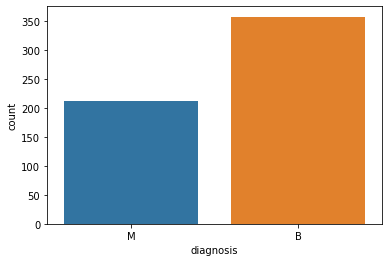

In [3]:
import seaborn as sns
ax = sns.countplot(data['diagnosis'], label= 'Count')
B,M = data['diagnosis'].value_counts()
print('Benign', B)
print('Malignanat', M)

In [4]:
del data['Unnamed: 32']
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
X_train

array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.75798367,
        -0.01614761, -0.38503402],
       [-0.93798972,  0.68051405, -0.94820146, ..., -0.60687023,
         0.09669004, -0.38615797],
       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.02371948,
        -0.20050207, -0.75144254],
       ...,
       [-1.32422924, -0.20048168, -1.31754581, ..., -0.97974953,
        -0.71542314, -0.11978123],
       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.75401433,
        -1.58157125, -1.00601779],
       [-0.73694129,  1.14989702, -0.71226578, ..., -0.27460457,
        -1.25895095,  0.21515662]])

In [6]:
X_test

array([[-0.20175604,  0.3290786 , -0.13086754, ...,  1.3893291 ,
         1.08203284,  1.54029664],
       [-0.25555773,  1.46763319, -0.31780437, ..., -0.83369364,
        -0.73131577, -0.87732522],
       [-0.02619262, -0.8407682 , -0.09175081, ..., -0.49483785,
        -1.22080864, -0.92115937],
       ...,
       [ 1.71811488,  0.09318356,  1.7286186 , ...,  1.57630515,
         0.20317063, -0.15406178],
       [ 1.18859296,  0.34352115,  1.19333694, ...,  0.56019755,
         0.26991966, -0.27320074],
       [ 0.26263752, -0.58080224,  0.28459338, ..., -0.19383705,
        -1.15564888,  0.11231497]])

In [7]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [28]:
from keras.layers import Dropout

classifier = Sequential()
classifier.add(Dense(16, activation='relu',kernel_initializer='uniform',input_dim=30))
classifier.add(Dropout(rate=0.1))

classifier.add(Dense(16,kernel_initializer='uniform', activation='relu'))
classifier.add(Dropout(rate=0.1))

classifier.add(Dense(1,kernel_initializer='uniform', activation='sigmoid'))


In [29]:
classifier.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
classifier.fit(X_train, y_train, batch_size=100, epochs=150)

Epoch 1/150
5/5 [==============================] - 2s 6ms/step - loss: 0.6930 - accuracy: 0.5111
Epoch 2/150
5/5 [==============================] - 0s 6ms/step - loss: 0.6915 - accuracy: 0.6696
Epoch 3/150
5/5 [==============================] - 0s 4ms/step - loss: 0.6894 - accuracy: 0.6838
Epoch 4/150
5/5 [==============================] - 0s 8ms/step - loss: 0.6863 - accuracy: 0.7671
Epoch 5/150
5/5 [==============================] - 0s 6ms/step - loss: 0.6817 - accuracy: 0.8520
Epoch 6/150
5/5 [==============================] - 0s 8ms/step - loss: 0.6749 - accuracy: 0.9092
Epoch 7/150
5/5 [==============================] - 0s 6ms/step - loss: 0.6651 - accuracy: 0.9115
Epoch 8/150
5/5 [==============================] - 0s 6ms/step - loss: 0.6524 - accuracy: 0.9252
Epoch 9/150
5/5 [==============================] - 0s 4ms/step - loss: 0.6347 - accuracy: 0.9326
Epoch 10/150
5/5 [==============================] - 0s 8ms/step - loss: 0.6112 - accuracy: 0.9408
Epoch 11/150
5/5 [===========

5/5 [==============================] - 0s 4ms/step - loss: 0.0598 - accuracy: 0.9865
Epoch 85/150
5/5 [==============================] - 0s 5ms/step - loss: 0.0529 - accuracy: 0.9906
Epoch 86/150
5/5 [==============================] - 0s 4ms/step - loss: 0.0408 - accuracy: 0.9918
Epoch 87/150
5/5 [==============================] - 0s 4ms/step - loss: 0.0401 - accuracy: 0.9908
Epoch 88/150
5/5 [==============================] - 0s 6ms/step - loss: 0.0435 - accuracy: 0.9893
Epoch 89/150
5/5 [==============================] - 0s 6ms/step - loss: 0.0308 - accuracy: 0.9962
Epoch 90/150
5/5 [==============================] - 0s 4ms/step - loss: 0.0627 - accuracy: 0.9845
Epoch 91/150
5/5 [==============================] - 0s 4ms/step - loss: 0.0506 - accuracy: 0.9872
Epoch 92/150
5/5 [==============================] - 0s 6ms/step - loss: 0.0426 - accuracy: 0.9891
Epoch 93/150
5/5 [==============================] - 0s 4ms/step - loss: 0.0496 - accuracy: 0.9876
Epoch 94/150
5/5 [===============

In [31]:
X_test

array([[-0.20175604,  0.3290786 , -0.13086754, ...,  1.3893291 ,
         1.08203284,  1.54029664],
       [-0.25555773,  1.46763319, -0.31780437, ..., -0.83369364,
        -0.73131577, -0.87732522],
       [-0.02619262, -0.8407682 , -0.09175081, ..., -0.49483785,
        -1.22080864, -0.92115937],
       ...,
       [ 1.71811488,  0.09318356,  1.7286186 , ...,  1.57630515,
         0.20317063, -0.15406178],
       [ 1.18859296,  0.34352115,  1.19333694, ...,  0.56019755,
         0.26991966, -0.27320074],
       [ 0.26263752, -0.58080224,  0.28459338, ..., -0.19383705,
        -1.15564888,  0.11231497]])

In [32]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

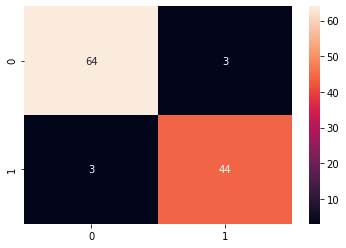

In [34]:
sns.heatmap(cm,annot=True)
plt.savefig('Categorization.png')

In [35]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
def built_classifier():
  classifier = Sequential()
  classifier.add(Dense(16,kernel_initializer='uniform' , activation='relu',input_dim=30)){
 "cells": [
  {
   "cell_type": "code",
   "execution_count": 1,
   "metadata": {},
   "outputs": [],
   "source": [
    "import pandas as pd\n",
    "import numpy as np\n",
    "import matplotlib.pyplot as plt\n",
    "\n",
    "import pandas as pd\n",
    "import io\n",
    "data=pd.read_csv(r\"C:\\Users\\Admin\\Desktop\\BREAST CANCER CATEGORISATION\\\\Dataset.csv\")\n",
    "\n",
    "import warnings\n",
    "warnings.filterwarnings('ignore')"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 2,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>id</th>\n",
       "      <th>diagnosis</th>\n",
       "      <th>radius_mean</th>\n",
       "      <th>texture_mean</th>\n",
       "      <th>perimeter_mean</th>\n",
       "      <th>area_mean</th>\n",
       "      <th>smoothness_mean</th>\n",
       "      <th>compactness_mean</th>\n",
       "      <th>concavity_mean</th>\n",
       "      <th>concave points_mean</th>\n",
       "      <th>...</th>\n",
       "      <th>texture_worst</th>\n",
       "      <th>perimeter_worst</th>\n",
       "      <th>area_worst</th>\n",
       "      <th>smoothness_worst</th>\n",
       "      <th>compactness_worst</th>\n",
       "      <th>concavity_worst</th>\n",
       "      <th>concave points_worst</th>\n",
       "      <th>symmetry_worst</th>\n",
       "      <th>fractal_dimension_worst</th>\n",
       "      <th>Unnamed: 32</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>842302</td>\n",
       "      <td>M</td>\n",
       "      <td>17.99</td>\n",
       "      <td>10.38</td>\n",
       "      <td>122.80</td>\n",
       "      <td>1001.0</td>\n",
       "      <td>0.11840</td>\n",
       "      <td>0.27760</td>\n",
       "      <td>0.3001</td>\n",
       "      <td>0.14710</td>\n",
       "      <td>...</td>\n",
       "      <td>17.33</td>\n",
       "      <td>184.60</td>\n",
       "      <td>2019.0</td>\n",
       "      <td>0.1622</td>\n",
       "      <td>0.6656</td>\n",
       "      <td>0.7119</td>\n",
       "      <td>0.2654</td>\n",
       "      <td>0.4601</td>\n",
       "      <td>0.11890</td>\n",
       "      <td>NaN</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>842517</td>\n",
       "      <td>M</td>\n",
       "      <td>20.57</td>\n",
       "      <td>17.77</td>\n",
       "      <td>132.90</td>\n",
       "      <td>1326.0</td>\n",
       "      <td>0.08474</td>\n",
       "      <td>0.07864</td>\n",
       "      <td>0.0869</td>\n",
       "      <td>0.07017</td>\n",
       "      <td>...</td>\n",
       "      <td>23.41</td>\n",
       "      <td>158.80</td>\n",
       "      <td>1956.0</td>\n",
       "      <td>0.1238</td>\n",
       "      <td>0.1866</td>\n",
       "      <td>0.2416</td>\n",
       "      <td>0.1860</td>\n",
       "      <td>0.2750</td>\n",
       "      <td>0.08902</td>\n",
       "      <td>NaN</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>84300903</td>\n",
       "      <td>M</td>\n",
       "      <td>19.69</td>\n",
       "      <td>21.25</td>\n",
       "      <td>130.00</td>\n",
       "      <td>1203.0</td>\n",
       "      <td>0.10960</td>\n",
       "      <td>0.15990</td>\n",
       "      <td>0.1974</td>\n",
       "      <td>0.12790</td>\n",
       "      <td>...</td>\n",
       "      <td>25.53</td>\n",
       "      <td>152.50</td>\n",
       "      <td>1709.0</td>\n",
       "      <td>0.1444</td>\n",
       "      <td>0.4245</td>\n",
       "      <td>0.4504</td>\n",
       "      <td>0.2430</td>\n",
       "      <td>0.3613</td>\n",
       "      <td>0.08758</td>\n",
       "      <td>NaN</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>84348301</td>\n",
       "      <td>M</td>\n",
       "      <td>11.42</td>\n",
       "      <td>20.38</td>\n",
       "      <td>77.58</td>\n",
       "      <td>386.1</td>\n",
       "      <td>0.14250</td>\n",
       "      <td>0.28390</td>\n",
       "      <td>0.2414</td>\n",
       "      <td>0.10520</td>\n",
       "      <td>...</td>\n",
       "      <td>26.50</td>\n",
       "      <td>98.87</td>\n",
       "      <td>567.7</td>\n",
       "      <td>0.2098</td>\n",
       "      <td>0.8663</td>\n",
       "      <td>0.6869</td>\n",
       "      <td>0.2575</td>\n",
       "      <td>0.6638</td>\n",
       "      <td>0.17300</td>\n",
       "      <td>NaN</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>84358402</td>\n",
       "      <td>M</td>\n",
       "      <td>20.29</td>\n",
       "      <td>14.34</td>\n",
       "      <td>135.10</td>\n",
       "      <td>1297.0</td>\n",
       "      <td>0.10030</td>\n",
       "      <td>0.13280</td>\n",
       "      <td>0.1980</td>\n",
       "      <td>0.10430</td>\n",
       "      <td>...</td>\n",
       "      <td>16.67</td>\n",
       "      <td>152.20</td>\n",
       "      <td>1575.0</td>\n",
       "      <td>0.1374</td>\n",
       "      <td>0.2050</td>\n",
       "      <td>0.4000</td>\n",
       "      <td>0.1625</td>\n",
       "      <td>0.2364</td>\n",
       "      <td>0.07678</td>\n",
       "      <td>NaN</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "<p>5 rows × 33 columns</p>\n",
       "</div>"
      ],
      "text/plain": [
       "         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \\\n",
       "0    842302         M        17.99         10.38          122.80     1001.0   \n",
       "1    842517         M        20.57         17.77          132.90     1326.0   \n",
       "2  84300903         M        19.69         21.25          130.00     1203.0   \n",
       "3  84348301         M        11.42         20.38           77.58      386.1   \n",
       "4  84358402         M        20.29         14.34          135.10     1297.0   \n",
       "\n",
       "   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \\\n",
       "0          0.11840           0.27760          0.3001              0.14710   \n",
       "1          0.08474           0.07864          0.0869              0.07017   \n",
       "2          0.10960           0.15990          0.1974              0.12790   \n",
       "3          0.14250           0.28390          0.2414              0.10520   \n",
       "4          0.10030           0.13280          0.1980              0.10430   \n",
       "\n",
       "   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \\\n",
       "0  ...          17.33           184.60      2019.0            0.1622   \n",
       "1  ...          23.41           158.80      1956.0            0.1238   \n",
       "2  ...          25.53           152.50      1709.0            0.1444   \n",
       "3  ...          26.50            98.87       567.7            0.2098   \n",
       "4  ...          16.67           152.20      1575.0            0.1374   \n",
       "\n",
       "   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \\\n",
       "0             0.6656           0.7119                0.2654          0.4601   \n",
       "1             0.1866           0.2416                0.1860          0.2750   \n",
       "2             0.4245           0.4504                0.2430          0.3613   \n",
       "3             0.8663           0.6869                0.2575          0.6638   \n",
       "4             0.2050           0.4000                0.1625          0.2364   \n",
       "\n",
       "   fractal_dimension_worst  Unnamed: 32  \n",
       "0                  0.11890          NaN  \n",
       "1                  0.08902          NaN  \n",
       "2                  0.08758          NaN  \n",
       "3                  0.17300          NaN  \n",
       "4                  0.07678          NaN  \n",
       "\n",
       "[5 rows x 33 columns]"
      ]
     },
     "execution_count": 2,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "data.head()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 3,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "Benign 357\n",
      "Malignanat 212\n"
     ]
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAYUAAAEGCAYAAACKB4k+AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8vihELAAAACXBIWXMAAAsTAAALEwEAmpwYAAASYklEQVR4nO3df4xdZ33n8fcnTppES1oSeZI1tqld5C7rpI2zTL1sUVsKbZOl23WCADlSWXc3kvkjSFC1KyVdLaRU1tI2FFW0QXJKwCBKam1g46KUbbCgLIKNmUQmsR0sLJImxm48/ExCW69svvvHPX5yGY/tsZMzdzL3/ZKu7jnPeZ5zvhM585nnnHPPTVUhSRLAeaMuQJK0cBgKkqTGUJAkNYaCJKkxFCRJzfmjLuD5WLp0aa1atWrUZUjSi8qDDz74raqamG3bizoUVq1axdTU1KjLkKQXlSR/f6ptnj6SJDWGgiSpMRQkSY2hIElqDAVJUmMoSJIaQ0GS1BgKkqTGUJAkNS/qTzRLi9kT7/mZUZegBejl73qk1/33NlNIclGSXUm+mmRvkt/v2m9L8s0ku7vXG4bG3JrkQJL9Sa7tqzZJ0uz6nCkcBV5XVc8muQD4YpK/6ba9v6puH+6cZC2wEbgSeBnw2SQ/XVXHe6xRkjSkt5lCDTzbrV7QvU73hdAbgLur6mhVPQYcANb3VZ8k6WS9XmhOsiTJbuAIcH9VPdBtenuSh5PcleTSrm058OTQ8INd28x9bk4ylWRqenq6z/Ilaez0GgpVdbyq1gErgPVJrgI+CLwCWAccBt7Xdc9su5hln1urarKqJicmZn0cuCTpHM3LLalV9T3g88B1VfVUFxY/BO7kuVNEB4GVQ8NWAIfmoz5J0kCfdx9NJHlpt3wx8CvA15IsG+p2A7CnW94BbExyYZLVwBpgV1/1SZJO1ufdR8uAbUmWMAif7VX16SQfS7KOwamhx4G3AVTV3iTbgX3AMeBm7zySpPnVWyhU1cPANbO0v/U0Y7YAW/qqSZJ0ej7mQpLUGAqSpMZQkCQ1hoIkqTEUJEmNoSBJagwFSVJjKEiSGkNBktQYCpKkxlCQJDWGgiSpMRQkSY2hIElqDAVJUmMoSJIaQ0GS1BgKkqTGUJAkNYaCJKnpLRSSXJRkV5KvJtmb5Pe79suS3J/k6937pUNjbk1yIMn+JNf2VZskaXZ9zhSOAq+rqquBdcB1SV4N3ALsrKo1wM5unSRrgY3AlcB1wB1JlvRYnyRpht5CoQae7VYv6F4FbAC2de3bgOu75Q3A3VV1tKoeAw4A6/uqT5J0sl6vKSRZkmQ3cAS4v6oeAK6oqsMA3fvlXfflwJNDww92bTP3uTnJVJKp6enpPsuXpLHTayhU1fGqWgesANYnueo03TPbLmbZ59aqmqyqyYmJiReoUkkSzNPdR1X1PeDzDK4VPJVkGUD3fqTrdhBYOTRsBXBoPuqTJA30effRRJKXdssXA78CfA3YAWzqum0C7u2WdwAbk1yYZDWwBtjVV32SpJOd3+O+lwHbujuIzgO2V9Wnk3wZ2J7kJuAJ4M0AVbU3yXZgH3AMuLmqjvdYnyRpht5CoaoeBq6Zpf3bwOtPMWYLsKWvmiRJp+cnmiVJjaEgSWoMBUlSYyhIkhpDQZLUGAqSpMZQkCQ1hoIkqTEUJEmNoSBJagwFSVJjKEiSGkNBktQYCpKkxlCQJDWGgiSpMRQkSY2hIElqDAVJUmMoSJKa3kIhycokn0vyaJK9Sd7Rtd+W5JtJdnevNwyNuTXJgST7k1zbV22SpNmd3+O+jwG/U1UPJbkEeDDJ/d2291fV7cOdk6wFNgJXAi8DPpvkp6vqeI81SpKG9DZTqKrDVfVQt/wM8Ciw/DRDNgB3V9XRqnoMOACs76s+SdLJ5uWaQpJVwDXAA13T25M8nOSuJJd2bcuBJ4eGHWSWEEmyOclUkqnp6ek+y5aksdN7KCR5CXAP8M6qehr4IPAKYB1wGHjfia6zDK+TGqq2VtVkVU1OTEz0U7QkjaleQyHJBQwC4eNV9UmAqnqqqo5X1Q+BO3nuFNFBYOXQ8BXAoT7rkyT9qD7vPgrwIeDRqvqTofZlQ91uAPZ0yzuAjUkuTLIaWAPs6qs+SdLJ+rz76DXAW4FHkuzu2n4PuDHJOganhh4H3gZQVXuTbAf2Mbhz6WbvPJKk+dVbKFTVF5n9OsF9pxmzBdjSV02SpNPzE82SpMZQkCQ1hoIkqTEUJEmNoSBJagwFSVJjKEiSGkNBktQYCpKkxlCQJDWGgiSpMRQkSY2hIElqDAVJUmMoSJIaQ0GS1PT5zWsvCq/6rx8ddQlagB784/806hKkkXCmIElqDAVJUjOnUEiycy5tkqQXt9OGQpKLklwGLE1yaZLLutcq4GVnGLsyyeeSPJpkb5J3dO2XJbk/yde790uHxtya5ECS/UmufQF+PknSWTjTTOFtwIPAK7v3E697gT8/w9hjwO9U1b8GXg3cnGQtcAuws6rWADu7dbptG4ErgeuAO5IsOZcfSpJ0bk4bClX1p1W1Gvjdqvqpqlrdva6uqj87w9jDVfVQt/wM8CiwHNgAbOu6bQOu75Y3AHdX1dGqegw4AKw/1x9MknT25nRLalV9IMnPA6uGx1TVnO7n7E43XQM8AFxRVYe78YeTXN51Ww7836FhB7u2mfvaDGwGePnLXz6Xw0uS5mhOoZDkY8ArgN3A8a65gDOGQpKXAPcA76yqp5OcsussbXVSQ9VWYCvA5OTkSdslSedurh9emwTWVtVZ/RJOcgGDQPh4VX2ya34qybJulrAMONK1HwRWDg1fARw6m+NJkp6fuX5OYQ/wL89mxxlMCT4EPFpVfzK0aQewqVvexOCi9Yn2jUkuTLIaWAPsOptjSpKen7nOFJYC+5LsAo6eaKyq/3iaMa8B3go8kmR31/Z7wHuB7UluAp4A3tzta2+S7cA+Bncu3VxVx0/aqySpN3MNhdvOdsdV9UVmv04A8PpTjNkCbDnbY0mSXhhzvfvo7/ouRJI0enO9++gZnrsT6MeAC4AfVNWP91WYJGn+zXWmcMnwepLr8YNlkrTonNNTUqvqfwGve2FLkSSN2lxPH71xaPU8Bp9b8INjkrTIzPXuo98YWj4GPM7gWUWSpEVkrtcU/nPfhUiSRm+uX7KzIsmnkhxJ8lSSe5Ks6Ls4SdL8muuF5g8zeAzFyxg8ufSvuzZJ0iIy11CYqKoPV9Wx7vURYKLHuiRJIzDXUPhWkt9MsqR7/Sbw7T4LkyTNv7mGwn8B3gL8A3AYeBPgxWdJWmTmekvqHwCbquq7AEkuA25nEBaSpEVirjOFnz0RCABV9R0GX68pSVpE5hoK5yW59MRKN1OY6yxDkvQiMddf7O8DvpTkfzJ4vMVb8HsPJGnRmesnmj+aZIrBQ/ACvLGq9vVamSRp3s35FFAXAgaBJC1i5/TobEnS4mQoSJKa3kIhyV3dA/T2DLXdluSbSXZ3rzcMbbs1yYEk+5Nc21ddkqRT63Om8BHgulna319V67rXfQBJ1gIbgSu7MXckWdJjbZKkWfQWClX1BeA7c+y+Abi7qo5W1WPAAfwOaEmad6O4pvD2JA93p5dOfCBuOfDkUJ+DXdtJkmxOMpVkanp6uu9aJWmszHcofBB4BbCOwYP13te1Z5a+s34HdFVtrarJqpqcmPDp3ZL0QprXUKiqp6rqeFX9ELiT504RHQRWDnVdARyaz9okSfMcCkmWDa3eAJy4M2kHsDHJhUlWA2uAXfNZmySpx4faJfkE8FpgaZKDwLuB1yZZx+DU0OPA2wCqam+S7Qw+MX0MuLmqjvdVmyRpdr2FQlXdOEvzh07Tfws+ZE+SRspPNEuSGkNBktQYCpKkxlCQJDWGgiSpMRQkSY2hIElqDAVJUmMoSJIaQ0GS1BgKkqTGUJAkNYaCJKkxFCRJjaEgSWoMBUlSYyhIkhpDQZLUGAqSpMZQkCQ1vYVCkruSHEmyZ6jtsiT3J/l6937p0LZbkxxIsj/JtX3VJUk6tT5nCh8BrpvRdguws6rWADu7dZKsBTYCV3Zj7kiypMfaJEmz6C0UquoLwHdmNG8AtnXL24Drh9rvrqqjVfUYcABY31dtkqTZzfc1hSuq6jBA9355174ceHKo38Gu7SRJNieZSjI1PT3da7GSNG4WyoXmzNJWs3Wsqq1VNVlVkxMTEz2XJUnjZb5D4akkywC69yNd+0Fg5VC/FcChea5NksbefIfCDmBTt7wJuHeofWOSC5OsBtYAu+a5Nkkae+f3teMknwBeCyxNchB4N/BeYHuSm4AngDcDVNXeJNuBfcAx4OaqOt5XbZKk2fUWClV14yk2vf4U/bcAW/qqR5J0ZgvlQrMkaQEwFCRJjaEgSWoMBUlSYyhIkhpDQZLUGAqSpMZQkCQ1hoIkqTEUJEmNoSBJagwFSVJjKEiSGkNBktQYCpKkxlCQJDWGgiSpMRQkSY2hIElqDAVJUnP+KA6a5HHgGeA4cKyqJpNcBvwVsAp4HHhLVX13FPVJ0rga5Uzhl6tqXVVNduu3ADurag2ws1uXJM2jhXT6aAOwrVveBlw/ulIkaTyNKhQK+NskDybZ3LVdUVWHAbr3y2cbmGRzkqkkU9PT0/NUriSNh5FcUwBeU1WHklwO3J/ka3MdWFVbga0Ak5OT1VeBkjSORjJTqKpD3fsR4FPAeuCpJMsAuvcjo6hNksbZvIdCkn+R5JITy8CvAXuAHcCmrtsm4N75rk2Sxt0oTh9dAXwqyYnj/2VVfSbJV4DtSW4CngDePILaJGmszXsoVNU3gKtnaf828Pr5rkeS9JyFdEuqJGnEDAVJUmMoSJIaQ0GS1BgKkqTGUJAkNYaCJKkxFCRJjaEgSWoMBUlSYyhIkhpDQZLUGAqSpMZQkCQ1hoIkqTEUJEmNoSBJagwFSVJjKEiSGkNBktQsuFBIcl2S/UkOJLll1PVI0jhZUKGQZAnw58C/B9YCNyZZO9qqJGl8LKhQANYDB6rqG1X1/4C7gQ0jrkmSxsb5oy5ghuXAk0PrB4F/O9whyWZgc7f6bJL981TbOFgKfGvURSwEuX3TqEvQj/Lf5gnvzguxl5881YaFFgqz/bT1IytVW4Gt81POeEkyVVWTo65Dmsl/m/NnoZ0+OgisHFpfARwaUS2SNHYWWih8BViTZHWSHwM2AjtGXJMkjY0Fdfqoqo4leTvwv4ElwF1VtXfEZY0TT8tpofLf5jxJVZ25lyRpLCy000eSpBEyFCRJjaEw5pJUko8NrZ+fZDrJp0dZlwSQ5HiS3Um+muShJD8/6poWuwV1oVkj8QPgqiQXV9U/Ab8KfHPENUkn/FNVrQNIci3wP4BfGmlFi5wzBQH8DfDr3fKNwCdGWIt0Kj8OfHfURSx2hoJg8IypjUkuAn4WeGDE9UgnXNydPvoa8BfAH4y6oMXO00eiqh5OsorBLOG+EZcjDRs+ffTvgI8muaq8l743zhR0wg7gdjx1pAWqqr7M4MF4E6OuZTFzpqAT7gK+X1WPJHntiGuRTpLklQyedPDtUdeymBkKAqCqDgJ/Ouo6pBkuTrK7Ww6wqaqOj7CeRc/HXEiSGq8pSJIaQ0GS1BgKkqTGUJAkNYaCJKnxllSpk+Q24FkGz9j5QlV9doS1vGfUNWg8GQrSDFX1LmvQuPL0kcZakv+WZH+SzwL/qmv7SJI3dcvvSvKVJHuSbE2Srv3nkjyc5MtJ/jjJnq79t5J8Mslnknw9yR8NHevGJI90+/rDrm1Jd7w93bbfnqWG9ybZ1x3v9nn9D6Sx40xBYyvJq4CNwDUM/l94CHhwRrc/q6r3dP0/BvwH4K+BDwObq+pLSd47Y8y6bp9Hgf1JPgAcB/4QeBWDxz//bZLrgSeB5VV1VXeMl86o8TLgBuCVVVUzt0svNGcKGme/AHyqqv6xqp5m8FDAmX45yQNJHgFeB1zZ/WK+pKq+1PX5yxljdlbV96vqn4F9wE8CPwd8vqqmq+oY8HHgF4FvAD+V5ANJrgOenrGvp4F/Bv4iyRuBf3y+P7R0OoaCxt0pn/PSfb/EHcCbqupngDuBixg8g+d0jg4tH2cwC5l1TFV9F7ga+DxwM4PvDBjefgxYD9wDXA985gzHlp4XQ0Hj7AvADUkuTnIJ8Bsztl/UvX8ryUuAN0H7Rf5Mkld32zfO4VgPAL+UZGmSJQy+u+LvkiwFzquqe4D/Dvyb4UHdcX+iqu4D3sng1JTUG68paGxV1UNJ/grYDfw98H9mbP9ekjuBR4DHga8Mbb4JuDPJDxj8lf/9MxzrcJJbgc8xmDXcV1X3Jrka+HCSE3+g3Tpj6CXAvd2sJcBvn+3PKZ0Nn5IqnYMkL6mqZ7vlW4BlVfWOEZclPW/OFKRz8+vdX/7nM5hl/NZoy5FeGM4UJEmNF5olSY2hIElqDAVJUmMoSJIaQ0GS1Px/nU/oS2yk3mwAAAAASUVORK5CYII=\n",
      "text/plain": [
       "<Figure size 432x288 with 1 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "import seaborn as sns\n",
    "ax = sns.countplot(data['diagnosis'], label= 'Count')\n",
    "B,M = data['diagnosis'].value_counts()\n",
    "print('Benign', B)\n",
    "print('Malignanat', M)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 4,
   "metadata": {},
   "outputs": [],
   "source": [
    "del data['Unnamed: 32']\n",
    "X = data.iloc[:, 2:].values\n",
    "y = data.iloc[:, 1].values\n",
    "\n",
    "from sklearn.preprocessing import LabelEncoder\n",
    "labelencoder_X_1 = LabelEncoder()\n",
    "y = labelencoder_X_1.fit_transform(y)\n",
    "\n",
    "from sklearn.model_selection import train_test_split\n",
    "X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)\n",
    "\n",
    "from sklearn.preprocessing import StandardScaler\n",
    "sc = StandardScaler()\n",
    "X_train = sc.fit_transform(X_train)\n",
    "X_test = sc.transform(X_test)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 5,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.75798367,\n",
       "        -0.01614761, -0.38503402],\n",
       "       [-0.93798972,  0.68051405, -0.94820146, ..., -0.60687023,\n",
       "         0.09669004, -0.38615797],\n",
       "       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.02371948,\n",
       "        -0.20050207, -0.75144254],\n",
       "       ...,\n",
       "       [-1.32422924, -0.20048168, -1.31754581, ..., -0.97974953,\n",
       "        -0.71542314, -0.11978123],\n",
       "       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.75401433,\n",
       "        -1.58157125, -1.00601779],\n",
       "       [-0.73694129,  1.14989702, -0.71226578, ..., -0.27460457,\n",
       "        -1.25895095,  0.21515662]])"
      ]
     },
     "execution_count": 5,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "X_train"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 6,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "array([[-0.20175604,  0.3290786 , -0.13086754, ...,  1.3893291 ,\n",
       "         1.08203284,  1.54029664],\n",
       "       [-0.25555773,  1.46763319, -0.31780437, ..., -0.83369364,\n",
       "        -0.73131577, -0.87732522],\n",
       "       [-0.02619262, -0.8407682 , -0.09175081, ..., -0.49483785,\n",
       "        -1.22080864, -0.92115937],\n",
       "       ...,\n",
       "       [ 1.71811488,  0.09318356,  1.7286186 , ...,  1.57630515,\n",
       "         0.20317063, -0.15406178],\n",
       "       [ 1.18859296,  0.34352115,  1.19333694, ...,  0.56019755,\n",
       "         0.26991966, -0.27320074],\n",
       "       [ 0.26263752, -0.58080224,  0.28459338, ..., -0.19383705,\n",
       "        -1.15564888,  0.11231497]])"
      ]
     },
     "execution_count": 6,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "X_test"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 7,
   "metadata": {},
   "outputs": [],
   "source": [
    "import keras\n",
    "from keras.models import Sequential\n",
    "from keras.layers import Dense"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 28,
   "metadata": {},
   "outputs": [],
   "source": [
    "from keras.layers import Dropout\n",
    "\n",
    "classifier = Sequential()\n",
    "classifier.add(Dense(16, activation='relu',kernel_initializer='uniform',input_dim=30))\n",
    "classifier.add(Dropout(rate=0.1))\n",
    "\n",
    "classifier.add(Dense(16,kernel_initializer='uniform', activation='relu'))\n",
    "classifier.add(Dropout(rate=0.1))\n",
    "\n",
    "classifier.add(Dense(1,kernel_initializer='uniform', activation='sigmoid'))\n"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 29,
   "metadata": {},
   "outputs": [],
   "source": [
    "classifier.compile(optimizer=\"Adam\", loss='binary_crossentropy', metrics=['accuracy'])"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 30,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "Epoch 1/150\n",
      "5/5 [==============================] - 2s 6ms/step - loss: 0.6930 - accuracy: 0.5111\n",
      "Epoch 2/150\n",
      "5/5 [==============================] - 0s 6ms/step - loss: 0.6915 - accuracy: 0.6696\n",
      "Epoch 3/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.6894 - accuracy: 0.6838\n",
      "Epoch 4/150\n",
      "5/5 [==============================] - 0s 8ms/step - loss: 0.6863 - accuracy: 0.7671\n",
      "Epoch 5/150\n",
      "5/5 [==============================] - 0s 6ms/step - loss: 0.6817 - accuracy: 0.8520\n",
      "Epoch 6/150\n",
      "5/5 [==============================] - 0s 8ms/step - loss: 0.6749 - accuracy: 0.9092\n",
      "Epoch 7/150\n",
      "5/5 [==============================] - 0s 6ms/step - loss: 0.6651 - accuracy: 0.9115\n",
      "Epoch 8/150\n",
      "5/5 [==============================] - 0s 6ms/step - loss: 0.6524 - accuracy: 0.9252\n",
      "Epoch 9/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.6347 - accuracy: 0.9326\n",
      "Epoch 10/150\n",
      "5/5 [==============================] - 0s 8ms/step - loss: 0.6112 - accuracy: 0.9408\n",
      "Epoch 11/150\n",
      "5/5 [==============================] - 0s 6ms/step - loss: 0.5784 - accuracy: 0.9380\n",
      "Epoch 12/150\n",
      "5/5 [==============================] - 0s 8ms/step - loss: 0.5496 - accuracy: 0.9353\n",
      "Epoch 13/150\n",
      "5/5 [==============================] - 0s 6ms/step - loss: 0.5111 - accuracy: 0.9459\n",
      "Epoch 14/150\n",
      "5/5 [==============================] - 0s 6ms/step - loss: 0.4703 - accuracy: 0.9469\n",
      "Epoch 15/150\n",
      "5/5 [==============================] - 0s 6ms/step - loss: 0.4189 - accuracy: 0.9559\n",
      "Epoch 16/150\n",
      "5/5 [==============================] - 0s 6ms/step - loss: 0.3807 - accuracy: 0.9566\n",
      "Epoch 17/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.3434 - accuracy: 0.9551\n",
      "Epoch 18/150\n",
      "5/5 [==============================] - 0s 6ms/step - loss: 0.3082 - accuracy: 0.9640\n",
      "Epoch 19/150\n",
      "5/5 [==============================] - 0s 6ms/step - loss: 0.2776 - accuracy: 0.9598\n",
      "Epoch 20/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.2412 - accuracy: 0.9705\n",
      "Epoch 21/150\n",
      "5/5 [==============================] - 0s 6ms/step - loss: 0.2258 - accuracy: 0.9668\n",
      "Epoch 22/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.2095 - accuracy: 0.9554\n",
      "Epoch 23/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.1905 - accuracy: 0.9674\n",
      "Epoch 24/150\n",
      "5/5 [==============================] - 0s 6ms/step - loss: 0.1764 - accuracy: 0.9700\n",
      "Epoch 25/150\n",
      "5/5 [==============================] - 0s 6ms/step - loss: 0.1518 - accuracy: 0.9786\n",
      "Epoch 26/150\n",
      "5/5 [==============================] - 0s 6ms/step - loss: 0.1594 - accuracy: 0.9687\n",
      "Epoch 27/150\n",
      "5/5 [==============================] - 0s 6ms/step - loss: 0.1327 - accuracy: 0.9786\n",
      "Epoch 28/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.1381 - accuracy: 0.9712\n",
      "Epoch 29/150\n",
      "5/5 [==============================] - 0s 6ms/step - loss: 0.1199 - accuracy: 0.9761\n",
      "Epoch 30/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.1336 - accuracy: 0.9703\n",
      "Epoch 31/150\n",
      "5/5 [==============================] - 0s 6ms/step - loss: 0.1020 - accuracy: 0.9849\n",
      "Epoch 32/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.1164 - accuracy: 0.9718\n",
      "Epoch 33/150\n",
      "5/5 [==============================] - 0s 6ms/step - loss: 0.1025 - accuracy: 0.9746\n",
      "Epoch 34/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0819 - accuracy: 0.9873\n",
      "Epoch 35/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.1089 - accuracy: 0.9764\n",
      "Epoch 36/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.1010 - accuracy: 0.9801\n",
      "Epoch 37/150\n",
      "5/5 [==============================] - 0s 6ms/step - loss: 0.0851 - accuracy: 0.9899\n",
      "Epoch 38/150\n",
      "5/5 [==============================] - 0s 6ms/step - loss: 0.0768 - accuracy: 0.9867\n",
      "Epoch 39/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0744 - accuracy: 0.9827\n",
      "Epoch 40/150\n",
      "5/5 [==============================] - 0s 6ms/step - loss: 0.1010 - accuracy: 0.9762\n",
      "Epoch 41/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0813 - accuracy: 0.9825\n",
      "Epoch 42/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0791 - accuracy: 0.9790\n",
      "Epoch 43/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0796 - accuracy: 0.9867\n",
      "Epoch 44/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0685 - accuracy: 0.9826\n",
      "Epoch 45/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0729 - accuracy: 0.9828\n",
      "Epoch 46/150\n",
      "5/5 [==============================] - 0s 6ms/step - loss: 0.0677 - accuracy: 0.9834\n",
      "Epoch 47/150\n",
      "5/5 [==============================] - 0s 6ms/step - loss: 0.0801 - accuracy: 0.9803\n",
      "Epoch 48/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0596 - accuracy: 0.9871\n",
      "Epoch 49/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0682 - accuracy: 0.9871\n",
      "Epoch 50/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0630 - accuracy: 0.9810\n",
      "Epoch 51/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0901 - accuracy: 0.9812\n",
      "Epoch 52/150\n",
      "5/5 [==============================] - 0s 6ms/step - loss: 0.0699 - accuracy: 0.9845\n",
      "Epoch 53/150\n",
      "5/5 [==============================] - 0s 2ms/step - loss: 0.0691 - accuracy: 0.9859\n",
      "Epoch 54/150\n",
      "5/5 [==============================] - 0s 6ms/step - loss: 0.0669 - accuracy: 0.9850\n",
      "Epoch 55/150\n",
      "5/5 [==============================] - 0s 6ms/step - loss: 0.0681 - accuracy: 0.9821\n",
      "Epoch 56/150\n",
      "5/5 [==============================] - 0s 6ms/step - loss: 0.0588 - accuracy: 0.9898\n",
      "Epoch 57/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0736 - accuracy: 0.9856\n",
      "Epoch 58/150\n",
      "5/5 [==============================] - 0s 6ms/step - loss: 0.0618 - accuracy: 0.9867\n",
      "Epoch 59/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0599 - accuracy: 0.9875\n",
      "Epoch 60/150\n",
      "5/5 [==============================] - 0s 6ms/step - loss: 0.0479 - accuracy: 0.9906\n",
      "Epoch 61/150\n",
      "5/5 [==============================] - 0s 6ms/step - loss: 0.0646 - accuracy: 0.9854\n",
      "Epoch 62/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0679 - accuracy: 0.9865\n",
      "Epoch 63/150\n",
      "5/5 [==============================] - 0s 6ms/step - loss: 0.0624 - accuracy: 0.9895\n",
      "Epoch 64/150\n",
      "5/5 [==============================] - 0s 6ms/step - loss: 0.0527 - accuracy: 0.9891\n",
      "Epoch 65/150\n",
      "5/5 [==============================] - 0s 6ms/step - loss: 0.0684 - accuracy: 0.9868\n",
      "Epoch 66/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0555 - accuracy: 0.9883\n",
      "Epoch 67/150\n",
      "5/5 [==============================] - 0s 6ms/step - loss: 0.0471 - accuracy: 0.9907\n",
      "Epoch 68/150\n",
      "5/5 [==============================] - 0s 6ms/step - loss: 0.0438 - accuracy: 0.9931\n",
      "Epoch 69/150\n",
      "5/5 [==============================] - 0s 6ms/step - loss: 0.0851 - accuracy: 0.9799\n",
      "Epoch 70/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0558 - accuracy: 0.9879\n",
      "Epoch 71/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0462 - accuracy: 0.9903\n",
      "Epoch 72/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0478 - accuracy: 0.9881\n",
      "Epoch 73/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0569 - accuracy: 0.9849\n",
      "Epoch 74/150\n",
      "5/5 [==============================] - 0s 6ms/step - loss: 0.0699 - accuracy: 0.9872\n",
      "Epoch 75/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0505 - accuracy: 0.9906\n",
      "Epoch 76/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0356 - accuracy: 0.9955\n",
      "Epoch 77/150\n",
      "5/5 [==============================] - 0s 6ms/step - loss: 0.0424 - accuracy: 0.9922\n",
      "Epoch 78/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0458 - accuracy: 0.9898\n",
      "Epoch 79/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0624 - accuracy: 0.9831\n",
      "Epoch 80/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0459 - accuracy: 0.9888\n",
      "Epoch 81/150\n",
      "5/5 [==============================] - 0s 6ms/step - loss: 0.0698 - accuracy: 0.9840\n",
      "Epoch 82/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0562 - accuracy: 0.9881\n",
      "Epoch 83/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0383 - accuracy: 0.9916\n",
      "Epoch 84/150\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0598 - accuracy: 0.9865\n",
      "Epoch 85/150\n",
      "5/5 [==============================] - 0s 5ms/step - loss: 0.0529 - accuracy: 0.9906\n",
      "Epoch 86/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0408 - accuracy: 0.9918\n",
      "Epoch 87/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0401 - accuracy: 0.9908\n",
      "Epoch 88/150\n",
      "5/5 [==============================] - 0s 6ms/step - loss: 0.0435 - accuracy: 0.9893\n",
      "Epoch 89/150\n",
      "5/5 [==============================] - 0s 6ms/step - loss: 0.0308 - accuracy: 0.9962\n",
      "Epoch 90/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0627 - accuracy: 0.9845\n",
      "Epoch 91/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0506 - accuracy: 0.9872\n",
      "Epoch 92/150\n",
      "5/5 [==============================] - 0s 6ms/step - loss: 0.0426 - accuracy: 0.9891\n",
      "Epoch 93/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0496 - accuracy: 0.9876\n",
      "Epoch 94/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0474 - accuracy: 0.9893\n",
      "Epoch 95/150\n",
      "5/5 [==============================] - 0s 6ms/step - loss: 0.0413 - accuracy: 0.9922\n",
      "Epoch 96/150\n",
      "5/5 [==============================] - 0s 6ms/step - loss: 0.0485 - accuracy: 0.9904\n",
      "Epoch 97/150\n",
      "5/5 [==============================] - 0s 2ms/step - loss: 0.0460 - accuracy: 0.9887\n",
      "Epoch 98/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0437 - accuracy: 0.9906\n",
      "Epoch 99/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0560 - accuracy: 0.9873\n",
      "Epoch 100/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0523 - accuracy: 0.9876\n",
      "Epoch 101/150\n",
      "5/5 [==============================] - 0s 2ms/step - loss: 0.0550 - accuracy: 0.9862\n",
      "Epoch 102/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0486 - accuracy: 0.9900\n",
      "Epoch 103/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0474 - accuracy: 0.9890\n",
      "Epoch 104/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0432 - accuracy: 0.9918\n",
      "Epoch 105/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0438 - accuracy: 0.9915\n",
      "Epoch 106/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0567 - accuracy: 0.9880\n",
      "Epoch 107/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0554 - accuracy: 0.9862\n",
      "Epoch 108/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0402 - accuracy: 0.9923\n",
      "Epoch 109/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0459 - accuracy: 0.9918\n",
      "Epoch 110/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0368 - accuracy: 0.9939\n",
      "Epoch 111/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0391 - accuracy: 0.9922\n",
      "Epoch 112/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0499 - accuracy: 0.9896\n",
      "Epoch 113/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0551 - accuracy: 0.9887\n",
      "Epoch 114/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0364 - accuracy: 0.9937\n",
      "Epoch 115/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0414 - accuracy: 0.9914\n",
      "Epoch 116/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0405 - accuracy: 0.9905\n",
      "Epoch 117/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0327 - accuracy: 0.9932\n",
      "Epoch 118/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0434 - accuracy: 0.9910\n",
      "Epoch 119/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0399 - accuracy: 0.9908\n",
      "Epoch 120/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0440 - accuracy: 0.9896\n",
      "Epoch 121/150\n",
      "5/5 [==============================] - 0s 6ms/step - loss: 0.0626 - accuracy: 0.9857\n",
      "Epoch 122/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0379 - accuracy: 0.9926\n",
      "Epoch 123/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0358 - accuracy: 0.9921\n",
      "Epoch 124/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0371 - accuracy: 0.9930\n",
      "Epoch 125/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0440 - accuracy: 0.9907\n",
      "Epoch 126/150\n",
      "5/5 [==============================] - 0s 6ms/step - loss: 0.0373 - accuracy: 0.9915\n",
      "Epoch 127/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0389 - accuracy: 0.9925\n",
      "Epoch 128/150\n",
      "5/5 [==============================] - 0s 6ms/step - loss: 0.0435 - accuracy: 0.9907\n",
      "Epoch 129/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0379 - accuracy: 0.9925\n",
      "Epoch 130/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0287 - accuracy: 0.9944\n",
      "Epoch 131/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0443 - accuracy: 0.9893\n",
      "Epoch 132/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0339 - accuracy: 0.9913\n",
      "Epoch 133/150\n",
      "5/5 [==============================] - 0s 2ms/step - loss: 0.0311 - accuracy: 0.9935\n",
      "Epoch 134/150\n",
      "5/5 [==============================] - 0s 6ms/step - loss: 0.0334 - accuracy: 0.9925\n",
      "Epoch 135/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0445 - accuracy: 0.9879\n",
      "Epoch 136/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0399 - accuracy: 0.9908\n",
      "Epoch 137/150\n",
      "5/5 [==============================] - 0s 6ms/step - loss: 0.0318 - accuracy: 0.9918\n",
      "Epoch 138/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0364 - accuracy: 0.9925\n",
      "Epoch 139/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0289 - accuracy: 0.9943\n",
      "Epoch 140/150\n",
      "5/5 [==============================] - ETA: 0s - loss: 0.0659 - accuracy: 0.98 - 0s 4ms/step - loss: 0.0465 - accuracy: 0.9882\n",
      "Epoch 141/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0413 - accuracy: 0.9904\n",
      "Epoch 142/150\n",
      "5/5 [==============================] - 0s 6ms/step - loss: 0.0323 - accuracy: 0.9926\n",
      "Epoch 143/150\n",
      "5/5 [==============================] - 0s 6ms/step - loss: 0.0354 - accuracy: 0.9918\n",
      "Epoch 144/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0339 - accuracy: 0.9914\n",
      "Epoch 145/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0421 - accuracy: 0.9890\n",
      "Epoch 146/150\n",
      "5/5 [==============================] - 0s 6ms/step - loss: 0.0396 - accuracy: 0.9898\n",
      "Epoch 147/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0280 - accuracy: 0.9944\n",
      "Epoch 148/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0427 - accuracy: 0.9908\n",
      "Epoch 149/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0428 - accuracy: 0.9883\n",
      "Epoch 150/150\n",
      "5/5 [==============================] - 0s 4ms/step - loss: 0.0520 - accuracy: 0.9862\n"
     ]
    },
    {
     "data": {
      "text/plain": [
       "<tensorflow.python.keras.callbacks.History at 0xa85cc19880>"
      ]
     },
     "execution_count": 30,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "classifier.fit(X_train, y_train, batch_size=100, epochs=150)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 31,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "array([[-0.20175604,  0.3290786 , -0.13086754, ...,  1.3893291 ,\n",
       "         1.08203284,  1.54029664],\n",
       "       [-0.25555773,  1.46763319, -0.31780437, ..., -0.83369364,\n",
       "        -0.73131577, -0.87732522],\n",
       "       [-0.02619262, -0.8407682 , -0.09175081, ..., -0.49483785,\n",
       "        -1.22080864, -0.92115937],\n",
       "       ...,\n",
       "       [ 1.71811488,  0.09318356,  1.7286186 , ...,  1.57630515,\n",
       "         0.20317063, -0.15406178],\n",
       "       [ 1.18859296,  0.34352115,  1.19333694, ...,  0.56019755,\n",
       "         0.26991966, -0.27320074],\n",
       "       [ 0.26263752, -0.58080224,  0.28459338, ..., -0.19383705,\n",
       "        -1.15564888,  0.11231497]])"
      ]
     },
     "execution_count": 31,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "X_test"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 32,
   "metadata": {},
   "outputs": [],
   "source": [
    "y_pred = classifier.predict(X_test)\n",
    "y_pred = (y_pred > 0.5)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 33,
   "metadata": {},
   "outputs": [],
   "source": [
    "from sklearn.metrics import confusion_matrix\n",
    "cm = confusion_matrix(y_test, y_pred)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 34,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAVoAAAD4CAYAAACt8i4nAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8vihELAAAACXBIWXMAAAsTAAALEwEAmpwYAAAQ4ElEQVR4nO3dfZCdZXnH8e+12U1CQSBpSFzAikrkJcqLBqRD6SDBhNqX0EFUnNYdTWdHrYxSZzQyVgctlfEVmRFpapB0fME0yhDBSY1RpFaaEASUNEKYVDEQEwFNJGrI7rn6R051Icmes+Tc+5x9+H4y95xznnPOvVdmdn65cj/3eU5kJpKkcnqqLkCS6s6glaTCDFpJKsyglaTCDFpJKqy39A/Y8+hmtzVoH4ccfU7VJagLDT35cBzsHGPJnL4ZLzzon9cOO1pJKqx4RytJ46oxXHUF+zBoJdXL8FDVFezDoJVUK5mNqkvYh0ErqV4aBq0klWVHK0mFeTJMkgqzo5WkstJdB5JUWBeeDPOTYZLqJRvtjxYi4siIWBERP4qIjRHxxxExPSJWR8Sm5u20VvMYtJLqpTHc/mjtU8CqzDwROBXYCCwG1mTmbGBN8/GoDFpJ9dKhjjYiDgf+FFgKkJlPZuYvgYXAsubLlgEXtirJNVpJ9dK5k2EvBH4OfC4iTgXuAt4BzMrMrQCZuTUiZraayI5WUr00Gm2PiBiMiPUjxuCImXqBlwGfyczTgV20sUywP3a0kmols/0PLGTmEmDJAZ7eAmzJzLXNxyvYG7TbIqK/2c32A9tb/Rw7Wkn10qE12sz8GfDTiDiheWge8D/ASmCgeWwAuLlVSXa0kuqls/toLwW+EBGTgc3Am9jboC6PiEXAQ8DFrSYxaCXVSwc/gpuZ9wBz9/PUvLHMY9BKqpfhPVVXsA+DVlK9dOFHcA1aSfXi1bskqTA7WkkqzKCVpLLSk2GSVJhrtJJUmEsHklSYHa0kFWZHK0mF2dFKUmFDfguuJJVlRytJhblGK0mF2dFKUmF2tJJUmB2tJBXmrgNJKiyz6gr2YdBKqhfXaCWpMINWkgrzZJgkFTY8XHUF+zBoJdWLSweSVJhBK0mFuUYrSWVlw320klRWB5cOIuLHwK+AYWAoM+dGxHTgy8BxwI+B12bmL0abp6djFUlSNxgebn+055WZeVpmzm0+XgysyczZwJrm41EZtJLqpdFofzwzC4FlzfvLgAtbvcGglVQvYwjaiBiMiPUjxuDTZkvgGxFx14jnZmXmVoDm7cxWJblGW9DOXz3BB666mgc3/wQi+NDll3HaS04C4HNfXMHHP72U/7z1RqYdeUTFlaoKU6ZM4bZvfYXJU6bQ2zuJr371Vq744MerLmviG8NFZTJzCbBklJecnZmPRMRMYHVE/OiZlGTQFnTV1ddx9ivm8skr38eePXv4zW93A7B128+548676Z/V8h9C1dju3bs5f/5r2bXr1/T29nL7bTexatW3Wbvu+1WXNrF18GRYZj7SvN0eETcBZwLbIqI/M7dGRD+wvdU8LZcOIuLEiHhPRFwTEZ9q3j/poP8GNffErl3cde99XPSXCwDo6+vj8OccBsBHrvkX/uFti4ioskJ1g127fg1AX18vvX19ZBde4m/CaWT7YxQRcWhEPOf/7wPzgfuAlcBA82UDwM2tShq1o42I9wCXADcC65qHjwW+FBE3ZuZVrX7As9WWh3/GtCOP4H1XfoL7H9zMySfMZvE738La9fcw86gZnDj7hVWXqC7Q09PDurWrOP5Fx/GZ625g3Z13V13SxNe5ax3MAm6KvR1RL/DFzFwVEXcCyyNiEfAQcHGriVotHSwC5mTmnpEHI+ITwAZgv0HbXDQeBLj24//E373xklZ11M7Q8DAbH3iQyy97K6fMOZEPX30d1y79PHfdex9LPnll1eWpSzQaDeaeMZ8jjjicr/z7UubMOYENG+6vuqwJLTu0dJCZm4FT93P8MWDeWOZqtXTQAI7ez/H+5nMHKnBJZs7NzLnPxpAFeO7MGcw6aganzDkRgPnn/gkbH3iQhx/5GRcNvI35Fw2w7eePcvGbL+XRxx6vuFpVbceOnXzn9u+xYP65VZcy8XVo6aCTWnW07wTWRMQm4KfNY38EHA+8vWBdE96MP5zOc2cexf/+ZAsveP6x/Pdd93DSi49n6TW//0/A/IsG+PLSa9x18Cw1Y8Z09uwZYseOnUydOpV5553DRz92bdVlTXwT7VoHzfWIF7P3TNsxQABbgDszs/su+thlLr/srbznio+wZ2gPzzu6nw9dflnVJamL9PfP4vqlVzNpUg89PT2sWPE1bv36N6sua+LrwmsdROmznHse3dx9f2tV7pCjz6m6BHWhoScfPui9OLve//q2M+fQD944Lnt/3EcrqV4m2tKBJE04Xbh0YNBKqpVObe/qJINWUr3Y0UpSYQatJBXm141LUll+Z5gklWbQSlJh7jqQpMLsaCWpMINWksrKYZcOJKksO1pJKsvtXZJUmkErSYV13xKtQSupXnKo+5LWoJVUL92XswatpHrxZJgklWZHK0ll2dFKUml2tJJUVg5VXcG+eqouQJI6KRvtj3ZExKSIuDsibmk+nh4RqyNiU/N2Wqs5DFpJ9dIYw2jPO4CNIx4vBtZk5mxgTfPxqAxaSbXSyY42Io4F/hz47IjDC4FlzfvLgAtbzWPQSqqVsQRtRAxGxPoRY/Bp010NvJun9r+zMnMrQPN2ZquaPBkmqVZyONp/beYSYMn+nouIvwC2Z+ZdEXHuwdRk0EqqlXZPcrXhbOCvIuLVwFTg8Ij4PLAtIvozc2tE9APbW03k0oGkWslGtD1GnSfzvZl5bGYeB7we+FZm/g2wEhhovmwAuLlVTXa0kmqlgx3tgVwFLI+IRcBDwMWt3mDQSqqVzPbXaNufM28DbmvefwyYN5b3G7SSamUcOtoxM2gl1UpjDLsOxotBK6lWWp3kqoJBK6lWDFpJKiy773K0Bq2kerGjlaTCSmzvOlgGraRaGXbXgSSVZUcrSYW5RitJhbnrQJIKs6OVpMKGG9139VeDVlKtuHQgSYU13HUgSWW5vUuSCntWLh0ccvQ5pX+EJqDHB+ZUXYJqyqUDSSrMXQeSVFgXrhwYtJLqxaUDSSrMXQeSVFgXfgmuQSupXhI7WkkqasilA0kqqxs72u7bcCZJB6ExhjGaiJgaEesi4t6I2BARVzSPT4+I1RGxqXk7rVVNBq2kWkmi7dHCbuC8zDwVOA24ICLOAhYDazJzNrCm+XhUBq2kWulUR5t7PdF82NccCSwEljWPLwMubFWTQSupVoaJtkcrETEpIu4BtgOrM3MtMCsztwI0b2e2mseglVQrjWh/RMRgRKwfMQZHzpWZw5l5GnAscGZEvOSZ1OSuA0m10hjDroPMXAIsaeN1v4yI24ALgG0R0Z+ZWyOin73d7qjsaCXVSo5hjCYijoqII5v3DwHOB34ErAQGmi8bAG5uVZMdraRa6eBHcPuBZRExib1N6fLMvCUi7gCWR8Qi4CHg4lYTGbSSaqURnfnAQmb+ADh9P8cfA+aNZS6DVlKtDFddwH4YtJJqpdF9n8A1aCXVy1h2HYwXg1ZSrfhVNpJUmEsHklSY37AgSYUN29FKUll2tJJUmEErSYV14VeGGbSS6sWOVpIK8yO4klSY+2glqTCXDiSpMINWkgrzWgeSVJhrtJJUmLsOJKmwRhcuHhi0kmrFk2GSVFj39bMGraSasaOVpMKGovt6WoNWUq10X8watJJqxqUDSSrM7V2SVFj3xSz0VF2AJHVSYwxjNBHxvIj4dkRsjIgNEfGO5vHpEbE6IjY1b6e1qsmglVQrw2Tbo4Uh4F2ZeRJwFvD3EXEysBhYk5mzgTXNx6MyaCXVSqc62szcmpnfb97/FbAROAZYCCxrvmwZcGGrmgxaSbWSY/gTEYMRsX7EGNzfnBFxHHA6sBaYlZlbYW8YAzNb1eTJMEm1MpbtXZm5BFgy2msi4jDgK8A7M3NnxNivw2hHOw6mTJnCHf91C3etX82993yLD7z/XVWXpCpFD4f+47UccukHn3J48vzXcPi/foM47PCKCquHBtn2aCUi+tgbsl/IzK82D2+LiP7m8/3A9lbzGLTjYPfu3Zw//7W8fO6rePnc+SyYfy6vOPNlVZelikw+/69pbH3oKcdi2lH0nvwyGo9tq6iq+sgxjNHE3tZ1KbAxMz8x4qmVwEDz/gBwc6uaDNpxsmvXrwHo6+ult6+PzG7c7afSYtoMel96Jk9+d9VTjk993Vv47YrPgr8XB22IbHu0cDbwt8B5EXFPc7wauAp4VURsAl7VfDwq12jHSU9PD+vWruL4Fx3HZ667gXV33l11SarA1Ne9ld+u+Cwx9ZDfHes99Swav3iUxpbNFVZWH9mhjyxk5neBAy3IzhvLXM+4o42IN43y3O/O5DUau57pj6iVRqPB3DPm8/wXzOWMuaczZ84JVZekcdZ7yivInb+k8dCm3x+cPIUpr34Du1cuO/AbNSad2t7VSQfT0V4BfG5/T4w8k9c7+Rj/LzTCjh07+c7t32PB/HPZsOH+qsvROJr0ojn0nnYWh730DOibTEz9Aw5587uJGc/lsPdfB+xdqz30fdey658vJXf+ouKKJ6ZOdbSdNGrQRsQPDvQUMKvz5dTTjBnT2bNniB07djJ16lTmnXcOH/3YtVWXpXG2+6br2X3T9QBMevEpTF7wGn5z3Yee8prDPvxv7Lry7eQTO6sosRYm4tW7ZgELgKf/0xrA94pUVEP9/bO4funVTJrUQ09PDytWfI1bv/7NqsuSamm4C08otgraW4DDMvOepz8REbeVKKiOfvjDjZxx5oKqy1AXGX7gB/zmgX3/w/jEe99YQTX1MuEuk5iZi0Z57g2dL0eSDs6EW6OVpIlmIq7RStKEMuGWDiRponHpQJIKm4i7DiRpQnHpQJIK82SYJBXmGq0kFebSgSQV1o3XejZoJdVKG18jPu4MWkm14tKBJBXm0oEkFWZHK0mFub1LkgrzI7iSVJhLB5JUmEErSYW560CSCrOjlaTC3HUgSYUNZ/ddKLGn6gIkqZMys+3RSkRcHxHbI+K+EcemR8TqiNjUvJ3Wah6DVlKtNMi2RxtuAC542rHFwJrMnA2saT4elUErqVZyDH9azpV5O/D40w4vBJY17y8DLmw1j0ErqVYamW2PiBiMiPUjxmAbP2JWZm4FaN7ObPUGT4ZJqpWx7DrIzCXAknLV7GXQSqqVcdh1sC0i+jNza0T0A9tbvcGlA0m1Mpalg2doJTDQvD8A3NzqDXa0kmqlkx9YiIgvAecCMyJiC/AB4CpgeUQsAh4CLm41j0ErqVYOolPdR2ZecoCn5o1lHoNWUq34EVxJKmw4h6suYR8GraRa8TKJklSYl0mUpMLsaCWpsE7uOugUg1ZSrbjrQJIK68YLfxu0kmrFNVpJKsw1WkkqzI5WkgpzH60kFWZHK0mFuetAkgrzZJgkFebSgSQV5ifDJKkwO1pJKqwb12ijG9O/riJisPk98tLv+HtRf37d+PgarLoAdSV/L2rOoJWkwgxaSSrMoB1frsNpf/y9qDlPhklSYXa0klSYQStJhRm04yQiLoiI+yPiwYhYXHU9ql5EXB8R2yPivqprUVkG7TiIiEnAp4E/A04GLomIk6utSl3gBuCCqotQeQbt+DgTeDAzN2fmk8CNwMKKa1LFMvN24PGq61B5Bu34OAb46YjHW5rHJD0LGLTjI/ZzzH110rOEQTs+tgDPG/H4WOCRimqRNM4M2vFxJzA7Il4QEZOB1wMrK65J0jgxaMdBZg4Bbwf+A9gILM/MDdVWpapFxJeAO4ATImJLRCyquiaV4UdwJakwO1pJKsyglaTCDFpJKsyglaTCDFpJKsyglaTCDFpJKuz/AMMigYo6PQ70AAAAAElFTkSuQmCC\n",
      "text/plain": [
       "<Figure size 432x288 with 2 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "sns.heatmap(cm,annot=True)\n",
    "plt.savefig('Categorization.png')"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 35,
   "metadata": {},
   "outputs": [],
   "source": [
    "from keras.wrappers.scikit_learn import KerasClassifier\n",
    "from sklearn.model_selection import cross_val_score\n",
    "from keras.models import Sequential\n",
    "from keras.layers import Dense\n",
    "def built_classifier():\n",
    "  classifier = Sequential()\n",
    "  classifier.add(Dense(16,kernel_initializer='uniform' , activation='relu',input_dim=30))\n",
    "  classifier.add(Dense(16,kernel_initializer='uniform' , activation='relu'))\n",
    "  classifier.add(Dense(1,kernel_initializer='uniform' , activation='sigmoid'))\n",
    "  classifier.compile(optimizer=\"Adam\", loss='binary_crossentropy', metrics=['accuracy'])\n",
    "  return classifier\n",
    "\n",
    "classifier = KerasClassifier(build_fn = built_classifier, batch_size = 100, epochs=100)\n",
    "accuracies = cross_val_score(estimator = classifier, X = X_train, y=y_train, cv=10, n_jobs =-1)\n"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 36,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "array([1.        , 1.        , 1.        , 0.97826087, 0.95652175,\n",
       "       0.95555556, 0.97777778, 1.        , 0.97777778, 0.95555556])"
      ]
     },
     "execution_count": 36,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "accuracies"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 37,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "0.9801449298858642"
      ]
     },
     "execution_count": 37,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "accuracies.mean()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 38,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "0.01832752235693276"
      ]
     },
     "execution_count": 38,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "accuracies.std()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 40,
   "metadata": {},
   "outputs": [],
   "source": [
    "import keras\n",
    "from keras.wrappers.scikit_learn import KerasClassifier\n",
    "from sklearn.model_selection import GridSearchCV\n",
    "from keras.models import Sequential\n",
    "from keras.layers import Dense\n",
    "def built_classifier(optimizer = 'adam'):\n",
    "  classifier = Sequential()\n",
    "  classifier.add(Dense(16,kernel_initializer='uniform' , activation='relu',input_dim=30))\n",
    "  classifier.add(Dense(16,kernel_initializer='uniform' , activation='relu'))\n",
    "  classifier.add(Dense(1,kernel_initializer='uniform', activation='sigmoid'))\n",
    "  classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])\n",
    "  return classifier"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 41,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "Epoch 1/100\n",
      "41/41 [==============================] - 2s 3ms/step - loss: 0.6874 - accuracy: 0.6270\n",
      "Epoch 2/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.5737 - accuracy: 0.9185\n",
      "Epoch 3/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.3001 - accuracy: 0.9516\n",
      "Epoch 4/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1577 - accuracy: 0.9744\n",
      "Epoch 5/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0904 - accuracy: 0.9783\n",
      "Epoch 6/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0782 - accuracy: 0.9822\n",
      "Epoch 7/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0752 - accuracy: 0.9836\n",
      "Epoch 8/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0666 - accuracy: 0.9803\n",
      "Epoch 9/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0844 - accuracy: 0.9825\n",
      "Epoch 10/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0627 - accuracy: 0.9855\n",
      "Epoch 11/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0715 - accuracy: 0.9853\n",
      "Epoch 12/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0519 - accuracy: 0.9858\n",
      "Epoch 13/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0507 - accuracy: 0.9894\n",
      "Epoch 14/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0591 - accuracy: 0.9869\n",
      "Epoch 15/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0619 - accuracy: 0.9839\n",
      "Epoch 16/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0528 - accuracy: 0.9883\n",
      "Epoch 17/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0475 - accuracy: 0.9885\n",
      "Epoch 18/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0681 - accuracy: 0.9831\n",
      "Epoch 19/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0464 - accuracy: 0.9873\n",
      "Epoch 20/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0447 - accuracy: 0.9857\n",
      "Epoch 21/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0340 - accuracy: 0.9905\n",
      "Epoch 22/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0491 - accuracy: 0.9874\n",
      "Epoch 23/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0433 - accuracy: 0.9908\n",
      "Epoch 24/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0571 - accuracy: 0.9838\n",
      "Epoch 25/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0330 - accuracy: 0.9941\n",
      "Epoch 26/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0349 - accuracy: 0.9926\n",
      "Epoch 27/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0238 - accuracy: 0.9955\n",
      "Epoch 28/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0363 - accuracy: 0.9915\n",
      "Epoch 29/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0230 - accuracy: 0.9956\n",
      "Epoch 30/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0219 - accuracy: 0.9955\n",
      "Epoch 31/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0458 - accuracy: 0.9861\n",
      "Epoch 32/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0166 - accuracy: 0.9974\n",
      "Epoch 33/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0452 - accuracy: 0.9860\n",
      "Epoch 34/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0303 - accuracy: 0.9914\n",
      "Epoch 35/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0202 - accuracy: 0.9959\n",
      "Epoch 36/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0412 - accuracy: 0.9863\n",
      "Epoch 37/100\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0361 - accuracy: 0.9857\n",
      "Epoch 38/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0288 - accuracy: 0.9912\n",
      "Epoch 39/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0393 - accuracy: 0.9832\n",
      "Epoch 40/100\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0301 - accuracy: 0.9873\n",
      "Epoch 41/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0199 - accuracy: 0.9927\n",
      "Epoch 42/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0131 - accuracy: 0.9974\n",
      "Epoch 43/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0227 - accuracy: 0.9915\n",
      "Epoch 44/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0181 - accuracy: 0.9939\n",
      "Epoch 45/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0171 - accuracy: 0.9941\n",
      "Epoch 46/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0147 - accuracy: 0.9968\n",
      "Epoch 47/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0336 - accuracy: 0.9860\n",
      "Epoch 48/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0225 - accuracy: 0.9904\n",
      "Epoch 49/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0212 - accuracy: 0.9908\n",
      "Epoch 50/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0160 - accuracy: 0.9961\n",
      "Epoch 51/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0364 - accuracy: 0.9833\n",
      "Epoch 52/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0154 - accuracy: 0.9909\n",
      "Epoch 53/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0138 - accuracy: 0.9940\n",
      "Epoch 54/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0141 - accuracy: 0.9974\n",
      "Epoch 55/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0121 - accuracy: 0.9959\n",
      "Epoch 56/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0116 - accuracy: 0.9953\n",
      "Epoch 57/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0099 - accuracy: 0.9984\n",
      "Epoch 58/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0139 - accuracy: 0.9984\n",
      "Epoch 59/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0296 - accuracy: 0.9883\n",
      "Epoch 60/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0189 - accuracy: 0.9962\n",
      "Epoch 61/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0237 - accuracy: 0.9883\n",
      "Epoch 62/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0066 - accuracy: 0.9994\n",
      "Epoch 63/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0197 - accuracy: 0.9941\n",
      "Epoch 64/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0088 - accuracy: 0.9992\n",
      "Epoch 65/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0119 - accuracy: 0.9973\n",
      "Epoch 66/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0091 - accuracy: 0.9976\n",
      "Epoch 67/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0128 - accuracy: 0.9986\n",
      "Epoch 68/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0156 - accuracy: 0.9951\n",
      "Epoch 69/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0075 - accuracy: 0.9999\n",
      "Epoch 70/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0151 - accuracy: 0.9933\n",
      "Epoch 71/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0066 - accuracy: 0.9990\n",
      "Epoch 72/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0094 - accuracy: 0.9971\n",
      "Epoch 73/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0056 - accuracy: 0.9990\n",
      "Epoch 74/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0132 - accuracy: 0.9933\n",
      "Epoch 75/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0046 - accuracy: 0.9991\n",
      "Epoch 76/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0144 - accuracy: 0.9897\n",
      "Epoch 77/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0085 - accuracy: 0.9988\n",
      "Epoch 78/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 0.9974\n",
      "Epoch 79/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0060 - accuracy: 0.9994\n",
      "Epoch 80/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0066 - accuracy: 1.0000\n",
      "Epoch 81/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0044 - accuracy: 0.9974\n",
      "Epoch 82/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 1.0000\n",
      "Epoch 83/100\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0067 - accuracy: 1.0000\n",
      "Epoch 84/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 1.0000\n",
      "Epoch 85/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 1.0000\n",
      "Epoch 86/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000\n",
      "Epoch 87/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 1.0000\n",
      "Epoch 88/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000\n",
      "Epoch 89/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000\n",
      "Epoch 90/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0056 - accuracy: 1.0000\n",
      "Epoch 91/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 1.0000\n",
      "Epoch 92/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0043 - accuracy: 1.0000\n",
      "Epoch 93/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 94/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 1.0000\n",
      "Epoch 95/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000\n",
      "Epoch 96/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 97/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0038 - accuracy: 1.0000\n",
      "Epoch 98/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000\n",
      "Epoch 99/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 100/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000\n",
      "Epoch 1/100\n",
      "41/41 [==============================] - 2s 4ms/step - loss: 0.6899 - accuracy: 0.5837\n",
      "Epoch 2/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.6137 - accuracy: 0.9172\n",
      "Epoch 3/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.3413 - accuracy: 0.9396\n",
      "Epoch 4/100\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.1666 - accuracy: 0.9579\n",
      "Epoch 5/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0858 - accuracy: 0.9843\n",
      "Epoch 6/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.1192 - accuracy: 0.9631\n",
      "Epoch 7/100\n",
      "41/41 [==============================] - 0s 6ms/step - loss: 0.0748 - accuracy: 0.9766\n",
      "Epoch 8/100\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0691 - accuracy: 0.9786\n",
      "Epoch 9/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0648 - accuracy: 0.9923\n",
      "Epoch 10/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0532 - accuracy: 0.9890\n",
      "Epoch 11/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0522 - accuracy: 0.9928\n",
      "Epoch 12/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0582 - accuracy: 0.9889\n",
      "Epoch 13/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0647 - accuracy: 0.9872\n",
      "Epoch 14/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0807 - accuracy: 0.9790\n",
      "Epoch 15/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0327 - accuracy: 0.9955\n",
      "Epoch 16/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0737 - accuracy: 0.9791\n",
      "Epoch 17/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0514 - accuracy: 0.9907\n",
      "Epoch 18/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0704 - accuracy: 0.9797\n",
      "Epoch 19/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0456 - accuracy: 0.9899\n",
      "Epoch 20/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0420 - accuracy: 0.9892\n",
      "Epoch 21/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0517 - accuracy: 0.9888\n",
      "Epoch 22/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0435 - accuracy: 0.9905\n",
      "Epoch 23/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0388 - accuracy: 0.9920\n",
      "Epoch 24/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0318 - accuracy: 0.9951\n",
      "Epoch 25/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0255 - accuracy: 0.9969\n",
      "Epoch 26/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0493 - accuracy: 0.9866\n",
      "Epoch 27/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0456 - accuracy: 0.9889\n",
      "Epoch 28/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0330 - accuracy: 0.9918\n",
      "Epoch 29/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0249 - accuracy: 0.9959\n",
      "Epoch 30/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0360 - accuracy: 0.9912\n",
      "Epoch 31/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0299 - accuracy: 0.9927\n",
      "Epoch 32/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9903\n",
      "Epoch 33/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0459 - accuracy: 0.9852\n",
      "Epoch 34/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0535 - accuracy: 0.9799\n",
      "Epoch 35/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0272 - accuracy: 0.9929\n",
      "Epoch 36/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0293 - accuracy: 0.9928\n",
      "Epoch 37/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0293 - accuracy: 0.9908\n",
      "Epoch 38/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0327 - accuracy: 0.9887\n",
      "Epoch 39/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0219 - accuracy: 0.9939\n",
      "Epoch 40/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0464 - accuracy: 0.9796\n",
      "Epoch 41/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0204 - accuracy: 0.9932\n",
      "Epoch 42/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0442 - accuracy: 0.9819\n",
      "Epoch 43/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0346 - accuracy: 0.9863\n",
      "Epoch 44/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0273 - accuracy: 0.9896\n",
      "Epoch 45/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0156 - accuracy: 0.9961\n",
      "Epoch 46/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0237 - accuracy: 0.9942\n",
      "Epoch 47/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0349 - accuracy: 0.9871\n",
      "Epoch 48/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0267 - accuracy: 0.9902\n",
      "Epoch 49/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0223 - accuracy: 0.9951\n",
      "Epoch 50/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0189 - accuracy: 0.9947\n",
      "Epoch 51/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0194 - accuracy: 0.9919\n",
      "Epoch 52/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0183 - accuracy: 0.9937\n",
      "Epoch 53/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0196 - accuracy: 0.9879\n",
      "Epoch 54/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0181 - accuracy: 0.9950\n",
      "Epoch 55/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0250 - accuracy: 0.9870\n",
      "Epoch 56/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0182 - accuracy: 0.9935\n",
      "Epoch 57/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0312 - accuracy: 0.9871\n",
      "Epoch 58/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0144 - accuracy: 0.9960\n",
      "Epoch 59/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0084 - accuracy: 0.9967\n",
      "Epoch 60/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0128 - accuracy: 0.9958\n",
      "Epoch 61/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0107 - accuracy: 0.9938\n",
      "Epoch 62/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0095 - accuracy: 0.9966\n",
      "Epoch 63/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0097 - accuracy: 0.9957\n",
      "Epoch 64/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0164 - accuracy: 0.9918\n",
      "Epoch 65/100\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0076 - accuracy: 0.9996\n",
      "Epoch 66/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0163 - accuracy: 0.9947\n",
      "Epoch 67/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0092 - accuracy: 0.9994\n",
      "Epoch 68/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0088 - accuracy: 0.9964\n",
      "Epoch 69/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0046 - accuracy: 0.9981\n",
      "Epoch 70/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0065 - accuracy: 0.9991\n",
      "Epoch 71/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0104 - accuracy: 1.0000\n",
      "Epoch 72/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0045 - accuracy: 0.9987\n",
      "Epoch 73/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0076 - accuracy: 1.0000\n",
      "Epoch 74/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 1.0000\n",
      "Epoch 75/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0053 - accuracy: 1.0000\n",
      "Epoch 76/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 1.0000\n",
      "Epoch 77/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0057 - accuracy: 1.0000\n",
      "Epoch 78/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0050 - accuracy: 1.0000\n",
      "Epoch 79/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 1.0000\n",
      "Epoch 80/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0052 - accuracy: 1.0000\n",
      "Epoch 81/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0044 - accuracy: 1.0000\n",
      "Epoch 82/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0044 - accuracy: 1.0000\n",
      "Epoch 83/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 1.0000\n",
      "Epoch 84/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 1.0000\n",
      "Epoch 85/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000\n",
      "Epoch 86/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 1.0000\n",
      "Epoch 87/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0043 - accuracy: 1.0000\n",
      "Epoch 88/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000\n",
      "Epoch 89/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000\n",
      "Epoch 90/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 1.0000\n",
      "Epoch 91/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 92/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000\n",
      "Epoch 93/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000\n",
      "Epoch 94/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 95/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000\n",
      "Epoch 96/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 97/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.5929e-04 - accuracy: 1.0000\n",
      "Epoch 98/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000\n",
      "Epoch 99/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000\n",
      "Epoch 100/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.6374e-04 - accuracy: 1.0000\n",
      "Epoch 1/100\n",
      "41/41 [==============================] - 2s 3ms/step - loss: 0.6893 - accuracy: 0.6380\n",
      "Epoch 2/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.6030 - accuracy: 0.9189\n",
      "Epoch 3/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.3259 - accuracy: 0.9660\n",
      "Epoch 4/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.1618 - accuracy: 0.9697\n",
      "Epoch 5/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1308 - accuracy: 0.9734\n",
      "Epoch 6/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1094 - accuracy: 0.9690\n",
      "Epoch 7/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1004 - accuracy: 0.9720\n",
      "Epoch 8/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0794 - accuracy: 0.9820\n",
      "Epoch 9/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0838 - accuracy: 0.9845\n",
      "Epoch 10/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0889 - accuracy: 0.9874\n",
      "Epoch 11/100\n",
      "41/41 [==============================] - 0s 7ms/step - loss: 0.0737 - accuracy: 0.9866\n",
      "Epoch 12/100\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0766 - accuracy: 0.9785\n",
      "Epoch 13/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0760 - accuracy: 0.9824\n",
      "Epoch 14/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0556 - accuracy: 0.9864\n",
      "Epoch 15/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0718 - accuracy: 0.9867\n",
      "Epoch 16/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0506 - accuracy: 0.9888\n",
      "Epoch 17/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0636 - accuracy: 0.9803\n",
      "Epoch 18/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0384 - accuracy: 0.9938\n",
      "Epoch 19/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0669 - accuracy: 0.9808\n",
      "Epoch 20/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0534 - accuracy: 0.9865\n",
      "Epoch 21/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0666 - accuracy: 0.9789\n",
      "Epoch 22/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0337 - accuracy: 0.9863\n",
      "Epoch 23/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0619 - accuracy: 0.9810\n",
      "Epoch 24/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0498 - accuracy: 0.9839\n",
      "Epoch 25/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0372 - accuracy: 0.9939\n",
      "Epoch 26/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0286 - accuracy: 0.9957\n",
      "Epoch 27/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0440 - accuracy: 0.9891\n",
      "Epoch 28/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0263 - accuracy: 0.9956\n",
      "Epoch 29/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0352 - accuracy: 0.9905\n",
      "Epoch 30/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0441 - accuracy: 0.9875\n",
      "Epoch 31/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0474 - accuracy: 0.9864\n",
      "Epoch 32/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0349 - accuracy: 0.9892\n",
      "Epoch 33/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0274 - accuracy: 0.9923\n",
      "Epoch 34/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0208 - accuracy: 0.9966\n",
      "Epoch 35/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0449 - accuracy: 0.9850\n",
      "Epoch 36/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0239 - accuracy: 0.9930\n",
      "Epoch 37/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0267 - accuracy: 0.9936\n",
      "Epoch 38/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0262 - accuracy: 0.9931\n",
      "Epoch 39/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0485 - accuracy: 0.9826\n",
      "Epoch 40/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0241 - accuracy: 0.9919\n",
      "Epoch 41/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0291 - accuracy: 0.9910\n",
      "Epoch 42/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0327 - accuracy: 0.9886\n",
      "Epoch 43/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.9884\n",
      "Epoch 44/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0275 - accuracy: 0.9903\n",
      "Epoch 45/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0290 - accuracy: 0.9899\n",
      "Epoch 46/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0194 - accuracy: 0.9942\n",
      "Epoch 47/100\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0282 - accuracy: 0.9888\n",
      "Epoch 48/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0207 - accuracy: 0.9927\n",
      "Epoch 49/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0158 - accuracy: 0.9944\n",
      "Epoch 50/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0245 - accuracy: 0.9875\n",
      "Epoch 51/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0212 - accuracy: 0.9914\n",
      "Epoch 52/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0243 - accuracy: 0.9911\n",
      "Epoch 53/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0192 - accuracy: 0.9913\n",
      "Epoch 54/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0169 - accuracy: 0.9963\n",
      "Epoch 55/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0157 - accuracy: 0.9951\n",
      "Epoch 56/100\n",
      "41/41 [==============================] - ETA: 0s - loss: 0.0042 - accuracy: 0.9997   - 0s 3ms/step - loss: 0.0094 - accuracy: 0.9973\n",
      "Epoch 57/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0147 - accuracy: 0.9947\n",
      "Epoch 58/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0218 - accuracy: 0.9895\n",
      "Epoch 59/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0117 - accuracy: 0.9976\n",
      "Epoch 60/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0104 - accuracy: 0.9977\n",
      "Epoch 61/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0170 - accuracy: 0.9937\n",
      "Epoch 62/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0097 - accuracy: 0.9976\n",
      "Epoch 63/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0124 - accuracy: 0.9975\n",
      "Epoch 64/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0173 - accuracy: 0.9957\n",
      "Epoch 65/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0105 - accuracy: 0.9975\n",
      "Epoch 66/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0096 - accuracy: 0.9979\n",
      "Epoch 67/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0176 - accuracy: 0.9967\n",
      "Epoch 68/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0169 - accuracy: 0.9954\n",
      "Epoch 69/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0201 - accuracy: 0.9870\n",
      "Epoch 70/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0130 - accuracy: 0.9998\n",
      "Epoch 71/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0112 - accuracy: 0.9959\n",
      "Epoch 72/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0225 - accuracy: 0.9933\n",
      "Epoch 73/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0061 - accuracy: 0.9999\n",
      "Epoch 74/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0223 - accuracy: 0.9897\n",
      "Epoch 75/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0092 - accuracy: 0.9971\n",
      "Epoch 76/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0061 - accuracy: 0.9980\n",
      "Epoch 77/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0090 - accuracy: 0.9981\n",
      "Epoch 78/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0089 - accuracy: 1.0000\n",
      "Epoch 79/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0083 - accuracy: 0.9955\n",
      "Epoch 80/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0055 - accuracy: 1.0000\n",
      "Epoch 81/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0064 - accuracy: 0.9989\n",
      "Epoch 82/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0085 - accuracy: 1.0000\n",
      "Epoch 83/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0057 - accuracy: 1.0000\n",
      "Epoch 84/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0049 - accuracy: 1.0000\n",
      "Epoch 85/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0063 - accuracy: 1.0000\n",
      "Epoch 86/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0046 - accuracy: 1.0000\n",
      "Epoch 87/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 1.0000\n",
      "Epoch 88/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 1.0000\n",
      "Epoch 89/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 1.0000\n",
      "Epoch 90/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000\n",
      "Epoch 91/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 1.0000\n",
      "Epoch 92/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000\n",
      "Epoch 93/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000\n",
      "Epoch 94/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0046 - accuracy: 1.0000\n",
      "Epoch 95/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 1.0000\n",
      "Epoch 96/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 1.0000\n",
      "Epoch 97/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000\n",
      "Epoch 98/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 1.0000\n",
      "Epoch 99/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000\n",
      "Epoch 100/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000\n",
      "Epoch 1/100\n",
      "41/41 [==============================] - 2s 3ms/step - loss: 0.6856 - accuracy: 0.8487\n",
      "Epoch 2/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.5820 - accuracy: 0.9361\n",
      "Epoch 3/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.2974 - accuracy: 0.9668\n",
      "Epoch 4/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1390 - accuracy: 0.9731\n",
      "Epoch 5/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0963 - accuracy: 0.9787\n",
      "Epoch 6/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0749 - accuracy: 0.9877\n",
      "Epoch 7/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0586 - accuracy: 0.9882\n",
      "Epoch 8/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0894 - accuracy: 0.9762\n",
      "Epoch 9/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0586 - accuracy: 0.9884\n",
      "Epoch 10/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0428 - accuracy: 0.9932\n",
      "Epoch 11/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0729 - accuracy: 0.9823\n",
      "Epoch 12/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0653 - accuracy: 0.9871\n",
      "Epoch 13/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0502 - accuracy: 0.9894\n",
      "Epoch 14/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0562 - accuracy: 0.9877\n",
      "Epoch 15/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0416 - accuracy: 0.9929\n",
      "Epoch 16/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0284 - accuracy: 0.9957\n",
      "Epoch 17/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0385 - accuracy: 0.9899\n",
      "Epoch 18/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0428 - accuracy: 0.9920\n",
      "Epoch 19/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0397 - accuracy: 0.9912\n",
      "Epoch 20/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0302 - accuracy: 0.9926\n",
      "Epoch 21/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0294 - accuracy: 0.9934\n",
      "Epoch 22/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0287 - accuracy: 0.9945\n",
      "Epoch 23/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.9960\n",
      "Epoch 24/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0325 - accuracy: 0.9933\n",
      "Epoch 25/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0208 - accuracy: 0.9977\n",
      "Epoch 26/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0347 - accuracy: 0.9931\n",
      "Epoch 27/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0400 - accuracy: 0.9896\n",
      "Epoch 28/100\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0240 - accuracy: 0.9966\n",
      "Epoch 29/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0430 - accuracy: 0.9883\n",
      "Epoch 30/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0322 - accuracy: 0.9923\n",
      "Epoch 31/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0213 - accuracy: 0.9970\n",
      "Epoch 32/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0260 - accuracy: 0.9944\n",
      "Epoch 33/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0313 - accuracy: 0.9929\n",
      "Epoch 34/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0105 - accuracy: 0.9990\n",
      "Epoch 35/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0494 - accuracy: 0.9849\n",
      "Epoch 36/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0144 - accuracy: 0.9978\n",
      "Epoch 37/100\n",
      "41/41 [==============================] - ETA: 0s - loss: 0.0237 - accuracy: 0.9950   - 0s 3ms/step - loss: 0.0248 - accuracy: 0.9942\n",
      "Epoch 38/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0207 - accuracy: 0.9946\n",
      "Epoch 39/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0147 - accuracy: 0.9963\n",
      "Epoch 40/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0167 - accuracy: 0.9958\n",
      "Epoch 41/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0167 - accuracy: 0.9957\n",
      "Epoch 42/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0324 - accuracy: 0.9875\n",
      "Epoch 43/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0198 - accuracy: 0.9948\n",
      "Epoch 44/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0268 - accuracy: 0.9880\n",
      "Epoch 45/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0239 - accuracy: 0.9932\n",
      "Epoch 46/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0168 - accuracy: 0.9953\n",
      "Epoch 47/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0124 - accuracy: 0.9965\n",
      "Epoch 48/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0152 - accuracy: 0.9956\n",
      "Epoch 49/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0149 - accuracy: 0.9963\n",
      "Epoch 50/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0209 - accuracy: 0.9935\n",
      "Epoch 51/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0141 - accuracy: 0.9979\n",
      "Epoch 52/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0171 - accuracy: 0.9957\n",
      "Epoch 53/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0105 - accuracy: 0.9974\n",
      "Epoch 54/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0137 - accuracy: 0.9980\n",
      "Epoch 55/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0171 - accuracy: 0.9955\n",
      "Epoch 56/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0072 - accuracy: 0.9986\n",
      "Epoch 57/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0093 - accuracy: 0.9983\n",
      "Epoch 58/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0144 - accuracy: 0.9964\n",
      "Epoch 59/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0097 - accuracy: 0.9974\n",
      "Epoch 60/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0090 - accuracy: 0.9991\n",
      "Epoch 61/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0219 - accuracy: 0.9897\n",
      "Epoch 62/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0110 - accuracy: 0.9977\n",
      "Epoch 63/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0056 - accuracy: 0.9994\n",
      "Epoch 64/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0061 - accuracy: 0.9985\n",
      "Epoch 65/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0117 - accuracy: 1.0000\n",
      "Epoch 66/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0046 - accuracy: 0.9998\n",
      "Epoch 67/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 1.0000\n",
      "Epoch 68/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 1.0000\n",
      "Epoch 69/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0060 - accuracy: 1.0000\n",
      "Epoch 70/100\n",
      "41/41 [==============================] - ETA: 0s - loss: 0.0027 - accuracy: 1.0000 - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000\n",
      "Epoch 71/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0058 - accuracy: 1.0000\n",
      "Epoch 72/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0057 - accuracy: 1.0000\n",
      "Epoch 73/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 1.0000\n",
      "Epoch 74/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000\n",
      "Epoch 75/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 1.0000\n",
      "Epoch 76/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 77/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000\n",
      "Epoch 78/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 1.0000\n",
      "Epoch 79/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000\n",
      "Epoch 80/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 1.0000\n",
      "Epoch 81/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 1.0000\n",
      "Epoch 82/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 1.0000\n",
      "Epoch 83/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.4315e-04 - accuracy: 1.0000\n",
      "Epoch 84/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 1.0000\n",
      "Epoch 85/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000\n",
      "Epoch 86/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 87/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 1.0000\n",
      "Epoch 88/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 89/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.6707e-04 - accuracy: 1.0000\n",
      "Epoch 90/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 91/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 92/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 93/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000\n",
      "Epoch 94/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 95/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 96/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 1.0000\n",
      "Epoch 97/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.2954e-04 - accuracy: 1.0000\n",
      "Epoch 98/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 99/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.7866e-04 - accuracy: 1.0000\n",
      "Epoch 100/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 1/100\n",
      "41/41 [==============================] - 2s 3ms/step - loss: 0.6855 - accuracy: 0.6508\n",
      "Epoch 2/100\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.5621 - accuracy: 0.9101\n",
      "Epoch 3/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.2824 - accuracy: 0.9437\n",
      "Epoch 4/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.1515 - accuracy: 0.9542\n",
      "Epoch 5/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0999 - accuracy: 0.9781\n",
      "Epoch 6/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0670 - accuracy: 0.9872\n",
      "Epoch 7/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0905 - accuracy: 0.9797\n",
      "Epoch 8/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0712 - accuracy: 0.9890\n",
      "Epoch 9/100\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0515 - accuracy: 0.9907\n",
      "Epoch 10/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0576 - accuracy: 0.9873\n",
      "Epoch 11/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0560 - accuracy: 0.9911\n",
      "Epoch 12/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0447 - accuracy: 0.9918\n",
      "Epoch 13/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0288 - accuracy: 0.9979\n",
      "Epoch 14/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0413 - accuracy: 0.9924\n",
      "Epoch 15/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0255 - accuracy: 0.9973\n",
      "Epoch 16/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0214 - accuracy: 0.9977\n",
      "Epoch 17/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0448 - accuracy: 0.9853\n",
      "Epoch 18/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.9958\n",
      "Epoch 19/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0333 - accuracy: 0.9935\n",
      "Epoch 20/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0300 - accuracy: 0.9910\n",
      "Epoch 21/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0362 - accuracy: 0.9872\n",
      "Epoch 22/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0294 - accuracy: 0.9906\n",
      "Epoch 23/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0108 - accuracy: 0.9993\n",
      "Epoch 24/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0322 - accuracy: 0.9900\n",
      "Epoch 25/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0265 - accuracy: 0.9912\n",
      "Epoch 26/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0179 - accuracy: 0.9958\n",
      "Epoch 27/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0391 - accuracy: 0.9861\n",
      "Epoch 28/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0207 - accuracy: 0.9949\n",
      "Epoch 29/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0110 - accuracy: 0.9989\n",
      "Epoch 30/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0176 - accuracy: 0.9980\n",
      "Epoch 31/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0248 - accuracy: 0.9928\n",
      "Epoch 32/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0248 - accuracy: 0.9921\n",
      "Epoch 33/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0118 - accuracy: 0.9981\n",
      "Epoch 34/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0243 - accuracy: 0.9925\n",
      "Epoch 35/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0164 - accuracy: 0.9960\n",
      "Epoch 36/100\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0209 - accuracy: 0.9950\n",
      "Epoch 37/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0147 - accuracy: 0.9955\n",
      "Epoch 38/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0199 - accuracy: 0.9939\n",
      "Epoch 39/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0090 - accuracy: 0.9979\n",
      "Epoch 40/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0109 - accuracy: 0.9971\n",
      "Epoch 41/100\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0251 - accuracy: 0.9885\n",
      "Epoch 42/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 0.9993\n",
      "Epoch 43/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0070 - accuracy: 0.9989\n",
      "Epoch 44/100\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0120 - accuracy: 0.9961\n",
      "Epoch 45/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0236 - accuracy: 0.9886\n",
      "Epoch 46/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0089 - accuracy: 0.9971\n",
      "Epoch 47/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0080 - accuracy: 0.9983\n",
      "Epoch 48/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0096 - accuracy: 0.9984\n",
      "Epoch 49/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0197 - accuracy: 0.9941\n",
      "Epoch 50/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0103 - accuracy: 0.9924\n",
      "Epoch 51/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0068 - accuracy: 0.9989\n",
      "Epoch 52/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0122 - accuracy: 0.9955\n",
      "Epoch 53/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0091 - accuracy: 0.9979\n",
      "Epoch 54/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0103 - accuracy: 0.9933\n",
      "Epoch 55/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0062 - accuracy: 0.9979\n",
      "Epoch 56/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0069 - accuracy: 0.9976\n",
      "Epoch 57/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 0.9990\n",
      "Epoch 58/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0070 - accuracy: 0.9992\n",
      "Epoch 59/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0055 - accuracy: 1.0000\n",
      "Epoch 60/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 1.0000\n",
      "Epoch 61/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000\n",
      "Epoch 62/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 1.0000\n",
      "Epoch 63/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000\n",
      "Epoch 64/100\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0027 - accuracy: 1.0000\n",
      "Epoch 65/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0041 - accuracy: 1.0000\n",
      "Epoch 66/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0039 - accuracy: 1.0000\n",
      "Epoch 67/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0033 - accuracy: 1.0000\n",
      "Epoch 68/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0030 - accuracy: 1.0000\n",
      "Epoch 69/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0025 - accuracy: 1.0000\n",
      "Epoch 70/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 1.0000\n",
      "Epoch 71/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0041 - accuracy: 1.0000\n",
      "Epoch 72/100\n",
      "41/41 [==============================] - 0s 6ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 73/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 1.0000\n",
      "Epoch 74/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 1.0000\n",
      "Epoch 75/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 76/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0016 - accuracy: 1.0000\n",
      "Epoch 77/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0043 - accuracy: 1.0000\n",
      "Epoch 78/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000\n",
      "Epoch 79/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.6608e-04 - accuracy: 1.0000\n",
      "Epoch 80/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 81/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000\n",
      "Epoch 82/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 83/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.6034e-04 - accuracy: 1.0000\n",
      "Epoch 84/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 85/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 86/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0023 - accuracy: 1.0000\n",
      "Epoch 87/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0010 - accuracy: 1.0000\n",
      "Epoch 88/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000\n",
      "Epoch 89/100\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 90/100\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0018 - accuracy: 1.0000\n",
      "Epoch 91/100\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 7.5356e-04 - accuracy: 1.0000\n",
      "Epoch 92/100\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 6.1417e-04 - accuracy: 1.0000\n",
      "Epoch 93/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.9366e-04 - accuracy: 1.0000\n",
      "Epoch 94/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000\n",
      "Epoch 95/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000\n",
      "Epoch 96/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 4.8276e-04 - accuracy: 1.0000\n",
      "Epoch 97/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.9170e-04 - accuracy: 1.0000\n",
      "Epoch 98/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.4761e-04 - accuracy: 1.0000\n",
      "Epoch 99/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.3634e-04 - accuracy: 1.0000\n",
      "Epoch 100/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 1/100\n",
      "41/41 [==============================] - 2s 3ms/step - loss: 0.6881 - accuracy: 0.6968\n",
      "Epoch 2/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.5908 - accuracy: 0.9403\n",
      "Epoch 3/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.3110 - accuracy: 0.9578\n",
      "Epoch 4/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1465 - accuracy: 0.9561\n",
      "Epoch 5/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1051 - accuracy: 0.9729\n",
      "Epoch 6/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0875 - accuracy: 0.9703\n",
      "Epoch 7/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0510 - accuracy: 0.9909\n",
      "Epoch 8/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0729 - accuracy: 0.9854\n",
      "Epoch 9/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0593 - accuracy: 0.9913\n",
      "Epoch 10/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0719 - accuracy: 0.9880\n",
      "Epoch 11/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0382 - accuracy: 0.9973\n",
      "Epoch 12/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0233 - accuracy: 0.9991\n",
      "Epoch 13/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0360 - accuracy: 0.9965\n",
      "Epoch 14/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0594 - accuracy: 0.9912\n",
      "Epoch 15/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0547 - accuracy: 0.9900\n",
      "Epoch 16/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0346 - accuracy: 0.9962\n",
      "Epoch 17/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0489 - accuracy: 0.9910\n",
      "Epoch 18/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0543 - accuracy: 0.9885\n",
      "Epoch 19/100\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0344 - accuracy: 0.9930\n",
      "Epoch 20/100\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0437 - accuracy: 0.9912\n",
      "Epoch 21/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0290 - accuracy: 0.9948\n",
      "Epoch 22/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0352 - accuracy: 0.9938\n",
      "Epoch 23/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0249 - accuracy: 0.9955\n",
      "Epoch 24/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0528 - accuracy: 0.9870\n",
      "Epoch 25/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0664 - accuracy: 0.9822\n",
      "Epoch 26/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0432 - accuracy: 0.9867\n",
      "Epoch 27/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0356 - accuracy: 0.9922\n",
      "Epoch 28/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0328 - accuracy: 0.9909\n",
      "Epoch 29/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0241 - accuracy: 0.9945\n",
      "Epoch 30/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0242 - accuracy: 0.9940\n",
      "Epoch 31/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0397 - accuracy: 0.9887\n",
      "Epoch 32/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0320 - accuracy: 0.9920\n",
      "Epoch 33/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0275 - accuracy: 0.9927\n",
      "Epoch 34/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0243 - accuracy: 0.9939\n",
      "Epoch 35/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0463 - accuracy: 0.9846\n",
      "Epoch 36/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0128 - accuracy: 0.9983\n",
      "Epoch 37/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0233 - accuracy: 0.9932: 0s - loss: 0.0222 - accuracy: 0.\n",
      "Epoch 38/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0422 - accuracy: 0.9861\n",
      "Epoch 39/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0286 - accuracy: 0.9913\n",
      "Epoch 40/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0232 - accuracy: 0.9924\n",
      "Epoch 41/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0203 - accuracy: 0.9931\n",
      "Epoch 42/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0246 - accuracy: 0.9903\n",
      "Epoch 43/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0202 - accuracy: 0.9946\n",
      "Epoch 44/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0109 - accuracy: 0.9977\n",
      "Epoch 45/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0192 - accuracy: 0.9882\n",
      "Epoch 46/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0146 - accuracy: 0.9930\n",
      "Epoch 47/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0126 - accuracy: 0.9965\n",
      "Epoch 48/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0133 - accuracy: 0.9963\n",
      "Epoch 49/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0097 - accuracy: 0.9953\n",
      "Epoch 50/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0087 - accuracy: 0.9983\n",
      "Epoch 51/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0096 - accuracy: 0.9965\n",
      "Epoch 52/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0117 - accuracy: 0.9980\n",
      "Epoch 53/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0097 - accuracy: 0.9986\n",
      "Epoch 54/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0118 - accuracy: 0.9974\n",
      "Epoch 55/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0117 - accuracy: 0.9979\n",
      "Epoch 56/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0087 - accuracy: 0.9992\n",
      "Epoch 57/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0174 - accuracy: 0.9976\n",
      "Epoch 58/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0080 - accuracy: 0.9994\n",
      "Epoch 59/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0149 - accuracy: 0.9964\n",
      "Epoch 60/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0113 - accuracy: 0.9977\n",
      "Epoch 61/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0079 - accuracy: 0.9984\n",
      "Epoch 62/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0058 - accuracy: 0.9992\n",
      "Epoch 63/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0230 - accuracy: 0.9921\n",
      "Epoch 64/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 0.9994\n",
      "Epoch 65/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0079 - accuracy: 0.9988\n",
      "Epoch 66/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0244 - accuracy: 0.9921\n",
      "Epoch 67/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0088 - accuracy: 0.9969\n",
      "Epoch 68/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0032 - accuracy: 0.9998\n",
      "Epoch 69/100\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0054 - accuracy: 0.9989\n",
      "Epoch 70/100\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0040 - accuracy: 0.9997\n",
      "Epoch 71/100\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0062 - accuracy: 0.9991\n",
      "Epoch 72/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 0.9989\n",
      "Epoch 73/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0082 - accuracy: 0.9964\n",
      "Epoch 74/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 0.9993\n",
      "Epoch 75/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0044 - accuracy: 0.9992\n",
      "Epoch 76/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 1.0000\n",
      "Epoch 77/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0043 - accuracy: 0.9988\n",
      "Epoch 78/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000\n",
      "Epoch 79/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000\n",
      "Epoch 80/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 81/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000\n",
      "Epoch 82/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000\n",
      "Epoch 83/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000\n",
      "Epoch 84/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 1.0000\n",
      "Epoch 85/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000\n",
      "Epoch 86/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 87/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 1.0000\n",
      "Epoch 88/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0044 - accuracy: 1.0000\n",
      "Epoch 89/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000\n",
      "Epoch 90/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 91/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 92/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000\n",
      "Epoch 93/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000\n",
      "Epoch 94/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 95/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 96/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 97/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000\n",
      "Epoch 98/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000\n",
      "Epoch 99/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.6924e-04 - accuracy: 1.0000\n",
      "Epoch 100/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 1/100\n",
      "41/41 [==============================] - 2s 4ms/step - loss: 0.6892 - accuracy: 0.7512\n",
      "Epoch 2/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.6022 - accuracy: 0.9452\n",
      "Epoch 3/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.3009 - accuracy: 0.9622\n",
      "Epoch 4/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1366 - accuracy: 0.9799\n",
      "Epoch 5/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1107 - accuracy: 0.9780\n",
      "Epoch 6/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0896 - accuracy: 0.9741\n",
      "Epoch 7/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0974 - accuracy: 0.9818\n",
      "Epoch 8/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0921 - accuracy: 0.9813\n",
      "Epoch 9/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0789 - accuracy: 0.9808\n",
      "Epoch 10/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0697 - accuracy: 0.9872\n",
      "Epoch 11/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0665 - accuracy: 0.9807\n",
      "Epoch 12/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0781 - accuracy: 0.9861\n",
      "Epoch 13/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0477 - accuracy: 0.9888\n",
      "Epoch 14/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0548 - accuracy: 0.9915\n",
      "Epoch 15/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0383 - accuracy: 0.9907\n",
      "Epoch 16/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0576 - accuracy: 0.9876\n",
      "Epoch 17/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0378 - accuracy: 0.9914\n",
      "Epoch 18/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0480 - accuracy: 0.9823\n",
      "Epoch 19/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0419 - accuracy: 0.9896\n",
      "Epoch 20/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0422 - accuracy: 0.9920\n",
      "Epoch 21/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0551 - accuracy: 0.9859\n",
      "Epoch 22/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0315 - accuracy: 0.9954\n",
      "Epoch 23/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0308 - accuracy: 0.9958\n",
      "Epoch 24/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0442 - accuracy: 0.9883\n",
      "Epoch 25/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0285 - accuracy: 0.9940\n",
      "Epoch 26/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0442 - accuracy: 0.9879\n",
      "Epoch 27/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0526 - accuracy: 0.9846\n",
      "Epoch 28/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0288 - accuracy: 0.9954\n",
      "Epoch 29/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0250 - accuracy: 0.9959\n",
      "Epoch 30/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0238 - accuracy: 0.9949\n",
      "Epoch 31/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0333 - accuracy: 0.9911\n",
      "Epoch 32/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0502 - accuracy: 0.9848\n",
      "Epoch 33/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0239 - accuracy: 0.9948\n",
      "Epoch 34/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0462 - accuracy: 0.9858\n",
      "Epoch 35/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0365 - accuracy: 0.9895\n",
      "Epoch 36/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0191 - accuracy: 0.9971\n",
      "Epoch 37/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0372 - accuracy: 0.9885\n",
      "Epoch 38/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0208 - accuracy: 0.9952\n",
      "Epoch 39/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0384 - accuracy: 0.9867\n",
      "Epoch 40/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0402 - accuracy: 0.9856\n",
      "Epoch 41/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0322 - accuracy: 0.9886\n",
      "Epoch 42/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0390 - accuracy: 0.9872\n",
      "Epoch 43/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0282 - accuracy: 0.9912\n",
      "Epoch 44/100\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0218 - accuracy: 0.9933\n",
      "Epoch 45/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0169 - accuracy: 0.9956\n",
      "Epoch 46/100\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0274 - accuracy: 0.9904\n",
      "Epoch 47/100\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0195 - accuracy: 0.9937\n",
      "Epoch 48/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0341 - accuracy: 0.9869\n",
      "Epoch 49/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0227 - accuracy: 0.9924\n",
      "Epoch 50/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0263 - accuracy: 0.9904\n",
      "Epoch 51/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0197 - accuracy: 0.9932\n",
      "Epoch 52/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0161 - accuracy: 0.9951\n",
      "Epoch 53/100\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0173 - accuracy: 0.9941\n",
      "Epoch 54/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0306 - accuracy: 0.9886\n",
      "Epoch 55/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0209 - accuracy: 0.9915\n",
      "Epoch 56/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0130 - accuracy: 0.9955\n",
      "Epoch 57/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0172 - accuracy: 0.9938\n",
      "Epoch 58/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0122 - accuracy: 0.9980\n",
      "Epoch 59/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0277 - accuracy: 0.9889\n",
      "Epoch 60/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0286 - accuracy: 0.9856\n",
      "Epoch 61/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0120 - accuracy: 0.9990\n",
      "Epoch 62/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0118 - accuracy: 0.9970\n",
      "Epoch 63/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0166 - accuracy: 0.9975\n",
      "Epoch 64/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0159 - accuracy: 0.9933\n",
      "Epoch 65/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0135 - accuracy: 0.9943\n",
      "Epoch 66/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0092 - accuracy: 0.9975\n",
      "Epoch 67/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0215 - accuracy: 0.9876\n",
      "Epoch 68/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0226 - accuracy: 0.9880\n",
      "Epoch 69/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0081 - accuracy: 0.9983\n",
      "Epoch 70/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0087 - accuracy: 0.9969\n",
      "Epoch 71/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0127 - accuracy: 1.0000\n",
      "Epoch 72/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0115 - accuracy: 0.9951\n",
      "Epoch 73/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0093 - accuracy: 0.9989\n",
      "Epoch 74/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0097 - accuracy: 1.0000\n",
      "Epoch 75/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0073 - accuracy: 1.0000\n",
      "Epoch 76/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0075 - accuracy: 1.0000\n",
      "Epoch 77/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0105 - accuracy: 1.0000\n",
      "Epoch 78/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0071 - accuracy: 1.0000\n",
      "Epoch 79/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0083 - accuracy: 1.0000\n",
      "Epoch 80/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0065 - accuracy: 1.0000\n",
      "Epoch 81/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0060 - accuracy: 1.0000\n",
      "Epoch 82/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 1.0000\n",
      "Epoch 83/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 1.0000\n",
      "Epoch 84/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 1.0000\n",
      "Epoch 85/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0050 - accuracy: 1.0000\n",
      "Epoch 86/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0050 - accuracy: 1.0000\n",
      "Epoch 87/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 1.0000\n",
      "Epoch 88/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 1.0000\n",
      "Epoch 89/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 1.0000\n",
      "Epoch 90/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0038 - accuracy: 1.0000\n",
      "Epoch 91/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 1.0000\n",
      "Epoch 92/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 1.0000\n",
      "Epoch 93/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000\n",
      "Epoch 94/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000\n",
      "Epoch 95/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000\n",
      "Epoch 96/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000\n",
      "Epoch 97/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 1.0000\n",
      "Epoch 98/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000\n",
      "Epoch 99/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 100/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 1.0000\n",
      "Epoch 1/100\n",
      "41/41 [==============================] - 2s 5ms/step - loss: 0.6892 - accuracy: 0.6126\n",
      "Epoch 2/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.6108 - accuracy: 0.9338\n",
      "Epoch 3/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.3333 - accuracy: 0.9618\n",
      "Epoch 4/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1743 - accuracy: 0.9575\n",
      "Epoch 5/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.1023 - accuracy: 0.9741\n",
      "Epoch 6/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1018 - accuracy: 0.9768\n",
      "Epoch 7/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1009 - accuracy: 0.9820\n",
      "Epoch 8/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0560 - accuracy: 0.9921\n",
      "Epoch 9/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0682 - accuracy: 0.9893\n",
      "Epoch 10/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0463 - accuracy: 0.9912\n",
      "Epoch 11/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0640 - accuracy: 0.9893\n",
      "Epoch 12/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0801 - accuracy: 0.9763\n",
      "Epoch 13/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0657 - accuracy: 0.9866\n",
      "Epoch 14/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0528 - accuracy: 0.9914\n",
      "Epoch 15/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0501 - accuracy: 0.9908\n",
      "Epoch 16/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0766 - accuracy: 0.9794\n",
      "Epoch 17/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0487 - accuracy: 0.9858\n",
      "Epoch 18/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0366 - accuracy: 0.9950\n",
      "Epoch 19/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0690 - accuracy: 0.9848\n",
      "Epoch 20/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0445 - accuracy: 0.9913\n",
      "Epoch 21/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0486 - accuracy: 0.9827\n",
      "Epoch 22/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0534 - accuracy: 0.9821\n",
      "Epoch 23/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0524 - accuracy: 0.9861\n",
      "Epoch 24/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0377 - accuracy: 0.9932\n",
      "Epoch 25/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0641 - accuracy: 0.9827\n",
      "Epoch 26/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0292 - accuracy: 0.9959\n",
      "Epoch 27/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0644 - accuracy: 0.9824\n",
      "Epoch 28/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0436 - accuracy: 0.9894\n",
      "Epoch 29/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0546 - accuracy: 0.9858\n",
      "Epoch 30/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0495 - accuracy: 0.9853\n",
      "Epoch 31/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0542 - accuracy: 0.9840\n",
      "Epoch 32/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0236 - accuracy: 0.9955\n",
      "Epoch 33/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0423 - accuracy: 0.9882\n",
      "Epoch 34/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0363 - accuracy: 0.9910\n",
      "Epoch 35/100\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0514 - accuracy: 0.9825\n",
      "Epoch 36/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0378 - accuracy: 0.9879\n",
      "Epoch 37/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0417 - accuracy: 0.9864\n",
      "Epoch 38/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0243 - accuracy: 0.9941\n",
      "Epoch 39/100\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0327 - accuracy: 0.9914\n",
      "Epoch 40/100\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0308 - accuracy: 0.9912\n",
      "Epoch 41/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0260 - accuracy: 0.9920\n",
      "Epoch 42/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0307 - accuracy: 0.9901\n",
      "Epoch 43/100\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0406 - accuracy: 0.9857\n",
      "Epoch 44/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0279 - accuracy: 0.9898\n",
      "Epoch 45/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0390 - accuracy: 0.9850\n",
      "Epoch 46/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0310 - accuracy: 0.9891\n",
      "Epoch 47/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0176 - accuracy: 0.9943\n",
      "Epoch 48/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0181 - accuracy: 0.9939\n",
      "Epoch 49/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0137 - accuracy: 0.9968\n",
      "Epoch 50/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0269 - accuracy: 0.9911\n",
      "Epoch 51/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0176 - accuracy: 0.9945\n",
      "Epoch 52/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0387 - accuracy: 0.9836\n",
      "Epoch 53/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0190 - accuracy: 0.9916\n",
      "Epoch 54/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0154 - accuracy: 0.9954\n",
      "Epoch 55/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0248 - accuracy: 0.9924\n",
      "Epoch 56/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0189 - accuracy: 0.9927\n",
      "Epoch 57/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0304 - accuracy: 0.9847\n",
      "Epoch 58/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0250 - accuracy: 0.9868\n",
      "Epoch 59/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0315 - accuracy: 0.9906\n",
      "Epoch 60/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0118 - accuracy: 0.9954\n",
      "Epoch 61/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0263 - accuracy: 0.9866\n",
      "Epoch 62/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0181 - accuracy: 0.9886\n",
      "Epoch 63/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0344 - accuracy: 0.9837\n",
      "Epoch 64/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0200 - accuracy: 0.9926\n",
      "Epoch 65/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0152 - accuracy: 0.9944\n",
      "Epoch 66/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0088 - accuracy: 0.9965\n",
      "Epoch 67/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0136 - accuracy: 0.9958\n",
      "Epoch 68/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0160 - accuracy: 0.9896\n",
      "Epoch 69/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0138 - accuracy: 0.9966\n",
      "Epoch 70/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0094 - accuracy: 0.9977\n",
      "Epoch 71/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0174 - accuracy: 0.9960\n",
      "Epoch 72/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0143 - accuracy: 0.9952\n",
      "Epoch 73/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0117 - accuracy: 0.9987\n",
      "Epoch 74/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0178 - accuracy: 0.9923\n",
      "Epoch 75/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0126 - accuracy: 0.9990\n",
      "Epoch 76/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0181 - accuracy: 0.9959\n",
      "Epoch 77/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0139 - accuracy: 0.9969\n",
      "Epoch 78/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0160 - accuracy: 0.9941\n",
      "Epoch 79/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0142 - accuracy: 0.9969\n",
      "Epoch 80/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0161 - accuracy: 0.9941\n",
      "Epoch 81/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0095 - accuracy: 0.9977\n",
      "Epoch 82/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0046 - accuracy: 0.9994\n",
      "Epoch 83/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0092 - accuracy: 0.9959\n",
      "Epoch 84/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0111 - accuracy: 0.9973\n",
      "Epoch 85/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0086 - accuracy: 0.9959\n",
      "Epoch 86/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 0.9986\n",
      "Epoch 87/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0107 - accuracy: 0.9959\n",
      "Epoch 88/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0093 - accuracy: 0.9988\n",
      "Epoch 89/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0087 - accuracy: 1.0000\n",
      "Epoch 90/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0056 - accuracy: 0.9976\n",
      "Epoch 91/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0082 - accuracy: 1.0000\n",
      "Epoch 92/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0049 - accuracy: 0.9983\n",
      "Epoch 93/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0063 - accuracy: 1.0000\n",
      "Epoch 94/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0043 - accuracy: 1.0000\n",
      "Epoch 95/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0038 - accuracy: 1.0000\n",
      "Epoch 96/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0055 - accuracy: 1.0000\n",
      "Epoch 97/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0055 - accuracy: 1.0000\n",
      "Epoch 98/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000\n",
      "Epoch 99/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 1.0000\n",
      "Epoch 100/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 1.0000\n",
      "Epoch 1/100\n",
      "41/41 [==============================] - 2s 3ms/step - loss: 0.6892 - accuracy: 0.6912\n",
      "Epoch 2/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.6048 - accuracy: 0.9476\n",
      "Epoch 3/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.3092 - accuracy: 0.9534\n",
      "Epoch 4/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1495 - accuracy: 0.9655\n",
      "Epoch 5/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1127 - accuracy: 0.9645\n",
      "Epoch 6/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0851 - accuracy: 0.9801\n",
      "Epoch 7/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0598 - accuracy: 0.9804\n",
      "Epoch 8/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1127 - accuracy: 0.9779\n",
      "Epoch 9/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0548 - accuracy: 0.9908\n",
      "Epoch 10/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0603 - accuracy: 0.9882\n",
      "Epoch 11/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0479 - accuracy: 0.9905\n",
      "Epoch 12/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0395 - accuracy: 0.9960\n",
      "Epoch 13/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0886 - accuracy: 0.9798\n",
      "Epoch 14/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0658 - accuracy: 0.9828\n",
      "Epoch 15/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0608 - accuracy: 0.9839\n",
      "Epoch 16/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0728 - accuracy: 0.9830\n",
      "Epoch 17/100\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0425 - accuracy: 0.9904\n",
      "Epoch 18/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0481 - accuracy: 0.9875\n",
      "Epoch 19/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0396 - accuracy: 0.9881\n",
      "Epoch 20/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0678 - accuracy: 0.9785\n",
      "Epoch 21/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0293 - accuracy: 0.9940\n",
      "Epoch 22/100\n",
      "41/41 [==============================] - ETA: 0s - loss: 0.0579 - accuracy: 0.98 - 0s 3ms/step - loss: 0.0571 - accuracy: 0.9835\n",
      "Epoch 23/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0240 - accuracy: 0.9966\n",
      "Epoch 24/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0497 - accuracy: 0.9883\n",
      "Epoch 25/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0300 - accuracy: 0.9956\n",
      "Epoch 26/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0447 - accuracy: 0.9911\n",
      "Epoch 27/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0362 - accuracy: 0.9932\n",
      "Epoch 28/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0300 - accuracy: 0.9959\n",
      "Epoch 29/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0357 - accuracy: 0.9931\n",
      "Epoch 30/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0307 - accuracy: 0.9926\n",
      "Epoch 31/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0505 - accuracy: 0.9857\n",
      "Epoch 32/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0278 - accuracy: 0.9940\n",
      "Epoch 33/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0495 - accuracy: 0.9864\n",
      "Epoch 34/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0419 - accuracy: 0.9896\n",
      "Epoch 35/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0586 - accuracy: 0.9795\n",
      "Epoch 36/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0222 - accuracy: 0.9962\n",
      "Epoch 37/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0225 - accuracy: 0.9956\n",
      "Epoch 38/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0163 - accuracy: 0.9983\n",
      "Epoch 39/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0496 - accuracy: 0.9851\n",
      "Epoch 40/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.9921\n",
      "Epoch 41/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0353 - accuracy: 0.9890\n",
      "Epoch 42/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0555 - accuracy: 0.9796\n",
      "Epoch 43/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0328 - accuracy: 0.9904\n",
      "Epoch 44/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0194 - accuracy: 0.9948\n",
      "Epoch 45/100\n",
      "41/41 [==============================] - ETA: 0s - loss: 0.0350 - accuracy: 0.98 - 0s 3ms/step - loss: 0.0316 - accuracy: 0.9903\n",
      "Epoch 46/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0515 - accuracy: 0.9814\n",
      "Epoch 47/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0236 - accuracy: 0.9911\n",
      "Epoch 48/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0296 - accuracy: 0.9894\n",
      "Epoch 49/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0504 - accuracy: 0.9753\n",
      "Epoch 50/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0332 - accuracy: 0.9873\n",
      "Epoch 51/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0198 - accuracy: 0.9916\n",
      "Epoch 52/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0174 - accuracy: 0.9953\n",
      "Epoch 53/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0172 - accuracy: 0.9953\n",
      "Epoch 54/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0228 - accuracy: 0.9924\n",
      "Epoch 55/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0212 - accuracy: 0.9915\n",
      "Epoch 56/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0231 - accuracy: 0.9904\n",
      "Epoch 57/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0134 - accuracy: 0.9966\n",
      "Epoch 58/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0274 - accuracy: 0.9858\n",
      "Epoch 59/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0276 - accuracy: 0.9897\n",
      "Epoch 60/100\n",
      "41/41 [==============================] - 0s 7ms/step - loss: 0.0144 - accuracy: 0.9949\n",
      "Epoch 61/100\n",
      "41/41 [==============================] - 0s 7ms/step - loss: 0.0127 - accuracy: 0.9959\n",
      "Epoch 62/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0117 - accuracy: 0.9958\n",
      "Epoch 63/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0186 - accuracy: 0.9881\n",
      "Epoch 64/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.9914\n",
      "Epoch 65/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0185 - accuracy: 0.9931\n",
      "Epoch 66/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0137 - accuracy: 0.9962\n",
      "Epoch 67/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0154 - accuracy: 0.9966\n",
      "Epoch 68/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0129 - accuracy: 0.9954\n",
      "Epoch 69/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0128 - accuracy: 0.9957\n",
      "Epoch 70/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0108 - accuracy: 0.9966\n",
      "Epoch 71/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0093 - accuracy: 0.9988\n",
      "Epoch 72/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0104 - accuracy: 0.9993\n",
      "Epoch 73/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0115 - accuracy: 0.9977\n",
      "Epoch 74/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0139 - accuracy: 0.9939\n",
      "Epoch 75/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0066 - accuracy: 0.9977\n",
      "Epoch 76/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0144 - accuracy: 0.9973\n",
      "Epoch 77/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0103 - accuracy: 0.9990\n",
      "Epoch 78/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 0.9987\n",
      "Epoch 79/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0057 - accuracy: 0.9988\n",
      "Epoch 80/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0066 - accuracy: 0.9988\n",
      "Epoch 81/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0050 - accuracy: 1.0000\n",
      "Epoch 82/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0113 - accuracy: 1.0000\n",
      "Epoch 83/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0084 - accuracy: 1.0000\n",
      "Epoch 84/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0053 - accuracy: 1.0000\n",
      "Epoch 85/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 1.0000\n",
      "Epoch 86/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0070 - accuracy: 1.0000\n",
      "Epoch 87/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 1.0000\n",
      "Epoch 88/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0061 - accuracy: 1.0000\n",
      "Epoch 89/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 1.0000\n",
      "Epoch 90/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0055 - accuracy: 1.0000\n",
      "Epoch 91/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000\n",
      "Epoch 92/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0186 - accuracy: 0.9979\n",
      "Epoch 93/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0175 - accuracy: 0.9962\n",
      "Epoch 94/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0098 - accuracy: 0.9988\n",
      "Epoch 95/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 1.0000\n",
      "Epoch 96/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0059 - accuracy: 1.0000\n",
      "Epoch 97/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 1.0000\n",
      "Epoch 98/100\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000\n",
      "Epoch 99/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0040 - accuracy: 1.0000\n",
      "Epoch 100/100\n",
      "41/41 [==============================] - 0s 7ms/step - loss: 0.0051 - accuracy: 1.0000\n",
      "Epoch 1/100\n",
      "41/41 [==============================] - 2s 3ms/step - loss: 0.6863 - accuracy: 0.6828\n",
      "Epoch 2/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.5819 - accuracy: 0.9035\n",
      "Epoch 3/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.3042 - accuracy: 0.9450\n",
      "Epoch 4/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.1503 - accuracy: 0.9504\n",
      "Epoch 5/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1054 - accuracy: 0.9702\n",
      "Epoch 6/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0955 - accuracy: 0.9699\n",
      "Epoch 7/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0663 - accuracy: 0.9937\n",
      "Epoch 8/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0911 - accuracy: 0.9776\n",
      "Epoch 9/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0497 - accuracy: 0.9912\n",
      "Epoch 10/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0699 - accuracy: 0.9862\n",
      "Epoch 11/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0574 - accuracy: 0.9917\n",
      "Epoch 12/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0764 - accuracy: 0.9850\n",
      "Epoch 13/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0560 - accuracy: 0.9876\n",
      "Epoch 14/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0719 - accuracy: 0.9832\n",
      "Epoch 15/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0511 - accuracy: 0.9865\n",
      "Epoch 16/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0369 - accuracy: 0.9954\n",
      "Epoch 17/100\n",
      "41/41 [==============================] - 0s 6ms/step - loss: 0.0472 - accuracy: 0.9893\n",
      "Epoch 18/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0469 - accuracy: 0.9876\n",
      "Epoch 19/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0776 - accuracy: 0.9744\n",
      "Epoch 20/100\n",
      "41/41 [==============================] - ETA: 0s - loss: 0.0881 - accuracy: 0.97 - 0s 4ms/step - loss: 0.0871 - accuracy: 0.9756\n",
      "Epoch 21/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0432 - accuracy: 0.9907\n",
      "Epoch 22/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0407 - accuracy: 0.9918\n",
      "Epoch 23/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0722 - accuracy: 0.9804\n",
      "Epoch 24/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0497 - accuracy: 0.9861\n",
      "Epoch 25/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0357 - accuracy: 0.9908\n",
      "Epoch 26/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0396 - accuracy: 0.9911\n",
      "Epoch 27/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0437 - accuracy: 0.9897\n",
      "Epoch 28/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0430 - accuracy: 0.9902\n",
      "Epoch 29/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0527 - accuracy: 0.9837\n",
      "Epoch 30/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0438 - accuracy: 0.9882\n",
      "Epoch 31/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0280 - accuracy: 0.9939\n",
      "Epoch 32/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0237 - accuracy: 0.9938\n",
      "Epoch 33/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0324 - accuracy: 0.9911\n",
      "Epoch 34/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0323 - accuracy: 0.9914\n",
      "Epoch 35/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - accuracy: 0.9847\n",
      "Epoch 36/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0274 - accuracy: 0.9922\n",
      "Epoch 37/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0265 - accuracy: 0.9927\n",
      "Epoch 38/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0286 - accuracy: 0.9936\n",
      "Epoch 39/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0381 - accuracy: 0.9867\n",
      "Epoch 40/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0347 - accuracy: 0.9865\n",
      "Epoch 41/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0332 - accuracy: 0.9882\n",
      "Epoch 42/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0253 - accuracy: 0.9922\n",
      "Epoch 43/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0358 - accuracy: 0.9861\n",
      "Epoch 44/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0342 - accuracy: 0.9884\n",
      "Epoch 45/100\n",
      "41/41 [==============================] - 0s 6ms/step - loss: 0.0141 - accuracy: 0.9968\n",
      "Epoch 46/100\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0487 - accuracy: 0.9827\n",
      "Epoch 47/100\n",
      "41/41 [==============================] - 0s 6ms/step - loss: 0.0264 - accuracy: 0.9925\n",
      "Epoch 48/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0203 - accuracy: 0.9936\n",
      "Epoch 49/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0294 - accuracy: 0.9874: 0s - loss: 0.0297 - accuracy: 0.98\n",
      "Epoch 50/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0350 - accuracy: 0.9899\n",
      "Epoch 51/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0414 - accuracy: 0.9830\n",
      "Epoch 52/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0315 - accuracy: 0.9864\n",
      "Epoch 53/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0151 - accuracy: 0.9960\n",
      "Epoch 54/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0238 - accuracy: 0.9908\n",
      "Epoch 55/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0158 - accuracy: 0.9942\n",
      "Epoch 56/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0142 - accuracy: 0.9969\n",
      "Epoch 57/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0329 - accuracy: 0.9905\n",
      "Epoch 58/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0210 - accuracy: 0.9942\n",
      "Epoch 59/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0222 - accuracy: 0.9953\n",
      "Epoch 60/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0129 - accuracy: 0.9969\n",
      "Epoch 61/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0215 - accuracy: 0.9938\n",
      "Epoch 62/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0192 - accuracy: 0.9918\n",
      "Epoch 63/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0132 - accuracy: 0.9958\n",
      "Epoch 64/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0139 - accuracy: 0.9978\n",
      "Epoch 65/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0176 - accuracy: 0.9969\n",
      "Epoch 66/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0155 - accuracy: 0.9974\n",
      "Epoch 67/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0100 - accuracy: 0.9993\n",
      "Epoch 68/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0080 - accuracy: 0.9993\n",
      "Epoch 69/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0119 - accuracy: 0.9984\n",
      "Epoch 70/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0070 - accuracy: 0.9997\n",
      "Epoch 71/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0090 - accuracy: 0.9998\n",
      "Epoch 72/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0099 - accuracy: 0.9986\n",
      "Epoch 73/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0083 - accuracy: 0.9995\n",
      "Epoch 74/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0083 - accuracy: 0.9984\n",
      "Epoch 75/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0110 - accuracy: 0.9971\n",
      "Epoch 76/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 0.9998\n",
      "Epoch 77/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0165 - accuracy: 0.9947\n",
      "Epoch 78/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0084 - accuracy: 0.9985\n",
      "Epoch 79/100\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0097 - accuracy: 0.9973\n",
      "Epoch 80/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0187 - accuracy: 0.9921\n",
      "Epoch 81/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0086 - accuracy: 0.9980\n",
      "Epoch 82/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0086 - accuracy: 0.9980\n",
      "Epoch 83/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0071 - accuracy: 0.9986\n",
      "Epoch 84/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 0.9993\n",
      "Epoch 85/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0052 - accuracy: 0.9995\n",
      "Epoch 86/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0088 - accuracy: 0.9947\n",
      "Epoch 87/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0038 - accuracy: 0.9992\n",
      "Epoch 88/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0061 - accuracy: 0.9990\n",
      "Epoch 89/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0049 - accuracy: 1.0000\n",
      "Epoch 90/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000\n",
      "Epoch 91/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000\n",
      "Epoch 92/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0051 - accuracy: 1.0000\n",
      "Epoch 93/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 1.0000\n",
      "Epoch 94/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000\n",
      "Epoch 95/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 1.0000\n",
      "Epoch 96/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0046 - accuracy: 1.0000\n",
      "Epoch 97/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000\n",
      "Epoch 98/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 1.0000\n",
      "Epoch 99/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 100/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000\n",
      "Epoch 1/100\n",
      "41/41 [==============================] - 4s 3ms/step - loss: 0.6792 - accuracy: 0.7566\n",
      "Epoch 2/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.5377 - accuracy: 0.9669\n",
      "Epoch 3/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.3416 - accuracy: 0.9339\n",
      "Epoch 4/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1922 - accuracy: 0.9517\n",
      "Epoch 5/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1385 - accuracy: 0.9618\n",
      "Epoch 6/100\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0886 - accuracy: 0.9734\n",
      "Epoch 7/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0861 - accuracy: 0.9711\n",
      "Epoch 8/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0710 - accuracy: 0.9794\n",
      "Epoch 9/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0777 - accuracy: 0.9765\n",
      "Epoch 10/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0630 - accuracy: 0.9838\n",
      "Epoch 11/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0719 - accuracy: 0.9838\n",
      "Epoch 12/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0726 - accuracy: 0.9797\n",
      "Epoch 13/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0585 - accuracy: 0.9878\n",
      "Epoch 14/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0603 - accuracy: 0.9887\n",
      "Epoch 15/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0419 - accuracy: 0.9941\n",
      "Epoch 16/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0625 - accuracy: 0.9887\n",
      "Epoch 17/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0486 - accuracy: 0.9914\n",
      "Epoch 18/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0467 - accuracy: 0.9883\n",
      "Epoch 19/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0294 - accuracy: 0.9944\n",
      "Epoch 20/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0559 - accuracy: 0.9860\n",
      "Epoch 21/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0600 - accuracy: 0.9852\n",
      "Epoch 22/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0303 - accuracy: 0.9924\n",
      "Epoch 23/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0522 - accuracy: 0.9874\n",
      "Epoch 24/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0427 - accuracy: 0.9877\n",
      "Epoch 25/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0536 - accuracy: 0.9826\n",
      "Epoch 26/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0585 - accuracy: 0.9818\n",
      "Epoch 27/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0534 - accuracy: 0.9848\n",
      "Epoch 28/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0301 - accuracy: 0.9924\n",
      "Epoch 29/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0337 - accuracy: 0.9906\n",
      "Epoch 30/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0756 - accuracy: 0.9806\n",
      "Epoch 31/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0246 - accuracy: 0.9949\n",
      "Epoch 32/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0175 - accuracy: 0.9974\n",
      "Epoch 33/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0288 - accuracy: 0.9927\n",
      "Epoch 34/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0506 - accuracy: 0.9873\n",
      "Epoch 35/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0473 - accuracy: 0.9887\n",
      "Epoch 36/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0430 - accuracy: 0.9898\n",
      "Epoch 37/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0263 - accuracy: 0.9940\n",
      "Epoch 38/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0249 - accuracy: 0.9927\n",
      "Epoch 39/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0236 - accuracy: 0.9945\n",
      "Epoch 40/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.9923\n",
      "Epoch 41/100\n",
      "41/41 [==============================] - ETA: 0s - loss: 0.0067 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0142 - accuracy: 0.9976\n",
      "Epoch 42/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0501 - accuracy: 0.9856\n",
      "Epoch 43/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0425 - accuracy: 0.9870\n",
      "Epoch 44/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0464 - accuracy: 0.9849\n",
      "Epoch 45/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0610 - accuracy: 0.9782\n",
      "Epoch 46/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0362 - accuracy: 0.9888\n",
      "Epoch 47/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0303 - accuracy: 0.9906\n",
      "Epoch 48/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0217 - accuracy: 0.9943\n",
      "Epoch 49/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0333 - accuracy: 0.9875\n",
      "Epoch 50/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0206 - accuracy: 0.9937\n",
      "Epoch 51/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0193 - accuracy: 0.9947\n",
      "Epoch 52/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0200 - accuracy: 0.9933\n",
      "Epoch 53/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0243 - accuracy: 0.9917\n",
      "Epoch 54/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0164 - accuracy: 0.9953\n",
      "Epoch 55/100\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0332 - accuracy: 0.9886\n",
      "Epoch 56/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0246 - accuracy: 0.9916\n",
      "Epoch 57/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0123 - accuracy: 0.9972\n",
      "Epoch 58/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0132 - accuracy: 0.9954\n",
      "Epoch 59/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0293 - accuracy: 0.9888\n",
      "Epoch 60/100\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0173 - accuracy: 0.9936\n",
      "Epoch 61/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0291 - accuracy: 0.9861\n",
      "Epoch 62/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0479 - accuracy: 0.9782\n",
      "Epoch 63/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0091 - accuracy: 0.9969\n",
      "Epoch 64/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0205 - accuracy: 0.9902\n",
      "Epoch 65/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0136 - accuracy: 0.9950\n",
      "Epoch 66/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0142 - accuracy: 0.9951\n",
      "Epoch 67/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0131 - accuracy: 0.9958\n",
      "Epoch 68/100\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0181 - accuracy: 0.9896\n",
      "Epoch 69/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0123 - accuracy: 0.9911\n",
      "Epoch 70/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0112 - accuracy: 0.9959\n",
      "Epoch 71/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0320 - accuracy: 0.9839\n",
      "Epoch 72/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0350 - accuracy: 0.9891\n",
      "Epoch 73/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0151 - accuracy: 0.9951\n",
      "Epoch 74/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0118 - accuracy: 0.9977\n",
      "Epoch 75/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0084 - accuracy: 0.9995\n",
      "Epoch 76/100\n",
      "41/41 [==============================] - 0s 6ms/step - loss: 0.0123 - accuracy: 0.9973\n",
      "Epoch 77/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0140 - accuracy: 0.9927\n",
      "Epoch 78/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0183 - accuracy: 0.9964\n",
      "Epoch 79/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0262 - accuracy: 0.9921\n",
      "Epoch 80/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0227 - accuracy: 0.9951\n",
      "Epoch 81/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0151 - accuracy: 0.9959\n",
      "Epoch 82/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0058 - accuracy: 0.9999\n",
      "Epoch 83/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0105 - accuracy: 0.9983\n",
      "Epoch 84/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0044 - accuracy: 0.9996\n",
      "Epoch 85/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0091 - accuracy: 0.9976\n",
      "Epoch 86/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0279 - accuracy: 0.9889\n",
      "Epoch 87/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0240 - accuracy: 0.9921\n",
      "Epoch 88/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0151 - accuracy: 0.9955\n",
      "Epoch 89/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0108 - accuracy: 0.9977\n",
      "Epoch 90/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0180 - accuracy: 0.9933\n",
      "Epoch 91/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 0.9996\n",
      "Epoch 92/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0070 - accuracy: 0.9988\n",
      "Epoch 93/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0045 - accuracy: 0.9990\n",
      "Epoch 94/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0116 - accuracy: 0.9964\n",
      "Epoch 95/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0105 - accuracy: 0.9962\n",
      "Epoch 96/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0072 - accuracy: 0.9977\n",
      "Epoch 97/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0038 - accuracy: 0.9994\n",
      "Epoch 98/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0093 - accuracy: 0.9969\n",
      "Epoch 99/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0058 - accuracy: 0.9977\n",
      "Epoch 100/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0044 - accuracy: 0.9989\n",
      "Epoch 1/100\n",
      "41/41 [==============================] - 2s 3ms/step - loss: 0.6763 - accuracy: 0.8008\n",
      "Epoch 2/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.5168 - accuracy: 0.9648\n",
      "Epoch 3/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.3135 - accuracy: 0.9551\n",
      "Epoch 4/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1652 - accuracy: 0.9651\n",
      "Epoch 5/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1293 - accuracy: 0.9610\n",
      "Epoch 6/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1103 - accuracy: 0.9765\n",
      "Epoch 7/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1366 - accuracy: 0.9647\n",
      "Epoch 8/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1050 - accuracy: 0.9625\n",
      "Epoch 9/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0611 - accuracy: 0.9798\n",
      "Epoch 10/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0823 - accuracy: 0.9747\n",
      "Epoch 11/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0527 - accuracy: 0.9868\n",
      "Epoch 12/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0836 - accuracy: 0.9843\n",
      "Epoch 13/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0473 - accuracy: 0.9930\n",
      "Epoch 14/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0417 - accuracy: 0.9935\n",
      "Epoch 15/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0546 - accuracy: 0.9882\n",
      "Epoch 16/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1017 - accuracy: 0.9731\n",
      "Epoch 17/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0423 - accuracy: 0.9905\n",
      "Epoch 18/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.9957\n",
      "Epoch 19/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0714 - accuracy: 0.9861\n",
      "Epoch 20/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0491 - accuracy: 0.9888\n",
      "Epoch 21/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0676 - accuracy: 0.9823\n",
      "Epoch 22/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0366 - accuracy: 0.9914\n",
      "Epoch 23/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0607 - accuracy: 0.9845\n",
      "Epoch 24/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0420 - accuracy: 0.9902\n",
      "Epoch 25/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0547 - accuracy: 0.9855\n",
      "Epoch 26/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0253 - accuracy: 0.9954\n",
      "Epoch 27/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0388 - accuracy: 0.9922\n",
      "Epoch 28/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0218 - accuracy: 0.9957\n",
      "Epoch 29/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0298 - accuracy: 0.9938\n",
      "Epoch 30/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0372 - accuracy: 0.9913\n",
      "Epoch 31/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0477 - accuracy: 0.9864\n",
      "Epoch 32/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0416 - accuracy: 0.9886\n",
      "Epoch 33/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0447 - accuracy: 0.9873\n",
      "Epoch 34/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0196 - accuracy: 0.9973\n",
      "Epoch 35/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0569 - accuracy: 0.9832\n",
      "Epoch 36/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0279 - accuracy: 0.9926\n",
      "Epoch 37/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0252 - accuracy: 0.9938\n",
      "Epoch 38/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0508 - accuracy: 0.9858\n",
      "Epoch 39/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0399 - accuracy: 0.9893\n",
      "Epoch 40/100\n",
      "41/41 [==============================] - ETA: 0s - loss: 0.0464 - accuracy: 0.98 - 0s 3ms/step - loss: 0.0403 - accuracy: 0.9891\n",
      "Epoch 41/100\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0334 - accuracy: 0.9907\n",
      "Epoch 42/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0157 - accuracy: 0.9969\n",
      "Epoch 43/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0212 - accuracy: 0.9950\n",
      "Epoch 44/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0333 - accuracy: 0.9893\n",
      "Epoch 45/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.9919\n",
      "Epoch 46/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0355 - accuracy: 0.9893\n",
      "Epoch 47/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0253 - accuracy: 0.9926\n",
      "Epoch 48/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0325 - accuracy: 0.9895\n",
      "Epoch 49/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0265 - accuracy: 0.9918\n",
      "Epoch 50/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0149 - accuracy: 0.9962\n",
      "Epoch 51/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0379 - accuracy: 0.9873\n",
      "Epoch 52/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0171 - accuracy: 0.9955\n",
      "Epoch 53/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0251 - accuracy: 0.9913\n",
      "Epoch 54/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0275 - accuracy: 0.9909\n",
      "Epoch 55/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0390 - accuracy: 0.9868\n",
      "Epoch 56/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0161 - accuracy: 0.9951\n",
      "Epoch 57/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0250 - accuracy: 0.9907\n",
      "Epoch 58/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0224 - accuracy: 0.9926\n",
      "Epoch 59/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0318 - accuracy: 0.9883\n",
      "Epoch 60/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0193 - accuracy: 0.9936\n",
      "Epoch 61/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0237 - accuracy: 0.9909\n",
      "Epoch 62/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0480 - accuracy: 0.9803\n",
      "Epoch 63/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0184 - accuracy: 0.9942\n",
      "Epoch 64/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0120 - accuracy: 0.9963\n",
      "Epoch 65/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0325 - accuracy: 0.9878\n",
      "Epoch 66/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0229 - accuracy: 0.9913\n",
      "Epoch 67/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0152 - accuracy: 0.9955\n",
      "Epoch 68/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0239 - accuracy: 0.9893\n",
      "Epoch 69/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0225 - accuracy: 0.9899\n",
      "Epoch 70/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0496 - accuracy: 0.9737\n",
      "Epoch 71/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0120 - accuracy: 0.9966\n",
      "Epoch 72/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0324 - accuracy: 0.9804\n",
      "Epoch 73/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0294 - accuracy: 0.9844\n",
      "Epoch 74/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0163 - accuracy: 0.9893\n",
      "Epoch 75/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0176 - accuracy: 0.9913\n",
      "Epoch 76/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0229 - accuracy: 0.9910\n",
      "Epoch 77/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0232 - accuracy: 0.9904\n",
      "Epoch 78/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0276 - accuracy: 0.9824\n",
      "Epoch 79/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0159 - accuracy: 0.9900\n",
      "Epoch 80/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0075 - accuracy: 0.9972\n",
      "Epoch 81/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0182 - accuracy: 0.9904\n",
      "Epoch 82/100\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0221 - accuracy: 0.9902\n",
      "Epoch 83/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0106 - accuracy: 0.9946\n",
      "Epoch 84/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0149 - accuracy: 0.9925\n",
      "Epoch 85/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0255 - accuracy: 0.9914\n",
      "Epoch 86/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0227 - accuracy: 0.9916\n",
      "Epoch 87/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0120 - accuracy: 0.9937\n",
      "Epoch 88/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0109 - accuracy: 0.9944\n",
      "Epoch 89/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0119 - accuracy: 0.9953\n",
      "Epoch 90/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0193 - accuracy: 0.9916\n",
      "Epoch 91/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0095 - accuracy: 0.9965\n",
      "Epoch 92/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0131 - accuracy: 0.9918\n",
      "Epoch 93/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0071 - accuracy: 0.9977\n",
      "Epoch 94/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0071 - accuracy: 0.9982\n",
      "Epoch 95/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0171 - accuracy: 0.9955\n",
      "Epoch 96/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0074 - accuracy: 0.9976\n",
      "Epoch 97/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0085 - accuracy: 0.9973\n",
      "Epoch 98/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0168 - accuracy: 0.9921\n",
      "Epoch 99/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 0.9991\n",
      "Epoch 100/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0055 - accuracy: 0.9986\n",
      "Epoch 1/100\n",
      "41/41 [==============================] - 2s 3ms/step - loss: 0.6838 - accuracy: 0.6701\n",
      "Epoch 2/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.5552 - accuracy: 0.9218\n",
      "Epoch 3/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.3372 - accuracy: 0.9490\n",
      "Epoch 4/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.2025 - accuracy: 0.9556\n",
      "Epoch 5/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1305 - accuracy: 0.9801\n",
      "Epoch 6/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1103 - accuracy: 0.9744\n",
      "Epoch 7/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1366 - accuracy: 0.9534\n",
      "Epoch 8/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0908 - accuracy: 0.9741\n",
      "Epoch 9/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0617 - accuracy: 0.9877\n",
      "Epoch 10/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0580 - accuracy: 0.9853\n",
      "Epoch 11/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0668 - accuracy: 0.9840\n",
      "Epoch 12/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0445 - accuracy: 0.9956\n",
      "Epoch 13/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0750 - accuracy: 0.9783\n",
      "Epoch 14/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0490 - accuracy: 0.9914\n",
      "Epoch 15/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0862 - accuracy: 0.9831\n",
      "Epoch 16/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0353 - accuracy: 0.9934\n",
      "Epoch 17/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0410 - accuracy: 0.9907\n",
      "Epoch 18/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0559 - accuracy: 0.9877\n",
      "Epoch 19/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0589 - accuracy: 0.9874\n",
      "Epoch 20/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.9955\n",
      "Epoch 21/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0299 - accuracy: 0.9941\n",
      "Epoch 22/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0368 - accuracy: 0.9928\n",
      "Epoch 23/100\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0579 - accuracy: 0.9849\n",
      "Epoch 24/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0502 - accuracy: 0.9864\n",
      "Epoch 25/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0436 - accuracy: 0.9853\n",
      "Epoch 26/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0638 - accuracy: 0.9809\n",
      "Epoch 27/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0369 - accuracy: 0.9914\n",
      "Epoch 28/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0285 - accuracy: 0.9939\n",
      "Epoch 29/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0390 - accuracy: 0.9909\n",
      "Epoch 30/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0338 - accuracy: 0.9919\n",
      "Epoch 31/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0423 - accuracy: 0.9890\n",
      "Epoch 32/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0371 - accuracy: 0.9908\n",
      "Epoch 33/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0445 - accuracy: 0.9884\n",
      "Epoch 34/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0608 - accuracy: 0.9826\n",
      "Epoch 35/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0197 - accuracy: 0.9967\n",
      "Epoch 36/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0415 - accuracy: 0.9884\n",
      "Epoch 37/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0425 - accuracy: 0.9882\n",
      "Epoch 38/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0442 - accuracy: 0.9867\n",
      "Epoch 39/100\n",
      "41/41 [==============================] - ETA: 0s - loss: 0.0193 - accuracy: 0.99 - 0s 3ms/step - loss: 0.0212 - accuracy: 0.9953\n",
      "Epoch 40/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0324 - accuracy: 0.9902\n",
      "Epoch 41/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0373 - accuracy: 0.9881\n",
      "Epoch 42/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0158 - accuracy: 0.9965\n",
      "Epoch 43/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0542 - accuracy: 0.9807\n",
      "Epoch 44/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0535 - accuracy: 0.9837\n",
      "Epoch 45/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0423 - accuracy: 0.9859\n",
      "Epoch 46/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0287 - accuracy: 0.9917\n",
      "Epoch 47/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0453 - accuracy: 0.9834\n",
      "Epoch 48/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0227 - accuracy: 0.9933\n",
      "Epoch 49/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0393 - accuracy: 0.9863\n",
      "Epoch 50/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0297 - accuracy: 0.9907\n",
      "Epoch 51/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0447 - accuracy: 0.9819\n",
      "Epoch 52/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0196 - accuracy: 0.9940\n",
      "Epoch 53/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0432 - accuracy: 0.9846\n",
      "Epoch 54/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0281 - accuracy: 0.9918\n",
      "Epoch 55/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0179 - accuracy: 0.9920\n",
      "Epoch 56/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 0.9894\n",
      "Epoch 57/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0522 - accuracy: 0.9773\n",
      "Epoch 58/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0102 - accuracy: 0.9960\n",
      "Epoch 59/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0312 - accuracy: 0.9878\n",
      "Epoch 60/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0111 - accuracy: 0.9955\n",
      "Epoch 61/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0239 - accuracy: 0.9876\n",
      "Epoch 62/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0105 - accuracy: 0.9976\n",
      "Epoch 63/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0196 - accuracy: 0.9944\n",
      "Epoch 64/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0172 - accuracy: 0.9926\n",
      "Epoch 65/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0236 - accuracy: 0.9887\n",
      "Epoch 66/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0094 - accuracy: 0.9967\n",
      "Epoch 67/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0184 - accuracy: 0.9937\n",
      "Epoch 68/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0090 - accuracy: 0.9986\n",
      "Epoch 69/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0119 - accuracy: 0.9975\n",
      "Epoch 70/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0167 - accuracy: 0.9966\n",
      "Epoch 71/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0079 - accuracy: 0.9968\n",
      "Epoch 72/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0159 - accuracy: 0.9911\n",
      "Epoch 73/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0178 - accuracy: 0.9916\n",
      "Epoch 74/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0249 - accuracy: 0.9866\n",
      "Epoch 75/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0089 - accuracy: 0.9987\n",
      "Epoch 76/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0083 - accuracy: 0.9979\n",
      "Epoch 77/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0166 - accuracy: 0.9914\n",
      "Epoch 78/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0138 - accuracy: 0.9890\n",
      "Epoch 79/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0101 - accuracy: 0.9952\n",
      "Epoch 80/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 0.9984\n",
      "Epoch 81/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0071 - accuracy: 0.9994\n",
      "Epoch 82/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0087 - accuracy: 0.9988\n",
      "Epoch 83/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0081 - accuracy: 0.9993\n",
      "Epoch 84/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0046 - accuracy: 0.9988\n",
      "Epoch 85/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0124 - accuracy: 0.9941\n",
      "Epoch 86/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0050 - accuracy: 0.9993\n",
      "Epoch 87/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0056 - accuracy: 0.9980\n",
      "Epoch 88/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 0.9990\n",
      "Epoch 89/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 0.9991\n",
      "Epoch 90/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 0.9994\n",
      "Epoch 91/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0050 - accuracy: 0.9992\n",
      "Epoch 92/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 0.9985\n",
      "Epoch 93/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000\n",
      "Epoch 94/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 0.9976\n",
      "Epoch 95/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0057 - accuracy: 0.9995\n",
      "Epoch 96/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0074 - accuracy: 0.9947\n",
      "Epoch 97/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 0.9971\n",
      "Epoch 98/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 0.9998\n",
      "Epoch 99/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 0.9990\n",
      "Epoch 100/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000\n",
      "Epoch 1/100\n",
      "41/41 [==============================] - 2s 2ms/step - loss: 0.6769 - accuracy: 0.6847\n",
      "Epoch 2/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.5159 - accuracy: 0.9234\n",
      "Epoch 3/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.3480 - accuracy: 0.9618\n",
      "Epoch 4/100\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 0.2289 - accuracy: 0.9628\n",
      "Epoch 5/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1778 - accuracy: 0.9718\n",
      "Epoch 6/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1216 - accuracy: 0.9745\n",
      "Epoch 7/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1087 - accuracy: 0.9627\n",
      "Epoch 8/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0782 - accuracy: 0.9868\n",
      "Epoch 9/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0553 - accuracy: 0.9917\n",
      "Epoch 10/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0768 - accuracy: 0.9868\n",
      "Epoch 11/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0976 - accuracy: 0.9676\n",
      "Epoch 12/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0914 - accuracy: 0.9723\n",
      "Epoch 13/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0528 - accuracy: 0.9918\n",
      "Epoch 14/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0482 - accuracy: 0.9900\n",
      "Epoch 15/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0561 - accuracy: 0.9896\n",
      "Epoch 16/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0782 - accuracy: 0.9879\n",
      "Epoch 17/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0411 - accuracy: 0.9925\n",
      "Epoch 18/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0652 - accuracy: 0.9836\n",
      "Epoch 19/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0496 - accuracy: 0.9901\n",
      "Epoch 20/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0605 - accuracy: 0.9863\n",
      "Epoch 21/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0513 - accuracy: 0.9884\n",
      "Epoch 22/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0460 - accuracy: 0.9886\n",
      "Epoch 23/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0401 - accuracy: 0.9924\n",
      "Epoch 24/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0473 - accuracy: 0.9892\n",
      "Epoch 25/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0291 - accuracy: 0.9944\n",
      "Epoch 26/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0667 - accuracy: 0.9836\n",
      "Epoch 27/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0643 - accuracy: 0.9795\n",
      "Epoch 28/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0318 - accuracy: 0.9933\n",
      "Epoch 29/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0221 - accuracy: 0.9930\n",
      "Epoch 30/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0213 - accuracy: 0.9961\n",
      "Epoch 31/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0463 - accuracy: 0.9819\n",
      "Epoch 32/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0155 - accuracy: 0.9965\n",
      "Epoch 33/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0558 - accuracy: 0.9852\n",
      "Epoch 34/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0311 - accuracy: 0.9937\n",
      "Epoch 35/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0428 - accuracy: 0.9880\n",
      "Epoch 36/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0855 - accuracy: 0.9735\n",
      "Epoch 37/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0458 - accuracy: 0.9881\n",
      "Epoch 38/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0165 - accuracy: 0.9963\n",
      "Epoch 39/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0308 - accuracy: 0.9915\n",
      "Epoch 40/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.9931\n",
      "Epoch 41/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0229 - accuracy: 0.9939\n",
      "Epoch 42/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0122 - accuracy: 0.9971\n",
      "Epoch 43/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0160 - accuracy: 0.9961\n",
      "Epoch 44/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0133 - accuracy: 0.9971\n",
      "Epoch 45/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0319 - accuracy: 0.9892\n",
      "Epoch 46/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0147 - accuracy: 0.9963\n",
      "Epoch 47/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0304 - accuracy: 0.9903\n",
      "Epoch 48/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0197 - accuracy: 0.9939\n",
      "Epoch 49/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0237 - accuracy: 0.9913\n",
      "Epoch 50/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0147 - accuracy: 0.9962\n",
      "Epoch 51/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0081 - accuracy: 0.9980\n",
      "Epoch 52/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0171 - accuracy: 0.9935\n",
      "Epoch 53/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0324 - accuracy: 0.9885\n",
      "Epoch 54/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0167 - accuracy: 0.9943\n",
      "Epoch 55/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0123 - accuracy: 0.9952\n",
      "Epoch 56/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0139 - accuracy: 0.9948\n",
      "Epoch 57/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0355 - accuracy: 0.9831\n",
      "Epoch 58/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0231 - accuracy: 0.9909\n",
      "Epoch 59/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0122 - accuracy: 0.9969\n",
      "Epoch 60/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0074 - accuracy: 0.9957\n",
      "Epoch 61/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0065 - accuracy: 0.9987\n",
      "Epoch 62/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0097 - accuracy: 0.9955\n",
      "Epoch 63/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0149 - accuracy: 0.9929\n",
      "Epoch 64/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0118 - accuracy: 0.9914\n",
      "Epoch 65/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 0.9984\n",
      "Epoch 66/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0074 - accuracy: 0.9960\n",
      "Epoch 67/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0075 - accuracy: 0.9980\n",
      "Epoch 68/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0092 - accuracy: 0.9959\n",
      "Epoch 69/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 0.9991\n",
      "Epoch 70/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0107 - accuracy: 0.9947\n",
      "Epoch 71/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0072 - accuracy: 0.9977\n",
      "Epoch 72/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 0.9976\n",
      "Epoch 73/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 0.9993\n",
      "Epoch 74/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0055 - accuracy: 1.0000\n",
      "Epoch 75/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0119 - accuracy: 0.9897\n",
      "Epoch 76/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0047 - accuracy: 1.0000\n",
      "Epoch 77/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 1.0000\n",
      "Epoch 78/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0045 - accuracy: 0.9973\n",
      "Epoch 79/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 1.0000\n",
      "Epoch 80/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 81/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 82/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 83/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 84/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 85/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 86/100\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 87/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.6975e-04 - accuracy: 1.0000\n",
      "Epoch 88/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 89/100\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 5.6974e-04 - accuracy: 1.0000\n",
      "Epoch 90/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 9.4208e-04 - accuracy: 1.0000\n",
      "Epoch 91/100\n",
      "41/41 [==============================] - ETA: 0s - loss: 0.0017 - accuracy: 1.0000 - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 92/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.6772e-04 - accuracy: 1.0000\n",
      "Epoch 93/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 94/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.9511e-04 - accuracy: 1.0000\n",
      "Epoch 95/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 96/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.9315e-04 - accuracy: 1.0000\n",
      "Epoch 97/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.9901e-04 - accuracy: 1.0000\n",
      "Epoch 98/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.1883e-04 - accuracy: 1.0000\n",
      "Epoch 99/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 100/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.4912e-04 - accuracy: 1.0000\n",
      "Epoch 1/100\n",
      "41/41 [==============================] - 3s 4ms/step - loss: 0.6748 - accuracy: 0.7886\n",
      "Epoch 2/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.5020 - accuracy: 0.9381\n",
      "Epoch 3/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.2872 - accuracy: 0.9452\n",
      "Epoch 4/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.1750 - accuracy: 0.9368\n",
      "Epoch 5/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.1015 - accuracy: 0.9783\n",
      "Epoch 6/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.1104 - accuracy: 0.9691\n",
      "Epoch 7/100\n",
      "41/41 [==============================] - 0s 8ms/step - loss: 0.0915 - accuracy: 0.9657: 0s - loss: 0.1053 - accuracy: \n",
      "Epoch 8/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0720 - accuracy: 0.9746\n",
      "Epoch 9/100\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0700 - accuracy: 0.9844\n",
      "Epoch 10/100\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0608 - accuracy: 0.9890\n",
      "Epoch 11/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0324 - accuracy: 0.9894\n",
      "Epoch 12/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0237 - accuracy: 0.9961\n",
      "Epoch 13/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0717 - accuracy: 0.9823\n",
      "Epoch 14/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0531 - accuracy: 0.9908\n",
      "Epoch 15/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0390 - accuracy: 0.9930\n",
      "Epoch 16/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0162 - accuracy: 0.9981\n",
      "Epoch 17/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0435 - accuracy: 0.9905\n",
      "Epoch 18/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0242 - accuracy: 0.9941\n",
      "Epoch 19/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0556 - accuracy: 0.9855\n",
      "Epoch 20/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0397 - accuracy: 0.9894\n",
      "Epoch 21/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0299 - accuracy: 0.9913\n",
      "Epoch 22/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0277 - accuracy: 0.9924\n",
      "Epoch 23/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0158 - accuracy: 0.9971\n",
      "Epoch 24/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0205 - accuracy: 0.9934\n",
      "Epoch 25/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0188 - accuracy: 0.9966\n",
      "Epoch 26/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0209 - accuracy: 0.9926\n",
      "Epoch 27/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0312 - accuracy: 0.9905\n",
      "Epoch 28/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0135 - accuracy: 0.9966\n",
      "Epoch 29/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0269 - accuracy: 0.9918\n",
      "Epoch 30/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0236 - accuracy: 0.9929\n",
      "Epoch 31/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0128 - accuracy: 0.9969\n",
      "Epoch 32/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0446 - accuracy: 0.9844\n",
      "Epoch 33/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0427 - accuracy: 0.9858\n",
      "Epoch 34/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0091 - accuracy: 0.9984\n",
      "Epoch 35/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0247 - accuracy: 0.9928\n",
      "Epoch 36/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0246 - accuracy: 0.9931\n",
      "Epoch 37/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0254 - accuracy: 0.9937\n",
      "Epoch 38/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0129 - accuracy: 0.9977\n",
      "Epoch 39/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0156 - accuracy: 0.9959\n",
      "Epoch 40/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0143 - accuracy: 0.9962\n",
      "Epoch 41/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0171 - accuracy: 0.9956\n",
      "Epoch 42/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0247 - accuracy: 0.9911\n",
      "Epoch 43/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0246 - accuracy: 0.9907\n",
      "Epoch 44/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0154 - accuracy: 0.9950\n",
      "Epoch 45/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0212 - accuracy: 0.9933\n",
      "Epoch 46/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0104 - accuracy: 0.9965\n",
      "Epoch 47/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0255 - accuracy: 0.9903\n",
      "Epoch 48/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0125 - accuracy: 0.9962\n",
      "Epoch 49/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0103 - accuracy: 0.9959\n",
      "Epoch 50/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0098 - accuracy: 0.9966\n",
      "Epoch 51/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0083 - accuracy: 0.9974\n",
      "Epoch 52/100\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 0.0126 - accuracy: 0.9926\n",
      "Epoch 53/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0060 - accuracy: 0.9986\n",
      "Epoch 54/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0119 - accuracy: 0.9945\n",
      "Epoch 55/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0104 - accuracy: 0.9967\n",
      "Epoch 56/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0124 - accuracy: 0.9941\n",
      "Epoch 57/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0105 - accuracy: 0.9959\n",
      "Epoch 58/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0118 - accuracy: 0.9944\n",
      "Epoch 59/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0088 - accuracy: 0.9933\n",
      "Epoch 60/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0060 - accuracy: 0.9980\n",
      "Epoch 61/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0138 - accuracy: 0.9917\n",
      "Epoch 62/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0090 - accuracy: 0.9953\n",
      "Epoch 63/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 0.9991\n",
      "Epoch 64/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0056 - accuracy: 0.9957\n",
      "Epoch 65/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 0.9975\n",
      "Epoch 66/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 0.9992\n",
      "Epoch 67/100\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0043 - accuracy: 0.9998\n",
      "Epoch 68/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 0.9986\n",
      "Epoch 69/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 0.9998\n",
      "Epoch 70/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0037 - accuracy: 0.9962\n",
      "Epoch 71/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 0.9994\n",
      "Epoch 72/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 1.0000\n",
      "Epoch 73/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.1431e-04 - accuracy: 0.9998\n",
      "Epoch 74/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 6.5614e-04 - accuracy: 1.0000\n",
      "Epoch 75/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 76/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0053 - accuracy: 1.0000\n",
      "Epoch 77/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0011 - accuracy: 0.9991\n",
      "Epoch 78/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 8.0864e-04 - accuracy: 1.0000\n",
      "Epoch 79/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 1.0000\n",
      "Epoch 80/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000\n",
      "Epoch 81/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 9.1164e-04 - accuracy: 1.0000\n",
      "Epoch 82/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.7907e-04 - accuracy: 1.0000\n",
      "Epoch 83/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.2081e-04 - accuracy: 1.0000\n",
      "Epoch 84/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.8037e-04 - accuracy: 1.0000\n",
      "Epoch 85/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 7.3130e-04 - accuracy: 1.0000\n",
      "Epoch 86/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 6.0275e-04 - accuracy: 1.0000\n",
      "Epoch 87/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 5.8986e-04 - accuracy: 1.0000\n",
      "Epoch 88/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000\n",
      "Epoch 89/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.1359e-04 - accuracy: 1.0000\n",
      "Epoch 90/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.4159e-04 - accuracy: 1.0000\n",
      "Epoch 91/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.4578e-04 - accuracy: 1.0000\n",
      "Epoch 92/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0553e-04 - accuracy: 1.0000\n",
      "Epoch 93/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3761e-04 - accuracy: 1.0000\n",
      "Epoch 94/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6705e-04 - accuracy: 1.0000\n",
      "Epoch 95/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3342e-04 - accuracy: 1.0000\n",
      "Epoch 96/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5244e-04 - accuracy: 1.0000\n",
      "Epoch 97/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.3711e-05 - accuracy: 1.0000\n",
      "Epoch 98/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2284e-04 - accuracy: 1.0000\n",
      "Epoch 99/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 4.6747e-05 - accuracy: 1.0000\n",
      "Epoch 100/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.7573e-05 - accuracy: 1.0000\n",
      "Epoch 1/100\n",
      "41/41 [==============================] - 2s 3ms/step - loss: 0.6793 - accuracy: 0.7041\n",
      "Epoch 2/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.5206 - accuracy: 0.9309\n",
      "Epoch 3/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.3315 - accuracy: 0.9613\n",
      "Epoch 4/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.2122 - accuracy: 0.9500\n",
      "Epoch 5/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.1240 - accuracy: 0.9791\n",
      "Epoch 6/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1016 - accuracy: 0.9811\n",
      "Epoch 7/100\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0822 - accuracy: 0.9807\n",
      "Epoch 8/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0913 - accuracy: 0.9805\n",
      "Epoch 9/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0357 - accuracy: 0.9913\n",
      "Epoch 10/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0617 - accuracy: 0.9879\n",
      "Epoch 11/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0361 - accuracy: 0.9952\n",
      "Epoch 12/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0337 - accuracy: 0.9984\n",
      "Epoch 13/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0498 - accuracy: 0.9917\n",
      "Epoch 14/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0483 - accuracy: 0.9909\n",
      "Epoch 15/100\n",
      "41/41 [==============================] - ETA: 0s - loss: 0.0294 - accuracy: 0.9927   - 0s 2ms/step - loss: 0.0342 - accuracy: 0.9930\n",
      "Epoch 16/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0342 - accuracy: 0.9949\n",
      "Epoch 17/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0374 - accuracy: 0.9932\n",
      "Epoch 18/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0307 - accuracy: 0.9945\n",
      "Epoch 19/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0278 - accuracy: 0.9950\n",
      "Epoch 20/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0288 - accuracy: 0.9954\n",
      "Epoch 21/100\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0274 - accuracy: 0.9944\n",
      "Epoch 22/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0381 - accuracy: 0.9919\n",
      "Epoch 23/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0118 - accuracy: 0.9987\n",
      "Epoch 24/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0193 - accuracy: 0.9968\n",
      "Epoch 25/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0309 - accuracy: 0.9923\n",
      "Epoch 26/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0373 - accuracy: 0.9903\n",
      "Epoch 27/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0252 - accuracy: 0.9953\n",
      "Epoch 28/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0293 - accuracy: 0.9935\n",
      "Epoch 29/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0316 - accuracy: 0.9925\n",
      "Epoch 30/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0382 - accuracy: 0.9887\n",
      "Epoch 31/100\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0256 - accuracy: 0.9945\n",
      "Epoch 32/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0403 - accuracy: 0.9881\n",
      "Epoch 33/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0496 - accuracy: 0.9883\n",
      "Epoch 34/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0358 - accuracy: 0.9885\n",
      "Epoch 35/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0174 - accuracy: 0.9956\n",
      "Epoch 36/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0286 - accuracy: 0.9915\n",
      "Epoch 37/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0088 - accuracy: 0.9983\n",
      "Epoch 38/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0140 - accuracy: 0.9966\n",
      "Epoch 39/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0302 - accuracy: 0.9906\n",
      "Epoch 40/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0286 - accuracy: 0.9909\n",
      "Epoch 41/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0219 - accuracy: 0.9917\n",
      "Epoch 42/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0209 - accuracy: 0.9938\n",
      "Epoch 43/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0184 - accuracy: 0.9953\n",
      "Epoch 44/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0210 - accuracy: 0.9919\n",
      "Epoch 45/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0134 - accuracy: 0.9952\n",
      "Epoch 46/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0227 - accuracy: 0.9898\n",
      "Epoch 47/100\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0294 - accuracy: 0.9897\n",
      "Epoch 48/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0136 - accuracy: 0.9960\n",
      "Epoch 49/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0061 - accuracy: 0.9979\n",
      "Epoch 50/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0129 - accuracy: 0.9962\n",
      "Epoch 51/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0078 - accuracy: 0.9984\n",
      "Epoch 52/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0122 - accuracy: 0.9972\n",
      "Epoch 53/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0129 - accuracy: 0.9945\n",
      "Epoch 54/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0105 - accuracy: 0.9964\n",
      "Epoch 55/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0135 - accuracy: 0.9967\n",
      "Epoch 56/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0090 - accuracy: 0.9989\n",
      "Epoch 57/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0139 - accuracy: 0.9969\n",
      "Epoch 58/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0143 - accuracy: 0.9973\n",
      "Epoch 59/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0050 - accuracy: 0.9996\n",
      "Epoch 60/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0107 - accuracy: 0.9974\n",
      "Epoch 61/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0056 - accuracy: 0.9994\n",
      "Epoch 62/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0080 - accuracy: 0.9984\n",
      "Epoch 63/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 0.9994\n",
      "Epoch 64/100\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0030 - accuracy: 0.9996\n",
      "Epoch 65/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0112 - accuracy: 0.9974\n",
      "Epoch 66/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0118 - accuracy: 0.9969\n",
      "Epoch 67/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0046 - accuracy: 0.9992\n",
      "Epoch 68/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0131 - accuracy: 0.9962\n",
      "Epoch 69/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0252 - accuracy: 0.9921\n",
      "Epoch 70/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0099 - accuracy: 0.9973\n",
      "Epoch 71/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0058 - accuracy: 0.9986\n",
      "Epoch 72/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0154 - accuracy: 0.9951\n",
      "Epoch 73/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0150 - accuracy: 0.9955\n",
      "Epoch 74/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0129 - accuracy: 0.9959\n",
      "Epoch 75/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0047 - accuracy: 0.9989\n",
      "Epoch 76/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0068 - accuracy: 0.9977\n",
      "Epoch 77/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 0.9986\n",
      "Epoch 78/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0077 - accuracy: 0.9977\n",
      "Epoch 79/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0123 - accuracy: 0.9951\n",
      "Epoch 80/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0092 - accuracy: 0.9967\n",
      "Epoch 81/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 0.9987\n",
      "Epoch 82/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0183 - accuracy: 0.9921\n",
      "Epoch 83/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0126 - accuracy: 0.9941\n",
      "Epoch 84/100\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0071 - accuracy: 0.9964\n",
      "Epoch 85/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0083 - accuracy: 0.9947\n",
      "Epoch 86/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 0.9988\n",
      "Epoch 87/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 0.9995\n",
      "Epoch 88/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 89/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000\n",
      "Epoch 90/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 0.9990\n",
      "Epoch 91/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 92/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 1.0000\n",
      "Epoch 93/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0020 - accuracy: 0.9976\n",
      "Epoch 94/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.9217e-04 - accuracy: 1.0000\n",
      "Epoch 95/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 96/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000\n",
      "Epoch 97/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 98/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.1470e-04 - accuracy: 1.0000\n",
      "Epoch 99/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.3969e-04 - accuracy: 1.0000\n",
      "Epoch 100/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 6.8583e-04 - accuracy: 1.0000\n",
      "Epoch 1/100\n",
      "41/41 [==============================] - 3s 4ms/step - loss: 0.6788 - accuracy: 0.7453\n",
      "Epoch 2/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.5276 - accuracy: 0.9385\n",
      "Epoch 3/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.2976 - accuracy: 0.9647\n",
      "Epoch 4/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.1964 - accuracy: 0.9456\n",
      "Epoch 5/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.1280 - accuracy: 0.9637\n",
      "Epoch 6/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.1151 - accuracy: 0.9650\n",
      "Epoch 7/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0668 - accuracy: 0.9864\n",
      "Epoch 8/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0634 - accuracy: 0.9872\n",
      "Epoch 9/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0702 - accuracy: 0.9757\n",
      "Epoch 10/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0494 - accuracy: 0.9847\n",
      "Epoch 11/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0453 - accuracy: 0.9907\n",
      "Epoch 12/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0403 - accuracy: 0.9920\n",
      "Epoch 13/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0424 - accuracy: 0.9915\n",
      "Epoch 14/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0443 - accuracy: 0.9926\n",
      "Epoch 15/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0303 - accuracy: 0.9958\n",
      "Epoch 16/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0604 - accuracy: 0.9888\n",
      "Epoch 17/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0354 - accuracy: 0.9904\n",
      "Epoch 18/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0371 - accuracy: 0.9928\n",
      "Epoch 19/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0600 - accuracy: 0.9845\n",
      "Epoch 20/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0640 - accuracy: 0.9865\n",
      "Epoch 21/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0442 - accuracy: 0.9900\n",
      "Epoch 22/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0444 - accuracy: 0.9876\n",
      "Epoch 23/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0373 - accuracy: 0.9925\n",
      "Epoch 24/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9887\n",
      "Epoch 25/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0466 - accuracy: 0.9879\n",
      "Epoch 26/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0283 - accuracy: 0.9944\n",
      "Epoch 27/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0429 - accuracy: 0.9895\n",
      "Epoch 28/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - accuracy: 0.9879\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "Epoch 29/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0620 - accuracy: 0.9819\n",
      "Epoch 30/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0488 - accuracy: 0.9864\n",
      "Epoch 31/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0349 - accuracy: 0.9914\n",
      "Epoch 32/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0591 - accuracy: 0.9833\n",
      "Epoch 33/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0563 - accuracy: 0.9832\n",
      "Epoch 34/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0549 - accuracy: 0.9842\n",
      "Epoch 35/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0304 - accuracy: 0.9921\n",
      "Epoch 36/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0245 - accuracy: 0.9935\n",
      "Epoch 37/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0549 - accuracy: 0.9828\n",
      "Epoch 38/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0553 - accuracy: 0.9823\n",
      "Epoch 39/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0419 - accuracy: 0.9873\n",
      "Epoch 40/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0287 - accuracy: 0.9921\n",
      "Epoch 41/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0221 - accuracy: 0.9944\n",
      "Epoch 42/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0251 - accuracy: 0.9931\n",
      "Epoch 43/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0150 - accuracy: 0.9964\n",
      "Epoch 44/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0162 - accuracy: 0.9959\n",
      "Epoch 45/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0373 - accuracy: 0.9876\n",
      "Epoch 46/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0265 - accuracy: 0.9916\n",
      "Epoch 47/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0162 - accuracy: 0.9959\n",
      "Epoch 48/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0164 - accuracy: 0.9959\n",
      "Epoch 49/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0289 - accuracy: 0.9893\n",
      "Epoch 50/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0320 - accuracy: 0.9897\n",
      "Epoch 51/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0186 - accuracy: 0.9931\n",
      "Epoch 52/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0468 - accuracy: 0.9814\n",
      "Epoch 53/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0173 - accuracy: 0.9943\n",
      "Epoch 54/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0257 - accuracy: 0.9906\n",
      "Epoch 55/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0360 - accuracy: 0.9848\n",
      "Epoch 56/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0211 - accuracy: 0.9926\n",
      "Epoch 57/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0163 - accuracy: 0.9944\n",
      "Epoch 58/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0254 - accuracy: 0.9889\n",
      "Epoch 59/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0087 - accuracy: 0.9974\n",
      "Epoch 60/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0300 - accuracy: 0.9870\n",
      "Epoch 61/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0253 - accuracy: 0.9883\n",
      "Epoch 62/100\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 0.0126 - accuracy: 0.9948\n",
      "Epoch 63/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0227 - accuracy: 0.9903\n",
      "Epoch 64/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0274 - accuracy: 0.9842\n",
      "Epoch 65/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0174 - accuracy: 0.9905\n",
      "Epoch 66/100\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 0.0215 - accuracy: 0.9896\n",
      "Epoch 67/100\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 0.0183 - accuracy: 0.9914\n",
      "Epoch 68/100\n",
      "41/41 [==============================] - 0s 6ms/step - loss: 0.0206 - accuracy: 0.9892\n",
      "Epoch 69/100\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0153 - accuracy: 0.9929\n",
      "Epoch 70/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0230 - accuracy: 0.9845\n",
      "Epoch 71/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0150 - accuracy: 0.9915\n",
      "Epoch 72/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0161 - accuracy: 0.9933\n",
      "Epoch 73/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0203 - accuracy: 0.9905\n",
      "Epoch 74/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0146 - accuracy: 0.9912\n",
      "Epoch 75/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0151 - accuracy: 0.9937\n",
      "Epoch 76/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0098 - accuracy: 0.9932\n",
      "Epoch 77/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0118 - accuracy: 0.9946\n",
      "Epoch 78/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0134 - accuracy: 0.9959\n",
      "Epoch 79/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0130 - accuracy: 0.9943\n",
      "Epoch 80/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0096 - accuracy: 0.9991\n",
      "Epoch 81/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0144 - accuracy: 0.9931\n",
      "Epoch 82/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0074 - accuracy: 0.9972\n",
      "Epoch 83/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0073 - accuracy: 0.9979\n",
      "Epoch 84/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 0.9988\n",
      "Epoch 85/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0068 - accuracy: 0.9959\n",
      "Epoch 86/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 0.9994\n",
      "Epoch 87/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0070 - accuracy: 0.9973\n",
      "Epoch 88/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0098 - accuracy: 0.9921\n",
      "Epoch 89/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 0.9990\n",
      "Epoch 90/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0050 - accuracy: 0.9987\n",
      "Epoch 91/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 0.9985\n",
      "Epoch 92/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0053 - accuracy: 1.0000\n",
      "Epoch 93/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 0.9990\n",
      "Epoch 94/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000\n",
      "Epoch 95/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 1.0000\n",
      "Epoch 96/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0044 - accuracy: 1.0000\n",
      "Epoch 97/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000\n",
      "Epoch 98/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000\n",
      "Epoch 99/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 100/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 1/100\n",
      "41/41 [==============================] - 2s 3ms/step - loss: 0.6809 - accuracy: 0.6701\n",
      "Epoch 2/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.5280 - accuracy: 0.9291\n",
      "Epoch 3/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.3128 - accuracy: 0.9618\n",
      "Epoch 4/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1771 - accuracy: 0.9782\n",
      "Epoch 5/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0995 - accuracy: 0.9889\n",
      "Epoch 6/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0966 - accuracy: 0.9701\n",
      "Epoch 7/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0998 - accuracy: 0.9598\n",
      "Epoch 8/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0615 - accuracy: 0.9874\n",
      "Epoch 9/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0664 - accuracy: 0.9822\n",
      "Epoch 10/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1032 - accuracy: 0.9767\n",
      "Epoch 11/100\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0768 - accuracy: 0.9833\n",
      "Epoch 12/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1022 - accuracy: 0.9730\n",
      "Epoch 13/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0479 - accuracy: 0.9907\n",
      "Epoch 14/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0753 - accuracy: 0.9812\n",
      "Epoch 15/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0412 - accuracy: 0.9905\n",
      "Epoch 16/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0369 - accuracy: 0.9919\n",
      "Epoch 17/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0731 - accuracy: 0.9814\n",
      "Epoch 18/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0409 - accuracy: 0.9922\n",
      "Epoch 19/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0715 - accuracy: 0.9808\n",
      "Epoch 20/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0531 - accuracy: 0.9838\n",
      "Epoch 21/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0775 - accuracy: 0.9768\n",
      "Epoch 22/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0874 - accuracy: 0.9766\n",
      "Epoch 23/100\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0579 - accuracy: 0.9869\n",
      "Epoch 24/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0596 - accuracy: 0.9814\n",
      "Epoch 25/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0394 - accuracy: 0.9887\n",
      "Epoch 26/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0387 - accuracy: 0.9918\n",
      "Epoch 27/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0477 - accuracy: 0.9849\n",
      "Epoch 28/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0384 - accuracy: 0.9900\n",
      "Epoch 29/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.9945\n",
      "Epoch 30/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0304 - accuracy: 0.9924\n",
      "Epoch 31/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0405 - accuracy: 0.9907\n",
      "Epoch 32/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0884 - accuracy: 0.9732\n",
      "Epoch 33/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0374 - accuracy: 0.9914\n",
      "Epoch 34/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0135 - accuracy: 0.9979\n",
      "Epoch 35/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0489 - accuracy: 0.9849\n",
      "Epoch 36/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0360 - accuracy: 0.9898\n",
      "Epoch 37/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0194 - accuracy: 0.9957\n",
      "Epoch 38/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0222 - accuracy: 0.9943\n",
      "Epoch 39/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0428 - accuracy: 0.9867\n",
      "Epoch 40/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0191 - accuracy: 0.9952\n",
      "Epoch 41/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0469 - accuracy: 0.9856\n",
      "Epoch 42/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0329 - accuracy: 0.9896\n",
      "Epoch 43/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0190 - accuracy: 0.9946\n",
      "Epoch 44/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0125 - accuracy: 0.9971\n",
      "Epoch 45/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0462 - accuracy: 0.9842\n",
      "Epoch 46/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0422 - accuracy: 0.9843\n",
      "Epoch 47/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0281 - accuracy: 0.9909\n",
      "Epoch 48/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0145 - accuracy: 0.9965\n",
      "Epoch 49/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0265 - accuracy: 0.9917\n",
      "Epoch 50/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0311 - accuracy: 0.9883\n",
      "Epoch 51/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0203 - accuracy: 0.9931\n",
      "Epoch 52/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0187 - accuracy: 0.9934\n",
      "Epoch 53/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0348 - accuracy: 0.9869\n",
      "Epoch 54/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0252 - accuracy: 0.9877\n",
      "Epoch 55/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0435 - accuracy: 0.9841\n",
      "Epoch 56/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0123 - accuracy: 0.9954\n",
      "Epoch 57/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0414 - accuracy: 0.9824\n",
      "Epoch 58/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0220 - accuracy: 0.9918\n",
      "Epoch 59/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0255 - accuracy: 0.9915\n",
      "Epoch 60/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0189 - accuracy: 0.9928\n",
      "Epoch 61/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0298 - accuracy: 0.9862\n",
      "Epoch 62/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0174 - accuracy: 0.9909\n",
      "Epoch 63/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0115 - accuracy: 0.9953\n",
      "Epoch 64/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0176 - accuracy: 0.9907\n",
      "Epoch 65/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0254 - accuracy: 0.9860\n",
      "Epoch 66/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0167 - accuracy: 0.9908\n",
      "Epoch 67/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0145 - accuracy: 0.9938\n",
      "Epoch 68/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0392 - accuracy: 0.9856\n",
      "Epoch 69/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0162 - accuracy: 0.9958\n",
      "Epoch 70/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0223 - accuracy: 0.9932\n",
      "Epoch 71/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0075 - accuracy: 0.9968\n",
      "Epoch 72/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0114 - accuracy: 0.9983\n",
      "Epoch 73/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0199 - accuracy: 0.9891\n",
      "Epoch 74/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0135 - accuracy: 0.9920\n",
      "Epoch 75/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0160 - accuracy: 0.9948\n",
      "Epoch 76/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0168 - accuracy: 0.9891\n",
      "Epoch 77/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0107 - accuracy: 0.9945\n",
      "Epoch 78/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0190 - accuracy: 0.9917\n",
      "Epoch 79/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0079 - accuracy: 0.9975\n",
      "Epoch 80/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0120 - accuracy: 0.9977\n",
      "Epoch 81/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0179 - accuracy: 0.9964\n",
      "Epoch 82/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0111 - accuracy: 0.9977\n",
      "Epoch 83/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0144 - accuracy: 0.9984\n",
      "Epoch 84/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0107 - accuracy: 0.9974\n",
      "Epoch 85/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0067 - accuracy: 0.9966\n",
      "Epoch 86/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0068 - accuracy: 0.9992\n",
      "Epoch 87/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0080 - accuracy: 0.9973\n",
      "Epoch 88/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0084 - accuracy: 0.9977\n",
      "Epoch 89/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0055 - accuracy: 0.9984 ETA: 0s - loss: 0.0035 - accuracy: 0.9992  \n",
      "Epoch 90/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0114 - accuracy: 0.9947\n",
      "Epoch 91/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0046 - accuracy: 0.9992\n",
      "Epoch 92/100\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 0.9993\n",
      "Epoch 93/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0073 - accuracy: 0.9973\n",
      "Epoch 94/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 0.9994\n",
      "Epoch 95/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0061 - accuracy: 0.9974\n",
      "Epoch 96/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0051 - accuracy: 0.9980\n",
      "Epoch 97/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 0.9995\n",
      "Epoch 98/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0038 - accuracy: 0.9985\n",
      "Epoch 99/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 0.9985\n",
      "Epoch 100/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 0.9988\n",
      "Epoch 1/100\n",
      "41/41 [==============================] - 2s 2ms/step - loss: 0.6779 - accuracy: 0.7771\n",
      "Epoch 2/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.5217 - accuracy: 0.9424\n",
      "Epoch 3/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.3004 - accuracy: 0.9730\n",
      "Epoch 4/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.2055 - accuracy: 0.9404\n",
      "Epoch 5/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.1616 - accuracy: 0.9387\n",
      "Epoch 6/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0942 - accuracy: 0.9641\n",
      "Epoch 7/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0838 - accuracy: 0.9757\n",
      "Epoch 8/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0536 - accuracy: 0.9919\n",
      "Epoch 9/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0920 - accuracy: 0.9834\n",
      "Epoch 10/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0677 - accuracy: 0.9903\n",
      "Epoch 11/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0629 - accuracy: 0.9923\n",
      "Epoch 12/100\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 0.0471 - accuracy: 0.9953\n",
      "Epoch 13/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0428 - accuracy: 0.9932\n",
      "Epoch 14/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.9958\n",
      "Epoch 15/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0348 - accuracy: 0.9945\n",
      "Epoch 16/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0414 - accuracy: 0.9927\n",
      "Epoch 17/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0607 - accuracy: 0.9867\n",
      "Epoch 18/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0340 - accuracy: 0.9941\n",
      "Epoch 19/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0538 - accuracy: 0.9823\n",
      "Epoch 20/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0463 - accuracy: 0.9898\n",
      "Epoch 21/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0476 - accuracy: 0.9884\n",
      "Epoch 22/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0580 - accuracy: 0.9844\n",
      "Epoch 23/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0309 - accuracy: 0.9918\n",
      "Epoch 24/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0636 - accuracy: 0.9857\n",
      "Epoch 25/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0457 - accuracy: 0.9875\n",
      "Epoch 26/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0380 - accuracy: 0.9911\n",
      "Epoch 27/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0323 - accuracy: 0.9927\n",
      "Epoch 28/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0153 - accuracy: 0.9981\n",
      "Epoch 29/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0501 - accuracy: 0.9874\n",
      "Epoch 30/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0238 - accuracy: 0.9953\n",
      "Epoch 31/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0511 - accuracy: 0.9879\n",
      "Epoch 32/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0749 - accuracy: 0.9793\n",
      "Epoch 33/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0584 - accuracy: 0.9856\n",
      "Epoch 34/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0475 - accuracy: 0.9886\n",
      "Epoch 35/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0415 - accuracy: 0.9899\n",
      "Epoch 36/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - accuracy: 0.9883\n",
      "Epoch 37/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0364 - accuracy: 0.9909\n",
      "Epoch 38/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0398 - accuracy: 0.9902\n",
      "Epoch 39/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0247 - accuracy: 0.9942\n",
      "Epoch 40/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0230 - accuracy: 0.9948\n",
      "Epoch 41/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0454 - accuracy: 0.9885\n",
      "Epoch 42/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0688 - accuracy: 0.9785\n",
      "Epoch 43/100\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 0.0270 - accuracy: 0.9932\n",
      "Epoch 44/100\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 0.0486 - accuracy: 0.9852\n",
      "Epoch 45/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0238 - accuracy: 0.9943\n",
      "Epoch 46/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0361 - accuracy: 0.9914\n",
      "Epoch 47/100\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 0.0313 - accuracy: 0.9917\n",
      "Epoch 48/100\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 0.0222 - accuracy: 0.9930\n",
      "Epoch 49/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0618 - accuracy: 0.9803\n",
      "Epoch 50/100\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 0.0358 - accuracy: 0.9881\n",
      "Epoch 51/100\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 0.0306 - accuracy: 0.9904\n",
      "Epoch 52/100\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 0.0350 - accuracy: 0.9881\n",
      "Epoch 53/100\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 0.0262 - accuracy: 0.9917\n",
      "Epoch 54/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0315 - accuracy: 0.9887\n",
      "Epoch 55/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0216 - accuracy: 0.9935\n",
      "Epoch 56/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0279 - accuracy: 0.9914\n",
      "Epoch 57/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0184 - accuracy: 0.9942\n",
      "Epoch 58/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0356 - accuracy: 0.9882\n",
      "Epoch 59/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0246 - accuracy: 0.9905\n",
      "Epoch 60/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0295 - accuracy: 0.9908\n",
      "Epoch 61/100\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0199 - accuracy: 0.9931\n",
      "Epoch 62/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0434 - accuracy: 0.9843\n",
      "Epoch 63/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0493 - accuracy: 0.9833\n",
      "Epoch 64/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0413 - accuracy: 0.9794\n",
      "Epoch 65/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0308 - accuracy: 0.9869\n",
      "Epoch 66/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0236 - accuracy: 0.9923\n",
      "Epoch 67/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0130 - accuracy: 0.9951\n",
      "Epoch 68/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0201 - accuracy: 0.9905\n",
      "Epoch 69/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0149 - accuracy: 0.9945\n",
      "Epoch 70/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0221 - accuracy: 0.9892\n",
      "Epoch 71/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0190 - accuracy: 0.9933\n",
      "Epoch 72/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0177 - accuracy: 0.9931\n",
      "Epoch 73/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0099 - accuracy: 0.9962\n",
      "Epoch 74/100\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0156 - accuracy: 0.9939\n",
      "Epoch 75/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0150 - accuracy: 0.9938\n",
      "Epoch 76/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0147 - accuracy: 0.9941\n",
      "Epoch 77/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0314 - accuracy: 0.9861\n",
      "Epoch 78/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0150 - accuracy: 0.9935\n",
      "Epoch 79/100\n",
      "41/41 [==============================] - ETA: 0s - loss: 0.0154 - accuracy: 0.98 - 0s 3ms/step - loss: 0.0157 - accuracy: 0.9908\n",
      "Epoch 80/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0207 - accuracy: 0.9894\n",
      "Epoch 81/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0070 - accuracy: 0.9977\n",
      "Epoch 82/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0160 - accuracy: 0.9910\n",
      "Epoch 83/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0136 - accuracy: 0.9920\n",
      "Epoch 84/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0214 - accuracy: 0.9871\n",
      "Epoch 85/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0358 - accuracy: 0.9783\n",
      "Epoch 86/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0152 - accuracy: 0.9907\n",
      "Epoch 87/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0191 - accuracy: 0.9886\n",
      "Epoch 88/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0077 - accuracy: 0.9967\n",
      "Epoch 89/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0190 - accuracy: 0.9899\n",
      "Epoch 90/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0128 - accuracy: 0.9912\n",
      "Epoch 91/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0124 - accuracy: 0.9920\n",
      "Epoch 92/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0147 - accuracy: 0.9895\n",
      "Epoch 93/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0074 - accuracy: 0.9955\n",
      "Epoch 94/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0255 - accuracy: 0.9849\n",
      "Epoch 95/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0189 - accuracy: 0.9890\n",
      "Epoch 96/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0131 - accuracy: 0.9912\n",
      "Epoch 97/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0172 - accuracy: 0.9862\n",
      "Epoch 98/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0234 - accuracy: 0.9777\n",
      "Epoch 99/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0143 - accuracy: 0.9915\n",
      "Epoch 100/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0072 - accuracy: 0.9941\n",
      "Epoch 1/100\n",
      "41/41 [==============================] - 2s 2ms/step - loss: 0.6796 - accuracy: 0.7971\n",
      "Epoch 2/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.5230 - accuracy: 0.9535\n",
      "Epoch 3/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.3142 - accuracy: 0.9405\n",
      "Epoch 4/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.1543 - accuracy: 0.9776\n",
      "Epoch 5/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1188 - accuracy: 0.9726\n",
      "Epoch 6/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0931 - accuracy: 0.9709\n",
      "Epoch 7/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0902 - accuracy: 0.9779\n",
      "Epoch 8/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0609 - accuracy: 0.9873\n",
      "Epoch 9/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0676 - accuracy: 0.9835\n",
      "Epoch 10/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0788 - accuracy: 0.9776\n",
      "Epoch 11/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0544 - accuracy: 0.9874\n",
      "Epoch 12/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0730 - accuracy: 0.9837\n",
      "Epoch 13/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0438 - accuracy: 0.9927\n",
      "Epoch 14/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0837 - accuracy: 0.9825\n",
      "Epoch 15/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0509 - accuracy: 0.9868\n",
      "Epoch 16/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0360 - accuracy: 0.9921\n",
      "Epoch 17/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0346 - accuracy: 0.9914\n",
      "Epoch 18/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0417 - accuracy: 0.9903\n",
      "Epoch 19/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0390 - accuracy: 0.9896\n",
      "Epoch 20/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0567 - accuracy: 0.9851\n",
      "Epoch 21/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0436 - accuracy: 0.9903\n",
      "Epoch 22/100\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0596 - accuracy: 0.9863\n",
      "Epoch 23/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0741 - accuracy: 0.9799\n",
      "Epoch 24/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0349 - accuracy: 0.9929\n",
      "Epoch 25/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0401 - accuracy: 0.9902\n",
      "Epoch 26/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0268 - accuracy: 0.9956\n",
      "Epoch 27/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0287 - accuracy: 0.9948\n",
      "Epoch 28/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0226 - accuracy: 0.9963\n",
      "Epoch 29/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0419 - accuracy: 0.9889\n",
      "Epoch 30/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0368 - accuracy: 0.9919\n",
      "Epoch 31/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0447 - accuracy: 0.9870\n",
      "Epoch 32/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0194 - accuracy: 0.9966\n",
      "Epoch 33/100\n",
      "41/41 [==============================] - ETA: 0s - loss: 0.0071 - accuracy: 1.00 - 0s 2ms/step - loss: 0.0173 - accuracy: 0.9969\n",
      "Epoch 34/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0547 - accuracy: 0.9845\n",
      "Epoch 35/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0335 - accuracy: 0.9910\n",
      "Epoch 36/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0475 - accuracy: 0.9864\n",
      "Epoch 37/100\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0342 - accuracy: 0.9921\n",
      "Epoch 38/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0431 - accuracy: 0.9883\n",
      "Epoch 39/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0325 - accuracy: 0.9900\n",
      "Epoch 40/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0341 - accuracy: 0.9902\n",
      "Epoch 41/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0187 - accuracy: 0.9958\n",
      "Epoch 42/100\n",
      "41/41 [==============================] - ETA: 0s - loss: 0.0201 - accuracy: 0.9941 - 0s 3ms/step - loss: 0.0210 - accuracy: 0.9938\n",
      "Epoch 43/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0412 - accuracy: 0.9863\n",
      "Epoch 44/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0199 - accuracy: 0.9944\n",
      "Epoch 45/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0129 - accuracy: 0.9977\n",
      "Epoch 46/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0249 - accuracy: 0.9914\n",
      "Epoch 47/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0226 - accuracy: 0.9930\n",
      "Epoch 48/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0227 - accuracy: 0.9929\n",
      "Epoch 49/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0318 - accuracy: 0.9884\n",
      "Epoch 50/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0214 - accuracy: 0.9918\n",
      "Epoch 51/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0321 - accuracy: 0.9865\n",
      "Epoch 52/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0223 - accuracy: 0.9918\n",
      "Epoch 53/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0505 - accuracy: 0.9791\n",
      "Epoch 54/100\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0237 - accuracy: 0.9917\n",
      "Epoch 55/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0295 - accuracy: 0.9887\n",
      "Epoch 56/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0179 - accuracy: 0.9932\n",
      "Epoch 57/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0153 - accuracy: 0.9949\n",
      "Epoch 58/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0208 - accuracy: 0.9928\n",
      "Epoch 59/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0230 - accuracy: 0.9906\n",
      "Epoch 60/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0091 - accuracy: 0.9974\n",
      "Epoch 61/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0185 - accuracy: 0.9905\n",
      "Epoch 62/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0272 - accuracy: 0.9840\n",
      "Epoch 63/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0169 - accuracy: 0.9929\n",
      "Epoch 64/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0247 - accuracy: 0.9917\n",
      "Epoch 65/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0361 - accuracy: 0.9839\n",
      "Epoch 66/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0104 - accuracy: 0.9952\n",
      "Epoch 67/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0130 - accuracy: 0.9954\n",
      "Epoch 68/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0075 - accuracy: 0.9979\n",
      "Epoch 69/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0058 - accuracy: 0.9990\n",
      "Epoch 70/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0102 - accuracy: 0.9964\n",
      "Epoch 71/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0145 - accuracy: 0.9961\n",
      "Epoch 72/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0121 - accuracy: 0.9947\n",
      "Epoch 73/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0197 - accuracy: 0.9942\n",
      "Epoch 74/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0072 - accuracy: 0.9990\n",
      "Epoch 75/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0197 - accuracy: 0.9933\n",
      "Epoch 76/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0100 - accuracy: 0.9981\n",
      "Epoch 77/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0084 - accuracy: 0.9983\n",
      "Epoch 78/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0107 - accuracy: 0.9995\n",
      "Epoch 79/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0150 - accuracy: 0.9961\n",
      "Epoch 80/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0069 - accuracy: 0.9993\n",
      "Epoch 81/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0144 - accuracy: 0.9960\n",
      "Epoch 82/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0088 - accuracy: 0.9981\n",
      "Epoch 83/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0114 - accuracy: 0.9964\n",
      "Epoch 84/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0069 - accuracy: 0.9981\n",
      "Epoch 85/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0071 - accuracy: 0.9979\n",
      "Epoch 86/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0074 - accuracy: 0.9996\n",
      "Epoch 87/100\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0045 - accuracy: 0.9995\n",
      "Epoch 88/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0087 - accuracy: 0.9993\n",
      "Epoch 89/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0058 - accuracy: 0.9990\n",
      "Epoch 90/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 0.9991\n",
      "Epoch 91/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0096 - accuracy: 0.9976\n",
      "Epoch 92/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0045 - accuracy: 0.9998\n",
      "Epoch 93/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0059 - accuracy: 0.9986\n",
      "Epoch 94/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0069 - accuracy: 0.9990\n",
      "Epoch 95/100\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 0.9991\n",
      "Epoch 96/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 0.9981\n",
      "Epoch 97/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 1.0000\n",
      "Epoch 98/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0045 - accuracy: 0.9996\n",
      "Epoch 99/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0051 - accuracy: 1.0000\n",
      "Epoch 100/100\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 0.9999\n",
      "Epoch 1/500\n",
      "41/41 [==============================] - 2s 3ms/step - loss: 0.6881 - accuracy: 0.8074\n",
      "Epoch 2/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.5887 - accuracy: 0.9453\n",
      "Epoch 3/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.3009 - accuracy: 0.9698\n",
      "Epoch 4/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1394 - accuracy: 0.9853\n",
      "Epoch 5/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1039 - accuracy: 0.9814\n",
      "Epoch 6/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0907 - accuracy: 0.9790\n",
      "Epoch 7/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0717 - accuracy: 0.9807\n",
      "Epoch 8/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0687 - accuracy: 0.9847\n",
      "Epoch 9/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0735 - accuracy: 0.9836\n",
      "Epoch 10/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0446 - accuracy: 0.9918\n",
      "Epoch 11/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0652 - accuracy: 0.9845\n",
      "Epoch 12/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0705 - accuracy: 0.9864\n",
      "Epoch 13/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0625 - accuracy: 0.9850\n",
      "Epoch 14/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0409 - accuracy: 0.9933\n",
      "Epoch 15/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0367 - accuracy: 0.9899\n",
      "Epoch 16/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0385 - accuracy: 0.9934\n",
      "Epoch 17/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0567 - accuracy: 0.9823\n",
      "Epoch 18/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0514 - accuracy: 0.9822\n",
      "Epoch 19/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0480 - accuracy: 0.9874\n",
      "Epoch 20/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0330 - accuracy: 0.9944\n",
      "Epoch 21/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0554 - accuracy: 0.9859\n",
      "Epoch 22/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0335 - accuracy: 0.9938\n",
      "Epoch 23/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0677 - accuracy: 0.9818\n",
      "Epoch 24/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0685 - accuracy: 0.9858\n",
      "Epoch 25/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0555 - accuracy: 0.9873\n",
      "Epoch 26/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0399 - accuracy: 0.9908\n",
      "Epoch 27/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0286 - accuracy: 0.9931\n",
      "Epoch 28/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0291 - accuracy: 0.9937\n",
      "Epoch 29/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0271 - accuracy: 0.9946\n",
      "Epoch 30/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0695 - accuracy: 0.9793\n",
      "Epoch 31/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0635 - accuracy: 0.9808\n",
      "Epoch 32/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.9934\n",
      "Epoch 33/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0518 - accuracy: 0.9856\n",
      "Epoch 34/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0464 - accuracy: 0.9858\n",
      "Epoch 35/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0374 - accuracy: 0.9896\n",
      "Epoch 36/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0383 - accuracy: 0.9903\n",
      "Epoch 37/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0497 - accuracy: 0.9844\n",
      "Epoch 38/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.9915\n",
      "Epoch 39/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0347 - accuracy: 0.9897\n",
      "Epoch 40/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0335 - accuracy: 0.9917\n",
      "Epoch 41/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0294 - accuracy: 0.9908\n",
      "Epoch 42/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0355 - accuracy: 0.9884\n",
      "Epoch 43/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0453 - accuracy: 0.9856\n",
      "Epoch 44/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0307 - accuracy: 0.9899\n",
      "Epoch 45/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0246 - accuracy: 0.9937\n",
      "Epoch 46/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.9908\n",
      "Epoch 47/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0280 - accuracy: 0.9910\n",
      "Epoch 48/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0416 - accuracy: 0.9820\n",
      "Epoch 49/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0193 - accuracy: 0.9949\n",
      "Epoch 50/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0404 - accuracy: 0.9849\n",
      "Epoch 51/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0263 - accuracy: 0.9913\n",
      "Epoch 52/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0247 - accuracy: 0.9911\n",
      "Epoch 53/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0435 - accuracy: 0.9800\n",
      "Epoch 54/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0242 - accuracy: 0.9894\n",
      "Epoch 55/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0186 - accuracy: 0.9930\n",
      "Epoch 56/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0352 - accuracy: 0.9843\n",
      "Epoch 57/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0113 - accuracy: 0.9985\n",
      "Epoch 58/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0188 - accuracy: 0.9933\n",
      "Epoch 59/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0122 - accuracy: 0.9981\n",
      "Epoch 60/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0132 - accuracy: 0.9995\n",
      "Epoch 61/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0145 - accuracy: 0.9955\n",
      "Epoch 62/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0137 - accuracy: 0.9966\n",
      "Epoch 63/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0145 - accuracy: 0.9974\n",
      "Epoch 64/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0111 - accuracy: 0.9976\n",
      "Epoch 65/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0133 - accuracy: 0.9976\n",
      "Epoch 66/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0145 - accuracy: 0.9969\n",
      "Epoch 67/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0109 - accuracy: 0.9984\n",
      "Epoch 68/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0284 - accuracy: 0.9897\n",
      "Epoch 69/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0169 - accuracy: 0.9955\n",
      "Epoch 70/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0084 - accuracy: 0.9990\n",
      "Epoch 71/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0146 - accuracy: 0.9962\n",
      "Epoch 72/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0118 - accuracy: 0.9980\n",
      "Epoch 73/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0138 - accuracy: 0.9980\n",
      "Epoch 74/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0137 - accuracy: 0.9974\n",
      "Epoch 75/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0102 - accuracy: 0.9987\n",
      "Epoch 76/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0075 - accuracy: 0.9991\n",
      "Epoch 77/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0155 - accuracy: 0.9955\n",
      "Epoch 78/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0122 - accuracy: 0.9974\n",
      "Epoch 79/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0098 - accuracy: 0.9973\n",
      "Epoch 80/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0074 - accuracy: 0.9990\n",
      "Epoch 81/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0099 - accuracy: 0.9990\n",
      "Epoch 82/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0074 - accuracy: 0.9969\n",
      "Epoch 83/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0052 - accuracy: 0.9985\n",
      "Epoch 84/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0045 - accuracy: 0.9994\n",
      "Epoch 85/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0068 - accuracy: 1.0000\n",
      "Epoch 86/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 0.9980\n",
      "Epoch 87/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0067 - accuracy: 1.0000\n",
      "Epoch 88/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0065 - accuracy: 0.9955\n",
      "Epoch 89/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0047 - accuracy: 1.0000\n",
      "Epoch 90/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0046 - accuracy: 1.0000\n",
      "Epoch 91/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 1.0000\n",
      "Epoch 92/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0050 - accuracy: 1.0000\n",
      "Epoch 93/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0046 - accuracy: 1.0000\n",
      "Epoch 94/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000\n",
      "Epoch 95/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000\n",
      "Epoch 96/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000\n",
      "Epoch 97/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 1.0000\n",
      "Epoch 98/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 1.0000\n",
      "Epoch 99/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000\n",
      "Epoch 100/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000\n",
      "Epoch 101/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 102/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 1.0000\n",
      "Epoch 103/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 104/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 1.0000\n",
      "Epoch 105/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000\n",
      "Epoch 106/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000\n",
      "Epoch 107/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000\n",
      "Epoch 108/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 109/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 110/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 111/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 112/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 113/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 114/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.6108e-04 - accuracy: 1.0000\n",
      "Epoch 115/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 116/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 117/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 118/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000\n",
      "Epoch 119/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 120/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000\n",
      "Epoch 121/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 122/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.4718e-04 - accuracy: 1.0000\n",
      "Epoch 123/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.5529e-04 - accuracy: 1.0000\n",
      "Epoch 124/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.3104e-04 - accuracy: 1.0000\n",
      "Epoch 125/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.1118e-04 - accuracy: 1.0000\n",
      "Epoch 126/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.8451e-04 - accuracy: 1.0000\n",
      "Epoch 127/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 128/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.1175e-04 - accuracy: 1.0000\n",
      "Epoch 129/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.6390e-04 - accuracy: 1.0000\n",
      "Epoch 130/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.9296e-04 - accuracy: 1.0000\n",
      "Epoch 131/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.2025e-04 - accuracy: 1.0000\n",
      "Epoch 132/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.9853e-04 - accuracy: 1.0000\n",
      "Epoch 133/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.9484e-04 - accuracy: 1.0000\n",
      "Epoch 134/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.8646e-04 - accuracy: 1.0000\n",
      "Epoch 135/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.5461e-04 - accuracy: 1.0000\n",
      "Epoch 136/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.8059e-04 - accuracy: 1.0000\n",
      "Epoch 137/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.6127e-04 - accuracy: 1.0000\n",
      "Epoch 138/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.1800e-04 - accuracy: 1.0000\n",
      "Epoch 139/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.5121e-04 - accuracy: 1.0000\n",
      "Epoch 140/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.4656e-04 - accuracy: 1.0000\n",
      "Epoch 141/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 4.9862e-04 - accuracy: 1.00 - 0s 3ms/step - loss: 4.9854e-04 - accuracy: 1.0000\n",
      "Epoch 142/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.3963e-04 - accuracy: 1.0000\n",
      "Epoch 143/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.1565e-04 - accuracy: 1.0000\n",
      "Epoch 144/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.9291e-04 - accuracy: 1.0000\n",
      "Epoch 145/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.1266e-04 - accuracy: 1.0000\n",
      "Epoch 146/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.9650e-04 - accuracy: 1.0000\n",
      "Epoch 147/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.3804e-04 - accuracy: 1.0000\n",
      "Epoch 148/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.7500e-04 - accuracy: 1.0000\n",
      "Epoch 149/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.2736e-04 - accuracy: 1.0000\n",
      "Epoch 150/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.6226e-04 - accuracy: 1.0000\n",
      "Epoch 151/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.9084e-04 - accuracy: 1.0000\n",
      "Epoch 152/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.5766e-04 - accuracy: 1.0000\n",
      "Epoch 153/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.6535e-04 - accuracy: 1.0000\n",
      "Epoch 154/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.0022e-04 - accuracy: 1.0000\n",
      "Epoch 155/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.0553e-04 - accuracy: 1.0000\n",
      "Epoch 156/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.4281e-04 - accuracy: 1.0000\n",
      "Epoch 157/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1538e-04 - accuracy: 1.0000\n",
      "Epoch 158/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4265e-04 - accuracy: 1.0000\n",
      "Epoch 159/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9979e-04 - accuracy: 1.0000\n",
      "Epoch 160/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7991e-04 - accuracy: 1.0000\n",
      "Epoch 161/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5897e-04 - accuracy: 1.0000\n",
      "Epoch 162/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.9289e-04 - accuracy: 1.0000\n",
      "Epoch 163/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6931e-04 - accuracy: 1.0000\n",
      "Epoch 164/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4343e-04 - accuracy: 1.0000\n",
      "Epoch 165/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 2.6247e-04 - accuracy: 1.00 - 0s 3ms/step - loss: 2.6112e-04 - accuracy: 1.0000\n",
      "Epoch 166/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8555e-04 - accuracy: 1.0000\n",
      "Epoch 167/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4375e-04 - accuracy: 1.0000\n",
      "Epoch 168/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8494e-04 - accuracy: 1.0000\n",
      "Epoch 169/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3877e-04 - accuracy: 1.0000\n",
      "Epoch 170/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4829e-04 - accuracy: 1.0000\n",
      "Epoch 171/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8030e-04 - accuracy: 1.0000\n",
      "Epoch 172/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4306e-04 - accuracy: 1.0000\n",
      "Epoch 173/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4475e-04 - accuracy: 1.0000\n",
      "Epoch 174/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8273e-04 - accuracy: 1.0000\n",
      "Epoch 175/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5139e-04 - accuracy: 1.0000\n",
      "Epoch 176/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7720e-04 - accuracy: 1.0000\n",
      "Epoch 177/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3186e-04 - accuracy: 1.0000\n",
      "Epoch 178/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5755e-04 - accuracy: 1.0000\n",
      "Epoch 179/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1329e-04 - accuracy: 1.0000\n",
      "Epoch 180/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9267e-04 - accuracy: 1.0000\n",
      "Epoch 181/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.1849e-05 - accuracy: 1.0000\n",
      "Epoch 182/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0881e-04 - accuracy: 1.0000\n",
      "Epoch 183/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2909e-04 - accuracy: 1.0000\n",
      "Epoch 184/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0550e-04 - accuracy: 1.0000\n",
      "Epoch 185/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1241e-04 - accuracy: 1.0000\n",
      "Epoch 186/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2476e-04 - accuracy: 1.0000\n",
      "Epoch 187/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2126e-04 - accuracy: 1.0000\n",
      "Epoch 188/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.8022e-05 - accuracy: 1.0000\n",
      "Epoch 189/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1120e-04 - accuracy: 1.0000\n",
      "Epoch 190/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0538e-04 - accuracy: 1.0000\n",
      "Epoch 191/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0978e-04 - accuracy: 1.0000\n",
      "Epoch 192/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0825e-04 - accuracy: 1.0000\n",
      "Epoch 193/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.6004e-05 - accuracy: 1.0000\n",
      "Epoch 194/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 7.4751e-05 - accuracy: 1.0000\n",
      "Epoch 195/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.2768e-05 - accuracy: 1.0000\n",
      "Epoch 196/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1071e-04 - accuracy: 1.0000\n",
      "Epoch 197/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.4294e-05 - accuracy: 1.0000\n",
      "Epoch 198/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.0427e-05 - accuracy: 1.0000\n",
      "Epoch 199/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.1929e-05 - accuracy: 1.0000\n",
      "Epoch 200/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.5545e-05 - accuracy: 1.0000\n",
      "Epoch 201/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0825e-04 - accuracy: 1.0000\n",
      "Epoch 202/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.9876e-05 - accuracy: 1.0000\n",
      "Epoch 203/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.3395e-05 - accuracy: 1.0000\n",
      "Epoch 204/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 6.7814e-05 - accuracy: 1.0000\n",
      "Epoch 205/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.4914e-05 - accuracy: 1.0000\n",
      "Epoch 206/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 9.1415e-05 - accuracy: 1.0000\n",
      "Epoch 207/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 6.0850e-05 - accuracy: 1.0000\n",
      "Epoch 208/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 6.8974e-05 - accuracy: 1.0000\n",
      "Epoch 209/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.0850e-05 - accuracy: 1.0000\n",
      "Epoch 210/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.0337e-05 - accuracy: 1.0000\n",
      "Epoch 211/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 3.9857e-05 - accuracy: 1.0000\n",
      "Epoch 212/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 5.7237e-05 - accuracy: 1.0000\n",
      "Epoch 213/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 9.0813e-05 - accuracy: 1.0000\n",
      "Epoch 214/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.8029e-05 - accuracy: 1.0000\n",
      "Epoch 215/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.9566e-05 - accuracy: 1.0000\n",
      "Epoch 216/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.4847e-05 - accuracy: 1.0000\n",
      "Epoch 217/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 3.0388e-05 - accuracy: 1.0000\n",
      "Epoch 218/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 4.3995e-05 - accuracy: 1.0000\n",
      "Epoch 219/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 4.9018e-05 - accuracy: 1.0000\n",
      "Epoch 220/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 3.7364e-05 - accuracy: 1.0000\n",
      "Epoch 221/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 7.4932e-05 - accuracy: 1.0000\n",
      "Epoch 222/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 4.1300e-05 - accuracy: 1.0000\n",
      "Epoch 223/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 5.1310e-05 - accuracy: 1.0000\n",
      "Epoch 224/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.7831e-05 - accuracy: 1.0000\n",
      "Epoch 225/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.9513e-05 - accuracy: 1.0000\n",
      "Epoch 226/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.4439e-05 - accuracy: 1.0000\n",
      "Epoch 227/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.5935e-05 - accuracy: 1.0000\n",
      "Epoch 228/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.4614e-05 - accuracy: 1.0000\n",
      "Epoch 229/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.3434e-05 - accuracy: 1.0000\n",
      "Epoch 230/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.0258e-05 - accuracy: 1.0000\n",
      "Epoch 231/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.5703e-05 - accuracy: 1.0000\n",
      "Epoch 232/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.7400e-05 - accuracy: 1.0000\n",
      "Epoch 233/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.2964e-05 - accuracy: 1.0000\n",
      "Epoch 234/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.3804e-05 - accuracy: 1.0000\n",
      "Epoch 235/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7788e-05 - accuracy: 1.0000\n",
      "Epoch 236/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.5944e-05 - accuracy: 1.0000\n",
      "Epoch 237/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.7321e-05 - accuracy: 1.0000\n",
      "Epoch 238/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.7276e-05 - accuracy: 1.0000\n",
      "Epoch 239/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.4275e-05 - accuracy: 1.0000\n",
      "Epoch 240/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7902e-05 - accuracy: 1.0000\n",
      "Epoch 241/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.5372e-05 - accuracy: 1.0000\n",
      "Epoch 242/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.8236e-05 - accuracy: 1.0000\n",
      "Epoch 243/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.1123e-05 - accuracy: 1.0000\n",
      "Epoch 244/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.9617e-05 - accuracy: 1.0000\n",
      "Epoch 245/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.8116e-05 - accuracy: 1.0000\n",
      "Epoch 246/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.0117e-05 - accuracy: 1.0000\n",
      "Epoch 247/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.2553e-05 - accuracy: 1.0000\n",
      "Epoch 248/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.0937e-05 - accuracy: 1.0000\n",
      "Epoch 249/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.5352e-05 - accuracy: 1.0000\n",
      "Epoch 250/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5317e-05 - accuracy: 1.0000\n",
      "Epoch 251/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.3004e-05 - accuracy: 1.0000\n",
      "Epoch 252/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.8769e-05 - accuracy: 1.0000\n",
      "Epoch 253/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1800e-05 - accuracy: 1.0000\n",
      "Epoch 254/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.0023e-05 - accuracy: 1.0000\n",
      "Epoch 255/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.3989e-05 - accuracy: 1.0000\n",
      "Epoch 256/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.2237e-05 - accuracy: 1.0000\n",
      "Epoch 257/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.2161e-05 - accuracy: 1.0000\n",
      "Epoch 258/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.8363e-05 - accuracy: 1.0000\n",
      "Epoch 259/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7615e-05 - accuracy: 1.0000\n",
      "Epoch 260/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.0597e-05 - accuracy: 1.0000\n",
      "Epoch 261/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.0526e-05 - accuracy: 1.0000\n",
      "Epoch 262/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.6214e-05 - accuracy: 1.0000\n",
      "Epoch 263/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2455e-05 - accuracy: 1.0000\n",
      "Epoch 264/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3792e-05 - accuracy: 1.0000\n",
      "Epoch 265/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7729e-05 - accuracy: 1.0000\n",
      "Epoch 266/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.1435e-05 - accuracy: 1.0000\n",
      "Epoch 267/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1191e-05 - accuracy: 1.0000\n",
      "Epoch 268/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3831e-05 - accuracy: 1.0000\n",
      "Epoch 269/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3230e-05 - accuracy: 1.0000\n",
      "Epoch 270/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5151e-05 - accuracy: 1.0000\n",
      "Epoch 271/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.3258e-06 - accuracy: 1.0000\n",
      "Epoch 272/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3766e-05 - accuracy: 1.0000\n",
      "Epoch 273/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9156e-05 - accuracy: 1.0000\n",
      "Epoch 274/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0394e-05 - accuracy: 1.0000\n",
      "Epoch 275/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.6757e-05 - accuracy: 1.0000\n",
      "Epoch 276/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5045e-05 - accuracy: 1.0000\n",
      "Epoch 277/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2685e-05 - accuracy: 1.0000\n",
      "Epoch 278/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3613e-05 - accuracy: 1.0000\n",
      "Epoch 279/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 1.0574e-05 - accuracy: 1.00 - 0s 2ms/step - loss: 1.1190e-05 - accuracy: 1.0000\n",
      "Epoch 280/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.3948e-06 - accuracy: 1.0000\n",
      "Epoch 281/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2221e-05 - accuracy: 1.0000\n",
      "Epoch 282/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2191e-05 - accuracy: 1.0000\n",
      "Epoch 283/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.5329e-06 - accuracy: 1.0000\n",
      "Epoch 284/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.5076e-06 - accuracy: 1.0000\n",
      "Epoch 285/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4489e-05 - accuracy: 1.0000\n",
      "Epoch 286/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0781e-05 - accuracy: 1.0000\n",
      "Epoch 287/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1050e-05 - accuracy: 1.0000\n",
      "Epoch 288/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2730e-05 - accuracy: 1.0000\n",
      "Epoch 289/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.2424e-06 - accuracy: 1.0000\n",
      "Epoch 290/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1603e-05 - accuracy: 1.0000\n",
      "Epoch 291/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.6400e-06 - accuracy: 1.0000\n",
      "Epoch 292/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0608e-05 - accuracy: 1.0000\n",
      "Epoch 293/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.5686e-06 - accuracy: 1.0000\n",
      "Epoch 294/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.5067e-06 - accuracy: 1.0000\n",
      "Epoch 295/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.1898e-06 - accuracy: 1.0000\n",
      "Epoch 296/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.4615e-06 - accuracy: 1.0000\n",
      "Epoch 297/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.5390e-06 - accuracy: 1.0000\n",
      "Epoch 298/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.8285e-06 - accuracy: 1.0000\n",
      "Epoch 299/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.7334e-06 - accuracy: 1.0000\n",
      "Epoch 300/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.9442e-06 - accuracy: 1.0000\n",
      "Epoch 301/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.1811e-06 - accuracy: 1.0000\n",
      "Epoch 302/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.3869e-06 - accuracy: 1.0000\n",
      "Epoch 303/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.7621e-06 - accuracy: 1.0000\n",
      "Epoch 304/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.0924e-06 - accuracy: 1.0000\n",
      "Epoch 305/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.2803e-06 - accuracy: 1.0000\n",
      "Epoch 306/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.3984e-06 - accuracy: 1.0000\n",
      "Epoch 307/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.4392e-06 - accuracy: 1.0000\n",
      "Epoch 308/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.6055e-06 - accuracy: 1.0000\n",
      "Epoch 309/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.7842e-06 - accuracy: 1.0000\n",
      "Epoch 310/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.7660e-06 - accuracy: 1.0000\n",
      "Epoch 311/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.7127e-06 - accuracy: 1.0000\n",
      "Epoch 312/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.8153e-06 - accuracy: 1.0000\n",
      "Epoch 313/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.5114e-06 - accuracy: 1.0000\n",
      "Epoch 314/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.5867e-06 - accuracy: 1.0000\n",
      "Epoch 315/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.4055e-06 - accuracy: 1.0000\n",
      "Epoch 316/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.4329e-06 - accuracy: 1.0000\n",
      "Epoch 317/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.6878e-06 - accuracy: 1.0000\n",
      "Epoch 318/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.5844e-06 - accuracy: 1.0000\n",
      "Epoch 319/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.8256e-06 - accuracy: 1.0000\n",
      "Epoch 320/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.5325e-06 - accuracy: 1.0000\n",
      "Epoch 321/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 4.1350e-06 - accuracy: 1.0000\n",
      "Epoch 322/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.8011e-06 - accuracy: 1.0000\n",
      "Epoch 323/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 3.6693e-06 - accuracy: 1.0000\n",
      "Epoch 324/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.6597e-06 - accuracy: 1.0000\n",
      "Epoch 325/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.6501e-06 - accuracy: 1.0000\n",
      "Epoch 326/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.2137e-06 - accuracy: 1.0000\n",
      "Epoch 327/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4672e-06 - accuracy: 1.0000\n",
      "Epoch 328/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1286e-06 - accuracy: 1.0000\n",
      "Epoch 329/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 3.5643e-06 - accuracy: 1.0000\n",
      "Epoch 330/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.3307e-06 - accuracy: 1.0000\n",
      "Epoch 331/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 3.8098e-06 - accuracy: 1.0000\n",
      "Epoch 332/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0443e-06 - accuracy: 1.0000\n",
      "Epoch 333/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.2304e-06 - accuracy: 1.0000\n",
      "Epoch 334/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.1090e-06 - accuracy: 1.0000\n",
      "Epoch 335/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 3.2768e-06 - accuracy: 1.0000\n",
      "Epoch 336/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4557e-06 - accuracy: 1.0000\n",
      "Epoch 337/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.7051e-06 - accuracy: 1.0000\n",
      "Epoch 338/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 3.2645e-06 - accuracy: 1.0000\n",
      "Epoch 339/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.2558e-06 - accuracy: 1.0000\n",
      "Epoch 340/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0674e-06 - accuracy: 1.0000\n",
      "Epoch 341/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.3199e-06 - accuracy: 1.0000\n",
      "Epoch 342/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.0189e-06 - accuracy: 1.0000\n",
      "Epoch 343/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.8707e-06 - accuracy: 1.0000\n",
      "Epoch 344/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.8632e-06 - accuracy: 1.0000\n",
      "Epoch 345/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8623e-06 - accuracy: 1.0000\n",
      "Epoch 346/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.3874e-06 - accuracy: 1.0000\n",
      "Epoch 347/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0747e-06 - accuracy: 1.0000\n",
      "Epoch 348/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.6815e-06 - accuracy: 1.0000\n",
      "Epoch 349/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3457e-06 - accuracy: 1.0000\n",
      "Epoch 350/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1519e-06 - accuracy: 1.0000\n",
      "Epoch 351/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8220e-06 - accuracy: 1.0000\n",
      "Epoch 352/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.6216e-06 - accuracy: 1.0000\n",
      "Epoch 353/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 1.7510e-06 - accuracy: 1.0000\n",
      "Epoch 354/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 1.9192e-06 - accuracy: 1.0000\n",
      "Epoch 355/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.1783e-06 - accuracy: 1.0000\n",
      "Epoch 356/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.5945e-06 - accuracy: 1.0000\n",
      "Epoch 357/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2821e-06 - accuracy: 1.0000\n",
      "Epoch 358/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.6124e-06 - accuracy: 1.0000\n",
      "Epoch 359/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.4835e-06 - accuracy: 1.0000\n",
      "Epoch 360/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0386e-06 - accuracy: 1.0000\n",
      "Epoch 361/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.2031e-07 - accuracy: 1.0000\n",
      "Epoch 362/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6265e-06 - accuracy: 1.0000\n",
      "Epoch 363/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.1962e-06 - accuracy: 1.0000\n",
      "Epoch 364/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1647e-06 - accuracy: 1.0000\n",
      "Epoch 365/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4204e-06 - accuracy: 1.0000\n",
      "Epoch 366/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.6075e-06 - accuracy: 1.0000\n",
      "Epoch 367/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 2.3911e-06 - accuracy: 1.00 - 0s 2ms/step - loss: 1.8188e-06 - accuracy: 1.0000\n",
      "Epoch 368/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4922e-06 - accuracy: 1.0000\n",
      "Epoch 369/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.8894e-07 - accuracy: 1.0000\n",
      "Epoch 370/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.6585e-07 - accuracy: 1.0000\n",
      "Epoch 371/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.6691e-07 - accuracy: 1.0000\n",
      "Epoch 372/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0054e-06 - accuracy: 1.0000\n",
      "Epoch 373/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0633e-06 - accuracy: 1.0000\n",
      "Epoch 374/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.7063e-07 - accuracy: 1.0000\n",
      "Epoch 375/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1640e-06 - accuracy: 1.0000\n",
      "Epoch 376/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.6169e-07 - accuracy: 1.0000\n",
      "Epoch 377/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2567e-06 - accuracy: 1.0000\n",
      "Epoch 378/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 9.2446e-07 - accuracy: 1.0000\n",
      "Epoch 379/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1442e-06 - accuracy: 1.0000\n",
      "Epoch 380/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.7734e-07 - accuracy: 1.0000\n",
      "Epoch 381/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.9955e-07 - accuracy: 1.0000\n",
      "Epoch 382/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.9012e-07 - accuracy: 1.0000\n",
      "Epoch 383/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.1199e-07 - accuracy: 1.0000\n",
      "Epoch 384/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.3661e-07 - accuracy: 1.0000\n",
      "Epoch 385/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.9573e-07 - accuracy: 1.0000\n",
      "Epoch 386/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.7879e-07 - accuracy: 1.0000\n",
      "Epoch 387/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0385e-06 - accuracy: 1.0000\n",
      "Epoch 388/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1449e-06 - accuracy: 1.0000\n",
      "Epoch 389/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.3403e-07 - accuracy: 1.0000\n",
      "Epoch 390/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.8653e-07 - accuracy: 1.0000\n",
      "Epoch 391/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.0635e-07 - accuracy: 1.0000\n",
      "Epoch 392/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.3095e-07 - accuracy: 1.0000\n",
      "Epoch 393/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.0995e-07 - accuracy: 1.0000\n",
      "Epoch 394/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.8534e-07 - accuracy: 1.0000\n",
      "Epoch 395/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.0143e-07 - accuracy: 1.0000\n",
      "Epoch 396/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.3729e-07 - accuracy: 1.0000\n",
      "Epoch 397/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.2799e-07 - accuracy: 1.0000\n",
      "Epoch 398/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.2800e-07 - accuracy: 1.0000\n",
      "Epoch 399/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.8800e-07 - accuracy: 1.0000\n",
      "Epoch 400/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.9544e-07 - accuracy: 1.0000\n",
      "Epoch 401/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.6875e-07 - accuracy: 1.0000\n",
      "Epoch 402/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.3635e-07 - accuracy: 1.0000\n",
      "Epoch 403/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.6190e-07 - accuracy: 1.0000\n",
      "Epoch 404/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.9222e-07 - accuracy: 1.0000\n",
      "Epoch 405/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.0267e-07 - accuracy: 1.0000\n",
      "Epoch 406/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.6216e-07 - accuracy: 1.0000\n",
      "Epoch 407/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.2392e-07 - accuracy: 1.0000\n",
      "Epoch 408/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.7344e-07 - accuracy: 1.0000\n",
      "Epoch 409/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.2490e-07 - accuracy: 1.0000\n",
      "Epoch 410/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.0791e-07 - accuracy: 1.0000\n",
      "Epoch 411/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.5167e-07 - accuracy: 1.0000\n",
      "Epoch 412/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.8236e-07 - accuracy: 1.0000\n",
      "Epoch 413/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.8762e-07 - accuracy: 1.0000\n",
      "Epoch 414/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.3986e-07 - accuracy: 1.0000\n",
      "Epoch 415/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.4574e-07 - accuracy: 1.0000\n",
      "Epoch 416/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.8589e-07 - accuracy: 1.0000\n",
      "Epoch 417/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.8400e-07 - accuracy: 1.0000\n",
      "Epoch 418/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 2.2160e-07 - accuracy: 1.0000\n",
      "Epoch 419/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 3.1205e-07 - accuracy: 1.0000\n",
      "Epoch 420/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.6663e-07 - accuracy: 1.0000\n",
      "Epoch 421/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.0121e-07 - accuracy: 1.0000\n",
      "Epoch 422/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 4.4062e-07 - accuracy: 1.0000\n",
      "Epoch 423/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.8350e-07 - accuracy: 1.0000\n",
      "Epoch 424/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.9995e-07 - accuracy: 1.0000\n",
      "Epoch 425/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7648e-07 - accuracy: 1.0000\n",
      "Epoch 426/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 5ms/step - loss: 5.1541e-07 - accuracy: 1.0000\n",
      "Epoch 427/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.5324e-07 - accuracy: 1.0000\n",
      "Epoch 428/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4352e-07 - accuracy: 1.0000\n",
      "Epoch 429/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.9090e-07 - accuracy: 1.0000\n",
      "Epoch 430/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.4163e-07 - accuracy: 1.0000\n",
      "Epoch 431/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9881e-07 - accuracy: 1.0000\n",
      "Epoch 432/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 3.3356e-07 - accuracy: 1.0000\n",
      "Epoch 433/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.6453e-07 - accuracy: 1.0000\n",
      "Epoch 434/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.0496e-07 - accuracy: 1.0000\n",
      "Epoch 435/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.4732e-07 - accuracy: 1.0000\n",
      "Epoch 436/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.3860e-07 - accuracy: 1.0000\n",
      "Epoch 437/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.8259e-07 - accuracy: 1.0000\n",
      "Epoch 438/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.4393e-07 - accuracy: 1.0000\n",
      "Epoch 439/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.9878e-07 - accuracy: 1.0000\n",
      "Epoch 440/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 1.8122e-07 - accuracy: 1.0000\n",
      "Epoch 441/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.2436e-07 - accuracy: 1.0000\n",
      "Epoch 442/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 2.9359e-07 - accuracy: 1.0000\n",
      "Epoch 443/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.3611e-07 - accuracy: 1.0000\n",
      "Epoch 444/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 1.9411e-07 - accuracy: 1.0000\n",
      "Epoch 445/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.6553e-07 - accuracy: 1.0000\n",
      "Epoch 446/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.6401e-07 - accuracy: 1.0000\n",
      "Epoch 447/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0522e-07 - accuracy: 1.0000\n",
      "Epoch 448/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 1.9716e-07 - accuracy: 1.0000\n",
      "Epoch 449/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.7950e-07 - accuracy: 1.0000\n",
      "Epoch 450/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2871e-07 - accuracy: 1.0000\n",
      "Epoch 451/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.1889e-07 - accuracy: 1.0000\n",
      "Epoch 452/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 3.3395e-07 - accuracy: 1.0000\n",
      "Epoch 453/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0266e-07 - accuracy: 1.0000\n",
      "Epoch 454/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6408e-07 - accuracy: 1.0000\n",
      "Epoch 455/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.4913e-07 - accuracy: 1.0000\n",
      "Epoch 456/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8777e-07 - accuracy: 1.0000\n",
      "Epoch 457/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8667e-07 - accuracy: 1.0000\n",
      "Epoch 458/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.2689e-07 - accuracy: 1.0000\n",
      "Epoch 459/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8047e-07 - accuracy: 1.0000\n",
      "Epoch 460/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1850e-07 - accuracy: 1.0000\n",
      "Epoch 461/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1684e-07 - accuracy: 1.0000\n",
      "Epoch 462/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8211e-07 - accuracy: 1.0000\n",
      "Epoch 463/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.5266e-07 - accuracy: 1.0000\n",
      "Epoch 464/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.2762e-07 - accuracy: 1.0000\n",
      "Epoch 465/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 6.9054e-08 - accuracy: 1.0000\n",
      "Epoch 466/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 9.8324e-08 - accuracy: 1.0000\n",
      "Epoch 467/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4615e-07 - accuracy: 1.0000\n",
      "Epoch 468/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.3719e-07 - accuracy: 1.0000\n",
      "Epoch 469/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8287e-07 - accuracy: 1.0000\n",
      "Epoch 470/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.1089e-07 - accuracy: 1.0000\n",
      "Epoch 471/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4007e-07 - accuracy: 1.0000\n",
      "Epoch 472/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3547e-07 - accuracy: 1.0000\n",
      "Epoch 473/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1040e-07 - accuracy: 1.0000\n",
      "Epoch 474/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4132e-07 - accuracy: 1.0000\n",
      "Epoch 475/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5935e-07 - accuracy: 1.0000\n",
      "Epoch 476/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 7.5759e-08 - accuracy: 1.00 - 0s 3ms/step - loss: 8.3014e-08 - accuracy: 1.0000\n",
      "Epoch 477/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.4076e-07 - accuracy: 1.0000\n",
      "Epoch 478/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1463e-07 - accuracy: 1.0000\n",
      "Epoch 479/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.0504e-08 - accuracy: 1.0000\n",
      "Epoch 480/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2311e-07 - accuracy: 1.0000\n",
      "Epoch 481/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.4562e-08 - accuracy: 1.0000\n",
      "Epoch 482/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3652e-07 - accuracy: 1.0000\n",
      "Epoch 483/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.1145e-08 - accuracy: 1.0000\n",
      "Epoch 484/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.4339e-08 - accuracy: 1.0000\n",
      "Epoch 485/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 7.6182e-08 - accuracy: 1.0000\n",
      "Epoch 486/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.0415e-07 - accuracy: 1.0000\n",
      "Epoch 487/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 6.9341e-08 - accuracy: 1.0000\n",
      "Epoch 488/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 8.5460e-08 - accuracy: 1.0000\n",
      "Epoch 489/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0572e-07 - accuracy: 1.0000\n",
      "Epoch 490/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 7.2679e-08 - accuracy: 1.0000\n",
      "Epoch 491/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 9.3513e-08 - accuracy: 1.0000\n",
      "Epoch 492/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 1.0431e-07 - accuracy: 1.0000\n",
      "Epoch 493/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 8.4269e-08 - accuracy: 1.0000\n",
      "Epoch 494/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.0357e-07 - accuracy: 1.0000\n",
      "Epoch 495/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.1592e-08 - accuracy: 1.0000\n",
      "Epoch 496/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2803e-07 - accuracy: 1.0000\n",
      "Epoch 497/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.5804e-08 - accuracy: 1.0000\n",
      "Epoch 498/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.8988e-08 - accuracy: 1.0000\n",
      "Epoch 499/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.1400e-08 - accuracy: 1.0000\n",
      "Epoch 500/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.8465e-08 - accuracy: 1.0000\n",
      "Epoch 1/500\n",
      "41/41 [==============================] - 2s 4ms/step - loss: 0.6891 - accuracy: 0.6225\n",
      "Epoch 2/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.6039 - accuracy: 0.8455\n",
      "Epoch 3/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 4ms/step - loss: 0.3395 - accuracy: 0.9528\n",
      "Epoch 4/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.1755 - accuracy: 0.9554\n",
      "Epoch 5/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1451 - accuracy: 0.9692\n",
      "Epoch 6/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0774 - accuracy: 0.9804\n",
      "Epoch 7/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0850 - accuracy: 0.9762\n",
      "Epoch 8/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0512 - accuracy: 0.9905\n",
      "Epoch 9/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0936 - accuracy: 0.9821\n",
      "Epoch 10/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0584 - accuracy: 0.9916\n",
      "Epoch 11/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0759 - accuracy: 0.9868\n",
      "Epoch 12/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 0.0494 - accuracy: 0.99 - 0s 3ms/step - loss: 0.0504 - accuracy: 0.9929\n",
      "Epoch 13/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0471 - accuracy: 0.9946\n",
      "Epoch 14/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0427 - accuracy: 0.9940\n",
      "Epoch 15/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0656 - accuracy: 0.9863\n",
      "Epoch 16/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0554 - accuracy: 0.9886\n",
      "Epoch 17/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0340 - accuracy: 0.9954\n",
      "Epoch 18/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0660 - accuracy: 0.9866\n",
      "Epoch 19/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0705 - accuracy: 0.9765\n",
      "Epoch 20/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0535 - accuracy: 0.9865\n",
      "Epoch 21/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0394 - accuracy: 0.9900\n",
      "Epoch 22/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0471 - accuracy: 0.9881\n",
      "Epoch 23/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0527 - accuracy: 0.9832\n",
      "Epoch 24/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0609 - accuracy: 0.9801\n",
      "Epoch 25/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0528 - accuracy: 0.9866\n",
      "Epoch 26/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0351 - accuracy: 0.9936\n",
      "Epoch 27/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0341 - accuracy: 0.9932\n",
      "Epoch 28/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0435 - accuracy: 0.9881\n",
      "Epoch 29/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0321 - accuracy: 0.9948\n",
      "Epoch 30/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0178 - accuracy: 0.9972\n",
      "Epoch 31/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0286 - accuracy: 0.9940\n",
      "Epoch 32/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0225 - accuracy: 0.9960\n",
      "Epoch 33/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0244 - accuracy: 0.9949\n",
      "Epoch 34/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0338 - accuracy: 0.9903\n",
      "Epoch 35/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0364 - accuracy: 0.9894\n",
      "Epoch 36/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0584 - accuracy: 0.9796\n",
      "Epoch 37/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0323 - accuracy: 0.9905\n",
      "Epoch 38/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0653 - accuracy: 0.9753\n",
      "Epoch 39/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0405 - accuracy: 0.9864\n",
      "Epoch 40/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0248 - accuracy: 0.9934\n",
      "Epoch 41/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0220 - accuracy: 0.9937\n",
      "Epoch 42/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0329 - accuracy: 0.9884\n",
      "Epoch 43/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0382 - accuracy: 0.9828\n",
      "Epoch 44/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0290 - accuracy: 0.9894\n",
      "Epoch 45/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0546 - accuracy: 0.9766\n",
      "Epoch 46/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0121 - accuracy: 0.9962\n",
      "Epoch 47/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0120 - accuracy: 0.9971\n",
      "Epoch 48/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0234 - accuracy: 0.9899\n",
      "Epoch 49/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0236 - accuracy: 0.9917\n",
      "Epoch 50/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0366 - accuracy: 0.9817\n",
      "Epoch 51/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 0.0374 - accuracy: 0.98 - 0s 3ms/step - loss: 0.0367 - accuracy: 0.9869\n",
      "Epoch 52/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0147 - accuracy: 0.9938\n",
      "Epoch 53/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0193 - accuracy: 0.9909\n",
      "Epoch 54/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0246 - accuracy: 0.9928\n",
      "Epoch 55/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0166 - accuracy: 0.9951\n",
      "Epoch 56/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0112 - accuracy: 0.9954\n",
      "Epoch 57/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0159 - accuracy: 0.9940\n",
      "Epoch 58/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0194 - accuracy: 0.9945\n",
      "Epoch 59/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0195 - accuracy: 0.9960\n",
      "Epoch 60/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0289 - accuracy: 0.9878\n",
      "Epoch 61/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0186 - accuracy: 0.9905\n",
      "Epoch 62/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0185 - accuracy: 0.9961\n",
      "Epoch 63/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0128 - accuracy: 0.9940\n",
      "Epoch 64/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0141 - accuracy: 0.9970\n",
      "Epoch 65/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0109 - accuracy: 0.9969\n",
      "Epoch 66/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0207 - accuracy: 0.9933\n",
      "Epoch 67/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0103 - accuracy: 0.9927\n",
      "Epoch 68/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0152 - accuracy: 0.9939: 0s - loss: 0.0159 - accuracy: 0.\n",
      "Epoch 69/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 0.0147 - accuracy: 0.99 - 0s 4ms/step - loss: 0.0146 - accuracy: 0.9948\n",
      "Epoch 70/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0074 - accuracy: 0.9990\n",
      "Epoch 71/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0132 - accuracy: 0.9939\n",
      "Epoch 72/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0145 - accuracy: 0.9923\n",
      "Epoch 73/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0153 - accuracy: 0.9969\n",
      "Epoch 74/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0115 - accuracy: 0.9993\n",
      "Epoch 75/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0176 - accuracy: 0.9951\n",
      "Epoch 76/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0124 - accuracy: 0.9921\n",
      "Epoch 77/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0137 - accuracy: 0.9983\n",
      "Epoch 78/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0133 - accuracy: 0.9951\n",
      "Epoch 79/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0149 - accuracy: 0.9997\n",
      "Epoch 80/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0066 - accuracy: 0.9991\n",
      "Epoch 81/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0110 - accuracy: 1.0000\n",
      "Epoch 82/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0071 - accuracy: 0.9990\n",
      "Epoch 83/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0071 - accuracy: 1.0000\n",
      "Epoch 84/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0073 - accuracy: 0.9999\n",
      "Epoch 85/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0071 - accuracy: 1.0000\n",
      "Epoch 86/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0081 - accuracy: 1.0000\n",
      "Epoch 87/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0052 - accuracy: 1.0000\n",
      "Epoch 88/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 1.0000\n",
      "Epoch 89/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0064 - accuracy: 1.0000\n",
      "Epoch 90/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0052 - accuracy: 1.0000\n",
      "Epoch 91/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0049 - accuracy: 1.0000\n",
      "Epoch 92/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 1.0000\n",
      "Epoch 93/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0063 - accuracy: 1.0000\n",
      "Epoch 94/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 1.0000\n",
      "Epoch 95/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 1.0000\n",
      "Epoch 96/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000\n",
      "Epoch 97/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0063 - accuracy: 1.0000\n",
      "Epoch 98/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0051 - accuracy: 1.0000\n",
      "Epoch 99/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000\n",
      "Epoch 100/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 101/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 1.0000\n",
      "Epoch 102/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000\n",
      "Epoch 103/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000\n",
      "Epoch 104/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000\n",
      "Epoch 105/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0027 - accuracy: 1.0000\n",
      "Epoch 106/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0040 - accuracy: 1.0000\n",
      "Epoch 107/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 1.0000\n",
      "Epoch 108/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 109/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0018 - accuracy: 1.0000\n",
      "Epoch 110/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000\n",
      "Epoch 111/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000\n",
      "Epoch 112/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 1.0000\n",
      "Epoch 113/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000\n",
      "Epoch 114/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000\n",
      "Epoch 115/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 116/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000\n",
      "Epoch 117/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 118/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000\n",
      "Epoch 119/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 120/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 121/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.7090e-04 - accuracy: 1.0000\n",
      "Epoch 122/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000\n",
      "Epoch 123/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.6281e-04 - accuracy: 1.0000\n",
      "Epoch 124/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000\n",
      "Epoch 125/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 126/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 127/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000\n",
      "Epoch 128/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.4878e-04 - accuracy: 1.0000\n",
      "Epoch 129/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 130/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.2436e-04 - accuracy: 1.0000\n",
      "Epoch 131/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 132/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 133/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 134/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 135/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.0002e-04 - accuracy: 1.0000\n",
      "Epoch 136/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 137/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.3886e-04 - accuracy: 1.0000\n",
      "Epoch 138/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 139/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.0373e-04 - accuracy: 1.0000\n",
      "Epoch 140/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.9066e-04 - accuracy: 1.0000\n",
      "Epoch 141/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.4924e-04 - accuracy: 1.0000\n",
      "Epoch 142/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.2066e-04 - accuracy: 1.0000\n",
      "Epoch 143/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 144/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 145/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.6940e-04 - accuracy: 1.0000\n",
      "Epoch 146/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.4115e-04 - accuracy: 1.0000\n",
      "Epoch 147/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.4469e-04 - accuracy: 1.0000\n",
      "Epoch 148/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.2141e-04 - accuracy: 1.0000\n",
      "Epoch 149/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.8237e-04 - accuracy: 1.0000\n",
      "Epoch 150/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.9973e-04 - accuracy: 1.0000\n",
      "Epoch 151/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.5908e-04 - accuracy: 1.0000\n",
      "Epoch 152/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.2850e-04 - accuracy: 1.0000\n",
      "Epoch 153/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.4022e-04 - accuracy: 1.0000\n",
      "Epoch 154/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.7906e-04 - accuracy: 1.0000\n",
      "Epoch 155/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.8516e-04 - accuracy: 1.0000\n",
      "Epoch 156/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.0264e-04 - accuracy: 1.0000\n",
      "Epoch 157/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.9954e-04 - accuracy: 1.0000\n",
      "Epoch 158/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.5887e-04 - accuracy: 1.0000\n",
      "Epoch 159/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 8.3634e-04 - accuracy: 1.0000\n",
      "Epoch 160/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 4.1152e-04 - accuracy: 1.0000\n",
      "Epoch 161/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.8979e-04 - accuracy: 1.0000\n",
      "Epoch 162/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.5550e-04 - accuracy: 1.0000\n",
      "Epoch 163/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - ETA: 0s - loss: 6.2408e-04 - accuracy: 1.00 - 0s 4ms/step - loss: 6.0665e-04 - accuracy: 1.0000\n",
      "Epoch 164/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.4293e-04 - accuracy: 1.0000\n",
      "Epoch 165/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.6902e-04 - accuracy: 1.0000\n",
      "Epoch 166/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.3764e-04 - accuracy: 1.0000\n",
      "Epoch 167/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.3588e-04 - accuracy: 1.0000\n",
      "Epoch 168/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 3.4357e-04 - accuracy: 1.0000\n",
      "Epoch 169/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.3379e-04 - accuracy: 1.0000\n",
      "Epoch 170/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.5636e-04 - accuracy: 1.0000\n",
      "Epoch 171/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.6805e-04 - accuracy: 1.0000\n",
      "Epoch 172/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 5.0038e-04 - accuracy: 1.0000\n",
      "Epoch 173/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 4.5554e-04 - accuracy: 1.0000\n",
      "Epoch 174/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 3.0221e-04 - accuracy: 1.0000\n",
      "Epoch 175/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.9682e-04 - accuracy: 1.0000\n",
      "Epoch 176/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.9485e-04 - accuracy: 1.0000\n",
      "Epoch 177/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.2669e-04 - accuracy: 1.0000\n",
      "Epoch 178/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7794e-04 - accuracy: 1.0000\n",
      "Epoch 179/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.6022e-04 - accuracy: 1.0000\n",
      "Epoch 180/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0271e-04 - accuracy: 1.0000\n",
      "Epoch 181/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7602e-04 - accuracy: 1.0000\n",
      "Epoch 182/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.0699e-04 - accuracy: 1.0000\n",
      "Epoch 183/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.2378e-04 - accuracy: 1.0000\n",
      "Epoch 184/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.4488e-04 - accuracy: 1.0000\n",
      "Epoch 185/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.5838e-05 - accuracy: 1.0000\n",
      "Epoch 186/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.4673e-04 - accuracy: 1.0000\n",
      "Epoch 187/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.0765e-04 - accuracy: 1.0000\n",
      "Epoch 188/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.1387e-04 - accuracy: 1.0000\n",
      "Epoch 189/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.3535e-04 - accuracy: 1.0000\n",
      "Epoch 190/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5262e-04 - accuracy: 1.0000\n",
      "Epoch 191/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.8137e-04 - accuracy: 1.0000\n",
      "Epoch 192/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4543e-04 - accuracy: 1.0000\n",
      "Epoch 193/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5534e-04 - accuracy: 1.0000\n",
      "Epoch 194/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.6132e-05 - accuracy: 1.0000\n",
      "Epoch 195/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0630e-04 - accuracy: 1.0000\n",
      "Epoch 196/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3304e-04 - accuracy: 1.0000\n",
      "Epoch 197/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.8361e-05 - accuracy: 1.0000\n",
      "Epoch 198/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1904e-04 - accuracy: 1.0000\n",
      "Epoch 199/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.7269e-04 - accuracy: 1.0000\n",
      "Epoch 200/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.0126e-04 - accuracy: 1.0000\n",
      "Epoch 201/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2951e-04 - accuracy: 1.0000\n",
      "Epoch 202/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.8486e-05 - accuracy: 1.0000\n",
      "Epoch 203/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9150e-04 - accuracy: 1.0000\n",
      "Epoch 204/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.9097e-05 - accuracy: 1.0000\n",
      "Epoch 205/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.7829e-05 - accuracy: 1.0000\n",
      "Epoch 206/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7286e-04 - accuracy: 1.0000\n",
      "Epoch 207/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0844e-04 - accuracy: 1.0000\n",
      "Epoch 208/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5085e-04 - accuracy: 1.0000\n",
      "Epoch 209/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.0707e-04 - accuracy: 1.0000\n",
      "Epoch 210/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.7195e-04 - accuracy: 1.0000\n",
      "Epoch 211/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.5928e-04 - accuracy: 1.0000\n",
      "Epoch 212/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3755e-04 - accuracy: 1.0000\n",
      "Epoch 213/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 8.8554e-05 - accuracy: 1.00 - 0s 3ms/step - loss: 9.3243e-05 - accuracy: 1.0000\n",
      "Epoch 214/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4841e-04 - accuracy: 1.0000\n",
      "Epoch 215/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6208e-04 - accuracy: 1.0000\n",
      "Epoch 216/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2299e-04 - accuracy: 1.0000\n",
      "Epoch 217/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.1273e-05 - accuracy: 1.0000\n",
      "Epoch 218/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3332e-04 - accuracy: 1.0000\n",
      "Epoch 219/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 1.7109e-04 - accuracy: 1.0000\n",
      "Epoch 220/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 5.2493e-05 - accuracy: 1.0000\n",
      "Epoch 221/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.3831e-05 - accuracy: 1.0000\n",
      "Epoch 222/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1138e-04 - accuracy: 1.0000\n",
      "Epoch 223/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 6.5807e-05 - accuracy: 1.0000\n",
      "Epoch 224/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.6129e-04 - accuracy: 1.0000\n",
      "Epoch 225/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 5.0225e-05 - accuracy: 1.0000\n",
      "Epoch 226/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 7.1300e-05 - accuracy: 1.0000\n",
      "Epoch 227/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 6.4915e-05 - accuracy: 1.0000\n",
      "Epoch 228/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 6.1587e-05 - accuracy: 1.0000\n",
      "Epoch 229/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 8.0149e-05 - accuracy: 1.0000\n",
      "Epoch 230/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 4.0620e-05 - accuracy: 1.0000\n",
      "Epoch 231/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.9455e-05 - accuracy: 1.0000\n",
      "Epoch 232/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.9690e-05 - accuracy: 1.0000\n",
      "Epoch 233/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.1308e-05 - accuracy: 1.0000\n",
      "Epoch 234/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.3098e-05 - accuracy: 1.0000\n",
      "Epoch 235/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.6992e-05 - accuracy: 1.0000\n",
      "Epoch 236/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.0548e-05 - accuracy: 1.0000\n",
      "Epoch 237/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1776e-04 - accuracy: 1.0000\n",
      "Epoch 238/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.6184e-05 - accuracy: 1.0000\n",
      "Epoch 239/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.1892e-05 - accuracy: 1.0000\n",
      "Epoch 240/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 2ms/step - loss: 4.6457e-05 - accuracy: 1.0000\n",
      "Epoch 241/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 5.6550e-05 - accuracy: 1.0000\n",
      "Epoch 242/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 3.0114e-05 - accuracy: 1.0000\n",
      "Epoch 243/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.7413e-05 - accuracy: 1.0000\n",
      "Epoch 244/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.5446e-05 - accuracy: 1.0000\n",
      "Epoch 245/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.9311e-05 - accuracy: 1.0000\n",
      "Epoch 246/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 1.0067e-04 - accuracy: 1.0000\n",
      "Epoch 247/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.8349e-05 - accuracy: 1.0000\n",
      "Epoch 248/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.8531e-05 - accuracy: 1.0000\n",
      "Epoch 249/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.5008e-05 - accuracy: 1.0000\n",
      "Epoch 250/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.3918e-05 - accuracy: 1.0000\n",
      "Epoch 251/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.8753e-05 - accuracy: 1.0000\n",
      "Epoch 252/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.0591e-05 - accuracy: 1.0000\n",
      "Epoch 253/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1972e-05 - accuracy: 1.0000\n",
      "Epoch 254/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 6.2060e-05 - accuracy: 1.0000\n",
      "Epoch 255/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.7795e-05 - accuracy: 1.0000\n",
      "Epoch 256/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.7953e-05 - accuracy: 1.0000\n",
      "Epoch 257/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 5.5674e-05 - accuracy: 1.0000\n",
      "Epoch 258/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.2347e-05 - accuracy: 1.0000\n",
      "Epoch 259/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.8041e-05 - accuracy: 1.0000\n",
      "Epoch 260/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.8796e-05 - accuracy: 1.0000\n",
      "Epoch 261/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 1.6333e-05 - accuracy: 1.0000\n",
      "Epoch 262/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.4875e-05 - accuracy: 1.0000\n",
      "Epoch 263/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.8076e-05 - accuracy: 1.0000\n",
      "Epoch 264/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.0724e-05 - accuracy: 1.0000\n",
      "Epoch 265/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 4.2107e-05 - accuracy: 1.0000\n",
      "Epoch 266/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.5404e-05 - accuracy: 1.0000\n",
      "Epoch 267/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.6187e-05 - accuracy: 1.0000\n",
      "Epoch 268/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0885e-05 - accuracy: 1.0000\n",
      "Epoch 269/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.8692e-05 - accuracy: 1.0000\n",
      "Epoch 270/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7288e-05 - accuracy: 1.0000\n",
      "Epoch 271/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 2.0106e-05 - accuracy: 1.00 - 0s 3ms/step - loss: 2.0948e-05 - accuracy: 1.0000\n",
      "Epoch 272/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.6469e-05 - accuracy: 1.0000\n",
      "Epoch 273/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0632e-05 - accuracy: 1.0000\n",
      "Epoch 274/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.6385e-05 - accuracy: 1.0000\n",
      "Epoch 275/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4271e-05 - accuracy: 1.0000\n",
      "Epoch 276/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.6058e-05 - accuracy: 1.0000\n",
      "Epoch 277/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.4477e-05 - accuracy: 1.0000\n",
      "Epoch 278/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.6283e-05 - accuracy: 1.0000\n",
      "Epoch 279/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.4326e-05 - accuracy: 1.0000\n",
      "Epoch 280/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1367e-05 - accuracy: 1.0000\n",
      "Epoch 281/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.6807e-05 - accuracy: 1.0000\n",
      "Epoch 282/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2243e-05 - accuracy: 1.0000\n",
      "Epoch 283/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.2981e-05 - accuracy: 1.0000\n",
      "Epoch 284/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0665e-05 - accuracy: 1.0000\n",
      "Epoch 285/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.9797e-05 - accuracy: 1.0000\n",
      "Epoch 286/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.6859e-06 - accuracy: 1.0000\n",
      "Epoch 287/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4472e-05 - accuracy: 1.0000\n",
      "Epoch 288/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2927e-05 - accuracy: 1.0000\n",
      "Epoch 289/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3030e-05 - accuracy: 1.0000\n",
      "Epoch 290/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 7.7760e-06 - accuracy: 1.0000\n",
      "Epoch 291/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.5610e-06 - accuracy: 1.0000\n",
      "Epoch 292/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.7564e-06 - accuracy: 1.0000\n",
      "Epoch 293/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.3327e-06 - accuracy: 1.0000\n",
      "Epoch 294/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1413e-05 - accuracy: 1.0000\n",
      "Epoch 295/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6249e-05 - accuracy: 1.0000\n",
      "Epoch 296/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0993e-05 - accuracy: 1.0000\n",
      "Epoch 297/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.1388e-06 - accuracy: 1.0000\n",
      "Epoch 298/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1157e-05 - accuracy: 1.0000\n",
      "Epoch 299/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.4150e-06 - accuracy: 1.0000\n",
      "Epoch 300/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.3499e-06 - accuracy: 1.0000\n",
      "Epoch 301/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.9742e-06 - accuracy: 1.0000\n",
      "Epoch 302/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3488e-05 - accuracy: 1.0000\n",
      "Epoch 303/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.8030e-06 - accuracy: 1.0000\n",
      "Epoch 304/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 5.8760e-06 - accuracy: 1.0000\n",
      "Epoch 305/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.5539e-06 - accuracy: 1.0000\n",
      "Epoch 306/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.0833e-06 - accuracy: 1.0000\n",
      "Epoch 307/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0614e-05 - accuracy: 1.0000\n",
      "Epoch 308/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 6.5647e-06 - accuracy: 1.0000\n",
      "Epoch 309/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 5.5770e-06 - accuracy: 1.0000\n",
      "Epoch 310/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 9.3534e-06 - accuracy: 1.0000\n",
      "Epoch 311/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1344e-05 - accuracy: 1.0000\n",
      "Epoch 312/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.3481e-06 - accuracy: 1.0000\n",
      "Epoch 313/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.3040e-06 - accuracy: 1.0000\n",
      "Epoch 314/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.9212e-06 - accuracy: 1.0000\n",
      "Epoch 315/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.1346e-06 - accuracy: 1.0000\n",
      "Epoch 316/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.7821e-06 - accuracy: 1.0000\n",
      "Epoch 317/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 4.6154e-06 - accuracy: 1.0000\n",
      "Epoch 318/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 5.2801e-06 - accuracy: 1.0000\n",
      "Epoch 319/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.4337e-06 - accuracy: 1.0000\n",
      "Epoch 320/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.2627e-06 - accuracy: 1.0000\n",
      "Epoch 321/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 5.2860e-06 - accuracy: 1.0000\n",
      "Epoch 322/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.4483e-06 - accuracy: 1.0000\n",
      "Epoch 323/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.5270e-06 - accuracy: 1.0000\n",
      "Epoch 324/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.8183e-06 - accuracy: 1.0000\n",
      "Epoch 325/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 1.5118e-06 - accuracy: 1.00 - 0s 3ms/step - loss: 1.8210e-06 - accuracy: 1.0000\n",
      "Epoch 326/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.0124e-06 - accuracy: 1.0000\n",
      "Epoch 327/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 1.8891e-06 - accuracy: 1.00 - 0s 3ms/step - loss: 3.0424e-06 - accuracy: 1.0000\n",
      "Epoch 328/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1079e-06 - accuracy: 1.0000\n",
      "Epoch 329/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 3.2768e-06 - accuracy: 1.0000\n",
      "Epoch 330/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.3835e-06 - accuracy: 1.0000\n",
      "Epoch 331/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.2114e-06 - accuracy: 1.0000\n",
      "Epoch 332/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.3066e-06 - accuracy: 1.0000\n",
      "Epoch 333/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.8824e-06 - accuracy: 1.0000\n",
      "Epoch 334/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.9615e-06 - accuracy: 1.0000\n",
      "Epoch 335/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0701e-06 - accuracy: 1.0000\n",
      "Epoch 336/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.6629e-06 - accuracy: 1.0000\n",
      "Epoch 337/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8720e-06 - accuracy: 1.0000\n",
      "Epoch 338/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 3.1019e-06 - accuracy: 1.0000\n",
      "Epoch 339/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.6877e-06 - accuracy: 1.0000\n",
      "Epoch 340/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.9493e-06 - accuracy: 1.0000\n",
      "Epoch 341/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.5097e-06 - accuracy: 1.0000\n",
      "Epoch 342/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.5906e-06 - accuracy: 1.0000\n",
      "Epoch 343/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 4.1796e-06 - accuracy: 1.0000\n",
      "Epoch 344/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 4.2799e-06 - accuracy: 1.0000\n",
      "Epoch 345/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7785e-06 - accuracy: 1.0000\n",
      "Epoch 346/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.4270e-06 - accuracy: 1.0000\n",
      "Epoch 347/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.8728e-06 - accuracy: 1.0000\n",
      "Epoch 348/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.4036e-06 - accuracy: 1.0000\n",
      "Epoch 349/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.5408e-06 - accuracy: 1.0000\n",
      "Epoch 350/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.5975e-06 - accuracy: 1.0000\n",
      "Epoch 351/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1568e-06 - accuracy: 1.0000\n",
      "Epoch 352/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1659e-06 - accuracy: 1.0000\n",
      "Epoch 353/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4718e-06 - accuracy: 1.0000\n",
      "Epoch 354/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.6047e-06 - accuracy: 1.0000\n",
      "Epoch 355/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1476e-06 - accuracy: 1.0000\n",
      "Epoch 356/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.4844e-06 - accuracy: 1.0000\n",
      "Epoch 357/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.6184e-07 - accuracy: 1.0000\n",
      "Epoch 358/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3647e-06 - accuracy: 1.0000\n",
      "Epoch 359/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5007e-06 - accuracy: 1.0000\n",
      "Epoch 360/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0617e-06 - accuracy: 1.0000\n",
      "Epoch 361/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1791e-06 - accuracy: 1.0000\n",
      "Epoch 362/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4373e-06 - accuracy: 1.0000\n",
      "Epoch 363/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.0917e-06 - accuracy: 1.0000\n",
      "Epoch 364/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.3894e-07 - accuracy: 1.0000\n",
      "Epoch 365/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0470e-06 - accuracy: 1.0000\n",
      "Epoch 366/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8640e-06 - accuracy: 1.0000\n",
      "Epoch 367/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1760e-06 - accuracy: 1.0000\n",
      "Epoch 368/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 6.9860e-07 - accuracy: 1.0000\n",
      "Epoch 369/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1009e-06 - accuracy: 1.0000\n",
      "Epoch 370/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.7844e-07 - accuracy: 1.0000\n",
      "Epoch 371/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.7447e-07 - accuracy: 1.0000\n",
      "Epoch 372/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0168e-06 - accuracy: 1.0000\n",
      "Epoch 373/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9148e-06 - accuracy: 1.0000\n",
      "Epoch 374/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1633e-06 - accuracy: 1.0000\n",
      "Epoch 375/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1904e-06 - accuracy: 1.0000\n",
      "Epoch 376/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.5716e-07 - accuracy: 1.0000\n",
      "Epoch 377/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.4341e-07 - accuracy: 1.0000\n",
      "Epoch 378/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2207e-06 - accuracy: 1.0000\n",
      "Epoch 379/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.9156e-07 - accuracy: 1.0000\n",
      "Epoch 380/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 7.4831e-07 - accuracy: 1.0000\n",
      "Epoch 381/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 8.2798e-07 - accuracy: 1.0000\n",
      "Epoch 382/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 8.0695e-07 - accuracy: 1.0000\n",
      "Epoch 383/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 9.0797e-07 - accuracy: 1.0000\n",
      "Epoch 384/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 6.7805e-07 - accuracy: 1.0000\n",
      "Epoch 385/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 7.0934e-07 - accuracy: 1.0000\n",
      "Epoch 386/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.6621e-07 - accuracy: 1.0000\n",
      "Epoch 387/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.4724e-07 - accuracy: 1.0000\n",
      "Epoch 388/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.7484e-07 - accuracy: 1.0000\n",
      "Epoch 389/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 9.9925e-07 - accuracy: 1.0000\n",
      "Epoch 390/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.2787e-06 - accuracy: 1.0000\n",
      "Epoch 391/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 5.4631e-07 - accuracy: 1.0000\n",
      "Epoch 392/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 6.5095e-07 - accuracy: 1.0000\n",
      "Epoch 393/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.6298e-07 - accuracy: 1.0000\n",
      "Epoch 394/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 3.7317e-07 - accuracy: 1.0000\n",
      "Epoch 395/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.8098e-07 - accuracy: 1.0000\n",
      "Epoch 396/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.7280e-07 - accuracy: 1.0000\n",
      "Epoch 397/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 5.7010e-07 - accuracy: 1.0000\n",
      "Epoch 398/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.5929e-07 - accuracy: 1.0000\n",
      "Epoch 399/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.0466e-07 - accuracy: 1.0000\n",
      "Epoch 400/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.4722e-07 - accuracy: 1.0000\n",
      "Epoch 401/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.7826e-07 - accuracy: 1.0000\n",
      "Epoch 402/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.9358e-07 - accuracy: 1.0000\n",
      "Epoch 403/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.7136e-07 - accuracy: 1.0000\n",
      "Epoch 404/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.5720e-07 - accuracy: 1.0000\n",
      "Epoch 405/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.7312e-07 - accuracy: 1.0000\n",
      "Epoch 406/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.2487e-07 - accuracy: 1.0000\n",
      "Epoch 407/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.4279e-07 - accuracy: 1.0000\n",
      "Epoch 408/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.5087e-07 - accuracy: 1.0000\n",
      "Epoch 409/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.3404e-07 - accuracy: 1.0000\n",
      "Epoch 410/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.0983e-07 - accuracy: 1.0000\n",
      "Epoch 411/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.9955e-07 - accuracy: 1.0000\n",
      "Epoch 412/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.7545e-07 - accuracy: 1.0000\n",
      "Epoch 413/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.6018e-07 - accuracy: 1.0000\n",
      "Epoch 414/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.8702e-07 - accuracy: 1.0000\n",
      "Epoch 415/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.1514e-07 - accuracy: 1.0000\n",
      "Epoch 416/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.7471e-07 - accuracy: 1.0000\n",
      "Epoch 417/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.1377e-07 - accuracy: 1.0000\n",
      "Epoch 418/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9963e-07 - accuracy: 1.0000\n",
      "Epoch 419/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.7495e-07 - accuracy: 1.0000\n",
      "Epoch 420/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.4907e-07 - accuracy: 1.0000\n",
      "Epoch 421/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.7998e-07 - accuracy: 1.0000\n",
      "Epoch 422/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.5367e-07 - accuracy: 1.0000\n",
      "Epoch 423/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.8099e-07 - accuracy: 1.0000\n",
      "Epoch 424/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.5718e-07 - accuracy: 1.0000\n",
      "Epoch 425/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.1141e-07 - accuracy: 1.0000\n",
      "Epoch 426/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5668e-07 - accuracy: 1.0000\n",
      "Epoch 427/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.3116e-07 - accuracy: 1.0000\n",
      "Epoch 428/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.5557e-07 - accuracy: 1.0000\n",
      "Epoch 429/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.2515e-07 - accuracy: 1.0000\n",
      "Epoch 430/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.0800e-07 - accuracy: 1.0000\n",
      "Epoch 431/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8318e-07 - accuracy: 1.0000\n",
      "Epoch 432/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8352e-07 - accuracy: 1.0000\n",
      "Epoch 433/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.2146e-07 - accuracy: 1.0000\n",
      "Epoch 434/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.6809e-07 - accuracy: 1.0000\n",
      "Epoch 435/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.6000e-07 - accuracy: 1.0000\n",
      "Epoch 436/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.2928e-07 - accuracy: 1.0000\n",
      "Epoch 437/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1068e-07 - accuracy: 1.0000\n",
      "Epoch 438/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1103e-07 - accuracy: 1.0000\n",
      "Epoch 439/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.8656e-07 - accuracy: 1.0000\n",
      "Epoch 440/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.1036e-07 - accuracy: 1.0000\n",
      "Epoch 441/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.9654e-07 - accuracy: 1.0000\n",
      "Epoch 442/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 9.1924e-08 - accuracy: 1.0000\n",
      "Epoch 443/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.2640e-07 - accuracy: 1.0000\n",
      "Epoch 444/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1269e-07 - accuracy: 1.0000\n",
      "Epoch 445/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 9.5874e-08 - accuracy: 1.0000\n",
      "Epoch 446/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 1.6055e-07 - accuracy: 1.0000\n",
      "Epoch 447/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 1.6212e-07 - accuracy: 1.00 - 0s 4ms/step - loss: 1.8242e-07 - accuracy: 1.0000\n",
      "Epoch 448/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.6417e-08 - accuracy: 1.0000\n",
      "Epoch 449/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7431e-07 - accuracy: 1.0000\n",
      "Epoch 450/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7878e-07 - accuracy: 1.0000\n",
      "Epoch 451/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5105e-07 - accuracy: 1.0000\n",
      "Epoch 452/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2564e-07 - accuracy: 1.0000\n",
      "Epoch 453/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7160e-07 - accuracy: 1.0000\n",
      "Epoch 454/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2921e-07 - accuracy: 1.0000\n",
      "Epoch 455/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7299e-07 - accuracy: 1.0000\n",
      "Epoch 456/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0650e-07 - accuracy: 1.0000\n",
      "Epoch 457/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4634e-07 - accuracy: 1.0000\n",
      "Epoch 458/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6751e-07 - accuracy: 1.0000\n",
      "Epoch 459/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.8093e-08 - accuracy: 1.0000\n",
      "Epoch 460/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1100e-07 - accuracy: 1.0000\n",
      "Epoch 461/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.2230e-07 - accuracy: 1.0000\n",
      "Epoch 462/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7909e-07 - accuracy: 1.0000\n",
      "Epoch 463/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.9891e-08 - accuracy: 1.0000\n",
      "Epoch 464/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7081e-07 - accuracy: 1.0000\n",
      "Epoch 465/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0953e-07 - accuracy: 1.0000\n",
      "Epoch 466/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3161e-07 - accuracy: 1.0000\n",
      "Epoch 467/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.8457e-08 - accuracy: 1.0000\n",
      "Epoch 468/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1539e-07 - accuracy: 1.0000\n",
      "Epoch 469/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.8169e-08 - accuracy: 1.0000\n",
      "Epoch 470/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.2300e-07 - accuracy: 1.0000\n",
      "Epoch 471/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 4ms/step - loss: 7.4589e-08 - accuracy: 1.0000\n",
      "Epoch 472/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.1748e-07 - accuracy: 1.0000\n",
      "Epoch 473/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 6.0768e-08 - accuracy: 1.0000\n",
      "Epoch 474/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1020e-07 - accuracy: 1.0000\n",
      "Epoch 475/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.9665e-08 - accuracy: 1.0000\n",
      "Epoch 476/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.0173e-07 - accuracy: 1.0000\n",
      "Epoch 477/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 9.6100e-08 - accuracy: 1.0000\n",
      "Epoch 478/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 8.3620e-08 - accuracy: 1.0000\n",
      "Epoch 479/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 6.2849e-08 - accuracy: 1.0000\n",
      "Epoch 480/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 8.2599e-08 - accuracy: 1.0000\n",
      "Epoch 481/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 7.0840e-08 - accuracy: 1.0000: 0s - loss: 6.2802e-08 - accuracy: 1.00\n",
      "Epoch 482/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.6613e-08 - accuracy: 1.0000\n",
      "Epoch 483/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.0324e-07 - accuracy: 1.0000\n",
      "Epoch 484/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.0322e-08 - accuracy: 1.0000\n",
      "Epoch 485/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.2151e-08 - accuracy: 1.0000\n",
      "Epoch 486/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.5554e-08 - accuracy: 1.0000\n",
      "Epoch 487/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1733e-07 - accuracy: 1.0000\n",
      "Epoch 488/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.2302e-08 - accuracy: 1.0000\n",
      "Epoch 489/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.3844e-08 - accuracy: 1.0000\n",
      "Epoch 490/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.8576e-08 - accuracy: 1.0000\n",
      "Epoch 491/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1406e-07 - accuracy: 1.0000\n",
      "Epoch 492/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.4945e-08 - accuracy: 1.0000\n",
      "Epoch 493/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.5574e-08 - accuracy: 1.0000\n",
      "Epoch 494/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.9962e-08 - accuracy: 1.0000\n",
      "Epoch 495/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.0857e-08 - accuracy: 1.0000\n",
      "Epoch 496/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.9463e-08 - accuracy: 1.0000\n",
      "Epoch 497/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.8406e-08 - accuracy: 1.0000\n",
      "Epoch 498/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.3351e-08 - accuracy: 1.0000\n",
      "Epoch 499/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.4932e-08 - accuracy: 1.0000\n",
      "Epoch 500/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.8941e-08 - accuracy: 1.0000\n",
      "Epoch 1/500\n",
      "41/41 [==============================] - 2s 3ms/step - loss: 0.6892 - accuracy: 0.7464\n",
      "Epoch 2/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.5981 - accuracy: 0.9586\n",
      "Epoch 3/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.2933 - accuracy: 0.9702\n",
      "Epoch 4/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.1502 - accuracy: 0.9719\n",
      "Epoch 5/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1113 - accuracy: 0.9657\n",
      "Epoch 6/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0653 - accuracy: 0.9884\n",
      "Epoch 7/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1206 - accuracy: 0.9645\n",
      "Epoch 8/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0777 - accuracy: 0.9851\n",
      "Epoch 9/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0964 - accuracy: 0.9817\n",
      "Epoch 10/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0482 - accuracy: 0.9942\n",
      "Epoch 11/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0799 - accuracy: 0.9866\n",
      "Epoch 12/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0618 - accuracy: 0.9910\n",
      "Epoch 13/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0460 - accuracy: 0.9907\n",
      "Epoch 14/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0381 - accuracy: 0.9933\n",
      "Epoch 15/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0433 - accuracy: 0.9909\n",
      "Epoch 16/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0782 - accuracy: 0.9816\n",
      "Epoch 17/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0423 - accuracy: 0.9944\n",
      "Epoch 18/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0540 - accuracy: 0.9879\n",
      "Epoch 19/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0361 - accuracy: 0.9916\n",
      "Epoch 20/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0298 - accuracy: 0.9947\n",
      "Epoch 21/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0241 - accuracy: 0.9961\n",
      "Epoch 22/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0355 - accuracy: 0.9930\n",
      "Epoch 23/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0336 - accuracy: 0.9939\n",
      "Epoch 24/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0387 - accuracy: 0.9919\n",
      "Epoch 25/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0346 - accuracy: 0.9930\n",
      "Epoch 26/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0381 - accuracy: 0.9915\n",
      "Epoch 27/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0444 - accuracy: 0.9883\n",
      "Epoch 28/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0427 - accuracy: 0.9896\n",
      "Epoch 29/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0435 - accuracy: 0.9884\n",
      "Epoch 30/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0369 - accuracy: 0.9902\n",
      "Epoch 31/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0483 - accuracy: 0.9849\n",
      "Epoch 32/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0327 - accuracy: 0.9916\n",
      "Epoch 33/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0334 - accuracy: 0.9917\n",
      "Epoch 34/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0254 - accuracy: 0.9942\n",
      "Epoch 35/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0467 - accuracy: 0.9845\n",
      "Epoch 36/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0291 - accuracy: 0.9926\n",
      "Epoch 37/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0355 - accuracy: 0.9894\n",
      "Epoch 38/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0333 - accuracy: 0.9902\n",
      "Epoch 39/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0241 - accuracy: 0.9933\n",
      "Epoch 40/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0581 - accuracy: 0.9765\n",
      "Epoch 41/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0384 - accuracy: 0.9863\n",
      "Epoch 42/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0216 - accuracy: 0.9935\n",
      "Epoch 43/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0321 - accuracy: 0.9885\n",
      "Epoch 44/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0195 - accuracy: 0.9938\n",
      "Epoch 45/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0325 - accuracy: 0.9845\n",
      "Epoch 46/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0133 - accuracy: 0.9971\n",
      "Epoch 47/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0160 - accuracy: 0.9956\n",
      "Epoch 48/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0154 - accuracy: 0.9964\n",
      "Epoch 49/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0140 - accuracy: 0.9958\n",
      "Epoch 50/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0248 - accuracy: 0.9913\n",
      "Epoch 51/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0427 - accuracy: 0.9781\n",
      "Epoch 52/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0213 - accuracy: 0.9924\n",
      "Epoch 53/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0280 - accuracy: 0.9881\n",
      "Epoch 54/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0234 - accuracy: 0.9907\n",
      "Epoch 55/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0228 - accuracy: 0.9895\n",
      "Epoch 56/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0170 - accuracy: 0.9954\n",
      "Epoch 57/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0189 - accuracy: 0.9916\n",
      "Epoch 58/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0192 - accuracy: 0.9915\n",
      "Epoch 59/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0229 - accuracy: 0.9963\n",
      "Epoch 60/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0203 - accuracy: 0.9943\n",
      "Epoch 61/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0112 - accuracy: 0.9961\n",
      "Epoch 62/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0126 - accuracy: 0.9969\n",
      "Epoch 63/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0193 - accuracy: 0.9920\n",
      "Epoch 64/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0099 - accuracy: 0.9977\n",
      "Epoch 65/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0161 - accuracy: 0.9961\n",
      "Epoch 66/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0139 - accuracy: 0.9937\n",
      "Epoch 67/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0173 - accuracy: 0.9905\n",
      "Epoch 68/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0083 - accuracy: 0.9980\n",
      "Epoch 69/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0102 - accuracy: 0.9989\n",
      "Epoch 70/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0195 - accuracy: 0.9978\n",
      "Epoch 71/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0186 - accuracy: 0.9933\n",
      "Epoch 72/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0129 - accuracy: 0.9993\n",
      "Epoch 73/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0112 - accuracy: 0.9979\n",
      "Epoch 74/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0108 - accuracy: 0.9996\n",
      "Epoch 75/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0066 - accuracy: 0.9996\n",
      "Epoch 76/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0072 - accuracy: 0.9992\n",
      "Epoch 77/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0115 - accuracy: 0.9964\n",
      "Epoch 78/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0098 - accuracy: 0.9988\n",
      "Epoch 79/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0057 - accuracy: 0.9989\n",
      "Epoch 80/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0118 - accuracy: 0.9959\n",
      "Epoch 81/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0062 - accuracy: 0.9981\n",
      "Epoch 82/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0105 - accuracy: 0.9964\n",
      "Epoch 83/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0119 - accuracy: 0.9947\n",
      "Epoch 84/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0063 - accuracy: 0.9984\n",
      "Epoch 85/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0061 - accuracy: 0.9986\n",
      "Epoch 86/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 0.9980\n",
      "Epoch 87/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 0.9979\n",
      "Epoch 88/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0072 - accuracy: 0.9964\n",
      "Epoch 89/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0050 - accuracy: 0.9980\n",
      "Epoch 90/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 0.9990\n",
      "Epoch 91/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0059 - accuracy: 1.0000\n",
      "Epoch 92/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0047 - accuracy: 1.0000\n",
      "Epoch 93/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000\n",
      "Epoch 94/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 1.0000\n",
      "Epoch 95/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 1.0000\n",
      "Epoch 96/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0041 - accuracy: 1.0000\n",
      "Epoch 97/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0043 - accuracy: 1.0000\n",
      "Epoch 98/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 0.0040 - accuracy: 1.00 - 0s 4ms/step - loss: 0.0040 - accuracy: 1.0000\n",
      "Epoch 99/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0037 - accuracy: 1.0000\n",
      "Epoch 100/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0031 - accuracy: 1.0000\n",
      "Epoch 101/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0030 - accuracy: 1.0000\n",
      "Epoch 102/500\n",
      "41/41 [==============================] - 0s 6ms/step - loss: 0.0033 - accuracy: 1.0000\n",
      "Epoch 103/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0027 - accuracy: 1.0000TA: 0s - loss: 0.0026 - accuracy: 1.00\n",
      "Epoch 104/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0025 - accuracy: 1.0000\n",
      "Epoch 105/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0024 - accuracy: 1.0000: 0s - loss: 0.0023 - accuracy: 1.00\n",
      "Epoch 106/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0032 - accuracy: 1.0000\n",
      "Epoch 107/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 1.0000\n",
      "Epoch 108/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 1.0000\n",
      "Epoch 109/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000\n",
      "Epoch 110/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000\n",
      "Epoch 111/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000\n",
      "Epoch 112/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000\n",
      "Epoch 113/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000\n",
      "Epoch 114/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 1.0000\n",
      "Epoch 115/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 116/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 117/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 118/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 119/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000\n",
      "Epoch 120/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 121/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000\n",
      "Epoch 122/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 123/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 124/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.2160e-04 - accuracy: 1.0000\n",
      "Epoch 125/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 1.0000\n",
      "Epoch 126/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 127/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.3843e-04 - accuracy: 1.0000\n",
      "Epoch 128/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 129/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 130/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.3634e-04 - accuracy: 1.0000\n",
      "Epoch 131/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 132/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 133/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 134/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.5680e-04 - accuracy: 1.0000\n",
      "Epoch 135/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 136/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.6698e-04 - accuracy: 1.0000\n",
      "Epoch 137/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 138/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 5.4507e-04 - accuracy: 1.0000\n",
      "Epoch 139/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 5.7784e-04 - accuracy: 1.0000\n",
      "Epoch 140/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 5.5679e-04 - accuracy: 1.0000\n",
      "Epoch 141/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 6.6176e-04 - accuracy: 1.0000\n",
      "Epoch 142/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 143/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.5485e-04 - accuracy: 1.0000\n",
      "Epoch 144/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 4.5881e-04 - accuracy: 1.0000\n",
      "Epoch 145/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 5.4899e-04 - accuracy: 1.0000\n",
      "Epoch 146/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.9038e-04 - accuracy: 1.0000\n",
      "Epoch 147/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.5833e-04 - accuracy: 1.0000\n",
      "Epoch 148/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 8.7069e-04 - accuracy: 1.0000\n",
      "Epoch 149/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.7504e-04 - accuracy: 1.0000\n",
      "Epoch 150/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.0076e-04 - accuracy: 1.0000\n",
      "Epoch 151/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.5873e-04 - accuracy: 1.0000\n",
      "Epoch 152/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.2027e-04 - accuracy: 1.0000\n",
      "Epoch 153/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.4586e-04 - accuracy: 1.0000\n",
      "Epoch 154/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.1618e-04 - accuracy: 1.0000\n",
      "Epoch 155/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.6455e-04 - accuracy: 1.0000\n",
      "Epoch 156/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.7925e-04 - accuracy: 1.0000\n",
      "Epoch 157/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.6390e-04 - accuracy: 1.0000\n",
      "Epoch 158/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.9178e-04 - accuracy: 1.0000\n",
      "Epoch 159/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.2212e-04 - accuracy: 1.0000\n",
      "Epoch 160/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 6.2893e-04 - accuracy: 1.0000\n",
      "Epoch 161/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 4.1956e-04 - accuracy: 1.0000\n",
      "Epoch 162/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 3.6675e-04 - accuracy: 1.0000\n",
      "Epoch 163/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.2862e-04 - accuracy: 1.0000\n",
      "Epoch 164/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.6490e-04 - accuracy: 1.0000\n",
      "Epoch 165/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1497e-04 - accuracy: 1.0000\n",
      "Epoch 166/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.0718e-04 - accuracy: 1.0000\n",
      "Epoch 167/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7249e-04 - accuracy: 1.0000\n",
      "Epoch 168/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.9327e-04 - accuracy: 1.0000\n",
      "Epoch 169/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.4556e-04 - accuracy: 1.0000\n",
      "Epoch 170/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.6704e-04 - accuracy: 1.0000\n",
      "Epoch 171/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.5397e-04 - accuracy: 1.0000\n",
      "Epoch 172/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.5753e-04 - accuracy: 1.0000\n",
      "Epoch 173/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3574e-04 - accuracy: 1.0000\n",
      "Epoch 174/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.8621e-04 - accuracy: 1.0000\n",
      "Epoch 175/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6793e-04 - accuracy: 1.0000\n",
      "Epoch 176/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.6323e-04 - accuracy: 1.0000\n",
      "Epoch 177/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.2532e-04 - accuracy: 1.0000\n",
      "Epoch 178/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7038e-04 - accuracy: 1.0000\n",
      "Epoch 179/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8553e-04 - accuracy: 1.0000\n",
      "Epoch 180/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.0815e-04 - accuracy: 1.0000\n",
      "Epoch 181/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4612e-04 - accuracy: 1.0000\n",
      "Epoch 182/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7129e-04 - accuracy: 1.0000\n",
      "Epoch 183/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.8614e-04 - accuracy: 1.0000\n",
      "Epoch 184/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4355e-04 - accuracy: 1.0000\n",
      "Epoch 185/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3186e-04 - accuracy: 1.0000\n",
      "Epoch 186/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.6528e-04 - accuracy: 1.0000\n",
      "Epoch 187/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7256e-04 - accuracy: 1.0000\n",
      "Epoch 188/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3731e-04 - accuracy: 1.0000\n",
      "Epoch 189/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.4936e-04 - accuracy: 1.0000\n",
      "Epoch 190/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.7623e-04 - accuracy: 1.0000\n",
      "Epoch 191/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 1.9597e-04 - accuracy: 1.00 - 0s 4ms/step - loss: 1.9367e-04 - accuracy: 1.0000\n",
      "Epoch 192/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.5384e-05 - accuracy: 1.0000\n",
      "Epoch 193/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 1.0878e-04 - accuracy: 1.0000\n",
      "Epoch 194/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 6.2443e-05 - accuracy: 1.0000\n",
      "Epoch 195/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3600e-04 - accuracy: 1.0000\n",
      "Epoch 196/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.2909e-04 - accuracy: 1.0000\n",
      "Epoch 197/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.6136e-04 - accuracy: 1.0000\n",
      "Epoch 198/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.2388e-04 - accuracy: 1.0000\n",
      "Epoch 199/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2953e-04 - accuracy: 1.0000\n",
      "Epoch 200/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.8885e-05 - accuracy: 1.0000\n",
      "Epoch 201/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.1912e-05 - accuracy: 1.0000\n",
      "Epoch 202/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3270e-04 - accuracy: 1.0000\n",
      "Epoch 203/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7244e-04 - accuracy: 1.0000\n",
      "Epoch 204/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.7787e-05 - accuracy: 1.0000\n",
      "Epoch 205/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0689e-04 - accuracy: 1.0000\n",
      "Epoch 206/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.2409e-05 - accuracy: 1.0000\n",
      "Epoch 207/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2155e-04 - accuracy: 1.0000\n",
      "Epoch 208/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4810e-04 - accuracy: 1.0000\n",
      "Epoch 209/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0336e-04 - accuracy: 1.0000\n",
      "Epoch 210/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.8613e-05 - accuracy: 1.0000\n",
      "Epoch 211/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1717e-04 - accuracy: 1.0000\n",
      "Epoch 212/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.5141e-05 - accuracy: 1.0000\n",
      "Epoch 213/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3505e-04 - accuracy: 1.0000\n",
      "Epoch 214/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0269e-04 - accuracy: 1.0000\n",
      "Epoch 215/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.0471e-05 - accuracy: 1.0000\n",
      "Epoch 216/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 5.1729e-05 - accuracy: 1.0000\n",
      "Epoch 217/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 8.6028e-05 - accuracy: 1.0000\n",
      "Epoch 218/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.0738e-05 - accuracy: 1.0000\n",
      "Epoch 219/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.0036e-05 - accuracy: 1.0000\n",
      "Epoch 220/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.9017e-05 - accuracy: 1.0000\n",
      "Epoch 221/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.5432e-05 - accuracy: 1.0000\n",
      "Epoch 222/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.3426e-05 - accuracy: 1.0000\n",
      "Epoch 223/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.0011e-05 - accuracy: 1.0000\n",
      "Epoch 224/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1814e-04 - accuracy: 1.0000\n",
      "Epoch 225/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.0124e-05 - accuracy: 1.0000\n",
      "Epoch 226/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.7901e-05 - accuracy: 1.0000\n",
      "Epoch 227/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 7.4616e-05 - accuracy: 1.0000\n",
      "Epoch 228/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.8183e-05 - accuracy: 1.0000\n",
      "Epoch 229/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.0279e-05 - accuracy: 1.0000\n",
      "Epoch 230/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.6403e-05 - accuracy: 1.0000\n",
      "Epoch 231/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.0614e-05 - accuracy: 1.0000\n",
      "Epoch 232/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.8630e-05 - accuracy: 1.0000\n",
      "Epoch 233/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1610e-05 - accuracy: 1.0000\n",
      "Epoch 234/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.9728e-05 - accuracy: 1.0000\n",
      "Epoch 235/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.5583e-05 - accuracy: 1.0000\n",
      "Epoch 236/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.4588e-05 - accuracy: 1.0000\n",
      "Epoch 237/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.8980e-05 - accuracy: 1.0000\n",
      "Epoch 238/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3975e-05 - accuracy: 1.0000\n",
      "Epoch 239/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.5081e-05 - accuracy: 1.0000\n",
      "Epoch 240/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.6315e-05 - accuracy: 1.0000\n",
      "Epoch 241/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.0039e-05 - accuracy: 1.0000\n",
      "Epoch 242/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.1002e-05 - accuracy: 1.0000\n",
      "Epoch 243/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.5177e-05 - accuracy: 1.0000\n",
      "Epoch 244/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.9295e-05 - accuracy: 1.0000\n",
      "Epoch 245/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.1217e-05 - accuracy: 1.0000\n",
      "Epoch 246/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.6014e-05 - accuracy: 1.0000\n",
      "Epoch 247/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.0599e-05 - accuracy: 1.0000\n",
      "Epoch 248/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.0902e-05 - accuracy: 1.0000\n",
      "Epoch 249/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3419e-05 - accuracy: 1.0000\n",
      "Epoch 250/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.9315e-05 - accuracy: 1.0000\n",
      "Epoch 251/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4986e-05 - accuracy: 1.0000\n",
      "Epoch 252/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.7478e-05 - accuracy: 1.0000\n",
      "Epoch 253/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.9107e-05 - accuracy: 1.0000\n",
      "Epoch 254/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.8163e-05 - accuracy: 1.0000\n",
      "Epoch 255/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.3160e-05 - accuracy: 1.0000\n",
      "Epoch 256/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.9987e-05 - accuracy: 1.0000\n",
      "Epoch 257/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.6645e-05 - accuracy: 1.0000\n",
      "Epoch 258/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.3548e-05 - accuracy: 1.0000\n",
      "Epoch 259/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.6372e-05 - accuracy: 1.0000\n",
      "Epoch 260/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7630e-05 - accuracy: 1.0000\n",
      "Epoch 261/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.8542e-05 - accuracy: 1.0000\n",
      "Epoch 262/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.8602e-05 - accuracy: 1.0000\n",
      "Epoch 263/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.7075e-05 - accuracy: 1.0000\n",
      "Epoch 264/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.6463e-05 - accuracy: 1.0000\n",
      "Epoch 265/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4255e-05 - accuracy: 1.0000\n",
      "Epoch 266/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4101e-05 - accuracy: 1.0000\n",
      "Epoch 267/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7627e-05 - accuracy: 1.0000\n",
      "Epoch 268/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9211e-05 - accuracy: 1.0000\n",
      "Epoch 269/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7583e-05 - accuracy: 1.0000\n",
      "Epoch 270/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4467e-05 - accuracy: 1.0000\n",
      "Epoch 271/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1862e-05 - accuracy: 1.0000\n",
      "Epoch 272/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.7615e-05 - accuracy: 1.0000\n",
      "Epoch 273/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5598e-05 - accuracy: 1.0000\n",
      "Epoch 274/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5957e-05 - accuracy: 1.0000\n",
      "Epoch 275/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3514e-05 - accuracy: 1.0000\n",
      "Epoch 276/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3469e-05 - accuracy: 1.0000\n",
      "Epoch 277/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.9235e-05 - accuracy: 1.0000\n",
      "Epoch 278/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3628e-05 - accuracy: 1.0000\n",
      "Epoch 279/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3101e-05 - accuracy: 1.0000\n",
      "Epoch 280/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7634e-05 - accuracy: 1.0000\n",
      "Epoch 281/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2295e-05 - accuracy: 1.0000\n",
      "Epoch 282/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5001e-05 - accuracy: 1.0000\n",
      "Epoch 283/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.6839e-05 - accuracy: 1.0000\n",
      "Epoch 284/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.0755e-06 - accuracy: 1.0000\n",
      "Epoch 285/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2783e-05 - accuracy: 1.0000\n",
      "Epoch 286/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1534e-05 - accuracy: 1.0000\n",
      "Epoch 287/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4872e-05 - accuracy: 1.0000\n",
      "Epoch 288/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1149e-05 - accuracy: 1.0000\n",
      "Epoch 289/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0932e-05 - accuracy: 1.0000\n",
      "Epoch 290/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0201e-05 - accuracy: 1.0000\n",
      "Epoch 291/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.5871e-06 - accuracy: 1.0000\n",
      "Epoch 292/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0640e-05 - accuracy: 1.0000\n",
      "Epoch 293/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2006e-05 - accuracy: 1.0000\n",
      "Epoch 294/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2323e-05 - accuracy: 1.0000\n",
      "Epoch 295/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2305e-05 - accuracy: 1.0000\n",
      "Epoch 296/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1171e-05 - accuracy: 1.0000\n",
      "Epoch 297/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0281e-05 - accuracy: 1.0000\n",
      "Epoch 298/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0099e-05 - accuracy: 1.0000\n",
      "Epoch 299/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0172e-05 - accuracy: 1.0000\n",
      "Epoch 300/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6044e-05 - accuracy: 1.0000\n",
      "Epoch 301/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.0539e-05 - accuracy: 1.0000\n",
      "Epoch 302/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5280e-05 - accuracy: 1.0000\n",
      "Epoch 303/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.9413e-06 - accuracy: 1.0000\n",
      "Epoch 304/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.7786e-06 - accuracy: 1.0000\n",
      "Epoch 305/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.1337e-06 - accuracy: 1.0000\n",
      "Epoch 306/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.9028e-06 - accuracy: 1.0000\n",
      "Epoch 307/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 9.5415e-06 - accuracy: 1.0000\n",
      "Epoch 308/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 5.6216e-06 - accuracy: 1.0000\n",
      "Epoch 309/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.6942e-06 - accuracy: 1.0000\n",
      "Epoch 310/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.1196e-06 - accuracy: 1.0000\n",
      "Epoch 311/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.1952e-06 - accuracy: 1.0000\n",
      "Epoch 312/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.9950e-06 - accuracy: 1.0000\n",
      "Epoch 313/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.3967e-06 - accuracy: 1.0000\n",
      "Epoch 314/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.0071e-06 - accuracy: 1.0000\n",
      "Epoch 315/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.5914e-06 - accuracy: 1.0000\n",
      "Epoch 316/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.7553e-06 - accuracy: 1.0000\n",
      "Epoch 317/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.7234e-06 - accuracy: 1.0000\n",
      "Epoch 318/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.3620e-06 - accuracy: 1.0000\n",
      "Epoch 319/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.6797e-06 - accuracy: 1.0000\n",
      "Epoch 320/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.2704e-06 - accuracy: 1.0000\n",
      "Epoch 321/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.6742e-06 - accuracy: 1.0000\n",
      "Epoch 322/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.4335e-06 - accuracy: 1.0000\n",
      "Epoch 323/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.8267e-06 - accuracy: 1.0000\n",
      "Epoch 324/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.7381e-06 - accuracy: 1.0000\n",
      "Epoch 325/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.0507e-06 - accuracy: 1.0000\n",
      "Epoch 326/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.6203e-06 - accuracy: 1.0000\n",
      "Epoch 327/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.3269e-06 - accuracy: 1.0000\n",
      "Epoch 328/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.5558e-06 - accuracy: 1.0000\n",
      "Epoch 329/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.1672e-06 - accuracy: 1.0000\n",
      "Epoch 330/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.3408e-06 - accuracy: 1.0000\n",
      "Epoch 331/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.0380e-06 - accuracy: 1.0000\n",
      "Epoch 332/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.6613e-06 - accuracy: 1.0000\n",
      "Epoch 333/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.3959e-06 - accuracy: 1.0000\n",
      "Epoch 334/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.2584e-06 - accuracy: 1.0000\n",
      "Epoch 335/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.3009e-06 - accuracy: 1.0000\n",
      "Epoch 336/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5759e-06 - accuracy: 1.0000\n",
      "Epoch 337/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.1471e-06 - accuracy: 1.0000\n",
      "Epoch 338/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.4028e-06 - accuracy: 1.0000\n",
      "Epoch 339/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.5574e-06 - accuracy: 1.0000\n",
      "Epoch 340/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9291e-06 - accuracy: 1.0000\n",
      "Epoch 341/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.0030e-06 - accuracy: 1.0000\n",
      "Epoch 342/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.4369e-06 - accuracy: 1.0000\n",
      "Epoch 343/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.9565e-06 - accuracy: 1.0000\n",
      "Epoch 344/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.4568e-06 - accuracy: 1.0000\n",
      "Epoch 345/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6081e-06 - accuracy: 1.0000\n",
      "Epoch 346/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.7335e-06 - accuracy: 1.0000\n",
      "Epoch 347/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3992e-06 - accuracy: 1.0000\n",
      "Epoch 348/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.4636e-06 - accuracy: 1.0000\n",
      "Epoch 349/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.9068e-06 - accuracy: 1.0000\n",
      "Epoch 350/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7797e-06 - accuracy: 1.0000\n",
      "Epoch 351/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.8160e-06 - accuracy: 1.0000\n",
      "Epoch 352/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.4749e-06 - accuracy: 1.0000\n",
      "Epoch 353/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.5441e-06 - accuracy: 1.0000\n",
      "Epoch 354/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.8689e-06 - accuracy: 1.0000\n",
      "Epoch 355/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.1814e-06 - accuracy: 1.0000\n",
      "Epoch 356/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4812e-06 - accuracy: 1.0000\n",
      "Epoch 357/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.5434e-06 - accuracy: 1.0000\n",
      "Epoch 358/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.1522e-06 - accuracy: 1.0000\n",
      "Epoch 359/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3569e-06 - accuracy: 1.0000\n",
      "Epoch 360/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.3017e-06 - accuracy: 1.0000\n",
      "Epoch 361/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6780e-06 - accuracy: 1.0000\n",
      "Epoch 362/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.3775e-06 - accuracy: 1.0000\n",
      "Epoch 363/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.2419e-06 - accuracy: 1.0000\n",
      "Epoch 364/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 4ms/step - loss: 1.8377e-06 - accuracy: 1.0000\n",
      "Epoch 365/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5888e-06 - accuracy: 1.0000\n",
      "Epoch 366/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.5044e-06 - accuracy: 1.0000\n",
      "Epoch 367/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.2328e-06 - accuracy: 1.0000\n",
      "Epoch 368/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9113e-06 - accuracy: 1.0000\n",
      "Epoch 369/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.5187e-06 - accuracy: 1.0000\n",
      "Epoch 370/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.2916e-06 - accuracy: 1.0000\n",
      "Epoch 371/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.0574e-06 - accuracy: 1.0000\n",
      "Epoch 372/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.3460e-06 - accuracy: 1.0000\n",
      "Epoch 373/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 2.6227e-06 - accuracy: 1.0000\n",
      "Epoch 374/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 3.3224e-06 - accuracy: 1.0000\n",
      "Epoch 375/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1946e-06 - accuracy: 1.0000\n",
      "Epoch 376/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4162e-06 - accuracy: 1.0000\n",
      "Epoch 377/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7357e-06 - accuracy: 1.0000\n",
      "Epoch 378/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.9453e-06 - accuracy: 1.0000\n",
      "Epoch 379/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.9435e-06 - accuracy: 1.0000\n",
      "Epoch 380/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.1791e-07 - accuracy: 1.0000\n",
      "Epoch 381/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5423e-06 - accuracy: 1.0000\n",
      "Epoch 382/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2957e-06 - accuracy: 1.0000\n",
      "Epoch 383/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1451e-06 - accuracy: 1.0000\n",
      "Epoch 384/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1396e-06 - accuracy: 1.0000\n",
      "Epoch 385/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3809e-06 - accuracy: 1.0000\n",
      "Epoch 386/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 1.9542e-06 - accuracy: 1.00 - 0s 3ms/step - loss: 1.9269e-06 - accuracy: 1.0000\n",
      "Epoch 387/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2053e-06 - accuracy: 1.0000\n",
      "Epoch 388/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0293e-06 - accuracy: 1.0000\n",
      "Epoch 389/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.5597e-06 - accuracy: 1.0000\n",
      "Epoch 390/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0220e-06 - accuracy: 1.0000\n",
      "Epoch 391/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.9132e-06 - accuracy: 1.0000\n",
      "Epoch 392/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2149e-06 - accuracy: 1.0000\n",
      "Epoch 393/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2094e-06 - accuracy: 1.0000\n",
      "Epoch 394/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.1867e-06 - accuracy: 1.0000\n",
      "Epoch 395/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 4.2076e-07 - accuracy: 1.0000\n",
      "Epoch 396/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 8.5160e-07 - accuracy: 1.0000\n",
      "Epoch 397/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1465e-06 - accuracy: 1.0000\n",
      "Epoch 398/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5882e-06 - accuracy: 1.0000\n",
      "Epoch 399/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.9715e-07 - accuracy: 1.0000\n",
      "Epoch 400/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.6408e-07 - accuracy: 1.0000\n",
      "Epoch 401/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.9603e-07 - accuracy: 1.0000\n",
      "Epoch 402/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.2131e-07 - accuracy: 1.0000\n",
      "Epoch 403/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.3311e-07 - accuracy: 1.0000\n",
      "Epoch 404/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 8.8216e-07 - accuracy: 1.0000\n",
      "Epoch 405/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0841e-06 - accuracy: 1.0000\n",
      "Epoch 406/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.5384e-06 - accuracy: 1.0000\n",
      "Epoch 407/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.0629e-06 - accuracy: 1.0000\n",
      "Epoch 408/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.5108e-06 - accuracy: 1.0000\n",
      "Epoch 409/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 9.2142e-07 - accuracy: 1.0000\n",
      "Epoch 410/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 4.0788e-07 - accuracy: 1.0000\n",
      "Epoch 411/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 4.7419e-07 - accuracy: 1.0000\n",
      "Epoch 412/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 7.7781e-07 - accuracy: 1.0000\n",
      "Epoch 413/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.1944e-06 - accuracy: 1.0000\n",
      "Epoch 414/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 4.7414e-07 - accuracy: 1.0000\n",
      "Epoch 415/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3197e-06 - accuracy: 1.0000\n",
      "Epoch 416/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.0947e-07 - accuracy: 1.0000\n",
      "Epoch 417/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.5696e-07 - accuracy: 1.0000\n",
      "Epoch 418/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.2115e-07 - accuracy: 1.0000\n",
      "Epoch 419/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.3773e-07 - accuracy: 1.0000\n",
      "Epoch 420/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.0861e-07 - accuracy: 1.0000\n",
      "Epoch 421/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.6899e-07 - accuracy: 1.0000\n",
      "Epoch 422/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.5996e-07 - accuracy: 1.0000\n",
      "Epoch 423/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.7856e-07 - accuracy: 1.0000\n",
      "Epoch 424/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.2602e-07 - accuracy: 1.0000\n",
      "Epoch 425/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.0911e-07 - accuracy: 1.0000\n",
      "Epoch 426/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7200e-07 - accuracy: 1.0000\n",
      "Epoch 427/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.9771e-07 - accuracy: 1.0000\n",
      "Epoch 428/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.8582e-07 - accuracy: 1.0000\n",
      "Epoch 429/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.7039e-07 - accuracy: 1.0000\n",
      "Epoch 430/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.9469e-07 - accuracy: 1.0000\n",
      "Epoch 431/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.8437e-07 - accuracy: 1.0000\n",
      "Epoch 432/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.5515e-07 - accuracy: 1.0000\n",
      "Epoch 433/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.0659e-07 - accuracy: 1.0000\n",
      "Epoch 434/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.2220e-07 - accuracy: 1.0000\n",
      "Epoch 435/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.9323e-07 - accuracy: 1.0000\n",
      "Epoch 436/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5224e-07 - accuracy: 1.0000\n",
      "Epoch 437/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 3.3170e-07 - accuracy: 1.0000\n",
      "Epoch 438/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.8733e-07 - accuracy: 1.0000\n",
      "Epoch 439/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 2.2272e-07 - accuracy: 1.0000\n",
      "Epoch 440/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.5669e-07 - accuracy: 1.0000\n",
      "Epoch 441/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 4ms/step - loss: 2.6893e-07 - accuracy: 1.0000\n",
      "Epoch 442/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 5.5922e-07 - accuracy: 1.0000\n",
      "Epoch 443/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 3.8603e-07 - accuracy: 1.0000\n",
      "Epoch 444/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.0998e-07 - accuracy: 1.0000\n",
      "Epoch 445/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0284e-07 - accuracy: 1.0000\n",
      "Epoch 446/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.2090e-07 - accuracy: 1.0000\n",
      "Epoch 447/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.4224e-07 - accuracy: 1.0000\n",
      "Epoch 448/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 4.8424e-07 - accuracy: 1.0000\n",
      "Epoch 449/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1770e-07 - accuracy: 1.0000\n",
      "Epoch 450/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.3021e-07 - accuracy: 1.0000\n",
      "Epoch 451/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8289e-07 - accuracy: 1.0000\n",
      "Epoch 452/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8019e-07 - accuracy: 1.0000\n",
      "Epoch 453/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.4515e-07 - accuracy: 1.0000\n",
      "Epoch 454/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.2659e-07 - accuracy: 1.0000\n",
      "Epoch 455/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1683e-07 - accuracy: 1.0000\n",
      "Epoch 456/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.2883e-07 - accuracy: 1.0000\n",
      "Epoch 457/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9724e-07 - accuracy: 1.0000\n",
      "Epoch 458/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.5696e-07 - accuracy: 1.0000\n",
      "Epoch 459/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9927e-07 - accuracy: 1.0000\n",
      "Epoch 460/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4097e-07 - accuracy: 1.0000\n",
      "Epoch 461/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.5337e-07 - accuracy: 1.0000\n",
      "Epoch 462/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.3552e-07 - accuracy: 1.0000\n",
      "Epoch 463/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2295e-07 - accuracy: 1.0000\n",
      "Epoch 464/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2561e-07 - accuracy: 1.0000\n",
      "Epoch 465/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.0459e-07 - accuracy: 1.0000\n",
      "Epoch 466/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4841e-07 - accuracy: 1.0000\n",
      "Epoch 467/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2214e-07 - accuracy: 1.0000\n",
      "Epoch 468/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.1678e-07 - accuracy: 1.0000\n",
      "Epoch 469/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3032e-07 - accuracy: 1.0000\n",
      "Epoch 470/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.1327e-07 - accuracy: 1.0000\n",
      "Epoch 471/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.6231e-07 - accuracy: 1.0000\n",
      "Epoch 472/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.5393e-07 - accuracy: 1.0000\n",
      "Epoch 473/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.1829e-07 - accuracy: 1.0000\n",
      "Epoch 474/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.7849e-08 - accuracy: 1.0000\n",
      "Epoch 475/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.0120e-07 - accuracy: 1.0000\n",
      "Epoch 476/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.0727e-07 - accuracy: 1.0000\n",
      "Epoch 477/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2722e-07 - accuracy: 1.0000\n",
      "Epoch 478/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0149e-07 - accuracy: 1.0000\n",
      "Epoch 479/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.2374e-07 - accuracy: 1.0000\n",
      "Epoch 480/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.4962e-08 - accuracy: 1.0000\n",
      "Epoch 481/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4241e-07 - accuracy: 1.0000\n",
      "Epoch 482/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5228e-07 - accuracy: 1.0000\n",
      "Epoch 483/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2742e-07 - accuracy: 1.0000\n",
      "Epoch 484/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.6802e-07 - accuracy: 1.0000\n",
      "Epoch 485/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.4583e-08 - accuracy: 1.0000\n",
      "Epoch 486/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3678e-07 - accuracy: 1.0000\n",
      "Epoch 487/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3592e-07 - accuracy: 1.0000\n",
      "Epoch 488/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.2441e-08 - accuracy: 1.0000\n",
      "Epoch 489/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3379e-07 - accuracy: 1.0000\n",
      "Epoch 490/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.2226e-08 - accuracy: 1.0000\n",
      "Epoch 491/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0770e-07 - accuracy: 1.0000\n",
      "Epoch 492/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.5850e-08 - accuracy: 1.0000\n",
      "Epoch 493/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.2020e-08 - accuracy: 1.0000\n",
      "Epoch 494/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3936e-07 - accuracy: 1.0000\n",
      "Epoch 495/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2598e-07 - accuracy: 1.0000\n",
      "Epoch 496/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7174e-07 - accuracy: 1.0000\n",
      "Epoch 497/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.8122e-07 - accuracy: 1.0000\n",
      "Epoch 498/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.3547e-08 - accuracy: 1.0000\n",
      "Epoch 499/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.0554e-08 - accuracy: 1.0000\n",
      "Epoch 500/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.4753e-08 - accuracy: 1.0000\n",
      "Epoch 1/500\n",
      "41/41 [==============================] - 2s 3ms/step - loss: 0.6908 - accuracy: 0.5807\n",
      "Epoch 2/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.6131 - accuracy: 0.9592\n",
      "Epoch 3/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.3316 - accuracy: 0.9605\n",
      "Epoch 4/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.1685 - accuracy: 0.9734\n",
      "Epoch 5/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1039 - accuracy: 0.9748\n",
      "Epoch 6/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0876 - accuracy: 0.9823\n",
      "Epoch 7/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0648 - accuracy: 0.9914\n",
      "Epoch 8/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0841 - accuracy: 0.9876\n",
      "Epoch 9/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0532 - accuracy: 0.9839\n",
      "Epoch 10/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0660 - accuracy: 0.9916\n",
      "Epoch 11/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0581 - accuracy: 0.9885\n",
      "Epoch 12/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0354 - accuracy: 0.9959\n",
      "Epoch 13/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0447 - accuracy: 0.9925\n",
      "Epoch 14/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0580 - accuracy: 0.9886\n",
      "Epoch 15/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0469 - accuracy: 0.9913\n",
      "Epoch 16/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0842 - accuracy: 0.9823\n",
      "Epoch 17/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0434 - accuracy: 0.9906\n",
      "Epoch 18/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0567 - accuracy: 0.9861\n",
      "Epoch 19/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0329 - accuracy: 0.9953\n",
      "Epoch 20/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0277 - accuracy: 0.9950\n",
      "Epoch 21/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0307 - accuracy: 0.9934\n",
      "Epoch 22/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0681 - accuracy: 0.9827\n",
      "Epoch 23/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0486 - accuracy: 0.9869\n",
      "Epoch 24/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0367 - accuracy: 0.9929\n",
      "Epoch 25/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0439 - accuracy: 0.9891\n",
      "Epoch 26/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0183 - accuracy: 0.9983\n",
      "Epoch 27/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0260 - accuracy: 0.9947\n",
      "Epoch 28/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0391 - accuracy: 0.9907\n",
      "Epoch 29/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0326 - accuracy: 0.9921\n",
      "Epoch 30/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.9931\n",
      "Epoch 31/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0143 - accuracy: 0.9986\n",
      "Epoch 32/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0355 - accuracy: 0.9915\n",
      "Epoch 33/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0412 - accuracy: 0.9873\n",
      "Epoch 34/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0247 - accuracy: 0.9943\n",
      "Epoch 35/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0310 - accuracy: 0.9915\n",
      "Epoch 36/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0305 - accuracy: 0.9917\n",
      "Epoch 37/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0334 - accuracy: 0.9907\n",
      "Epoch 38/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0212 - accuracy: 0.9952\n",
      "Epoch 39/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0192 - accuracy: 0.9951\n",
      "Epoch 40/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0351 - accuracy: 0.9891\n",
      "Epoch 41/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0257 - accuracy: 0.9934\n",
      "Epoch 42/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0408 - accuracy: 0.9873\n",
      "Epoch 43/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0184 - accuracy: 0.9955\n",
      "Epoch 44/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0086 - accuracy: 0.9990\n",
      "Epoch 45/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0147 - accuracy: 0.9962\n",
      "Epoch 46/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0146 - accuracy: 0.9965\n",
      "Epoch 47/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0133 - accuracy: 0.9963\n",
      "Epoch 48/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0344 - accuracy: 0.9875\n",
      "Epoch 49/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0134 - accuracy: 0.9967\n",
      "Epoch 50/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0183 - accuracy: 0.9940\n",
      "Epoch 51/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0186 - accuracy: 0.9938\n",
      "Epoch 52/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0182 - accuracy: 0.9924\n",
      "Epoch 53/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0151 - accuracy: 0.9955\n",
      "Epoch 54/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0309 - accuracy: 0.9837\n",
      "Epoch 55/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0237 - accuracy: 0.9886\n",
      "Epoch 56/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0141 - accuracy: 0.9934\n",
      "Epoch 57/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0089 - accuracy: 0.9983\n",
      "Epoch 58/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0215 - accuracy: 0.9870\n",
      "Epoch 59/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0104 - accuracy: 0.9955\n",
      "Epoch 60/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0079 - accuracy: 0.9980\n",
      "Epoch 61/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0094 - accuracy: 0.9988\n",
      "Epoch 62/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0133 - accuracy: 0.9959\n",
      "Epoch 63/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0080 - accuracy: 1.0000\n",
      "Epoch 64/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0082 - accuracy: 1.0000\n",
      "Epoch 65/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0108 - accuracy: 0.9988\n",
      "Epoch 66/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0069 - accuracy: 1.0000\n",
      "Epoch 67/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 0.9993\n",
      "Epoch 68/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0070 - accuracy: 1.0000\n",
      "Epoch 69/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 1.0000\n",
      "Epoch 70/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 1.0000\n",
      "Epoch 71/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0047 - accuracy: 1.0000\n",
      "Epoch 72/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0080 - accuracy: 1.0000\n",
      "Epoch 73/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0045 - accuracy: 1.0000\n",
      "Epoch 74/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0043 - accuracy: 1.0000\n",
      "Epoch 75/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0038 - accuracy: 1.0000\n",
      "Epoch 76/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 1.0000\n",
      "Epoch 77/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000\n",
      "Epoch 78/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000\n",
      "Epoch 79/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0044 - accuracy: 1.0000\n",
      "Epoch 80/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 1.0000\n",
      "Epoch 81/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 82/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 1.0000\n",
      "Epoch 83/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 84/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 85/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 1.0000\n",
      "Epoch 86/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000\n",
      "Epoch 87/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 88/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 89/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 90/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 91/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 92/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.7299e-04 - accuracy: 1.0000\n",
      "Epoch 93/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.5699e-04 - accuracy: 1.0000\n",
      "Epoch 94/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 95/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 96/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 97/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.8726e-04 - accuracy: 1.0000\n",
      "Epoch 98/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 99/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.5606e-04 - accuracy: 1.0000\n",
      "Epoch 100/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.7337e-04 - accuracy: 1.0000\n",
      "Epoch 101/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 2ms/step - loss: 5.5612e-04 - accuracy: 1.0000\n",
      "Epoch 102/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.7910e-04 - accuracy: 1.0000\n",
      "Epoch 103/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.3094e-04 - accuracy: 1.0000\n",
      "Epoch 104/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.1381e-04 - accuracy: 1.0000\n",
      "Epoch 105/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.7166e-04 - accuracy: 1.0000\n",
      "Epoch 106/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.7530e-04 - accuracy: 1.0000\n",
      "Epoch 107/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.8539e-04 - accuracy: 1.0000\n",
      "Epoch 108/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.2123e-04 - accuracy: 1.0000\n",
      "Epoch 109/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.8327e-04 - accuracy: 1.0000\n",
      "Epoch 110/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.6279e-04 - accuracy: 1.0000\n",
      "Epoch 111/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.1057e-04 - accuracy: 1.0000\n",
      "Epoch 112/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.6824e-04 - accuracy: 1.0000\n",
      "Epoch 113/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.4130e-04 - accuracy: 1.0000\n",
      "Epoch 114/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.0051e-04 - accuracy: 1.0000\n",
      "Epoch 115/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.6864e-04 - accuracy: 1.0000\n",
      "Epoch 116/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 5.6408e-04 - accuracy: 1.0000\n",
      "Epoch 117/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.4056e-04 - accuracy: 1.0000\n",
      "Epoch 118/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.3504e-04 - accuracy: 1.0000\n",
      "Epoch 119/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.5462e-04 - accuracy: 1.0000\n",
      "Epoch 120/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.8408e-04 - accuracy: 1.0000\n",
      "Epoch 121/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.2983e-04 - accuracy: 1.0000\n",
      "Epoch 122/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.6185e-04 - accuracy: 1.0000\n",
      "Epoch 123/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.6042e-04 - accuracy: 1.0000\n",
      "Epoch 124/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.5766e-04 - accuracy: 1.0000\n",
      "Epoch 125/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.7843e-04 - accuracy: 1.0000\n",
      "Epoch 126/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.6531e-04 - accuracy: 1.0000\n",
      "Epoch 127/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.0180e-04 - accuracy: 1.0000\n",
      "Epoch 128/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.1495e-04 - accuracy: 1.0000\n",
      "Epoch 129/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.9889e-04 - accuracy: 1.0000\n",
      "Epoch 130/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7714e-04 - accuracy: 1.0000\n",
      "Epoch 131/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0574e-04 - accuracy: 1.0000\n",
      "Epoch 132/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.6827e-04 - accuracy: 1.0000\n",
      "Epoch 133/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4774e-04 - accuracy: 1.0000\n",
      "Epoch 134/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.1105e-04 - accuracy: 1.0000\n",
      "Epoch 135/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.7981e-04 - accuracy: 1.0000\n",
      "Epoch 136/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.0152e-04 - accuracy: 1.0000\n",
      "Epoch 137/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.0169e-04 - accuracy: 1.0000\n",
      "Epoch 138/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5921e-04 - accuracy: 1.0000\n",
      "Epoch 139/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.1845e-04 - accuracy: 1.0000\n",
      "Epoch 140/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.9782e-04 - accuracy: 1.0000\n",
      "Epoch 141/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.0211e-04 - accuracy: 1.0000\n",
      "Epoch 142/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7485e-04 - accuracy: 1.0000\n",
      "Epoch 143/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.6583e-04 - accuracy: 1.0000\n",
      "Epoch 144/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.0372e-04 - accuracy: 1.0000\n",
      "Epoch 145/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2890e-04 - accuracy: 1.0000\n",
      "Epoch 146/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3125e-04 - accuracy: 1.0000\n",
      "Epoch 147/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3550e-04 - accuracy: 1.0000\n",
      "Epoch 148/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3591e-04 - accuracy: 1.0000\n",
      "Epoch 149/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3109e-04 - accuracy: 1.0000\n",
      "Epoch 150/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2386e-04 - accuracy: 1.0000\n",
      "Epoch 151/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3643e-04 - accuracy: 1.0000\n",
      "Epoch 152/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.1757e-04 - accuracy: 1.0000\n",
      "Epoch 153/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.0345e-05 - accuracy: 1.0000\n",
      "Epoch 154/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.1754e-05 - accuracy: 1.0000\n",
      "Epoch 155/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0642e-04 - accuracy: 1.0000\n",
      "Epoch 156/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2450e-04 - accuracy: 1.0000\n",
      "Epoch 157/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1151e-04 - accuracy: 1.0000\n",
      "Epoch 158/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.5446e-05 - accuracy: 1.0000\n",
      "Epoch 159/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.7306e-05 - accuracy: 1.0000\n",
      "Epoch 160/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.7961e-05 - accuracy: 1.0000\n",
      "Epoch 161/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.5087e-05 - accuracy: 1.0000\n",
      "Epoch 162/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4911e-04 - accuracy: 1.0000\n",
      "Epoch 163/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.9065e-05 - accuracy: 1.0000\n",
      "Epoch 164/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.1442e-05 - accuracy: 1.0000\n",
      "Epoch 165/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.2048e-05 - accuracy: 1.0000\n",
      "Epoch 166/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.5750e-05 - accuracy: 1.0000\n",
      "Epoch 167/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0017e-04 - accuracy: 1.0000\n",
      "Epoch 168/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.7738e-05 - accuracy: 1.0000\n",
      "Epoch 169/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.8570e-05 - accuracy: 1.0000\n",
      "Epoch 170/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.5022e-05 - accuracy: 1.0000\n",
      "Epoch 171/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.1329e-05 - accuracy: 1.0000\n",
      "Epoch 172/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.8043e-05 - accuracy: 1.0000\n",
      "Epoch 173/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.9967e-05 - accuracy: 1.0000\n",
      "Epoch 174/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.4034e-05 - accuracy: 1.0000\n",
      "Epoch 175/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.9371e-05 - accuracy: 1.0000\n",
      "Epoch 176/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.2816e-05 - accuracy: 1.0000\n",
      "Epoch 177/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.0472e-05 - accuracy: 1.0000\n",
      "Epoch 178/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.5259e-05 - accuracy: 1.0000\n",
      "Epoch 179/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 2ms/step - loss: 4.8075e-05 - accuracy: 1.0000\n",
      "Epoch 180/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.2058e-05 - accuracy: 1.0000\n",
      "Epoch 181/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.4061e-05 - accuracy: 1.0000\n",
      "Epoch 182/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.4558e-05 - accuracy: 1.0000\n",
      "Epoch 183/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.5516e-05 - accuracy: 1.0000\n",
      "Epoch 184/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 5.5395e-05 - accuracy: 1.0000\n",
      "Epoch 185/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.9385e-05 - accuracy: 1.0000\n",
      "Epoch 186/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.3441e-05 - accuracy: 1.0000\n",
      "Epoch 187/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.8557e-05 - accuracy: 1.0000\n",
      "Epoch 188/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.2637e-05 - accuracy: 1.0000\n",
      "Epoch 189/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.2484e-05 - accuracy: 1.0000\n",
      "Epoch 190/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.7817e-05 - accuracy: 1.0000\n",
      "Epoch 191/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 4.3739e-05 - accuracy: 1.0000\n",
      "Epoch 192/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 3.6363e-05 - accuracy: 1.0000\n",
      "Epoch 193/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.1603e-05 - accuracy: 1.0000\n",
      "Epoch 194/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.6428e-05 - accuracy: 1.0000\n",
      "Epoch 195/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.4527e-05 - accuracy: 1.0000\n",
      "Epoch 196/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.3949e-05 - accuracy: 1.0000\n",
      "Epoch 197/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 2.9467e-05 - accuracy: 1.0000\n",
      "Epoch 198/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 3.6367e-05 - accuracy: 1.0000\n",
      "Epoch 199/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 3.5756e-05 - accuracy: 1.0000\n",
      "Epoch 200/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.0048e-05 - accuracy: 1.0000\n",
      "Epoch 201/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.0669e-05 - accuracy: 1.0000\n",
      "Epoch 202/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.9409e-05 - accuracy: 1.0000\n",
      "Epoch 203/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.0383e-05 - accuracy: 1.0000\n",
      "Epoch 204/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.5119e-05 - accuracy: 1.0000\n",
      "Epoch 205/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.8409e-05 - accuracy: 1.0000\n",
      "Epoch 206/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.1355e-05 - accuracy: 1.0000\n",
      "Epoch 207/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.0296e-05 - accuracy: 1.0000\n",
      "Epoch 208/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 3.1629e-05 - accuracy: 1.0000\n",
      "Epoch 209/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 4.5222e-05 - accuracy: 1.0000\n",
      "Epoch 210/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.6209e-05 - accuracy: 1.0000\n",
      "Epoch 211/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5501e-05 - accuracy: 1.0000\n",
      "Epoch 212/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.7987e-05 - accuracy: 1.0000\n",
      "Epoch 213/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.0717e-05 - accuracy: 1.0000\n",
      "Epoch 214/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.4007e-05 - accuracy: 1.0000\n",
      "Epoch 215/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.9688e-05 - accuracy: 1.0000\n",
      "Epoch 216/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 1.0244e-05 - accuracy: 1.0000\n",
      "Epoch 217/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5089e-05 - accuracy: 1.0000\n",
      "Epoch 218/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 1.6744e-05 - accuracy: 1.0000\n",
      "Epoch 219/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 2.7498e-05 - accuracy: 1.0000\n",
      "Epoch 220/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3457e-05 - accuracy: 1.0000\n",
      "Epoch 221/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7757e-05 - accuracy: 1.0000\n",
      "Epoch 222/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2287e-05 - accuracy: 1.0000\n",
      "Epoch 223/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.9898e-05 - accuracy: 1.0000\n",
      "Epoch 224/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3108e-05 - accuracy: 1.0000\n",
      "Epoch 225/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7862e-05 - accuracy: 1.0000\n",
      "Epoch 226/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7941e-05 - accuracy: 1.0000\n",
      "Epoch 227/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2606e-05 - accuracy: 1.0000\n",
      "Epoch 228/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4987e-05 - accuracy: 1.0000\n",
      "Epoch 229/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1691e-05 - accuracy: 1.0000\n",
      "Epoch 230/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5308e-05 - accuracy: 1.0000\n",
      "Epoch 231/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.0957e-06 - accuracy: 1.0000\n",
      "Epoch 232/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4042e-05 - accuracy: 1.0000\n",
      "Epoch 233/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3694e-05 - accuracy: 1.0000\n",
      "Epoch 234/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.4900e-06 - accuracy: 1.0000\n",
      "Epoch 235/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3834e-05 - accuracy: 1.0000\n",
      "Epoch 236/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0330e-05 - accuracy: 1.0000\n",
      "Epoch 237/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3925e-05 - accuracy: 1.0000\n",
      "Epoch 238/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.7543e-06 - accuracy: 1.0000\n",
      "Epoch 239/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.6511e-06 - accuracy: 1.0000\n",
      "Epoch 240/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 8.7174e-06 - accuracy: 1.0000\n",
      "Epoch 241/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 6.9323e-06 - accuracy: 1.0000\n",
      "Epoch 242/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 1.6758e-05 - accuracy: 1.0000\n",
      "Epoch 243/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.2002e-06 - accuracy: 1.0000\n",
      "Epoch 244/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.2264e-06 - accuracy: 1.0000\n",
      "Epoch 245/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.9701e-06 - accuracy: 1.0000\n",
      "Epoch 246/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1073e-05 - accuracy: 1.0000\n",
      "Epoch 247/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 6.9805e-06 - accuracy: 1.0000\n",
      "Epoch 248/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.8008e-06 - accuracy: 1.0000\n",
      "Epoch 249/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 1.3110e-05 - accuracy: 1.0000\n",
      "Epoch 250/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 5.3978e-06 - accuracy: 1.0000\n",
      "Epoch 251/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 9.2160e-06 - accuracy: 1.0000\n",
      "Epoch 252/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 5.2771e-06 - accuracy: 1.0000\n",
      "Epoch 253/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.1962e-06 - accuracy: 1.0000\n",
      "Epoch 254/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.0931e-06 - accuracy: 1.0000\n",
      "Epoch 255/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 6.5641e-06 - accuracy: 1.0000\n",
      "Epoch 256/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.2575e-05 - accuracy: 1.0000\n",
      "Epoch 257/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 4ms/step - loss: 5.4551e-06 - accuracy: 1.0000\n",
      "Epoch 258/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 4.4910e-06 - accuracy: 1.0000\n",
      "Epoch 259/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.0093e-06 - accuracy: 1.0000\n",
      "Epoch 260/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 4.6412e-06 - accuracy: 1.0000\n",
      "Epoch 261/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 6.0451e-06 - accuracy: 1.0000\n",
      "Epoch 262/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.4706e-06 - accuracy: 1.0000\n",
      "Epoch 263/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.4198e-06 - accuracy: 1.0000\n",
      "Epoch 264/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.0537e-06 - accuracy: 1.0000\n",
      "Epoch 265/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.2266e-06 - accuracy: 1.0000\n",
      "Epoch 266/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.6829e-06 - accuracy: 1.0000\n",
      "Epoch 267/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.0503e-06 - accuracy: 1.0000\n",
      "Epoch 268/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 8.2786e-06 - accuracy: 1.0000\n",
      "Epoch 269/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 6.8039e-06 - accuracy: 1.0000\n",
      "Epoch 270/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 4.8718e-06 - accuracy: 1.0000\n",
      "Epoch 271/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.4030e-06 - accuracy: 1.0000\n",
      "Epoch 272/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.8626e-06 - accuracy: 1.0000\n",
      "Epoch 273/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.4057e-06 - accuracy: 1.0000\n",
      "Epoch 274/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.9295e-06 - accuracy: 1.0000\n",
      "Epoch 275/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.5962e-06 - accuracy: 1.0000\n",
      "Epoch 276/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.2375e-06 - accuracy: 1.0000\n",
      "Epoch 277/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.8297e-06 - accuracy: 1.0000\n",
      "Epoch 278/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.9873e-06 - accuracy: 1.0000\n",
      "Epoch 279/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 6.4724e-06 - accuracy: 1.0000\n",
      "Epoch 280/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 3.5301e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 3.8943e-06 - accuracy: 1.0000\n",
      "Epoch 281/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 4.3740e-06 - accuracy: 1.0000\n",
      "Epoch 282/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.8837e-06 - accuracy: 1.0000\n",
      "Epoch 283/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.3694e-06 - accuracy: 1.0000\n",
      "Epoch 284/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.6644e-06 - accuracy: 1.0000\n",
      "Epoch 285/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.4066e-06 - accuracy: 1.0000\n",
      "Epoch 286/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.6071e-06 - accuracy: 1.0000\n",
      "Epoch 287/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.6473e-06 - accuracy: 1.0000\n",
      "Epoch 288/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.3140e-06 - accuracy: 1.0000\n",
      "Epoch 289/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9387e-06 - accuracy: 1.0000\n",
      "Epoch 290/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.3184e-06 - accuracy: 1.0000\n",
      "Epoch 291/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.5600e-06 - accuracy: 1.0000\n",
      "Epoch 292/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.3045e-06 - accuracy: 1.0000\n",
      "Epoch 293/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7022e-06 - accuracy: 1.0000\n",
      "Epoch 294/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4686e-06 - accuracy: 1.0000\n",
      "Epoch 295/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.4250e-06 - accuracy: 1.0000\n",
      "Epoch 296/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.3366e-06 - accuracy: 1.0000\n",
      "Epoch 297/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.6561e-06 - accuracy: 1.0000\n",
      "Epoch 298/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.8366e-06 - accuracy: 1.0000\n",
      "Epoch 299/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5746e-06 - accuracy: 1.0000\n",
      "Epoch 300/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7381e-06 - accuracy: 1.0000\n",
      "Epoch 301/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6949e-06 - accuracy: 1.0000\n",
      "Epoch 302/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 3.1204e-06 - accuracy: 1.0000\n",
      "Epoch 303/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.8326e-06 - accuracy: 1.0000\n",
      "Epoch 304/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.3052e-06 - accuracy: 1.0000\n",
      "Epoch 305/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.1275e-06 - accuracy: 1.0000\n",
      "Epoch 306/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.2827e-06 - accuracy: 1.0000\n",
      "Epoch 307/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.2427e-06 - accuracy: 1.0000\n",
      "Epoch 308/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.4936e-06 - accuracy: 1.0000\n",
      "Epoch 309/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0876e-06 - accuracy: 1.0000\n",
      "Epoch 310/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3415e-06 - accuracy: 1.0000\n",
      "Epoch 311/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1472e-06 - accuracy: 1.0000\n",
      "Epoch 312/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1603e-06 - accuracy: 1.0000\n",
      "Epoch 313/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.6142e-06 - accuracy: 1.0000\n",
      "Epoch 314/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6875e-06 - accuracy: 1.0000\n",
      "Epoch 315/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8904e-06 - accuracy: 1.0000\n",
      "Epoch 316/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7721e-06 - accuracy: 1.0000\n",
      "Epoch 317/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0784e-06 - accuracy: 1.0000\n",
      "Epoch 318/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.1758e-06 - accuracy: 1.0000\n",
      "Epoch 319/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0419e-06 - accuracy: 1.0000\n",
      "Epoch 320/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7872e-06 - accuracy: 1.0000\n",
      "Epoch 321/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1924e-06 - accuracy: 1.0000\n",
      "Epoch 322/500\n",
      "41/41 [==============================] - 0s 6ms/step - loss: 1.6954e-06 - accuracy: 1.0000\n",
      "Epoch 323/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7220e-06 - accuracy: 1.0000\n",
      "Epoch 324/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.4612e-06 - accuracy: 1.0000\n",
      "Epoch 325/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 9.5975e-07 - accuracy: 1.0000\n",
      "Epoch 326/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.8757e-07 - accuracy: 1.0000\n",
      "Epoch 327/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1999e-06 - accuracy: 1.0000\n",
      "Epoch 328/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.5869e-07 - accuracy: 1.0000\n",
      "Epoch 329/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3380e-06 - accuracy: 1.0000\n",
      "Epoch 330/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.7070e-07 - accuracy: 1.0000\n",
      "Epoch 331/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.2105e-06 - accuracy: 1.0000\n",
      "Epoch 332/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0419e-06 - accuracy: 1.0000\n",
      "Epoch 333/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2476e-06 - accuracy: 1.0000\n",
      "Epoch 334/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 9.9200e-07 - accuracy: 1.0000\n",
      "Epoch 335/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5873e-06 - accuracy: 1.0000\n",
      "Epoch 336/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.8145e-07 - accuracy: 1.0000\n",
      "Epoch 337/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1905e-06 - accuracy: 1.0000\n",
      "Epoch 338/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 1.5431e-06 - accuracy: 1.00 - 0s 2ms/step - loss: 1.3800e-06 - accuracy: 1.0000\n",
      "Epoch 339/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1821e-06 - accuracy: 1.0000\n",
      "Epoch 340/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.3637e-07 - accuracy: 1.0000\n",
      "Epoch 341/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0902e-06 - accuracy: 1.0000\n",
      "Epoch 342/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.8453e-07 - accuracy: 1.0000\n",
      "Epoch 343/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.3648e-07 - accuracy: 1.0000\n",
      "Epoch 344/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.0954e-07 - accuracy: 1.0000\n",
      "Epoch 345/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.9688e-07 - accuracy: 1.0000\n",
      "Epoch 346/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.4512e-07 - accuracy: 1.0000\n",
      "Epoch 347/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0505e-06 - accuracy: 1.0000\n",
      "Epoch 348/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 7.8128e-07 - accuracy: 1.0000\n",
      "Epoch 349/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 8.7661e-07 - accuracy: 1.0000\n",
      "Epoch 350/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.4707e-07 - accuracy: 1.0000\n",
      "Epoch 351/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.0063e-07 - accuracy: 1.0000\n",
      "Epoch 352/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.3160e-07 - accuracy: 1.0000\n",
      "Epoch 353/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.0195e-07 - accuracy: 1.0000\n",
      "Epoch 354/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.0272e-07 - accuracy: 1.0000\n",
      "Epoch 355/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.7856e-07 - accuracy: 1.0000\n",
      "Epoch 356/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.4797e-07 - accuracy: 1.0000\n",
      "Epoch 357/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.1411e-07 - accuracy: 1.0000\n",
      "Epoch 358/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.2717e-07 - accuracy: 1.0000\n",
      "Epoch 359/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.7643e-07 - accuracy: 1.0000\n",
      "Epoch 360/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.0430e-07 - accuracy: 1.0000\n",
      "Epoch 361/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.8366e-07 - accuracy: 1.0000\n",
      "Epoch 362/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.1030e-07 - accuracy: 1.0000\n",
      "Epoch 363/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.6114e-07 - accuracy: 1.0000\n",
      "Epoch 364/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.8046e-07 - accuracy: 1.0000\n",
      "Epoch 365/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.2427e-07 - accuracy: 1.0000\n",
      "Epoch 366/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.9571e-07 - accuracy: 1.0000\n",
      "Epoch 367/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.3441e-07 - accuracy: 1.0000\n",
      "Epoch 368/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.3406e-07 - accuracy: 1.0000\n",
      "Epoch 369/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.4084e-07 - accuracy: 1.0000\n",
      "Epoch 370/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.5980e-07 - accuracy: 1.0000\n",
      "Epoch 371/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.0957e-07 - accuracy: 1.0000\n",
      "Epoch 372/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.4104e-07 - accuracy: 1.0000\n",
      "Epoch 373/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.9892e-07 - accuracy: 1.0000\n",
      "Epoch 374/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.0864e-07 - accuracy: 1.0000\n",
      "Epoch 375/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 4.6582e-07 - accuracy: 1.0000\n",
      "Epoch 376/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 3.5247e-07 - accuracy: 1.0000\n",
      "Epoch 377/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 5.5969e-07 - accuracy: 1.0000\n",
      "Epoch 378/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 3.3418e-07 - accuracy: 1.0000\n",
      "Epoch 379/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 4.6680e-07 - accuracy: 1.0000\n",
      "Epoch 380/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.2734e-07 - accuracy: 1.0000\n",
      "Epoch 381/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.4091e-07 - accuracy: 1.0000\n",
      "Epoch 382/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.3873e-07 - accuracy: 1.0000\n",
      "Epoch 383/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 3.0349e-07 - accuracy: 1.0000\n",
      "Epoch 384/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.5302e-07 - accuracy: 1.0000\n",
      "Epoch 385/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 3.4067e-07 - accuracy: 1.0000\n",
      "Epoch 386/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.5277e-07 - accuracy: 1.0000\n",
      "Epoch 387/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3855e-07 - accuracy: 1.0000\n",
      "Epoch 388/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.6442e-07 - accuracy: 1.0000\n",
      "Epoch 389/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0353e-07 - accuracy: 1.0000\n",
      "Epoch 390/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.5326e-07 - accuracy: 1.0000\n",
      "Epoch 391/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.6894e-07 - accuracy: 1.0000\n",
      "Epoch 392/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1823e-07 - accuracy: 1.0000\n",
      "Epoch 393/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.9179e-07 - accuracy: 1.0000\n",
      "Epoch 394/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.0480e-07 - accuracy: 1.0000\n",
      "Epoch 395/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1647e-07 - accuracy: 1.0000\n",
      "Epoch 396/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.2537e-07 - accuracy: 1.0000: 0s - loss: 3.3302e-07 - accuracy: 1.00\n",
      "Epoch 397/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4030e-07 - accuracy: 1.0000\n",
      "Epoch 398/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.5237e-07 - accuracy: 1.0000\n",
      "Epoch 399/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.9496e-07 - accuracy: 1.0000\n",
      "Epoch 400/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.3928e-07 - accuracy: 1.0000\n",
      "Epoch 401/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.1028e-07 - accuracy: 1.0000\n",
      "Epoch 402/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.9665e-07 - accuracy: 1.0000\n",
      "Epoch 403/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3258e-07 - accuracy: 1.0000\n",
      "Epoch 404/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.5861e-07 - accuracy: 1.0000\n",
      "Epoch 405/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7465e-07 - accuracy: 1.0000\n",
      "Epoch 406/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.3646e-07 - accuracy: 1.0000\n",
      "Epoch 407/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1514e-07 - accuracy: 1.0000\n",
      "Epoch 408/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0487e-07 - accuracy: 1.0000\n",
      "Epoch 409/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.3876e-07 - accuracy: 1.0000\n",
      "Epoch 410/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.6068e-07 - accuracy: 1.0000\n",
      "Epoch 411/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4224e-07 - accuracy: 1.0000\n",
      "Epoch 412/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7678e-07 - accuracy: 1.0000\n",
      "Epoch 413/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.9802e-07 - accuracy: 1.0000\n",
      "Epoch 414/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.6731e-07 - accuracy: 1.0000\n",
      "Epoch 415/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.2574e-07 - accuracy: 1.0000\n",
      "Epoch 416/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2472e-07 - accuracy: 1.0000\n",
      "Epoch 417/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.8268e-07 - accuracy: 1.0000\n",
      "Epoch 418/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.8684e-08 - accuracy: 1.0000\n",
      "Epoch 419/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2468e-07 - accuracy: 1.0000\n",
      "Epoch 420/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.6889e-07 - accuracy: 1.0000\n",
      "Epoch 421/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2703e-07 - accuracy: 1.0000\n",
      "Epoch 422/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2454e-07 - accuracy: 1.0000\n",
      "Epoch 423/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3860e-07 - accuracy: 1.0000\n",
      "Epoch 424/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.6516e-07 - accuracy: 1.0000\n",
      "Epoch 425/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3298e-07 - accuracy: 1.0000\n",
      "Epoch 426/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.8861e-07 - accuracy: 1.0000\n",
      "Epoch 427/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.6267e-08 - accuracy: 1.0000\n",
      "Epoch 428/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1645e-07 - accuracy: 1.0000\n",
      "Epoch 429/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0476e-07 - accuracy: 1.0000\n",
      "Epoch 430/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4041e-07 - accuracy: 1.0000\n",
      "Epoch 431/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2554e-07 - accuracy: 1.0000\n",
      "Epoch 432/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.8176e-08 - accuracy: 1.0000\n",
      "Epoch 433/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0408e-07 - accuracy: 1.0000\n",
      "Epoch 434/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5553e-07 - accuracy: 1.0000\n",
      "Epoch 435/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.9191e-08 - accuracy: 1.0000\n",
      "Epoch 436/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.1657e-08 - accuracy: 1.0000\n",
      "Epoch 437/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0127e-07 - accuracy: 1.0000\n",
      "Epoch 438/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.8235e-08 - accuracy: 1.0000\n",
      "Epoch 439/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7778e-07 - accuracy: 1.0000\n",
      "Epoch 440/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.7238e-08 - accuracy: 1.0000\n",
      "Epoch 441/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0334e-07 - accuracy: 1.0000\n",
      "Epoch 442/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0024e-07 - accuracy: 1.0000\n",
      "Epoch 443/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.6667e-08 - accuracy: 1.0000\n",
      "Epoch 444/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.8124e-08 - accuracy: 1.0000\n",
      "Epoch 445/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3146e-07 - accuracy: 1.0000\n",
      "Epoch 446/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.4234e-08 - accuracy: 1.0000\n",
      "Epoch 447/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.0353e-08 - accuracy: 1.0000\n",
      "Epoch 448/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.0715e-08 - accuracy: 1.0000\n",
      "Epoch 449/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.1251e-08 - accuracy: 1.0000\n",
      "Epoch 450/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.8332e-08 - accuracy: 1.0000\n",
      "Epoch 451/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.5625e-08 - accuracy: 1.0000\n",
      "Epoch 452/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.1178e-08 - accuracy: 1.0000\n",
      "Epoch 453/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.3885e-08 - accuracy: 1.0000\n",
      "Epoch 454/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.4701e-08 - accuracy: 1.0000\n",
      "Epoch 455/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.8106e-08 - accuracy: 1.0000\n",
      "Epoch 456/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.1760e-08 - accuracy: 1.0000\n",
      "Epoch 457/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.5976e-08 - accuracy: 1.0000\n",
      "Epoch 458/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.5174e-08 - accuracy: 1.0000\n",
      "Epoch 459/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.0425e-08 - accuracy: 1.0000\n",
      "Epoch 460/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.1827e-08 - accuracy: 1.0000\n",
      "Epoch 461/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.0273e-08 - accuracy: 1.0000\n",
      "Epoch 462/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.3262e-08 - accuracy: 1.0000\n",
      "Epoch 463/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.7152e-08 - accuracy: 1.0000\n",
      "Epoch 464/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.6810e-08 - accuracy: 1.0000\n",
      "Epoch 465/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.9563e-08 - accuracy: 1.0000\n",
      "Epoch 466/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.0925e-08 - accuracy: 1.0000\n",
      "Epoch 467/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.9453e-08 - accuracy: 1.0000: 0s - loss: 3.2984e-08 - accuracy: 1.00\n",
      "Epoch 468/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.0449e-08 - accuracy: 1.0000\n",
      "Epoch 469/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.5056e-08 - accuracy: 1.0000\n",
      "Epoch 470/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.5880e-08 - accuracy: 1.0000\n",
      "Epoch 471/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.8945e-08 - accuracy: 1.0000\n",
      "Epoch 472/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.1405e-08 - accuracy: 1.0000\n",
      "Epoch 473/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.6305e-08 - accuracy: 1.0000\n",
      "Epoch 474/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.9134e-08 - accuracy: 1.0000\n",
      "Epoch 475/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.6443e-08 - accuracy: 1.0000\n",
      "Epoch 476/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.0730e-08 - accuracy: 1.0000\n",
      "Epoch 477/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.6004e-08 - accuracy: 1.0000\n",
      "Epoch 478/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.8317e-08 - accuracy: 1.0000\n",
      "Epoch 479/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.0135e-08 - accuracy: 1.0000\n",
      "Epoch 480/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.0114e-08 - accuracy: 1.0000\n",
      "Epoch 481/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.7864e-08 - accuracy: 1.0000\n",
      "Epoch 482/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.9502e-08 - accuracy: 1.0000\n",
      "Epoch 483/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.9304e-08 - accuracy: 1.0000\n",
      "Epoch 484/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.6635e-08 - accuracy: 1.0000\n",
      "Epoch 485/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.8287e-08 - accuracy: 1.0000\n",
      "Epoch 486/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.7888e-08 - accuracy: 1.0000\n",
      "Epoch 487/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.9262e-08 - accuracy: 1.0000\n",
      "Epoch 488/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 2ms/step - loss: 3.5864e-08 - accuracy: 1.0000\n",
      "Epoch 489/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.7217e-08 - accuracy: 1.0000\n",
      "Epoch 490/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.5856e-08 - accuracy: 1.0000\n",
      "Epoch 491/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.6279e-08 - accuracy: 1.0000\n",
      "Epoch 492/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.6001e-08 - accuracy: 1.0000\n",
      "Epoch 493/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.0557e-08 - accuracy: 1.0000\n",
      "Epoch 494/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7519e-08 - accuracy: 1.0000\n",
      "Epoch 495/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4461e-08 - accuracy: 1.0000\n",
      "Epoch 496/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.3597e-08 - accuracy: 1.0000: 0s - loss: 3.5327e-08 - accuracy: 1.00\n",
      "Epoch 497/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.1952e-08 - accuracy: 1.0000\n",
      "Epoch 498/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.3300e-08 - accuracy: 1.0000\n",
      "Epoch 499/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.0570e-08 - accuracy: 1.0000\n",
      "Epoch 500/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.1850e-08 - accuracy: 1.0000\n",
      "Epoch 1/500\n",
      "41/41 [==============================] - 3s 2ms/step - loss: 0.6902 - accuracy: 0.6426\n",
      "Epoch 2/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.6210 - accuracy: 0.9498\n",
      "Epoch 3/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.3623 - accuracy: 0.9382\n",
      "Epoch 4/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.1699 - accuracy: 0.9646\n",
      "Epoch 5/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.1065 - accuracy: 0.9690\n",
      "Epoch 6/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0863 - accuracy: 0.9854\n",
      "Epoch 7/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0880 - accuracy: 0.9717\n",
      "Epoch 8/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0622 - accuracy: 0.9867\n",
      "Epoch 9/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0640 - accuracy: 0.9872\n",
      "Epoch 10/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0430 - accuracy: 0.9970\n",
      "Epoch 11/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0382 - accuracy: 0.9933\n",
      "Epoch 12/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0344 - accuracy: 0.9926\n",
      "Epoch 13/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0474 - accuracy: 0.9898\n",
      "Epoch 14/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0624 - accuracy: 0.9834\n",
      "Epoch 15/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0565 - accuracy: 0.9902\n",
      "Epoch 16/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0333 - accuracy: 0.9952\n",
      "Epoch 17/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0372 - accuracy: 0.9905\n",
      "Epoch 18/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0357 - accuracy: 0.9902\n",
      "Epoch 19/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0342 - accuracy: 0.9917\n",
      "Epoch 20/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0369 - accuracy: 0.9923\n",
      "Epoch 21/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0210 - accuracy: 0.9967\n",
      "Epoch 22/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0274 - accuracy: 0.9952\n",
      "Epoch 23/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0266 - accuracy: 0.9950\n",
      "Epoch 24/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0217 - accuracy: 0.9957\n",
      "Epoch 25/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0260 - accuracy: 0.9942\n",
      "Epoch 26/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0249 - accuracy: 0.9945\n",
      "Epoch 27/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0348 - accuracy: 0.9915\n",
      "Epoch 28/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0434 - accuracy: 0.9871\n",
      "Epoch 29/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0183 - accuracy: 0.9958\n",
      "Epoch 30/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0162 - accuracy: 0.9972\n",
      "Epoch 31/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0192 - accuracy: 0.9957\n",
      "Epoch 32/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0124 - accuracy: 0.9987\n",
      "Epoch 33/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0361 - accuracy: 0.9896\n",
      "Epoch 34/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0163 - accuracy: 0.9960\n",
      "Epoch 35/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0131 - accuracy: 0.9978\n",
      "Epoch 36/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0253 - accuracy: 0.9927: 0s - loss: 0.0257 - accuracy: 0.99\n",
      "Epoch 37/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0156 - accuracy: 0.9964\n",
      "Epoch 38/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0146 - accuracy: 0.9954\n",
      "Epoch 39/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0216 - accuracy: 0.9945\n",
      "Epoch 40/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0187 - accuracy: 0.9930\n",
      "Epoch 41/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0141 - accuracy: 0.9963\n",
      "Epoch 42/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0137 - accuracy: 0.9950\n",
      "Epoch 43/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0217 - accuracy: 0.9926\n",
      "Epoch 44/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0085 - accuracy: 0.9982\n",
      "Epoch 45/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0110 - accuracy: 0.9984\n",
      "Epoch 46/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0144 - accuracy: 0.9962\n",
      "Epoch 47/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0228 - accuracy: 0.9925\n",
      "Epoch 48/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0107 - accuracy: 0.9958\n",
      "Epoch 49/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0098 - accuracy: 0.9962\n",
      "Epoch 50/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0075 - accuracy: 0.9991\n",
      "Epoch 51/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0121 - accuracy: 0.9960\n",
      "Epoch 52/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0098 - accuracy: 0.9973\n",
      "Epoch 53/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0119 - accuracy: 0.9955\n",
      "Epoch 54/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0111 - accuracy: 0.9954\n",
      "Epoch 55/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0091 - accuracy: 0.9953\n",
      "Epoch 56/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0167 - accuracy: 0.9908\n",
      "Epoch 57/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0080 - accuracy: 0.9971\n",
      "Epoch 58/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0108 - accuracy: 0.9948\n",
      "Epoch 59/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0092 - accuracy: 0.9948\n",
      "Epoch 60/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0103 - accuracy: 0.9944\n",
      "Epoch 61/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0101 - accuracy: 0.9958\n",
      "Epoch 62/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0143 - accuracy: 0.9937\n",
      "Epoch 63/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0086 - accuracy: 0.9939\n",
      "Epoch 64/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0105 - accuracy: 0.9947\n",
      "Epoch 65/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0092 - accuracy: 0.9958\n",
      "Epoch 66/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0060 - accuracy: 0.9972\n",
      "Epoch 67/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 0.9982\n",
      "Epoch 68/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0085 - accuracy: 0.9952\n",
      "Epoch 69/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0115 - accuracy: 0.9902\n",
      "Epoch 70/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0111 - accuracy: 0.9902\n",
      "Epoch 71/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0060 - accuracy: 0.9952\n",
      "Epoch 72/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0044 - accuracy: 0.9978\n",
      "Epoch 73/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0115 - accuracy: 0.9868\n",
      "Epoch 74/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 0.9975\n",
      "Epoch 75/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0076 - accuracy: 0.9933\n",
      "Epoch 76/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0055 - accuracy: 0.9945\n",
      "Epoch 77/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0038 - accuracy: 0.9994\n",
      "Epoch 78/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 0.9994\n",
      "Epoch 79/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 1.0000\n",
      "Epoch 80/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 1.0000\n",
      "Epoch 81/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 0.9973\n",
      "Epoch 82/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0078 - accuracy: 1.0000\n",
      "Epoch 83/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0068 - accuracy: 1.0000\n",
      "Epoch 84/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000\n",
      "Epoch 85/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000\n",
      "Epoch 86/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000\n",
      "Epoch 87/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000\n",
      "Epoch 88/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000\n",
      "Epoch 89/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 1.0000\n",
      "Epoch 90/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000\n",
      "Epoch 91/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000\n",
      "Epoch 92/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 93/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000\n",
      "Epoch 94/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0058 - accuracy: 1.0000\n",
      "Epoch 95/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 1.0000\n",
      "Epoch 96/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000\n",
      "Epoch 97/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000\n",
      "Epoch 98/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 1.0000\n",
      "Epoch 99/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 1.0000\n",
      "Epoch 100/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 101/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000\n",
      "Epoch 102/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000   - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 103/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.8708e-04 - accuracy: 1.0000\n",
      "Epoch 104/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.9002e-04 - accuracy: 1.0000\n",
      "Epoch 105/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 106/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 1.0000\n",
      "Epoch 107/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.8753e-04 - accuracy: 1.0000\n",
      "Epoch 108/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.2552e-04 - accuracy: 1.0000\n",
      "Epoch 109/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 110/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 111/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000\n",
      "Epoch 112/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000\n",
      "Epoch 113/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.2120e-04 - accuracy: 1.0000\n",
      "Epoch 114/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.8468e-04 - accuracy: 1.0000\n",
      "Epoch 115/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.8643e-04 - accuracy: 1.0000\n",
      "Epoch 116/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.6265e-04 - accuracy: 1.0000\n",
      "Epoch 117/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 118/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.1808e-04 - accuracy: 1.0000\n",
      "Epoch 119/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 120/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 121/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.5467e-04 - accuracy: 1.0000\n",
      "Epoch 122/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.1988e-04 - accuracy: 1.0000\n",
      "Epoch 123/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.0929e-04 - accuracy: 1.0000\n",
      "Epoch 124/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.4681e-04 - accuracy: 1.0000\n",
      "Epoch 125/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.7867e-04 - accuracy: 1.0000\n",
      "Epoch 126/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.7010e-04 - accuracy: 1.0000\n",
      "Epoch 127/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.6509e-04 - accuracy: 1.0000\n",
      "Epoch 128/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 129/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.4870e-04 - accuracy: 1.0000\n",
      "Epoch 130/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 131/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.7718e-04 - accuracy: 1.0000\n",
      "Epoch 132/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.6717e-04 - accuracy: 1.0000\n",
      "Epoch 133/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.0566e-04 - accuracy: 1.0000\n",
      "Epoch 134/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.5637e-04 - accuracy: 1.0000\n",
      "Epoch 135/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.8488e-04 - accuracy: 1.0000\n",
      "Epoch 136/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.6767e-04 - accuracy: 1.0000\n",
      "Epoch 137/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.0394e-04 - accuracy: 1.0000\n",
      "Epoch 138/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.8133e-04 - accuracy: 1.0000\n",
      "Epoch 139/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.1489e-04 - accuracy: 1.0000\n",
      "Epoch 140/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.0801e-04 - accuracy: 1.0000\n",
      "Epoch 141/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.1570e-04 - accuracy: 1.0000\n",
      "Epoch 142/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.4504e-04 - accuracy: 1.0000\n",
      "Epoch 143/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.0696e-04 - accuracy: 1.0000\n",
      "Epoch 144/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.9112e-04 - accuracy: 1.0000\n",
      "Epoch 145/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.5032e-04 - accuracy: 1.0000\n",
      "Epoch 146/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.5970e-04 - accuracy: 1.0000\n",
      "Epoch 147/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 2ms/step - loss: 2.8175e-04 - accuracy: 1.0000\n",
      "Epoch 148/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.1913e-04 - accuracy: 1.0000\n",
      "Epoch 149/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.4035e-04 - accuracy: 1.0000\n",
      "Epoch 150/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.7657e-04 - accuracy: 1.0000\n",
      "Epoch 151/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.9809e-04 - accuracy: 1.0000\n",
      "Epoch 152/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.7799e-04 - accuracy: 1.0000\n",
      "Epoch 153/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.0660e-04 - accuracy: 1.0000\n",
      "Epoch 154/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.2554e-04 - accuracy: 1.0000\n",
      "Epoch 155/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5596e-04 - accuracy: 1.0000\n",
      "Epoch 156/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.7895e-04 - accuracy: 1.0000\n",
      "Epoch 157/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.9693e-04 - accuracy: 1.0000\n",
      "Epoch 158/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.6104e-04 - accuracy: 1.0000\n",
      "Epoch 159/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.8849e-04 - accuracy: 1.0000\n",
      "Epoch 160/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3134e-04 - accuracy: 1.0000\n",
      "Epoch 161/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.1737e-04 - accuracy: 1.0000\n",
      "Epoch 162/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5332e-04 - accuracy: 1.0000\n",
      "Epoch 163/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.8786e-04 - accuracy: 1.0000\n",
      "Epoch 164/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.5308e-04 - accuracy: 1.0000\n",
      "Epoch 165/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.1140e-04 - accuracy: 1.0000\n",
      "Epoch 166/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.2220e-04 - accuracy: 1.0000\n",
      "Epoch 167/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.6090e-04 - accuracy: 1.0000\n",
      "Epoch 168/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.6118e-04 - accuracy: 1.0000\n",
      "Epoch 169/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.7545e-04 - accuracy: 1.0000\n",
      "Epoch 170/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.6822e-04 - accuracy: 1.0000\n",
      "Epoch 171/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.9091e-04 - accuracy: 1.0000\n",
      "Epoch 172/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.8541e-04 - accuracy: 1.0000\n",
      "Epoch 173/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2497e-04 - accuracy: 1.0000\n",
      "Epoch 174/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.2963e-05 - accuracy: 1.0000\n",
      "Epoch 175/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0425e-04 - accuracy: 1.0000\n",
      "Epoch 176/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0403e-04 - accuracy: 1.0000\n",
      "Epoch 177/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5693e-04 - accuracy: 1.0000\n",
      "Epoch 178/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.8010e-04 - accuracy: 1.0000\n",
      "Epoch 179/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.6251e-05 - accuracy: 1.0000\n",
      "Epoch 180/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.7147e-05 - accuracy: 1.0000\n",
      "Epoch 181/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 8.3391e-05 - accuracy: 1.0000\n",
      "Epoch 182/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 1.1611e-04 - accuracy: 1.0000\n",
      "Epoch 183/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 9.6525e-05 - accuracy: 1.0000\n",
      "Epoch 184/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4485e-04 - accuracy: 1.0000\n",
      "Epoch 185/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.1930e-05 - accuracy: 1.0000\n",
      "Epoch 186/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.5939e-05 - accuracy: 1.0000\n",
      "Epoch 187/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.7498e-05 - accuracy: 1.0000\n",
      "Epoch 188/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.0977e-05 - accuracy: 1.0000\n",
      "Epoch 189/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.9482e-05 - accuracy: 1.0000\n",
      "Epoch 190/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4380e-05 - accuracy: 1.0000\n",
      "Epoch 191/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.8547e-05 - accuracy: 1.0000\n",
      "Epoch 192/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.7063e-05 - accuracy: 1.0000\n",
      "Epoch 193/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.4004e-05 - accuracy: 1.0000\n",
      "Epoch 194/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.0446e-05 - accuracy: 1.0000\n",
      "Epoch 195/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.6771e-05 - accuracy: 1.0000\n",
      "Epoch 196/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.7414e-05 - accuracy: 1.0000\n",
      "Epoch 197/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.9364e-05 - accuracy: 1.0000\n",
      "Epoch 198/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.9479e-05 - accuracy: 1.0000\n",
      "Epoch 199/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.8887e-05 - accuracy: 1.0000\n",
      "Epoch 200/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5675e-05 - accuracy: 1.0000\n",
      "Epoch 201/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1615e-05 - accuracy: 1.0000\n",
      "Epoch 202/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.1908e-05 - accuracy: 1.0000\n",
      "Epoch 203/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.9419e-05 - accuracy: 1.0000\n",
      "Epoch 204/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.9845e-05 - accuracy: 1.0000\n",
      "Epoch 205/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6858e-05 - accuracy: 1.0000\n",
      "Epoch 206/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.0018e-05 - accuracy: 1.0000\n",
      "Epoch 207/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.3410e-05 - accuracy: 1.0000\n",
      "Epoch 208/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.2489e-05 - accuracy: 1.0000\n",
      "Epoch 209/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.9446e-05 - accuracy: 1.0000\n",
      "Epoch 210/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6632e-05 - accuracy: 1.0000\n",
      "Epoch 211/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9144e-05 - accuracy: 1.0000\n",
      "Epoch 212/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.8098e-05 - accuracy: 1.0000\n",
      "Epoch 213/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.5997e-05 - accuracy: 1.0000\n",
      "Epoch 214/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5816e-05 - accuracy: 1.0000\n",
      "Epoch 215/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7682e-05 - accuracy: 1.0000\n",
      "Epoch 216/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.4176e-05 - accuracy: 1.0000\n",
      "Epoch 217/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.0349e-05 - accuracy: 1.0000\n",
      "Epoch 218/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3401e-05 - accuracy: 1.0000\n",
      "Epoch 219/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6668e-05 - accuracy: 1.0000\n",
      "Epoch 220/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2020e-05 - accuracy: 1.0000\n",
      "Epoch 221/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.4152e-06 - accuracy: 1.0000\n",
      "Epoch 222/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0039e-05 - accuracy: 1.0000\n",
      "Epoch 223/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0609e-05 - accuracy: 1.0000\n",
      "Epoch 224/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.0610e-06 - accuracy: 1.0000\n",
      "Epoch 225/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 2.6627e-05 - accuracy: 1.0000\n",
      "Epoch 226/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4456e-05 - accuracy: 1.0000\n",
      "Epoch 227/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0226e-05 - accuracy: 1.0000\n",
      "Epoch 228/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.5941e-06 - accuracy: 1.0000\n",
      "Epoch 229/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0550e-05 - accuracy: 1.0000\n",
      "Epoch 230/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5417e-05 - accuracy: 1.0000\n",
      "Epoch 231/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1946e-05 - accuracy: 1.0000\n",
      "Epoch 232/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4840e-05 - accuracy: 1.0000\n",
      "Epoch 233/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4564e-05 - accuracy: 1.0000\n",
      "Epoch 234/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5426e-05 - accuracy: 1.0000\n",
      "Epoch 235/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.3276e-06 - accuracy: 1.0000\n",
      "Epoch 236/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.8483e-06 - accuracy: 1.0000\n",
      "Epoch 237/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.0602e-06 - accuracy: 1.0000\n",
      "Epoch 238/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2340e-05 - accuracy: 1.0000\n",
      "Epoch 239/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3740e-05 - accuracy: 1.0000\n",
      "Epoch 240/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2498e-05 - accuracy: 1.0000\n",
      "Epoch 241/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1281e-05 - accuracy: 1.0000\n",
      "Epoch 242/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.0004e-06 - accuracy: 1.0000\n",
      "Epoch 243/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0137e-05 - accuracy: 1.0000\n",
      "Epoch 244/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0261e-05 - accuracy: 1.0000\n",
      "Epoch 245/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.6249e-06 - accuracy: 1.0000\n",
      "Epoch 246/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.4334e-06 - accuracy: 1.0000\n",
      "Epoch 247/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.2625e-06 - accuracy: 1.0000\n",
      "Epoch 248/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.4345e-06 - accuracy: 1.0000\n",
      "Epoch 249/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.8722e-06 - accuracy: 1.0000\n",
      "Epoch 250/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.4563e-06 - accuracy: 1.0000\n",
      "Epoch 251/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.2239e-06 - accuracy: 1.0000\n",
      "Epoch 252/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.6890e-06 - accuracy: 1.0000\n",
      "Epoch 253/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.2005e-06 - accuracy: 1.0000\n",
      "Epoch 254/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.1652e-06 - accuracy: 1.0000\n",
      "Epoch 255/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.9646e-06 - accuracy: 1.0000\n",
      "Epoch 256/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.1251e-06 - accuracy: 1.0000\n",
      "Epoch 257/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.4968e-06 - accuracy: 1.0000\n",
      "Epoch 258/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.5502e-06 - accuracy: 1.0000\n",
      "Epoch 259/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.5618e-06 - accuracy: 1.0000\n",
      "Epoch 260/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.6841e-06 - accuracy: 1.0000\n",
      "Epoch 261/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.8157e-06 - accuracy: 1.0000\n",
      "Epoch 262/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.7963e-06 - accuracy: 1.0000\n",
      "Epoch 263/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.4854e-06 - accuracy: 1.0000\n",
      "Epoch 264/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.8427e-06 - accuracy: 1.0000\n",
      "Epoch 265/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.3019e-06 - accuracy: 1.0000\n",
      "Epoch 266/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3159e-06 - accuracy: 1.0000\n",
      "Epoch 267/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.9846e-06 - accuracy: 1.0000\n",
      "Epoch 268/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.1864e-06 - accuracy: 1.0000\n",
      "Epoch 269/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4728e-06 - accuracy: 1.0000\n",
      "Epoch 270/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.1230e-06 - accuracy: 1.0000\n",
      "Epoch 271/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.1740e-06 - accuracy: 1.0000\n",
      "Epoch 272/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 8.9090e-06 - accuracy: 1.0000\n",
      "Epoch 273/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.8681e-06 - accuracy: 1.0000\n",
      "Epoch 274/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.6433e-06 - accuracy: 1.0000\n",
      "Epoch 275/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 4.2037e-06 - accuracy: 1.0000\n",
      "Epoch 276/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 3.9535e-06 - accuracy: 1.0000\n",
      "Epoch 277/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.3585e-06 - accuracy: 1.0000\n",
      "Epoch 278/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.2819e-06 - accuracy: 1.0000\n",
      "Epoch 279/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.0562e-06 - accuracy: 1.0000\n",
      "Epoch 280/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9918e-06 - accuracy: 1.0000\n",
      "Epoch 281/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.8573e-06 - accuracy: 1.0000\n",
      "Epoch 282/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7064e-06 - accuracy: 1.0000\n",
      "Epoch 283/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.6420e-06 - accuracy: 1.0000\n",
      "Epoch 284/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.2712e-06 - accuracy: 1.0000\n",
      "Epoch 285/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7083e-06 - accuracy: 1.0000\n",
      "Epoch 286/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.1200e-06 - accuracy: 1.0000\n",
      "Epoch 287/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8617e-06 - accuracy: 1.0000\n",
      "Epoch 288/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8406e-06 - accuracy: 1.0000\n",
      "Epoch 289/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.5916e-06 - accuracy: 1.0000\n",
      "Epoch 290/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4784e-06 - accuracy: 1.0000\n",
      "Epoch 291/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.5557e-06 - accuracy: 1.0000\n",
      "Epoch 292/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0987e-06 - accuracy: 1.0000\n",
      "Epoch 293/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4405e-06 - accuracy: 1.0000\n",
      "Epoch 294/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.4618e-06 - accuracy: 1.0000\n",
      "Epoch 295/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6105e-06 - accuracy: 1.0000\n",
      "Epoch 296/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.8800e-06 - accuracy: 1.0000\n",
      "Epoch 297/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1368e-06 - accuracy: 1.0000\n",
      "Epoch 298/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7628e-06 - accuracy: 1.0000\n",
      "Epoch 299/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1902e-06 - accuracy: 1.0000\n",
      "Epoch 300/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0704e-06 - accuracy: 1.0000\n",
      "Epoch 301/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.2546e-06 - accuracy: 1.0000\n",
      "Epoch 302/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.1408e-06 - accuracy: 1.0000\n",
      "Epoch 303/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 2.6509e-06 - accuracy: 1.0000\n",
      "Epoch 304/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.9214e-07 - accuracy: 1.0000\n",
      "Epoch 305/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1525e-06 - accuracy: 1.0000\n",
      "Epoch 306/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.2716e-07 - accuracy: 1.0000\n",
      "Epoch 307/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.1968e-07 - accuracy: 1.0000\n",
      "Epoch 308/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4247e-06 - accuracy: 1.0000\n",
      "Epoch 309/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4183e-06 - accuracy: 1.0000\n",
      "Epoch 310/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4097e-06 - accuracy: 1.0000\n",
      "Epoch 311/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2972e-06 - accuracy: 1.0000\n",
      "Epoch 312/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.2114e-06 - accuracy: 1.0000\n",
      "Epoch 313/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7314e-06 - accuracy: 1.0000\n",
      "Epoch 314/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5743e-06 - accuracy: 1.0000\n",
      "Epoch 315/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2236e-06 - accuracy: 1.0000\n",
      "Epoch 316/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.4791e-07 - accuracy: 1.0000\n",
      "Epoch 317/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6990e-06 - accuracy: 1.0000\n",
      "Epoch 318/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 1.1609e-06 - accuracy: 1.00 - 0s 3ms/step - loss: 1.1702e-06 - accuracy: 1.0000\n",
      "Epoch 319/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1591e-06 - accuracy: 1.0000\n",
      "Epoch 320/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1043e-06 - accuracy: 1.0000\n",
      "Epoch 321/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4405e-06 - accuracy: 1.0000\n",
      "Epoch 322/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 1.4662e-06 - accuracy: 1.0000\n",
      "Epoch 323/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.6767e-07 - accuracy: 1.0000\n",
      "Epoch 324/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.7233e-07 - accuracy: 1.0000\n",
      "Epoch 325/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.3355e-07 - accuracy: 1.0000\n",
      "Epoch 326/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0088e-06 - accuracy: 1.0000\n",
      "Epoch 327/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1868e-06 - accuracy: 1.0000\n",
      "Epoch 328/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0943e-06 - accuracy: 1.0000\n",
      "Epoch 329/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7957e-06 - accuracy: 1.0000\n",
      "Epoch 330/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.7153e-07 - accuracy: 1.0000\n",
      "Epoch 331/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.6148e-07 - accuracy: 1.0000\n",
      "Epoch 332/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.7515e-07 - accuracy: 1.0000\n",
      "Epoch 333/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.3415e-07 - accuracy: 1.0000\n",
      "Epoch 334/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.9849e-07 - accuracy: 1.0000\n",
      "Epoch 335/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.6327e-07 - accuracy: 1.0000\n",
      "Epoch 336/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4385e-06 - accuracy: 1.0000\n",
      "Epoch 337/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 5.9923e-07 - accuracy: 1.00 - 0s 3ms/step - loss: 7.2639e-07 - accuracy: 1.0000\n",
      "Epoch 338/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.0595e-07 - accuracy: 1.0000\n",
      "Epoch 339/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.0288e-07 - accuracy: 1.0000\n",
      "Epoch 340/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.0229e-07 - accuracy: 1.0000\n",
      "Epoch 341/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 4.3131e-07 - accuracy: 1.0000\n",
      "Epoch 342/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.1921e-07 - accuracy: 1.0000\n",
      "Epoch 343/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.8083e-07 - accuracy: 1.0000\n",
      "Epoch 344/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.5961e-07 - accuracy: 1.0000\n",
      "Epoch 345/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0602e-06 - accuracy: 1.0000\n",
      "Epoch 346/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.9349e-07 - accuracy: 1.0000\n",
      "Epoch 347/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.6751e-07 - accuracy: 1.0000\n",
      "Epoch 348/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.7725e-07 - accuracy: 1.0000\n",
      "Epoch 349/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.7347e-07 - accuracy: 1.0000\n",
      "Epoch 350/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.9862e-07 - accuracy: 1.0000\n",
      "Epoch 351/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 6.8264e-07 - accuracy: 1.00 - 0s 3ms/step - loss: 6.5786e-07 - accuracy: 1.0000\n",
      "Epoch 352/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0059e-06 - accuracy: 1.0000\n",
      "Epoch 353/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.2152e-07 - accuracy: 1.0000\n",
      "Epoch 354/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.6612e-07 - accuracy: 1.0000\n",
      "Epoch 355/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.6344e-07 - accuracy: 1.0000\n",
      "Epoch 356/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.9993e-07 - accuracy: 1.0000\n",
      "Epoch 357/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.8716e-07 - accuracy: 1.0000\n",
      "Epoch 358/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.3134e-07 - accuracy: 1.0000\n",
      "Epoch 359/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.9769e-07 - accuracy: 1.0000\n",
      "Epoch 360/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.9310e-07 - accuracy: 1.0000\n",
      "Epoch 361/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.4240e-07 - accuracy: 1.0000\n",
      "Epoch 362/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.7299e-07 - accuracy: 1.0000\n",
      "Epoch 363/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.9232e-07 - accuracy: 1.0000\n",
      "Epoch 364/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.6759e-07 - accuracy: 1.0000\n",
      "Epoch 365/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.1437e-07 - accuracy: 1.0000\n",
      "Epoch 366/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.1408e-07 - accuracy: 1.0000\n",
      "Epoch 367/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.0510e-07 - accuracy: 1.0000\n",
      "Epoch 368/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.9106e-07 - accuracy: 1.0000\n",
      "Epoch 369/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 6.0697e-07 - accuracy: 1.0000\n",
      "Epoch 370/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 3.9368e-07 - accuracy: 1.0000\n",
      "Epoch 371/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.6355e-07 - accuracy: 1.0000\n",
      "Epoch 372/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 3.3088e-07 - accuracy: 1.0000\n",
      "Epoch 373/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.4384e-07 - accuracy: 1.0000\n",
      "Epoch 374/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.1048e-07 - accuracy: 1.0000\n",
      "Epoch 375/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.0668e-07 - accuracy: 1.0000\n",
      "Epoch 376/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.5230e-07 - accuracy: 1.0000\n",
      "Epoch 377/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3008e-07 - accuracy: 1.0000\n",
      "Epoch 378/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 3.2109e-07 - accuracy: 1.0000\n",
      "Epoch 379/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 4ms/step - loss: 2.1848e-07 - accuracy: 1.0000\n",
      "Epoch 380/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6904e-07 - accuracy: 1.0000\n",
      "Epoch 381/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.5794e-07 - accuracy: 1.0000\n",
      "Epoch 382/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 3.0593e-07 - accuracy: 1.0000\n",
      "Epoch 383/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 1.7268e-07 - accuracy: 1.0000\n",
      "Epoch 384/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 2.4007e-07 - accuracy: 1.0000\n",
      "Epoch 385/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 3.5130e-07 - accuracy: 1.0000: 0s - loss: 3.6327e-07 - accuracy: 1.00\n",
      "Epoch 386/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 2.9597e-07 - accuracy: 1.0000\n",
      "Epoch 387/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 1.7685e-07 - accuracy: 1.0000\n",
      "Epoch 388/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 3.6697e-07 - accuracy: 1.0000\n",
      "Epoch 389/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 1.8910e-07 - accuracy: 1.0000\n",
      "Epoch 390/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.9792e-07 - accuracy: 1.0000\n",
      "Epoch 391/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 3.1235e-07 - accuracy: 1.0000\n",
      "Epoch 392/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7377e-07 - accuracy: 1.0000\n",
      "Epoch 393/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2539e-07 - accuracy: 1.0000\n",
      "Epoch 394/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.8380e-07 - accuracy: 1.0000\n",
      "Epoch 395/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.5046e-07 - accuracy: 1.0000\n",
      "Epoch 396/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3958e-07 - accuracy: 1.0000\n",
      "Epoch 397/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2932e-07 - accuracy: 1.0000\n",
      "Epoch 398/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.9046e-07 - accuracy: 1.0000\n",
      "Epoch 399/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5944e-07 - accuracy: 1.0000\n",
      "Epoch 400/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.9083e-07 - accuracy: 1.0000\n",
      "Epoch 401/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0806e-07 - accuracy: 1.0000\n",
      "Epoch 402/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.0857e-07 - accuracy: 1.0000\n",
      "Epoch 403/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5679e-07 - accuracy: 1.0000\n",
      "Epoch 404/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.6858e-07 - accuracy: 1.0000\n",
      "Epoch 405/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5530e-07 - accuracy: 1.0000\n",
      "Epoch 406/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.4731e-07 - accuracy: 1.0000\n",
      "Epoch 407/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7774e-07 - accuracy: 1.0000\n",
      "Epoch 408/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.8036e-07 - accuracy: 1.0000\n",
      "Epoch 409/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.4381e-07 - accuracy: 1.0000\n",
      "Epoch 410/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5916e-07 - accuracy: 1.0000\n",
      "Epoch 411/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.2837e-07 - accuracy: 1.0000\n",
      "Epoch 412/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5452e-07 - accuracy: 1.0000\n",
      "Epoch 413/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.9188e-08 - accuracy: 1.0000\n",
      "Epoch 414/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.0230e-07 - accuracy: 1.0000\n",
      "Epoch 415/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0133e-07 - accuracy: 1.0000\n",
      "Epoch 416/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.9816e-07 - accuracy: 1.0000\n",
      "Epoch 417/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2614e-07 - accuracy: 1.0000\n",
      "Epoch 418/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.0165e-07 - accuracy: 1.0000\n",
      "Epoch 419/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.0872e-07 - accuracy: 1.0000\n",
      "Epoch 420/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 9.9509e-08 - accuracy: 1.0000\n",
      "Epoch 421/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.4248e-07 - accuracy: 1.0000\n",
      "Epoch 422/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.3831e-07 - accuracy: 1.0000\n",
      "Epoch 423/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.1120e-07 - accuracy: 1.0000\n",
      "Epoch 424/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 9.9066e-08 - accuracy: 1.0000\n",
      "Epoch 425/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.5150e-07 - accuracy: 1.0000\n",
      "Epoch 426/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 8.4243e-08 - accuracy: 1.0000\n",
      "Epoch 427/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 5.9075e-08 - accuracy: 1.0000\n",
      "Epoch 428/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 9.6264e-08 - accuracy: 1.0000\n",
      "Epoch 429/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 9.1322e-08 - accuracy: 1.0000\n",
      "Epoch 430/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.1030e-08 - accuracy: 1.0000\n",
      "Epoch 431/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.4137e-08 - accuracy: 1.0000\n",
      "Epoch 432/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 7.8337e-08 - accuracy: 1.00 - 0s 3ms/step - loss: 8.2764e-08 - accuracy: 1.0000\n",
      "Epoch 433/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.7855e-08 - accuracy: 1.0000\n",
      "Epoch 434/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2210e-07 - accuracy: 1.0000\n",
      "Epoch 435/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.6230e-08 - accuracy: 1.0000\n",
      "Epoch 436/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.7182e-08 - accuracy: 1.0000\n",
      "Epoch 437/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.7705e-08 - accuracy: 1.0000\n",
      "Epoch 438/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0568e-07 - accuracy: 1.0000\n",
      "Epoch 439/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.6713e-08 - accuracy: 1.0000\n",
      "Epoch 440/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2486e-07 - accuracy: 1.0000\n",
      "Epoch 441/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1409e-07 - accuracy: 1.0000\n",
      "Epoch 442/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0265e-07 - accuracy: 1.0000\n",
      "Epoch 443/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.1933e-08 - accuracy: 1.0000\n",
      "Epoch 444/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.3462e-08 - accuracy: 1.0000\n",
      "Epoch 445/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 5.3181e-08 - accuracy: 1.0000\n",
      "Epoch 446/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.4051e-08 - accuracy: 1.0000\n",
      "Epoch 447/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.9045e-08 - accuracy: 1.0000\n",
      "Epoch 448/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.7686e-08 - accuracy: 1.0000\n",
      "Epoch 449/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.3646e-08 - accuracy: 1.0000\n",
      "Epoch 450/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.4492e-08 - accuracy: 1.0000\n",
      "Epoch 451/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.1031e-08 - accuracy: 1.0000\n",
      "Epoch 452/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 8.8532e-08 - accuracy: 1.0000\n",
      "Epoch 453/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 7.9027e-08 - accuracy: 1.0000\n",
      "Epoch 454/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 4.2331e-08 - accuracy: 1.0000\n",
      "Epoch 455/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 8.7441e-08 - accuracy: 1.0000\n",
      "Epoch 456/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 5ms/step - loss: 7.6111e-08 - accuracy: 1.0000\n",
      "Epoch 457/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 3.4216e-08 - accuracy: 1.0000\n",
      "Epoch 458/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 2.8726e-08 - accuracy: 1.0000\n",
      "Epoch 459/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 5.0883e-08 - accuracy: 1.0000\n",
      "Epoch 460/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 9.5363e-08 - accuracy: 1.0000\n",
      "Epoch 461/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.7245e-08 - accuracy: 1.0000\n",
      "Epoch 462/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 4.1898e-08 - accuracy: 1.0000\n",
      "Epoch 463/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 4.2907e-08 - accuracy: 1.0000\n",
      "Epoch 464/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.3604e-08 - accuracy: 1.0000\n",
      "Epoch 465/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.9400e-08 - accuracy: 1.0000\n",
      "Epoch 466/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.3179e-08 - accuracy: 1.0000\n",
      "Epoch 467/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.4929e-08 - accuracy: 1.0000\n",
      "Epoch 468/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 3.4311e-08 - accuracy: 1.00 - 0s 3ms/step - loss: 3.4547e-08 - accuracy: 1.0000\n",
      "Epoch 469/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.1631e-08 - accuracy: 1.0000\n",
      "Epoch 470/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.7651e-08 - accuracy: 1.0000\n",
      "Epoch 471/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.8595e-08 - accuracy: 1.0000\n",
      "Epoch 472/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.2048e-08 - accuracy: 1.0000\n",
      "Epoch 473/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.8371e-08 - accuracy: 1.0000\n",
      "Epoch 474/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.6786e-08 - accuracy: 1.0000\n",
      "Epoch 475/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.6930e-08 - accuracy: 1.0000\n",
      "Epoch 476/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.2589e-08 - accuracy: 1.0000\n",
      "Epoch 477/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.3342e-08 - accuracy: 1.0000\n",
      "Epoch 478/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.9927e-08 - accuracy: 1.0000\n",
      "Epoch 479/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.9748e-08 - accuracy: 1.0000\n",
      "Epoch 480/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.8009e-08 - accuracy: 1.0000\n",
      "Epoch 481/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.6320e-08 - accuracy: 1.0000\n",
      "Epoch 482/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.8623e-08 - accuracy: 1.0000\n",
      "Epoch 483/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.3685e-08 - accuracy: 1.0000\n",
      "Epoch 484/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.7514e-08 - accuracy: 1.0000\n",
      "Epoch 485/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.0781e-08 - accuracy: 1.0000\n",
      "Epoch 486/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.6417e-08 - accuracy: 1.0000\n",
      "Epoch 487/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.1652e-08 - accuracy: 1.0000\n",
      "Epoch 488/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.2788e-08 - accuracy: 1.0000\n",
      "Epoch 489/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.8292e-08 - accuracy: 1.0000\n",
      "Epoch 490/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7936e-08 - accuracy: 1.0000\n",
      "Epoch 491/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.3896e-08 - accuracy: 1.0000\n",
      "Epoch 492/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.5579e-08 - accuracy: 1.0000\n",
      "Epoch 493/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.1212e-08 - accuracy: 1.0000\n",
      "Epoch 494/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4654e-08 - accuracy: 1.0000\n",
      "Epoch 495/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.2354e-08 - accuracy: 1.0000\n",
      "Epoch 496/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7089e-08 - accuracy: 1.0000\n",
      "Epoch 497/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.5870e-08 - accuracy: 1.0000\n",
      "Epoch 498/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7560e-08 - accuracy: 1.0000\n",
      "Epoch 499/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 1.3018e-08 - accuracy: 1.00 - 0s 3ms/step - loss: 1.4899e-08 - accuracy: 1.0000\n",
      "Epoch 500/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7401e-08 - accuracy: 1.0000\n",
      "Epoch 1/500\n",
      "41/41 [==============================] - 2s 3ms/step - loss: 0.6889 - accuracy: 0.7768\n",
      "Epoch 2/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.6127 - accuracy: 0.9387\n",
      "Epoch 3/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.3349 - accuracy: 0.9568\n",
      "Epoch 4/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1470 - accuracy: 0.9715\n",
      "Epoch 5/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1287 - accuracy: 0.9703\n",
      "Epoch 6/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0878 - accuracy: 0.9683\n",
      "Epoch 7/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0679 - accuracy: 0.9859\n",
      "Epoch 8/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0718 - accuracy: 0.9862\n",
      "Epoch 9/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0665 - accuracy: 0.9852\n",
      "Epoch 10/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0585 - accuracy: 0.9920\n",
      "Epoch 11/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0339 - accuracy: 0.9963\n",
      "Epoch 12/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0549 - accuracy: 0.9908\n",
      "Epoch 13/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0583 - accuracy: 0.9900\n",
      "Epoch 14/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0418 - accuracy: 0.9928\n",
      "Epoch 15/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0401 - accuracy: 0.9933\n",
      "Epoch 16/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0632 - accuracy: 0.9883\n",
      "Epoch 17/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 0.0255 - accuracy: 0.99 - 0s 3ms/step - loss: 0.0267 - accuracy: 0.9968\n",
      "Epoch 18/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0310 - accuracy: 0.9954\n",
      "Epoch 19/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0338 - accuracy: 0.9941\n",
      "Epoch 20/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0344 - accuracy: 0.9931\n",
      "Epoch 21/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0381 - accuracy: 0.9926\n",
      "Epoch 22/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0200 - accuracy: 0.9968\n",
      "Epoch 23/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0275 - accuracy: 0.9949\n",
      "Epoch 24/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0392 - accuracy: 0.9907\n",
      "Epoch 25/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0278 - accuracy: 0.9946\n",
      "Epoch 26/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0207 - accuracy: 0.9970\n",
      "Epoch 27/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0369 - accuracy: 0.9897\n",
      "Epoch 28/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0275 - accuracy: 0.9938\n",
      "Epoch 29/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0544 - accuracy: 0.9851: 0s - loss: 0.0835 - accuracy: 0.\n",
      "Epoch 30/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0214 - accuracy: 0.9954\n",
      "Epoch 31/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0330 - accuracy: 0.9908\n",
      "Epoch 32/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0281 - accuracy: 0.9927\n",
      "Epoch 33/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0169 - accuracy: 0.9954\n",
      "Epoch 34/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0262 - accuracy: 0.9913\n",
      "Epoch 35/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0389 - accuracy: 0.9858\n",
      "Epoch 36/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0112 - accuracy: 0.9986\n",
      "Epoch 37/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0165 - accuracy: 0.9962\n",
      "Epoch 38/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0126 - accuracy: 0.9979\n",
      "Epoch 39/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0208 - accuracy: 0.9936\n",
      "Epoch 40/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0139 - accuracy: 0.9970\n",
      "Epoch 41/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0204 - accuracy: 0.9933\n",
      "Epoch 42/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0337 - accuracy: 0.9876\n",
      "Epoch 43/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0198 - accuracy: 0.9895\n",
      "Epoch 44/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0377 - accuracy: 0.9779\n",
      "Epoch 45/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0154 - accuracy: 0.9940\n",
      "Epoch 46/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0118 - accuracy: 0.9965\n",
      "Epoch 47/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0152 - accuracy: 0.9940\n",
      "Epoch 48/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0105 - accuracy: 0.9943\n",
      "Epoch 49/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0157 - accuracy: 0.9930\n",
      "Epoch 50/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0070 - accuracy: 0.9981\n",
      "Epoch 51/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0291 - accuracy: 0.9914\n",
      "Epoch 52/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0171 - accuracy: 0.9930\n",
      "Epoch 53/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0112 - accuracy: 0.9969\n",
      "Epoch 54/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0081 - accuracy: 0.9982\n",
      "Epoch 55/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0131 - accuracy: 0.9934\n",
      "Epoch 56/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0108 - accuracy: 0.9948\n",
      "Epoch 57/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0163 - accuracy: 0.9936\n",
      "Epoch 58/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0088 - accuracy: 0.9965\n",
      "Epoch 59/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0069 - accuracy: 0.9984\n",
      "Epoch 60/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0098 - accuracy: 0.9995\n",
      "Epoch 61/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0070 - accuracy: 0.9990\n",
      "Epoch 62/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0093 - accuracy: 0.9998\n",
      "Epoch 63/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0129 - accuracy: 0.9981\n",
      "Epoch 64/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0060 - accuracy: 0.9994\n",
      "Epoch 65/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0120 - accuracy: 0.9959\n",
      "Epoch 66/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 0.9994\n",
      "Epoch 67/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0077 - accuracy: 0.9989\n",
      "Epoch 68/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0082 - accuracy: 0.9994\n",
      "Epoch 69/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0055 - accuracy: 0.9999\n",
      "Epoch 70/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0045 - accuracy: 0.9994\n",
      "Epoch 71/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0061 - accuracy: 0.9979\n",
      "Epoch 72/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0119 - accuracy: 0.9947\n",
      "Epoch 73/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0055 - accuracy: 0.9994\n",
      "Epoch 74/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0061 - accuracy: 0.9990\n",
      "Epoch 75/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 0.9987\n",
      "Epoch 76/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 0.9974\n",
      "Epoch 77/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0063 - accuracy: 1.0000\n",
      "Epoch 78/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0038 - accuracy: 0.9991\n",
      "Epoch 79/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 1.0000\n",
      "Epoch 80/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0051 - accuracy: 1.0000\n",
      "Epoch 81/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000\n",
      "Epoch 82/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0070 - accuracy: 1.0000\n",
      "Epoch 83/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 1.0000\n",
      "Epoch 84/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 1.0000\n",
      "Epoch 85/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 1.0000\n",
      "Epoch 86/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000\n",
      "Epoch 87/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000\n",
      "Epoch 88/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0025 - accuracy: 1.0000\n",
      "Epoch 89/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000\n",
      "Epoch 90/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000\n",
      "Epoch 91/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000\n",
      "Epoch 92/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 93/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 1.0000\n",
      "Epoch 94/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 95/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 96/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 97/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000\n",
      "Epoch 98/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 1.0000\n",
      "Epoch 99/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000\n",
      "Epoch 100/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 101/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 102/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.6216e-04 - accuracy: 1.0000\n",
      "Epoch 103/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 104/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0027 - accuracy: 1.0000\n",
      "Epoch 105/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 106/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.8689e-04 - accuracy: 1.0000\n",
      "Epoch 107/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.2695e-04 - accuracy: 1.0000\n",
      "Epoch 108/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 8.9319e-04 - accuracy: 1.0000\n",
      "Epoch 109/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 6.5305e-04 - accuracy: 1.0000\n",
      "Epoch 110/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.7402e-04 - accuracy: 1.0000\n",
      "Epoch 111/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.8133e-04 - accuracy: 1.0000\n",
      "Epoch 112/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.5289e-04 - accuracy: 1.0000\n",
      "Epoch 113/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 114/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 115/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 3.9426e-04 - accuracy: 1.0000\n",
      "Epoch 116/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.3838e-04 - accuracy: 1.0000\n",
      "Epoch 117/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.7146e-04 - accuracy: 1.0000\n",
      "Epoch 118/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 119/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.0577e-04 - accuracy: 1.0000\n",
      "Epoch 120/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0010 - accuracy: 1.0000\n",
      "Epoch 121/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.4898e-04 - accuracy: 1.0000\n",
      "Epoch 122/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.5555e-04 - accuracy: 1.0000\n",
      "Epoch 123/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.1689e-04 - accuracy: 1.0000\n",
      "Epoch 124/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 8.9413e-04 - accuracy: 1.0000\n",
      "Epoch 125/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.5464e-04 - accuracy: 1.0000\n",
      "Epoch 126/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.3677e-04 - accuracy: 1.0000\n",
      "Epoch 127/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.7794e-04 - accuracy: 1.0000\n",
      "Epoch 128/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 9.3953e-04 - accuracy: 1.0000\n",
      "Epoch 129/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3264e-04 - accuracy: 1.0000\n",
      "Epoch 130/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.5121e-04 - accuracy: 1.0000\n",
      "Epoch 131/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.6780e-04 - accuracy: 1.0000\n",
      "Epoch 132/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 133/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.9046e-04 - accuracy: 1.0000\n",
      "Epoch 134/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.4241e-04 - accuracy: 1.0000\n",
      "Epoch 135/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.7846e-04 - accuracy: 1.0000\n",
      "Epoch 136/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4153e-04 - accuracy: 1.0000\n",
      "Epoch 137/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.0475e-04 - accuracy: 1.0000\n",
      "Epoch 138/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.5598e-04 - accuracy: 1.0000\n",
      "Epoch 139/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.9628e-04 - accuracy: 1.0000\n",
      "Epoch 140/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.7316e-04 - accuracy: 1.0000\n",
      "Epoch 141/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.6988e-04 - accuracy: 1.0000\n",
      "Epoch 142/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.5276e-04 - accuracy: 1.0000\n",
      "Epoch 143/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.5715e-04 - accuracy: 1.0000\n",
      "Epoch 144/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.3883e-04 - accuracy: 1.0000\n",
      "Epoch 145/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.3801e-04 - accuracy: 1.0000\n",
      "Epoch 146/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4155e-04 - accuracy: 1.0000\n",
      "Epoch 147/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.9775e-04 - accuracy: 1.0000\n",
      "Epoch 148/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.9007e-04 - accuracy: 1.0000\n",
      "Epoch 149/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.7216e-04 - accuracy: 1.0000\n",
      "Epoch 150/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.7355e-04 - accuracy: 1.0000\n",
      "Epoch 151/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.8936e-04 - accuracy: 1.0000\n",
      "Epoch 152/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.7326e-04 - accuracy: 1.0000\n",
      "Epoch 153/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.1059e-04 - accuracy: 1.0000\n",
      "Epoch 154/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.8704e-04 - accuracy: 1.0000\n",
      "Epoch 155/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5434e-04 - accuracy: 1.0000\n",
      "Epoch 156/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.2446e-04 - accuracy: 1.0000\n",
      "Epoch 157/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7128e-04 - accuracy: 1.0000\n",
      "Epoch 158/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6278e-04 - accuracy: 1.0000\n",
      "Epoch 159/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.3247e-04 - accuracy: 1.0000\n",
      "Epoch 160/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.1538e-04 - accuracy: 1.0000\n",
      "Epoch 161/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.8046e-04 - accuracy: 1.0000\n",
      "Epoch 162/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9488e-04 - accuracy: 1.0000\n",
      "Epoch 163/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9088e-04 - accuracy: 1.0000\n",
      "Epoch 164/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.3968e-05 - accuracy: 1.0000\n",
      "Epoch 165/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.7768e-04 - accuracy: 1.0000\n",
      "Epoch 166/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.0684e-04 - accuracy: 1.0000\n",
      "Epoch 167/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.9421e-04 - accuracy: 1.0000\n",
      "Epoch 168/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 8.4663e-05 - accuracy: 1.0000\n",
      "Epoch 169/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4998e-04 - accuracy: 1.0000\n",
      "Epoch 170/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0235e-04 - accuracy: 1.0000\n",
      "Epoch 171/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.5654e-04 - accuracy: 1.0000\n",
      "Epoch 172/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5012e-04 - accuracy: 1.0000\n",
      "Epoch 173/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.7253e-04 - accuracy: 1.0000\n",
      "Epoch 174/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3833e-04 - accuracy: 1.0000\n",
      "Epoch 175/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.8540e-05 - accuracy: 1.0000\n",
      "Epoch 176/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1538e-04 - accuracy: 1.0000\n",
      "Epoch 177/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2821e-04 - accuracy: 1.0000\n",
      "Epoch 178/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2132e-04 - accuracy: 1.0000\n",
      "Epoch 179/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1882e-04 - accuracy: 1.0000\n",
      "Epoch 180/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.1644e-05 - accuracy: 1.0000\n",
      "Epoch 181/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.7106e-05 - accuracy: 1.0000\n",
      "Epoch 182/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1038e-04 - accuracy: 1.0000\n",
      "Epoch 183/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4511e-04 - accuracy: 1.0000\n",
      "Epoch 184/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.6381e-05 - accuracy: 1.0000\n",
      "Epoch 185/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4544e-04 - accuracy: 1.0000\n",
      "Epoch 186/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7169e-04 - accuracy: 1.0000\n",
      "Epoch 187/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0669e-04 - accuracy: 1.0000\n",
      "Epoch 188/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2662e-04 - accuracy: 1.0000\n",
      "Epoch 189/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.9569e-04 - accuracy: 1.0000\n",
      "Epoch 190/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.2809e-05 - accuracy: 1.0000\n",
      "Epoch 191/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2129e-04 - accuracy: 1.0000\n",
      "Epoch 192/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5318e-04 - accuracy: 1.0000\n",
      "Epoch 193/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 2ms/step - loss: 2.4208e-05 - accuracy: 1.0000\n",
      "Epoch 194/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.4189e-05 - accuracy: 1.0000\n",
      "Epoch 195/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.5893e-05 - accuracy: 1.0000\n",
      "Epoch 196/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.3856e-05 - accuracy: 1.0000\n",
      "Epoch 197/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.7730e-05 - accuracy: 1.0000\n",
      "Epoch 198/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.3228e-05 - accuracy: 1.0000\n",
      "Epoch 199/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1475e-04 - accuracy: 1.0000\n",
      "Epoch 200/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.6556e-05 - accuracy: 1.0000\n",
      "Epoch 201/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4007e-04 - accuracy: 1.0000\n",
      "Epoch 202/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2454e-04 - accuracy: 1.0000\n",
      "Epoch 203/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.4176e-05 - accuracy: 1.0000\n",
      "Epoch 204/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.8894e-05 - accuracy: 1.0000\n",
      "Epoch 205/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.4765e-05 - accuracy: 1.0000\n",
      "Epoch 206/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.5193e-05 - accuracy: 1.0000\n",
      "Epoch 207/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.6612e-05 - accuracy: 1.0000\n",
      "Epoch 208/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.2536e-05 - accuracy: 1.0000\n",
      "Epoch 209/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.4584e-05 - accuracy: 1.0000\n",
      "Epoch 210/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7877e-05 - accuracy: 1.0000\n",
      "Epoch 211/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 7.6630e-05 - accuracy: 1.0000\n",
      "Epoch 212/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 5.5354e-05 - accuracy: 1.0000\n",
      "Epoch 213/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.1091e-05 - accuracy: 1.0000\n",
      "Epoch 214/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.3249e-05 - accuracy: 1.0000\n",
      "Epoch 215/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.0937e-05 - accuracy: 1.0000\n",
      "Epoch 216/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.5770e-05 - accuracy: 1.0000\n",
      "Epoch 217/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.0928e-05 - accuracy: 1.0000\n",
      "Epoch 218/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.2100e-05 - accuracy: 1.0000\n",
      "Epoch 219/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7280e-05 - accuracy: 1.0000\n",
      "Epoch 220/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.3601e-05 - accuracy: 1.0000\n",
      "Epoch 221/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.2419e-05 - accuracy: 1.0000\n",
      "Epoch 222/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.2203e-05 - accuracy: 1.0000\n",
      "Epoch 223/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.3126e-05 - accuracy: 1.0000\n",
      "Epoch 224/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.3956e-05 - accuracy: 1.0000\n",
      "Epoch 225/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 4.5830e-05 - accuracy: 1.0000\n",
      "Epoch 226/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.2441e-05 - accuracy: 1.0000\n",
      "Epoch 227/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.6933e-05 - accuracy: 1.0000\n",
      "Epoch 228/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 3.2039e-05 - accuracy: 1.0000\n",
      "Epoch 229/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.2252e-05 - accuracy: 1.0000\n",
      "Epoch 230/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 4.0300e-05 - accuracy: 1.0000\n",
      "Epoch 231/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.4295e-05 - accuracy: 1.0000\n",
      "Epoch 232/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 3.1451e-05 - accuracy: 1.0000\n",
      "Epoch 233/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.0284e-05 - accuracy: 1.0000\n",
      "Epoch 234/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.3589e-05 - accuracy: 1.0000\n",
      "Epoch 235/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5247e-05 - accuracy: 1.0000\n",
      "Epoch 236/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 4.7957e-05 - accuracy: 1.0000\n",
      "Epoch 237/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1596e-05 - accuracy: 1.0000\n",
      "Epoch 238/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.3462e-05 - accuracy: 1.0000\n",
      "Epoch 239/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.5990e-05 - accuracy: 1.0000\n",
      "Epoch 240/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.6383e-05 - accuracy: 1.0000\n",
      "Epoch 241/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3065e-05 - accuracy: 1.0000\n",
      "Epoch 242/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.2298e-05 - accuracy: 1.0000\n",
      "Epoch 243/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.0339e-05 - accuracy: 1.0000\n",
      "Epoch 244/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.2958e-05 - accuracy: 1.0000\n",
      "Epoch 245/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.3717e-06 - accuracy: 1.0000\n",
      "Epoch 246/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 2.4647e-05 - accuracy: 1.0000\n",
      "Epoch 247/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4147e-05 - accuracy: 1.0000\n",
      "Epoch 248/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.9784e-05 - accuracy: 1.0000\n",
      "Epoch 249/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3190e-05 - accuracy: 1.0000\n",
      "Epoch 250/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.9525e-05 - accuracy: 1.0000\n",
      "Epoch 251/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.2440e-05 - accuracy: 1.0000\n",
      "Epoch 252/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1959e-05 - accuracy: 1.0000\n",
      "Epoch 253/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 2.7727e-05 - accuracy: 1.0000\n",
      "Epoch 254/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.9719e-05 - accuracy: 1.0000\n",
      "Epoch 255/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.6654e-05 - accuracy: 1.0000\n",
      "Epoch 256/500\n",
      "41/41 [==============================] - 0s 7ms/step - loss: 1.6387e-05 - accuracy: 1.0000\n",
      "Epoch 257/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.0971e-05 - accuracy: 1.0000\n",
      "Epoch 258/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7859e-05 - accuracy: 1.0000\n",
      "Epoch 259/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8428e-05 - accuracy: 1.0000\n",
      "Epoch 260/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.3629e-05 - accuracy: 1.0000\n",
      "Epoch 261/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1171e-05 - accuracy: 1.0000\n",
      "Epoch 262/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.1927e-05 - accuracy: 1.0000\n",
      "Epoch 263/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.9534e-06 - accuracy: 1.0000\n",
      "Epoch 264/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.5711e-05 - accuracy: 1.0000\n",
      "Epoch 265/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7898e-05 - accuracy: 1.0000\n",
      "Epoch 266/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.3077e-05 - accuracy: 1.0000\n",
      "Epoch 267/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1459e-05 - accuracy: 1.0000\n",
      "Epoch 268/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.6355e-06 - accuracy: 1.0000\n",
      "Epoch 269/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0357e-05 - accuracy: 1.0000\n",
      "Epoch 270/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4553e-05 - accuracy: 1.0000\n",
      "Epoch 271/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 4ms/step - loss: 7.5622e-06 - accuracy: 1.0000\n",
      "Epoch 272/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.8788e-06 - accuracy: 1.0000\n",
      "Epoch 273/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.7590e-06 - accuracy: 1.0000\n",
      "Epoch 274/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5058e-05 - accuracy: 1.0000\n",
      "Epoch 275/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2767e-05 - accuracy: 1.0000\n",
      "Epoch 276/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 5.3506e-06 - accuracy: 1.0000\n",
      "Epoch 277/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0482e-05 - accuracy: 1.0000\n",
      "Epoch 278/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 7.3947e-06 - accuracy: 1.0000\n",
      "Epoch 279/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1451e-05 - accuracy: 1.0000\n",
      "Epoch 280/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.1733e-05 - accuracy: 1.0000\n",
      "Epoch 281/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.0833e-05 - accuracy: 1.0000\n",
      "Epoch 282/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.1590e-05 - accuracy: 1.0000\n",
      "Epoch 283/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.5286e-05 - accuracy: 1.0000\n",
      "Epoch 284/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 5.2666e-06 - accuracy: 1.0000\n",
      "Epoch 285/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 6.5246e-06 - accuracy: 1.0000\n",
      "Epoch 286/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.6490e-05 - accuracy: 1.0000\n",
      "Epoch 287/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.0979e-05 - accuracy: 1.0000\n",
      "Epoch 288/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.6407e-06 - accuracy: 1.0000\n",
      "Epoch 289/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.6467e-06 - accuracy: 1.0000\n",
      "Epoch 290/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3471e-05 - accuracy: 1.0000\n",
      "Epoch 291/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.6008e-06 - accuracy: 1.0000\n",
      "Epoch 292/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.6936e-06 - accuracy: 1.0000\n",
      "Epoch 293/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.8386e-06 - accuracy: 1.0000\n",
      "Epoch 294/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.9051e-06 - accuracy: 1.0000\n",
      "Epoch 295/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.5176e-06 - accuracy: 1.0000\n",
      "Epoch 296/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2260e-05 - accuracy: 1.0000\n",
      "Epoch 297/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.4449e-06 - accuracy: 1.0000\n",
      "Epoch 298/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.1909e-06 - accuracy: 1.0000\n",
      "Epoch 299/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.9259e-06 - accuracy: 1.0000\n",
      "Epoch 300/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.5190e-06 - accuracy: 1.0000\n",
      "Epoch 301/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.3717e-06 - accuracy: 1.0000\n",
      "Epoch 302/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.8605e-06 - accuracy: 1.0000\n",
      "Epoch 303/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.7225e-06 - accuracy: 1.0000\n",
      "Epoch 304/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.7508e-06 - accuracy: 1.0000\n",
      "Epoch 305/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.8573e-06 - accuracy: 1.0000\n",
      "Epoch 306/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.6067e-06 - accuracy: 1.0000\n",
      "Epoch 307/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.7001e-06 - accuracy: 1.0000\n",
      "Epoch 308/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.6202e-06 - accuracy: 1.0000\n",
      "Epoch 309/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.8116e-06 - accuracy: 1.0000\n",
      "Epoch 310/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.2385e-06 - accuracy: 1.0000\n",
      "Epoch 311/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.3783e-06 - accuracy: 1.0000\n",
      "Epoch 312/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.9411e-06 - accuracy: 1.0000\n",
      "Epoch 313/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.0706e-06 - accuracy: 1.0000\n",
      "Epoch 314/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.5885e-06 - accuracy: 1.0000\n",
      "Epoch 315/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.8212e-06 - accuracy: 1.0000\n",
      "Epoch 316/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.3710e-06 - accuracy: 1.0000\n",
      "Epoch 317/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.6782e-06 - accuracy: 1.0000\n",
      "Epoch 318/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3252e-06 - accuracy: 1.0000\n",
      "Epoch 319/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.5653e-06 - accuracy: 1.0000\n",
      "Epoch 320/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.4459e-06 - accuracy: 1.0000\n",
      "Epoch 321/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.9858e-06 - accuracy: 1.0000\n",
      "Epoch 322/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.7772e-06 - accuracy: 1.0000\n",
      "Epoch 323/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.8029e-06 - accuracy: 1.0000\n",
      "Epoch 324/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4026e-06 - accuracy: 1.0000\n",
      "Epoch 325/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7698e-06 - accuracy: 1.0000\n",
      "Epoch 326/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.0300e-06 - accuracy: 1.0000\n",
      "Epoch 327/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.3241e-06 - accuracy: 1.0000\n",
      "Epoch 328/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7523e-06 - accuracy: 1.0000\n",
      "Epoch 329/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.5881e-06 - accuracy: 1.0000\n",
      "Epoch 330/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.8843e-06 - accuracy: 1.0000\n",
      "Epoch 331/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5474e-06 - accuracy: 1.0000\n",
      "Epoch 332/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.5570e-06 - accuracy: 1.0000\n",
      "Epoch 333/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8860e-06 - accuracy: 1.0000\n",
      "Epoch 334/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9050e-06 - accuracy: 1.0000\n",
      "Epoch 335/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3391e-06 - accuracy: 1.0000\n",
      "Epoch 336/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.5810e-06 - accuracy: 1.0000\n",
      "Epoch 337/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.1161e-06 - accuracy: 1.0000\n",
      "Epoch 338/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.6468e-06 - accuracy: 1.0000\n",
      "Epoch 339/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.2332e-06 - accuracy: 1.0000\n",
      "Epoch 340/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.2403e-06 - accuracy: 1.0000\n",
      "Epoch 341/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.1268e-06 - accuracy: 1.0000\n",
      "Epoch 342/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.0321e-06 - accuracy: 1.0000\n",
      "Epoch 343/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7295e-06 - accuracy: 1.0000\n",
      "Epoch 344/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1613e-06 - accuracy: 1.0000\n",
      "Epoch 345/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.8522e-06 - accuracy: 1.0000\n",
      "Epoch 346/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.2274e-06 - accuracy: 1.0000\n",
      "Epoch 347/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.5378e-06 - accuracy: 1.0000\n",
      "Epoch 348/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.4252e-06 - accuracy: 1.0000\n",
      "Epoch 349/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2999e-06 - accuracy: 1.0000\n",
      "Epoch 350/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.4413e-06 - accuracy: 1.0000\n",
      "Epoch 351/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.9131e-07 - accuracy: 1.0000\n",
      "Epoch 352/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.3480e-06 - accuracy: 1.0000\n",
      "Epoch 353/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.3464e-07 - accuracy: 1.0000\n",
      "Epoch 354/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0403e-06 - accuracy: 1.0000\n",
      "Epoch 355/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.0437e-06 - accuracy: 1.0000\n",
      "Epoch 356/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.9833e-07 - accuracy: 1.0000\n",
      "Epoch 357/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4556e-06 - accuracy: 1.0000\n",
      "Epoch 358/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3968e-06 - accuracy: 1.0000\n",
      "Epoch 359/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.8724e-06 - accuracy: 1.0000\n",
      "Epoch 360/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4534e-06 - accuracy: 1.0000\n",
      "Epoch 361/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0101e-06 - accuracy: 1.0000\n",
      "Epoch 362/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.9180e-06 - accuracy: 1.0000\n",
      "Epoch 363/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5781e-06 - accuracy: 1.0000\n",
      "Epoch 364/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7745e-06 - accuracy: 1.0000\n",
      "Epoch 365/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2272e-06 - accuracy: 1.0000\n",
      "Epoch 366/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.6657e-06 - accuracy: 1.0000\n",
      "Epoch 367/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8151e-06 - accuracy: 1.0000\n",
      "Epoch 368/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.0673e-07 - accuracy: 1.0000\n",
      "Epoch 369/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0897e-06 - accuracy: 1.0000\n",
      "Epoch 370/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5202e-06 - accuracy: 1.0000\n",
      "Epoch 371/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1565e-06 - accuracy: 1.0000\n",
      "Epoch 372/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.4549e-07 - accuracy: 1.0000\n",
      "Epoch 373/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0451e-06 - accuracy: 1.0000\n",
      "Epoch 374/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2291e-06 - accuracy: 1.0000\n",
      "Epoch 375/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.1258e-07 - accuracy: 1.0000\n",
      "Epoch 376/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6679e-06 - accuracy: 1.0000\n",
      "Epoch 377/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3091e-06 - accuracy: 1.0000\n",
      "Epoch 378/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.7347e-07 - accuracy: 1.0000\n",
      "Epoch 379/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.4029e-07 - accuracy: 1.0000\n",
      "Epoch 380/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.0918e-07 - accuracy: 1.0000\n",
      "Epoch 381/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7646e-06 - accuracy: 1.0000\n",
      "Epoch 382/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.4877e-07 - accuracy: 1.0000\n",
      "Epoch 383/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.1231e-07 - accuracy: 1.0000\n",
      "Epoch 384/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.3605e-07 - accuracy: 1.0000\n",
      "Epoch 385/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1577e-06 - accuracy: 1.0000\n",
      "Epoch 386/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.5934e-07 - accuracy: 1.0000\n",
      "Epoch 387/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.6634e-07 - accuracy: 1.0000\n",
      "Epoch 388/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1988e-06 - accuracy: 1.0000\n",
      "Epoch 389/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.5753e-07 - accuracy: 1.0000\n",
      "Epoch 390/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.3587e-07 - accuracy: 1.0000\n",
      "Epoch 391/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0596e-06 - accuracy: 1.0000\n",
      "Epoch 392/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.9605e-07 - accuracy: 1.0000\n",
      "Epoch 393/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.3676e-07 - accuracy: 1.0000\n",
      "Epoch 394/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.5853e-07 - accuracy: 1.0000\n",
      "Epoch 395/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.3685e-07 - accuracy: 1.0000\n",
      "Epoch 396/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.4748e-07 - accuracy: 1.0000\n",
      "Epoch 397/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.6166e-07 - accuracy: 1.0000\n",
      "Epoch 398/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.6743e-07 - accuracy: 1.0000\n",
      "Epoch 399/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.7077e-07 - accuracy: 1.0000\n",
      "Epoch 400/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.1851e-07 - accuracy: 1.0000\n",
      "Epoch 401/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.0601e-07 - accuracy: 1.0000\n",
      "Epoch 402/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.3726e-07 - accuracy: 1.0000\n",
      "Epoch 403/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.1454e-07 - accuracy: 1.0000\n",
      "Epoch 404/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.1502e-07 - accuracy: 1.0000\n",
      "Epoch 405/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.2286e-07 - accuracy: 1.0000\n",
      "Epoch 406/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.6191e-07 - accuracy: 1.0000\n",
      "Epoch 407/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1009e-06 - accuracy: 1.0000\n",
      "Epoch 408/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4727e-07 - accuracy: 1.0000\n",
      "Epoch 409/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.7291e-07 - accuracy: 1.0000\n",
      "Epoch 410/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.5755e-07 - accuracy: 1.0000\n",
      "Epoch 411/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.5956e-07 - accuracy: 1.0000\n",
      "Epoch 412/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.0504e-07 - accuracy: 1.0000\n",
      "Epoch 413/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.8898e-07 - accuracy: 1.0000\n",
      "Epoch 414/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.9133e-07 - accuracy: 1.0000\n",
      "Epoch 415/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.7869e-07 - accuracy: 1.0000\n",
      "Epoch 416/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.6511e-07 - accuracy: 1.0000\n",
      "Epoch 417/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.3968e-07 - accuracy: 1.0000\n",
      "Epoch 418/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.1516e-07 - accuracy: 1.0000\n",
      "Epoch 419/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.4400e-07 - accuracy: 1.0000\n",
      "Epoch 420/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.5966e-07 - accuracy: 1.0000\n",
      "Epoch 421/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.4401e-07 - accuracy: 1.0000\n",
      "Epoch 422/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 3.5550e-07 - accuracy: 1.0000\n",
      "Epoch 423/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.5050e-07 - accuracy: 1.0000\n",
      "Epoch 424/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.5615e-07 - accuracy: 1.0000\n",
      "Epoch 425/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7299e-07 - accuracy: 1.0000\n",
      "Epoch 426/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.9902e-07 - accuracy: 1.0000\n",
      "Epoch 427/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 5ms/step - loss: 4.3203e-07 - accuracy: 1.0000\n",
      "Epoch 428/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0745e-07 - accuracy: 1.0000\n",
      "Epoch 429/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.1068e-07 - accuracy: 1.0000\n",
      "Epoch 430/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.0847e-07 - accuracy: 1.0000\n",
      "Epoch 431/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.0958e-07 - accuracy: 1.0000\n",
      "Epoch 432/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.4689e-07 - accuracy: 1.0000\n",
      "Epoch 433/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7009e-07 - accuracy: 1.0000\n",
      "Epoch 434/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.9177e-07 - accuracy: 1.0000\n",
      "Epoch 435/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.6607e-07 - accuracy: 1.0000\n",
      "Epoch 436/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.9338e-07 - accuracy: 1.0000\n",
      "Epoch 437/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.4203e-07 - accuracy: 1.0000\n",
      "Epoch 438/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3259e-07 - accuracy: 1.0000\n",
      "Epoch 439/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.4220e-07 - accuracy: 1.0000\n",
      "Epoch 440/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7054e-07 - accuracy: 1.0000\n",
      "Epoch 441/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 1.2100e-07 - accuracy: 1.0000\n",
      "Epoch 442/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.7609e-07 - accuracy: 1.0000\n",
      "Epoch 443/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.4411e-07 - accuracy: 1.0000\n",
      "Epoch 444/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.3278e-07 - accuracy: 1.0000\n",
      "Epoch 445/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.1917e-07 - accuracy: 1.0000\n",
      "Epoch 446/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.8504e-07 - accuracy: 1.0000\n",
      "Epoch 447/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.4707e-07 - accuracy: 1.0000\n",
      "Epoch 448/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.6598e-07 - accuracy: 1.0000\n",
      "Epoch 449/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1660e-07 - accuracy: 1.0000\n",
      "Epoch 450/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4920e-07 - accuracy: 1.0000\n",
      "Epoch 451/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8200e-07 - accuracy: 1.0000\n",
      "Epoch 452/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4582e-07 - accuracy: 1.0000\n",
      "Epoch 453/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.8588e-08 - accuracy: 1.0000\n",
      "Epoch 454/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.8107e-08 - accuracy: 1.0000\n",
      "Epoch 455/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.1968e-08 - accuracy: 1.0000\n",
      "Epoch 456/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4401e-07 - accuracy: 1.0000\n",
      "Epoch 457/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.1856e-07 - accuracy: 1.0000\n",
      "Epoch 458/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.0326e-07 - accuracy: 1.0000\n",
      "Epoch 459/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.0548e-08 - accuracy: 1.0000\n",
      "Epoch 460/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1786e-07 - accuracy: 1.0000\n",
      "Epoch 461/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2006e-07 - accuracy: 1.0000\n",
      "Epoch 462/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2229e-07 - accuracy: 1.0000\n",
      "Epoch 463/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4273e-07 - accuracy: 1.0000\n",
      "Epoch 464/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3811e-07 - accuracy: 1.0000\n",
      "Epoch 465/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 2.0665e-07 - accuracy: 1.00 - 0s 2ms/step - loss: 1.9187e-07 - accuracy: 1.0000\n",
      "Epoch 466/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.6281e-08 - accuracy: 1.0000\n",
      "Epoch 467/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 9.7184e-08 - accuracy: 1.0000\n",
      "Epoch 468/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5756e-07 - accuracy: 1.0000\n",
      "Epoch 469/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.1249e-07 - accuracy: 1.0000\n",
      "Epoch 470/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 7.5326e-08 - accuracy: 1.0000\n",
      "Epoch 471/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4081e-07 - accuracy: 1.0000\n",
      "Epoch 472/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0952e-07 - accuracy: 1.0000\n",
      "Epoch 473/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0942e-07 - accuracy: 1.0000\n",
      "Epoch 474/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0212e-07 - accuracy: 1.0000\n",
      "Epoch 475/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.4428e-08 - accuracy: 1.0000\n",
      "Epoch 476/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.6121e-08 - accuracy: 1.0000\n",
      "Epoch 477/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5914e-07 - accuracy: 1.0000\n",
      "Epoch 478/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0481e-07 - accuracy: 1.0000\n",
      "Epoch 479/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 6.4456e-08 - accuracy: 1.0000\n",
      "Epoch 480/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.5757e-08 - accuracy: 1.0000\n",
      "Epoch 481/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 5.8169e-08 - accuracy: 1.0000\n",
      "Epoch 482/500\n",
      "41/41 [==============================] - 0s 6ms/step - loss: 1.0504e-07 - accuracy: 1.0000\n",
      "Epoch 483/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 9.9474e-08 - accuracy: 1.0000\n",
      "Epoch 484/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.6918e-08 - accuracy: 1.0000\n",
      "Epoch 485/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 4.2849e-08 - accuracy: 1.0000\n",
      "Epoch 486/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9934e-07 - accuracy: 1.0000\n",
      "Epoch 487/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.4218e-08 - accuracy: 1.0000\n",
      "Epoch 488/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.1944e-07 - accuracy: 1.0000\n",
      "Epoch 489/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.6783e-08 - accuracy: 1.0000\n",
      "Epoch 490/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0909e-07 - accuracy: 1.0000\n",
      "Epoch 491/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6020e-07 - accuracy: 1.0000\n",
      "Epoch 492/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.3742e-08 - accuracy: 1.0000\n",
      "Epoch 493/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0658e-07 - accuracy: 1.0000\n",
      "Epoch 494/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.1091e-08 - accuracy: 1.0000\n",
      "Epoch 495/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.4520e-08 - accuracy: 1.0000\n",
      "Epoch 496/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 8.5251e-08 - accuracy: 1.0000\n",
      "Epoch 497/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.7288e-08 - accuracy: 1.0000\n",
      "Epoch 498/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2020e-07 - accuracy: 1.0000\n",
      "Epoch 499/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0168e-07 - accuracy: 1.0000\n",
      "Epoch 500/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.3610e-08 - accuracy: 1.0000\n",
      "Epoch 1/500\n",
      "41/41 [==============================] - 2s 2ms/step - loss: 0.6883 - accuracy: 0.6179\n",
      "Epoch 2/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.5999 - accuracy: 0.9003\n",
      "Epoch 3/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.3432 - accuracy: 0.9254\n",
      "Epoch 4/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1763 - accuracy: 0.9640\n",
      "Epoch 5/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1389 - accuracy: 0.9560\n",
      "Epoch 6/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0934 - accuracy: 0.9750\n",
      "Epoch 7/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0750 - accuracy: 0.9831\n",
      "Epoch 8/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0793 - accuracy: 0.9905\n",
      "Epoch 9/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0525 - accuracy: 0.9939\n",
      "Epoch 10/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0987 - accuracy: 0.9766\n",
      "Epoch 11/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0540 - accuracy: 0.9910\n",
      "Epoch 12/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0818 - accuracy: 0.9842\n",
      "Epoch 13/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0567 - accuracy: 0.9902\n",
      "Epoch 14/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0533 - accuracy: 0.9900\n",
      "Epoch 15/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0693 - accuracy: 0.9847\n",
      "Epoch 16/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0473 - accuracy: 0.9887\n",
      "Epoch 17/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0474 - accuracy: 0.9928\n",
      "Epoch 18/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0363 - accuracy: 0.9924\n",
      "Epoch 19/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0345 - accuracy: 0.9890\n",
      "Epoch 20/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0512 - accuracy: 0.9896\n",
      "Epoch 21/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0417 - accuracy: 0.9879\n",
      "Epoch 22/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0265 - accuracy: 0.9959\n",
      "Epoch 23/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0389 - accuracy: 0.9888\n",
      "Epoch 24/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.9958\n",
      "Epoch 25/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0402 - accuracy: 0.9905\n",
      "Epoch 26/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0508 - accuracy: 0.9882\n",
      "Epoch 27/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0498 - accuracy: 0.9868\n",
      "Epoch 28/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0496 - accuracy: 0.9867\n",
      "Epoch 29/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0239 - accuracy: 0.9960\n",
      "Epoch 30/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0395 - accuracy: 0.9933\n",
      "Epoch 31/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0503 - accuracy: 0.9853\n",
      "Epoch 32/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0433 - accuracy: 0.9871\n",
      "Epoch 33/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0223 - accuracy: 0.9960\n",
      "Epoch 34/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0326 - accuracy: 0.9925\n",
      "Epoch 35/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0255 - accuracy: 0.9953\n",
      "Epoch 36/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0341 - accuracy: 0.9924\n",
      "Epoch 37/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0210 - accuracy: 0.9962\n",
      "Epoch 38/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0369 - accuracy: 0.9885\n",
      "Epoch 39/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0249 - accuracy: 0.9936\n",
      "Epoch 40/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0245 - accuracy: 0.9945\n",
      "Epoch 41/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0192 - accuracy: 0.9971\n",
      "Epoch 42/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0284 - accuracy: 0.9906\n",
      "Epoch 43/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 0.0351 - accuracy: 0.98 - 0s 3ms/step - loss: 0.0333 - accuracy: 0.9886\n",
      "Epoch 44/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0290 - accuracy: 0.9901\n",
      "Epoch 45/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0234 - accuracy: 0.9930\n",
      "Epoch 46/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0182 - accuracy: 0.9953\n",
      "Epoch 47/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0244 - accuracy: 0.9906\n",
      "Epoch 48/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0302 - accuracy: 0.9891\n",
      "Epoch 49/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0224 - accuracy: 0.9922\n",
      "Epoch 50/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0233 - accuracy: 0.9912\n",
      "Epoch 51/500\n",
      "41/41 [==============================] - 0s 6ms/step - loss: 0.0356 - accuracy: 0.9845\n",
      "Epoch 52/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0189 - accuracy: 0.9931\n",
      "Epoch 53/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0177 - accuracy: 0.9940\n",
      "Epoch 54/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0223 - accuracy: 0.9908\n",
      "Epoch 55/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0283 - accuracy: 0.9881\n",
      "Epoch 56/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0210 - accuracy: 0.9885\n",
      "Epoch 57/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0190 - accuracy: 0.9914\n",
      "Epoch 58/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0304 - accuracy: 0.9861\n",
      "Epoch 59/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0146 - accuracy: 0.9931\n",
      "Epoch 60/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0217 - accuracy: 0.9915\n",
      "Epoch 61/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0138 - accuracy: 0.9950\n",
      "Epoch 62/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0083 - accuracy: 0.9981\n",
      "Epoch 63/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0166 - accuracy: 0.9937\n",
      "Epoch 64/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0177 - accuracy: 0.9927\n",
      "Epoch 65/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0117 - accuracy: 0.9966\n",
      "Epoch 66/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0130 - accuracy: 0.9960\n",
      "Epoch 67/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0255 - accuracy: 0.9918\n",
      "Epoch 68/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0164 - accuracy: 0.9956\n",
      "Epoch 69/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0114 - accuracy: 0.9954\n",
      "Epoch 70/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0139 - accuracy: 0.9977\n",
      "Epoch 71/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0148 - accuracy: 0.9959\n",
      "Epoch 72/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0074 - accuracy: 0.9988\n",
      "Epoch 73/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0121 - accuracy: 0.9962\n",
      "Epoch 74/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0113 - accuracy: 0.9959\n",
      "Epoch 75/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0108 - accuracy: 0.9992\n",
      "Epoch 76/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0065 - accuracy: 0.9984\n",
      "Epoch 77/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0102 - accuracy: 0.9951\n",
      "Epoch 78/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0114 - accuracy: 0.9948\n",
      "Epoch 79/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0091 - accuracy: 0.9996\n",
      "Epoch 80/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0083 - accuracy: 0.9986\n",
      "Epoch 81/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0069 - accuracy: 0.9996\n",
      "Epoch 82/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0077 - accuracy: 0.9995\n",
      "Epoch 83/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0057 - accuracy: 1.0000\n",
      "Epoch 84/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0060 - accuracy: 1.0000\n",
      "Epoch 85/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0040 - accuracy: 1.0000\n",
      "Epoch 86/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0107 - accuracy: 1.0000\n",
      "Epoch 87/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0066 - accuracy: 1.0000\n",
      "Epoch 88/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0094 - accuracy: 1.0000\n",
      "Epoch 89/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 1.0000\n",
      "Epoch 90/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0076 - accuracy: 1.0000\n",
      "Epoch 91/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000\n",
      "Epoch 92/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0056 - accuracy: 1.0000\n",
      "Epoch 93/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 1.0000\n",
      "Epoch 94/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 1.0000\n",
      "Epoch 95/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0040 - accuracy: 1.0000\n",
      "Epoch 96/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000\n",
      "Epoch 97/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000\n",
      "Epoch 98/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0050 - accuracy: 1.0000\n",
      "Epoch 99/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000\n",
      "Epoch 100/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 1.0000\n",
      "Epoch 101/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 1.0000\n",
      "Epoch 102/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0049 - accuracy: 1.0000\n",
      "Epoch 103/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0046 - accuracy: 1.0000\n",
      "Epoch 104/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 1.0000\n",
      "Epoch 105/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 106/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 107/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 1.0000\n",
      "Epoch 108/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000\n",
      "Epoch 109/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000\n",
      "Epoch 110/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 1.0000\n",
      "Epoch 111/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 112/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 113/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000\n",
      "Epoch 114/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0022 - accuracy: 1.0000\n",
      "Epoch 115/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 116/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0016 - accuracy: 1.0000\n",
      "Epoch 117/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 118/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 119/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 120/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0025 - accuracy: 1.0000\n",
      "Epoch 121/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 1.0000 ETA: 0s - loss: 0.0017 - accuracy: 1.\n",
      "Epoch 122/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 9.5334e-04 - accuracy: 1.0000\n",
      "Epoch 123/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.9865e-04 - accuracy: 1.0000\n",
      "Epoch 124/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.3670e-04 - accuracy: 1.0000\n",
      "Epoch 125/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 126/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 127/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 128/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 1.0000\n",
      "Epoch 129/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 130/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.3379e-04 - accuracy: 1.0000\n",
      "Epoch 131/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.4040e-04 - accuracy: 1.0000\n",
      "Epoch 132/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.6745e-04 - accuracy: 1.0000\n",
      "Epoch 133/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 5.8754e-04 - accuracy: 1.0000\n",
      "Epoch 134/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 9.5240e-04 - accuracy: 1.0000\n",
      "Epoch 135/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 3.9223e-04 - accuracy: 1.0000\n",
      "Epoch 136/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 9.8625e-04 - accuracy: 1.0000\n",
      "Epoch 137/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.1334e-04 - accuracy: 1.0000\n",
      "Epoch 138/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.4370e-04 - accuracy: 1.0000\n",
      "Epoch 139/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.2205e-04 - accuracy: 1.0000\n",
      "Epoch 140/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 141/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 142/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.7026e-04 - accuracy: 1.0000\n",
      "Epoch 143/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.9695e-04 - accuracy: 1.0000\n",
      "Epoch 144/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.5683e-04 - accuracy: 1.0000\n",
      "Epoch 145/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.8334e-04 - accuracy: 1.0000\n",
      "Epoch 146/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.9851e-04 - accuracy: 1.0000\n",
      "Epoch 147/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.2630e-04 - accuracy: 1.0000\n",
      "Epoch 148/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.9069e-04 - accuracy: 1.0000\n",
      "Epoch 149/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.3113e-04 - accuracy: 1.0000\n",
      "Epoch 150/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.3981e-04 - accuracy: 1.0000\n",
      "Epoch 151/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9010e-04 - accuracy: 1.0000\n",
      "Epoch 152/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.9893e-04 - accuracy: 1.0000\n",
      "Epoch 153/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.5737e-04 - accuracy: 1.0000\n",
      "Epoch 154/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.0724e-04 - accuracy: 1.0000\n",
      "Epoch 155/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 3.1396e-04 - accuracy: 1.0000\n",
      "Epoch 156/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 3.2333e-04 - accuracy: 1.0000\n",
      "Epoch 157/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 3.3813e-04 - accuracy: 1.0000\n",
      "Epoch 158/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.9226e-04 - accuracy: 1.0000\n",
      "Epoch 159/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.1200e-04 - accuracy: 1.0000\n",
      "Epoch 160/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.6744e-04 - accuracy: 1.0000\n",
      "Epoch 161/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 3.1267e-04 - accuracy: 1.0000\n",
      "Epoch 162/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0164e-04 - accuracy: 1.0000\n",
      "Epoch 163/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 3.1710e-04 - accuracy: 1.0000\n",
      "Epoch 164/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 2.5358e-04 - accuracy: 1.0000\n",
      "Epoch 165/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5480e-04 - accuracy: 1.0000\n",
      "Epoch 166/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1482e-04 - accuracy: 1.0000\n",
      "Epoch 167/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.6828e-04 - accuracy: 1.0000\n",
      "Epoch 168/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.8887e-04 - accuracy: 1.0000\n",
      "Epoch 169/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.7425e-04 - accuracy: 1.0000\n",
      "Epoch 170/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0181e-04 - accuracy: 1.0000\n",
      "Epoch 171/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1528e-04 - accuracy: 1.0000\n",
      "Epoch 172/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.2599e-04 - accuracy: 1.0000\n",
      "Epoch 173/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.7796e-05 - accuracy: 1.0000\n",
      "Epoch 174/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8795e-04 - accuracy: 1.0000\n",
      "Epoch 175/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2388e-04 - accuracy: 1.0000\n",
      "Epoch 176/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7606e-04 - accuracy: 1.0000\n",
      "Epoch 177/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9603e-04 - accuracy: 1.0000\n",
      "Epoch 178/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.4866e-05 - accuracy: 1.0000\n",
      "Epoch 179/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.5296e-05 - accuracy: 1.0000\n",
      "Epoch 180/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.5838e-05 - accuracy: 1.0000\n",
      "Epoch 181/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 8.7862e-05 - accuracy: 1.0000\n",
      "Epoch 182/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.1388e-05 - accuracy: 1.0000\n",
      "Epoch 183/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.5610e-05 - accuracy: 1.0000\n",
      "Epoch 184/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0929e-04 - accuracy: 1.0000\n",
      "Epoch 185/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.5363e-05 - accuracy: 1.0000\n",
      "Epoch 186/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.1375e-05 - accuracy: 1.0000\n",
      "Epoch 187/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6161e-04 - accuracy: 1.0000\n",
      "Epoch 188/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.6194e-05 - accuracy: 1.0000\n",
      "Epoch 189/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3113e-04 - accuracy: 1.0000\n",
      "Epoch 190/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6974e-04 - accuracy: 1.0000\n",
      "Epoch 191/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 7.4973e-05 - accuracy: 1.0000: 0s - loss: 7.3275e-05 - accuracy: 1.\n",
      "Epoch 192/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0683e-04 - accuracy: 1.0000\n",
      "Epoch 193/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2586e-04 - accuracy: 1.0000\n",
      "Epoch 194/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.3675e-05 - accuracy: 1.0000\n",
      "Epoch 195/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.6247e-05 - accuracy: 1.0000\n",
      "Epoch 196/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.2992e-05 - accuracy: 1.0000\n",
      "Epoch 197/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.3458e-05 - accuracy: 1.0000\n",
      "Epoch 198/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.7417e-05 - accuracy: 1.0000\n",
      "Epoch 199/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.8210e-05 - accuracy: 1.0000\n",
      "Epoch 200/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.4996e-05 - accuracy: 1.0000\n",
      "Epoch 201/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1008e-04 - accuracy: 1.0000\n",
      "Epoch 202/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.6892e-05 - accuracy: 1.0000\n",
      "Epoch 203/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.6925e-05 - accuracy: 1.0000\n",
      "Epoch 204/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0415e-04 - accuracy: 1.0000\n",
      "Epoch 205/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.3317e-05 - accuracy: 1.0000\n",
      "Epoch 206/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.5570e-05 - accuracy: 1.0000\n",
      "Epoch 207/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.2167e-05 - accuracy: 1.0000\n",
      "Epoch 208/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.1120e-05 - accuracy: 1.0000\n",
      "Epoch 209/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.9303e-05 - accuracy: 1.0000\n",
      "Epoch 210/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 2.7940e-05 - accuracy: 1.00 - 0s 3ms/step - loss: 3.3165e-05 - accuracy: 1.0000\n",
      "Epoch 211/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.8576e-05 - accuracy: 1.0000\n",
      "Epoch 212/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.9487e-05 - accuracy: 1.0000\n",
      "Epoch 213/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.9088e-05 - accuracy: 1.0000\n",
      "Epoch 214/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.9469e-05 - accuracy: 1.0000\n",
      "Epoch 215/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.9982e-05 - accuracy: 1.0000\n",
      "Epoch 216/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 3.3207e-05 - accuracy: 1.00 - 0s 3ms/step - loss: 3.3788e-05 - accuracy: 1.0000\n",
      "Epoch 217/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.1178e-05 - accuracy: 1.0000\n",
      "Epoch 218/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.5730e-05 - accuracy: 1.0000\n",
      "Epoch 219/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.5721e-05 - accuracy: 1.0000\n",
      "Epoch 220/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.4520e-05 - accuracy: 1.0000\n",
      "Epoch 221/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.0331e-05 - accuracy: 1.0000\n",
      "Epoch 222/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 4.7344e-05 - accuracy: 1.0000\n",
      "Epoch 223/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.7897e-05 - accuracy: 1.0000\n",
      "Epoch 224/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8523e-05 - accuracy: 1.0000\n",
      "Epoch 225/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.0495e-05 - accuracy: 1.0000\n",
      "Epoch 226/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.1768e-05 - accuracy: 1.0000\n",
      "Epoch 227/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.9690e-05 - accuracy: 1.0000\n",
      "Epoch 228/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 3.6136e-05 - accuracy: 1.0000\n",
      "Epoch 229/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 4.3744e-05 - accuracy: 1.0000\n",
      "Epoch 230/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9553e-05 - accuracy: 1.0000\n",
      "Epoch 231/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.0774e-05 - accuracy: 1.0000\n",
      "Epoch 232/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7682e-05 - accuracy: 1.0000\n",
      "Epoch 233/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7287e-05 - accuracy: 1.0000\n",
      "Epoch 234/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7731e-05 - accuracy: 1.0000\n",
      "Epoch 235/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.9382e-05 - accuracy: 1.0000\n",
      "Epoch 236/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.0009e-05 - accuracy: 1.0000\n",
      "Epoch 237/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8395e-05 - accuracy: 1.0000\n",
      "Epoch 238/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.8196e-05 - accuracy: 1.0000\n",
      "Epoch 239/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.5801e-05 - accuracy: 1.0000\n",
      "Epoch 240/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 4ms/step - loss: 3.4602e-05 - accuracy: 1.0000\n",
      "Epoch 241/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.9056e-05 - accuracy: 1.0000\n",
      "Epoch 242/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 2.8994e-05 - accuracy: 1.0000\n",
      "Epoch 243/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.3407e-05 - accuracy: 1.0000\n",
      "Epoch 244/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7946e-05 - accuracy: 1.0000\n",
      "Epoch 245/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.7239e-05 - accuracy: 1.0000\n",
      "Epoch 246/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 1.5773e-05 - accuracy: 1.0000\n",
      "Epoch 247/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.8968e-05 - accuracy: 1.0000\n",
      "Epoch 248/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.9870e-05 - accuracy: 1.0000\n",
      "Epoch 249/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 3.0106e-05 - accuracy: 1.0000\n",
      "Epoch 250/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 1.3958e-05 - accuracy: 1.0000\n",
      "Epoch 251/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3303e-05 - accuracy: 1.0000\n",
      "Epoch 252/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.6721e-05 - accuracy: 1.0000\n",
      "Epoch 253/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0159e-05 - accuracy: 1.0000\n",
      "Epoch 254/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5119e-05 - accuracy: 1.0000\n",
      "Epoch 255/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6750e-05 - accuracy: 1.0000\n",
      "Epoch 256/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.9137e-05 - accuracy: 1.0000\n",
      "Epoch 257/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3154e-05 - accuracy: 1.0000\n",
      "Epoch 258/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3888e-05 - accuracy: 1.0000\n",
      "Epoch 259/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5178e-05 - accuracy: 1.0000\n",
      "Epoch 260/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.0637e-06 - accuracy: 1.0000\n",
      "Epoch 261/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.6393e-05 - accuracy: 1.0000\n",
      "Epoch 262/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3316e-05 - accuracy: 1.0000\n",
      "Epoch 263/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2621e-05 - accuracy: 1.0000\n",
      "Epoch 264/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4580e-05 - accuracy: 1.0000\n",
      "Epoch 265/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0230e-05 - accuracy: 1.0000\n",
      "Epoch 266/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3820e-05 - accuracy: 1.0000\n",
      "Epoch 267/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4966e-05 - accuracy: 1.0000\n",
      "Epoch 268/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.8693e-06 - accuracy: 1.0000\n",
      "Epoch 269/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.4189e-06 - accuracy: 1.0000\n",
      "Epoch 270/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.0677e-06 - accuracy: 1.0000\n",
      "Epoch 271/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1503e-05 - accuracy: 1.0000\n",
      "Epoch 272/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2882e-05 - accuracy: 1.0000\n",
      "Epoch 273/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.6011e-06 - accuracy: 1.0000\n",
      "Epoch 274/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2196e-05 - accuracy: 1.0000\n",
      "Epoch 275/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.2272e-06 - accuracy: 1.0000\n",
      "Epoch 276/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0540e-05 - accuracy: 1.0000\n",
      "Epoch 277/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.7432e-06 - accuracy: 1.0000\n",
      "Epoch 278/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 7.8420e-06 - accuracy: 1.0000\n",
      "Epoch 279/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 8.5075e-06 - accuracy: 1.0000\n",
      "Epoch 280/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 1.1282e-05 - accuracy: 1.0000\n",
      "Epoch 281/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 4.8311e-06 - accuracy: 1.0000\n",
      "Epoch 282/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.2119e-06 - accuracy: 1.0000\n",
      "Epoch 283/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.0827e-06 - accuracy: 1.0000\n",
      "Epoch 284/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.1589e-06 - accuracy: 1.0000\n",
      "Epoch 285/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.6058e-06 - accuracy: 1.0000\n",
      "Epoch 286/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.8384e-06 - accuracy: 1.0000\n",
      "Epoch 287/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.9547e-06 - accuracy: 1.0000\n",
      "Epoch 288/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 5.8922e-06 - accuracy: 1.0000\n",
      "Epoch 289/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.7320e-06 - accuracy: 1.0000\n",
      "Epoch 290/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 5.4212e-06 - accuracy: 1.0000\n",
      "Epoch 291/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.0130e-06 - accuracy: 1.0000\n",
      "Epoch 292/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 4.0255e-06 - accuracy: 1.0000\n",
      "Epoch 293/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.0304e-06 - accuracy: 1.0000\n",
      "Epoch 294/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.8369e-06 - accuracy: 1.0000\n",
      "Epoch 295/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.1474e-05 - accuracy: 1.0000\n",
      "Epoch 296/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 3.3085e-06 - accuracy: 1.0000\n",
      "Epoch 297/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 7.1404e-06 - accuracy: 1.0000\n",
      "Epoch 298/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 5.7026e-06 - accuracy: 1.0000\n",
      "Epoch 299/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 4.4934e-06 - accuracy: 1.0000\n",
      "Epoch 300/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 4.1946e-06 - accuracy: 1.0000\n",
      "Epoch 301/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 4.1428e-06 - accuracy: 1.0000\n",
      "Epoch 302/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.5446e-06 - accuracy: 1.0000\n",
      "Epoch 303/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.8937e-06 - accuracy: 1.0000\n",
      "Epoch 304/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.9781e-06 - accuracy: 1.0000\n",
      "Epoch 305/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.3659e-06 - accuracy: 1.0000\n",
      "Epoch 306/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.5432e-06 - accuracy: 1.0000\n",
      "Epoch 307/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.5564e-06 - accuracy: 1.0000\n",
      "Epoch 308/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.2851e-06 - accuracy: 1.0000\n",
      "Epoch 309/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.0019e-06 - accuracy: 1.0000\n",
      "Epoch 310/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.0762e-06 - accuracy: 1.0000\n",
      "Epoch 311/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.1756e-06 - accuracy: 1.0000\n",
      "Epoch 312/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.5071e-06 - accuracy: 1.0000\n",
      "Epoch 313/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.6883e-06 - accuracy: 1.0000\n",
      "Epoch 314/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.1522e-06 - accuracy: 1.0000\n",
      "Epoch 315/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.9214e-06 - accuracy: 1.0000\n",
      "Epoch 316/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.2935e-06 - accuracy: 1.0000\n",
      "Epoch 317/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7301e-06 - accuracy: 1.0000\n",
      "Epoch 318/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 2ms/step - loss: 2.9156e-06 - accuracy: 1.0000\n",
      "Epoch 319/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.3446e-06 - accuracy: 1.0000\n",
      "Epoch 320/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.9989e-06 - accuracy: 1.0000\n",
      "Epoch 321/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.8255e-06 - accuracy: 1.0000\n",
      "Epoch 322/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.4807e-06 - accuracy: 1.0000\n",
      "Epoch 323/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.2567e-06 - accuracy: 1.0000\n",
      "Epoch 324/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.6341e-06 - accuracy: 1.0000\n",
      "Epoch 325/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.2129e-06 - accuracy: 1.0000\n",
      "Epoch 326/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.6060e-06 - accuracy: 1.0000\n",
      "Epoch 327/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.6983e-06 - accuracy: 1.0000\n",
      "Epoch 328/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.0008e-06 - accuracy: 1.0000\n",
      "Epoch 329/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3605e-06 - accuracy: 1.0000\n",
      "Epoch 330/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8753e-06 - accuracy: 1.0000\n",
      "Epoch 331/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.9721e-06 - accuracy: 1.0000\n",
      "Epoch 332/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4733e-06 - accuracy: 1.0000\n",
      "Epoch 333/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.5786e-06 - accuracy: 1.0000\n",
      "Epoch 334/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9073e-06 - accuracy: 1.0000\n",
      "Epoch 335/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.2857e-06 - accuracy: 1.0000\n",
      "Epoch 336/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.2331e-06 - accuracy: 1.0000\n",
      "Epoch 337/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.0379e-06 - accuracy: 1.0000\n",
      "Epoch 338/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.2106e-06 - accuracy: 1.0000\n",
      "Epoch 339/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6628e-06 - accuracy: 1.0000\n",
      "Epoch 340/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.6482e-06 - accuracy: 1.0000\n",
      "Epoch 341/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8183e-06 - accuracy: 1.0000\n",
      "Epoch 342/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1128e-06 - accuracy: 1.0000\n",
      "Epoch 343/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.2325e-06 - accuracy: 1.0000\n",
      "Epoch 344/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2318e-06 - accuracy: 1.0000\n",
      "Epoch 345/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3260e-06 - accuracy: 1.0000\n",
      "Epoch 346/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2792e-06 - accuracy: 1.0000\n",
      "Epoch 347/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.7127e-07 - accuracy: 1.0000\n",
      "Epoch 348/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5075e-06 - accuracy: 1.0000\n",
      "Epoch 349/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.2949e-07 - accuracy: 1.0000\n",
      "Epoch 350/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0595e-06 - accuracy: 1.0000\n",
      "Epoch 351/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0347e-06 - accuracy: 1.0000\n",
      "Epoch 352/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.2177e-06 - accuracy: 1.0000\n",
      "Epoch 353/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4576e-06 - accuracy: 1.0000\n",
      "Epoch 354/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.3759e-07 - accuracy: 1.0000\n",
      "Epoch 355/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1897e-06 - accuracy: 1.0000\n",
      "Epoch 356/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 1.5001e-06 - accuracy: 1.0000\n",
      "Epoch 357/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 1.7105e-06 - accuracy: 1.0000\n",
      "Epoch 358/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0625e-06 - accuracy: 1.0000\n",
      "Epoch 359/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1152e-06 - accuracy: 1.0000\n",
      "Epoch 360/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.5124e-07 - accuracy: 1.0000\n",
      "Epoch 361/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3796e-06 - accuracy: 1.0000\n",
      "Epoch 362/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 5.3867e-07 - accuracy: 1.0000\n",
      "Epoch 363/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.4734e-06 - accuracy: 1.0000\n",
      "Epoch 364/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 1.3275e-06 - accuracy: 1.0000\n",
      "Epoch 365/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.2380e-06 - accuracy: 1.0000\n",
      "Epoch 366/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.5316e-07 - accuracy: 1.0000\n",
      "Epoch 367/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.6391e-07 - accuracy: 1.0000\n",
      "Epoch 368/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.8613e-07 - accuracy: 1.0000\n",
      "Epoch 369/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.6142e-07 - accuracy: 1.0000\n",
      "Epoch 370/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.4616e-07 - accuracy: 1.0000\n",
      "Epoch 371/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 8.0833e-07 - accuracy: 1.0000\n",
      "Epoch 372/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.3918e-07 - accuracy: 1.0000\n",
      "Epoch 373/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.4411e-07 - accuracy: 1.0000\n",
      "Epoch 374/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.1299e-07 - accuracy: 1.0000\n",
      "Epoch 375/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.8260e-07 - accuracy: 1.0000\n",
      "Epoch 376/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.1558e-07 - accuracy: 1.0000\n",
      "Epoch 377/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.9671e-07 - accuracy: 1.0000\n",
      "Epoch 378/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.0443e-07 - accuracy: 1.0000\n",
      "Epoch 379/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.7747e-07 - accuracy: 1.0000\n",
      "Epoch 380/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.0789e-07 - accuracy: 1.0000\n",
      "Epoch 381/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.3223e-07 - accuracy: 1.0000\n",
      "Epoch 382/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.8775e-07 - accuracy: 1.0000\n",
      "Epoch 383/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.1278e-07 - accuracy: 1.0000\n",
      "Epoch 384/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.7080e-07 - accuracy: 1.0000\n",
      "Epoch 385/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.4578e-07 - accuracy: 1.0000\n",
      "Epoch 386/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.4998e-07 - accuracy: 1.0000\n",
      "Epoch 387/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.9346e-07 - accuracy: 1.0000\n",
      "Epoch 388/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.5294e-07 - accuracy: 1.0000\n",
      "Epoch 389/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.9431e-07 - accuracy: 1.0000\n",
      "Epoch 390/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.5181e-07 - accuracy: 1.0000\n",
      "Epoch 391/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.0393e-07 - accuracy: 1.0000\n",
      "Epoch 392/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.8535e-07 - accuracy: 1.0000\n",
      "Epoch 393/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.8988e-07 - accuracy: 1.0000\n",
      "Epoch 394/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.4826e-07 - accuracy: 1.0000\n",
      "Epoch 395/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.7495e-07 - accuracy: 1.0000\n",
      "Epoch 396/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 2ms/step - loss: 5.2840e-07 - accuracy: 1.0000\n",
      "Epoch 397/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.3984e-07 - accuracy: 1.0000\n",
      "Epoch 398/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.3241e-07 - accuracy: 1.0000\n",
      "Epoch 399/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.2508e-07 - accuracy: 1.0000\n",
      "Epoch 400/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 3.6609e-07 - accuracy: 1.0000\n",
      "Epoch 401/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 4.8710e-07 - accuracy: 1.0000\n",
      "Epoch 402/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.5994e-07 - accuracy: 1.0000\n",
      "Epoch 403/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.8519e-07 - accuracy: 1.0000\n",
      "Epoch 404/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.9336e-07 - accuracy: 1.0000\n",
      "Epoch 405/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.9476e-07 - accuracy: 1.0000\n",
      "Epoch 406/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.3883e-07 - accuracy: 1.0000\n",
      "Epoch 407/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.5426e-07 - accuracy: 1.0000\n",
      "Epoch 408/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 4.4239e-07 - accuracy: 1.0000\n",
      "Epoch 409/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.4496e-07 - accuracy: 1.0000\n",
      "Epoch 410/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 4.2605e-07 - accuracy: 1.0000\n",
      "Epoch 411/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.5707e-07 - accuracy: 1.0000\n",
      "Epoch 412/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 3.0248e-07 - accuracy: 1.0000\n",
      "Epoch 413/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 3.9358e-07 - accuracy: 1.0000\n",
      "Epoch 414/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.0352e-07 - accuracy: 1.0000\n",
      "Epoch 415/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 3.3926e-07 - accuracy: 1.0000\n",
      "Epoch 416/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.7958e-07 - accuracy: 1.0000\n",
      "Epoch 417/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.2405e-07 - accuracy: 1.0000\n",
      "Epoch 418/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.9479e-07 - accuracy: 1.0000\n",
      "Epoch 419/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 4.3618e-07 - accuracy: 1.0000\n",
      "Epoch 420/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 4.5010e-07 - accuracy: 1.0000\n",
      "Epoch 421/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.3858e-07 - accuracy: 1.0000\n",
      "Epoch 422/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 3.0734e-07 - accuracy: 1.00 - 0s 3ms/step - loss: 3.0222e-07 - accuracy: 1.0000\n",
      "Epoch 423/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1314e-07 - accuracy: 1.0000\n",
      "Epoch 424/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.7829e-07 - accuracy: 1.0000\n",
      "Epoch 425/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4730e-07 - accuracy: 1.0000\n",
      "Epoch 426/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8789e-07 - accuracy: 1.0000\n",
      "Epoch 427/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9086e-07 - accuracy: 1.0000\n",
      "Epoch 428/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.8119e-07 - accuracy: 1.0000\n",
      "Epoch 429/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8249e-07 - accuracy: 1.0000\n",
      "Epoch 430/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8458e-07 - accuracy: 1.0000\n",
      "Epoch 431/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0183e-07 - accuracy: 1.0000\n",
      "Epoch 432/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3619e-07 - accuracy: 1.0000\n",
      "Epoch 433/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0740e-07 - accuracy: 1.0000\n",
      "Epoch 434/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1080e-07 - accuracy: 1.0000\n",
      "Epoch 435/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.2801e-07 - accuracy: 1.0000\n",
      "Epoch 436/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9436e-07 - accuracy: 1.0000\n",
      "Epoch 437/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1388e-07 - accuracy: 1.0000\n",
      "Epoch 438/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4259e-07 - accuracy: 1.0000\n",
      "Epoch 439/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2691e-07 - accuracy: 1.0000\n",
      "Epoch 440/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6459e-07 - accuracy: 1.0000\n",
      "Epoch 441/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.6041e-07 - accuracy: 1.0000\n",
      "Epoch 442/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5442e-07 - accuracy: 1.0000\n",
      "Epoch 443/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2606e-07 - accuracy: 1.0000\n",
      "Epoch 444/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4536e-07 - accuracy: 1.0000\n",
      "Epoch 445/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6001e-07 - accuracy: 1.0000\n",
      "Epoch 446/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4518e-07 - accuracy: 1.0000\n",
      "Epoch 447/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2989e-07 - accuracy: 1.0000\n",
      "Epoch 448/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3940e-07 - accuracy: 1.0000\n",
      "Epoch 449/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2099e-07 - accuracy: 1.0000\n",
      "Epoch 450/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 1.8326e-07 - accuracy: 1.0000\n",
      "Epoch 451/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3080e-07 - accuracy: 1.0000\n",
      "Epoch 452/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.9580e-07 - accuracy: 1.0000\n",
      "Epoch 453/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5145e-07 - accuracy: 1.0000\n",
      "Epoch 454/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.1159e-07 - accuracy: 1.0000\n",
      "Epoch 455/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7339e-07 - accuracy: 1.0000\n",
      "Epoch 456/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.8602e-08 - accuracy: 1.0000\n",
      "Epoch 457/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.8963e-07 - accuracy: 1.0000\n",
      "Epoch 458/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.5821e-08 - accuracy: 1.0000\n",
      "Epoch 459/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 9.4353e-08 - accuracy: 1.0000\n",
      "Epoch 460/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 9.6114e-08 - accuracy: 1.0000\n",
      "Epoch 461/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 8.9199e-08 - accuracy: 1.0000\n",
      "Epoch 462/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 9.0356e-08 - accuracy: 1.0000\n",
      "Epoch 463/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 8.5320e-08 - accuracy: 1.0000\n",
      "Epoch 464/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 8.9858e-08 - accuracy: 1.0000\n",
      "Epoch 465/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.1227e-08 - accuracy: 1.0000\n",
      "Epoch 466/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.4197e-08 - accuracy: 1.0000\n",
      "Epoch 467/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.2952e-07 - accuracy: 1.0000\n",
      "Epoch 468/500\n",
      "41/41 [==============================] - 0s 6ms/step - loss: 8.4334e-08 - accuracy: 1.0000\n",
      "Epoch 469/500\n",
      "41/41 [==============================] - 0s 6ms/step - loss: 4.9906e-08 - accuracy: 1.0000\n",
      "Epoch 470/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 7.5332e-08 - accuracy: 1.0000\n",
      "Epoch 471/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 6.7986e-08 - accuracy: 1.0000: 0s - loss: 6.6399e-08 - accuracy: 1.00\n",
      "Epoch 472/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 8.0855e-08 - accuracy: 1.0000\n",
      "Epoch 473/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 4ms/step - loss: 5.3438e-08 - accuracy: 1.0000\n",
      "Epoch 474/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 7.2692e-08 - accuracy: 1.0000\n",
      "Epoch 475/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.5500e-08 - accuracy: 1.0000\n",
      "Epoch 476/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 7.5752e-08 - accuracy: 1.0000\n",
      "Epoch 477/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.3735e-08 - accuracy: 1.0000\n",
      "Epoch 478/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.5655e-08 - accuracy: 1.0000\n",
      "Epoch 479/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 7.6261e-08 - accuracy: 1.0000\n",
      "Epoch 480/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.5835e-08 - accuracy: 1.0000\n",
      "Epoch 481/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.9789e-08 - accuracy: 1.0000\n",
      "Epoch 482/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.0865e-08 - accuracy: 1.0000\n",
      "Epoch 483/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0727e-07 - accuracy: 1.0000\n",
      "Epoch 484/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0059e-07 - accuracy: 1.0000\n",
      "Epoch 485/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.4502e-08 - accuracy: 1.0000\n",
      "Epoch 486/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.9132e-08 - accuracy: 1.0000\n",
      "Epoch 487/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.1122e-08 - accuracy: 1.0000\n",
      "Epoch 488/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.0496e-08 - accuracy: 1.0000\n",
      "Epoch 489/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.4747e-08 - accuracy: 1.0000\n",
      "Epoch 490/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.2322e-08 - accuracy: 1.0000\n",
      "Epoch 491/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.7343e-08 - accuracy: 1.0000\n",
      "Epoch 492/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.5633e-08 - accuracy: 1.0000\n",
      "Epoch 493/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.9148e-08 - accuracy: 1.0000\n",
      "Epoch 494/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.2481e-08 - accuracy: 1.0000\n",
      "Epoch 495/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.7174e-08 - accuracy: 1.0000\n",
      "Epoch 496/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.3895e-08 - accuracy: 1.0000\n",
      "Epoch 497/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.9207e-08 - accuracy: 1.0000\n",
      "Epoch 498/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.5081e-08 - accuracy: 1.0000\n",
      "Epoch 499/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.2601e-08 - accuracy: 1.0000\n",
      "Epoch 500/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.9024e-08 - accuracy: 1.0000\n",
      "Epoch 1/500\n",
      "41/41 [==============================] - 2s 3ms/step - loss: 0.6867 - accuracy: 0.7026\n",
      "Epoch 2/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.5792 - accuracy: 0.9559\n",
      "Epoch 3/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.2906 - accuracy: 0.9626\n",
      "Epoch 4/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1597 - accuracy: 0.9625\n",
      "Epoch 5/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1190 - accuracy: 0.9734\n",
      "Epoch 6/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0804 - accuracy: 0.9864\n",
      "Epoch 7/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0852 - accuracy: 0.9811\n",
      "Epoch 8/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0544 - accuracy: 0.9926\n",
      "Epoch 9/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0687 - accuracy: 0.9909\n",
      "Epoch 10/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0616 - accuracy: 0.9887\n",
      "Epoch 11/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0584 - accuracy: 0.9914\n",
      "Epoch 12/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0668 - accuracy: 0.9885\n",
      "Epoch 13/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0499 - accuracy: 0.9911\n",
      "Epoch 14/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0411 - accuracy: 0.9940\n",
      "Epoch 15/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0538 - accuracy: 0.9871\n",
      "Epoch 16/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0451 - accuracy: 0.9923\n",
      "Epoch 17/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0643 - accuracy: 0.9799\n",
      "Epoch 18/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0425 - accuracy: 0.9878\n",
      "Epoch 19/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0776 - accuracy: 0.9770\n",
      "Epoch 20/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0430 - accuracy: 0.9907\n",
      "Epoch 21/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0498 - accuracy: 0.9897\n",
      "Epoch 22/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0532 - accuracy: 0.9909\n",
      "Epoch 23/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0331 - accuracy: 0.9943\n",
      "Epoch 24/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0502 - accuracy: 0.9865\n",
      "Epoch 25/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0434 - accuracy: 0.9904\n",
      "Epoch 26/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0519 - accuracy: 0.9875\n",
      "Epoch 27/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0295 - accuracy: 0.9946\n",
      "Epoch 28/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0451 - accuracy: 0.9880\n",
      "Epoch 29/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - accuracy: 0.9869\n",
      "Epoch 30/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0301 - accuracy: 0.9933\n",
      "Epoch 31/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0646 - accuracy: 0.9790\n",
      "Epoch 32/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0250 - accuracy: 0.9941\n",
      "Epoch 33/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0367 - accuracy: 0.9888\n",
      "Epoch 34/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0313 - accuracy: 0.9908\n",
      "Epoch 35/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0233 - accuracy: 0.9950\n",
      "Epoch 36/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0184 - accuracy: 0.9954\n",
      "Epoch 37/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0308 - accuracy: 0.9908\n",
      "Epoch 38/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0182 - accuracy: 0.9969\n",
      "Epoch 39/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0150 - accuracy: 0.9964\n",
      "Epoch 40/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0390 - accuracy: 0.9871\n",
      "Epoch 41/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0163 - accuracy: 0.9961\n",
      "Epoch 42/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0245 - accuracy: 0.9926\n",
      "Epoch 43/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0448 - accuracy: 0.9802\n",
      "Epoch 44/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0180 - accuracy: 0.9957\n",
      "Epoch 45/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0346 - accuracy: 0.9856\n",
      "Epoch 46/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0189 - accuracy: 0.9939\n",
      "Epoch 47/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0254 - accuracy: 0.9885\n",
      "Epoch 48/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0212 - accuracy: 0.9944\n",
      "Epoch 49/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0264 - accuracy: 0.9891\n",
      "Epoch 50/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0391 - accuracy: 0.9805\n",
      "Epoch 51/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0222 - accuracy: 0.9926\n",
      "Epoch 52/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0227 - accuracy: 0.9946\n",
      "Epoch 53/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0246 - accuracy: 0.9918\n",
      "Epoch 54/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0144 - accuracy: 0.9972\n",
      "Epoch 55/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 0.0191 - accuracy: 0.9953\n",
      "Epoch 56/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0282 - accuracy: 0.9854\n",
      "Epoch 57/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0123 - accuracy: 0.9938\n",
      "Epoch 58/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0167 - accuracy: 0.9989\n",
      "Epoch 59/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0196 - accuracy: 0.9894\n",
      "Epoch 60/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0281 - accuracy: 0.9895\n",
      "Epoch 61/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0157 - accuracy: 0.9975\n",
      "Epoch 62/500\n",
      "41/41 [==============================] - 0s 6ms/step - loss: 0.0176 - accuracy: 0.9954\n",
      "Epoch 63/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0169 - accuracy: 0.9942\n",
      "Epoch 64/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0138 - accuracy: 0.9962\n",
      "Epoch 65/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0282 - accuracy: 0.9933\n",
      "Epoch 66/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0070 - accuracy: 0.9985\n",
      "Epoch 67/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0148 - accuracy: 0.9996\n",
      "Epoch 68/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0140 - accuracy: 0.9971\n",
      "Epoch 69/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0108 - accuracy: 0.9995\n",
      "Epoch 70/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0087 - accuracy: 0.9997\n",
      "Epoch 71/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0080 - accuracy: 0.9993\n",
      "Epoch 72/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0141 - accuracy: 0.9976\n",
      "Epoch 73/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0110 - accuracy: 0.9984\n",
      "Epoch 74/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0123 - accuracy: 0.9964\n",
      "Epoch 75/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0119 - accuracy: 0.9969\n",
      "Epoch 76/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0077 - accuracy: 0.9976\n",
      "Epoch 77/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0125 - accuracy: 0.9955\n",
      "Epoch 78/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0066 - accuracy: 0.9985\n",
      "Epoch 79/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0081 - accuracy: 0.9981\n",
      "Epoch 80/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0057 - accuracy: 0.9992\n",
      "Epoch 81/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0106 - accuracy: 0.9947\n",
      "Epoch 82/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0087 - accuracy: 0.9990\n",
      "Epoch 83/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0078 - accuracy: 0.9997\n",
      "Epoch 84/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 0.9993\n",
      "Epoch 85/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0087 - accuracy: 0.9962\n",
      "Epoch 86/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0068 - accuracy: 0.9998\n",
      "Epoch 87/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0096 - accuracy: 1.0000\n",
      "Epoch 88/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0044 - accuracy: 1.0000\n",
      "Epoch 89/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0067 - accuracy: 1.0000\n",
      "Epoch 90/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000\n",
      "Epoch 91/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 0.9996\n",
      "Epoch 92/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 1.0000\n",
      "Epoch 93/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0047 - accuracy: 1.0000\n",
      "Epoch 94/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000\n",
      "Epoch 95/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000\n",
      "Epoch 96/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000\n",
      "Epoch 97/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0041 - accuracy: 1.0000\n",
      "Epoch 98/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 1.0000\n",
      "Epoch 99/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 1.0000\n",
      "Epoch 100/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 101/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000\n",
      "Epoch 102/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 0.0044 - accuracy: 1.0000 - 0s 4ms/step - loss: 0.0041 - accuracy: 1.0000\n",
      "Epoch 103/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 104/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0040 - accuracy: 1.0000\n",
      "Epoch 105/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0022 - accuracy: 1.0000: 0s - loss: 0.0021 - accuracy: 1.00\n",
      "Epoch 106/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0042 - accuracy: 1.0000\n",
      "Epoch 107/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0030 - accuracy: 1.0000\n",
      "Epoch 108/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0016 - accuracy: 1.0000\n",
      "Epoch 109/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0033 - accuracy: 1.0000\n",
      "Epoch 110/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 111/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 112/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 113/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 114/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.1731e-04 - accuracy: 1.0000\n",
      "Epoch 115/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 116/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 117/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0016 - accuracy: 1.0000\n",
      "Epoch 118/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.0903e-04 - accuracy: 1.0000\n",
      "Epoch 119/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 120/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 121/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.9618e-04 - accuracy: 1.0000\n",
      "Epoch 122/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 123/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000\n",
      "Epoch 124/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 125/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.0481e-04 - accuracy: 1.0000\n",
      "Epoch 126/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.0907e-04 - accuracy: 1.0000\n",
      "Epoch 127/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.6951e-04 - accuracy: 1.0000\n",
      "Epoch 128/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.7424e-04 - accuracy: 1.0000\n",
      "Epoch 129/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 130/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.4353e-04 - accuracy: 1.0000\n",
      "Epoch 131/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.2661e-04 - accuracy: 1.0000\n",
      "Epoch 132/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.4609e-04 - accuracy: 1.0000\n",
      "Epoch 133/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 2ms/step - loss: 6.7122e-04 - accuracy: 1.0000\n",
      "Epoch 134/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.0786e-04 - accuracy: 1.0000\n",
      "Epoch 135/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.1240e-04 - accuracy: 1.0000\n",
      "Epoch 136/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.4559e-04 - accuracy: 1.0000\n",
      "Epoch 137/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.1704e-04 - accuracy: 1.0000\n",
      "Epoch 138/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.8208e-04 - accuracy: 1.0000\n",
      "Epoch 139/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.5458e-04 - accuracy: 1.0000\n",
      "Epoch 140/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.7960e-04 - accuracy: 1.0000\n",
      "Epoch 141/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.7220e-04 - accuracy: 1.0000\n",
      "Epoch 142/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.8841e-04 - accuracy: 1.0000\n",
      "Epoch 143/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.5637e-04 - accuracy: 1.0000\n",
      "Epoch 144/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.0288e-04 - accuracy: 1.0000\n",
      "Epoch 145/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.5930e-04 - accuracy: 1.0000\n",
      "Epoch 146/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.2439e-04 - accuracy: 1.0000\n",
      "Epoch 147/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.9846e-04 - accuracy: 1.0000\n",
      "Epoch 148/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.8495e-04 - accuracy: 1.0000\n",
      "Epoch 149/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.3255e-04 - accuracy: 1.0000\n",
      "Epoch 150/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3718e-04 - accuracy: 1.0000\n",
      "Epoch 151/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.9618e-04 - accuracy: 1.0000: 0s - loss: 4.3260e-04 - accuracy: 1.00\n",
      "Epoch 152/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.3230e-04 - accuracy: 1.0000\n",
      "Epoch 153/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.9432e-04 - accuracy: 1.0000\n",
      "Epoch 154/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.7495e-04 - accuracy: 1.0000\n",
      "Epoch 155/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.6030e-04 - accuracy: 1.0000\n",
      "Epoch 156/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.3826e-04 - accuracy: 1.0000\n",
      "Epoch 157/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.2381e-04 - accuracy: 1.0000\n",
      "Epoch 158/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.6237e-04 - accuracy: 1.0000\n",
      "Epoch 159/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.6304e-04 - accuracy: 1.0000\n",
      "Epoch 160/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.4458e-04 - accuracy: 1.0000\n",
      "Epoch 161/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.4656e-04 - accuracy: 1.0000\n",
      "Epoch 162/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.2412e-04 - accuracy: 1.0000\n",
      "Epoch 163/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.6145e-04 - accuracy: 1.0000\n",
      "Epoch 164/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.9599e-04 - accuracy: 1.0000\n",
      "Epoch 165/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.0086e-04 - accuracy: 1.0000\n",
      "Epoch 166/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.4852e-04 - accuracy: 1.0000\n",
      "Epoch 167/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.7457e-04 - accuracy: 1.0000\n",
      "Epoch 168/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.5104e-04 - accuracy: 1.0000\n",
      "Epoch 169/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.9243e-04 - accuracy: 1.0000\n",
      "Epoch 170/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7050e-04 - accuracy: 1.0000\n",
      "Epoch 171/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.3057e-04 - accuracy: 1.0000\n",
      "Epoch 172/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.2917e-04 - accuracy: 1.0000\n",
      "Epoch 173/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 2.1163e-04 - accuracy: 1.0000\n",
      "Epoch 174/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3674e-04 - accuracy: 1.0000\n",
      "Epoch 175/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7763e-04 - accuracy: 1.0000\n",
      "Epoch 176/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0996e-04 - accuracy: 1.0000\n",
      "Epoch 177/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7369e-04 - accuracy: 1.0000\n",
      "Epoch 178/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.9625e-04 - accuracy: 1.0000\n",
      "Epoch 179/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.2721e-04 - accuracy: 1.0000\n",
      "Epoch 180/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.5114e-04 - accuracy: 1.0000\n",
      "Epoch 181/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.4377e-04 - accuracy: 1.0000\n",
      "Epoch 182/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.2882e-04 - accuracy: 1.0000\n",
      "Epoch 183/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0509e-04 - accuracy: 1.0000\n",
      "Epoch 184/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 2.0656e-04 - accuracy: 1.0000\n",
      "Epoch 185/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 1.4613e-04 - accuracy: 1.0000\n",
      "Epoch 186/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 1.3133e-04 - accuracy: 1.0000\n",
      "Epoch 187/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.6434e-04 - accuracy: 1.0000\n",
      "Epoch 188/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7516e-04 - accuracy: 1.0000\n",
      "Epoch 189/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.8479e-04 - accuracy: 1.0000\n",
      "Epoch 190/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.3258e-04 - accuracy: 1.0000\n",
      "Epoch 191/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3964e-04 - accuracy: 1.0000\n",
      "Epoch 192/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4895e-04 - accuracy: 1.0000\n",
      "Epoch 193/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 1.4300e-04 - accuracy: 1.0000\n",
      "Epoch 194/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.4540e-05 - accuracy: 1.0000\n",
      "Epoch 195/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.1965e-05 - accuracy: 1.0000\n",
      "Epoch 196/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.4313e-05 - accuracy: 1.0000\n",
      "Epoch 197/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 6.7638e-05 - accuracy: 1.0000\n",
      "Epoch 198/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 1.3616e-04 - accuracy: 1.0000\n",
      "Epoch 199/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 4.8137e-05 - accuracy: 1.0000\n",
      "Epoch 200/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 1.7726e-04 - accuracy: 1.0000\n",
      "Epoch 201/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 8.2596e-05 - accuracy: 1.0000\n",
      "Epoch 202/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 5.9395e-05 - accuracy: 1.0000\n",
      "Epoch 203/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 9.6765e-05 - accuracy: 1.0000\n",
      "Epoch 204/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.2531e-05 - accuracy: 1.0000\n",
      "Epoch 205/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 1.2132e-04 - accuracy: 1.0000\n",
      "Epoch 206/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.0493e-05 - accuracy: 1.0000\n",
      "Epoch 207/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.9815e-05 - accuracy: 1.0000\n",
      "Epoch 208/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 5.1877e-05 - accuracy: 1.0000\n",
      "Epoch 209/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 5.8309e-05 - accuracy: 1.0000\n",
      "Epoch 210/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 1ms/step - loss: 8.2293e-05 - accuracy: 1.0000\n",
      "Epoch 211/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 7.6453e-05 - accuracy: 1.0000\n",
      "Epoch 212/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 4.5738e-05 - accuracy: 1.0000\n",
      "Epoch 213/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.7266e-05 - accuracy: 1.0000\n",
      "Epoch 214/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.8968e-05 - accuracy: 1.0000\n",
      "Epoch 215/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 5.0112e-05 - accuracy: 1.0000\n",
      "Epoch 216/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.8872e-05 - accuracy: 1.0000\n",
      "Epoch 217/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 6.5481e-05 - accuracy: 1.0000\n",
      "Epoch 218/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.9426e-05 - accuracy: 1.0000\n",
      "Epoch 219/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.4009e-05 - accuracy: 1.0000\n",
      "Epoch 220/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 5.7458e-05 - accuracy: 1.0000\n",
      "Epoch 221/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 3.0211e-05 - accuracy: 1.0000\n",
      "Epoch 222/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 3.5390e-05 - accuracy: 1.0000\n",
      "Epoch 223/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.2255e-05 - accuracy: 1.0000\n",
      "Epoch 224/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.1531e-05 - accuracy: 1.0000\n",
      "Epoch 225/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.1863e-05 - accuracy: 1.0000\n",
      "Epoch 226/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.9358e-05 - accuracy: 1.0000\n",
      "Epoch 227/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.0832e-05 - accuracy: 1.0000\n",
      "Epoch 228/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.5962e-05 - accuracy: 1.0000\n",
      "Epoch 229/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.4570e-05 - accuracy: 1.0000\n",
      "Epoch 230/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.3066e-05 - accuracy: 1.0000\n",
      "Epoch 231/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.1198e-05 - accuracy: 1.0000\n",
      "Epoch 232/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.9700e-05 - accuracy: 1.0000\n",
      "Epoch 233/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.5302e-05 - accuracy: 1.0000\n",
      "Epoch 234/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.1055e-05 - accuracy: 1.0000\n",
      "Epoch 235/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.7687e-05 - accuracy: 1.0000\n",
      "Epoch 236/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.9678e-05 - accuracy: 1.0000\n",
      "Epoch 237/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.6770e-05 - accuracy: 1.0000\n",
      "Epoch 238/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.0555e-05 - accuracy: 1.0000\n",
      "Epoch 239/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.1531e-05 - accuracy: 1.0000\n",
      "Epoch 240/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.8989e-05 - accuracy: 1.0000\n",
      "Epoch 241/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.0796e-05 - accuracy: 1.0000\n",
      "Epoch 242/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.0591e-05 - accuracy: 1.0000\n",
      "Epoch 243/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.8664e-05 - accuracy: 1.0000\n",
      "Epoch 244/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.8870e-05 - accuracy: 1.0000\n",
      "Epoch 245/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.1235e-05 - accuracy: 1.0000\n",
      "Epoch 246/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.1623e-05 - accuracy: 1.0000\n",
      "Epoch 247/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.7549e-05 - accuracy: 1.0000\n",
      "Epoch 248/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.4814e-05 - accuracy: 1.0000\n",
      "Epoch 249/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.6535e-05 - accuracy: 1.0000\n",
      "Epoch 250/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.8818e-05 - accuracy: 1.0000\n",
      "Epoch 251/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.3658e-05 - accuracy: 1.0000\n",
      "Epoch 252/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.5526e-06 - accuracy: 1.0000\n",
      "Epoch 253/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.0275e-05 - accuracy: 1.0000\n",
      "Epoch 254/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.5353e-05 - accuracy: 1.0000\n",
      "Epoch 255/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.1063e-05 - accuracy: 1.0000\n",
      "Epoch 256/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5304e-05 - accuracy: 1.0000\n",
      "Epoch 257/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5403e-05 - accuracy: 1.0000\n",
      "Epoch 258/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.6531e-05 - accuracy: 1.0000\n",
      "Epoch 259/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.4615e-05 - accuracy: 1.0000\n",
      "Epoch 260/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.5432e-05 - accuracy: 1.0000\n",
      "Epoch 261/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2665e-05 - accuracy: 1.0000\n",
      "Epoch 262/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.6937e-05 - accuracy: 1.0000\n",
      "Epoch 263/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.4684e-05 - accuracy: 1.0000\n",
      "Epoch 264/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.1131e-05 - accuracy: 1.0000\n",
      "Epoch 265/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2522e-05 - accuracy: 1.0000\n",
      "Epoch 266/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5398e-05 - accuracy: 1.0000\n",
      "Epoch 267/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.5744e-06 - accuracy: 1.0000\n",
      "Epoch 268/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0460e-05 - accuracy: 1.0000\n",
      "Epoch 269/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7700e-05 - accuracy: 1.0000\n",
      "Epoch 270/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4982e-05 - accuracy: 1.0000\n",
      "Epoch 271/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.9548e-06 - accuracy: 1.0000\n",
      "Epoch 272/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.3767e-05 - accuracy: 1.0000\n",
      "Epoch 273/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.2120e-06 - accuracy: 1.0000\n",
      "Epoch 274/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.7017e-06 - accuracy: 1.0000\n",
      "Epoch 275/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5649e-05 - accuracy: 1.0000\n",
      "Epoch 276/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2528e-05 - accuracy: 1.0000\n",
      "Epoch 277/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1633e-05 - accuracy: 1.0000\n",
      "Epoch 278/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.0836e-05 - accuracy: 1.0000\n",
      "Epoch 279/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.7062e-06 - accuracy: 1.0000\n",
      "Epoch 280/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.6549e-06 - accuracy: 1.0000\n",
      "Epoch 281/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1037e-05 - accuracy: 1.0000\n",
      "Epoch 282/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2752e-05 - accuracy: 1.0000\n",
      "Epoch 283/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.4350e-06 - accuracy: 1.0000\n",
      "Epoch 284/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0356e-05 - accuracy: 1.0000\n",
      "Epoch 285/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3606e-05 - accuracy: 1.0000\n",
      "Epoch 286/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.7587e-06 - accuracy: 1.0000\n",
      "Epoch 287/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.5627e-06 - accuracy: 1.0000\n",
      "Epoch 288/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 2ms/step - loss: 8.4698e-06 - accuracy: 1.0000\n",
      "Epoch 289/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.3789e-06 - accuracy: 1.0000\n",
      "Epoch 290/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.5396e-06 - accuracy: 1.0000\n",
      "Epoch 291/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.4573e-06 - accuracy: 1.0000\n",
      "Epoch 292/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.2972e-06 - accuracy: 1.0000\n",
      "Epoch 293/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0556e-05 - accuracy: 1.0000\n",
      "Epoch 294/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5153e-05 - accuracy: 1.0000\n",
      "Epoch 295/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0997e-05 - accuracy: 1.0000\n",
      "Epoch 296/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2245e-05 - accuracy: 1.0000\n",
      "Epoch 297/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.6278e-06 - accuracy: 1.0000\n",
      "Epoch 298/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.2564e-06 - accuracy: 1.0000\n",
      "Epoch 299/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4244e-05 - accuracy: 1.0000\n",
      "Epoch 300/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.7510e-06 - accuracy: 1.0000\n",
      "Epoch 301/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.8987e-06 - accuracy: 1.0000\n",
      "Epoch 302/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1099e-05 - accuracy: 1.0000\n",
      "Epoch 303/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.5543e-06 - accuracy: 1.0000\n",
      "Epoch 304/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.4818e-06 - accuracy: 1.0000\n",
      "Epoch 305/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3506e-05 - accuracy: 1.0000\n",
      "Epoch 306/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.7434e-06 - accuracy: 1.0000\n",
      "Epoch 307/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.1776e-06 - accuracy: 1.0000\n",
      "Epoch 308/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.8049e-06 - accuracy: 1.0000\n",
      "Epoch 309/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.8012e-06 - accuracy: 1.0000\n",
      "Epoch 310/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.1955e-06 - accuracy: 1.0000\n",
      "Epoch 311/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.1647e-06 - accuracy: 1.0000\n",
      "Epoch 312/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.8293e-06 - accuracy: 1.0000\n",
      "Epoch 313/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.4435e-06 - accuracy: 1.0000\n",
      "Epoch 314/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.5210e-06 - accuracy: 1.0000\n",
      "Epoch 315/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.7802e-06 - accuracy: 1.0000\n",
      "Epoch 316/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.7740e-06 - accuracy: 1.0000\n",
      "Epoch 317/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.0588e-06 - accuracy: 1.0000\n",
      "Epoch 318/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.5547e-06 - accuracy: 1.0000\n",
      "Epoch 319/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.6609e-06 - accuracy: 1.0000\n",
      "Epoch 320/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.2051e-06 - accuracy: 1.0000\n",
      "Epoch 321/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.0893e-06 - accuracy: 1.0000\n",
      "Epoch 322/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7564e-06 - accuracy: 1.0000\n",
      "Epoch 323/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.7105e-06 - accuracy: 1.0000\n",
      "Epoch 324/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.6094e-06 - accuracy: 1.0000\n",
      "Epoch 325/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.5199e-06 - accuracy: 1.0000\n",
      "Epoch 326/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.0839e-06 - accuracy: 1.0000\n",
      "Epoch 327/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.0138e-06 - accuracy: 1.0000\n",
      "Epoch 328/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.7609e-06 - accuracy: 1.0000\n",
      "Epoch 329/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.8387e-06 - accuracy: 1.0000\n",
      "Epoch 330/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.7917e-06 - accuracy: 1.0000\n",
      "Epoch 331/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.1199e-06 - accuracy: 1.0000\n",
      "Epoch 332/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.1388e-06 - accuracy: 1.0000\n",
      "Epoch 333/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.7483e-06 - accuracy: 1.0000\n",
      "Epoch 334/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.3494e-06 - accuracy: 1.0000\n",
      "Epoch 335/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.2739e-06 - accuracy: 1.0000\n",
      "Epoch 336/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.5926e-06 - accuracy: 1.0000\n",
      "Epoch 337/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.9678e-06 - accuracy: 1.0000\n",
      "Epoch 338/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.9943e-06 - accuracy: 1.0000\n",
      "Epoch 339/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.9781e-06 - accuracy: 1.0000\n",
      "Epoch 340/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.2685e-06 - accuracy: 1.0000\n",
      "Epoch 341/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.1261e-06 - accuracy: 1.0000\n",
      "Epoch 342/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.8935e-06 - accuracy: 1.0000\n",
      "Epoch 343/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4009e-06 - accuracy: 1.0000\n",
      "Epoch 344/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.0267e-06 - accuracy: 1.0000\n",
      "Epoch 345/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.7316e-06 - accuracy: 1.0000\n",
      "Epoch 346/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.2753e-06 - accuracy: 1.0000\n",
      "Epoch 347/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.3312e-06 - accuracy: 1.0000\n",
      "Epoch 348/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.4829e-06 - accuracy: 1.0000\n",
      "Epoch 349/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.5751e-06 - accuracy: 1.0000\n",
      "Epoch 350/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1211e-06 - accuracy: 1.0000\n",
      "Epoch 351/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.1034e-06 - accuracy: 1.0000\n",
      "Epoch 352/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.9417e-06 - accuracy: 1.0000\n",
      "Epoch 353/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.2655e-06 - accuracy: 1.0000\n",
      "Epoch 354/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1836e-06 - accuracy: 1.0000\n",
      "Epoch 355/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4568e-06 - accuracy: 1.0000\n",
      "Epoch 356/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.0656e-06 - accuracy: 1.0000\n",
      "Epoch 357/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4165e-06 - accuracy: 1.0000\n",
      "Epoch 358/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7413e-06 - accuracy: 1.0000\n",
      "Epoch 359/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.2915e-06 - accuracy: 1.0000\n",
      "Epoch 360/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5008e-06 - accuracy: 1.0000\n",
      "Epoch 361/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.8521e-06 - accuracy: 1.0000\n",
      "Epoch 362/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.6967e-06 - accuracy: 1.0000\n",
      "Epoch 363/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.4488e-06 - accuracy: 1.0000\n",
      "Epoch 364/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.8668e-07 - accuracy: 1.0000\n",
      "Epoch 365/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.1003e-06 - accuracy: 1.0000\n",
      "Epoch 366/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2399e-06 - accuracy: 1.0000\n",
      "Epoch 367/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.3857e-06 - accuracy: 1.0000\n",
      "Epoch 368/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.6733e-06 - accuracy: 1.0000\n",
      "Epoch 369/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7765e-06 - accuracy: 1.0000\n",
      "Epoch 370/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.5264e-06 - accuracy: 1.0000\n",
      "Epoch 371/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.6977e-06 - accuracy: 1.0000\n",
      "Epoch 372/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4065e-06 - accuracy: 1.0000\n",
      "Epoch 373/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.3415e-06 - accuracy: 1.0000\n",
      "Epoch 374/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.4836e-07 - accuracy: 1.0000\n",
      "Epoch 375/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.6990e-06 - accuracy: 1.0000\n",
      "Epoch 376/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8271e-06 - accuracy: 1.0000\n",
      "Epoch 377/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4192e-06 - accuracy: 1.0000\n",
      "Epoch 378/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.6217e-07 - accuracy: 1.0000\n",
      "Epoch 379/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2124e-06 - accuracy: 1.0000\n",
      "Epoch 380/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5173e-06 - accuracy: 1.0000\n",
      "Epoch 381/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2283e-06 - accuracy: 1.0000\n",
      "Epoch 382/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.6010e-07 - accuracy: 1.0000\n",
      "Epoch 383/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 1.2341e-06 - accuracy: 1.0000\n",
      "Epoch 384/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.7074e-07 - accuracy: 1.0000\n",
      "Epoch 385/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 5.8785e-07 - accuracy: 1.0000\n",
      "Epoch 386/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 1.7918e-06 - accuracy: 1.0000\n",
      "Epoch 387/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 7.4860e-07 - accuracy: 1.0000\n",
      "Epoch 388/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 1.1650e-06 - accuracy: 1.0000\n",
      "Epoch 389/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7902e-06 - accuracy: 1.0000\n",
      "Epoch 390/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 9.5926e-07 - accuracy: 1.0000\n",
      "Epoch 391/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1388e-06 - accuracy: 1.0000\n",
      "Epoch 392/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0263e-06 - accuracy: 1.0000\n",
      "Epoch 393/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.4287e-07 - accuracy: 1.0000\n",
      "Epoch 394/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 5.8774e-07 - accuracy: 1.0000\n",
      "Epoch 395/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 4.7215e-07 - accuracy: 1.0000\n",
      "Epoch 396/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 1.1204e-06 - accuracy: 1.00 - 0s 4ms/step - loss: 1.0395e-06 - accuracy: 1.0000\n",
      "Epoch 397/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.0791e-06 - accuracy: 1.0000\n",
      "Epoch 398/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3377e-06 - accuracy: 1.0000\n",
      "Epoch 399/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.6009e-07 - accuracy: 1.0000\n",
      "Epoch 400/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.8548e-07 - accuracy: 1.0000\n",
      "Epoch 401/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.7405e-07 - accuracy: 1.0000\n",
      "Epoch 402/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.7838e-07 - accuracy: 1.0000\n",
      "Epoch 403/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.3399e-07 - accuracy: 1.0000\n",
      "Epoch 404/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.1021e-07 - accuracy: 1.0000\n",
      "Epoch 405/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 9.6094e-07 - accuracy: 1.00 - 0s 2ms/step - loss: 8.9495e-07 - accuracy: 1.0000\n",
      "Epoch 406/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1031e-06 - accuracy: 1.0000\n",
      "Epoch 407/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.5534e-07 - accuracy: 1.0000\n",
      "Epoch 408/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 5.2404e-07 - accuracy: 1.0000\n",
      "Epoch 409/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 6.1365e-07 - accuracy: 1.0000\n",
      "Epoch 410/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 5.9707e-07 - accuracy: 1.0000\n",
      "Epoch 411/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 5.0836e-07 - accuracy: 1.00 - 0s 4ms/step - loss: 5.5492e-07 - accuracy: 1.0000\n",
      "Epoch 412/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.9642e-07 - accuracy: 1.0000\n",
      "Epoch 413/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 8.6209e-07 - accuracy: 1.0000\n",
      "Epoch 414/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.7629e-07 - accuracy: 1.0000\n",
      "Epoch 415/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.7002e-07 - accuracy: 1.0000\n",
      "Epoch 416/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.6102e-07 - accuracy: 1.0000\n",
      "Epoch 417/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.0818e-07 - accuracy: 1.0000\n",
      "Epoch 418/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.5917e-07 - accuracy: 1.0000\n",
      "Epoch 419/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.3061e-07 - accuracy: 1.0000\n",
      "Epoch 420/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.2603e-07 - accuracy: 1.0000\n",
      "Epoch 421/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.1101e-07 - accuracy: 1.0000\n",
      "Epoch 422/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.9802e-07 - accuracy: 1.0000\n",
      "Epoch 423/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.6929e-07 - accuracy: 1.0000\n",
      "Epoch 424/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.1510e-07 - accuracy: 1.0000\n",
      "Epoch 425/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.6506e-07 - accuracy: 1.0000\n",
      "Epoch 426/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.9458e-07 - accuracy: 1.0000\n",
      "Epoch 427/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.4980e-07 - accuracy: 1.0000\n",
      "Epoch 428/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.8394e-07 - accuracy: 1.0000\n",
      "Epoch 429/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.2412e-07 - accuracy: 1.0000\n",
      "Epoch 430/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.5631e-07 - accuracy: 1.0000\n",
      "Epoch 431/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.2447e-07 - accuracy: 1.0000\n",
      "Epoch 432/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.0880e-07 - accuracy: 1.0000\n",
      "Epoch 433/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.7576e-07 - accuracy: 1.0000\n",
      "Epoch 434/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.3534e-07 - accuracy: 1.0000\n",
      "Epoch 435/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.4567e-07 - accuracy: 1.0000\n",
      "Epoch 436/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.9108e-07 - accuracy: 1.0000\n",
      "Epoch 437/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.1027e-07 - accuracy: 1.0000\n",
      "Epoch 438/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.0470e-07 - accuracy: 1.0000\n",
      "Epoch 439/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7648e-07 - accuracy: 1.0000\n",
      "Epoch 440/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.5619e-07 - accuracy: 1.0000\n",
      "Epoch 441/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.1455e-07 - accuracy: 1.0000\n",
      "Epoch 442/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 2ms/step - loss: 4.1258e-07 - accuracy: 1.0000\n",
      "Epoch 443/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.0356e-07 - accuracy: 1.0000\n",
      "Epoch 444/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.0311e-07 - accuracy: 1.0000\n",
      "Epoch 445/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.6050e-07 - accuracy: 1.0000\n",
      "Epoch 446/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4356e-07 - accuracy: 1.0000\n",
      "Epoch 447/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.2836e-07 - accuracy: 1.0000\n",
      "Epoch 448/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.3666e-07 - accuracy: 1.0000\n",
      "Epoch 449/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.5824e-07 - accuracy: 1.0000\n",
      "Epoch 450/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7947e-07 - accuracy: 1.0000\n",
      "Epoch 451/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3840e-07 - accuracy: 1.0000\n",
      "Epoch 452/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4634e-07 - accuracy: 1.0000\n",
      "Epoch 453/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.2829e-07 - accuracy: 1.0000\n",
      "Epoch 454/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4560e-07 - accuracy: 1.0000\n",
      "Epoch 455/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.2983e-07 - accuracy: 1.0000\n",
      "Epoch 456/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9847e-07 - accuracy: 1.0000\n",
      "Epoch 457/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.5861e-07 - accuracy: 1.0000\n",
      "Epoch 458/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.3368e-07 - accuracy: 1.0000\n",
      "Epoch 459/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2383e-07 - accuracy: 1.0000\n",
      "Epoch 460/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1751e-07 - accuracy: 1.0000\n",
      "Epoch 461/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1542e-07 - accuracy: 1.0000\n",
      "Epoch 462/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.9196e-07 - accuracy: 1.0000\n",
      "Epoch 463/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.8970e-07 - accuracy: 1.0000\n",
      "Epoch 464/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.0687e-07 - accuracy: 1.0000\n",
      "Epoch 465/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 2.1451e-07 - accuracy: 1.0000\n",
      "Epoch 466/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.6408e-07 - accuracy: 1.0000\n",
      "Epoch 467/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.9627e-07 - accuracy: 1.0000\n",
      "Epoch 468/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.9016e-08 - accuracy: 1.0000\n",
      "Epoch 469/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7813e-07 - accuracy: 1.0000\n",
      "Epoch 470/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.3941e-07 - accuracy: 1.0000\n",
      "Epoch 471/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.9457e-07 - accuracy: 1.0000\n",
      "Epoch 472/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5908e-07 - accuracy: 1.0000\n",
      "Epoch 473/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.3389e-07 - accuracy: 1.0000\n",
      "Epoch 474/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 9.6477e-08 - accuracy: 1.0000\n",
      "Epoch 475/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.5217e-07 - accuracy: 1.0000\n",
      "Epoch 476/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.8269e-07 - accuracy: 1.0000\n",
      "Epoch 477/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.2476e-07 - accuracy: 1.0000\n",
      "Epoch 478/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 9.9075e-08 - accuracy: 1.0000\n",
      "Epoch 479/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 6.0915e-08 - accuracy: 1.00 - 0s 4ms/step - loss: 7.9148e-08 - accuracy: 1.0000\n",
      "Epoch 480/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2708e-07 - accuracy: 1.0000\n",
      "Epoch 481/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2021e-07 - accuracy: 1.0000\n",
      "Epoch 482/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.6075e-07 - accuracy: 1.0000\n",
      "Epoch 483/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.5561e-07 - accuracy: 1.0000\n",
      "Epoch 484/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.6158e-08 - accuracy: 1.0000\n",
      "Epoch 485/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.7598e-08 - accuracy: 1.0000\n",
      "Epoch 486/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.7367e-08 - accuracy: 1.0000\n",
      "Epoch 487/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.3578e-08 - accuracy: 1.0000\n",
      "Epoch 488/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2738e-07 - accuracy: 1.0000\n",
      "Epoch 489/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1099e-07 - accuracy: 1.0000\n",
      "Epoch 490/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1146e-07 - accuracy: 1.0000\n",
      "Epoch 491/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0897e-07 - accuracy: 1.0000\n",
      "Epoch 492/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.7114e-08 - accuracy: 1.0000\n",
      "Epoch 493/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.3720e-08 - accuracy: 1.0000\n",
      "Epoch 494/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.1842e-08 - accuracy: 1.0000\n",
      "Epoch 495/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.5000e-08 - accuracy: 1.0000\n",
      "Epoch 496/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.4854e-08 - accuracy: 1.0000\n",
      "Epoch 497/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0094e-07 - accuracy: 1.0000\n",
      "Epoch 498/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3438e-07 - accuracy: 1.0000\n",
      "Epoch 499/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0134e-07 - accuracy: 1.0000\n",
      "Epoch 500/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.2364e-08 - accuracy: 1.0000\n",
      "Epoch 1/500\n",
      "41/41 [==============================] - 2s 2ms/step - loss: 0.6893 - accuracy: 0.6411\n",
      "Epoch 2/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.5970 - accuracy: 0.9257\n",
      "Epoch 3/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.2911 - accuracy: 0.9554\n",
      "Epoch 4/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.1432 - accuracy: 0.9655\n",
      "Epoch 5/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.1257 - accuracy: 0.9617\n",
      "Epoch 6/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.1106 - accuracy: 0.9692\n",
      "Epoch 7/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0804 - accuracy: 0.9794\n",
      "Epoch 8/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0635 - accuracy: 0.9914\n",
      "Epoch 9/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0589 - accuracy: 0.9859\n",
      "Epoch 10/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0722 - accuracy: 0.9750\n",
      "Epoch 11/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0527 - accuracy: 0.9926\n",
      "Epoch 12/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0607 - accuracy: 0.9863\n",
      "Epoch 13/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0550 - accuracy: 0.9877\n",
      "Epoch 14/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0445 - accuracy: 0.9900\n",
      "Epoch 15/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0808 - accuracy: 0.9804\n",
      "Epoch 16/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0569 - accuracy: 0.9861\n",
      "Epoch 17/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0433 - accuracy: 0.9887\n",
      "Epoch 18/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - accuracy: 0.9908\n",
      "Epoch 19/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0438 - accuracy: 0.9909\n",
      "Epoch 20/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0592 - accuracy: 0.9853\n",
      "Epoch 21/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0356 - accuracy: 0.9941\n",
      "Epoch 22/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0632 - accuracy: 0.9848\n",
      "Epoch 23/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0484 - accuracy: 0.9898\n",
      "Epoch 24/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0589 - accuracy: 0.9859\n",
      "Epoch 25/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0501 - accuracy: 0.9862\n",
      "Epoch 26/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0680 - accuracy: 0.9802\n",
      "Epoch 27/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0390 - accuracy: 0.9912\n",
      "Epoch 28/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0261 - accuracy: 0.9950\n",
      "Epoch 29/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0502 - accuracy: 0.9855\n",
      "Epoch 30/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0436 - accuracy: 0.9886\n",
      "Epoch 31/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0299 - accuracy: 0.9928\n",
      "Epoch 32/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0333 - accuracy: 0.9914\n",
      "Epoch 33/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0428 - accuracy: 0.9874\n",
      "Epoch 34/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0353 - accuracy: 0.9896\n",
      "Epoch 35/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0178 - accuracy: 0.9968\n",
      "Epoch 36/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0391 - accuracy: 0.9887\n",
      "Epoch 37/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0186 - accuracy: 0.9953\n",
      "Epoch 38/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0384 - accuracy: 0.9900\n",
      "Epoch 39/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0390 - accuracy: 0.9859\n",
      "Epoch 40/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0406 - accuracy: 0.9845\n",
      "Epoch 41/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0154 - accuracy: 0.9969\n",
      "Epoch 42/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0278 - accuracy: 0.9918\n",
      "Epoch 43/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0196 - accuracy: 0.9953\n",
      "Epoch 44/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0302 - accuracy: 0.9910\n",
      "Epoch 45/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0197 - accuracy: 0.9932\n",
      "Epoch 46/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0280 - accuracy: 0.9913\n",
      "Epoch 47/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0255 - accuracy: 0.9921\n",
      "Epoch 48/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0179 - accuracy: 0.9963\n",
      "Epoch 49/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0199 - accuracy: 0.9939\n",
      "Epoch 50/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0177 - accuracy: 0.9924\n",
      "Epoch 51/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0287 - accuracy: 0.9873\n",
      "Epoch 52/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0208 - accuracy: 0.9930\n",
      "Epoch 53/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0166 - accuracy: 0.9985\n",
      "Epoch 54/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0224 - accuracy: 0.9916\n",
      "Epoch 55/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0128 - accuracy: 0.9949\n",
      "Epoch 56/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0183 - accuracy: 0.9947\n",
      "Epoch 57/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0222 - accuracy: 0.9908\n",
      "Epoch 58/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0234 - accuracy: 0.9893\n",
      "Epoch 59/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0116 - accuracy: 0.9950\n",
      "Epoch 60/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0249 - accuracy: 0.9884\n",
      "Epoch 61/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0224 - accuracy: 0.9922\n",
      "Epoch 62/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0098 - accuracy: 0.9976\n",
      "Epoch 63/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0156 - accuracy: 0.9941\n",
      "Epoch 64/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0117 - accuracy: 0.9969\n",
      "Epoch 65/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0116 - accuracy: 0.9949\n",
      "Epoch 66/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0227 - accuracy: 0.9920\n",
      "Epoch 67/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0235 - accuracy: 0.9941\n",
      "Epoch 68/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0075 - accuracy: 0.9994\n",
      "Epoch 69/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0128 - accuracy: 0.9964\n",
      "Epoch 70/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0143 - accuracy: 0.9962\n",
      "Epoch 71/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0102 - accuracy: 0.9983\n",
      "Epoch 72/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0096 - accuracy: 0.9999\n",
      "Epoch 73/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0102 - accuracy: 0.9996\n",
      "Epoch 74/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0070 - accuracy: 0.9998\n",
      "Epoch 75/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0071 - accuracy: 0.9996\n",
      "Epoch 76/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0067 - accuracy: 0.9984\n",
      "Epoch 77/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0113 - accuracy: 0.9967\n",
      "Epoch 78/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0071 - accuracy: 0.9977: 0s - loss: 0.0068 - accuracy: 0.99\n",
      "Epoch 79/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0129 - accuracy: 0.9959\n",
      "Epoch 80/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0101 - accuracy: 0.9933\n",
      "Epoch 81/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0052 - accuracy: 0.9984\n",
      "Epoch 82/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0055 - accuracy: 1.0000\n",
      "Epoch 83/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0070 - accuracy: 1.0000\n",
      "Epoch 84/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0068 - accuracy: 0.9999\n",
      "Epoch 85/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0119 - accuracy: 1.0000\n",
      "Epoch 86/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0069 - accuracy: 0.9997\n",
      "Epoch 87/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0608 - accuracy: 0.9950\n",
      "Epoch 88/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0072 - accuracy: 1.0000\n",
      "Epoch 89/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0043 - accuracy: 1.0000\n",
      "Epoch 90/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0067 - accuracy: 1.0000\n",
      "Epoch 91/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 1.0000\n",
      "Epoch 92/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0063 - accuracy: 1.0000\n",
      "Epoch 93/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 1.0000\n",
      "Epoch 94/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0044 - accuracy: 1.0000\n",
      "Epoch 95/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 1.0000\n",
      "Epoch 96/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0052 - accuracy: 1.0000\n",
      "Epoch 97/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 0.0022 - accuracy: 1.0000\n",
      "Epoch 98/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 1.0000\n",
      "Epoch 99/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 0.0056 - accuracy: 1.0000\n",
      "Epoch 100/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000\n",
      "Epoch 101/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 1.0000\n",
      "Epoch 102/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 1.0000\n",
      "Epoch 103/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 1.0000\n",
      "Epoch 104/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 1.0000\n",
      "Epoch 105/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 0.0049 - accuracy: 1.0000\n",
      "Epoch 106/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 0.0022 - accuracy: 1.0000\n",
      "Epoch 107/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 0.0040 - accuracy: 1.0000\n",
      "Epoch 108/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 0.0028 - accuracy: 1.0000\n",
      "Epoch 109/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000\n",
      "Epoch 110/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000\n",
      "Epoch 111/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000\n",
      "Epoch 112/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000\n",
      "Epoch 113/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000\n",
      "Epoch 114/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000\n",
      "Epoch 115/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000\n",
      "Epoch 116/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 117/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 118/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0024 - accuracy: 1.0000\n",
      "Epoch 119/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000\n",
      "Epoch 120/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0038 - accuracy: 1.0000\n",
      "Epoch 121/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 122/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0022 - accuracy: 1.0000\n",
      "Epoch 123/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0026 - accuracy: 1.0000\n",
      "Epoch 124/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 125/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000\n",
      "Epoch 126/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 127/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000\n",
      "Epoch 128/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 129/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000\n",
      "Epoch 130/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 131/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000\n",
      "Epoch 132/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 133/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 134/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 135/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 136/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 137/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 138/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 139/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 140/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.4994e-04 - accuracy: 1.0000\n",
      "Epoch 141/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.1143e-04 - accuracy: 1.0000\n",
      "Epoch 142/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.2341e-04 - accuracy: 1.0000\n",
      "Epoch 143/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 144/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 145/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 146/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.7623e-04 - accuracy: 1.0000\n",
      "Epoch 147/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.5339e-04 - accuracy: 1.0000\n",
      "Epoch 148/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.5071e-04 - accuracy: 1.0000\n",
      "Epoch 149/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.3675e-04 - accuracy: 1.0000\n",
      "Epoch 150/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 151/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.8399e-04 - accuracy: 1.0000\n",
      "Epoch 152/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 153/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.1471e-04 - accuracy: 1.0000\n",
      "Epoch 154/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.6896e-04 - accuracy: 1.0000\n",
      "Epoch 155/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.5247e-04 - accuracy: 1.0000\n",
      "Epoch 156/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.6108e-04 - accuracy: 1.0000\n",
      "Epoch 157/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.0331e-04 - accuracy: 1.0000\n",
      "Epoch 158/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.9584e-04 - accuracy: 1.0000\n",
      "Epoch 159/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.5389e-04 - accuracy: 1.0000\n",
      "Epoch 160/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.9244e-04 - accuracy: 1.0000\n",
      "Epoch 161/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.7446e-04 - accuracy: 1.0000\n",
      "Epoch 162/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.2277e-04 - accuracy: 1.0000\n",
      "Epoch 163/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.6498e-04 - accuracy: 1.0000\n",
      "Epoch 164/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.8253e-04 - accuracy: 1.0000\n",
      "Epoch 165/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.1505e-04 - accuracy: 1.0000\n",
      "Epoch 166/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 7.3388e-04 - accuracy: 1.0000\n",
      "Epoch 167/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.8613e-04 - accuracy: 1.0000\n",
      "Epoch 168/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.5694e-04 - accuracy: 1.0000\n",
      "Epoch 169/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.3875e-04 - accuracy: 1.0000\n",
      "Epoch 170/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.2016e-04 - accuracy: 1.0000\n",
      "Epoch 171/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.1672e-04 - accuracy: 1.0000\n",
      "Epoch 172/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.0386e-04 - accuracy: 1.0000\n",
      "Epoch 173/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.8990e-04 - accuracy: 1.0000\n",
      "Epoch 174/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.1593e-04 - accuracy: 1.0000\n",
      "Epoch 175/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.3099e-04 - accuracy: 1.0000\n",
      "Epoch 176/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.2272e-04 - accuracy: 1.0000\n",
      "Epoch 177/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.7691e-04 - accuracy: 1.0000\n",
      "Epoch 178/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.7966e-04 - accuracy: 1.0000\n",
      "Epoch 179/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.2648e-04 - accuracy: 1.0000\n",
      "Epoch 180/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 3.5323e-04 - accuracy: 1.0000\n",
      "Epoch 181/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7637e-04 - accuracy: 1.0000\n",
      "Epoch 182/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.1163e-04 - accuracy: 1.0000\n",
      "Epoch 183/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.4318e-04 - accuracy: 1.0000\n",
      "Epoch 184/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.0342e-04 - accuracy: 1.0000\n",
      "Epoch 185/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.5095e-04 - accuracy: 1.0000\n",
      "Epoch 186/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 4.5633e-04 - accuracy: 1.0000\n",
      "Epoch 187/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.8574e-04 - accuracy: 1.0000\n",
      "Epoch 188/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.2514e-04 - accuracy: 1.0000\n",
      "Epoch 189/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.8952e-04 - accuracy: 1.0000\n",
      "Epoch 190/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.0771e-04 - accuracy: 1.0000\n",
      "Epoch 191/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1817e-04 - accuracy: 1.0000\n",
      "Epoch 192/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.1579e-04 - accuracy: 1.0000\n",
      "Epoch 193/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0571e-04 - accuracy: 1.0000\n",
      "Epoch 194/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.0457e-04 - accuracy: 1.0000\n",
      "Epoch 195/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.2176e-04 - accuracy: 1.0000\n",
      "Epoch 196/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.4291e-04 - accuracy: 1.0000\n",
      "Epoch 197/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7040e-04 - accuracy: 1.0000\n",
      "Epoch 198/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3770e-04 - accuracy: 1.0000\n",
      "Epoch 199/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5546e-04 - accuracy: 1.0000\n",
      "Epoch 200/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9290e-04 - accuracy: 1.0000\n",
      "Epoch 201/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1654e-04 - accuracy: 1.0000\n",
      "Epoch 202/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.1444e-04 - accuracy: 1.0000\n",
      "Epoch 203/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1273e-04 - accuracy: 1.0000\n",
      "Epoch 204/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9950e-04 - accuracy: 1.0000\n",
      "Epoch 205/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3666e-04 - accuracy: 1.0000\n",
      "Epoch 206/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2774e-04 - accuracy: 1.0000\n",
      "Epoch 207/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0006e-04 - accuracy: 1.0000\n",
      "Epoch 208/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7267e-04 - accuracy: 1.0000\n",
      "Epoch 209/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3887e-04 - accuracy: 1.0000\n",
      "Epoch 210/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 1.6305e-04 - accuracy: 1.00 - 0s 2ms/step - loss: 1.7175e-04 - accuracy: 1.0000\n",
      "Epoch 211/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.9352e-04 - accuracy: 1.0000\n",
      "Epoch 212/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2402e-04 - accuracy: 1.0000\n",
      "Epoch 213/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.0617e-05 - accuracy: 1.0000\n",
      "Epoch 214/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.1673e-05 - accuracy: 1.0000\n",
      "Epoch 215/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0440e-04 - accuracy: 1.0000\n",
      "Epoch 216/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0816e-04 - accuracy: 1.0000\n",
      "Epoch 217/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.9674e-04 - accuracy: 1.0000\n",
      "Epoch 218/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7326e-04 - accuracy: 1.0000\n",
      "Epoch 219/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.9069e-04 - accuracy: 1.0000\n",
      "Epoch 220/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.3153e-05 - accuracy: 1.0000\n",
      "Epoch 221/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.7838e-05 - accuracy: 1.0000\n",
      "Epoch 222/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3442e-04 - accuracy: 1.0000\n",
      "Epoch 223/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.3989e-05 - accuracy: 1.0000\n",
      "Epoch 224/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1154e-04 - accuracy: 1.0000\n",
      "Epoch 225/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3609e-04 - accuracy: 1.0000\n",
      "Epoch 226/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3556e-04 - accuracy: 1.0000\n",
      "Epoch 227/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7176e-04 - accuracy: 1.0000\n",
      "Epoch 228/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.5440e-05 - accuracy: 1.0000\n",
      "Epoch 229/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.6499e-05 - accuracy: 1.0000\n",
      "Epoch 230/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.7826e-05 - accuracy: 1.0000\n",
      "Epoch 231/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1617e-04 - accuracy: 1.0000\n",
      "Epoch 232/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.3112e-05 - accuracy: 1.0000\n",
      "Epoch 233/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2258e-04 - accuracy: 1.0000\n",
      "Epoch 234/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.6270e-05 - accuracy: 1.0000\n",
      "Epoch 235/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.9074e-05 - accuracy: 1.0000\n",
      "Epoch 236/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.2731e-05 - accuracy: 1.0000\n",
      "Epoch 237/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 5.2291e-05 - accuracy: 1.0000\n",
      "Epoch 238/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3003e-04 - accuracy: 1.0000\n",
      "Epoch 239/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.4500e-05 - accuracy: 1.0000\n",
      "Epoch 240/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.5599e-05 - accuracy: 1.0000\n",
      "Epoch 241/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.3764e-05 - accuracy: 1.0000\n",
      "Epoch 242/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.3941e-05 - accuracy: 1.0000\n",
      "Epoch 243/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0048e-04 - accuracy: 1.0000\n",
      "Epoch 244/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 7.1248e-05 - accuracy: 1.0000\n",
      "Epoch 245/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 8.5456e-05 - accuracy: 1.0000\n",
      "Epoch 246/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 5.8028e-05 - accuracy: 1.0000\n",
      "Epoch 247/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.4842e-05 - accuracy: 1.0000\n",
      "Epoch 248/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.1242e-05 - accuracy: 1.0000\n",
      "Epoch 249/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2172e-04 - accuracy: 1.0000\n",
      "Epoch 250/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 4.0422e-05 - accuracy: 1.0000\n",
      "Epoch 251/500\n",
      "41/41 [==============================] - 0s 6ms/step - loss: 6.9300e-05 - accuracy: 1.0000\n",
      "Epoch 252/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.3083e-05 - accuracy: 1.0000\n",
      "Epoch 253/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.5342e-05 - accuracy: 1.0000\n",
      "Epoch 254/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.0693e-05 - accuracy: 1.0000\n",
      "Epoch 255/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.0687e-05 - accuracy: 1.0000\n",
      "Epoch 256/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.8412e-05 - accuracy: 1.0000\n",
      "Epoch 257/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 7.0566e-05 - accuracy: 1.0000\n",
      "Epoch 258/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.0150e-05 - accuracy: 1.0000\n",
      "Epoch 259/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.2933e-05 - accuracy: 1.0000\n",
      "Epoch 260/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.2371e-05 - accuracy: 1.0000\n",
      "Epoch 261/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6735e-05 - accuracy: 1.0000\n",
      "Epoch 262/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.6510e-05 - accuracy: 1.0000\n",
      "Epoch 263/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.0129e-05 - accuracy: 1.0000\n",
      "Epoch 264/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3941e-05 - accuracy: 1.0000\n",
      "Epoch 265/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.2059e-05 - accuracy: 1.0000\n",
      "Epoch 266/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7781e-05 - accuracy: 1.0000\n",
      "Epoch 267/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9849e-05 - accuracy: 1.0000\n",
      "Epoch 268/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.9668e-05 - accuracy: 1.0000\n",
      "Epoch 269/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.6280e-05 - accuracy: 1.0000\n",
      "Epoch 270/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7007e-05 - accuracy: 1.0000\n",
      "Epoch 271/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.5677e-05 - accuracy: 1.0000\n",
      "Epoch 272/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.0619e-05 - accuracy: 1.0000\n",
      "Epoch 273/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.8654e-05 - accuracy: 1.0000\n",
      "Epoch 274/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.4887e-05 - accuracy: 1.0000\n",
      "Epoch 275/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 3.5196e-05 - accuracy: 1.0000\n",
      "Epoch 276/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.7241e-05 - accuracy: 1.0000\n",
      "Epoch 277/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7518e-05 - accuracy: 1.0000\n",
      "Epoch 278/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.1511e-05 - accuracy: 1.0000\n",
      "Epoch 279/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.9993e-05 - accuracy: 1.0000\n",
      "Epoch 280/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1277e-05 - accuracy: 1.0000\n",
      "Epoch 281/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2823e-05 - accuracy: 1.0000\n",
      "Epoch 282/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.5512e-05 - accuracy: 1.0000\n",
      "Epoch 283/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4437e-05 - accuracy: 1.0000\n",
      "Epoch 284/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.9362e-05 - accuracy: 1.0000\n",
      "Epoch 285/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.9546e-05 - accuracy: 1.0000\n",
      "Epoch 286/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9470e-05 - accuracy: 1.0000\n",
      "Epoch 287/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5605e-05 - accuracy: 1.0000\n",
      "Epoch 288/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.0168e-05 - accuracy: 1.0000\n",
      "Epoch 289/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3622e-05 - accuracy: 1.0000\n",
      "Epoch 290/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.8174e-05 - accuracy: 1.0000\n",
      "Epoch 291/500\n",
      "41/41 [==============================] - 0s 6ms/step - loss: 2.1245e-05 - accuracy: 1.0000\n",
      "Epoch 292/500\n",
      "41/41 [==============================] - 0s 6ms/step - loss: 1.9203e-05 - accuracy: 1.0000\n",
      "Epoch 293/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 3.1295e-05 - accuracy: 1.0000\n",
      "Epoch 294/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.5105e-05 - accuracy: 1.0000\n",
      "Epoch 295/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6059e-05 - accuracy: 1.0000\n",
      "Epoch 296/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0085e-05 - accuracy: 1.0000\n",
      "Epoch 297/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9503e-05 - accuracy: 1.0000\n",
      "Epoch 298/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4655e-05 - accuracy: 1.0000\n",
      "Epoch 299/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3091e-05 - accuracy: 1.0000\n",
      "Epoch 300/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3517e-05 - accuracy: 1.0000\n",
      "Epoch 301/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8884e-05 - accuracy: 1.0000\n",
      "Epoch 302/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9380e-05 - accuracy: 1.0000\n",
      "Epoch 303/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5586e-05 - accuracy: 1.0000\n",
      "Epoch 304/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.6014e-05 - accuracy: 1.0000\n",
      "Epoch 305/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3597e-05 - accuracy: 1.0000\n",
      "Epoch 306/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.8157e-05 - accuracy: 1.0000\n",
      "Epoch 307/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3395e-05 - accuracy: 1.0000\n",
      "Epoch 308/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5139e-05 - accuracy: 1.0000\n",
      "Epoch 309/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.8655e-05 - accuracy: 1.0000\n",
      "Epoch 310/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1466e-05 - accuracy: 1.0000\n",
      "Epoch 311/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7375e-05 - accuracy: 1.0000\n",
      "Epoch 312/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1565e-05 - accuracy: 1.0000\n",
      "Epoch 313/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3057e-05 - accuracy: 1.0000\n",
      "Epoch 314/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5192e-05 - accuracy: 1.0000\n",
      "Epoch 315/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.1549e-06 - accuracy: 1.0000\n",
      "Epoch 316/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2002e-05 - accuracy: 1.0000\n",
      "Epoch 317/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0693e-05 - accuracy: 1.0000\n",
      "Epoch 318/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.0830e-06 - accuracy: 1.0000\n",
      "Epoch 319/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.9048e-06 - accuracy: 1.0000\n",
      "Epoch 320/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9242e-05 - accuracy: 1.0000\n",
      "Epoch 321/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.6707e-06 - accuracy: 1.0000\n",
      "Epoch 322/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2218e-05 - accuracy: 1.0000\n",
      "Epoch 323/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.3764e-06 - accuracy: 1.0000\n",
      "Epoch 324/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 6.9211e-06 - accuracy: 1.0000\n",
      "Epoch 325/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.9624e-06 - accuracy: 1.0000\n",
      "Epoch 326/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.5740e-06 - accuracy: 1.0000\n",
      "Epoch 327/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 1.2090e-05 - accuracy: 1.0000\n",
      "Epoch 328/500\n",
      "41/41 [==============================] - 0s 6ms/step - loss: 4.9569e-06 - accuracy: 1.0000\n",
      "Epoch 329/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 6.9728e-06 - accuracy: 1.0000\n",
      "Epoch 330/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.0425e-06 - accuracy: 1.0000\n",
      "Epoch 331/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4855e-05 - accuracy: 1.0000\n",
      "Epoch 332/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.2546e-06 - accuracy: 1.0000\n",
      "Epoch 333/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.1433e-06 - accuracy: 1.0000\n",
      "Epoch 334/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 9.8636e-06 - accuracy: 1.00 - 0s 3ms/step - loss: 9.4325e-06 - accuracy: 1.0000\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "Epoch 335/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.5307e-06 - accuracy: 1.0000\n",
      "Epoch 336/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.0918e-06 - accuracy: 1.0000\n",
      "Epoch 337/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.1354e-06 - accuracy: 1.0000\n",
      "Epoch 338/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.4672e-06 - accuracy: 1.0000\n",
      "Epoch 339/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.4137e-06 - accuracy: 1.0000\n",
      "Epoch 340/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.6954e-06 - accuracy: 1.0000\n",
      "Epoch 341/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.4258e-06 - accuracy: 1.0000\n",
      "Epoch 342/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.5962e-06 - accuracy: 1.0000\n",
      "Epoch 343/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.9514e-06 - accuracy: 1.0000\n",
      "Epoch 344/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.0525e-06 - accuracy: 1.0000\n",
      "Epoch 345/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.0544e-06 - accuracy: 1.0000\n",
      "Epoch 346/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.8273e-06 - accuracy: 1.0000\n",
      "Epoch 347/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.5506e-06 - accuracy: 1.0000\n",
      "Epoch 348/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.1080e-06 - accuracy: 1.0000\n",
      "Epoch 349/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.0202e-06 - accuracy: 1.0000\n",
      "Epoch 350/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.9301e-06 - accuracy: 1.0000\n",
      "Epoch 351/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.9094e-06 - accuracy: 1.0000\n",
      "Epoch 352/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.5483e-06 - accuracy: 1.0000\n",
      "Epoch 353/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7629e-06 - accuracy: 1.0000\n",
      "Epoch 354/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.5900e-06 - accuracy: 1.0000\n",
      "Epoch 355/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.4689e-06 - accuracy: 1.0000\n",
      "Epoch 356/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.9281e-06 - accuracy: 1.0000\n",
      "Epoch 357/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.9094e-06 - accuracy: 1.0000\n",
      "Epoch 358/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.4088e-06 - accuracy: 1.0000\n",
      "Epoch 359/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.6241e-06 - accuracy: 1.0000\n",
      "Epoch 360/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.9038e-06 - accuracy: 1.0000\n",
      "Epoch 361/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.6371e-06 - accuracy: 1.0000\n",
      "Epoch 362/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.7645e-06 - accuracy: 1.0000\n",
      "Epoch 363/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.4013e-06 - accuracy: 1.0000\n",
      "Epoch 364/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.3908e-06 - accuracy: 1.0000\n",
      "Epoch 365/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.6245e-06 - accuracy: 1.0000\n",
      "Epoch 366/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.6622e-06 - accuracy: 1.0000\n",
      "Epoch 367/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.4989e-06 - accuracy: 1.0000\n",
      "Epoch 368/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.4980e-06 - accuracy: 1.0000\n",
      "Epoch 369/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.4345e-06 - accuracy: 1.0000\n",
      "Epoch 370/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.1924e-06 - accuracy: 1.0000\n",
      "Epoch 371/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.1215e-06 - accuracy: 1.0000\n",
      "Epoch 372/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6590e-06 - accuracy: 1.0000\n",
      "Epoch 373/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.9434e-06 - accuracy: 1.0000\n",
      "Epoch 374/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.5914e-06 - accuracy: 1.0000\n",
      "Epoch 375/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.4924e-06 - accuracy: 1.0000\n",
      "Epoch 376/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.4573e-06 - accuracy: 1.0000\n",
      "Epoch 377/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6980e-06 - accuracy: 1.0000\n",
      "Epoch 378/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.3175e-06 - accuracy: 1.0000\n",
      "Epoch 379/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7241e-06 - accuracy: 1.0000\n",
      "Epoch 380/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.2000e-06 - accuracy: 1.0000\n",
      "Epoch 381/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.5381e-06 - accuracy: 1.0000\n",
      "Epoch 382/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.0390e-06 - accuracy: 1.0000\n",
      "Epoch 383/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1440e-06 - accuracy: 1.0000\n",
      "Epoch 384/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.5502e-06 - accuracy: 1.0000\n",
      "Epoch 385/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4173e-06 - accuracy: 1.0000\n",
      "Epoch 386/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.8825e-06 - accuracy: 1.0000\n",
      "Epoch 387/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.2643e-06 - accuracy: 1.0000\n",
      "Epoch 388/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6627e-06 - accuracy: 1.0000\n",
      "Epoch 389/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.2129e-06 - accuracy: 1.0000\n",
      "Epoch 390/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2114e-06 - accuracy: 1.0000\n",
      "Epoch 391/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1569e-06 - accuracy: 1.0000\n",
      "Epoch 392/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0286e-06 - accuracy: 1.0000\n",
      "Epoch 393/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.5158e-06 - accuracy: 1.0000\n",
      "Epoch 394/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.8978e-07 - accuracy: 1.0000\n",
      "Epoch 395/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2864e-06 - accuracy: 1.0000\n",
      "Epoch 396/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.8293e-06 - accuracy: 1.0000\n",
      "Epoch 397/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.5748e-06 - accuracy: 1.0000\n",
      "Epoch 398/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1325e-06 - accuracy: 1.0000\n",
      "Epoch 399/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9305e-06 - accuracy: 1.0000\n",
      "Epoch 400/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3010e-06 - accuracy: 1.0000\n",
      "Epoch 401/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.8096e-06 - accuracy: 1.0000\n",
      "Epoch 402/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5910e-06 - accuracy: 1.0000\n",
      "Epoch 403/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.1514e-06 - accuracy: 1.0000\n",
      "Epoch 404/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.7385e-07 - accuracy: 1.0000\n",
      "Epoch 405/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9248e-06 - accuracy: 1.0000\n",
      "Epoch 406/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.2563e-06 - accuracy: 1.0000\n",
      "Epoch 407/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4805e-06 - accuracy: 1.0000\n",
      "Epoch 408/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.5066e-07 - accuracy: 1.0000\n",
      "Epoch 409/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4894e-06 - accuracy: 1.0000\n",
      "Epoch 410/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0551e-06 - accuracy: 1.0000\n",
      "Epoch 411/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.6372e-07 - accuracy: 1.0000\n",
      "Epoch 412/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3314e-06 - accuracy: 1.0000\n",
      "Epoch 413/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9852e-06 - accuracy: 1.0000\n",
      "Epoch 414/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.9670e-07 - accuracy: 1.0000\n",
      "Epoch 415/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4373e-06 - accuracy: 1.0000\n",
      "Epoch 416/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0882e-06 - accuracy: 1.0000\n",
      "Epoch 417/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7536e-06 - accuracy: 1.0000\n",
      "Epoch 418/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.9110e-07 - accuracy: 1.0000\n",
      "Epoch 419/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.2115e-07 - accuracy: 1.0000\n",
      "Epoch 420/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1573e-06 - accuracy: 1.0000\n",
      "Epoch 421/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0978e-06 - accuracy: 1.0000\n",
      "Epoch 422/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2935e-06 - accuracy: 1.0000\n",
      "Epoch 423/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2167e-06 - accuracy: 1.0000\n",
      "Epoch 424/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0720e-06 - accuracy: 1.0000\n",
      "Epoch 425/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4403e-06 - accuracy: 1.0000\n",
      "Epoch 426/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.8961e-07 - accuracy: 1.0000\n",
      "Epoch 427/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.4142e-07 - accuracy: 1.0000\n",
      "Epoch 428/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.4879e-07 - accuracy: 1.0000\n",
      "Epoch 429/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0353e-06 - accuracy: 1.0000\n",
      "Epoch 430/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.5285e-07 - accuracy: 1.0000\n",
      "Epoch 431/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3274e-06 - accuracy: 1.0000\n",
      "Epoch 432/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.1570e-07 - accuracy: 1.0000\n",
      "Epoch 433/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0107e-06 - accuracy: 1.0000\n",
      "Epoch 434/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.9048e-07 - accuracy: 1.0000\n",
      "Epoch 435/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.5427e-07 - accuracy: 1.0000\n",
      "Epoch 436/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.5772e-07 - accuracy: 1.0000\n",
      "Epoch 437/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.5113e-07 - accuracy: 1.0000\n",
      "Epoch 438/500\n",
      "41/41 [==============================] - 0s 7ms/step - loss: 1.0672e-06 - accuracy: 1.0000\n",
      "Epoch 439/500\n",
      "41/41 [==============================] - 0s 6ms/step - loss: 7.3244e-07 - accuracy: 1.0000\n",
      "Epoch 440/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.3339e-07 - accuracy: 1.0000\n",
      "Epoch 441/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.9976e-07 - accuracy: 1.0000\n",
      "Epoch 442/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.4982e-07 - accuracy: 1.0000\n",
      "Epoch 443/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.3231e-07 - accuracy: 1.0000\n",
      "Epoch 444/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.2936e-07 - accuracy: 1.0000\n",
      "Epoch 445/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.5187e-07 - accuracy: 1.0000\n",
      "Epoch 446/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.0551e-07 - accuracy: 1.0000\n",
      "Epoch 447/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1663e-06 - accuracy: 1.0000\n",
      "Epoch 448/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.5959e-07 - accuracy: 1.0000\n",
      "Epoch 449/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.0745e-07 - accuracy: 1.0000\n",
      "Epoch 450/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.0668e-07 - accuracy: 1.0000\n",
      "Epoch 451/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.7016e-07 - accuracy: 1.0000\n",
      "Epoch 452/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.4055e-07 - accuracy: 1.0000\n",
      "Epoch 453/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4751e-07 - accuracy: 1.0000\n",
      "Epoch 454/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.8461e-07 - accuracy: 1.0000\n",
      "Epoch 455/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.8454e-07 - accuracy: 1.0000\n",
      "Epoch 456/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.7955e-07 - accuracy: 1.0000\n",
      "Epoch 457/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.5587e-07 - accuracy: 1.0000\n",
      "Epoch 458/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7514e-07 - accuracy: 1.0000\n",
      "Epoch 459/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.0338e-07 - accuracy: 1.0000\n",
      "Epoch 460/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.6750e-07 - accuracy: 1.0000\n",
      "Epoch 461/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.3610e-07 - accuracy: 1.0000\n",
      "Epoch 462/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.4914e-07 - accuracy: 1.0000\n",
      "Epoch 463/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.5572e-07 - accuracy: 1.0000\n",
      "Epoch 464/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3087e-07 - accuracy: 1.0000\n",
      "Epoch 465/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.4602e-07 - accuracy: 1.0000\n",
      "Epoch 466/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.2493e-07 - accuracy: 1.0000\n",
      "Epoch 467/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.5336e-07 - accuracy: 1.0000\n",
      "Epoch 468/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.8693e-07 - accuracy: 1.0000\n",
      "Epoch 469/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.8285e-07 - accuracy: 1.0000\n",
      "Epoch 470/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.2477e-07 - accuracy: 1.0000\n",
      "Epoch 471/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7307e-07 - accuracy: 1.0000\n",
      "Epoch 472/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.2955e-07 - accuracy: 1.0000\n",
      "Epoch 473/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.5213e-07 - accuracy: 1.0000\n",
      "Epoch 474/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.4767e-07 - accuracy: 1.0000\n",
      "Epoch 475/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0461e-07 - accuracy: 1.0000\n",
      "Epoch 476/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.7202e-07 - accuracy: 1.0000\n",
      "Epoch 477/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4814e-07 - accuracy: 1.0000\n",
      "Epoch 478/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.3499e-07 - accuracy: 1.0000\n",
      "Epoch 479/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.7734e-07 - accuracy: 1.0000\n",
      "Epoch 480/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.9063e-07 - accuracy: 1.0000\n",
      "Epoch 481/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.3986e-07 - accuracy: 1.0000\n",
      "Epoch 482/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5976e-07 - accuracy: 1.0000\n",
      "Epoch 483/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.7973e-07 - accuracy: 1.0000\n",
      "Epoch 484/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.2069e-07 - accuracy: 1.0000\n",
      "Epoch 485/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1440e-07 - accuracy: 1.0000\n",
      "Epoch 486/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2343e-07 - accuracy: 1.0000\n",
      "Epoch 487/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3611e-07 - accuracy: 1.0000\n",
      "Epoch 488/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0906e-07 - accuracy: 1.0000\n",
      "Epoch 489/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8575e-07 - accuracy: 1.0000\n",
      "Epoch 490/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.3085e-08 - accuracy: 1.0000\n",
      "Epoch 491/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1614e-07 - accuracy: 1.0000\n",
      "Epoch 492/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0063e-07 - accuracy: 1.0000\n",
      "Epoch 493/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6243e-07 - accuracy: 1.0000\n",
      "Epoch 494/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6755e-07 - accuracy: 1.0000\n",
      "Epoch 495/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.6016e-07 - accuracy: 1.0000\n",
      "Epoch 496/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4058e-07 - accuracy: 1.0000\n",
      "Epoch 497/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.2196e-07 - accuracy: 1.0000\n",
      "Epoch 498/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.2683e-07 - accuracy: 1.0000\n",
      "Epoch 499/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2736e-07 - accuracy: 1.0000\n",
      "Epoch 500/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.0398e-07 - accuracy: 1.0000\n",
      "Epoch 1/500\n",
      "41/41 [==============================] - 1s 2ms/step - loss: 0.6860 - accuracy: 0.6174\n",
      "Epoch 2/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.5544 - accuracy: 0.8807\n",
      "Epoch 3/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.2559 - accuracy: 0.9686\n",
      "Epoch 4/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1319 - accuracy: 0.9755\n",
      "Epoch 5/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0867 - accuracy: 0.9832\n",
      "Epoch 6/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0747 - accuracy: 0.9885\n",
      "Epoch 7/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0935 - accuracy: 0.9782\n",
      "Epoch 8/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0510 - accuracy: 0.9939\n",
      "Epoch 9/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0576 - accuracy: 0.9886\n",
      "Epoch 10/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0771 - accuracy: 0.9865\n",
      "Epoch 11/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0557 - accuracy: 0.9883\n",
      "Epoch 12/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0623 - accuracy: 0.9880\n",
      "Epoch 13/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0425 - accuracy: 0.9926\n",
      "Epoch 14/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0394 - accuracy: 0.9933\n",
      "Epoch 15/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0386 - accuracy: 0.9937\n",
      "Epoch 16/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0301 - accuracy: 0.9930\n",
      "Epoch 17/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0629 - accuracy: 0.9857\n",
      "Epoch 18/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0612 - accuracy: 0.9828\n",
      "Epoch 19/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0377 - accuracy: 0.9915\n",
      "Epoch 20/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0385 - accuracy: 0.9910\n",
      "Epoch 21/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0437 - accuracy: 0.9885\n",
      "Epoch 22/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0540 - accuracy: 0.9845\n",
      "Epoch 23/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0264 - accuracy: 0.9945\n",
      "Epoch 24/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0589 - accuracy: 0.9844\n",
      "Epoch 25/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0391 - accuracy: 0.9905\n",
      "Epoch 26/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0381 - accuracy: 0.9902\n",
      "Epoch 27/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.9941\n",
      "Epoch 28/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0257 - accuracy: 0.9959\n",
      "Epoch 29/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0340 - accuracy: 0.9922\n",
      "Epoch 30/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0219 - accuracy: 0.9959\n",
      "Epoch 31/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.9916\n",
      "Epoch 32/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0210 - accuracy: 0.9950\n",
      "Epoch 33/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.9920\n",
      "Epoch 34/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0361 - accuracy: 0.9868\n",
      "Epoch 35/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0146 - accuracy: 0.9962\n",
      "Epoch 36/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0196 - accuracy: 0.9946\n",
      "Epoch 37/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0318 - accuracy: 0.9837\n",
      "Epoch 38/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0276 - accuracy: 0.9913\n",
      "Epoch 39/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0134 - accuracy: 0.9973\n",
      "Epoch 40/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0150 - accuracy: 0.9973\n",
      "Epoch 41/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0147 - accuracy: 0.9976\n",
      "Epoch 42/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0264 - accuracy: 0.9898\n",
      "Epoch 43/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0239 - accuracy: 0.9896\n",
      "Epoch 44/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0182 - accuracy: 0.9945\n",
      "Epoch 45/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0157 - accuracy: 0.9949\n",
      "Epoch 46/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0147 - accuracy: 0.9915\n",
      "Epoch 47/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0351 - accuracy: 0.9873\n",
      "Epoch 48/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0371 - accuracy: 0.9796\n",
      "Epoch 49/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0180 - accuracy: 0.9924\n",
      "Epoch 50/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0095 - accuracy: 0.9986\n",
      "Epoch 51/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0185 - accuracy: 0.9946\n",
      "Epoch 52/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0199 - accuracy: 0.9928\n",
      "Epoch 53/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0149 - accuracy: 0.9970\n",
      "Epoch 54/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0172 - accuracy: 0.9950\n",
      "Epoch 55/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0256 - accuracy: 0.9907\n",
      "Epoch 56/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0131 - accuracy: 0.9935\n",
      "Epoch 57/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0110 - accuracy: 0.9986\n",
      "Epoch 58/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0134 - accuracy: 0.9993\n",
      "Epoch 59/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0081 - accuracy: 0.9996\n",
      "Epoch 60/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0185 - accuracy: 0.9955\n",
      "Epoch 61/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0093 - accuracy: 0.9996\n",
      "Epoch 62/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0125 - accuracy: 0.9996\n",
      "Epoch 63/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0081 - accuracy: 0.9980\n",
      "Epoch 64/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0088 - accuracy: 0.9987\n",
      "Epoch 65/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0115 - accuracy: 0.9994\n",
      "Epoch 66/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0089 - accuracy: 0.9959\n",
      "Epoch 67/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0091 - accuracy: 0.9987\n",
      "Epoch 68/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0067 - accuracy: 0.9999\n",
      "Epoch 69/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0207 - accuracy: 0.9897\n",
      "Epoch 70/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0065 - accuracy: 1.0000\n",
      "Epoch 71/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0068 - accuracy: 1.0000\n",
      "Epoch 72/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0065 - accuracy: 1.0000\n",
      "Epoch 73/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0073 - accuracy: 1.0000\n",
      "Epoch 74/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 1.0000\n",
      "Epoch 75/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0069 - accuracy: 1.0000\n",
      "Epoch 76/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 1.0000\n",
      "Epoch 77/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 1.0000\n",
      "Epoch 78/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0056 - accuracy: 1.0000\n",
      "Epoch 79/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 1.0000\n",
      "Epoch 80/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 1.0000\n",
      "Epoch 81/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000\n",
      "Epoch 82/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0046 - accuracy: 1.0000\n",
      "Epoch 83/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 1.0000\n",
      "Epoch 84/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 1.0000\n",
      "Epoch 85/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000\n",
      "Epoch 86/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000\n",
      "Epoch 87/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 1.0000\n",
      "Epoch 88/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000\n",
      "Epoch 89/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000\n",
      "Epoch 90/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000\n",
      "Epoch 91/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000\n",
      "Epoch 92/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000\n",
      "Epoch 93/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 94/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 95/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000\n",
      "Epoch 96/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000\n",
      "Epoch 97/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 1.0000\n",
      "Epoch 98/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 99/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 100/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 101/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000\n",
      "Epoch 102/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 103/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 104/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 105/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 106/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 107/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000\n",
      "Epoch 108/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 109/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.2664e-04 - accuracy: 1.0000\n",
      "Epoch 110/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.9411e-04 - accuracy: 1.0000\n",
      "Epoch 111/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.3155e-04 - accuracy: 1.0000\n",
      "Epoch 112/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.8220e-04 - accuracy: 1.0000\n",
      "Epoch 113/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000\n",
      "Epoch 114/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 115/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.2533e-04 - accuracy: 1.0000\n",
      "Epoch 116/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000\n",
      "Epoch 117/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 118/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.0793e-04 - accuracy: 1.0000\n",
      "Epoch 119/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.9244e-04 - accuracy: 1.0000\n",
      "Epoch 120/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 121/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.6349e-04 - accuracy: 1.0000\n",
      "Epoch 122/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.3496e-04 - accuracy: 1.0000\n",
      "Epoch 123/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.5311e-04 - accuracy: 1.0000\n",
      "Epoch 124/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.2900e-04 - accuracy: 1.0000\n",
      "Epoch 125/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 126/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.1759e-04 - accuracy: 1.0000\n",
      "Epoch 127/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.1854e-04 - accuracy: 1.0000\n",
      "Epoch 128/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.5272e-04 - accuracy: 1.0000\n",
      "Epoch 129/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.3864e-04 - accuracy: 1.0000\n",
      "Epoch 130/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.8115e-04 - accuracy: 1.0000\n",
      "Epoch 131/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.7527e-04 - accuracy: 1.0000\n",
      "Epoch 132/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4018e-04 - accuracy: 1.0000\n",
      "Epoch 133/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.5865e-04 - accuracy: 1.0000\n",
      "Epoch 134/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.2073e-04 - accuracy: 1.0000\n",
      "Epoch 135/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.1031e-04 - accuracy: 1.0000\n",
      "Epoch 136/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.5335e-04 - accuracy: 1.0000\n",
      "Epoch 137/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.9088e-04 - accuracy: 1.0000\n",
      "Epoch 138/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.0491e-04 - accuracy: 1.0000\n",
      "Epoch 139/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.0539e-04 - accuracy: 1.0000\n",
      "Epoch 140/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.6405e-04 - accuracy: 1.0000\n",
      "Epoch 141/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.7472e-04 - accuracy: 1.0000\n",
      "Epoch 142/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.8385e-04 - accuracy: 1.0000\n",
      "Epoch 143/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.2071e-04 - accuracy: 1.0000\n",
      "Epoch 144/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.4580e-04 - accuracy: 1.0000\n",
      "Epoch 145/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.7239e-04 - accuracy: 1.0000\n",
      "Epoch 146/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.5991e-04 - accuracy: 1.0000\n",
      "Epoch 147/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.4196e-04 - accuracy: 1.0000\n",
      "Epoch 148/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.9557e-04 - accuracy: 1.0000\n",
      "Epoch 149/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.4159e-04 - accuracy: 1.0000\n",
      "Epoch 150/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.5207e-04 - accuracy: 1.0000\n",
      "Epoch 151/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.1627e-04 - accuracy: 1.0000\n",
      "Epoch 152/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4898e-04 - accuracy: 1.0000\n",
      "Epoch 153/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.5060e-04 - accuracy: 1.0000\n",
      "Epoch 154/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.5545e-04 - accuracy: 1.0000\n",
      "Epoch 155/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7394e-04 - accuracy: 1.0000\n",
      "Epoch 156/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.0360e-04 - accuracy: 1.0000\n",
      "Epoch 157/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9727e-04 - accuracy: 1.0000\n",
      "Epoch 158/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.0164e-04 - accuracy: 1.0000\n",
      "Epoch 159/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7181e-04 - accuracy: 1.0000\n",
      "Epoch 160/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.8223e-04 - accuracy: 1.0000\n",
      "Epoch 161/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.1652e-04 - accuracy: 1.0000\n",
      "Epoch 162/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3494e-04 - accuracy: 1.0000\n",
      "Epoch 163/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 2.2145e-04 - accuracy: 1.0000\n",
      "Epoch 164/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.8678e-04 - accuracy: 1.0000\n",
      "Epoch 165/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0385e-04 - accuracy: 1.0000\n",
      "Epoch 166/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.6757e-04 - accuracy: 1.0000\n",
      "Epoch 167/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.1228e-04 - accuracy: 1.0000\n",
      "Epoch 168/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1670e-04 - accuracy: 1.0000\n",
      "Epoch 169/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3032e-04 - accuracy: 1.0000\n",
      "Epoch 170/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1333e-04 - accuracy: 1.0000\n",
      "Epoch 171/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9308e-04 - accuracy: 1.0000\n",
      "Epoch 172/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.0692e-04 - accuracy: 1.0000\n",
      "Epoch 173/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1657e-04 - accuracy: 1.0000\n",
      "Epoch 174/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1916e-04 - accuracy: 1.0000\n",
      "Epoch 175/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.0418e-04 - accuracy: 1.0000\n",
      "Epoch 176/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9383e-04 - accuracy: 1.0000\n",
      "Epoch 177/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1502e-04 - accuracy: 1.0000\n",
      "Epoch 178/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2089e-04 - accuracy: 1.0000\n",
      "Epoch 179/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5065e-04 - accuracy: 1.0000\n",
      "Epoch 180/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0930e-04 - accuracy: 1.0000\n",
      "Epoch 181/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0222e-04 - accuracy: 1.0000\n",
      "Epoch 182/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.1802e-05 - accuracy: 1.0000\n",
      "Epoch 183/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2271e-04 - accuracy: 1.0000\n",
      "Epoch 184/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4090e-04 - accuracy: 1.0000\n",
      "Epoch 185/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1371e-04 - accuracy: 1.0000\n",
      "Epoch 186/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5492e-04 - accuracy: 1.0000\n",
      "Epoch 187/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.8635e-05 - accuracy: 1.0000\n",
      "Epoch 188/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1542e-04 - accuracy: 1.0000\n",
      "Epoch 189/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2035e-04 - accuracy: 1.0000\n",
      "Epoch 190/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.6179e-05 - accuracy: 1.0000\n",
      "Epoch 191/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.4836e-05 - accuracy: 1.0000\n",
      "Epoch 192/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.1343e-05 - accuracy: 1.0000\n",
      "Epoch 193/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.0241e-05 - accuracy: 1.0000\n",
      "Epoch 194/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1649e-04 - accuracy: 1.0000\n",
      "Epoch 195/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.2674e-05 - accuracy: 1.0000\n",
      "Epoch 196/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.7704e-05 - accuracy: 1.0000\n",
      "Epoch 197/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.7335e-05 - accuracy: 1.0000\n",
      "Epoch 198/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.8469e-05 - accuracy: 1.0000\n",
      "Epoch 199/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2946e-04 - accuracy: 1.0000\n",
      "Epoch 200/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6028e-04 - accuracy: 1.0000\n",
      "Epoch 201/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1107e-04 - accuracy: 1.0000\n",
      "Epoch 202/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0039e-04 - accuracy: 1.0000\n",
      "Epoch 203/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2030e-04 - accuracy: 1.0000\n",
      "Epoch 204/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0542e-04 - accuracy: 1.0000\n",
      "Epoch 205/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.1071e-05 - accuracy: 1.0000\n",
      "Epoch 206/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.1220e-05 - accuracy: 1.0000\n",
      "Epoch 207/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.7715e-05 - accuracy: 1.0000\n",
      "Epoch 208/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.8303e-05 - accuracy: 1.0000\n",
      "Epoch 209/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.4694e-05 - accuracy: 1.0000\n",
      "Epoch 210/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.7565e-05 - accuracy: 1.0000\n",
      "Epoch 211/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.2545e-05 - accuracy: 1.0000\n",
      "Epoch 212/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.5339e-05 - accuracy: 1.0000\n",
      "Epoch 213/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.1973e-05 - accuracy: 1.0000\n",
      "Epoch 214/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.8578e-05 - accuracy: 1.0000\n",
      "Epoch 215/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.9052e-05 - accuracy: 1.0000\n",
      "Epoch 216/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.6027e-05 - accuracy: 1.0000\n",
      "Epoch 217/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.1404e-05 - accuracy: 1.0000\n",
      "Epoch 218/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.9357e-05 - accuracy: 1.0000\n",
      "Epoch 219/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.1645e-05 - accuracy: 1.0000\n",
      "Epoch 220/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.4315e-05 - accuracy: 1.0000\n",
      "Epoch 221/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.5334e-05 - accuracy: 1.0000\n",
      "Epoch 222/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.9585e-05 - accuracy: 1.0000\n",
      "Epoch 223/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.1714e-05 - accuracy: 1.0000\n",
      "Epoch 224/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0383e-05 - accuracy: 1.0000\n",
      "Epoch 225/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.0092e-05 - accuracy: 1.0000\n",
      "Epoch 226/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.4736e-05 - accuracy: 1.0000\n",
      "Epoch 227/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.1554e-05 - accuracy: 1.0000\n",
      "Epoch 228/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.8994e-05 - accuracy: 1.0000\n",
      "Epoch 229/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.3984e-05 - accuracy: 1.0000\n",
      "Epoch 230/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 2.2218e-05 - accuracy: 1.0000\n",
      "Epoch 231/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.0789e-05 - accuracy: 1.0000\n",
      "Epoch 232/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.9065e-05 - accuracy: 1.0000\n",
      "Epoch 233/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.9300e-05 - accuracy: 1.0000\n",
      "Epoch 234/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.0578e-05 - accuracy: 1.0000\n",
      "Epoch 235/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.2412e-05 - accuracy: 1.0000\n",
      "Epoch 236/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2756e-05 - accuracy: 1.0000\n",
      "Epoch 237/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.8314e-05 - accuracy: 1.0000\n",
      "Epoch 238/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.0430e-05 - accuracy: 1.0000\n",
      "Epoch 239/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.6512e-05 - accuracy: 1.0000\n",
      "Epoch 240/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.0517e-05 - accuracy: 1.0000\n",
      "Epoch 241/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8838e-05 - accuracy: 1.0000\n",
      "Epoch 242/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.5411e-05 - accuracy: 1.0000\n",
      "Epoch 243/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.1610e-05 - accuracy: 1.0000\n",
      "Epoch 244/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.9038e-05 - accuracy: 1.0000\n",
      "Epoch 245/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7178e-05 - accuracy: 1.0000\n",
      "Epoch 246/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3129e-05 - accuracy: 1.0000\n",
      "Epoch 247/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3652e-05 - accuracy: 1.0000\n",
      "Epoch 248/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2980e-05 - accuracy: 1.0000\n",
      "Epoch 249/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0184e-05 - accuracy: 1.0000\n",
      "Epoch 250/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3019e-05 - accuracy: 1.0000\n",
      "Epoch 251/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2268e-05 - accuracy: 1.0000\n",
      "Epoch 252/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7877e-05 - accuracy: 1.0000\n",
      "Epoch 253/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.9251e-05 - accuracy: 1.0000\n",
      "Epoch 254/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1019e-05 - accuracy: 1.0000\n",
      "Epoch 255/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5652e-05 - accuracy: 1.0000\n",
      "Epoch 256/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6039e-05 - accuracy: 1.0000\n",
      "Epoch 257/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2084e-05 - accuracy: 1.0000\n",
      "Epoch 258/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3452e-05 - accuracy: 1.0000\n",
      "Epoch 259/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.6886e-05 - accuracy: 1.0000\n",
      "Epoch 260/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.5189e-05 - accuracy: 1.0000\n",
      "Epoch 261/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.3311e-05 - accuracy: 1.0000\n",
      "Epoch 262/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.9010e-06 - accuracy: 1.0000\n",
      "Epoch 263/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5496e-05 - accuracy: 1.0000\n",
      "Epoch 264/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9593e-05 - accuracy: 1.0000\n",
      "Epoch 265/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1856e-05 - accuracy: 1.0000\n",
      "Epoch 266/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3824e-05 - accuracy: 1.0000\n",
      "Epoch 267/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4982e-05 - accuracy: 1.0000\n",
      "Epoch 268/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4877e-05 - accuracy: 1.0000\n",
      "Epoch 269/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3195e-05 - accuracy: 1.0000\n",
      "Epoch 270/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3392e-05 - accuracy: 1.0000\n",
      "Epoch 271/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0386e-05 - accuracy: 1.0000\n",
      "Epoch 272/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4015e-05 - accuracy: 1.0000\n",
      "Epoch 273/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.2122e-06 - accuracy: 1.0000\n",
      "Epoch 274/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2210e-05 - accuracy: 1.0000\n",
      "Epoch 275/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9367e-05 - accuracy: 1.0000\n",
      "Epoch 276/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4642e-05 - accuracy: 1.0000\n",
      "Epoch 277/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4638e-05 - accuracy: 1.0000\n",
      "Epoch 278/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.8520e-06 - accuracy: 1.0000\n",
      "Epoch 279/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.9943e-06 - accuracy: 1.0000\n",
      "Epoch 280/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3103e-05 - accuracy: 1.0000\n",
      "Epoch 281/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5968e-05 - accuracy: 1.0000\n",
      "Epoch 282/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 9.2512e-06 - accuracy: 1.0000\n",
      "Epoch 283/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.3572e-06 - accuracy: 1.0000\n",
      "Epoch 284/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0244e-05 - accuracy: 1.0000\n",
      "Epoch 285/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.1020e-06 - accuracy: 1.0000\n",
      "Epoch 286/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.4131e-06 - accuracy: 1.0000\n",
      "Epoch 287/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.0030e-06 - accuracy: 1.0000\n",
      "Epoch 288/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.9516e-06 - accuracy: 1.0000\n",
      "Epoch 289/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.2995e-06 - accuracy: 1.0000\n",
      "Epoch 290/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.9351e-06 - accuracy: 1.0000\n",
      "Epoch 291/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.4144e-06 - accuracy: 1.0000\n",
      "Epoch 292/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1759e-05 - accuracy: 1.0000\n",
      "Epoch 293/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.1391e-06 - accuracy: 1.0000\n",
      "Epoch 294/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.3411e-06 - accuracy: 1.0000\n",
      "Epoch 295/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.7447e-06 - accuracy: 1.0000\n",
      "Epoch 296/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.3511e-06 - accuracy: 1.0000\n",
      "Epoch 297/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.0037e-06 - accuracy: 1.0000\n",
      "Epoch 298/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.6202e-06 - accuracy: 1.0000\n",
      "Epoch 299/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.1308e-06 - accuracy: 1.0000\n",
      "Epoch 300/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.4902e-06 - accuracy: 1.0000\n",
      "Epoch 301/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0318e-05 - accuracy: 1.0000\n",
      "Epoch 302/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 4.0052e-06 - accuracy: 1.0000\n",
      "Epoch 303/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0488e-05 - accuracy: 1.0000\n",
      "Epoch 304/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.9421e-06 - accuracy: 1.0000\n",
      "Epoch 305/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.7190e-06 - accuracy: 1.0000\n",
      "Epoch 306/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.6486e-06 - accuracy: 1.0000\n",
      "Epoch 307/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.6671e-06 - accuracy: 1.0000\n",
      "Epoch 308/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 2ms/step - loss: 4.4804e-06 - accuracy: 1.0000\n",
      "Epoch 309/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.2470e-06 - accuracy: 1.0000\n",
      "Epoch 310/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.6436e-06 - accuracy: 1.0000\n",
      "Epoch 311/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.6129e-06 - accuracy: 1.0000\n",
      "Epoch 312/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.1611e-06 - accuracy: 1.0000\n",
      "Epoch 313/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.5763e-06 - accuracy: 1.0000\n",
      "Epoch 314/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.1184e-06 - accuracy: 1.0000\n",
      "Epoch 315/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.7208e-06 - accuracy: 1.0000\n",
      "Epoch 316/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.0285e-06 - accuracy: 1.0000\n",
      "Epoch 317/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3889e-06 - accuracy: 1.0000\n",
      "Epoch 318/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.7442e-06 - accuracy: 1.0000\n",
      "Epoch 319/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.1171e-06 - accuracy: 1.0000\n",
      "Epoch 320/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3694e-06 - accuracy: 1.0000\n",
      "Epoch 321/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.6243e-06 - accuracy: 1.0000\n",
      "Epoch 322/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.1613e-06 - accuracy: 1.0000\n",
      "Epoch 323/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.8255e-06 - accuracy: 1.0000\n",
      "Epoch 324/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.5595e-06 - accuracy: 1.0000\n",
      "Epoch 325/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4214e-06 - accuracy: 1.0000\n",
      "Epoch 326/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.8212e-06 - accuracy: 1.0000\n",
      "Epoch 327/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.8676e-06 - accuracy: 1.0000\n",
      "Epoch 328/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.7526e-06 - accuracy: 1.0000\n",
      "Epoch 329/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.3912e-06 - accuracy: 1.0000\n",
      "Epoch 330/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.8323e-06 - accuracy: 1.0000\n",
      "Epoch 331/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7613e-06 - accuracy: 1.0000\n",
      "Epoch 332/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4313e-06 - accuracy: 1.0000\n",
      "Epoch 333/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.5376e-06 - accuracy: 1.0000\n",
      "Epoch 334/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.5895e-06 - accuracy: 1.0000\n",
      "Epoch 335/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8982e-06 - accuracy: 1.0000\n",
      "Epoch 336/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.9084e-06 - accuracy: 1.0000\n",
      "Epoch 337/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.1382e-06 - accuracy: 1.0000\n",
      "Epoch 338/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.2585e-06 - accuracy: 1.0000\n",
      "Epoch 339/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.0454e-06 - accuracy: 1.0000\n",
      "Epoch 340/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.8602e-06 - accuracy: 1.0000\n",
      "Epoch 341/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.3736e-07 - accuracy: 1.0000\n",
      "Epoch 342/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.8136e-06 - accuracy: 1.0000\n",
      "Epoch 343/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4884e-06 - accuracy: 1.0000\n",
      "Epoch 344/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.2869e-06 - accuracy: 1.0000\n",
      "Epoch 345/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.8384e-06 - accuracy: 1.0000\n",
      "Epoch 346/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9809e-06 - accuracy: 1.0000\n",
      "Epoch 347/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0902e-06 - accuracy: 1.0000\n",
      "Epoch 348/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.4556e-06 - accuracy: 1.0000\n",
      "Epoch 349/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.5847e-07 - accuracy: 1.0000\n",
      "Epoch 350/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.4358e-06 - accuracy: 1.0000\n",
      "Epoch 351/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9356e-06 - accuracy: 1.0000\n",
      "Epoch 352/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4156e-06 - accuracy: 1.0000\n",
      "Epoch 353/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4382e-06 - accuracy: 1.0000\n",
      "Epoch 354/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1853e-06 - accuracy: 1.0000\n",
      "Epoch 355/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.8115e-06 - accuracy: 1.0000\n",
      "Epoch 356/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.3220e-06 - accuracy: 1.0000\n",
      "Epoch 357/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3587e-06 - accuracy: 1.0000\n",
      "Epoch 358/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.7032e-07 - accuracy: 1.0000\n",
      "Epoch 359/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.6349e-06 - accuracy: 1.0000\n",
      "Epoch 360/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.3915e-07 - accuracy: 1.0000\n",
      "Epoch 361/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6627e-06 - accuracy: 1.0000\n",
      "Epoch 362/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3904e-06 - accuracy: 1.0000\n",
      "Epoch 363/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3194e-06 - accuracy: 1.0000\n",
      "Epoch 364/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6563e-06 - accuracy: 1.0000\n",
      "Epoch 365/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4764e-06 - accuracy: 1.0000\n",
      "Epoch 366/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.0091e-07 - accuracy: 1.0000\n",
      "Epoch 367/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.5861e-07 - accuracy: 1.0000\n",
      "Epoch 368/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2608e-06 - accuracy: 1.0000\n",
      "Epoch 369/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1630e-06 - accuracy: 1.0000\n",
      "Epoch 370/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1103e-06 - accuracy: 1.0000\n",
      "Epoch 371/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0116e-06 - accuracy: 1.0000\n",
      "Epoch 372/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.8270e-06 - accuracy: 1.0000\n",
      "Epoch 373/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4771e-06 - accuracy: 1.0000\n",
      "Epoch 374/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.7592e-07 - accuracy: 1.0000\n",
      "Epoch 375/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3039e-06 - accuracy: 1.0000\n",
      "Epoch 376/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1922e-06 - accuracy: 1.0000\n",
      "Epoch 377/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.2407e-07 - accuracy: 1.0000\n",
      "Epoch 378/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0163e-06 - accuracy: 1.0000\n",
      "Epoch 379/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.9818e-07 - accuracy: 1.0000\n",
      "Epoch 380/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0412e-06 - accuracy: 1.0000\n",
      "Epoch 381/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.0768e-07 - accuracy: 1.0000\n",
      "Epoch 382/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.1782e-07 - accuracy: 1.0000\n",
      "Epoch 383/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4393e-06 - accuracy: 1.0000\n",
      "Epoch 384/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.0515e-07 - accuracy: 1.0000\n",
      "Epoch 385/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1419e-06 - accuracy: 1.0000\n",
      "Epoch 386/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 9.1075e-07 - accuracy: 1.0000\n",
      "Epoch 387/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2647e-06 - accuracy: 1.0000\n",
      "Epoch 388/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.2799e-07 - accuracy: 1.0000\n",
      "Epoch 389/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.4468e-07 - accuracy: 1.0000\n",
      "Epoch 390/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.2617e-07 - accuracy: 1.0000\n",
      "Epoch 391/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4289e-06 - accuracy: 1.0000\n",
      "Epoch 392/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.1723e-07 - accuracy: 1.0000\n",
      "Epoch 393/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.3771e-07 - accuracy: 1.0000\n",
      "Epoch 394/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.9488e-07 - accuracy: 1.0000\n",
      "Epoch 395/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.8176e-07 - accuracy: 1.0000\n",
      "Epoch 396/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.9639e-07 - accuracy: 1.0000\n",
      "Epoch 397/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1525e-06 - accuracy: 1.0000\n",
      "Epoch 398/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.9718e-07 - accuracy: 1.0000\n",
      "Epoch 399/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.5112e-07 - accuracy: 1.0000\n",
      "Epoch 400/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.3847e-07 - accuracy: 1.0000\n",
      "Epoch 401/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.8906e-07 - accuracy: 1.0000\n",
      "Epoch 402/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0496e-06 - accuracy: 1.0000\n",
      "Epoch 403/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.8987e-07 - accuracy: 1.0000\n",
      "Epoch 404/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0284e-06 - accuracy: 1.0000\n",
      "Epoch 405/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.9478e-07 - accuracy: 1.0000\n",
      "Epoch 406/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.8416e-07 - accuracy: 1.0000\n",
      "Epoch 407/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.7542e-07 - accuracy: 1.0000\n",
      "Epoch 408/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.2337e-07 - accuracy: 1.0000\n",
      "Epoch 409/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.7219e-07 - accuracy: 1.0000\n",
      "Epoch 410/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.5966e-07 - accuracy: 1.0000\n",
      "Epoch 411/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.2345e-07 - accuracy: 1.0000\n",
      "Epoch 412/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.3148e-07 - accuracy: 1.0000\n",
      "Epoch 413/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.0094e-07 - accuracy: 1.0000\n",
      "Epoch 414/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.4077e-07 - accuracy: 1.0000\n",
      "Epoch 415/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.5334e-07 - accuracy: 1.0000\n",
      "Epoch 416/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.6410e-07 - accuracy: 1.0000\n",
      "Epoch 417/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.2812e-07 - accuracy: 1.0000\n",
      "Epoch 418/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.7401e-07 - accuracy: 1.0000\n",
      "Epoch 419/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.9368e-07 - accuracy: 1.0000\n",
      "Epoch 420/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.4374e-07 - accuracy: 1.0000\n",
      "Epoch 421/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.2101e-07 - accuracy: 1.0000\n",
      "Epoch 422/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.2184e-07 - accuracy: 1.0000\n",
      "Epoch 423/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.1331e-07 - accuracy: 1.0000\n",
      "Epoch 424/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.7650e-07 - accuracy: 1.0000\n",
      "Epoch 425/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4541e-07 - accuracy: 1.0000\n",
      "Epoch 426/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.0527e-07 - accuracy: 1.0000\n",
      "Epoch 427/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.3625e-07 - accuracy: 1.0000\n",
      "Epoch 428/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4523e-07 - accuracy: 1.0000\n",
      "Epoch 429/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2286e-07 - accuracy: 1.0000\n",
      "Epoch 430/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3538e-07 - accuracy: 1.0000\n",
      "Epoch 431/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4273e-07 - accuracy: 1.0000\n",
      "Epoch 432/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.2786e-07 - accuracy: 1.0000\n",
      "Epoch 433/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.0789e-07 - accuracy: 1.0000\n",
      "Epoch 434/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7444e-07 - accuracy: 1.0000\n",
      "Epoch 435/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.8220e-07 - accuracy: 1.0000\n",
      "Epoch 436/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.1027e-07 - accuracy: 1.0000\n",
      "Epoch 437/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0543e-07 - accuracy: 1.0000\n",
      "Epoch 438/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8118e-07 - accuracy: 1.0000\n",
      "Epoch 439/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8558e-07 - accuracy: 1.0000\n",
      "Epoch 440/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.9018e-07 - accuracy: 1.0000\n",
      "Epoch 441/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3170e-07 - accuracy: 1.0000\n",
      "Epoch 442/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.6293e-07 - accuracy: 1.0000\n",
      "Epoch 443/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.0209e-07 - accuracy: 1.0000\n",
      "Epoch 444/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3268e-07 - accuracy: 1.0000\n",
      "Epoch 445/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.4150e-07 - accuracy: 1.0000\n",
      "Epoch 446/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0163e-07 - accuracy: 1.0000\n",
      "Epoch 447/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4349e-07 - accuracy: 1.0000\n",
      "Epoch 448/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4176e-07 - accuracy: 1.0000\n",
      "Epoch 449/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1982e-07 - accuracy: 1.0000\n",
      "Epoch 450/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.1275e-07 - accuracy: 1.0000\n",
      "Epoch 451/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1737e-07 - accuracy: 1.0000\n",
      "Epoch 452/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.6689e-07 - accuracy: 1.0000\n",
      "Epoch 453/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3258e-07 - accuracy: 1.0000\n",
      "Epoch 454/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.9882e-07 - accuracy: 1.0000\n",
      "Epoch 455/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.8115e-07 - accuracy: 1.0000\n",
      "Epoch 456/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5824e-07 - accuracy: 1.0000\n",
      "Epoch 457/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9306e-07 - accuracy: 1.0000\n",
      "Epoch 458/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1307e-07 - accuracy: 1.0000\n",
      "Epoch 459/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8010e-07 - accuracy: 1.0000\n",
      "Epoch 460/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2944e-07 - accuracy: 1.0000\n",
      "Epoch 461/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.5336e-07 - accuracy: 1.0000\n",
      "Epoch 462/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7445e-07 - accuracy: 1.0000\n",
      "Epoch 463/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1995e-07 - accuracy: 1.0000\n",
      "Epoch 464/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0962e-07 - accuracy: 1.0000\n",
      "Epoch 465/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4180e-07 - accuracy: 1.0000\n",
      "Epoch 466/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5394e-07 - accuracy: 1.0000\n",
      "Epoch 467/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3819e-07 - accuracy: 1.0000\n",
      "Epoch 468/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1486e-07 - accuracy: 1.0000\n",
      "Epoch 469/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5311e-07 - accuracy: 1.0000\n",
      "Epoch 470/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.5205e-08 - accuracy: 1.0000\n",
      "Epoch 471/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0476e-07 - accuracy: 1.0000\n",
      "Epoch 472/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2212e-07 - accuracy: 1.0000\n",
      "Epoch 473/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.3428e-08 - accuracy: 1.0000\n",
      "Epoch 474/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1861e-07 - accuracy: 1.0000\n",
      "Epoch 475/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0064e-07 - accuracy: 1.0000\n",
      "Epoch 476/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0641e-07 - accuracy: 1.0000\n",
      "Epoch 477/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.7442e-08 - accuracy: 1.0000\n",
      "Epoch 478/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1655e-07 - accuracy: 1.0000\n",
      "Epoch 479/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1227e-07 - accuracy: 1.0000\n",
      "Epoch 480/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 5.9829e-08 - accuracy: 1.00 - 0s 3ms/step - loss: 6.2313e-08 - accuracy: 1.0000\n",
      "Epoch 481/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.9876e-08 - accuracy: 1.0000\n",
      "Epoch 482/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.6916e-08 - accuracy: 1.0000\n",
      "Epoch 483/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1977e-07 - accuracy: 1.0000\n",
      "Epoch 484/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0358e-07 - accuracy: 1.0000\n",
      "Epoch 485/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0543e-07 - accuracy: 1.0000\n",
      "Epoch 486/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2920e-07 - accuracy: 1.0000\n",
      "Epoch 487/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.7224e-08 - accuracy: 1.0000\n",
      "Epoch 488/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 1.0031e-07 - accuracy: 1.00 - 0s 3ms/step - loss: 1.0025e-07 - accuracy: 1.0000\n",
      "Epoch 489/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.9518e-08 - accuracy: 1.0000\n",
      "Epoch 490/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.8553e-08 - accuracy: 1.0000\n",
      "Epoch 491/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4177e-07 - accuracy: 1.0000\n",
      "Epoch 492/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.8812e-08 - accuracy: 1.0000\n",
      "Epoch 493/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.0268e-08 - accuracy: 1.0000\n",
      "Epoch 494/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.1909e-08 - accuracy: 1.0000\n",
      "Epoch 495/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5495e-07 - accuracy: 1.0000\n",
      "Epoch 496/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1831e-07 - accuracy: 1.0000\n",
      "Epoch 497/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.9123e-08 - accuracy: 1.0000\n",
      "Epoch 498/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0502e-07 - accuracy: 1.0000\n",
      "Epoch 499/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.0065e-08 - accuracy: 1.0000\n",
      "Epoch 500/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.6326e-08 - accuracy: 1.0000\n",
      "Epoch 1/500\n",
      "41/41 [==============================] - 2s 2ms/step - loss: 0.6821 - accuracy: 0.7584\n",
      "Epoch 2/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.5489 - accuracy: 0.9506\n",
      "Epoch 3/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.3095 - accuracy: 0.9640\n",
      "Epoch 4/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.1796 - accuracy: 0.9650\n",
      "Epoch 5/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.1263 - accuracy: 0.9748\n",
      "Epoch 6/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.1135 - accuracy: 0.9690\n",
      "Epoch 7/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0901 - accuracy: 0.9685\n",
      "Epoch 8/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0854 - accuracy: 0.9761\n",
      "Epoch 9/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0697 - accuracy: 0.9813\n",
      "Epoch 10/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0609 - accuracy: 0.9868\n",
      "Epoch 11/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0450 - accuracy: 0.9889\n",
      "Epoch 12/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0584 - accuracy: 0.9884\n",
      "Epoch 13/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0468 - accuracy: 0.9922\n",
      "Epoch 14/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0464 - accuracy: 0.9889\n",
      "Epoch 15/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0508 - accuracy: 0.9891\n",
      "Epoch 16/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0617 - accuracy: 0.9887\n",
      "Epoch 17/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0434 - accuracy: 0.9923\n",
      "Epoch 18/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0507 - accuracy: 0.9852\n",
      "Epoch 19/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0784 - accuracy: 0.9833\n",
      "Epoch 20/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0447 - accuracy: 0.9929\n",
      "Epoch 21/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0381 - accuracy: 0.9922\n",
      "Epoch 22/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0265 - accuracy: 0.9951\n",
      "Epoch 23/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0571 - accuracy: 0.9864\n",
      "Epoch 24/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0654 - accuracy: 0.9807\n",
      "Epoch 25/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0283 - accuracy: 0.9923\n",
      "Epoch 26/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0424 - accuracy: 0.9898\n",
      "Epoch 27/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0681 - accuracy: 0.9790\n",
      "Epoch 28/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0299 - accuracy: 0.9921\n",
      "Epoch 29/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0885 - accuracy: 0.9727\n",
      "Epoch 30/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0591 - accuracy: 0.9842\n",
      "Epoch 31/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0641 - accuracy: 0.9761\n",
      "Epoch 32/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0591 - accuracy: 0.9823\n",
      "Epoch 33/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0358 - accuracy: 0.9915\n",
      "Epoch 34/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0577 - accuracy: 0.9828\n",
      "Epoch 35/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0413 - accuracy: 0.9890\n",
      "Epoch 36/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0544 - accuracy: 0.9856\n",
      "Epoch 37/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0442 - accuracy: 0.9873\n",
      "Epoch 38/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0368 - accuracy: 0.9905\n",
      "Epoch 39/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0429 - accuracy: 0.9868\n",
      "Epoch 40/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0346 - accuracy: 0.9898\n",
      "Epoch 41/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0421 - accuracy: 0.9877\n",
      "Epoch 42/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0174 - accuracy: 0.9961\n",
      "Epoch 43/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0349 - accuracy: 0.9885\n",
      "Epoch 44/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0364 - accuracy: 0.9876\n",
      "Epoch 45/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0261 - accuracy: 0.9918\n",
      "Epoch 46/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0228 - accuracy: 0.9937\n",
      "Epoch 47/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0364 - accuracy: 0.9870\n",
      "Epoch 48/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0339 - accuracy: 0.9900\n",
      "Epoch 49/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0189 - accuracy: 0.9937\n",
      "Epoch 50/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0187 - accuracy: 0.9938\n",
      "Epoch 51/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0227 - accuracy: 0.9926\n",
      "Epoch 52/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0226 - accuracy: 0.9926\n",
      "Epoch 53/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0364 - accuracy: 0.9867\n",
      "Epoch 54/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0242 - accuracy: 0.9907\n",
      "Epoch 55/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0214 - accuracy: 0.9914\n",
      "Epoch 56/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0166 - accuracy: 0.9933\n",
      "Epoch 57/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0288 - accuracy: 0.9856\n",
      "Epoch 58/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0233 - accuracy: 0.9895\n",
      "Epoch 59/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0332 - accuracy: 0.9860\n",
      "Epoch 60/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0355 - accuracy: 0.9844\n",
      "Epoch 61/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0276 - accuracy: 0.9895\n",
      "Epoch 62/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0200 - accuracy: 0.9855\n",
      "Epoch 63/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0205 - accuracy: 0.9916\n",
      "Epoch 64/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0130 - accuracy: 0.9935\n",
      "Epoch 65/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0127 - accuracy: 0.9923\n",
      "Epoch 66/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0149 - accuracy: 0.9886\n",
      "Epoch 67/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0147 - accuracy: 0.9938\n",
      "Epoch 68/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0129 - accuracy: 0.9909\n",
      "Epoch 69/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0159 - accuracy: 0.9955\n",
      "Epoch 70/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0172 - accuracy: 0.9946\n",
      "Epoch 71/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0107 - accuracy: 0.9950\n",
      "Epoch 72/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0174 - accuracy: 0.9948\n",
      "Epoch 73/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0186 - accuracy: 0.9937\n",
      "Epoch 74/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0091 - accuracy: 0.9971\n",
      "Epoch 75/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0086 - accuracy: 0.9997\n",
      "Epoch 76/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0099 - accuracy: 0.9998\n",
      "Epoch 77/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0104 - accuracy: 0.9995\n",
      "Epoch 78/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 0.0062 - accuracy: 1.0000   - 0s 2ms/step - loss: 0.0096 - accuracy: 0.9988\n",
      "Epoch 79/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0207 - accuracy: 0.9933\n",
      "Epoch 80/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0281 - accuracy: 0.9897\n",
      "Epoch 81/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 0.0077 - accuracy: 0.99 - 0s 3ms/step - loss: 0.0080 - accuracy: 0.9985\n",
      "Epoch 82/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0072 - accuracy: 0.9996\n",
      "Epoch 83/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0083 - accuracy: 0.9992\n",
      "Epoch 84/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0065 - accuracy: 0.9997\n",
      "Epoch 85/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0060 - accuracy: 0.9990\n",
      "Epoch 86/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0085 - accuracy: 0.9969\n",
      "Epoch 87/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 0.9996\n",
      "Epoch 88/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0089 - accuracy: 0.9980\n",
      "Epoch 89/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0085 - accuracy: 0.9969\n",
      "Epoch 90/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0055 - accuracy: 0.9992\n",
      "Epoch 91/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 0.9985\n",
      "Epoch 92/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 0.9993\n",
      "Epoch 93/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 0.9989\n",
      "Epoch 94/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0044 - accuracy: 0.9989\n",
      "Epoch 95/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0066 - accuracy: 0.9941\n",
      "Epoch 96/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 0.9985\n",
      "Epoch 97/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 0.9993\n",
      "Epoch 98/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0047 - accuracy: 0.9973\n",
      "Epoch 99/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 1.0000\n",
      "Epoch 100/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0049 - accuracy: 0.9979\n",
      "Epoch 101/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 0.9998\n",
      "Epoch 102/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 1.0000\n",
      "Epoch 103/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 1.0000\n",
      "Epoch 104/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 0.9996\n",
      "Epoch 105/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 0.9994\n",
      "Epoch 106/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000\n",
      "Epoch 107/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 0.9977\n",
      "Epoch 108/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000\n",
      "Epoch 109/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000\n",
      "Epoch 110/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000\n",
      "Epoch 111/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 112/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 0.9991\n",
      "Epoch 113/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000\n",
      "Epoch 114/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 115/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000\n",
      "Epoch 116/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 117/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000\n",
      "Epoch 118/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 1.0000\n",
      "Epoch 119/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 120/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 1.0000\n",
      "Epoch 121/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.6914e-04 - accuracy: 1.0000\n",
      "Epoch 122/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.0715e-04 - accuracy: 1.0000\n",
      "Epoch 123/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 5.5658e-04 - accuracy: 1.0000\n",
      "Epoch 124/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.7124e-04 - accuracy: 1.0000\n",
      "Epoch 125/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.2595e-04 - accuracy: 1.0000\n",
      "Epoch 126/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.2498e-04 - accuracy: 1.0000\n",
      "Epoch 127/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.5952e-04 - accuracy: 1.0000\n",
      "Epoch 128/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.8142e-04 - accuracy: 1.0000\n",
      "Epoch 129/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.8423e-04 - accuracy: 1.0000\n",
      "Epoch 130/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.2882e-04 - accuracy: 1.0000\n",
      "Epoch 131/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.2849e-04 - accuracy: 1.0000\n",
      "Epoch 132/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4653e-04 - accuracy: 1.0000\n",
      "Epoch 133/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.9100e-04 - accuracy: 1.0000\n",
      "Epoch 134/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0805e-04 - accuracy: 1.0000\n",
      "Epoch 135/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3785e-04 - accuracy: 1.0000\n",
      "Epoch 136/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4232e-04 - accuracy: 1.0000\n",
      "Epoch 137/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9810e-04 - accuracy: 1.0000\n",
      "Epoch 138/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.2140e-04 - accuracy: 1.0000\n",
      "Epoch 139/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8797e-04 - accuracy: 1.0000\n",
      "Epoch 140/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0252e-04 - accuracy: 1.0000\n",
      "Epoch 141/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0428e-04 - accuracy: 1.0000\n",
      "Epoch 142/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4318e-04 - accuracy: 1.0000\n",
      "Epoch 143/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4399e-04 - accuracy: 1.0000\n",
      "Epoch 144/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.2204e-05 - accuracy: 1.0000\n",
      "Epoch 145/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5638e-04 - accuracy: 1.0000\n",
      "Epoch 146/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2813e-04 - accuracy: 1.0000\n",
      "Epoch 147/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.2345e-05 - accuracy: 1.0000\n",
      "Epoch 148/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.6912e-05 - accuracy: 1.0000\n",
      "Epoch 149/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.2010e-05 - accuracy: 1.0000\n",
      "Epoch 150/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.3972e-05 - accuracy: 1.0000\n",
      "Epoch 151/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 4.6117e-05 - accuracy: 1.0000\n",
      "Epoch 152/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.5306e-05 - accuracy: 1.0000\n",
      "Epoch 153/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.0594e-05 - accuracy: 1.0000\n",
      "Epoch 154/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.1257e-05 - accuracy: 1.0000\n",
      "Epoch 155/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.0424e-05 - accuracy: 1.0000\n",
      "Epoch 156/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.6400e-05 - accuracy: 1.0000\n",
      "Epoch 157/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.0342e-05 - accuracy: 1.0000\n",
      "Epoch 158/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.1985e-05 - accuracy: 1.0000\n",
      "Epoch 159/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.2609e-05 - accuracy: 1.0000\n",
      "Epoch 160/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.6958e-05 - accuracy: 1.0000\n",
      "Epoch 161/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.6640e-05 - accuracy: 1.0000\n",
      "Epoch 162/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4371e-05 - accuracy: 1.0000\n",
      "Epoch 163/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.4495e-06 - accuracy: 1.0000\n",
      "Epoch 164/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0209e-05 - accuracy: 1.0000\n",
      "Epoch 165/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8253e-05 - accuracy: 1.0000\n",
      "Epoch 166/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3653e-05 - accuracy: 1.0000\n",
      "Epoch 167/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.0625e-06 - accuracy: 1.0000\n",
      "Epoch 168/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3875e-05 - accuracy: 1.0000\n",
      "Epoch 169/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5239e-05 - accuracy: 1.0000\n",
      "Epoch 170/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.9147e-06 - accuracy: 1.0000\n",
      "Epoch 171/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.5182e-06 - accuracy: 1.0000\n",
      "Epoch 172/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.3787e-06 - accuracy: 1.0000\n",
      "Epoch 173/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7997e-06 - accuracy: 1.0000\n",
      "Epoch 174/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 4.9926e-06 - accuracy: 1.00 - 0s 2ms/step - loss: 4.7187e-06 - accuracy: 1.0000\n",
      "Epoch 175/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.7263e-06 - accuracy: 1.0000\n",
      "Epoch 176/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3963e-06 - accuracy: 1.0000\n",
      "Epoch 177/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.2870e-06 - accuracy: 1.0000\n",
      "Epoch 178/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.2619e-06 - accuracy: 1.0000\n",
      "Epoch 179/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5020e-06 - accuracy: 1.0000\n",
      "Epoch 180/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0257e-06 - accuracy: 1.0000\n",
      "Epoch 181/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.6445e-06 - accuracy: 1.0000\n",
      "Epoch 182/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0067e-06 - accuracy: 1.0000\n",
      "Epoch 183/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1840e-06 - accuracy: 1.0000\n",
      "Epoch 184/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.4756e-07 - accuracy: 1.0000\n",
      "Epoch 185/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0646e-06 - accuracy: 1.0000\n",
      "Epoch 186/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.2126e-07 - accuracy: 1.0000\n",
      "Epoch 187/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.1681e-07 - accuracy: 1.0000\n",
      "Epoch 188/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.1551e-07 - accuracy: 1.0000\n",
      "Epoch 189/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.2679e-07 - accuracy: 1.0000\n",
      "Epoch 190/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.1509e-07 - accuracy: 1.0000\n",
      "Epoch 191/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7148e-06 - accuracy: 1.0000\n",
      "Epoch 192/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.2173e-07 - accuracy: 1.0000\n",
      "Epoch 193/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.4437e-07 - accuracy: 1.0000\n",
      "Epoch 194/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.5249e-07 - accuracy: 1.0000\n",
      "Epoch 195/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9253e-07 - accuracy: 1.0000\n",
      "Epoch 196/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.2799e-07 - accuracy: 1.0000\n",
      "Epoch 197/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.2607e-07 - accuracy: 1.0000\n",
      "Epoch 198/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3984e-07 - accuracy: 1.0000\n",
      "Epoch 199/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.3464e-07 - accuracy: 1.0000\n",
      "Epoch 200/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 9.8344e-08 - accuracy: 1.0000\n",
      "Epoch 201/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3545e-07 - accuracy: 1.0000\n",
      "Epoch 202/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.4992e-07 - accuracy: 1.0000\n",
      "Epoch 203/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 7.9865e-08 - accuracy: 1.0000\n",
      "Epoch 204/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 6.8918e-08 - accuracy: 1.0000\n",
      "Epoch 205/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 4.7502e-08 - accuracy: 1.0000\n",
      "Epoch 206/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3363e-07 - accuracy: 1.0000\n",
      "Epoch 207/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.8216e-08 - accuracy: 1.0000\n",
      "Epoch 208/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.3472e-08 - accuracy: 1.0000\n",
      "Epoch 209/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.2110e-08 - accuracy: 1.0000\n",
      "Epoch 210/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.3333e-08 - accuracy: 1.0000\n",
      "Epoch 211/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 5.7956e-08 - accuracy: 1.0000\n",
      "Epoch 212/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.0508e-08 - accuracy: 1.0000\n",
      "Epoch 213/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.4639e-08 - accuracy: 1.0000\n",
      "Epoch 214/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.2912e-08 - accuracy: 1.0000\n",
      "Epoch 215/500\n",
      "41/41 [==============================] - 0s 7ms/step - loss: 1.5791e-08 - accuracy: 1.0000\n",
      "Epoch 216/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 2.0671e-08 - accuracy: 1.0000\n",
      "Epoch 217/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.6975e-08 - accuracy: 1.0000\n",
      "Epoch 218/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2004e-08 - accuracy: 1.0000\n",
      "Epoch 219/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5311e-08 - accuracy: 1.0000\n",
      "Epoch 220/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.9014e-08 - accuracy: 1.0000\n",
      "Epoch 221/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9198e-08 - accuracy: 1.0000\n",
      "Epoch 222/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6974e-08 - accuracy: 1.0000\n",
      "Epoch 223/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.8119e-09 - accuracy: 1.0000\n",
      "Epoch 224/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.5402e-09 - accuracy: 1.0000\n",
      "Epoch 225/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3227e-08 - accuracy: 1.0000\n",
      "Epoch 226/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.3157e-08 - accuracy: 1.0000\n",
      "Epoch 227/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.8144e-09 - accuracy: 1.0000\n",
      "Epoch 228/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.5657e-09 - accuracy: 1.0000\n",
      "Epoch 229/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.7698e-09 - accuracy: 1.0000\n",
      "Epoch 230/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0344e-08 - accuracy: 1.0000\n",
      "Epoch 231/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.3682e-09 - accuracy: 1.0000\n",
      "Epoch 232/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 4.7397e-09 - accuracy: 1.0000\n",
      "Epoch 233/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.5690e-09 - accuracy: 1.0000\n",
      "Epoch 234/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.5481e-09 - accuracy: 1.0000\n",
      "Epoch 235/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.1013e-09 - accuracy: 1.0000\n",
      "Epoch 236/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.6297e-09 - accuracy: 1.0000\n",
      "Epoch 237/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.2481e-09 - accuracy: 1.0000\n",
      "Epoch 238/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7377e-09 - accuracy: 1.0000\n",
      "Epoch 239/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.7373e-09 - accuracy: 1.0000\n",
      "Epoch 240/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.2180e-09 - accuracy: 1.0000\n",
      "Epoch 241/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.9557e-09 - accuracy: 1.0000\n",
      "Epoch 242/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7392e-09 - accuracy: 1.0000\n",
      "Epoch 243/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.7658e-09 - accuracy: 1.0000\n",
      "Epoch 244/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2724e-09 - accuracy: 1.0000\n",
      "Epoch 245/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6828e-09 - accuracy: 1.0000\n",
      "Epoch 246/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.4872e-09 - accuracy: 1.0000\n",
      "Epoch 247/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.9123e-09 - accuracy: 1.0000\n",
      "Epoch 248/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.9690e-09 - accuracy: 1.0000\n",
      "Epoch 249/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2661e-09 - accuracy: 1.0000\n",
      "Epoch 250/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.0545e-09 - accuracy: 1.0000\n",
      "Epoch 251/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.5090e-09 - accuracy: 1.0000\n",
      "Epoch 252/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.2343e-09 - accuracy: 1.0000\n",
      "Epoch 253/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6050e-09 - accuracy: 1.0000\n",
      "Epoch 254/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.4087e-09 - accuracy: 1.0000\n",
      "Epoch 255/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4131e-09 - accuracy: 1.0000\n",
      "Epoch 256/500\n",
      "41/41 [==============================] - 0s 7ms/step - loss: 2.5504e-09 - accuracy: 1.0000: 0s - loss: 2.5810e-09 - accuracy: 1.\n",
      "Epoch 257/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 7.4372e-10 - accuracy: 1.0000\n",
      "Epoch 258/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1118e-09 - accuracy: 1.0000\n",
      "Epoch 259/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7852e-09 - accuracy: 1.0000\n",
      "Epoch 260/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.4012e-09 - accuracy: 1.0000\n",
      "Epoch 261/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4943e-09 - accuracy: 1.0000\n",
      "Epoch 262/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.2775e-10 - accuracy: 1.0000\n",
      "Epoch 263/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3747e-09 - accuracy: 1.0000\n",
      "Epoch 264/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.2287e-10 - accuracy: 1.0000\n",
      "Epoch 265/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2896e-09 - accuracy: 1.0000\n",
      "Epoch 266/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2011e-09 - accuracy: 1.0000\n",
      "Epoch 267/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.6529e-10 - accuracy: 1.0000\n",
      "Epoch 268/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2787e-09 - accuracy: 1.0000\n",
      "Epoch 269/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1721e-09 - accuracy: 1.0000\n",
      "Epoch 270/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9827e-09 - accuracy: 1.0000\n",
      "Epoch 271/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.7975e-10 - accuracy: 1.0000\n",
      "Epoch 272/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0168e-09 - accuracy: 1.0000\n",
      "Epoch 273/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0548e-09 - accuracy: 1.0000\n",
      "Epoch 274/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9151e-09 - accuracy: 1.0000\n",
      "Epoch 275/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 6.1230e-10 - accuracy: 1.0000\n",
      "Epoch 276/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6622e-09 - accuracy: 1.0000\n",
      "Epoch 277/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 9.1912e-10 - accuracy: 1.0000\n",
      "Epoch 278/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.3877e-10 - accuracy: 1.0000\n",
      "Epoch 279/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.2544e-10 - accuracy: 1.0000\n",
      "Epoch 280/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.1227e-10 - accuracy: 1.0000\n",
      "Epoch 281/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.2695e-10 - accuracy: 1.0000\n",
      "Epoch 282/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.0024e-10 - accuracy: 1.0000\n",
      "Epoch 283/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.5230e-10 - accuracy: 1.0000\n",
      "Epoch 284/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0465e-09 - accuracy: 1.0000\n",
      "Epoch 285/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.3487e-10 - accuracy: 1.0000\n",
      "Epoch 286/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2375e-09 - accuracy: 1.0000\n",
      "Epoch 287/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.5191e-10 - accuracy: 1.0000\n",
      "Epoch 288/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0666e-09 - accuracy: 1.0000\n",
      "Epoch 289/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.6870e-10 - accuracy: 1.0000\n",
      "Epoch 290/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.2047e-10 - accuracy: 1.0000\n",
      "Epoch 291/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.0376e-10 - accuracy: 1.0000\n",
      "Epoch 292/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2667e-09 - accuracy: 1.0000\n",
      "Epoch 293/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.0574e-10 - accuracy: 1.0000\n",
      "Epoch 294/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.5342e-10 - accuracy: 1.0000\n",
      "Epoch 295/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.5642e-10 - accuracy: 1.0000\n",
      "Epoch 296/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.2371e-10 - accuracy: 1.0000\n",
      "Epoch 297/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7398e-09 - accuracy: 1.0000\n",
      "Epoch 298/500\n",
      "41/41 [==============================] - 0s 7ms/step - loss: 6.5924e-10 - accuracy: 1.0000\n",
      "Epoch 299/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 7.9163e-10 - accuracy: 1.0000\n",
      "Epoch 300/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 6.0576e-10 - accuracy: 1.0000\n",
      "Epoch 301/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 7.9696e-10 - accuracy: 1.0000\n",
      "Epoch 302/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.3057e-10 - accuracy: 1.0000\n",
      "Epoch 303/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.4740e-10 - accuracy: 1.0000\n",
      "Epoch 304/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0455e-09 - accuracy: 1.0000\n",
      "Epoch 305/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.0242e-10 - accuracy: 1.0000\n",
      "Epoch 306/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.1375e-10 - accuracy: 1.0000\n",
      "Epoch 307/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.6666e-10 - accuracy: 1.0000\n",
      "Epoch 308/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.1740e-10 - accuracy: 1.0000\n",
      "Epoch 309/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1757e-09 - accuracy: 1.0000\n",
      "Epoch 310/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.3332e-10 - accuracy: 1.0000\n",
      "Epoch 311/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.1056e-10 - accuracy: 1.0000\n",
      "Epoch 312/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.2291e-10 - accuracy: 1.0000\n",
      "Epoch 313/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.6241e-10 - accuracy: 1.0000\n",
      "Epoch 314/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.6470e-10 - accuracy: 1.0000\n",
      "Epoch 315/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.9162e-10 - accuracy: 1.0000\n",
      "Epoch 316/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.1349e-10 - accuracy: 1.0000\n",
      "Epoch 317/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.9535e-10 - accuracy: 1.0000\n",
      "Epoch 318/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.1350e-10 - accuracy: 1.0000\n",
      "Epoch 319/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.9426e-10 - accuracy: 1.0000\n",
      "Epoch 320/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.9899e-10 - accuracy: 1.0000\n",
      "Epoch 321/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.4590e-10 - accuracy: 1.0000\n",
      "Epoch 322/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.6100e-10 - accuracy: 1.0000\n",
      "Epoch 323/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.8914e-10 - accuracy: 1.0000\n",
      "Epoch 324/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.5808e-10 - accuracy: 1.0000\n",
      "Epoch 325/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.0233e-10 - accuracy: 1.0000\n",
      "Epoch 326/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.3181e-10 - accuracy: 1.0000\n",
      "Epoch 327/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.3583e-10 - accuracy: 1.0000\n",
      "Epoch 328/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0428e-09 - accuracy: 1.0000\n",
      "Epoch 329/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.3806e-10 - accuracy: 1.0000\n",
      "Epoch 330/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0111e-09 - accuracy: 1.0000\n",
      "Epoch 331/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.7834e-10 - accuracy: 1.0000\n",
      "Epoch 332/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.1474e-10 - accuracy: 1.0000\n",
      "Epoch 333/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.9758e-10 - accuracy: 1.0000\n",
      "Epoch 334/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.5367e-10 - accuracy: 1.0000\n",
      "Epoch 335/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.7224e-10 - accuracy: 1.0000\n",
      "Epoch 336/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.3313e-10 - accuracy: 1.0000\n",
      "Epoch 337/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.2212e-10 - accuracy: 1.0000\n",
      "Epoch 338/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.5725e-10 - accuracy: 1.0000\n",
      "Epoch 339/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.2675e-10 - accuracy: 1.0000\n",
      "Epoch 340/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.0768e-10 - accuracy: 1.0000\n",
      "Epoch 341/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.6925e-10 - accuracy: 1.0000\n",
      "Epoch 342/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.6493e-10 - accuracy: 1.0000\n",
      "Epoch 343/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.3061e-10 - accuracy: 1.0000\n",
      "Epoch 344/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.7414e-10 - accuracy: 1.0000\n",
      "Epoch 345/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.6533e-10 - accuracy: 1.0000\n",
      "Epoch 346/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.8319e-10 - accuracy: 1.0000\n",
      "Epoch 347/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.4974e-10 - accuracy: 1.0000\n",
      "Epoch 348/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0849e-09 - accuracy: 1.0000\n",
      "Epoch 349/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.7687e-10 - accuracy: 1.0000\n",
      "Epoch 350/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.6975e-10 - accuracy: 1.0000\n",
      "Epoch 351/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3407e-09 - accuracy: 1.0000\n",
      "Epoch 352/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.7366e-10 - accuracy: 1.0000\n",
      "Epoch 353/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3413e-10 - accuracy: 1.0000\n",
      "Epoch 354/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.6343e-10 - accuracy: 1.0000\n",
      "Epoch 355/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 7.2626e-10 - accuracy: 1.0000\n",
      "Epoch 356/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.9880e-10 - accuracy: 1.0000\n",
      "Epoch 357/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.0358e-10 - accuracy: 1.0000\n",
      "Epoch 358/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.7707e-10 - accuracy: 1.0000\n",
      "Epoch 359/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.4844e-10 - accuracy: 1.0000\n",
      "Epoch 360/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.4688e-10 - accuracy: 1.0000\n",
      "Epoch 361/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.3195e-10 - accuracy: 1.0000\n",
      "Epoch 362/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.3352e-10 - accuracy: 1.0000\n",
      "Epoch 363/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.1189e-10 - accuracy: 1.0000\n",
      "Epoch 364/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.1609e-10 - accuracy: 1.0000\n",
      "Epoch 365/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.9427e-10 - accuracy: 1.0000\n",
      "Epoch 366/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.9454e-10 - accuracy: 1.0000\n",
      "Epoch 367/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.5570e-10 - accuracy: 1.0000\n",
      "Epoch 368/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.2905e-10 - accuracy: 1.0000\n",
      "Epoch 369/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.3920e-10 - accuracy: 1.0000\n",
      "Epoch 370/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.9349e-10 - accuracy: 1.0000\n",
      "Epoch 371/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.5284e-10 - accuracy: 1.0000\n",
      "Epoch 372/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.8893e-10 - accuracy: 1.0000\n",
      "Epoch 373/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.0451e-10 - accuracy: 1.0000\n",
      "Epoch 374/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.4657e-10 - accuracy: 1.0000\n",
      "Epoch 375/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.7251e-10 - accuracy: 1.0000\n",
      "Epoch 376/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.2541e-10 - accuracy: 1.0000\n",
      "Epoch 377/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.9735e-10 - accuracy: 1.0000\n",
      "Epoch 378/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.7317e-10 - accuracy: 1.0000\n",
      "Epoch 379/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.2051e-10 - accuracy: 1.0000\n",
      "Epoch 380/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.2914e-10 - accuracy: 1.0000\n",
      "Epoch 381/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.1198e-10 - accuracy: 1.0000\n",
      "Epoch 382/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.6679e-10 - accuracy: 1.0000\n",
      "Epoch 383/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.2503e-10 - accuracy: 1.0000\n",
      "Epoch 384/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.5670e-10 - accuracy: 1.0000\n",
      "Epoch 385/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.1137e-10 - accuracy: 1.0000\n",
      "Epoch 386/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.1871e-10 - accuracy: 1.0000\n",
      "Epoch 387/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.1443e-10 - accuracy: 1.0000\n",
      "Epoch 388/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.5549e-10 - accuracy: 1.0000\n",
      "Epoch 389/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.2069e-10 - accuracy: 1.0000\n",
      "Epoch 390/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.5107e-10 - accuracy: 1.0000\n",
      "Epoch 391/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.5590e-10 - accuracy: 1.0000\n",
      "Epoch 392/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.5375e-10 - accuracy: 1.0000\n",
      "Epoch 393/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.0189e-10 - accuracy: 1.0000\n",
      "Epoch 394/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.1228e-10 - accuracy: 1.0000\n",
      "Epoch 395/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 5.0890e-10 - accuracy: 1.0000\n",
      "Epoch 396/500\n",
      "41/41 [==============================] - 0s 6ms/step - loss: 2.7155e-10 - accuracy: 1.0000\n",
      "Epoch 397/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 7.6941e-10 - accuracy: 1.0000\n",
      "Epoch 398/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.3067e-10 - accuracy: 1.0000\n",
      "Epoch 399/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.0456e-10 - accuracy: 1.0000\n",
      "Epoch 400/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.2078e-10 - accuracy: 1.0000\n",
      "Epoch 401/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 5.2886e-10 - accuracy: 1.0000\n",
      "Epoch 402/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 3.5693e-10 - accuracy: 1.0000\n",
      "Epoch 403/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.8614e-10 - accuracy: 1.0000\n",
      "Epoch 404/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.8631e-10 - accuracy: 1.0000\n",
      "Epoch 405/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.7725e-10 - accuracy: 1.0000\n",
      "Epoch 406/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.8610e-10 - accuracy: 1.0000\n",
      "Epoch 407/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.2726e-10 - accuracy: 1.0000\n",
      "Epoch 408/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.0923e-10 - accuracy: 1.0000\n",
      "Epoch 409/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.7853e-10 - accuracy: 1.0000\n",
      "Epoch 410/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.2317e-10 - accuracy: 1.0000\n",
      "Epoch 411/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.8243e-10 - accuracy: 1.0000\n",
      "Epoch 412/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.3907e-10 - accuracy: 1.0000\n",
      "Epoch 413/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.0565e-10 - accuracy: 1.0000\n",
      "Epoch 414/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.3453e-10 - accuracy: 1.0000\n",
      "Epoch 415/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.7761e-10 - accuracy: 1.0000\n",
      "Epoch 416/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.3409e-10 - accuracy: 1.0000\n",
      "Epoch 417/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.6849e-10 - accuracy: 1.0000\n",
      "Epoch 418/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.7681e-10 - accuracy: 1.0000\n",
      "Epoch 419/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.4165e-10 - accuracy: 1.0000\n",
      "Epoch 420/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.6079e-10 - accuracy: 1.0000\n",
      "Epoch 421/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.1067e-10 - accuracy: 1.0000\n",
      "Epoch 422/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.8364e-10 - accuracy: 1.0000\n",
      "Epoch 423/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.7412e-10 - accuracy: 1.0000\n",
      "Epoch 424/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.8983e-10 - accuracy: 1.0000\n",
      "Epoch 425/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.9525e-10 - accuracy: 1.0000\n",
      "Epoch 426/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4851e-10 - accuracy: 1.0000\n",
      "Epoch 427/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.5527e-10 - accuracy: 1.0000\n",
      "Epoch 428/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.1763e-10 - accuracy: 1.0000\n",
      "Epoch 429/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.5712e-10 - accuracy: 1.0000\n",
      "Epoch 430/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.2692e-10 - accuracy: 1.0000\n",
      "Epoch 431/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.0898e-10 - accuracy: 1.0000\n",
      "Epoch 432/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.5193e-10 - accuracy: 1.0000\n",
      "Epoch 433/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 4.1330e-10 - accuracy: 1.0000\n",
      "Epoch 434/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.5891e-10 - accuracy: 1.0000\n",
      "Epoch 435/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.3937e-10 - accuracy: 1.0000\n",
      "Epoch 436/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.6178e-10 - accuracy: 1.0000\n",
      "Epoch 437/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0643e-09 - accuracy: 1.0000\n",
      "Epoch 438/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7652e-10 - accuracy: 1.0000\n",
      "Epoch 439/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.1182e-10 - accuracy: 1.0000\n",
      "Epoch 440/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.7140e-10 - accuracy: 1.0000\n",
      "Epoch 441/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.0885e-10 - accuracy: 1.0000\n",
      "Epoch 442/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.2094e-10 - accuracy: 1.0000\n",
      "Epoch 443/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.4458e-10 - accuracy: 1.0000\n",
      "Epoch 444/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.2299e-10 - accuracy: 1.0000\n",
      "Epoch 445/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.4909e-10 - accuracy: 1.0000\n",
      "Epoch 446/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.3008e-10 - accuracy: 1.0000\n",
      "Epoch 447/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.4863e-10 - accuracy: 1.0000\n",
      "Epoch 448/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.8450e-10 - accuracy: 1.0000\n",
      "Epoch 449/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.4717e-10 - accuracy: 1.0000\n",
      "Epoch 450/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.4438e-10 - accuracy: 1.0000\n",
      "Epoch 451/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.6009e-10 - accuracy: 1.0000\n",
      "Epoch 452/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.1121e-10 - accuracy: 1.0000\n",
      "Epoch 453/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.5388e-10 - accuracy: 1.0000\n",
      "Epoch 454/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.1140e-10 - accuracy: 1.0000\n",
      "Epoch 455/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.7811e-10 - accuracy: 1.0000\n",
      "Epoch 456/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.3481e-10 - accuracy: 1.0000\n",
      "Epoch 457/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.5984e-10 - accuracy: 1.0000\n",
      "Epoch 458/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.2509e-10 - accuracy: 1.0000\n",
      "Epoch 459/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 3.8500e-10 - accuracy: 1.00 - 0s 3ms/step - loss: 4.3728e-10 - accuracy: 1.0000\n",
      "Epoch 460/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.8862e-10 - accuracy: 1.0000\n",
      "Epoch 461/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.2725e-10 - accuracy: 1.0000\n",
      "Epoch 462/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.4045e-10 - accuracy: 1.0000\n",
      "Epoch 463/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.1562e-10 - accuracy: 1.0000\n",
      "Epoch 464/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.5590e-10 - accuracy: 1.0000\n",
      "Epoch 465/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.9936e-10 - accuracy: 1.0000\n",
      "Epoch 466/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.4157e-10 - accuracy: 1.0000\n",
      "Epoch 467/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.1176e-10 - accuracy: 1.0000\n",
      "Epoch 468/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.3427e-10 - accuracy: 1.0000\n",
      "Epoch 469/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.0662e-10 - accuracy: 1.0000\n",
      "Epoch 470/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.6600e-10 - accuracy: 1.0000\n",
      "Epoch 471/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.5005e-10 - accuracy: 1.0000\n",
      "Epoch 472/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.7428e-10 - accuracy: 1.0000\n",
      "Epoch 473/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.7050e-10 - accuracy: 1.0000\n",
      "Epoch 474/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.8529e-10 - accuracy: 1.0000\n",
      "Epoch 475/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.1419e-10 - accuracy: 1.0000\n",
      "Epoch 476/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 3.2803e-10 - accuracy: 1.00 - 0s 3ms/step - loss: 3.3235e-10 - accuracy: 1.0000\n",
      "Epoch 477/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4618e-10 - accuracy: 1.0000\n",
      "Epoch 478/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.7519e-10 - accuracy: 1.0000\n",
      "Epoch 479/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.6120e-10 - accuracy: 1.0000\n",
      "Epoch 480/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7303e-10 - accuracy: 1.0000\n",
      "Epoch 481/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4279e-10 - accuracy: 1.0000\n",
      "Epoch 482/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.5736e-10 - accuracy: 1.0000\n",
      "Epoch 483/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.1679e-10 - accuracy: 1.0000\n",
      "Epoch 484/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.2277e-10 - accuracy: 1.0000\n",
      "Epoch 485/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.4533e-10 - accuracy: 1.0000\n",
      "Epoch 486/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.7792e-10 - accuracy: 1.0000\n",
      "Epoch 487/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4496e-10 - accuracy: 1.0000\n",
      "Epoch 488/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.5525e-10 - accuracy: 1.0000\n",
      "Epoch 489/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.9799e-10 - accuracy: 1.0000\n",
      "Epoch 490/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.7050e-10 - accuracy: 1.0000\n",
      "Epoch 491/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.8990e-10 - accuracy: 1.0000\n",
      "Epoch 492/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.4629e-10 - accuracy: 1.0000\n",
      "Epoch 493/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.8453e-10 - accuracy: 1.0000\n",
      "Epoch 494/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.0421e-10 - accuracy: 1.0000\n",
      "Epoch 495/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.4194e-10 - accuracy: 1.0000\n",
      "Epoch 496/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.1436e-10 - accuracy: 1.0000\n",
      "Epoch 497/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.1950e-10 - accuracy: 1.0000\n",
      "Epoch 498/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.8785e-10 - accuracy: 1.0000\n",
      "Epoch 499/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.1779e-10 - accuracy: 1.0000\n",
      "Epoch 500/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.6247e-10 - accuracy: 1.0000\n",
      "Epoch 1/500\n",
      "41/41 [==============================] - 2s 3ms/step - loss: 0.6752 - accuracy: 0.8596\n",
      "Epoch 2/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.5347 - accuracy: 0.9470\n",
      "Epoch 3/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.3440 - accuracy: 0.9575\n",
      "Epoch 4/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1997 - accuracy: 0.9642\n",
      "Epoch 5/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1536 - accuracy: 0.9503\n",
      "Epoch 6/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1173 - accuracy: 0.9606\n",
      "Epoch 7/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0780 - accuracy: 0.9833\n",
      "Epoch 8/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0784 - accuracy: 0.9771\n",
      "Epoch 9/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0587 - accuracy: 0.9851\n",
      "Epoch 10/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0567 - accuracy: 0.9858\n",
      "Epoch 11/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0583 - accuracy: 0.9866\n",
      "Epoch 12/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0447 - accuracy: 0.9937\n",
      "Epoch 13/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0909 - accuracy: 0.9780\n",
      "Epoch 14/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0386 - accuracy: 0.9942\n",
      "Epoch 15/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0399 - accuracy: 0.9906\n",
      "Epoch 16/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0697 - accuracy: 0.9829\n",
      "Epoch 17/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0574 - accuracy: 0.9885\n",
      "Epoch 18/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0316 - accuracy: 0.9952\n",
      "Epoch 19/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0517 - accuracy: 0.9857\n",
      "Epoch 20/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0472 - accuracy: 0.9910\n",
      "Epoch 21/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0578 - accuracy: 0.9836\n",
      "Epoch 22/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0483 - accuracy: 0.9898\n",
      "Epoch 23/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0554 - accuracy: 0.9868\n",
      "Epoch 24/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0373 - accuracy: 0.9942\n",
      "Epoch 25/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0493 - accuracy: 0.9877\n",
      "Epoch 26/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0465 - accuracy: 0.9896\n",
      "Epoch 27/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0387 - accuracy: 0.9933\n",
      "Epoch 28/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0527 - accuracy: 0.9892\n",
      "Epoch 29/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0606 - accuracy: 0.9833\n",
      "Epoch 30/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0591 - accuracy: 0.9832\n",
      "Epoch 31/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0501 - accuracy: 0.9873\n",
      "Epoch 32/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0298 - accuracy: 0.9934\n",
      "Epoch 33/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0880 - accuracy: 0.9741\n",
      "Epoch 34/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0441 - accuracy: 0.9901\n",
      "Epoch 35/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0220 - accuracy: 0.9946\n",
      "Epoch 36/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0600 - accuracy: 0.9835\n",
      "Epoch 37/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0639 - accuracy: 0.9817\n",
      "Epoch 38/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0229 - accuracy: 0.9954\n",
      "Epoch 39/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0379 - accuracy: 0.9911\n",
      "Epoch 40/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0528 - accuracy: 0.9849\n",
      "Epoch 41/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0607 - accuracy: 0.9815\n",
      "Epoch 42/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0879 - accuracy: 0.9728\n",
      "Epoch 43/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0384 - accuracy: 0.9900\n",
      "Epoch 44/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0231 - accuracy: 0.9944\n",
      "Epoch 45/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 0.0928 - accuracy: 0.96 - 0s 2ms/step - loss: 0.0635 - accuracy: 0.9787\n",
      "Epoch 46/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.9917\n",
      "Epoch 47/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0441 - accuracy: 0.9860\n",
      "Epoch 48/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0279 - accuracy: 0.9925\n",
      "Epoch 49/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 0.0345 - accuracy: 0.98 - 0s 3ms/step - loss: 0.0345 - accuracy: 0.9893\n",
      "Epoch 50/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0179 - accuracy: 0.9955\n",
      "Epoch 51/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0337 - accuracy: 0.9888\n",
      "Epoch 52/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.9925\n",
      "Epoch 53/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0225 - accuracy: 0.9935\n",
      "Epoch 54/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0261 - accuracy: 0.9921\n",
      "Epoch 55/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0239 - accuracy: 0.9929\n",
      "Epoch 56/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0372 - accuracy: 0.9866\n",
      "Epoch 57/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0173 - accuracy: 0.9947\n",
      "Epoch 58/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0301 - accuracy: 0.9898\n",
      "Epoch 59/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0198 - accuracy: 0.9938\n",
      "Epoch 60/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0227 - accuracy: 0.9926\n",
      "Epoch 61/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0233 - accuracy: 0.9918\n",
      "Epoch 62/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0325 - accuracy: 0.9870\n",
      "Epoch 63/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0368 - accuracy: 0.9859\n",
      "Epoch 64/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0208 - accuracy: 0.9936\n",
      "Epoch 65/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0315 - accuracy: 0.9879\n",
      "Epoch 66/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0133 - accuracy: 0.9961\n",
      "Epoch 67/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0282 - accuracy: 0.9896\n",
      "Epoch 68/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0155 - accuracy: 0.9947\n",
      "Epoch 69/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0223 - accuracy: 0.9918\n",
      "Epoch 70/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0214 - accuracy: 0.9916\n",
      "Epoch 71/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0144 - accuracy: 0.9958\n",
      "Epoch 72/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 0.9883\n",
      "Epoch 73/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0197 - accuracy: 0.9911\n",
      "Epoch 74/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0214 - accuracy: 0.9893\n",
      "Epoch 75/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0255 - accuracy: 0.9888\n",
      "Epoch 76/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0222 - accuracy: 0.9896\n",
      "Epoch 77/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0315 - accuracy: 0.9874\n",
      "Epoch 78/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0257 - accuracy: 0.9873\n",
      "Epoch 79/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0166 - accuracy: 0.9927\n",
      "Epoch 80/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0259 - accuracy: 0.9886\n",
      "Epoch 81/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 0.9851\n",
      "Epoch 82/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0096 - accuracy: 0.9962\n",
      "Epoch 83/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0162 - accuracy: 0.9906\n",
      "Epoch 84/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0202 - accuracy: 0.9899\n",
      "Epoch 85/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0128 - accuracy: 0.9948\n",
      "Epoch 86/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0196 - accuracy: 0.9894\n",
      "Epoch 87/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0247 - accuracy: 0.9861\n",
      "Epoch 88/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0160 - accuracy: 0.9916\n",
      "Epoch 89/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0153 - accuracy: 0.9927\n",
      "Epoch 90/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0128 - accuracy: 0.9932\n",
      "Epoch 91/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0183 - accuracy: 0.9886\n",
      "Epoch 92/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0176 - accuracy: 0.9898\n",
      "Epoch 93/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0201 - accuracy: 0.9858\n",
      "Epoch 94/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0047 - accuracy: 0.9989\n",
      "Epoch 95/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0168 - accuracy: 0.9902\n",
      "Epoch 96/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0109 - accuracy: 0.9932\n",
      "Epoch 97/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0093 - accuracy: 0.9957\n",
      "Epoch 98/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0089 - accuracy: 0.9927\n",
      "Epoch 99/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0121 - accuracy: 0.9927\n",
      "Epoch 100/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0184 - accuracy: 0.9858\n",
      "Epoch 101/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0121 - accuracy: 0.9899\n",
      "Epoch 102/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0074 - accuracy: 0.9959\n",
      "Epoch 103/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0114 - accuracy: 0.9921\n",
      "Epoch 104/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0105 - accuracy: 0.9924\n",
      "Epoch 105/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0104 - accuracy: 0.9907\n",
      "Epoch 106/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0080 - accuracy: 0.9930\n",
      "Epoch 107/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0116 - accuracy: 0.9900\n",
      "Epoch 108/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0068 - accuracy: 0.9958\n",
      "Epoch 109/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0131 - accuracy: 0.9864\n",
      "Epoch 110/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0217 - accuracy: 0.9786\n",
      "Epoch 111/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0119 - accuracy: 0.9911\n",
      "Epoch 112/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0123 - accuracy: 0.9898\n",
      "Epoch 113/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0092 - accuracy: 0.9906\n",
      "Epoch 114/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0060 - accuracy: 0.9939\n",
      "Epoch 115/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0085 - accuracy: 0.9898\n",
      "Epoch 116/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 0.9954\n",
      "Epoch 117/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0063 - accuracy: 0.9935\n",
      "Epoch 118/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0097 - accuracy: 0.9875\n",
      "Epoch 119/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0121 - accuracy: 0.9880\n",
      "Epoch 120/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0130 - accuracy: 0.9939\n",
      "Epoch 121/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0076 - accuracy: 0.9925\n",
      "Epoch 122/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0122 - accuracy: 0.9902\n",
      "Epoch 123/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0073 - accuracy: 0.9947\n",
      "Epoch 124/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0175 - accuracy: 0.9897\n",
      "Epoch 125/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0051 - accuracy: 0.9977\n",
      "Epoch 126/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0152 - accuracy: 0.9998\n",
      "Epoch 127/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 0.9956\n",
      "Epoch 128/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0098 - accuracy: 1.0000\n",
      "Epoch 129/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0050 - accuracy: 0.9966\n",
      "Epoch 130/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0113 - accuracy: 1.0000\n",
      "Epoch 131/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0059 - accuracy: 1.0000\n",
      "Epoch 132/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0056 - accuracy: 0.9930\n",
      "Epoch 133/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0092 - accuracy: 0.9993\n",
      "Epoch 134/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0111 - accuracy: 0.9967\n",
      "Epoch 135/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0056 - accuracy: 0.9962\n",
      "Epoch 136/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0066 - accuracy: 0.9991\n",
      "Epoch 137/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 0.9981\n",
      "Epoch 138/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 1.0000\n",
      "Epoch 139/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 0.9998\n",
      "Epoch 140/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0079 - accuracy: 1.0000\n",
      "Epoch 141/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0058 - accuracy: 1.0000\n",
      "Epoch 142/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0073 - accuracy: 1.0000\n",
      "Epoch 143/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 1.0000\n",
      "Epoch 144/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0143 - accuracy: 1.0000\n",
      "Epoch 145/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0086 - accuracy: 0.9984\n",
      "Epoch 146/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0085 - accuracy: 1.0000\n",
      "Epoch 147/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0045 - accuracy: 0.9992\n",
      "Epoch 148/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0052 - accuracy: 1.0000\n",
      "Epoch 149/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 0.9997\n",
      "Epoch 150/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0064 - accuracy: 1.0000\n",
      "Epoch 151/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0111 - accuracy: 1.0000\n",
      "Epoch 152/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0061 - accuracy: 1.0000\n",
      "Epoch 153/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0089 - accuracy: 0.9967\n",
      "Epoch 154/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 155/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0055 - accuracy: 1.0000\n",
      "Epoch 156/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 1.0000\n",
      "Epoch 157/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000\n",
      "Epoch 158/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0057 - accuracy: 1.0000\n",
      "Epoch 159/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000\n",
      "Epoch 160/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000\n",
      "Epoch 161/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0063 - accuracy: 0.9971\n",
      "Epoch 162/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 1.0000\n",
      "Epoch 163/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0119 - accuracy: 1.0000\n",
      "Epoch 164/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0077 - accuracy: 1.0000\n",
      "Epoch 165/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0052 - accuracy: 1.0000\n",
      "Epoch 166/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 1.0000\n",
      "Epoch 167/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 1.0000\n",
      "Epoch 168/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000\n",
      "Epoch 169/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0060 - accuracy: 1.0000\n",
      "Epoch 170/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000\n",
      "Epoch 171/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0106 - accuracy: 1.0000\n",
      "Epoch 172/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 0.9998\n",
      "Epoch 173/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0071 - accuracy: 1.0000\n",
      "Epoch 174/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 1.0000\n",
      "Epoch 175/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0064 - accuracy: 1.0000\n",
      "Epoch 176/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000\n",
      "Epoch 177/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 1.0000\n",
      "Epoch 178/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0064 - accuracy: 1.0000\n",
      "Epoch 179/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 1.0000\n",
      "Epoch 180/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 181/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0063 - accuracy: 1.0000\n",
      "Epoch 182/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0077 - accuracy: 0.9996\n",
      "Epoch 183/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0098 - accuracy: 0.9921\n",
      "Epoch 184/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0043 - accuracy: 1.0000\n",
      "Epoch 185/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0046 - accuracy: 1.0000\n",
      "Epoch 186/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 1.0000\n",
      "Epoch 187/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0058 - accuracy: 1.0000\n",
      "Epoch 188/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 1.0000\n",
      "Epoch 189/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0060 - accuracy: 1.0000\n",
      "Epoch 190/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0074 - accuracy: 1.0000\n",
      "Epoch 191/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000\n",
      "Epoch 192/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 1.0000\n",
      "Epoch 193/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 1.0000\n",
      "Epoch 194/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0045 - accuracy: 1.0000\n",
      "Epoch 195/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 196/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0088 - accuracy: 0.9991\n",
      "Epoch 197/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 1.0000\n",
      "Epoch 198/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 1.0000\n",
      "Epoch 199/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0071 - accuracy: 1.0000\n",
      "Epoch 200/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000\n",
      "Epoch 201/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000\n",
      "Epoch 202/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 203/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 204/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 1.0000\n",
      "Epoch 205/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 1.0000\n",
      "Epoch 206/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 0.9998\n",
      "Epoch 207/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 1.0000\n",
      "Epoch 208/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000\n",
      "Epoch 209/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 1.0000\n",
      "Epoch 210/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000\n",
      "Epoch 211/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 0.9998\n",
      "Epoch 212/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000\n",
      "Epoch 213/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000\n",
      "Epoch 214/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0068 - accuracy: 1.0000\n",
      "Epoch 215/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0045 - accuracy: 1.0000\n",
      "Epoch 216/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000\n",
      "Epoch 217/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000\n",
      "Epoch 218/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0050 - accuracy: 1.0000\n",
      "Epoch 219/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0073 - accuracy: 1.0000\n",
      "Epoch 220/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.9643e-04 - accuracy: 1.0000\n",
      "Epoch 221/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000\n",
      "Epoch 222/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 1.0000\n",
      "Epoch 223/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 1.0000\n",
      "Epoch 224/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 225/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 1.0000\n",
      "Epoch 226/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 1.0000\n",
      "Epoch 227/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 1.0000\n",
      "Epoch 228/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000\n",
      "Epoch 229/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 230/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000\n",
      "Epoch 231/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 1.0000\n",
      "Epoch 232/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000\n",
      "Epoch 233/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000\n",
      "Epoch 234/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 235/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 1.0000\n",
      "Epoch 236/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000\n",
      "Epoch 237/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000\n",
      "Epoch 238/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000\n",
      "Epoch 239/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000\n",
      "Epoch 240/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 241/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 1.0000\n",
      "Epoch 242/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000\n",
      "Epoch 243/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0056 - accuracy: 1.0000\n",
      "Epoch 244/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000\n",
      "Epoch 245/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 1.0000\n",
      "Epoch 246/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 247/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.6282e-04 - accuracy: 1.0000\n",
      "Epoch 248/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 249/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000\n",
      "Epoch 250/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000\n",
      "Epoch 251/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 252/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0043 - accuracy: 1.0000\n",
      "Epoch 253/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000\n",
      "Epoch 254/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 255/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000\n",
      "Epoch 256/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 257/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000\n",
      "Epoch 258/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 0.9988\n",
      "Epoch 259/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000\n",
      "Epoch 260/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 261/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 262/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000\n",
      "Epoch 263/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 1.0000\n",
      "Epoch 264/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000\n",
      "Epoch 265/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 1.0000\n",
      "Epoch 266/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000\n",
      "Epoch 267/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000\n",
      "Epoch 268/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000\n",
      "Epoch 269/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 270/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000\n",
      "Epoch 271/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000\n",
      "Epoch 272/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000\n",
      "Epoch 273/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 1.0000\n",
      "Epoch 274/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000\n",
      "Epoch 275/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 1.0000\n",
      "Epoch 276/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 1.0000\n",
      "Epoch 277/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 278/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000\n",
      "Epoch 279/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000\n",
      "Epoch 280/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 281/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000\n",
      "Epoch 282/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000\n",
      "Epoch 283/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 284/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 285/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.1436e-04 - accuracy: 1.0000\n",
      "Epoch 286/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000\n",
      "Epoch 287/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000\n",
      "Epoch 288/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 289/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.3847e-04 - accuracy: 1.0000\n",
      "Epoch 290/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000\n",
      "Epoch 291/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000\n",
      "Epoch 292/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000\n",
      "Epoch 293/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.2740e-04 - accuracy: 1.0000\n",
      "Epoch 294/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 295/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000\n",
      "Epoch 296/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000\n",
      "Epoch 297/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000\n",
      "Epoch 298/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.9050e-04 - accuracy: 1.0000\n",
      "Epoch 299/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.3753e-04 - accuracy: 1.0000\n",
      "Epoch 300/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 301/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.6432e-04 - accuracy: 1.0000\n",
      "Epoch 302/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000\n",
      "Epoch 303/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000\n",
      "Epoch 304/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000\n",
      "Epoch 305/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000\n",
      "Epoch 306/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000\n",
      "Epoch 307/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 4.6694e-04 - accuracy: 1.00 - 0s 2ms/step - loss: 0.0010 - accuracy: 1.0000\n",
      "Epoch 308/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000\n",
      "Epoch 309/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.8560e-04 - accuracy: 1.0000\n",
      "Epoch 310/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.0226e-04 - accuracy: 1.0000\n",
      "Epoch 311/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000\n",
      "Epoch 312/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.5455e-04 - accuracy: 1.0000\n",
      "Epoch 313/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.4679e-04 - accuracy: 1.0000\n",
      "Epoch 314/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.9639e-04 - accuracy: 1.0000\n",
      "Epoch 315/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 316/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000\n",
      "Epoch 317/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000\n",
      "Epoch 318/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.7002e-04 - accuracy: 1.0000\n",
      "Epoch 319/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 320/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 321/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000\n",
      "Epoch 322/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 323/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 324/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 325/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000\n",
      "Epoch 326/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.6072e-04 - accuracy: 1.0000\n",
      "Epoch 327/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 328/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 329/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 330/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 331/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.1235e-04 - accuracy: 1.0000\n",
      "Epoch 332/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.4357e-04 - accuracy: 1.0000\n",
      "Epoch 333/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 334/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.8579e-04 - accuracy: 1.0000\n",
      "Epoch 335/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.2317e-04 - accuracy: 1.0000\n",
      "Epoch 336/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 337/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 338/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000\n",
      "Epoch 339/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.7785e-04 - accuracy: 1.0000\n",
      "Epoch 340/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 341/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.1340e-04 - accuracy: 1.0000\n",
      "Epoch 342/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000\n",
      "Epoch 343/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000\n",
      "Epoch 344/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 345/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 346/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.0705e-04 - accuracy: 1.0000\n",
      "Epoch 347/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 348/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 349/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 350/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 351/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 352/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000\n",
      "Epoch 353/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.6790e-04 - accuracy: 1.0000\n",
      "Epoch 354/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 355/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.3012e-04 - accuracy: 1.0000\n",
      "Epoch 356/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 357/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 358/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.0074e-04 - accuracy: 1.0000\n",
      "Epoch 359/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.1031e-04 - accuracy: 1.0000\n",
      "Epoch 360/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.1729e-04 - accuracy: 1.0000\n",
      "Epoch 361/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 362/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.1230e-04 - accuracy: 1.0000\n",
      "Epoch 363/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.0313e-04 - accuracy: 1.0000\n",
      "Epoch 364/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.8127e-04 - accuracy: 1.0000\n",
      "Epoch 365/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.6372e-04 - accuracy: 1.0000\n",
      "Epoch 366/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.4837e-04 - accuracy: 1.0000\n",
      "Epoch 367/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 368/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.9655e-04 - accuracy: 1.0000\n",
      "Epoch 369/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 370/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.8406e-04 - accuracy: 1.0000\n",
      "Epoch 371/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4766e-04 - accuracy: 1.0000\n",
      "Epoch 372/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.5301e-04 - accuracy: 1.0000\n",
      "Epoch 373/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.9256e-04 - accuracy: 1.0000\n",
      "Epoch 374/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.7349e-04 - accuracy: 1.0000\n",
      "Epoch 375/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 376/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.6295e-04 - accuracy: 1.0000\n",
      "Epoch 377/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.5197e-04 - accuracy: 1.0000\n",
      "Epoch 378/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 379/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.5453e-04 - accuracy: 1.0000\n",
      "Epoch 380/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.4502e-04 - accuracy: 1.0000\n",
      "Epoch 381/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.2386e-04 - accuracy: 1.0000\n",
      "Epoch 382/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.5555e-04 - accuracy: 1.0000\n",
      "Epoch 383/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.1273e-04 - accuracy: 1.0000\n",
      "Epoch 384/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.5405e-04 - accuracy: 1.0000\n",
      "Epoch 385/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.5943e-04 - accuracy: 1.0000\n",
      "Epoch 386/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.7585e-04 - accuracy: 1.0000\n",
      "Epoch 387/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.3257e-04 - accuracy: 1.0000\n",
      "Epoch 388/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.2903e-04 - accuracy: 1.0000\n",
      "Epoch 389/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.2012e-04 - accuracy: 1.0000\n",
      "Epoch 390/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.3958e-04 - accuracy: 1.0000\n",
      "Epoch 391/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4167e-04 - accuracy: 1.0000\n",
      "Epoch 392/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.8430e-04 - accuracy: 1.0000\n",
      "Epoch 393/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.2824e-04 - accuracy: 1.0000\n",
      "Epoch 394/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.5452e-04 - accuracy: 1.0000\n",
      "Epoch 395/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.6755e-04 - accuracy: 1.0000\n",
      "Epoch 396/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.5682e-04 - accuracy: 1.0000\n",
      "Epoch 397/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.1480e-04 - accuracy: 1.0000\n",
      "Epoch 398/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.1278e-04 - accuracy: 1.0000\n",
      "Epoch 399/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.8770e-04 - accuracy: 1.0000\n",
      "Epoch 400/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.1397e-04 - accuracy: 1.0000\n",
      "Epoch 401/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.1073e-04 - accuracy: 1.0000\n",
      "Epoch 402/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.2643e-04 - accuracy: 1.0000\n",
      "Epoch 403/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7260e-04 - accuracy: 1.0000\n",
      "Epoch 404/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.0285e-04 - accuracy: 1.0000\n",
      "Epoch 405/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.2593e-04 - accuracy: 1.0000\n",
      "Epoch 406/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.4872e-04 - accuracy: 1.0000\n",
      "Epoch 407/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.6365e-04 - accuracy: 1.0000\n",
      "Epoch 408/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.8318e-04 - accuracy: 1.0000\n",
      "Epoch 409/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.9681e-04 - accuracy: 1.0000\n",
      "Epoch 410/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.3855e-04 - accuracy: 1.0000\n",
      "Epoch 411/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.9269e-04 - accuracy: 1.0000\n",
      "Epoch 412/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0555e-04 - accuracy: 1.0000\n",
      "Epoch 413/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.7185e-04 - accuracy: 1.0000\n",
      "Epoch 414/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7454e-04 - accuracy: 1.0000\n",
      "Epoch 415/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.5809e-04 - accuracy: 1.0000\n",
      "Epoch 416/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.4254e-04 - accuracy: 1.0000\n",
      "Epoch 417/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.7283e-04 - accuracy: 1.0000\n",
      "Epoch 418/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7610e-04 - accuracy: 1.0000\n",
      "Epoch 419/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.2089e-04 - accuracy: 1.0000\n",
      "Epoch 420/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.0181e-04 - accuracy: 1.0000\n",
      "Epoch 421/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7091e-04 - accuracy: 1.0000\n",
      "Epoch 422/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.5249e-05 - accuracy: 1.0000\n",
      "Epoch 423/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0885e-04 - accuracy: 1.0000\n",
      "Epoch 424/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.2453e-04 - accuracy: 1.0000\n",
      "Epoch 425/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.8861e-04 - accuracy: 1.0000\n",
      "Epoch 426/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.6013e-04 - accuracy: 1.0000\n",
      "Epoch 427/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.2277e-04 - accuracy: 1.0000\n",
      "Epoch 428/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6683e-04 - accuracy: 1.0000\n",
      "Epoch 429/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1948e-04 - accuracy: 1.0000\n",
      "Epoch 430/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3306e-04 - accuracy: 1.0000\n",
      "Epoch 431/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9123e-04 - accuracy: 1.0000\n",
      "Epoch 432/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3638e-04 - accuracy: 1.0000\n",
      "Epoch 433/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.8854e-05 - accuracy: 1.0000\n",
      "Epoch 434/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1899e-04 - accuracy: 1.0000\n",
      "Epoch 435/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7055e-04 - accuracy: 1.0000\n",
      "Epoch 436/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.7256e-05 - accuracy: 1.0000\n",
      "Epoch 437/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1024e-04 - accuracy: 1.0000\n",
      "Epoch 438/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3705e-04 - accuracy: 1.0000\n",
      "Epoch 439/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9977e-04 - accuracy: 1.0000\n",
      "Epoch 440/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.8472e-05 - accuracy: 1.0000\n",
      "Epoch 441/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.9885e-05 - accuracy: 1.0000\n",
      "Epoch 442/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1888e-04 - accuracy: 1.0000\n",
      "Epoch 443/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4577e-04 - accuracy: 1.0000\n",
      "Epoch 444/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.4362e-05 - accuracy: 1.0000\n",
      "Epoch 445/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1153e-04 - accuracy: 1.0000\n",
      "Epoch 446/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2604e-04 - accuracy: 1.0000\n",
      "Epoch 447/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.2951e-04 - accuracy: 1.0000\n",
      "Epoch 448/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0309e-04 - accuracy: 1.0000\n",
      "Epoch 449/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.6093e-05 - accuracy: 1.0000\n",
      "Epoch 450/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.6543e-05 - accuracy: 1.0000\n",
      "Epoch 451/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.8065e-05 - accuracy: 1.0000\n",
      "Epoch 452/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1121e-04 - accuracy: 1.0000\n",
      "Epoch 453/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.5806e-05 - accuracy: 1.0000\n",
      "Epoch 454/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.2497e-05 - accuracy: 1.0000\n",
      "Epoch 455/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.1571e-05 - accuracy: 1.0000\n",
      "Epoch 456/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.5171e-05 - accuracy: 1.0000\n",
      "Epoch 457/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4281e-04 - accuracy: 1.0000\n",
      "Epoch 458/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8424e-05 - accuracy: 1.0000\n",
      "Epoch 459/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2681e-04 - accuracy: 1.0000\n",
      "Epoch 460/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4063e-05 - accuracy: 1.0000\n",
      "Epoch 461/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.5016e-05 - accuracy: 1.0000\n",
      "Epoch 462/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.6259e-05 - accuracy: 1.0000\n",
      "Epoch 463/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.3456e-05 - accuracy: 1.0000\n",
      "Epoch 464/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.7242e-05 - accuracy: 1.0000\n",
      "Epoch 465/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.7037e-05 - accuracy: 1.0000\n",
      "Epoch 466/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.0175e-05 - accuracy: 1.0000\n",
      "Epoch 467/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.3439e-05 - accuracy: 1.0000\n",
      "Epoch 468/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.1757e-05 - accuracy: 1.0000\n",
      "Epoch 469/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8060e-05 - accuracy: 1.0000\n",
      "Epoch 470/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.0798e-05 - accuracy: 1.0000\n",
      "Epoch 471/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.8540e-05 - accuracy: 1.0000\n",
      "Epoch 472/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3181e-05 - accuracy: 1.0000\n",
      "Epoch 473/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.8245e-05 - accuracy: 1.0000\n",
      "Epoch 474/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0286e-05 - accuracy: 1.0000\n",
      "Epoch 475/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7774e-05 - accuracy: 1.0000\n",
      "Epoch 476/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.0040e-05 - accuracy: 1.0000\n",
      "Epoch 477/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4052e-05 - accuracy: 1.0000\n",
      "Epoch 478/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0566e-05 - accuracy: 1.0000\n",
      "Epoch 479/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.1983e-06 - accuracy: 1.0000\n",
      "Epoch 480/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7099e-05 - accuracy: 1.0000\n",
      "Epoch 481/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3957e-05 - accuracy: 1.0000\n",
      "Epoch 482/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.0216e-05 - accuracy: 1.0000\n",
      "Epoch 483/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4884e-05 - accuracy: 1.0000\n",
      "Epoch 484/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1787e-05 - accuracy: 1.0000\n",
      "Epoch 485/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7537e-05 - accuracy: 1.0000\n",
      "Epoch 486/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7704e-05 - accuracy: 1.0000\n",
      "Epoch 487/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3472e-05 - accuracy: 1.0000\n",
      "Epoch 488/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1379e-05 - accuracy: 1.0000\n",
      "Epoch 489/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.3608e-06 - accuracy: 1.0000\n",
      "Epoch 490/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 8.1287e-06 - accuracy: 1.0000\n",
      "Epoch 491/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1424e-05 - accuracy: 1.0000\n",
      "Epoch 492/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5151e-05 - accuracy: 1.0000\n",
      "Epoch 493/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.1185e-06 - accuracy: 1.0000\n",
      "Epoch 494/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.0293e-06 - accuracy: 1.0000\n",
      "Epoch 495/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1025e-05 - accuracy: 1.0000\n",
      "Epoch 496/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.5992e-06 - accuracy: 1.0000\n",
      "Epoch 497/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.0881e-06 - accuracy: 1.0000\n",
      "Epoch 498/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.4752e-06 - accuracy: 1.0000\n",
      "Epoch 499/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.8012e-06 - accuracy: 1.0000\n",
      "Epoch 500/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3711e-05 - accuracy: 1.0000\n",
      "Epoch 1/500\n",
      "41/41 [==============================] - 3s 2ms/step - loss: 0.6795 - accuracy: 0.6171\n",
      "Epoch 2/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.5453 - accuracy: 0.9448\n",
      "Epoch 3/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.3532 - accuracy: 0.9584\n",
      "Epoch 4/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.2470 - accuracy: 0.9520\n",
      "Epoch 5/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1649 - accuracy: 0.9489\n",
      "Epoch 6/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1106 - accuracy: 0.9803\n",
      "Epoch 7/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1156 - accuracy: 0.9596\n",
      "Epoch 8/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0839 - accuracy: 0.9771\n",
      "Epoch 9/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0644 - accuracy: 0.9897\n",
      "Epoch 10/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0848 - accuracy: 0.9779\n",
      "Epoch 11/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0529 - accuracy: 0.9856\n",
      "Epoch 12/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1009 - accuracy: 0.9766\n",
      "Epoch 13/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0791 - accuracy: 0.9866\n",
      "Epoch 14/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0670 - accuracy: 0.9884\n",
      "Epoch 15/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0633 - accuracy: 0.9914\n",
      "Epoch 16/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0743 - accuracy: 0.9849\n",
      "Epoch 17/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0608 - accuracy: 0.9874\n",
      "Epoch 18/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0581 - accuracy: 0.9878\n",
      "Epoch 19/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0610 - accuracy: 0.9865\n",
      "Epoch 20/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0489 - accuracy: 0.9901\n",
      "Epoch 21/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0563 - accuracy: 0.9889\n",
      "Epoch 22/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0846 - accuracy: 0.9770\n",
      "Epoch 23/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0656 - accuracy: 0.9822\n",
      "Epoch 24/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0518 - accuracy: 0.9866\n",
      "Epoch 25/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0662 - accuracy: 0.9830\n",
      "Epoch 26/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0384 - accuracy: 0.9835\n",
      "Epoch 27/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0341 - accuracy: 0.9890\n",
      "Epoch 28/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0533 - accuracy: 0.9794\n",
      "Epoch 29/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0622 - accuracy: 0.9811\n",
      "Epoch 30/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0315 - accuracy: 0.9943\n",
      "Epoch 31/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0372 - accuracy: 0.9923\n",
      "Epoch 32/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0478 - accuracy: 0.9885\n",
      "Epoch 33/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0263 - accuracy: 0.9953\n",
      "Epoch 34/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0511 - accuracy: 0.9864\n",
      "Epoch 35/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0258 - accuracy: 0.9940\n",
      "Epoch 36/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0307 - accuracy: 0.9919\n",
      "Epoch 37/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0155 - accuracy: 0.9970\n",
      "Epoch 38/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0495 - accuracy: 0.9855\n",
      "Epoch 39/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0369 - accuracy: 0.9897\n",
      "Epoch 40/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0360 - accuracy: 0.9900\n",
      "Epoch 41/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0513 - accuracy: 0.9843\n",
      "Epoch 42/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0175 - accuracy: 0.9961\n",
      "Epoch 43/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0483 - accuracy: 0.9841\n",
      "Epoch 44/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0416 - accuracy: 0.9868\n",
      "Epoch 45/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0262 - accuracy: 0.9925\n",
      "Epoch 46/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0212 - accuracy: 0.9939\n",
      "Epoch 47/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 0.0614 - accuracy: 0.97 - 0s 3ms/step - loss: 0.0552 - accuracy: 0.9780\n",
      "Epoch 48/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0359 - accuracy: 0.9886\n",
      "Epoch 49/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0237 - accuracy: 0.9921\n",
      "Epoch 50/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0410 - accuracy: 0.9838\n",
      "Epoch 51/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0348 - accuracy: 0.9873\n",
      "Epoch 52/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0304 - accuracy: 0.9894\n",
      "Epoch 53/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0222 - accuracy: 0.9932\n",
      "Epoch 54/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0265 - accuracy: 0.9912\n",
      "Epoch 55/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0200 - accuracy: 0.9937\n",
      "Epoch 56/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.9880\n",
      "Epoch 57/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0124 - accuracy: 0.9958\n",
      "Epoch 58/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0356 - accuracy: 0.9861\n",
      "Epoch 59/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0139 - accuracy: 0.9954\n",
      "Epoch 60/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.9851\n",
      "Epoch 61/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0255 - accuracy: 0.9899\n",
      "Epoch 62/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0156 - accuracy: 0.9921\n",
      "Epoch 63/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0217 - accuracy: 0.9863\n",
      "Epoch 64/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0178 - accuracy: 0.9935\n",
      "Epoch 65/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0149 - accuracy: 0.9957\n",
      "Epoch 66/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0254 - accuracy: 0.9876\n",
      "Epoch 67/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0181 - accuracy: 0.9938\n",
      "Epoch 68/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0125 - accuracy: 0.9948\n",
      "Epoch 69/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0230 - accuracy: 0.9933\n",
      "Epoch 70/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0105 - accuracy: 0.9992\n",
      "Epoch 71/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0066 - accuracy: 0.9981\n",
      "Epoch 72/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0146 - accuracy: 0.9959\n",
      "Epoch 73/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0142 - accuracy: 0.9967\n",
      "Epoch 74/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0163 - accuracy: 0.9944\n",
      "Epoch 75/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0316 - accuracy: 0.9885\n",
      "Epoch 76/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0194 - accuracy: 0.9939\n",
      "Epoch 77/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0126 - accuracy: 0.9969\n",
      "Epoch 78/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0123 - accuracy: 0.9950\n",
      "Epoch 79/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0063 - accuracy: 0.9974\n",
      "Epoch 80/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0159 - accuracy: 0.9920\n",
      "Epoch 81/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0164 - accuracy: 0.9891\n",
      "Epoch 82/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0133 - accuracy: 0.9909\n",
      "Epoch 83/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0079 - accuracy: 0.9955\n",
      "Epoch 84/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0061 - accuracy: 0.9989\n",
      "Epoch 85/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0123 - accuracy: 0.9915\n",
      "Epoch 86/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0153 - accuracy: 0.9889\n",
      "Epoch 87/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0112 - accuracy: 0.9947\n",
      "Epoch 88/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0101 - accuracy: 0.9913\n",
      "Epoch 89/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0067 - accuracy: 0.9968\n",
      "Epoch 90/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0080 - accuracy: 0.9938\n",
      "Epoch 91/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0057 - accuracy: 0.9990\n",
      "Epoch 92/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0055 - accuracy: 0.9977\n",
      "Epoch 93/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0056 - accuracy: 0.9979\n",
      "Epoch 94/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0047 - accuracy: 0.9993\n",
      "Epoch 95/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0085 - accuracy: 0.9979\n",
      "Epoch 96/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 0.9999\n",
      "Epoch 97/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0044 - accuracy: 0.9984\n",
      "Epoch 98/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 99/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000\n",
      "Epoch 100/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000\n",
      "Epoch 101/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 1.0000\n",
      "Epoch 102/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0049 - accuracy: 1.0000\n",
      "Epoch 103/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0044 - accuracy: 1.0000\n",
      "Epoch 104/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 105/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 0.0030 - accuracy: 1.0000 - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000\n",
      "Epoch 106/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000\n",
      "Epoch 107/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 108/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000\n",
      "Epoch 109/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000\n",
      "Epoch 110/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000\n",
      "Epoch 111/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 112/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000\n",
      "Epoch 113/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 114/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000\n",
      "Epoch 115/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000\n",
      "Epoch 116/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.3662e-04 - accuracy: 1.0000\n",
      "Epoch 117/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.7349e-04 - accuracy: 1.0000\n",
      "Epoch 118/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 119/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.3239e-04 - accuracy: 1.0000\n",
      "Epoch 120/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 121/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 122/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 123/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.7189e-04 - accuracy: 1.0000\n",
      "Epoch 124/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.2833e-04 - accuracy: 1.0000\n",
      "Epoch 125/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 7.0958e-04 - accuracy: 1.0000\n",
      "Epoch 126/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 7.6135e-04 - accuracy: 1.0000\n",
      "Epoch 127/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.5194e-04 - accuracy: 1.0000\n",
      "Epoch 128/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 129/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.9044e-04 - accuracy: 1.0000\n",
      "Epoch 130/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 6.2366e-04 - accuracy: 1.0000\n",
      "Epoch 131/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 6.9208e-04 - accuracy: 1.0000\n",
      "Epoch 132/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 5.0300e-04 - accuracy: 1.0000\n",
      "Epoch 133/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 5.5076e-04 - accuracy: 1.0000\n",
      "Epoch 134/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.8110e-04 - accuracy: 1.0000\n",
      "Epoch 135/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.5799e-04 - accuracy: 1.0000\n",
      "Epoch 136/500\n",
      "41/41 [==============================] - 0s 6ms/step - loss: 3.7051e-04 - accuracy: 1.0000\n",
      "Epoch 137/500\n",
      "41/41 [==============================] - 0s 6ms/step - loss: 4.5179e-04 - accuracy: 1.0000\n",
      "Epoch 138/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.3804e-04 - accuracy: 1.0000\n",
      "Epoch 139/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.9449e-04 - accuracy: 1.0000\n",
      "Epoch 140/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4258e-04 - accuracy: 1.0000\n",
      "Epoch 141/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.4781e-04 - accuracy: 1.0000\n",
      "Epoch 142/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3400e-04 - accuracy: 1.0000\n",
      "Epoch 143/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.4976e-05 - accuracy: 1.0000\n",
      "Epoch 144/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7710e-04 - accuracy: 1.0000\n",
      "Epoch 145/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 2.9213e-04 - accuracy: 1.00 - 0s 2ms/step - loss: 2.7029e-04 - accuracy: 1.0000\n",
      "Epoch 146/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0428e-04 - accuracy: 1.0000\n",
      "Epoch 147/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0929e-04 - accuracy: 1.0000\n",
      "Epoch 148/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2424e-04 - accuracy: 1.0000\n",
      "Epoch 149/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5615e-04 - accuracy: 1.0000\n",
      "Epoch 150/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1289e-04 - accuracy: 1.0000\n",
      "Epoch 151/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0541e-04 - accuracy: 1.0000\n",
      "Epoch 152/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2115e-04 - accuracy: 1.0000\n",
      "Epoch 153/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1231e-04 - accuracy: 1.0000\n",
      "Epoch 154/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.8817e-05 - accuracy: 1.0000\n",
      "Epoch 155/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.7056e-05 - accuracy: 1.0000\n",
      "Epoch 156/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.0953e-05 - accuracy: 1.0000\n",
      "Epoch 157/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.5918e-05 - accuracy: 1.0000\n",
      "Epoch 158/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.8395e-05 - accuracy: 1.0000\n",
      "Epoch 159/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.3840e-05 - accuracy: 1.0000\n",
      "Epoch 160/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4630e-05 - accuracy: 1.0000\n",
      "Epoch 161/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6247e-05 - accuracy: 1.0000\n",
      "Epoch 162/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.1081e-05 - accuracy: 1.0000\n",
      "Epoch 163/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.2625e-05 - accuracy: 1.0000\n",
      "Epoch 164/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.1876e-05 - accuracy: 1.0000\n",
      "Epoch 165/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.6702e-05 - accuracy: 1.0000\n",
      "Epoch 166/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.1887e-05 - accuracy: 1.0000\n",
      "Epoch 167/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.1795e-05 - accuracy: 1.0000\n",
      "Epoch 168/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2967e-05 - accuracy: 1.0000\n",
      "Epoch 169/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.5039e-05 - accuracy: 1.0000\n",
      "Epoch 170/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3425e-05 - accuracy: 1.0000\n",
      "Epoch 171/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1315e-05 - accuracy: 1.0000\n",
      "Epoch 172/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.2192e-06 - accuracy: 1.0000\n",
      "Epoch 173/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7386e-05 - accuracy: 1.0000\n",
      "Epoch 174/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.1158e-05 - accuracy: 1.0000\n",
      "Epoch 175/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.0680e-05 - accuracy: 1.0000\n",
      "Epoch 176/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.1963e-06 - accuracy: 1.0000\n",
      "Epoch 177/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 1.2746e-05 - accuracy: 1.00 - 0s 3ms/step - loss: 1.1874e-05 - accuracy: 1.0000\n",
      "Epoch 178/500\n",
      "41/41 [==============================] - 0s 7ms/step - loss: 4.9467e-06 - accuracy: 1.0000\n",
      "Epoch 179/500\n",
      "41/41 [==============================] - 0s 7ms/step - loss: 6.3502e-06 - accuracy: 1.0000\n",
      "Epoch 180/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 5.2978e-06 - accuracy: 1.0000\n",
      "Epoch 181/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 6.3906e-06 - accuracy: 1.0000\n",
      "Epoch 182/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.0635e-06 - accuracy: 1.0000\n",
      "Epoch 183/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 3.2473e-06 - accuracy: 1.0000\n",
      "Epoch 184/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 4.7760e-06 - accuracy: 1.0000\n",
      "Epoch 185/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4334e-06 - accuracy: 1.0000\n",
      "Epoch 186/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.8700e-06 - accuracy: 1.0000\n",
      "Epoch 187/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9373e-06 - accuracy: 1.0000\n",
      "Epoch 188/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6748e-06 - accuracy: 1.0000\n",
      "Epoch 189/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.6596e-06 - accuracy: 1.0000\n",
      "Epoch 190/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.8833e-06 - accuracy: 1.0000\n",
      "Epoch 191/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.3339e-06 - accuracy: 1.0000\n",
      "Epoch 192/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.9356e-07 - accuracy: 1.0000\n",
      "Epoch 193/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.1396e-06 - accuracy: 1.0000\n",
      "Epoch 194/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4559e-06 - accuracy: 1.0000\n",
      "Epoch 195/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.2786e-07 - accuracy: 1.0000\n",
      "Epoch 196/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.4933e-07 - accuracy: 1.0000\n",
      "Epoch 197/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.3183e-07 - accuracy: 1.0000\n",
      "Epoch 198/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.3106e-07 - accuracy: 1.0000\n",
      "Epoch 199/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.5477e-07 - accuracy: 1.0000\n",
      "Epoch 200/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1938e-06 - accuracy: 1.0000\n",
      "Epoch 201/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.7730e-07 - accuracy: 1.0000\n",
      "Epoch 202/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7275e-07 - accuracy: 1.0000\n",
      "Epoch 203/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.1609e-07 - accuracy: 1.0000\n",
      "Epoch 204/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.3589e-07 - accuracy: 1.0000\n",
      "Epoch 205/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.8993e-07 - accuracy: 1.0000\n",
      "Epoch 206/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.4881e-07 - accuracy: 1.0000\n",
      "Epoch 207/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.5539e-07 - accuracy: 1.0000\n",
      "Epoch 208/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8153e-07 - accuracy: 1.0000\n",
      "Epoch 209/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.6883e-07 - accuracy: 1.0000\n",
      "Epoch 210/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2134e-07 - accuracy: 1.0000\n",
      "Epoch 211/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.3132e-07 - accuracy: 1.0000\n",
      "Epoch 212/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.0574e-07 - accuracy: 1.0000\n",
      "Epoch 213/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0709e-07 - accuracy: 1.0000\n",
      "Epoch 214/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3179e-07 - accuracy: 1.0000\n",
      "Epoch 215/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.8311e-08 - accuracy: 1.0000\n",
      "Epoch 216/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 1.3784e-07 - accuracy: 1.0000\n",
      "Epoch 217/500\n",
      "41/41 [==============================] - 0s 6ms/step - loss: 5.6704e-08 - accuracy: 1.0000\n",
      "Epoch 218/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 7.3490e-08 - accuracy: 1.0000\n",
      "Epoch 219/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 5.0511e-08 - accuracy: 1.0000\n",
      "Epoch 220/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.5704e-08 - accuracy: 1.0000\n",
      "Epoch 221/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.1876e-08 - accuracy: 1.0000\n",
      "Epoch 222/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.5062e-08 - accuracy: 1.0000\n",
      "Epoch 223/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.5850e-08 - accuracy: 1.0000\n",
      "Epoch 224/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4989e-08 - accuracy: 1.0000\n",
      "Epoch 225/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.3916e-08 - accuracy: 1.0000\n",
      "Epoch 226/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3199e-08 - accuracy: 1.0000\n",
      "Epoch 227/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 2.9863e-08 - accuracy: 1.0000\n",
      "Epoch 228/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.0970e-08 - accuracy: 1.0000\n",
      "Epoch 229/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7087e-08 - accuracy: 1.0000\n",
      "Epoch 230/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.2633e-08 - accuracy: 1.0000\n",
      "Epoch 231/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.0343e-08 - accuracy: 1.0000\n",
      "Epoch 232/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0489e-08 - accuracy: 1.0000\n",
      "Epoch 233/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2461e-08 - accuracy: 1.0000\n",
      "Epoch 234/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.3217e-08 - accuracy: 1.0000\n",
      "Epoch 235/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2722e-08 - accuracy: 1.0000\n",
      "Epoch 236/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.3068e-08 - accuracy: 1.0000\n",
      "Epoch 237/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4676e-08 - accuracy: 1.0000\n",
      "Epoch 238/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1798e-08 - accuracy: 1.0000\n",
      "Epoch 239/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0779e-08 - accuracy: 1.0000\n",
      "Epoch 240/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1969e-08 - accuracy: 1.0000\n",
      "Epoch 241/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.0533e-09 - accuracy: 1.0000\n",
      "Epoch 242/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.0651e-09 - accuracy: 1.0000\n",
      "Epoch 243/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.0025e-09 - accuracy: 1.0000\n",
      "Epoch 244/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.1341e-09 - accuracy: 1.0000\n",
      "Epoch 245/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.9219e-09 - accuracy: 1.0000\n",
      "Epoch 246/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.5876e-09 - accuracy: 1.0000\n",
      "Epoch 247/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.8357e-09 - accuracy: 1.0000\n",
      "Epoch 248/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.6712e-09 - accuracy: 1.0000\n",
      "Epoch 249/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.5907e-09 - accuracy: 1.0000\n",
      "Epoch 250/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.3601e-09 - accuracy: 1.0000\n",
      "Epoch 251/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.6234e-09 - accuracy: 1.0000\n",
      "Epoch 252/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.2285e-09 - accuracy: 1.0000\n",
      "Epoch 253/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.0766e-09 - accuracy: 1.0000\n",
      "Epoch 254/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.6156e-09 - accuracy: 1.0000\n",
      "Epoch 255/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.8731e-09 - accuracy: 1.0000\n",
      "Epoch 256/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.9898e-09 - accuracy: 1.0000\n",
      "Epoch 257/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.8816e-09 - accuracy: 1.0000\n",
      "Epoch 258/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3676e-09 - accuracy: 1.0000\n",
      "Epoch 259/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.9856e-09 - accuracy: 1.0000\n",
      "Epoch 260/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.4025e-09 - accuracy: 1.0000\n",
      "Epoch 261/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.7756e-09 - accuracy: 1.0000\n",
      "Epoch 262/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.2322e-09 - accuracy: 1.0000\n",
      "Epoch 263/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.9788e-09 - accuracy: 1.0000\n",
      "Epoch 264/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.8076e-09 - accuracy: 1.0000\n",
      "Epoch 265/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.8994e-09 - accuracy: 1.0000\n",
      "Epoch 266/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.1419e-09 - accuracy: 1.0000\n",
      "Epoch 267/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.1601e-09 - accuracy: 1.0000\n",
      "Epoch 268/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.0346e-09 - accuracy: 1.0000\n",
      "Epoch 269/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.8891e-09 - accuracy: 1.0000\n",
      "Epoch 270/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.1867e-09 - accuracy: 1.0000\n",
      "Epoch 271/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4198e-09 - accuracy: 1.0000\n",
      "Epoch 272/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.5464e-09 - accuracy: 1.0000\n",
      "Epoch 273/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.9401e-09 - accuracy: 1.0000\n",
      "Epoch 274/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.3479e-09 - accuracy: 1.0000\n",
      "Epoch 275/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.7670e-09 - accuracy: 1.0000\n",
      "Epoch 276/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.0873e-09 - accuracy: 1.0000\n",
      "Epoch 277/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.5311e-09 - accuracy: 1.0000\n",
      "Epoch 278/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.1686e-09 - accuracy: 1.0000\n",
      "Epoch 279/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1435e-09 - accuracy: 1.0000\n",
      "Epoch 280/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.1403e-09 - accuracy: 1.0000\n",
      "Epoch 281/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.5549e-09 - accuracy: 1.0000\n",
      "Epoch 282/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7000e-09 - accuracy: 1.0000\n",
      "Epoch 283/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4236e-09 - accuracy: 1.0000\n",
      "Epoch 284/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9356e-09 - accuracy: 1.0000\n",
      "Epoch 285/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.0810e-09 - accuracy: 1.0000\n",
      "Epoch 286/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7015e-09 - accuracy: 1.0000\n",
      "Epoch 287/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.0155e-09 - accuracy: 1.0000\n",
      "Epoch 288/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7640e-09 - accuracy: 1.0000\n",
      "Epoch 289/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4141e-09 - accuracy: 1.0000\n",
      "Epoch 290/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.6270e-09 - accuracy: 1.0000\n",
      "Epoch 291/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.4526e-09 - accuracy: 1.0000\n",
      "Epoch 292/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8730e-09 - accuracy: 1.0000\n",
      "Epoch 293/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7872e-09 - accuracy: 1.0000\n",
      "Epoch 294/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.1554e-10 - accuracy: 1.0000\n",
      "Epoch 295/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1592e-09 - accuracy: 1.0000\n",
      "Epoch 296/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1420e-09 - accuracy: 1.0000\n",
      "Epoch 297/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8208e-09 - accuracy: 1.0000\n",
      "Epoch 298/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.9396e-09 - accuracy: 1.0000\n",
      "Epoch 299/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.6147e-09 - accuracy: 1.0000\n",
      "Epoch 300/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.5048e-09 - accuracy: 1.0000\n",
      "Epoch 301/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7642e-09 - accuracy: 1.0000\n",
      "Epoch 302/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.8256e-10 - accuracy: 1.0000\n",
      "Epoch 303/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.8417e-09 - accuracy: 1.0000\n",
      "Epoch 304/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3261e-09 - accuracy: 1.0000\n",
      "Epoch 305/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3177e-09 - accuracy: 1.0000\n",
      "Epoch 306/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1547e-09 - accuracy: 1.0000\n",
      "Epoch 307/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9443e-09 - accuracy: 1.0000\n",
      "Epoch 308/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.3130e-10 - accuracy: 1.0000\n",
      "Epoch 309/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2118e-09 - accuracy: 1.0000\n",
      "Epoch 310/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0793e-09 - accuracy: 1.0000\n",
      "Epoch 311/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6769e-09 - accuracy: 1.0000\n",
      "Epoch 312/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.2251e-09 - accuracy: 1.0000\n",
      "Epoch 313/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.3731e-10 - accuracy: 1.0000\n",
      "Epoch 314/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.3286e-10 - accuracy: 1.0000\n",
      "Epoch 315/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1829e-09 - accuracy: 1.0000\n",
      "Epoch 316/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5244e-09 - accuracy: 1.0000\n",
      "Epoch 317/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3993e-09 - accuracy: 1.0000\n",
      "Epoch 318/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.3350e-10 - accuracy: 1.0000\n",
      "Epoch 319/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7349e-09 - accuracy: 1.0000\n",
      "Epoch 320/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3918e-09 - accuracy: 1.0000\n",
      "Epoch 321/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2506e-09 - accuracy: 1.0000\n",
      "Epoch 322/500\n",
      "41/41 [==============================] - 0s 7ms/step - loss: 1.6209e-09 - accuracy: 1.0000\n",
      "Epoch 323/500\n",
      "41/41 [==============================] - 0s 6ms/step - loss: 2.1601e-09 - accuracy: 1.0000\n",
      "Epoch 324/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.0952e-09 - accuracy: 1.0000\n",
      "Epoch 325/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.7177e-10 - accuracy: 1.0000\n",
      "Epoch 326/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.8417e-09 - accuracy: 1.0000\n",
      "Epoch 327/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3181e-09 - accuracy: 1.0000\n",
      "Epoch 328/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.0891e-09 - accuracy: 1.0000\n",
      "Epoch 329/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.3350e-09 - accuracy: 1.0000\n",
      "Epoch 330/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7443e-09 - accuracy: 1.0000\n",
      "Epoch 331/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4745e-09 - accuracy: 1.0000\n",
      "Epoch 332/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5135e-09 - accuracy: 1.0000\n",
      "Epoch 333/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.6748e-10 - accuracy: 1.0000\n",
      "Epoch 334/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.8848e-10 - accuracy: 1.0000\n",
      "Epoch 335/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.4226e-10 - accuracy: 1.0000\n",
      "Epoch 336/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.8052e-10 - accuracy: 1.0000\n",
      "Epoch 337/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2385e-09 - accuracy: 1.0000\n",
      "Epoch 338/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9153e-09 - accuracy: 1.0000\n",
      "Epoch 339/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.4145e-10 - accuracy: 1.0000\n",
      "Epoch 340/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.0378e-10 - accuracy: 1.0000\n",
      "Epoch 341/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.4297e-10 - accuracy: 1.0000\n",
      "Epoch 342/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.4892e-10 - accuracy: 1.0000\n",
      "Epoch 343/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.1971e-10 - accuracy: 1.0000\n",
      "Epoch 344/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.9528e-10 - accuracy: 1.0000\n",
      "Epoch 345/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1149e-09 - accuracy: 1.0000\n",
      "Epoch 346/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3453e-09 - accuracy: 1.0000\n",
      "Epoch 347/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0037e-09 - accuracy: 1.0000\n",
      "Epoch 348/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.3386e-09 - accuracy: 1.0000\n",
      "Epoch 349/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.5041e-10 - accuracy: 1.0000\n",
      "Epoch 350/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.0576e-10 - accuracy: 1.0000\n",
      "Epoch 351/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.6311e-10 - accuracy: 1.0000\n",
      "Epoch 352/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.6604e-10 - accuracy: 1.0000\n",
      "Epoch 353/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.6592e-10 - accuracy: 1.0000\n",
      "Epoch 354/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3775e-09 - accuracy: 1.0000\n",
      "Epoch 355/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.0310e-10 - accuracy: 1.0000\n",
      "Epoch 356/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0840e-09 - accuracy: 1.0000\n",
      "Epoch 357/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.0963e-10 - accuracy: 1.0000\n",
      "Epoch 358/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.7301e-10 - accuracy: 1.0000\n",
      "Epoch 359/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.6797e-10 - accuracy: 1.0000\n",
      "Epoch 360/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0317e-09 - accuracy: 1.0000\n",
      "Epoch 361/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4636e-09 - accuracy: 1.0000\n",
      "Epoch 362/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.6523e-10 - accuracy: 1.0000\n",
      "Epoch 363/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3128e-09 - accuracy: 1.0000\n",
      "Epoch 364/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.9594e-10 - accuracy: 1.0000\n",
      "Epoch 365/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1983e-09 - accuracy: 1.0000\n",
      "Epoch 366/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1822e-09 - accuracy: 1.0000\n",
      "Epoch 367/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0484e-09 - accuracy: 1.0000\n",
      "Epoch 368/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3790e-09 - accuracy: 1.0000\n",
      "Epoch 369/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0243e-09 - accuracy: 1.0000\n",
      "Epoch 370/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.4285e-10 - accuracy: 1.0000\n",
      "Epoch 371/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0056e-09 - accuracy: 1.0000\n",
      "Epoch 372/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2601e-09 - accuracy: 1.0000\n",
      "Epoch 373/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.9240e-10 - accuracy: 1.0000\n",
      "Epoch 374/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.1087e-10 - accuracy: 1.0000\n",
      "Epoch 375/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3875e-09 - accuracy: 1.0000\n",
      "Epoch 376/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.4299e-10 - accuracy: 1.0000\n",
      "Epoch 377/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7131e-09 - accuracy: 1.0000\n",
      "Epoch 378/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.9081e-10 - accuracy: 1.0000\n",
      "Epoch 379/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0770e-09 - accuracy: 1.0000\n",
      "Epoch 380/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3012e-09 - accuracy: 1.0000\n",
      "Epoch 381/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1652e-09 - accuracy: 1.0000\n",
      "Epoch 382/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.5813e-10 - accuracy: 1.0000\n",
      "Epoch 383/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0633e-09 - accuracy: 1.0000\n",
      "Epoch 384/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.3855e-10 - accuracy: 1.0000\n",
      "Epoch 385/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.2168e-10 - accuracy: 1.0000\n",
      "Epoch 386/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.5153e-10 - accuracy: 1.0000\n",
      "Epoch 387/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.3470e-10 - accuracy: 1.0000\n",
      "Epoch 388/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.5321e-10 - accuracy: 1.0000\n",
      "Epoch 389/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.9257e-10 - accuracy: 1.0000\n",
      "Epoch 390/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.0399e-10 - accuracy: 1.0000\n",
      "Epoch 391/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4352e-09 - accuracy: 1.0000\n",
      "Epoch 392/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3702e-09 - accuracy: 1.0000\n",
      "Epoch 393/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.0681e-10 - accuracy: 1.0000\n",
      "Epoch 394/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.7765e-10 - accuracy: 1.0000\n",
      "Epoch 395/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.8194e-10 - accuracy: 1.0000\n",
      "Epoch 396/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.3269e-10 - accuracy: 1.0000\n",
      "Epoch 397/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.9692e-10 - accuracy: 1.0000\n",
      "Epoch 398/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.4476e-10 - accuracy: 1.0000\n",
      "Epoch 399/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.7931e-10 - accuracy: 1.0000\n",
      "Epoch 400/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.4998e-10 - accuracy: 1.0000\n",
      "Epoch 401/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5751e-09 - accuracy: 1.0000\n",
      "Epoch 402/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0888e-09 - accuracy: 1.0000\n",
      "Epoch 403/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.0435e-10 - accuracy: 1.0000\n",
      "Epoch 404/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.0836e-10 - accuracy: 1.0000\n",
      "Epoch 405/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.8048e-10 - accuracy: 1.0000\n",
      "Epoch 406/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.9894e-10 - accuracy: 1.0000\n",
      "Epoch 407/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.6174e-10 - accuracy: 1.0000\n",
      "Epoch 408/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.3121e-10 - accuracy: 1.0000\n",
      "Epoch 409/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.8683e-10 - accuracy: 1.0000\n",
      "Epoch 410/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.1257e-10 - accuracy: 1.0000\n",
      "Epoch 411/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.3566e-10 - accuracy: 1.0000\n",
      "Epoch 412/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.8855e-10 - accuracy: 1.0000\n",
      "Epoch 413/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.4579e-10 - accuracy: 1.0000\n",
      "Epoch 414/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.0073e-10 - accuracy: 1.0000\n",
      "Epoch 415/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.9619e-10 - accuracy: 1.0000\n",
      "Epoch 416/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.3997e-10 - accuracy: 1.0000\n",
      "Epoch 417/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.5285e-10 - accuracy: 1.0000\n",
      "Epoch 418/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.0809e-10 - accuracy: 1.0000\n",
      "Epoch 419/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.6940e-10 - accuracy: 1.0000\n",
      "Epoch 420/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.1862e-10 - accuracy: 1.0000\n",
      "Epoch 421/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1043e-09 - accuracy: 1.0000\n",
      "Epoch 422/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.0460e-10 - accuracy: 1.0000\n",
      "Epoch 423/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.7778e-10 - accuracy: 1.0000\n",
      "Epoch 424/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.4590e-10 - accuracy: 1.0000\n",
      "Epoch 425/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.0798e-10 - accuracy: 1.0000\n",
      "Epoch 426/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.7827e-10 - accuracy: 1.0000\n",
      "Epoch 427/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.3259e-10 - accuracy: 1.0000\n",
      "Epoch 428/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.9104e-10 - accuracy: 1.0000\n",
      "Epoch 429/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.6150e-10 - accuracy: 1.0000\n",
      "Epoch 430/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.0001e-10 - accuracy: 1.0000\n",
      "Epoch 431/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.1501e-10 - accuracy: 1.0000\n",
      "Epoch 432/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.1653e-10 - accuracy: 1.0000\n",
      "Epoch 433/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.1105e-10 - accuracy: 1.0000\n",
      "Epoch 434/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.0725e-10 - accuracy: 1.0000\n",
      "Epoch 435/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.4379e-10 - accuracy: 1.0000\n",
      "Epoch 436/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.1167e-10 - accuracy: 1.0000\n",
      "Epoch 437/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.5992e-10 - accuracy: 1.0000\n",
      "Epoch 438/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.5687e-10 - accuracy: 1.0000\n",
      "Epoch 439/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.6181e-10 - accuracy: 1.0000\n",
      "Epoch 440/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.5734e-10 - accuracy: 1.0000\n",
      "Epoch 441/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.6233e-10 - accuracy: 1.0000\n",
      "Epoch 442/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.5069e-10 - accuracy: 1.0000\n",
      "Epoch 443/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.7873e-10 - accuracy: 1.0000\n",
      "Epoch 444/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.2383e-10 - accuracy: 1.0000\n",
      "Epoch 445/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.3283e-10 - accuracy: 1.0000\n",
      "Epoch 446/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.3567e-10 - accuracy: 1.0000\n",
      "Epoch 447/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.8607e-10 - accuracy: 1.0000\n",
      "Epoch 448/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.8286e-10 - accuracy: 1.0000\n",
      "Epoch 449/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.7951e-10 - accuracy: 1.0000\n",
      "Epoch 450/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.4923e-10 - accuracy: 1.0000\n",
      "Epoch 451/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.5514e-10 - accuracy: 1.0000\n",
      "Epoch 452/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.8235e-10 - accuracy: 1.0000\n",
      "Epoch 453/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.0670e-10 - accuracy: 1.0000\n",
      "Epoch 454/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.7175e-10 - accuracy: 1.0000\n",
      "Epoch 455/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.3357e-10 - accuracy: 1.0000\n",
      "Epoch 456/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.5894e-10 - accuracy: 1.0000\n",
      "Epoch 457/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.9773e-10 - accuracy: 1.0000\n",
      "Epoch 458/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.4822e-10 - accuracy: 1.0000\n",
      "Epoch 459/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.0262e-10 - accuracy: 1.0000\n",
      "Epoch 460/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.4489e-10 - accuracy: 1.0000\n",
      "Epoch 461/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 2ms/step - loss: 4.9020e-10 - accuracy: 1.0000\n",
      "Epoch 462/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.0210e-10 - accuracy: 1.0000\n",
      "Epoch 463/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.0374e-10 - accuracy: 1.0000\n",
      "Epoch 464/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.2077e-10 - accuracy: 1.0000\n",
      "Epoch 465/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4097e-10 - accuracy: 1.0000\n",
      "Epoch 466/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.8090e-10 - accuracy: 1.0000\n",
      "Epoch 467/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.3020e-10 - accuracy: 1.0000\n",
      "Epoch 468/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.9437e-10 - accuracy: 1.0000\n",
      "Epoch 469/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.4646e-10 - accuracy: 1.0000\n",
      "Epoch 470/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.2750e-10 - accuracy: 1.0000\n",
      "Epoch 471/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3158e-10 - accuracy: 1.0000\n",
      "Epoch 472/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.0133e-10 - accuracy: 1.0000\n",
      "Epoch 473/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.8356e-10 - accuracy: 1.0000\n",
      "Epoch 474/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0884e-10 - accuracy: 1.0000\n",
      "Epoch 475/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.3389e-10 - accuracy: 1.0000\n",
      "Epoch 476/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.7404e-10 - accuracy: 1.0000\n",
      "Epoch 477/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.4137e-10 - accuracy: 1.0000\n",
      "Epoch 478/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.8947e-10 - accuracy: 1.0000\n",
      "Epoch 479/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7486e-10 - accuracy: 1.0000\n",
      "Epoch 480/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.8309e-10 - accuracy: 1.0000\n",
      "Epoch 481/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.0011e-10 - accuracy: 1.0000\n",
      "Epoch 482/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.0166e-10 - accuracy: 1.0000\n",
      "Epoch 483/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.0457e-10 - accuracy: 1.0000\n",
      "Epoch 484/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.4898e-10 - accuracy: 1.0000\n",
      "Epoch 485/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.7664e-10 - accuracy: 1.0000\n",
      "Epoch 486/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.9992e-10 - accuracy: 1.0000\n",
      "Epoch 487/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.3925e-10 - accuracy: 1.0000\n",
      "Epoch 488/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.3807e-10 - accuracy: 1.0000\n",
      "Epoch 489/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7039e-10 - accuracy: 1.0000\n",
      "Epoch 490/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.1967e-10 - accuracy: 1.0000\n",
      "Epoch 491/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.8010e-10 - accuracy: 1.0000\n",
      "Epoch 492/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.7290e-10 - accuracy: 1.0000\n",
      "Epoch 493/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.7091e-10 - accuracy: 1.0000\n",
      "Epoch 494/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.2632e-10 - accuracy: 1.0000\n",
      "Epoch 495/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.5135e-10 - accuracy: 1.0000\n",
      "Epoch 496/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.1939e-10 - accuracy: 1.0000\n",
      "Epoch 497/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0649e-09 - accuracy: 1.0000\n",
      "Epoch 498/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.3764e-10 - accuracy: 1.0000\n",
      "Epoch 499/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.0907e-10 - accuracy: 1.0000\n",
      "Epoch 500/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.9278e-10 - accuracy: 1.0000\n",
      "Epoch 1/500\n",
      "41/41 [==============================] - 2s 2ms/step - loss: 0.6801 - accuracy: 0.7380\n",
      "Epoch 2/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.5398 - accuracy: 0.9451\n",
      "Epoch 3/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.3091 - accuracy: 0.9592\n",
      "Epoch 4/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1778 - accuracy: 0.9627\n",
      "Epoch 5/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1176 - accuracy: 0.9821\n",
      "Epoch 6/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0788 - accuracy: 0.9853\n",
      "Epoch 7/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0806 - accuracy: 0.9748\n",
      "Epoch 8/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0464 - accuracy: 0.9886\n",
      "Epoch 9/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0637 - accuracy: 0.9795\n",
      "Epoch 10/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0486 - accuracy: 0.9893\n",
      "Epoch 11/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0670 - accuracy: 0.9849\n",
      "Epoch 12/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0472 - accuracy: 0.9891\n",
      "Epoch 13/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0404 - accuracy: 0.9919\n",
      "Epoch 14/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0475 - accuracy: 0.9928\n",
      "Epoch 15/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0497 - accuracy: 0.9913\n",
      "Epoch 16/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0406 - accuracy: 0.9924\n",
      "Epoch 17/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0409 - accuracy: 0.9907\n",
      "Epoch 18/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0216 - accuracy: 0.9971\n",
      "Epoch 19/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0390 - accuracy: 0.9920\n",
      "Epoch 20/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0252 - accuracy: 0.9956\n",
      "Epoch 21/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0283 - accuracy: 0.9948\n",
      "Epoch 22/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0432 - accuracy: 0.9901\n",
      "Epoch 23/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0283 - accuracy: 0.9937\n",
      "Epoch 24/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0229 - accuracy: 0.9963\n",
      "Epoch 25/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0718 - accuracy: 0.9802\n",
      "Epoch 26/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.9932\n",
      "Epoch 27/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0259 - accuracy: 0.9942\n",
      "Epoch 28/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0468 - accuracy: 0.9882\n",
      "Epoch 29/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0385 - accuracy: 0.9876\n",
      "Epoch 30/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0333 - accuracy: 0.9937\n",
      "Epoch 31/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0383 - accuracy: 0.9904\n",
      "Epoch 32/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0206 - accuracy: 0.9969\n",
      "Epoch 33/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0542 - accuracy: 0.9855\n",
      "Epoch 34/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0127 - accuracy: 0.9983\n",
      "Epoch 35/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0339 - accuracy: 0.9920\n",
      "Epoch 36/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0168 - accuracy: 0.9961\n",
      "Epoch 37/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0151 - accuracy: 0.9970\n",
      "Epoch 38/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0271 - accuracy: 0.9916\n",
      "Epoch 39/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0190 - accuracy: 0.9957\n",
      "Epoch 40/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0304 - accuracy: 0.9909\n",
      "Epoch 41/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0196 - accuracy: 0.9954\n",
      "Epoch 42/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0185 - accuracy: 0.9952\n",
      "Epoch 43/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0236 - accuracy: 0.9924\n",
      "Epoch 44/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0123 - accuracy: 0.9971\n",
      "Epoch 45/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0165 - accuracy: 0.9955\n",
      "Epoch 46/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0221 - accuracy: 0.9935\n",
      "Epoch 47/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0152 - accuracy: 0.9954\n",
      "Epoch 48/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0304 - accuracy: 0.9885\n",
      "Epoch 49/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0294 - accuracy: 0.9888\n",
      "Epoch 50/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0402 - accuracy: 0.9851\n",
      "Epoch 51/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0170 - accuracy: 0.9934\n",
      "Epoch 52/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0292 - accuracy: 0.9897\n",
      "Epoch 53/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0090 - accuracy: 0.9979\n",
      "Epoch 54/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0171 - accuracy: 0.9933\n",
      "Epoch 55/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0165 - accuracy: 0.9935\n",
      "Epoch 56/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0286 - accuracy: 0.9892\n",
      "Epoch 57/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0186 - accuracy: 0.9924\n",
      "Epoch 58/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0156 - accuracy: 0.9936\n",
      "Epoch 59/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0130 - accuracy: 0.9936\n",
      "Epoch 60/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0080 - accuracy: 0.9978\n",
      "Epoch 61/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0067 - accuracy: 0.9972\n",
      "Epoch 62/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.9878\n",
      "Epoch 63/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0101 - accuracy: 0.9946\n",
      "Epoch 64/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 0.9988\n",
      "Epoch 65/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0070 - accuracy: 0.9996\n",
      "Epoch 66/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0075 - accuracy: 0.9978\n",
      "Epoch 67/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0141 - accuracy: 0.9933\n",
      "Epoch 68/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0074 - accuracy: 0.9958\n",
      "Epoch 69/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0046 - accuracy: 0.9994\n",
      "Epoch 70/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0046 - accuracy: 0.9985\n",
      "Epoch 71/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 0.9988\n",
      "Epoch 72/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 0.9987\n",
      "Epoch 73/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0081 - accuracy: 0.9955\n",
      "Epoch 74/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0156 - accuracy: 0.9897\n",
      "Epoch 75/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0092 - accuracy: 0.9969\n",
      "Epoch 76/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0074 - accuracy: 0.9933\n",
      "Epoch 77/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 0.9976\n",
      "Epoch 78/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0084 - accuracy: 0.9941\n",
      "Epoch 79/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 0.9980\n",
      "Epoch 80/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 0.9988\n",
      "Epoch 81/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 0.9990\n",
      "Epoch 82/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 0.9990\n",
      "Epoch 83/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000\n",
      "Epoch 84/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000\n",
      "Epoch 85/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 1.0000\n",
      "Epoch 86/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000\n",
      "Epoch 87/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 88/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.0618e-04 - accuracy: 1.0000\n",
      "Epoch 89/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.9591e-04 - accuracy: 1.0000\n",
      "Epoch 90/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 91/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 92/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 93/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 94/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 95/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 96/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 97/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000\n",
      "Epoch 98/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.4939e-04 - accuracy: 1.0000\n",
      "Epoch 99/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.4673e-04 - accuracy: 1.0000\n",
      "Epoch 100/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.1734e-04 - accuracy: 1.0000\n",
      "Epoch 101/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.4831e-04 - accuracy: 1.0000\n",
      "Epoch 102/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 103/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.4248e-04 - accuracy: 1.0000\n",
      "Epoch 104/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.2925e-04 - accuracy: 1.0000\n",
      "Epoch 105/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.0281e-04 - accuracy: 1.0000\n",
      "Epoch 106/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.4851e-04 - accuracy: 1.0000\n",
      "Epoch 107/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1741e-04 - accuracy: 1.0000\n",
      "Epoch 108/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.9867e-04 - accuracy: 1.0000\n",
      "Epoch 109/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8885e-04 - accuracy: 1.0000\n",
      "Epoch 110/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.2785e-04 - accuracy: 1.0000\n",
      "Epoch 111/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.5477e-04 - accuracy: 1.0000\n",
      "Epoch 112/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.6420e-04 - accuracy: 1.0000\n",
      "Epoch 113/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.7295e-05 - accuracy: 1.0000\n",
      "Epoch 114/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1692e-04 - accuracy: 1.0000\n",
      "Epoch 115/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0391e-04 - accuracy: 1.0000\n",
      "Epoch 116/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2546e-04 - accuracy: 1.0000\n",
      "Epoch 117/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.1002e-04 - accuracy: 1.0000\n",
      "Epoch 118/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8617e-04 - accuracy: 1.0000\n",
      "Epoch 119/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.6628e-05 - accuracy: 1.0000\n",
      "Epoch 120/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1347e-04 - accuracy: 1.0000\n",
      "Epoch 121/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 9.2364e-05 - accuracy: 1.0000\n",
      "Epoch 122/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4545e-05 - accuracy: 1.0000\n",
      "Epoch 123/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.7949e-05 - accuracy: 1.0000\n",
      "Epoch 124/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1844e-04 - accuracy: 1.0000\n",
      "Epoch 125/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.3067e-05 - accuracy: 1.0000\n",
      "Epoch 126/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.3566e-05 - accuracy: 1.0000\n",
      "Epoch 127/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.6409e-05 - accuracy: 1.0000\n",
      "Epoch 128/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.6537e-05 - accuracy: 1.0000\n",
      "Epoch 129/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.9048e-05 - accuracy: 1.0000\n",
      "Epoch 130/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.5228e-05 - accuracy: 1.0000\n",
      "Epoch 131/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7637e-05 - accuracy: 1.0000\n",
      "Epoch 132/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.1850e-05 - accuracy: 1.0000\n",
      "Epoch 133/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.4678e-05 - accuracy: 1.0000\n",
      "Epoch 134/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.0933e-05 - accuracy: 1.0000\n",
      "Epoch 135/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.2857e-05 - accuracy: 1.0000\n",
      "Epoch 136/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1985e-05 - accuracy: 1.0000\n",
      "Epoch 137/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0864e-05 - accuracy: 1.0000\n",
      "Epoch 138/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2754e-05 - accuracy: 1.0000\n",
      "Epoch 139/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4274e-05 - accuracy: 1.0000\n",
      "Epoch 140/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.6281e-05 - accuracy: 1.0000\n",
      "Epoch 141/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.4217e-06 - accuracy: 1.0000\n",
      "Epoch 142/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7265e-05 - accuracy: 1.0000\n",
      "Epoch 143/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.5745e-06 - accuracy: 1.0000\n",
      "Epoch 144/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.6790e-05 - accuracy: 1.0000\n",
      "Epoch 145/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.5980e-06 - accuracy: 1.0000\n",
      "Epoch 146/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.2747e-05 - accuracy: 1.0000\n",
      "Epoch 147/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.6609e-06 - accuracy: 1.0000\n",
      "Epoch 148/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.2920e-06 - accuracy: 1.0000\n",
      "Epoch 149/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.6199e-06 - accuracy: 1.0000\n",
      "Epoch 150/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.2662e-06 - accuracy: 1.0000\n",
      "Epoch 151/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.7085e-06 - accuracy: 1.0000\n",
      "Epoch 152/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2277e-06 - accuracy: 1.0000\n",
      "Epoch 153/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.4422e-06 - accuracy: 1.0000\n",
      "Epoch 154/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.3892e-06 - accuracy: 1.0000\n",
      "Epoch 155/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8276e-06 - accuracy: 1.0000\n",
      "Epoch 156/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.0701e-07 - accuracy: 1.0000\n",
      "Epoch 157/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.1614e-06 - accuracy: 1.0000\n",
      "Epoch 158/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6335e-06 - accuracy: 1.0000\n",
      "Epoch 159/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.9136e-07 - accuracy: 1.0000\n",
      "Epoch 160/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.3401e-07 - accuracy: 1.0000\n",
      "Epoch 161/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.2160e-07 - accuracy: 1.0000\n",
      "Epoch 162/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.5502e-07 - accuracy: 1.0000\n",
      "Epoch 163/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3460e-07 - accuracy: 1.0000\n",
      "Epoch 164/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.0996e-07 - accuracy: 1.0000\n",
      "Epoch 165/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.3846e-07 - accuracy: 1.0000\n",
      "Epoch 166/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5726e-07 - accuracy: 1.0000\n",
      "Epoch 167/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.4758e-08 - accuracy: 1.0000\n",
      "Epoch 168/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2688e-07 - accuracy: 1.0000\n",
      "Epoch 169/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.8181e-08 - accuracy: 1.0000\n",
      "Epoch 170/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.2783e-08 - accuracy: 1.0000\n",
      "Epoch 171/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.3534e-08 - accuracy: 1.0000\n",
      "Epoch 172/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.6688e-08 - accuracy: 1.0000\n",
      "Epoch 173/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.4567e-08 - accuracy: 1.0000\n",
      "Epoch 174/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.0988e-08 - accuracy: 1.0000\n",
      "Epoch 175/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7523e-08 - accuracy: 1.0000\n",
      "Epoch 176/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.6472e-08 - accuracy: 1.0000\n",
      "Epoch 177/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.2306e-08 - accuracy: 1.0000\n",
      "Epoch 178/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7892e-08 - accuracy: 1.0000\n",
      "Epoch 179/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.9800e-08 - accuracy: 1.0000\n",
      "Epoch 180/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.8272e-08 - accuracy: 1.0000\n",
      "Epoch 181/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1498e-08 - accuracy: 1.0000\n",
      "Epoch 182/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.3058e-09 - accuracy: 1.0000\n",
      "Epoch 183/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.6822e-09 - accuracy: 1.0000\n",
      "Epoch 184/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.3226e-09 - accuracy: 1.0000\n",
      "Epoch 185/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5535e-08 - accuracy: 1.0000\n",
      "Epoch 186/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.1567e-09 - accuracy: 1.0000\n",
      "Epoch 187/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.0270e-09 - accuracy: 1.0000\n",
      "Epoch 188/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.7224e-09 - accuracy: 1.0000\n",
      "Epoch 189/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.2302e-09 - accuracy: 1.0000\n",
      "Epoch 190/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.1024e-09 - accuracy: 1.0000\n",
      "Epoch 191/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.9880e-09 - accuracy: 1.0000\n",
      "Epoch 192/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.0073e-09 - accuracy: 1.0000\n",
      "Epoch 193/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.4147e-09 - accuracy: 1.0000\n",
      "Epoch 194/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.2440e-09 - accuracy: 1.0000\n",
      "Epoch 195/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.6917e-09 - accuracy: 1.0000\n",
      "Epoch 196/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.4572e-09 - accuracy: 1.0000\n",
      "Epoch 197/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.6756e-09 - accuracy: 1.0000\n",
      "Epoch 198/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5769e-09 - accuracy: 1.0000\n",
      "Epoch 199/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 2.5212e-09 - accuracy: 1.0000\n",
      "Epoch 200/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.8273e-09 - accuracy: 1.0000\n",
      "Epoch 201/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0483e-09 - accuracy: 1.0000\n",
      "Epoch 202/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0672e-09 - accuracy: 1.0000\n",
      "Epoch 203/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4598e-09 - accuracy: 1.0000\n",
      "Epoch 204/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1251e-09 - accuracy: 1.0000\n",
      "Epoch 205/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.8306e-10 - accuracy: 1.0000\n",
      "Epoch 206/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7658e-09 - accuracy: 1.0000\n",
      "Epoch 207/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7764e-09 - accuracy: 1.0000\n",
      "Epoch 208/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4848e-09 - accuracy: 1.0000\n",
      "Epoch 209/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1993e-09 - accuracy: 1.0000\n",
      "Epoch 210/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1009e-09 - accuracy: 1.0000\n",
      "Epoch 211/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0463e-09 - accuracy: 1.0000\n",
      "Epoch 212/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1665e-09 - accuracy: 1.0000\n",
      "Epoch 213/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0932e-09 - accuracy: 1.0000\n",
      "Epoch 214/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4475e-09 - accuracy: 1.0000\n",
      "Epoch 215/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.6345e-09 - accuracy: 1.0000\n",
      "Epoch 216/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5731e-09 - accuracy: 1.0000\n",
      "Epoch 217/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.0880e-10 - accuracy: 1.0000\n",
      "Epoch 218/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5908e-09 - accuracy: 1.0000\n",
      "Epoch 219/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4545e-09 - accuracy: 1.0000\n",
      "Epoch 220/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2576e-09 - accuracy: 1.0000\n",
      "Epoch 221/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7808e-09 - accuracy: 1.0000\n",
      "Epoch 222/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4515e-09 - accuracy: 1.0000\n",
      "Epoch 223/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2778e-09 - accuracy: 1.0000\n",
      "Epoch 224/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1429e-09 - accuracy: 1.0000\n",
      "Epoch 225/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7986e-09 - accuracy: 1.0000\n",
      "Epoch 226/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.2368e-10 - accuracy: 1.0000\n",
      "Epoch 227/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.5786e-10 - accuracy: 1.0000\n",
      "Epoch 228/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.0043e-10 - accuracy: 1.0000\n",
      "Epoch 229/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4617e-09 - accuracy: 1.0000\n",
      "Epoch 230/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.8708e-10 - accuracy: 1.0000\n",
      "Epoch 231/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.5579e-10 - accuracy: 1.0000\n",
      "Epoch 232/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.3126e-10 - accuracy: 1.0000\n",
      "Epoch 233/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0346e-09 - accuracy: 1.0000\n",
      "Epoch 234/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.9291e-10 - accuracy: 1.0000\n",
      "Epoch 235/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.3049e-10 - accuracy: 1.0000\n",
      "Epoch 236/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0932e-09 - accuracy: 1.0000\n",
      "Epoch 237/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.4455e-10 - accuracy: 1.0000\n",
      "Epoch 238/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.9921e-10 - accuracy: 1.0000\n",
      "Epoch 239/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.8452e-10 - accuracy: 1.0000\n",
      "Epoch 240/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.2859e-10 - accuracy: 1.0000\n",
      "Epoch 241/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.4004e-10 - accuracy: 1.0000\n",
      "Epoch 242/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.7294e-10 - accuracy: 1.0000\n",
      "Epoch 243/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.9340e-10 - accuracy: 1.0000\n",
      "Epoch 244/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.8529e-10 - accuracy: 1.0000\n",
      "Epoch 245/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0978e-09 - accuracy: 1.0000\n",
      "Epoch 246/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.9674e-10 - accuracy: 1.0000\n",
      "Epoch 247/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.2408e-10 - accuracy: 1.0000\n",
      "Epoch 248/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.4458e-10 - accuracy: 1.0000\n",
      "Epoch 249/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.1837e-10 - accuracy: 1.0000\n",
      "Epoch 250/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.2058e-10 - accuracy: 1.0000\n",
      "Epoch 251/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.4645e-10 - accuracy: 1.0000\n",
      "Epoch 252/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.0429e-10 - accuracy: 1.0000\n",
      "Epoch 253/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0778e-09 - accuracy: 1.0000\n",
      "Epoch 254/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.4880e-10 - accuracy: 1.0000\n",
      "Epoch 255/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.7864e-10 - accuracy: 1.0000\n",
      "Epoch 256/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0131e-09 - accuracy: 1.0000\n",
      "Epoch 257/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.3385e-10 - accuracy: 1.0000\n",
      "Epoch 258/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.1653e-10 - accuracy: 1.0000\n",
      "Epoch 259/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.7224e-10 - accuracy: 1.0000\n",
      "Epoch 260/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.3893e-10 - accuracy: 1.0000\n",
      "Epoch 261/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.8485e-10 - accuracy: 1.0000\n",
      "Epoch 262/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.0527e-10 - accuracy: 1.0000\n",
      "Epoch 263/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.5734e-10 - accuracy: 1.0000\n",
      "Epoch 264/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.4996e-10 - accuracy: 1.0000\n",
      "Epoch 265/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 5.6355e-10 - accuracy: 1.00 - 0s 3ms/step - loss: 5.7095e-10 - accuracy: 1.0000\n",
      "Epoch 266/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.8234e-10 - accuracy: 1.0000\n",
      "Epoch 267/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.7540e-10 - accuracy: 1.0000\n",
      "Epoch 268/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.3015e-10 - accuracy: 1.0000\n",
      "Epoch 269/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.0842e-10 - accuracy: 1.0000\n",
      "Epoch 270/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.6487e-10 - accuracy: 1.0000\n",
      "Epoch 271/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.2854e-10 - accuracy: 1.0000\n",
      "Epoch 272/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.1196e-10 - accuracy: 1.0000\n",
      "Epoch 273/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.7440e-10 - accuracy: 1.0000\n",
      "Epoch 274/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.9824e-10 - accuracy: 1.0000\n",
      "Epoch 275/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.0678e-10 - accuracy: 1.0000\n",
      "Epoch 276/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0191e-09 - accuracy: 1.0000\n",
      "Epoch 277/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.4343e-10 - accuracy: 1.0000\n",
      "Epoch 278/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.7148e-10 - accuracy: 1.0000\n",
      "Epoch 279/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.8252e-10 - accuracy: 1.0000\n",
      "Epoch 280/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.4912e-10 - accuracy: 1.0000\n",
      "Epoch 281/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.8523e-10 - accuracy: 1.0000\n",
      "Epoch 282/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.8408e-10 - accuracy: 1.0000\n",
      "Epoch 283/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.3443e-10 - accuracy: 1.0000\n",
      "Epoch 284/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.0437e-10 - accuracy: 1.0000\n",
      "Epoch 285/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.7214e-10 - accuracy: 1.0000\n",
      "Epoch 286/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.9832e-10 - accuracy: 1.0000\n",
      "Epoch 287/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 5.3347e-10 - accuracy: 1.00 - 0s 3ms/step - loss: 5.3255e-10 - accuracy: 1.0000\n",
      "Epoch 288/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.0762e-10 - accuracy: 1.0000\n",
      "Epoch 289/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8034e-10 - accuracy: 1.0000\n",
      "Epoch 290/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 5.4448e-10 - accuracy: 1.0000\n",
      "Epoch 291/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.2082e-10 - accuracy: 1.0000\n",
      "Epoch 292/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.6394e-10 - accuracy: 1.0000\n",
      "Epoch 293/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.2778e-10 - accuracy: 1.0000\n",
      "Epoch 294/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.3778e-10 - accuracy: 1.0000\n",
      "Epoch 295/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.1921e-10 - accuracy: 1.0000\n",
      "Epoch 296/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.8915e-10 - accuracy: 1.0000\n",
      "Epoch 297/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.6616e-10 - accuracy: 1.0000\n",
      "Epoch 298/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.2710e-10 - accuracy: 1.0000\n",
      "Epoch 299/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.5219e-10 - accuracy: 1.0000\n",
      "Epoch 300/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.5890e-10 - accuracy: 1.0000\n",
      "Epoch 301/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.6811e-10 - accuracy: 1.0000\n",
      "Epoch 302/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.0961e-10 - accuracy: 1.0000\n",
      "Epoch 303/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.4540e-10 - accuracy: 1.0000\n",
      "Epoch 304/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.2258e-10 - accuracy: 1.0000\n",
      "Epoch 305/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.2591e-10 - accuracy: 1.0000\n",
      "Epoch 306/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.4523e-10 - accuracy: 1.0000\n",
      "Epoch 307/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.9440e-10 - accuracy: 1.0000\n",
      "Epoch 308/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.1685e-10 - accuracy: 1.0000\n",
      "Epoch 309/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.8220e-10 - accuracy: 1.0000\n",
      "Epoch 310/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.9594e-10 - accuracy: 1.0000\n",
      "Epoch 311/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.1752e-10 - accuracy: 1.0000\n",
      "Epoch 312/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.0183e-10 - accuracy: 1.0000\n",
      "Epoch 313/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.6961e-10 - accuracy: 1.0000\n",
      "Epoch 314/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.6096e-10 - accuracy: 1.0000\n",
      "Epoch 315/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.3804e-10 - accuracy: 1.0000\n",
      "Epoch 316/500\n",
      "41/41 [==============================] - 0s 6ms/step - loss: 2.4622e-10 - accuracy: 1.0000\n",
      "Epoch 317/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 4.8832e-10 - accuracy: 1.0000\n",
      "Epoch 318/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 5.0165e-10 - accuracy: 1.0000\n",
      "Epoch 319/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 4.7837e-10 - accuracy: 1.0000\n",
      "Epoch 320/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 6.3558e-10 - accuracy: 1.0000\n",
      "Epoch 321/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.6820e-10 - accuracy: 1.0000\n",
      "Epoch 322/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.0797e-10 - accuracy: 1.0000\n",
      "Epoch 323/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.1795e-10 - accuracy: 1.0000\n",
      "Epoch 324/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.8230e-10 - accuracy: 1.0000\n",
      "Epoch 325/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.3303e-10 - accuracy: 1.0000\n",
      "Epoch 326/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.3523e-10 - accuracy: 1.0000\n",
      "Epoch 327/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 4.1339e-10 - accuracy: 1.0000\n",
      "Epoch 328/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.5625e-10 - accuracy: 1.0000\n",
      "Epoch 329/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7074e-10 - accuracy: 1.0000\n",
      "Epoch 330/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 3.3975e-10 - accuracy: 1.0000: 0s - loss: 2.0123e-10 - accuracy: \n",
      "Epoch 331/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 3.3955e-10 - accuracy: 1.0000\n",
      "Epoch 332/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 8.6447e-10 - accuracy: 1.0000\n",
      "Epoch 333/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 3.6351e-10 - accuracy: 1.0000\n",
      "Epoch 334/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 4.1997e-10 - accuracy: 1.0000\n",
      "Epoch 335/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 5.0869e-10 - accuracy: 1.0000\n",
      "Epoch 336/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.7261e-10 - accuracy: 1.0000\n",
      "Epoch 337/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1661e-10 - accuracy: 1.0000\n",
      "Epoch 338/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.9873e-10 - accuracy: 1.0000\n",
      "Epoch 339/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.2642e-10 - accuracy: 1.0000\n",
      "Epoch 340/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.5095e-10 - accuracy: 1.0000\n",
      "Epoch 341/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.7391e-10 - accuracy: 1.0000\n",
      "Epoch 342/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.7378e-10 - accuracy: 1.0000\n",
      "Epoch 343/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.1964e-10 - accuracy: 1.0000\n",
      "Epoch 344/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.5324e-10 - accuracy: 1.0000\n",
      "Epoch 345/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.9175e-10 - accuracy: 1.0000\n",
      "Epoch 346/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.2734e-10 - accuracy: 1.0000\n",
      "Epoch 347/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.2094e-10 - accuracy: 1.0000\n",
      "Epoch 348/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.7903e-10 - accuracy: 1.0000\n",
      "Epoch 349/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6238e-10 - accuracy: 1.0000\n",
      "Epoch 350/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.5563e-10 - accuracy: 1.0000\n",
      "Epoch 351/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.6487e-10 - accuracy: 1.0000\n",
      "Epoch 352/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.1674e-10 - accuracy: 1.0000\n",
      "Epoch 353/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 2ms/step - loss: 6.4376e-10 - accuracy: 1.0000\n",
      "Epoch 354/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7474e-10 - accuracy: 1.0000\n",
      "Epoch 355/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.9279e-10 - accuracy: 1.0000\n",
      "Epoch 356/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.7039e-10 - accuracy: 1.0000\n",
      "Epoch 357/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.8932e-10 - accuracy: 1.0000\n",
      "Epoch 358/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.6309e-10 - accuracy: 1.0000\n",
      "Epoch 359/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.9517e-10 - accuracy: 1.0000\n",
      "Epoch 360/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.7050e-10 - accuracy: 1.0000\n",
      "Epoch 361/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.0396e-10 - accuracy: 1.0000\n",
      "Epoch 362/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.9535e-10 - accuracy: 1.0000\n",
      "Epoch 363/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.3026e-10 - accuracy: 1.0000\n",
      "Epoch 364/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.6200e-10 - accuracy: 1.0000\n",
      "Epoch 365/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.7529e-10 - accuracy: 1.0000\n",
      "Epoch 366/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.7164e-10 - accuracy: 1.0000\n",
      "Epoch 367/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.3086e-10 - accuracy: 1.0000\n",
      "Epoch 368/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.6001e-10 - accuracy: 1.0000\n",
      "Epoch 369/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.5346e-10 - accuracy: 1.0000\n",
      "Epoch 370/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.6397e-10 - accuracy: 1.0000\n",
      "Epoch 371/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.2381e-10 - accuracy: 1.0000\n",
      "Epoch 372/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.4194e-10 - accuracy: 1.0000\n",
      "Epoch 373/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.9307e-10 - accuracy: 1.0000\n",
      "Epoch 374/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0350e-10 - accuracy: 1.0000\n",
      "Epoch 375/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.4413e-10 - accuracy: 1.0000\n",
      "Epoch 376/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3641e-10 - accuracy: 1.0000\n",
      "Epoch 377/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.8266e-10 - accuracy: 1.0000\n",
      "Epoch 378/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.0231e-10 - accuracy: 1.0000\n",
      "Epoch 379/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.2387e-10 - accuracy: 1.0000\n",
      "Epoch 380/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.2919e-10 - accuracy: 1.0000\n",
      "Epoch 381/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.3430e-10 - accuracy: 1.0000\n",
      "Epoch 382/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.0797e-10 - accuracy: 1.0000\n",
      "Epoch 383/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.8864e-10 - accuracy: 1.0000\n",
      "Epoch 384/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.7655e-10 - accuracy: 1.0000\n",
      "Epoch 385/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.2968e-10 - accuracy: 1.0000\n",
      "Epoch 386/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.0217e-10 - accuracy: 1.0000\n",
      "Epoch 387/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.3718e-10 - accuracy: 1.0000\n",
      "Epoch 388/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.9472e-10 - accuracy: 1.0000\n",
      "Epoch 389/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.0585e-10 - accuracy: 1.0000\n",
      "Epoch 390/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.3378e-10 - accuracy: 1.0000\n",
      "Epoch 391/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.1780e-10 - accuracy: 1.0000\n",
      "Epoch 392/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.0161e-10 - accuracy: 1.0000\n",
      "Epoch 393/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.7721e-10 - accuracy: 1.0000\n",
      "Epoch 394/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7847e-10 - accuracy: 1.0000\n",
      "Epoch 395/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.4138e-10 - accuracy: 1.0000\n",
      "Epoch 396/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.4082e-10 - accuracy: 1.0000\n",
      "Epoch 397/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.4395e-10 - accuracy: 1.0000\n",
      "Epoch 398/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.5467e-10 - accuracy: 1.0000\n",
      "Epoch 399/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7215e-10 - accuracy: 1.0000\n",
      "Epoch 400/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.8956e-10 - accuracy: 1.0000\n",
      "Epoch 401/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.5580e-10 - accuracy: 1.0000\n",
      "Epoch 402/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.5679e-10 - accuracy: 1.0000\n",
      "Epoch 403/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.2180e-10 - accuracy: 1.0000\n",
      "Epoch 404/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.2262e-10 - accuracy: 1.0000\n",
      "Epoch 405/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.3387e-10 - accuracy: 1.0000\n",
      "Epoch 406/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.2209e-10 - accuracy: 1.0000\n",
      "Epoch 407/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.8499e-10 - accuracy: 1.0000\n",
      "Epoch 408/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.9256e-10 - accuracy: 1.0000\n",
      "Epoch 409/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.1542e-10 - accuracy: 1.0000\n",
      "Epoch 410/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7396e-10 - accuracy: 1.0000\n",
      "Epoch 411/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0876e-10 - accuracy: 1.0000\n",
      "Epoch 412/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.7098e-10 - accuracy: 1.0000\n",
      "Epoch 413/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.6762e-10 - accuracy: 1.0000\n",
      "Epoch 414/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.0543e-10 - accuracy: 1.0000\n",
      "Epoch 415/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.9694e-10 - accuracy: 1.0000\n",
      "Epoch 416/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.2962e-10 - accuracy: 1.0000\n",
      "Epoch 417/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.4767e-10 - accuracy: 1.0000\n",
      "Epoch 418/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.7814e-10 - accuracy: 1.0000\n",
      "Epoch 419/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5564e-10 - accuracy: 1.0000\n",
      "Epoch 420/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.7529e-10 - accuracy: 1.0000\n",
      "Epoch 421/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.9914e-10 - accuracy: 1.0000\n",
      "Epoch 422/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.3536e-10 - accuracy: 1.0000\n",
      "Epoch 423/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.4000e-10 - accuracy: 1.0000\n",
      "Epoch 424/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.9657e-10 - accuracy: 1.0000\n",
      "Epoch 425/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.8179e-10 - accuracy: 1.0000\n",
      "Epoch 426/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.2061e-10 - accuracy: 1.0000\n",
      "Epoch 427/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7595e-10 - accuracy: 1.0000\n",
      "Epoch 428/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.8987e-10 - accuracy: 1.0000\n",
      "Epoch 429/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.7826e-10 - accuracy: 1.0000\n",
      "Epoch 430/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.1743e-10 - accuracy: 1.0000\n",
      "Epoch 431/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 2ms/step - loss: 3.2662e-10 - accuracy: 1.0000\n",
      "Epoch 432/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.3570e-10 - accuracy: 1.0000\n",
      "Epoch 433/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.0938e-10 - accuracy: 1.0000\n",
      "Epoch 434/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.2567e-10 - accuracy: 1.0000\n",
      "Epoch 435/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.8219e-10 - accuracy: 1.0000\n",
      "Epoch 436/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.1170e-10 - accuracy: 1.0000\n",
      "Epoch 437/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.2609e-10 - accuracy: 1.0000\n",
      "Epoch 438/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.6121e-10 - accuracy: 1.0000\n",
      "Epoch 439/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.3751e-10 - accuracy: 1.0000\n",
      "Epoch 440/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.4139e-10 - accuracy: 1.0000\n",
      "Epoch 441/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.7979e-10 - accuracy: 1.0000\n",
      "Epoch 442/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.3665e-10 - accuracy: 1.0000\n",
      "Epoch 443/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.6196e-10 - accuracy: 1.0000\n",
      "Epoch 444/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.5117e-10 - accuracy: 1.0000\n",
      "Epoch 445/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.5341e-10 - accuracy: 1.0000\n",
      "Epoch 446/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.2381e-10 - accuracy: 1.0000\n",
      "Epoch 447/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.9268e-10 - accuracy: 1.0000\n",
      "Epoch 448/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.9474e-10 - accuracy: 1.0000\n",
      "Epoch 449/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.9207e-10 - accuracy: 1.0000\n",
      "Epoch 450/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.3721e-10 - accuracy: 1.0000\n",
      "Epoch 451/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.5341e-10 - accuracy: 1.0000\n",
      "Epoch 452/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.4712e-10 - accuracy: 1.0000\n",
      "Epoch 453/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.7065e-10 - accuracy: 1.0000\n",
      "Epoch 454/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.8330e-10 - accuracy: 1.0000\n",
      "Epoch 455/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.6166e-10 - accuracy: 1.0000\n",
      "Epoch 456/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.6249e-10 - accuracy: 1.0000\n",
      "Epoch 457/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.7673e-10 - accuracy: 1.0000\n",
      "Epoch 458/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.8721e-10 - accuracy: 1.0000\n",
      "Epoch 459/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.6109e-10 - accuracy: 1.0000\n",
      "Epoch 460/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7091e-10 - accuracy: 1.0000\n",
      "Epoch 461/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.1101e-10 - accuracy: 1.0000\n",
      "Epoch 462/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7727e-10 - accuracy: 1.0000\n",
      "Epoch 463/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.7839e-10 - accuracy: 1.0000\n",
      "Epoch 464/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7428e-10 - accuracy: 1.0000\n",
      "Epoch 465/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.5224e-10 - accuracy: 1.0000\n",
      "Epoch 466/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.2218e-10 - accuracy: 1.0000\n",
      "Epoch 467/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.8186e-10 - accuracy: 1.0000\n",
      "Epoch 468/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.4818e-10 - accuracy: 1.0000\n",
      "Epoch 469/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.1214e-10 - accuracy: 1.0000\n",
      "Epoch 470/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.1691e-10 - accuracy: 1.0000\n",
      "Epoch 471/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.3594e-10 - accuracy: 1.0000\n",
      "Epoch 472/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.8039e-10 - accuracy: 1.0000\n",
      "Epoch 473/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.4781e-10 - accuracy: 1.0000\n",
      "Epoch 474/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.6792e-10 - accuracy: 1.0000\n",
      "Epoch 475/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.7475e-10 - accuracy: 1.0000\n",
      "Epoch 476/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.5420e-10 - accuracy: 1.0000\n",
      "Epoch 477/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.4210e-10 - accuracy: 1.0000\n",
      "Epoch 478/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.8559e-10 - accuracy: 1.0000\n",
      "Epoch 479/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.3002e-10 - accuracy: 1.0000\n",
      "Epoch 480/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 3.9946e-10 - accuracy: 1.0000\n",
      "Epoch 481/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 4.0362e-10 - accuracy: 1.0000\n",
      "Epoch 482/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6850e-10 - accuracy: 1.0000\n",
      "Epoch 483/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8345e-10 - accuracy: 1.0000\n",
      "Epoch 484/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3022e-10 - accuracy: 1.0000\n",
      "Epoch 485/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3570e-10 - accuracy: 1.0000\n",
      "Epoch 486/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6767e-10 - accuracy: 1.0000\n",
      "Epoch 487/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.9163e-10 - accuracy: 1.0000\n",
      "Epoch 488/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 3.1800e-10 - accuracy: 1.0000\n",
      "Epoch 489/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.8699e-10 - accuracy: 1.0000\n",
      "Epoch 490/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5014e-10 - accuracy: 1.0000\n",
      "Epoch 491/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.3506e-10 - accuracy: 1.0000\n",
      "Epoch 492/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7468e-10 - accuracy: 1.0000\n",
      "Epoch 493/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 3.4420e-10 - accuracy: 1.0000\n",
      "Epoch 494/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0732e-10 - accuracy: 1.0000\n",
      "Epoch 495/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.4232e-10 - accuracy: 1.0000\n",
      "Epoch 496/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.4979e-10 - accuracy: 1.0000\n",
      "Epoch 497/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.2488e-10 - accuracy: 1.0000\n",
      "Epoch 498/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.4111e-10 - accuracy: 1.0000\n",
      "Epoch 499/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 3.5093e-10 - accuracy: 1.0000\n",
      "Epoch 500/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3751e-10 - accuracy: 1.0000\n",
      "Epoch 1/500\n",
      "41/41 [==============================] - 3s 3ms/step - loss: 0.6734 - accuracy: 0.7515\n",
      "Epoch 2/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.5029 - accuracy: 0.9521\n",
      "Epoch 3/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.3065 - accuracy: 0.9528\n",
      "Epoch 4/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1710 - accuracy: 0.9664\n",
      "Epoch 5/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.1016 - accuracy: 0.9840\n",
      "Epoch 6/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0909 - accuracy: 0.9736\n",
      "Epoch 7/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0721 - accuracy: 0.9768\n",
      "Epoch 8/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0684 - accuracy: 0.9745\n",
      "Epoch 9/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0623 - accuracy: 0.9810\n",
      "Epoch 10/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0741 - accuracy: 0.9798\n",
      "Epoch 11/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0454 - accuracy: 0.9904\n",
      "Epoch 12/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0520 - accuracy: 0.9894\n",
      "Epoch 13/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0233 - accuracy: 0.9952\n",
      "Epoch 14/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0802 - accuracy: 0.9792\n",
      "Epoch 15/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0417 - accuracy: 0.9905\n",
      "Epoch 16/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0327 - accuracy: 0.9944\n",
      "Epoch 17/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0459 - accuracy: 0.9892\n",
      "Epoch 18/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0416 - accuracy: 0.9880\n",
      "Epoch 19/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0689 - accuracy: 0.9799\n",
      "Epoch 20/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0259 - accuracy: 0.9949\n",
      "Epoch 21/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0226 - accuracy: 0.9967\n",
      "Epoch 22/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0306 - accuracy: 0.9939\n",
      "Epoch 23/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0144 - accuracy: 0.9976\n",
      "Epoch 24/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0173 - accuracy: 0.9978\n",
      "Epoch 25/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0207 - accuracy: 0.9904\n",
      "Epoch 26/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0467 - accuracy: 0.9851\n",
      "Epoch 27/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0243 - accuracy: 0.9920\n",
      "Epoch 28/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0168 - accuracy: 0.9931\n",
      "Epoch 29/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0181 - accuracy: 0.9945\n",
      "Epoch 30/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0184 - accuracy: 0.9941\n",
      "Epoch 31/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0236 - accuracy: 0.9925\n",
      "Epoch 32/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0252 - accuracy: 0.9928\n",
      "Epoch 33/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0151 - accuracy: 0.9931\n",
      "Epoch 34/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0191 - accuracy: 0.9922\n",
      "Epoch 35/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0170 - accuracy: 0.9954\n",
      "Epoch 36/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0145 - accuracy: 0.9968\n",
      "Epoch 37/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0188 - accuracy: 0.9941\n",
      "Epoch 38/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0127 - accuracy: 0.9962\n",
      "Epoch 39/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0102 - accuracy: 0.9974\n",
      "Epoch 40/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0096 - accuracy: 0.9972\n",
      "Epoch 41/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0110 - accuracy: 0.9967\n",
      "Epoch 42/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0165 - accuracy: 0.9952\n",
      "Epoch 43/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0152 - accuracy: 0.9945\n",
      "Epoch 44/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0124 - accuracy: 0.9956\n",
      "Epoch 45/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0067 - accuracy: 0.9985\n",
      "Epoch 46/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0101 - accuracy: 0.9960\n",
      "Epoch 47/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0083 - accuracy: 0.9978\n",
      "Epoch 48/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 0.0066 - accuracy: 0.9984 - 0s 3ms/step - loss: 0.0072 - accuracy: 0.9981\n",
      "Epoch 49/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0155 - accuracy: 0.9935\n",
      "Epoch 50/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0069 - accuracy: 0.9980\n",
      "Epoch 51/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 0.0117 - accuracy: 0.9946 - 0s 3ms/step - loss: 0.0117 - accuracy: 0.9947\n",
      "Epoch 52/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0068 - accuracy: 0.9975\n",
      "Epoch 53/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0087 - accuracy: 0.9964\n",
      "Epoch 54/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0148 - accuracy: 0.9918\n",
      "Epoch 55/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0104 - accuracy: 0.9943\n",
      "Epoch 56/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0107 - accuracy: 0.9946\n",
      "Epoch 57/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0067 - accuracy: 0.9961\n",
      "Epoch 58/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0067 - accuracy: 0.9955\n",
      "Epoch 59/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0128 - accuracy: 0.9902\n",
      "Epoch 60/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0056 - accuracy: 0.9974\n",
      "Epoch 61/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0036 - accuracy: 0.9976\n",
      "Epoch 62/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 0.9991\n",
      "Epoch 63/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 0.9972\n",
      "Epoch 64/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 0.9994\n",
      "Epoch 65/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0039 - accuracy: 0.9967\n",
      "Epoch 66/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0065 - accuracy: 1.0000\n",
      "Epoch 67/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0057 - accuracy: 0.9939\n",
      "Epoch 68/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0018 - accuracy: 0.9986\n",
      "Epoch 69/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0030 - accuracy: 1.0000\n",
      "Epoch 70/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 1.0000\n",
      "Epoch 71/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 0.9983\n",
      "Epoch 72/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000\n",
      "Epoch 73/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0047 - accuracy: 0.9967\n",
      "Epoch 74/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 0.9985\n",
      "Epoch 75/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 0.9984\n",
      "Epoch 76/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 1.0000\n",
      "Epoch 77/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0070 - accuracy: 1.0000\n",
      "Epoch 78/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 79/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 0.9962\n",
      "Epoch 80/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 1.0000\n",
      "Epoch 81/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0027 - accuracy: 1.0000\n",
      "Epoch 82/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 1.0000\n",
      "Epoch 83/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0013 - accuracy: 0.9990\n",
      "Epoch 84/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000\n",
      "Epoch 85/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000\n",
      "Epoch 86/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000\n",
      "Epoch 87/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000\n",
      "Epoch 88/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.1010e-04 - accuracy: 1.0000\n",
      "Epoch 89/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.4187e-04 - accuracy: 1.0000\n",
      "Epoch 90/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 5ms/step - loss: 6.2234e-04 - accuracy: 1.0000\n",
      "Epoch 91/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 4.4905e-04 - accuracy: 1.0000\n",
      "Epoch 92/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 7.9338e-04 - accuracy: 1.0000\n",
      "Epoch 93/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 8.7986e-04 - accuracy: 1.0000\n",
      "Epoch 94/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 95/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.9730e-04 - accuracy: 1.0000\n",
      "Epoch 96/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.5753e-04 - accuracy: 1.0000\n",
      "Epoch 97/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.3786e-04 - accuracy: 1.0000\n",
      "Epoch 98/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.9259e-04 - accuracy: 1.0000\n",
      "Epoch 99/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.0873e-04 - accuracy: 1.0000\n",
      "Epoch 100/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0018 - accuracy: 1.0000\n",
      "Epoch 101/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.9425e-04 - accuracy: 1.0000\n",
      "Epoch 102/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8400e-04 - accuracy: 1.0000\n",
      "Epoch 103/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 104/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 4.4699e-04 - accuracy: 1.0000\n",
      "Epoch 105/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 3.1237e-04 - accuracy: 1.0000: 0s - loss: 2.9965e-04 - accuracy: 1.00\n",
      "Epoch 106/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.7939e-04 - accuracy: 1.0000\n",
      "Epoch 107/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 2.4815e-04 - accuracy: 1.0000\n",
      "Epoch 108/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 4.0835e-04 - accuracy: 1.0000\n",
      "Epoch 109/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.3036e-04 - accuracy: 1.0000\n",
      "Epoch 110/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.6723e-04 - accuracy: 1.0000\n",
      "Epoch 111/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.6791e-04 - accuracy: 1.0000\n",
      "Epoch 112/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.9639e-04 - accuracy: 1.0000\n",
      "Epoch 113/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.9085e-04 - accuracy: 1.0000\n",
      "Epoch 114/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.2924e-04 - accuracy: 1.0000\n",
      "Epoch 115/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.8453e-04 - accuracy: 1.0000\n",
      "Epoch 116/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.6172e-04 - accuracy: 1.0000\n",
      "Epoch 117/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.3050e-04 - accuracy: 1.0000\n",
      "Epoch 118/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.1509e-04 - accuracy: 1.0000\n",
      "Epoch 119/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.5343e-05 - accuracy: 1.0000\n",
      "Epoch 120/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.8708e-04 - accuracy: 1.0000\n",
      "Epoch 121/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.4498e-04 - accuracy: 1.0000\n",
      "Epoch 122/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1317e-04 - accuracy: 1.0000\n",
      "Epoch 123/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.3167e-04 - accuracy: 1.0000\n",
      "Epoch 124/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.9456e-05 - accuracy: 1.0000\n",
      "Epoch 125/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.5224e-05 - accuracy: 1.0000\n",
      "Epoch 126/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.8485e-04 - accuracy: 1.0000\n",
      "Epoch 127/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.7537e-05 - accuracy: 1.0000\n",
      "Epoch 128/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.2013e-04 - accuracy: 1.0000\n",
      "Epoch 129/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.7374e-05 - accuracy: 1.0000\n",
      "Epoch 130/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1417e-04 - accuracy: 1.0000\n",
      "Epoch 131/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.1406e-05 - accuracy: 1.0000\n",
      "Epoch 132/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.9063e-05 - accuracy: 1.0000\n",
      "Epoch 133/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2942e-04 - accuracy: 1.0000\n",
      "Epoch 134/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.6816e-05 - accuracy: 1.0000\n",
      "Epoch 135/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1534e-04 - accuracy: 1.0000\n",
      "Epoch 136/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0816e-04 - accuracy: 1.0000\n",
      "Epoch 137/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6182e-05 - accuracy: 1.0000\n",
      "Epoch 138/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.6230e-05 - accuracy: 1.0000\n",
      "Epoch 139/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.9328e-05 - accuracy: 1.0000\n",
      "Epoch 140/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.7897e-05 - accuracy: 1.0000\n",
      "Epoch 141/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.3814e-05 - accuracy: 1.0000\n",
      "Epoch 142/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6007e-04 - accuracy: 1.0000\n",
      "Epoch 143/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.0403e-05 - accuracy: 1.0000\n",
      "Epoch 144/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.2580e-05 - accuracy: 1.0000\n",
      "Epoch 145/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.1703e-05 - accuracy: 1.0000\n",
      "Epoch 146/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0802e-05 - accuracy: 1.0000\n",
      "Epoch 147/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.0200e-05 - accuracy: 1.0000\n",
      "Epoch 148/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.2843e-05 - accuracy: 1.0000\n",
      "Epoch 149/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 4.9832e-05 - accuracy: 1.0000\n",
      "Epoch 150/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0171e-04 - accuracy: 1.0000\n",
      "Epoch 151/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.5914e-05 - accuracy: 1.0000\n",
      "Epoch 152/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.6806e-05 - accuracy: 1.0000\n",
      "Epoch 153/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.6265e-05 - accuracy: 1.0000\n",
      "Epoch 154/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.5922e-05 - accuracy: 1.0000\n",
      "Epoch 155/500\n",
      "41/41 [==============================] - 0s 8ms/step - loss: 2.9520e-05 - accuracy: 1.0000\n",
      "Epoch 156/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 4.9311e-05 - accuracy: 1.0000\n",
      "Epoch 157/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.7632e-05 - accuracy: 1.0000\n",
      "Epoch 158/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.4820e-06 - accuracy: 1.0000\n",
      "Epoch 159/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0285e-05 - accuracy: 1.0000\n",
      "Epoch 160/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.5015e-05 - accuracy: 1.0000\n",
      "Epoch 161/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.4994e-06 - accuracy: 1.0000\n",
      "Epoch 162/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.7458e-06 - accuracy: 1.0000\n",
      "Epoch 163/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.8322e-05 - accuracy: 1.0000\n",
      "Epoch 164/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7658e-06 - accuracy: 1.0000\n",
      "Epoch 165/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.2199e-06 - accuracy: 1.0000\n",
      "Epoch 166/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 6.8799e-06 - accuracy: 1.0000\n",
      "Epoch 167/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.2728e-05 - accuracy: 1.0000\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "Epoch 168/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4600e-05 - accuracy: 1.0000\n",
      "Epoch 169/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.2221e-06 - accuracy: 1.0000\n",
      "Epoch 170/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.9005e-05 - accuracy: 1.0000\n",
      "Epoch 171/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.6706e-06 - accuracy: 1.0000\n",
      "Epoch 172/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 2.9569e-05 - accuracy: 1.00 - 0s 2ms/step - loss: 2.4187e-05 - accuracy: 1.0000\n",
      "Epoch 173/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.9832e-06 - accuracy: 1.0000\n",
      "Epoch 174/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.2985e-06 - accuracy: 1.0000\n",
      "Epoch 175/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.2359e-06 - accuracy: 1.0000\n",
      "Epoch 176/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2854e-05 - accuracy: 1.0000\n",
      "Epoch 177/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.1537e-06 - accuracy: 1.0000\n",
      "Epoch 178/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.1203e-06 - accuracy: 1.0000\n",
      "Epoch 179/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.8676e-06 - accuracy: 1.0000\n",
      "Epoch 180/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7297e-06 - accuracy: 1.0000\n",
      "Epoch 181/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.1224e-06 - accuracy: 1.0000\n",
      "Epoch 182/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.6796e-06 - accuracy: 1.0000\n",
      "Epoch 183/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.6988e-06 - accuracy: 1.0000\n",
      "Epoch 184/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.8237e-06 - accuracy: 1.0000\n",
      "Epoch 185/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.0868e-06 - accuracy: 1.0000\n",
      "Epoch 186/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2871e-05 - accuracy: 1.0000\n",
      "Epoch 187/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.4264e-05 - accuracy: 1.0000\n",
      "Epoch 188/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.3885e-06 - accuracy: 1.0000\n",
      "Epoch 189/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.9395e-06 - accuracy: 1.0000\n",
      "Epoch 190/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 6.3290e-06 - accuracy: 1.0000\n",
      "Epoch 191/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 4.5582e-06 - accuracy: 1.0000\n",
      "Epoch 192/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.3606e-06 - accuracy: 1.0000\n",
      "Epoch 193/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.7609e-06 - accuracy: 1.0000\n",
      "Epoch 194/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.7221e-06 - accuracy: 1.0000\n",
      "Epoch 195/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.4540e-06 - accuracy: 1.0000\n",
      "Epoch 196/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 3.9247e-06 - accuracy: 1.0000\n",
      "Epoch 197/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.3976e-06 - accuracy: 1.0000\n",
      "Epoch 198/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.7350e-07 - accuracy: 1.0000\n",
      "Epoch 199/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 4.2986e-07 - accuracy: 1.0000\n",
      "Epoch 200/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.5662e-06 - accuracy: 1.0000\n",
      "Epoch 201/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.9651e-07 - accuracy: 1.0000\n",
      "Epoch 202/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.8053e-06 - accuracy: 1.0000\n",
      "Epoch 203/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.7315e-06 - accuracy: 1.0000\n",
      "Epoch 204/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1123e-06 - accuracy: 1.0000\n",
      "Epoch 205/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.8618e-06 - accuracy: 1.0000\n",
      "Epoch 206/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.9005e-07 - accuracy: 1.0000\n",
      "Epoch 207/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 4.6800e-07 - accuracy: 1.0000\n",
      "Epoch 208/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8458e-06 - accuracy: 1.0000\n",
      "Epoch 209/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.3932e-07 - accuracy: 1.0000\n",
      "Epoch 210/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 1.3585e-06 - accuracy: 1.0000\n",
      "Epoch 211/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.3712e-07 - accuracy: 1.0000\n",
      "Epoch 212/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.5840e-07 - accuracy: 1.0000\n",
      "Epoch 213/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 3.0596e-07 - accuracy: 1.0000\n",
      "Epoch 214/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.1844e-07 - accuracy: 1.0000\n",
      "Epoch 215/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 7.4048e-07 - accuracy: 1.0000\n",
      "Epoch 216/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3299e-06 - accuracy: 1.0000\n",
      "Epoch 217/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 5.5201e-07 - accuracy: 1.0000\n",
      "Epoch 218/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 5.7867e-07 - accuracy: 1.0000\n",
      "Epoch 219/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 2.2744e-07 - accuracy: 1.00 - 0s 3ms/step - loss: 2.7364e-07 - accuracy: 1.0000\n",
      "Epoch 220/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.0495e-07 - accuracy: 1.0000\n",
      "Epoch 221/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.7164e-07 - accuracy: 1.0000\n",
      "Epoch 222/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 7.8797e-08 - accuracy: 1.0000\n",
      "Epoch 223/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.5150e-07 - accuracy: 1.0000\n",
      "Epoch 224/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 6.7347e-08 - accuracy: 1.0000\n",
      "Epoch 225/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.4985e-07 - accuracy: 1.0000\n",
      "Epoch 226/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.3502e-07 - accuracy: 1.0000\n",
      "Epoch 227/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.1505e-07 - accuracy: 1.0000\n",
      "Epoch 228/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.7143e-07 - accuracy: 1.0000\n",
      "Epoch 229/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0215e-07 - accuracy: 1.0000\n",
      "Epoch 230/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.5911e-07 - accuracy: 1.0000\n",
      "Epoch 231/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.3819e-07 - accuracy: 1.0000\n",
      "Epoch 232/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9989e-07 - accuracy: 1.0000\n",
      "Epoch 233/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4198e-07 - accuracy: 1.0000\n",
      "Epoch 234/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.0719e-07 - accuracy: 1.0000\n",
      "Epoch 235/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.7532e-08 - accuracy: 1.0000\n",
      "Epoch 236/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 2.5439e-07 - accuracy: 1.0000\n",
      "Epoch 237/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.5866e-07 - accuracy: 1.0000\n",
      "Epoch 238/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 3.2281e-08 - accuracy: 1.0000\n",
      "Epoch 239/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.5716e-08 - accuracy: 1.0000\n",
      "Epoch 240/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4690e-07 - accuracy: 1.0000\n",
      "Epoch 241/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.4233e-08 - accuracy: 1.0000\n",
      "Epoch 242/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1235e-07 - accuracy: 1.0000\n",
      "Epoch 243/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3034e-07 - accuracy: 1.0000\n",
      "Epoch 244/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3331e-07 - accuracy: 1.0000\n",
      "Epoch 245/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 2ms/step - loss: 6.6704e-08 - accuracy: 1.0000\n",
      "Epoch 246/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.9137e-09 - accuracy: 1.0000\n",
      "Epoch 247/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.2004e-08 - accuracy: 1.0000\n",
      "Epoch 248/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5210e-08 - accuracy: 1.0000\n",
      "Epoch 249/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9773e-08 - accuracy: 1.0000\n",
      "Epoch 250/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3367e-08 - accuracy: 1.0000\n",
      "Epoch 251/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.6396e-08 - accuracy: 1.0000\n",
      "Epoch 252/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.7078e-08 - accuracy: 1.0000\n",
      "Epoch 253/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.7816e-08 - accuracy: 1.0000\n",
      "Epoch 254/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3805e-08 - accuracy: 1.0000\n",
      "Epoch 255/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.5108e-08 - accuracy: 1.0000\n",
      "Epoch 256/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.5681e-08 - accuracy: 1.0000\n",
      "Epoch 257/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.0647e-08 - accuracy: 1.0000\n",
      "Epoch 258/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2592e-08 - accuracy: 1.0000\n",
      "Epoch 259/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.5347e-08 - accuracy: 1.0000\n",
      "Epoch 260/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7488e-08 - accuracy: 1.0000\n",
      "Epoch 261/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.1968e-09 - accuracy: 1.0000\n",
      "Epoch 262/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.2216e-08 - accuracy: 1.0000\n",
      "Epoch 263/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.9021e-08 - accuracy: 1.0000\n",
      "Epoch 264/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.7671e-09 - accuracy: 1.0000\n",
      "Epoch 265/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9149e-08 - accuracy: 1.0000\n",
      "Epoch 266/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.6010e-09 - accuracy: 1.0000\n",
      "Epoch 267/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3224e-08 - accuracy: 1.0000\n",
      "Epoch 268/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.5224e-08 - accuracy: 1.0000\n",
      "Epoch 269/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.7862e-09 - accuracy: 1.0000\n",
      "Epoch 270/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4968e-08 - accuracy: 1.0000\n",
      "Epoch 271/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5447e-08 - accuracy: 1.0000\n",
      "Epoch 272/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.0366e-09 - accuracy: 1.0000\n",
      "Epoch 273/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4364e-08 - accuracy: 1.0000\n",
      "Epoch 274/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3747e-08 - accuracy: 1.0000\n",
      "Epoch 275/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.8400e-09 - accuracy: 1.0000\n",
      "Epoch 276/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.8755e-09 - accuracy: 1.0000\n",
      "Epoch 277/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.3085e-09 - accuracy: 1.0000\n",
      "Epoch 278/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.3390e-09 - accuracy: 1.0000\n",
      "Epoch 279/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4719e-08 - accuracy: 1.0000\n",
      "Epoch 280/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.2314e-09 - accuracy: 1.0000\n",
      "Epoch 281/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.8570e-09 - accuracy: 1.0000\n",
      "Epoch 282/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 8.1654e-09 - accuracy: 1.00 - 0s 3ms/step - loss: 8.1318e-09 - accuracy: 1.0000\n",
      "Epoch 283/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.1173e-09 - accuracy: 1.0000\n",
      "Epoch 284/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.4525e-09 - accuracy: 1.0000\n",
      "Epoch 285/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7007e-09 - accuracy: 1.0000\n",
      "Epoch 286/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.6469e-09 - accuracy: 1.0000\n",
      "Epoch 287/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.3383e-09 - accuracy: 1.0000\n",
      "Epoch 288/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3300e-08 - accuracy: 1.0000\n",
      "Epoch 289/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.9240e-09 - accuracy: 1.0000\n",
      "Epoch 290/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.7657e-09 - accuracy: 1.0000\n",
      "Epoch 291/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.9297e-09 - accuracy: 1.0000\n",
      "Epoch 292/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0003e-08 - accuracy: 1.0000\n",
      "Epoch 293/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.7583e-09 - accuracy: 1.0000\n",
      "Epoch 294/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.5020e-09 - accuracy: 1.0000\n",
      "Epoch 295/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.4028e-09 - accuracy: 1.0000\n",
      "Epoch 296/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5713e-09 - accuracy: 1.0000\n",
      "Epoch 297/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.3078e-09 - accuracy: 1.0000\n",
      "Epoch 298/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6045e-09 - accuracy: 1.0000\n",
      "Epoch 299/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.8333e-09 - accuracy: 1.0000\n",
      "Epoch 300/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1286e-09 - accuracy: 1.0000\n",
      "Epoch 301/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.5772e-09 - accuracy: 1.0000\n",
      "Epoch 302/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5276e-09 - accuracy: 1.0000\n",
      "Epoch 303/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.8212e-09 - accuracy: 1.0000\n",
      "Epoch 304/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1074e-09 - accuracy: 1.0000\n",
      "Epoch 305/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4083e-09 - accuracy: 1.0000\n",
      "Epoch 306/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.1329e-09 - accuracy: 1.0000\n",
      "Epoch 307/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.6662e-09 - accuracy: 1.0000\n",
      "Epoch 308/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4896e-09 - accuracy: 1.0000\n",
      "Epoch 309/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.6597e-09 - accuracy: 1.0000\n",
      "Epoch 310/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.6947e-09 - accuracy: 1.0000\n",
      "Epoch 311/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.8039e-09 - accuracy: 1.0000\n",
      "Epoch 312/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0256e-09 - accuracy: 1.0000\n",
      "Epoch 313/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4970e-09 - accuracy: 1.0000\n",
      "Epoch 314/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.5230e-09 - accuracy: 1.0000\n",
      "Epoch 315/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.9531e-10 - accuracy: 1.0000\n",
      "Epoch 316/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9894e-09 - accuracy: 1.0000\n",
      "Epoch 317/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.0518e-10 - accuracy: 1.0000\n",
      "Epoch 318/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.2580e-09 - accuracy: 1.0000\n",
      "Epoch 319/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.7910e-09 - accuracy: 1.0000\n",
      "Epoch 320/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1939e-09 - accuracy: 1.0000\n",
      "Epoch 321/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3454e-09 - accuracy: 1.0000\n",
      "Epoch 322/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7388e-09 - accuracy: 1.0000\n",
      "Epoch 323/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.4621e-09 - accuracy: 1.0000\n",
      "Epoch 324/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1825e-09 - accuracy: 1.0000\n",
      "Epoch 325/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.9638e-09 - accuracy: 1.0000\n",
      "Epoch 326/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5886e-09 - accuracy: 1.0000\n",
      "Epoch 327/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1572e-09 - accuracy: 1.0000\n",
      "Epoch 328/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7502e-09 - accuracy: 1.0000\n",
      "Epoch 329/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4396e-09 - accuracy: 1.0000\n",
      "Epoch 330/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6170e-09 - accuracy: 1.0000\n",
      "Epoch 331/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.7336e-10 - accuracy: 1.0000\n",
      "Epoch 332/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.2240e-09 - accuracy: 1.0000\n",
      "Epoch 333/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.1427e-10 - accuracy: 1.0000\n",
      "Epoch 334/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.9092e-09 - accuracy: 1.0000\n",
      "Epoch 335/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.9740e-09 - accuracy: 1.0000\n",
      "Epoch 336/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2331e-09 - accuracy: 1.0000\n",
      "Epoch 337/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1459e-09 - accuracy: 1.0000\n",
      "Epoch 338/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3654e-09 - accuracy: 1.0000\n",
      "Epoch 339/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4544e-09 - accuracy: 1.0000\n",
      "Epoch 340/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4501e-09 - accuracy: 1.0000\n",
      "Epoch 341/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.1820e-09 - accuracy: 1.0000\n",
      "Epoch 342/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.8730e-09 - accuracy: 1.0000\n",
      "Epoch 343/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1095e-09 - accuracy: 1.0000\n",
      "Epoch 344/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.0858e-10 - accuracy: 1.0000\n",
      "Epoch 345/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.6412e-09 - accuracy: 1.0000\n",
      "Epoch 346/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.9201e-10 - accuracy: 1.0000\n",
      "Epoch 347/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.9581e-09 - accuracy: 1.0000\n",
      "Epoch 348/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.5879e-09 - accuracy: 1.0000\n",
      "Epoch 349/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6899e-09 - accuracy: 1.0000\n",
      "Epoch 350/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2840e-09 - accuracy: 1.0000\n",
      "Epoch 351/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4603e-09 - accuracy: 1.0000\n",
      "Epoch 352/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8596e-09 - accuracy: 1.0000\n",
      "Epoch 353/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.6871e-09 - accuracy: 1.0000\n",
      "Epoch 354/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.2952e-10 - accuracy: 1.0000\n",
      "Epoch 355/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.9963e-10 - accuracy: 1.0000\n",
      "Epoch 356/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.6522e-09 - accuracy: 1.0000\n",
      "Epoch 357/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0779e-09 - accuracy: 1.0000\n",
      "Epoch 358/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3472e-09 - accuracy: 1.0000\n",
      "Epoch 359/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.0927e-10 - accuracy: 1.0000\n",
      "Epoch 360/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.1582e-10 - accuracy: 1.0000\n",
      "Epoch 361/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9386e-09 - accuracy: 1.0000\n",
      "Epoch 362/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.1883e-10 - accuracy: 1.0000\n",
      "Epoch 363/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4424e-09 - accuracy: 1.0000\n",
      "Epoch 364/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.9551e-10 - accuracy: 1.0000\n",
      "Epoch 365/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.5716e-10 - accuracy: 1.0000\n",
      "Epoch 366/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1361e-09 - accuracy: 1.0000\n",
      "Epoch 367/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.6180e-09 - accuracy: 1.0000\n",
      "Epoch 368/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9636e-09 - accuracy: 1.0000\n",
      "Epoch 369/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.7923e-10 - accuracy: 1.0000\n",
      "Epoch 370/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5710e-09 - accuracy: 1.0000\n",
      "Epoch 371/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9446e-09 - accuracy: 1.0000\n",
      "Epoch 372/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5641e-09 - accuracy: 1.0000\n",
      "Epoch 373/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2400e-09 - accuracy: 1.0000\n",
      "Epoch 374/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0858e-09 - accuracy: 1.0000\n",
      "Epoch 375/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.0260e-10 - accuracy: 1.0000\n",
      "Epoch 376/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3164e-09 - accuracy: 1.0000\n",
      "Epoch 377/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.3944e-10 - accuracy: 1.0000\n",
      "Epoch 378/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5539e-09 - accuracy: 1.0000\n",
      "Epoch 379/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.1724e-10 - accuracy: 1.0000\n",
      "Epoch 380/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.8674e-10 - accuracy: 1.0000\n",
      "Epoch 381/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.9699e-09 - accuracy: 1.0000\n",
      "Epoch 382/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4100e-09 - accuracy: 1.0000\n",
      "Epoch 383/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.9874e-10 - accuracy: 1.0000\n",
      "Epoch 384/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2331e-09 - accuracy: 1.0000\n",
      "Epoch 385/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.9718e-10 - accuracy: 1.0000\n",
      "Epoch 386/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.4803e-10 - accuracy: 1.0000\n",
      "Epoch 387/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4185e-09 - accuracy: 1.0000\n",
      "Epoch 388/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.5797e-10 - accuracy: 1.0000\n",
      "Epoch 389/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.8095e-10 - accuracy: 1.0000\n",
      "Epoch 390/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1967e-09 - accuracy: 1.0000\n",
      "Epoch 391/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0616e-09 - accuracy: 1.0000\n",
      "Epoch 392/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1191e-09 - accuracy: 1.0000\n",
      "Epoch 393/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.8814e-10 - accuracy: 1.0000\n",
      "Epoch 394/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1236e-09 - accuracy: 1.0000\n",
      "Epoch 395/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1672e-09 - accuracy: 1.0000\n",
      "Epoch 396/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.8868e-10 - accuracy: 1.0000\n",
      "Epoch 397/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.6831e-09 - accuracy: 1.0000\n",
      "Epoch 398/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.4770e-10 - accuracy: 1.0000\n",
      "Epoch 399/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0911e-09 - accuracy: 1.0000\n",
      "Epoch 400/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 7.6836e-10 - accuracy: 1.0000\n",
      "Epoch 401/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8733e-09 - accuracy: 1.0000\n",
      "Epoch 402/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.2784e-10 - accuracy: 1.0000\n",
      "Epoch 403/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.7842e-10 - accuracy: 1.0000\n",
      "Epoch 404/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.6785e-09 - accuracy: 1.0000\n",
      "Epoch 405/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 8.6075e-10 - accuracy: 1.0000\n",
      "Epoch 406/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.9372e-10 - accuracy: 1.0000\n",
      "Epoch 407/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8820e-09 - accuracy: 1.0000\n",
      "Epoch 408/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.1178e-10 - accuracy: 1.0000\n",
      "Epoch 409/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.5746e-10 - accuracy: 1.0000\n",
      "Epoch 410/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.1390e-10 - accuracy: 1.0000\n",
      "Epoch 411/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.3106e-10 - accuracy: 1.0000\n",
      "Epoch 412/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6021e-09 - accuracy: 1.0000\n",
      "Epoch 413/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.4004e-10 - accuracy: 1.0000\n",
      "Epoch 414/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.3614e-10 - accuracy: 1.0000\n",
      "Epoch 415/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.8815e-10 - accuracy: 1.0000\n",
      "Epoch 416/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.6551e-10 - accuracy: 1.0000\n",
      "Epoch 417/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.3986e-10 - accuracy: 1.0000\n",
      "Epoch 418/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6560e-09 - accuracy: 1.0000\n",
      "Epoch 419/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2343e-09 - accuracy: 1.0000\n",
      "Epoch 420/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.0664e-10 - accuracy: 1.0000\n",
      "Epoch 421/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0576e-09 - accuracy: 1.0000\n",
      "Epoch 422/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.8141e-10 - accuracy: 1.0000\n",
      "Epoch 423/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.0887e-10 - accuracy: 1.0000\n",
      "Epoch 424/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.0644e-10 - accuracy: 1.0000\n",
      "Epoch 425/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1268e-09 - accuracy: 1.0000\n",
      "Epoch 426/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.9270e-10 - accuracy: 1.0000\n",
      "Epoch 427/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.3531e-10 - accuracy: 1.0000\n",
      "Epoch 428/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.9572e-10 - accuracy: 1.0000\n",
      "Epoch 429/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.6910e-10 - accuracy: 1.0000\n",
      "Epoch 430/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8051e-09 - accuracy: 1.0000\n",
      "Epoch 431/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.9709e-10 - accuracy: 1.0000\n",
      "Epoch 432/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.0009e-10 - accuracy: 1.0000\n",
      "Epoch 433/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.6956e-10 - accuracy: 1.0000\n",
      "Epoch 434/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.9417e-10 - accuracy: 1.0000\n",
      "Epoch 435/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.1605e-10 - accuracy: 1.0000\n",
      "Epoch 436/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.4358e-10 - accuracy: 1.0000\n",
      "Epoch 437/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.7164e-10 - accuracy: 1.0000\n",
      "Epoch 438/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.5645e-10 - accuracy: 1.0000\n",
      "Epoch 439/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0220e-10 - accuracy: 1.0000\n",
      "Epoch 440/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.4418e-10 - accuracy: 1.0000\n",
      "Epoch 441/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.2100e-10 - accuracy: 1.0000\n",
      "Epoch 442/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.2896e-10 - accuracy: 1.0000\n",
      "Epoch 443/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2404e-09 - accuracy: 1.0000\n",
      "Epoch 444/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.3453e-10 - accuracy: 1.0000\n",
      "Epoch 445/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.5576e-10 - accuracy: 1.0000\n",
      "Epoch 446/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.5023e-10 - accuracy: 1.0000\n",
      "Epoch 447/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0746e-09 - accuracy: 1.0000\n",
      "Epoch 448/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.2396e-10 - accuracy: 1.0000\n",
      "Epoch 449/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.1093e-10 - accuracy: 1.0000\n",
      "Epoch 450/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2129e-09 - accuracy: 1.0000\n",
      "Epoch 451/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.5409e-10 - accuracy: 1.0000\n",
      "Epoch 452/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.2634e-10 - accuracy: 1.0000\n",
      "Epoch 453/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.7208e-10 - accuracy: 1.0000\n",
      "Epoch 454/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.6345e-10 - accuracy: 1.0000\n",
      "Epoch 455/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.3449e-10 - accuracy: 1.0000\n",
      "Epoch 456/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.3044e-10 - accuracy: 1.0000\n",
      "Epoch 457/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.4458e-10 - accuracy: 1.0000\n",
      "Epoch 458/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.2366e-10 - accuracy: 1.0000\n",
      "Epoch 459/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 4.9406e-10 - accuracy: 1.0000\n",
      "Epoch 460/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0607e-09 - accuracy: 1.0000\n",
      "Epoch 461/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0079e-09 - accuracy: 1.0000\n",
      "Epoch 462/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.5456e-10 - accuracy: 1.0000\n",
      "Epoch 463/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.9604e-10 - accuracy: 1.0000\n",
      "Epoch 464/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.8513e-10 - accuracy: 1.0000\n",
      "Epoch 465/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.6455e-10 - accuracy: 1.0000\n",
      "Epoch 466/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.6967e-10 - accuracy: 1.0000\n",
      "Epoch 467/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.2928e-10 - accuracy: 1.0000\n",
      "Epoch 468/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.9500e-10 - accuracy: 1.0000\n",
      "Epoch 469/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.0852e-10 - accuracy: 1.0000\n",
      "Epoch 470/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 4.9962e-10 - accuracy: 1.0000\n",
      "Epoch 471/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.5838e-10 - accuracy: 1.0000\n",
      "Epoch 472/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.4389e-10 - accuracy: 1.0000\n",
      "Epoch 473/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 6.4411e-10 - accuracy: 1.0000\n",
      "Epoch 474/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.0671e-10 - accuracy: 1.0000\n",
      "Epoch 475/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.6488e-10 - accuracy: 1.0000\n",
      "Epoch 476/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.1413e-10 - accuracy: 1.0000\n",
      "Epoch 477/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2435e-09 - accuracy: 1.0000\n",
      "Epoch 478/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 5.8454e-10 - accuracy: 1.0000\n",
      "Epoch 479/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.4168e-10 - accuracy: 1.0000\n",
      "Epoch 480/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.4743e-10 - accuracy: 1.0000\n",
      "Epoch 481/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.6429e-10 - accuracy: 1.0000\n",
      "Epoch 482/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.1171e-10 - accuracy: 1.0000\n",
      "Epoch 483/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1195e-09 - accuracy: 1.0000\n",
      "Epoch 484/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.7245e-10 - accuracy: 1.0000\n",
      "Epoch 485/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.9514e-10 - accuracy: 1.0000\n",
      "Epoch 486/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.8182e-10 - accuracy: 1.0000\n",
      "Epoch 487/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1263e-09 - accuracy: 1.0000\n",
      "Epoch 488/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.0491e-10 - accuracy: 1.0000\n",
      "Epoch 489/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 1.5536e-10 - accuracy: 1.00 - 0s 2ms/step - loss: 3.1449e-10 - accuracy: 1.0000\n",
      "Epoch 490/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.4274e-10 - accuracy: 1.0000\n",
      "Epoch 491/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.6419e-10 - accuracy: 1.0000\n",
      "Epoch 492/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.7399e-10 - accuracy: 1.0000\n",
      "Epoch 493/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.6519e-10 - accuracy: 1.0000\n",
      "Epoch 494/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 3.3791e-10 - accuracy: 1.0000\n",
      "Epoch 495/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 4.2025e-10 - accuracy: 1.0000\n",
      "Epoch 496/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 3.4941e-10 - accuracy: 1.0000\n",
      "Epoch 497/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 4.9310e-10 - accuracy: 1.0000\n",
      "Epoch 498/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 5.6588e-10 - accuracy: 1.0000\n",
      "Epoch 499/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.1761e-10 - accuracy: 1.0000\n",
      "Epoch 500/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.9234e-10 - accuracy: 1.0000\n",
      "Epoch 1/500\n",
      "41/41 [==============================] - 2s 3ms/step - loss: 0.6778 - accuracy: 0.7282\n",
      "Epoch 2/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.5335 - accuracy: 0.9519\n",
      "Epoch 3/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.3085 - accuracy: 0.9591\n",
      "Epoch 4/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.1888 - accuracy: 0.9649\n",
      "Epoch 5/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1250 - accuracy: 0.9554\n",
      "Epoch 6/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0733 - accuracy: 0.9834\n",
      "Epoch 7/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0747 - accuracy: 0.9830\n",
      "Epoch 8/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0649 - accuracy: 0.9836\n",
      "Epoch 9/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0564 - accuracy: 0.9873\n",
      "Epoch 10/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0392 - accuracy: 0.9908\n",
      "Epoch 11/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0549 - accuracy: 0.9903\n",
      "Epoch 12/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0311 - accuracy: 0.9952\n",
      "Epoch 13/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - accuracy: 0.9893\n",
      "Epoch 14/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0277 - accuracy: 0.9972\n",
      "Epoch 15/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0247 - accuracy: 0.9978\n",
      "Epoch 16/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0778 - accuracy: 0.9845\n",
      "Epoch 17/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0282 - accuracy: 0.9959\n",
      "Epoch 18/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0334 - accuracy: 0.9935\n",
      "Epoch 19/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0250 - accuracy: 0.9964\n",
      "Epoch 20/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0322 - accuracy: 0.9947\n",
      "Epoch 21/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0383 - accuracy: 0.9915\n",
      "Epoch 22/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0221 - accuracy: 0.9966\n",
      "Epoch 23/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0265 - accuracy: 0.9957\n",
      "Epoch 24/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0312 - accuracy: 0.9931\n",
      "Epoch 25/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0185 - accuracy: 0.9965\n",
      "Epoch 26/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0573 - accuracy: 0.9847\n",
      "Epoch 27/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0152 - accuracy: 0.9977\n",
      "Epoch 28/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0202 - accuracy: 0.9956\n",
      "Epoch 29/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.9917\n",
      "Epoch 30/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0395 - accuracy: 0.9880\n",
      "Epoch 31/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0301 - accuracy: 0.9920\n",
      "Epoch 32/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0287 - accuracy: 0.9917\n",
      "Epoch 33/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0195 - accuracy: 0.9942\n",
      "Epoch 34/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0138 - accuracy: 0.9972\n",
      "Epoch 35/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0391 - accuracy: 0.9894\n",
      "Epoch 36/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0475 - accuracy: 0.9852\n",
      "Epoch 37/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0060 - accuracy: 0.9995\n",
      "Epoch 38/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0172 - accuracy: 0.9958\n",
      "Epoch 39/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0099 - accuracy: 0.9975\n",
      "Epoch 40/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0323 - accuracy: 0.9910\n",
      "Epoch 41/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0087 - accuracy: 0.9975\n",
      "Epoch 42/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0180 - accuracy: 0.9946\n",
      "Epoch 43/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0109 - accuracy: 0.9965\n",
      "Epoch 44/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0285 - accuracy: 0.9877\n",
      "Epoch 45/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0264 - accuracy: 0.9890\n",
      "Epoch 46/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0256 - accuracy: 0.9901\n",
      "Epoch 47/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0104 - accuracy: 0.9960\n",
      "Epoch 48/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0180 - accuracy: 0.9923\n",
      "Epoch 49/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0102 - accuracy: 0.9957\n",
      "Epoch 50/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0265 - accuracy: 0.9842\n",
      "Epoch 51/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0094 - accuracy: 0.9964\n",
      "Epoch 52/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0059 - accuracy: 0.9973\n",
      "Epoch 53/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0118 - accuracy: 0.9980\n",
      "Epoch 54/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0079 - accuracy: 0.9963\n",
      "Epoch 55/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0203 - accuracy: 0.9897\n",
      "Epoch 56/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0184 - accuracy: 0.9908\n",
      "Epoch 57/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 0.0053 - accuracy: 0.99 - 0s 3ms/step - loss: 0.0063 - accuracy: 0.9994\n",
      "Epoch 58/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0082 - accuracy: 0.9986\n",
      "Epoch 59/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0102 - accuracy: 0.9974\n",
      "Epoch 60/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0051 - accuracy: 0.9994\n",
      "Epoch 61/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0138 - accuracy: 0.9985\n",
      "Epoch 62/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0049 - accuracy: 0.9990\n",
      "Epoch 63/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0122 - accuracy: 0.9974\n",
      "Epoch 64/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0115 - accuracy: 0.9973\n",
      "Epoch 65/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0077 - accuracy: 0.9986\n",
      "Epoch 66/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0123 - accuracy: 0.9971\n",
      "Epoch 67/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0043 - accuracy: 0.9997\n",
      "Epoch 68/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0246 - accuracy: 0.9933\n",
      "Epoch 69/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0364 - accuracy: 0.9897\n",
      "Epoch 70/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0077 - accuracy: 0.9989\n",
      "Epoch 71/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0185 - accuracy: 0.9955\n",
      "Epoch 72/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0110 - accuracy: 0.9977\n",
      "Epoch 73/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 0.9998\n",
      "Epoch 74/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0159 - accuracy: 0.9962\n",
      "Epoch 75/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0085 - accuracy: 0.9988\n",
      "Epoch 76/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0344 - accuracy: 0.9897\n",
      "Epoch 77/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0060 - accuracy: 0.9987\n",
      "Epoch 78/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0219 - accuracy: 0.9933\n",
      "Epoch 79/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0092 - accuracy: 0.9988\n",
      "Epoch 80/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0188 - accuracy: 0.9947\n",
      "Epoch 81/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0044 - accuracy: 0.9991\n",
      "Epoch 82/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0067 - accuracy: 0.9983\n",
      "Epoch 83/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0171 - accuracy: 0.9947\n",
      "Epoch 84/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0111 - accuracy: 0.9971\n",
      "Epoch 85/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0047 - accuracy: 0.9989\n",
      "Epoch 86/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 0.9991\n",
      "Epoch 87/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0071 - accuracy: 0.9976\n",
      "Epoch 88/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0137 - accuracy: 0.9947\n",
      "Epoch 89/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0043 - accuracy: 0.9993\n",
      "Epoch 90/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0058 - accuracy: 0.9983\n",
      "Epoch 91/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0059 - accuracy: 0.9977\n",
      "Epoch 92/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 0.9996\n",
      "Epoch 93/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0061 - accuracy: 0.9971\n",
      "Epoch 94/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0085 - accuracy: 0.9962\n",
      "Epoch 95/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0104 - accuracy: 0.9962\n",
      "Epoch 96/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0060 - accuracy: 0.9974\n",
      "Epoch 97/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 0.9997\n",
      "Epoch 98/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 0.9987\n",
      "Epoch 99/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 0.9993\n",
      "Epoch 100/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0104 - accuracy: 0.9947\n",
      "Epoch 101/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 0.9991\n",
      "Epoch 102/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 0.9995\n",
      "Epoch 103/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0075 - accuracy: 0.9955\n",
      "Epoch 104/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0045 - accuracy: 0.9976\n",
      "Epoch 105/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 0.9997\n",
      "Epoch 106/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 0.9969\n",
      "Epoch 107/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0045 - accuracy: 0.9964\n",
      "Epoch 108/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 0.9995\n",
      "Epoch 109/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.4110e-04 - accuracy: 0.9998\n",
      "Epoch 110/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 0.9993\n",
      "Epoch 111/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 0.9995\n",
      "Epoch 112/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 0.9995\n",
      "Epoch 113/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 114/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 115/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 0.9991\n",
      "Epoch 116/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 117/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000\n",
      "Epoch 118/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 119/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 120/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000\n",
      "Epoch 121/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000\n",
      "Epoch 122/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000\n",
      "Epoch 123/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 124/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 125/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.8266e-04 - accuracy: 1.0000\n",
      "Epoch 126/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 127/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 1.0000\n",
      "Epoch 128/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 129/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 130/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 131/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.0233e-04 - accuracy: 1.0000\n",
      "Epoch 132/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.4506e-04 - accuracy: 1.0000\n",
      "Epoch 133/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.6442e-04 - accuracy: 1.0000\n",
      "Epoch 134/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.5965e-04 - accuracy: 1.0000\n",
      "Epoch 135/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.5565e-04 - accuracy: 1.0000\n",
      "Epoch 136/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7170e-04 - accuracy: 1.0000\n",
      "Epoch 137/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.6572e-04 - accuracy: 1.0000\n",
      "Epoch 138/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.0701e-04 - accuracy: 1.0000\n",
      "Epoch 139/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 2ms/step - loss: 3.4491e-04 - accuracy: 1.0000\n",
      "Epoch 140/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5648e-04 - accuracy: 1.0000\n",
      "Epoch 141/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.9543e-04 - accuracy: 1.0000\n",
      "Epoch 142/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.5476e-04 - accuracy: 1.0000\n",
      "Epoch 143/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4434e-04 - accuracy: 1.0000\n",
      "Epoch 144/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.9099e-04 - accuracy: 1.0000\n",
      "Epoch 145/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.1526e-04 - accuracy: 1.0000\n",
      "Epoch 146/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0927e-04 - accuracy: 1.0000\n",
      "Epoch 147/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1650e-04 - accuracy: 1.0000\n",
      "Epoch 148/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0145e-04 - accuracy: 1.0000\n",
      "Epoch 149/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0809e-04 - accuracy: 1.0000\n",
      "Epoch 150/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.1109e-05 - accuracy: 1.0000\n",
      "Epoch 151/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5437e-04 - accuracy: 1.0000\n",
      "Epoch 152/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.9228e-05 - accuracy: 1.0000\n",
      "Epoch 153/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.4468e-05 - accuracy: 1.0000\n",
      "Epoch 154/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.2386e-05 - accuracy: 1.0000\n",
      "Epoch 155/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.3139e-05 - accuracy: 1.0000\n",
      "Epoch 156/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.6704e-05 - accuracy: 1.0000\n",
      "Epoch 157/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.2934e-05 - accuracy: 1.0000\n",
      "Epoch 158/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.3619e-05 - accuracy: 1.0000\n",
      "Epoch 159/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.3330e-05 - accuracy: 1.0000\n",
      "Epoch 160/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1018e-05 - accuracy: 1.0000\n",
      "Epoch 161/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.7830e-05 - accuracy: 1.0000\n",
      "Epoch 162/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.9493e-05 - accuracy: 1.0000\n",
      "Epoch 163/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.9771e-05 - accuracy: 1.0000\n",
      "Epoch 164/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0173e-05 - accuracy: 1.0000\n",
      "Epoch 165/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.8082e-05 - accuracy: 1.0000\n",
      "Epoch 166/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.1493e-05 - accuracy: 1.0000\n",
      "Epoch 167/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.3115e-05 - accuracy: 1.0000\n",
      "Epoch 168/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4160e-05 - accuracy: 1.0000\n",
      "Epoch 169/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.3816e-06 - accuracy: 1.0000\n",
      "Epoch 170/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4271e-05 - accuracy: 1.0000\n",
      "Epoch 171/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.2069e-06 - accuracy: 1.0000\n",
      "Epoch 172/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3208e-05 - accuracy: 1.0000\n",
      "Epoch 173/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2327e-05 - accuracy: 1.0000\n",
      "Epoch 174/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4316e-05 - accuracy: 1.0000\n",
      "Epoch 175/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.4077e-06 - accuracy: 1.0000\n",
      "Epoch 176/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.4024e-06 - accuracy: 1.0000\n",
      "Epoch 177/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.5031e-06 - accuracy: 1.0000\n",
      "Epoch 178/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.0160e-06 - accuracy: 1.0000\n",
      "Epoch 179/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9614e-06 - accuracy: 1.0000\n",
      "Epoch 180/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3624e-06 - accuracy: 1.0000\n",
      "Epoch 181/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.6142e-06 - accuracy: 1.0000\n",
      "Epoch 182/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.3438e-06 - accuracy: 1.0000\n",
      "Epoch 183/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.7256e-06 - accuracy: 1.0000\n",
      "Epoch 184/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4324e-06 - accuracy: 1.0000\n",
      "Epoch 185/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.7494e-06 - accuracy: 1.0000\n",
      "Epoch 186/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.9466e-06 - accuracy: 1.0000\n",
      "Epoch 187/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.9598e-07 - accuracy: 1.0000\n",
      "Epoch 188/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.7370e-07 - accuracy: 1.0000\n",
      "Epoch 189/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.3319e-06 - accuracy: 1.0000\n",
      "Epoch 190/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.2973e-06 - accuracy: 1.0000\n",
      "Epoch 191/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5227e-06 - accuracy: 1.0000\n",
      "Epoch 192/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1446e-06 - accuracy: 1.0000\n",
      "Epoch 193/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.8487e-07 - accuracy: 1.0000\n",
      "Epoch 194/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.9764e-06 - accuracy: 1.0000\n",
      "Epoch 195/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0001e-06 - accuracy: 1.0000\n",
      "Epoch 196/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.7463e-07 - accuracy: 1.0000\n",
      "Epoch 197/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.6874e-07 - accuracy: 1.0000\n",
      "Epoch 198/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.9537e-07 - accuracy: 1.0000\n",
      "Epoch 199/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.4600e-07 - accuracy: 1.0000\n",
      "Epoch 200/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.4724e-07 - accuracy: 1.0000\n",
      "Epoch 201/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.7969e-08 - accuracy: 1.0000\n",
      "Epoch 202/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.0859e-07 - accuracy: 1.0000\n",
      "Epoch 203/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.6059e-07 - accuracy: 1.0000\n",
      "Epoch 204/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.0545e-07 - accuracy: 1.0000\n",
      "Epoch 205/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7319e-07 - accuracy: 1.0000\n",
      "Epoch 206/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8947e-07 - accuracy: 1.0000\n",
      "Epoch 207/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8611e-07 - accuracy: 1.0000\n",
      "Epoch 208/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.4980e-08 - accuracy: 1.0000\n",
      "Epoch 209/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.8929e-07 - accuracy: 1.0000\n",
      "Epoch 210/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.2509e-08 - accuracy: 1.0000\n",
      "Epoch 211/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.0971e-08 - accuracy: 1.0000\n",
      "Epoch 212/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.8054e-08 - accuracy: 1.0000\n",
      "Epoch 213/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.1966e-08 - accuracy: 1.0000\n",
      "Epoch 214/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.8000e-08 - accuracy: 1.0000\n",
      "Epoch 215/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0204e-07 - accuracy: 1.0000\n",
      "Epoch 216/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0297e-07 - accuracy: 1.0000\n",
      "Epoch 217/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 2ms/step - loss: 7.7173e-08 - accuracy: 1.0000\n",
      "Epoch 218/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.5884e-08 - accuracy: 1.0000\n",
      "Epoch 219/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.4749e-08 - accuracy: 1.0000\n",
      "Epoch 220/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.3083e-08 - accuracy: 1.0000\n",
      "Epoch 221/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7707e-08 - accuracy: 1.0000\n",
      "Epoch 222/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.3940e-08 - accuracy: 1.0000\n",
      "Epoch 223/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.6513e-08 - accuracy: 1.0000\n",
      "Epoch 224/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.3699e-08 - accuracy: 1.0000\n",
      "Epoch 225/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0736e-08 - accuracy: 1.0000\n",
      "Epoch 226/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.0384e-08 - accuracy: 1.0000\n",
      "Epoch 227/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.2791e-08 - accuracy: 1.0000\n",
      "Epoch 228/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.6400e-08 - accuracy: 1.0000\n",
      "Epoch 229/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1187e-08 - accuracy: 1.0000\n",
      "Epoch 230/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4418e-08 - accuracy: 1.0000\n",
      "Epoch 231/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7850e-08 - accuracy: 1.0000\n",
      "Epoch 232/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.5142e-08 - accuracy: 1.0000\n",
      "Epoch 233/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.5670e-09 - accuracy: 1.0000\n",
      "Epoch 234/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.9751e-08 - accuracy: 1.0000\n",
      "Epoch 235/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0474e-08 - accuracy: 1.0000\n",
      "Epoch 236/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.2176e-08 - accuracy: 1.0000\n",
      "Epoch 237/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.8717e-09 - accuracy: 1.0000\n",
      "Epoch 238/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.6529e-08 - accuracy: 1.0000\n",
      "Epoch 239/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1924e-08 - accuracy: 1.0000\n",
      "Epoch 240/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1309e-08 - accuracy: 1.0000\n",
      "Epoch 241/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0911e-08 - accuracy: 1.0000\n",
      "Epoch 242/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1942e-08 - accuracy: 1.0000\n",
      "Epoch 243/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.6345e-08 - accuracy: 1.0000\n",
      "Epoch 244/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3605e-08 - accuracy: 1.0000\n",
      "Epoch 245/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.3413e-09 - accuracy: 1.0000\n",
      "Epoch 246/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.4140e-09 - accuracy: 1.0000\n",
      "Epoch 247/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.3302e-09 - accuracy: 1.0000\n",
      "Epoch 248/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.5033e-09 - accuracy: 1.0000\n",
      "Epoch 249/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.5822e-09 - accuracy: 1.0000\n",
      "Epoch 250/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.5516e-09 - accuracy: 1.0000\n",
      "Epoch 251/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.3349e-09 - accuracy: 1.0000\n",
      "Epoch 252/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7314e-09 - accuracy: 1.0000\n",
      "Epoch 253/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.7555e-09 - accuracy: 1.0000\n",
      "Epoch 254/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.0083e-09 - accuracy: 1.0000\n",
      "Epoch 255/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.2571e-09 - accuracy: 1.0000\n",
      "Epoch 256/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7154e-09 - accuracy: 1.0000\n",
      "Epoch 257/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.9216e-09 - accuracy: 1.0000\n",
      "Epoch 258/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.9344e-09 - accuracy: 1.0000\n",
      "Epoch 259/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.3384e-09 - accuracy: 1.0000\n",
      "Epoch 260/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.3362e-09 - accuracy: 1.0000\n",
      "Epoch 261/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.3400e-09 - accuracy: 1.0000\n",
      "Epoch 262/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.7815e-09 - accuracy: 1.0000\n",
      "Epoch 263/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.2099e-09 - accuracy: 1.0000\n",
      "Epoch 264/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.9598e-09 - accuracy: 1.0000\n",
      "Epoch 265/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.0540e-09 - accuracy: 1.0000\n",
      "Epoch 266/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.3935e-09 - accuracy: 1.0000\n",
      "Epoch 267/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.0905e-09 - accuracy: 1.0000\n",
      "Epoch 268/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.6106e-09 - accuracy: 1.0000\n",
      "Epoch 269/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.4942e-10 - accuracy: 1.0000\n",
      "Epoch 270/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.6322e-09 - accuracy: 1.0000\n",
      "Epoch 271/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.5452e-09 - accuracy: 1.0000\n",
      "Epoch 272/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.7401e-09 - accuracy: 1.0000\n",
      "Epoch 273/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5315e-09 - accuracy: 1.0000\n",
      "Epoch 274/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.8887e-09 - accuracy: 1.0000\n",
      "Epoch 275/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.7461e-09 - accuracy: 1.0000\n",
      "Epoch 276/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.0420e-09 - accuracy: 1.0000\n",
      "Epoch 277/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.4960e-10 - accuracy: 1.0000\n",
      "Epoch 278/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.8876e-09 - accuracy: 1.0000\n",
      "Epoch 279/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.2327e-09 - accuracy: 1.0000\n",
      "Epoch 280/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.4595e-09 - accuracy: 1.0000\n",
      "Epoch 281/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.1278e-09 - accuracy: 1.0000\n",
      "Epoch 282/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.8550e-09 - accuracy: 1.0000\n",
      "Epoch 283/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.2869e-09 - accuracy: 1.0000\n",
      "Epoch 284/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0404e-09 - accuracy: 1.0000\n",
      "Epoch 285/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.0616e-09 - accuracy: 1.0000\n",
      "Epoch 286/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.0239e-10 - accuracy: 1.0000\n",
      "Epoch 287/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.9176e-09 - accuracy: 1.0000\n",
      "Epoch 288/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7283e-09 - accuracy: 1.0000\n",
      "Epoch 289/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.7596e-10 - accuracy: 1.0000\n",
      "Epoch 290/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7453e-09 - accuracy: 1.0000\n",
      "Epoch 291/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.8444e-09 - accuracy: 1.0000\n",
      "Epoch 292/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.0000e-09 - accuracy: 1.0000\n",
      "Epoch 293/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3750e-09 - accuracy: 1.0000\n",
      "Epoch 294/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.5854e-09 - accuracy: 1.0000\n",
      "Epoch 295/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4413e-09 - accuracy: 1.0000\n",
      "Epoch 296/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5301e-09 - accuracy: 1.0000\n",
      "Epoch 297/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.5601e-10 - accuracy: 1.0000\n",
      "Epoch 298/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 2.2021e-09 - accuracy: 1.0000\n",
      "Epoch 299/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.1751e-09 - accuracy: 1.0000\n",
      "Epoch 300/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5928e-09 - accuracy: 1.0000\n",
      "Epoch 301/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7268e-09 - accuracy: 1.0000\n",
      "Epoch 302/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4801e-09 - accuracy: 1.0000\n",
      "Epoch 303/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2270e-09 - accuracy: 1.0000\n",
      "Epoch 304/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.1884e-10 - accuracy: 1.0000\n",
      "Epoch 305/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.2014e-09 - accuracy: 1.0000\n",
      "Epoch 306/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5456e-09 - accuracy: 1.0000\n",
      "Epoch 307/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.3960e-09 - accuracy: 1.0000\n",
      "Epoch 308/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.5697e-10 - accuracy: 1.0000\n",
      "Epoch 309/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9167e-09 - accuracy: 1.0000\n",
      "Epoch 310/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.3104e-09 - accuracy: 1.0000\n",
      "Epoch 311/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 1.8731e-09 - accuracy: 1.0000\n",
      "Epoch 312/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.3213e-09 - accuracy: 1.0000\n",
      "Epoch 313/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.6470e-09 - accuracy: 1.0000\n",
      "Epoch 314/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.3865e-09 - accuracy: 1.0000\n",
      "Epoch 315/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2341e-09 - accuracy: 1.0000\n",
      "Epoch 316/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.8370e-09 - accuracy: 1.0000\n",
      "Epoch 317/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1018e-09 - accuracy: 1.0000\n",
      "Epoch 318/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2506e-09 - accuracy: 1.0000\n",
      "Epoch 319/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.8084e-10 - accuracy: 1.0000\n",
      "Epoch 320/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.6210e-10 - accuracy: 1.0000\n",
      "Epoch 321/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.3668e-10 - accuracy: 1.0000\n",
      "Epoch 322/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.1879e-10 - accuracy: 1.0000\n",
      "Epoch 323/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.2984e-10 - accuracy: 1.0000\n",
      "Epoch 324/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.2123e-10 - accuracy: 1.0000\n",
      "Epoch 325/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3895e-09 - accuracy: 1.0000\n",
      "Epoch 326/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.2393e-10 - accuracy: 1.0000\n",
      "Epoch 327/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.7983e-10 - accuracy: 1.0000\n",
      "Epoch 328/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.6430e-10 - accuracy: 1.0000\n",
      "Epoch 329/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0845e-09 - accuracy: 1.0000\n",
      "Epoch 330/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.6176e-10 - accuracy: 1.0000\n",
      "Epoch 331/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.2520e-10 - accuracy: 1.0000\n",
      "Epoch 332/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 8.3355e-10 - accuracy: 1.0000\n",
      "Epoch 333/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.0141e-10 - accuracy: 1.0000\n",
      "Epoch 334/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.9196e-10 - accuracy: 1.0000\n",
      "Epoch 335/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0218e-09 - accuracy: 1.0000\n",
      "Epoch 336/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9935e-09 - accuracy: 1.0000\n",
      "Epoch 337/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.1093e-09 - accuracy: 1.0000\n",
      "Epoch 338/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1541e-09 - accuracy: 1.0000\n",
      "Epoch 339/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0538e-09 - accuracy: 1.0000\n",
      "Epoch 340/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.2470e-10 - accuracy: 1.0000\n",
      "Epoch 341/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.6416e-10 - accuracy: 1.0000\n",
      "Epoch 342/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.2073e-10 - accuracy: 1.0000\n",
      "Epoch 343/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.5802e-10 - accuracy: 1.0000\n",
      "Epoch 344/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0461e-09 - accuracy: 1.0000\n",
      "Epoch 345/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 6.1962e-10 - accuracy: 1.0000\n",
      "Epoch 346/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5822e-09 - accuracy: 1.0000\n",
      "Epoch 347/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 2.0457e-09 - accuracy: 1.0000\n",
      "Epoch 348/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.3339e-10 - accuracy: 1.0000\n",
      "Epoch 349/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4041e-09 - accuracy: 1.0000\n",
      "Epoch 350/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.1260e-09 - accuracy: 1.0000\n",
      "Epoch 351/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 9.5048e-10 - accuracy: 1.0000\n",
      "Epoch 352/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.5752e-10 - accuracy: 1.0000\n",
      "Epoch 353/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.3328e-10 - accuracy: 1.0000\n",
      "Epoch 354/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.3531e-10 - accuracy: 1.0000\n",
      "Epoch 355/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.8043e-10 - accuracy: 1.0000\n",
      "Epoch 356/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.5178e-10 - accuracy: 1.0000\n",
      "Epoch 357/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.1981e-10 - accuracy: 1.0000\n",
      "Epoch 358/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.7333e-10 - accuracy: 1.0000\n",
      "Epoch 359/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1301e-09 - accuracy: 1.0000\n",
      "Epoch 360/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.0982e-10 - accuracy: 1.0000\n",
      "Epoch 361/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4787e-09 - accuracy: 1.0000\n",
      "Epoch 362/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.3704e-10 - accuracy: 1.0000\n",
      "Epoch 363/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.1733e-10 - accuracy: 1.0000\n",
      "Epoch 364/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.3627e-10 - accuracy: 1.0000\n",
      "Epoch 365/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.6096e-10 - accuracy: 1.0000\n",
      "Epoch 366/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.3484e-10 - accuracy: 1.0000\n",
      "Epoch 367/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 4.3086e-10 - accuracy: 1.0000\n",
      "Epoch 368/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.3365e-10 - accuracy: 1.0000\n",
      "Epoch 369/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.8041e-10 - accuracy: 1.0000\n",
      "Epoch 370/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.2077e-10 - accuracy: 1.0000\n",
      "Epoch 371/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 1.2697e-09 - accuracy: 1.0000\n",
      "Epoch 372/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.6269e-10 - accuracy: 1.0000\n",
      "Epoch 373/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 4.3078e-10 - accuracy: 1.0000\n",
      "Epoch 374/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 8.0412e-10 - accuracy: 1.0000\n",
      "Epoch 375/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 5.3398e-10 - accuracy: 1.0000\n",
      "Epoch 376/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.1277e-10 - accuracy: 1.0000\n",
      "Epoch 377/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.5513e-10 - accuracy: 1.0000\n",
      "Epoch 378/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.1808e-10 - accuracy: 1.0000\n",
      "Epoch 379/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9976e-10 - accuracy: 1.0000\n",
      "Epoch 380/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1941e-09 - accuracy: 1.0000\n",
      "Epoch 381/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.7650e-10 - accuracy: 1.0000\n",
      "Epoch 382/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.8845e-10 - accuracy: 1.0000\n",
      "Epoch 383/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7240e-09 - accuracy: 1.0000\n",
      "Epoch 384/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.8947e-10 - accuracy: 1.0000\n",
      "Epoch 385/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.2470e-10 - accuracy: 1.0000\n",
      "Epoch 386/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0313e-09 - accuracy: 1.0000\n",
      "Epoch 387/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0218e-09 - accuracy: 1.0000\n",
      "Epoch 388/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.5458e-10 - accuracy: 1.0000\n",
      "Epoch 389/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.5887e-10 - accuracy: 1.0000\n",
      "Epoch 390/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.4490e-10 - accuracy: 1.0000\n",
      "Epoch 391/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.4754e-10 - accuracy: 1.0000\n",
      "Epoch 392/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.4599e-10 - accuracy: 1.0000\n",
      "Epoch 393/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.0521e-10 - accuracy: 1.0000\n",
      "Epoch 394/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.4321e-10 - accuracy: 1.0000\n",
      "Epoch 395/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3890e-09 - accuracy: 1.0000\n",
      "Epoch 396/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.8738e-10 - accuracy: 1.0000\n",
      "Epoch 397/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.0686e-10 - accuracy: 1.0000\n",
      "Epoch 398/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.5719e-10 - accuracy: 1.0000\n",
      "Epoch 399/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.2191e-10 - accuracy: 1.0000\n",
      "Epoch 400/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.6847e-10 - accuracy: 1.0000\n",
      "Epoch 401/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 3.9351e-10 - accuracy: 1.0000\n",
      "Epoch 402/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 5.7293e-10 - accuracy: 1.0000\n",
      "Epoch 403/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 4.7461e-10 - accuracy: 1.00 - 0s 3ms/step - loss: 4.8362e-10 - accuracy: 1.0000\n",
      "Epoch 404/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0436e-09 - accuracy: 1.0000\n",
      "Epoch 405/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.1858e-10 - accuracy: 1.0000\n",
      "Epoch 406/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.4556e-10 - accuracy: 1.0000\n",
      "Epoch 407/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.1710e-10 - accuracy: 1.0000\n",
      "Epoch 408/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.1999e-10 - accuracy: 1.0000\n",
      "Epoch 409/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.3406e-10 - accuracy: 1.0000\n",
      "Epoch 410/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.5415e-10 - accuracy: 1.0000\n",
      "Epoch 411/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.5656e-10 - accuracy: 1.0000\n",
      "Epoch 412/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0038e-09 - accuracy: 1.0000\n",
      "Epoch 413/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.7840e-10 - accuracy: 1.0000\n",
      "Epoch 414/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2777e-10 - accuracy: 1.0000\n",
      "Epoch 415/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.6879e-10 - accuracy: 1.0000\n",
      "Epoch 416/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.2140e-10 - accuracy: 1.0000\n",
      "Epoch 417/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.9557e-10 - accuracy: 1.0000\n",
      "Epoch 418/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7215e-10 - accuracy: 1.0000\n",
      "Epoch 419/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.4551e-10 - accuracy: 1.0000\n",
      "Epoch 420/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.8431e-10 - accuracy: 1.0000\n",
      "Epoch 421/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.9027e-10 - accuracy: 1.0000\n",
      "Epoch 422/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.2076e-10 - accuracy: 1.0000\n",
      "Epoch 423/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.8618e-10 - accuracy: 1.0000\n",
      "Epoch 424/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.8677e-10 - accuracy: 1.0000\n",
      "Epoch 425/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.0751e-10 - accuracy: 1.0000\n",
      "Epoch 426/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.1948e-10 - accuracy: 1.0000\n",
      "Epoch 427/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4368e-10 - accuracy: 1.0000\n",
      "Epoch 428/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2666e-09 - accuracy: 1.0000\n",
      "Epoch 429/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.7669e-10 - accuracy: 1.0000\n",
      "Epoch 430/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.1649e-10 - accuracy: 1.0000\n",
      "Epoch 431/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.4916e-10 - accuracy: 1.0000\n",
      "Epoch 432/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.8535e-10 - accuracy: 1.0000\n",
      "Epoch 433/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.3830e-10 - accuracy: 1.0000\n",
      "Epoch 434/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.2219e-10 - accuracy: 1.0000\n",
      "Epoch 435/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.4436e-10 - accuracy: 1.0000\n",
      "Epoch 436/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.5444e-10 - accuracy: 1.0000\n",
      "Epoch 437/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.4281e-10 - accuracy: 1.0000\n",
      "Epoch 438/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.7397e-10 - accuracy: 1.0000\n",
      "Epoch 439/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1628e-10 - accuracy: 1.0000\n",
      "Epoch 440/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.4367e-10 - accuracy: 1.0000\n",
      "Epoch 441/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.8708e-10 - accuracy: 1.0000\n",
      "Epoch 442/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.5980e-10 - accuracy: 1.0000\n",
      "Epoch 443/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3093e-10 - accuracy: 1.0000\n",
      "Epoch 444/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7706e-10 - accuracy: 1.0000\n",
      "Epoch 445/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.1363e-10 - accuracy: 1.0000\n",
      "Epoch 446/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.6957e-10 - accuracy: 1.0000\n",
      "Epoch 447/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.6848e-10 - accuracy: 1.0000\n",
      "Epoch 448/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.3765e-10 - accuracy: 1.0000\n",
      "Epoch 449/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.0583e-10 - accuracy: 1.0000\n",
      "Epoch 450/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 2ms/step - loss: 4.5052e-10 - accuracy: 1.0000\n",
      "Epoch 451/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.0835e-10 - accuracy: 1.0000\n",
      "Epoch 452/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7875e-10 - accuracy: 1.0000\n",
      "Epoch 453/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.5411e-10 - accuracy: 1.0000\n",
      "Epoch 454/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0652e-09 - accuracy: 1.0000\n",
      "Epoch 455/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.4655e-10 - accuracy: 1.0000\n",
      "Epoch 456/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5958e-10 - accuracy: 1.0000\n",
      "Epoch 457/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.6249e-10 - accuracy: 1.0000\n",
      "Epoch 458/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.8313e-10 - accuracy: 1.0000\n",
      "Epoch 459/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.0131e-10 - accuracy: 1.0000\n",
      "Epoch 460/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.7196e-10 - accuracy: 1.0000\n",
      "Epoch 461/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.9091e-10 - accuracy: 1.0000\n",
      "Epoch 462/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.1507e-10 - accuracy: 1.0000\n",
      "Epoch 463/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7816e-10 - accuracy: 1.0000\n",
      "Epoch 464/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 2.7192e-10 - accuracy: 1.0000\n",
      "Epoch 465/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.1464e-10 - accuracy: 1.0000\n",
      "Epoch 466/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5236e-10 - accuracy: 1.0000\n",
      "Epoch 467/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.6223e-10 - accuracy: 1.0000\n",
      "Epoch 468/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.2785e-10 - accuracy: 1.0000\n",
      "Epoch 469/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.6453e-10 - accuracy: 1.0000\n",
      "Epoch 470/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.6783e-10 - accuracy: 1.0000\n",
      "Epoch 471/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.6706e-10 - accuracy: 1.0000\n",
      "Epoch 472/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.6677e-10 - accuracy: 1.0000\n",
      "Epoch 473/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7893e-10 - accuracy: 1.0000\n",
      "Epoch 474/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.2028e-10 - accuracy: 1.0000\n",
      "Epoch 475/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.2371e-10 - accuracy: 1.0000\n",
      "Epoch 476/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.9185e-10 - accuracy: 1.0000\n",
      "Epoch 477/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0435e-10 - accuracy: 1.0000\n",
      "Epoch 478/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.5388e-10 - accuracy: 1.0000\n",
      "Epoch 479/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.3817e-10 - accuracy: 1.0000\n",
      "Epoch 480/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.9459e-10 - accuracy: 1.0000\n",
      "Epoch 481/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.2928e-10 - accuracy: 1.0000\n",
      "Epoch 482/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0082e-10 - accuracy: 1.0000\n",
      "Epoch 483/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.2242e-10 - accuracy: 1.0000\n",
      "Epoch 484/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.1483e-10 - accuracy: 1.0000\n",
      "Epoch 485/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.2418e-10 - accuracy: 1.0000\n",
      "Epoch 486/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.3347e-10 - accuracy: 1.0000\n",
      "Epoch 487/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.0058e-10 - accuracy: 1.0000\n",
      "Epoch 488/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3420e-10 - accuracy: 1.0000\n",
      "Epoch 489/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8278e-10 - accuracy: 1.0000\n",
      "Epoch 490/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.4302e-10 - accuracy: 1.0000\n",
      "Epoch 491/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 1.5276e-10 - accuracy: 1.00 - 0s 3ms/step - loss: 1.6967e-10 - accuracy: 1.0000\n",
      "Epoch 492/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.8000e-10 - accuracy: 1.0000\n",
      "Epoch 493/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.2649e-10 - accuracy: 1.0000\n",
      "Epoch 494/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.4902e-10 - accuracy: 1.0000\n",
      "Epoch 495/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.0971e-10 - accuracy: 1.0000\n",
      "Epoch 496/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.4367e-10 - accuracy: 1.0000\n",
      "Epoch 497/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.1658e-10 - accuracy: 1.0000\n",
      "Epoch 498/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.2505e-10 - accuracy: 1.0000\n",
      "Epoch 499/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.9301e-10 - accuracy: 1.0000\n",
      "Epoch 500/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.7936e-10 - accuracy: 1.0000\n",
      "Epoch 1/500\n",
      "41/41 [==============================] - 3s 3ms/step - loss: 0.6724 - accuracy: 0.8504\n",
      "Epoch 2/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.4963 - accuracy: 0.9467\n",
      "Epoch 3/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.2791 - accuracy: 0.9335\n",
      "Epoch 4/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.1651 - accuracy: 0.9649\n",
      "Epoch 5/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.1107 - accuracy: 0.9690\n",
      "Epoch 6/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0978 - accuracy: 0.9610\n",
      "Epoch 7/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.1160 - accuracy: 0.9597\n",
      "Epoch 8/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.1029 - accuracy: 0.9738\n",
      "Epoch 9/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1035 - accuracy: 0.9756\n",
      "Epoch 10/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0651 - accuracy: 0.9806\n",
      "Epoch 11/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0681 - accuracy: 0.9868\n",
      "Epoch 12/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1154 - accuracy: 0.9737\n",
      "Epoch 13/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0639 - accuracy: 0.9829\n",
      "Epoch 14/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0508 - accuracy: 0.9884\n",
      "Epoch 15/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0463 - accuracy: 0.9901\n",
      "Epoch 16/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0596 - accuracy: 0.9844\n",
      "Epoch 17/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9934\n",
      "Epoch 18/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0554 - accuracy: 0.9863\n",
      "Epoch 19/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0531 - accuracy: 0.9831\n",
      "Epoch 20/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0450 - accuracy: 0.9885\n",
      "Epoch 21/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0457 - accuracy: 0.9836\n",
      "Epoch 22/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0737 - accuracy: 0.9765\n",
      "Epoch 23/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0666 - accuracy: 0.9821\n",
      "Epoch 24/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0590 - accuracy: 0.9832\n",
      "Epoch 25/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0337 - accuracy: 0.9936\n",
      "Epoch 26/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0256 - accuracy: 0.9948\n",
      "Epoch 27/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0402 - accuracy: 0.9916\n",
      "Epoch 28/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0260 - accuracy: 0.9958\n",
      "Epoch 29/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0469 - accuracy: 0.9875\n",
      "Epoch 30/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0367 - accuracy: 0.9900\n",
      "Epoch 31/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0525 - accuracy: 0.9849\n",
      "Epoch 32/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0440 - accuracy: 0.9874\n",
      "Epoch 33/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0380 - accuracy: 0.9895\n",
      "Epoch 34/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0371 - accuracy: 0.9902\n",
      "Epoch 35/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0122 - accuracy: 0.9980\n",
      "Epoch 36/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0699 - accuracy: 0.9777\n",
      "Epoch 37/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 0.9857\n",
      "Epoch 38/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0407 - accuracy: 0.9870\n",
      "Epoch 39/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0347 - accuracy: 0.9902\n",
      "Epoch 40/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0481 - accuracy: 0.9844\n",
      "Epoch 41/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0273 - accuracy: 0.9916\n",
      "Epoch 42/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0414 - accuracy: 0.9856\n",
      "Epoch 43/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0326 - accuracy: 0.9901\n",
      "Epoch 44/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0219 - accuracy: 0.9931\n",
      "Epoch 45/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0265 - accuracy: 0.9916\n",
      "Epoch 46/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0218 - accuracy: 0.9933\n",
      "Epoch 47/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0166 - accuracy: 0.9948\n",
      "Epoch 48/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0279 - accuracy: 0.9900\n",
      "Epoch 49/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0455 - accuracy: 0.9828\n",
      "Epoch 50/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0303 - accuracy: 0.9879\n",
      "Epoch 51/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0354 - accuracy: 0.9856\n",
      "Epoch 52/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 0.0224 - accuracy: 0.9928\n",
      "Epoch 53/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0249 - accuracy: 0.9901\n",
      "Epoch 54/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0299 - accuracy: 0.9889\n",
      "Epoch 55/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0250 - accuracy: 0.9905\n",
      "Epoch 56/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0260 - accuracy: 0.9902\n",
      "Epoch 57/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0152 - accuracy: 0.9958\n",
      "Epoch 58/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0220 - accuracy: 0.9877\n",
      "Epoch 59/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0157 - accuracy: 0.9938\n",
      "Epoch 60/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0158 - accuracy: 0.9920\n",
      "Epoch 61/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0145 - accuracy: 0.9915\n",
      "Epoch 62/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0353 - accuracy: 0.9850\n",
      "Epoch 63/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0150 - accuracy: 0.9933\n",
      "Epoch 64/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0181 - accuracy: 0.9909\n",
      "Epoch 65/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0128 - accuracy: 0.9944\n",
      "Epoch 66/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0219 - accuracy: 0.9895\n",
      "Epoch 67/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0171 - accuracy: 0.9910\n",
      "Epoch 68/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0199 - accuracy: 0.9876\n",
      "Epoch 69/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0114 - accuracy: 0.9928\n",
      "Epoch 70/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0347 - accuracy: 0.9774\n",
      "Epoch 71/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0151 - accuracy: 0.9925\n",
      "Epoch 72/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0145 - accuracy: 0.9906\n",
      "Epoch 73/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0171 - accuracy: 0.9905\n",
      "Epoch 74/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0144 - accuracy: 0.9912\n",
      "Epoch 75/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0083 - accuracy: 0.9960\n",
      "Epoch 76/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0083 - accuracy: 0.9977\n",
      "Epoch 77/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0098 - accuracy: 0.9926\n",
      "Epoch 78/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0123 - accuracy: 0.9940\n",
      "Epoch 79/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0058 - accuracy: 0.9961\n",
      "Epoch 80/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0077 - accuracy: 0.9932\n",
      "Epoch 81/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0099 - accuracy: 0.9962\n",
      "Epoch 82/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0093 - accuracy: 0.9945\n",
      "Epoch 83/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0068 - accuracy: 0.9941\n",
      "Epoch 84/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0052 - accuracy: 0.9980\n",
      "Epoch 85/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0067 - accuracy: 1.0000\n",
      "Epoch 86/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0103 - accuracy: 1.0000\n",
      "Epoch 87/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0066 - accuracy: 1.0000\n",
      "Epoch 88/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0055 - accuracy: 1.0000\n",
      "Epoch 89/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0056 - accuracy: 1.0000\n",
      "Epoch 90/500\n",
      "41/41 [==============================] - 0s 6ms/step - loss: 0.0062 - accuracy: 1.0000\n",
      "Epoch 91/500\n",
      "41/41 [==============================] - 0s 6ms/step - loss: 0.0028 - accuracy: 1.0000\n",
      "Epoch 92/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0052 - accuracy: 1.0000\n",
      "Epoch 93/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 1.0000\n",
      "Epoch 94/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000\n",
      "Epoch 95/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 1.0000\n",
      "Epoch 96/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000\n",
      "Epoch 97/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000\n",
      "Epoch 98/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000\n",
      "Epoch 99/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000\n",
      "Epoch 100/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000\n",
      "Epoch 101/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000\n",
      "Epoch 102/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 103/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 1.0000\n",
      "Epoch 104/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 105/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 106/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 107/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 108/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.9319e-04 - accuracy: 1.0000\n",
      "Epoch 109/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.7889e-04 - accuracy: 1.0000\n",
      "Epoch 110/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 2ms/step - loss: 6.6914e-04 - accuracy: 1.0000\n",
      "Epoch 111/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.4930e-04 - accuracy: 1.0000\n",
      "Epoch 112/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.3973e-04 - accuracy: 1.0000\n",
      "Epoch 113/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.8016e-04 - accuracy: 1.0000\n",
      "Epoch 114/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.3851e-04 - accuracy: 1.0000\n",
      "Epoch 115/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.6538e-04 - accuracy: 1.0000\n",
      "Epoch 116/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.9358e-04 - accuracy: 1.0000\n",
      "Epoch 117/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.8263e-04 - accuracy: 1.0000\n",
      "Epoch 118/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.9392e-04 - accuracy: 1.0000\n",
      "Epoch 119/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.6591e-04 - accuracy: 1.0000\n",
      "Epoch 120/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.1611e-04 - accuracy: 1.0000\n",
      "Epoch 121/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.7474e-04 - accuracy: 1.0000\n",
      "Epoch 122/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2979e-04 - accuracy: 1.0000\n",
      "Epoch 123/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9256e-04 - accuracy: 1.0000\n",
      "Epoch 124/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.9442e-05 - accuracy: 1.0000\n",
      "Epoch 125/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.8436e-04 - accuracy: 1.0000\n",
      "Epoch 126/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0580e-04 - accuracy: 1.0000\n",
      "Epoch 127/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.7216e-05 - accuracy: 1.0000\n",
      "Epoch 128/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.9873e-05 - accuracy: 1.0000\n",
      "Epoch 129/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.5354e-05 - accuracy: 1.0000\n",
      "Epoch 130/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.4090e-05 - accuracy: 1.0000\n",
      "Epoch 131/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.8897e-05 - accuracy: 1.0000\n",
      "Epoch 132/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.7116e-05 - accuracy: 1.0000\n",
      "Epoch 133/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1728e-04 - accuracy: 1.0000\n",
      "Epoch 134/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.0974e-05 - accuracy: 1.0000\n",
      "Epoch 135/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.5911e-05 - accuracy: 1.0000\n",
      "Epoch 136/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.5500e-05 - accuracy: 1.0000\n",
      "Epoch 137/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.8231e-05 - accuracy: 1.0000\n",
      "Epoch 138/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.8977e-05 - accuracy: 1.0000\n",
      "Epoch 139/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.1781e-05 - accuracy: 1.0000\n",
      "Epoch 140/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7838e-05 - accuracy: 1.0000\n",
      "Epoch 141/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4665e-05 - accuracy: 1.0000\n",
      "Epoch 142/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2343e-05 - accuracy: 1.0000\n",
      "Epoch 143/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.9535e-05 - accuracy: 1.0000\n",
      "Epoch 144/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.1591e-05 - accuracy: 1.0000\n",
      "Epoch 145/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.8253e-06 - accuracy: 1.0000\n",
      "Epoch 146/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.7743e-06 - accuracy: 1.0000\n",
      "Epoch 147/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4154e-05 - accuracy: 1.0000\n",
      "Epoch 148/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.6104e-05 - accuracy: 1.0000\n",
      "Epoch 149/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2626e-05 - accuracy: 1.0000\n",
      "Epoch 150/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1290e-05 - accuracy: 1.0000\n",
      "Epoch 151/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.2428e-06 - accuracy: 1.0000\n",
      "Epoch 152/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.5867e-06 - accuracy: 1.0000\n",
      "Epoch 153/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.6182e-06 - accuracy: 1.0000\n",
      "Epoch 154/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.5411e-06 - accuracy: 1.0000\n",
      "Epoch 155/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.4197e-06 - accuracy: 1.0000\n",
      "Epoch 156/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.5990e-06 - accuracy: 1.0000\n",
      "Epoch 157/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.3972e-06 - accuracy: 1.0000\n",
      "Epoch 158/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.1561e-06 - accuracy: 1.0000\n",
      "Epoch 159/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7122e-06 - accuracy: 1.0000\n",
      "Epoch 160/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9798e-06 - accuracy: 1.0000\n",
      "Epoch 161/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7136e-06 - accuracy: 1.0000\n",
      "Epoch 162/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7775e-06 - accuracy: 1.0000\n",
      "Epoch 163/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4130e-06 - accuracy: 1.0000\n",
      "Epoch 164/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.9947e-06 - accuracy: 1.0000\n",
      "Epoch 165/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1639e-06 - accuracy: 1.0000\n",
      "Epoch 166/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.6248e-07 - accuracy: 1.0000\n",
      "Epoch 167/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4506e-06 - accuracy: 1.0000\n",
      "Epoch 168/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.0719e-07 - accuracy: 1.0000\n",
      "Epoch 169/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.7965e-07 - accuracy: 1.0000\n",
      "Epoch 170/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.1558e-07 - accuracy: 1.0000\n",
      "Epoch 171/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.3249e-07 - accuracy: 1.0000\n",
      "Epoch 172/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.2079e-07 - accuracy: 1.0000\n",
      "Epoch 173/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0663e-07 - accuracy: 1.0000\n",
      "Epoch 174/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.0325e-07 - accuracy: 1.0000\n",
      "Epoch 175/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.5414e-07 - accuracy: 1.0000\n",
      "Epoch 176/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.6352e-07 - accuracy: 1.0000\n",
      "Epoch 177/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1161e-07 - accuracy: 1.0000\n",
      "Epoch 178/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.8376e-07 - accuracy: 1.0000\n",
      "Epoch 179/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.5169e-07 - accuracy: 1.0000\n",
      "Epoch 180/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.6520e-07 - accuracy: 1.0000\n",
      "Epoch 181/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0844e-07 - accuracy: 1.0000\n",
      "Epoch 182/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5797e-07 - accuracy: 1.0000\n",
      "Epoch 183/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.4137e-08 - accuracy: 1.0000\n",
      "Epoch 184/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.2833e-08 - accuracy: 1.0000\n",
      "Epoch 185/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.2896e-08 - accuracy: 1.0000\n",
      "Epoch 186/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.4900e-08 - accuracy: 1.0000\n",
      "Epoch 187/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.4242e-08 - accuracy: 1.0000\n",
      "Epoch 188/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 8.0320e-08 - accuracy: 1.0000\n",
      "Epoch 189/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.1083e-08 - accuracy: 1.0000\n",
      "Epoch 190/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.2012e-08 - accuracy: 1.0000\n",
      "Epoch 191/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.6501e-08 - accuracy: 1.0000\n",
      "Epoch 192/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7085e-08 - accuracy: 1.0000\n",
      "Epoch 193/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.2911e-08 - accuracy: 1.0000\n",
      "Epoch 194/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.1911e-08 - accuracy: 1.0000\n",
      "Epoch 195/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.3413e-08 - accuracy: 1.0000\n",
      "Epoch 196/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.3410e-08 - accuracy: 1.0000\n",
      "Epoch 197/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.4306e-08 - accuracy: 1.0000\n",
      "Epoch 198/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9975e-08 - accuracy: 1.0000\n",
      "Epoch 199/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.9976e-08 - accuracy: 1.0000\n",
      "Epoch 200/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.8071e-08 - accuracy: 1.0000\n",
      "Epoch 201/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.6357e-08 - accuracy: 1.0000\n",
      "Epoch 202/500\n",
      "41/41 [==============================] - 0s 7ms/step - loss: 4.4062e-08 - accuracy: 1.0000\n",
      "Epoch 203/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 1.3453e-08 - accuracy: 1.0000\n",
      "Epoch 204/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.3610e-08 - accuracy: 1.0000\n",
      "Epoch 205/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.0499e-09 - accuracy: 1.0000\n",
      "Epoch 206/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6786e-08 - accuracy: 1.0000\n",
      "Epoch 207/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.6327e-09 - accuracy: 1.0000\n",
      "Epoch 208/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 7.7321e-09 - accuracy: 1.0000\n",
      "Epoch 209/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 1.8775e-08 - accuracy: 1.0000\n",
      "Epoch 210/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.9051e-09 - accuracy: 1.0000\n",
      "Epoch 211/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.9279e-09 - accuracy: 1.0000\n",
      "Epoch 212/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.0903e-09 - accuracy: 1.0000\n",
      "Epoch 213/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.8805e-09 - accuracy: 1.0000\n",
      "Epoch 214/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.0215e-09 - accuracy: 1.0000\n",
      "Epoch 215/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.9970e-09 - accuracy: 1.0000\n",
      "Epoch 216/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.9817e-09 - accuracy: 1.0000\n",
      "Epoch 217/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.5262e-09 - accuracy: 1.0000\n",
      "Epoch 218/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.4508e-09 - accuracy: 1.0000\n",
      "Epoch 219/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0407e-08 - accuracy: 1.0000\n",
      "Epoch 220/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.3198e-09 - accuracy: 1.0000\n",
      "Epoch 221/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.6898e-09 - accuracy: 1.0000\n",
      "Epoch 222/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.4917e-09 - accuracy: 1.0000\n",
      "Epoch 223/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.2896e-09 - accuracy: 1.0000\n",
      "Epoch 224/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.3409e-09 - accuracy: 1.0000\n",
      "Epoch 225/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4827e-09 - accuracy: 1.0000\n",
      "Epoch 226/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.1841e-09 - accuracy: 1.0000\n",
      "Epoch 227/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.2204e-09 - accuracy: 1.0000\n",
      "Epoch 228/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.9833e-09 - accuracy: 1.0000\n",
      "Epoch 229/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.7913e-09 - accuracy: 1.0000\n",
      "Epoch 230/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.6095e-09 - accuracy: 1.0000\n",
      "Epoch 231/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.7549e-09 - accuracy: 1.0000\n",
      "Epoch 232/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.1666e-09 - accuracy: 1.0000\n",
      "Epoch 233/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.0724e-09 - accuracy: 1.0000\n",
      "Epoch 234/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.9962e-09 - accuracy: 1.0000\n",
      "Epoch 235/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.4896e-09 - accuracy: 1.0000\n",
      "Epoch 236/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.1102e-09 - accuracy: 1.0000\n",
      "Epoch 237/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.9447e-09 - accuracy: 1.0000\n",
      "Epoch 238/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.7374e-09 - accuracy: 1.0000\n",
      "Epoch 239/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.3420e-09 - accuracy: 1.0000\n",
      "Epoch 240/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7779e-09 - accuracy: 1.0000\n",
      "Epoch 241/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.8504e-09 - accuracy: 1.0000\n",
      "Epoch 242/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.2559e-09 - accuracy: 1.0000\n",
      "Epoch 243/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.8915e-09 - accuracy: 1.0000\n",
      "Epoch 244/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.1550e-09 - accuracy: 1.0000\n",
      "Epoch 245/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.1500e-09 - accuracy: 1.0000\n",
      "Epoch 246/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.9167e-09 - accuracy: 1.0000\n",
      "Epoch 247/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.7206e-09 - accuracy: 1.0000\n",
      "Epoch 248/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1940e-09 - accuracy: 1.0000\n",
      "Epoch 249/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3140e-09 - accuracy: 1.0000\n",
      "Epoch 250/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.3726e-09 - accuracy: 1.0000\n",
      "Epoch 251/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.0838e-09 - accuracy: 1.0000\n",
      "Epoch 252/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5091e-09 - accuracy: 1.0000\n",
      "Epoch 253/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.1803e-09 - accuracy: 1.0000\n",
      "Epoch 254/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1297e-09 - accuracy: 1.0000\n",
      "Epoch 255/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7426e-09 - accuracy: 1.0000\n",
      "Epoch 256/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1766e-09 - accuracy: 1.0000\n",
      "Epoch 257/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.9958e-10 - accuracy: 1.0000\n",
      "Epoch 258/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.6425e-09 - accuracy: 1.0000\n",
      "Epoch 259/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.6376e-09 - accuracy: 1.0000\n",
      "Epoch 260/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4516e-09 - accuracy: 1.0000\n",
      "Epoch 261/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7885e-09 - accuracy: 1.0000\n",
      "Epoch 262/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.8300e-10 - accuracy: 1.0000\n",
      "Epoch 263/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5177e-09 - accuracy: 1.0000\n",
      "Epoch 264/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.6223e-09 - accuracy: 1.0000\n",
      "Epoch 265/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7941e-09 - accuracy: 1.0000\n",
      "Epoch 266/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 2ms/step - loss: 5.9461e-10 - accuracy: 1.0000\n",
      "Epoch 267/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.4253e-09 - accuracy: 1.0000\n",
      "Epoch 268/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.8542e-09 - accuracy: 1.0000\n",
      "Epoch 269/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7527e-09 - accuracy: 1.0000\n",
      "Epoch 270/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7074e-09 - accuracy: 1.0000\n",
      "Epoch 271/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1312e-09 - accuracy: 1.0000\n",
      "Epoch 272/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4259e-09 - accuracy: 1.0000\n",
      "Epoch 273/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3634e-09 - accuracy: 1.0000\n",
      "Epoch 274/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1411e-09 - accuracy: 1.0000\n",
      "Epoch 275/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.2482e-10 - accuracy: 1.0000\n",
      "Epoch 276/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.6003e-09 - accuracy: 1.0000\n",
      "Epoch 277/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3777e-09 - accuracy: 1.0000\n",
      "Epoch 278/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.6364e-09 - accuracy: 1.0000\n",
      "Epoch 279/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.2233e-10 - accuracy: 1.0000\n",
      "Epoch 280/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.4132e-10 - accuracy: 1.0000\n",
      "Epoch 281/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.7430e-10 - accuracy: 1.0000\n",
      "Epoch 282/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2350e-09 - accuracy: 1.0000\n",
      "Epoch 283/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.2859e-10 - accuracy: 1.0000\n",
      "Epoch 284/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5470e-09 - accuracy: 1.0000\n",
      "Epoch 285/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0675e-09 - accuracy: 1.0000\n",
      "Epoch 286/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1304e-09 - accuracy: 1.0000\n",
      "Epoch 287/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2878e-09 - accuracy: 1.0000\n",
      "Epoch 288/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.7697e-10 - accuracy: 1.0000\n",
      "Epoch 289/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.8194e-10 - accuracy: 1.0000\n",
      "Epoch 290/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.0498e-09 - accuracy: 1.0000\n",
      "Epoch 291/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2289e-09 - accuracy: 1.0000\n",
      "Epoch 292/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.8978e-10 - accuracy: 1.0000\n",
      "Epoch 293/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5874e-09 - accuracy: 1.0000\n",
      "Epoch 294/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7902e-09 - accuracy: 1.0000\n",
      "Epoch 295/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.3944e-09 - accuracy: 1.0000\n",
      "Epoch 296/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1213e-09 - accuracy: 1.0000\n",
      "Epoch 297/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1766e-09 - accuracy: 1.0000\n",
      "Epoch 298/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0553e-09 - accuracy: 1.0000\n",
      "Epoch 299/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.6386e-10 - accuracy: 1.0000\n",
      "Epoch 300/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2808e-09 - accuracy: 1.0000\n",
      "Epoch 301/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0142e-09 - accuracy: 1.0000\n",
      "Epoch 302/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.0639e-10 - accuracy: 1.0000\n",
      "Epoch 303/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2695e-09 - accuracy: 1.0000\n",
      "Epoch 304/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.6789e-09 - accuracy: 1.0000\n",
      "Epoch 305/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.1367e-10 - accuracy: 1.0000\n",
      "Epoch 306/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.4585e-10 - accuracy: 1.0000\n",
      "Epoch 307/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.7412e-10 - accuracy: 1.0000\n",
      "Epoch 308/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5355e-09 - accuracy: 1.0000\n",
      "Epoch 309/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0032e-09 - accuracy: 1.0000\n",
      "Epoch 310/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8202e-09 - accuracy: 1.0000\n",
      "Epoch 311/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.8417e-10 - accuracy: 1.0000\n",
      "Epoch 312/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6241e-09 - accuracy: 1.0000\n",
      "Epoch 313/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5983e-09 - accuracy: 1.0000\n",
      "Epoch 314/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.5533e-10 - accuracy: 1.0000\n",
      "Epoch 315/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4102e-09 - accuracy: 1.0000\n",
      "Epoch 316/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.4884e-10 - accuracy: 1.0000\n",
      "Epoch 317/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1411e-09 - accuracy: 1.0000\n",
      "Epoch 318/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3117e-09 - accuracy: 1.0000\n",
      "Epoch 319/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.5707e-10 - accuracy: 1.0000\n",
      "Epoch 320/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2327e-09 - accuracy: 1.0000\n",
      "Epoch 321/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2784e-09 - accuracy: 1.0000\n",
      "Epoch 322/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5188e-09 - accuracy: 1.0000\n",
      "Epoch 323/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5577e-09 - accuracy: 1.0000\n",
      "Epoch 324/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.8908e-10 - accuracy: 1.0000\n",
      "Epoch 325/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.2451e-10 - accuracy: 1.0000\n",
      "Epoch 326/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.1537e-10 - accuracy: 1.0000\n",
      "Epoch 327/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.1187e-10 - accuracy: 1.0000\n",
      "Epoch 328/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.1460e-10 - accuracy: 1.0000\n",
      "Epoch 329/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.8639e-10 - accuracy: 1.0000\n",
      "Epoch 330/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.0683e-10 - accuracy: 1.0000\n",
      "Epoch 331/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4096e-09 - accuracy: 1.0000\n",
      "Epoch 332/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.1323e-10 - accuracy: 1.0000\n",
      "Epoch 333/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1209e-09 - accuracy: 1.0000\n",
      "Epoch 334/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.9818e-10 - accuracy: 1.0000\n",
      "Epoch 335/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.1714e-10 - accuracy: 1.0000\n",
      "Epoch 336/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.9431e-10 - accuracy: 1.0000\n",
      "Epoch 337/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.6397e-10 - accuracy: 1.0000\n",
      "Epoch 338/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1061e-09 - accuracy: 1.0000\n",
      "Epoch 339/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1264e-09 - accuracy: 1.0000\n",
      "Epoch 340/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.1731e-10 - accuracy: 1.0000\n",
      "Epoch 341/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.6981e-10 - accuracy: 1.0000\n",
      "Epoch 342/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.5229e-10 - accuracy: 1.0000\n",
      "Epoch 343/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.6039e-10 - accuracy: 1.0000\n",
      "Epoch 344/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1923e-09 - accuracy: 1.0000\n",
      "Epoch 345/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.0635e-10 - accuracy: 1.0000\n",
      "Epoch 346/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.7268e-10 - accuracy: 1.0000\n",
      "Epoch 347/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.7560e-10 - accuracy: 1.0000\n",
      "Epoch 348/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.5968e-10 - accuracy: 1.0000\n",
      "Epoch 349/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.3942e-10 - accuracy: 1.0000\n",
      "Epoch 350/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3545e-09 - accuracy: 1.0000\n",
      "Epoch 351/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.1180e-10 - accuracy: 1.0000\n",
      "Epoch 352/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.6078e-10 - accuracy: 1.0000\n",
      "Epoch 353/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.7791e-10 - accuracy: 1.0000\n",
      "Epoch 354/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.2065e-10 - accuracy: 1.0000\n",
      "Epoch 355/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.3514e-10 - accuracy: 1.0000\n",
      "Epoch 356/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.3961e-10 - accuracy: 1.0000\n",
      "Epoch 357/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.0609e-10 - accuracy: 1.0000\n",
      "Epoch 358/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0296e-09 - accuracy: 1.0000\n",
      "Epoch 359/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.8171e-10 - accuracy: 1.0000\n",
      "Epoch 360/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2769e-09 - accuracy: 1.0000\n",
      "Epoch 361/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3653e-09 - accuracy: 1.0000\n",
      "Epoch 362/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.0509e-10 - accuracy: 1.0000\n",
      "Epoch 363/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.1042e-10 - accuracy: 1.0000\n",
      "Epoch 364/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.8772e-10 - accuracy: 1.0000\n",
      "Epoch 365/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1847e-09 - accuracy: 1.0000\n",
      "Epoch 366/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.3911e-10 - accuracy: 1.0000\n",
      "Epoch 367/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.1058e-10 - accuracy: 1.0000\n",
      "Epoch 368/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.6784e-10 - accuracy: 1.0000\n",
      "Epoch 369/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3214e-09 - accuracy: 1.0000\n",
      "Epoch 370/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.5928e-10 - accuracy: 1.0000\n",
      "Epoch 371/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.6576e-10 - accuracy: 1.0000\n",
      "Epoch 372/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0068e-09 - accuracy: 1.0000\n",
      "Epoch 373/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.5468e-10 - accuracy: 1.0000\n",
      "Epoch 374/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7615e-10 - accuracy: 1.0000\n",
      "Epoch 375/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.0950e-10 - accuracy: 1.0000\n",
      "Epoch 376/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.0639e-10 - accuracy: 1.0000\n",
      "Epoch 377/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.9664e-10 - accuracy: 1.0000\n",
      "Epoch 378/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.4077e-10 - accuracy: 1.0000\n",
      "Epoch 379/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.8746e-10 - accuracy: 1.0000\n",
      "Epoch 380/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.8953e-10 - accuracy: 1.0000\n",
      "Epoch 381/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.3770e-10 - accuracy: 1.0000\n",
      "Epoch 382/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.7316e-10 - accuracy: 1.0000\n",
      "Epoch 383/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.6561e-10 - accuracy: 1.0000\n",
      "Epoch 384/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1792e-09 - accuracy: 1.0000\n",
      "Epoch 385/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.0934e-10 - accuracy: 1.0000\n",
      "Epoch 386/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.9574e-10 - accuracy: 1.0000\n",
      "Epoch 387/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.6340e-10 - accuracy: 1.0000\n",
      "Epoch 388/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.4782e-10 - accuracy: 1.0000\n",
      "Epoch 389/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.0926e-10 - accuracy: 1.0000\n",
      "Epoch 390/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.0212e-10 - accuracy: 1.0000\n",
      "Epoch 391/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.2136e-10 - accuracy: 1.0000\n",
      "Epoch 392/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.2408e-10 - accuracy: 1.0000\n",
      "Epoch 393/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0066e-09 - accuracy: 1.0000\n",
      "Epoch 394/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7468e-10 - accuracy: 1.0000\n",
      "Epoch 395/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.5139e-10 - accuracy: 1.0000\n",
      "Epoch 396/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.1591e-10 - accuracy: 1.0000\n",
      "Epoch 397/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.0020e-10 - accuracy: 1.0000\n",
      "Epoch 398/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.2778e-10 - accuracy: 1.0000\n",
      "Epoch 399/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.8656e-10 - accuracy: 1.0000\n",
      "Epoch 400/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.7845e-10 - accuracy: 1.0000\n",
      "Epoch 401/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.3712e-10 - accuracy: 1.0000\n",
      "Epoch 402/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.5200e-10 - accuracy: 1.0000\n",
      "Epoch 403/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.1417e-10 - accuracy: 1.0000\n",
      "Epoch 404/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.6888e-10 - accuracy: 1.0000\n",
      "Epoch 405/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.5091e-10 - accuracy: 1.0000\n",
      "Epoch 406/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.4179e-10 - accuracy: 1.0000\n",
      "Epoch 407/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.4254e-10 - accuracy: 1.0000\n",
      "Epoch 408/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.1196e-10 - accuracy: 1.0000\n",
      "Epoch 409/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.4480e-10 - accuracy: 1.0000\n",
      "Epoch 410/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.7747e-10 - accuracy: 1.0000\n",
      "Epoch 411/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.8853e-10 - accuracy: 1.0000\n",
      "Epoch 412/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.5434e-10 - accuracy: 1.0000\n",
      "Epoch 413/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.9215e-10 - accuracy: 1.0000\n",
      "Epoch 414/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.7986e-10 - accuracy: 1.0000\n",
      "Epoch 415/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.8837e-10 - accuracy: 1.0000\n",
      "Epoch 416/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.4618e-10 - accuracy: 1.0000\n",
      "Epoch 417/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.4310e-10 - accuracy: 1.0000\n",
      "Epoch 418/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.0574e-10 - accuracy: 1.0000\n",
      "Epoch 419/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.2081e-10 - accuracy: 1.0000\n",
      "Epoch 420/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.2630e-10 - accuracy: 1.0000\n",
      "Epoch 421/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.4291e-10 - accuracy: 1.0000\n",
      "Epoch 422/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 4.4786e-10 - accuracy: 1.0000\n",
      "Epoch 423/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.1691e-10 - accuracy: 1.0000\n",
      "Epoch 424/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.2165e-10 - accuracy: 1.0000\n",
      "Epoch 425/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.4205e-10 - accuracy: 1.0000\n",
      "Epoch 426/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.1307e-10 - accuracy: 1.0000\n",
      "Epoch 427/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.1560e-10 - accuracy: 1.0000\n",
      "Epoch 428/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.5806e-10 - accuracy: 1.0000\n",
      "Epoch 429/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.4439e-10 - accuracy: 1.0000\n",
      "Epoch 430/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.0392e-10 - accuracy: 1.0000\n",
      "Epoch 431/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.0068e-10 - accuracy: 1.0000\n",
      "Epoch 432/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.8052e-10 - accuracy: 1.0000\n",
      "Epoch 433/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.7571e-10 - accuracy: 1.0000\n",
      "Epoch 434/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.1102e-10 - accuracy: 1.0000\n",
      "Epoch 435/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.4137e-10 - accuracy: 1.0000\n",
      "Epoch 436/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.3040e-10 - accuracy: 1.0000\n",
      "Epoch 437/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.8105e-10 - accuracy: 1.0000\n",
      "Epoch 438/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.5855e-10 - accuracy: 1.0000\n",
      "Epoch 439/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7606e-10 - accuracy: 1.0000\n",
      "Epoch 440/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.0088e-10 - accuracy: 1.0000\n",
      "Epoch 441/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.6233e-10 - accuracy: 1.0000\n",
      "Epoch 442/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.4344e-10 - accuracy: 1.0000\n",
      "Epoch 443/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.0727e-10 - accuracy: 1.0000\n",
      "Epoch 444/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.6257e-10 - accuracy: 1.0000\n",
      "Epoch 445/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.6469e-10 - accuracy: 1.0000\n",
      "Epoch 446/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.2001e-10 - accuracy: 1.0000\n",
      "Epoch 447/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.3187e-10 - accuracy: 1.0000\n",
      "Epoch 448/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.9640e-10 - accuracy: 1.0000\n",
      "Epoch 449/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.4703e-10 - accuracy: 1.0000\n",
      "Epoch 450/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.9066e-10 - accuracy: 1.0000\n",
      "Epoch 451/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.0716e-10 - accuracy: 1.0000\n",
      "Epoch 452/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.4223e-10 - accuracy: 1.0000\n",
      "Epoch 453/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.3966e-10 - accuracy: 1.0000\n",
      "Epoch 454/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.3957e-10 - accuracy: 1.0000\n",
      "Epoch 455/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.7093e-10 - accuracy: 1.0000\n",
      "Epoch 456/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 3.6785e-10 - accuracy: 1.0000\n",
      "Epoch 457/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.3724e-10 - accuracy: 1.0000\n",
      "Epoch 458/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.2082e-10 - accuracy: 1.0000\n",
      "Epoch 459/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.5966e-10 - accuracy: 1.0000\n",
      "Epoch 460/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.7043e-10 - accuracy: 1.0000\n",
      "Epoch 461/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.5839e-10 - accuracy: 1.0000\n",
      "Epoch 462/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.2278e-10 - accuracy: 1.0000\n",
      "Epoch 463/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3408e-10 - accuracy: 1.0000\n",
      "Epoch 464/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.5795e-10 - accuracy: 1.0000\n",
      "Epoch 465/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.3440e-10 - accuracy: 1.0000\n",
      "Epoch 466/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.0174e-10 - accuracy: 1.0000\n",
      "Epoch 467/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.3308e-10 - accuracy: 1.0000\n",
      "Epoch 468/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.0906e-10 - accuracy: 1.0000\n",
      "Epoch 469/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.3246e-10 - accuracy: 1.0000\n",
      "Epoch 470/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.7919e-10 - accuracy: 1.0000\n",
      "Epoch 471/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.2992e-10 - accuracy: 1.0000\n",
      "Epoch 472/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.3366e-10 - accuracy: 1.0000\n",
      "Epoch 473/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.9788e-10 - accuracy: 1.0000\n",
      "Epoch 474/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.8436e-10 - accuracy: 1.0000\n",
      "Epoch 475/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.9975e-10 - accuracy: 1.0000\n",
      "Epoch 476/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.7321e-10 - accuracy: 1.0000\n",
      "Epoch 477/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.0160e-10 - accuracy: 1.0000\n",
      "Epoch 478/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.4584e-10 - accuracy: 1.0000\n",
      "Epoch 479/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.1061e-10 - accuracy: 1.0000\n",
      "Epoch 480/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.7161e-10 - accuracy: 1.0000\n",
      "Epoch 481/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.4418e-10 - accuracy: 1.0000\n",
      "Epoch 482/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.2573e-10 - accuracy: 1.0000\n",
      "Epoch 483/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2663e-10 - accuracy: 1.0000\n",
      "Epoch 484/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.4981e-10 - accuracy: 1.0000\n",
      "Epoch 485/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.1597e-10 - accuracy: 1.0000\n",
      "Epoch 486/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.8619e-10 - accuracy: 1.0000\n",
      "Epoch 487/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.3426e-10 - accuracy: 1.0000\n",
      "Epoch 488/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.4915e-10 - accuracy: 1.0000\n",
      "Epoch 489/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.8206e-10 - accuracy: 1.0000\n",
      "Epoch 490/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.5431e-10 - accuracy: 1.0000\n",
      "Epoch 491/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.3039e-10 - accuracy: 1.0000\n",
      "Epoch 492/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.7725e-10 - accuracy: 1.0000\n",
      "Epoch 493/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.7010e-10 - accuracy: 1.0000\n",
      "Epoch 494/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.5112e-10 - accuracy: 1.0000\n",
      "Epoch 495/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.2058e-10 - accuracy: 1.0000\n",
      "Epoch 496/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.7096e-10 - accuracy: 1.0000\n",
      "Epoch 497/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.0200e-10 - accuracy: 1.0000\n",
      "Epoch 498/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.2257e-10 - accuracy: 1.0000\n",
      "Epoch 499/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.0963e-10 - accuracy: 1.0000\n",
      "Epoch 500/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 2ms/step - loss: 4.4910e-10 - accuracy: 1.0000\n",
      "Epoch 1/500\n",
      "41/41 [==============================] - 2s 2ms/step - loss: 0.6783 - accuracy: 0.8498\n",
      "Epoch 2/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.5425 - accuracy: 0.9421\n",
      "Epoch 3/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.3342 - accuracy: 0.9311\n",
      "Epoch 4/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1812 - accuracy: 0.9588\n",
      "Epoch 5/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.1339 - accuracy: 0.9695\n",
      "Epoch 6/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.1070 - accuracy: 0.9639\n",
      "Epoch 7/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.1015 - accuracy: 0.9721\n",
      "Epoch 8/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0703 - accuracy: 0.9865\n",
      "Epoch 9/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0676 - accuracy: 0.9838\n",
      "Epoch 10/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0839 - accuracy: 0.9779\n",
      "Epoch 11/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0739 - accuracy: 0.9887\n",
      "Epoch 12/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0552 - accuracy: 0.9903\n",
      "Epoch 13/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0867 - accuracy: 0.9806\n",
      "Epoch 14/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0386 - accuracy: 0.9942\n",
      "Epoch 15/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0330 - accuracy: 0.9959\n",
      "Epoch 16/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0871 - accuracy: 0.9809\n",
      "Epoch 17/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0747 - accuracy: 0.9823\n",
      "Epoch 18/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0497 - accuracy: 0.9895\n",
      "Epoch 19/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 0.0316 - accuracy: 0.99 - 0s 3ms/step - loss: 0.0339 - accuracy: 0.9950\n",
      "Epoch 20/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0572 - accuracy: 0.9873\n",
      "Epoch 21/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0458 - accuracy: 0.9897\n",
      "Epoch 22/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0463 - accuracy: 0.9900\n",
      "Epoch 23/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0493 - accuracy: 0.9874\n",
      "Epoch 24/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0505 - accuracy: 0.9885\n",
      "Epoch 25/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0421 - accuracy: 0.9897\n",
      "Epoch 26/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0630 - accuracy: 0.9830\n",
      "Epoch 27/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0396 - accuracy: 0.9913\n",
      "Epoch 28/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0332 - accuracy: 0.9936\n",
      "Epoch 29/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0520 - accuracy: 0.9868\n",
      "Epoch 30/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0501 - accuracy: 0.9868\n",
      "Epoch 31/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0290 - accuracy: 0.9936\n",
      "Epoch 32/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0268 - accuracy: 0.9929\n",
      "Epoch 33/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0337 - accuracy: 0.9927\n",
      "Epoch 34/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0579 - accuracy: 0.9825\n",
      "Epoch 35/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0426 - accuracy: 0.9878\n",
      "Epoch 36/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0356 - accuracy: 0.9910\n",
      "Epoch 37/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0408 - accuracy: 0.9879\n",
      "Epoch 38/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0267 - accuracy: 0.9936\n",
      "Epoch 39/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0419 - accuracy: 0.9877\n",
      "Epoch 40/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0145 - accuracy: 0.9977\n",
      "Epoch 41/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0445 - accuracy: 0.9864\n",
      "Epoch 42/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0249 - accuracy: 0.9933\n",
      "Epoch 43/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0337 - accuracy: 0.9891\n",
      "Epoch 44/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0406 - accuracy: 0.9879\n",
      "Epoch 45/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0207 - accuracy: 0.9944\n",
      "Epoch 46/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0256 - accuracy: 0.9927\n",
      "Epoch 47/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0213 - accuracy: 0.9940\n",
      "Epoch 48/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0371 - accuracy: 0.9868\n",
      "Epoch 49/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0170 - accuracy: 0.9951\n",
      "Epoch 50/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0210 - accuracy: 0.9927\n",
      "Epoch 51/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0324 - accuracy: 0.9883\n",
      "Epoch 52/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0216 - accuracy: 0.9932\n",
      "Epoch 53/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0284 - accuracy: 0.9900\n",
      "Epoch 54/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0344 - accuracy: 0.9878\n",
      "Epoch 55/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0173 - accuracy: 0.9949\n",
      "Epoch 56/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0285 - accuracy: 0.9895\n",
      "Epoch 57/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0239 - accuracy: 0.9907\n",
      "Epoch 58/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0111 - accuracy: 0.9960\n",
      "Epoch 59/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0147 - accuracy: 0.9944\n",
      "Epoch 60/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0227 - accuracy: 0.9923\n",
      "Epoch 61/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0112 - accuracy: 0.9963\n",
      "Epoch 62/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0135 - accuracy: 0.9961\n",
      "Epoch 63/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0164 - accuracy: 0.9946\n",
      "Epoch 64/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0149 - accuracy: 0.9962\n",
      "Epoch 65/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0394 - accuracy: 0.9865\n",
      "Epoch 66/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0245 - accuracy: 0.9906\n",
      "Epoch 67/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0163 - accuracy: 0.9958\n",
      "Epoch 68/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0116 - accuracy: 0.9974\n",
      "Epoch 69/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0116 - accuracy: 0.9970\n",
      "Epoch 70/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.9902\n",
      "Epoch 71/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0136 - accuracy: 0.9962\n",
      "Epoch 72/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0107 - accuracy: 0.9971\n",
      "Epoch 73/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0097 - accuracy: 0.9973\n",
      "Epoch 74/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0196 - accuracy: 0.9925\n",
      "Epoch 75/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0267 - accuracy: 0.9899\n",
      "Epoch 76/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0116 - accuracy: 0.9964\n",
      "Epoch 77/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0080 - accuracy: 0.9973\n",
      "Epoch 78/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0124 - accuracy: 0.9951\n",
      "Epoch 79/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0182 - accuracy: 0.9931\n",
      "Epoch 80/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0224 - accuracy: 0.9893\n",
      "Epoch 81/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0069 - accuracy: 0.9974\n",
      "Epoch 82/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0101 - accuracy: 0.9940\n",
      "Epoch 83/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0195 - accuracy: 0.9918\n",
      "Epoch 84/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0063 - accuracy: 0.9970\n",
      "Epoch 85/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0108 - accuracy: 0.9933\n",
      "Epoch 86/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0103 - accuracy: 0.9910\n",
      "Epoch 87/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0080 - accuracy: 0.9959\n",
      "Epoch 88/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 0.9958\n",
      "Epoch 89/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0072 - accuracy: 0.9985\n",
      "Epoch 90/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0067 - accuracy: 0.9969\n",
      "Epoch 91/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 1.0000\n",
      "Epoch 92/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0062 - accuracy: 0.9992\n",
      "Epoch 93/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0055 - accuracy: 0.9988\n",
      "Epoch 94/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0051 - accuracy: 1.0000\n",
      "Epoch 95/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 1.0000\n",
      "Epoch 96/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 0.9996\n",
      "Epoch 97/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 0.9994\n",
      "Epoch 98/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 1.0000\n",
      "Epoch 99/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000\n",
      "Epoch 100/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 101/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 1.0000\n",
      "Epoch 102/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 103/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000\n",
      "Epoch 104/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 105/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000\n",
      "Epoch 106/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000\n",
      "Epoch 107/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 108/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 1.0000\n",
      "Epoch 109/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 110/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 111/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000\n",
      "Epoch 112/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.6560e-04 - accuracy: 1.0000\n",
      "Epoch 113/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.7354e-04 - accuracy: 1.0000\n",
      "Epoch 114/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.1854e-04 - accuracy: 1.0000\n",
      "Epoch 115/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.6798e-04 - accuracy: 1.0000\n",
      "Epoch 116/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.8833e-04 - accuracy: 1.0000\n",
      "Epoch 117/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 118/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.6328e-04 - accuracy: 1.0000\n",
      "Epoch 119/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.6197e-04 - accuracy: 1.0000\n",
      "Epoch 120/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.5868e-04 - accuracy: 1.0000\n",
      "Epoch 121/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.1636e-04 - accuracy: 1.0000\n",
      "Epoch 122/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.3274e-04 - accuracy: 1.0000\n",
      "Epoch 123/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.3357e-04 - accuracy: 1.0000\n",
      "Epoch 124/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.1462e-04 - accuracy: 1.0000\n",
      "Epoch 125/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.2152e-04 - accuracy: 1.0000\n",
      "Epoch 126/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.8075e-04 - accuracy: 1.0000\n",
      "Epoch 127/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.5422e-04 - accuracy: 1.0000\n",
      "Epoch 128/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3821e-04 - accuracy: 1.0000\n",
      "Epoch 129/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.8149e-04 - accuracy: 1.0000\n",
      "Epoch 130/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.7666e-04 - accuracy: 1.0000\n",
      "Epoch 131/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0639e-04 - accuracy: 1.0000\n",
      "Epoch 132/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.4644e-04 - accuracy: 1.0000\n",
      "Epoch 133/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4231e-04 - accuracy: 1.0000\n",
      "Epoch 134/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.9586e-04 - accuracy: 1.0000\n",
      "Epoch 135/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2683e-04 - accuracy: 1.0000\n",
      "Epoch 136/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8770e-04 - accuracy: 1.0000\n",
      "Epoch 137/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.7951e-05 - accuracy: 1.0000\n",
      "Epoch 138/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.9439e-05 - accuracy: 1.0000\n",
      "Epoch 139/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.2342e-05 - accuracy: 1.0000\n",
      "Epoch 140/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0159e-04 - accuracy: 1.0000\n",
      "Epoch 141/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1320e-04 - accuracy: 1.0000\n",
      "Epoch 142/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.1199e-05 - accuracy: 1.0000\n",
      "Epoch 143/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.5301e-05 - accuracy: 1.0000\n",
      "Epoch 144/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.8013e-05 - accuracy: 1.0000\n",
      "Epoch 145/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.0465e-05 - accuracy: 1.0000\n",
      "Epoch 146/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.9613e-05 - accuracy: 1.0000\n",
      "Epoch 147/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.1752e-05 - accuracy: 1.0000\n",
      "Epoch 148/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.6697e-05 - accuracy: 1.0000\n",
      "Epoch 149/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.1347e-05 - accuracy: 1.0000\n",
      "Epoch 150/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.1448e-05 - accuracy: 1.0000\n",
      "Epoch 151/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 2.3032e-05 - accuracy: 1.00 - 0s 3ms/step - loss: 2.5233e-05 - accuracy: 1.0000\n",
      "Epoch 152/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.4908e-05 - accuracy: 1.0000\n",
      "Epoch 153/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0833e-05 - accuracy: 1.0000\n",
      "Epoch 154/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.6762e-05 - accuracy: 1.0000\n",
      "Epoch 155/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.2194e-05 - accuracy: 1.0000\n",
      "Epoch 156/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7189e-05 - accuracy: 1.0000\n",
      "Epoch 157/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7804e-05 - accuracy: 1.0000\n",
      "Epoch 158/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2641e-05 - accuracy: 1.0000\n",
      "Epoch 159/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0287e-05 - accuracy: 1.0000\n",
      "Epoch 160/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7900e-05 - accuracy: 1.0000\n",
      "Epoch 161/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1194e-05 - accuracy: 1.0000\n",
      "Epoch 162/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.0520e-06 - accuracy: 1.0000\n",
      "Epoch 163/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5640e-05 - accuracy: 1.0000\n",
      "Epoch 164/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.5322e-06 - accuracy: 1.0000\n",
      "Epoch 165/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.3102e-06 - accuracy: 1.0000\n",
      "Epoch 166/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2135e-05 - accuracy: 1.0000\n",
      "Epoch 167/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8240e-05 - accuracy: 1.0000\n",
      "Epoch 168/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.0454e-06 - accuracy: 1.0000\n",
      "Epoch 169/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2549e-06 - accuracy: 1.0000\n",
      "Epoch 170/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.8297e-06 - accuracy: 1.0000\n",
      "Epoch 171/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7271e-06 - accuracy: 1.0000\n",
      "Epoch 172/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5399e-06 - accuracy: 1.0000\n",
      "Epoch 173/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.4697e-06 - accuracy: 1.0000\n",
      "Epoch 174/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.0100e-06 - accuracy: 1.0000\n",
      "Epoch 175/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.4896e-06 - accuracy: 1.0000\n",
      "Epoch 176/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4801e-06 - accuracy: 1.0000\n",
      "Epoch 177/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0372e-06 - accuracy: 1.0000\n",
      "Epoch 178/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.5067e-06 - accuracy: 1.0000\n",
      "Epoch 179/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1981e-06 - accuracy: 1.0000\n",
      "Epoch 180/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.2797e-06 - accuracy: 1.0000\n",
      "Epoch 181/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.4889e-07 - accuracy: 1.0000\n",
      "Epoch 182/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.4385e-06 - accuracy: 1.0000\n",
      "Epoch 183/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.2284e-06 - accuracy: 1.0000\n",
      "Epoch 184/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.5883e-06 - accuracy: 1.0000\n",
      "Epoch 185/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2653e-06 - accuracy: 1.0000\n",
      "Epoch 186/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1300e-06 - accuracy: 1.0000\n",
      "Epoch 187/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.4098e-07 - accuracy: 1.0000\n",
      "Epoch 188/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1698e-06 - accuracy: 1.0000\n",
      "Epoch 189/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.2846e-06 - accuracy: 1.0000\n",
      "Epoch 190/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.9806e-07 - accuracy: 1.0000\n",
      "Epoch 191/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.3410e-07 - accuracy: 1.0000\n",
      "Epoch 192/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.0550e-07 - accuracy: 1.0000\n",
      "Epoch 193/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.1088e-07 - accuracy: 1.0000\n",
      "Epoch 194/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.0968e-07 - accuracy: 1.0000\n",
      "Epoch 195/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.6909e-07 - accuracy: 1.0000\n",
      "Epoch 196/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.5723e-07 - accuracy: 1.0000\n",
      "Epoch 197/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1026e-07 - accuracy: 1.0000\n",
      "Epoch 198/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.3071e-07 - accuracy: 1.0000\n",
      "Epoch 199/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7321e-07 - accuracy: 1.0000\n",
      "Epoch 200/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5056e-07 - accuracy: 1.0000\n",
      "Epoch 201/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2078e-07 - accuracy: 1.0000\n",
      "Epoch 202/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.9939e-08 - accuracy: 1.0000\n",
      "Epoch 203/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.8120e-08 - accuracy: 1.0000\n",
      "Epoch 204/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.1594e-08 - accuracy: 1.0000\n",
      "Epoch 205/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.1246e-08 - accuracy: 1.0000\n",
      "Epoch 206/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3532e-07 - accuracy: 1.0000\n",
      "Epoch 207/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.0216e-08 - accuracy: 1.0000\n",
      "Epoch 208/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0410e-07 - accuracy: 1.0000\n",
      "Epoch 209/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.0071e-08 - accuracy: 1.0000\n",
      "Epoch 210/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.2150e-08 - accuracy: 1.0000\n",
      "Epoch 211/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.4645e-08 - accuracy: 1.0000\n",
      "Epoch 212/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.9839e-08 - accuracy: 1.0000\n",
      "Epoch 213/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.5878e-08 - accuracy: 1.0000\n",
      "Epoch 214/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.1509e-08 - accuracy: 1.0000\n",
      "Epoch 215/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.0774e-08 - accuracy: 1.0000\n",
      "Epoch 216/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.9704e-08 - accuracy: 1.0000\n",
      "Epoch 217/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.8246e-08 - accuracy: 1.0000\n",
      "Epoch 218/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.1341e-08 - accuracy: 1.0000\n",
      "Epoch 219/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7707e-08 - accuracy: 1.0000\n",
      "Epoch 220/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2652e-08 - accuracy: 1.0000\n",
      "Epoch 221/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8462e-08 - accuracy: 1.0000\n",
      "Epoch 222/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.0047e-08 - accuracy: 1.0000\n",
      "Epoch 223/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.6647e-08 - accuracy: 1.0000\n",
      "Epoch 224/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.9489e-09 - accuracy: 1.0000\n",
      "Epoch 225/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5043e-08 - accuracy: 1.0000\n",
      "Epoch 226/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4272e-08 - accuracy: 1.0000\n",
      "Epoch 227/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.7063e-09 - accuracy: 1.0000\n",
      "Epoch 228/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0058e-08 - accuracy: 1.0000\n",
      "Epoch 229/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0841e-08 - accuracy: 1.0000\n",
      "Epoch 230/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0526e-08 - accuracy: 1.0000\n",
      "Epoch 231/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.5541e-09 - accuracy: 1.0000\n",
      "Epoch 232/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.2812e-09 - accuracy: 1.0000\n",
      "Epoch 233/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.5877e-09 - accuracy: 1.0000\n",
      "Epoch 234/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.6265e-09 - accuracy: 1.0000\n",
      "Epoch 235/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.4008e-09 - accuracy: 1.0000\n",
      "Epoch 236/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.7861e-09 - accuracy: 1.0000\n",
      "Epoch 237/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.5531e-09 - accuracy: 1.0000\n",
      "Epoch 238/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 3.5927e-09 - accuracy: 1.0000\n",
      "Epoch 239/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.7271e-09 - accuracy: 1.0000\n",
      "Epoch 240/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.6974e-09 - accuracy: 1.0000\n",
      "Epoch 241/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.0890e-09 - accuracy: 1.0000\n",
      "Epoch 242/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.6463e-09 - accuracy: 1.0000\n",
      "Epoch 243/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.6184e-09 - accuracy: 1.0000\n",
      "Epoch 244/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4801e-09 - accuracy: 1.0000\n",
      "Epoch 245/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.5738e-09 - accuracy: 1.0000\n",
      "Epoch 246/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.8494e-09 - accuracy: 1.0000\n",
      "Epoch 247/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.8110e-10 - accuracy: 1.0000\n",
      "Epoch 248/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.0354e-09 - accuracy: 1.0000\n",
      "Epoch 249/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.9893e-09 - accuracy: 1.0000\n",
      "Epoch 250/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.3051e-09 - accuracy: 1.0000\n",
      "Epoch 251/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.9100e-09 - accuracy: 1.0000\n",
      "Epoch 252/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.6428e-09 - accuracy: 1.0000\n",
      "Epoch 253/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9340e-09 - accuracy: 1.0000\n",
      "Epoch 254/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8747e-09 - accuracy: 1.0000\n",
      "Epoch 255/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7478e-09 - accuracy: 1.0000\n",
      "Epoch 256/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3128e-09 - accuracy: 1.0000\n",
      "Epoch 257/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6587e-09 - accuracy: 1.0000\n",
      "Epoch 258/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7951e-09 - accuracy: 1.0000\n",
      "Epoch 259/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0971e-09 - accuracy: 1.0000\n",
      "Epoch 260/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9835e-09 - accuracy: 1.0000\n",
      "Epoch 261/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.5282e-10 - accuracy: 1.0000\n",
      "Epoch 262/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2023e-09 - accuracy: 1.0000\n",
      "Epoch 263/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4959e-09 - accuracy: 1.0000\n",
      "Epoch 264/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5747e-09 - accuracy: 1.0000\n",
      "Epoch 265/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.8410e-10 - accuracy: 1.0000\n",
      "Epoch 266/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0451e-09 - accuracy: 1.0000\n",
      "Epoch 267/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.9926e-10 - accuracy: 1.0000\n",
      "Epoch 268/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2365e-09 - accuracy: 1.0000\n",
      "Epoch 269/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3626e-09 - accuracy: 1.0000\n",
      "Epoch 270/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0326e-09 - accuracy: 1.0000\n",
      "Epoch 271/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1560e-09 - accuracy: 1.0000\n",
      "Epoch 272/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.8839e-10 - accuracy: 1.0000\n",
      "Epoch 273/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.6004e-09 - accuracy: 1.0000\n",
      "Epoch 274/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1067e-09 - accuracy: 1.0000\n",
      "Epoch 275/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.0641e-10 - accuracy: 1.0000\n",
      "Epoch 276/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.1504e-10 - accuracy: 1.0000\n",
      "Epoch 277/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.6654e-10 - accuracy: 1.0000\n",
      "Epoch 278/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5152e-09 - accuracy: 1.0000\n",
      "Epoch 279/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4591e-09 - accuracy: 1.0000\n",
      "Epoch 280/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4215e-09 - accuracy: 1.0000\n",
      "Epoch 281/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2249e-09 - accuracy: 1.0000\n",
      "Epoch 282/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4087e-09 - accuracy: 1.0000\n",
      "Epoch 283/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3410e-09 - accuracy: 1.0000\n",
      "Epoch 284/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.3713e-10 - accuracy: 1.0000\n",
      "Epoch 285/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.7180e-10 - accuracy: 1.0000\n",
      "Epoch 286/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0191e-09 - accuracy: 1.0000\n",
      "Epoch 287/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0850e-09 - accuracy: 1.0000\n",
      "Epoch 288/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.0157e-10 - accuracy: 1.0000\n",
      "Epoch 289/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.6628e-10 - accuracy: 1.0000\n",
      "Epoch 290/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0575e-09 - accuracy: 1.0000\n",
      "Epoch 291/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.0854e-10 - accuracy: 1.0000\n",
      "Epoch 292/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.0805e-10 - accuracy: 1.0000\n",
      "Epoch 293/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.0771e-10 - accuracy: 1.0000\n",
      "Epoch 294/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3020e-09 - accuracy: 1.0000\n",
      "Epoch 295/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.0539e-10 - accuracy: 1.0000\n",
      "Epoch 296/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.9756e-10 - accuracy: 1.0000\n",
      "Epoch 297/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.9005e-10 - accuracy: 1.0000\n",
      "Epoch 298/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1179e-09 - accuracy: 1.0000\n",
      "Epoch 299/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1926e-09 - accuracy: 1.0000\n",
      "Epoch 300/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0249e-09 - accuracy: 1.0000\n",
      "Epoch 301/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.6592e-10 - accuracy: 1.0000\n",
      "Epoch 302/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.2401e-10 - accuracy: 1.0000\n",
      "Epoch 303/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.9896e-10 - accuracy: 1.0000\n",
      "Epoch 304/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0262e-09 - accuracy: 1.0000\n",
      "Epoch 305/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.7822e-10 - accuracy: 1.0000\n",
      "Epoch 306/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.1935e-10 - accuracy: 1.0000\n",
      "Epoch 307/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.0490e-10 - accuracy: 1.0000\n",
      "Epoch 308/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.8398e-10 - accuracy: 1.0000\n",
      "Epoch 309/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.3957e-10 - accuracy: 1.0000\n",
      "Epoch 310/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.4893e-10 - accuracy: 1.0000\n",
      "Epoch 311/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.7238e-10 - accuracy: 1.0000\n",
      "Epoch 312/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.2587e-10 - accuracy: 1.0000\n",
      "Epoch 313/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.8347e-10 - accuracy: 1.0000\n",
      "Epoch 314/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.9870e-10 - accuracy: 1.0000\n",
      "Epoch 315/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.1993e-10 - accuracy: 1.0000\n",
      "Epoch 316/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 2ms/step - loss: 6.4509e-10 - accuracy: 1.0000\n",
      "Epoch 317/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.7233e-10 - accuracy: 1.0000\n",
      "Epoch 318/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.2446e-10 - accuracy: 1.0000\n",
      "Epoch 319/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.9523e-10 - accuracy: 1.0000\n",
      "Epoch 320/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.3123e-10 - accuracy: 1.0000\n",
      "Epoch 321/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.5294e-10 - accuracy: 1.0000\n",
      "Epoch 322/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.4457e-10 - accuracy: 1.0000\n",
      "Epoch 323/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0651e-09 - accuracy: 1.0000\n",
      "Epoch 324/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.7811e-10 - accuracy: 1.0000\n",
      "Epoch 325/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.0347e-10 - accuracy: 1.0000\n",
      "Epoch 326/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.3473e-10 - accuracy: 1.0000\n",
      "Epoch 327/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.9887e-10 - accuracy: 1.0000\n",
      "Epoch 328/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.0035e-10 - accuracy: 1.0000\n",
      "Epoch 329/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.2132e-10 - accuracy: 1.0000\n",
      "Epoch 330/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.7131e-10 - accuracy: 1.0000\n",
      "Epoch 331/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.4634e-10 - accuracy: 1.0000\n",
      "Epoch 332/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.9173e-10 - accuracy: 1.0000\n",
      "Epoch 333/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.9080e-10 - accuracy: 1.0000\n",
      "Epoch 334/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.1866e-10 - accuracy: 1.0000\n",
      "Epoch 335/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1412e-09 - accuracy: 1.0000\n",
      "Epoch 336/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.5623e-10 - accuracy: 1.0000\n",
      "Epoch 337/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.5514e-10 - accuracy: 1.0000\n",
      "Epoch 338/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.4631e-10 - accuracy: 1.0000\n",
      "Epoch 339/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.9094e-10 - accuracy: 1.0000\n",
      "Epoch 340/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.5763e-10 - accuracy: 1.0000\n",
      "Epoch 341/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1408e-09 - accuracy: 1.0000\n",
      "Epoch 342/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.9966e-10 - accuracy: 1.0000\n",
      "Epoch 343/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.6770e-10 - accuracy: 1.0000\n",
      "Epoch 344/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3929e-09 - accuracy: 1.0000\n",
      "Epoch 345/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.8322e-10 - accuracy: 1.0000\n",
      "Epoch 346/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.6573e-10 - accuracy: 1.0000\n",
      "Epoch 347/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.6983e-10 - accuracy: 1.0000\n",
      "Epoch 348/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0585e-09 - accuracy: 1.0000\n",
      "Epoch 349/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.7073e-10 - accuracy: 1.0000\n",
      "Epoch 350/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.5056e-10 - accuracy: 1.0000\n",
      "Epoch 351/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.5768e-10 - accuracy: 1.0000\n",
      "Epoch 352/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.1934e-10 - accuracy: 1.0000\n",
      "Epoch 353/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.3012e-10 - accuracy: 1.0000\n",
      "Epoch 354/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.5436e-10 - accuracy: 1.0000\n",
      "Epoch 355/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.3179e-10 - accuracy: 1.0000\n",
      "Epoch 356/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.3784e-10 - accuracy: 1.0000\n",
      "Epoch 357/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.8038e-10 - accuracy: 1.0000\n",
      "Epoch 358/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.4720e-10 - accuracy: 1.0000\n",
      "Epoch 359/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.9891e-10 - accuracy: 1.0000\n",
      "Epoch 360/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0325e-09 - accuracy: 1.0000\n",
      "Epoch 361/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.0321e-10 - accuracy: 1.0000\n",
      "Epoch 362/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.0875e-10 - accuracy: 1.0000\n",
      "Epoch 363/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.0185e-10 - accuracy: 1.0000\n",
      "Epoch 364/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.3931e-10 - accuracy: 1.0000\n",
      "Epoch 365/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.4781e-10 - accuracy: 1.0000\n",
      "Epoch 366/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.0424e-10 - accuracy: 1.0000\n",
      "Epoch 367/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.0615e-10 - accuracy: 1.0000\n",
      "Epoch 368/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.1009e-10 - accuracy: 1.0000\n",
      "Epoch 369/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.5310e-10 - accuracy: 1.0000\n",
      "Epoch 370/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.3973e-10 - accuracy: 1.0000\n",
      "Epoch 371/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.7044e-10 - accuracy: 1.0000\n",
      "Epoch 372/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.8043e-10 - accuracy: 1.0000\n",
      "Epoch 373/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7058e-09 - accuracy: 1.0000\n",
      "Epoch 374/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.4815e-10 - accuracy: 1.0000\n",
      "Epoch 375/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.3051e-10 - accuracy: 1.0000\n",
      "Epoch 376/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.2661e-10 - accuracy: 1.0000\n",
      "Epoch 377/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.2308e-10 - accuracy: 1.0000\n",
      "Epoch 378/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.2743e-10 - accuracy: 1.0000\n",
      "Epoch 379/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.5862e-10 - accuracy: 1.0000\n",
      "Epoch 380/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.3991e-10 - accuracy: 1.0000\n",
      "Epoch 381/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.6788e-10 - accuracy: 1.0000\n",
      "Epoch 382/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.4808e-10 - accuracy: 1.0000\n",
      "Epoch 383/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.4139e-10 - accuracy: 1.0000\n",
      "Epoch 384/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1455e-09 - accuracy: 1.0000\n",
      "Epoch 385/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.3488e-10 - accuracy: 1.0000\n",
      "Epoch 386/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.7258e-10 - accuracy: 1.0000\n",
      "Epoch 387/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.3574e-10 - accuracy: 1.0000\n",
      "Epoch 388/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.3760e-10 - accuracy: 1.0000\n",
      "Epoch 389/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.7863e-10 - accuracy: 1.0000\n",
      "Epoch 390/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.2911e-10 - accuracy: 1.0000\n",
      "Epoch 391/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.8419e-10 - accuracy: 1.0000\n",
      "Epoch 392/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.8065e-10 - accuracy: 1.0000\n",
      "Epoch 393/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.1456e-10 - accuracy: 1.0000\n",
      "Epoch 394/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 5.5647e-10 - accuracy: 1.0000\n",
      "Epoch 395/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.3365e-10 - accuracy: 1.0000\n",
      "Epoch 396/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.2686e-10 - accuracy: 1.0000\n",
      "Epoch 397/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.3300e-10 - accuracy: 1.0000\n",
      "Epoch 398/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.4302e-10 - accuracy: 1.0000\n",
      "Epoch 399/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.7949e-10 - accuracy: 1.0000\n",
      "Epoch 400/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.1509e-10 - accuracy: 1.0000\n",
      "Epoch 401/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.9834e-10 - accuracy: 1.0000\n",
      "Epoch 402/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.5743e-10 - accuracy: 1.0000\n",
      "Epoch 403/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.4879e-10 - accuracy: 1.0000\n",
      "Epoch 404/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.2297e-10 - accuracy: 1.0000\n",
      "Epoch 405/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0547e-09 - accuracy: 1.0000\n",
      "Epoch 406/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1181e-09 - accuracy: 1.0000\n",
      "Epoch 407/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.0489e-10 - accuracy: 1.0000\n",
      "Epoch 408/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.1282e-10 - accuracy: 1.0000\n",
      "Epoch 409/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.1921e-10 - accuracy: 1.0000\n",
      "Epoch 410/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.7827e-10 - accuracy: 1.0000\n",
      "Epoch 411/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.5168e-10 - accuracy: 1.0000\n",
      "Epoch 412/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.2313e-10 - accuracy: 1.0000\n",
      "Epoch 413/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.3108e-10 - accuracy: 1.0000\n",
      "Epoch 414/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.7828e-10 - accuracy: 1.0000\n",
      "Epoch 415/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.8764e-10 - accuracy: 1.0000\n",
      "Epoch 416/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.2987e-10 - accuracy: 1.0000\n",
      "Epoch 417/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 3.6566e-10 - accuracy: 1.00 - 0s 3ms/step - loss: 4.3123e-10 - accuracy: 1.0000\n",
      "Epoch 418/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.8415e-10 - accuracy: 1.0000\n",
      "Epoch 419/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 4.7917e-10 - accuracy: 1.0000\n",
      "Epoch 420/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.3350e-10 - accuracy: 1.0000\n",
      "Epoch 421/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.0238e-10 - accuracy: 1.0000\n",
      "Epoch 422/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.6441e-10 - accuracy: 1.0000\n",
      "Epoch 423/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.9077e-10 - accuracy: 1.0000\n",
      "Epoch 424/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.1450e-10 - accuracy: 1.0000\n",
      "Epoch 425/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.3471e-10 - accuracy: 1.0000\n",
      "Epoch 426/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.5366e-10 - accuracy: 1.0000\n",
      "Epoch 427/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.4426e-10 - accuracy: 1.0000\n",
      "Epoch 428/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.0961e-10 - accuracy: 1.0000\n",
      "Epoch 429/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.0252e-10 - accuracy: 1.0000\n",
      "Epoch 430/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.6089e-10 - accuracy: 1.0000\n",
      "Epoch 431/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.5286e-10 - accuracy: 1.0000\n",
      "Epoch 432/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.5702e-10 - accuracy: 1.0000\n",
      "Epoch 433/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.4740e-10 - accuracy: 1.0000\n",
      "Epoch 434/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.1573e-10 - accuracy: 1.0000\n",
      "Epoch 435/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.2779e-10 - accuracy: 1.0000\n",
      "Epoch 436/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.7436e-10 - accuracy: 1.0000\n",
      "Epoch 437/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.6011e-10 - accuracy: 1.0000\n",
      "Epoch 438/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.4501e-10 - accuracy: 1.0000\n",
      "Epoch 439/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.2222e-10 - accuracy: 1.0000\n",
      "Epoch 440/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.5222e-10 - accuracy: 1.0000\n",
      "Epoch 441/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.7111e-10 - accuracy: 1.0000\n",
      "Epoch 442/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.8687e-10 - accuracy: 1.0000\n",
      "Epoch 443/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.8306e-10 - accuracy: 1.0000\n",
      "Epoch 444/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.5171e-10 - accuracy: 1.0000\n",
      "Epoch 445/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.1625e-10 - accuracy: 1.0000\n",
      "Epoch 446/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.3481e-10 - accuracy: 1.0000\n",
      "Epoch 447/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 4.9843e-10 - accuracy: 1.00 - 0s 2ms/step - loss: 6.2527e-10 - accuracy: 1.0000\n",
      "Epoch 448/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.2402e-10 - accuracy: 1.0000\n",
      "Epoch 449/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.1374e-10 - accuracy: 1.0000\n",
      "Epoch 450/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.1583e-10 - accuracy: 1.0000\n",
      "Epoch 451/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.2425e-10 - accuracy: 1.0000\n",
      "Epoch 452/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.1735e-10 - accuracy: 1.0000\n",
      "Epoch 453/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.7121e-10 - accuracy: 1.0000\n",
      "Epoch 454/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.0648e-10 - accuracy: 1.0000\n",
      "Epoch 455/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.2180e-10 - accuracy: 1.0000\n",
      "Epoch 456/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.2570e-10 - accuracy: 1.0000\n",
      "Epoch 457/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.2108e-10 - accuracy: 1.0000\n",
      "Epoch 458/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.9407e-10 - accuracy: 1.0000\n",
      "Epoch 459/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.4746e-10 - accuracy: 1.0000\n",
      "Epoch 460/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.3428e-10 - accuracy: 1.0000\n",
      "Epoch 461/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.4505e-10 - accuracy: 1.0000\n",
      "Epoch 462/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.2021e-10 - accuracy: 1.0000\n",
      "Epoch 463/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.5497e-10 - accuracy: 1.0000\n",
      "Epoch 464/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.2741e-10 - accuracy: 1.0000\n",
      "Epoch 465/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.1148e-10 - accuracy: 1.0000\n",
      "Epoch 466/500\n",
      "41/41 [==============================] - 0s 5ms/step - loss: 4.7610e-10 - accuracy: 1.0000\n",
      "Epoch 467/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.6226e-10 - accuracy: 1.0000\n",
      "Epoch 468/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.4669e-10 - accuracy: 1.0000\n",
      "Epoch 469/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.5927e-10 - accuracy: 1.0000\n",
      "Epoch 470/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.0375e-10 - accuracy: 1.0000\n",
      "Epoch 471/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 2ms/step - loss: 2.8448e-10 - accuracy: 1.0000\n",
      "Epoch 472/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.8690e-10 - accuracy: 1.0000\n",
      "Epoch 473/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.8795e-10 - accuracy: 1.0000\n",
      "Epoch 474/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.1737e-10 - accuracy: 1.0000\n",
      "Epoch 475/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.0466e-10 - accuracy: 1.0000\n",
      "Epoch 476/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.8093e-10 - accuracy: 1.0000\n",
      "Epoch 477/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.2352e-10 - accuracy: 1.0000\n",
      "Epoch 478/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.5038e-10 - accuracy: 1.0000\n",
      "Epoch 479/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.1605e-10 - accuracy: 1.0000\n",
      "Epoch 480/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.0680e-10 - accuracy: 1.0000\n",
      "Epoch 481/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.8099e-10 - accuracy: 1.0000\n",
      "Epoch 482/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.5814e-10 - accuracy: 1.0000\n",
      "Epoch 483/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.2049e-10 - accuracy: 1.0000\n",
      "Epoch 484/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.8889e-10 - accuracy: 1.0000\n",
      "Epoch 485/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.8005e-10 - accuracy: 1.0000\n",
      "Epoch 486/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.2403e-10 - accuracy: 1.0000\n",
      "Epoch 487/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.5075e-10 - accuracy: 1.0000\n",
      "Epoch 488/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.5678e-10 - accuracy: 1.0000\n",
      "Epoch 489/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.1724e-10 - accuracy: 1.0000\n",
      "Epoch 490/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.3941e-10 - accuracy: 1.0000\n",
      "Epoch 491/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.8588e-10 - accuracy: 1.0000\n",
      "Epoch 492/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.1644e-10 - accuracy: 1.0000\n",
      "Epoch 493/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.4615e-10 - accuracy: 1.0000\n",
      "Epoch 494/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.3493e-10 - accuracy: 1.0000\n",
      "Epoch 495/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.8187e-10 - accuracy: 1.0000\n",
      "Epoch 496/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.8243e-10 - accuracy: 1.0000\n",
      "Epoch 497/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.6818e-10 - accuracy: 1.0000\n",
      "Epoch 498/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.9710e-10 - accuracy: 1.0000\n",
      "Epoch 499/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.1170e-10 - accuracy: 1.0000\n",
      "Epoch 500/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.8902e-10 - accuracy: 1.0000\n",
      "Epoch 1/500\n",
      "41/41 [==============================] - 3s 5ms/step - loss: 0.6827 - accuracy: 0.8192\n",
      "Epoch 2/500\n",
      "41/41 [==============================] - 0s 6ms/step - loss: 0.5681 - accuracy: 0.9485\n",
      "Epoch 3/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.3830 - accuracy: 0.9591\n",
      "Epoch 4/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.2250 - accuracy: 0.9597\n",
      "Epoch 5/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.1542 - accuracy: 0.9687\n",
      "Epoch 6/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.1146 - accuracy: 0.9599\n",
      "Epoch 7/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0989 - accuracy: 0.9689\n",
      "Epoch 8/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1057 - accuracy: 0.9661\n",
      "Epoch 9/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0881 - accuracy: 0.9802\n",
      "Epoch 10/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0616 - accuracy: 0.9863\n",
      "Epoch 11/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0846 - accuracy: 0.9779\n",
      "Epoch 12/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0807 - accuracy: 0.9842\n",
      "Epoch 13/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0540 - accuracy: 0.9909\n",
      "Epoch 14/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0455 - accuracy: 0.9908\n",
      "Epoch 15/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0622 - accuracy: 0.9865\n",
      "Epoch 16/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0348 - accuracy: 0.9957\n",
      "Epoch 17/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0570 - accuracy: 0.9856\n",
      "Epoch 18/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0627 - accuracy: 0.9884\n",
      "Epoch 19/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - accuracy: 0.9901\n",
      "Epoch 20/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0447 - accuracy: 0.9900\n",
      "Epoch 21/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0512 - accuracy: 0.9886\n",
      "Epoch 22/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0795 - accuracy: 0.9807\n",
      "Epoch 23/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0419 - accuracy: 0.9901\n",
      "Epoch 24/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0249 - accuracy: 0.9942\n",
      "Epoch 25/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0320 - accuracy: 0.9942\n",
      "Epoch 26/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0425 - accuracy: 0.9912\n",
      "Epoch 27/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0457 - accuracy: 0.9893\n",
      "Epoch 28/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0719 - accuracy: 0.9806\n",
      "Epoch 29/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9860\n",
      "Epoch 30/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0673 - accuracy: 0.9822\n",
      "Epoch 31/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0602 - accuracy: 0.9823\n",
      "Epoch 32/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0426 - accuracy: 0.9900\n",
      "Epoch 33/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0184 - accuracy: 0.9969\n",
      "Epoch 34/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0333 - accuracy: 0.9923\n",
      "Epoch 35/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0235 - accuracy: 0.9956\n",
      "Epoch 36/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0342 - accuracy: 0.9928\n",
      "Epoch 37/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0404 - accuracy: 0.9902\n",
      "Epoch 38/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0144 - accuracy: 0.9982\n",
      "Epoch 39/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0528 - accuracy: 0.9858\n",
      "Epoch 40/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0306 - accuracy: 0.9929\n",
      "Epoch 41/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0178 - accuracy: 0.9964\n",
      "Epoch 42/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0389 - accuracy: 0.9894\n",
      "Epoch 43/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0804 - accuracy: 0.9747\n",
      "Epoch 44/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0432 - accuracy: 0.9880\n",
      "Epoch 45/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0362 - accuracy: 0.9907\n",
      "Epoch 46/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0330 - accuracy: 0.9912\n",
      "Epoch 47/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0504 - accuracy: 0.9850\n",
      "Epoch 48/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0178 - accuracy: 0.9962\n",
      "Epoch 49/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0410 - accuracy: 0.9882\n",
      "Epoch 50/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0448 - accuracy: 0.9878\n",
      "Epoch 51/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0211 - accuracy: 0.9950\n",
      "Epoch 52/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0394 - accuracy: 0.9878\n",
      "Epoch 53/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0301 - accuracy: 0.9915\n",
      "Epoch 54/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0252 - accuracy: 0.9932\n",
      "Epoch 55/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0270 - accuracy: 0.9915\n",
      "Epoch 56/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0322 - accuracy: 0.9902\n",
      "Epoch 57/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0412 - accuracy: 0.9867\n",
      "Epoch 58/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0333 - accuracy: 0.9906\n",
      "Epoch 59/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0232 - accuracy: 0.9934\n",
      "Epoch 60/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0298 - accuracy: 0.9900\n",
      "Epoch 61/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0297 - accuracy: 0.9903\n",
      "Epoch 62/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0263 - accuracy: 0.9934\n",
      "Epoch 63/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0140 - accuracy: 0.9962\n",
      "Epoch 64/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0255 - accuracy: 0.9907\n",
      "Epoch 65/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0335 - accuracy: 0.9901\n",
      "Epoch 66/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0271 - accuracy: 0.9903\n",
      "Epoch 67/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0153 - accuracy: 0.9956\n",
      "Epoch 68/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0251 - accuracy: 0.9902\n",
      "Epoch 69/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0176 - accuracy: 0.9920\n",
      "Epoch 70/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0328 - accuracy: 0.9879\n",
      "Epoch 71/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0254 - accuracy: 0.9874\n",
      "Epoch 72/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0247 - accuracy: 0.9900\n",
      "Epoch 73/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0140 - accuracy: 0.9963\n",
      "Epoch 74/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0364 - accuracy: 0.9866\n",
      "Epoch 75/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0259 - accuracy: 0.9917\n",
      "Epoch 76/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0235 - accuracy: 0.9898\n",
      "Epoch 77/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0188 - accuracy: 0.9923\n",
      "Epoch 78/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0257 - accuracy: 0.9916\n",
      "Epoch 79/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0168 - accuracy: 0.9920\n",
      "Epoch 80/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0180 - accuracy: 0.9921\n",
      "Epoch 81/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0118 - accuracy: 0.9949\n",
      "Epoch 82/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0222 - accuracy: 0.9899\n",
      "Epoch 83/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0183 - accuracy: 0.9926\n",
      "Epoch 84/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0225 - accuracy: 0.9861\n",
      "Epoch 85/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0129 - accuracy: 0.9956\n",
      "Epoch 86/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0123 - accuracy: 0.9943\n",
      "Epoch 87/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0279 - accuracy: 0.9832\n",
      "Epoch 88/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0143 - accuracy: 0.9931\n",
      "Epoch 89/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0231 - accuracy: 0.9870\n",
      "Epoch 90/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0101 - accuracy: 0.9967\n",
      "Epoch 91/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0205 - accuracy: 0.9913\n",
      "Epoch 92/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0149 - accuracy: 0.9914\n",
      "Epoch 93/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0176 - accuracy: 0.9920\n",
      "Epoch 94/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0153 - accuracy: 0.9940\n",
      "Epoch 95/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0220 - accuracy: 0.9857\n",
      "Epoch 96/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0101 - accuracy: 0.9945\n",
      "Epoch 97/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0325 - accuracy: 0.9794\n",
      "Epoch 98/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0169 - accuracy: 0.9883\n",
      "Epoch 99/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 0.0145 - accuracy: 0.9929\n",
      "Epoch 100/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 0.0173 - accuracy: 0.9897\n",
      "Epoch 101/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0143 - accuracy: 0.9928\n",
      "Epoch 102/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0119 - accuracy: 0.9905\n",
      "Epoch 103/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0130 - accuracy: 0.9921\n",
      "Epoch 104/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0076 - accuracy: 0.9973\n",
      "Epoch 105/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0106 - accuracy: 0.9959\n",
      "Epoch 106/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0143 - accuracy: 0.9962\n",
      "Epoch 107/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0077 - accuracy: 0.9968\n",
      "Epoch 108/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 0.9978\n",
      "Epoch 109/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0083 - accuracy: 0.9996\n",
      "Epoch 110/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0243 - accuracy: 0.9897\n",
      "Epoch 111/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 0.0084 - accuracy: 0.9982\n",
      "Epoch 112/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0093 - accuracy: 0.9977\n",
      "Epoch 113/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0082 - accuracy: 0.9993\n",
      "Epoch 114/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 0.0071 - accuracy: 0.9992\n",
      "Epoch 115/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0085 - accuracy: 0.9997\n",
      "Epoch 116/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0065 - accuracy: 0.9987\n",
      "Epoch 117/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0066 - accuracy: 0.9981\n",
      "Epoch 118/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0051 - accuracy: 0.9987\n",
      "Epoch 119/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0062 - accuracy: 0.9969\n",
      "Epoch 120/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0062 - accuracy: 0.9973\n",
      "Epoch 121/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0079 - accuracy: 0.9941\n",
      "Epoch 122/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0056 - accuracy: 0.9971\n",
      "Epoch 123/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 0.9976\n",
      "Epoch 124/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 0.9989\n",
      "Epoch 125/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0053 - accuracy: 0.9995\n",
      "Epoch 126/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000\n",
      "Epoch 127/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0060 - accuracy: 1.0000\n",
      "Epoch 128/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0059 - accuracy: 1.0000\n",
      "Epoch 129/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 1.0000\n",
      "Epoch 130/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000\n",
      "Epoch 131/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 0.9996\n",
      "Epoch 132/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 1ms/step - loss: 0.0040 - accuracy: 1.0000\n",
      "Epoch 133/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 134/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 9.7656e-04 - accuracy: 1.0000\n",
      "Epoch 135/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 136/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 0.0018 - accuracy: 1.0000\n",
      "Epoch 137/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 138/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 139/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 140/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 141/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 142/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 9.8722e-04 - accuracy: 1.0000\n",
      "Epoch 143/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 144/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 0.0010 - accuracy: 1.0000\n",
      "Epoch 145/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 5.3521e-04 - accuracy: 1.0000\n",
      "Epoch 146/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.5733e-04 - accuracy: 1.0000\n",
      "Epoch 147/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 6.7718e-04 - accuracy: 1.0000\n",
      "Epoch 148/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.4895e-04 - accuracy: 1.0000\n",
      "Epoch 149/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 8.0549e-04 - accuracy: 1.0000\n",
      "Epoch 150/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 5.8079e-04 - accuracy: 1.0000\n",
      "Epoch 151/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.6563e-04 - accuracy: 1.0000\n",
      "Epoch 152/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 4.1641e-04 - accuracy: 1.0000\n",
      "Epoch 153/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.5445e-04 - accuracy: 1.0000\n",
      "Epoch 154/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 2.8366e-04 - accuracy: 1.0000\n",
      "Epoch 155/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3320e-04 - accuracy: 1.0000\n",
      "Epoch 156/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 2.9452e-04 - accuracy: 1.0000\n",
      "Epoch 157/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.7853e-04 - accuracy: 1.0000\n",
      "Epoch 158/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 2.4049e-04 - accuracy: 1.0000\n",
      "Epoch 159/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.5731e-04 - accuracy: 1.0000\n",
      "Epoch 160/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.6143e-04 - accuracy: 1.0000\n",
      "Epoch 161/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.8287e-05 - accuracy: 1.0000\n",
      "Epoch 162/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.4173e-05 - accuracy: 1.0000\n",
      "Epoch 163/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7058e-04 - accuracy: 1.0000\n",
      "Epoch 164/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2752e-04 - accuracy: 1.0000\n",
      "Epoch 165/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1363e-04 - accuracy: 1.0000\n",
      "Epoch 166/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 1.0588e-04 - accuracy: 1.0000\n",
      "Epoch 167/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 7.6926e-05 - accuracy: 1.0000\n",
      "Epoch 168/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.7422e-05 - accuracy: 1.0000\n",
      "Epoch 169/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 3.5471e-05 - accuracy: 1.0000\n",
      "Epoch 170/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.5890e-05 - accuracy: 1.0000\n",
      "Epoch 171/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.6891e-05 - accuracy: 1.0000\n",
      "Epoch 172/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 5.0677e-05 - accuracy: 1.0000\n",
      "Epoch 173/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.4323e-05 - accuracy: 1.0000\n",
      "Epoch 174/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 4.6232e-05 - accuracy: 1.0000\n",
      "Epoch 175/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 2.8052e-05 - accuracy: 1.0000\n",
      "Epoch 176/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.5732e-05 - accuracy: 1.0000\n",
      "Epoch 177/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4927e-05 - accuracy: 1.0000\n",
      "Epoch 178/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.2614e-05 - accuracy: 1.0000\n",
      "Epoch 179/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 1.7070e-05 - accuracy: 1.0000\n",
      "Epoch 180/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4119e-05 - accuracy: 1.0000\n",
      "Epoch 181/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4382e-05 - accuracy: 1.0000\n",
      "Epoch 182/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.2924e-06 - accuracy: 1.0000\n",
      "Epoch 183/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.4982e-06 - accuracy: 1.0000\n",
      "Epoch 184/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.5743e-06 - accuracy: 1.0000\n",
      "Epoch 185/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5703e-05 - accuracy: 1.0000\n",
      "Epoch 186/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.4051e-06 - accuracy: 1.0000\n",
      "Epoch 187/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 3.4532e-06 - accuracy: 1.0000\n",
      "Epoch 188/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 9.7805e-06 - accuracy: 1.0000\n",
      "Epoch 189/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.1293e-06 - accuracy: 1.0000\n",
      "Epoch 190/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 7.2340e-06 - accuracy: 1.0000\n",
      "Epoch 191/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 4.8009e-06 - accuracy: 1.0000\n",
      "Epoch 192/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 3.0914e-06 - accuracy: 1.0000\n",
      "Epoch 193/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 4.2703e-06 - accuracy: 1.0000\n",
      "Epoch 194/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 8.9354e-07 - accuracy: 1.0000\n",
      "Epoch 195/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 9.3188e-07 - accuracy: 1.0000\n",
      "Epoch 196/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2330e-06 - accuracy: 1.0000\n",
      "Epoch 197/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 3.2659e-06 - accuracy: 1.0000\n",
      "Epoch 198/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 1.7286e-06 - accuracy: 1.0000\n",
      "Epoch 199/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 2.2554e-06 - accuracy: 1.0000\n",
      "Epoch 200/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 2.0062e-06 - accuracy: 1.0000\n",
      "Epoch 201/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.4644e-07 - accuracy: 1.0000\n",
      "Epoch 202/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 6.2690e-07 - accuracy: 1.0000\n",
      "Epoch 203/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 6.1127e-07 - accuracy: 1.0000\n",
      "Epoch 204/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 1.5238e-06 - accuracy: 1.0000\n",
      "Epoch 205/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.7547e-07 - accuracy: 1.0000\n",
      "Epoch 206/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 2.4014e-07 - accuracy: 1.0000\n",
      "Epoch 207/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.5999e-07 - accuracy: 1.0000\n",
      "Epoch 208/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1858e-07 - accuracy: 1.0000\n",
      "Epoch 209/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5322e-07 - accuracy: 1.0000\n",
      "Epoch 210/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4921e-07 - accuracy: 1.0000\n",
      "Epoch 211/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.8670e-07 - accuracy: 1.0000\n",
      "Epoch 212/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 1.1903e-07 - accuracy: 1.0000\n",
      "Epoch 213/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 1.7689e-07 - accuracy: 1.0000\n",
      "Epoch 214/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 7.7455e-08 - accuracy: 1.0000\n",
      "Epoch 215/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 1.5174e-07 - accuracy: 1.0000\n",
      "Epoch 216/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 9.9777e-08 - accuracy: 1.0000\n",
      "Epoch 217/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.6496e-07 - accuracy: 1.0000\n",
      "Epoch 218/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 6.5033e-08 - accuracy: 1.0000\n",
      "Epoch 219/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 6.7491e-08 - accuracy: 1.0000\n",
      "Epoch 220/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 4.7414e-08 - accuracy: 1.0000\n",
      "Epoch 221/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 2.8626e-08 - accuracy: 1.0000\n",
      "Epoch 222/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.2630e-08 - accuracy: 1.0000\n",
      "Epoch 223/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 3.3705e-08 - accuracy: 1.0000\n",
      "Epoch 224/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 4.9369e-08 - accuracy: 1.0000\n",
      "Epoch 225/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.4329e-08 - accuracy: 1.0000\n",
      "Epoch 226/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 9.0267e-08 - accuracy: 1.0000\n",
      "Epoch 227/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 9.4946e-09 - accuracy: 1.0000\n",
      "Epoch 228/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2564e-08 - accuracy: 1.0000\n",
      "Epoch 229/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 3.2665e-08 - accuracy: 1.0000\n",
      "Epoch 230/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 1.8331e-08 - accuracy: 1.0000\n",
      "Epoch 231/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 3.3404e-08 - accuracy: 1.0000\n",
      "Epoch 232/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 1.1497e-08 - accuracy: 1.0000\n",
      "Epoch 233/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.1305e-08 - accuracy: 1.0000\n",
      "Epoch 234/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.0168e-08 - accuracy: 1.0000\n",
      "Epoch 235/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0531e-08 - accuracy: 1.0000\n",
      "Epoch 236/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 9.1223e-09 - accuracy: 1.0000\n",
      "Epoch 237/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7811e-08 - accuracy: 1.0000\n",
      "Epoch 238/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0461e-08 - accuracy: 1.0000\n",
      "Epoch 239/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 1.4481e-08 - accuracy: 1.0000\n",
      "Epoch 240/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.7288e-09 - accuracy: 1.0000\n",
      "Epoch 241/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 1.4881e-08 - accuracy: 1.0000\n",
      "Epoch 242/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.0017e-09 - accuracy: 1.0000\n",
      "Epoch 243/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 6.3097e-09 - accuracy: 1.0000\n",
      "Epoch 244/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.0145e-09 - accuracy: 1.0000\n",
      "Epoch 245/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 1.3150e-08 - accuracy: 1.0000\n",
      "Epoch 246/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.8999e-09 - accuracy: 1.0000\n",
      "Epoch 247/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 5.1398e-09 - accuracy: 1.0000\n",
      "Epoch 248/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 1.0458e-08 - accuracy: 1.0000\n",
      "Epoch 249/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.7341e-09 - accuracy: 1.0000\n",
      "Epoch 250/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 6.6595e-09 - accuracy: 1.0000\n",
      "Epoch 251/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 7.0321e-09 - accuracy: 1.0000\n",
      "Epoch 252/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.1718e-09 - accuracy: 1.0000\n",
      "Epoch 253/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.3308e-09 - accuracy: 1.0000\n",
      "Epoch 254/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.2467e-09 - accuracy: 1.0000\n",
      "Epoch 255/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.8232e-09 - accuracy: 1.0000\n",
      "Epoch 256/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.1299e-09 - accuracy: 1.0000\n",
      "Epoch 257/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.8726e-09 - accuracy: 1.0000\n",
      "Epoch 258/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.8791e-09 - accuracy: 1.0000\n",
      "Epoch 259/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2202e-09 - accuracy: 1.0000\n",
      "Epoch 260/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.6727e-09 - accuracy: 1.0000\n",
      "Epoch 261/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.5653e-09 - accuracy: 1.0000\n",
      "Epoch 262/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 2.1254e-09 - accuracy: 1.0000\n",
      "Epoch 263/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 1.1742e-08 - accuracy: 1.0000\n",
      "Epoch 264/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 3.0182e-09 - accuracy: 1.0000\n",
      "Epoch 265/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.9505e-09 - accuracy: 1.0000\n",
      "Epoch 266/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.5498e-09 - accuracy: 1.0000\n",
      "Epoch 267/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.1870e-09 - accuracy: 1.0000\n",
      "Epoch 268/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.2129e-09 - accuracy: 1.0000\n",
      "Epoch 269/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 1.4330e-09 - accuracy: 1.0000\n",
      "Epoch 270/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.1289e-09 - accuracy: 1.0000\n",
      "Epoch 271/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.7453e-10 - accuracy: 1.0000\n",
      "Epoch 272/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 3.6267e-09 - accuracy: 1.0000\n",
      "Epoch 273/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.6782e-09 - accuracy: 1.0000\n",
      "Epoch 274/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.9990e-09 - accuracy: 1.0000\n",
      "Epoch 275/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.3604e-09 - accuracy: 1.0000\n",
      "Epoch 276/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.6613e-09 - accuracy: 1.0000\n",
      "Epoch 277/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.9729e-09 - accuracy: 1.0000\n",
      "Epoch 278/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 2.3852e-09 - accuracy: 1.0000\n",
      "Epoch 279/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 1.0564e-09 - accuracy: 1.0000\n",
      "Epoch 280/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 1.8515e-09 - accuracy: 1.0000\n",
      "Epoch 281/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.1027e-09 - accuracy: 1.0000\n",
      "Epoch 282/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2913e-09 - accuracy: 1.0000\n",
      "Epoch 283/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.4215e-10 - accuracy: 1.0000\n",
      "Epoch 284/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.9402e-09 - accuracy: 1.0000\n",
      "Epoch 285/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.1750e-09 - accuracy: 1.0000\n",
      "Epoch 286/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.8673e-09 - accuracy: 1.0000\n",
      "Epoch 287/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.0448e-10 - accuracy: 1.0000\n",
      "Epoch 288/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 2ms/step - loss: 1.6138e-09 - accuracy: 1.0000\n",
      "Epoch 289/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.3563e-09 - accuracy: 1.0000\n",
      "Epoch 290/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 1.3917e-09 - accuracy: 1.0000\n",
      "Epoch 291/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 3.0305e-09 - accuracy: 1.0000\n",
      "Epoch 292/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1807e-09 - accuracy: 1.0000\n",
      "Epoch 293/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0591e-09 - accuracy: 1.0000\n",
      "Epoch 294/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 1.0484e-09 - accuracy: 1.0000\n",
      "Epoch 295/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.7903e-10 - accuracy: 1.0000\n",
      "Epoch 296/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2299e-09 - accuracy: 1.0000\n",
      "Epoch 297/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.5055e-10 - accuracy: 1.0000\n",
      "Epoch 298/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.3782e-10 - accuracy: 1.0000\n",
      "Epoch 299/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.9659e-09 - accuracy: 1.0000\n",
      "Epoch 300/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2286e-09 - accuracy: 1.0000\n",
      "Epoch 301/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.2410e-10 - accuracy: 1.0000\n",
      "Epoch 302/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.0233e-10 - accuracy: 1.0000\n",
      "Epoch 303/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0498e-09 - accuracy: 1.0000\n",
      "Epoch 304/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0481e-09 - accuracy: 1.0000\n",
      "Epoch 305/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.6859e-10 - accuracy: 1.0000\n",
      "Epoch 306/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4357e-09 - accuracy: 1.0000\n",
      "Epoch 307/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.9487e-10 - accuracy: 1.0000\n",
      "Epoch 308/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.7291e-10 - accuracy: 1.0000\n",
      "Epoch 309/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.0609e-10 - accuracy: 1.0000\n",
      "Epoch 310/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1310e-09 - accuracy: 1.0000\n",
      "Epoch 311/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2301e-09 - accuracy: 1.0000\n",
      "Epoch 312/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.4669e-10 - accuracy: 1.0000\n",
      "Epoch 313/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.9918e-10 - accuracy: 1.0000\n",
      "Epoch 314/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 6.7718e-10 - accuracy: 1.0000\n",
      "Epoch 315/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2402e-09 - accuracy: 1.0000\n",
      "Epoch 316/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 1.1309e-09 - accuracy: 1.0000\n",
      "Epoch 317/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 5.3683e-10 - accuracy: 1.0000\n",
      "Epoch 318/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 6.6412e-10 - accuracy: 1.0000\n",
      "Epoch 319/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.4667e-10 - accuracy: 1.0000\n",
      "Epoch 320/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.2795e-10 - accuracy: 1.0000\n",
      "Epoch 321/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.0719e-10 - accuracy: 1.0000\n",
      "Epoch 322/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.2147e-10 - accuracy: 1.0000\n",
      "Epoch 323/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.1861e-10 - accuracy: 1.0000\n",
      "Epoch 324/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2776e-09 - accuracy: 1.0000\n",
      "Epoch 325/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.9321e-10 - accuracy: 1.0000\n",
      "Epoch 326/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.0581e-10 - accuracy: 1.0000\n",
      "Epoch 327/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.9486e-10 - accuracy: 1.0000\n",
      "Epoch 328/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.6501e-10 - accuracy: 1.0000\n",
      "Epoch 329/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.0127e-10 - accuracy: 1.0000\n",
      "Epoch 330/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0143e-09 - accuracy: 1.0000\n",
      "Epoch 331/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.7925e-10 - accuracy: 1.0000\n",
      "Epoch 332/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.2860e-10 - accuracy: 1.0000\n",
      "Epoch 333/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1657e-09 - accuracy: 1.0000\n",
      "Epoch 334/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.0435e-10 - accuracy: 1.0000\n",
      "Epoch 335/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.0044e-10 - accuracy: 1.0000\n",
      "Epoch 336/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.0760e-10 - accuracy: 1.0000\n",
      "Epoch 337/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.2750e-10 - accuracy: 1.0000\n",
      "Epoch 338/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.4073e-10 - accuracy: 1.0000\n",
      "Epoch 339/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.8180e-10 - accuracy: 1.0000\n",
      "Epoch 340/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.6866e-10 - accuracy: 1.0000\n",
      "Epoch 341/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.2288e-10 - accuracy: 1.0000\n",
      "Epoch 342/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.4064e-10 - accuracy: 1.0000\n",
      "Epoch 343/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.7959e-10 - accuracy: 1.0000\n",
      "Epoch 344/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.2377e-10 - accuracy: 1.0000\n",
      "Epoch 345/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0109e-09 - accuracy: 1.0000\n",
      "Epoch 346/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1045e-09 - accuracy: 1.0000\n",
      "Epoch 347/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.6762e-10 - accuracy: 1.0000\n",
      "Epoch 348/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 7.3990e-10 - accuracy: 1.0000\n",
      "Epoch 349/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.3590e-10 - accuracy: 1.0000\n",
      "Epoch 350/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.5656e-10 - accuracy: 1.0000\n",
      "Epoch 351/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.0873e-10 - accuracy: 1.0000\n",
      "Epoch 352/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.4691e-10 - accuracy: 1.0000\n",
      "Epoch 353/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.6799e-10 - accuracy: 1.0000\n",
      "Epoch 354/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.9373e-10 - accuracy: 1.0000\n",
      "Epoch 355/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.3332e-10 - accuracy: 1.0000\n",
      "Epoch 356/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.4930e-10 - accuracy: 1.0000\n",
      "Epoch 357/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.4689e-10 - accuracy: 1.0000\n",
      "Epoch 358/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.9757e-10 - accuracy: 1.0000\n",
      "Epoch 359/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 1.3818e-09 - accuracy: 1.0000\n",
      "Epoch 360/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.4448e-10 - accuracy: 1.0000\n",
      "Epoch 361/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.6057e-10 - accuracy: 1.0000\n",
      "Epoch 362/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.6953e-10 - accuracy: 1.0000\n",
      "Epoch 363/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.1282e-10 - accuracy: 1.0000\n",
      "Epoch 364/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.0064e-10 - accuracy: 1.0000\n",
      "Epoch 365/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.5797e-10 - accuracy: 1.0000\n",
      "Epoch 366/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 2ms/step - loss: 5.1657e-10 - accuracy: 1.0000\n",
      "Epoch 367/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.5845e-10 - accuracy: 1.0000\n",
      "Epoch 368/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.5600e-10 - accuracy: 1.0000\n",
      "Epoch 369/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.9880e-10 - accuracy: 1.0000\n",
      "Epoch 370/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 4.6814e-10 - accuracy: 1.0000\n",
      "Epoch 371/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.1437e-10 - accuracy: 1.0000\n",
      "Epoch 372/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.3397e-10 - accuracy: 1.0000\n",
      "Epoch 373/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.3924e-10 - accuracy: 1.0000\n",
      "Epoch 374/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.3975e-10 - accuracy: 1.0000\n",
      "Epoch 375/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.6021e-10 - accuracy: 1.0000\n",
      "Epoch 376/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.3591e-10 - accuracy: 1.0000\n",
      "Epoch 377/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.7867e-10 - accuracy: 1.0000\n",
      "Epoch 378/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.4822e-10 - accuracy: 1.0000\n",
      "Epoch 379/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.4200e-10 - accuracy: 1.0000\n",
      "Epoch 380/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.3082e-10 - accuracy: 1.0000\n",
      "Epoch 381/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.6490e-10 - accuracy: 1.0000\n",
      "Epoch 382/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.8091e-10 - accuracy: 1.0000\n",
      "Epoch 383/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.5874e-10 - accuracy: 1.0000\n",
      "Epoch 384/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 6.8890e-10 - accuracy: 1.0000\n",
      "Epoch 385/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.4539e-10 - accuracy: 1.0000\n",
      "Epoch 386/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.4326e-10 - accuracy: 1.0000\n",
      "Epoch 387/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.2182e-10 - accuracy: 1.0000\n",
      "Epoch 388/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3808e-09 - accuracy: 1.0000\n",
      "Epoch 389/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.2333e-10 - accuracy: 1.0000\n",
      "Epoch 390/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.4344e-10 - accuracy: 1.0000\n",
      "Epoch 391/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.7316e-10 - accuracy: 1.0000\n",
      "Epoch 392/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.1048e-10 - accuracy: 1.0000\n",
      "Epoch 393/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.0842e-10 - accuracy: 1.0000\n",
      "Epoch 394/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.7229e-10 - accuracy: 1.0000\n",
      "Epoch 395/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.2911e-10 - accuracy: 1.0000\n",
      "Epoch 396/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 6.1735e-10 - accuracy: 1.00 - 0s 2ms/step - loss: 5.7995e-10 - accuracy: 1.0000\n",
      "Epoch 397/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.3761e-10 - accuracy: 1.0000\n",
      "Epoch 398/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.5126e-10 - accuracy: 1.0000\n",
      "Epoch 399/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.5397e-10 - accuracy: 1.0000\n",
      "Epoch 400/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.4235e-10 - accuracy: 1.0000\n",
      "Epoch 401/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.7974e-10 - accuracy: 1.0000\n",
      "Epoch 402/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.2927e-10 - accuracy: 1.0000\n",
      "Epoch 403/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.2515e-10 - accuracy: 1.0000\n",
      "Epoch 404/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.1708e-10 - accuracy: 1.0000\n",
      "Epoch 405/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.0300e-10 - accuracy: 1.0000\n",
      "Epoch 406/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.1048e-10 - accuracy: 1.0000\n",
      "Epoch 407/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.5181e-10 - accuracy: 1.0000\n",
      "Epoch 408/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.7847e-10 - accuracy: 1.0000\n",
      "Epoch 409/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.0963e-10 - accuracy: 1.0000\n",
      "Epoch 410/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.2015e-10 - accuracy: 1.0000\n",
      "Epoch 411/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.6433e-10 - accuracy: 1.0000\n",
      "Epoch 412/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.2570e-10 - accuracy: 1.0000\n",
      "Epoch 413/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.4002e-10 - accuracy: 1.0000\n",
      "Epoch 414/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.9080e-10 - accuracy: 1.0000\n",
      "Epoch 415/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.7995e-10 - accuracy: 1.0000\n",
      "Epoch 416/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.5391e-10 - accuracy: 1.0000\n",
      "Epoch 417/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.7653e-10 - accuracy: 1.0000\n",
      "Epoch 418/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.1484e-10 - accuracy: 1.0000\n",
      "Epoch 419/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.2964e-10 - accuracy: 1.0000\n",
      "Epoch 420/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.6926e-10 - accuracy: 1.0000\n",
      "Epoch 421/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.0710e-10 - accuracy: 1.0000\n",
      "Epoch 422/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.5764e-10 - accuracy: 1.0000\n",
      "Epoch 423/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.9870e-10 - accuracy: 1.0000\n",
      "Epoch 424/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.2962e-10 - accuracy: 1.0000\n",
      "Epoch 425/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.8174e-10 - accuracy: 1.0000\n",
      "Epoch 426/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.6889e-10 - accuracy: 1.0000\n",
      "Epoch 427/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.2669e-10 - accuracy: 1.0000\n",
      "Epoch 428/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.3590e-10 - accuracy: 1.0000\n",
      "Epoch 429/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.4544e-10 - accuracy: 1.0000\n",
      "Epoch 430/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.5704e-10 - accuracy: 1.0000\n",
      "Epoch 431/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.8931e-10 - accuracy: 1.0000\n",
      "Epoch 432/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.0651e-10 - accuracy: 1.0000\n",
      "Epoch 433/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.5714e-10 - accuracy: 1.0000\n",
      "Epoch 434/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.4845e-10 - accuracy: 1.0000\n",
      "Epoch 435/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.7832e-10 - accuracy: 1.0000\n",
      "Epoch 436/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.7489e-10 - accuracy: 1.0000\n",
      "Epoch 437/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 3.3239e-10 - accuracy: 1.0000\n",
      "Epoch 438/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.4247e-10 - accuracy: 1.0000\n",
      "Epoch 439/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.4075e-10 - accuracy: 1.0000\n",
      "Epoch 440/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.6295e-10 - accuracy: 1.0000\n",
      "Epoch 441/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0945e-10 - accuracy: 1.0000\n",
      "Epoch 442/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.9159e-10 - accuracy: 1.0000\n",
      "Epoch 443/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 2ms/step - loss: 5.0278e-10 - accuracy: 1.0000\n",
      "Epoch 444/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.0445e-10 - accuracy: 1.0000\n",
      "Epoch 445/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.1139e-10 - accuracy: 1.0000\n",
      "Epoch 446/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.1800e-10 - accuracy: 1.0000\n",
      "Epoch 447/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.6332e-10 - accuracy: 1.0000\n",
      "Epoch 448/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.8849e-10 - accuracy: 1.0000\n",
      "Epoch 449/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.2944e-10 - accuracy: 1.0000\n",
      "Epoch 450/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.2197e-10 - accuracy: 1.0000\n",
      "Epoch 451/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.3287e-10 - accuracy: 1.0000\n",
      "Epoch 452/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.9600e-10 - accuracy: 1.0000\n",
      "Epoch 453/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.9249e-10 - accuracy: 1.0000\n",
      "Epoch 454/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.1002e-10 - accuracy: 1.0000\n",
      "Epoch 455/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.3022e-10 - accuracy: 1.0000\n",
      "Epoch 456/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.2409e-10 - accuracy: 1.0000\n",
      "Epoch 457/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.4775e-10 - accuracy: 1.0000\n",
      "Epoch 458/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.5192e-10 - accuracy: 1.0000\n",
      "Epoch 459/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.7130e-10 - accuracy: 1.0000\n",
      "Epoch 460/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 3.2532e-10 - accuracy: 1.0000\n",
      "Epoch 461/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.2861e-10 - accuracy: 1.0000\n",
      "Epoch 462/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.1172e-10 - accuracy: 1.0000\n",
      "Epoch 463/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.5115e-10 - accuracy: 1.0000\n",
      "Epoch 464/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.3508e-10 - accuracy: 1.0000\n",
      "Epoch 465/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 3.5342e-10 - accuracy: 1.0000\n",
      "Epoch 466/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.9655e-10 - accuracy: 1.0000\n",
      "Epoch 467/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.7413e-10 - accuracy: 1.0000\n",
      "Epoch 468/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.4045e-10 - accuracy: 1.0000\n",
      "Epoch 469/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.1557e-10 - accuracy: 1.0000\n",
      "Epoch 470/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.3643e-10 - accuracy: 1.0000\n",
      "Epoch 471/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.8138e-10 - accuracy: 1.0000\n",
      "Epoch 472/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.0079e-10 - accuracy: 1.0000\n",
      "Epoch 473/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.5773e-10 - accuracy: 1.0000\n",
      "Epoch 474/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.6830e-10 - accuracy: 1.0000\n",
      "Epoch 475/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.1206e-10 - accuracy: 1.0000\n",
      "Epoch 476/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.6278e-10 - accuracy: 1.0000\n",
      "Epoch 477/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.6053e-10 - accuracy: 1.0000\n",
      "Epoch 478/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.3044e-10 - accuracy: 1.0000\n",
      "Epoch 479/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.4259e-10 - accuracy: 1.0000\n",
      "Epoch 480/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.6761e-10 - accuracy: 1.0000\n",
      "Epoch 481/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.3922e-10 - accuracy: 1.0000\n",
      "Epoch 482/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.9486e-10 - accuracy: 1.0000\n",
      "Epoch 483/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.1910e-10 - accuracy: 1.0000\n",
      "Epoch 484/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.9210e-10 - accuracy: 1.0000\n",
      "Epoch 485/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 4.7341e-10 - accuracy: 1.0000\n",
      "Epoch 486/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.4711e-10 - accuracy: 1.0000\n",
      "Epoch 487/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.3341e-10 - accuracy: 1.0000\n",
      "Epoch 488/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.4650e-10 - accuracy: 1.0000\n",
      "Epoch 489/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.1311e-10 - accuracy: 1.0000\n",
      "Epoch 490/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.2667e-10 - accuracy: 1.0000\n",
      "Epoch 491/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.7200e-10 - accuracy: 1.0000\n",
      "Epoch 492/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.6446e-10 - accuracy: 1.0000\n",
      "Epoch 493/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.0911e-10 - accuracy: 1.0000\n",
      "Epoch 494/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.9214e-10 - accuracy: 1.0000\n",
      "Epoch 495/500\n",
      "41/41 [==============================] - 0s 1ms/step - loss: 4.6756e-10 - accuracy: 1.0000\n",
      "Epoch 496/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.4937e-10 - accuracy: 1.0000\n",
      "Epoch 497/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.3545e-10 - accuracy: 1.0000\n",
      "Epoch 498/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.6709e-10 - accuracy: 1.0000\n",
      "Epoch 499/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.7285e-10 - accuracy: 1.0000\n",
      "Epoch 500/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.3113e-10 - accuracy: 1.0000\n",
      "Epoch 1/500\n",
      "41/41 [==============================] - 2s 4ms/step - loss: 0.6765 - accuracy: 0.6825\n",
      "Epoch 2/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.5193 - accuracy: 0.9406\n",
      "Epoch 3/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.3361 - accuracy: 0.9609\n",
      "Epoch 4/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.2362 - accuracy: 0.9574\n",
      "Epoch 5/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.1708 - accuracy: 0.9646\n",
      "Epoch 6/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0975 - accuracy: 0.9737\n",
      "Epoch 7/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0922 - accuracy: 0.9781\n",
      "Epoch 8/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0739 - accuracy: 0.9874\n",
      "Epoch 9/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0587 - accuracy: 0.9858\n",
      "Epoch 10/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0645 - accuracy: 0.9850\n",
      "Epoch 11/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0765 - accuracy: 0.9752\n",
      "Epoch 12/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0421 - accuracy: 0.9902\n",
      "Epoch 13/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0602 - accuracy: 0.9872\n",
      "Epoch 14/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0436 - accuracy: 0.9859\n",
      "Epoch 15/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0644 - accuracy: 0.9799\n",
      "Epoch 16/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0322 - accuracy: 0.9917\n",
      "Epoch 17/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0513 - accuracy: 0.9890\n",
      "Epoch 18/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0401 - accuracy: 0.9917\n",
      "Epoch 19/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0519 - accuracy: 0.9849\n",
      "Epoch 20/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0400 - accuracy: 0.9903\n",
      "Epoch 21/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0575 - accuracy: 0.9845\n",
      "Epoch 22/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0658 - accuracy: 0.9835\n",
      "Epoch 23/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.9954\n",
      "Epoch 24/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0621 - accuracy: 0.9798\n",
      "Epoch 25/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0306 - accuracy: 0.9931\n",
      "Epoch 26/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0360 - accuracy: 0.9915\n",
      "Epoch 27/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0456 - accuracy: 0.9870\n",
      "Epoch 28/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0367 - accuracy: 0.9893\n",
      "Epoch 29/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0368 - accuracy: 0.9903\n",
      "Epoch 30/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0255 - accuracy: 0.9917\n",
      "Epoch 31/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0397 - accuracy: 0.9889\n",
      "Epoch 32/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0303 - accuracy: 0.9918\n",
      "Epoch 33/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0435 - accuracy: 0.9861\n",
      "Epoch 34/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0285 - accuracy: 0.9916\n",
      "Epoch 35/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - accuracy: 0.9856\n",
      "Epoch 36/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0253 - accuracy: 0.9937\n",
      "Epoch 37/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0226 - accuracy: 0.9937\n",
      "Epoch 38/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0366 - accuracy: 0.9868\n",
      "Epoch 39/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0163 - accuracy: 0.9967\n",
      "Epoch 40/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0135 - accuracy: 0.9970\n",
      "Epoch 41/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0268 - accuracy: 0.9924\n",
      "Epoch 42/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0300 - accuracy: 0.9912\n",
      "Epoch 43/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0246 - accuracy: 0.9922\n",
      "Epoch 44/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0336 - accuracy: 0.9877\n",
      "Epoch 45/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0210 - accuracy: 0.9948\n",
      "Epoch 46/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0258 - accuracy: 0.9901\n",
      "Epoch 47/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0272 - accuracy: 0.9888\n",
      "Epoch 48/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0220 - accuracy: 0.9936\n",
      "Epoch 49/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0198 - accuracy: 0.9945\n",
      "Epoch 50/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0232 - accuracy: 0.9922\n",
      "Epoch 51/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0210 - accuracy: 0.9914\n",
      "Epoch 52/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0611 - accuracy: 0.9741\n",
      "Epoch 53/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0373 - accuracy: 0.9873\n",
      "Epoch 54/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0210 - accuracy: 0.9916\n",
      "Epoch 55/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0353 - accuracy: 0.9858\n",
      "Epoch 56/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0156 - accuracy: 0.9951\n",
      "Epoch 57/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0144 - accuracy: 0.9931\n",
      "Epoch 58/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0152 - accuracy: 0.9943\n",
      "Epoch 59/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0294 - accuracy: 0.9864\n",
      "Epoch 60/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0367 - accuracy: 0.9839\n",
      "Epoch 61/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0160 - accuracy: 0.9906\n",
      "Epoch 62/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0197 - accuracy: 0.9923\n",
      "Epoch 63/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0122 - accuracy: 0.9954\n",
      "Epoch 64/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0138 - accuracy: 0.9943\n",
      "Epoch 65/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0172 - accuracy: 0.9929\n",
      "Epoch 66/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0141 - accuracy: 0.9958\n",
      "Epoch 67/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0100 - accuracy: 0.9968\n",
      "Epoch 68/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0204 - accuracy: 0.9931\n",
      "Epoch 69/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0196 - accuracy: 0.9899\n",
      "Epoch 70/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0167 - accuracy: 0.9902\n",
      "Epoch 71/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0307 - accuracy: 0.9872\n",
      "Epoch 72/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0151 - accuracy: 0.9906\n",
      "Epoch 73/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0139 - accuracy: 0.9918\n",
      "Epoch 74/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0075 - accuracy: 0.9963\n",
      "Epoch 75/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0083 - accuracy: 0.9938\n",
      "Epoch 76/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0260 - accuracy: 0.9844\n",
      "Epoch 77/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0165 - accuracy: 0.9931\n",
      "Epoch 78/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0081 - accuracy: 0.9981\n",
      "Epoch 79/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0130 - accuracy: 0.9967\n",
      "Epoch 80/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0151 - accuracy: 0.9954\n",
      "Epoch 81/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0071 - accuracy: 0.9967\n",
      "Epoch 82/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0075 - accuracy: 0.9991\n",
      "Epoch 83/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0093 - accuracy: 0.9948\n",
      "Epoch 84/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0044 - accuracy: 0.9996\n",
      "Epoch 85/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0094 - accuracy: 0.9980\n",
      "Epoch 86/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0050 - accuracy: 0.9994\n",
      "Epoch 87/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0118 - accuracy: 0.9955\n",
      "Epoch 88/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0129 - accuracy: 0.9921\n",
      "Epoch 89/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0070 - accuracy: 0.9988\n",
      "Epoch 90/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 0.9990\n",
      "Epoch 91/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 0.9998\n",
      "Epoch 92/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 0.9995\n",
      "Epoch 93/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 0.9996\n",
      "Epoch 94/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0043 - accuracy: 0.9996\n",
      "Epoch 95/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 0.9980\n",
      "Epoch 96/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0055 - accuracy: 1.0000\n",
      "Epoch 97/500\n",
      "41/41 [==============================] - 0s 4ms/step - loss: 0.0036 - accuracy: 0.9981 ETA: 0s - loss: 8.7035e-04 - accuracy: 1.\n",
      "Epoch 98/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 1.0000\n",
      "Epoch 99/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0052 - accuracy: 0.9981\n",
      "Epoch 100/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 0.9994\n",
      "Epoch 101/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 102/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0043 - accuracy: 1.0000\n",
      "Epoch 103/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 1.0000\n",
      "Epoch 104/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000\n",
      "Epoch 105/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 1.0000\n",
      "Epoch 106/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000\n",
      "Epoch 107/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000\n",
      "Epoch 108/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 109/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.6640e-04 - accuracy: 1.0000\n",
      "Epoch 110/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 1.0000\n",
      "Epoch 111/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 112/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000\n",
      "Epoch 113/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 114/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 115/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.1362e-04 - accuracy: 1.0000\n",
      "Epoch 116/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 117/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 118/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 119/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.4933e-04 - accuracy: 1.0000\n",
      "Epoch 120/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 121/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 122/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.9548e-04 - accuracy: 1.0000\n",
      "Epoch 123/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.2032e-04 - accuracy: 1.0000\n",
      "Epoch 124/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 125/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.9869e-04 - accuracy: 1.0000\n",
      "Epoch 126/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 1.0000\n",
      "Epoch 127/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.3054e-04 - accuracy: 1.0000\n",
      "Epoch 128/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.7091e-04 - accuracy: 1.0000\n",
      "Epoch 129/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.5648e-04 - accuracy: 1.0000\n",
      "Epoch 130/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 131/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 132/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.9564e-04 - accuracy: 1.0000\n",
      "Epoch 133/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.8135e-04 - accuracy: 1.0000\n",
      "Epoch 134/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.4828e-04 - accuracy: 1.0000\n",
      "Epoch 135/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.1269e-04 - accuracy: 1.0000\n",
      "Epoch 136/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.0489e-04 - accuracy: 1.0000\n",
      "Epoch 137/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.4541e-04 - accuracy: 1.0000\n",
      "Epoch 138/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.0708e-04 - accuracy: 1.0000\n",
      "Epoch 139/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.6588e-04 - accuracy: 1.0000\n",
      "Epoch 140/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.6625e-04 - accuracy: 1.0000\n",
      "Epoch 141/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7828e-04 - accuracy: 1.0000\n",
      "Epoch 142/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.7508e-04 - accuracy: 1.0000\n",
      "Epoch 143/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.4777e-04 - accuracy: 1.0000\n",
      "Epoch 144/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.1516e-04 - accuracy: 1.0000\n",
      "Epoch 145/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.0717e-04 - accuracy: 1.0000\n",
      "Epoch 146/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5364e-04 - accuracy: 1.0000\n",
      "Epoch 147/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.7459e-04 - accuracy: 1.0000\n",
      "Epoch 148/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0818e-04 - accuracy: 1.0000\n",
      "Epoch 149/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.3498e-04 - accuracy: 1.0000\n",
      "Epoch 150/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.8329e-04 - accuracy: 1.0000\n",
      "Epoch 151/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4759e-04 - accuracy: 1.0000\n",
      "Epoch 152/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6531e-04 - accuracy: 1.0000\n",
      "Epoch 153/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.4021e-05 - accuracy: 1.0000\n",
      "Epoch 154/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4885e-04 - accuracy: 1.0000\n",
      "Epoch 155/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4208e-04 - accuracy: 1.0000\n",
      "Epoch 156/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5908e-04 - accuracy: 1.0000\n",
      "Epoch 157/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.0318e-04 - accuracy: 1.0000\n",
      "Epoch 158/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.8027e-05 - accuracy: 1.0000\n",
      "Epoch 159/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.1185e-05 - accuracy: 1.0000\n",
      "Epoch 160/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.3305e-05 - accuracy: 1.0000\n",
      "Epoch 161/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.5067e-05 - accuracy: 1.0000\n",
      "Epoch 162/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3202e-04 - accuracy: 1.0000\n",
      "Epoch 163/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.3621e-05 - accuracy: 1.0000\n",
      "Epoch 164/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.9673e-05 - accuracy: 1.0000\n",
      "Epoch 165/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.8872e-05 - accuracy: 1.0000\n",
      "Epoch 166/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.2015e-05 - accuracy: 1.0000\n",
      "Epoch 167/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.6987e-04 - accuracy: 1.0000\n",
      "Epoch 168/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3154e-04 - accuracy: 1.0000\n",
      "Epoch 169/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.1354e-05 - accuracy: 1.0000\n",
      "Epoch 170/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4237e-04 - accuracy: 1.0000\n",
      "Epoch 171/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.0949e-05 - accuracy: 1.0000\n",
      "Epoch 172/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.2818e-05 - accuracy: 1.0000\n",
      "Epoch 173/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.8430e-05 - accuracy: 1.0000\n",
      "Epoch 174/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.2605e-05 - accuracy: 1.0000\n",
      "Epoch 175/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1583e-04 - accuracy: 1.0000\n",
      "Epoch 176/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.9559e-05 - accuracy: 1.0000\n",
      "Epoch 177/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.4874e-05 - accuracy: 1.0000\n",
      "Epoch 178/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.5641e-05 - accuracy: 1.0000\n",
      "Epoch 179/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.6033e-06 - accuracy: 1.0000\n",
      "Epoch 180/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.1772e-05 - accuracy: 1.0000\n",
      "Epoch 181/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 3.0792e-05 - accuracy: 1.0000\n",
      "Epoch 182/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.5216e-05 - accuracy: 1.0000\n",
      "Epoch 183/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.3231e-05 - accuracy: 1.0000\n",
      "Epoch 184/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.0035e-05 - accuracy: 1.0000\n",
      "Epoch 185/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.2388e-05 - accuracy: 1.0000\n",
      "Epoch 186/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7281e-05 - accuracy: 1.0000\n",
      "Epoch 187/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.6664e-05 - accuracy: 1.0000\n",
      "Epoch 188/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.1709e-05 - accuracy: 1.0000\n",
      "Epoch 189/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.1411e-05 - accuracy: 1.0000\n",
      "Epoch 190/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.7010e-05 - accuracy: 1.0000\n",
      "Epoch 191/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4866e-05 - accuracy: 1.0000\n",
      "Epoch 192/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1332e-05 - accuracy: 1.0000\n",
      "Epoch 193/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.5701e-06 - accuracy: 1.0000\n",
      "Epoch 194/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.9376e-05 - accuracy: 1.0000\n",
      "Epoch 195/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0170e-05 - accuracy: 1.0000\n",
      "Epoch 196/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3103e-05 - accuracy: 1.0000\n",
      "Epoch 197/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.8346e-05 - accuracy: 1.0000\n",
      "Epoch 198/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.1783e-05 - accuracy: 1.0000\n",
      "Epoch 199/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.1999e-06 - accuracy: 1.0000\n",
      "Epoch 200/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.8699e-06 - accuracy: 1.0000\n",
      "Epoch 201/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2943e-05 - accuracy: 1.0000\n",
      "Epoch 202/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.5016e-06 - accuracy: 1.0000\n",
      "Epoch 203/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.9805e-06 - accuracy: 1.0000\n",
      "Epoch 204/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.3850e-06 - accuracy: 1.0000\n",
      "Epoch 205/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.3096e-06 - accuracy: 1.0000\n",
      "Epoch 206/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7682e-06 - accuracy: 1.0000\n",
      "Epoch 207/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.9626e-07 - accuracy: 1.0000\n",
      "Epoch 208/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.8029e-06 - accuracy: 1.0000\n",
      "Epoch 209/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.0503e-06 - accuracy: 1.0000\n",
      "Epoch 210/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.3294e-06 - accuracy: 1.0000\n",
      "Epoch 211/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2535e-05 - accuracy: 1.0000\n",
      "Epoch 212/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.5935e-06 - accuracy: 1.0000\n",
      "Epoch 213/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.8201e-06 - accuracy: 1.0000\n",
      "Epoch 214/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.0328e-06 - accuracy: 1.0000\n",
      "Epoch 215/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.9882e-06 - accuracy: 1.0000\n",
      "Epoch 216/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.9486e-06 - accuracy: 1.0000\n",
      "Epoch 217/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.6435e-06 - accuracy: 1.0000\n",
      "Epoch 218/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.7934e-06 - accuracy: 1.0000\n",
      "Epoch 219/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1246e-06 - accuracy: 1.0000\n",
      "Epoch 220/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.8278e-06 - accuracy: 1.0000\n",
      "Epoch 221/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.8897e-07 - accuracy: 1.0000\n",
      "Epoch 222/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.1749e-06 - accuracy: 1.0000\n",
      "Epoch 223/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0828e-06 - accuracy: 1.0000\n",
      "Epoch 224/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.2385e-06 - accuracy: 1.0000\n",
      "Epoch 225/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.8042e-06 - accuracy: 1.0000\n",
      "Epoch 226/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4400e-06 - accuracy: 1.0000\n",
      "Epoch 227/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.4136e-07 - accuracy: 1.0000\n",
      "Epoch 228/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5403e-06 - accuracy: 1.0000\n",
      "Epoch 229/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2453e-06 - accuracy: 1.0000\n",
      "Epoch 230/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8809e-07 - accuracy: 1.0000\n",
      "Epoch 231/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.5054e-07 - accuracy: 1.0000\n",
      "Epoch 232/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.2174e-07 - accuracy: 1.0000\n",
      "Epoch 233/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4610e-06 - accuracy: 1.0000\n",
      "Epoch 234/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0169e-06 - accuracy: 1.0000\n",
      "Epoch 235/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0710e-06 - accuracy: 1.0000\n",
      "Epoch 236/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.3717e-07 - accuracy: 1.0000\n",
      "Epoch 237/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3447e-06 - accuracy: 1.0000\n",
      "Epoch 238/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.8703e-07 - accuracy: 1.0000\n",
      "Epoch 239/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 9.3576e-07 - accuracy: 1.0000\n",
      "Epoch 240/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.8659e-07 - accuracy: 1.0000\n",
      "Epoch 241/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.4753e-07 - accuracy: 1.0000\n",
      "Epoch 242/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.0745e-07 - accuracy: 1.0000\n",
      "Epoch 243/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3494e-07 - accuracy: 1.0000\n",
      "Epoch 244/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7497e-07 - accuracy: 1.0000\n",
      "Epoch 245/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.6803e-07 - accuracy: 1.0000\n",
      "Epoch 246/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.1325e-08 - accuracy: 1.0000\n",
      "Epoch 247/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.3318e-08 - accuracy: 1.0000\n",
      "Epoch 248/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4387e-07 - accuracy: 1.0000\n",
      "Epoch 249/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.5232e-07 - accuracy: 1.0000\n",
      "Epoch 250/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7385e-07 - accuracy: 1.0000\n",
      "Epoch 251/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.8796e-08 - accuracy: 1.0000\n",
      "Epoch 252/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1819e-07 - accuracy: 1.0000\n",
      "Epoch 253/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.0175e-07 - accuracy: 1.0000\n",
      "Epoch 254/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.4059e-08 - accuracy: 1.0000\n",
      "Epoch 255/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1363e-07 - accuracy: 1.0000\n",
      "Epoch 256/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 5.6908e-08 - accuracy: 1.0000\n",
      "Epoch 257/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.1343e-07 - accuracy: 1.0000\n",
      "Epoch 258/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.7142e-08 - accuracy: 1.0000\n",
      "Epoch 259/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 3ms/step - loss: 1.5462e-07 - accuracy: 1.0000\n",
      "Epoch 260/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.4525e-08 - accuracy: 1.0000\n",
      "Epoch 261/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.2990e-07 - accuracy: 1.0000\n",
      "Epoch 262/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.1345e-08 - accuracy: 1.0000\n",
      "Epoch 263/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.4539e-08 - accuracy: 1.0000\n",
      "Epoch 264/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.6859e-08 - accuracy: 1.0000\n",
      "Epoch 265/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 6.0195e-08 - accuracy: 1.0000\n",
      "Epoch 266/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.9831e-08 - accuracy: 1.0000\n",
      "Epoch 267/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 8.9854e-09 - accuracy: 1.0000\n",
      "Epoch 268/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.3212e-08 - accuracy: 1.0000\n",
      "Epoch 269/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.8207e-08 - accuracy: 1.0000\n",
      "Epoch 270/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.4470e-08 - accuracy: 1.0000\n",
      "Epoch 271/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.2506e-08 - accuracy: 1.0000\n",
      "Epoch 272/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.5800e-08 - accuracy: 1.0000\n",
      "Epoch 273/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 4.5625e-09 - accuracy: 1.00 - 0s 2ms/step - loss: 1.4712e-08 - accuracy: 1.0000\n",
      "Epoch 274/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.7933e-08 - accuracy: 1.0000\n",
      "Epoch 275/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 1.7441e-08 - accuracy: 1.0000\n",
      "Epoch 276/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.1712e-08 - accuracy: 1.0000\n",
      "Epoch 277/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.5122e-08 - accuracy: 1.0000\n",
      "Epoch 278/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.5854e-08 - accuracy: 1.0000\n",
      "Epoch 279/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3295e-08 - accuracy: 1.0000\n",
      "Epoch 280/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5133e-08 - accuracy: 1.0000\n",
      "Epoch 281/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.6376e-09 - accuracy: 1.0000\n",
      "Epoch 282/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2220e-08 - accuracy: 1.0000\n",
      "Epoch 283/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.9763e-08 - accuracy: 1.0000\n",
      "Epoch 284/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.3629e-08 - accuracy: 1.0000\n",
      "Epoch 285/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3948e-08 - accuracy: 1.0000\n",
      "Epoch 286/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.0753e-08 - accuracy: 1.0000\n",
      "Epoch 287/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3137e-08 - accuracy: 1.0000\n",
      "Epoch 288/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 2.2217e-08 - accuracy: 1.00 - 0s 2ms/step - loss: 1.7411e-08 - accuracy: 1.0000\n",
      "Epoch 289/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.3276e-08 - accuracy: 1.0000\n",
      "Epoch 290/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.3048e-09 - accuracy: 1.0000\n",
      "Epoch 291/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.6703e-09 - accuracy: 1.0000\n",
      "Epoch 292/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1540e-08 - accuracy: 1.0000\n",
      "Epoch 293/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.5675e-09 - accuracy: 1.0000\n",
      "Epoch 294/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.0091e-09 - accuracy: 1.0000\n",
      "Epoch 295/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.2466e-09 - accuracy: 1.0000\n",
      "Epoch 296/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.3209e-09 - accuracy: 1.0000\n",
      "Epoch 297/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.0689e-09 - accuracy: 1.0000\n",
      "Epoch 298/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.5408e-09 - accuracy: 1.0000\n",
      "Epoch 299/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.6874e-09 - accuracy: 1.0000\n",
      "Epoch 300/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.4792e-09 - accuracy: 1.0000\n",
      "Epoch 301/500\n",
      "41/41 [==============================] - ETA: 0s - loss: 7.1612e-09 - accuracy: 1.00 - 0s 2ms/step - loss: 5.9699e-09 - accuracy: 1.0000\n",
      "Epoch 302/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.7742e-09 - accuracy: 1.0000\n",
      "Epoch 303/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.1275e-09 - accuracy: 1.0000\n",
      "Epoch 304/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.9550e-09 - accuracy: 1.0000\n",
      "Epoch 305/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.7719e-09 - accuracy: 1.0000\n",
      "Epoch 306/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.6605e-09 - accuracy: 1.0000\n",
      "Epoch 307/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.3176e-09 - accuracy: 1.0000\n",
      "Epoch 308/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.9557e-09 - accuracy: 1.0000\n",
      "Epoch 309/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.4311e-09 - accuracy: 1.0000\n",
      "Epoch 310/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.9684e-09 - accuracy: 1.0000\n",
      "Epoch 311/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.8305e-09 - accuracy: 1.0000\n",
      "Epoch 312/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.9748e-09 - accuracy: 1.0000\n",
      "Epoch 313/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.4576e-09 - accuracy: 1.0000\n",
      "Epoch 314/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 7.6729e-09 - accuracy: 1.0000\n",
      "Epoch 315/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.6936e-09 - accuracy: 1.0000\n",
      "Epoch 316/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.8017e-09 - accuracy: 1.0000\n",
      "Epoch 317/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.3252e-09 - accuracy: 1.0000\n",
      "Epoch 318/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.5485e-09 - accuracy: 1.0000\n",
      "Epoch 319/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.3954e-09 - accuracy: 1.0000\n",
      "Epoch 320/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.6993e-09 - accuracy: 1.0000\n",
      "Epoch 321/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.9063e-09 - accuracy: 1.0000\n",
      "Epoch 322/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2959e-09 - accuracy: 1.0000\n",
      "Epoch 323/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.6916e-09 - accuracy: 1.0000\n",
      "Epoch 324/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.0422e-09 - accuracy: 1.0000\n",
      "Epoch 325/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.7499e-09 - accuracy: 1.0000\n",
      "Epoch 326/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.3887e-09 - accuracy: 1.0000\n",
      "Epoch 327/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.0534e-10 - accuracy: 1.0000\n",
      "Epoch 328/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7115e-09 - accuracy: 1.0000\n",
      "Epoch 329/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.4188e-09 - accuracy: 1.0000\n",
      "Epoch 330/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.5225e-09 - accuracy: 1.0000\n",
      "Epoch 331/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.5345e-10 - accuracy: 1.0000\n",
      "Epoch 332/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.1816e-09 - accuracy: 1.0000\n",
      "Epoch 333/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0916e-09 - accuracy: 1.0000\n",
      "Epoch 334/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.8934e-09 - accuracy: 1.0000\n",
      "Epoch 335/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 2ms/step - loss: 2.7515e-09 - accuracy: 1.0000\n",
      "Epoch 336/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.6505e-09 - accuracy: 1.0000\n",
      "Epoch 337/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.4144e-09 - accuracy: 1.0000\n",
      "Epoch 338/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.6204e-09 - accuracy: 1.0000\n",
      "Epoch 339/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.7046e-09 - accuracy: 1.0000\n",
      "Epoch 340/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 4.0618e-09 - accuracy: 1.0000\n",
      "Epoch 341/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 3.5109e-09 - accuracy: 1.0000\n",
      "Epoch 342/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.2569e-09 - accuracy: 1.0000\n",
      "Epoch 343/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.8159e-09 - accuracy: 1.0000\n",
      "Epoch 344/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.5304e-09 - accuracy: 1.0000\n",
      "Epoch 345/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3728e-09 - accuracy: 1.0000\n",
      "Epoch 346/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3341e-09 - accuracy: 1.0000\n",
      "Epoch 347/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7609e-09 - accuracy: 1.0000\n",
      "Epoch 348/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.6968e-09 - accuracy: 1.0000\n",
      "Epoch 349/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.3818e-09 - accuracy: 1.0000\n",
      "Epoch 350/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7312e-09 - accuracy: 1.0000\n",
      "Epoch 351/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.4466e-09 - accuracy: 1.0000\n",
      "Epoch 352/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.1313e-09 - accuracy: 1.0000\n",
      "Epoch 353/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1285e-09 - accuracy: 1.0000\n",
      "Epoch 354/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.1958e-09 - accuracy: 1.0000\n",
      "Epoch 355/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.3620e-09 - accuracy: 1.0000\n",
      "Epoch 356/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.5102e-09 - accuracy: 1.0000\n",
      "Epoch 357/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2302e-09 - accuracy: 1.0000\n",
      "Epoch 358/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1331e-09 - accuracy: 1.0000\n",
      "Epoch 359/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3539e-09 - accuracy: 1.0000\n",
      "Epoch 360/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7948e-09 - accuracy: 1.0000\n",
      "Epoch 361/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.4429e-09 - accuracy: 1.0000\n",
      "Epoch 362/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.9119e-09 - accuracy: 1.0000\n",
      "Epoch 363/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3100e-09 - accuracy: 1.0000\n",
      "Epoch 364/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.8811e-09 - accuracy: 1.0000\n",
      "Epoch 365/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.1618e-09 - accuracy: 1.0000\n",
      "Epoch 366/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.7387e-10 - accuracy: 1.0000\n",
      "Epoch 367/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.1234e-09 - accuracy: 1.0000\n",
      "Epoch 368/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3678e-09 - accuracy: 1.0000\n",
      "Epoch 369/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.6142e-10 - accuracy: 1.0000\n",
      "Epoch 370/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3466e-09 - accuracy: 1.0000\n",
      "Epoch 371/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3772e-09 - accuracy: 1.0000\n",
      "Epoch 372/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.7986e-09 - accuracy: 1.0000\n",
      "Epoch 373/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.1278e-10 - accuracy: 1.0000\n",
      "Epoch 374/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.5526e-10 - accuracy: 1.0000\n",
      "Epoch 375/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.6606e-09 - accuracy: 1.0000\n",
      "Epoch 376/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7002e-09 - accuracy: 1.0000\n",
      "Epoch 377/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1740e-09 - accuracy: 1.0000\n",
      "Epoch 378/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7495e-09 - accuracy: 1.0000\n",
      "Epoch 379/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.0478e-10 - accuracy: 1.0000\n",
      "Epoch 380/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1640e-09 - accuracy: 1.0000\n",
      "Epoch 381/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.0811e-09 - accuracy: 1.0000\n",
      "Epoch 382/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0494e-09 - accuracy: 1.0000\n",
      "Epoch 383/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.8710e-09 - accuracy: 1.0000\n",
      "Epoch 384/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.4054e-10 - accuracy: 1.0000\n",
      "Epoch 385/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.5980e-10 - accuracy: 1.0000\n",
      "Epoch 386/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.7649e-09 - accuracy: 1.0000\n",
      "Epoch 387/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.7406e-10 - accuracy: 1.0000\n",
      "Epoch 388/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.8685e-10 - accuracy: 1.0000\n",
      "Epoch 389/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5841e-09 - accuracy: 1.0000\n",
      "Epoch 390/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.5132e-10 - accuracy: 1.0000\n",
      "Epoch 391/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0300e-09 - accuracy: 1.0000\n",
      "Epoch 392/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.3286e-10 - accuracy: 1.0000\n",
      "Epoch 393/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5460e-09 - accuracy: 1.0000\n",
      "Epoch 394/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.8062e-09 - accuracy: 1.0000\n",
      "Epoch 395/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.8756e-10 - accuracy: 1.0000\n",
      "Epoch 396/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.4272e-10 - accuracy: 1.0000\n",
      "Epoch 397/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.6974e-09 - accuracy: 1.0000\n",
      "Epoch 398/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.2323e-09 - accuracy: 1.0000\n",
      "Epoch 399/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1606e-09 - accuracy: 1.0000\n",
      "Epoch 400/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2910e-09 - accuracy: 1.0000\n",
      "Epoch 401/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5003e-09 - accuracy: 1.0000\n",
      "Epoch 402/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.9196e-09 - accuracy: 1.0000\n",
      "Epoch 403/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.4194e-09 - accuracy: 1.0000\n",
      "Epoch 404/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.0109e-10 - accuracy: 1.0000\n",
      "Epoch 405/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.9036e-10 - accuracy: 1.0000\n",
      "Epoch 406/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.4217e-10 - accuracy: 1.0000\n",
      "Epoch 407/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.3002e-10 - accuracy: 1.0000\n",
      "Epoch 408/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.0589e-10 - accuracy: 1.0000\n",
      "Epoch 409/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2622e-09 - accuracy: 1.0000\n",
      "Epoch 410/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1600e-09 - accuracy: 1.0000\n",
      "Epoch 411/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.3674e-10 - accuracy: 1.0000\n",
      "Epoch 412/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.2938e-10 - accuracy: 1.0000\n",
      "Epoch 413/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 2ms/step - loss: 1.5654e-09 - accuracy: 1.0000\n",
      "Epoch 414/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.5472e-10 - accuracy: 1.0000\n",
      "Epoch 415/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.8103e-10 - accuracy: 1.0000\n",
      "Epoch 416/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.7983e-10 - accuracy: 1.0000\n",
      "Epoch 417/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.9827e-10 - accuracy: 1.0000\n",
      "Epoch 418/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3850e-09 - accuracy: 1.0000\n",
      "Epoch 419/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.1403e-10 - accuracy: 1.0000\n",
      "Epoch 420/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.9921e-10 - accuracy: 1.0000\n",
      "Epoch 421/500\n",
      "41/41 [==============================] - 0s 3ms/step - loss: 2.8152e-10 - accuracy: 1.0000\n",
      "Epoch 422/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.6664e-09 - accuracy: 1.0000\n",
      "Epoch 423/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.7939e-10 - accuracy: 1.0000\n",
      "Epoch 424/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.3288e-10 - accuracy: 1.0000\n",
      "Epoch 425/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3697e-09 - accuracy: 1.0000\n",
      "Epoch 426/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2344e-09 - accuracy: 1.0000\n",
      "Epoch 427/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.3838e-10 - accuracy: 1.0000\n",
      "Epoch 428/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.3529e-10 - accuracy: 1.0000\n",
      "Epoch 429/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0790e-09 - accuracy: 1.0000\n",
      "Epoch 430/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.1321e-10 - accuracy: 1.0000\n",
      "Epoch 431/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.2623e-09 - accuracy: 1.0000\n",
      "Epoch 432/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.8181e-10 - accuracy: 1.0000\n",
      "Epoch 433/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.5402e-10 - accuracy: 1.0000\n",
      "Epoch 434/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.9499e-10 - accuracy: 1.0000\n",
      "Epoch 435/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.9798e-10 - accuracy: 1.0000\n",
      "Epoch 436/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.7353e-10 - accuracy: 1.0000\n",
      "Epoch 437/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.0167e-10 - accuracy: 1.0000\n",
      "Epoch 438/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.3320e-10 - accuracy: 1.0000\n",
      "Epoch 439/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.0986e-10 - accuracy: 1.0000\n",
      "Epoch 440/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.7378e-10 - accuracy: 1.0000\n",
      "Epoch 441/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.6032e-10 - accuracy: 1.0000\n",
      "Epoch 442/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.5577e-10 - accuracy: 1.0000\n",
      "Epoch 443/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.1544e-10 - accuracy: 1.0000\n",
      "Epoch 444/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.2204e-10 - accuracy: 1.0000\n",
      "Epoch 445/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.1918e-10 - accuracy: 1.0000\n",
      "Epoch 446/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.2329e-10 - accuracy: 1.0000\n",
      "Epoch 447/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.3754e-09 - accuracy: 1.0000\n",
      "Epoch 448/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.4678e-10 - accuracy: 1.0000\n",
      "Epoch 449/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0200e-09 - accuracy: 1.0000\n",
      "Epoch 450/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.4592e-10 - accuracy: 1.0000\n",
      "Epoch 451/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1207e-09 - accuracy: 1.0000\n",
      "Epoch 452/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.7696e-10 - accuracy: 1.0000\n",
      "Epoch 453/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.4980e-09 - accuracy: 1.0000\n",
      "Epoch 454/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.3641e-10 - accuracy: 1.0000\n",
      "Epoch 455/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.5077e-10 - accuracy: 1.0000\n",
      "Epoch 456/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.2423e-10 - accuracy: 1.0000\n",
      "Epoch 457/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.4601e-10 - accuracy: 1.0000\n",
      "Epoch 458/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.4948e-10 - accuracy: 1.0000\n",
      "Epoch 459/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.5816e-10 - accuracy: 1.0000\n",
      "Epoch 460/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.7065e-10 - accuracy: 1.0000\n",
      "Epoch 461/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.3733e-10 - accuracy: 1.0000\n",
      "Epoch 462/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.9262e-10 - accuracy: 1.0000\n",
      "Epoch 463/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.2031e-10 - accuracy: 1.0000\n",
      "Epoch 464/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.1993e-10 - accuracy: 1.0000\n",
      "Epoch 465/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.6317e-10 - accuracy: 1.0000\n",
      "Epoch 466/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.1791e-10 - accuracy: 1.0000\n",
      "Epoch 467/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.7879e-10 - accuracy: 1.0000\n",
      "Epoch 468/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.7503e-10 - accuracy: 1.0000\n",
      "Epoch 469/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 7.8298e-10 - accuracy: 1.0000\n",
      "Epoch 470/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1450e-09 - accuracy: 1.0000\n",
      "Epoch 471/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0749e-09 - accuracy: 1.0000\n",
      "Epoch 472/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.8459e-10 - accuracy: 1.0000\n",
      "Epoch 473/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.8235e-10 - accuracy: 1.0000\n",
      "Epoch 474/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.5035e-10 - accuracy: 1.0000\n",
      "Epoch 475/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.1732e-09 - accuracy: 1.0000\n",
      "Epoch 476/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.2151e-10 - accuracy: 1.0000\n",
      "Epoch 477/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0795e-09 - accuracy: 1.0000\n",
      "Epoch 478/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0123e-09 - accuracy: 1.0000\n",
      "Epoch 479/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.9779e-10 - accuracy: 1.0000\n",
      "Epoch 480/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.1194e-10 - accuracy: 1.0000\n",
      "Epoch 481/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.4682e-10 - accuracy: 1.0000\n",
      "Epoch 482/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.5112e-10 - accuracy: 1.0000\n",
      "Epoch 483/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.3800e-10 - accuracy: 1.0000\n",
      "Epoch 484/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.1713e-10 - accuracy: 1.0000\n",
      "Epoch 485/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.4941e-10 - accuracy: 1.0000\n",
      "Epoch 486/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.8916e-10 - accuracy: 1.0000\n",
      "Epoch 487/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.0553e-10 - accuracy: 1.0000\n",
      "Epoch 488/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 6.2021e-10 - accuracy: 1.0000\n",
      "Epoch 489/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 5.3917e-10 - accuracy: 1.0000\n",
      "Epoch 490/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 8.2224e-10 - accuracy: 1.0000\n",
      "Epoch 491/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "41/41 [==============================] - 0s 2ms/step - loss: 4.4223e-10 - accuracy: 1.0000\n",
      "Epoch 492/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.0735e-10 - accuracy: 1.0000\n",
      "Epoch 493/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 9.4876e-10 - accuracy: 1.0000\n",
      "Epoch 494/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 2.9400e-10 - accuracy: 1.0000\n",
      "Epoch 495/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.3411e-10 - accuracy: 1.0000\n",
      "Epoch 496/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.8389e-10 - accuracy: 1.0000\n",
      "Epoch 497/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 4.3227e-10 - accuracy: 1.0000\n",
      "Epoch 498/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 1.0855e-09 - accuracy: 1.0000\n",
      "Epoch 499/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.7245e-10 - accuracy: 1.0000\n",
      "Epoch 500/500\n",
      "41/41 [==============================] - 0s 2ms/step - loss: 3.0591e-10 - accuracy: 1.0000\n",
      "Epoch 1/100\n",
      "13/13 [==============================] - 2s 3ms/step - loss: 0.6925 - accuracy: 0.5723\n",
      "Epoch 2/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.6872 - accuracy: 0.7448\n",
      "Epoch 3/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.6727 - accuracy: 0.9014\n",
      "Epoch 4/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.6387 - accuracy: 0.9468\n",
      "Epoch 5/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.5660 - accuracy: 0.9517\n",
      "Epoch 6/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.4700 - accuracy: 0.9502\n",
      "Epoch 7/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.3548 - accuracy: 0.9704\n",
      "Epoch 8/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.2765 - accuracy: 0.9455\n",
      "Epoch 9/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.1889 - accuracy: 0.9611\n",
      "Epoch 10/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1541 - accuracy: 0.9705\n",
      "Epoch 11/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1166 - accuracy: 0.9783\n",
      "Epoch 12/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0960 - accuracy: 0.9823\n",
      "Epoch 13/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0992 - accuracy: 0.9728\n",
      "Epoch 14/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0898 - accuracy: 0.9710\n",
      "Epoch 15/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1066 - accuracy: 0.9748\n",
      "Epoch 16/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0735 - accuracy: 0.9856\n",
      "Epoch 17/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0755 - accuracy: 0.9869\n",
      "Epoch 18/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0730 - accuracy: 0.9809\n",
      "Epoch 19/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0891 - accuracy: 0.9722\n",
      "Epoch 20/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0643 - accuracy: 0.9824\n",
      "Epoch 21/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0833 - accuracy: 0.9785\n",
      "Epoch 22/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0556 - accuracy: 0.9817\n",
      "Epoch 23/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0778 - accuracy: 0.9815\n",
      "Epoch 24/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0714 - accuracy: 0.9858\n",
      "Epoch 25/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1045 - accuracy: 0.9740\n",
      "Epoch 26/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0519 - accuracy: 0.9922\n",
      "Epoch 27/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0635 - accuracy: 0.9888\n",
      "Epoch 28/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0722 - accuracy: 0.9833\n",
      "Epoch 29/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0475 - accuracy: 0.9914\n",
      "Epoch 30/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0654 - accuracy: 0.9869\n",
      "Epoch 31/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0844 - accuracy: 0.9780\n",
      "Epoch 32/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0537 - accuracy: 0.9868\n",
      "Epoch 33/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0690 - accuracy: 0.9824\n",
      "Epoch 34/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0426 - accuracy: 0.9939\n",
      "Epoch 35/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0574 - accuracy: 0.9825\n",
      "Epoch 36/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0675 - accuracy: 0.9833\n",
      "Epoch 37/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0617 - accuracy: 0.9843\n",
      "Epoch 38/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0586 - accuracy: 0.9845\n",
      "Epoch 39/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0463 - accuracy: 0.9859\n",
      "Epoch 40/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0535 - accuracy: 0.9852\n",
      "Epoch 41/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0617 - accuracy: 0.9859\n",
      "Epoch 42/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0433 - accuracy: 0.9885\n",
      "Epoch 43/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0474 - accuracy: 0.9889\n",
      "Epoch 44/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0368 - accuracy: 0.9910\n",
      "Epoch 45/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0420 - accuracy: 0.9905\n",
      "Epoch 46/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0325 - accuracy: 0.9944\n",
      "Epoch 47/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0329 - accuracy: 0.9948\n",
      "Epoch 48/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0735 - accuracy: 0.9819\n",
      "Epoch 49/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0299 - accuracy: 0.9939\n",
      "Epoch 50/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0714 - accuracy: 0.9823\n",
      "Epoch 51/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0477 - accuracy: 0.9881\n",
      "Epoch 52/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0388 - accuracy: 0.9917\n",
      "Epoch 53/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0651 - accuracy: 0.9819\n",
      "Epoch 54/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0499 - accuracy: 0.9868\n",
      "Epoch 55/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0610 - accuracy: 0.9848\n",
      "Epoch 56/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0508 - accuracy: 0.9864\n",
      "Epoch 57/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0331 - accuracy: 0.9934\n",
      "Epoch 58/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0665 - accuracy: 0.9798\n",
      "Epoch 59/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0249 - accuracy: 0.9961\n",
      "Epoch 60/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0381 - accuracy: 0.9916\n",
      "Epoch 61/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0287 - accuracy: 0.9952\n",
      "Epoch 62/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0345 - accuracy: 0.9925\n",
      "Epoch 63/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0362 - accuracy: 0.9911\n",
      "Epoch 64/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0561 - accuracy: 0.9845\n",
      "Epoch 65/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0525 - accuracy: 0.9849\n",
      "Epoch 66/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0425 - accuracy: 0.9891\n",
      "Epoch 67/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0384 - accuracy: 0.9884\n",
      "Epoch 68/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0271 - accuracy: 0.9934\n",
      "Epoch 69/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0609 - accuracy: 0.9817\n",
      "Epoch 70/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0334 - accuracy: 0.9914\n",
      "Epoch 71/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0280 - accuracy: 0.9937\n",
      "Epoch 72/100\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0495 - accuracy: 0.9851\n",
      "Epoch 73/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0212 - accuracy: 0.9961\n",
      "Epoch 74/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0394 - accuracy: 0.9893\n",
      "Epoch 75/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0357 - accuracy: 0.9897\n",
      "Epoch 76/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0241 - accuracy: 0.9951\n",
      "Epoch 77/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0294 - accuracy: 0.9922\n",
      "Epoch 78/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0460 - accuracy: 0.9860\n",
      "Epoch 79/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0486 - accuracy: 0.9840\n",
      "Epoch 80/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0222 - accuracy: 0.9950\n",
      "Epoch 81/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0372 - accuracy: 0.9896\n",
      "Epoch 82/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0471 - accuracy: 0.9833\n",
      "Epoch 83/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0422 - accuracy: 0.9852\n",
      "Epoch 84/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0188 - accuracy: 0.9965\n",
      "Epoch 85/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0365 - accuracy: 0.9884\n",
      "Epoch 86/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0215 - accuracy: 0.9951\n",
      "Epoch 87/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0322 - accuracy: 0.9891\n",
      "Epoch 88/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0300 - accuracy: 0.9916\n",
      "Epoch 89/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0280 - accuracy: 0.9924\n",
      "Epoch 90/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0457 - accuracy: 0.9817\n",
      "Epoch 91/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0421 - accuracy: 0.9864\n",
      "Epoch 92/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0405 - accuracy: 0.9853\n",
      "Epoch 93/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0302 - accuracy: 0.9898\n",
      "Epoch 94/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.9911\n",
      "Epoch 95/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0361 - accuracy: 0.9872\n",
      "Epoch 96/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0303 - accuracy: 0.9880\n",
      "Epoch 97/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0256 - accuracy: 0.9915\n",
      "Epoch 98/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0414 - accuracy: 0.9847\n",
      "Epoch 99/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.9898\n",
      "Epoch 100/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0254 - accuracy: 0.9910\n",
      "Epoch 1/100\n",
      "13/13 [==============================] - 2s 2ms/step - loss: 0.6913 - accuracy: 0.7980\n",
      "Epoch 2/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.6806 - accuracy: 0.9152\n",
      "Epoch 3/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.6542 - accuracy: 0.9272\n",
      "Epoch 4/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.5978 - accuracy: 0.9421\n",
      "Epoch 5/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.5040 - accuracy: 0.9378\n",
      "Epoch 6/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.3933 - accuracy: 0.9571\n",
      "Epoch 7/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.2854 - accuracy: 0.9636\n",
      "Epoch 8/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.2324 - accuracy: 0.9525\n",
      "Epoch 9/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1909 - accuracy: 0.9607\n",
      "Epoch 10/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1629 - accuracy: 0.9705\n",
      "Epoch 11/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1301 - accuracy: 0.9741\n",
      "Epoch 12/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1202 - accuracy: 0.9694\n",
      "Epoch 13/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0977 - accuracy: 0.9796\n",
      "Epoch 14/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1099 - accuracy: 0.9680\n",
      "Epoch 15/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1135 - accuracy: 0.9596\n",
      "Epoch 16/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0840 - accuracy: 0.9818\n",
      "Epoch 17/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0936 - accuracy: 0.9752\n",
      "Epoch 18/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0791 - accuracy: 0.9812\n",
      "Epoch 19/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0995 - accuracy: 0.9697\n",
      "Epoch 20/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0739 - accuracy: 0.9878\n",
      "Epoch 21/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0539 - accuracy: 0.9928\n",
      "Epoch 22/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0881 - accuracy: 0.9849\n",
      "Epoch 23/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0899 - accuracy: 0.9827\n",
      "Epoch 24/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0684 - accuracy: 0.9881\n",
      "Epoch 25/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0624 - accuracy: 0.9891\n",
      "Epoch 26/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0761 - accuracy: 0.9812\n",
      "Epoch 27/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0554 - accuracy: 0.9923\n",
      "Epoch 28/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0556 - accuracy: 0.9873\n",
      "Epoch 29/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0535 - accuracy: 0.9912\n",
      "Epoch 30/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0502 - accuracy: 0.9915\n",
      "Epoch 31/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0524 - accuracy: 0.9905\n",
      "Epoch 32/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0858 - accuracy: 0.9805\n",
      "Epoch 33/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0765 - accuracy: 0.9851\n",
      "Epoch 34/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0864 - accuracy: 0.9784\n",
      "Epoch 35/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0580 - accuracy: 0.9871\n",
      "Epoch 36/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0493 - accuracy: 0.9885\n",
      "Epoch 37/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0473 - accuracy: 0.9901\n",
      "Epoch 38/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0816 - accuracy: 0.9806\n",
      "Epoch 39/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0700 - accuracy: 0.9811\n",
      "Epoch 40/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0495 - accuracy: 0.9883\n",
      "Epoch 41/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0432 - accuracy: 0.9895\n",
      "Epoch 42/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0746 - accuracy: 0.9819\n",
      "Epoch 43/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0371 - accuracy: 0.9928\n",
      "Epoch 44/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0491 - accuracy: 0.9860\n",
      "Epoch 45/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0538 - accuracy: 0.9852\n",
      "Epoch 46/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0436 - accuracy: 0.9911\n",
      "Epoch 47/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0704 - accuracy: 0.9806\n",
      "Epoch 48/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0436 - accuracy: 0.9905\n",
      "Epoch 49/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0476 - accuracy: 0.9901\n",
      "Epoch 50/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0408 - accuracy: 0.9930\n",
      "Epoch 51/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0276 - accuracy: 0.9953\n",
      "Epoch 52/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0405 - accuracy: 0.9920\n",
      "Epoch 53/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0674 - accuracy: 0.9838\n",
      "Epoch 54/100\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0843 - accuracy: 0.9772\n",
      "Epoch 55/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0430 - accuracy: 0.9895\n",
      "Epoch 56/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0632 - accuracy: 0.9841\n",
      "Epoch 57/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.9949\n",
      "Epoch 58/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0342 - accuracy: 0.9932\n",
      "Epoch 59/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0462 - accuracy: 0.9897\n",
      "Epoch 60/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0724 - accuracy: 0.9797\n",
      "Epoch 61/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0565 - accuracy: 0.9847\n",
      "Epoch 62/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0441 - accuracy: 0.9885\n",
      "Epoch 63/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0351 - accuracy: 0.9924\n",
      "Epoch 64/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0268 - accuracy: 0.9956\n",
      "Epoch 65/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0556 - accuracy: 0.9847\n",
      "Epoch 66/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0395 - accuracy: 0.9907\n",
      "Epoch 67/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0433 - accuracy: 0.9884\n",
      "Epoch 68/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0439 - accuracy: 0.9874\n",
      "Epoch 69/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0501 - accuracy: 0.9852\n",
      "Epoch 70/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0589 - accuracy: 0.9834\n",
      "Epoch 71/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0490 - accuracy: 0.9856\n",
      "Epoch 72/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0311 - accuracy: 0.9935\n",
      "Epoch 73/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0338 - accuracy: 0.9897\n",
      "Epoch 74/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0290 - accuracy: 0.9936\n",
      "Epoch 75/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0337 - accuracy: 0.9927\n",
      "Epoch 76/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0412 - accuracy: 0.9881\n",
      "Epoch 77/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0578 - accuracy: 0.9808\n",
      "Epoch 78/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0361 - accuracy: 0.9902\n",
      "Epoch 79/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0324 - accuracy: 0.9916\n",
      "Epoch 80/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0300 - accuracy: 0.9914\n",
      "Epoch 81/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0227 - accuracy: 0.9958\n",
      "Epoch 82/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0180 - accuracy: 0.9974\n",
      "Epoch 83/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0449 - accuracy: 0.9862\n",
      "Epoch 84/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0460 - accuracy: 0.9866\n",
      "Epoch 85/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0501 - accuracy: 0.9832\n",
      "Epoch 86/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.9927\n",
      "Epoch 87/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0262 - accuracy: 0.9936\n",
      "Epoch 88/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0489 - accuracy: 0.9830\n",
      "Epoch 89/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0244 - accuracy: 0.9929\n",
      "Epoch 90/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0425 - accuracy: 0.9854\n",
      "Epoch 91/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0367 - accuracy: 0.9884\n",
      "Epoch 92/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0315 - accuracy: 0.9884\n",
      "Epoch 93/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0339 - accuracy: 0.9890\n",
      "Epoch 94/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0499 - accuracy: 0.9824\n",
      "Epoch 95/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0355 - accuracy: 0.9874\n",
      "Epoch 96/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0252 - accuracy: 0.9912\n",
      "Epoch 97/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0310 - accuracy: 0.9889\n",
      "Epoch 98/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0288 - accuracy: 0.9905\n",
      "Epoch 99/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0271 - accuracy: 0.9903\n",
      "Epoch 100/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0529 - accuracy: 0.9789\n",
      "Epoch 1/100\n",
      "13/13 [==============================] - 2s 2ms/step - loss: 0.6925 - accuracy: 0.5729\n",
      "Epoch 2/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.6866 - accuracy: 0.6776\n",
      "Epoch 3/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.6710 - accuracy: 0.8500\n",
      "Epoch 4/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.6346 - accuracy: 0.9625\n",
      "Epoch 5/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.5637 - accuracy: 0.9566\n",
      "Epoch 6/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.4542 - accuracy: 0.9649\n",
      "Epoch 7/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.3397 - accuracy: 0.9553\n",
      "Epoch 8/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.2379 - accuracy: 0.9679\n",
      "Epoch 9/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1783 - accuracy: 0.9732\n",
      "Epoch 10/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1504 - accuracy: 0.9716\n",
      "Epoch 11/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1333 - accuracy: 0.9681\n",
      "Epoch 12/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1087 - accuracy: 0.9693\n",
      "Epoch 13/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1023 - accuracy: 0.9693\n",
      "Epoch 14/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0996 - accuracy: 0.9829\n",
      "Epoch 15/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0750 - accuracy: 0.9840\n",
      "Epoch 16/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0791 - accuracy: 0.9852\n",
      "Epoch 17/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0712 - accuracy: 0.9821\n",
      "Epoch 18/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0841 - accuracy: 0.9778\n",
      "Epoch 19/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0802 - accuracy: 0.9848\n",
      "Epoch 20/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0518 - accuracy: 0.9874\n",
      "Epoch 21/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0699 - accuracy: 0.9797\n",
      "Epoch 22/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0547 - accuracy: 0.9877\n",
      "Epoch 23/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0555 - accuracy: 0.9914\n",
      "Epoch 24/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0699 - accuracy: 0.9871\n",
      "Epoch 25/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0570 - accuracy: 0.9897\n",
      "Epoch 26/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0647 - accuracy: 0.9861\n",
      "Epoch 27/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0641 - accuracy: 0.9882\n",
      "Epoch 28/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0804 - accuracy: 0.9776\n",
      "Epoch 29/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0630 - accuracy: 0.9842\n",
      "Epoch 30/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0415 - accuracy: 0.9942\n",
      "Epoch 31/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0393 - accuracy: 0.9932\n",
      "Epoch 32/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0463 - accuracy: 0.9907\n",
      "Epoch 33/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0419 - accuracy: 0.9930\n",
      "Epoch 34/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0607 - accuracy: 0.9811\n",
      "Epoch 35/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0469 - accuracy: 0.9907\n",
      "Epoch 36/100\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0458 - accuracy: 0.9895\n",
      "Epoch 37/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0541 - accuracy: 0.9880\n",
      "Epoch 38/100\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 0.0459 - accuracy: 0.9889\n",
      "Epoch 39/100\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 0.0457 - accuracy: 0.9870\n",
      "Epoch 40/100\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 0.0572 - accuracy: 0.9854\n",
      "Epoch 41/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0423 - accuracy: 0.9899\n",
      "Epoch 42/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0785 - accuracy: 0.9787\n",
      "Epoch 43/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0457 - accuracy: 0.9891\n",
      "Epoch 44/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0664 - accuracy: 0.9827\n",
      "Epoch 45/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0446 - accuracy: 0.9895\n",
      "Epoch 46/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0436 - accuracy: 0.9913\n",
      "Epoch 47/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0453 - accuracy: 0.9903\n",
      "Epoch 48/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0389 - accuracy: 0.9927\n",
      "Epoch 49/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0473 - accuracy: 0.9882\n",
      "Epoch 50/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0331 - accuracy: 0.9928\n",
      "Epoch 51/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0443 - accuracy: 0.9891\n",
      "Epoch 52/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0632 - accuracy: 0.9825\n",
      "Epoch 53/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0298 - accuracy: 0.9941\n",
      "Epoch 54/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0336 - accuracy: 0.9928\n",
      "Epoch 55/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0344 - accuracy: 0.9923\n",
      "Epoch 56/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0248 - accuracy: 0.9959\n",
      "Epoch 57/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0414 - accuracy: 0.9885\n",
      "Epoch 58/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0293 - accuracy: 0.9933\n",
      "Epoch 59/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0275 - accuracy: 0.9934\n",
      "Epoch 60/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0453 - accuracy: 0.9870\n",
      "Epoch 61/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0238 - accuracy: 0.9953\n",
      "Epoch 62/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0474 - accuracy: 0.9862\n",
      "Epoch 63/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0256 - accuracy: 0.9943\n",
      "Epoch 64/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0494 - accuracy: 0.9852\n",
      "Epoch 65/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0394 - accuracy: 0.9891\n",
      "Epoch 66/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0585 - accuracy: 0.9813\n",
      "Epoch 67/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0445 - accuracy: 0.9871\n",
      "Epoch 68/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0547 - accuracy: 0.9833\n",
      "Epoch 69/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0271 - accuracy: 0.9936\n",
      "Epoch 70/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0258 - accuracy: 0.9943\n",
      "Epoch 71/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0297 - accuracy: 0.9920\n",
      "Epoch 72/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0398 - accuracy: 0.9892\n",
      "Epoch 73/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0531 - accuracy: 0.9823\n",
      "Epoch 74/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0371 - accuracy: 0.9879\n",
      "Epoch 75/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0242 - accuracy: 0.9941\n",
      "Epoch 76/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0279 - accuracy: 0.9927\n",
      "Epoch 77/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0334 - accuracy: 0.9903\n",
      "Epoch 78/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0404 - accuracy: 0.9866\n",
      "Epoch 79/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0422 - accuracy: 0.9864\n",
      "Epoch 80/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0205 - accuracy: 0.9949\n",
      "Epoch 81/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0239 - accuracy: 0.9927\n",
      "Epoch 82/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0377 - accuracy: 0.9869\n",
      "Epoch 83/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0301 - accuracy: 0.9901\n",
      "Epoch 84/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0258 - accuracy: 0.9913\n",
      "Epoch 85/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.9925\n",
      "Epoch 86/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0350 - accuracy: 0.9878\n",
      "Epoch 87/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0208 - accuracy: 0.9945\n",
      "Epoch 88/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0334 - accuracy: 0.9895\n",
      "Epoch 89/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0317 - accuracy: 0.9890\n",
      "Epoch 90/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0208 - accuracy: 0.9945\n",
      "Epoch 91/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.9890\n",
      "Epoch 92/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0386 - accuracy: 0.9868\n",
      "Epoch 93/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0201 - accuracy: 0.9932\n",
      "Epoch 94/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0218 - accuracy: 0.9920\n",
      "Epoch 95/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0286 - accuracy: 0.9893\n",
      "Epoch 96/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0216 - accuracy: 0.9930\n",
      "Epoch 97/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0455 - accuracy: 0.9815\n",
      "Epoch 98/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0148 - accuracy: 0.9972\n",
      "Epoch 99/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0260 - accuracy: 0.9913\n",
      "Epoch 100/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0298 - accuracy: 0.9866\n",
      "WARNING:tensorflow:5 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x000000A85E4181F0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.\n",
      "Epoch 1/100\n",
      "13/13 [==============================] - 1s 2ms/step - loss: 0.6922 - accuracy: 0.6385\n",
      "Epoch 2/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.6852 - accuracy: 0.8533\n",
      "Epoch 3/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.6660 - accuracy: 0.9198\n",
      "Epoch 4/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.6217 - accuracy: 0.9300\n",
      "Epoch 5/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.5390 - accuracy: 0.9520\n",
      "Epoch 6/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.4252 - accuracy: 0.9616\n",
      "Epoch 7/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.3414 - accuracy: 0.9549\n",
      "Epoch 8/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.2268 - accuracy: 0.9764\n",
      "Epoch 9/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1981 - accuracy: 0.9672\n",
      "Epoch 10/100\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1377 - accuracy: 0.9759\n",
      "Epoch 11/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1312 - accuracy: 0.9660\n",
      "Epoch 12/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0863 - accuracy: 0.9885\n",
      "Epoch 13/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0830 - accuracy: 0.9833\n",
      "Epoch 14/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0751 - accuracy: 0.9826\n",
      "Epoch 15/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0929 - accuracy: 0.9821\n",
      "Epoch 16/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0766 - accuracy: 0.9846\n",
      "Epoch 17/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0520 - accuracy: 0.9910\n",
      "Epoch 18/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0561 - accuracy: 0.9856\n",
      "Epoch 19/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0572 - accuracy: 0.9906\n",
      "Epoch 20/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0699 - accuracy: 0.9803\n",
      "Epoch 21/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0510 - accuracy: 0.9929\n",
      "Epoch 22/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0654 - accuracy: 0.9861\n",
      "Epoch 23/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0488 - accuracy: 0.9921\n",
      "Epoch 24/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0506 - accuracy: 0.9901\n",
      "Epoch 25/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0613 - accuracy: 0.9909\n",
      "Epoch 26/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0446 - accuracy: 0.9934\n",
      "Epoch 27/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0392 - accuracy: 0.9923\n",
      "Epoch 28/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0378 - accuracy: 0.9941\n",
      "Epoch 29/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0321 - accuracy: 0.9955\n",
      "Epoch 30/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0573 - accuracy: 0.9881\n",
      "Epoch 31/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0454 - accuracy: 0.9921\n",
      "Epoch 32/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0492 - accuracy: 0.9896\n",
      "Epoch 33/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0489 - accuracy: 0.9898\n",
      "Epoch 34/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0625 - accuracy: 0.9839\n",
      "Epoch 35/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0553 - accuracy: 0.9870\n",
      "Epoch 36/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0394 - accuracy: 0.9938\n",
      "Epoch 37/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0646 - accuracy: 0.9841\n",
      "Epoch 38/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0523 - accuracy: 0.9854\n",
      "Epoch 39/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0302 - accuracy: 0.9942\n",
      "Epoch 40/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0581 - accuracy: 0.9851\n",
      "Epoch 41/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0419 - accuracy: 0.9907\n",
      "Epoch 42/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0378 - accuracy: 0.9909\n",
      "Epoch 43/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0377 - accuracy: 0.9903\n",
      "Epoch 44/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0489 - accuracy: 0.9880\n",
      "Epoch 45/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0411 - accuracy: 0.9884\n",
      "Epoch 46/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0284 - accuracy: 0.9927\n",
      "Epoch 47/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0593 - accuracy: 0.9794\n",
      "Epoch 48/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0344 - accuracy: 0.9876\n",
      "Epoch 49/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0265 - accuracy: 0.9967\n",
      "Epoch 50/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0243 - accuracy: 0.9961\n",
      "Epoch 51/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0308 - accuracy: 0.9940\n",
      "Epoch 52/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0311 - accuracy: 0.9938\n",
      "Epoch 53/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0245 - accuracy: 0.9963\n",
      "Epoch 54/100\n",
      "13/13 [==============================] - 0s 7ms/step - loss: 0.0437 - accuracy: 0.9896\n",
      "Epoch 55/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0370 - accuracy: 0.9922\n",
      "Epoch 56/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0298 - accuracy: 0.9931\n",
      "Epoch 57/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0275 - accuracy: 0.9952\n",
      "Epoch 58/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0350 - accuracy: 0.9921\n",
      "Epoch 59/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0213 - accuracy: 0.9965\n",
      "Epoch 60/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0268 - accuracy: 0.9933\n",
      "Epoch 61/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0421 - accuracy: 0.9894\n",
      "Epoch 62/100\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 0.0466 - accuracy: 0.9883\n",
      "Epoch 63/100\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 0.0404 - accuracy: 0.9893\n",
      "Epoch 64/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0484 - accuracy: 0.9859\n",
      "Epoch 65/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0344 - accuracy: 0.9900\n",
      "Epoch 66/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0304 - accuracy: 0.9920\n",
      "Epoch 67/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0350 - accuracy: 0.9895\n",
      "Epoch 68/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0184 - accuracy: 0.9968\n",
      "Epoch 69/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0408 - accuracy: 0.9897\n",
      "Epoch 70/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0219 - accuracy: 0.9951\n",
      "Epoch 71/100\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 0.0409 - accuracy: 0.9873\n",
      "Epoch 72/100\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 0.0339 - accuracy: 0.9916\n",
      "Epoch 73/100\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 0.0404 - accuracy: 0.9881\n",
      "Epoch 74/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0369 - accuracy: 0.9896\n",
      "Epoch 75/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0207 - accuracy: 0.9963\n",
      "Epoch 76/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0254 - accuracy: 0.9925\n",
      "Epoch 77/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0376 - accuracy: 0.9883\n",
      "Epoch 78/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0241 - accuracy: 0.9935\n",
      "Epoch 79/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0166 - accuracy: 0.9969\n",
      "Epoch 80/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0309 - accuracy: 0.9897\n",
      "Epoch 81/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0340 - accuracy: 0.9904\n",
      "Epoch 82/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0174 - accuracy: 0.9959\n",
      "Epoch 83/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0211 - accuracy: 0.9951\n",
      "Epoch 84/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0148 - accuracy: 0.9961\n",
      "Epoch 85/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0183 - accuracy: 0.9944\n",
      "Epoch 86/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0322 - accuracy: 0.9895\n",
      "Epoch 87/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0162 - accuracy: 0.9948\n",
      "Epoch 88/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0186 - accuracy: 0.9942\n",
      "Epoch 89/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0186 - accuracy: 0.9932\n",
      "Epoch 90/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0124 - accuracy: 0.9961\n",
      "Epoch 91/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0314 - accuracy: 0.9845\n",
      "Epoch 92/100\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0228 - accuracy: 0.9896\n",
      "Epoch 93/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0327 - accuracy: 0.9901\n",
      "Epoch 94/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0189 - accuracy: 0.9946\n",
      "Epoch 95/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0232 - accuracy: 0.9944\n",
      "Epoch 96/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0126 - accuracy: 0.9966\n",
      "Epoch 97/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0147 - accuracy: 0.9960\n",
      "Epoch 98/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0142 - accuracy: 0.9949\n",
      "Epoch 99/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0138 - accuracy: 0.9946\n",
      "Epoch 100/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0140 - accuracy: 0.9942\n",
      "WARNING:tensorflow:5 out of the last 12 calls to <function Model.make_predict_function.<locals>.predict_function at 0x000000A862DC8A60> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.\n",
      "Epoch 1/100\n",
      "13/13 [==============================] - 2s 3ms/step - loss: 0.6919 - accuracy: 0.6909\n",
      "Epoch 2/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.6846 - accuracy: 0.6986\n",
      "Epoch 3/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.6645 - accuracy: 0.8745\n",
      "Epoch 4/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.6147 - accuracy: 0.9386\n",
      "Epoch 5/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.5319 - accuracy: 0.9325\n",
      "Epoch 6/100\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 0.4119 - accuracy: 0.9382\n",
      "Epoch 7/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.2963 - accuracy: 0.9471\n",
      "Epoch 8/100\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 0.2427 - accuracy: 0.9430\n",
      "Epoch 9/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.1904 - accuracy: 0.9514\n",
      "Epoch 10/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.1454 - accuracy: 0.9787\n",
      "Epoch 11/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.1019 - accuracy: 0.9794\n",
      "Epoch 12/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0895 - accuracy: 0.9749\n",
      "Epoch 13/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0936 - accuracy: 0.9787\n",
      "Epoch 14/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0812 - accuracy: 0.9776\n",
      "Epoch 15/100\n",
      "13/13 [==============================] - 0s 8ms/step - loss: 0.0582 - accuracy: 0.9908\n",
      "Epoch 16/100\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 0.0627 - accuracy: 0.9825\n",
      "Epoch 17/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0683 - accuracy: 0.9862\n",
      "Epoch 18/100\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 0.0610 - accuracy: 0.9868\n",
      "Epoch 19/100\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 0.0733 - accuracy: 0.9834\n",
      "Epoch 20/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0513 - accuracy: 0.9959\n",
      "Epoch 21/100\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 0.0566 - accuracy: 0.9935\n",
      "Epoch 22/100\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 0.0457 - accuracy: 0.9925\n",
      "Epoch 23/100\n",
      "13/13 [==============================] - 0s 7ms/step - loss: 0.0402 - accuracy: 0.9948\n",
      "Epoch 24/100\n",
      "13/13 [==============================] - 0s 6ms/step - loss: 0.0379 - accuracy: 0.9955\n",
      "Epoch 25/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0364 - accuracy: 0.9951\n",
      "Epoch 26/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0401 - accuracy: 0.9938\n",
      "Epoch 27/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0418 - accuracy: 0.9925\n",
      "Epoch 28/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0400 - accuracy: 0.9920\n",
      "Epoch 29/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0352 - accuracy: 0.9959\n",
      "Epoch 30/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0480 - accuracy: 0.9883\n",
      "Epoch 31/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0384 - accuracy: 0.9917\n",
      "Epoch 32/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0468 - accuracy: 0.9896\n",
      "Epoch 33/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 0.9966\n",
      "Epoch 34/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0390 - accuracy: 0.9907\n",
      "Epoch 35/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0302 - accuracy: 0.9929\n",
      "Epoch 36/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0304 - accuracy: 0.9931\n",
      "Epoch 37/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0407 - accuracy: 0.9878\n",
      "Epoch 38/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0316 - accuracy: 0.9944\n",
      "Epoch 39/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0439 - accuracy: 0.9886\n",
      "Epoch 40/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0355 - accuracy: 0.9911\n",
      "Epoch 41/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0249 - accuracy: 0.9951\n",
      "Epoch 42/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0347 - accuracy: 0.9901\n",
      "Epoch 43/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0322 - accuracy: 0.9919\n",
      "Epoch 44/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0373 - accuracy: 0.9894\n",
      "Epoch 45/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0234 - accuracy: 0.9952\n",
      "Epoch 46/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0184 - accuracy: 0.9966\n",
      "Epoch 47/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0295 - accuracy: 0.9905\n",
      "Epoch 48/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0309 - accuracy: 0.9886\n",
      "Epoch 49/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0376 - accuracy: 0.9878\n",
      "Epoch 50/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0171 - accuracy: 0.9970\n",
      "Epoch 51/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0263 - accuracy: 0.9927\n",
      "Epoch 52/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0249 - accuracy: 0.9891\n",
      "Epoch 53/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0224 - accuracy: 0.9900\n",
      "Epoch 54/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0227 - accuracy: 0.9926\n",
      "Epoch 55/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0259 - accuracy: 0.9898\n",
      "Epoch 56/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0161 - accuracy: 0.9982\n",
      "Epoch 57/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0174 - accuracy: 0.9943\n",
      "Epoch 58/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0142 - accuracy: 0.9975\n",
      "Epoch 59/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0209 - accuracy: 0.9951\n",
      "Epoch 60/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0152 - accuracy: 0.9978\n",
      "Epoch 61/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0161 - accuracy: 0.9969\n",
      "Epoch 62/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0247 - accuracy: 0.9923\n",
      "Epoch 63/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0181 - accuracy: 0.9968\n",
      "Epoch 64/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0285 - accuracy: 0.9924\n",
      "Epoch 65/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0345 - accuracy: 0.9877\n",
      "Epoch 66/100\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0277 - accuracy: 0.9912\n",
      "Epoch 67/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0114 - accuracy: 0.9987\n",
      "Epoch 68/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0298 - accuracy: 0.9895\n",
      "Epoch 69/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0283 - accuracy: 0.9909\n",
      "Epoch 70/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0209 - accuracy: 0.9923\n",
      "Epoch 71/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0215 - accuracy: 0.9937\n",
      "Epoch 72/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0138 - accuracy: 0.9964\n",
      "Epoch 73/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0118 - accuracy: 0.9983\n",
      "Epoch 74/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0204 - accuracy: 0.9935\n",
      "Epoch 75/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0098 - accuracy: 0.9980\n",
      "Epoch 76/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0198 - accuracy: 0.9936\n",
      "Epoch 77/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0241 - accuracy: 0.9888\n",
      "Epoch 78/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0174 - accuracy: 0.9953\n",
      "Epoch 79/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0117 - accuracy: 0.9970\n",
      "Epoch 80/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0213 - accuracy: 0.9918\n",
      "Epoch 81/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0171 - accuracy: 0.9943\n",
      "Epoch 82/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0154 - accuracy: 0.9949\n",
      "Epoch 83/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0154 - accuracy: 0.9947\n",
      "Epoch 84/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0080 - accuracy: 0.9984\n",
      "Epoch 85/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0152 - accuracy: 0.9937\n",
      "Epoch 86/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0122 - accuracy: 0.9962\n",
      "Epoch 87/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0128 - accuracy: 0.9952\n",
      "Epoch 88/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0101 - accuracy: 0.9977\n",
      "Epoch 89/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0104 - accuracy: 0.9969\n",
      "Epoch 90/100\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.0867 - accuracy: 0.93 - 0s 2ms/step - loss: 0.0235 - accuracy: 0.9854\n",
      "Epoch 91/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0129 - accuracy: 0.9959\n",
      "Epoch 92/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0115 - accuracy: 0.9924\n",
      "Epoch 93/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0094 - accuracy: 0.9989\n",
      "Epoch 94/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0148 - accuracy: 0.9950\n",
      "Epoch 95/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0117 - accuracy: 0.9974\n",
      "Epoch 96/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0118 - accuracy: 0.9968\n",
      "Epoch 97/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0102 - accuracy: 0.9982\n",
      "Epoch 98/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0151 - accuracy: 0.9950\n",
      "Epoch 99/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0108 - accuracy: 0.9964\n",
      "Epoch 100/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0062 - accuracy: 0.9990\n",
      "WARNING:tensorflow:6 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x000000A85EEEC940> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.\n",
      "Epoch 1/100\n",
      "13/13 [==============================] - 3s 79ms/step - loss: 0.6921 - accuracy: 0.6737\n",
      "Epoch 2/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.6852 - accuracy: 0.7741\n",
      "Epoch 3/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.6671 - accuracy: 0.9390\n",
      "Epoch 4/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.6271 - accuracy: 0.9509\n",
      "Epoch 5/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.5507 - accuracy: 0.9470\n",
      "Epoch 6/100\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 0.4405 - accuracy: 0.9587\n",
      "Epoch 7/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.3298 - accuracy: 0.9554\n",
      "Epoch 8/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.2247 - accuracy: 0.9823\n",
      "Epoch 9/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.1799 - accuracy: 0.9703\n",
      "Epoch 10/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1263 - accuracy: 0.9881\n",
      "Epoch 11/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.1054 - accuracy: 0.9857\n",
      "Epoch 12/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0847 - accuracy: 0.9812\n",
      "Epoch 13/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0813 - accuracy: 0.9764\n",
      "Epoch 14/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0912 - accuracy: 0.9687\n",
      "Epoch 15/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0809 - accuracy: 0.9793\n",
      "Epoch 16/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0921 - accuracy: 0.9796\n",
      "Epoch 17/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0629 - accuracy: 0.9955\n",
      "Epoch 18/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0744 - accuracy: 0.9875\n",
      "Epoch 19/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0509 - accuracy: 0.9958\n",
      "Epoch 20/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0509 - accuracy: 0.9959\n",
      "Epoch 21/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0561 - accuracy: 0.9940\n",
      "Epoch 22/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0472 - accuracy: 0.9955\n",
      "Epoch 23/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0409 - accuracy: 0.9965\n",
      "Epoch 24/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0486 - accuracy: 0.9905\n",
      "Epoch 25/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0437 - accuracy: 0.9935\n",
      "Epoch 26/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0490 - accuracy: 0.9934\n",
      "Epoch 27/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0521 - accuracy: 0.9918\n",
      "Epoch 28/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0575 - accuracy: 0.9912\n",
      "Epoch 29/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0397 - accuracy: 0.9938\n",
      "Epoch 30/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0341 - accuracy: 0.9966\n",
      "Epoch 31/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0470 - accuracy: 0.9916\n",
      "Epoch 32/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0456 - accuracy: 0.9937\n",
      "Epoch 33/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0460 - accuracy: 0.9903\n",
      "Epoch 34/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0546 - accuracy: 0.9884\n",
      "Epoch 35/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0428 - accuracy: 0.9929\n",
      "Epoch 36/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0235 - accuracy: 0.9974\n",
      "Epoch 37/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0473 - accuracy: 0.9902\n",
      "Epoch 38/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0351 - accuracy: 0.9927\n",
      "Epoch 39/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0300 - accuracy: 0.9941\n",
      "Epoch 40/100\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0409 - accuracy: 0.9921\n",
      "Epoch 41/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0268 - accuracy: 0.9960\n",
      "Epoch 42/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0203 - accuracy: 0.9972\n",
      "Epoch 43/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0275 - accuracy: 0.9956\n",
      "Epoch 44/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0321 - accuracy: 0.9959\n",
      "Epoch 45/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0337 - accuracy: 0.9928\n",
      "Epoch 46/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0286 - accuracy: 0.9947\n",
      "Epoch 47/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.9949\n",
      "Epoch 48/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0306 - accuracy: 0.9934\n",
      "Epoch 49/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0348 - accuracy: 0.9919\n",
      "Epoch 50/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0257 - accuracy: 0.9959\n",
      "Epoch 51/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0227 - accuracy: 0.9958\n",
      "Epoch 52/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0170 - accuracy: 0.9974\n",
      "Epoch 53/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0233 - accuracy: 0.9955\n",
      "Epoch 54/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0335 - accuracy: 0.9921\n",
      "Epoch 55/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0234 - accuracy: 0.9966\n",
      "Epoch 56/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0314 - accuracy: 0.9933\n",
      "Epoch 57/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0230 - accuracy: 0.9944\n",
      "Epoch 58/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0305 - accuracy: 0.9930\n",
      "Epoch 59/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0202 - accuracy: 0.9969\n",
      "Epoch 60/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0224 - accuracy: 0.9961\n",
      "Epoch 61/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0182 - accuracy: 0.9980\n",
      "Epoch 62/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0336 - accuracy: 0.9902\n",
      "Epoch 63/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0263 - accuracy: 0.9932\n",
      "Epoch 64/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0192 - accuracy: 0.9963\n",
      "Epoch 65/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0421 - accuracy: 0.9862\n",
      "Epoch 66/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0286 - accuracy: 0.9924\n",
      "Epoch 67/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0160 - accuracy: 0.9971\n",
      "Epoch 68/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0165 - accuracy: 0.9964\n",
      "Epoch 69/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0228 - accuracy: 0.9942\n",
      "Epoch 70/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0287 - accuracy: 0.9908\n",
      "Epoch 71/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0330 - accuracy: 0.9910\n",
      "Epoch 72/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0300 - accuracy: 0.9908\n",
      "Epoch 73/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0309 - accuracy: 0.9905\n",
      "Epoch 74/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0111 - accuracy: 0.9986\n",
      "Epoch 75/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0180 - accuracy: 0.9947\n",
      "Epoch 76/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0158 - accuracy: 0.9958\n",
      "Epoch 77/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0254 - accuracy: 0.9917\n",
      "Epoch 78/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0332 - accuracy: 0.9891\n",
      "Epoch 79/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0326 - accuracy: 0.9887\n",
      "Epoch 80/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0286 - accuracy: 0.9883\n",
      "Epoch 81/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0215 - accuracy: 0.9935\n",
      "Epoch 82/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0151 - accuracy: 0.9959\n",
      "Epoch 83/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0291 - accuracy: 0.9877\n",
      "Epoch 84/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0194 - accuracy: 0.9937\n",
      "Epoch 85/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0233 - accuracy: 0.9901\n",
      "Epoch 86/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0246 - accuracy: 0.9920\n",
      "Epoch 87/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0185 - accuracy: 0.9931\n",
      "Epoch 88/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0146 - accuracy: 0.9953\n",
      "Epoch 89/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0134 - accuracy: 0.9950\n",
      "Epoch 90/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0154 - accuracy: 0.9934\n",
      "Epoch 91/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0184 - accuracy: 0.9923\n",
      "Epoch 92/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0249 - accuracy: 0.9914\n",
      "Epoch 93/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0190 - accuracy: 0.9908\n",
      "Epoch 94/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0161 - accuracy: 0.9943\n",
      "Epoch 95/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0150 - accuracy: 0.9941\n",
      "Epoch 96/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0208 - accuracy: 0.9902\n",
      "Epoch 97/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0110 - accuracy: 0.9968\n",
      "Epoch 98/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0100 - accuracy: 0.9961\n",
      "Epoch 99/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0255 - accuracy: 0.9896\n",
      "Epoch 100/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0109 - accuracy: 0.9956\n",
      "WARNING:tensorflow:6 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x000000A862DC8A60> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.\n",
      "Epoch 1/100\n",
      "13/13 [==============================] - 1s 3ms/step - loss: 0.6920 - accuracy: 0.5844\n",
      "Epoch 2/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.6846 - accuracy: 0.7855\n",
      "Epoch 3/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.6660 - accuracy: 0.9222\n",
      "Epoch 4/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.6261 - accuracy: 0.9331\n",
      "Epoch 5/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.5471 - accuracy: 0.9311\n",
      "Epoch 6/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.4298 - accuracy: 0.9530\n",
      "Epoch 7/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.3266 - accuracy: 0.9443\n",
      "Epoch 8/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.2390 - accuracy: 0.9599\n",
      "Epoch 9/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.1864 - accuracy: 0.9540\n",
      "Epoch 10/100\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.2081 - accuracy: 0.93 - 0s 4ms/step - loss: 0.1429 - accuracy: 0.9684\n",
      "Epoch 11/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1325 - accuracy: 0.9688\n",
      "Epoch 12/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.1215 - accuracy: 0.9706\n",
      "Epoch 13/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0915 - accuracy: 0.9762\n",
      "Epoch 14/100\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0932 - accuracy: 0.9780\n",
      "Epoch 15/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0944 - accuracy: 0.9808\n",
      "Epoch 16/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1004 - accuracy: 0.9776\n",
      "Epoch 17/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0855 - accuracy: 0.9827\n",
      "Epoch 18/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0712 - accuracy: 0.9872\n",
      "Epoch 19/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0667 - accuracy: 0.9869\n",
      "Epoch 20/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0673 - accuracy: 0.9830\n",
      "Epoch 21/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0808 - accuracy: 0.9750\n",
      "Epoch 22/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0492 - accuracy: 0.9871\n",
      "Epoch 23/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0544 - accuracy: 0.9930\n",
      "Epoch 24/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0402 - accuracy: 0.9959\n",
      "Epoch 25/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0441 - accuracy: 0.9922\n",
      "Epoch 26/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0494 - accuracy: 0.9902\n",
      "Epoch 27/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0448 - accuracy: 0.9925\n",
      "Epoch 28/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0503 - accuracy: 0.9913\n",
      "Epoch 29/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0447 - accuracy: 0.9908\n",
      "Epoch 30/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0575 - accuracy: 0.9875\n",
      "Epoch 31/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0796 - accuracy: 0.9801\n",
      "Epoch 32/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0370 - accuracy: 0.9949\n",
      "Epoch 33/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0548 - accuracy: 0.9837\n",
      "Epoch 34/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0606 - accuracy: 0.9863\n",
      "Epoch 35/100\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 0.0538 - accuracy: 0.9869\n",
      "Epoch 36/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0381 - accuracy: 0.9937\n",
      "Epoch 37/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0660 - accuracy: 0.9839\n",
      "Epoch 38/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0330 - accuracy: 0.9907\n",
      "Epoch 39/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0498 - accuracy: 0.9895\n",
      "Epoch 40/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0290 - accuracy: 0.9929\n",
      "Epoch 41/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0447 - accuracy: 0.9895\n",
      "Epoch 42/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0310 - accuracy: 0.9935\n",
      "Epoch 43/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0554 - accuracy: 0.9820\n",
      "Epoch 44/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0279 - accuracy: 0.9951\n",
      "Epoch 45/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0424 - accuracy: 0.9876\n",
      "Epoch 46/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0585 - accuracy: 0.9868\n",
      "Epoch 47/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0494 - accuracy: 0.9888\n",
      "Epoch 48/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0622 - accuracy: 0.9851\n",
      "Epoch 49/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0566 - accuracy: 0.9871\n",
      "Epoch 50/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0626 - accuracy: 0.9821\n",
      "Epoch 51/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0593 - accuracy: 0.9849\n",
      "Epoch 52/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0437 - accuracy: 0.9901\n",
      "Epoch 53/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0365 - accuracy: 0.9920\n",
      "Epoch 54/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0301 - accuracy: 0.9945\n",
      "Epoch 55/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0396 - accuracy: 0.9903\n",
      "Epoch 56/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0331 - accuracy: 0.9927\n",
      "Epoch 57/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0356 - accuracy: 0.9915\n",
      "Epoch 58/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0241 - accuracy: 0.9965\n",
      "Epoch 59/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0319 - accuracy: 0.9931\n",
      "Epoch 60/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0432 - accuracy: 0.9892\n",
      "Epoch 61/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0394 - accuracy: 0.9906\n",
      "Epoch 62/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0348 - accuracy: 0.9912\n",
      "Epoch 63/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0396 - accuracy: 0.9899\n",
      "Epoch 64/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0385 - accuracy: 0.9898\n",
      "Epoch 65/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0267 - accuracy: 0.9941\n",
      "Epoch 66/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0614 - accuracy: 0.9806\n",
      "Epoch 67/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0500 - accuracy: 0.9848\n",
      "Epoch 68/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0493 - accuracy: 0.9851\n",
      "Epoch 69/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.9915\n",
      "Epoch 70/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0333 - accuracy: 0.9913\n",
      "Epoch 71/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0373 - accuracy: 0.9885\n",
      "Epoch 72/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0338 - accuracy: 0.9915\n",
      "Epoch 73/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0483 - accuracy: 0.9839\n",
      "Epoch 74/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0249 - accuracy: 0.9936\n",
      "Epoch 75/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0229 - accuracy: 0.9942\n",
      "Epoch 76/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0389 - accuracy: 0.9885\n",
      "Epoch 77/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0261 - accuracy: 0.9928\n",
      "Epoch 78/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0440 - accuracy: 0.9850\n",
      "Epoch 79/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0217 - accuracy: 0.9945\n",
      "Epoch 80/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0229 - accuracy: 0.9933\n",
      "Epoch 81/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0430 - accuracy: 0.9852\n",
      "Epoch 82/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0140 - accuracy: 0.9974\n",
      "Epoch 83/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0314 - accuracy: 0.9899\n",
      "Epoch 84/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0175 - accuracy: 0.9963\n",
      "Epoch 85/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0269 - accuracy: 0.9911\n",
      "Epoch 86/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0354 - accuracy: 0.9882\n",
      "Epoch 87/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0425 - accuracy: 0.9848\n",
      "Epoch 88/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0187 - accuracy: 0.9948\n",
      "Epoch 89/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0494 - accuracy: 0.9805\n",
      "Epoch 90/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0268 - accuracy: 0.9903\n",
      "Epoch 91/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0343 - accuracy: 0.9868\n",
      "Epoch 92/100\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 0.0317 - accuracy: 0.9890\n",
      "Epoch 93/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0254 - accuracy: 0.9917\n",
      "Epoch 94/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0326 - accuracy: 0.9881\n",
      "Epoch 95/100\n",
      "13/13 [==============================] - 0s 7ms/step - loss: 0.0165 - accuracy: 0.9957\n",
      "Epoch 96/100\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0286 - accuracy: 0.9895\n",
      "Epoch 97/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0231 - accuracy: 0.9923\n",
      "Epoch 98/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0346 - accuracy: 0.9862\n",
      "Epoch 99/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0243 - accuracy: 0.9923\n",
      "Epoch 100/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.9892\n",
      "WARNING:tensorflow:6 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x000000A85B444310> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.\n",
      "Epoch 1/100\n",
      "13/13 [==============================] - 1s 3ms/step - loss: 0.6922 - accuracy: 0.5825\n",
      "Epoch 2/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.6851 - accuracy: 0.7720\n",
      "Epoch 3/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.6662 - accuracy: 0.9219\n",
      "Epoch 4/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.6251 - accuracy: 0.9264\n",
      "Epoch 5/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.5466 - accuracy: 0.9537\n",
      "Epoch 6/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.4369 - accuracy: 0.9468\n",
      "Epoch 7/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.3188 - accuracy: 0.9658\n",
      "Epoch 8/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.2461 - accuracy: 0.9592\n",
      "Epoch 9/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.1734 - accuracy: 0.9750\n",
      "Epoch 10/100\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 0.1454 - accuracy: 0.9666\n",
      "Epoch 11/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.1312 - accuracy: 0.9750\n",
      "Epoch 12/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1217 - accuracy: 0.9669\n",
      "Epoch 13/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0767 - accuracy: 0.9841\n",
      "Epoch 14/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0864 - accuracy: 0.9738\n",
      "Epoch 15/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0767 - accuracy: 0.9775\n",
      "Epoch 16/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0871 - accuracy: 0.9768\n",
      "Epoch 17/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0901 - accuracy: 0.9716\n",
      "Epoch 18/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0677 - accuracy: 0.9835\n",
      "Epoch 19/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0631 - accuracy: 0.9891\n",
      "Epoch 20/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0661 - accuracy: 0.9876\n",
      "Epoch 21/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0635 - accuracy: 0.9833\n",
      "Epoch 22/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0832 - accuracy: 0.9780\n",
      "Epoch 23/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0683 - accuracy: 0.9883\n",
      "Epoch 24/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0588 - accuracy: 0.9891\n",
      "Epoch 25/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0544 - accuracy: 0.9911\n",
      "Epoch 26/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0887 - accuracy: 0.9816\n",
      "Epoch 27/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0399 - accuracy: 0.9944\n",
      "Epoch 28/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0459 - accuracy: 0.9919\n",
      "Epoch 29/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0736 - accuracy: 0.9835\n",
      "Epoch 30/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0432 - accuracy: 0.9905\n",
      "Epoch 31/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0437 - accuracy: 0.9920\n",
      "Epoch 32/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0446 - accuracy: 0.9874\n",
      "Epoch 33/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0527 - accuracy: 0.9908\n",
      "Epoch 34/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0565 - accuracy: 0.9877\n",
      "Epoch 35/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0541 - accuracy: 0.9882\n",
      "Epoch 36/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0656 - accuracy: 0.9829\n",
      "Epoch 37/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0413 - accuracy: 0.9913\n",
      "Epoch 38/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0487 - accuracy: 0.9884\n",
      "Epoch 39/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0495 - accuracy: 0.9897\n",
      "Epoch 40/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0460 - accuracy: 0.9886\n",
      "Epoch 41/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0669 - accuracy: 0.9810\n",
      "Epoch 42/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0499 - accuracy: 0.9850\n",
      "Epoch 43/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0547 - accuracy: 0.9858\n",
      "Epoch 44/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0772 - accuracy: 0.9774\n",
      "Epoch 45/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0617 - accuracy: 0.9819\n",
      "Epoch 46/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0484 - accuracy: 0.9886\n",
      "Epoch 47/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0387 - accuracy: 0.9927\n",
      "Epoch 48/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0328 - accuracy: 0.9947\n",
      "Epoch 49/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0491 - accuracy: 0.9892\n",
      "Epoch 50/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0543 - accuracy: 0.9861\n",
      "Epoch 51/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0500 - accuracy: 0.9896\n",
      "Epoch 52/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0428 - accuracy: 0.9902\n",
      "Epoch 53/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0558 - accuracy: 0.9865\n",
      "Epoch 54/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0318 - accuracy: 0.9939\n",
      "Epoch 55/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0459 - accuracy: 0.9895\n",
      "Epoch 56/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.9951\n",
      "Epoch 57/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0350 - accuracy: 0.9916\n",
      "Epoch 58/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0364 - accuracy: 0.9919\n",
      "Epoch 59/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0337 - accuracy: 0.9933\n",
      "Epoch 60/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0333 - accuracy: 0.9940\n",
      "Epoch 61/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0348 - accuracy: 0.9929\n",
      "Epoch 62/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0458 - accuracy: 0.9873\n",
      "Epoch 63/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0276 - accuracy: 0.9951\n",
      "Epoch 64/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0649 - accuracy: 0.9797\n",
      "Epoch 65/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0356 - accuracy: 0.9911\n",
      "Epoch 66/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0265 - accuracy: 0.9948\n",
      "Epoch 67/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0427 - accuracy: 0.9878\n",
      "Epoch 68/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0352 - accuracy: 0.9927\n",
      "Epoch 69/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0418 - accuracy: 0.9885\n",
      "Epoch 70/100\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0276 - accuracy: 0.9937\n",
      "Epoch 71/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0457 - accuracy: 0.9874\n",
      "Epoch 72/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0389 - accuracy: 0.9886\n",
      "Epoch 73/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0398 - accuracy: 0.9897\n",
      "Epoch 74/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0303 - accuracy: 0.9932\n",
      "Epoch 75/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0350 - accuracy: 0.9908\n",
      "Epoch 76/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0518 - accuracy: 0.9843\n",
      "Epoch 77/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0381 - accuracy: 0.9882\n",
      "Epoch 78/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0422 - accuracy: 0.9870\n",
      "Epoch 79/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0303 - accuracy: 0.9909\n",
      "Epoch 80/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0213 - accuracy: 0.9959\n",
      "Epoch 81/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.9926\n",
      "Epoch 82/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0261 - accuracy: 0.9942\n",
      "Epoch 83/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0231 - accuracy: 0.9947\n",
      "Epoch 84/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0337 - accuracy: 0.9893\n",
      "Epoch 85/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0257 - accuracy: 0.9928\n",
      "Epoch 86/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0333 - accuracy: 0.9902\n",
      "Epoch 87/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0337 - accuracy: 0.9889\n",
      "Epoch 88/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0293 - accuracy: 0.9904\n",
      "Epoch 89/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0208 - accuracy: 0.9939\n",
      "Epoch 90/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0245 - accuracy: 0.9926\n",
      "Epoch 91/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0344 - accuracy: 0.9890\n",
      "Epoch 92/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0159 - accuracy: 0.9962\n",
      "Epoch 93/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0210 - accuracy: 0.9949\n",
      "Epoch 94/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0212 - accuracy: 0.9944\n",
      "Epoch 95/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0264 - accuracy: 0.9933\n",
      "Epoch 96/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0333 - accuracy: 0.9879\n",
      "Epoch 97/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0167 - accuracy: 0.9958\n",
      "Epoch 98/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0255 - accuracy: 0.9900\n",
      "Epoch 99/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0329 - accuracy: 0.9891\n",
      "Epoch 100/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0306 - accuracy: 0.9909\n",
      "WARNING:tensorflow:6 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x000000A8530C3940> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.\n",
      "Epoch 1/100\n",
      "13/13 [==============================] - 2s 4ms/step - loss: 0.6923 - accuracy: 0.6074\n",
      "Epoch 2/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.6863 - accuracy: 0.6415\n",
      "Epoch 3/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.6699 - accuracy: 0.6625\n",
      "Epoch 4/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.6327 - accuracy: 0.7858\n",
      "Epoch 5/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.5551 - accuracy: 0.9163\n",
      "Epoch 6/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.4582 - accuracy: 0.9354\n",
      "Epoch 7/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.3382 - accuracy: 0.9433\n",
      "Epoch 8/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.2756 - accuracy: 0.9543\n",
      "Epoch 9/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.2130 - accuracy: 0.9685\n",
      "Epoch 10/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1625 - accuracy: 0.9789\n",
      "Epoch 11/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1270 - accuracy: 0.9838\n",
      "Epoch 12/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1158 - accuracy: 0.9771\n",
      "Epoch 13/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1082 - accuracy: 0.9790\n",
      "Epoch 14/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.1036 - accuracy: 0.9728\n",
      "Epoch 15/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.1009 - accuracy: 0.9770\n",
      "Epoch 16/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0797 - accuracy: 0.9741\n",
      "Epoch 17/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0704 - accuracy: 0.9859\n",
      "Epoch 18/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0863 - accuracy: 0.9808\n",
      "Epoch 19/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0929 - accuracy: 0.9799\n",
      "Epoch 20/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0639 - accuracy: 0.9900\n",
      "Epoch 21/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0759 - accuracy: 0.9865\n",
      "Epoch 22/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0777 - accuracy: 0.9843\n",
      "Epoch 23/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0527 - accuracy: 0.9939\n",
      "Epoch 24/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0776 - accuracy: 0.9853\n",
      "Epoch 25/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0562 - accuracy: 0.9875\n",
      "Epoch 26/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0666 - accuracy: 0.9819\n",
      "Epoch 27/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0579 - accuracy: 0.9888\n",
      "Epoch 28/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0854 - accuracy: 0.9815\n",
      "Epoch 29/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0788 - accuracy: 0.9788\n",
      "Epoch 30/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0635 - accuracy: 0.9843\n",
      "Epoch 31/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0688 - accuracy: 0.9859\n",
      "Epoch 32/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0762 - accuracy: 0.9817\n",
      "Epoch 33/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0591 - accuracy: 0.9875\n",
      "Epoch 34/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0495 - accuracy: 0.9917\n",
      "Epoch 35/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0552 - accuracy: 0.9885\n",
      "Epoch 36/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0633 - accuracy: 0.9846\n",
      "Epoch 37/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0523 - accuracy: 0.9869\n",
      "Epoch 38/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0600 - accuracy: 0.9825\n",
      "Epoch 39/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0412 - accuracy: 0.9919\n",
      "Epoch 40/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0531 - accuracy: 0.9857\n",
      "Epoch 41/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0494 - accuracy: 0.9891\n",
      "Epoch 42/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0487 - accuracy: 0.9887\n",
      "Epoch 43/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0380 - accuracy: 0.9928\n",
      "Epoch 44/100\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0420 - accuracy: 0.9920\n",
      "Epoch 45/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0566 - accuracy: 0.9864\n",
      "Epoch 46/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0521 - accuracy: 0.9871\n",
      "Epoch 47/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0317 - accuracy: 0.9958\n",
      "Epoch 48/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0371 - accuracy: 0.9938\n",
      "Epoch 49/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0530 - accuracy: 0.9874\n",
      "Epoch 50/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0580 - accuracy: 0.9844\n",
      "Epoch 51/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0420 - accuracy: 0.9917\n",
      "Epoch 52/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0325 - accuracy: 0.9941\n",
      "Epoch 53/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0441 - accuracy: 0.9898\n",
      "Epoch 54/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0465 - accuracy: 0.9885\n",
      "Epoch 55/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0457 - accuracy: 0.9894\n",
      "Epoch 56/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0365 - accuracy: 0.9928\n",
      "Epoch 57/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0512 - accuracy: 0.9857\n",
      "Epoch 58/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0285 - accuracy: 0.9940\n",
      "Epoch 59/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0299 - accuracy: 0.9958\n",
      "Epoch 60/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0336 - accuracy: 0.9920\n",
      "Epoch 61/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0467 - accuracy: 0.9863\n",
      "Epoch 62/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0333 - accuracy: 0.9926\n",
      "Epoch 63/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.9951\n",
      "Epoch 64/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0340 - accuracy: 0.9927\n",
      "Epoch 65/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0479 - accuracy: 0.9844\n",
      "Epoch 66/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0380 - accuracy: 0.9899\n",
      "Epoch 67/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0300 - accuracy: 0.9936\n",
      "Epoch 68/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0278 - accuracy: 0.9950\n",
      "Epoch 69/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0496 - accuracy: 0.9833\n",
      "Epoch 70/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0380 - accuracy: 0.9894\n",
      "Epoch 71/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0480 - accuracy: 0.9834\n",
      "Epoch 72/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0298 - accuracy: 0.9927\n",
      "Epoch 73/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0386 - accuracy: 0.9882\n",
      "Epoch 74/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0342 - accuracy: 0.9905\n",
      "Epoch 75/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0333 - accuracy: 0.9913\n",
      "Epoch 76/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0348 - accuracy: 0.9908\n",
      "Epoch 77/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0360 - accuracy: 0.9899\n",
      "Epoch 78/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0334 - accuracy: 0.9912\n",
      "Epoch 79/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0307 - accuracy: 0.9899\n",
      "Epoch 80/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0374 - accuracy: 0.9876\n",
      "Epoch 81/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0250 - accuracy: 0.9939\n",
      "Epoch 82/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0347 - accuracy: 0.9876\n",
      "Epoch 83/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0286 - accuracy: 0.9910\n",
      "Epoch 84/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0291 - accuracy: 0.9906\n",
      "Epoch 85/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0379 - accuracy: 0.9847\n",
      "Epoch 86/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0243 - accuracy: 0.9924\n",
      "Epoch 87/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0191 - accuracy: 0.9954\n",
      "Epoch 88/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0219 - accuracy: 0.9929\n",
      "Epoch 89/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0212 - accuracy: 0.9937\n",
      "Epoch 90/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0175 - accuracy: 0.9961\n",
      "Epoch 91/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0260 - accuracy: 0.9924\n",
      "Epoch 92/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0318 - accuracy: 0.9875\n",
      "Epoch 93/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0420 - accuracy: 0.9822\n",
      "Epoch 94/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0433 - accuracy: 0.9835\n",
      "Epoch 95/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0303 - accuracy: 0.9887\n",
      "Epoch 96/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0244 - accuracy: 0.9901\n",
      "Epoch 97/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0334 - accuracy: 0.9883\n",
      "Epoch 98/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0155 - accuracy: 0.9960\n",
      "Epoch 99/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0374 - accuracy: 0.9845\n",
      "Epoch 100/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0287 - accuracy: 0.9912\n",
      "WARNING:tensorflow:6 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x000000A85E445D30> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.\n",
      "Epoch 1/100\n",
      "13/13 [==============================] - 2s 3ms/step - loss: 0.6922 - accuracy: 0.6419\n",
      "Epoch 2/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.6860 - accuracy: 0.8125\n",
      "Epoch 3/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.6665 - accuracy: 0.9465\n",
      "Epoch 4/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.6258 - accuracy: 0.9346\n",
      "Epoch 5/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.5469 - accuracy: 0.9558\n",
      "Epoch 6/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.4412 - accuracy: 0.9575\n",
      "Epoch 7/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.3513 - accuracy: 0.9566\n",
      "Epoch 8/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.2628 - accuracy: 0.9551\n",
      "Epoch 9/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1960 - accuracy: 0.9698\n",
      "Epoch 10/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1641 - accuracy: 0.9592\n",
      "Epoch 11/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1276 - accuracy: 0.9766\n",
      "Epoch 12/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1044 - accuracy: 0.9749\n",
      "Epoch 13/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0980 - accuracy: 0.9821\n",
      "Epoch 14/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0982 - accuracy: 0.9770\n",
      "Epoch 15/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0798 - accuracy: 0.9880\n",
      "Epoch 16/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0912 - accuracy: 0.9763\n",
      "Epoch 17/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0826 - accuracy: 0.9819\n",
      "Epoch 18/100\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0595 - accuracy: 0.9921\n",
      "Epoch 19/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0585 - accuracy: 0.9903\n",
      "Epoch 20/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0767 - accuracy: 0.9815\n",
      "Epoch 21/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0616 - accuracy: 0.9868\n",
      "Epoch 22/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0534 - accuracy: 0.9896\n",
      "Epoch 23/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0742 - accuracy: 0.9860\n",
      "Epoch 24/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0490 - accuracy: 0.9935\n",
      "Epoch 25/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0512 - accuracy: 0.9914\n",
      "Epoch 26/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0775 - accuracy: 0.9799\n",
      "Epoch 27/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0578 - accuracy: 0.9849\n",
      "Epoch 28/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0848 - accuracy: 0.9761\n",
      "Epoch 29/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0403 - accuracy: 0.9939\n",
      "Epoch 30/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0388 - accuracy: 0.9904\n",
      "Epoch 31/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0425 - accuracy: 0.9910\n",
      "Epoch 32/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0843 - accuracy: 0.9728\n",
      "Epoch 33/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0663 - accuracy: 0.9825\n",
      "Epoch 34/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0369 - accuracy: 0.9947\n",
      "Epoch 35/100\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 0.0440 - accuracy: 0.9865\n",
      "Epoch 36/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0757 - accuracy: 0.9810\n",
      "Epoch 37/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0560 - accuracy: 0.9875\n",
      "Epoch 38/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0602 - accuracy: 0.9840\n",
      "Epoch 39/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0354 - accuracy: 0.9937\n",
      "Epoch 40/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0567 - accuracy: 0.9851\n",
      "Epoch 41/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0541 - accuracy: 0.9872\n",
      "Epoch 42/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0300 - accuracy: 0.9954\n",
      "Epoch 43/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0459 - accuracy: 0.9914\n",
      "Epoch 44/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0504 - accuracy: 0.9886\n",
      "Epoch 45/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0372 - accuracy: 0.9934\n",
      "Epoch 46/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0383 - accuracy: 0.9916\n",
      "Epoch 47/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0684 - accuracy: 0.9835\n",
      "Epoch 48/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0594 - accuracy: 0.9855\n",
      "Epoch 49/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0427 - accuracy: 0.9899\n",
      "Epoch 50/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0424 - accuracy: 0.9900\n",
      "Epoch 51/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0313 - accuracy: 0.9932\n",
      "Epoch 52/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0418 - accuracy: 0.9899\n",
      "Epoch 53/100\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.1225 - accuracy: 0.96 - 0s 3ms/step - loss: 0.0543 - accuracy: 0.9875\n",
      "Epoch 54/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0360 - accuracy: 0.9923\n",
      "Epoch 55/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0543 - accuracy: 0.9856\n",
      "Epoch 56/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0559 - accuracy: 0.9844\n",
      "Epoch 57/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0441 - accuracy: 0.9871\n",
      "Epoch 58/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0227 - accuracy: 0.9969\n",
      "Epoch 59/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0337 - accuracy: 0.9909\n",
      "Epoch 60/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0276 - accuracy: 0.9939\n",
      "Epoch 61/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0501 - accuracy: 0.9850\n",
      "Epoch 62/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0515 - accuracy: 0.9841\n",
      "Epoch 63/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0469 - accuracy: 0.9862\n",
      "Epoch 64/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0207 - accuracy: 0.9962\n",
      "Epoch 65/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0509 - accuracy: 0.9847\n",
      "Epoch 66/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0466 - accuracy: 0.9845\n",
      "Epoch 67/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0476 - accuracy: 0.9853\n",
      "Epoch 68/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0385 - accuracy: 0.9879\n",
      "Epoch 69/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0402 - accuracy: 0.9884\n",
      "Epoch 70/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0342 - accuracy: 0.9915\n",
      "Epoch 71/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0206 - accuracy: 0.9960\n",
      "Epoch 72/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0232 - accuracy: 0.9955\n",
      "Epoch 73/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0423 - accuracy: 0.9833\n",
      "Epoch 74/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0323 - accuracy: 0.9896\n",
      "Epoch 75/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 0.9922\n",
      "Epoch 76/100\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.0050 - accuracy: 1.00 - 0s 2ms/step - loss: 0.0194 - accuracy: 0.9950\n",
      "Epoch 77/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0267 - accuracy: 0.9928\n",
      "Epoch 78/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0388 - accuracy: 0.9878\n",
      "Epoch 79/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0301 - accuracy: 0.9913\n",
      "Epoch 80/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0324 - accuracy: 0.9890\n",
      "Epoch 81/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0247 - accuracy: 0.9935\n",
      "Epoch 82/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0411 - accuracy: 0.9865\n",
      "Epoch 83/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0432 - accuracy: 0.9847\n",
      "Epoch 84/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0481 - accuracy: 0.9800\n",
      "Epoch 85/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0243 - accuracy: 0.9938\n",
      "Epoch 86/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0266 - accuracy: 0.9912\n",
      "Epoch 87/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0155 - accuracy: 0.9961\n",
      "Epoch 88/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0298 - accuracy: 0.9894\n",
      "Epoch 89/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0182 - accuracy: 0.9949\n",
      "Epoch 90/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0271 - accuracy: 0.9912\n",
      "Epoch 91/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0386 - accuracy: 0.9846\n",
      "Epoch 92/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0149 - accuracy: 0.9961\n",
      "Epoch 93/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0282 - accuracy: 0.9907\n",
      "Epoch 94/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0214 - accuracy: 0.9921\n",
      "Epoch 95/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0332 - accuracy: 0.9879\n",
      "Epoch 96/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0160 - accuracy: 0.9961\n",
      "Epoch 97/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0199 - accuracy: 0.9936\n",
      "Epoch 98/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0249 - accuracy: 0.9910\n",
      "Epoch 99/100\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0191 - accuracy: 0.9944\n",
      "Epoch 100/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0255 - accuracy: 0.9900\n",
      "WARNING:tensorflow:6 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x000000A85F836040> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.\n",
      "Epoch 1/100\n",
      "13/13 [==============================] - 3s 3ms/step - loss: 0.6890 - accuracy: 0.7209\n",
      "Epoch 2/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.6592 - accuracy: 0.9318\n",
      "Epoch 3/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.6054 - accuracy: 0.9506\n",
      "Epoch 4/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.5291 - accuracy: 0.9571\n",
      "Epoch 5/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.4571 - accuracy: 0.9452\n",
      "Epoch 6/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.3707 - accuracy: 0.9581\n",
      "Epoch 7/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.2979 - accuracy: 0.9703\n",
      "Epoch 8/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.2328 - accuracy: 0.9646\n",
      "Epoch 9/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.2004 - accuracy: 0.9709\n",
      "Epoch 10/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.1618 - accuracy: 0.9713\n",
      "Epoch 11/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.1216 - accuracy: 0.9800\n",
      "Epoch 12/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1140 - accuracy: 0.9864\n",
      "Epoch 13/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0801 - accuracy: 0.9840\n",
      "Epoch 14/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0852 - accuracy: 0.9812\n",
      "Epoch 15/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0654 - accuracy: 0.9874\n",
      "Epoch 16/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0990 - accuracy: 0.9761\n",
      "Epoch 17/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0615 - accuracy: 0.9803\n",
      "Epoch 18/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0862 - accuracy: 0.9792\n",
      "Epoch 19/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0861 - accuracy: 0.9754\n",
      "Epoch 20/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0653 - accuracy: 0.9789\n",
      "Epoch 21/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0614 - accuracy: 0.9807\n",
      "Epoch 22/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0848 - accuracy: 0.9786\n",
      "Epoch 23/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0794 - accuracy: 0.9789\n",
      "Epoch 24/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0921 - accuracy: 0.9747\n",
      "Epoch 25/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0569 - accuracy: 0.9851\n",
      "Epoch 26/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0679 - accuracy: 0.9839\n",
      "Epoch 27/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0599 - accuracy: 0.9844\n",
      "Epoch 28/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1050 - accuracy: 0.9703\n",
      "Epoch 29/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0706 - accuracy: 0.9841\n",
      "Epoch 30/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0674 - accuracy: 0.9835\n",
      "Epoch 31/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0409 - accuracy: 0.9922\n",
      "Epoch 32/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0485 - accuracy: 0.9886\n",
      "Epoch 33/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0608 - accuracy: 0.9856\n",
      "Epoch 34/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0424 - accuracy: 0.9876\n",
      "Epoch 35/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0430 - accuracy: 0.9913\n",
      "Epoch 36/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0382 - accuracy: 0.9911\n",
      "Epoch 37/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0414 - accuracy: 0.9911\n",
      "Epoch 38/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0413 - accuracy: 0.9899\n",
      "Epoch 39/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0467 - accuracy: 0.9882\n",
      "Epoch 40/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0545 - accuracy: 0.9836\n",
      "Epoch 41/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0586 - accuracy: 0.9845\n",
      "Epoch 42/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0508 - accuracy: 0.9852\n",
      "Epoch 43/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0406 - accuracy: 0.9905\n",
      "Epoch 44/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0363 - accuracy: 0.9917\n",
      "Epoch 45/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0245 - accuracy: 0.9950\n",
      "Epoch 46/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0349 - accuracy: 0.9902\n",
      "Epoch 47/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0256 - accuracy: 0.9957\n",
      "Epoch 48/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0581 - accuracy: 0.9850\n",
      "Epoch 49/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0502 - accuracy: 0.9881\n",
      "Epoch 50/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0347 - accuracy: 0.9929\n",
      "Epoch 51/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0505 - accuracy: 0.9849\n",
      "Epoch 52/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0251 - accuracy: 0.9956\n",
      "Epoch 53/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0322 - accuracy: 0.9929\n",
      "Epoch 54/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0695 - accuracy: 0.9787\n",
      "Epoch 55/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0318 - accuracy: 0.9922\n",
      "Epoch 56/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0460 - accuracy: 0.9856\n",
      "Epoch 57/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0362 - accuracy: 0.9909\n",
      "Epoch 58/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0422 - accuracy: 0.9884\n",
      "Epoch 59/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0353 - accuracy: 0.9905\n",
      "Epoch 60/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0276 - accuracy: 0.9933\n",
      "Epoch 61/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0426 - accuracy: 0.9882\n",
      "Epoch 62/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0373 - accuracy: 0.9892\n",
      "Epoch 63/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0344 - accuracy: 0.9902\n",
      "Epoch 64/100\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 0.0329 - accuracy: 0.9910\n",
      "Epoch 65/100\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 0.0499 - accuracy: 0.9843\n",
      "Epoch 66/100\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 0.0414 - accuracy: 0.9870\n",
      "Epoch 67/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0552 - accuracy: 0.9797\n",
      "Epoch 68/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0292 - accuracy: 0.9916\n",
      "Epoch 69/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0284 - accuracy: 0.9922\n",
      "Epoch 70/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0372 - accuracy: 0.9874\n",
      "Epoch 71/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0293 - accuracy: 0.9917\n",
      "Epoch 72/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0372 - accuracy: 0.9873\n",
      "Epoch 73/100\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0244 - accuracy: 0.9929\n",
      "Epoch 74/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0217 - accuracy: 0.9936\n",
      "Epoch 75/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0308 - accuracy: 0.9900\n",
      "Epoch 76/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0261 - accuracy: 0.9921\n",
      "Epoch 77/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0149 - accuracy: 0.9965\n",
      "Epoch 78/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0402 - accuracy: 0.9864\n",
      "Epoch 79/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0186 - accuracy: 0.9946\n",
      "Epoch 80/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0307 - accuracy: 0.9877\n",
      "Epoch 81/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0351 - accuracy: 0.9869\n",
      "Epoch 82/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.9882\n",
      "Epoch 83/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0221 - accuracy: 0.9920\n",
      "Epoch 84/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0257 - accuracy: 0.9894\n",
      "Epoch 85/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0365 - accuracy: 0.9845\n",
      "Epoch 86/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0422 - accuracy: 0.9834\n",
      "Epoch 87/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0186 - accuracy: 0.9935\n",
      "Epoch 88/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0204 - accuracy: 0.9928\n",
      "Epoch 89/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0234 - accuracy: 0.9919\n",
      "Epoch 90/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.9902\n",
      "Epoch 91/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0193 - accuracy: 0.9919\n",
      "Epoch 92/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0187 - accuracy: 0.9920\n",
      "Epoch 93/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0270 - accuracy: 0.9878\n",
      "Epoch 94/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0108 - accuracy: 0.9968\n",
      "Epoch 95/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0229 - accuracy: 0.9895\n",
      "Epoch 96/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0261 - accuracy: 0.9894\n",
      "Epoch 97/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0284 - accuracy: 0.9874\n",
      "Epoch 98/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0232 - accuracy: 0.9890\n",
      "Epoch 99/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0171 - accuracy: 0.9921\n",
      "Epoch 100/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0164 - accuracy: 0.9928\n",
      "WARNING:tensorflow:6 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x000000A85E4459D0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.\n",
      "Epoch 1/100\n",
      "13/13 [==============================] - 2s 2ms/step - loss: 0.6900 - accuracy: 0.5724\n",
      "Epoch 2/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.6653 - accuracy: 0.9203\n",
      "Epoch 3/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.6128 - accuracy: 0.9348\n",
      "Epoch 4/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.5431 - accuracy: 0.9577\n",
      "Epoch 5/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.4578 - accuracy: 0.9440\n",
      "Epoch 6/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.3823 - accuracy: 0.9600\n",
      "Epoch 7/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.3162 - accuracy: 0.9403\n",
      "Epoch 8/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.2483 - accuracy: 0.9626\n",
      "Epoch 9/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.2099 - accuracy: 0.9551\n",
      "Epoch 10/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1872 - accuracy: 0.9593\n",
      "Epoch 11/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1742 - accuracy: 0.9571\n",
      "Epoch 12/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1122 - accuracy: 0.9812\n",
      "Epoch 13/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1003 - accuracy: 0.9816\n",
      "Epoch 14/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1027 - accuracy: 0.9740\n",
      "Epoch 15/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0860 - accuracy: 0.9776\n",
      "Epoch 16/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0853 - accuracy: 0.9738\n",
      "Epoch 17/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1180 - accuracy: 0.9658\n",
      "Epoch 18/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0598 - accuracy: 0.9845\n",
      "Epoch 19/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0696 - accuracy: 0.9846\n",
      "Epoch 20/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0807 - accuracy: 0.9757\n",
      "Epoch 21/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0574 - accuracy: 0.9880\n",
      "Epoch 22/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0636 - accuracy: 0.9857\n",
      "Epoch 23/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0642 - accuracy: 0.9855\n",
      "Epoch 24/100\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.0174 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0468 - accuracy: 0.9909\n",
      "Epoch 25/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0633 - accuracy: 0.9899\n",
      "Epoch 26/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0552 - accuracy: 0.9901\n",
      "Epoch 27/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0496 - accuracy: 0.9862\n",
      "Epoch 28/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0767 - accuracy: 0.9834\n",
      "Epoch 29/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0495 - accuracy: 0.9873\n",
      "Epoch 30/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0648 - accuracy: 0.9845\n",
      "Epoch 31/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0477 - accuracy: 0.9913\n",
      "Epoch 32/100\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.0070 - accuracy: 1.00 - 0s 2ms/step - loss: 0.0491 - accuracy: 0.9907\n",
      "Epoch 33/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0504 - accuracy: 0.9892\n",
      "Epoch 34/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0572 - accuracy: 0.9854\n",
      "Epoch 35/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0624 - accuracy: 0.9832\n",
      "Epoch 36/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0534 - accuracy: 0.9852\n",
      "Epoch 37/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0438 - accuracy: 0.9869\n",
      "Epoch 38/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0441 - accuracy: 0.9926\n",
      "Epoch 39/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0555 - accuracy: 0.9848\n",
      "Epoch 40/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0442 - accuracy: 0.9848\n",
      "Epoch 41/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0444 - accuracy: 0.9877\n",
      "Epoch 42/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0511 - accuracy: 0.9883\n",
      "Epoch 43/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0382 - accuracy: 0.9888\n",
      "Epoch 44/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0705 - accuracy: 0.9824\n",
      "Epoch 45/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0670 - accuracy: 0.9797\n",
      "Epoch 46/100\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0233 - accuracy: 0.9969\n",
      "Epoch 47/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0300 - accuracy: 0.9943\n",
      "Epoch 48/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0416 - accuracy: 0.9911\n",
      "Epoch 49/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0515 - accuracy: 0.9872\n",
      "Epoch 50/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.9949\n",
      "Epoch 51/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0382 - accuracy: 0.9911\n",
      "Epoch 52/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0440 - accuracy: 0.9879\n",
      "Epoch 53/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0306 - accuracy: 0.9932\n",
      "Epoch 54/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0314 - accuracy: 0.9913\n",
      "Epoch 55/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0319 - accuracy: 0.9924\n",
      "Epoch 56/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0713 - accuracy: 0.9778\n",
      "Epoch 57/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0557 - accuracy: 0.9819\n",
      "Epoch 58/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0479 - accuracy: 0.9841\n",
      "Epoch 59/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0264 - accuracy: 0.9937\n",
      "Epoch 60/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0258 - accuracy: 0.9944\n",
      "Epoch 61/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0378 - accuracy: 0.9894\n",
      "Epoch 62/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0336 - accuracy: 0.9902\n",
      "Epoch 63/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0329 - accuracy: 0.9910\n",
      "Epoch 64/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0174 - accuracy: 0.9963\n",
      "Epoch 65/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0355 - accuracy: 0.9893\n",
      "Epoch 66/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0375 - accuracy: 0.9874\n",
      "Epoch 67/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0445 - accuracy: 0.9852\n",
      "Epoch 68/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0260 - accuracy: 0.9919\n",
      "Epoch 69/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0295 - accuracy: 0.9904\n",
      "Epoch 70/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0383 - accuracy: 0.9879\n",
      "Epoch 71/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0261 - accuracy: 0.9918\n",
      "Epoch 72/100\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.0058 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0191 - accuracy: 0.9949\n",
      "Epoch 73/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0196 - accuracy: 0.9945\n",
      "Epoch 74/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.9909\n",
      "Epoch 75/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0415 - accuracy: 0.9834\n",
      "Epoch 76/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0298 - accuracy: 0.9888\n",
      "Epoch 77/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0256 - accuracy: 0.9907\n",
      "Epoch 78/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0298 - accuracy: 0.9890\n",
      "Epoch 79/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0193 - accuracy: 0.9937\n",
      "Epoch 80/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0238 - accuracy: 0.9907\n",
      "Epoch 81/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0322 - accuracy: 0.9864\n",
      "Epoch 82/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0173 - accuracy: 0.9948\n",
      "Epoch 83/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0140 - accuracy: 0.9958\n",
      "Epoch 84/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0179 - accuracy: 0.9932\n",
      "Epoch 85/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0215 - accuracy: 0.9913\n",
      "Epoch 86/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0228 - accuracy: 0.9911\n",
      "Epoch 87/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0200 - accuracy: 0.9917\n",
      "Epoch 88/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0165 - accuracy: 0.9934\n",
      "Epoch 89/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0113 - accuracy: 0.9959\n",
      "Epoch 90/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.9870\n",
      "Epoch 91/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0188 - accuracy: 0.9911\n",
      "Epoch 92/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0359 - accuracy: 0.9805\n",
      "Epoch 93/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0196 - accuracy: 0.9911\n",
      "Epoch 94/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0210 - accuracy: 0.9894\n",
      "Epoch 95/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0155 - accuracy: 0.9917\n",
      "Epoch 96/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0205 - accuracy: 0.9902\n",
      "Epoch 97/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0316 - accuracy: 0.9806\n",
      "Epoch 98/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0157 - accuracy: 0.9927\n",
      "Epoch 99/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0144 - accuracy: 0.9936\n",
      "Epoch 100/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0157 - accuracy: 0.9904\n",
      "WARNING:tensorflow:6 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x000000A85E4184C0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.\n",
      "Epoch 1/100\n",
      "13/13 [==============================] - 2s 3ms/step - loss: 0.6898 - accuracy: 0.6832\n",
      "Epoch 2/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.6653 - accuracy: 0.8741\n",
      "Epoch 3/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.6164 - accuracy: 0.9255\n",
      "Epoch 4/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.5517 - accuracy: 0.9434\n",
      "Epoch 5/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.4753 - accuracy: 0.9309\n",
      "Epoch 6/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.4001 - accuracy: 0.9338\n",
      "Epoch 7/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.3281 - accuracy: 0.9468\n",
      "Epoch 8/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.2665 - accuracy: 0.9629\n",
      "Epoch 9/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.2296 - accuracy: 0.9589\n",
      "Epoch 10/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1985 - accuracy: 0.9667\n",
      "Epoch 11/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1605 - accuracy: 0.9798\n",
      "Epoch 12/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.1446 - accuracy: 0.9607\n",
      "Epoch 13/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.1029 - accuracy: 0.9746\n",
      "Epoch 14/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1008 - accuracy: 0.9783\n",
      "Epoch 15/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.1274 - accuracy: 0.9678\n",
      "Epoch 16/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0754 - accuracy: 0.9815\n",
      "Epoch 17/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0784 - accuracy: 0.9781\n",
      "Epoch 18/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0670 - accuracy: 0.9885\n",
      "Epoch 19/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0717 - accuracy: 0.9811\n",
      "Epoch 20/100\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0527 - accuracy: 0.9912\n",
      "Epoch 21/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0792 - accuracy: 0.9779\n",
      "Epoch 22/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0678 - accuracy: 0.9773\n",
      "Epoch 23/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0712 - accuracy: 0.9873\n",
      "Epoch 24/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0692 - accuracy: 0.9852\n",
      "Epoch 25/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0488 - accuracy: 0.9925\n",
      "Epoch 26/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0503 - accuracy: 0.9897\n",
      "Epoch 27/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0668 - accuracy: 0.9847\n",
      "Epoch 28/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0772 - accuracy: 0.9776\n",
      "Epoch 29/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0414 - accuracy: 0.9937\n",
      "Epoch 30/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0653 - accuracy: 0.9861\n",
      "Epoch 31/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0616 - accuracy: 0.9859\n",
      "Epoch 32/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0617 - accuracy: 0.9862\n",
      "Epoch 33/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0539 - accuracy: 0.9906\n",
      "Epoch 34/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0559 - accuracy: 0.9871\n",
      "Epoch 35/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0461 - accuracy: 0.9897\n",
      "Epoch 36/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0319 - accuracy: 0.9940\n",
      "Epoch 37/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0507 - accuracy: 0.9892\n",
      "Epoch 38/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0511 - accuracy: 0.9864\n",
      "Epoch 39/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0536 - accuracy: 0.9846\n",
      "Epoch 40/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0519 - accuracy: 0.9872\n",
      "Epoch 41/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0471 - accuracy: 0.9868\n",
      "Epoch 42/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0375 - accuracy: 0.9895\n",
      "Epoch 43/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0333 - accuracy: 0.9929\n",
      "Epoch 44/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0240 - accuracy: 0.9933\n",
      "Epoch 45/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0465 - accuracy: 0.9888\n",
      "Epoch 46/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0551 - accuracy: 0.9849\n",
      "Epoch 47/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0453 - accuracy: 0.9884\n",
      "Epoch 48/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0556 - accuracy: 0.9827\n",
      "Epoch 49/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0437 - accuracy: 0.9879\n",
      "Epoch 50/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0533 - accuracy: 0.9858\n",
      "Epoch 51/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0460 - accuracy: 0.9878\n",
      "Epoch 52/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0552 - accuracy: 0.9857\n",
      "Epoch 53/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0482 - accuracy: 0.9868\n",
      "Epoch 54/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0404 - accuracy: 0.9885\n",
      "Epoch 55/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0356 - accuracy: 0.9916\n",
      "Epoch 56/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0430 - accuracy: 0.9885\n",
      "Epoch 57/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0336 - accuracy: 0.9904\n",
      "Epoch 58/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0510 - accuracy: 0.9858\n",
      "Epoch 59/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0441 - accuracy: 0.9868\n",
      "Epoch 60/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0306 - accuracy: 0.9915\n",
      "Epoch 61/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0247 - accuracy: 0.9941\n",
      "Epoch 62/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0275 - accuracy: 0.9932\n",
      "Epoch 63/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0265 - accuracy: 0.9932\n",
      "Epoch 64/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0336 - accuracy: 0.9899\n",
      "Epoch 65/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0202 - accuracy: 0.9961\n",
      "Epoch 66/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0485 - accuracy: 0.9825\n",
      "Epoch 67/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0204 - accuracy: 0.9953\n",
      "Epoch 68/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0298 - accuracy: 0.9917\n",
      "Epoch 69/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0345 - accuracy: 0.9881\n",
      "Epoch 70/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.9907\n",
      "Epoch 71/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0594 - accuracy: 0.9778\n",
      "Epoch 72/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0399 - accuracy: 0.9868\n",
      "Epoch 73/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0278 - accuracy: 0.9900\n",
      "Epoch 74/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0323 - accuracy: 0.9897\n",
      "Epoch 75/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0372 - accuracy: 0.9854\n",
      "Epoch 76/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0251 - accuracy: 0.9915\n",
      "Epoch 77/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0210 - accuracy: 0.9936\n",
      "Epoch 78/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0286 - accuracy: 0.9894\n",
      "Epoch 79/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0221 - accuracy: 0.9926\n",
      "Epoch 80/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0172 - accuracy: 0.9938\n",
      "Epoch 81/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0219 - accuracy: 0.9936\n",
      "Epoch 82/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0295 - accuracy: 0.9877\n",
      "Epoch 83/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0309 - accuracy: 0.9898\n",
      "Epoch 84/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0150 - accuracy: 0.9952\n",
      "Epoch 85/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0211 - accuracy: 0.9922\n",
      "Epoch 86/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0177 - accuracy: 0.9934\n",
      "Epoch 87/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0167 - accuracy: 0.9939\n",
      "Epoch 88/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0267 - accuracy: 0.9868\n",
      "Epoch 89/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0265 - accuracy: 0.9899\n",
      "Epoch 90/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0101 - accuracy: 0.9958\n",
      "Epoch 91/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0294 - accuracy: 0.9895\n",
      "Epoch 92/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0182 - accuracy: 0.9940\n",
      "Epoch 93/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0237 - accuracy: 0.9910\n",
      "Epoch 94/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.9878\n",
      "Epoch 95/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0207 - accuracy: 0.9925\n",
      "Epoch 96/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0314 - accuracy: 0.9877\n",
      "Epoch 97/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0168 - accuracy: 0.9928\n",
      "Epoch 98/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0100 - accuracy: 0.9972\n",
      "Epoch 99/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0140 - accuracy: 0.9957\n",
      "Epoch 100/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0134 - accuracy: 0.9948\n",
      "WARNING:tensorflow:6 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x000000A8530E9430> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "Epoch 1/100\n",
      "13/13 [==============================] - 2s 4ms/step - loss: 0.6913 - accuracy: 0.5217\n",
      "Epoch 2/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.6712 - accuracy: 0.8793\n",
      "Epoch 3/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.6226 - accuracy: 0.9518\n",
      "Epoch 4/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.5506 - accuracy: 0.9538\n",
      "Epoch 5/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.4663 - accuracy: 0.9551\n",
      "Epoch 6/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.3772 - accuracy: 0.9654\n",
      "Epoch 7/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.3022 - accuracy: 0.9628\n",
      "Epoch 8/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.2426 - accuracy: 0.9679\n",
      "Epoch 9/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1885 - accuracy: 0.9678\n",
      "Epoch 10/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1659 - accuracy: 0.9637\n",
      "Epoch 11/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1510 - accuracy: 0.9597\n",
      "Epoch 12/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0999 - accuracy: 0.9772\n",
      "Epoch 13/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0909 - accuracy: 0.9822\n",
      "Epoch 14/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0748 - accuracy: 0.9806\n",
      "Epoch 15/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1035 - accuracy: 0.9769\n",
      "Epoch 16/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0846 - accuracy: 0.9772\n",
      "Epoch 17/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0608 - accuracy: 0.9916\n",
      "Epoch 18/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0767 - accuracy: 0.9827\n",
      "Epoch 19/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0576 - accuracy: 0.9907\n",
      "Epoch 20/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0477 - accuracy: 0.9909\n",
      "Epoch 21/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0519 - accuracy: 0.9883\n",
      "Epoch 22/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0399 - accuracy: 0.9924\n",
      "Epoch 23/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0454 - accuracy: 0.9947\n",
      "Epoch 24/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0563 - accuracy: 0.9875\n",
      "Epoch 25/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0385 - accuracy: 0.9944\n",
      "Epoch 26/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0553 - accuracy: 0.9860\n",
      "Epoch 27/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0731 - accuracy: 0.9840\n",
      "Epoch 28/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0313 - accuracy: 0.9956\n",
      "Epoch 29/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0334 - accuracy: 0.9949\n",
      "Epoch 30/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0459 - accuracy: 0.9897\n",
      "Epoch 31/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0672 - accuracy: 0.9860\n",
      "Epoch 32/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0499 - accuracy: 0.9907\n",
      "Epoch 33/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0570 - accuracy: 0.9852\n",
      "Epoch 34/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0565 - accuracy: 0.9849\n",
      "Epoch 35/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0437 - accuracy: 0.9889\n",
      "Epoch 36/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0390 - accuracy: 0.9902\n",
      "Epoch 37/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0546 - accuracy: 0.9877\n",
      "Epoch 38/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0549 - accuracy: 0.9869\n",
      "Epoch 39/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0495 - accuracy: 0.9889\n",
      "Epoch 40/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0277 - accuracy: 0.9930\n",
      "Epoch 41/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0477 - accuracy: 0.9869\n",
      "Epoch 42/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0328 - accuracy: 0.9901\n",
      "Epoch 43/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0449 - accuracy: 0.9879\n",
      "Epoch 44/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0282 - accuracy: 0.9942\n",
      "Epoch 45/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0387 - accuracy: 0.9893\n",
      "Epoch 46/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0404 - accuracy: 0.9903\n",
      "Epoch 47/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0332 - accuracy: 0.9928\n",
      "Epoch 48/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0510 - accuracy: 0.9865\n",
      "Epoch 49/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0275 - accuracy: 0.9943\n",
      "Epoch 50/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0250 - accuracy: 0.9948\n",
      "Epoch 51/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0310 - accuracy: 0.9927\n",
      "Epoch 52/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0415 - accuracy: 0.9894\n",
      "Epoch 53/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0433 - accuracy: 0.9873\n",
      "Epoch 54/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0499 - accuracy: 0.9851\n",
      "Epoch 55/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 0.9935\n",
      "Epoch 56/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0218 - accuracy: 0.9943\n",
      "Epoch 57/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0227 - accuracy: 0.9937\n",
      "Epoch 58/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.9933\n",
      "Epoch 59/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0302 - accuracy: 0.9914\n",
      "Epoch 60/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0155 - accuracy: 0.9975\n",
      "Epoch 61/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0183 - accuracy: 0.9963\n",
      "Epoch 62/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0381 - accuracy: 0.9877\n",
      "Epoch 63/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0153 - accuracy: 0.9965\n",
      "Epoch 64/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0233 - accuracy: 0.9939\n",
      "Epoch 65/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0408 - accuracy: 0.9865\n",
      "Epoch 66/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0251 - accuracy: 0.9933\n",
      "Epoch 67/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0192 - accuracy: 0.9946\n",
      "Epoch 68/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0256 - accuracy: 0.9912\n",
      "Epoch 69/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0412 - accuracy: 0.9851\n",
      "Epoch 70/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0302 - accuracy: 0.9896\n",
      "Epoch 71/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0217 - accuracy: 0.9929\n",
      "Epoch 72/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0175 - accuracy: 0.9952\n",
      "Epoch 73/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0101 - accuracy: 0.9983\n",
      "Epoch 74/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0135 - accuracy: 0.9959\n",
      "Epoch 75/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0377 - accuracy: 0.9862\n",
      "Epoch 76/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0335 - accuracy: 0.9859\n",
      "Epoch 77/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0161 - accuracy: 0.9953\n",
      "Epoch 78/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0169 - accuracy: 0.9928\n",
      "Epoch 79/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0283 - accuracy: 0.9891\n",
      "Epoch 80/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0086 - accuracy: 0.9980\n",
      "Epoch 81/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0154 - accuracy: 0.9954\n",
      "Epoch 82/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0151 - accuracy: 0.9952\n",
      "Epoch 83/100\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0092 - accuracy: 0.9961\n",
      "Epoch 84/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0122 - accuracy: 0.9941\n",
      "Epoch 85/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0200 - accuracy: 0.9870\n",
      "Epoch 86/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0191 - accuracy: 0.9859\n",
      "Epoch 87/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0083 - accuracy: 0.9945\n",
      "Epoch 88/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0160 - accuracy: 0.9961\n",
      "Epoch 89/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0123 - accuracy: 0.9968\n",
      "Epoch 90/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0137 - accuracy: 0.9968\n",
      "Epoch 91/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0061 - accuracy: 0.9993\n",
      "Epoch 92/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0082 - accuracy: 0.9982\n",
      "Epoch 93/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0091 - accuracy: 0.9978\n",
      "Epoch 94/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0125 - accuracy: 0.9968\n",
      "Epoch 95/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0158 - accuracy: 0.9961\n",
      "Epoch 96/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0151 - accuracy: 0.9961\n",
      "Epoch 97/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0118 - accuracy: 0.9978\n",
      "Epoch 98/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0092 - accuracy: 0.9982\n",
      "Epoch 99/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0057 - accuracy: 0.9990\n",
      "Epoch 100/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 0.9997\n",
      "WARNING:tensorflow:6 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x000000A85E9BA160> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.\n",
      "Epoch 1/100\n",
      "13/13 [==============================] - 3s 4ms/step - loss: 0.6903 - accuracy: 0.6610\n",
      "Epoch 2/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.6658 - accuracy: 0.9113\n",
      "Epoch 3/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.6188 - accuracy: 0.9254\n",
      "Epoch 4/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.5483 - accuracy: 0.9408\n",
      "Epoch 5/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.4908 - accuracy: 0.9467\n",
      "Epoch 6/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.4125 - accuracy: 0.9627\n",
      "Epoch 7/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.3500 - accuracy: 0.9612\n",
      "Epoch 8/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.3006 - accuracy: 0.9701\n",
      "Epoch 9/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.2233 - accuracy: 0.9832\n",
      "Epoch 10/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.2101 - accuracy: 0.9594\n",
      "Epoch 11/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1702 - accuracy: 0.9684\n",
      "Epoch 12/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.1458 - accuracy: 0.9670\n",
      "Epoch 13/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1174 - accuracy: 0.9774\n",
      "Epoch 14/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0967 - accuracy: 0.9814\n",
      "Epoch 15/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0920 - accuracy: 0.9742\n",
      "Epoch 16/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0826 - accuracy: 0.9809\n",
      "Epoch 17/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0666 - accuracy: 0.9831\n",
      "Epoch 18/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0658 - accuracy: 0.9886\n",
      "Epoch 19/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0918 - accuracy: 0.9778\n",
      "Epoch 20/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0520 - accuracy: 0.9902\n",
      "Epoch 21/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0631 - accuracy: 0.9896\n",
      "Epoch 22/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0420 - accuracy: 0.9935\n",
      "Epoch 23/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0519 - accuracy: 0.9896\n",
      "Epoch 24/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0360 - accuracy: 0.9966\n",
      "Epoch 25/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0422 - accuracy: 0.9943\n",
      "Epoch 26/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0340 - accuracy: 0.9963\n",
      "Epoch 27/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0534 - accuracy: 0.9888\n",
      "Epoch 28/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0349 - accuracy: 0.9949\n",
      "Epoch 29/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0527 - accuracy: 0.9874\n",
      "Epoch 30/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0361 - accuracy: 0.9932\n",
      "Epoch 31/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0389 - accuracy: 0.9891\n",
      "Epoch 32/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0446 - accuracy: 0.9897\n",
      "Epoch 33/100\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.0109 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0409 - accuracy: 0.9917\n",
      "Epoch 34/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0296 - accuracy: 0.9941\n",
      "Epoch 35/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0226 - accuracy: 0.9960\n",
      "Epoch 36/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0307 - accuracy: 0.9941\n",
      "Epoch 37/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0434 - accuracy: 0.9915\n",
      "Epoch 38/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0241 - accuracy: 0.9942\n",
      "Epoch 39/100\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.0340 - accuracy: 0.96 - 0s 3ms/step - loss: 0.0405 - accuracy: 0.9866\n",
      "Epoch 40/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0387 - accuracy: 0.9919\n",
      "Epoch 41/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0323 - accuracy: 0.9918\n",
      "Epoch 42/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.9921\n",
      "Epoch 43/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0227 - accuracy: 0.9954\n",
      "Epoch 44/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0495 - accuracy: 0.9873\n",
      "Epoch 45/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0319 - accuracy: 0.9940\n",
      "Epoch 46/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0168 - accuracy: 0.9980\n",
      "Epoch 47/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0415 - accuracy: 0.9901\n",
      "Epoch 48/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0192 - accuracy: 0.9966\n",
      "Epoch 49/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0134 - accuracy: 0.9987\n",
      "Epoch 50/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0189 - accuracy: 0.9966\n",
      "Epoch 51/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0156 - accuracy: 0.9978\n",
      "Epoch 52/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0426 - accuracy: 0.9888\n",
      "Epoch 53/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0126 - accuracy: 0.9983\n",
      "Epoch 54/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0221 - accuracy: 0.9946\n",
      "Epoch 55/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0174 - accuracy: 0.9963\n",
      "Epoch 56/100\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0251 - accuracy: 0.9935\n",
      "Epoch 57/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0121 - accuracy: 0.9980\n",
      "Epoch 58/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0148 - accuracy: 0.9975\n",
      "Epoch 59/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0399 - accuracy: 0.9877\n",
      "Epoch 60/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0109 - accuracy: 0.9978\n",
      "Epoch 61/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0202 - accuracy: 0.9957\n",
      "Epoch 62/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0188 - accuracy: 0.9955\n",
      "Epoch 63/100\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 0.0185 - accuracy: 0.9952\n",
      "Epoch 64/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0204 - accuracy: 0.9943\n",
      "Epoch 65/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0194 - accuracy: 0.9953\n",
      "Epoch 66/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0337 - accuracy: 0.9899\n",
      "Epoch 67/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0083 - accuracy: 0.9989\n",
      "Epoch 68/100\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 0.0218 - accuracy: 0.9934\n",
      "Epoch 69/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0242 - accuracy: 0.9920\n",
      "Epoch 70/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0275 - accuracy: 0.9909\n",
      "Epoch 71/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0325 - accuracy: 0.9888\n",
      "Epoch 72/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0276 - accuracy: 0.9910\n",
      "Epoch 73/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0279 - accuracy: 0.9915\n",
      "Epoch 74/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0188 - accuracy: 0.9946\n",
      "Epoch 75/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0101 - accuracy: 0.9975\n",
      "Epoch 76/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0172 - accuracy: 0.9942\n",
      "Epoch 77/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0213 - accuracy: 0.9937\n",
      "Epoch 78/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0240 - accuracy: 0.9918\n",
      "Epoch 79/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0156 - accuracy: 0.9953\n",
      "Epoch 80/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0340 - accuracy: 0.9877\n",
      "Epoch 81/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0113 - accuracy: 0.9969\n",
      "Epoch 82/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0176 - accuracy: 0.9942\n",
      "Epoch 83/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0125 - accuracy: 0.9966\n",
      "Epoch 84/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0264 - accuracy: 0.9899\n",
      "Epoch 85/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0143 - accuracy: 0.9957\n",
      "Epoch 86/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0145 - accuracy: 0.9942\n",
      "Epoch 87/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0196 - accuracy: 0.9923\n",
      "Epoch 88/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0116 - accuracy: 0.9968\n",
      "Epoch 89/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0168 - accuracy: 0.9944\n",
      "Epoch 90/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0148 - accuracy: 0.9946\n",
      "Epoch 91/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0090 - accuracy: 0.9972\n",
      "Epoch 92/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0279 - accuracy: 0.9888\n",
      "Epoch 93/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0125 - accuracy: 0.9949\n",
      "Epoch 94/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0273 - accuracy: 0.9877\n",
      "Epoch 95/100\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 0.0101 - accuracy: 0.9963\n",
      "Epoch 96/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0087 - accuracy: 0.9973\n",
      "Epoch 97/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0126 - accuracy: 0.9952\n",
      "Epoch 98/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0205 - accuracy: 0.9910\n",
      "Epoch 99/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0070 - accuracy: 0.9973\n",
      "Epoch 100/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0144 - accuracy: 0.9939\n",
      "WARNING:tensorflow:6 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x000000A85E3E5160> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.\n",
      "Epoch 1/100\n",
      "13/13 [==============================] - 2s 3ms/step - loss: 0.6877 - accuracy: 0.7409\n",
      "Epoch 2/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.6517 - accuracy: 0.9142\n",
      "Epoch 3/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.5829 - accuracy: 0.9334\n",
      "Epoch 4/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.5028 - accuracy: 0.9378\n",
      "Epoch 5/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.4133 - accuracy: 0.9466\n",
      "Epoch 6/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.3568 - accuracy: 0.9436\n",
      "Epoch 7/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.2815 - accuracy: 0.9434\n",
      "Epoch 8/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.2356 - accuracy: 0.9550\n",
      "Epoch 9/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1961 - accuracy: 0.9595\n",
      "Epoch 10/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.1532 - accuracy: 0.9736\n",
      "Epoch 11/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.1179 - accuracy: 0.9832\n",
      "Epoch 12/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1384 - accuracy: 0.9590\n",
      "Epoch 13/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.1207 - accuracy: 0.9744\n",
      "Epoch 14/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0925 - accuracy: 0.9719\n",
      "Epoch 15/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0809 - accuracy: 0.9753\n",
      "Epoch 16/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0825 - accuracy: 0.9849\n",
      "Epoch 17/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0669 - accuracy: 0.9865\n",
      "Epoch 18/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0560 - accuracy: 0.9934\n",
      "Epoch 19/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0664 - accuracy: 0.9897\n",
      "Epoch 20/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0526 - accuracy: 0.9901\n",
      "Epoch 21/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0564 - accuracy: 0.9925\n",
      "Epoch 22/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0773 - accuracy: 0.9867\n",
      "Epoch 23/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0448 - accuracy: 0.9951\n",
      "Epoch 24/100\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.0283 - accuracy: 1.00 - 0s 2ms/step - loss: 0.0590 - accuracy: 0.9903\n",
      "Epoch 25/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0668 - accuracy: 0.9891\n",
      "Epoch 26/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0478 - accuracy: 0.9911\n",
      "Epoch 27/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0443 - accuracy: 0.9951\n",
      "Epoch 28/100\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.0117 - accuracy: 1.00 - 0s 2ms/step - loss: 0.0500 - accuracy: 0.9914\n",
      "Epoch 29/100\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0368 - accuracy: 0.9951\n",
      "Epoch 30/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0378 - accuracy: 0.9935\n",
      "Epoch 31/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.9972\n",
      "Epoch 32/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0235 - accuracy: 0.9965\n",
      "Epoch 33/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0479 - accuracy: 0.9914\n",
      "Epoch 34/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0343 - accuracy: 0.9918\n",
      "Epoch 35/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0653 - accuracy: 0.9838\n",
      "Epoch 36/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0264 - accuracy: 0.9963\n",
      "Epoch 37/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0302 - accuracy: 0.9952\n",
      "Epoch 38/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0306 - accuracy: 0.9940\n",
      "Epoch 39/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0447 - accuracy: 0.9892\n",
      "Epoch 40/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0215 - accuracy: 0.9961\n",
      "Epoch 41/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0262 - accuracy: 0.9951\n",
      "Epoch 42/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0443 - accuracy: 0.9884\n",
      "Epoch 43/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0399 - accuracy: 0.9898\n",
      "Epoch 44/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0210 - accuracy: 0.9965\n",
      "Epoch 45/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0497 - accuracy: 0.9859\n",
      "Epoch 46/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0227 - accuracy: 0.9952\n",
      "Epoch 47/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0224 - accuracy: 0.9955\n",
      "Epoch 48/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0285 - accuracy: 0.9927\n",
      "Epoch 49/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0405 - accuracy: 0.9887\n",
      "Epoch 50/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0346 - accuracy: 0.9903\n",
      "Epoch 51/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0295 - accuracy: 0.9919\n",
      "Epoch 52/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0309 - accuracy: 0.9924\n",
      "Epoch 53/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0278 - accuracy: 0.9935\n",
      "Epoch 54/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0214 - accuracy: 0.9946\n",
      "Epoch 55/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0331 - accuracy: 0.9898\n",
      "Epoch 56/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0382 - accuracy: 0.9881\n",
      "Epoch 57/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0257 - accuracy: 0.9918\n",
      "Epoch 58/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0286 - accuracy: 0.9905\n",
      "Epoch 59/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0345 - accuracy: 0.9900\n",
      "Epoch 60/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0448 - accuracy: 0.9828\n",
      "Epoch 61/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0145 - accuracy: 0.9963\n",
      "Epoch 62/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0353 - accuracy: 0.9878\n",
      "Epoch 63/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0415 - accuracy: 0.9862\n",
      "Epoch 64/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.9918\n",
      "Epoch 65/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0240 - accuracy: 0.9920\n",
      "Epoch 66/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0127 - accuracy: 0.9965\n",
      "Epoch 67/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0190 - accuracy: 0.9927\n",
      "Epoch 68/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0143 - accuracy: 0.9965\n",
      "Epoch 69/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0206 - accuracy: 0.9932\n",
      "Epoch 70/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0263 - accuracy: 0.9898\n",
      "Epoch 71/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0144 - accuracy: 0.9959\n",
      "Epoch 72/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0215 - accuracy: 0.9889\n",
      "Epoch 73/100\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.0066 - accuracy: 1.00 - 0s 2ms/step - loss: 0.0131 - accuracy: 0.9926\n",
      "Epoch 74/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0306 - accuracy: 0.9877\n",
      "Epoch 75/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0258 - accuracy: 0.9899\n",
      "Epoch 76/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0111 - accuracy: 0.9993\n",
      "Epoch 77/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0124 - accuracy: 0.9978\n",
      "Epoch 78/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0139 - accuracy: 0.9985\n",
      "Epoch 79/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0154 - accuracy: 0.9974\n",
      "Epoch 80/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0076 - accuracy: 0.9988\n",
      "Epoch 81/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0078 - accuracy: 0.9988\n",
      "Epoch 82/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0099 - accuracy: 0.9988\n",
      "Epoch 83/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0299 - accuracy: 0.9927\n",
      "Epoch 84/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0069 - accuracy: 0.9988\n",
      "Epoch 85/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0079 - accuracy: 0.9993\n",
      "Epoch 86/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0047 - accuracy: 0.9997\n",
      "Epoch 87/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0149 - accuracy: 0.9961\n",
      "Epoch 88/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0079 - accuracy: 0.9985\n",
      "Epoch 89/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0045 - accuracy: 0.9995\n",
      "Epoch 90/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0149 - accuracy: 0.9968\n",
      "Epoch 91/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0061 - accuracy: 0.9997\n",
      "Epoch 92/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0103 - accuracy: 0.9978\n",
      "Epoch 93/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0123 - accuracy: 0.9968\n",
      "Epoch 94/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0060 - accuracy: 0.9995\n",
      "Epoch 95/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0113 - accuracy: 0.9968\n",
      "Epoch 96/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0218 - accuracy: 0.9927\n",
      "Epoch 97/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0094 - accuracy: 0.9982\n",
      "Epoch 98/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 0.9995\n",
      "Epoch 99/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0070 - accuracy: 0.9988\n",
      "Epoch 100/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0059 - accuracy: 0.9993\n",
      "WARNING:tensorflow:6 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x000000A85E4458B0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.\n",
      "Epoch 1/100\n",
      "13/13 [==============================] - 2s 3ms/step - loss: 0.6904 - accuracy: 0.6989\n",
      "Epoch 2/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.6680 - accuracy: 0.9414\n",
      "Epoch 3/100\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 2ms/step - loss: 0.6254 - accuracy: 0.9482\n",
      "Epoch 4/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.5574 - accuracy: 0.9607\n",
      "Epoch 5/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.5088 - accuracy: 0.9544\n",
      "Epoch 6/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.4383 - accuracy: 0.9580\n",
      "Epoch 7/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.3518 - accuracy: 0.9694\n",
      "Epoch 8/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.3332 - accuracy: 0.9573\n",
      "Epoch 9/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.2788 - accuracy: 0.9625\n",
      "Epoch 10/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.2382 - accuracy: 0.9633\n",
      "Epoch 11/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.2011 - accuracy: 0.9652\n",
      "Epoch 12/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1624 - accuracy: 0.9574\n",
      "Epoch 13/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1379 - accuracy: 0.9754\n",
      "Epoch 14/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1380 - accuracy: 0.9722\n",
      "Epoch 15/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1231 - accuracy: 0.9790\n",
      "Epoch 16/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0976 - accuracy: 0.9826\n",
      "Epoch 17/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0779 - accuracy: 0.9894\n",
      "Epoch 18/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0777 - accuracy: 0.9792\n",
      "Epoch 19/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0952 - accuracy: 0.9749\n",
      "Epoch 20/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0952 - accuracy: 0.9836\n",
      "Epoch 21/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0651 - accuracy: 0.9874\n",
      "Epoch 22/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0527 - accuracy: 0.9931\n",
      "Epoch 23/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0527 - accuracy: 0.9925\n",
      "Epoch 24/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0677 - accuracy: 0.9902\n",
      "Epoch 25/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0939 - accuracy: 0.9811\n",
      "Epoch 26/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0449 - accuracy: 0.9942\n",
      "Epoch 27/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0584 - accuracy: 0.9903\n",
      "Epoch 28/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0711 - accuracy: 0.9840\n",
      "Epoch 29/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0611 - accuracy: 0.9898\n",
      "Epoch 30/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0666 - accuracy: 0.9882\n",
      "Epoch 31/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0652 - accuracy: 0.9869\n",
      "Epoch 32/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0747 - accuracy: 0.9801\n",
      "Epoch 33/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0546 - accuracy: 0.9852\n",
      "Epoch 34/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0486 - accuracy: 0.9892\n",
      "Epoch 35/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0356 - accuracy: 0.9916\n",
      "Epoch 36/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0663 - accuracy: 0.9813\n",
      "Epoch 37/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0471 - accuracy: 0.9880\n",
      "Epoch 38/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0636 - accuracy: 0.9873\n",
      "Epoch 39/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0749 - accuracy: 0.9827\n",
      "Epoch 40/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0440 - accuracy: 0.9902\n",
      "Epoch 41/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0644 - accuracy: 0.9855\n",
      "Epoch 42/100\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.0235 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0381 - accuracy: 0.9925\n",
      "Epoch 43/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0226 - accuracy: 0.9962\n",
      "Epoch 44/100\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.0090 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0221 - accuracy: 0.9969\n",
      "Epoch 45/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0353 - accuracy: 0.9928\n",
      "Epoch 46/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0375 - accuracy: 0.9927\n",
      "Epoch 47/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0621 - accuracy: 0.9848\n",
      "Epoch 48/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0368 - accuracy: 0.9912\n",
      "Epoch 49/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0954 - accuracy: 0.9742\n",
      "Epoch 50/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0357 - accuracy: 0.9910\n",
      "Epoch 51/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0350 - accuracy: 0.9914\n",
      "Epoch 52/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0175 - accuracy: 0.9974\n",
      "Epoch 53/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0294 - accuracy: 0.9940\n",
      "Epoch 54/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0368 - accuracy: 0.9917\n",
      "Epoch 55/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0494 - accuracy: 0.9892\n",
      "Epoch 56/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0439 - accuracy: 0.9881\n",
      "Epoch 57/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0375 - accuracy: 0.9892\n",
      "Epoch 58/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0209 - accuracy: 0.9962\n",
      "Epoch 59/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0347 - accuracy: 0.9908\n",
      "Epoch 60/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0272 - accuracy: 0.9942\n",
      "Epoch 61/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0247 - accuracy: 0.9948\n",
      "Epoch 62/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0399 - accuracy: 0.9901\n",
      "Epoch 63/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0267 - accuracy: 0.9941\n",
      "Epoch 64/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0479 - accuracy: 0.9866\n",
      "Epoch 65/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0213 - accuracy: 0.9953\n",
      "Epoch 66/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0302 - accuracy: 0.9921\n",
      "Epoch 67/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0425 - accuracy: 0.9875\n",
      "Epoch 68/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0602 - accuracy: 0.9800\n",
      "Epoch 69/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0452 - accuracy: 0.9872\n",
      "Epoch 70/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0356 - accuracy: 0.9910\n",
      "Epoch 71/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0442 - accuracy: 0.9874\n",
      "Epoch 72/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0276 - accuracy: 0.9929\n",
      "Epoch 73/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0277 - accuracy: 0.9932\n",
      "Epoch 74/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0348 - accuracy: 0.9890\n",
      "Epoch 75/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0207 - accuracy: 0.9945\n",
      "Epoch 76/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0227 - accuracy: 0.9939\n",
      "Epoch 77/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0245 - accuracy: 0.9941\n",
      "Epoch 78/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0326 - accuracy: 0.9896\n",
      "Epoch 79/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0456 - accuracy: 0.9851\n",
      "Epoch 80/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0591 - accuracy: 0.9806\n",
      "Epoch 81/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0417 - accuracy: 0.9871\n",
      "Epoch 82/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0254 - accuracy: 0.9920\n",
      "Epoch 83/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0234 - accuracy: 0.9938\n",
      "Epoch 84/100\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0264 - accuracy: 0.9920\n",
      "Epoch 85/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0309 - accuracy: 0.9903\n",
      "Epoch 86/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0165 - accuracy: 0.9962\n",
      "Epoch 87/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0336 - accuracy: 0.9890\n",
      "Epoch 88/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0212 - accuracy: 0.9942\n",
      "Epoch 89/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0241 - accuracy: 0.9918\n",
      "Epoch 90/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0185 - accuracy: 0.9947\n",
      "Epoch 91/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0386 - accuracy: 0.9851\n",
      "Epoch 92/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0327 - accuracy: 0.9882\n",
      "Epoch 93/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0258 - accuracy: 0.9907\n",
      "Epoch 94/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0177 - accuracy: 0.9947\n",
      "Epoch 95/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0398 - accuracy: 0.9845\n",
      "Epoch 96/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0268 - accuracy: 0.9902\n",
      "Epoch 97/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0233 - accuracy: 0.9916\n",
      "Epoch 98/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0381 - accuracy: 0.9830\n",
      "Epoch 99/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0520 - accuracy: 0.9776\n",
      "Epoch 100/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0134 - accuracy: 0.9956\n",
      "WARNING:tensorflow:6 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x000000A85CC39CA0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.\n",
      "Epoch 1/100\n",
      "13/13 [==============================] - 2s 3ms/step - loss: 0.6890 - accuracy: 0.6439\n",
      "Epoch 2/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.6597 - accuracy: 0.7033\n",
      "Epoch 3/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.6006 - accuracy: 0.8595\n",
      "Epoch 4/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.5374 - accuracy: 0.9105\n",
      "Epoch 5/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.4651 - accuracy: 0.9287\n",
      "Epoch 6/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.4116 - accuracy: 0.9443\n",
      "Epoch 7/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.3249 - accuracy: 0.9683\n",
      "Epoch 8/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.2752 - accuracy: 0.9635\n",
      "Epoch 9/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.2718 - accuracy: 0.9466\n",
      "Epoch 10/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.2378 - accuracy: 0.9641\n",
      "Epoch 11/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.2034 - accuracy: 0.9736\n",
      "Epoch 12/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1610 - accuracy: 0.9811\n",
      "Epoch 13/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1655 - accuracy: 0.9668\n",
      "Epoch 14/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.1542 - accuracy: 0.9711\n",
      "Epoch 15/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.1219 - accuracy: 0.9836\n",
      "Epoch 16/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1101 - accuracy: 0.9871\n",
      "Epoch 17/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1111 - accuracy: 0.9854\n",
      "Epoch 18/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1026 - accuracy: 0.9890\n",
      "Epoch 19/100\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.0698 - accuracy: 1.00 - 0s 2ms/step - loss: 0.0841 - accuracy: 0.9890\n",
      "Epoch 20/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0746 - accuracy: 0.9909\n",
      "Epoch 21/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0993 - accuracy: 0.9835\n",
      "Epoch 22/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0785 - accuracy: 0.9879\n",
      "Epoch 23/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0859 - accuracy: 0.9813\n",
      "Epoch 24/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0989 - accuracy: 0.9835\n",
      "Epoch 25/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0768 - accuracy: 0.9858\n",
      "Epoch 26/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0548 - accuracy: 0.9908\n",
      "Epoch 27/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0921 - accuracy: 0.9801\n",
      "Epoch 28/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0479 - accuracy: 0.9913\n",
      "Epoch 29/100\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.0188 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0489 - accuracy: 0.9903\n",
      "Epoch 30/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0743 - accuracy: 0.9850\n",
      "Epoch 31/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0626 - accuracy: 0.9862\n",
      "Epoch 32/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0771 - accuracy: 0.9782\n",
      "Epoch 33/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0680 - accuracy: 0.9840\n",
      "Epoch 34/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0408 - accuracy: 0.9933\n",
      "Epoch 35/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0553 - accuracy: 0.9883\n",
      "Epoch 36/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0427 - accuracy: 0.9925\n",
      "Epoch 37/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0452 - accuracy: 0.9913\n",
      "Epoch 38/100\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.0130 - accuracy: 1.00 - 0s 2ms/step - loss: 0.0507 - accuracy: 0.9871\n",
      "Epoch 39/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0320 - accuracy: 0.9935\n",
      "Epoch 40/100\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.0141 - accuracy: 1.00 - 0s 2ms/step - loss: 0.0454 - accuracy: 0.9897\n",
      "Epoch 41/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0374 - accuracy: 0.9909\n",
      "Epoch 42/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0526 - accuracy: 0.9864\n",
      "Epoch 43/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0380 - accuracy: 0.9915\n",
      "Epoch 44/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0434 - accuracy: 0.9904\n",
      "Epoch 45/100\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.0148 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0437 - accuracy: 0.9915\n",
      "Epoch 46/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0392 - accuracy: 0.9922\n",
      "Epoch 47/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0386 - accuracy: 0.9922\n",
      "Epoch 48/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0450 - accuracy: 0.9898\n",
      "Epoch 49/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0601 - accuracy: 0.9843\n",
      "Epoch 50/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0534 - accuracy: 0.9868\n",
      "Epoch 51/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0396 - accuracy: 0.9915\n",
      "Epoch 52/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0446 - accuracy: 0.9880\n",
      "Epoch 53/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0442 - accuracy: 0.9876\n",
      "Epoch 54/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0247 - accuracy: 0.9953\n",
      "Epoch 55/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0290 - accuracy: 0.9941\n",
      "Epoch 56/100\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0317 - accuracy: 0.9924\n",
      "Epoch 57/100\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.0121 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0286 - accuracy: 0.9936\n",
      "Epoch 58/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0345 - accuracy: 0.9913\n",
      "Epoch 59/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0489 - accuracy: 0.9866\n",
      "Epoch 60/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0276 - accuracy: 0.9934\n",
      "Epoch 61/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0346 - accuracy: 0.9911\n",
      "Epoch 62/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0447 - accuracy: 0.9863\n",
      "Epoch 63/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0483 - accuracy: 0.9837\n",
      "Epoch 64/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0189 - accuracy: 0.9954\n",
      "Epoch 65/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0198 - accuracy: 0.9959\n",
      "Epoch 66/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0249 - accuracy: 0.9925\n",
      "Epoch 67/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0438 - accuracy: 0.9863\n",
      "Epoch 68/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0139 - accuracy: 0.9980\n",
      "Epoch 69/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0266 - accuracy: 0.9922\n",
      "Epoch 70/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0317 - accuracy: 0.9908\n",
      "Epoch 71/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0218 - accuracy: 0.9949\n",
      "Epoch 72/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.9919\n",
      "Epoch 73/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0258 - accuracy: 0.9925\n",
      "Epoch 74/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0433 - accuracy: 0.9854\n",
      "Epoch 75/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0282 - accuracy: 0.9896\n",
      "Epoch 76/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0297 - accuracy: 0.9904\n",
      "Epoch 77/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0231 - accuracy: 0.9925\n",
      "Epoch 78/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0143 - accuracy: 0.9969\n",
      "Epoch 79/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0249 - accuracy: 0.9922\n",
      "Epoch 80/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0436 - accuracy: 0.9849\n",
      "Epoch 81/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0231 - accuracy: 0.9928\n",
      "Epoch 82/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0428 - accuracy: 0.9832\n",
      "Epoch 83/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0173 - accuracy: 0.9951\n",
      "Epoch 84/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0437 - accuracy: 0.9810\n",
      "Epoch 85/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0299 - accuracy: 0.9865\n",
      "Epoch 86/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0411 - accuracy: 0.9847\n",
      "Epoch 87/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0261 - accuracy: 0.9904\n",
      "Epoch 88/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0166 - accuracy: 0.9953\n",
      "Epoch 89/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0245 - accuracy: 0.9896\n",
      "Epoch 90/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0199 - accuracy: 0.9934\n",
      "Epoch 91/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0218 - accuracy: 0.9914\n",
      "Epoch 92/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0278 - accuracy: 0.9878\n",
      "Epoch 93/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0128 - accuracy: 0.9977\n",
      "Epoch 94/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0129 - accuracy: 0.9976\n",
      "Epoch 95/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0227 - accuracy: 0.9942\n",
      "Epoch 96/100\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.0081 - accuracy: 1.00 - 0s 2ms/step - loss: 0.0221 - accuracy: 0.9925\n",
      "Epoch 97/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0243 - accuracy: 0.9923\n",
      "Epoch 98/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0315 - accuracy: 0.9899\n",
      "Epoch 99/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0082 - accuracy: 0.9987\n",
      "Epoch 100/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0251 - accuracy: 0.9921\n",
      "WARNING:tensorflow:6 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x000000A85F836E50> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.\n",
      "Epoch 1/100\n",
      "13/13 [==============================] - 2s 3ms/step - loss: 0.6894 - accuracy: 0.6242\n",
      "Epoch 2/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.6575 - accuracy: 0.7378\n",
      "Epoch 3/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.5959 - accuracy: 0.9058\n",
      "Epoch 4/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.5232 - accuracy: 0.9375\n",
      "Epoch 5/100\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.4602 - accuracy: 0.93 - 0s 2ms/step - loss: 0.4400 - accuracy: 0.9331\n",
      "Epoch 6/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.3587 - accuracy: 0.9563\n",
      "Epoch 7/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.3259 - accuracy: 0.9605\n",
      "Epoch 8/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.2701 - accuracy: 0.9568\n",
      "Epoch 9/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.2409 - accuracy: 0.9553\n",
      "Epoch 10/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.1927 - accuracy: 0.9638\n",
      "Epoch 11/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1711 - accuracy: 0.9788\n",
      "Epoch 12/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1356 - accuracy: 0.9721\n",
      "Epoch 13/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1298 - accuracy: 0.9731\n",
      "Epoch 14/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1088 - accuracy: 0.9759\n",
      "Epoch 15/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0982 - accuracy: 0.9696\n",
      "Epoch 16/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1039 - accuracy: 0.9796\n",
      "Epoch 17/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1009 - accuracy: 0.9673\n",
      "Epoch 18/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1052 - accuracy: 0.9722\n",
      "Epoch 19/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0967 - accuracy: 0.9761\n",
      "Epoch 20/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0992 - accuracy: 0.9811\n",
      "Epoch 21/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0631 - accuracy: 0.9905\n",
      "Epoch 22/100\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.1430 - accuracy: 0.93 - 0s 2ms/step - loss: 0.0748 - accuracy: 0.9819\n",
      "Epoch 23/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0595 - accuracy: 0.9886\n",
      "Epoch 24/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0556 - accuracy: 0.9900\n",
      "Epoch 25/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0788 - accuracy: 0.9817\n",
      "Epoch 26/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0671 - accuracy: 0.9827\n",
      "Epoch 27/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0501 - accuracy: 0.9904\n",
      "Epoch 28/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0599 - accuracy: 0.9862\n",
      "Epoch 29/100\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0727 - accuracy: 0.9826\n",
      "Epoch 30/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0441 - accuracy: 0.9925\n",
      "Epoch 31/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0581 - accuracy: 0.9848\n",
      "Epoch 32/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0436 - accuracy: 0.9909\n",
      "Epoch 33/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0415 - accuracy: 0.9923\n",
      "Epoch 34/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0494 - accuracy: 0.9862\n",
      "Epoch 35/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9929\n",
      "Epoch 36/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0309 - accuracy: 0.9947\n",
      "Epoch 37/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0367 - accuracy: 0.9904\n",
      "Epoch 38/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0411 - accuracy: 0.9893\n",
      "Epoch 39/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0463 - accuracy: 0.9886\n",
      "Epoch 40/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0657 - accuracy: 0.9793\n",
      "Epoch 41/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0628 - accuracy: 0.9777\n",
      "Epoch 42/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0680 - accuracy: 0.9788\n",
      "Epoch 43/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0386 - accuracy: 0.9919\n",
      "Epoch 44/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0390 - accuracy: 0.9925\n",
      "Epoch 45/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0381 - accuracy: 0.9916\n",
      "Epoch 46/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0474 - accuracy: 0.9860\n",
      "Epoch 47/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0460 - accuracy: 0.9892\n",
      "Epoch 48/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0420 - accuracy: 0.9892\n",
      "Epoch 49/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0488 - accuracy: 0.9855\n",
      "Epoch 50/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0345 - accuracy: 0.9935\n",
      "Epoch 51/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0508 - accuracy: 0.9864\n",
      "Epoch 52/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0397 - accuracy: 0.9898\n",
      "Epoch 53/100\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.0200 - accuracy: 1.00 - 0s 2ms/step - loss: 0.0382 - accuracy: 0.9903\n",
      "Epoch 54/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0373 - accuracy: 0.9902\n",
      "Epoch 55/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0370 - accuracy: 0.9908\n",
      "Epoch 56/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0350 - accuracy: 0.9920\n",
      "Epoch 57/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0317 - accuracy: 0.9920\n",
      "Epoch 58/100\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.0215 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0249 - accuracy: 0.9945\n",
      "Epoch 59/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0448 - accuracy: 0.9862\n",
      "Epoch 60/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0328 - accuracy: 0.9922\n",
      "Epoch 61/100\n",
      "13/13 [==============================] - 0s 6ms/step - loss: 0.0351 - accuracy: 0.9902\n",
      "Epoch 62/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0300 - accuracy: 0.9919\n",
      "Epoch 63/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0308 - accuracy: 0.9911\n",
      "Epoch 64/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0298 - accuracy: 0.9900\n",
      "Epoch 65/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0403 - accuracy: 0.9888\n",
      "Epoch 66/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0276 - accuracy: 0.9916\n",
      "Epoch 67/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0458 - accuracy: 0.9848\n",
      "Epoch 68/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0253 - accuracy: 0.9938\n",
      "Epoch 69/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0212 - accuracy: 0.9950\n",
      "Epoch 70/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0253 - accuracy: 0.9922\n",
      "Epoch 71/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0361 - accuracy: 0.9860\n",
      "Epoch 72/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0333 - accuracy: 0.9886\n",
      "Epoch 73/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0212 - accuracy: 0.9943\n",
      "Epoch 74/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0230 - accuracy: 0.9935\n",
      "Epoch 75/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0317 - accuracy: 0.9873\n",
      "Epoch 76/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0255 - accuracy: 0.9919\n",
      "Epoch 77/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0187 - accuracy: 0.9947\n",
      "Epoch 78/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0239 - accuracy: 0.9928\n",
      "Epoch 79/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0278 - accuracy: 0.9925\n",
      "Epoch 80/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0201 - accuracy: 0.9953\n",
      "Epoch 81/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0246 - accuracy: 0.9937\n",
      "Epoch 82/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0259 - accuracy: 0.9928\n",
      "Epoch 83/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0130 - accuracy: 0.9975\n",
      "Epoch 84/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0209 - accuracy: 0.9912\n",
      "Epoch 85/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0310 - accuracy: 0.9862\n",
      "Epoch 86/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0174 - accuracy: 0.9955\n",
      "Epoch 87/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0287 - accuracy: 0.9902\n",
      "Epoch 88/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0288 - accuracy: 0.9923\n",
      "Epoch 89/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0221 - accuracy: 0.9896\n",
      "Epoch 90/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0201 - accuracy: 0.9938\n",
      "Epoch 91/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0281 - accuracy: 0.9879\n",
      "Epoch 92/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0175 - accuracy: 0.9956\n",
      "Epoch 93/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0199 - accuracy: 0.9949\n",
      "Epoch 94/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0190 - accuracy: 0.9949\n",
      "Epoch 95/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0117 - accuracy: 0.9993\n",
      "Epoch 96/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0098 - accuracy: 0.9970\n",
      "Epoch 97/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0271 - accuracy: 0.9918\n",
      "Epoch 98/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0223 - accuracy: 0.9929\n",
      "Epoch 99/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0178 - accuracy: 0.9955\n",
      "Epoch 100/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0164 - accuracy: 0.9952\n",
      "WARNING:tensorflow:6 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x000000A85CC39CA0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.\n",
      "Epoch 1/100\n",
      "13/13 [==============================] - 2s 3ms/step - loss: 0.6895 - accuracy: 0.6966\n",
      "Epoch 2/100\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 0.6610 - accuracy: 0.9419\n",
      "Epoch 3/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.6038 - accuracy: 0.9552\n",
      "Epoch 4/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.5303 - accuracy: 0.9575\n",
      "Epoch 5/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.4438 - accuracy: 0.9591\n",
      "Epoch 6/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.3797 - accuracy: 0.9676\n",
      "Epoch 7/100\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.3409 - accuracy: 0.93 - 0s 2ms/step - loss: 0.3156 - accuracy: 0.9538\n",
      "Epoch 8/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.2571 - accuracy: 0.9773\n",
      "Epoch 9/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1973 - accuracy: 0.9717\n",
      "Epoch 10/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1628 - accuracy: 0.9811\n",
      "Epoch 11/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1496 - accuracy: 0.9674\n",
      "Epoch 12/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1375 - accuracy: 0.9624\n",
      "Epoch 13/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1142 - accuracy: 0.9763\n",
      "Epoch 14/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0901 - accuracy: 0.9777\n",
      "Epoch 15/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0916 - accuracy: 0.9795\n",
      "Epoch 16/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0873 - accuracy: 0.9823\n",
      "Epoch 17/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0613 - accuracy: 0.9935\n",
      "Epoch 18/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0796 - accuracy: 0.9851\n",
      "Epoch 19/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0493 - accuracy: 0.9916\n",
      "Epoch 20/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0735 - accuracy: 0.9861\n",
      "Epoch 21/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1009 - accuracy: 0.9670\n",
      "Epoch 22/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0499 - accuracy: 0.9901\n",
      "Epoch 23/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0662 - accuracy: 0.9877\n",
      "Epoch 24/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0488 - accuracy: 0.9908\n",
      "Epoch 25/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0667 - accuracy: 0.9834\n",
      "Epoch 26/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0760 - accuracy: 0.9842\n",
      "Epoch 27/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0606 - accuracy: 0.9878\n",
      "Epoch 28/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0408 - accuracy: 0.9922\n",
      "Epoch 29/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0676 - accuracy: 0.9849\n",
      "Epoch 30/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0541 - accuracy: 0.9847\n",
      "Epoch 31/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0424 - accuracy: 0.9911\n",
      "Epoch 32/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0561 - accuracy: 0.9852\n",
      "Epoch 33/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0515 - accuracy: 0.9898\n",
      "Epoch 34/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0560 - accuracy: 0.9852\n",
      "Epoch 35/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0755 - accuracy: 0.9806\n",
      "Epoch 36/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0457 - accuracy: 0.9888\n",
      "Epoch 37/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0553 - accuracy: 0.9867\n",
      "Epoch 38/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0357 - accuracy: 0.9915\n",
      "Epoch 39/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0647 - accuracy: 0.9836\n",
      "Epoch 40/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0634 - accuracy: 0.9793\n",
      "Epoch 41/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0341 - accuracy: 0.9918\n",
      "Epoch 42/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0575 - accuracy: 0.9840\n",
      "Epoch 43/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0422 - accuracy: 0.9926\n",
      "Epoch 44/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0370 - accuracy: 0.9915\n",
      "Epoch 45/100\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 0.0367 - accuracy: 0.9922\n",
      "Epoch 46/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0360 - accuracy: 0.9921\n",
      "Epoch 47/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0527 - accuracy: 0.9863\n",
      "Epoch 48/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0391 - accuracy: 0.9887\n",
      "Epoch 49/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0462 - accuracy: 0.9874\n",
      "Epoch 50/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0255 - accuracy: 0.9949\n",
      "Epoch 51/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0245 - accuracy: 0.9953\n",
      "Epoch 52/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0558 - accuracy: 0.9854\n",
      "Epoch 53/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0309 - accuracy: 0.9931\n",
      "Epoch 54/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0348 - accuracy: 0.9900\n",
      "Epoch 55/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0306 - accuracy: 0.9920\n",
      "Epoch 56/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0559 - accuracy: 0.9835\n",
      "Epoch 57/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0319 - accuracy: 0.9919\n",
      "Epoch 58/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0349 - accuracy: 0.9912\n",
      "Epoch 59/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0344 - accuracy: 0.9911\n",
      "Epoch 60/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0239 - accuracy: 0.9949\n",
      "Epoch 61/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0187 - accuracy: 0.9963\n",
      "Epoch 62/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.9931\n",
      "Epoch 63/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0218 - accuracy: 0.9949\n",
      "Epoch 64/100\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 0.0183 - accuracy: 0.9967\n",
      "Epoch 65/100\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 0.0233 - accuracy: 0.9943\n",
      "Epoch 66/100\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 0.0470 - accuracy: 0.9858\n",
      "Epoch 67/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0330 - accuracy: 0.9902\n",
      "Epoch 68/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0219 - accuracy: 0.9941\n",
      "Epoch 69/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0329 - accuracy: 0.9898\n",
      "Epoch 70/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0374 - accuracy: 0.9872\n",
      "Epoch 71/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0380 - accuracy: 0.9891\n",
      "Epoch 72/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0264 - accuracy: 0.9927\n",
      "Epoch 73/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0426 - accuracy: 0.9857\n",
      "Epoch 74/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0270 - accuracy: 0.9922\n",
      "Epoch 75/100\n",
      "13/13 [==============================] - 0s 10ms/step - loss: 0.0381 - accuracy: 0.9879\n",
      "Epoch 76/100\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 0.0299 - accuracy: 0.9893\n",
      "Epoch 77/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0381 - accuracy: 0.9874\n",
      "Epoch 78/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0314 - accuracy: 0.9893\n",
      "Epoch 79/100\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.2120 - accuracy: 0.90 - 0s 4ms/step - loss: 0.0572 - accuracy: 0.9774\n",
      "Epoch 80/100\n",
      "13/13 [==============================] - 0s 8ms/step - loss: 0.0312 - accuracy: 0.9906\n",
      "Epoch 81/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0233 - accuracy: 0.9921\n",
      "Epoch 82/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0345 - accuracy: 0.9873\n",
      "Epoch 83/100\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0272 - accuracy: 0.9911\n",
      "Epoch 84/100\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0248 - accuracy: 0.9926\n",
      "Epoch 85/100\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 0.0417 - accuracy: 0.9849\n",
      "Epoch 86/100\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 0.0403 - accuracy: 0.9854\n",
      "Epoch 87/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0330 - accuracy: 0.9881\n",
      "Epoch 88/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.9886\n",
      "Epoch 89/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.9883\n",
      "Epoch 90/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0390 - accuracy: 0.9851\n",
      "Epoch 91/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0225 - accuracy: 0.9918\n",
      "Epoch 92/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0424 - accuracy: 0.9836\n",
      "Epoch 93/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0151 - accuracy: 0.9968\n",
      "Epoch 94/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0202 - accuracy: 0.9941\n",
      "Epoch 95/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0117 - accuracy: 0.9974\n",
      "Epoch 96/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0192 - accuracy: 0.9933\n",
      "Epoch 97/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0219 - accuracy: 0.9925\n",
      "Epoch 98/100\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0229 - accuracy: 0.9906\n",
      "Epoch 99/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0167 - accuracy: 0.9938\n",
      "Epoch 100/100\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0088 - accuracy: 0.9980\n",
      "WARNING:tensorflow:6 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x000000A85E3E54C0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.\n",
      "Epoch 1/500\n",
      "13/13 [==============================] - 2s 2ms/step - loss: 0.6923 - accuracy: 0.6041\n",
      "Epoch 2/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.6863 - accuracy: 0.6329\n",
      "Epoch 3/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.6660 - accuracy: 0.8750\n",
      "Epoch 4/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.6232 - accuracy: 0.9268\n",
      "Epoch 5/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.5441 - accuracy: 0.9453\n",
      "Epoch 6/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.4326 - accuracy: 0.9629\n",
      "Epoch 7/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.3087 - accuracy: 0.9548\n",
      "Epoch 8/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.2337 - accuracy: 0.9576\n",
      "Epoch 9/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.1438 - accuracy: 0.96 - 0s 2ms/step - loss: 0.1798 - accuracy: 0.9637\n",
      "Epoch 10/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1641 - accuracy: 0.9589\n",
      "Epoch 11/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.1505 - accuracy: 0.9665\n",
      "Epoch 12/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1158 - accuracy: 0.9764\n",
      "Epoch 13/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1126 - accuracy: 0.9758\n",
      "Epoch 14/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1161 - accuracy: 0.9702\n",
      "Epoch 15/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0744 - accuracy: 0.9839\n",
      "Epoch 16/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0781 - accuracy: 0.9827\n",
      "Epoch 17/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0791 - accuracy: 0.9739\n",
      "Epoch 18/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0675 - accuracy: 0.9790\n",
      "Epoch 19/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0715 - accuracy: 0.9813\n",
      "Epoch 20/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0719 - accuracy: 0.9840\n",
      "Epoch 21/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0599 - accuracy: 0.9840\n",
      "Epoch 22/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0905 - accuracy: 0.9758\n",
      "Epoch 23/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0928 - accuracy: 0.9769\n",
      "Epoch 24/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0771 - accuracy: 0.9761\n",
      "Epoch 25/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0472 - accuracy: 0.9915\n",
      "Epoch 26/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0562 - accuracy: 0.9829\n",
      "Epoch 27/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0662 - accuracy: 0.9866\n",
      "Epoch 28/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0424 - accuracy: 0.9904\n",
      "Epoch 29/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0468 - accuracy: 0.9905\n",
      "Epoch 30/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0485 - accuracy: 0.9902\n",
      "Epoch 31/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0371 - accuracy: 0.9940\n",
      "Epoch 32/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0436 - accuracy: 0.9905\n",
      "Epoch 33/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0407 - accuracy: 0.9925\n",
      "Epoch 34/500\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 0.0850 - accuracy: 0.9789\n",
      "Epoch 35/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0451 - accuracy: 0.9918\n",
      "Epoch 36/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0794 - accuracy: 0.9779\n",
      "Epoch 37/500\n",
      "13/13 [==============================] - 0s 8ms/step - loss: 0.0574 - accuracy: 0.9864\n",
      "Epoch 38/500\n",
      "13/13 [==============================] - 0s 6ms/step - loss: 0.0545 - accuracy: 0.9862\n",
      "Epoch 39/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0507 - accuracy: 0.9850\n",
      "Epoch 40/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0344 - accuracy: 0.9940\n",
      "Epoch 41/500\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 0.0329 - accuracy: 0.9934\n",
      "Epoch 42/500\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 0.0409 - accuracy: 0.9896\n",
      "Epoch 43/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0531 - accuracy: 0.9852\n",
      "Epoch 44/500\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 0.0635 - accuracy: 0.9817\n",
      "Epoch 45/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0382 - accuracy: 0.9922\n",
      "Epoch 46/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0465 - accuracy: 0.9881\n",
      "Epoch 47/500\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 0.0404 - accuracy: 0.9884\n",
      "Epoch 48/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0701 - accuracy: 0.9815\n",
      "Epoch 49/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0509 - accuracy: 0.9885\n",
      "Epoch 50/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0450 - accuracy: 0.9885\n",
      "Epoch 51/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0389 - accuracy: 0.9921\n",
      "Epoch 52/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0285 - accuracy: 0.9947\n",
      "Epoch 53/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0445 - accuracy: 0.9891\n",
      "Epoch 54/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0254 - accuracy: 0.9951\n",
      "Epoch 55/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0415 - accuracy: 0.9890\n",
      "Epoch 56/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0394 - accuracy: 0.9913\n",
      "Epoch 57/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0267 - accuracy: 0.9951\n",
      "Epoch 58/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0306 - accuracy: 0.9920\n",
      "Epoch 59/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0546 - accuracy: 0.9830\n",
      "Epoch 60/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0372 - accuracy: 0.9887\n",
      "Epoch 61/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0418 - accuracy: 0.9895\n",
      "Epoch 62/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.9943\n",
      "Epoch 63/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0287 - accuracy: 0.9919\n",
      "Epoch 64/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0268 - accuracy: 0.9943\n",
      "Epoch 65/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0254 - accuracy: 0.9941\n",
      "Epoch 66/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0247 - accuracy: 0.9938\n",
      "Epoch 67/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0258 - accuracy: 0.9927\n",
      "Epoch 68/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0238 - accuracy: 0.9942\n",
      "Epoch 69/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0375 - accuracy: 0.9884\n",
      "Epoch 70/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0443 - accuracy: 0.9843\n",
      "Epoch 71/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0249 - accuracy: 0.9930\n",
      "Epoch 72/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0341 - accuracy: 0.9894\n",
      "Epoch 73/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0234 - accuracy: 0.9937\n",
      "Epoch 74/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0344 - accuracy: 0.9904\n",
      "Epoch 75/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0245 - accuracy: 0.9930\n",
      "Epoch 76/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0329 - accuracy: 0.9894\n",
      "Epoch 77/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0208 - accuracy: 0.9954\n",
      "Epoch 78/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0366 - accuracy: 0.9870\n",
      "Epoch 79/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0467 - accuracy: 0.9819\n",
      "Epoch 80/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.0541 - accuracy: 0.96 - 0s 2ms/step - loss: 0.0280 - accuracy: 0.9890\n",
      "Epoch 81/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.9890\n",
      "Epoch 82/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0383 - accuracy: 0.9847\n",
      "Epoch 83/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0243 - accuracy: 0.9922\n",
      "Epoch 84/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0248 - accuracy: 0.9901\n",
      "Epoch 85/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0190 - accuracy: 0.9950\n",
      "Epoch 86/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0133 - accuracy: 0.9975\n",
      "Epoch 87/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0342 - accuracy: 0.9854\n",
      "Epoch 88/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0323 - accuracy: 0.9874\n",
      "Epoch 89/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0349 - accuracy: 0.9847\n",
      "Epoch 90/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0206 - accuracy: 0.9931\n",
      "Epoch 91/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0138 - accuracy: 0.9966\n",
      "Epoch 92/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0294 - accuracy: 0.9870\n",
      "Epoch 93/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0267 - accuracy: 0.9908\n",
      "Epoch 94/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0165 - accuracy: 0.9967\n",
      "Epoch 95/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0351 - accuracy: 0.9849\n",
      "Epoch 96/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0304 - accuracy: 0.9869\n",
      "Epoch 97/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0276 - accuracy: 0.9908\n",
      "Epoch 98/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0213 - accuracy: 0.9926\n",
      "Epoch 99/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0243 - accuracy: 0.9904\n",
      "Epoch 100/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0108 - accuracy: 0.9973\n",
      "Epoch 101/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0267 - accuracy: 0.9884\n",
      "Epoch 102/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0263 - accuracy: 0.9847\n",
      "Epoch 103/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0123 - accuracy: 0.9963\n",
      "Epoch 104/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0324 - accuracy: 0.9895\n",
      "Epoch 105/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0292 - accuracy: 0.9895\n",
      "Epoch 106/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0108 - accuracy: 0.9976\n",
      "Epoch 107/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0177 - accuracy: 0.9935\n",
      "Epoch 108/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0301 - accuracy: 0.9888\n",
      "Epoch 109/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0150 - accuracy: 0.9967\n",
      "Epoch 110/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0118 - accuracy: 0.9973\n",
      "Epoch 111/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0203 - accuracy: 0.9910\n",
      "Epoch 112/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0103 - accuracy: 0.9976\n",
      "Epoch 113/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0261 - accuracy: 0.9901\n",
      "Epoch 114/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0233 - accuracy: 0.9918\n",
      "Epoch 115/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0235 - accuracy: 0.9877\n",
      "Epoch 116/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0179 - accuracy: 0.9946\n",
      "Epoch 117/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0145 - accuracy: 0.9968\n",
      "Epoch 118/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0156 - accuracy: 0.9968\n",
      "Epoch 119/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0186 - accuracy: 0.9961\n",
      "Epoch 120/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0120 - accuracy: 0.9974\n",
      "Epoch 121/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0126 - accuracy: 0.9978\n",
      "Epoch 122/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0175 - accuracy: 0.9961\n",
      "Epoch 123/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0108 - accuracy: 0.9978\n",
      "Epoch 124/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0099 - accuracy: 0.9982\n",
      "Epoch 125/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0075 - accuracy: 0.9995\n",
      "Epoch 126/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0125 - accuracy: 0.9968\n",
      "Epoch 127/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0099 - accuracy: 0.9988\n",
      "Epoch 128/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0184 - accuracy: 0.9927\n",
      "Epoch 129/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0129 - accuracy: 0.9974\n",
      "Epoch 130/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0102 - accuracy: 0.9990\n",
      "Epoch 131/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0071 - accuracy: 0.9997\n",
      "Epoch 132/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0105 - accuracy: 0.9968\n",
      "Epoch 133/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0106 - accuracy: 0.9982\n",
      "Epoch 134/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0080 - accuracy: 0.9990\n",
      "Epoch 135/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0080 - accuracy: 0.9997\n",
      "Epoch 136/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0068 - accuracy: 0.9995\n",
      "Epoch 137/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0084 - accuracy: 0.9985\n",
      "Epoch 138/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0107 - accuracy: 0.9974\n",
      "Epoch 139/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0088 - accuracy: 0.9995\n",
      "Epoch 140/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 0.9993\n",
      "Epoch 141/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0112 - accuracy: 0.9950\n",
      "Epoch 142/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0074 - accuracy: 0.9974\n",
      "Epoch 143/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0103 - accuracy: 0.9974\n",
      "Epoch 144/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0081 - accuracy: 0.9950\n",
      "Epoch 145/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0057 - accuracy: 0.9982\n",
      "Epoch 146/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0086 - accuracy: 0.9950\n",
      "Epoch 147/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0053 - accuracy: 0.9985\n",
      "Epoch 148/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0067 - accuracy: 0.9974\n",
      "Epoch 149/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0052 - accuracy: 0.9993\n",
      "Epoch 150/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0047 - accuracy: 0.9982\n",
      "Epoch 151/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0061 - accuracy: 1.0000\n",
      "Epoch 152/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0111 - accuracy: 0.9927\n",
      "Epoch 153/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0056 - accuracy: 1.0000\n",
      "Epoch 154/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0067 - accuracy: 0.9974\n",
      "Epoch 155/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0046 - accuracy: 1.0000\n",
      "Epoch 156/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 1.0000\n",
      "Epoch 157/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0050 - accuracy: 1.0000\n",
      "Epoch 158/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0049 - accuracy: 1.0000\n",
      "Epoch 159/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 1.0000\n",
      "Epoch 160/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0044 - accuracy: 1.0000\n",
      "Epoch 161/500\n",
      "13/13 [==============================] - 0s 11ms/step - loss: 0.0039 - accuracy: 1.0000\n",
      "Epoch 162/500\n",
      "13/13 [==============================] - 0s 6ms/step - loss: 0.0063 - accuracy: 1.0000\n",
      "Epoch 163/500\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 0.0053 - accuracy: 1.0000\n",
      "Epoch 164/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0044 - accuracy: 1.0000\n",
      "Epoch 165/500\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 0.0052 - accuracy: 1.0000\n",
      "Epoch 166/500\n",
      "13/13 [==============================] - 0s 8ms/step - loss: 0.0047 - accuracy: 1.0000\n",
      "Epoch 167/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0063 - accuracy: 1.0000\n",
      "Epoch 168/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000\n",
      "Epoch 169/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0050 - accuracy: 1.0000\n",
      "Epoch 170/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 1.0000\n",
      "Epoch 171/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0066 - accuracy: 1.0000\n",
      "Epoch 172/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0040 - accuracy: 1.0000\n",
      "Epoch 173/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 1.0000\n",
      "Epoch 174/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0062 - accuracy: 1.0000\n",
      "Epoch 175/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 1.0000\n",
      "Epoch 176/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 1.0000\n",
      "Epoch 177/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0047 - accuracy: 1.0000\n",
      "Epoch 178/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0045 - accuracy: 1.0000\n",
      "Epoch 179/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0040 - accuracy: 1.0000\n",
      "Epoch 180/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 1.0000\n",
      "Epoch 181/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 1.0000\n",
      "Epoch 182/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 1.0000\n",
      "Epoch 183/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000\n",
      "Epoch 184/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0051 - accuracy: 1.0000\n",
      "Epoch 185/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0050 - accuracy: 1.0000\n",
      "Epoch 186/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0035 - accuracy: 1.0000\n",
      "Epoch 187/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 1.0000\n",
      "Epoch 188/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000\n",
      "Epoch 189/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 190/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0046 - accuracy: 1.0000\n",
      "Epoch 191/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000\n",
      "Epoch 192/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 1.0000\n",
      "Epoch 193/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000\n",
      "Epoch 194/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000\n",
      "Epoch 195/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 196/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000\n",
      "Epoch 197/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000\n",
      "Epoch 198/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000\n",
      "Epoch 199/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000\n",
      "Epoch 200/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 201/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000\n",
      "Epoch 202/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 203/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 204/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000\n",
      "Epoch 205/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000\n",
      "Epoch 206/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 1.0000\n",
      "Epoch 207/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 208/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000\n",
      "Epoch 209/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 210/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000\n",
      "Epoch 211/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000\n",
      "Epoch 212/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 213/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000\n",
      "Epoch 214/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000\n",
      "Epoch 215/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000\n",
      "Epoch 216/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0025 - accuracy: 1.0000\n",
      "Epoch 217/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 218/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000\n",
      "Epoch 219/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 220/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 221/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 222/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 223/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 224/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 225/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 226/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000\n",
      "Epoch 227/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000\n",
      "Epoch 228/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 229/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000\n",
      "Epoch 230/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.7177e-04 - accuracy: 1.0000\n",
      "Epoch 231/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000\n",
      "Epoch 232/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 233/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 234/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.3579e-04 - accuracy: 1.0000\n",
      "Epoch 235/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000\n",
      "Epoch 236/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 237/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000\n",
      "Epoch 238/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 239/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 240/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.2942e-04 - accuracy: 1.0000\n",
      "Epoch 241/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.9494e-04 - accuracy: 1.0000\n",
      "Epoch 242/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 243/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 244/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 245/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.4665e-04 - accuracy: 1.0000\n",
      "Epoch 246/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 247/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 248/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.7116e-04 - accuracy: 1.0000\n",
      "Epoch 249/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.3508e-04 - accuracy: 1.0000\n",
      "Epoch 250/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 251/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.4676e-04 - accuracy: 1.0000\n",
      "Epoch 252/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 253/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 254/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 255/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.6256e-04 - accuracy: 1.0000\n",
      "Epoch 256/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 257/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.9446e-04 - accuracy: 1.0000\n",
      "Epoch 258/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000\n",
      "Epoch 259/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 260/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 8.0104e-05 - accuracy: 1.00 - 0s 3ms/step - loss: 8.4767e-04 - accuracy: 1.0000\n",
      "Epoch 261/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.7082e-04 - accuracy: 1.0000\n",
      "Epoch 262/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.3861e-04 - accuracy: 1.0000\n",
      "Epoch 263/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.9016e-04 - accuracy: 1.0000\n",
      "Epoch 264/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 5.7700e-04 - accuracy: 1.0000\n",
      "Epoch 265/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.2773e-04 - accuracy: 1.0000\n",
      "Epoch 266/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 267/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 268/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 269/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.3151e-04 - accuracy: 1.0000\n",
      "Epoch 270/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 8.4613e-04 - accuracy: 1.0000\n",
      "Epoch 271/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 9.0156e-04 - accuracy: 1.0000\n",
      "Epoch 272/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.9228e-04 - accuracy: 1.0000\n",
      "Epoch 273/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 6.8237e-04 - accuracy: 1.0000\n",
      "Epoch 274/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.3388e-04 - accuracy: 1.0000\n",
      "Epoch 275/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.5375e-04 - accuracy: 1.0000\n",
      "Epoch 276/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.7875e-04 - accuracy: 1.0000\n",
      "Epoch 277/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.5735e-04 - accuracy: 1.0000\n",
      "Epoch 278/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.1741e-04 - accuracy: 1.0000\n",
      "Epoch 279/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.6236e-04 - accuracy: 1.0000\n",
      "Epoch 280/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.5157e-04 - accuracy: 1.0000\n",
      "Epoch 281/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.7576e-04 - accuracy: 1.0000\n",
      "Epoch 282/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.8296e-04 - accuracy: 1.0000\n",
      "Epoch 283/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.9695e-04 - accuracy: 1.0000\n",
      "Epoch 284/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.2607e-04 - accuracy: 1.0000\n",
      "Epoch 285/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.2977e-04 - accuracy: 1.0000\n",
      "Epoch 286/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.9755e-04 - accuracy: 1.0000\n",
      "Epoch 287/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.3906e-04 - accuracy: 1.0000\n",
      "Epoch 288/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.5225e-04 - accuracy: 1.0000\n",
      "Epoch 289/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.2077e-04 - accuracy: 1.0000\n",
      "Epoch 290/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.3974e-04 - accuracy: 1.0000\n",
      "Epoch 291/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.5281e-04 - accuracy: 1.0000\n",
      "Epoch 292/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.8705e-04 - accuracy: 1.0000\n",
      "Epoch 293/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.2996e-04 - accuracy: 1.0000\n",
      "Epoch 294/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.0494e-04 - accuracy: 1.0000\n",
      "Epoch 295/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.9415e-04 - accuracy: 1.0000\n",
      "Epoch 296/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.1005e-04 - accuracy: 1.0000\n",
      "Epoch 297/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.3155e-04 - accuracy: 1.0000\n",
      "Epoch 298/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 2ms/step - loss: 4.8817e-04 - accuracy: 1.0000\n",
      "Epoch 299/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.7689e-04 - accuracy: 1.0000\n",
      "Epoch 300/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.3613e-04 - accuracy: 1.0000\n",
      "Epoch 301/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.2514e-04 - accuracy: 1.0000\n",
      "Epoch 302/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.2203e-04 - accuracy: 1.0000\n",
      "Epoch 303/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.6534e-04 - accuracy: 1.0000\n",
      "Epoch 304/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.9525e-04 - accuracy: 1.0000\n",
      "Epoch 305/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.2634e-04 - accuracy: 1.0000\n",
      "Epoch 306/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.7595e-04 - accuracy: 1.0000\n",
      "Epoch 307/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.6763e-04 - accuracy: 1.0000\n",
      "Epoch 308/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 4.7869e-04 - accuracy: 1.0000\n",
      "Epoch 309/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.3061e-04 - accuracy: 1.0000\n",
      "Epoch 310/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.8338e-04 - accuracy: 1.0000\n",
      "Epoch 311/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.9861e-04 - accuracy: 1.0000\n",
      "Epoch 312/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.9860e-04 - accuracy: 1.0000\n",
      "Epoch 313/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.4581e-04 - accuracy: 1.0000\n",
      "Epoch 314/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.7466e-04 - accuracy: 1.0000\n",
      "Epoch 315/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.3725e-04 - accuracy: 1.0000\n",
      "Epoch 316/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.2478e-04 - accuracy: 1.0000\n",
      "Epoch 317/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.2099e-04 - accuracy: 1.0000\n",
      "Epoch 318/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.4271e-04 - accuracy: 1.0000\n",
      "Epoch 319/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.8757e-04 - accuracy: 1.0000\n",
      "Epoch 320/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.4876e-04 - accuracy: 1.0000\n",
      "Epoch 321/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.8752e-04 - accuracy: 1.0000\n",
      "Epoch 322/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.7723e-04 - accuracy: 1.0000\n",
      "Epoch 323/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.9224e-04 - accuracy: 1.0000\n",
      "Epoch 324/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.6946e-04 - accuracy: 1.0000\n",
      "Epoch 325/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.0089e-04 - accuracy: 1.0000\n",
      "Epoch 326/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.9606e-04 - accuracy: 1.0000\n",
      "Epoch 327/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.3320e-04 - accuracy: 1.0000\n",
      "Epoch 328/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8637e-04 - accuracy: 1.0000\n",
      "Epoch 329/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5495e-04 - accuracy: 1.0000\n",
      "Epoch 330/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.4946e-04 - accuracy: 1.0000\n",
      "Epoch 331/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.1883e-04 - accuracy: 1.0000\n",
      "Epoch 332/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.3263e-04 - accuracy: 1.0000\n",
      "Epoch 333/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.3759e-04 - accuracy: 1.0000\n",
      "Epoch 334/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5908e-04 - accuracy: 1.0000\n",
      "Epoch 335/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5756e-04 - accuracy: 1.0000\n",
      "Epoch 336/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.2542e-04 - accuracy: 1.0000\n",
      "Epoch 337/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.5407e-04 - accuracy: 1.0000\n",
      "Epoch 338/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 2.8095e-04 - accuracy: 1.0000\n",
      "Epoch 339/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.8865e-04 - accuracy: 1.0000\n",
      "Epoch 340/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1603e-04 - accuracy: 1.0000\n",
      "Epoch 341/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5914e-04 - accuracy: 1.0000\n",
      "Epoch 342/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 3.2034e-04 - accuracy: 1.0000\n",
      "Epoch 343/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.7425e-04 - accuracy: 1.0000\n",
      "Epoch 344/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.3835e-04 - accuracy: 1.0000\n",
      "Epoch 345/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.5919e-04 - accuracy: 1.0000\n",
      "Epoch 346/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5071e-04 - accuracy: 1.0000\n",
      "Epoch 347/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9646e-04 - accuracy: 1.0000\n",
      "Epoch 348/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.8944e-04 - accuracy: 1.0000\n",
      "Epoch 349/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7816e-04 - accuracy: 1.0000\n",
      "Epoch 350/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.0193e-04 - accuracy: 1.0000\n",
      "Epoch 351/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2425e-04 - accuracy: 1.0000\n",
      "Epoch 352/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6846e-04 - accuracy: 1.0000\n",
      "Epoch 353/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.4420e-04 - accuracy: 1.0000\n",
      "Epoch 354/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.6771e-04 - accuracy: 1.0000\n",
      "Epoch 355/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.3135e-04 - accuracy: 1.0000\n",
      "Epoch 356/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7009e-04 - accuracy: 1.0000\n",
      "Epoch 357/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0652e-04 - accuracy: 1.0000\n",
      "Epoch 358/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.7162e-04 - accuracy: 1.0000\n",
      "Epoch 359/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.4029e-04 - accuracy: 1.0000\n",
      "Epoch 360/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5554e-04 - accuracy: 1.0000\n",
      "Epoch 361/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.9529e-04 - accuracy: 1.0000\n",
      "Epoch 362/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1457e-04 - accuracy: 1.0000\n",
      "Epoch 363/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.4250e-04 - accuracy: 1.0000\n",
      "Epoch 364/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0226e-04 - accuracy: 1.0000\n",
      "Epoch 365/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1935e-04 - accuracy: 1.0000\n",
      "Epoch 366/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.2186e-04 - accuracy: 1.0000\n",
      "Epoch 367/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.3618e-04 - accuracy: 1.0000\n",
      "Epoch 368/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.4669e-04 - accuracy: 1.0000\n",
      "Epoch 369/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8792e-04 - accuracy: 1.0000\n",
      "Epoch 370/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.9712e-04 - accuracy: 1.0000\n",
      "Epoch 371/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9409e-04 - accuracy: 1.0000\n",
      "Epoch 372/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5145e-04 - accuracy: 1.0000\n",
      "Epoch 373/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4659e-04 - accuracy: 1.0000\n",
      "Epoch 374/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0108e-04 - accuracy: 1.0000\n",
      "Epoch 375/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.9870e-04 - accuracy: 1.0000\n",
      "Epoch 376/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2106e-04 - accuracy: 1.0000\n",
      "Epoch 377/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0064e-04 - accuracy: 1.0000\n",
      "Epoch 378/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3615e-04 - accuracy: 1.0000\n",
      "Epoch 379/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8458e-04 - accuracy: 1.0000\n",
      "Epoch 380/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.7104e-04 - accuracy: 1.0000\n",
      "Epoch 381/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9568e-04 - accuracy: 1.0000\n",
      "Epoch 382/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5075e-04 - accuracy: 1.0000\n",
      "Epoch 383/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5279e-04 - accuracy: 1.0000\n",
      "Epoch 384/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9368e-04 - accuracy: 1.0000\n",
      "Epoch 385/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5075e-04 - accuracy: 1.0000\n",
      "Epoch 386/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.7998e-04 - accuracy: 1.0000\n",
      "Epoch 387/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7361e-04 - accuracy: 1.0000\n",
      "Epoch 388/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8527e-04 - accuracy: 1.0000\n",
      "Epoch 389/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.4990e-04 - accuracy: 1.0000\n",
      "Epoch 390/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5183e-04 - accuracy: 1.0000\n",
      "Epoch 391/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.1607e-04 - accuracy: 1.0000\n",
      "Epoch 392/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0564e-04 - accuracy: 1.0000\n",
      "Epoch 393/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5684e-04 - accuracy: 1.0000\n",
      "Epoch 394/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3018e-04 - accuracy: 1.0000\n",
      "Epoch 395/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6574e-04 - accuracy: 1.0000\n",
      "Epoch 396/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0056e-04 - accuracy: 1.0000\n",
      "Epoch 397/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5289e-04 - accuracy: 1.0000\n",
      "Epoch 398/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1332e-04 - accuracy: 1.0000\n",
      "Epoch 399/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2383e-04 - accuracy: 1.0000\n",
      "Epoch 400/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.3276e-04 - accuracy: 1.0000\n",
      "Epoch 401/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.7906e-05 - accuracy: 1.0000\n",
      "Epoch 402/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.6735e-04 - accuracy: 1.0000\n",
      "Epoch 403/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1022e-04 - accuracy: 1.0000\n",
      "Epoch 404/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2241e-04 - accuracy: 1.0000\n",
      "Epoch 405/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0841e-04 - accuracy: 1.0000\n",
      "Epoch 406/500\n",
      "13/13 [==============================] - 0s 13ms/step - loss: 1.1726e-04 - accuracy: 1.0000\n",
      "Epoch 407/500\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 1.5219e-04 - accuracy: 1.0000\n",
      "Epoch 408/500\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 2.1406e-04 - accuracy: 1.0000\n",
      "Epoch 409/500\n",
      "13/13 [==============================] - 0s 9ms/step - loss: 1.4317e-04 - accuracy: 1.0000\n",
      "Epoch 410/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.5597e-04 - accuracy: 1.0000\n",
      "Epoch 411/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.8057e-04 - accuracy: 1.0000\n",
      "Epoch 412/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1852e-04 - accuracy: 1.0000\n",
      "Epoch 413/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4972e-04 - accuracy: 1.0000\n",
      "Epoch 414/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.1752e-04 - accuracy: 1.0000\n",
      "Epoch 415/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8042e-04 - accuracy: 1.0000\n",
      "Epoch 416/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.5727e-05 - accuracy: 1.0000\n",
      "Epoch 417/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 9.0660e-05 - accuracy: 1.0000\n",
      "Epoch 418/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.3900e-04 - accuracy: 1.0000\n",
      "Epoch 419/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.0667e-04 - accuracy: 1.0000\n",
      "Epoch 420/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4070e-04 - accuracy: 1.0000\n",
      "Epoch 421/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.1354e-04 - accuracy: 1.0000\n",
      "Epoch 422/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8574e-04 - accuracy: 1.0000\n",
      "Epoch 423/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7608e-04 - accuracy: 1.0000\n",
      "Epoch 424/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.1336e-04 - accuracy: 1.0000\n",
      "Epoch 425/500\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 1.5479e-04 - accuracy: 1.0000\n",
      "Epoch 426/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 9.6229e-05 - accuracy: 1.0000\n",
      "Epoch 427/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.1533e-04 - accuracy: 1.0000\n",
      "Epoch 428/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 9.0413e-05 - accuracy: 1.0000\n",
      "Epoch 429/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4727e-04 - accuracy: 1.0000\n",
      "Epoch 430/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.2171e-04 - accuracy: 1.0000\n",
      "Epoch 431/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7849e-04 - accuracy: 1.0000\n",
      "Epoch 432/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3402e-04 - accuracy: 1.0000\n",
      "Epoch 433/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3747e-04 - accuracy: 1.0000\n",
      "Epoch 434/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6403e-04 - accuracy: 1.0000\n",
      "Epoch 435/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5865e-04 - accuracy: 1.0000\n",
      "Epoch 436/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3513e-04 - accuracy: 1.0000\n",
      "Epoch 437/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.3028e-05 - accuracy: 1.0000\n",
      "Epoch 438/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6465e-04 - accuracy: 1.0000\n",
      "Epoch 439/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0589e-04 - accuracy: 1.0000\n",
      "Epoch 440/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3137e-04 - accuracy: 1.0000\n",
      "Epoch 441/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0800e-04 - accuracy: 1.0000\n",
      "Epoch 442/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.3249e-05 - accuracy: 1.0000\n",
      "Epoch 443/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6504e-04 - accuracy: 1.0000\n",
      "Epoch 444/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.4445e-05 - accuracy: 1.0000\n",
      "Epoch 445/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0022e-04 - accuracy: 1.0000\n",
      "Epoch 446/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.0847e-05 - accuracy: 1.0000\n",
      "Epoch 447/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.4741e-05 - accuracy: 1.0000\n",
      "Epoch 448/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.1501e-04 - accuracy: 1.0000\n",
      "Epoch 449/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.2589e-04 - accuracy: 1.0000\n",
      "Epoch 450/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.2878e-04 - accuracy: 1.0000\n",
      "Epoch 451/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.6517e-05 - accuracy: 1.0000\n",
      "Epoch 452/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.4794e-04 - accuracy: 1.0000\n",
      "Epoch 453/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.2461e-05 - accuracy: 1.0000\n",
      "Epoch 454/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 2ms/step - loss: 1.2632e-04 - accuracy: 1.0000\n",
      "Epoch 455/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.6839e-05 - accuracy: 1.0000\n",
      "Epoch 456/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.5139e-05 - accuracy: 1.0000\n",
      "Epoch 457/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.4574e-05 - accuracy: 1.0000\n",
      "Epoch 458/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.1902e-05 - accuracy: 1.0000\n",
      "Epoch 459/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.6795e-05 - accuracy: 1.0000\n",
      "Epoch 460/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.1465e-05 - accuracy: 1.0000\n",
      "Epoch 461/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4270e-04 - accuracy: 1.0000\n",
      "Epoch 462/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0386e-04 - accuracy: 1.0000\n",
      "Epoch 463/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0071e-04 - accuracy: 1.0000\n",
      "Epoch 464/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.7071e-05 - accuracy: 1.0000\n",
      "Epoch 465/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.4869e-05 - accuracy: 1.0000\n",
      "Epoch 466/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.7678e-05 - accuracy: 1.0000\n",
      "Epoch 467/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.7161e-05 - accuracy: 1.0000\n",
      "Epoch 468/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.0140e-05 - accuracy: 1.0000\n",
      "Epoch 469/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.5435e-05 - accuracy: 1.0000\n",
      "Epoch 470/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.7548e-05 - accuracy: 1.0000\n",
      "Epoch 471/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.0260e-05 - accuracy: 1.0000\n",
      "Epoch 472/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.2257e-05 - accuracy: 1.0000\n",
      "Epoch 473/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.7977e-05 - accuracy: 1.0000\n",
      "Epoch 474/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.3328e-05 - accuracy: 1.0000\n",
      "Epoch 475/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1295e-04 - accuracy: 1.0000\n",
      "Epoch 476/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.5282e-05 - accuracy: 1.0000\n",
      "Epoch 477/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 9.6199e-05 - accuracy: 1.0000\n",
      "Epoch 478/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 8.2516e-05 - accuracy: 1.0000\n",
      "Epoch 479/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.2070e-05 - accuracy: 1.0000\n",
      "Epoch 480/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.2301e-05 - accuracy: 1.0000\n",
      "Epoch 481/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0386e-04 - accuracy: 1.0000\n",
      "Epoch 482/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.6312e-05 - accuracy: 1.0000\n",
      "Epoch 483/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3032e-04 - accuracy: 1.0000\n",
      "Epoch 484/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.9997e-05 - accuracy: 1.0000\n",
      "Epoch 485/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.6353e-05 - accuracy: 1.0000\n",
      "Epoch 486/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1657e-04 - accuracy: 1.0000\n",
      "Epoch 487/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.4882e-05 - accuracy: 1.0000\n",
      "Epoch 488/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.9166e-05 - accuracy: 1.0000\n",
      "Epoch 489/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 8.9804e-05 - accuracy: 1.0000\n",
      "Epoch 490/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.4555e-05 - accuracy: 1.0000\n",
      "Epoch 491/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.1148e-05 - accuracy: 1.0000\n",
      "Epoch 492/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.7121e-05 - accuracy: 1.0000\n",
      "Epoch 493/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0879e-04 - accuracy: 1.0000\n",
      "Epoch 494/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.7940e-05 - accuracy: 1.0000\n",
      "Epoch 495/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.1350e-05 - accuracy: 1.0000\n",
      "Epoch 496/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0388e-04 - accuracy: 1.0000\n",
      "Epoch 497/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.5223e-05 - accuracy: 1.0000\n",
      "Epoch 498/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.8362e-05 - accuracy: 1.0000\n",
      "Epoch 499/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.8747e-05 - accuracy: 1.0000\n",
      "Epoch 500/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.8896e-05 - accuracy: 1.0000\n",
      "WARNING:tensorflow:6 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x000000A862DC8280> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.\n",
      "Epoch 1/500\n",
      "13/13 [==============================] - 2s 3ms/step - loss: 0.6917 - accuracy: 0.6192\n",
      "Epoch 2/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.6829 - accuracy: 0.7082\n",
      "Epoch 3/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.6591 - accuracy: 0.8967\n",
      "Epoch 4/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.6064 - accuracy: 0.9261\n",
      "Epoch 5/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.5259 - accuracy: 0.9215\n",
      "Epoch 6/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.3986 - accuracy: 0.9647\n",
      "Epoch 7/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.3067 - accuracy: 0.9482\n",
      "Epoch 8/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.2223 - accuracy: 0.9666\n",
      "Epoch 9/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1723 - accuracy: 0.9699\n",
      "Epoch 10/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1552 - accuracy: 0.9613\n",
      "Epoch 11/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1057 - accuracy: 0.9846\n",
      "Epoch 12/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0936 - accuracy: 0.9859\n",
      "Epoch 13/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1015 - accuracy: 0.9809\n",
      "Epoch 14/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0660 - accuracy: 0.9865\n",
      "Epoch 15/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.1256 - accuracy: 0.9611\n",
      "Epoch 16/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0793 - accuracy: 0.9821\n",
      "Epoch 17/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0953 - accuracy: 0.9727\n",
      "Epoch 18/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0863 - accuracy: 0.9839\n",
      "Epoch 19/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0844 - accuracy: 0.9736\n",
      "Epoch 20/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0646 - accuracy: 0.9853\n",
      "Epoch 21/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0676 - accuracy: 0.9823\n",
      "Epoch 22/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0516 - accuracy: 0.9895\n",
      "Epoch 23/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0677 - accuracy: 0.9824\n",
      "Epoch 24/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0694 - accuracy: 0.9794\n",
      "Epoch 25/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0790 - accuracy: 0.9764\n",
      "Epoch 26/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0546 - accuracy: 0.9866\n",
      "Epoch 27/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0503 - accuracy: 0.9924\n",
      "Epoch 28/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0737 - accuracy: 0.9844\n",
      "Epoch 29/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0609 - accuracy: 0.9857\n",
      "Epoch 30/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0510 - accuracy: 0.9883\n",
      "Epoch 31/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0663 - accuracy: 0.9853\n",
      "Epoch 32/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0571 - accuracy: 0.9877\n",
      "Epoch 33/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0396 - accuracy: 0.9928\n",
      "Epoch 34/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0478 - accuracy: 0.9889\n",
      "Epoch 35/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0468 - accuracy: 0.9869\n",
      "Epoch 36/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0534 - accuracy: 0.9883\n",
      "Epoch 37/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0368 - accuracy: 0.9940\n",
      "Epoch 38/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0393 - accuracy: 0.9926\n",
      "Epoch 39/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0454 - accuracy: 0.9904\n",
      "Epoch 40/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0334 - accuracy: 0.9925\n",
      "Epoch 41/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0467 - accuracy: 0.9877\n",
      "Epoch 42/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0527 - accuracy: 0.9876\n",
      "Epoch 43/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0448 - accuracy: 0.9867\n",
      "Epoch 44/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0344 - accuracy: 0.9918\n",
      "Epoch 45/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0649 - accuracy: 0.9822\n",
      "Epoch 46/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0519 - accuracy: 0.9856\n",
      "Epoch 47/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0510 - accuracy: 0.9871\n",
      "Epoch 48/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0852 - accuracy: 0.9692\n",
      "Epoch 49/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0321 - accuracy: 0.9939\n",
      "Epoch 50/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0416 - accuracy: 0.9903\n",
      "Epoch 51/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0459 - accuracy: 0.9884\n",
      "Epoch 52/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0404 - accuracy: 0.9909\n",
      "Epoch 53/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0255 - accuracy: 0.9961\n",
      "Epoch 54/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0374 - accuracy: 0.9913\n",
      "Epoch 55/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0343 - accuracy: 0.9934\n",
      "Epoch 56/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0565 - accuracy: 0.9836\n",
      "Epoch 57/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.9931\n",
      "Epoch 58/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0259 - accuracy: 0.9947\n",
      "Epoch 59/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0406 - accuracy: 0.9899\n",
      "Epoch 60/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0295 - accuracy: 0.9942\n",
      "Epoch 61/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0331 - accuracy: 0.9920\n",
      "Epoch 62/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0225 - accuracy: 0.9951\n",
      "Epoch 63/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0518 - accuracy: 0.9841\n",
      "Epoch 64/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0377 - accuracy: 0.9896\n",
      "Epoch 65/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0385 - accuracy: 0.9880\n",
      "Epoch 66/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0418 - accuracy: 0.9882\n",
      "Epoch 67/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0315 - accuracy: 0.9921\n",
      "Epoch 68/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0301 - accuracy: 0.9929\n",
      "Epoch 69/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0294 - accuracy: 0.9928\n",
      "Epoch 70/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0380 - accuracy: 0.9889\n",
      "Epoch 71/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0345 - accuracy: 0.9894\n",
      "Epoch 72/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0277 - accuracy: 0.9929\n",
      "Epoch 73/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0344 - accuracy: 0.9902\n",
      "Epoch 74/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0392 - accuracy: 0.9873\n",
      "Epoch 75/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0341 - accuracy: 0.9885\n",
      "Epoch 76/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0409 - accuracy: 0.9866\n",
      "Epoch 77/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0378 - accuracy: 0.9877\n",
      "Epoch 78/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0207 - accuracy: 0.9941\n",
      "Epoch 79/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0247 - accuracy: 0.9941\n",
      "Epoch 80/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0380 - accuracy: 0.9868\n",
      "Epoch 81/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0226 - accuracy: 0.9937\n",
      "Epoch 82/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0230 - accuracy: 0.9946\n",
      "Epoch 83/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0450 - accuracy: 0.9841\n",
      "Epoch 84/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0328 - accuracy: 0.9893\n",
      "Epoch 85/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0263 - accuracy: 0.9909\n",
      "Epoch 86/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0396 - accuracy: 0.9847\n",
      "Epoch 87/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0488 - accuracy: 0.9795\n",
      "Epoch 88/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0163 - accuracy: 0.9963\n",
      "Epoch 89/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0254 - accuracy: 0.9921\n",
      "Epoch 90/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0242 - accuracy: 0.9906\n",
      "Epoch 91/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0207 - accuracy: 0.9929\n",
      "Epoch 92/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0205 - accuracy: 0.9934\n",
      "Epoch 93/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0220 - accuracy: 0.9916\n",
      "Epoch 94/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0262 - accuracy: 0.9908\n",
      "Epoch 95/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0237 - accuracy: 0.9908\n",
      "Epoch 96/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0206 - accuracy: 0.9932\n",
      "Epoch 97/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0299 - accuracy: 0.9819\n",
      "Epoch 98/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0199 - accuracy: 0.9927\n",
      "Epoch 99/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0238 - accuracy: 0.9906\n",
      "Epoch 100/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0239 - accuracy: 0.9931\n",
      "Epoch 101/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0185 - accuracy: 0.9931\n",
      "Epoch 102/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0270 - accuracy: 0.9871\n",
      "Epoch 103/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0214 - accuracy: 0.9917\n",
      "Epoch 104/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0164 - accuracy: 0.9951\n",
      "Epoch 105/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 0.9881\n",
      "Epoch 106/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0154 - accuracy: 0.9946\n",
      "Epoch 107/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0230 - accuracy: 0.9897\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "Epoch 108/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0223 - accuracy: 0.9916\n",
      "Epoch 109/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0129 - accuracy: 0.9956\n",
      "Epoch 110/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0220 - accuracy: 0.9910\n",
      "Epoch 111/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0197 - accuracy: 0.9936\n",
      "Epoch 112/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0128 - accuracy: 0.9970\n",
      "Epoch 113/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0184 - accuracy: 0.9910\n",
      "Epoch 114/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0138 - accuracy: 0.9966\n",
      "Epoch 115/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0127 - accuracy: 0.9965\n",
      "Epoch 116/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0097 - accuracy: 0.9972\n",
      "Epoch 117/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0212 - accuracy: 0.9916\n",
      "Epoch 118/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0139 - accuracy: 0.9955\n",
      "Epoch 119/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0097 - accuracy: 0.9970\n",
      "Epoch 120/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0248 - accuracy: 0.9901\n",
      "Epoch 121/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0191 - accuracy: 0.9931\n",
      "Epoch 122/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0223 - accuracy: 0.9897\n",
      "Epoch 123/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0189 - accuracy: 0.9883\n",
      "Epoch 124/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0134 - accuracy: 0.9957\n",
      "Epoch 125/500\n",
      "13/13 [==============================] - 0s 6ms/step - loss: 0.0097 - accuracy: 0.9980\n",
      "Epoch 126/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0146 - accuracy: 0.9925\n",
      "Epoch 127/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0132 - accuracy: 0.9957\n",
      "Epoch 128/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0135 - accuracy: 0.9978\n",
      "Epoch 129/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0108 - accuracy: 0.9976\n",
      "Epoch 130/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0207 - accuracy: 0.9918\n",
      "Epoch 131/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0114 - accuracy: 0.9984\n",
      "Epoch 132/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0163 - accuracy: 0.9921\n",
      "Epoch 133/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0106 - accuracy: 0.9959\n",
      "Epoch 134/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0094 - accuracy: 0.9982\n",
      "Epoch 135/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0121 - accuracy: 0.9937\n",
      "Epoch 136/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0104 - accuracy: 0.9970\n",
      "Epoch 137/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0076 - accuracy: 0.9980\n",
      "Epoch 138/500\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 0.0109 - accuracy: 0.9929\n",
      "Epoch 139/500\n",
      "13/13 [==============================] - 0s 6ms/step - loss: 0.0133 - accuracy: 0.9920\n",
      "Epoch 140/500\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 0.0148 - accuracy: 0.9928\n",
      "Epoch 141/500\n",
      "13/13 [==============================] - 0s 6ms/step - loss: 0.0078 - accuracy: 0.9989\n",
      "Epoch 142/500\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 0.0139 - accuracy: 0.9927\n",
      "Epoch 143/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0108 - accuracy: 0.9988\n",
      "Epoch 144/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0095 - accuracy: 0.9985\n",
      "Epoch 145/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0104 - accuracy: 0.9985\n",
      "Epoch 146/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0119 - accuracy: 0.9927\n",
      "Epoch 147/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0083 - accuracy: 0.9968\n",
      "Epoch 148/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0091 - accuracy: 0.9988\n",
      "Epoch 149/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0073 - accuracy: 0.9995\n",
      "Epoch 150/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0061 - accuracy: 0.9988\n",
      "Epoch 151/500\n",
      "13/13 [==============================] - 0s 6ms/step - loss: 0.0110 - accuracy: 0.9968\n",
      "Epoch 152/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0066 - accuracy: 0.9990\n",
      "Epoch 153/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0075 - accuracy: 0.9985\n",
      "Epoch 154/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0102 - accuracy: 1.0000\n",
      "Epoch 155/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0093 - accuracy: 1.0000\n",
      "Epoch 156/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0082 - accuracy: 0.9990\n",
      "Epoch 157/500\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 0.0080 - accuracy: 1.0000\n",
      "Epoch 158/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0084 - accuracy: 1.0000\n",
      "Epoch 159/500\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 0.0075 - accuracy: 1.0000\n",
      "Epoch 160/500\n",
      "13/13 [==============================] - 0s 6ms/step - loss: 0.0089 - accuracy: 1.0000\n",
      "Epoch 161/500\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 0.0069 - accuracy: 1.0000\n",
      "Epoch 162/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0095 - accuracy: 1.0000\n",
      "Epoch 163/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0050 - accuracy: 1.0000\n",
      "Epoch 164/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0057 - accuracy: 1.0000\n",
      "Epoch 165/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0067 - accuracy: 1.0000\n",
      "Epoch 166/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0052 - accuracy: 1.0000\n",
      "Epoch 167/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0077 - accuracy: 1.0000\n",
      "Epoch 168/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0049 - accuracy: 1.0000\n",
      "Epoch 169/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 1.0000\n",
      "Epoch 170/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0064 - accuracy: 1.0000\n",
      "Epoch 171/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0045 - accuracy: 1.0000\n",
      "Epoch 172/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0043 - accuracy: 1.0000\n",
      "Epoch 173/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0052 - accuracy: 1.0000\n",
      "Epoch 174/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 1.0000\n",
      "Epoch 175/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 1.0000\n",
      "Epoch 176/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000\n",
      "Epoch 177/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0056 - accuracy: 1.0000\n",
      "Epoch 178/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0045 - accuracy: 1.0000\n",
      "Epoch 179/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0065 - accuracy: 1.0000\n",
      "Epoch 180/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 1.0000\n",
      "Epoch 181/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0061 - accuracy: 1.0000\n",
      "Epoch 182/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0047 - accuracy: 1.0000\n",
      "Epoch 183/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 1.0000\n",
      "Epoch 184/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 1.0000\n",
      "Epoch 185/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000\n",
      "Epoch 186/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 1.0000\n",
      "Epoch 187/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 1.0000\n",
      "Epoch 188/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0045 - accuracy: 1.0000\n",
      "Epoch 189/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0044 - accuracy: 1.0000\n",
      "Epoch 190/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000\n",
      "Epoch 191/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 1.0000\n",
      "Epoch 192/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0045 - accuracy: 1.0000\n",
      "Epoch 193/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0023 - accuracy: 1.0000\n",
      "Epoch 194/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0024 - accuracy: 1.0000\n",
      "Epoch 195/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0027 - accuracy: 1.0000\n",
      "Epoch 196/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000\n",
      "Epoch 197/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 1.0000\n",
      "Epoch 198/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000\n",
      "Epoch 199/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000\n",
      "Epoch 200/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000\n",
      "Epoch 201/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 1.0000\n",
      "Epoch 202/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000\n",
      "Epoch 203/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000\n",
      "Epoch 204/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 205/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 1.0000\n",
      "Epoch 206/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 207/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 208/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000\n",
      "Epoch 209/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0024 - accuracy: 1.0000\n",
      "Epoch 210/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 1.0000\n",
      "Epoch 211/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 212/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000\n",
      "Epoch 213/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 214/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000\n",
      "Epoch 215/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 216/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 217/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000\n",
      "Epoch 218/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000\n",
      "Epoch 219/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 220/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 221/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 222/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000\n",
      "Epoch 223/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 224/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 225/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000\n",
      "Epoch 226/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 227/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 228/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000\n",
      "Epoch 229/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 230/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0018 - accuracy: 1.0000\n",
      "Epoch 231/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.8968e-04 - accuracy: 1.0000\n",
      "Epoch 232/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 233/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 234/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0023 - accuracy: 1.0000\n",
      "Epoch 235/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 236/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 237/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 238/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000\n",
      "Epoch 239/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 240/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 241/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 242/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 243/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 244/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 245/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.7749e-04 - accuracy: 1.0000\n",
      "Epoch 246/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 247/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.7504e-04 - accuracy: 1.0000\n",
      "Epoch 248/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.9780e-04 - accuracy: 1.0000\n",
      "Epoch 249/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.0928e-04 - accuracy: 1.0000\n",
      "Epoch 250/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 251/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 252/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 253/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 254/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 8.9187e-04 - accuracy: 1.0000\n",
      "Epoch 255/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 256/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 257/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.7847e-04 - accuracy: 1.0000\n",
      "Epoch 258/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.2766e-04 - accuracy: 1.0000\n",
      "Epoch 259/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.6239e-04 - accuracy: 1.0000\n",
      "Epoch 260/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.5772e-04 - accuracy: 1.0000\n",
      "Epoch 261/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.7892e-04 - accuracy: 1.0000\n",
      "Epoch 262/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.7365e-04 - accuracy: 1.0000\n",
      "Epoch 263/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.4370e-04 - accuracy: 1.0000\n",
      "Epoch 264/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.4354e-04 - accuracy: 1.0000\n",
      "Epoch 265/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.5744e-04 - accuracy: 1.0000\n",
      "Epoch 266/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 7.2454e-04 - accuracy: 1.0000\n",
      "Epoch 267/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.6454e-04 - accuracy: 1.0000\n",
      "Epoch 268/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.1657e-04 - accuracy: 1.0000\n",
      "Epoch 269/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 5.0671e-04 - accuracy: 1.0000\n",
      "Epoch 270/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.0517e-04 - accuracy: 1.0000\n",
      "Epoch 271/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.5745e-04 - accuracy: 1.0000\n",
      "Epoch 272/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.6894e-04 - accuracy: 1.0000\n",
      "Epoch 273/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.2558e-04 - accuracy: 1.0000\n",
      "Epoch 274/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.1110e-04 - accuracy: 1.0000\n",
      "Epoch 275/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.0856e-04 - accuracy: 1.0000\n",
      "Epoch 276/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.4929e-04 - accuracy: 1.0000\n",
      "Epoch 277/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.7379e-04 - accuracy: 1.0000\n",
      "Epoch 278/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.7589e-04 - accuracy: 1.0000\n",
      "Epoch 279/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.2777e-04 - accuracy: 1.0000\n",
      "Epoch 280/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.9247e-04 - accuracy: 1.0000\n",
      "Epoch 281/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.2934e-04 - accuracy: 1.0000\n",
      "Epoch 282/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.1027e-04 - accuracy: 1.0000\n",
      "Epoch 283/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.7869e-04 - accuracy: 1.0000\n",
      "Epoch 284/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.1865e-04 - accuracy: 1.0000\n",
      "Epoch 285/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.1160e-04 - accuracy: 1.0000\n",
      "Epoch 286/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.7841e-04 - accuracy: 1.0000\n",
      "Epoch 287/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.9076e-04 - accuracy: 1.0000\n",
      "Epoch 288/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.1226e-04 - accuracy: 1.0000\n",
      "Epoch 289/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.5256e-04 - accuracy: 1.0000\n",
      "Epoch 290/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.9097e-04 - accuracy: 1.0000\n",
      "Epoch 291/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.8110e-04 - accuracy: 1.0000\n",
      "Epoch 292/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.9361e-04 - accuracy: 1.0000\n",
      "Epoch 293/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.8226e-04 - accuracy: 1.0000\n",
      "Epoch 294/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.3742e-04 - accuracy: 1.0000\n",
      "Epoch 295/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.7666e-04 - accuracy: 1.0000\n",
      "Epoch 296/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.9460e-04 - accuracy: 1.0000\n",
      "Epoch 297/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.4226e-04 - accuracy: 1.0000\n",
      "Epoch 298/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 3.4456e-04 - accuracy: 1.0000\n",
      "Epoch 299/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.4630e-04 - accuracy: 1.0000\n",
      "Epoch 300/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.8596e-04 - accuracy: 1.0000\n",
      "Epoch 301/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 5.3686e-04 - accuracy: 1.0000\n",
      "Epoch 302/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.1104e-04 - accuracy: 1.0000\n",
      "Epoch 303/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 7.9259e-04 - accuracy: 1.0000\n",
      "Epoch 304/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.3142e-04 - accuracy: 1.0000\n",
      "Epoch 305/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.2224e-04 - accuracy: 1.0000\n",
      "Epoch 306/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.1730e-04 - accuracy: 1.0000\n",
      "Epoch 307/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.5899e-04 - accuracy: 1.0000\n",
      "Epoch 308/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.1895e-04 - accuracy: 1.0000\n",
      "Epoch 309/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.7075e-04 - accuracy: 1.0000\n",
      "Epoch 310/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.3375e-04 - accuracy: 1.0000\n",
      "Epoch 311/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.7721e-04 - accuracy: 1.0000\n",
      "Epoch 312/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.6860e-04 - accuracy: 1.0000\n",
      "Epoch 313/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.6055e-04 - accuracy: 1.0000\n",
      "Epoch 314/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.0343e-04 - accuracy: 1.0000\n",
      "Epoch 315/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.1997e-04 - accuracy: 1.0000\n",
      "Epoch 316/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.4087e-04 - accuracy: 1.0000\n",
      "Epoch 317/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.1819e-04 - accuracy: 1.0000\n",
      "Epoch 318/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.6032e-04 - accuracy: 1.0000\n",
      "Epoch 319/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.6542e-04 - accuracy: 1.0000\n",
      "Epoch 320/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.3054e-04 - accuracy: 1.0000\n",
      "Epoch 321/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.1077e-04 - accuracy: 1.0000\n",
      "Epoch 322/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5630e-04 - accuracy: 1.0000\n",
      "Epoch 323/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.0114e-04 - accuracy: 1.0000\n",
      "Epoch 324/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.5486e-04 - accuracy: 1.0000\n",
      "Epoch 325/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.8373e-04 - accuracy: 1.0000\n",
      "Epoch 326/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9322e-04 - accuracy: 1.0000\n",
      "Epoch 327/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.3025e-04 - accuracy: 1.0000\n",
      "Epoch 328/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.0638e-04 - accuracy: 1.0000\n",
      "Epoch 329/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.9659e-04 - accuracy: 1.0000\n",
      "Epoch 330/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.4461e-04 - accuracy: 1.0000\n",
      "Epoch 331/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.6876e-04 - accuracy: 1.0000\n",
      "Epoch 332/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.8659e-04 - accuracy: 1.0000\n",
      "Epoch 333/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 2.8014e-05 - accuracy: 1.00 - 0s 3ms/step - loss: 2.4688e-04 - accuracy: 1.0000\n",
      "Epoch 334/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.3890e-04 - accuracy: 1.0000\n",
      "Epoch 335/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2768e-04 - accuracy: 1.0000\n",
      "Epoch 336/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.0793e-04 - accuracy: 1.0000\n",
      "Epoch 337/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.7195e-04 - accuracy: 1.0000\n",
      "Epoch 338/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.1706e-04 - accuracy: 1.0000\n",
      "Epoch 339/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.3732e-04 - accuracy: 1.0000\n",
      "Epoch 340/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2046e-04 - accuracy: 1.0000\n",
      "Epoch 341/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.3209e-04 - accuracy: 1.0000\n",
      "Epoch 342/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.2343e-04 - accuracy: 1.0000\n",
      "Epoch 343/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.8331e-04 - accuracy: 1.0000\n",
      "Epoch 344/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.0420e-04 - accuracy: 1.0000\n",
      "Epoch 345/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2847e-04 - accuracy: 1.0000\n",
      "Epoch 346/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 4ms/step - loss: 1.9616e-04 - accuracy: 1.0000\n",
      "Epoch 347/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5837e-04 - accuracy: 1.0000\n",
      "Epoch 348/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1754e-04 - accuracy: 1.0000\n",
      "Epoch 349/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8383e-04 - accuracy: 1.0000\n",
      "Epoch 350/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.6996e-04 - accuracy: 1.0000\n",
      "Epoch 351/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.1814e-04 - accuracy: 1.0000\n",
      "Epoch 352/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2570e-04 - accuracy: 1.0000\n",
      "Epoch 353/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.0960e-04 - accuracy: 1.0000\n",
      "Epoch 354/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.8990e-04 - accuracy: 1.0000\n",
      "Epoch 355/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1850e-04 - accuracy: 1.0000\n",
      "Epoch 356/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5870e-04 - accuracy: 1.0000\n",
      "Epoch 357/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9268e-04 - accuracy: 1.0000\n",
      "Epoch 358/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.4337e-04 - accuracy: 1.0000\n",
      "Epoch 359/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.4340e-04 - accuracy: 1.0000\n",
      "Epoch 360/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.9102e-04 - accuracy: 1.0000\n",
      "Epoch 361/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2637e-04 - accuracy: 1.0000\n",
      "Epoch 362/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5940e-04 - accuracy: 1.0000\n",
      "Epoch 363/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0925e-04 - accuracy: 1.0000\n",
      "Epoch 364/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4749e-04 - accuracy: 1.0000\n",
      "Epoch 365/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3101e-04 - accuracy: 1.0000\n",
      "Epoch 366/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1924e-04 - accuracy: 1.0000\n",
      "Epoch 367/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7613e-04 - accuracy: 1.0000\n",
      "Epoch 368/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5451e-04 - accuracy: 1.0000\n",
      "Epoch 369/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4430e-04 - accuracy: 1.0000\n",
      "Epoch 370/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6351e-04 - accuracy: 1.0000\n",
      "Epoch 371/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0130e-04 - accuracy: 1.0000\n",
      "Epoch 372/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3296e-04 - accuracy: 1.0000\n",
      "Epoch 373/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5910e-04 - accuracy: 1.0000\n",
      "Epoch 374/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4023e-04 - accuracy: 1.0000\n",
      "Epoch 375/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5970e-04 - accuracy: 1.0000\n",
      "Epoch 376/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0561e-04 - accuracy: 1.0000\n",
      "Epoch 377/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5263e-04 - accuracy: 1.0000\n",
      "Epoch 378/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2627e-04 - accuracy: 1.0000\n",
      "Epoch 379/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8041e-04 - accuracy: 1.0000\n",
      "Epoch 380/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7042e-04 - accuracy: 1.0000\n",
      "Epoch 381/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0676e-04 - accuracy: 1.0000\n",
      "Epoch 382/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5498e-04 - accuracy: 1.0000\n",
      "Epoch 383/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4941e-04 - accuracy: 1.0000\n",
      "Epoch 384/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2777e-04 - accuracy: 1.0000\n",
      "Epoch 385/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5953e-04 - accuracy: 1.0000\n",
      "Epoch 386/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5409e-04 - accuracy: 1.0000\n",
      "Epoch 387/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9883e-04 - accuracy: 1.0000\n",
      "Epoch 388/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4286e-04 - accuracy: 1.0000\n",
      "Epoch 389/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6078e-04 - accuracy: 1.0000\n",
      "Epoch 390/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7345e-04 - accuracy: 1.0000\n",
      "Epoch 391/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.4805e-04 - accuracy: 1.0000\n",
      "Epoch 392/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7647e-04 - accuracy: 1.0000\n",
      "Epoch 393/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5019e-04 - accuracy: 1.0000\n",
      "Epoch 394/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8771e-04 - accuracy: 1.0000\n",
      "Epoch 395/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.4609e-04 - accuracy: 1.0000\n",
      "Epoch 396/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3734e-04 - accuracy: 1.0000\n",
      "Epoch 397/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5849e-04 - accuracy: 1.0000\n",
      "Epoch 398/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.2839e-05 - accuracy: 1.0000\n",
      "Epoch 399/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1600e-04 - accuracy: 1.0000\n",
      "Epoch 400/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5030e-04 - accuracy: 1.0000\n",
      "Epoch 401/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.0682e-05 - accuracy: 1.0000\n",
      "Epoch 402/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3621e-04 - accuracy: 1.0000\n",
      "Epoch 403/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5181e-04 - accuracy: 1.0000\n",
      "Epoch 404/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6739e-04 - accuracy: 1.0000\n",
      "Epoch 405/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2923e-04 - accuracy: 1.0000\n",
      "Epoch 406/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.2562e-04 - accuracy: 1.0000\n",
      "Epoch 407/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1756e-04 - accuracy: 1.0000\n",
      "Epoch 408/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0146e-04 - accuracy: 1.0000\n",
      "Epoch 409/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1136e-04 - accuracy: 1.0000\n",
      "Epoch 410/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.4778e-05 - accuracy: 1.0000\n",
      "Epoch 411/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2634e-04 - accuracy: 1.0000\n",
      "Epoch 412/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4069e-04 - accuracy: 1.0000\n",
      "Epoch 413/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.9046e-05 - accuracy: 1.0000\n",
      "Epoch 414/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.6992e-05 - accuracy: 1.0000\n",
      "Epoch 415/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.5529e-05 - accuracy: 1.0000\n",
      "Epoch 416/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0526e-04 - accuracy: 1.0000\n",
      "Epoch 417/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.9782e-05 - accuracy: 1.0000\n",
      "Epoch 418/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0843e-04 - accuracy: 1.0000\n",
      "Epoch 419/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.8273e-05 - accuracy: 1.0000\n",
      "Epoch 420/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4576e-04 - accuracy: 1.0000\n",
      "Epoch 421/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.8190e-05 - accuracy: 1.0000\n",
      "Epoch 422/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.5022e-05 - accuracy: 1.0000\n",
      "Epoch 423/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.1207e-05 - accuracy: 1.0000\n",
      "Epoch 424/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6530e-04 - accuracy: 1.0000\n",
      "Epoch 425/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0294e-04 - accuracy: 1.0000\n",
      "Epoch 426/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.6735e-05 - accuracy: 1.0000\n",
      "Epoch 427/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.3086e-05 - accuracy: 1.0000\n",
      "Epoch 428/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0010e-04 - accuracy: 1.0000\n",
      "Epoch 429/500\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 9.8230e-05 - accuracy: 1.0000\n",
      "Epoch 430/500\n",
      "13/13 [==============================] - 0s 6ms/step - loss: 8.9994e-05 - accuracy: 1.0000\n",
      "Epoch 431/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0067e-04 - accuracy: 1.0000\n",
      "Epoch 432/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6031e-04 - accuracy: 1.0000\n",
      "Epoch 433/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3485e-04 - accuracy: 1.0000\n",
      "Epoch 434/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.6136e-05 - accuracy: 1.0000\n",
      "Epoch 435/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.9973e-05 - accuracy: 1.0000\n",
      "Epoch 436/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.6920e-05 - accuracy: 1.0000\n",
      "Epoch 437/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.3792e-05 - accuracy: 1.0000\n",
      "Epoch 438/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.2077e-05 - accuracy: 1.0000\n",
      "Epoch 439/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.8918e-05 - accuracy: 1.0000\n",
      "Epoch 440/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2284e-04 - accuracy: 1.0000\n",
      "Epoch 441/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.1464e-05 - accuracy: 1.0000\n",
      "Epoch 442/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.4832e-05 - accuracy: 1.0000\n",
      "Epoch 443/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.5493e-05 - accuracy: 1.0000\n",
      "Epoch 444/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.0777e-05 - accuracy: 1.0000\n",
      "Epoch 445/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.3237e-05 - accuracy: 1.0000\n",
      "Epoch 446/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.9144e-05 - accuracy: 1.0000\n",
      "Epoch 447/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0502e-04 - accuracy: 1.0000\n",
      "Epoch 448/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0684e-04 - accuracy: 1.0000\n",
      "Epoch 449/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1797e-04 - accuracy: 1.0000\n",
      "Epoch 450/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.9025e-05 - accuracy: 1.0000\n",
      "Epoch 451/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.0937e-05 - accuracy: 1.0000\n",
      "Epoch 452/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0066e-04 - accuracy: 1.0000\n",
      "Epoch 453/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.9136e-05 - accuracy: 1.0000\n",
      "Epoch 454/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.8612e-05 - accuracy: 1.0000\n",
      "Epoch 455/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.4976e-05 - accuracy: 1.0000\n",
      "Epoch 456/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.2162e-05 - accuracy: 1.0000\n",
      "Epoch 457/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.3414e-05 - accuracy: 1.0000\n",
      "Epoch 458/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.8220e-05 - accuracy: 1.0000\n",
      "Epoch 459/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.2516e-05 - accuracy: 1.0000\n",
      "Epoch 460/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.5137e-05 - accuracy: 1.0000\n",
      "Epoch 461/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.1528e-05 - accuracy: 1.0000\n",
      "Epoch 462/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.9146e-05 - accuracy: 1.0000\n",
      "Epoch 463/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.2652e-05 - accuracy: 1.0000\n",
      "Epoch 464/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0152e-04 - accuracy: 1.0000\n",
      "Epoch 465/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.5204e-05 - accuracy: 1.0000\n",
      "Epoch 466/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.8679e-05 - accuracy: 1.0000\n",
      "Epoch 467/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.7576e-05 - accuracy: 1.0000\n",
      "Epoch 468/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.0136e-05 - accuracy: 1.0000\n",
      "Epoch 469/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.0958e-05 - accuracy: 1.0000\n",
      "Epoch 470/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.3583e-05 - accuracy: 1.0000\n",
      "Epoch 471/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.7195e-05 - accuracy: 1.0000\n",
      "Epoch 472/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1688e-04 - accuracy: 1.0000\n",
      "Epoch 473/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.2450e-05 - accuracy: 1.0000\n",
      "Epoch 474/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.8751e-05 - accuracy: 1.0000\n",
      "Epoch 475/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.0761e-05 - accuracy: 1.0000\n",
      "Epoch 476/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.5518e-05 - accuracy: 1.0000\n",
      "Epoch 477/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.7858e-05 - accuracy: 1.0000\n",
      "Epoch 478/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.3147e-05 - accuracy: 1.0000\n",
      "Epoch 479/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.2999e-05 - accuracy: 1.0000\n",
      "Epoch 480/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.1162e-05 - accuracy: 1.0000\n",
      "Epoch 481/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.4758e-05 - accuracy: 1.0000\n",
      "Epoch 482/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.4385e-05 - accuracy: 1.0000\n",
      "Epoch 483/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.0948e-05 - accuracy: 1.0000\n",
      "Epoch 484/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.1881e-05 - accuracy: 1.0000\n",
      "Epoch 485/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.1941e-05 - accuracy: 1.0000\n",
      "Epoch 486/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.0121e-05 - accuracy: 1.0000\n",
      "Epoch 487/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.0832e-05 - accuracy: 1.0000\n",
      "Epoch 488/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.0603e-05 - accuracy: 1.0000\n",
      "Epoch 489/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.7624e-05 - accuracy: 1.0000\n",
      "Epoch 490/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.4503e-05 - accuracy: 1.0000\n",
      "Epoch 491/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.3159e-05 - accuracy: 1.0000\n",
      "Epoch 492/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.4419e-05 - accuracy: 1.0000\n",
      "Epoch 493/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.4783e-05 - accuracy: 1.0000\n",
      "Epoch 494/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.8590e-05 - accuracy: 1.0000\n",
      "Epoch 495/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.8136e-05 - accuracy: 1.0000\n",
      "Epoch 496/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.5473e-05 - accuracy: 1.0000\n",
      "Epoch 497/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.3392e-05 - accuracy: 1.0000\n",
      "Epoch 498/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.3007e-05 - accuracy: 1.0000\n",
      "Epoch 499/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.0241e-05 - accuracy: 1.0000\n",
      "Epoch 500/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.5843e-05 - accuracy: 1.0000\n",
      "WARNING:tensorflow:6 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x000000A852EB4940> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "Epoch 1/500\n",
      "13/13 [==============================] - 1s 3ms/step - loss: 0.6919 - accuracy: 0.6466\n",
      "Epoch 2/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.6832 - accuracy: 0.7544\n",
      "Epoch 3/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.6613 - accuracy: 0.8953\n",
      "Epoch 4/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.6106 - accuracy: 0.9327\n",
      "Epoch 5/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.5300 - accuracy: 0.9323\n",
      "Epoch 6/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.4108 - accuracy: 0.9416\n",
      "Epoch 7/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.3054 - accuracy: 0.9501\n",
      "Epoch 8/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.2284 - accuracy: 0.9525\n",
      "Epoch 9/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1664 - accuracy: 0.9700\n",
      "Epoch 10/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.1500 - accuracy: 0.9650\n",
      "Epoch 11/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1108 - accuracy: 0.9799\n",
      "Epoch 12/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1232 - accuracy: 0.9712\n",
      "Epoch 13/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0919 - accuracy: 0.9776\n",
      "Epoch 14/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0900 - accuracy: 0.9797\n",
      "Epoch 15/500\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 0.0982 - accuracy: 0.9815\n",
      "Epoch 16/500\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 0.0957 - accuracy: 0.9728\n",
      "Epoch 17/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0922 - accuracy: 0.9796\n",
      "Epoch 18/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0702 - accuracy: 0.9868\n",
      "Epoch 19/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0550 - accuracy: 0.9951\n",
      "Epoch 20/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0656 - accuracy: 0.9855\n",
      "Epoch 21/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0476 - accuracy: 0.9927\n",
      "Epoch 22/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0682 - accuracy: 0.9884\n",
      "Epoch 23/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0940 - accuracy: 0.9798\n",
      "Epoch 24/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0561 - accuracy: 0.9883\n",
      "Epoch 25/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0886 - accuracy: 0.9800\n",
      "Epoch 26/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0429 - accuracy: 0.9913\n",
      "Epoch 27/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0647 - accuracy: 0.9873\n",
      "Epoch 28/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0647 - accuracy: 0.9858\n",
      "Epoch 29/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0580 - accuracy: 0.9864\n",
      "Epoch 30/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0752 - accuracy: 0.9790\n",
      "Epoch 31/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0468 - accuracy: 0.9921\n",
      "Epoch 32/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0491 - accuracy: 0.9888\n",
      "Epoch 33/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0311 - accuracy: 0.9958\n",
      "Epoch 34/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0392 - accuracy: 0.9905\n",
      "Epoch 35/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0484 - accuracy: 0.9906\n",
      "Epoch 36/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0608 - accuracy: 0.9852\n",
      "Epoch 37/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0451 - accuracy: 0.9905\n",
      "Epoch 38/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0411 - accuracy: 0.9918\n",
      "Epoch 39/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0541 - accuracy: 0.9888\n",
      "Epoch 40/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0518 - accuracy: 0.9875\n",
      "Epoch 41/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0525 - accuracy: 0.9856\n",
      "Epoch 42/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0437 - accuracy: 0.9914\n",
      "Epoch 43/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0383 - accuracy: 0.9930\n",
      "Epoch 44/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0567 - accuracy: 0.9862\n",
      "Epoch 45/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0353 - accuracy: 0.9935\n",
      "Epoch 46/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0519 - accuracy: 0.9895\n",
      "Epoch 47/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0392 - accuracy: 0.9914\n",
      "Epoch 48/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0465 - accuracy: 0.9896\n",
      "Epoch 49/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0410 - accuracy: 0.9914\n",
      "Epoch 50/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0510 - accuracy: 0.9877\n",
      "Epoch 51/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0647 - accuracy: 0.9845\n",
      "Epoch 52/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0307 - accuracy: 0.9953\n",
      "Epoch 53/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0437 - accuracy: 0.9883\n",
      "Epoch 54/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0343 - accuracy: 0.9933\n",
      "Epoch 55/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0503 - accuracy: 0.9874\n",
      "Epoch 56/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0380 - accuracy: 0.9923\n",
      "Epoch 57/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0386 - accuracy: 0.9913\n",
      "Epoch 58/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0281 - accuracy: 0.9951\n",
      "Epoch 59/500\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 0.0470 - accuracy: 0.9886\n",
      "Epoch 60/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0269 - accuracy: 0.9945\n",
      "Epoch 61/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0541 - accuracy: 0.9841\n",
      "Epoch 62/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0371 - accuracy: 0.9911\n",
      "Epoch 63/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0472 - accuracy: 0.9876\n",
      "Epoch 64/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0307 - accuracy: 0.9922\n",
      "Epoch 65/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0316 - accuracy: 0.9927\n",
      "Epoch 66/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0212 - accuracy: 0.9972\n",
      "Epoch 67/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0540 - accuracy: 0.9837\n",
      "Epoch 68/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0503 - accuracy: 0.9841\n",
      "Epoch 69/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0258 - accuracy: 0.9937\n",
      "Epoch 70/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0371 - accuracy: 0.9899\n",
      "Epoch 71/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0508 - accuracy: 0.9851\n",
      "Epoch 72/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0267 - accuracy: 0.9945\n",
      "Epoch 73/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0369 - accuracy: 0.9898\n",
      "Epoch 74/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0354 - accuracy: 0.9900\n",
      "Epoch 75/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0300 - accuracy: 0.9916\n",
      "Epoch 76/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0339 - accuracy: 0.9892\n",
      "Epoch 77/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0340 - accuracy: 0.9902\n",
      "Epoch 78/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0302 - accuracy: 0.9909\n",
      "Epoch 79/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0229 - accuracy: 0.9947\n",
      "Epoch 80/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0246 - accuracy: 0.9933\n",
      "Epoch 81/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0194 - accuracy: 0.9960\n",
      "Epoch 82/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0318 - accuracy: 0.9896\n",
      "Epoch 83/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0282 - accuracy: 0.9909\n",
      "Epoch 84/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0250 - accuracy: 0.9916\n",
      "Epoch 85/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0253 - accuracy: 0.9929\n",
      "Epoch 86/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0397 - accuracy: 0.9858\n",
      "Epoch 87/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0282 - accuracy: 0.9911\n",
      "Epoch 88/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0293 - accuracy: 0.9898\n",
      "Epoch 89/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0433 - accuracy: 0.9822\n",
      "Epoch 90/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0435 - accuracy: 0.9823\n",
      "Epoch 91/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0181 - accuracy: 0.9954\n",
      "Epoch 92/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0322 - accuracy: 0.9876\n",
      "Epoch 93/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0201 - accuracy: 0.9942\n",
      "Epoch 94/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0381 - accuracy: 0.9864\n",
      "Epoch 95/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0234 - accuracy: 0.9916\n",
      "Epoch 96/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0394 - accuracy: 0.9842\n",
      "Epoch 97/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0381 - accuracy: 0.9830\n",
      "Epoch 98/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0230 - accuracy: 0.9895\n",
      "Epoch 99/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0166 - accuracy: 0.9955\n",
      "Epoch 100/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0343 - accuracy: 0.9860\n",
      "Epoch 101/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0298 - accuracy: 0.9874\n",
      "Epoch 102/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0212 - accuracy: 0.9902\n",
      "Epoch 103/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0339 - accuracy: 0.9849\n",
      "Epoch 104/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0146 - accuracy: 0.9971\n",
      "Epoch 105/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0198 - accuracy: 0.9937\n",
      "Epoch 106/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0184 - accuracy: 0.9933\n",
      "Epoch 107/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 0.9877\n",
      "Epoch 108/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0167 - accuracy: 0.9951\n",
      "Epoch 109/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0190 - accuracy: 0.9959\n",
      "Epoch 110/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0237 - accuracy: 0.9918\n",
      "Epoch 111/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0224 - accuracy: 0.9922\n",
      "Epoch 112/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0224 - accuracy: 0.9932\n",
      "Epoch 113/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0212 - accuracy: 0.9914\n",
      "Epoch 114/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0297 - accuracy: 0.9856\n",
      "Epoch 115/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0218 - accuracy: 0.9934\n",
      "Epoch 116/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0203 - accuracy: 0.9910\n",
      "Epoch 117/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0233 - accuracy: 0.9883\n",
      "Epoch 118/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0168 - accuracy: 0.9936\n",
      "Epoch 119/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0149 - accuracy: 0.9948\n",
      "Epoch 120/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0198 - accuracy: 0.9942\n",
      "Epoch 121/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0183 - accuracy: 0.9957\n",
      "Epoch 122/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0217 - accuracy: 0.9907\n",
      "Epoch 123/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0116 - accuracy: 0.9969\n",
      "Epoch 124/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0100 - accuracy: 0.9972\n",
      "Epoch 125/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0163 - accuracy: 0.9941\n",
      "Epoch 126/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0160 - accuracy: 0.9922\n",
      "Epoch 127/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0219 - accuracy: 0.9928\n",
      "Epoch 128/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0244 - accuracy: 0.9895\n",
      "Epoch 129/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0175 - accuracy: 0.9922\n",
      "Epoch 130/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0156 - accuracy: 0.9973\n",
      "Epoch 131/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.0384 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0170 - accuracy: 0.9976\n",
      "Epoch 132/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0204 - accuracy: 0.9946\n",
      "Epoch 133/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0167 - accuracy: 0.9924\n",
      "Epoch 134/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.0015 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0141 - accuracy: 0.9946\n",
      "Epoch 135/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0139 - accuracy: 0.9953\n",
      "Epoch 136/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0124 - accuracy: 0.9978\n",
      "Epoch 137/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0255 - accuracy: 0.9909\n",
      "Epoch 138/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0129 - accuracy: 0.9976\n",
      "Epoch 139/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0131 - accuracy: 0.9931\n",
      "Epoch 140/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0174 - accuracy: 0.9942\n",
      "Epoch 141/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0262 - accuracy: 0.9877\n",
      "Epoch 142/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0118 - accuracy: 0.9968\n",
      "Epoch 143/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0107 - accuracy: 0.9963\n",
      "Epoch 144/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0177 - accuracy: 0.9931\n",
      "Epoch 145/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0162 - accuracy: 0.9950\n",
      "Epoch 146/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0117 - accuracy: 0.9985\n",
      "Epoch 147/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0085 - accuracy: 0.9988\n",
      "Epoch 148/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0083 - accuracy: 0.9988\n",
      "Epoch 149/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0106 - accuracy: 0.9974\n",
      "Epoch 150/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0199 - accuracy: 0.9927\n",
      "Epoch 151/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0116 - accuracy: 0.9978\n",
      "Epoch 152/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0064 - accuracy: 0.9990\n",
      "Epoch 153/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0096 - accuracy: 0.9974\n",
      "Epoch 154/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0083 - accuracy: 0.9978\n",
      "Epoch 155/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0121 - accuracy: 0.9961\n",
      "Epoch 156/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0097 - accuracy: 0.9985\n",
      "Epoch 157/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0124 - accuracy: 0.9974\n",
      "Epoch 158/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0092 - accuracy: 0.9978\n",
      "Epoch 159/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0140 - accuracy: 0.9927\n",
      "Epoch 160/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0066 - accuracy: 0.9982\n",
      "Epoch 161/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0078 - accuracy: 0.9974\n",
      "Epoch 162/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0106 - accuracy: 1.0000\n",
      "Epoch 163/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0095 - accuracy: 0.9993\n",
      "Epoch 164/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0083 - accuracy: 1.0000\n",
      "Epoch 165/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0049 - accuracy: 1.0000\n",
      "Epoch 166/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0063 - accuracy: 1.0000\n",
      "Epoch 167/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0075 - accuracy: 1.0000\n",
      "Epoch 168/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 1.0000\n",
      "Epoch 169/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0068 - accuracy: 1.0000\n",
      "Epoch 170/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0084 - accuracy: 1.0000\n",
      "Epoch 171/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0100 - accuracy: 1.0000\n",
      "Epoch 172/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0087 - accuracy: 1.0000\n",
      "Epoch 173/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0057 - accuracy: 1.0000\n",
      "Epoch 174/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 1.0000\n",
      "Epoch 175/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 1.0000\n",
      "Epoch 176/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0050 - accuracy: 1.0000\n",
      "Epoch 177/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000\n",
      "Epoch 178/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 1.0000\n",
      "Epoch 179/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0047 - accuracy: 1.0000\n",
      "Epoch 180/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 1.0000\n",
      "Epoch 181/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 1.0000\n",
      "Epoch 182/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0044 - accuracy: 1.0000\n",
      "Epoch 183/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 1.0000\n",
      "Epoch 184/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0050 - accuracy: 1.0000\n",
      "Epoch 185/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 1.0000\n",
      "Epoch 186/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 1.0000\n",
      "Epoch 187/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 1.0000\n",
      "Epoch 188/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 1.0000\n",
      "Epoch 189/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 1.0000\n",
      "Epoch 190/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000\n",
      "Epoch 191/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000\n",
      "Epoch 192/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 1.0000\n",
      "Epoch 193/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000\n",
      "Epoch 194/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000\n",
      "Epoch 195/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 1.0000\n",
      "Epoch 196/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0050 - accuracy: 1.0000\n",
      "Epoch 197/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000\n",
      "Epoch 198/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000\n",
      "Epoch 199/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 1.0000\n",
      "Epoch 200/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000\n",
      "Epoch 201/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000\n",
      "Epoch 202/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000\n",
      "Epoch 203/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0046 - accuracy: 1.0000\n",
      "Epoch 204/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000\n",
      "Epoch 205/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000\n",
      "Epoch 206/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000\n",
      "Epoch 207/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000\n",
      "Epoch 208/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 1.0000\n",
      "Epoch 209/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000\n",
      "Epoch 210/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000\n",
      "Epoch 211/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 1.0000\n",
      "Epoch 212/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0022 - accuracy: 1.0000\n",
      "Epoch 213/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 1.0000\n",
      "Epoch 214/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000\n",
      "Epoch 215/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 216/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000\n",
      "Epoch 217/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 1.0000\n",
      "Epoch 218/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 219/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000\n",
      "Epoch 220/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 221/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000\n",
      "Epoch 222/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000\n",
      "Epoch 223/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000\n",
      "Epoch 224/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 225/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 226/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 227/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 228/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 229/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000\n",
      "Epoch 230/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 231/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000\n",
      "Epoch 232/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 233/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.9933e-04 - accuracy: 1.0000\n",
      "Epoch 234/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000\n",
      "Epoch 235/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 236/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000\n",
      "Epoch 237/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 238/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 239/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 240/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 241/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 242/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 243/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 244/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 245/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 246/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 247/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 1.0000\n",
      "Epoch 248/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 249/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 250/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 251/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 252/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 253/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 254/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 255/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 256/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 257/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 258/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 259/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.3532e-04 - accuracy: 1.0000\n",
      "Epoch 260/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.6216e-04 - accuracy: 1.0000\n",
      "Epoch 261/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 262/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 263/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.4654e-04 - accuracy: 1.0000\n",
      "Epoch 264/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.9101e-04 - accuracy: 1.0000\n",
      "Epoch 265/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000\n",
      "Epoch 266/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000\n",
      "Epoch 267/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.3197e-04 - accuracy: 1.0000\n",
      "Epoch 268/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.3450e-04 - accuracy: 1.0000\n",
      "Epoch 269/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 270/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.7278e-04 - accuracy: 1.0000\n",
      "Epoch 271/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 272/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.5538e-04 - accuracy: 1.0000\n",
      "Epoch 273/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.2213e-04 - accuracy: 1.0000\n",
      "Epoch 274/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.9733e-04 - accuracy: 1.0000\n",
      "Epoch 275/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.6059e-04 - accuracy: 1.0000\n",
      "Epoch 276/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.2232e-04 - accuracy: 1.0000\n",
      "Epoch 277/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.6567e-04 - accuracy: 1.0000\n",
      "Epoch 278/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.6066e-04 - accuracy: 1.0000\n",
      "Epoch 279/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.3491e-04 - accuracy: 1.0000\n",
      "Epoch 280/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.1224e-04 - accuracy: 1.0000\n",
      "Epoch 281/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000\n",
      "Epoch 282/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.0060e-04 - accuracy: 1.0000\n",
      "Epoch 283/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.5491e-04 - accuracy: 1.0000\n",
      "Epoch 284/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.9421e-04 - accuracy: 1.0000\n",
      "Epoch 285/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.1317e-04 - accuracy: 1.0000\n",
      "Epoch 286/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.9039e-04 - accuracy: 1.0000\n",
      "Epoch 287/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.5165e-04 - accuracy: 1.0000\n",
      "Epoch 288/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.3204e-04 - accuracy: 1.0000\n",
      "Epoch 289/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.3856e-04 - accuracy: 1.0000\n",
      "Epoch 290/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.4672e-04 - accuracy: 1.0000\n",
      "Epoch 291/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.8254e-04 - accuracy: 1.0000\n",
      "Epoch 292/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.1357e-04 - accuracy: 1.0000\n",
      "Epoch 293/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.3323e-04 - accuracy: 1.0000\n",
      "Epoch 294/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.8831e-04 - accuracy: 1.0000\n",
      "Epoch 295/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.8988e-04 - accuracy: 1.0000\n",
      "Epoch 296/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.9585e-04 - accuracy: 1.0000\n",
      "Epoch 297/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.7822e-04 - accuracy: 1.0000\n",
      "Epoch 298/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.8692e-04 - accuracy: 1.0000\n",
      "Epoch 299/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.0744e-04 - accuracy: 1.0000\n",
      "Epoch 300/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.4553e-04 - accuracy: 1.0000\n",
      "Epoch 301/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.4186e-04 - accuracy: 1.0000\n",
      "Epoch 302/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.4848e-04 - accuracy: 1.0000\n",
      "Epoch 303/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.8498e-04 - accuracy: 1.0000\n",
      "Epoch 304/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.0669e-04 - accuracy: 1.0000\n",
      "Epoch 305/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.2812e-04 - accuracy: 1.0000\n",
      "Epoch 306/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.7659e-04 - accuracy: 1.0000\n",
      "Epoch 307/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.0385e-04 - accuracy: 1.0000\n",
      "Epoch 308/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.7848e-04 - accuracy: 1.0000\n",
      "Epoch 309/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.7513e-04 - accuracy: 1.0000\n",
      "Epoch 310/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.9708e-04 - accuracy: 1.0000\n",
      "Epoch 311/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.3379e-04 - accuracy: 1.0000\n",
      "Epoch 312/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.4366e-04 - accuracy: 1.0000\n",
      "Epoch 313/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.3904e-04 - accuracy: 1.0000\n",
      "Epoch 314/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.9046e-04 - accuracy: 1.0000\n",
      "Epoch 315/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.1666e-04 - accuracy: 1.0000\n",
      "Epoch 316/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.8916e-04 - accuracy: 1.0000\n",
      "Epoch 317/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.9598e-04 - accuracy: 1.0000\n",
      "Epoch 318/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.8969e-04 - accuracy: 1.0000\n",
      "Epoch 319/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.7955e-04 - accuracy: 1.0000\n",
      "Epoch 320/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.3151e-04 - accuracy: 1.0000\n",
      "Epoch 321/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.2768e-04 - accuracy: 1.0000\n",
      "Epoch 322/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.8640e-04 - accuracy: 1.0000\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "Epoch 323/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.9424e-04 - accuracy: 1.0000\n",
      "Epoch 324/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.3897e-04 - accuracy: 1.0000\n",
      "Epoch 325/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.3310e-04 - accuracy: 1.0000\n",
      "Epoch 326/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.5704e-04 - accuracy: 1.0000\n",
      "Epoch 327/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.4503e-04 - accuracy: 1.0000\n",
      "Epoch 328/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.1100e-04 - accuracy: 1.0000\n",
      "Epoch 329/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.0957e-04 - accuracy: 1.0000\n",
      "Epoch 330/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2307e-04 - accuracy: 1.0000\n",
      "Epoch 331/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.9950e-04 - accuracy: 1.0000\n",
      "Epoch 332/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.6832e-04 - accuracy: 1.0000\n",
      "Epoch 333/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.0667e-04 - accuracy: 1.0000\n",
      "Epoch 334/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.9894e-04 - accuracy: 1.0000\n",
      "Epoch 335/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.1465e-04 - accuracy: 1.0000\n",
      "Epoch 336/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.9523e-04 - accuracy: 1.0000\n",
      "Epoch 337/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.3437e-04 - accuracy: 1.0000\n",
      "Epoch 338/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.9330e-04 - accuracy: 1.0000\n",
      "Epoch 339/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.7252e-04 - accuracy: 1.0000\n",
      "Epoch 340/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.0109e-04 - accuracy: 1.0000\n",
      "Epoch 341/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 1.7110e-05 - accuracy: 1.00 - 0s 3ms/step - loss: 1.8281e-04 - accuracy: 1.0000\n",
      "Epoch 342/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.6276e-04 - accuracy: 1.0000\n",
      "Epoch 343/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.9351e-04 - accuracy: 1.0000\n",
      "Epoch 344/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7888e-04 - accuracy: 1.0000\n",
      "Epoch 345/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.7714e-04 - accuracy: 1.0000\n",
      "Epoch 346/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.4321e-04 - accuracy: 1.0000\n",
      "Epoch 347/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.4598e-04 - accuracy: 1.0000\n",
      "Epoch 348/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5453e-04 - accuracy: 1.0000\n",
      "Epoch 349/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.7017e-04 - accuracy: 1.0000\n",
      "Epoch 350/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.3109e-04 - accuracy: 1.0000\n",
      "Epoch 351/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.3349e-04 - accuracy: 1.0000\n",
      "Epoch 352/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.8946e-04 - accuracy: 1.0000\n",
      "Epoch 353/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7480e-04 - accuracy: 1.0000\n",
      "Epoch 354/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.4145e-04 - accuracy: 1.0000\n",
      "Epoch 355/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.3009e-04 - accuracy: 1.0000\n",
      "Epoch 356/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.6800e-04 - accuracy: 1.0000\n",
      "Epoch 357/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.1685e-04 - accuracy: 1.0000\n",
      "Epoch 358/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.4161e-04 - accuracy: 1.0000\n",
      "Epoch 359/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.2383e-04 - accuracy: 1.0000\n",
      "Epoch 360/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.1871e-04 - accuracy: 1.0000\n",
      "Epoch 361/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.6407e-04 - accuracy: 1.0000\n",
      "Epoch 362/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.6095e-04 - accuracy: 1.0000\n",
      "Epoch 363/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9033e-04 - accuracy: 1.0000\n",
      "Epoch 364/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8448e-04 - accuracy: 1.0000\n",
      "Epoch 365/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0637e-04 - accuracy: 1.0000\n",
      "Epoch 366/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.5601e-04 - accuracy: 1.0000\n",
      "Epoch 367/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.6729e-04 - accuracy: 1.0000\n",
      "Epoch 368/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.7303e-04 - accuracy: 1.0000\n",
      "Epoch 369/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.4867e-04 - accuracy: 1.0000\n",
      "Epoch 370/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0217e-04 - accuracy: 1.0000\n",
      "Epoch 371/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4427e-04 - accuracy: 1.0000\n",
      "Epoch 372/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.9374e-04 - accuracy: 1.0000\n",
      "Epoch 373/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.3399e-04 - accuracy: 1.0000\n",
      "Epoch 374/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.8032e-04 - accuracy: 1.0000\n",
      "Epoch 375/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9370e-04 - accuracy: 1.0000\n",
      "Epoch 376/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.8008e-04 - accuracy: 1.0000\n",
      "Epoch 377/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0754e-04 - accuracy: 1.0000\n",
      "Epoch 378/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2092e-04 - accuracy: 1.0000\n",
      "Epoch 379/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.9362e-04 - accuracy: 1.0000\n",
      "Epoch 380/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2699e-04 - accuracy: 1.0000\n",
      "Epoch 381/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5793e-04 - accuracy: 1.0000\n",
      "Epoch 382/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7712e-04 - accuracy: 1.0000\n",
      "Epoch 383/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8639e-04 - accuracy: 1.0000\n",
      "Epoch 384/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9434e-04 - accuracy: 1.0000\n",
      "Epoch 385/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.1326e-04 - accuracy: 1.0000\n",
      "Epoch 386/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5571e-04 - accuracy: 1.0000\n",
      "Epoch 387/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0688e-04 - accuracy: 1.0000\n",
      "Epoch 388/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1140e-04 - accuracy: 1.0000\n",
      "Epoch 389/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1304e-04 - accuracy: 1.0000\n",
      "Epoch 390/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9048e-04 - accuracy: 1.0000\n",
      "Epoch 391/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8620e-04 - accuracy: 1.0000\n",
      "Epoch 392/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2388e-04 - accuracy: 1.0000\n",
      "Epoch 393/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9958e-04 - accuracy: 1.0000\n",
      "Epoch 394/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1606e-04 - accuracy: 1.0000\n",
      "Epoch 395/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1575e-04 - accuracy: 1.0000\n",
      "Epoch 396/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8547e-04 - accuracy: 1.0000\n",
      "Epoch 397/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7900e-04 - accuracy: 1.0000\n",
      "Epoch 398/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.9828e-04 - accuracy: 1.0000\n",
      "Epoch 399/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7033e-04 - accuracy: 1.0000\n",
      "Epoch 400/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3671e-04 - accuracy: 1.0000\n",
      "Epoch 401/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2673e-04 - accuracy: 1.0000\n",
      "Epoch 402/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5982e-04 - accuracy: 1.0000\n",
      "Epoch 403/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0334e-04 - accuracy: 1.0000\n",
      "Epoch 404/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1677e-04 - accuracy: 1.0000\n",
      "Epoch 405/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3280e-04 - accuracy: 1.0000\n",
      "Epoch 406/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9138e-04 - accuracy: 1.0000\n",
      "Epoch 407/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3694e-04 - accuracy: 1.0000\n",
      "Epoch 408/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.7773e-04 - accuracy: 1.0000\n",
      "Epoch 409/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1764e-04 - accuracy: 1.0000\n",
      "Epoch 410/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3443e-04 - accuracy: 1.0000\n",
      "Epoch 411/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3019e-04 - accuracy: 1.0000\n",
      "Epoch 412/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3027e-04 - accuracy: 1.0000\n",
      "Epoch 413/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9064e-04 - accuracy: 1.0000\n",
      "Epoch 414/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2468e-04 - accuracy: 1.0000\n",
      "Epoch 415/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0073e-04 - accuracy: 1.0000\n",
      "Epoch 416/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9949e-04 - accuracy: 1.0000\n",
      "Epoch 417/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7315e-04 - accuracy: 1.0000\n",
      "Epoch 418/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7863e-04 - accuracy: 1.0000\n",
      "Epoch 419/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2017e-04 - accuracy: 1.0000\n",
      "Epoch 420/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7737e-04 - accuracy: 1.0000\n",
      "Epoch 421/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2995e-04 - accuracy: 1.0000\n",
      "Epoch 422/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3182e-04 - accuracy: 1.0000\n",
      "Epoch 423/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0625e-04 - accuracy: 1.0000\n",
      "Epoch 424/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6627e-04 - accuracy: 1.0000\n",
      "Epoch 425/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5268e-04 - accuracy: 1.0000\n",
      "Epoch 426/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.3635e-05 - accuracy: 1.0000\n",
      "Epoch 427/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3103e-04 - accuracy: 1.0000\n",
      "Epoch 428/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7393e-04 - accuracy: 1.0000\n",
      "Epoch 429/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1498e-04 - accuracy: 1.0000\n",
      "Epoch 430/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.6006e-05 - accuracy: 1.0000\n",
      "Epoch 431/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3176e-04 - accuracy: 1.0000\n",
      "Epoch 432/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5408e-04 - accuracy: 1.0000\n",
      "Epoch 433/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7238e-04 - accuracy: 1.0000\n",
      "Epoch 434/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3614e-04 - accuracy: 1.0000\n",
      "Epoch 435/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.0014e-05 - accuracy: 1.0000\n",
      "Epoch 436/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.5836e-04 - accuracy: 1.0000\n",
      "Epoch 437/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3540e-04 - accuracy: 1.0000\n",
      "Epoch 438/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8910e-04 - accuracy: 1.0000\n",
      "Epoch 439/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.1033e-05 - accuracy: 1.0000\n",
      "Epoch 440/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.2248e-04 - accuracy: 1.0000\n",
      "Epoch 441/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.6705e-04 - accuracy: 1.0000\n",
      "Epoch 442/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6315e-04 - accuracy: 1.0000\n",
      "Epoch 443/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3958e-04 - accuracy: 1.0000\n",
      "Epoch 444/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.8669e-05 - accuracy: 1.0000\n",
      "Epoch 445/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0652e-04 - accuracy: 1.0000\n",
      "Epoch 446/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1445e-04 - accuracy: 1.0000\n",
      "Epoch 447/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0123e-04 - accuracy: 1.0000\n",
      "Epoch 448/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0807e-04 - accuracy: 1.0000\n",
      "Epoch 449/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3868e-04 - accuracy: 1.0000\n",
      "Epoch 450/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.9874e-05 - accuracy: 1.0000\n",
      "Epoch 451/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.1116e-04 - accuracy: 1.0000\n",
      "Epoch 452/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.1254e-04 - accuracy: 1.0000\n",
      "Epoch 453/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.9579e-05 - accuracy: 1.0000\n",
      "Epoch 454/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0763e-04 - accuracy: 1.0000\n",
      "Epoch 455/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0103e-04 - accuracy: 1.0000\n",
      "Epoch 456/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5300e-04 - accuracy: 1.0000\n",
      "Epoch 457/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.7655e-05 - accuracy: 1.0000\n",
      "Epoch 458/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4760e-04 - accuracy: 1.0000\n",
      "Epoch 459/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0080e-04 - accuracy: 1.0000\n",
      "Epoch 460/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1895e-04 - accuracy: 1.0000\n",
      "Epoch 461/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.9824e-05 - accuracy: 1.0000\n",
      "Epoch 462/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.2155e-04 - accuracy: 1.0000\n",
      "Epoch 463/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0185e-04 - accuracy: 1.0000\n",
      "Epoch 464/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.9522e-04 - accuracy: 1.0000\n",
      "Epoch 465/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.1011e-04 - accuracy: 1.0000\n",
      "Epoch 466/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.3613e-04 - accuracy: 1.0000\n",
      "Epoch 467/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.3222e-04 - accuracy: 1.0000\n",
      "Epoch 468/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.4522e-05 - accuracy: 1.0000\n",
      "Epoch 469/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.9114e-05 - accuracy: 1.0000\n",
      "Epoch 470/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1546e-04 - accuracy: 1.0000\n",
      "Epoch 471/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2587e-04 - accuracy: 1.0000\n",
      "Epoch 472/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0343e-04 - accuracy: 1.0000\n",
      "Epoch 473/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.1864e-05 - accuracy: 1.0000\n",
      "Epoch 474/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3344e-04 - accuracy: 1.0000\n",
      "Epoch 475/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.9457e-05 - accuracy: 1.0000\n",
      "Epoch 476/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0516e-04 - accuracy: 1.0000\n",
      "Epoch 477/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5533e-04 - accuracy: 1.0000\n",
      "Epoch 478/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 9.4757e-05 - accuracy: 1.0000\n",
      "Epoch 479/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.4511e-05 - accuracy: 1.0000\n",
      "Epoch 480/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.0561e-05 - accuracy: 1.0000\n",
      "Epoch 481/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.4786e-05 - accuracy: 1.0000\n",
      "Epoch 482/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.6349e-05 - accuracy: 1.0000\n",
      "Epoch 483/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.2082e-05 - accuracy: 1.0000\n",
      "Epoch 484/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.4952e-05 - accuracy: 1.0000\n",
      "Epoch 485/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.2657e-05 - accuracy: 1.0000\n",
      "Epoch 486/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.8383e-05 - accuracy: 1.0000\n",
      "Epoch 487/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.8081e-05 - accuracy: 1.0000\n",
      "Epoch 488/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.3778e-05 - accuracy: 1.0000\n",
      "Epoch 489/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.3022e-05 - accuracy: 1.0000\n",
      "Epoch 490/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.3016e-05 - accuracy: 1.0000\n",
      "Epoch 491/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.2992e-05 - accuracy: 1.0000\n",
      "Epoch 492/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.6836e-05 - accuracy: 1.0000\n",
      "Epoch 493/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.8761e-05 - accuracy: 1.0000\n",
      "Epoch 494/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.7482e-05 - accuracy: 1.0000\n",
      "Epoch 495/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.5502e-05 - accuracy: 1.0000\n",
      "Epoch 496/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.1355e-05 - accuracy: 1.0000\n",
      "Epoch 497/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.2194e-05 - accuracy: 1.0000\n",
      "Epoch 498/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0452e-04 - accuracy: 1.0000\n",
      "Epoch 499/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.4022e-05 - accuracy: 1.0000\n",
      "Epoch 500/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.4845e-05 - accuracy: 1.0000\n",
      "WARNING:tensorflow:6 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x000000A860DA7C10> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.\n",
      "Epoch 1/500\n",
      "13/13 [==============================] - 2s 3ms/step - loss: 0.6922 - accuracy: 0.6136\n",
      "Epoch 2/500\n",
      "13/13 [==============================] - 0s 6ms/step - loss: 0.6843 - accuracy: 0.6513\n",
      "Epoch 3/500\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 0.6617 - accuracy: 0.7687\n",
      "Epoch 4/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.6131 - accuracy: 0.8990\n",
      "Epoch 5/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.5170 - accuracy: 0.9331\n",
      "Epoch 6/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.4204 - accuracy: 0.9590\n",
      "Epoch 7/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.3372 - accuracy: 0.9392\n",
      "Epoch 8/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.2606 - accuracy: 0.9484\n",
      "Epoch 9/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.2096 - accuracy: 0.9770\n",
      "Epoch 10/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.1809 - accuracy: 0.9728\n",
      "Epoch 11/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1299 - accuracy: 0.9780\n",
      "Epoch 12/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.0988 - accuracy: 1.00 - 0s 3ms/step - loss: 0.1163 - accuracy: 0.9839\n",
      "Epoch 13/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.1317 - accuracy: 0.9692\n",
      "Epoch 14/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.1378 - accuracy: 0.9762\n",
      "Epoch 15/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0893 - accuracy: 0.9857\n",
      "Epoch 16/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0660 - accuracy: 0.9936\n",
      "Epoch 17/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0828 - accuracy: 0.9846\n",
      "Epoch 18/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0994 - accuracy: 0.9822\n",
      "Epoch 19/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0754 - accuracy: 0.9838\n",
      "Epoch 20/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0638 - accuracy: 0.9886\n",
      "Epoch 21/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0648 - accuracy: 0.9829\n",
      "Epoch 22/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0659 - accuracy: 0.9813\n",
      "Epoch 23/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0503 - accuracy: 0.9935\n",
      "Epoch 24/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0826 - accuracy: 0.9822\n",
      "Epoch 25/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0690 - accuracy: 0.9851\n",
      "Epoch 26/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0785 - accuracy: 0.9837\n",
      "Epoch 27/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0464 - accuracy: 0.9943\n",
      "Epoch 28/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0568 - accuracy: 0.9897\n",
      "Epoch 29/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0497 - accuracy: 0.9935\n",
      "Epoch 30/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0634 - accuracy: 0.9849\n",
      "Epoch 31/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0369 - accuracy: 0.9962\n",
      "Epoch 32/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0575 - accuracy: 0.9880\n",
      "Epoch 33/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0433 - accuracy: 0.9913\n",
      "Epoch 34/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0446 - accuracy: 0.9931\n",
      "Epoch 35/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0332 - accuracy: 0.9943\n",
      "Epoch 36/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0512 - accuracy: 0.9857\n",
      "Epoch 37/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0297 - accuracy: 0.9955\n",
      "Epoch 38/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0509 - accuracy: 0.9896\n",
      "Epoch 39/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0612 - accuracy: 0.9828\n",
      "Epoch 40/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0471 - accuracy: 0.9905\n",
      "Epoch 41/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0397 - accuracy: 0.9916\n",
      "Epoch 42/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0360 - accuracy: 0.9930\n",
      "Epoch 43/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0630 - accuracy: 0.9838\n",
      "Epoch 44/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.9927\n",
      "Epoch 45/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0578 - accuracy: 0.9832\n",
      "Epoch 46/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0355 - accuracy: 0.9902\n",
      "Epoch 47/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.9937\n",
      "Epoch 48/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0262 - accuracy: 0.9950\n",
      "Epoch 49/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0257 - accuracy: 0.9936\n",
      "Epoch 50/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0339 - accuracy: 0.9908\n",
      "Epoch 51/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0357 - accuracy: 0.9881\n",
      "Epoch 52/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.9932\n",
      "Epoch 53/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0409 - accuracy: 0.9896\n",
      "Epoch 54/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 0.9944\n",
      "Epoch 55/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0316 - accuracy: 0.9920\n",
      "Epoch 56/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0323 - accuracy: 0.9910\n",
      "Epoch 57/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0319 - accuracy: 0.9923\n",
      "Epoch 58/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0187 - accuracy: 0.9958\n",
      "Epoch 59/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0304 - accuracy: 0.9914\n",
      "Epoch 60/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0282 - accuracy: 0.9933\n",
      "Epoch 61/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0212 - accuracy: 0.9949\n",
      "Epoch 62/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0348 - accuracy: 0.9884\n",
      "Epoch 63/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0241 - accuracy: 0.9942\n",
      "Epoch 64/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0402 - accuracy: 0.9867\n",
      "Epoch 65/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0221 - accuracy: 0.9937\n",
      "Epoch 66/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0178 - accuracy: 0.9961\n",
      "Epoch 67/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0180 - accuracy: 0.9955\n",
      "Epoch 68/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0257 - accuracy: 0.9925\n",
      "Epoch 69/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0209 - accuracy: 0.9935\n",
      "Epoch 70/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0368 - accuracy: 0.9867\n",
      "Epoch 71/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0203 - accuracy: 0.9931\n",
      "Epoch 72/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0154 - accuracy: 0.9978\n",
      "Epoch 73/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0240 - accuracy: 0.9929\n",
      "Epoch 74/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0141 - accuracy: 0.9975\n",
      "Epoch 75/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0339 - accuracy: 0.9826\n",
      "Epoch 76/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0213 - accuracy: 0.9897\n",
      "Epoch 77/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0164 - accuracy: 0.9957\n",
      "Epoch 78/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0132 - accuracy: 0.9957\n",
      "Epoch 79/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0117 - accuracy: 0.9959\n",
      "Epoch 80/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0103 - accuracy: 0.9991\n",
      "Epoch 81/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0199 - accuracy: 0.9924\n",
      "Epoch 82/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0168 - accuracy: 0.9931\n",
      "Epoch 83/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0246 - accuracy: 0.9944\n",
      "Epoch 84/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0195 - accuracy: 0.9962\n",
      "Epoch 85/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0107 - accuracy: 0.9983\n",
      "Epoch 86/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0132 - accuracy: 0.9993\n",
      "Epoch 87/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0275 - accuracy: 0.9927\n",
      "Epoch 88/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0115 - accuracy: 0.9993\n",
      "Epoch 89/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0083 - accuracy: 0.9997\n",
      "Epoch 90/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0138 - accuracy: 0.9974\n",
      "Epoch 91/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0105 - accuracy: 0.9988\n",
      "Epoch 92/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0088 - accuracy: 0.9993\n",
      "Epoch 93/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0225 - accuracy: 0.9927\n",
      "Epoch 94/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0079 - accuracy: 0.9988\n",
      "Epoch 95/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0205 - accuracy: 0.9927\n",
      "Epoch 96/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0089 - accuracy: 0.9993\n",
      "Epoch 97/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0119 - accuracy: 0.9982\n",
      "Epoch 98/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0080 - accuracy: 0.9997\n",
      "Epoch 99/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0112 - accuracy: 0.9978\n",
      "Epoch 100/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0183 - accuracy: 0.9927\n",
      "Epoch 101/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0102 - accuracy: 0.9990\n",
      "Epoch 102/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0094 - accuracy: 0.9974\n",
      "Epoch 103/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0087 - accuracy: 0.9978\n",
      "Epoch 104/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.0106 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0080 - accuracy: 0.9995\n",
      "Epoch 105/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0077 - accuracy: 0.9997\n",
      "Epoch 106/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 0.9995\n",
      "Epoch 107/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0075 - accuracy: 0.9982\n",
      "Epoch 108/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0062 - accuracy: 0.9982\n",
      "Epoch 109/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0093 - accuracy: 0.9993\n",
      "Epoch 110/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 0.9988\n",
      "Epoch 111/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0097 - accuracy: 0.9968\n",
      "Epoch 112/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0068 - accuracy: 0.9988\n",
      "Epoch 113/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0068 - accuracy: 0.9978\n",
      "Epoch 114/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0075 - accuracy: 0.9990\n",
      "Epoch 115/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 0.9995\n",
      "Epoch 116/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0063 - accuracy: 0.9974\n",
      "Epoch 117/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0058 - accuracy: 0.9985\n",
      "Epoch 118/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0075 - accuracy: 0.9988\n",
      "Epoch 119/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0061 - accuracy: 0.9982\n",
      "Epoch 120/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0069 - accuracy: 1.0000\n",
      "Epoch 121/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0077 - accuracy: 0.9988\n",
      "Epoch 122/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0072 - accuracy: 1.0000\n",
      "Epoch 123/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0070 - accuracy: 1.0000\n",
      "Epoch 124/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0077 - accuracy: 1.0000\n",
      "Epoch 125/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 1.0000\n",
      "Epoch 126/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 1.0000\n",
      "Epoch 127/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0044 - accuracy: 1.0000\n",
      "Epoch 128/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0064 - accuracy: 1.0000\n",
      "Epoch 129/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0069 - accuracy: 1.0000\n",
      "Epoch 130/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0047 - accuracy: 1.0000\n",
      "Epoch 131/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0046 - accuracy: 1.0000\n",
      "Epoch 132/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 1.0000\n",
      "Epoch 133/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 1.0000\n",
      "Epoch 134/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 1.0000\n",
      "Epoch 135/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000\n",
      "Epoch 136/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000\n",
      "Epoch 137/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 1.0000\n",
      "Epoch 138/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0064 - accuracy: 1.0000\n",
      "Epoch 139/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000\n",
      "Epoch 140/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000\n",
      "Epoch 141/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000\n",
      "Epoch 142/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 1.0000\n",
      "Epoch 143/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 1.0000\n",
      "Epoch 144/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 1.0000\n",
      "Epoch 145/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 1.0000\n",
      "Epoch 146/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000\n",
      "Epoch 147/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 1.0000\n",
      "Epoch 148/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 1.0000\n",
      "Epoch 149/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 1.0000\n",
      "Epoch 150/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000\n",
      "Epoch 151/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000\n",
      "Epoch 152/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000\n",
      "Epoch 153/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 154/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000\n",
      "Epoch 155/500\n",
      "13/13 [==============================] - 0s 7ms/step - loss: 0.0021 - accuracy: 1.0000\n",
      "Epoch 156/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000\n",
      "Epoch 157/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0032 - accuracy: 1.0000\n",
      "Epoch 158/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000\n",
      "Epoch 159/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 160/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 1.0000\n",
      "Epoch 161/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0043 - accuracy: 1.0000\n",
      "Epoch 162/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 163/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 164/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000\n",
      "Epoch 165/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 166/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 1.0000\n",
      "Epoch 167/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000\n",
      "Epoch 168/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 169/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 1.0000\n",
      "Epoch 170/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000\n",
      "Epoch 171/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000\n",
      "Epoch 172/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 173/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000\n",
      "Epoch 174/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 175/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000\n",
      "Epoch 176/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000\n",
      "Epoch 177/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 1.0000\n",
      "Epoch 178/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000\n",
      "Epoch 179/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 180/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 181/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000\n",
      "Epoch 182/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 183/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 184/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000\n",
      "Epoch 185/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000\n",
      "Epoch 186/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.5303e-04 - accuracy: 1.0000\n",
      "Epoch 187/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000\n",
      "Epoch 188/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000\n",
      "Epoch 189/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000\n",
      "Epoch 190/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000\n",
      "Epoch 191/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000\n",
      "Epoch 192/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 193/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 194/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 195/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 196/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 197/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.3228e-04 - accuracy: 1.0000\n",
      "Epoch 198/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 199/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 200/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 1.0000\n",
      "Epoch 201/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.2793e-04 - accuracy: 1.0000\n",
      "Epoch 202/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 203/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 204/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000\n",
      "Epoch 205/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000\n",
      "Epoch 206/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.7076e-04 - accuracy: 1.0000\n",
      "Epoch 207/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 208/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.8548e-04 - accuracy: 1.0000\n",
      "Epoch 209/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 210/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.8812e-04 - accuracy: 1.0000\n",
      "Epoch 211/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.2916e-04 - accuracy: 1.0000\n",
      "Epoch 212/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 7.3433e-04 - accuracy: 1.0000\n",
      "Epoch 213/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 214/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.4571e-04 - accuracy: 1.0000\n",
      "Epoch 215/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 216/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 217/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.6759e-04 - accuracy: 1.0000\n",
      "Epoch 218/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.7012e-04 - accuracy: 1.0000\n",
      "Epoch 219/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 220/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.1313e-04 - accuracy: 1.0000\n",
      "Epoch 221/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.5937e-04 - accuracy: 1.0000\n",
      "Epoch 222/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.8298e-04 - accuracy: 1.0000\n",
      "Epoch 223/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.2063e-04 - accuracy: 1.0000\n",
      "Epoch 224/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 225/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.1911e-04 - accuracy: 1.0000\n",
      "Epoch 226/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.9463e-04 - accuracy: 1.0000\n",
      "Epoch 227/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 228/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 229/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.7211e-04 - accuracy: 1.0000\n",
      "Epoch 230/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.6629e-04 - accuracy: 1.0000\n",
      "Epoch 231/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.9880e-04 - accuracy: 1.0000\n",
      "Epoch 232/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000\n",
      "Epoch 233/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.4149e-04 - accuracy: 1.0000\n",
      "Epoch 234/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 235/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 236/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.0008e-04 - accuracy: 1.0000\n",
      "Epoch 237/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 2.3458e-04 - accuracy: 1.00 - 0s 3ms/step - loss: 6.9871e-04 - accuracy: 1.0000\n",
      "Epoch 238/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.8688e-04 - accuracy: 1.0000\n",
      "Epoch 239/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.1000e-04 - accuracy: 1.0000\n",
      "Epoch 240/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 5.5287e-04 - accuracy: 1.00 - 0s 3ms/step - loss: 4.5398e-04 - accuracy: 1.0000\n",
      "Epoch 241/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.6360e-04 - accuracy: 1.0000\n",
      "Epoch 242/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.8864e-04 - accuracy: 1.0000\n",
      "Epoch 243/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.9243e-04 - accuracy: 1.0000\n",
      "Epoch 244/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.0604e-04 - accuracy: 1.0000\n",
      "Epoch 245/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.1032e-04 - accuracy: 1.0000\n",
      "Epoch 246/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.8569e-04 - accuracy: 1.0000\n",
      "Epoch 247/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.2752e-04 - accuracy: 1.0000\n",
      "Epoch 248/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.9142e-04 - accuracy: 1.0000\n",
      "Epoch 249/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.2290e-04 - accuracy: 1.0000\n",
      "Epoch 250/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.8989e-04 - accuracy: 1.0000\n",
      "Epoch 251/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.5591e-04 - accuracy: 1.0000\n",
      "Epoch 252/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.6072e-04 - accuracy: 1.0000\n",
      "Epoch 253/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 254/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000\n",
      "Epoch 255/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.0595e-04 - accuracy: 1.0000\n",
      "Epoch 256/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.0377e-04 - accuracy: 1.0000\n",
      "Epoch 257/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.8115e-04 - accuracy: 1.0000\n",
      "Epoch 258/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.8790e-04 - accuracy: 1.0000\n",
      "Epoch 259/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.9576e-04 - accuracy: 1.0000\n",
      "Epoch 260/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.2017e-04 - accuracy: 1.0000\n",
      "Epoch 261/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.8487e-04 - accuracy: 1.0000\n",
      "Epoch 262/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.6004e-04 - accuracy: 1.0000\n",
      "Epoch 263/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.7846e-04 - accuracy: 1.0000\n",
      "Epoch 264/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.5539e-04 - accuracy: 1.0000\n",
      "Epoch 265/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.3696e-04 - accuracy: 1.0000\n",
      "Epoch 266/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.8133e-04 - accuracy: 1.0000\n",
      "Epoch 267/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.7683e-04 - accuracy: 1.0000\n",
      "Epoch 268/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.8069e-04 - accuracy: 1.0000\n",
      "Epoch 269/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.6531e-04 - accuracy: 1.0000\n",
      "Epoch 270/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.2102e-04 - accuracy: 1.0000\n",
      "Epoch 271/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.5161e-04 - accuracy: 1.0000\n",
      "Epoch 272/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.9542e-04 - accuracy: 1.0000\n",
      "Epoch 273/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.5328e-04 - accuracy: 1.0000\n",
      "Epoch 274/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.6177e-04 - accuracy: 1.0000\n",
      "Epoch 275/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.4165e-04 - accuracy: 1.0000\n",
      "Epoch 276/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.9084e-04 - accuracy: 1.0000\n",
      "Epoch 277/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.8780e-04 - accuracy: 1.0000\n",
      "Epoch 278/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.0809e-04 - accuracy: 1.0000\n",
      "Epoch 279/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.9094e-04 - accuracy: 1.0000\n",
      "Epoch 280/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.6372e-04 - accuracy: 1.0000\n",
      "Epoch 281/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.8447e-04 - accuracy: 1.0000\n",
      "Epoch 282/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.2037e-04 - accuracy: 1.0000\n",
      "Epoch 283/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.9286e-04 - accuracy: 1.0000\n",
      "Epoch 284/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.6392e-04 - accuracy: 1.0000\n",
      "Epoch 285/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.1064e-04 - accuracy: 1.0000\n",
      "Epoch 286/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.6305e-04 - accuracy: 1.0000\n",
      "Epoch 287/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.3008e-04 - accuracy: 1.0000\n",
      "Epoch 288/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.4632e-04 - accuracy: 1.0000\n",
      "Epoch 289/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 2.4166e-04 - accuracy: 1.0000\n",
      "Epoch 290/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.4690e-04 - accuracy: 1.0000\n",
      "Epoch 291/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.0268e-04 - accuracy: 1.0000\n",
      "Epoch 292/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.2238e-04 - accuracy: 1.0000\n",
      "Epoch 293/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.7849e-04 - accuracy: 1.0000\n",
      "Epoch 294/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.7750e-04 - accuracy: 1.0000\n",
      "Epoch 295/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.6274e-04 - accuracy: 1.0000\n",
      "Epoch 296/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.2120e-04 - accuracy: 1.0000\n",
      "Epoch 297/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.0588e-04 - accuracy: 1.0000\n",
      "Epoch 298/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.7163e-04 - accuracy: 1.0000\n",
      "Epoch 299/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.0089e-04 - accuracy: 1.0000\n",
      "Epoch 300/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.2731e-04 - accuracy: 1.0000\n",
      "Epoch 301/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.6010e-04 - accuracy: 1.0000\n",
      "Epoch 302/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.6217e-04 - accuracy: 1.0000\n",
      "Epoch 303/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.7042e-04 - accuracy: 1.0000\n",
      "Epoch 304/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.3068e-04 - accuracy: 1.0000\n",
      "Epoch 305/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.9348e-04 - accuracy: 1.0000\n",
      "Epoch 306/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.5054e-04 - accuracy: 1.0000\n",
      "Epoch 307/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.3984e-04 - accuracy: 1.0000\n",
      "Epoch 308/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.7629e-04 - accuracy: 1.0000\n",
      "Epoch 309/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.3553e-04 - accuracy: 1.0000\n",
      "Epoch 310/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.4067e-04 - accuracy: 1.0000\n",
      "Epoch 311/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.3118e-04 - accuracy: 1.0000\n",
      "Epoch 312/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.5918e-04 - accuracy: 1.0000\n",
      "Epoch 313/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.2507e-04 - accuracy: 1.0000\n",
      "Epoch 314/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.5443e-04 - accuracy: 1.0000\n",
      "Epoch 315/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.6667e-04 - accuracy: 1.0000\n",
      "Epoch 316/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.9066e-04 - accuracy: 1.0000\n",
      "Epoch 317/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.9507e-04 - accuracy: 1.0000\n",
      "Epoch 318/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2400e-04 - accuracy: 1.0000\n",
      "Epoch 319/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.5924e-04 - accuracy: 1.0000\n",
      "Epoch 320/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.2060e-04 - accuracy: 1.0000\n",
      "Epoch 321/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.3339e-04 - accuracy: 1.0000\n",
      "Epoch 322/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.8256e-04 - accuracy: 1.0000\n",
      "Epoch 323/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.3847e-04 - accuracy: 1.0000\n",
      "Epoch 324/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.5961e-04 - accuracy: 1.0000\n",
      "Epoch 325/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.6266e-04 - accuracy: 1.0000\n",
      "Epoch 326/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.8806e-04 - accuracy: 1.0000\n",
      "Epoch 327/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.7977e-04 - accuracy: 1.0000\n",
      "Epoch 328/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.3623e-04 - accuracy: 1.0000\n",
      "Epoch 329/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.3465e-04 - accuracy: 1.0000\n",
      "Epoch 330/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2111e-04 - accuracy: 1.0000\n",
      "Epoch 331/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.1881e-04 - accuracy: 1.0000\n",
      "Epoch 332/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.2969e-04 - accuracy: 1.0000\n",
      "Epoch 333/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.6791e-04 - accuracy: 1.0000\n",
      "Epoch 334/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.8065e-04 - accuracy: 1.0000\n",
      "Epoch 335/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.6586e-04 - accuracy: 1.0000\n",
      "Epoch 336/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8988e-04 - accuracy: 1.0000\n",
      "Epoch 337/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.8389e-04 - accuracy: 1.0000\n",
      "Epoch 338/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.2922e-04 - accuracy: 1.0000\n",
      "Epoch 339/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.4013e-04 - accuracy: 1.0000\n",
      "Epoch 340/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4466e-04 - accuracy: 1.0000\n",
      "Epoch 341/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2832e-04 - accuracy: 1.0000\n",
      "Epoch 342/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.2445e-04 - accuracy: 1.0000\n",
      "Epoch 343/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0773e-04 - accuracy: 1.0000\n",
      "Epoch 344/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.4848e-04 - accuracy: 1.0000\n",
      "Epoch 345/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7508e-04 - accuracy: 1.0000\n",
      "Epoch 346/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.1604e-04 - accuracy: 1.0000\n",
      "Epoch 347/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.4779e-04 - accuracy: 1.0000\n",
      "Epoch 348/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0149e-04 - accuracy: 1.0000\n",
      "Epoch 349/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1979e-04 - accuracy: 1.0000\n",
      "Epoch 350/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.8605e-04 - accuracy: 1.0000\n",
      "Epoch 351/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.4163e-04 - accuracy: 1.0000\n",
      "Epoch 352/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.4358e-04 - accuracy: 1.0000\n",
      "Epoch 353/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.4206e-04 - accuracy: 1.0000\n",
      "Epoch 354/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.0987e-04 - accuracy: 1.0000\n",
      "Epoch 355/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.1592e-04 - accuracy: 1.0000\n",
      "Epoch 356/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.7608e-05 - accuracy: 1.0000\n",
      "Epoch 357/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.8951e-05 - accuracy: 1.0000\n",
      "Epoch 358/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.6203e-04 - accuracy: 1.0000\n",
      "Epoch 359/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.3525e-04 - accuracy: 1.0000\n",
      "Epoch 360/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2191e-04 - accuracy: 1.0000\n",
      "Epoch 361/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5265e-04 - accuracy: 1.0000\n",
      "Epoch 362/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3273e-04 - accuracy: 1.0000\n",
      "Epoch 363/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8287e-04 - accuracy: 1.0000\n",
      "Epoch 364/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.3063e-04 - accuracy: 1.0000\n",
      "Epoch 365/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9665e-04 - accuracy: 1.0000\n",
      "Epoch 366/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0103e-04 - accuracy: 1.0000\n",
      "Epoch 367/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 2ms/step - loss: 1.4625e-04 - accuracy: 1.0000\n",
      "Epoch 368/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1562e-04 - accuracy: 1.0000\n",
      "Epoch 369/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2801e-04 - accuracy: 1.0000\n",
      "Epoch 370/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5169e-04 - accuracy: 1.0000\n",
      "Epoch 371/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.6804e-04 - accuracy: 1.0000\n",
      "Epoch 372/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3368e-04 - accuracy: 1.0000\n",
      "Epoch 373/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.6455e-04 - accuracy: 1.0000\n",
      "Epoch 374/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.1856e-04 - accuracy: 1.0000\n",
      "Epoch 375/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2525e-04 - accuracy: 1.0000\n",
      "Epoch 376/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.4765e-04 - accuracy: 1.0000\n",
      "Epoch 377/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7060e-04 - accuracy: 1.0000\n",
      "Epoch 378/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2373e-04 - accuracy: 1.0000\n",
      "Epoch 379/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6153e-04 - accuracy: 1.0000\n",
      "Epoch 380/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.7403e-04 - accuracy: 1.0000\n",
      "Epoch 381/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.1461e-04 - accuracy: 1.0000\n",
      "Epoch 382/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2433e-04 - accuracy: 1.0000\n",
      "Epoch 383/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.3065e-04 - accuracy: 1.0000\n",
      "Epoch 384/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1418e-04 - accuracy: 1.0000\n",
      "Epoch 385/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1494e-04 - accuracy: 1.0000\n",
      "Epoch 386/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.3260e-04 - accuracy: 1.0000\n",
      "Epoch 387/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0482e-04 - accuracy: 1.0000\n",
      "Epoch 388/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0442e-04 - accuracy: 1.0000\n",
      "Epoch 389/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4377e-04 - accuracy: 1.0000\n",
      "Epoch 390/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0399e-04 - accuracy: 1.0000\n",
      "Epoch 391/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.8831e-04 - accuracy: 1.0000\n",
      "Epoch 392/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2213e-04 - accuracy: 1.0000\n",
      "Epoch 393/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 1.0928e-05 - accuracy: 1.00 - 0s 2ms/step - loss: 2.0054e-04 - accuracy: 1.0000\n",
      "Epoch 394/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3989e-04 - accuracy: 1.0000\n",
      "Epoch 395/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.8320e-05 - accuracy: 1.0000\n",
      "Epoch 396/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.3612e-05 - accuracy: 1.0000\n",
      "Epoch 397/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.5732e-05 - accuracy: 1.0000\n",
      "Epoch 398/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.9496e-04 - accuracy: 1.0000\n",
      "Epoch 399/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.6639e-05 - accuracy: 1.0000\n",
      "Epoch 400/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3325e-04 - accuracy: 1.0000\n",
      "Epoch 401/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.9055e-05 - accuracy: 1.0000\n",
      "Epoch 402/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6603e-04 - accuracy: 1.0000\n",
      "Epoch 403/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.7370e-05 - accuracy: 1.0000\n",
      "Epoch 404/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.0884e-04 - accuracy: 1.0000\n",
      "Epoch 405/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.6994e-05 - accuracy: 1.0000\n",
      "Epoch 406/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.8680e-05 - accuracy: 1.0000\n",
      "Epoch 407/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1049e-04 - accuracy: 1.0000\n",
      "Epoch 408/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6746e-04 - accuracy: 1.0000\n",
      "Epoch 409/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.1342e-05 - accuracy: 1.0000\n",
      "Epoch 410/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4859e-04 - accuracy: 1.0000\n",
      "Epoch 411/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.4253e-05 - accuracy: 1.0000\n",
      "Epoch 412/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.9849e-04 - accuracy: 1.0000\n",
      "Epoch 413/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0956e-04 - accuracy: 1.0000\n",
      "Epoch 414/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7341e-04 - accuracy: 1.0000\n",
      "Epoch 415/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.8911e-05 - accuracy: 1.0000\n",
      "Epoch 416/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4168e-04 - accuracy: 1.0000\n",
      "Epoch 417/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.5426e-04 - accuracy: 1.0000\n",
      "Epoch 418/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.5240e-05 - accuracy: 1.0000\n",
      "Epoch 419/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.5497e-05 - accuracy: 1.0000\n",
      "Epoch 420/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.9592e-05 - accuracy: 1.0000\n",
      "Epoch 421/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5214e-04 - accuracy: 1.0000\n",
      "Epoch 422/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.3957e-05 - accuracy: 1.0000\n",
      "Epoch 423/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.2407e-05 - accuracy: 1.0000\n",
      "Epoch 424/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.6185e-04 - accuracy: 1.0000\n",
      "Epoch 425/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.4288e-05 - accuracy: 1.0000\n",
      "Epoch 426/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.5486e-05 - accuracy: 1.0000\n",
      "Epoch 427/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8624e-04 - accuracy: 1.0000\n",
      "Epoch 428/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1822e-04 - accuracy: 1.0000\n",
      "Epoch 429/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.1956e-05 - accuracy: 1.0000\n",
      "Epoch 430/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3280e-04 - accuracy: 1.0000\n",
      "Epoch 431/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7215e-04 - accuracy: 1.0000\n",
      "Epoch 432/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9528e-04 - accuracy: 1.0000\n",
      "Epoch 433/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4538e-04 - accuracy: 1.0000\n",
      "Epoch 434/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2281e-04 - accuracy: 1.0000\n",
      "Epoch 435/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1184e-04 - accuracy: 1.0000\n",
      "Epoch 436/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3578e-04 - accuracy: 1.0000\n",
      "Epoch 437/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6021e-04 - accuracy: 1.0000\n",
      "Epoch 438/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.2640e-04 - accuracy: 1.0000\n",
      "Epoch 439/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2957e-04 - accuracy: 1.0000\n",
      "Epoch 440/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0308e-04 - accuracy: 1.0000\n",
      "Epoch 441/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.6318e-05 - accuracy: 1.0000\n",
      "Epoch 442/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1302e-04 - accuracy: 1.0000\n",
      "Epoch 443/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.7058e-05 - accuracy: 1.0000\n",
      "Epoch 444/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3445e-04 - accuracy: 1.0000\n",
      "Epoch 445/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0294e-04 - accuracy: 1.0000\n",
      "Epoch 446/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1362e-04 - accuracy: 1.0000\n",
      "Epoch 447/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0882e-04 - accuracy: 1.0000\n",
      "Epoch 448/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2184e-04 - accuracy: 1.0000\n",
      "Epoch 449/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5278e-04 - accuracy: 1.0000\n",
      "Epoch 450/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.4739e-04 - accuracy: 1.0000\n",
      "Epoch 451/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4113e-04 - accuracy: 1.0000\n",
      "Epoch 452/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.4595e-05 - accuracy: 1.0000\n",
      "Epoch 453/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.2742e-05 - accuracy: 1.0000\n",
      "Epoch 454/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8582e-04 - accuracy: 1.0000\n",
      "Epoch 455/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.8059e-05 - accuracy: 1.0000\n",
      "Epoch 456/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.9844e-05 - accuracy: 1.0000\n",
      "Epoch 457/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.2351e-05 - accuracy: 1.0000\n",
      "Epoch 458/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0686e-04 - accuracy: 1.0000\n",
      "Epoch 459/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0829e-04 - accuracy: 1.0000\n",
      "Epoch 460/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.4638e-05 - accuracy: 1.0000\n",
      "Epoch 461/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.6415e-05 - accuracy: 1.0000\n",
      "Epoch 462/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.3133e-05 - accuracy: 1.0000\n",
      "Epoch 463/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0366e-04 - accuracy: 1.0000\n",
      "Epoch 464/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0952e-04 - accuracy: 1.0000\n",
      "Epoch 465/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.4270e-05 - accuracy: 1.0000\n",
      "Epoch 466/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.4855e-04 - accuracy: 1.0000\n",
      "Epoch 467/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7456e-04 - accuracy: 1.0000\n",
      "Epoch 468/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.7451e-05 - accuracy: 1.0000\n",
      "Epoch 469/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.1091e-05 - accuracy: 1.0000\n",
      "Epoch 470/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2200e-04 - accuracy: 1.0000\n",
      "Epoch 471/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.4383e-05 - accuracy: 1.0000\n",
      "Epoch 472/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.4394e-05 - accuracy: 1.0000\n",
      "Epoch 473/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.9168e-05 - accuracy: 1.0000\n",
      "Epoch 474/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2899e-04 - accuracy: 1.0000\n",
      "Epoch 475/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.2461e-05 - accuracy: 1.0000\n",
      "Epoch 476/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.8822e-05 - accuracy: 1.0000\n",
      "Epoch 477/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.4506e-05 - accuracy: 1.0000\n",
      "Epoch 478/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3900e-04 - accuracy: 1.0000\n",
      "Epoch 479/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6924e-04 - accuracy: 1.0000\n",
      "Epoch 480/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2183e-04 - accuracy: 1.0000\n",
      "Epoch 481/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2570e-04 - accuracy: 1.0000\n",
      "Epoch 482/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.3195e-05 - accuracy: 1.0000\n",
      "Epoch 483/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.9576e-05 - accuracy: 1.0000\n",
      "Epoch 484/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0319e-04 - accuracy: 1.0000\n",
      "Epoch 485/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.2782e-05 - accuracy: 1.0000\n",
      "Epoch 486/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.9921e-05 - accuracy: 1.0000\n",
      "Epoch 487/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1167e-04 - accuracy: 1.0000\n",
      "Epoch 488/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.4407e-05 - accuracy: 1.0000\n",
      "Epoch 489/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.2023e-05 - accuracy: 1.0000\n",
      "Epoch 490/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.8396e-05 - accuracy: 1.0000\n",
      "Epoch 491/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4994e-04 - accuracy: 1.0000\n",
      "Epoch 492/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.0537e-05 - accuracy: 1.0000\n",
      "Epoch 493/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.3314e-05 - accuracy: 1.0000\n",
      "Epoch 494/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.9615e-05 - accuracy: 1.0000\n",
      "Epoch 495/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1853e-04 - accuracy: 1.0000\n",
      "Epoch 496/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.1233e-05 - accuracy: 1.0000\n",
      "Epoch 497/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.5891e-05 - accuracy: 1.0000\n",
      "Epoch 498/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.0097e-05 - accuracy: 1.0000\n",
      "Epoch 499/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.6641e-05 - accuracy: 1.0000\n",
      "Epoch 500/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.8460e-05 - accuracy: 1.0000\n",
      "WARNING:tensorflow:6 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x000000A85E9BA3A0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.\n",
      "Epoch 1/500\n",
      "13/13 [==============================] - 2s 4ms/step - loss: 0.6916 - accuracy: 0.7747\n",
      "Epoch 2/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.6826 - accuracy: 0.8334\n",
      "Epoch 3/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.6587 - accuracy: 0.9289\n",
      "Epoch 4/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.6066 - accuracy: 0.9455\n",
      "Epoch 5/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.5131 - accuracy: 0.9301\n",
      "Epoch 6/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.4024 - accuracy: 0.9486\n",
      "Epoch 7/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.3048 - accuracy: 0.9521\n",
      "Epoch 8/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.2174 - accuracy: 0.9463\n",
      "Epoch 9/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1805 - accuracy: 0.9603\n",
      "Epoch 10/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1261 - accuracy: 0.9702\n",
      "Epoch 11/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1208 - accuracy: 0.9720\n",
      "Epoch 12/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1206 - accuracy: 0.9723\n",
      "Epoch 13/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1079 - accuracy: 0.9765\n",
      "Epoch 14/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0983 - accuracy: 0.9711\n",
      "Epoch 15/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0842 - accuracy: 0.9824\n",
      "Epoch 16/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0628 - accuracy: 0.9850\n",
      "Epoch 17/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0674 - accuracy: 0.9887\n",
      "Epoch 18/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0484 - accuracy: 0.9926\n",
      "Epoch 19/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0475 - accuracy: 0.9955\n",
      "Epoch 20/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0528 - accuracy: 0.9898\n",
      "Epoch 21/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0520 - accuracy: 0.9926\n",
      "Epoch 22/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0559 - accuracy: 0.9919\n",
      "Epoch 23/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0576 - accuracy: 0.9891\n",
      "Epoch 24/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0578 - accuracy: 0.9916\n",
      "Epoch 25/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0385 - accuracy: 0.9968\n",
      "Epoch 26/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0617 - accuracy: 0.9866\n",
      "Epoch 27/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0346 - accuracy: 0.9946\n",
      "Epoch 28/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0432 - accuracy: 0.9934\n",
      "Epoch 29/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0397 - accuracy: 0.9927\n",
      "Epoch 30/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0344 - accuracy: 0.9952\n",
      "Epoch 31/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0350 - accuracy: 0.9954\n",
      "Epoch 32/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0368 - accuracy: 0.9910\n",
      "Epoch 33/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0532 - accuracy: 0.9878\n",
      "Epoch 34/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0518 - accuracy: 0.9873\n",
      "Epoch 35/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0348 - accuracy: 0.9927\n",
      "Epoch 36/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0392 - accuracy: 0.9927\n",
      "Epoch 37/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0555 - accuracy: 0.9864\n",
      "Epoch 38/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0526 - accuracy: 0.9869\n",
      "Epoch 39/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0290 - accuracy: 0.9956\n",
      "Epoch 40/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0508 - accuracy: 0.9890\n",
      "Epoch 41/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0385 - accuracy: 0.9892\n",
      "Epoch 42/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0327 - accuracy: 0.9931\n",
      "Epoch 43/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0330 - accuracy: 0.9916\n",
      "Epoch 44/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0346 - accuracy: 0.9919\n",
      "Epoch 45/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0406 - accuracy: 0.9873\n",
      "Epoch 46/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0290 - accuracy: 0.9908\n",
      "Epoch 47/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0330 - accuracy: 0.9928\n",
      "Epoch 48/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0483 - accuracy: 0.9851\n",
      "Epoch 49/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0339 - accuracy: 0.9918\n",
      "Epoch 50/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0252 - accuracy: 0.9931\n",
      "Epoch 51/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0291 - accuracy: 0.9927\n",
      "Epoch 52/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 0.9912\n",
      "Epoch 53/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0402 - accuracy: 0.9860\n",
      "Epoch 54/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0155 - accuracy: 0.9980\n",
      "Epoch 55/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0377 - accuracy: 0.9895\n",
      "Epoch 56/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.0142 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0228 - accuracy: 0.9947\n",
      "Epoch 57/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0344 - accuracy: 0.9909\n",
      "Epoch 58/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0187 - accuracy: 0.9970\n",
      "Epoch 59/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0268 - accuracy: 0.9949\n",
      "Epoch 60/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0185 - accuracy: 0.9970\n",
      "Epoch 61/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.0699 - accuracy: 0.96 - 0s 3ms/step - loss: 0.0266 - accuracy: 0.9922\n",
      "Epoch 62/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0195 - accuracy: 0.9960\n",
      "Epoch 63/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0220 - accuracy: 0.9960\n",
      "Epoch 64/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0176 - accuracy: 0.9961\n",
      "Epoch 65/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0206 - accuracy: 0.9951\n",
      "Epoch 66/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0293 - accuracy: 0.9915\n",
      "Epoch 67/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0132 - accuracy: 0.9978\n",
      "Epoch 68/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0118 - accuracy: 0.9985\n",
      "Epoch 69/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0256 - accuracy: 0.9935\n",
      "Epoch 70/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0160 - accuracy: 0.9973\n",
      "Epoch 71/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0207 - accuracy: 0.9942\n",
      "Epoch 72/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0209 - accuracy: 0.9936\n",
      "Epoch 73/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0181 - accuracy: 0.9942\n",
      "Epoch 74/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0170 - accuracy: 0.9961\n",
      "Epoch 75/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0227 - accuracy: 0.9935\n",
      "Epoch 76/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0125 - accuracy: 0.9983\n",
      "Epoch 77/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0147 - accuracy: 0.9962\n",
      "Epoch 78/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0271 - accuracy: 0.9905\n",
      "Epoch 79/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0205 - accuracy: 0.9934\n",
      "Epoch 80/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0257 - accuracy: 0.9909\n",
      "Epoch 81/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0183 - accuracy: 0.9944\n",
      "Epoch 82/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0154 - accuracy: 0.9943\n",
      "Epoch 83/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0169 - accuracy: 0.9951\n",
      "Epoch 84/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.9895\n",
      "Epoch 85/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0126 - accuracy: 0.9966\n",
      "Epoch 86/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0225 - accuracy: 0.9922\n",
      "Epoch 87/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0128 - accuracy: 0.9959\n",
      "Epoch 88/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0151 - accuracy: 0.9943\n",
      "Epoch 89/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0118 - accuracy: 0.9971\n",
      "Epoch 90/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0137 - accuracy: 0.9950\n",
      "Epoch 91/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0101 - accuracy: 0.9978\n",
      "Epoch 92/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0112 - accuracy: 0.9966\n",
      "Epoch 93/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0208 - accuracy: 0.9888\n",
      "Epoch 94/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0144 - accuracy: 0.9943\n",
      "Epoch 95/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0148 - accuracy: 0.9943\n",
      "Epoch 96/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0160 - accuracy: 0.9944\n",
      "Epoch 97/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0062 - accuracy: 0.9978\n",
      "Epoch 98/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0094 - accuracy: 0.9970\n",
      "Epoch 99/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0096 - accuracy: 0.9978\n",
      "Epoch 100/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0107 - accuracy: 0.9952\n",
      "Epoch 101/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0214 - accuracy: 0.9888\n",
      "Epoch 102/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0118 - accuracy: 0.9974\n",
      "Epoch 103/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0115 - accuracy: 0.9974\n",
      "Epoch 104/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0109 - accuracy: 0.9956\n",
      "Epoch 105/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0097 - accuracy: 0.9988\n",
      "Epoch 106/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0095 - accuracy: 0.9973\n",
      "Epoch 107/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0179 - accuracy: 0.9927\n",
      "Epoch 108/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0086 - accuracy: 0.9974\n",
      "Epoch 109/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0080 - accuracy: 0.9982\n",
      "Epoch 110/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0122 - accuracy: 0.9961\n",
      "Epoch 111/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0052 - accuracy: 0.9995\n",
      "Epoch 112/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0087 - accuracy: 0.9978\n",
      "Epoch 113/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0075 - accuracy: 0.9982\n",
      "Epoch 114/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0104 - accuracy: 0.9982\n",
      "Epoch 115/500\n",
      "13/13 [==============================] - 0s 9ms/step - loss: 0.0083 - accuracy: 0.9997\n",
      "Epoch 116/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0084 - accuracy: 0.9978\n",
      "Epoch 117/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0050 - accuracy: 0.9993\n",
      "Epoch 118/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0062 - accuracy: 0.9974\n",
      "Epoch 119/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 0.9982\n",
      "Epoch 120/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 0.9988\n",
      "Epoch 121/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 0.9978\n",
      "Epoch 122/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 0.9990\n",
      "Epoch 123/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0046 - accuracy: 1.0000\n",
      "Epoch 124/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000\n",
      "Epoch 125/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0069 - accuracy: 1.0000\n",
      "Epoch 126/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0065 - accuracy: 1.0000\n",
      "Epoch 127/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0044 - accuracy: 1.0000\n",
      "Epoch 128/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000\n",
      "Epoch 129/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 1.0000\n",
      "Epoch 130/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0045 - accuracy: 1.0000\n",
      "Epoch 131/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0057 - accuracy: 1.0000\n",
      "Epoch 132/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000\n",
      "Epoch 133/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000\n",
      "Epoch 134/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0064 - accuracy: 1.0000\n",
      "Epoch 135/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000\n",
      "Epoch 136/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0045 - accuracy: 1.0000\n",
      "Epoch 137/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 1.0000\n",
      "Epoch 138/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 1.0000\n",
      "Epoch 139/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0047 - accuracy: 1.0000\n",
      "Epoch 140/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 1.0000\n",
      "Epoch 141/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000\n",
      "Epoch 142/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0043 - accuracy: 1.0000\n",
      "Epoch 143/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 1.0000\n",
      "Epoch 144/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 1.0000\n",
      "Epoch 145/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 146/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 147/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0045 - accuracy: 1.0000\n",
      "Epoch 148/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000\n",
      "Epoch 149/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000\n",
      "Epoch 150/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000\n",
      "Epoch 151/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000\n",
      "Epoch 152/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000\n",
      "Epoch 153/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 154/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 155/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000\n",
      "Epoch 156/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.4442e-04 - accuracy: 1.0000\n",
      "Epoch 157/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000\n",
      "Epoch 158/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 159/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 1.0000\n",
      "Epoch 160/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.3181e-04 - accuracy: 1.0000\n",
      "Epoch 161/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000\n",
      "Epoch 162/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000\n",
      "Epoch 163/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 164/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.0474e-04 - accuracy: 1.0000\n",
      "Epoch 165/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 166/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 1.0000\n",
      "Epoch 167/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000\n",
      "Epoch 168/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 169/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.2072e-04 - accuracy: 1.0000\n",
      "Epoch 170/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000\n",
      "Epoch 171/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 1.0000\n",
      "Epoch 172/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000\n",
      "Epoch 173/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000\n",
      "Epoch 174/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 175/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 176/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "Epoch 177/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 178/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.0233e-04 - accuracy: 1.0000\n",
      "Epoch 179/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.5985e-04 - accuracy: 1.0000\n",
      "Epoch 180/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000\n",
      "Epoch 181/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000\n",
      "Epoch 182/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 183/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 184/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 185/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 186/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000\n",
      "Epoch 187/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 3.9123e-04 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000\n",
      "Epoch 188/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 189/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 190/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.0247e-04 - accuracy: 1.0000\n",
      "Epoch 191/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000\n",
      "Epoch 192/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 193/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.0350e-04 - accuracy: 1.0000\n",
      "Epoch 194/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.6835e-04 - accuracy: 1.0000\n",
      "Epoch 195/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000\n",
      "Epoch 196/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.1098e-04 - accuracy: 1.0000\n",
      "Epoch 197/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.5350e-04 - accuracy: 1.0000\n",
      "Epoch 198/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 199/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 200/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000\n",
      "Epoch 201/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000\n",
      "Epoch 202/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 203/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 7.9467e-05 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 204/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.0060 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000\n",
      "Epoch 205/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 206/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000\n",
      "Epoch 207/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 208/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000\n",
      "Epoch 209/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.2399e-04 - accuracy: 1.0000\n",
      "Epoch 210/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.2468e-04 - accuracy: 1.0000\n",
      "Epoch 211/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.1348e-04 - accuracy: 1.0000\n",
      "Epoch 212/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.1811e-04 - accuracy: 1.0000\n",
      "Epoch 213/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 214/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.3439e-04 - accuracy: 1.0000\n",
      "Epoch 215/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.3265e-04 - accuracy: 1.0000\n",
      "Epoch 216/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.6264e-04 - accuracy: 1.0000\n",
      "Epoch 217/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 218/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 219/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.0624e-04 - accuracy: 1.0000\n",
      "Epoch 220/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.7759e-04 - accuracy: 1.0000\n",
      "Epoch 221/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.4275e-04 - accuracy: 1.0000\n",
      "Epoch 222/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.2346e-04 - accuracy: 1.0000\n",
      "Epoch 223/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.0592e-04 - accuracy: 1.0000\n",
      "Epoch 224/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.1367e-04 - accuracy: 1.0000\n",
      "Epoch 225/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.5636e-04 - accuracy: 1.0000\n",
      "Epoch 226/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 227/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.4911e-04 - accuracy: 1.0000\n",
      "Epoch 228/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 229/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 230/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.9850e-04 - accuracy: 1.0000\n",
      "Epoch 231/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.4223e-04 - accuracy: 1.0000\n",
      "Epoch 232/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 233/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 234/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000\n",
      "Epoch 235/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.2119e-04 - accuracy: 1.0000\n",
      "Epoch 236/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 237/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.7654e-04 - accuracy: 1.0000\n",
      "Epoch 238/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 239/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.9812e-04 - accuracy: 1.0000\n",
      "Epoch 240/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.4622e-04 - accuracy: 1.0000\n",
      "Epoch 241/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.8256e-04 - accuracy: 1.0000\n",
      "Epoch 242/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.3015e-04 - accuracy: 1.0000\n",
      "Epoch 243/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.2420e-04 - accuracy: 1.0000\n",
      "Epoch 244/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 245/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.3992e-04 - accuracy: 1.0000\n",
      "Epoch 246/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.4694e-04 - accuracy: 1.0000\n",
      "Epoch 247/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.4960e-04 - accuracy: 1.0000\n",
      "Epoch 248/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.0590e-04 - accuracy: 1.0000\n",
      "Epoch 249/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.5396e-04 - accuracy: 1.0000\n",
      "Epoch 250/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.0891e-04 - accuracy: 1.0000\n",
      "Epoch 251/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.8605e-04 - accuracy: 1.0000\n",
      "Epoch 252/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 253/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.1135e-04 - accuracy: 1.0000\n",
      "Epoch 254/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.5232e-04 - accuracy: 1.0000\n",
      "Epoch 255/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 4.0132e-04 - accuracy: 1.0000\n",
      "Epoch 256/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.1476e-04 - accuracy: 1.0000\n",
      "Epoch 257/500\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 8.0347e-04 - accuracy: 1.0000\n",
      "Epoch 258/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 4.3431e-04 - accuracy: 1.0000\n",
      "Epoch 259/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2832e-04 - accuracy: 1.0000\n",
      "Epoch 260/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 3.7664e-04 - accuracy: 1.0000\n",
      "Epoch 261/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.1957e-04 - accuracy: 1.0000\n",
      "Epoch 262/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 3.4504e-04 - accuracy: 1.0000\n",
      "Epoch 263/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.8511e-04 - accuracy: 1.0000\n",
      "Epoch 264/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.9727e-04 - accuracy: 1.0000\n",
      "Epoch 265/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.8721e-04 - accuracy: 1.0000\n",
      "Epoch 266/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.6519e-04 - accuracy: 1.0000\n",
      "Epoch 267/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.0462e-04 - accuracy: 1.0000\n",
      "Epoch 268/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.2177e-04 - accuracy: 1.0000\n",
      "Epoch 269/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.0565e-04 - accuracy: 1.0000\n",
      "Epoch 270/500\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 2.1039e-04 - accuracy: 1.0000\n",
      "Epoch 271/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.2421e-04 - accuracy: 1.0000\n",
      "Epoch 272/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2257e-04 - accuracy: 1.0000\n",
      "Epoch 273/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.0534e-04 - accuracy: 1.0000\n",
      "Epoch 274/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.0523e-04 - accuracy: 1.0000\n",
      "Epoch 275/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.1465e-04 - accuracy: 1.0000\n",
      "Epoch 276/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.1362e-04 - accuracy: 1.0000\n",
      "Epoch 277/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.3350e-04 - accuracy: 1.0000\n",
      "Epoch 278/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.7141e-04 - accuracy: 1.0000\n",
      "Epoch 279/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7682e-04 - accuracy: 1.0000\n",
      "Epoch 280/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.9390e-04 - accuracy: 1.0000\n",
      "Epoch 281/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.0206e-04 - accuracy: 1.0000\n",
      "Epoch 282/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3781e-04 - accuracy: 1.0000\n",
      "Epoch 283/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.4589e-04 - accuracy: 1.0000\n",
      "Epoch 284/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.3906e-04 - accuracy: 1.0000\n",
      "Epoch 285/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 3.7499e-04 - accuracy: 1.0000\n",
      "Epoch 286/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.2260e-04 - accuracy: 1.0000\n",
      "Epoch 287/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.0023 - accuracy: 1.00 - 0s 4ms/step - loss: 6.5567e-04 - accuracy: 1.0000\n",
      "Epoch 288/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.1036e-04 - accuracy: 1.0000\n",
      "Epoch 289/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.8483e-04 - accuracy: 1.0000\n",
      "Epoch 290/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 291/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.7507e-04 - accuracy: 1.0000\n",
      "Epoch 292/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.7913e-04 - accuracy: 1.0000\n",
      "Epoch 293/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2487e-04 - accuracy: 1.0000\n",
      "Epoch 294/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.3781e-04 - accuracy: 1.0000\n",
      "Epoch 295/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.1640e-04 - accuracy: 1.0000\n",
      "Epoch 296/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.0034e-04 - accuracy: 1.0000\n",
      "Epoch 297/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.0255e-04 - accuracy: 1.0000\n",
      "Epoch 298/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.0074e-04 - accuracy: 1.0000\n",
      "Epoch 299/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.0007e-04 - accuracy: 1.0000\n",
      "Epoch 300/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.8481e-04 - accuracy: 1.0000\n",
      "Epoch 301/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.3085e-04 - accuracy: 1.0000\n",
      "Epoch 302/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.3648e-04 - accuracy: 1.0000\n",
      "Epoch 303/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.1709e-04 - accuracy: 1.0000\n",
      "Epoch 304/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2937e-04 - accuracy: 1.0000\n",
      "Epoch 305/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 2.2823e-04 - accuracy: 1.0000\n",
      "Epoch 306/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2418e-04 - accuracy: 1.0000\n",
      "Epoch 307/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.0477e-04 - accuracy: 1.0000\n",
      "Epoch 308/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.7238e-04 - accuracy: 1.0000\n",
      "Epoch 309/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.4584e-04 - accuracy: 1.0000\n",
      "Epoch 310/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 2.4167e-04 - accuracy: 1.0000\n",
      "Epoch 311/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.1406e-04 - accuracy: 1.0000\n",
      "Epoch 312/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.8589e-04 - accuracy: 1.0000\n",
      "Epoch 313/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.8473e-04 - accuracy: 1.0000\n",
      "Epoch 314/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.0739e-04 - accuracy: 1.0000\n",
      "Epoch 315/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.4464e-04 - accuracy: 1.0000\n",
      "Epoch 316/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.5455e-04 - accuracy: 1.0000\n",
      "Epoch 317/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2729e-04 - accuracy: 1.0000\n",
      "Epoch 318/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.6929e-04 - accuracy: 1.0000\n",
      "Epoch 319/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.2555e-04 - accuracy: 1.0000\n",
      "Epoch 320/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 7.3334e-06 - accuracy: 1.00 - 0s 1ms/step - loss: 1.3014e-04 - accuracy: 1.0000\n",
      "Epoch 321/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.3315e-04 - accuracy: 1.0000\n",
      "Epoch 322/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.1556e-04 - accuracy: 1.0000\n",
      "Epoch 323/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.5246e-04 - accuracy: 1.0000\n",
      "Epoch 324/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.5091e-04 - accuracy: 1.0000\n",
      "Epoch 325/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.9583e-04 - accuracy: 1.0000\n",
      "Epoch 326/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.7820e-04 - accuracy: 1.0000\n",
      "Epoch 327/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.7850e-04 - accuracy: 1.0000\n",
      "Epoch 328/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.0099e-04 - accuracy: 1.0000\n",
      "Epoch 329/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.1041e-04 - accuracy: 1.0000\n",
      "Epoch 330/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.2506e-04 - accuracy: 1.0000\n",
      "Epoch 331/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.6718e-04 - accuracy: 1.0000\n",
      "Epoch 332/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 2ms/step - loss: 8.3226e-05 - accuracy: 1.0000\n",
      "Epoch 333/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.4472e-04 - accuracy: 1.0000\n",
      "Epoch 334/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.1521e-04 - accuracy: 1.0000\n",
      "Epoch 335/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.1724e-04 - accuracy: 1.0000\n",
      "Epoch 336/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.0572e-05 - accuracy: 1.0000\n",
      "Epoch 337/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.3481e-04 - accuracy: 1.0000\n",
      "Epoch 338/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.9160e-04 - accuracy: 1.0000\n",
      "Epoch 339/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.1697e-04 - accuracy: 1.0000\n",
      "Epoch 340/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.1315e-04 - accuracy: 1.0000\n",
      "Epoch 341/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.0022e-04 - accuracy: 1.0000\n",
      "Epoch 342/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.2291e-04 - accuracy: 1.0000\n",
      "Epoch 343/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.3632e-04 - accuracy: 1.0000\n",
      "Epoch 344/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.5387e-04 - accuracy: 1.0000\n",
      "Epoch 345/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.7427e-04 - accuracy: 1.0000\n",
      "Epoch 346/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.4153e-04 - accuracy: 1.0000\n",
      "Epoch 347/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.6683e-04 - accuracy: 1.0000\n",
      "Epoch 348/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.1960e-04 - accuracy: 1.0000\n",
      "Epoch 349/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.3849e-04 - accuracy: 1.0000\n",
      "Epoch 350/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.1757e-04 - accuracy: 1.0000\n",
      "Epoch 351/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.2482e-05 - accuracy: 1.0000\n",
      "Epoch 352/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.9377e-04 - accuracy: 1.0000\n",
      "Epoch 353/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.4184e-04 - accuracy: 1.0000\n",
      "Epoch 354/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.9872e-05 - accuracy: 1.0000\n",
      "Epoch 355/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.8512e-04 - accuracy: 1.0000\n",
      "Epoch 356/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.3948e-05 - accuracy: 1.0000\n",
      "Epoch 357/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.6353e-04 - accuracy: 1.0000\n",
      "Epoch 358/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.0503e-04 - accuracy: 1.0000\n",
      "Epoch 359/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0955e-04 - accuracy: 1.0000\n",
      "Epoch 360/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9927e-04 - accuracy: 1.0000\n",
      "Epoch 361/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.1171e-04 - accuracy: 1.0000\n",
      "Epoch 362/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.4811e-04 - accuracy: 1.0000\n",
      "Epoch 363/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.4690e-04 - accuracy: 1.0000\n",
      "Epoch 364/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.5967e-04 - accuracy: 1.0000\n",
      "Epoch 365/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.3634e-05 - accuracy: 1.0000\n",
      "Epoch 366/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2752e-04 - accuracy: 1.0000\n",
      "Epoch 367/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.1346e-04 - accuracy: 1.0000\n",
      "Epoch 368/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.1872e-04 - accuracy: 1.0000\n",
      "Epoch 369/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.4113e-04 - accuracy: 1.0000\n",
      "Epoch 370/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0462e-04 - accuracy: 1.0000\n",
      "Epoch 371/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.5413e-05 - accuracy: 1.0000\n",
      "Epoch 372/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.6756e-05 - accuracy: 1.0000\n",
      "Epoch 373/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.8440e-04 - accuracy: 1.0000\n",
      "Epoch 374/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.1186e-04 - accuracy: 1.0000\n",
      "Epoch 375/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.2616e-04 - accuracy: 1.0000\n",
      "Epoch 376/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.6181e-04 - accuracy: 1.0000\n",
      "Epoch 377/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.4419e-04 - accuracy: 1.0000\n",
      "Epoch 378/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.3865e-04 - accuracy: 1.0000\n",
      "Epoch 379/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.9022e-04 - accuracy: 1.0000\n",
      "Epoch 380/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.6927e-04 - accuracy: 1.0000\n",
      "Epoch 381/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.0710e-04 - accuracy: 1.0000\n",
      "Epoch 382/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.4272e-04 - accuracy: 1.0000\n",
      "Epoch 383/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0801e-04 - accuracy: 1.0000\n",
      "Epoch 384/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.8632e-04 - accuracy: 1.0000\n",
      "Epoch 385/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.0558e-05 - accuracy: 1.0000\n",
      "Epoch 386/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.3062e-04 - accuracy: 1.0000\n",
      "Epoch 387/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.7855e-04 - accuracy: 1.0000\n",
      "Epoch 388/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.1993e-04 - accuracy: 1.0000\n",
      "Epoch 389/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.5630e-04 - accuracy: 1.0000\n",
      "Epoch 390/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.0601e-04 - accuracy: 1.0000\n",
      "Epoch 391/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1916e-04 - accuracy: 1.0000\n",
      "Epoch 392/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0339e-04 - accuracy: 1.0000\n",
      "Epoch 393/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.7963e-04 - accuracy: 1.0000\n",
      "Epoch 394/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.1346e-04 - accuracy: 1.0000\n",
      "Epoch 395/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.3096e-04 - accuracy: 1.0000\n",
      "Epoch 396/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.9133e-05 - accuracy: 1.0000\n",
      "Epoch 397/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.5748e-04 - accuracy: 1.0000\n",
      "Epoch 398/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.7008e-04 - accuracy: 1.0000\n",
      "Epoch 399/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.5873e-05 - accuracy: 1.0000\n",
      "Epoch 400/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.9193e-04 - accuracy: 1.0000\n",
      "Epoch 401/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.6636e-04 - accuracy: 1.0000\n",
      "Epoch 402/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.5812e-05 - accuracy: 1.0000\n",
      "Epoch 403/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.1086e-04 - accuracy: 1.0000\n",
      "Epoch 404/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.0133e-04 - accuracy: 1.0000\n",
      "Epoch 405/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.4784e-04 - accuracy: 1.0000\n",
      "Epoch 406/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.1302e-05 - accuracy: 1.0000\n",
      "Epoch 407/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.7671e-05 - accuracy: 1.0000\n",
      "Epoch 408/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.3897e-04 - accuracy: 1.0000\n",
      "Epoch 409/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3217e-04 - accuracy: 1.0000\n",
      "Epoch 410/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 3.6656e-04 - accuracy: 1.0000\n",
      "Epoch 411/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.7460e-05 - accuracy: 1.0000\n",
      "Epoch 412/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.0219e-04 - accuracy: 1.0000\n",
      "Epoch 413/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.3712e-05 - accuracy: 1.0000\n",
      "Epoch 414/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.8056e-04 - accuracy: 1.0000\n",
      "Epoch 415/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.0173e-05 - accuracy: 1.0000\n",
      "Epoch 416/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 7.2071e-05 - accuracy: 1.0000\n",
      "Epoch 417/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.8856e-05 - accuracy: 1.0000\n",
      "Epoch 418/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.7275e-04 - accuracy: 1.0000\n",
      "Epoch 419/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 2.1152e-04 - accuracy: 1.0000\n",
      "Epoch 420/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1740e-04 - accuracy: 1.0000\n",
      "Epoch 421/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.9274e-05 - accuracy: 1.0000\n",
      "Epoch 422/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.1739e-05 - accuracy: 1.0000\n",
      "Epoch 423/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1909e-04 - accuracy: 1.0000\n",
      "Epoch 424/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4620e-04 - accuracy: 1.0000\n",
      "Epoch 425/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.1042e-04 - accuracy: 1.0000\n",
      "Epoch 426/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.0278e-05 - accuracy: 1.0000\n",
      "Epoch 427/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.3785e-05 - accuracy: 1.0000\n",
      "Epoch 428/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.4597e-04 - accuracy: 1.0000\n",
      "Epoch 429/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.9300e-05 - accuracy: 1.0000\n",
      "Epoch 430/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.4166e-05 - accuracy: 1.0000\n",
      "Epoch 431/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.2677e-05 - accuracy: 1.0000\n",
      "Epoch 432/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.6461e-05 - accuracy: 1.0000\n",
      "Epoch 433/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.2500e-05 - accuracy: 1.0000\n",
      "Epoch 434/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.6299e-04 - accuracy: 1.0000\n",
      "Epoch 435/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.2715e-04 - accuracy: 1.0000\n",
      "Epoch 436/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.7853e-04 - accuracy: 1.0000\n",
      "Epoch 437/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.4477e-04 - accuracy: 1.0000\n",
      "Epoch 438/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.3448e-04 - accuracy: 1.0000\n",
      "Epoch 439/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.5390e-05 - accuracy: 1.0000\n",
      "Epoch 440/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5555e-04 - accuracy: 1.0000\n",
      "Epoch 441/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.1475e-05 - accuracy: 1.0000\n",
      "Epoch 442/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2205e-04 - accuracy: 1.0000\n",
      "Epoch 443/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.9453e-04 - accuracy: 1.0000\n",
      "Epoch 444/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.5928e-05 - accuracy: 1.0000\n",
      "Epoch 445/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.9640e-05 - accuracy: 1.0000\n",
      "Epoch 446/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2319e-04 - accuracy: 1.0000\n",
      "Epoch 447/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.0449e-05 - accuracy: 1.0000\n",
      "Epoch 448/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.1800e-05 - accuracy: 1.0000\n",
      "Epoch 449/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.2012e-05 - accuracy: 1.0000\n",
      "Epoch 450/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.8665e-05 - accuracy: 1.0000\n",
      "Epoch 451/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.5342e-05 - accuracy: 1.0000\n",
      "Epoch 452/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0045e-04 - accuracy: 1.0000\n",
      "Epoch 453/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.6967e-05 - accuracy: 1.0000\n",
      "Epoch 454/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.6253e-05 - accuracy: 1.0000\n",
      "Epoch 455/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.3946e-05 - accuracy: 1.0000\n",
      "Epoch 456/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.4716e-05 - accuracy: 1.0000\n",
      "Epoch 457/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.2035e-04 - accuracy: 1.0000\n",
      "Epoch 458/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.0300e-05 - accuracy: 1.0000\n",
      "Epoch 459/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.4876e-05 - accuracy: 1.0000\n",
      "Epoch 460/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 4.1483e-05 - accuracy: 1.0000\n",
      "Epoch 461/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0992e-04 - accuracy: 1.0000\n",
      "Epoch 462/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 5.4842e-05 - accuracy: 1.0000\n",
      "Epoch 463/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.3687e-05 - accuracy: 1.0000\n",
      "Epoch 464/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.1062e-04 - accuracy: 1.0000\n",
      "Epoch 465/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.5901e-05 - accuracy: 1.0000\n",
      "Epoch 466/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.2502e-05 - accuracy: 1.0000\n",
      "Epoch 467/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.6113e-05 - accuracy: 1.0000\n",
      "Epoch 468/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.6845e-05 - accuracy: 1.0000\n",
      "Epoch 469/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.0176e-05 - accuracy: 1.0000\n",
      "Epoch 470/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 4.6410e-05 - accuracy: 1.0000\n",
      "Epoch 471/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.2690e-05 - accuracy: 1.0000\n",
      "Epoch 472/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.2045e-04 - accuracy: 1.0000\n",
      "Epoch 473/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.6255e-05 - accuracy: 1.0000\n",
      "Epoch 474/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.4561e-04 - accuracy: 1.0000\n",
      "Epoch 475/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.8489e-05 - accuracy: 1.0000\n",
      "Epoch 476/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.6176e-05 - accuracy: 1.0000\n",
      "Epoch 477/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.3273e-05 - accuracy: 1.0000\n",
      "Epoch 478/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 4.0454e-05 - accuracy: 1.0000\n",
      "Epoch 479/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.3490e-05 - accuracy: 1.0000\n",
      "Epoch 480/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.0719e-04 - accuracy: 1.0000\n",
      "Epoch 481/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.4734e-05 - accuracy: 1.0000\n",
      "Epoch 482/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.9650e-05 - accuracy: 1.0000\n",
      "Epoch 483/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.1965e-05 - accuracy: 1.0000\n",
      "Epoch 484/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0050e-04 - accuracy: 1.0000\n",
      "Epoch 485/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.2395e-05 - accuracy: 1.0000\n",
      "Epoch 486/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 4.6871e-05 - accuracy: 1.0000\n",
      "Epoch 487/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.3110e-05 - accuracy: 1.0000\n",
      "Epoch 488/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 2ms/step - loss: 1.1587e-04 - accuracy: 1.0000\n",
      "Epoch 489/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.3613e-05 - accuracy: 1.0000\n",
      "Epoch 490/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.3068e-04 - accuracy: 1.0000\n",
      "Epoch 491/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.2444e-04 - accuracy: 1.0000\n",
      "Epoch 492/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.1444e-04 - accuracy: 1.0000\n",
      "Epoch 493/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 3.1697e-05 - accuracy: 1.0000\n",
      "Epoch 494/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.4050e-05 - accuracy: 1.0000\n",
      "Epoch 495/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 4.9596e-05 - accuracy: 1.0000\n",
      "Epoch 496/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.1112e-04 - accuracy: 1.0000\n",
      "Epoch 497/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.5215e-05 - accuracy: 1.0000\n",
      "Epoch 498/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.7099e-05 - accuracy: 1.0000\n",
      "Epoch 499/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 2.1581e-05 - accuracy: 1.0000\n",
      "Epoch 500/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.1548e-04 - accuracy: 1.0000\n",
      "WARNING:tensorflow:6 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x000000A85CC39CA0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.\n",
      "Epoch 1/500\n",
      "13/13 [==============================] - 1s 2ms/step - loss: 0.6917 - accuracy: 0.8173\n",
      "Epoch 2/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.6832 - accuracy: 0.9113\n",
      "Epoch 3/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.6644 - accuracy: 0.9137\n",
      "Epoch 4/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.6192 - accuracy: 0.9590\n",
      "Epoch 5/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.5438 - accuracy: 0.9538\n",
      "Epoch 6/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.4455 - accuracy: 0.9520\n",
      "Epoch 7/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.3386 - accuracy: 0.9636\n",
      "Epoch 8/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.2569 - accuracy: 0.9527\n",
      "Epoch 9/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.9813\n",
      "Epoch 10/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.1522 - accuracy: 0.9714\n",
      "Epoch 11/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.1236 - accuracy: 0.9774\n",
      "Epoch 12/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.1362 - accuracy: 0.9622\n",
      "Epoch 13/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.1013 - accuracy: 0.9775\n",
      "Epoch 14/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0817 - accuracy: 0.9769\n",
      "Epoch 15/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0882 - accuracy: 0.9806\n",
      "Epoch 16/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0537 - accuracy: 0.9922\n",
      "Epoch 17/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0800 - accuracy: 0.9854\n",
      "Epoch 18/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0616 - accuracy: 0.9870\n",
      "Epoch 19/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0587 - accuracy: 0.9862\n",
      "Epoch 20/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0770 - accuracy: 0.9817\n",
      "Epoch 21/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0549 - accuracy: 0.9896\n",
      "Epoch 22/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0510 - accuracy: 0.9920\n",
      "Epoch 23/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0566 - accuracy: 0.9916\n",
      "Epoch 24/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0683 - accuracy: 0.9859\n",
      "Epoch 25/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0422 - accuracy: 0.9957\n",
      "Epoch 26/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0702 - accuracy: 0.9886\n",
      "Epoch 27/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0445 - accuracy: 0.9945\n",
      "Epoch 28/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0526 - accuracy: 0.9906\n",
      "Epoch 29/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0446 - accuracy: 0.9919\n",
      "Epoch 30/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0452 - accuracy: 0.9918\n",
      "Epoch 31/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0317 - accuracy: 0.9973\n",
      "Epoch 32/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0569 - accuracy: 0.9881\n",
      "Epoch 33/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0446 - accuracy: 0.9922\n",
      "Epoch 34/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0366 - accuracy: 0.9934\n",
      "Epoch 35/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0349 - accuracy: 0.9955\n",
      "Epoch 36/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0335 - accuracy: 0.9937\n",
      "Epoch 37/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0427 - accuracy: 0.9927\n",
      "Epoch 38/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0457 - accuracy: 0.9887\n",
      "Epoch 39/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0542 - accuracy: 0.9881\n",
      "Epoch 40/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0477 - accuracy: 0.9912\n",
      "Epoch 41/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0412 - accuracy: 0.9904\n",
      "Epoch 42/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0402 - accuracy: 0.9910\n",
      "Epoch 43/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0401 - accuracy: 0.9911\n",
      "Epoch 44/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0377 - accuracy: 0.9927\n",
      "Epoch 45/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0285 - accuracy: 0.9957\n",
      "Epoch 46/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0202 - accuracy: 0.9972\n",
      "Epoch 47/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0463 - accuracy: 0.9891\n",
      "Epoch 48/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0301 - accuracy: 0.9941\n",
      "Epoch 49/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0263 - accuracy: 0.9958\n",
      "Epoch 50/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0308 - accuracy: 0.9934\n",
      "Epoch 51/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0659 - accuracy: 0.9836\n",
      "Epoch 52/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0170 - accuracy: 0.9986\n",
      "Epoch 53/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0245 - accuracy: 0.9943\n",
      "Epoch 54/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0173 - accuracy: 0.9977\n",
      "Epoch 55/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0455 - accuracy: 0.9886\n",
      "Epoch 56/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9917\n",
      "Epoch 57/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0338 - accuracy: 0.9924\n",
      "Epoch 58/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0314 - accuracy: 0.9935\n",
      "Epoch 59/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0163 - accuracy: 0.9975\n",
      "Epoch 60/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0300 - accuracy: 0.9925\n",
      "Epoch 61/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0224 - accuracy: 0.9959\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "Epoch 62/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0247 - accuracy: 0.9950\n",
      "Epoch 63/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0175 - accuracy: 0.9976\n",
      "Epoch 64/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0418 - accuracy: 0.9883\n",
      "Epoch 65/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0365 - accuracy: 0.9903\n",
      "Epoch 66/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0317 - accuracy: 0.9913\n",
      "Epoch 67/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0303 - accuracy: 0.9926\n",
      "Epoch 68/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0160 - accuracy: 0.9978\n",
      "Epoch 69/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0218 - accuracy: 0.9950\n",
      "Epoch 70/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0192 - accuracy: 0.9960\n",
      "Epoch 71/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0331 - accuracy: 0.9895\n",
      "Epoch 72/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0383 - accuracy: 0.9891\n",
      "Epoch 73/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0184 - accuracy: 0.9948\n",
      "Epoch 74/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0496 - accuracy: 0.9828\n",
      "Epoch 75/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0204 - accuracy: 0.9950\n",
      "Epoch 76/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0269 - accuracy: 0.9919\n",
      "Epoch 77/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0279 - accuracy: 0.9920\n",
      "Epoch 78/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0301 - accuracy: 0.9897\n",
      "Epoch 79/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0180 - accuracy: 0.9961\n",
      "Epoch 80/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0157 - accuracy: 0.9963\n",
      "Epoch 81/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0190 - accuracy: 0.9945\n",
      "Epoch 82/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0176 - accuracy: 0.9948\n",
      "Epoch 83/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0192 - accuracy: 0.9944\n",
      "Epoch 84/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0415 - accuracy: 0.9845\n",
      "Epoch 85/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0252 - accuracy: 0.9906\n",
      "Epoch 86/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0215 - accuracy: 0.9924\n",
      "Epoch 87/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0288 - accuracy: 0.9903\n",
      "Epoch 88/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0104 - accuracy: 0.9984\n",
      "Epoch 89/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0143 - accuracy: 0.9954\n",
      "Epoch 90/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0344 - accuracy: 0.9873\n",
      "Epoch 91/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0139 - accuracy: 0.9957\n",
      "Epoch 92/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0181 - accuracy: 0.9940\n",
      "Epoch 93/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0114 - accuracy: 0.9978\n",
      "Epoch 94/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0177 - accuracy: 0.9935\n",
      "Epoch 95/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0163 - accuracy: 0.9954\n",
      "Epoch 96/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0197 - accuracy: 0.9943\n",
      "Epoch 97/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0173 - accuracy: 0.9931\n",
      "Epoch 98/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0391 - accuracy: 0.9836\n",
      "Epoch 99/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0151 - accuracy: 0.9946\n",
      "Epoch 100/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0287 - accuracy: 0.9900\n",
      "Epoch 101/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0215 - accuracy: 0.9914\n",
      "Epoch 102/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0297 - accuracy: 0.9836\n",
      "Epoch 103/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0263 - accuracy: 0.9892\n",
      "Epoch 104/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0127 - accuracy: 0.9954\n",
      "Epoch 105/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0119 - accuracy: 0.9966\n",
      "Epoch 106/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0265 - accuracy: 0.9906\n",
      "Epoch 107/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0135 - accuracy: 0.9933\n",
      "Epoch 108/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0212 - accuracy: 0.9875\n",
      "Epoch 109/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0299 - accuracy: 0.9888\n",
      "Epoch 110/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0138 - accuracy: 0.9978\n",
      "Epoch 111/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0087 - accuracy: 0.9986\n",
      "Epoch 112/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0080 - accuracy: 0.9983\n",
      "Epoch 113/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0094 - accuracy: 0.9957\n",
      "Epoch 114/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0110 - accuracy: 0.9993\n",
      "Epoch 115/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0123 - accuracy: 0.9982\n",
      "Epoch 116/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0153 - accuracy: 0.9974\n",
      "Epoch 117/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0079 - accuracy: 0.9990\n",
      "Epoch 118/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0175 - accuracy: 0.9968\n",
      "Epoch 119/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0077 - accuracy: 0.9990\n",
      "Epoch 120/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0065 - accuracy: 0.9995\n",
      "Epoch 121/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0069 - accuracy: 0.9997\n",
      "Epoch 122/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0118 - accuracy: 0.9985\n",
      "Epoch 123/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0090 - accuracy: 0.9995\n",
      "Epoch 124/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0101 - accuracy: 0.9990\n",
      "Epoch 125/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0081 - accuracy: 0.9995\n",
      "Epoch 126/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0092 - accuracy: 0.9978\n",
      "Epoch 127/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0105 - accuracy: 0.9995\n",
      "Epoch 128/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0102 - accuracy: 0.9988\n",
      "Epoch 129/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0145 - accuracy: 0.9961\n",
      "Epoch 130/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0094 - accuracy: 0.9974\n",
      "Epoch 131/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0057 - accuracy: 0.9997\n",
      "Epoch 132/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0051 - accuracy: 0.9997\n",
      "Epoch 133/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0074 - accuracy: 0.9995\n",
      "Epoch 134/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0108 - accuracy: 0.9968\n",
      "Epoch 135/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0131 - accuracy: 0.9950\n",
      "Epoch 136/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0082 - accuracy: 0.9995\n",
      "Epoch 137/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0073 - accuracy: 0.9995\n",
      "Epoch 138/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0104 - accuracy: 0.9968\n",
      "Epoch 139/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0083 - accuracy: 0.9974\n",
      "Epoch 140/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0063 - accuracy: 0.9995\n",
      "Epoch 141/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0098 - accuracy: 0.9968\n",
      "Epoch 142/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0078 - accuracy: 0.9978\n",
      "Epoch 143/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0045 - accuracy: 0.9993\n",
      "Epoch 144/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0072 - accuracy: 0.9985\n",
      "Epoch 145/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0047 - accuracy: 0.9993\n",
      "Epoch 146/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0120 - accuracy: 0.9968\n",
      "Epoch 147/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0098 - accuracy: 0.9978\n",
      "Epoch 148/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0073 - accuracy: 0.9974\n",
      "Epoch 149/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0137 - accuracy: 0.9950\n",
      "Epoch 150/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 0.9997\n",
      "Epoch 151/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0070 - accuracy: 0.9982\n",
      "Epoch 152/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0050 - accuracy: 0.9993\n",
      "Epoch 153/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0095 - accuracy: 0.9961\n",
      "Epoch 154/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0065 - accuracy: 0.9988\n",
      "Epoch 155/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0073 - accuracy: 0.9982\n",
      "Epoch 156/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0065 - accuracy: 0.9978\n",
      "Epoch 157/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0066 - accuracy: 0.9982\n",
      "Epoch 158/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0045 - accuracy: 0.9988\n",
      "Epoch 159/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0056 - accuracy: 0.9982\n",
      "Epoch 160/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0038 - accuracy: 0.9990\n",
      "Epoch 161/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0097 - accuracy: 0.9968\n",
      "Epoch 162/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0033 - accuracy: 0.9995\n",
      "Epoch 163/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0069 - accuracy: 0.9985\n",
      "Epoch 164/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0066 - accuracy: 0.9974\n",
      "Epoch 165/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0082 - accuracy: 0.9968\n",
      "Epoch 166/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 0.9997\n",
      "Epoch 167/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0077 - accuracy: 0.9961\n",
      "Epoch 168/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0065 - accuracy: 0.9968\n",
      "Epoch 169/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0075 - accuracy: 0.9974\n",
      "Epoch 170/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0052 - accuracy: 0.9982\n",
      "Epoch 171/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 0.9990\n",
      "Epoch 172/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0057 - accuracy: 1.0000\n",
      "Epoch 173/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0045 - accuracy: 1.0000\n",
      "Epoch 174/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0031 - accuracy: 1.0000\n",
      "Epoch 175/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 1.0000\n",
      "Epoch 176/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000\n",
      "Epoch 177/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0055 - accuracy: 1.0000\n",
      "Epoch 178/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 1.0000\n",
      "Epoch 179/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0046 - accuracy: 1.0000\n",
      "Epoch 180/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 1.0000\n",
      "Epoch 181/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0023 - accuracy: 1.0000\n",
      "Epoch 182/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000\n",
      "Epoch 183/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0025 - accuracy: 1.0000\n",
      "Epoch 184/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0045 - accuracy: 1.0000\n",
      "Epoch 185/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000\n",
      "Epoch 186/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 1.0000\n",
      "Epoch 187/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 1.0000\n",
      "Epoch 188/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000\n",
      "Epoch 189/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0025 - accuracy: 1.0000\n",
      "Epoch 190/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 191/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0021 - accuracy: 1.0000\n",
      "Epoch 192/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000\n",
      "Epoch 193/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0022 - accuracy: 1.0000\n",
      "Epoch 194/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 1.0000\n",
      "Epoch 195/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 1.0000\n",
      "Epoch 196/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 197/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 198/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 199/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0021 - accuracy: 1.0000\n",
      "Epoch 200/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 1.0000\n",
      "Epoch 201/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 1.0000\n",
      "Epoch 202/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0023 - accuracy: 1.0000\n",
      "Epoch 203/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000\n",
      "Epoch 204/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 205/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 206/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 207/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 208/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 209/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 210/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 211/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 212/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0016 - accuracy: 1.0000\n",
      "Epoch 213/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 214/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 215/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 216/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.2932e-04 - accuracy: 1.0000\n",
      "Epoch 217/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.9944e-04 - accuracy: 1.0000\n",
      "Epoch 218/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 219/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 220/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 221/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 222/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0025 - accuracy: 1.0000\n",
      "Epoch 223/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 224/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000\n",
      "Epoch 225/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0016 - accuracy: 1.0000\n",
      "Epoch 226/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.9018e-04 - accuracy: 1.0000\n",
      "Epoch 227/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 228/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 229/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 8.9941e-04 - accuracy: 1.0000\n",
      "Epoch 230/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.3249e-04 - accuracy: 1.0000\n",
      "Epoch 231/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0010 - accuracy: 1.0000\n",
      "Epoch 232/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.4806e-04 - accuracy: 1.0000\n",
      "Epoch 233/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.7041e-04 - accuracy: 1.0000\n",
      "Epoch 234/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 8.2085e-04 - accuracy: 1.0000\n",
      "Epoch 235/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 236/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.4314e-04 - accuracy: 1.0000\n",
      "Epoch 237/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 1.0000\n",
      "Epoch 238/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.0512e-04 - accuracy: 1.0000\n",
      "Epoch 239/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 8.4579e-04 - accuracy: 1.0000\n",
      "Epoch 240/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 7.0027e-04 - accuracy: 1.0000\n",
      "Epoch 241/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.8289e-04 - accuracy: 1.0000\n",
      "Epoch 242/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.6367e-04 - accuracy: 1.0000\n",
      "Epoch 243/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 244/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.4421e-04 - accuracy: 1.0000\n",
      "Epoch 245/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 5.1058e-04 - accuracy: 1.0000\n",
      "Epoch 246/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 247/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 8.2897e-04 - accuracy: 1.0000\n",
      "Epoch 248/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.7893e-04 - accuracy: 1.0000\n",
      "Epoch 249/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.9940e-04 - accuracy: 1.0000\n",
      "Epoch 250/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 251/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.6041e-04 - accuracy: 1.0000\n",
      "Epoch 252/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 5.0411e-04 - accuracy: 1.0000\n",
      "Epoch 253/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.0287e-04 - accuracy: 1.0000\n",
      "Epoch 254/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.7997e-04 - accuracy: 1.0000\n",
      "Epoch 255/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 5.7268e-04 - accuracy: 1.0000\n",
      "Epoch 256/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.2090e-04 - accuracy: 1.0000\n",
      "Epoch 257/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 9.9288e-04 - accuracy: 1.0000\n",
      "Epoch 258/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.3405e-04 - accuracy: 1.0000\n",
      "Epoch 259/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.0217e-04 - accuracy: 1.0000\n",
      "Epoch 260/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 6.0515e-04 - accuracy: 1.0000\n",
      "Epoch 261/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.0871e-04 - accuracy: 1.0000\n",
      "Epoch 262/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.0344e-04 - accuracy: 1.0000\n",
      "Epoch 263/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.1501e-04 - accuracy: 1.0000\n",
      "Epoch 264/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 4.6134e-04 - accuracy: 1.0000\n",
      "Epoch 265/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.1322e-04 - accuracy: 1.0000\n",
      "Epoch 266/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.6420e-04 - accuracy: 1.0000\n",
      "Epoch 267/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 7.3754e-04 - accuracy: 1.0000\n",
      "Epoch 268/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.1356e-04 - accuracy: 1.0000\n",
      "Epoch 269/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 270/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 2.3047e-04 - accuracy: 1.0000\n",
      "Epoch 271/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.1365e-04 - accuracy: 1.0000\n",
      "Epoch 272/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.2127e-04 - accuracy: 1.0000\n",
      "Epoch 273/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 4.6774e-04 - accuracy: 1.0000\n",
      "Epoch 274/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.8058e-04 - accuracy: 1.0000\n",
      "Epoch 275/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 3.1711e-04 - accuracy: 1.0000\n",
      "Epoch 276/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.3854e-04 - accuracy: 1.0000\n",
      "Epoch 277/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 4.4580e-04 - accuracy: 1.0000\n",
      "Epoch 278/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.9710e-04 - accuracy: 1.0000\n",
      "Epoch 279/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 3.6429e-04 - accuracy: 1.0000\n",
      "Epoch 280/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.8682e-04 - accuracy: 1.0000\n",
      "Epoch 281/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 2.8631e-04 - accuracy: 1.0000\n",
      "Epoch 282/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.8773e-04 - accuracy: 1.0000\n",
      "Epoch 283/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.0371e-04 - accuracy: 1.0000\n",
      "Epoch 284/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.4979e-04 - accuracy: 1.0000\n",
      "Epoch 285/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.8085e-04 - accuracy: 1.0000\n",
      "Epoch 286/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.3766e-04 - accuracy: 1.0000\n",
      "Epoch 287/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 3.1887e-04 - accuracy: 1.0000\n",
      "Epoch 288/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.1606e-04 - accuracy: 1.0000\n",
      "Epoch 289/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 6.6655e-04 - accuracy: 1.0000\n",
      "Epoch 290/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.1605e-04 - accuracy: 1.0000\n",
      "Epoch 291/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 5.0453e-04 - accuracy: 1.0000\n",
      "Epoch 292/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 6.0326e-04 - accuracy: 1.0000\n",
      "Epoch 293/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.1178e-04 - accuracy: 1.0000\n",
      "Epoch 294/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.0795e-04 - accuracy: 1.0000\n",
      "Epoch 295/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.6919e-04 - accuracy: 1.0000\n",
      "Epoch 296/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.1286e-04 - accuracy: 1.0000\n",
      "Epoch 297/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.4798e-04 - accuracy: 1.0000\n",
      "Epoch 298/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.3214e-04 - accuracy: 1.0000\n",
      "Epoch 299/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.7884e-04 - accuracy: 1.0000\n",
      "Epoch 300/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.5699e-04 - accuracy: 1.0000\n",
      "Epoch 301/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.5774e-04 - accuracy: 1.0000\n",
      "Epoch 302/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 2ms/step - loss: 5.1931e-04 - accuracy: 1.0000\n",
      "Epoch 303/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.9152e-04 - accuracy: 1.0000\n",
      "Epoch 304/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.7842e-04 - accuracy: 1.0000\n",
      "Epoch 305/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 2.2720e-04 - accuracy: 1.0000\n",
      "Epoch 306/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 3.2325e-04 - accuracy: 1.0000\n",
      "Epoch 307/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.4108e-04 - accuracy: 1.0000\n",
      "Epoch 308/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.3245e-04 - accuracy: 1.0000\n",
      "Epoch 309/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.0262e-04 - accuracy: 1.0000\n",
      "Epoch 310/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 3.5467e-04 - accuracy: 1.0000\n",
      "Epoch 311/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.2877e-04 - accuracy: 1.0000\n",
      "Epoch 312/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.6919e-04 - accuracy: 1.0000\n",
      "Epoch 313/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.8716e-04 - accuracy: 1.0000\n",
      "Epoch 314/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 2.7993e-04 - accuracy: 1.0000\n",
      "Epoch 315/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.8956e-04 - accuracy: 1.0000\n",
      "Epoch 316/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 4.5465e-04 - accuracy: 1.0000\n",
      "Epoch 317/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.5428e-04 - accuracy: 1.0000\n",
      "Epoch 318/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.7932e-04 - accuracy: 1.0000\n",
      "Epoch 319/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 2.6571e-04 - accuracy: 1.0000\n",
      "Epoch 320/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.7940e-04 - accuracy: 1.0000\n",
      "Epoch 321/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.8259e-04 - accuracy: 1.0000\n",
      "Epoch 322/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 2.0958e-04 - accuracy: 1.0000\n",
      "Epoch 323/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.5755e-04 - accuracy: 1.0000\n",
      "Epoch 324/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.9417e-04 - accuracy: 1.0000\n",
      "Epoch 325/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.2883e-04 - accuracy: 1.0000\n",
      "Epoch 326/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 3.1232e-04 - accuracy: 1.0000\n",
      "Epoch 327/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.8838e-04 - accuracy: 1.0000\n",
      "Epoch 328/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.9059e-04 - accuracy: 1.0000\n",
      "Epoch 329/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.1043e-04 - accuracy: 1.0000\n",
      "Epoch 330/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.8839e-04 - accuracy: 1.0000\n",
      "Epoch 331/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 2.1611e-04 - accuracy: 1.0000\n",
      "Epoch 332/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.9609e-04 - accuracy: 1.0000\n",
      "Epoch 333/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.5517e-04 - accuracy: 1.0000\n",
      "Epoch 334/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 3.3560e-04 - accuracy: 1.0000\n",
      "Epoch 335/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.2071e-04 - accuracy: 1.0000\n",
      "Epoch 336/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.3284e-04 - accuracy: 1.0000\n",
      "Epoch 337/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.9311e-04 - accuracy: 1.0000\n",
      "Epoch 338/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.6075e-04 - accuracy: 1.0000\n",
      "Epoch 339/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.9057e-04 - accuracy: 1.0000\n",
      "Epoch 340/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.6494e-04 - accuracy: 1.0000\n",
      "Epoch 341/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 2.2759e-04 - accuracy: 1.0000\n",
      "Epoch 342/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.9564e-04 - accuracy: 1.0000\n",
      "Epoch 343/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.7634e-04 - accuracy: 1.0000\n",
      "Epoch 344/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.7722e-04 - accuracy: 1.0000\n",
      "Epoch 345/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.8081e-04 - accuracy: 1.0000\n",
      "Epoch 346/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.4391e-04 - accuracy: 1.0000\n",
      "Epoch 347/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.2140e-04 - accuracy: 1.0000\n",
      "Epoch 348/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0713e-04 - accuracy: 1.0000\n",
      "Epoch 349/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.7908e-04 - accuracy: 1.0000\n",
      "Epoch 350/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.1111e-04 - accuracy: 1.0000\n",
      "Epoch 351/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.3139e-04 - accuracy: 1.0000\n",
      "Epoch 352/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.7686e-04 - accuracy: 1.0000\n",
      "Epoch 353/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.9502e-04 - accuracy: 1.0000\n",
      "Epoch 354/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.8558e-04 - accuracy: 1.0000\n",
      "Epoch 355/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.9101e-04 - accuracy: 1.0000\n",
      "Epoch 356/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.7156e-04 - accuracy: 1.0000\n",
      "Epoch 357/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 2.4160e-04 - accuracy: 1.0000\n",
      "Epoch 358/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.7434e-04 - accuracy: 1.0000\n",
      "Epoch 359/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.6512e-04 - accuracy: 1.0000\n",
      "Epoch 360/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.2373e-04 - accuracy: 1.0000\n",
      "Epoch 361/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0347e-04 - accuracy: 1.0000\n",
      "Epoch 362/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.5465e-04 - accuracy: 1.0000\n",
      "Epoch 363/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.1918e-04 - accuracy: 1.0000\n",
      "Epoch 364/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.1249e-04 - accuracy: 1.0000\n",
      "Epoch 365/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.1875e-04 - accuracy: 1.0000\n",
      "Epoch 366/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.4796e-04 - accuracy: 1.0000\n",
      "Epoch 367/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.9274e-04 - accuracy: 1.0000\n",
      "Epoch 368/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.6172e-04 - accuracy: 1.0000\n",
      "Epoch 369/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.4960e-04 - accuracy: 1.0000\n",
      "Epoch 370/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 2.3800e-04 - accuracy: 1.0000\n",
      "Epoch 371/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.7713e-04 - accuracy: 1.0000\n",
      "Epoch 372/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.3999e-04 - accuracy: 1.0000\n",
      "Epoch 373/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.6798e-04 - accuracy: 1.0000\n",
      "Epoch 374/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.3616e-04 - accuracy: 1.0000\n",
      "Epoch 375/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.3644e-04 - accuracy: 1.0000\n",
      "Epoch 376/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.2680e-04 - accuracy: 1.0000\n",
      "Epoch 377/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.5583e-04 - accuracy: 1.0000\n",
      "Epoch 378/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0873e-04 - accuracy: 1.0000\n",
      "Epoch 379/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.5713e-04 - accuracy: 1.0000\n",
      "Epoch 380/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 2ms/step - loss: 1.5220e-04 - accuracy: 1.0000\n",
      "Epoch 381/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.5306e-04 - accuracy: 1.0000\n",
      "Epoch 382/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.1342e-04 - accuracy: 1.0000\n",
      "Epoch 383/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.8442e-05 - accuracy: 1.0000\n",
      "Epoch 384/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 9.3373e-05 - accuracy: 1.0000\n",
      "Epoch 385/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.5230e-04 - accuracy: 1.0000\n",
      "Epoch 386/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.7122e-04 - accuracy: 1.0000\n",
      "Epoch 387/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.9116e-05 - accuracy: 1.0000\n",
      "Epoch 388/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.5441e-04 - accuracy: 1.0000\n",
      "Epoch 389/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 2.5580e-04 - accuracy: 1.0000\n",
      "Epoch 390/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.8333e-04 - accuracy: 1.0000\n",
      "Epoch 391/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.8433e-04 - accuracy: 1.0000\n",
      "Epoch 392/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 7.7211e-05 - accuracy: 1.0000\n",
      "Epoch 393/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.4414e-04 - accuracy: 1.0000\n",
      "Epoch 394/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.7968e-05 - accuracy: 1.0000\n",
      "Epoch 395/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.0522e-04 - accuracy: 1.0000\n",
      "Epoch 396/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0646e-04 - accuracy: 1.0000\n",
      "Epoch 397/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.3582e-04 - accuracy: 1.0000\n",
      "Epoch 398/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.2961e-04 - accuracy: 1.0000\n",
      "Epoch 399/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.0327e-04 - accuracy: 1.0000\n",
      "Epoch 400/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.6736e-04 - accuracy: 1.0000\n",
      "Epoch 401/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.1764e-04 - accuracy: 1.0000\n",
      "Epoch 402/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.6417e-05 - accuracy: 1.0000\n",
      "Epoch 403/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 9.9158e-05 - accuracy: 1.0000\n",
      "Epoch 404/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.5146e-05 - accuracy: 1.0000\n",
      "Epoch 405/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 8.3617e-05 - accuracy: 1.0000\n",
      "Epoch 406/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0980e-04 - accuracy: 1.0000\n",
      "Epoch 407/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 9.5834e-05 - accuracy: 1.0000\n",
      "Epoch 408/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.4016e-05 - accuracy: 1.0000\n",
      "Epoch 409/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.2024e-04 - accuracy: 1.0000\n",
      "Epoch 410/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.1710e-04 - accuracy: 1.0000\n",
      "Epoch 411/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.5939e-05 - accuracy: 1.0000\n",
      "Epoch 412/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0653e-04 - accuracy: 1.0000\n",
      "Epoch 413/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.1268e-04 - accuracy: 1.0000\n",
      "Epoch 414/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0487e-04 - accuracy: 1.0000\n",
      "Epoch 415/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.7474e-04 - accuracy: 1.0000\n",
      "Epoch 416/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.2172e-04 - accuracy: 1.0000\n",
      "Epoch 417/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.9711e-05 - accuracy: 1.0000\n",
      "Epoch 418/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.1029e-05 - accuracy: 1.0000\n",
      "Epoch 419/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0994e-04 - accuracy: 1.0000\n",
      "Epoch 420/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.3857e-04 - accuracy: 1.0000\n",
      "Epoch 421/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.6821e-04 - accuracy: 1.0000\n",
      "Epoch 422/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.9907e-05 - accuracy: 1.0000\n",
      "Epoch 423/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 6.2307e-05 - accuracy: 1.0000\n",
      "Epoch 424/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.1331e-05 - accuracy: 1.0000\n",
      "Epoch 425/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 8.3377e-05 - accuracy: 1.0000\n",
      "Epoch 426/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0166e-04 - accuracy: 1.0000\n",
      "Epoch 427/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 9.7595e-05 - accuracy: 1.0000\n",
      "Epoch 428/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 7.9592e-05 - accuracy: 1.0000\n",
      "Epoch 429/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.2711e-05 - accuracy: 1.0000\n",
      "Epoch 430/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 4.2681e-05 - accuracy: 1.0000\n",
      "Epoch 431/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.1234e-04 - accuracy: 1.0000\n",
      "Epoch 432/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 5.0807e-05 - accuracy: 1.0000\n",
      "Epoch 433/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.1400e-04 - accuracy: 1.0000\n",
      "Epoch 434/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 8.4567e-05 - accuracy: 1.0000\n",
      "Epoch 435/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.4400e-05 - accuracy: 1.0000\n",
      "Epoch 436/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.7242e-05 - accuracy: 1.0000\n",
      "Epoch 437/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0030e-04 - accuracy: 1.0000\n",
      "Epoch 438/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.1381e-04 - accuracy: 1.0000\n",
      "Epoch 439/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.9949e-05 - accuracy: 1.0000\n",
      "Epoch 440/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 8.9117e-05 - accuracy: 1.0000\n",
      "Epoch 441/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.0486e-05 - accuracy: 1.0000\n",
      "Epoch 442/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.7849e-05 - accuracy: 1.0000\n",
      "Epoch 443/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 4.3951e-05 - accuracy: 1.0000\n",
      "Epoch 444/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.4464e-05 - accuracy: 1.0000\n",
      "Epoch 445/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 8.0121e-05 - accuracy: 1.0000\n",
      "Epoch 446/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.7791e-05 - accuracy: 1.0000\n",
      "Epoch 447/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.6853e-05 - accuracy: 1.0000\n",
      "Epoch 448/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 4.1500e-05 - accuracy: 1.00 - 0s 1ms/step - loss: 8.3429e-05 - accuracy: 1.0000\n",
      "Epoch 449/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.4242e-05 - accuracy: 1.0000\n",
      "Epoch 450/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.6050e-05 - accuracy: 1.0000\n",
      "Epoch 451/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 8.4294e-05 - accuracy: 1.0000\n",
      "Epoch 452/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.9791e-05 - accuracy: 1.0000\n",
      "Epoch 453/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 9.5526e-05 - accuracy: 1.0000\n",
      "Epoch 454/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.1534e-04 - accuracy: 1.0000\n",
      "Epoch 455/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.8135e-05 - accuracy: 1.0000\n",
      "Epoch 456/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 5.4558e-05 - accuracy: 1.0000\n",
      "Epoch 457/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 2ms/step - loss: 9.4241e-05 - accuracy: 1.0000\n",
      "Epoch 458/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.9923e-05 - accuracy: 1.0000\n",
      "Epoch 459/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 6.0953e-05 - accuracy: 1.0000\n",
      "Epoch 460/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.1989e-05 - accuracy: 1.0000\n",
      "Epoch 461/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 6.4478e-05 - accuracy: 1.0000\n",
      "Epoch 462/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.6438e-05 - accuracy: 1.0000\n",
      "Epoch 463/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 3.1997e-05 - accuracy: 1.0000\n",
      "Epoch 464/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.6065e-05 - accuracy: 1.0000\n",
      "Epoch 465/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.0990e-04 - accuracy: 1.0000\n",
      "Epoch 466/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.7895e-05 - accuracy: 1.0000\n",
      "Epoch 467/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.0784e-05 - accuracy: 1.0000\n",
      "Epoch 468/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.2093e-05 - accuracy: 1.0000\n",
      "Epoch 469/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.1924e-05 - accuracy: 1.0000\n",
      "Epoch 470/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.0822e-05 - accuracy: 1.0000\n",
      "Epoch 471/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.5304e-05 - accuracy: 1.0000\n",
      "Epoch 472/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 5.5110e-05 - accuracy: 1.0000\n",
      "Epoch 473/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.1012e-05 - accuracy: 1.0000\n",
      "Epoch 474/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.7503e-05 - accuracy: 1.0000\n",
      "Epoch 475/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.5682e-05 - accuracy: 1.0000\n",
      "Epoch 476/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.6216e-05 - accuracy: 1.0000\n",
      "Epoch 477/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.0879e-05 - accuracy: 1.0000\n",
      "Epoch 478/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 3.2395e-05 - accuracy: 1.0000\n",
      "Epoch 479/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.7786e-05 - accuracy: 1.0000\n",
      "Epoch 480/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.3661e-04 - accuracy: 1.0000\n",
      "Epoch 481/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.1083e-05 - accuracy: 1.0000\n",
      "Epoch 482/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 3.3922e-05 - accuracy: 1.0000\n",
      "Epoch 483/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.1808e-05 - accuracy: 1.0000\n",
      "Epoch 484/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.5348e-05 - accuracy: 1.0000\n",
      "Epoch 485/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 4.3036e-05 - accuracy: 1.0000\n",
      "Epoch 486/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.0939e-05 - accuracy: 1.0000\n",
      "Epoch 487/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 6.0012e-05 - accuracy: 1.0000\n",
      "Epoch 488/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.2669e-05 - accuracy: 1.0000\n",
      "Epoch 489/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.9089e-05 - accuracy: 1.0000\n",
      "Epoch 490/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.7912e-05 - accuracy: 1.0000\n",
      "Epoch 491/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 7.1412e-05 - accuracy: 1.0000\n",
      "Epoch 492/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.4845e-05 - accuracy: 1.0000\n",
      "Epoch 493/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.1868e-05 - accuracy: 1.0000\n",
      "Epoch 494/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 5.2876e-05 - accuracy: 1.0000\n",
      "Epoch 495/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 5.0882e-05 - accuracy: 1.0000\n",
      "Epoch 496/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.2105e-05 - accuracy: 1.0000\n",
      "Epoch 497/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 3.4084e-05 - accuracy: 1.0000\n",
      "Epoch 498/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.3637e-05 - accuracy: 1.0000\n",
      "Epoch 499/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 3.0807e-05 - accuracy: 1.0000\n",
      "Epoch 500/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.9707e-05 - accuracy: 1.0000\n",
      "WARNING:tensorflow:6 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x000000A85F7D44C0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.\n",
      "Epoch 1/500\n",
      "13/13 [==============================] - 2s 3ms/step - loss: 0.6923 - accuracy: 0.6280\n",
      "Epoch 2/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.6862 - accuracy: 0.6950\n",
      "Epoch 3/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.6697 - accuracy: 0.8650\n",
      "Epoch 4/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.6338 - accuracy: 0.9248\n",
      "Epoch 5/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.5581 - accuracy: 0.9341\n",
      "Epoch 6/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.4399 - accuracy: 0.9365\n",
      "Epoch 7/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.3499 - accuracy: 0.9251\n",
      "Epoch 8/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.2453 - accuracy: 0.9606\n",
      "Epoch 9/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.2029 - accuracy: 0.9588\n",
      "Epoch 10/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1478 - accuracy: 0.9730\n",
      "Epoch 11/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1497 - accuracy: 0.9565\n",
      "Epoch 12/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1219 - accuracy: 0.9605\n",
      "Epoch 13/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1252 - accuracy: 0.9613\n",
      "Epoch 14/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1055 - accuracy: 0.9740\n",
      "Epoch 15/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0955 - accuracy: 0.9713\n",
      "Epoch 16/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0801 - accuracy: 0.9807\n",
      "Epoch 17/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0693 - accuracy: 0.9842\n",
      "Epoch 18/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0821 - accuracy: 0.9785\n",
      "Epoch 19/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0547 - accuracy: 0.9928\n",
      "Epoch 20/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0719 - accuracy: 0.9821\n",
      "Epoch 21/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0531 - accuracy: 0.9917\n",
      "Epoch 22/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0732 - accuracy: 0.9853\n",
      "Epoch 23/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0858 - accuracy: 0.9753\n",
      "Epoch 24/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0678 - accuracy: 0.9872\n",
      "Epoch 25/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0691 - accuracy: 0.9865\n",
      "Epoch 26/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0495 - accuracy: 0.9917\n",
      "Epoch 27/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0510 - accuracy: 0.9921\n",
      "Epoch 28/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0457 - accuracy: 0.9944\n",
      "Epoch 29/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0629 - accuracy: 0.9851\n",
      "Epoch 30/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0441 - accuracy: 0.9914\n",
      "Epoch 31/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0485 - accuracy: 0.9919\n",
      "Epoch 32/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0449 - accuracy: 0.9908\n",
      "Epoch 33/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0407 - accuracy: 0.9943\n",
      "Epoch 34/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0739 - accuracy: 0.9770\n",
      "Epoch 35/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0379 - accuracy: 0.9904\n",
      "Epoch 36/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0363 - accuracy: 0.9926\n",
      "Epoch 37/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0584 - accuracy: 0.9807\n",
      "Epoch 38/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0424 - accuracy: 0.9875\n",
      "Epoch 39/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0394 - accuracy: 0.9927\n",
      "Epoch 40/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0509 - accuracy: 0.9878\n",
      "Epoch 41/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0338 - accuracy: 0.9939\n",
      "Epoch 42/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0537 - accuracy: 0.9861\n",
      "Epoch 43/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0492 - accuracy: 0.9853\n",
      "Epoch 44/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0364 - accuracy: 0.9942\n",
      "Epoch 45/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0360 - accuracy: 0.9926\n",
      "Epoch 46/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0394 - accuracy: 0.9929\n",
      "Epoch 47/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0366 - accuracy: 0.9933\n",
      "Epoch 48/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0410 - accuracy: 0.9911\n",
      "Epoch 49/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0457 - accuracy: 0.9904\n",
      "Epoch 50/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0614 - accuracy: 0.9847\n",
      "Epoch 51/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0353 - accuracy: 0.9927\n",
      "Epoch 52/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0543 - accuracy: 0.9866\n",
      "Epoch 53/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0499 - accuracy: 0.9881\n",
      "Epoch 54/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0510 - accuracy: 0.9868\n",
      "Epoch 55/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0392 - accuracy: 0.9911\n",
      "Epoch 56/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0293 - accuracy: 0.9959\n",
      "Epoch 57/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0357 - accuracy: 0.9926\n",
      "Epoch 58/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0374 - accuracy: 0.9907\n",
      "Epoch 59/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0434 - accuracy: 0.9894\n",
      "Epoch 60/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0488 - accuracy: 0.9876\n",
      "Epoch 61/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0481 - accuracy: 0.9876\n",
      "Epoch 62/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0337 - accuracy: 0.9919\n",
      "Epoch 63/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0390 - accuracy: 0.9909\n",
      "Epoch 64/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0562 - accuracy: 0.9840\n",
      "Epoch 65/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0437 - accuracy: 0.9890\n",
      "Epoch 66/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0408 - accuracy: 0.9889\n",
      "Epoch 67/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0311 - accuracy: 0.9929\n",
      "Epoch 68/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0211 - accuracy: 0.9961\n",
      "Epoch 69/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0339 - accuracy: 0.9913\n",
      "Epoch 70/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0396 - accuracy: 0.9891\n",
      "Epoch 71/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0556 - accuracy: 0.9819\n",
      "Epoch 72/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0261 - accuracy: 0.9938\n",
      "Epoch 73/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0644 - accuracy: 0.9797\n",
      "Epoch 74/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0226 - accuracy: 0.9951\n",
      "Epoch 75/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0367 - accuracy: 0.9885\n",
      "Epoch 76/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0465 - accuracy: 0.9857\n",
      "Epoch 77/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0313 - accuracy: 0.9926\n",
      "Epoch 78/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0430 - accuracy: 0.9866\n",
      "Epoch 79/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.9923\n",
      "Epoch 80/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0232 - accuracy: 0.9942\n",
      "Epoch 81/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0568 - accuracy: 0.9787\n",
      "Epoch 82/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0324 - accuracy: 0.9897\n",
      "Epoch 83/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0215 - accuracy: 0.9953\n",
      "Epoch 84/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0328 - accuracy: 0.9907\n",
      "Epoch 85/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0468 - accuracy: 0.9840\n",
      "Epoch 86/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0250 - accuracy: 0.9935\n",
      "Epoch 87/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0283 - accuracy: 0.9908\n",
      "Epoch 88/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0340 - accuracy: 0.9891\n",
      "Epoch 89/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0192 - accuracy: 0.9947\n",
      "Epoch 90/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0425 - accuracy: 0.9842\n",
      "Epoch 91/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0299 - accuracy: 0.9920\n",
      "Epoch 92/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0335 - accuracy: 0.9902\n",
      "Epoch 93/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0307 - accuracy: 0.9902\n",
      "Epoch 94/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0214 - accuracy: 0.9944\n",
      "Epoch 95/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0245 - accuracy: 0.9931\n",
      "Epoch 96/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0252 - accuracy: 0.9926\n",
      "Epoch 97/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0275 - accuracy: 0.9907\n",
      "Epoch 98/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0260 - accuracy: 0.9919\n",
      "Epoch 99/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0221 - accuracy: 0.9927\n",
      "Epoch 100/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0314 - accuracy: 0.9885\n",
      "Epoch 101/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0143 - accuracy: 0.9968\n",
      "Epoch 102/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0244 - accuracy: 0.9926\n",
      "Epoch 103/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0215 - accuracy: 0.9902\n",
      "Epoch 104/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0151 - accuracy: 0.9960\n",
      "Epoch 105/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.9867\n",
      "Epoch 106/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0156 - accuracy: 0.9969\n",
      "Epoch 107/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0319 - accuracy: 0.9886\n",
      "Epoch 108/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0142 - accuracy: 0.9977\n",
      "Epoch 109/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0355 - accuracy: 0.9845\n",
      "Epoch 110/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0193 - accuracy: 0.9956\n",
      "Epoch 111/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0169 - accuracy: 0.9951\n",
      "Epoch 112/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0232 - accuracy: 0.9907\n",
      "Epoch 113/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0173 - accuracy: 0.9928\n",
      "Epoch 114/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0149 - accuracy: 0.9948\n",
      "Epoch 115/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0186 - accuracy: 0.9940\n",
      "Epoch 116/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0189 - accuracy: 0.9924\n",
      "Epoch 117/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0158 - accuracy: 0.9963\n",
      "Epoch 118/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.9901\n",
      "Epoch 119/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0211 - accuracy: 0.9937\n",
      "Epoch 120/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0223 - accuracy: 0.9901\n",
      "Epoch 121/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0184 - accuracy: 0.9953\n",
      "Epoch 122/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0127 - accuracy: 0.9983\n",
      "Epoch 123/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0126 - accuracy: 0.9972\n",
      "Epoch 124/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0300 - accuracy: 0.9877\n",
      "Epoch 125/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0120 - accuracy: 0.9952\n",
      "Epoch 126/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0129 - accuracy: 0.9953\n",
      "Epoch 127/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0150 - accuracy: 0.9942\n",
      "Epoch 128/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0133 - accuracy: 0.9943\n",
      "Epoch 129/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0149 - accuracy: 0.9959\n",
      "Epoch 130/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0092 - accuracy: 0.9970\n",
      "Epoch 131/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0161 - accuracy: 0.9915\n",
      "Epoch 132/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0173 - accuracy: 0.9901\n",
      "Epoch 133/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0118 - accuracy: 0.9959\n",
      "Epoch 134/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0084 - accuracy: 0.9985\n",
      "Epoch 135/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0169 - accuracy: 0.9922\n",
      "Epoch 136/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0131 - accuracy: 0.9963\n",
      "Epoch 137/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0094 - accuracy: 0.9978\n",
      "Epoch 138/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0103 - accuracy: 0.9968\n",
      "Epoch 139/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0072 - accuracy: 0.9989\n",
      "Epoch 140/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0090 - accuracy: 0.9990\n",
      "Epoch 141/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0089 - accuracy: 0.9982\n",
      "Epoch 142/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0135 - accuracy: 0.9968\n",
      "Epoch 143/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0100 - accuracy: 0.9968\n",
      "Epoch 144/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0090 - accuracy: 0.9993\n",
      "Epoch 145/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0076 - accuracy: 0.9995\n",
      "Epoch 146/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0092 - accuracy: 0.9974\n",
      "Epoch 147/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0070 - accuracy: 0.9988\n",
      "Epoch 148/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.0082 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0057 - accuracy: 0.9997\n",
      "Epoch 149/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0103 - accuracy: 0.9961\n",
      "Epoch 150/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0112 - accuracy: 0.9961\n",
      "Epoch 151/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0105 - accuracy: 0.9982\n",
      "Epoch 152/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0079 - accuracy: 0.9982\n",
      "Epoch 153/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0081 - accuracy: 0.9993\n",
      "Epoch 154/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0100 - accuracy: 0.9968\n",
      "Epoch 155/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0089 - accuracy: 0.9968\n",
      "Epoch 156/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 0.9993\n",
      "Epoch 157/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0065 - accuracy: 0.9993\n",
      "Epoch 158/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0071 - accuracy: 0.9988\n",
      "Epoch 159/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0094 - accuracy: 0.9961\n",
      "Epoch 160/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 0.9990\n",
      "Epoch 161/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0113 - accuracy: 0.9950\n",
      "Epoch 162/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0050 - accuracy: 0.9990\n",
      "Epoch 163/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0099 - accuracy: 0.9961\n",
      "Epoch 164/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0057 - accuracy: 0.9993\n",
      "Epoch 165/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 0.9993\n",
      "Epoch 166/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0050 - accuracy: 0.9988\n",
      "Epoch 167/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0073 - accuracy: 0.9974\n",
      "Epoch 168/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0056 - accuracy: 0.9985\n",
      "Epoch 169/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0062 - accuracy: 0.9988\n",
      "Epoch 170/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 0.9968\n",
      "Epoch 171/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0084 - accuracy: 0.9961\n",
      "Epoch 172/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0114 - accuracy: 0.9927\n",
      "Epoch 173/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0046 - accuracy: 0.9985\n",
      "Epoch 174/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0076 - accuracy: 0.9968\n",
      "Epoch 175/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0088 - accuracy: 0.9961\n",
      "Epoch 176/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0067 - accuracy: 0.9988\n",
      "Epoch 177/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0058 - accuracy: 0.9978\n",
      "Epoch 178/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0054 - accuracy: 0.9982\n",
      "Epoch 179/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0089 - accuracy: 0.9950\n",
      "Epoch 180/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0072 - accuracy: 0.9961\n",
      "Epoch 181/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 0.9974\n",
      "Epoch 182/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0066 - accuracy: 0.9982\n",
      "Epoch 183/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0052 - accuracy: 0.9978\n",
      "Epoch 184/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0111 - accuracy: 0.9927\n",
      "Epoch 185/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0047 - accuracy: 0.9982\n",
      "Epoch 186/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 0.9968\n",
      "Epoch 187/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.0061 - accuracy: 0.9967   - 0s 5ms/step - loss: 0.0059 - accuracy: 0.9968\n",
      "Epoch 188/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0086 - accuracy: 0.9950\n",
      "Epoch 189/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0036 - accuracy: 0.9985\n",
      "Epoch 190/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 0.9993\n",
      "Epoch 191/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0043 - accuracy: 0.9982\n",
      "Epoch 192/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 0.9985\n",
      "Epoch 193/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 0.9993\n",
      "Epoch 194/500\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 0.0078 - accuracy: 0.9950\n",
      "Epoch 195/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0032 - accuracy: 0.9988\n",
      "Epoch 196/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0058 - accuracy: 0.9968\n",
      "Epoch 197/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0038 - accuracy: 0.9985\n",
      "Epoch 198/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0042 - accuracy: 0.9974\n",
      "Epoch 199/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 0.9988\n",
      "Epoch 200/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 0.9997\n",
      "Epoch 201/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0093 - accuracy: 0.9927\n",
      "Epoch 202/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 0.9993\n",
      "Epoch 203/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0062 - accuracy: 0.9961\n",
      "Epoch 204/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 0.9985\n",
      "Epoch 205/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 0.9985\n",
      "Epoch 206/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 0.9982\n",
      "Epoch 207/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 0.9985\n",
      "Epoch 208/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 0.9990\n",
      "Epoch 209/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 0.9990\n",
      "Epoch 210/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 0.9990\n",
      "Epoch 211/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 0.9993\n",
      "Epoch 212/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0046 - accuracy: 0.9968\n",
      "Epoch 213/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 0.9988\n",
      "Epoch 214/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 0.9988\n",
      "Epoch 215/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 0.9995\n",
      "Epoch 216/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0084 - accuracy: 0.9927\n",
      "Epoch 217/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0057 - accuracy: 0.9950\n",
      "Epoch 218/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 0.9988\n",
      "Epoch 219/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 0.9982\n",
      "Epoch 220/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0077 - accuracy: 0.9927\n",
      "Epoch 221/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 0.9988\n",
      "Epoch 222/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 0.9974\n",
      "Epoch 223/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 0.9988\n",
      "Epoch 224/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 0.9990\n",
      "Epoch 225/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 0.9982\n",
      "Epoch 226/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0073 - accuracy: 0.9927\n",
      "Epoch 227/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 0.9990\n",
      "Epoch 228/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 0.9968\n",
      "Epoch 229/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 0.9985\n",
      "Epoch 230/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0016 - accuracy: 0.9995\n",
      "Epoch 231/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0029 - accuracy: 0.9978\n",
      "Epoch 232/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 0.9985\n",
      "Epoch 233/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 0.9993\n",
      "Epoch 234/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 0.9974\n",
      "Epoch 235/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 0.9950\n",
      "Epoch 236/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 2.0086e-04 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0016 - accuracy: 0.9990\n",
      "Epoch 237/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 0.9974\n",
      "Epoch 238/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 0.9993\n",
      "Epoch 239/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 0.9978\n",
      "Epoch 240/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 0.9950\n",
      "Epoch 241/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 0.9995\n",
      "Epoch 242/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 243/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 1.0000\n",
      "Epoch 244/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 245/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000\n",
      "Epoch 246/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 247/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.4253e-04 - accuracy: 1.0000\n",
      "Epoch 248/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.2234e-04 - accuracy: 1.0000\n",
      "Epoch 249/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 250/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.9396e-04 - accuracy: 1.0000\n",
      "Epoch 251/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 252/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.2386e-04 - accuracy: 1.0000\n",
      "Epoch 253/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 254/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.9814e-04 - accuracy: 1.0000\n",
      "Epoch 255/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000\n",
      "Epoch 256/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.6032e-04 - accuracy: 1.0000\n",
      "Epoch 257/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.5517e-04 - accuracy: 1.0000\n",
      "Epoch 258/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.0701e-04 - accuracy: 1.0000\n",
      "Epoch 259/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.8013e-04 - accuracy: 1.0000\n",
      "Epoch 260/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.7743e-04 - accuracy: 1.0000\n",
      "Epoch 261/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 262/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.4038e-04 - accuracy: 1.0000\n",
      "Epoch 263/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.5729e-04 - accuracy: 1.0000\n",
      "Epoch 264/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.4582e-04 - accuracy: 1.0000\n",
      "Epoch 265/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.6639e-04 - accuracy: 1.0000\n",
      "Epoch 266/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 267/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 268/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.6748e-04 - accuracy: 1.0000\n",
      "Epoch 269/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000\n",
      "Epoch 270/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 9.7607e-04 - accuracy: 1.0000\n",
      "Epoch 271/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.9564e-04 - accuracy: 1.0000\n",
      "Epoch 272/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.0759e-04 - accuracy: 1.0000\n",
      "Epoch 273/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.3531e-04 - accuracy: 1.0000\n",
      "Epoch 274/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.5554e-04 - accuracy: 1.0000\n",
      "Epoch 275/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.9669e-04 - accuracy: 1.0000\n",
      "Epoch 276/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.6074e-04 - accuracy: 1.0000\n",
      "Epoch 277/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.0450e-04 - accuracy: 1.0000\n",
      "Epoch 278/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.3462e-04 - accuracy: 1.0000\n",
      "Epoch 279/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.8693e-04 - accuracy: 1.0000\n",
      "Epoch 280/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.5405e-04 - accuracy: 1.0000\n",
      "Epoch 281/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.4502e-04 - accuracy: 1.0000\n",
      "Epoch 282/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.4269e-04 - accuracy: 1.0000\n",
      "Epoch 283/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.2265e-04 - accuracy: 1.0000\n",
      "Epoch 284/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.8229e-04 - accuracy: 1.0000\n",
      "Epoch 285/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.7777e-04 - accuracy: 1.0000\n",
      "Epoch 286/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.4001e-04 - accuracy: 1.0000\n",
      "Epoch 287/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.6500e-04 - accuracy: 1.0000\n",
      "Epoch 288/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.2528e-04 - accuracy: 1.0000\n",
      "Epoch 289/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.3248e-04 - accuracy: 1.0000\n",
      "Epoch 290/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.7971e-04 - accuracy: 1.0000\n",
      "Epoch 291/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.4856e-04 - accuracy: 1.0000\n",
      "Epoch 292/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.3160e-04 - accuracy: 1.0000\n",
      "Epoch 293/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.2718e-04 - accuracy: 1.0000\n",
      "Epoch 294/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.5926e-04 - accuracy: 1.0000\n",
      "Epoch 295/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.6138e-04 - accuracy: 1.0000\n",
      "Epoch 296/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.7071e-04 - accuracy: 1.0000\n",
      "Epoch 297/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.9968e-04 - accuracy: 1.0000\n",
      "Epoch 298/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.6994e-04 - accuracy: 1.0000\n",
      "Epoch 299/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.0365e-04 - accuracy: 1.0000\n",
      "Epoch 300/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.8161e-04 - accuracy: 1.0000\n",
      "Epoch 301/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 4.2935e-04 - accuracy: 1.0000\n",
      "Epoch 302/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.4009e-04 - accuracy: 1.0000\n",
      "Epoch 303/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.5613e-04 - accuracy: 1.0000\n",
      "Epoch 304/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.6128e-04 - accuracy: 1.0000\n",
      "Epoch 305/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.2701e-04 - accuracy: 1.0000\n",
      "Epoch 306/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.6728e-04 - accuracy: 1.0000\n",
      "Epoch 307/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.4051e-04 - accuracy: 1.0000\n",
      "Epoch 308/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.2795e-04 - accuracy: 1.0000\n",
      "Epoch 309/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.9937e-04 - accuracy: 1.0000\n",
      "Epoch 310/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.0668e-04 - accuracy: 1.0000\n",
      "Epoch 311/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.9167e-04 - accuracy: 1.0000\n",
      "Epoch 312/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.4000e-04 - accuracy: 1.0000\n",
      "Epoch 313/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.0555e-04 - accuracy: 1.0000\n",
      "Epoch 314/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.9849e-04 - accuracy: 1.0000\n",
      "Epoch 315/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.6186e-04 - accuracy: 1.0000\n",
      "Epoch 316/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8100e-04 - accuracy: 1.0000\n",
      "Epoch 317/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.1127e-04 - accuracy: 1.0000\n",
      "Epoch 318/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.3646e-04 - accuracy: 1.0000\n",
      "Epoch 319/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5340e-04 - accuracy: 1.0000\n",
      "Epoch 320/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2568e-04 - accuracy: 1.0000\n",
      "Epoch 321/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.1694e-04 - accuracy: 1.0000\n",
      "Epoch 322/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.8966e-04 - accuracy: 1.0000\n",
      "Epoch 323/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.1238e-04 - accuracy: 1.0000\n",
      "Epoch 324/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.9780e-04 - accuracy: 1.0000\n",
      "Epoch 325/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.3998e-04 - accuracy: 1.0000\n",
      "Epoch 326/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.9110e-04 - accuracy: 1.0000\n",
      "Epoch 327/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8096e-04 - accuracy: 1.0000\n",
      "Epoch 328/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.4613e-04 - accuracy: 1.0000\n",
      "Epoch 329/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.7037e-04 - accuracy: 1.0000\n",
      "Epoch 330/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.9346e-04 - accuracy: 1.0000\n",
      "Epoch 331/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5842e-04 - accuracy: 1.0000\n",
      "Epoch 332/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.7647e-04 - accuracy: 1.0000\n",
      "Epoch 333/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.3946e-04 - accuracy: 1.0000\n",
      "Epoch 334/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.9615e-04 - accuracy: 1.0000\n",
      "Epoch 335/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5454e-04 - accuracy: 1.0000\n",
      "Epoch 336/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.9674e-04 - accuracy: 1.0000\n",
      "Epoch 337/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1343e-04 - accuracy: 1.0000\n",
      "Epoch 338/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.6571e-04 - accuracy: 1.0000\n",
      "Epoch 339/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5120e-04 - accuracy: 1.0000\n",
      "Epoch 340/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.3441e-04 - accuracy: 1.0000\n",
      "Epoch 341/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1182e-04 - accuracy: 1.0000\n",
      "Epoch 342/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8677e-04 - accuracy: 1.0000\n",
      "Epoch 343/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.9117e-04 - accuracy: 1.0000\n",
      "Epoch 344/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3578e-04 - accuracy: 1.0000\n",
      "Epoch 345/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6101e-04 - accuracy: 1.0000\n",
      "Epoch 346/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9683e-04 - accuracy: 1.0000\n",
      "Epoch 347/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0075e-04 - accuracy: 1.0000\n",
      "Epoch 348/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5073e-04 - accuracy: 1.0000\n",
      "Epoch 349/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.0953e-04 - accuracy: 1.0000\n",
      "Epoch 350/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0160e-04 - accuracy: 1.0000\n",
      "Epoch 351/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.6148e-04 - accuracy: 1.0000\n",
      "Epoch 352/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5348e-04 - accuracy: 1.0000\n",
      "Epoch 353/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4254e-04 - accuracy: 1.0000\n",
      "Epoch 354/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1255e-04 - accuracy: 1.0000\n",
      "Epoch 355/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7288e-04 - accuracy: 1.0000\n",
      "Epoch 356/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.8050e-04 - accuracy: 1.0000\n",
      "Epoch 357/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.3905e-04 - accuracy: 1.0000\n",
      "Epoch 358/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4409e-04 - accuracy: 1.0000\n",
      "Epoch 359/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8270e-04 - accuracy: 1.0000\n",
      "Epoch 360/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.4018e-04 - accuracy: 1.0000\n",
      "Epoch 361/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3545e-04 - accuracy: 1.0000\n",
      "Epoch 362/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5380e-04 - accuracy: 1.0000\n",
      "Epoch 363/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.8759e-04 - accuracy: 1.0000\n",
      "Epoch 364/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9979e-04 - accuracy: 1.0000\n",
      "Epoch 365/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7348e-04 - accuracy: 1.0000\n",
      "Epoch 366/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5986e-04 - accuracy: 1.0000\n",
      "Epoch 367/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3074e-04 - accuracy: 1.0000\n",
      "Epoch 368/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4091e-04 - accuracy: 1.0000\n",
      "Epoch 369/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1693e-04 - accuracy: 1.0000\n",
      "Epoch 370/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8714e-04 - accuracy: 1.0000\n",
      "Epoch 371/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1527e-04 - accuracy: 1.0000\n",
      "Epoch 372/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4257e-04 - accuracy: 1.0000\n",
      "Epoch 373/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2358e-04 - accuracy: 1.0000\n",
      "Epoch 374/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7681e-04 - accuracy: 1.0000\n",
      "Epoch 375/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2790e-04 - accuracy: 1.0000\n",
      "Epoch 376/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6859e-04 - accuracy: 1.0000\n",
      "Epoch 377/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4166e-04 - accuracy: 1.0000\n",
      "Epoch 378/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2315e-04 - accuracy: 1.0000\n",
      "Epoch 379/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4761e-04 - accuracy: 1.0000\n",
      "Epoch 380/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.8184e-05 - accuracy: 1.0000\n",
      "Epoch 381/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1931e-04 - accuracy: 1.0000\n",
      "Epoch 382/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4286e-04 - accuracy: 1.0000\n",
      "Epoch 383/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6396e-04 - accuracy: 1.0000\n",
      "Epoch 384/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2388e-04 - accuracy: 1.0000\n",
      "Epoch 385/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0973e-04 - accuracy: 1.0000\n",
      "Epoch 386/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.0108e-05 - accuracy: 1.0000\n",
      "Epoch 387/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0153e-04 - accuracy: 1.0000\n",
      "Epoch 388/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4120e-04 - accuracy: 1.0000\n",
      "Epoch 389/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3839e-04 - accuracy: 1.0000\n",
      "Epoch 390/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4997e-04 - accuracy: 1.0000\n",
      "Epoch 391/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.5322e-05 - accuracy: 1.0000\n",
      "Epoch 392/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3156e-04 - accuracy: 1.0000\n",
      "Epoch 393/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5194e-04 - accuracy: 1.0000\n",
      "Epoch 394/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.7318e-05 - accuracy: 1.0000\n",
      "Epoch 395/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6988e-04 - accuracy: 1.0000\n",
      "Epoch 396/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2336e-04 - accuracy: 1.0000\n",
      "Epoch 397/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.7381e-05 - accuracy: 1.0000\n",
      "Epoch 398/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0053e-04 - accuracy: 1.0000\n",
      "Epoch 399/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1416e-04 - accuracy: 1.0000\n",
      "Epoch 400/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3949e-04 - accuracy: 1.0000\n",
      "Epoch 401/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0161e-04 - accuracy: 1.0000\n",
      "Epoch 402/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.7190e-05 - accuracy: 1.0000\n",
      "Epoch 403/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2359e-04 - accuracy: 1.0000\n",
      "Epoch 404/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4449e-04 - accuracy: 1.0000\n",
      "Epoch 405/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.5340e-05 - accuracy: 1.0000\n",
      "Epoch 406/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.0743e-05 - accuracy: 1.0000\n",
      "Epoch 407/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0038e-04 - accuracy: 1.0000\n",
      "Epoch 408/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.1923e-05 - accuracy: 1.0000\n",
      "Epoch 409/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.6489e-05 - accuracy: 1.0000\n",
      "Epoch 410/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.3097e-05 - accuracy: 1.0000\n",
      "Epoch 411/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3464e-04 - accuracy: 1.0000\n",
      "Epoch 412/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.7455e-05 - accuracy: 1.0000\n",
      "Epoch 413/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.8892e-05 - accuracy: 1.0000\n",
      "Epoch 414/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.8933e-05 - accuracy: 1.0000\n",
      "Epoch 415/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0988e-04 - accuracy: 1.0000\n",
      "Epoch 416/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.7732e-05 - accuracy: 1.0000\n",
      "Epoch 417/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.2295e-05 - accuracy: 1.0000\n",
      "Epoch 418/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.1775e-05 - accuracy: 1.0000\n",
      "Epoch 419/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 9.3413e-05 - accuracy: 1.00 - 0s 3ms/step - loss: 1.0127e-04 - accuracy: 1.0000\n",
      "Epoch 420/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0608e-04 - accuracy: 1.0000\n",
      "Epoch 421/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.0066e-05 - accuracy: 1.0000\n",
      "Epoch 422/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.8195e-05 - accuracy: 1.0000\n",
      "Epoch 423/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.7319e-05 - accuracy: 1.0000\n",
      "Epoch 424/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0456e-04 - accuracy: 1.0000\n",
      "Epoch 425/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 7.1378e-05 - accuracy: 1.0000\n",
      "Epoch 426/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.5024e-05 - accuracy: 1.0000\n",
      "Epoch 427/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.4215e-05 - accuracy: 1.0000\n",
      "Epoch 428/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.2438e-05 - accuracy: 1.0000\n",
      "Epoch 429/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.6463e-05 - accuracy: 1.0000\n",
      "Epoch 430/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1189e-04 - accuracy: 1.0000\n",
      "Epoch 431/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2569e-04 - accuracy: 1.0000\n",
      "Epoch 432/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.4154e-05 - accuracy: 1.0000\n",
      "Epoch 433/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.9997e-05 - accuracy: 1.0000\n",
      "Epoch 434/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.6765e-05 - accuracy: 1.0000\n",
      "Epoch 435/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.8006e-05 - accuracy: 1.0000\n",
      "Epoch 436/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.8798e-05 - accuracy: 1.0000\n",
      "Epoch 437/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.9760e-05 - accuracy: 1.0000\n",
      "Epoch 438/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.2058e-05 - accuracy: 1.0000\n",
      "Epoch 439/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.2140e-05 - accuracy: 1.0000\n",
      "Epoch 440/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.5108e-05 - accuracy: 1.0000\n",
      "Epoch 441/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.9573e-05 - accuracy: 1.0000\n",
      "Epoch 442/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 4.3161e-05 - accuracy: 1.0000\n",
      "Epoch 443/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.9757e-05 - accuracy: 1.0000\n",
      "Epoch 444/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.5492e-05 - accuracy: 1.0000\n",
      "Epoch 445/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.9467e-05 - accuracy: 1.0000\n",
      "Epoch 446/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.4809e-05 - accuracy: 1.0000\n",
      "Epoch 447/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.2046e-05 - accuracy: 1.0000\n",
      "Epoch 448/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.8261e-05 - accuracy: 1.0000\n",
      "Epoch 449/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.0117e-05 - accuracy: 1.0000\n",
      "Epoch 450/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.3048e-05 - accuracy: 1.0000\n",
      "Epoch 451/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.7124e-05 - accuracy: 1.0000\n",
      "Epoch 452/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.5441e-05 - accuracy: 1.0000\n",
      "Epoch 453/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.6079e-05 - accuracy: 1.0000\n",
      "Epoch 454/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.6542e-05 - accuracy: 1.0000\n",
      "Epoch 455/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.3677e-05 - accuracy: 1.0000\n",
      "Epoch 456/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.6817e-05 - accuracy: 1.0000\n",
      "Epoch 457/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.0930e-05 - accuracy: 1.0000\n",
      "Epoch 458/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.4100e-05 - accuracy: 1.0000\n",
      "Epoch 459/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.1525e-05 - accuracy: 1.0000\n",
      "Epoch 460/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.3523e-05 - accuracy: 1.0000\n",
      "Epoch 461/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.1487e-05 - accuracy: 1.0000\n",
      "Epoch 462/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.3367e-05 - accuracy: 1.0000\n",
      "Epoch 463/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.6511e-05 - accuracy: 1.0000\n",
      "Epoch 464/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.0836e-05 - accuracy: 1.0000\n",
      "Epoch 465/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.4318e-05 - accuracy: 1.0000\n",
      "Epoch 466/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.1165e-05 - accuracy: 1.0000\n",
      "Epoch 467/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.4977e-05 - accuracy: 1.0000\n",
      "Epoch 468/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.5175e-05 - accuracy: 1.0000\n",
      "Epoch 469/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.0447e-05 - accuracy: 1.0000\n",
      "Epoch 470/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.9768e-05 - accuracy: 1.0000\n",
      "Epoch 471/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.7737e-05 - accuracy: 1.0000\n",
      "Epoch 472/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.6051e-05 - accuracy: 1.0000\n",
      "Epoch 473/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.2381e-05 - accuracy: 1.0000\n",
      "Epoch 474/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.4120e-05 - accuracy: 1.0000\n",
      "Epoch 475/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.2775e-05 - accuracy: 1.0000\n",
      "Epoch 476/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.3059e-05 - accuracy: 1.0000\n",
      "Epoch 477/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.7415e-05 - accuracy: 1.0000\n",
      "Epoch 478/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.3133e-05 - accuracy: 1.0000\n",
      "Epoch 479/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.1956e-05 - accuracy: 1.0000\n",
      "Epoch 480/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.5242e-05 - accuracy: 1.0000\n",
      "Epoch 481/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.9728e-05 - accuracy: 1.0000\n",
      "Epoch 482/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.6475e-05 - accuracy: 1.0000\n",
      "Epoch 483/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.0888e-05 - accuracy: 1.0000\n",
      "Epoch 484/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.2662e-05 - accuracy: 1.0000\n",
      "Epoch 485/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.9857e-05 - accuracy: 1.0000\n",
      "Epoch 486/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.1003e-05 - accuracy: 1.0000\n",
      "Epoch 487/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.4600e-05 - accuracy: 1.0000\n",
      "Epoch 488/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.6680e-05 - accuracy: 1.0000\n",
      "Epoch 489/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.2913e-05 - accuracy: 1.0000\n",
      "Epoch 490/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.2611e-05 - accuracy: 1.0000\n",
      "Epoch 491/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.5805e-05 - accuracy: 1.0000\n",
      "Epoch 492/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.4717e-05 - accuracy: 1.0000\n",
      "Epoch 493/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.0351e-05 - accuracy: 1.0000\n",
      "Epoch 494/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.9491e-05 - accuracy: 1.0000\n",
      "Epoch 495/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.4649e-05 - accuracy: 1.0000\n",
      "Epoch 496/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.5552e-05 - accuracy: 1.0000\n",
      "Epoch 497/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.8544e-05 - accuracy: 1.0000\n",
      "Epoch 498/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.6256e-05 - accuracy: 1.0000\n",
      "Epoch 499/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.1061e-05 - accuracy: 1.0000\n",
      "Epoch 500/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.5738e-05 - accuracy: 1.0000\n",
      "WARNING:tensorflow:6 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x000000A862DC8670> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "Epoch 1/500\n",
      "13/13 [==============================] - 2s 3ms/step - loss: 0.6924 - accuracy: 0.6094\n",
      "Epoch 2/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.6861 - accuracy: 0.8632\n",
      "Epoch 3/500\n",
      "13/13 [==============================] - 0s 7ms/step - loss: 0.6692 - accuracy: 0.9330\n",
      "Epoch 4/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.6293 - accuracy: 0.9591\n",
      "Epoch 5/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.5653 - accuracy: 0.9579\n",
      "Epoch 6/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.4914 - accuracy: 0.9537\n",
      "Epoch 7/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.4165 - accuracy: 0.9614\n",
      "Epoch 8/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.3342 - accuracy: 0.9697\n",
      "Epoch 9/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.2760 - accuracy: 0.9770\n",
      "Epoch 10/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.2296 - accuracy: 0.9600\n",
      "Epoch 11/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.2029 - accuracy: 0.9559\n",
      "Epoch 12/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1435 - accuracy: 0.9767\n",
      "Epoch 13/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1491 - accuracy: 0.9665\n",
      "Epoch 14/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1086 - accuracy: 0.9843\n",
      "Epoch 15/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1228 - accuracy: 0.9696\n",
      "Epoch 16/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0889 - accuracy: 0.9852\n",
      "Epoch 17/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0864 - accuracy: 0.9854\n",
      "Epoch 18/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0845 - accuracy: 0.9800\n",
      "Epoch 19/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0943 - accuracy: 0.9812\n",
      "Epoch 20/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0715 - accuracy: 0.9881\n",
      "Epoch 21/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0698 - accuracy: 0.9853\n",
      "Epoch 22/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0807 - accuracy: 0.9865\n",
      "Epoch 23/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0584 - accuracy: 0.9897\n",
      "Epoch 24/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0642 - accuracy: 0.9878\n",
      "Epoch 25/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0444 - accuracy: 0.9962\n",
      "Epoch 26/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0694 - accuracy: 0.9889\n",
      "Epoch 27/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0700 - accuracy: 0.9869\n",
      "Epoch 28/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0523 - accuracy: 0.9904\n",
      "Epoch 29/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0627 - accuracy: 0.9847\n",
      "Epoch 30/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0471 - accuracy: 0.9929\n",
      "Epoch 31/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0687 - accuracy: 0.9867\n",
      "Epoch 32/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0427 - accuracy: 0.9925\n",
      "Epoch 33/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0466 - accuracy: 0.9916\n",
      "Epoch 34/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0478 - accuracy: 0.9894\n",
      "Epoch 35/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0387 - accuracy: 0.9951\n",
      "Epoch 36/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0408 - accuracy: 0.9924\n",
      "Epoch 37/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0372 - accuracy: 0.9936\n",
      "Epoch 38/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0336 - accuracy: 0.9924\n",
      "Epoch 39/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0767 - accuracy: 0.9831\n",
      "Epoch 40/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0677 - accuracy: 0.9865\n",
      "Epoch 41/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0570 - accuracy: 0.9847\n",
      "Epoch 42/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0477 - accuracy: 0.9899\n",
      "Epoch 43/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0467 - accuracy: 0.9899\n",
      "Epoch 44/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0552 - accuracy: 0.9902\n",
      "Epoch 45/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0660 - accuracy: 0.9867\n",
      "Epoch 46/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0391 - accuracy: 0.9945\n",
      "Epoch 47/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0275 - accuracy: 0.9966\n",
      "Epoch 48/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0519 - accuracy: 0.9892\n",
      "Epoch 49/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0562 - accuracy: 0.9886\n",
      "Epoch 50/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0523 - accuracy: 0.9883\n",
      "Epoch 51/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0453 - accuracy: 0.9902\n",
      "Epoch 52/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0526 - accuracy: 0.9885\n",
      "Epoch 53/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0377 - accuracy: 0.9929\n",
      "Epoch 54/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0415 - accuracy: 0.9918\n",
      "Epoch 55/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.9956\n",
      "Epoch 56/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0401 - accuracy: 0.9909\n",
      "Epoch 57/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0320 - accuracy: 0.9945\n",
      "Epoch 58/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0308 - accuracy: 0.9944\n",
      "Epoch 59/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0401 - accuracy: 0.9917\n",
      "Epoch 60/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0420 - accuracy: 0.9907\n",
      "Epoch 61/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0367 - accuracy: 0.9936\n",
      "Epoch 62/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0318 - accuracy: 0.9937\n",
      "Epoch 63/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0316 - accuracy: 0.9942\n",
      "Epoch 64/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0697 - accuracy: 0.9817\n",
      "Epoch 65/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0538 - accuracy: 0.9868\n",
      "Epoch 66/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0229 - accuracy: 0.9973\n",
      "Epoch 67/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0546 - accuracy: 0.9843\n",
      "Epoch 68/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0310 - accuracy: 0.9941\n",
      "Epoch 69/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0297 - accuracy: 0.9945\n",
      "Epoch 70/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0598 - accuracy: 0.9818\n",
      "Epoch 71/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0429 - accuracy: 0.9893\n",
      "Epoch 72/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0529 - accuracy: 0.9838\n",
      "Epoch 73/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0626 - accuracy: 0.9823\n",
      "Epoch 74/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0207 - accuracy: 0.9964\n",
      "Epoch 75/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0343 - accuracy: 0.9909\n",
      "Epoch 76/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0440 - accuracy: 0.9885\n",
      "Epoch 77/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0304 - accuracy: 0.9932\n",
      "Epoch 78/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0333 - accuracy: 0.9913\n",
      "Epoch 79/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0525 - accuracy: 0.9851\n",
      "Epoch 80/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0344 - accuracy: 0.9907\n",
      "Epoch 81/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0553 - accuracy: 0.9822\n",
      "Epoch 82/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0447 - accuracy: 0.9876\n",
      "Epoch 83/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0208 - accuracy: 0.9958\n",
      "Epoch 84/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0332 - accuracy: 0.9916\n",
      "Epoch 85/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0326 - accuracy: 0.9915\n",
      "Epoch 86/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0338 - accuracy: 0.9918\n",
      "Epoch 87/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0236 - accuracy: 0.9955\n",
      "Epoch 88/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0326 - accuracy: 0.9918\n",
      "Epoch 89/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0618 - accuracy: 0.9786\n",
      "Epoch 90/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0323 - accuracy: 0.9899\n",
      "Epoch 91/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0352 - accuracy: 0.9898\n",
      "Epoch 92/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0392 - accuracy: 0.9884\n",
      "Epoch 93/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0220 - accuracy: 0.9951\n",
      "Epoch 94/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0238 - accuracy: 0.9941\n",
      "Epoch 95/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0351 - accuracy: 0.9894\n",
      "Epoch 96/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0380 - accuracy: 0.9885\n",
      "Epoch 97/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0316 - accuracy: 0.9898\n",
      "Epoch 98/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0428 - accuracy: 0.9857\n",
      "Epoch 99/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0382 - accuracy: 0.9877\n",
      "Epoch 100/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0271 - accuracy: 0.9917\n",
      "Epoch 101/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0386 - accuracy: 0.9874\n",
      "Epoch 102/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0167 - accuracy: 0.9965\n",
      "Epoch 103/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0457 - accuracy: 0.9833\n",
      "Epoch 104/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0401 - accuracy: 0.9866\n",
      "Epoch 105/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.9911\n",
      "Epoch 106/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0184 - accuracy: 0.9958\n",
      "Epoch 107/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0395 - accuracy: 0.9861\n",
      "Epoch 108/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0181 - accuracy: 0.9949\n",
      "Epoch 109/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0257 - accuracy: 0.9914\n",
      "Epoch 110/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0363 - accuracy: 0.9866\n",
      "Epoch 111/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0306 - accuracy: 0.9900\n",
      "Epoch 112/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0399 - accuracy: 0.9836\n",
      "Epoch 113/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0234 - accuracy: 0.9928\n",
      "Epoch 114/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.9884\n",
      "Epoch 115/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0244 - accuracy: 0.9914\n",
      "Epoch 116/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0248 - accuracy: 0.9919\n",
      "Epoch 117/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0261 - accuracy: 0.9907\n",
      "Epoch 118/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0197 - accuracy: 0.9940\n",
      "Epoch 119/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0382 - accuracy: 0.9832\n",
      "Epoch 120/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0159 - accuracy: 0.9954\n",
      "Epoch 121/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0286 - accuracy: 0.9884\n",
      "Epoch 122/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0187 - accuracy: 0.9940\n",
      "Epoch 123/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0235 - accuracy: 0.9912\n",
      "Epoch 124/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0215 - accuracy: 0.9917\n",
      "Epoch 125/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0207 - accuracy: 0.9920\n",
      "Epoch 126/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0193 - accuracy: 0.9937\n",
      "Epoch 127/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0339 - accuracy: 0.9865\n",
      "Epoch 128/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0245 - accuracy: 0.9898\n",
      "Epoch 129/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0156 - accuracy: 0.9952\n",
      "Epoch 130/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0221 - accuracy: 0.9911\n",
      "Epoch 131/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0183 - accuracy: 0.9928\n",
      "Epoch 132/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0434 - accuracy: 0.9776\n",
      "Epoch 133/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0333 - accuracy: 0.9843\n",
      "Epoch 134/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0291 - accuracy: 0.9870\n",
      "Epoch 135/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.9874\n",
      "Epoch 136/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0241 - accuracy: 0.9903\n",
      "Epoch 137/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0202 - accuracy: 0.9892\n",
      "Epoch 138/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0350 - accuracy: 0.9839\n",
      "Epoch 139/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0124 - accuracy: 0.9964\n",
      "Epoch 140/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0221 - accuracy: 0.9899\n",
      "Epoch 141/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0134 - accuracy: 0.9959\n",
      "Epoch 142/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0231 - accuracy: 0.9885\n",
      "Epoch 143/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0250 - accuracy: 0.9898\n",
      "Epoch 144/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0245 - accuracy: 0.9900\n",
      "Epoch 145/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0207 - accuracy: 0.9889\n",
      "Epoch 146/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0207 - accuracy: 0.9913\n",
      "Epoch 147/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0188 - accuracy: 0.9924\n",
      "Epoch 148/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0192 - accuracy: 0.9898\n",
      "Epoch 149/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0155 - accuracy: 0.9936\n",
      "Epoch 150/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0173 - accuracy: 0.9919\n",
      "Epoch 151/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0205 - accuracy: 0.9897\n",
      "Epoch 152/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0118 - accuracy: 0.9955\n",
      "Epoch 153/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0103 - accuracy: 0.9955\n",
      "Epoch 154/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0370 - accuracy: 0.9789\n",
      "Epoch 155/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0232 - accuracy: 0.9865\n",
      "Epoch 156/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0131 - accuracy: 0.9909\n",
      "Epoch 157/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0089 - accuracy: 0.9962\n",
      "Epoch 158/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0417 - accuracy: 0.9709\n",
      "Epoch 159/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0216 - accuracy: 0.9844\n",
      "Epoch 160/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0241 - accuracy: 0.9859\n",
      "Epoch 161/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0099 - accuracy: 0.9943\n",
      "Epoch 162/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0100 - accuracy: 0.9947\n",
      "Epoch 163/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0167 - accuracy: 0.9882\n",
      "Epoch 164/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0163 - accuracy: 0.9869\n",
      "Epoch 165/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0085 - accuracy: 0.9948\n",
      "Epoch 166/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0155 - accuracy: 0.9907\n",
      "Epoch 167/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0123 - accuracy: 0.9918\n",
      "Epoch 168/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0111 - accuracy: 0.9935\n",
      "Epoch 169/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0103 - accuracy: 0.9966\n",
      "Epoch 170/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0221 - accuracy: 0.9877\n",
      "Epoch 171/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0123 - accuracy: 0.9966\n",
      "Epoch 172/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0098 - accuracy: 0.9959\n",
      "Epoch 173/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0060 - accuracy: 0.9989\n",
      "Epoch 174/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0181 - accuracy: 0.9895\n",
      "Epoch 175/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0086 - accuracy: 0.9950\n",
      "Epoch 176/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 0.9978\n",
      "Epoch 177/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0168 - accuracy: 0.9927\n",
      "Epoch 178/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 0.9997\n",
      "Epoch 179/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0072 - accuracy: 0.9997\n",
      "Epoch 180/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0074 - accuracy: 0.9982\n",
      "Epoch 181/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0063 - accuracy: 0.9995\n",
      "Epoch 182/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0115 - accuracy: 0.9961\n",
      "Epoch 183/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0044 - accuracy: 0.9997\n",
      "Epoch 184/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 0.9982\n",
      "Epoch 185/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0112 - accuracy: 0.9927\n",
      "Epoch 186/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0088 - accuracy: 0.9974\n",
      "Epoch 187/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0074 - accuracy: 0.9974\n",
      "Epoch 188/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0119 - accuracy: 0.9927\n",
      "Epoch 189/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 1.0000\n",
      "Epoch 190/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 0.9995\n",
      "Epoch 191/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 1.0000\n",
      "Epoch 192/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0096 - accuracy: 1.0000\n",
      "Epoch 193/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0064 - accuracy: 1.0000\n",
      "Epoch 194/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 1.0000\n",
      "Epoch 195/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 1.0000\n",
      "Epoch 196/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0050 - accuracy: 1.0000\n",
      "Epoch 197/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 1.0000\n",
      "Epoch 198/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 1.0000\n",
      "Epoch 199/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 1.0000\n",
      "Epoch 200/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 1.0000\n",
      "Epoch 201/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 1.0000\n",
      "Epoch 202/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0065 - accuracy: 1.0000\n",
      "Epoch 203/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0058 - accuracy: 1.0000\n",
      "Epoch 204/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 1.0000\n",
      "Epoch 205/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000\n",
      "Epoch 206/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0044 - accuracy: 1.0000\n",
      "Epoch 207/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0057 - accuracy: 1.0000\n",
      "Epoch 208/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0047 - accuracy: 1.0000\n",
      "Epoch 209/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0045 - accuracy: 1.0000\n",
      "Epoch 210/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000\n",
      "Epoch 211/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000\n",
      "Epoch 212/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 1.0000\n",
      "Epoch 213/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000\n",
      "Epoch 214/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000\n",
      "Epoch 215/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 1.0000\n",
      "Epoch 216/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 1.0000\n",
      "Epoch 217/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0047 - accuracy: 1.0000\n",
      "Epoch 218/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000\n",
      "Epoch 219/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000\n",
      "Epoch 220/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000\n",
      "Epoch 221/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 222/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 1.0000\n",
      "Epoch 223/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000\n",
      "Epoch 224/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000\n",
      "Epoch 225/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 226/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 227/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000\n",
      "Epoch 228/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000\n",
      "Epoch 229/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 230/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000\n",
      "Epoch 231/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 232/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 233/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 234/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 235/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 236/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000\n",
      "Epoch 237/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 238/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000\n",
      "Epoch 239/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000\n",
      "Epoch 240/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 241/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 242/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000\n",
      "Epoch 243/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 244/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 245/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000\n",
      "Epoch 246/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 247/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000\n",
      "Epoch 248/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000\n",
      "Epoch 249/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 250/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 251/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 252/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 253/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 254/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 255/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 256/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000\n",
      "Epoch 257/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 258/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 259/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 260/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 261/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.3631e-04 - accuracy: 1.0000\n",
      "Epoch 262/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 263/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 264/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 265/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 266/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.8506e-04 - accuracy: 1.0000\n",
      "Epoch 267/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.4656e-04 - accuracy: 1.0000\n",
      "Epoch 268/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.0241e-04 - accuracy: 1.0000\n",
      "Epoch 269/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.0513e-04 - accuracy: 1.0000\n",
      "Epoch 270/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.4557e-04 - accuracy: 1.0000\n",
      "Epoch 271/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 272/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 273/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.6513e-04 - accuracy: 1.0000\n",
      "Epoch 274/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.1723e-04 - accuracy: 1.0000\n",
      "Epoch 275/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.1208e-04 - accuracy: 1.0000\n",
      "Epoch 276/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 1.0000\n",
      "Epoch 277/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 278/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000\n",
      "Epoch 279/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 280/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 281/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.8377e-04 - accuracy: 1.0000\n",
      "Epoch 282/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.6731e-04 - accuracy: 1.0000\n",
      "Epoch 283/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.1104e-04 - accuracy: 1.0000\n",
      "Epoch 284/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 285/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.3506e-04 - accuracy: 1.0000\n",
      "Epoch 286/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 287/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.8706e-04 - accuracy: 1.0000\n",
      "Epoch 288/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.8422e-04 - accuracy: 1.0000\n",
      "Epoch 289/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.8757e-04 - accuracy: 1.0000\n",
      "Epoch 290/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.6813e-04 - accuracy: 1.0000\n",
      "Epoch 291/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.0900e-04 - accuracy: 1.0000\n",
      "Epoch 292/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.2315e-04 - accuracy: 1.0000\n",
      "Epoch 293/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.4403e-04 - accuracy: 1.0000\n",
      "Epoch 294/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.8181e-04 - accuracy: 1.0000\n",
      "Epoch 295/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.9488e-04 - accuracy: 1.0000\n",
      "Epoch 296/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.9415e-04 - accuracy: 1.0000\n",
      "Epoch 297/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.0622e-04 - accuracy: 1.0000\n",
      "Epoch 298/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.4711e-04 - accuracy: 1.0000\n",
      "Epoch 299/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000\n",
      "Epoch 300/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.2059e-04 - accuracy: 1.0000\n",
      "Epoch 301/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.0404e-04 - accuracy: 1.0000\n",
      "Epoch 302/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.7011e-04 - accuracy: 1.0000\n",
      "Epoch 303/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.7351e-04 - accuracy: 1.0000\n",
      "Epoch 304/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.9395e-04 - accuracy: 1.0000\n",
      "Epoch 305/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.9233e-04 - accuracy: 1.0000\n",
      "Epoch 306/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.3127e-04 - accuracy: 1.0000\n",
      "Epoch 307/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.1869e-04 - accuracy: 1.0000\n",
      "Epoch 308/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.9753e-04 - accuracy: 1.0000\n",
      "Epoch 309/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.6814e-04 - accuracy: 1.0000\n",
      "Epoch 310/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.5228e-04 - accuracy: 1.0000\n",
      "Epoch 311/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.1233e-04 - accuracy: 1.0000\n",
      "Epoch 312/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.3680e-04 - accuracy: 1.0000\n",
      "Epoch 313/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.6570e-04 - accuracy: 1.0000\n",
      "Epoch 314/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.3264e-04 - accuracy: 1.0000\n",
      "Epoch 315/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.0357e-04 - accuracy: 1.0000\n",
      "Epoch 316/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.5857e-04 - accuracy: 1.0000\n",
      "Epoch 317/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.2644e-04 - accuracy: 1.0000\n",
      "Epoch 318/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.7536e-04 - accuracy: 1.0000\n",
      "Epoch 319/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.6428e-04 - accuracy: 1.0000\n",
      "Epoch 320/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.5598e-04 - accuracy: 1.0000\n",
      "Epoch 321/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.3474e-04 - accuracy: 1.0000\n",
      "Epoch 322/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.9859e-04 - accuracy: 1.0000\n",
      "Epoch 323/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.7894e-04 - accuracy: 1.0000\n",
      "Epoch 324/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 4.4034e-04 - accuracy: 1.0000\n",
      "Epoch 325/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.3331e-04 - accuracy: 1.0000\n",
      "Epoch 326/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.7858e-04 - accuracy: 1.0000\n",
      "Epoch 327/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.2971e-04 - accuracy: 1.0000\n",
      "Epoch 328/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.7201e-04 - accuracy: 1.0000\n",
      "Epoch 329/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5899e-04 - accuracy: 1.0000\n",
      "Epoch 330/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.4967e-04 - accuracy: 1.0000\n",
      "Epoch 331/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.9270e-04 - accuracy: 1.0000\n",
      "Epoch 332/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.7606e-04 - accuracy: 1.0000\n",
      "Epoch 333/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.2461e-04 - accuracy: 1.0000\n",
      "Epoch 334/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.6343e-04 - accuracy: 1.0000\n",
      "Epoch 335/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.6731e-04 - accuracy: 1.0000\n",
      "Epoch 336/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.6084e-04 - accuracy: 1.0000\n",
      "Epoch 337/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.6029e-04 - accuracy: 1.0000\n",
      "Epoch 338/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3859e-04 - accuracy: 1.0000\n",
      "Epoch 339/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.8233e-04 - accuracy: 1.0000\n",
      "Epoch 340/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6181e-04 - accuracy: 1.0000\n",
      "Epoch 341/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.2296e-04 - accuracy: 1.0000\n",
      "Epoch 342/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.8134e-04 - accuracy: 1.0000\n",
      "Epoch 343/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.8494e-04 - accuracy: 1.0000\n",
      "Epoch 344/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.0921e-04 - accuracy: 1.0000\n",
      "Epoch 345/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.9315e-04 - accuracy: 1.0000\n",
      "Epoch 346/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.0327e-04 - accuracy: 1.0000\n",
      "Epoch 347/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.6718e-04 - accuracy: 1.0000\n",
      "Epoch 348/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.6220e-04 - accuracy: 1.0000\n",
      "Epoch 349/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7046e-04 - accuracy: 1.0000\n",
      "Epoch 350/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.7345e-04 - accuracy: 1.0000\n",
      "Epoch 351/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.6441e-04 - accuracy: 1.0000\n",
      "Epoch 352/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7337e-04 - accuracy: 1.0000\n",
      "Epoch 353/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7153e-04 - accuracy: 1.0000\n",
      "Epoch 354/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.1248e-04 - accuracy: 1.0000\n",
      "Epoch 355/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2475e-04 - accuracy: 1.0000\n",
      "Epoch 356/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1096e-04 - accuracy: 1.0000\n",
      "Epoch 357/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.5910e-04 - accuracy: 1.0000\n",
      "Epoch 358/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.3587e-04 - accuracy: 1.0000\n",
      "Epoch 359/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.1778e-04 - accuracy: 1.0000\n",
      "Epoch 360/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.7849e-04 - accuracy: 1.0000\n",
      "Epoch 361/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5036e-04 - accuracy: 1.0000\n",
      "Epoch 362/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.3242e-04 - accuracy: 1.0000\n",
      "Epoch 363/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.2251e-04 - accuracy: 1.0000\n",
      "Epoch 364/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0679e-04 - accuracy: 1.0000\n",
      "Epoch 365/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.1651e-04 - accuracy: 1.0000\n",
      "Epoch 366/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4570e-04 - accuracy: 1.0000\n",
      "Epoch 367/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9634e-04 - accuracy: 1.0000\n",
      "Epoch 368/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1569e-04 - accuracy: 1.0000\n",
      "Epoch 369/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.5767e-04 - accuracy: 1.0000\n",
      "Epoch 370/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.3457e-04 - accuracy: 1.0000\n",
      "Epoch 371/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.3429e-04 - accuracy: 1.0000\n",
      "Epoch 372/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9759e-04 - accuracy: 1.0000\n",
      "Epoch 373/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.1064e-04 - accuracy: 1.0000\n",
      "Epoch 374/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.4444e-04 - accuracy: 1.0000\n",
      "Epoch 375/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.3758e-04 - accuracy: 1.0000\n",
      "Epoch 376/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.3100e-04 - accuracy: 1.0000\n",
      "Epoch 377/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8570e-04 - accuracy: 1.0000\n",
      "Epoch 378/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6631e-04 - accuracy: 1.0000\n",
      "Epoch 379/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5715e-04 - accuracy: 1.0000\n",
      "Epoch 380/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5965e-04 - accuracy: 1.0000\n",
      "Epoch 381/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0197e-04 - accuracy: 1.0000\n",
      "Epoch 382/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.8950e-04 - accuracy: 1.0000\n",
      "Epoch 383/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0748e-04 - accuracy: 1.0000\n",
      "Epoch 384/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4119e-04 - accuracy: 1.0000\n",
      "Epoch 385/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3594e-04 - accuracy: 1.0000\n",
      "Epoch 386/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3247e-04 - accuracy: 1.0000\n",
      "Epoch 387/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.3009e-04 - accuracy: 1.0000\n",
      "Epoch 388/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.6481e-05 - accuracy: 1.0000\n",
      "Epoch 389/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.5678e-04 - accuracy: 1.0000\n",
      "Epoch 390/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.3356e-04 - accuracy: 1.0000\n",
      "Epoch 391/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.2502e-04 - accuracy: 1.0000\n",
      "Epoch 392/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.6197e-04 - accuracy: 1.0000\n",
      "Epoch 393/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9305e-04 - accuracy: 1.0000\n",
      "Epoch 394/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.3964e-04 - accuracy: 1.0000\n",
      "Epoch 395/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.7352e-04 - accuracy: 1.0000\n",
      "Epoch 396/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.4679e-04 - accuracy: 1.0000\n",
      "Epoch 397/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1584e-04 - accuracy: 1.0000\n",
      "Epoch 398/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.2042e-04 - accuracy: 1.0000\n",
      "Epoch 399/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.6946e-04 - accuracy: 1.0000\n",
      "Epoch 400/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.7368e-05 - accuracy: 1.0000\n",
      "Epoch 401/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2023e-04 - accuracy: 1.0000\n",
      "Epoch 402/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1548e-04 - accuracy: 1.0000\n",
      "Epoch 403/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.4441e-04 - accuracy: 1.0000\n",
      "Epoch 404/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.4466e-04 - accuracy: 1.0000\n",
      "Epoch 405/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.7545e-05 - accuracy: 1.0000\n",
      "Epoch 406/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.8953e-05 - accuracy: 1.0000\n",
      "Epoch 407/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8474e-04 - accuracy: 1.0000\n",
      "Epoch 408/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5737e-04 - accuracy: 1.0000\n",
      "Epoch 409/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0975e-04 - accuracy: 1.0000\n",
      "Epoch 410/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4851e-04 - accuracy: 1.0000\n",
      "Epoch 411/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0701e-04 - accuracy: 1.0000\n",
      "Epoch 412/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.3679e-04 - accuracy: 1.0000\n",
      "Epoch 413/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0098e-04 - accuracy: 1.0000\n",
      "Epoch 414/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3507e-04 - accuracy: 1.0000\n",
      "Epoch 415/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9346e-04 - accuracy: 1.0000\n",
      "Epoch 416/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6714e-04 - accuracy: 1.0000\n",
      "Epoch 417/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.8338e-05 - accuracy: 1.0000\n",
      "Epoch 418/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.2134e-05 - accuracy: 1.0000\n",
      "Epoch 419/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.3334e-04 - accuracy: 1.0000\n",
      "Epoch 420/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.3602e-04 - accuracy: 1.0000\n",
      "Epoch 421/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5523e-04 - accuracy: 1.0000\n",
      "Epoch 422/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3026e-04 - accuracy: 1.0000\n",
      "Epoch 423/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9418e-04 - accuracy: 1.0000\n",
      "Epoch 424/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0872e-04 - accuracy: 1.0000\n",
      "Epoch 425/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7075e-04 - accuracy: 1.0000\n",
      "Epoch 426/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.2510e-05 - accuracy: 1.0000\n",
      "Epoch 427/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3115e-04 - accuracy: 1.0000\n",
      "Epoch 428/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.8966e-05 - accuracy: 1.0000\n",
      "Epoch 429/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.2393e-05 - accuracy: 1.0000\n",
      "Epoch 430/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0347e-04 - accuracy: 1.0000\n",
      "Epoch 431/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.3965e-04 - accuracy: 1.0000\n",
      "Epoch 432/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7475e-04 - accuracy: 1.0000\n",
      "Epoch 433/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5177e-04 - accuracy: 1.0000\n",
      "Epoch 434/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1427e-04 - accuracy: 1.0000\n",
      "Epoch 435/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.2727e-05 - accuracy: 1.0000\n",
      "Epoch 436/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0041e-04 - accuracy: 1.0000\n",
      "Epoch 437/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0042e-04 - accuracy: 1.0000\n",
      "Epoch 438/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.0774e-04 - accuracy: 1.0000\n",
      "Epoch 439/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3410e-04 - accuracy: 1.0000\n",
      "Epoch 440/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5134e-04 - accuracy: 1.0000\n",
      "Epoch 441/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.0284e-05 - accuracy: 1.0000\n",
      "Epoch 442/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4079e-04 - accuracy: 1.0000\n",
      "Epoch 443/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4555e-04 - accuracy: 1.0000\n",
      "Epoch 444/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.4379e-05 - accuracy: 1.0000\n",
      "Epoch 445/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.5871e-05 - accuracy: 1.0000\n",
      "Epoch 446/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.2832e-05 - accuracy: 1.0000\n",
      "Epoch 447/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.2303e-05 - accuracy: 1.0000\n",
      "Epoch 448/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.7929e-05 - accuracy: 1.0000\n",
      "Epoch 449/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.2799e-05 - accuracy: 1.0000\n",
      "Epoch 450/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.3626e-05 - accuracy: 1.0000\n",
      "Epoch 451/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.5658e-05 - accuracy: 1.0000\n",
      "Epoch 452/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.3200e-05 - accuracy: 1.0000\n",
      "Epoch 453/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.9682e-04 - accuracy: 1.0000\n",
      "Epoch 454/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.2496e-04 - accuracy: 1.0000\n",
      "Epoch 455/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0692e-04 - accuracy: 1.0000\n",
      "Epoch 456/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.4097e-05 - accuracy: 1.0000\n",
      "Epoch 457/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6101e-04 - accuracy: 1.0000\n",
      "Epoch 458/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.4166e-05 - accuracy: 1.0000\n",
      "Epoch 459/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.6899e-05 - accuracy: 1.0000\n",
      "Epoch 460/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.3458e-05 - accuracy: 1.0000\n",
      "Epoch 461/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.2376e-04 - accuracy: 1.0000\n",
      "Epoch 462/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1205e-04 - accuracy: 1.0000\n",
      "Epoch 463/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.4262e-04 - accuracy: 1.0000\n",
      "Epoch 464/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.4328e-05 - accuracy: 1.0000\n",
      "Epoch 465/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.3729e-05 - accuracy: 1.0000\n",
      "Epoch 466/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.2484e-05 - accuracy: 1.0000\n",
      "Epoch 467/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.6036e-05 - accuracy: 1.0000\n",
      "Epoch 468/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.1760e-05 - accuracy: 1.0000\n",
      "Epoch 469/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.3635e-04 - accuracy: 1.0000\n",
      "Epoch 470/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.4702e-05 - accuracy: 1.0000\n",
      "Epoch 471/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.1323e-05 - accuracy: 1.0000\n",
      "Epoch 472/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.2565e-05 - accuracy: 1.0000\n",
      "Epoch 473/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.9264e-05 - accuracy: 1.0000\n",
      "Epoch 474/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0463e-04 - accuracy: 1.0000\n",
      "Epoch 475/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.5737e-05 - accuracy: 1.0000\n",
      "Epoch 476/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.9529e-05 - accuracy: 1.0000\n",
      "Epoch 477/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5276e-04 - accuracy: 1.0000\n",
      "Epoch 478/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.5148e-05 - accuracy: 1.0000\n",
      "Epoch 479/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.1236e-05 - accuracy: 1.0000\n",
      "Epoch 480/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 5.3719e-05 - accuracy: 1.0000\n",
      "Epoch 481/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.8613e-05 - accuracy: 1.0000\n",
      "Epoch 482/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.6336e-05 - accuracy: 1.0000\n",
      "Epoch 483/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.7096e-05 - accuracy: 1.0000\n",
      "Epoch 484/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.1836e-04 - accuracy: 1.0000\n",
      "Epoch 485/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0874e-04 - accuracy: 1.0000\n",
      "Epoch 486/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.4431e-05 - accuracy: 1.0000\n",
      "Epoch 487/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.3644e-05 - accuracy: 1.0000\n",
      "Epoch 488/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.6832e-05 - accuracy: 1.0000\n",
      "Epoch 489/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.8548e-05 - accuracy: 1.0000\n",
      "Epoch 490/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.9630e-05 - accuracy: 1.0000\n",
      "Epoch 491/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.7238e-05 - accuracy: 1.0000\n",
      "Epoch 492/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.6655e-05 - accuracy: 1.0000\n",
      "Epoch 493/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.8306e-05 - accuracy: 1.0000\n",
      "Epoch 494/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0217e-04 - accuracy: 1.0000\n",
      "Epoch 495/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.0783e-05 - accuracy: 1.0000\n",
      "Epoch 496/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 2.7421e-05 - accuracy: 1.00 - 0s 2ms/step - loss: 4.0306e-05 - accuracy: 1.0000\n",
      "Epoch 497/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.4333e-05 - accuracy: 1.0000\n",
      "Epoch 498/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.1734e-05 - accuracy: 1.0000\n",
      "Epoch 499/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.8415e-05 - accuracy: 1.0000\n",
      "Epoch 500/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0107e-04 - accuracy: 1.0000\n",
      "WARNING:tensorflow:6 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x000000A85E3E51F0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.\n",
      "Epoch 1/500\n",
      "13/13 [==============================] - 2s 3ms/step - loss: 0.6920 - accuracy: 0.6444\n",
      "Epoch 2/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.6847 - accuracy: 0.6905\n",
      "Epoch 3/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.6658 - accuracy: 0.8665\n",
      "Epoch 4/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.6259 - accuracy: 0.9305\n",
      "Epoch 5/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.5486 - accuracy: 0.9263\n",
      "Epoch 6/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.4423 - accuracy: 0.9373\n",
      "Epoch 7/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.3357 - accuracy: 0.9427\n",
      "Epoch 8/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.2436 - accuracy: 0.9529\n",
      "Epoch 9/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1945 - accuracy: 0.9532\n",
      "Epoch 10/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1709 - accuracy: 0.9750\n",
      "Epoch 11/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1276 - accuracy: 0.9725\n",
      "Epoch 12/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1069 - accuracy: 0.9744\n",
      "Epoch 13/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1123 - accuracy: 0.9646\n",
      "Epoch 14/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0859 - accuracy: 0.9787\n",
      "Epoch 15/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0833 - accuracy: 0.9814\n",
      "Epoch 16/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0657 - accuracy: 0.9914\n",
      "Epoch 17/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0974 - accuracy: 0.9809\n",
      "Epoch 18/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0814 - accuracy: 0.9772\n",
      "Epoch 19/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0708 - accuracy: 0.9894\n",
      "Epoch 20/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0651 - accuracy: 0.9860\n",
      "Epoch 21/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0849 - accuracy: 0.9823\n",
      "Epoch 22/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0491 - accuracy: 0.9940\n",
      "Epoch 23/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0831 - accuracy: 0.9798\n",
      "Epoch 24/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0706 - accuracy: 0.9843\n",
      "Epoch 25/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0643 - accuracy: 0.9892\n",
      "Epoch 26/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0695 - accuracy: 0.9848\n",
      "Epoch 27/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0528 - accuracy: 0.9903\n",
      "Epoch 28/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0656 - accuracy: 0.9857\n",
      "Epoch 29/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0533 - accuracy: 0.9895\n",
      "Epoch 30/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0737 - accuracy: 0.9833\n",
      "Epoch 31/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0437 - accuracy: 0.9922\n",
      "Epoch 32/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0501 - accuracy: 0.9863\n",
      "Epoch 33/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0425 - accuracy: 0.9922\n",
      "Epoch 34/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0487 - accuracy: 0.9908\n",
      "Epoch 35/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0498 - accuracy: 0.9896\n",
      "Epoch 36/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0568 - accuracy: 0.9871\n",
      "Epoch 37/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0589 - accuracy: 0.9822\n",
      "Epoch 38/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0419 - accuracy: 0.9907\n",
      "Epoch 39/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0564 - accuracy: 0.9858\n",
      "Epoch 40/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0812 - accuracy: 0.9789\n",
      "Epoch 41/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0392 - accuracy: 0.9932\n",
      "Epoch 42/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0428 - accuracy: 0.9924\n",
      "Epoch 43/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0367 - accuracy: 0.9938\n",
      "Epoch 44/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0635 - accuracy: 0.9873\n",
      "Epoch 45/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0463 - accuracy: 0.9911\n",
      "Epoch 46/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0422 - accuracy: 0.9918\n",
      "Epoch 47/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0517 - accuracy: 0.9880\n",
      "Epoch 48/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0324 - accuracy: 0.9935\n",
      "Epoch 49/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0397 - accuracy: 0.9916\n",
      "Epoch 50/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0498 - accuracy: 0.9886\n",
      "Epoch 51/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0392 - accuracy: 0.9916\n",
      "Epoch 52/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0400 - accuracy: 0.9934\n",
      "Epoch 53/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0422 - accuracy: 0.9905\n",
      "Epoch 54/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0706 - accuracy: 0.9806\n",
      "Epoch 55/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0404 - accuracy: 0.9921\n",
      "Epoch 56/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0284 - accuracy: 0.9962\n",
      "Epoch 57/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0287 - accuracy: 0.9957\n",
      "Epoch 58/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0303 - accuracy: 0.9941\n",
      "Epoch 59/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0358 - accuracy: 0.9920\n",
      "Epoch 60/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0494 - accuracy: 0.9874\n",
      "Epoch 61/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0476 - accuracy: 0.9877\n",
      "Epoch 62/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0437 - accuracy: 0.9894\n",
      "Epoch 63/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0281 - accuracy: 0.9938\n",
      "Epoch 64/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0349 - accuracy: 0.9913\n",
      "Epoch 65/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0309 - accuracy: 0.9930\n",
      "Epoch 66/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0344 - accuracy: 0.9919\n",
      "Epoch 67/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0447 - accuracy: 0.9881\n",
      "Epoch 68/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0331 - accuracy: 0.9930\n",
      "Epoch 69/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0427 - accuracy: 0.9895\n",
      "Epoch 70/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0438 - accuracy: 0.9876\n",
      "Epoch 71/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0369 - accuracy: 0.9916\n",
      "Epoch 72/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.9939\n",
      "Epoch 73/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0383 - accuracy: 0.9900\n",
      "Epoch 74/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0495 - accuracy: 0.9868\n",
      "Epoch 75/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0385 - accuracy: 0.9899\n",
      "Epoch 76/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0411 - accuracy: 0.9882\n",
      "Epoch 77/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0327 - accuracy: 0.9920\n",
      "Epoch 78/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0548 - accuracy: 0.9806\n",
      "Epoch 79/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0339 - accuracy: 0.9904\n",
      "Epoch 80/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0437 - accuracy: 0.9884\n",
      "Epoch 81/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0383 - accuracy: 0.9879\n",
      "Epoch 82/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0661 - accuracy: 0.9772\n",
      "Epoch 83/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0369 - accuracy: 0.9886\n",
      "Epoch 84/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0484 - accuracy: 0.9850\n",
      "Epoch 85/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0299 - accuracy: 0.9914\n",
      "Epoch 86/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0509 - accuracy: 0.9824\n",
      "Epoch 87/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0292 - accuracy: 0.9917\n",
      "Epoch 88/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0247 - accuracy: 0.9934\n",
      "Epoch 89/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0303 - accuracy: 0.9897\n",
      "Epoch 90/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0320 - accuracy: 0.9888\n",
      "Epoch 91/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0464 - accuracy: 0.9844\n",
      "Epoch 92/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0294 - accuracy: 0.9913\n",
      "Epoch 93/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0484 - accuracy: 0.9829\n",
      "Epoch 94/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0293 - accuracy: 0.9908\n",
      "Epoch 95/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0184 - accuracy: 0.9962\n",
      "Epoch 96/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0202 - accuracy: 0.9939\n",
      "Epoch 97/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0216 - accuracy: 0.9938\n",
      "Epoch 98/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0307 - accuracy: 0.9888\n",
      "Epoch 99/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0276 - accuracy: 0.9900\n",
      "Epoch 100/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0231 - accuracy: 0.9930\n",
      "Epoch 101/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0170 - accuracy: 0.9952\n",
      "Epoch 102/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0251 - accuracy: 0.9871\n",
      "Epoch 103/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0171 - accuracy: 0.9944\n",
      "Epoch 104/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0176 - accuracy: 0.9970\n",
      "Epoch 105/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0193 - accuracy: 0.9920\n",
      "Epoch 106/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 0.9862\n",
      "Epoch 107/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0124 - accuracy: 0.9961\n",
      "Epoch 108/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0364 - accuracy: 0.9860\n",
      "Epoch 109/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0238 - accuracy: 0.9963\n",
      "Epoch 110/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0152 - accuracy: 0.9959\n",
      "Epoch 111/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0212 - accuracy: 0.9963\n",
      "Epoch 112/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0162 - accuracy: 0.9960\n",
      "Epoch 113/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0185 - accuracy: 0.9950\n",
      "Epoch 114/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0195 - accuracy: 0.9946\n",
      "Epoch 115/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0142 - accuracy: 0.9977\n",
      "Epoch 116/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0339 - accuracy: 0.9888\n",
      "Epoch 117/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0187 - accuracy: 0.9949\n",
      "Epoch 118/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0290 - accuracy: 0.9918\n",
      "Epoch 119/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0192 - accuracy: 0.9953\n",
      "Epoch 120/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0084 - accuracy: 0.9987\n",
      "Epoch 121/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0139 - accuracy: 0.9964\n",
      "Epoch 122/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0177 - accuracy: 0.9951\n",
      "Epoch 123/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0074 - accuracy: 0.9991\n",
      "Epoch 124/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0211 - accuracy: 0.9928\n",
      "Epoch 125/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0114 - accuracy: 0.9987\n",
      "Epoch 126/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0152 - accuracy: 0.9942\n",
      "Epoch 127/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0200 - accuracy: 0.9920\n",
      "Epoch 128/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0184 - accuracy: 0.9923\n",
      "Epoch 129/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0171 - accuracy: 0.9944\n",
      "Epoch 130/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0127 - accuracy: 0.9965\n",
      "Epoch 131/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0084 - accuracy: 0.9983\n",
      "Epoch 132/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0239 - accuracy: 0.9877\n",
      "Epoch 133/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0162 - accuracy: 0.9946\n",
      "Epoch 134/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0148 - accuracy: 0.9943\n",
      "Epoch 135/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0082 - accuracy: 0.9977\n",
      "Epoch 136/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0104 - accuracy: 0.9952\n",
      "Epoch 137/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0138 - accuracy: 0.9946\n",
      "Epoch 138/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0110 - accuracy: 0.9950\n",
      "Epoch 139/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0077 - accuracy: 0.9981\n",
      "Epoch 140/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0073 - accuracy: 0.9975\n",
      "Epoch 141/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0081 - accuracy: 0.9983\n",
      "Epoch 142/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0120 - accuracy: 0.9985\n",
      "Epoch 143/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0069 - accuracy: 0.9993\n",
      "Epoch 144/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0105 - accuracy: 0.9993\n",
      "Epoch 145/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0111 - accuracy: 0.9961\n",
      "Epoch 146/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0086 - accuracy: 0.9993\n",
      "Epoch 147/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0131 - accuracy: 0.9950\n",
      "Epoch 148/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0071 - accuracy: 0.9970\n",
      "Epoch 149/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0132 - accuracy: 0.9950\n",
      "Epoch 150/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 0.9990\n",
      "Epoch 151/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0068 - accuracy: 0.9995\n",
      "Epoch 152/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0123 - accuracy: 0.9950\n",
      "Epoch 153/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0079 - accuracy: 0.9988\n",
      "Epoch 154/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0115 - accuracy: 0.9950\n",
      "Epoch 155/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0106 - accuracy: 0.9961\n",
      "Epoch 156/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0158 - accuracy: 0.9927\n",
      "Epoch 157/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 0.9995\n",
      "Epoch 158/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0046 - accuracy: 0.9988\n",
      "Epoch 159/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 0.9997\n",
      "Epoch 160/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 0.9995\n",
      "Epoch 161/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0073 - accuracy: 0.9968\n",
      "Epoch 162/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0123 - accuracy: 0.9950\n",
      "Epoch 163/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0102 - accuracy: 0.9950\n",
      "Epoch 164/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 0.9995\n",
      "Epoch 165/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0098 - accuracy: 0.9950\n",
      "Epoch 166/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 0.9988\n",
      "Epoch 167/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0044 - accuracy: 0.9995\n",
      "Epoch 168/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0058 - accuracy: 0.9982\n",
      "Epoch 169/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0060 - accuracy: 0.9978\n",
      "Epoch 170/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0090 - accuracy: 0.9950\n",
      "Epoch 171/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0057 - accuracy: 0.9982\n",
      "Epoch 172/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 0.9990\n",
      "Epoch 173/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 0.9995\n",
      "Epoch 174/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0125 - accuracy: 0.9927\n",
      "Epoch 175/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0068 - accuracy: 0.9968\n",
      "Epoch 176/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 0.9982\n",
      "Epoch 177/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 0.9968\n",
      "Epoch 178/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 0.9997\n",
      "Epoch 179/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0053 - accuracy: 0.9988\n",
      "Epoch 180/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0072 - accuracy: 0.9961\n",
      "Epoch 181/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 0.9993\n",
      "Epoch 182/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 0.9995\n",
      "Epoch 183/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 0.9988\n",
      "Epoch 184/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0047 - accuracy: 0.9978\n",
      "Epoch 185/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 0.9985\n",
      "Epoch 186/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 0.9974\n",
      "Epoch 187/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 0.9997\n",
      "Epoch 188/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 0.9968\n",
      "Epoch 189/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 0.9990\n",
      "Epoch 190/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 0.9993\n",
      "Epoch 191/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0057 - accuracy: 0.9961\n",
      "Epoch 192/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 0.9988\n",
      "Epoch 193/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 0.9995\n",
      "Epoch 194/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 0.9974\n",
      "Epoch 195/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 0.9997\n",
      "Epoch 196/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 0.9988\n",
      "Epoch 197/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 0.9988\n",
      "Epoch 198/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 0.9961\n",
      "Epoch 199/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 0.9988\n",
      "Epoch 200/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 0.9990\n",
      "Epoch 201/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 0.9978\n",
      "Epoch 202/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0053 - accuracy: 0.9961\n",
      "Epoch 203/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 0.9997\n",
      "Epoch 204/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 0.9978\n",
      "Epoch 205/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 0.9974\n",
      "Epoch 206/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 0.9988\n",
      "Epoch 207/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 0.9950\n",
      "Epoch 208/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 0.9978\n",
      "Epoch 209/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 0.9997\n",
      "Epoch 210/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0062 - accuracy: 0.9950\n",
      "Epoch 211/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0043 - accuracy: 0.9974\n",
      "Epoch 212/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0044 - accuracy: 0.9961\n",
      "Epoch 213/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 0.9993\n",
      "Epoch 214/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 0.9985\n",
      "Epoch 215/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 0.9950\n",
      "Epoch 216/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 0.9985\n",
      "Epoch 217/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 0.9993\n",
      "Epoch 218/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0069 - accuracy: 0.9927\n",
      "Epoch 219/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 0.9988\n",
      "Epoch 220/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 0.9997\n",
      "Epoch 221/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 0.9974\n",
      "Epoch 222/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 0.9974\n",
      "Epoch 223/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 0.9982\n",
      "Epoch 224/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 0.9985\n",
      "Epoch 225/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 0.9950\n",
      "Epoch 226/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 0.9988\n",
      "Epoch 227/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 0.9974\n",
      "Epoch 228/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0050 - accuracy: 0.9950\n",
      "Epoch 229/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 0.9978\n",
      "Epoch 230/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 0.9995\n",
      "Epoch 231/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 0.9961\n",
      "Epoch 232/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 0.9985\n",
      "Epoch 233/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 0.9997\n",
      "Epoch 234/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 0.9978\n",
      "Epoch 235/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 0.9974\n",
      "Epoch 236/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 1.6907e-04 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0011 - accuracy: 0.9993\n",
      "Epoch 237/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.3600e-04 - accuracy: 0.9997\n",
      "Epoch 238/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 0.9974\n",
      "Epoch 239/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 0.9990\n",
      "Epoch 240/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0061 - accuracy: 0.9927\n",
      "Epoch 241/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 0.9995\n",
      "Epoch 242/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 0.9978\n",
      "Epoch 243/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 0.9982\n",
      "Epoch 244/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 0.9978\n",
      "Epoch 245/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 0.9993\n",
      "Epoch 246/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 0.9990\n",
      "Epoch 247/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 0.9990\n",
      "Epoch 248/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 249/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.0015 - accuracy: 1.00 - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000\n",
      "Epoch 250/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 251/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 252/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.3633e-04 - accuracy: 1.0000\n",
      "Epoch 253/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.5045e-04 - accuracy: 1.0000\n",
      "Epoch 254/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.9199e-04 - accuracy: 1.0000\n",
      "Epoch 255/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.4672e-04 - accuracy: 1.0000\n",
      "Epoch 256/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.5385e-04 - accuracy: 1.0000\n",
      "Epoch 257/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000\n",
      "Epoch 258/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.4325e-04 - accuracy: 1.0000\n",
      "Epoch 259/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.7729e-04 - accuracy: 1.0000\n",
      "Epoch 260/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.1907e-04 - accuracy: 1.0000\n",
      "Epoch 261/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.5834e-04 - accuracy: 1.0000\n",
      "Epoch 262/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 263/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.4879e-04 - accuracy: 1.0000\n",
      "Epoch 264/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 265/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000\n",
      "Epoch 266/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.3766e-04 - accuracy: 1.0000\n",
      "Epoch 267/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.6696e-04 - accuracy: 1.0000\n",
      "Epoch 268/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.8145e-04 - accuracy: 1.0000\n",
      "Epoch 269/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 270/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.6709e-04 - accuracy: 1.0000\n",
      "Epoch 271/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.8641e-04 - accuracy: 1.0000\n",
      "Epoch 272/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.4722e-04 - accuracy: 1.0000\n",
      "Epoch 273/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.7459e-04 - accuracy: 1.0000\n",
      "Epoch 274/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.9556e-04 - accuracy: 1.0000\n",
      "Epoch 275/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.7391e-04 - accuracy: 1.0000\n",
      "Epoch 276/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.0747e-04 - accuracy: 1.0000\n",
      "Epoch 277/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.5729e-04 - accuracy: 1.0000\n",
      "Epoch 278/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.9896e-04 - accuracy: 1.0000\n",
      "Epoch 279/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.6215e-04 - accuracy: 1.0000\n",
      "Epoch 280/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.2220e-04 - accuracy: 1.0000\n",
      "Epoch 281/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.0449e-04 - accuracy: 1.0000\n",
      "Epoch 282/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.9490e-04 - accuracy: 1.0000\n",
      "Epoch 283/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.7887e-04 - accuracy: 1.0000\n",
      "Epoch 284/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.8084e-04 - accuracy: 1.0000\n",
      "Epoch 285/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.3326e-04 - accuracy: 1.0000\n",
      "Epoch 286/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.0671e-04 - accuracy: 1.0000\n",
      "Epoch 287/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.3796e-04 - accuracy: 1.0000\n",
      "Epoch 288/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.7165e-04 - accuracy: 1.0000\n",
      "Epoch 289/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.8307e-04 - accuracy: 1.0000\n",
      "Epoch 290/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.2383e-04 - accuracy: 1.0000\n",
      "Epoch 291/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.0488e-04 - accuracy: 1.0000\n",
      "Epoch 292/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.8537e-04 - accuracy: 1.0000\n",
      "Epoch 293/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 2ms/step - loss: 5.3346e-04 - accuracy: 1.0000\n",
      "Epoch 294/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.1303e-04 - accuracy: 1.0000\n",
      "Epoch 295/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.1103e-04 - accuracy: 1.0000\n",
      "Epoch 296/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.9251e-04 - accuracy: 1.0000\n",
      "Epoch 297/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.6127e-04 - accuracy: 1.0000\n",
      "Epoch 298/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.6763e-04 - accuracy: 1.0000\n",
      "Epoch 299/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.9030e-04 - accuracy: 1.0000\n",
      "Epoch 300/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.6104e-04 - accuracy: 1.0000\n",
      "Epoch 301/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.3073e-04 - accuracy: 1.0000\n",
      "Epoch 302/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.9282e-04 - accuracy: 1.0000\n",
      "Epoch 303/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.1583e-04 - accuracy: 1.0000\n",
      "Epoch 304/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5644e-04 - accuracy: 1.0000\n",
      "Epoch 305/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.7993e-04 - accuracy: 1.0000\n",
      "Epoch 306/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.3882e-04 - accuracy: 1.0000\n",
      "Epoch 307/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8721e-04 - accuracy: 1.0000\n",
      "Epoch 308/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.6892e-04 - accuracy: 1.0000\n",
      "Epoch 309/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.3955e-04 - accuracy: 1.0000\n",
      "Epoch 310/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.3159e-04 - accuracy: 1.0000\n",
      "Epoch 311/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5113e-04 - accuracy: 1.0000\n",
      "Epoch 312/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.7090e-04 - accuracy: 1.0000\n",
      "Epoch 313/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6896e-04 - accuracy: 1.0000\n",
      "Epoch 314/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.1484e-04 - accuracy: 1.0000\n",
      "Epoch 315/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.0561e-04 - accuracy: 1.0000\n",
      "Epoch 316/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.0047e-04 - accuracy: 1.0000\n",
      "Epoch 317/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.1592e-04 - accuracy: 1.0000\n",
      "Epoch 318/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.1511e-04 - accuracy: 1.0000\n",
      "Epoch 319/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9052e-04 - accuracy: 1.0000\n",
      "Epoch 320/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.7532e-04 - accuracy: 1.0000\n",
      "Epoch 321/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.5489e-04 - accuracy: 1.0000\n",
      "Epoch 322/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5205e-04 - accuracy: 1.0000\n",
      "Epoch 323/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2099e-04 - accuracy: 1.0000\n",
      "Epoch 324/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.0741e-04 - accuracy: 1.0000\n",
      "Epoch 325/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9198e-04 - accuracy: 1.0000\n",
      "Epoch 326/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5814e-04 - accuracy: 1.0000\n",
      "Epoch 327/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9187e-04 - accuracy: 1.0000\n",
      "Epoch 328/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.7827e-04 - accuracy: 1.0000\n",
      "Epoch 329/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.7306e-04 - accuracy: 1.0000\n",
      "Epoch 330/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.4514e-04 - accuracy: 1.0000\n",
      "Epoch 331/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.8939e-04 - accuracy: 1.0000\n",
      "Epoch 332/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8393e-04 - accuracy: 1.0000\n",
      "Epoch 333/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.2263e-04 - accuracy: 1.0000\n",
      "Epoch 334/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0780e-04 - accuracy: 1.0000\n",
      "Epoch 335/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7022e-04 - accuracy: 1.0000\n",
      "Epoch 336/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.2318e-04 - accuracy: 1.0000\n",
      "Epoch 337/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 2.4202e-05 - accuracy: 1.00 - 0s 3ms/step - loss: 1.5722e-04 - accuracy: 1.0000\n",
      "Epoch 338/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7512e-04 - accuracy: 1.0000\n",
      "Epoch 339/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0765e-04 - accuracy: 1.0000\n",
      "Epoch 340/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1231e-04 - accuracy: 1.0000\n",
      "Epoch 341/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1549e-04 - accuracy: 1.0000\n",
      "Epoch 342/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8627e-04 - accuracy: 1.0000\n",
      "Epoch 343/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3283e-04 - accuracy: 1.0000\n",
      "Epoch 344/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.5180e-04 - accuracy: 1.0000\n",
      "Epoch 345/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3953e-04 - accuracy: 1.0000\n",
      "Epoch 346/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5001e-04 - accuracy: 1.0000\n",
      "Epoch 347/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1703e-04 - accuracy: 1.0000\n",
      "Epoch 348/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.2029e-04 - accuracy: 1.0000\n",
      "Epoch 349/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.3176e-04 - accuracy: 1.0000\n",
      "Epoch 350/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.4842e-04 - accuracy: 1.0000\n",
      "Epoch 351/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3633e-04 - accuracy: 1.0000\n",
      "Epoch 352/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7111e-04 - accuracy: 1.0000\n",
      "Epoch 353/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4500e-04 - accuracy: 1.0000\n",
      "Epoch 354/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3431e-04 - accuracy: 1.0000\n",
      "Epoch 355/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8380e-04 - accuracy: 1.0000\n",
      "Epoch 356/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1809e-04 - accuracy: 1.0000\n",
      "Epoch 357/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.7926e-04 - accuracy: 1.0000\n",
      "Epoch 358/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3022e-04 - accuracy: 1.0000\n",
      "Epoch 359/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.8239e-04 - accuracy: 1.0000\n",
      "Epoch 360/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9702e-04 - accuracy: 1.0000\n",
      "Epoch 361/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.4099e-04 - accuracy: 1.0000\n",
      "Epoch 362/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1280e-04 - accuracy: 1.0000\n",
      "Epoch 363/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4780e-04 - accuracy: 1.0000\n",
      "Epoch 364/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2636e-04 - accuracy: 1.0000\n",
      "Epoch 365/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1028e-04 - accuracy: 1.0000\n",
      "Epoch 366/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4580e-04 - accuracy: 1.0000\n",
      "Epoch 367/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8717e-04 - accuracy: 1.0000\n",
      "Epoch 368/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1250e-04 - accuracy: 1.0000\n",
      "Epoch 369/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3825e-04 - accuracy: 1.0000\n",
      "Epoch 370/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4457e-04 - accuracy: 1.0000\n",
      "Epoch 371/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.8050e-04 - accuracy: 1.0000\n",
      "Epoch 372/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0553e-04 - accuracy: 1.0000\n",
      "Epoch 373/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1386e-04 - accuracy: 1.0000\n",
      "Epoch 374/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5060e-04 - accuracy: 1.0000\n",
      "Epoch 375/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6760e-04 - accuracy: 1.0000\n",
      "Epoch 376/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0244e-04 - accuracy: 1.0000\n",
      "Epoch 377/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8846e-04 - accuracy: 1.0000\n",
      "Epoch 378/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3642e-04 - accuracy: 1.0000\n",
      "Epoch 379/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6293e-04 - accuracy: 1.0000\n",
      "Epoch 380/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9413e-04 - accuracy: 1.0000\n",
      "Epoch 381/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3321e-04 - accuracy: 1.0000\n",
      "Epoch 382/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.4454e-05 - accuracy: 1.0000\n",
      "Epoch 383/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.1238e-05 - accuracy: 1.0000\n",
      "Epoch 384/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0601e-04 - accuracy: 1.0000\n",
      "Epoch 385/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.6126e-04 - accuracy: 1.0000\n",
      "Epoch 386/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5590e-04 - accuracy: 1.0000\n",
      "Epoch 387/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0321e-04 - accuracy: 1.0000\n",
      "Epoch 388/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3386e-04 - accuracy: 1.0000\n",
      "Epoch 389/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6489e-04 - accuracy: 1.0000\n",
      "Epoch 390/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4008e-04 - accuracy: 1.0000\n",
      "Epoch 391/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2125e-04 - accuracy: 1.0000\n",
      "Epoch 392/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.4026e-04 - accuracy: 1.0000\n",
      "Epoch 393/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2728e-04 - accuracy: 1.0000\n",
      "Epoch 394/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5995e-04 - accuracy: 1.0000\n",
      "Epoch 395/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1375e-04 - accuracy: 1.0000\n",
      "Epoch 396/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0951e-04 - accuracy: 1.0000\n",
      "Epoch 397/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6286e-04 - accuracy: 1.0000\n",
      "Epoch 398/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0313e-04 - accuracy: 1.0000\n",
      "Epoch 399/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2238e-04 - accuracy: 1.0000\n",
      "Epoch 400/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.7541e-05 - accuracy: 1.0000\n",
      "Epoch 401/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.4661e-05 - accuracy: 1.0000\n",
      "Epoch 402/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.2448e-05 - accuracy: 1.0000\n",
      "Epoch 403/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0715e-04 - accuracy: 1.0000\n",
      "Epoch 404/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.3715e-05 - accuracy: 1.0000\n",
      "Epoch 405/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.7745e-05 - accuracy: 1.0000\n",
      "Epoch 406/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0272e-04 - accuracy: 1.0000\n",
      "Epoch 407/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5196e-04 - accuracy: 1.0000\n",
      "Epoch 408/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2968e-04 - accuracy: 1.0000\n",
      "Epoch 409/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.3380e-05 - accuracy: 1.0000\n",
      "Epoch 410/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1790e-04 - accuracy: 1.0000\n",
      "Epoch 411/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4209e-04 - accuracy: 1.0000\n",
      "Epoch 412/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.4871e-05 - accuracy: 1.0000\n",
      "Epoch 413/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.0907e-05 - accuracy: 1.0000\n",
      "Epoch 414/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0242e-04 - accuracy: 1.0000\n",
      "Epoch 415/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.3063e-05 - accuracy: 1.0000\n",
      "Epoch 416/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.7123e-05 - accuracy: 1.0000\n",
      "Epoch 417/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.5948e-05 - accuracy: 1.0000\n",
      "Epoch 418/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.8808e-05 - accuracy: 1.0000\n",
      "Epoch 419/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.4789e-05 - accuracy: 1.0000\n",
      "Epoch 420/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.2745e-05 - accuracy: 1.0000\n",
      "Epoch 421/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.1773e-05 - accuracy: 1.0000\n",
      "Epoch 422/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.5877e-05 - accuracy: 1.0000\n",
      "Epoch 423/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.6393e-05 - accuracy: 1.0000\n",
      "Epoch 424/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.5801e-05 - accuracy: 1.0000\n",
      "Epoch 425/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.2665e-05 - accuracy: 1.0000\n",
      "Epoch 426/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.5913e-05 - accuracy: 1.0000\n",
      "Epoch 427/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.8136e-05 - accuracy: 1.0000\n",
      "Epoch 428/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.9232e-05 - accuracy: 1.0000\n",
      "Epoch 429/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.2745e-05 - accuracy: 1.0000\n",
      "Epoch 430/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.3164e-05 - accuracy: 1.0000\n",
      "Epoch 431/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.0729e-05 - accuracy: 1.0000\n",
      "Epoch 432/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.5388e-05 - accuracy: 1.0000\n",
      "Epoch 433/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.9633e-05 - accuracy: 1.0000\n",
      "Epoch 434/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.1579e-05 - accuracy: 1.0000\n",
      "Epoch 435/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.7392e-05 - accuracy: 1.0000\n",
      "Epoch 436/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.8013e-05 - accuracy: 1.0000\n",
      "Epoch 437/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.1383e-05 - accuracy: 1.0000\n",
      "Epoch 438/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.7631e-05 - accuracy: 1.0000\n",
      "Epoch 439/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.8904e-05 - accuracy: 1.0000\n",
      "Epoch 440/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.7876e-05 - accuracy: 1.0000\n",
      "Epoch 441/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.7800e-05 - accuracy: 1.0000\n",
      "Epoch 442/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.4775e-05 - accuracy: 1.0000\n",
      "Epoch 443/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.8443e-05 - accuracy: 1.0000\n",
      "Epoch 444/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.4400e-05 - accuracy: 1.0000\n",
      "Epoch 445/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.2187e-05 - accuracy: 1.0000\n",
      "Epoch 446/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.6665e-05 - accuracy: 1.0000\n",
      "Epoch 447/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.0605e-05 - accuracy: 1.0000\n",
      "Epoch 448/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 4.3208e-05 - accuracy: 1.0000\n",
      "Epoch 449/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0941e-04 - accuracy: 1.0000\n",
      "Epoch 450/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.5026e-05 - accuracy: 1.0000\n",
      "Epoch 451/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.6882e-05 - accuracy: 1.0000\n",
      "Epoch 452/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.9414e-05 - accuracy: 1.0000\n",
      "Epoch 453/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.7308e-05 - accuracy: 1.0000\n",
      "Epoch 454/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.3336e-05 - accuracy: 1.0000\n",
      "Epoch 455/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.8995e-05 - accuracy: 1.0000\n",
      "Epoch 456/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.3929e-05 - accuracy: 1.0000\n",
      "Epoch 457/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.0495e-05 - accuracy: 1.0000\n",
      "Epoch 458/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.6845e-05 - accuracy: 1.0000\n",
      "Epoch 459/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.6659e-05 - accuracy: 1.0000\n",
      "Epoch 460/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.4448e-05 - accuracy: 1.0000\n",
      "Epoch 461/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.2673e-05 - accuracy: 1.0000\n",
      "Epoch 462/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.2316e-05 - accuracy: 1.0000\n",
      "Epoch 463/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.8354e-05 - accuracy: 1.0000\n",
      "Epoch 464/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.6612e-05 - accuracy: 1.0000\n",
      "Epoch 465/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.6462e-05 - accuracy: 1.0000\n",
      "Epoch 466/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.4858e-05 - accuracy: 1.0000\n",
      "Epoch 467/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.6415e-05 - accuracy: 1.0000\n",
      "Epoch 468/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.5153e-05 - accuracy: 1.0000\n",
      "Epoch 469/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.5912e-05 - accuracy: 1.0000\n",
      "Epoch 470/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.5604e-05 - accuracy: 1.0000\n",
      "Epoch 471/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.8178e-05 - accuracy: 1.0000\n",
      "Epoch 472/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.3476e-05 - accuracy: 1.0000\n",
      "Epoch 473/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.4601e-05 - accuracy: 1.0000\n",
      "Epoch 474/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.6761e-05 - accuracy: 1.0000\n",
      "Epoch 475/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.4509e-05 - accuracy: 1.0000\n",
      "Epoch 476/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.6851e-05 - accuracy: 1.0000\n",
      "Epoch 477/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.5011e-05 - accuracy: 1.0000\n",
      "Epoch 478/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.9068e-05 - accuracy: 1.0000\n",
      "Epoch 479/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.3734e-05 - accuracy: 1.0000\n",
      "Epoch 480/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.0658e-05 - accuracy: 1.0000\n",
      "Epoch 481/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.0513e-05 - accuracy: 1.0000\n",
      "Epoch 482/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.3906e-05 - accuracy: 1.0000\n",
      "Epoch 483/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.1272e-05 - accuracy: 1.0000\n",
      "Epoch 484/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.1542e-05 - accuracy: 1.0000\n",
      "Epoch 485/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.4163e-05 - accuracy: 1.0000\n",
      "Epoch 486/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.0061e-05 - accuracy: 1.0000\n",
      "Epoch 487/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.2592e-05 - accuracy: 1.0000\n",
      "Epoch 488/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.2054e-05 - accuracy: 1.0000\n",
      "Epoch 489/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.6807e-05 - accuracy: 1.0000\n",
      "Epoch 490/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.4143e-05 - accuracy: 1.0000\n",
      "Epoch 491/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.6915e-05 - accuracy: 1.0000\n",
      "Epoch 492/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.0176e-05 - accuracy: 1.0000\n",
      "Epoch 493/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.0334e-05 - accuracy: 1.0000\n",
      "Epoch 494/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.0021e-05 - accuracy: 1.0000\n",
      "Epoch 495/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.9714e-05 - accuracy: 1.0000\n",
      "Epoch 496/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.9689e-05 - accuracy: 1.0000\n",
      "Epoch 497/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.2552e-05 - accuracy: 1.0000\n",
      "Epoch 498/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.8777e-05 - accuracy: 1.0000\n",
      "Epoch 499/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.7208e-05 - accuracy: 1.0000\n",
      "Epoch 500/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.2790e-05 - accuracy: 1.0000\n",
      "WARNING:tensorflow:6 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x000000A85B4443A0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.\n",
      "Epoch 1/500\n",
      "13/13 [==============================] - 2s 3ms/step - loss: 0.6918 - accuracy: 0.6131\n",
      "Epoch 2/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.6837 - accuracy: 0.7520\n",
      "Epoch 3/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.6621 - accuracy: 0.9318\n",
      "Epoch 4/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.6170 - accuracy: 0.9402\n",
      "Epoch 5/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.5301 - accuracy: 0.9358\n",
      "Epoch 6/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.3980 - accuracy: 0.9728\n",
      "Epoch 7/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.2954 - accuracy: 0.9595\n",
      "Epoch 8/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.2164 - accuracy: 0.9536\n",
      "Epoch 9/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1481 - accuracy: 0.9758\n",
      "Epoch 10/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1233 - accuracy: 0.9749\n",
      "Epoch 11/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.1351 - accuracy: 0.9700\n",
      "Epoch 12/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0932 - accuracy: 0.9819\n",
      "Epoch 13/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0877 - accuracy: 0.9770\n",
      "Epoch 14/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1143 - accuracy: 0.9770\n",
      "Epoch 15/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0838 - accuracy: 0.9845\n",
      "Epoch 16/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0858 - accuracy: 0.9838\n",
      "Epoch 17/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0926 - accuracy: 0.9780\n",
      "Epoch 18/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0740 - accuracy: 0.9814\n",
      "Epoch 19/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0710 - accuracy: 0.9846\n",
      "Epoch 20/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0463 - accuracy: 0.9922\n",
      "Epoch 21/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0620 - accuracy: 0.9828\n",
      "Epoch 22/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0546 - accuracy: 0.9892\n",
      "Epoch 23/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0623 - accuracy: 0.9897\n",
      "Epoch 24/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0627 - accuracy: 0.9873\n",
      "Epoch 25/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0565 - accuracy: 0.9912\n",
      "Epoch 26/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0506 - accuracy: 0.9898\n",
      "Epoch 27/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0697 - accuracy: 0.9827\n",
      "Epoch 28/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0554 - accuracy: 0.9888\n",
      "Epoch 29/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0529 - accuracy: 0.9901\n",
      "Epoch 30/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0560 - accuracy: 0.9861\n",
      "Epoch 31/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0477 - accuracy: 0.9907\n",
      "Epoch 32/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0557 - accuracy: 0.9876\n",
      "Epoch 33/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0408 - accuracy: 0.9924\n",
      "Epoch 34/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0589 - accuracy: 0.9863\n",
      "Epoch 35/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0345 - accuracy: 0.9935\n",
      "Epoch 36/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0369 - accuracy: 0.9947\n",
      "Epoch 37/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0627 - accuracy: 0.9851\n",
      "Epoch 38/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0328 - accuracy: 0.9926\n",
      "Epoch 39/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0514 - accuracy: 0.9886\n",
      "Epoch 40/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0390 - accuracy: 0.9922\n",
      "Epoch 41/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0473 - accuracy: 0.9904\n",
      "Epoch 42/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0442 - accuracy: 0.9881\n",
      "Epoch 43/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0625 - accuracy: 0.9812\n",
      "Epoch 44/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0324 - accuracy: 0.9944\n",
      "Epoch 45/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0467 - accuracy: 0.9836\n",
      "Epoch 46/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0622 - accuracy: 0.9841\n",
      "Epoch 47/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0449 - accuracy: 0.9893\n",
      "Epoch 48/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0291 - accuracy: 0.9931\n",
      "Epoch 49/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0281 - accuracy: 0.9947\n",
      "Epoch 50/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0458 - accuracy: 0.9832\n",
      "Epoch 51/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0424 - accuracy: 0.9884\n",
      "Epoch 52/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0458 - accuracy: 0.9871\n",
      "Epoch 53/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0282 - accuracy: 0.9958\n",
      "Epoch 54/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0282 - accuracy: 0.9945\n",
      "Epoch 55/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0487 - accuracy: 0.9892\n",
      "Epoch 56/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0463 - accuracy: 0.9872\n",
      "Epoch 57/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0708 - accuracy: 0.9778\n",
      "Epoch 58/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0354 - accuracy: 0.9929\n",
      "Epoch 59/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0301 - accuracy: 0.9936\n",
      "Epoch 60/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0387 - accuracy: 0.9905\n",
      "Epoch 61/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0281 - accuracy: 0.9933\n",
      "Epoch 62/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0315 - accuracy: 0.9927\n",
      "Epoch 63/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0429 - accuracy: 0.9862\n",
      "Epoch 64/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0252 - accuracy: 0.9958\n",
      "Epoch 65/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0464 - accuracy: 0.9856\n",
      "Epoch 66/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0230 - accuracy: 0.9961\n",
      "Epoch 67/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0316 - accuracy: 0.9904\n",
      "Epoch 68/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0453 - accuracy: 0.9852\n",
      "Epoch 69/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0254 - accuracy: 0.9944\n",
      "Epoch 70/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0260 - accuracy: 0.9937\n",
      "Epoch 71/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0243 - accuracy: 0.9938\n",
      "Epoch 72/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0303 - accuracy: 0.9926\n",
      "Epoch 73/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0239 - accuracy: 0.9948\n",
      "Epoch 74/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0334 - accuracy: 0.9891\n",
      "Epoch 75/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0223 - accuracy: 0.9952\n",
      "Epoch 76/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0352 - accuracy: 0.9872\n",
      "Epoch 77/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0411 - accuracy: 0.9865\n",
      "Epoch 78/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0378 - accuracy: 0.9871\n",
      "Epoch 79/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0297 - accuracy: 0.9906\n",
      "Epoch 80/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.9896\n",
      "Epoch 81/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0468 - accuracy: 0.9812\n",
      "Epoch 82/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0191 - accuracy: 0.9952\n",
      "Epoch 83/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0212 - accuracy: 0.9936\n",
      "Epoch 84/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0230 - accuracy: 0.9926\n",
      "Epoch 85/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0286 - accuracy: 0.9909\n",
      "Epoch 86/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0281 - accuracy: 0.9903\n",
      "Epoch 87/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0458 - accuracy: 0.9825\n",
      "Epoch 88/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0163 - accuracy: 0.9965\n",
      "Epoch 89/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0254 - accuracy: 0.9927\n",
      "Epoch 90/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0248 - accuracy: 0.9920\n",
      "Epoch 91/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0213 - accuracy: 0.9937\n",
      "Epoch 92/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0326 - accuracy: 0.9870\n",
      "Epoch 93/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0200 - accuracy: 0.9944\n",
      "Epoch 94/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0312 - accuracy: 0.9872\n",
      "Epoch 95/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0262 - accuracy: 0.9878\n",
      "Epoch 96/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0247 - accuracy: 0.9921\n",
      "Epoch 97/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0192 - accuracy: 0.9948\n",
      "Epoch 98/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0321 - accuracy: 0.9847\n",
      "Epoch 99/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0198 - accuracy: 0.9926\n",
      "Epoch 100/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0199 - accuracy: 0.9917\n",
      "Epoch 101/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0337 - accuracy: 0.9813\n",
      "Epoch 102/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0227 - accuracy: 0.9894\n",
      "Epoch 103/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0178 - accuracy: 0.9946\n",
      "Epoch 104/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0233 - accuracy: 0.9888\n",
      "Epoch 105/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0241 - accuracy: 0.9893\n",
      "Epoch 106/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0168 - accuracy: 0.9901\n",
      "Epoch 107/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0139 - accuracy: 0.9956\n",
      "Epoch 108/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0228 - accuracy: 0.9841\n",
      "Epoch 109/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0210 - accuracy: 0.9918\n",
      "Epoch 110/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0221 - accuracy: 0.9875\n",
      "Epoch 111/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0183 - accuracy: 0.9877\n",
      "Epoch 112/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0181 - accuracy: 0.9982\n",
      "Epoch 113/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0116 - accuracy: 0.9975\n",
      "Epoch 114/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0181 - accuracy: 0.9928\n",
      "Epoch 115/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0196 - accuracy: 0.9955\n",
      "Epoch 116/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0205 - accuracy: 0.9946\n",
      "Epoch 117/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0116 - accuracy: 0.9965\n",
      "Epoch 118/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0231 - accuracy: 0.9922\n",
      "Epoch 119/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0139 - accuracy: 0.9969\n",
      "Epoch 120/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0237 - accuracy: 0.9912\n",
      "Epoch 121/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0150 - accuracy: 0.9946\n",
      "Epoch 122/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0161 - accuracy: 0.9942\n",
      "Epoch 123/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0183 - accuracy: 0.9968\n",
      "Epoch 124/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0117 - accuracy: 0.9985\n",
      "Epoch 125/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0097 - accuracy: 0.9973\n",
      "Epoch 126/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0073 - accuracy: 0.9997\n",
      "Epoch 127/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0100 - accuracy: 0.9991\n",
      "Epoch 128/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0235 - accuracy: 0.9927\n",
      "Epoch 129/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0135 - accuracy: 0.9982\n",
      "Epoch 130/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0129 - accuracy: 0.9988\n",
      "Epoch 131/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0127 - accuracy: 0.9985\n",
      "Epoch 132/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0110 - accuracy: 0.9985\n",
      "Epoch 133/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0106 - accuracy: 0.9988\n",
      "Epoch 134/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0107 - accuracy: 0.9985\n",
      "Epoch 135/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0118 - accuracy: 0.9997\n",
      "Epoch 136/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0142 - accuracy: 0.9961\n",
      "Epoch 137/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0098 - accuracy: 0.9988\n",
      "Epoch 138/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0077 - accuracy: 0.9988\n",
      "Epoch 139/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0084 - accuracy: 0.9995\n",
      "Epoch 140/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0064 - accuracy: 0.9995\n",
      "Epoch 141/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0141 - accuracy: 0.9968\n",
      "Epoch 142/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0077 - accuracy: 0.9990\n",
      "Epoch 143/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0080 - accuracy: 0.9985\n",
      "Epoch 144/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0108 - accuracy: 0.9968\n",
      "Epoch 145/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0076 - accuracy: 0.9990\n",
      "Epoch 146/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0132 - accuracy: 0.9974\n",
      "Epoch 147/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0123 - accuracy: 0.9927\n",
      "Epoch 148/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0112 - accuracy: 0.9974\n",
      "Epoch 149/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0046 - accuracy: 0.9997\n",
      "Epoch 150/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0055 - accuracy: 0.9990\n",
      "Epoch 151/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0057 - accuracy: 0.9988\n",
      "Epoch 152/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0089 - accuracy: 0.9990\n",
      "Epoch 153/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0076 - accuracy: 0.9978\n",
      "Epoch 154/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 1.0000\n",
      "Epoch 155/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0073 - accuracy: 0.9990\n",
      "Epoch 156/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0099 - accuracy: 0.9927\n",
      "Epoch 157/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0056 - accuracy: 1.0000\n",
      "Epoch 158/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0064 - accuracy: 1.0000\n",
      "Epoch 159/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0055 - accuracy: 1.0000\n",
      "Epoch 160/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0060 - accuracy: 1.0000\n",
      "Epoch 161/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 1.0000\n",
      "Epoch 162/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 1.0000\n",
      "Epoch 163/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0064 - accuracy: 1.0000\n",
      "Epoch 164/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0046 - accuracy: 1.0000\n",
      "Epoch 165/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 1.0000\n",
      "Epoch 166/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 1.0000\n",
      "Epoch 167/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000\n",
      "Epoch 168/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0063 - accuracy: 1.0000\n",
      "Epoch 169/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0055 - accuracy: 1.0000\n",
      "Epoch 170/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 1.0000\n",
      "Epoch 171/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000\n",
      "Epoch 172/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0046 - accuracy: 1.0000\n",
      "Epoch 173/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 1.0000\n",
      "Epoch 174/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 1.0000\n",
      "Epoch 175/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0058 - accuracy: 1.0000\n",
      "Epoch 176/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0043 - accuracy: 1.0000\n",
      "Epoch 177/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0044 - accuracy: 1.0000\n",
      "Epoch 178/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000\n",
      "Epoch 179/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 1.0000\n",
      "Epoch 180/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0025 - accuracy: 1.0000\n",
      "Epoch 181/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0047 - accuracy: 1.0000\n",
      "Epoch 182/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0052 - accuracy: 1.0000\n",
      "Epoch 183/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0063 - accuracy: 1.0000\n",
      "Epoch 184/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0045 - accuracy: 1.0000\n",
      "Epoch 185/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 1.0000\n",
      "Epoch 186/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000\n",
      "Epoch 187/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000\n",
      "Epoch 188/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 1.0000\n",
      "Epoch 189/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000\n",
      "Epoch 190/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 1.0000\n",
      "Epoch 191/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000\n",
      "Epoch 192/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0046 - accuracy: 1.0000\n",
      "Epoch 193/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0043 - accuracy: 1.0000\n",
      "Epoch 194/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000\n",
      "Epoch 195/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000\n",
      "Epoch 196/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 1.0000\n",
      "Epoch 197/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 1.0000\n",
      "Epoch 198/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000\n",
      "Epoch 199/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 200/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 201/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000\n",
      "Epoch 202/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000\n",
      "Epoch 203/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000\n",
      "Epoch 204/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 205/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 206/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 207/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000\n",
      "Epoch 208/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000\n",
      "Epoch 209/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000\n",
      "Epoch 210/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000\n",
      "Epoch 211/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 212/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 213/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 214/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 215/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 216/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000\n",
      "Epoch 217/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 218/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 219/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000\n",
      "Epoch 220/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 221/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 222/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000\n",
      "Epoch 223/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 224/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 225/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000\n",
      "Epoch 226/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 227/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 228/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 229/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 230/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 1.9333e-04 - accuracy: 1.00 - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 231/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 232/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000\n",
      "Epoch 233/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 234/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 235/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 236/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 237/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 238/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.5108e-04 - accuracy: 1.0000\n",
      "Epoch 239/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.6418e-04 - accuracy: 1.0000\n",
      "Epoch 240/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000\n",
      "Epoch 241/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 242/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 243/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 244/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000\n",
      "Epoch 245/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 246/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.9669e-04 - accuracy: 1.0000\n",
      "Epoch 247/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.0449e-04 - accuracy: 1.0000\n",
      "Epoch 248/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.7577e-04 - accuracy: 1.0000\n",
      "Epoch 249/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 250/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 251/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.2331e-04 - accuracy: 1.0000\n",
      "Epoch 252/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.5375e-04 - accuracy: 1.0000\n",
      "Epoch 253/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 254/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.7125e-04 - accuracy: 1.0000\n",
      "Epoch 255/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.3694e-04 - accuracy: 1.0000\n",
      "Epoch 256/500\n",
      "13/13 [==============================] - 0s 6ms/step - loss: 8.5691e-04 - accuracy: 1.0000\n",
      "Epoch 257/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.3378e-04 - accuracy: 1.0000\n",
      "Epoch 258/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.8298e-04 - accuracy: 1.0000\n",
      "Epoch 259/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.6615e-04 - accuracy: 1.0000\n",
      "Epoch 260/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.8738e-04 - accuracy: 1.0000\n",
      "Epoch 261/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.3684e-04 - accuracy: 1.0000\n",
      "Epoch 262/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.0322e-04 - accuracy: 1.0000\n",
      "Epoch 263/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 5.2592e-04 - accuracy: 1.0000\n",
      "Epoch 264/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.6686e-04 - accuracy: 1.0000\n",
      "Epoch 265/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.5838e-04 - accuracy: 1.0000\n",
      "Epoch 266/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.9770e-04 - accuracy: 1.0000\n",
      "Epoch 267/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.2013e-04 - accuracy: 1.0000\n",
      "Epoch 268/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.8247e-04 - accuracy: 1.0000\n",
      "Epoch 269/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.4033e-04 - accuracy: 1.0000\n",
      "Epoch 270/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 271/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.6651e-04 - accuracy: 1.0000\n",
      "Epoch 272/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.6290e-04 - accuracy: 1.0000\n",
      "Epoch 273/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.4696e-04 - accuracy: 1.0000\n",
      "Epoch 274/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.1510e-04 - accuracy: 1.0000\n",
      "Epoch 275/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.3257e-04 - accuracy: 1.0000\n",
      "Epoch 276/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.0710e-04 - accuracy: 1.0000\n",
      "Epoch 277/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.6201e-04 - accuracy: 1.0000\n",
      "Epoch 278/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.7254e-04 - accuracy: 1.0000\n",
      "Epoch 279/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.4596e-04 - accuracy: 1.0000\n",
      "Epoch 280/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.1923e-04 - accuracy: 1.0000\n",
      "Epoch 281/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.3860e-04 - accuracy: 1.0000\n",
      "Epoch 282/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.5076e-04 - accuracy: 1.0000\n",
      "Epoch 283/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.4975e-04 - accuracy: 1.0000\n",
      "Epoch 284/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.2371e-04 - accuracy: 1.0000\n",
      "Epoch 285/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.1502e-04 - accuracy: 1.0000\n",
      "Epoch 286/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.6932e-04 - accuracy: 1.0000\n",
      "Epoch 287/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.8762e-04 - accuracy: 1.0000\n",
      "Epoch 288/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.5049e-04 - accuracy: 1.0000\n",
      "Epoch 289/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.3972e-04 - accuracy: 1.0000\n",
      "Epoch 290/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.2982e-04 - accuracy: 1.0000\n",
      "Epoch 291/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 5.5535e-04 - accuracy: 1.0000\n",
      "Epoch 292/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.5640e-04 - accuracy: 1.0000\n",
      "Epoch 293/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.5218e-04 - accuracy: 1.0000\n",
      "Epoch 294/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.4126e-04 - accuracy: 1.0000\n",
      "Epoch 295/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.6590e-04 - accuracy: 1.0000\n",
      "Epoch 296/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.0917e-04 - accuracy: 1.0000\n",
      "Epoch 297/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.5350e-04 - accuracy: 1.0000\n",
      "Epoch 298/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.4351e-04 - accuracy: 1.0000\n",
      "Epoch 299/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.4520e-04 - accuracy: 1.0000\n",
      "Epoch 300/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.0364e-04 - accuracy: 1.0000\n",
      "Epoch 301/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.3035e-04 - accuracy: 1.0000\n",
      "Epoch 302/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.5640e-04 - accuracy: 1.0000\n",
      "Epoch 303/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.5159e-04 - accuracy: 1.0000\n",
      "Epoch 304/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.1009e-04 - accuracy: 1.0000\n",
      "Epoch 305/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.3805e-04 - accuracy: 1.0000\n",
      "Epoch 306/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.0750e-04 - accuracy: 1.0000\n",
      "Epoch 307/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.9690e-04 - accuracy: 1.0000\n",
      "Epoch 308/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5507e-04 - accuracy: 1.0000\n",
      "Epoch 309/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.5664e-04 - accuracy: 1.0000\n",
      "Epoch 310/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.7824e-04 - accuracy: 1.0000\n",
      "Epoch 311/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.4085e-04 - accuracy: 1.0000\n",
      "Epoch 312/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9183e-04 - accuracy: 1.0000\n",
      "Epoch 313/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.8940e-04 - accuracy: 1.0000\n",
      "Epoch 314/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.7440e-04 - accuracy: 1.0000\n",
      "Epoch 315/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2382e-04 - accuracy: 1.0000\n",
      "Epoch 316/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.0313e-04 - accuracy: 1.0000\n",
      "Epoch 317/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 2.1159e-04 - accuracy: 1.00 - 0s 3ms/step - loss: 3.1496e-04 - accuracy: 1.0000\n",
      "Epoch 318/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.1534e-04 - accuracy: 1.0000\n",
      "Epoch 319/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.2372e-04 - accuracy: 1.0000\n",
      "Epoch 320/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.4846e-04 - accuracy: 1.0000\n",
      "Epoch 321/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1275e-04 - accuracy: 1.0000\n",
      "Epoch 322/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.4882e-04 - accuracy: 1.0000\n",
      "Epoch 323/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.1188e-04 - accuracy: 1.0000\n",
      "Epoch 324/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9574e-04 - accuracy: 1.0000\n",
      "Epoch 325/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.8967e-04 - accuracy: 1.0000\n",
      "Epoch 326/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.0265e-04 - accuracy: 1.0000\n",
      "Epoch 327/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.8262e-04 - accuracy: 1.0000\n",
      "Epoch 328/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2161e-04 - accuracy: 1.0000\n",
      "Epoch 329/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.4283e-04 - accuracy: 1.0000\n",
      "Epoch 330/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.8227e-04 - accuracy: 1.0000\n",
      "Epoch 331/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.4299e-04 - accuracy: 1.0000\n",
      "Epoch 332/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.4782e-04 - accuracy: 1.0000\n",
      "Epoch 333/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.0166e-04 - accuracy: 1.0000\n",
      "Epoch 334/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.3234e-04 - accuracy: 1.0000\n",
      "Epoch 335/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.8798e-04 - accuracy: 1.0000\n",
      "Epoch 336/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3332e-04 - accuracy: 1.0000\n",
      "Epoch 337/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.1209e-04 - accuracy: 1.0000\n",
      "Epoch 338/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.2184e-04 - accuracy: 1.0000\n",
      "Epoch 339/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.6537e-04 - accuracy: 1.0000\n",
      "Epoch 340/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 2.9063e-04 - accuracy: 1.0000\n",
      "Epoch 341/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.7381e-04 - accuracy: 1.0000\n",
      "Epoch 342/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7410e-04 - accuracy: 1.0000\n",
      "Epoch 343/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5601e-04 - accuracy: 1.0000\n",
      "Epoch 344/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0760e-04 - accuracy: 1.0000\n",
      "Epoch 345/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2829e-04 - accuracy: 1.0000\n",
      "Epoch 346/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 7.8164e-05 - accuracy: 1.00 - 0s 3ms/step - loss: 2.3118e-04 - accuracy: 1.0000\n",
      "Epoch 347/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.9263e-04 - accuracy: 1.0000\n",
      "Epoch 348/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.4939e-04 - accuracy: 1.0000\n",
      "Epoch 349/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6641e-04 - accuracy: 1.0000\n",
      "Epoch 350/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6487e-04 - accuracy: 1.0000\n",
      "Epoch 351/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.7258e-04 - accuracy: 1.0000\n",
      "Epoch 352/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2233e-04 - accuracy: 1.0000\n",
      "Epoch 353/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.0411e-04 - accuracy: 1.0000\n",
      "Epoch 354/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.8400e-04 - accuracy: 1.0000\n",
      "Epoch 355/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8311e-04 - accuracy: 1.0000\n",
      "Epoch 356/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5199e-04 - accuracy: 1.0000\n",
      "Epoch 357/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8895e-04 - accuracy: 1.0000\n",
      "Epoch 358/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2869e-04 - accuracy: 1.0000\n",
      "Epoch 359/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1764e-04 - accuracy: 1.0000\n",
      "Epoch 360/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2697e-04 - accuracy: 1.0000\n",
      "Epoch 361/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.5742e-04 - accuracy: 1.0000\n",
      "Epoch 362/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7196e-04 - accuracy: 1.0000\n",
      "Epoch 363/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2347e-04 - accuracy: 1.0000\n",
      "Epoch 364/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.4300e-04 - accuracy: 1.0000\n",
      "Epoch 365/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1880e-04 - accuracy: 1.0000\n",
      "Epoch 366/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7685e-04 - accuracy: 1.0000\n",
      "Epoch 367/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4370e-04 - accuracy: 1.0000\n",
      "Epoch 368/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.4302e-04 - accuracy: 1.0000\n",
      "Epoch 369/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.1547e-04 - accuracy: 1.0000\n",
      "Epoch 370/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.3474e-04 - accuracy: 1.0000\n",
      "Epoch 371/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5469e-04 - accuracy: 1.0000\n",
      "Epoch 372/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0427e-04 - accuracy: 1.0000\n",
      "Epoch 373/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7623e-04 - accuracy: 1.0000\n",
      "Epoch 374/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2216e-04 - accuracy: 1.0000\n",
      "Epoch 375/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4543e-04 - accuracy: 1.0000\n",
      "Epoch 376/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7992e-04 - accuracy: 1.0000\n",
      "Epoch 377/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3185e-04 - accuracy: 1.0000\n",
      "Epoch 378/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7710e-04 - accuracy: 1.0000\n",
      "Epoch 379/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.0281e-04 - accuracy: 1.0000\n",
      "Epoch 380/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7741e-04 - accuracy: 1.0000\n",
      "Epoch 381/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4768e-04 - accuracy: 1.0000\n",
      "Epoch 382/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.6806e-04 - accuracy: 1.0000\n",
      "Epoch 383/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2446e-04 - accuracy: 1.0000\n",
      "Epoch 384/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3447e-04 - accuracy: 1.0000\n",
      "Epoch 385/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6358e-04 - accuracy: 1.0000\n",
      "Epoch 386/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3587e-04 - accuracy: 1.0000\n",
      "Epoch 387/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3694e-04 - accuracy: 1.0000\n",
      "Epoch 388/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6121e-04 - accuracy: 1.0000\n",
      "Epoch 389/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0887e-04 - accuracy: 1.0000\n",
      "Epoch 390/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.1417e-04 - accuracy: 1.0000\n",
      "Epoch 391/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5267e-04 - accuracy: 1.0000\n",
      "Epoch 392/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9571e-04 - accuracy: 1.0000\n",
      "Epoch 393/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.7736e-04 - accuracy: 1.0000\n",
      "Epoch 394/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.1334e-04 - accuracy: 1.0000\n",
      "Epoch 395/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0040e-04 - accuracy: 1.0000\n",
      "Epoch 396/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1003e-04 - accuracy: 1.0000\n",
      "Epoch 397/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0460e-04 - accuracy: 1.0000\n",
      "Epoch 398/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.1972e-05 - accuracy: 1.0000\n",
      "Epoch 399/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.4475e-05 - accuracy: 1.0000\n",
      "Epoch 400/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.3866e-04 - accuracy: 1.0000\n",
      "Epoch 401/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.3484e-05 - accuracy: 1.0000\n",
      "Epoch 402/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.3180e-04 - accuracy: 1.0000\n",
      "Epoch 403/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.1329e-04 - accuracy: 1.0000\n",
      "Epoch 404/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.1249e-05 - accuracy: 1.0000\n",
      "Epoch 405/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0704e-04 - accuracy: 1.0000\n",
      "Epoch 406/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.4528e-04 - accuracy: 1.0000\n",
      "Epoch 407/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.4970e-05 - accuracy: 1.0000\n",
      "Epoch 408/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.7165e-04 - accuracy: 1.0000\n",
      "Epoch 409/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.5956e-05 - accuracy: 1.0000\n",
      "Epoch 410/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6802e-04 - accuracy: 1.0000\n",
      "Epoch 411/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.7561e-05 - accuracy: 1.0000\n",
      "Epoch 412/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2890e-04 - accuracy: 1.0000\n",
      "Epoch 413/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1164e-04 - accuracy: 1.0000\n",
      "Epoch 414/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.3978e-04 - accuracy: 1.0000\n",
      "Epoch 415/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0512e-04 - accuracy: 1.0000\n",
      "Epoch 416/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0504e-04 - accuracy: 1.0000\n",
      "Epoch 417/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 7.8386e-05 - accuracy: 1.0000\n",
      "Epoch 418/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.1575e-04 - accuracy: 1.0000\n",
      "Epoch 419/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.6554e-05 - accuracy: 1.0000\n",
      "Epoch 420/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.3104e-04 - accuracy: 1.0000\n",
      "Epoch 421/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0247e-04 - accuracy: 1.0000\n",
      "Epoch 422/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0838e-04 - accuracy: 1.0000\n",
      "Epoch 423/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.2388e-05 - accuracy: 1.0000\n",
      "Epoch 424/500\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 1.1278e-04 - accuracy: 1.0000\n",
      "Epoch 425/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.5122e-05 - accuracy: 1.0000\n",
      "Epoch 426/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.1656e-05 - accuracy: 1.0000\n",
      "Epoch 427/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2906e-04 - accuracy: 1.0000\n",
      "Epoch 428/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.7130e-05 - accuracy: 1.0000\n",
      "Epoch 429/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1646e-04 - accuracy: 1.0000\n",
      "Epoch 430/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.4847e-05 - accuracy: 1.0000\n",
      "Epoch 431/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.8436e-05 - accuracy: 1.0000\n",
      "Epoch 432/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.7833e-05 - accuracy: 1.0000\n",
      "Epoch 433/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.8428e-05 - accuracy: 1.0000\n",
      "Epoch 434/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1506e-04 - accuracy: 1.0000\n",
      "Epoch 435/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0225e-04 - accuracy: 1.0000\n",
      "Epoch 436/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.9011e-05 - accuracy: 1.0000\n",
      "Epoch 437/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 1.2698e-04 - accuracy: 1.00 - 0s 3ms/step - loss: 1.0302e-04 - accuracy: 1.0000\n",
      "Epoch 438/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.1354e-05 - accuracy: 1.0000\n",
      "Epoch 439/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.1483e-04 - accuracy: 1.0000\n",
      "Epoch 440/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 5.8759e-05 - accuracy: 1.0000\n",
      "Epoch 441/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.0433e-05 - accuracy: 1.0000\n",
      "Epoch 442/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.8277e-05 - accuracy: 1.0000\n",
      "Epoch 443/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.5454e-05 - accuracy: 1.0000\n",
      "Epoch 444/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.0691e-05 - accuracy: 1.0000\n",
      "Epoch 445/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.7623e-05 - accuracy: 1.0000\n",
      "Epoch 446/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1883e-04 - accuracy: 1.0000\n",
      "Epoch 447/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.3107e-05 - accuracy: 1.0000\n",
      "Epoch 448/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2149e-04 - accuracy: 1.0000\n",
      "Epoch 449/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.1909e-05 - accuracy: 1.0000\n",
      "Epoch 450/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.0212e-04 - accuracy: 1.0000\n",
      "Epoch 451/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.1428e-05 - accuracy: 1.0000\n",
      "Epoch 452/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 8.8812e-05 - accuracy: 1.0000\n",
      "Epoch 453/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.8263e-05 - accuracy: 1.0000\n",
      "Epoch 454/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.9195e-05 - accuracy: 1.0000\n",
      "Epoch 455/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.1802e-05 - accuracy: 1.0000\n",
      "Epoch 456/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.9183e-05 - accuracy: 1.0000\n",
      "Epoch 457/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.9285e-05 - accuracy: 1.0000\n",
      "Epoch 458/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.5658e-05 - accuracy: 1.0000\n",
      "Epoch 459/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.1688e-05 - accuracy: 1.0000\n",
      "Epoch 460/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.2997e-05 - accuracy: 1.0000\n",
      "Epoch 461/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 7.2887e-05 - accuracy: 1.0000\n",
      "Epoch 462/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.3379e-05 - accuracy: 1.0000\n",
      "Epoch 463/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 7.0468e-05 - accuracy: 1.0000\n",
      "Epoch 464/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.0961e-05 - accuracy: 1.0000\n",
      "Epoch 465/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.0290e-05 - accuracy: 1.0000\n",
      "Epoch 466/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.0171e-05 - accuracy: 1.0000\n",
      "Epoch 467/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.2894e-05 - accuracy: 1.0000\n",
      "Epoch 468/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.8720e-05 - accuracy: 1.0000\n",
      "Epoch 469/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.2210e-05 - accuracy: 1.0000\n",
      "Epoch 470/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.2079e-05 - accuracy: 1.0000\n",
      "Epoch 471/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.0654e-05 - accuracy: 1.0000\n",
      "Epoch 472/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.3356e-05 - accuracy: 1.0000\n",
      "Epoch 473/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.3145e-05 - accuracy: 1.0000\n",
      "Epoch 474/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.1043e-05 - accuracy: 1.0000\n",
      "Epoch 475/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.0090e-05 - accuracy: 1.0000\n",
      "Epoch 476/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.7449e-05 - accuracy: 1.0000\n",
      "Epoch 477/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 4.3889e-05 - accuracy: 1.0000\n",
      "Epoch 478/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.1530e-05 - accuracy: 1.0000\n",
      "Epoch 479/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.1021e-05 - accuracy: 1.0000\n",
      "Epoch 480/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.2501e-05 - accuracy: 1.0000\n",
      "Epoch 481/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.2137e-05 - accuracy: 1.0000\n",
      "Epoch 482/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.3180e-05 - accuracy: 1.0000\n",
      "Epoch 483/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.1778e-05 - accuracy: 1.0000\n",
      "Epoch 484/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.5415e-05 - accuracy: 1.0000\n",
      "Epoch 485/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.3977e-05 - accuracy: 1.0000\n",
      "Epoch 486/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.9462e-05 - accuracy: 1.0000\n",
      "Epoch 487/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 4.5429e-05 - accuracy: 1.0000\n",
      "Epoch 488/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 8.0978e-05 - accuracy: 1.0000\n",
      "Epoch 489/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.3018e-05 - accuracy: 1.0000\n",
      "Epoch 490/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.4486e-05 - accuracy: 1.0000\n",
      "Epoch 491/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.1062e-05 - accuracy: 1.0000\n",
      "Epoch 492/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.6131e-05 - accuracy: 1.0000\n",
      "Epoch 493/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.6387e-05 - accuracy: 1.0000\n",
      "Epoch 494/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 2ms/step - loss: 5.2697e-05 - accuracy: 1.0000\n",
      "Epoch 495/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.9330e-05 - accuracy: 1.0000\n",
      "Epoch 496/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.2600e-05 - accuracy: 1.0000\n",
      "Epoch 497/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.2307e-05 - accuracy: 1.0000\n",
      "Epoch 498/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.8695e-05 - accuracy: 1.0000\n",
      "Epoch 499/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.0292e-05 - accuracy: 1.0000\n",
      "Epoch 500/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.6124e-05 - accuracy: 1.0000\n",
      "WARNING:tensorflow:6 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x000000A862DC8550> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.\n",
      "Epoch 1/500\n",
      "13/13 [==============================] - 3s 4ms/step - loss: 0.6901 - accuracy: 0.7402\n",
      "Epoch 2/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.6659 - accuracy: 0.9455\n",
      "Epoch 3/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.6204 - accuracy: 0.9540\n",
      "Epoch 4/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.5504 - accuracy: 0.9577\n",
      "Epoch 5/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.4761 - accuracy: 0.9573\n",
      "Epoch 6/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.3988 - accuracy: 0.9565\n",
      "Epoch 7/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.3291 - accuracy: 0.9482\n",
      "Epoch 8/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.2596 - accuracy: 0.9653\n",
      "Epoch 9/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.2125 - accuracy: 0.9728\n",
      "Epoch 10/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1701 - accuracy: 0.9768\n",
      "Epoch 11/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1566 - accuracy: 0.9637\n",
      "Epoch 12/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1336 - accuracy: 0.9716\n",
      "Epoch 13/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1104 - accuracy: 0.9818\n",
      "Epoch 14/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0845 - accuracy: 0.9845\n",
      "Epoch 15/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0725 - accuracy: 0.9870\n",
      "Epoch 16/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0927 - accuracy: 0.9765\n",
      "Epoch 17/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0729 - accuracy: 0.9767\n",
      "Epoch 18/500\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 0.0809 - accuracy: 0.9778\n",
      "Epoch 19/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0814 - accuracy: 0.9834\n",
      "Epoch 20/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0711 - accuracy: 0.9829\n",
      "Epoch 21/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0707 - accuracy: 0.9853\n",
      "Epoch 22/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0686 - accuracy: 0.9772\n",
      "Epoch 23/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0608 - accuracy: 0.9832\n",
      "Epoch 24/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0567 - accuracy: 0.9858\n",
      "Epoch 25/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0627 - accuracy: 0.9849\n",
      "Epoch 26/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0794 - accuracy: 0.9840\n",
      "Epoch 27/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0621 - accuracy: 0.9894\n",
      "Epoch 28/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0578 - accuracy: 0.9888\n",
      "Epoch 29/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0656 - accuracy: 0.9869\n",
      "Epoch 30/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0512 - accuracy: 0.9907\n",
      "Epoch 31/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0789 - accuracy: 0.9825\n",
      "Epoch 32/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0552 - accuracy: 0.9883\n",
      "Epoch 33/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0626 - accuracy: 0.9878\n",
      "Epoch 34/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0403 - accuracy: 0.9919\n",
      "Epoch 35/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0537 - accuracy: 0.9866\n",
      "Epoch 36/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0362 - accuracy: 0.9920\n",
      "Epoch 37/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0346 - accuracy: 0.9927\n",
      "Epoch 38/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0310 - accuracy: 0.9932\n",
      "Epoch 39/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9861\n",
      "Epoch 40/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0605 - accuracy: 0.9832\n",
      "Epoch 41/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0393 - accuracy: 0.9901\n",
      "Epoch 42/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0418 - accuracy: 0.9896\n",
      "Epoch 43/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0562 - accuracy: 0.9851\n",
      "Epoch 44/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0474 - accuracy: 0.9875\n",
      "Epoch 45/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0361 - accuracy: 0.9897\n",
      "Epoch 46/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0443 - accuracy: 0.9902\n",
      "Epoch 47/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0469 - accuracy: 0.9885\n",
      "Epoch 48/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0428 - accuracy: 0.9887\n",
      "Epoch 49/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0637 - accuracy: 0.9825\n",
      "Epoch 50/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0248 - accuracy: 0.9965\n",
      "Epoch 51/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0339 - accuracy: 0.9941\n",
      "Epoch 52/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0285 - accuracy: 0.9945\n",
      "Epoch 53/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0266 - accuracy: 0.9943\n",
      "Epoch 54/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0427 - accuracy: 0.9882\n",
      "Epoch 55/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0507 - accuracy: 0.9863\n",
      "Epoch 56/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0343 - accuracy: 0.9920\n",
      "Epoch 57/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.9941\n",
      "Epoch 58/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0400 - accuracy: 0.9890\n",
      "Epoch 59/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0291 - accuracy: 0.9928\n",
      "Epoch 60/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0264 - accuracy: 0.9939\n",
      "Epoch 61/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0221 - accuracy: 0.9953\n",
      "Epoch 62/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0554 - accuracy: 0.9825\n",
      "Epoch 63/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0323 - accuracy: 0.9917\n",
      "Epoch 64/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0466 - accuracy: 0.9858\n",
      "Epoch 65/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0314 - accuracy: 0.9922\n",
      "Epoch 66/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0222 - accuracy: 0.9950\n",
      "Epoch 67/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0324 - accuracy: 0.9912\n",
      "Epoch 68/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0477 - accuracy: 0.9841\n",
      "Epoch 69/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0399 - accuracy: 0.9885\n",
      "Epoch 70/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0352 - accuracy: 0.9886\n",
      "Epoch 71/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0349 - accuracy: 0.9897\n",
      "Epoch 72/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0215 - accuracy: 0.9946\n",
      "Epoch 73/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0309 - accuracy: 0.9911\n",
      "Epoch 74/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0201 - accuracy: 0.9948\n",
      "Epoch 75/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0272 - accuracy: 0.9922\n",
      "Epoch 76/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0396 - accuracy: 0.9859\n",
      "Epoch 77/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0334 - accuracy: 0.9897\n",
      "Epoch 78/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 0.9910\n",
      "Epoch 79/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0346 - accuracy: 0.9877\n",
      "Epoch 80/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0247 - accuracy: 0.9931\n",
      "Epoch 81/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0281 - accuracy: 0.9902\n",
      "Epoch 82/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0218 - accuracy: 0.9944\n",
      "Epoch 83/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0266 - accuracy: 0.9928\n",
      "Epoch 84/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0396 - accuracy: 0.9847\n",
      "Epoch 85/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0223 - accuracy: 0.9929\n",
      "Epoch 86/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0240 - accuracy: 0.9915\n",
      "Epoch 87/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.0129 - accuracy: 1.00 - 0s 2ms/step - loss: 0.0297 - accuracy: 0.9908\n",
      "Epoch 88/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0118 - accuracy: 0.9972\n",
      "Epoch 89/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0243 - accuracy: 0.9915\n",
      "Epoch 90/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0299 - accuracy: 0.9875\n",
      "Epoch 91/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0200 - accuracy: 0.9931\n",
      "Epoch 92/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0380 - accuracy: 0.9848\n",
      "Epoch 93/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0207 - accuracy: 0.9926\n",
      "Epoch 94/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0230 - accuracy: 0.9902\n",
      "Epoch 95/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0144 - accuracy: 0.9952\n",
      "Epoch 96/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0231 - accuracy: 0.9900\n",
      "Epoch 97/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0281 - accuracy: 0.9860\n",
      "Epoch 98/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 0.9890\n",
      "Epoch 99/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0101 - accuracy: 0.9974\n",
      "Epoch 100/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.9868\n",
      "Epoch 101/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0174 - accuracy: 0.9912\n",
      "Epoch 102/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0131 - accuracy: 0.9961\n",
      "Epoch 103/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0149 - accuracy: 0.9965\n",
      "Epoch 104/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0247 - accuracy: 0.9937\n",
      "Epoch 105/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0194 - accuracy: 0.9920\n",
      "Epoch 106/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0143 - accuracy: 0.9969\n",
      "Epoch 107/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0191 - accuracy: 0.9916\n",
      "Epoch 108/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0208 - accuracy: 0.9924\n",
      "Epoch 109/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0245 - accuracy: 0.9928\n",
      "Epoch 110/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0134 - accuracy: 0.9964\n",
      "Epoch 111/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0080 - accuracy: 0.9978\n",
      "Epoch 112/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0115 - accuracy: 0.9966\n",
      "Epoch 113/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0160 - accuracy: 0.9956\n",
      "Epoch 114/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0090 - accuracy: 0.9970\n",
      "Epoch 115/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0118 - accuracy: 0.9946\n",
      "Epoch 116/500\n",
      "13/13 [==============================] - 0s 6ms/step - loss: 0.0109 - accuracy: 0.9970\n",
      "Epoch 117/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0122 - accuracy: 0.9993\n",
      "Epoch 118/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0101 - accuracy: 0.9985\n",
      "Epoch 119/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0111 - accuracy: 0.9978\n",
      "Epoch 120/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0128 - accuracy: 0.9978\n",
      "Epoch 121/500\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 0.0087 - accuracy: 0.9995\n",
      "Epoch 122/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0076 - accuracy: 0.9990\n",
      "Epoch 123/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0092 - accuracy: 0.9988\n",
      "Epoch 124/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0182 - accuracy: 0.9950\n",
      "Epoch 125/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0148 - accuracy: 0.9961\n",
      "Epoch 126/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0098 - accuracy: 0.9982\n",
      "Epoch 127/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0081 - accuracy: 0.9990\n",
      "Epoch 128/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0119 - accuracy: 0.9968\n",
      "Epoch 129/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0101 - accuracy: 0.9974\n",
      "Epoch 130/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0099 - accuracy: 0.9978\n",
      "Epoch 131/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0064 - accuracy: 0.9995\n",
      "Epoch 132/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0138 - accuracy: 0.9968\n",
      "Epoch 133/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0107 - accuracy: 0.9974\n",
      "Epoch 134/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0094 - accuracy: 0.9974\n",
      "Epoch 135/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 0.9993\n",
      "Epoch 136/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0084 - accuracy: 0.9974\n",
      "Epoch 137/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0063 - accuracy: 0.9985\n",
      "Epoch 138/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 0.9997\n",
      "Epoch 139/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0055 - accuracy: 0.9995\n",
      "Epoch 140/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0107 - accuracy: 0.9950\n",
      "Epoch 141/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0065 - accuracy: 0.9982\n",
      "Epoch 142/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0103 - accuracy: 0.9950\n",
      "Epoch 143/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 0.9997\n",
      "Epoch 144/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0084 - accuracy: 0.9950\n",
      "Epoch 145/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0112 - accuracy: 0.9927\n",
      "Epoch 146/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 0.9985\n",
      "Epoch 147/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 0.9993\n",
      "Epoch 148/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0063 - accuracy: 0.9974\n",
      "Epoch 149/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0066 - accuracy: 0.9961\n",
      "Epoch 150/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 0.9995\n",
      "Epoch 151/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 0.9997\n",
      "Epoch 152/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0049 - accuracy: 0.9978\n",
      "Epoch 153/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0028 - accuracy: 0.9997\n",
      "Epoch 154/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0047 - accuracy: 1.0000\n",
      "Epoch 155/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 1.0000\n",
      "Epoch 156/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 0.9995\n",
      "Epoch 157/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 0.9982\n",
      "Epoch 158/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000\n",
      "Epoch 159/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 0.9990\n",
      "Epoch 160/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0043 - accuracy: 1.0000\n",
      "Epoch 161/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000\n",
      "Epoch 162/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0022 - accuracy: 1.0000\n",
      "Epoch 163/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0051 - accuracy: 1.0000\n",
      "Epoch 164/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0022 - accuracy: 1.0000\n",
      "Epoch 165/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000\n",
      "Epoch 166/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 167/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000\n",
      "Epoch 168/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 169/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 170/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 171/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000\n",
      "Epoch 172/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 173/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0023 - accuracy: 1.0000\n",
      "Epoch 174/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.5993e-04 - accuracy: 1.0000\n",
      "Epoch 175/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000\n",
      "Epoch 176/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 6.7596e-05 - accuracy: 1.00 - 0s 2ms/step - loss: 9.4631e-04 - accuracy: 1.0000\n",
      "Epoch 177/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 178/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 179/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 180/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.1147e-04 - accuracy: 1.0000\n",
      "Epoch 181/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000\n",
      "Epoch 182/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.9898e-04 - accuracy: 1.0000\n",
      "Epoch 183/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.7403e-04 - accuracy: 1.0000\n",
      "Epoch 184/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.5817e-04 - accuracy: 1.0000\n",
      "Epoch 185/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 186/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.5533e-04 - accuracy: 1.0000\n",
      "Epoch 187/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 5.6258e-04 - accuracy: 1.0000\n",
      "Epoch 188/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.9224e-04 - accuracy: 1.0000\n",
      "Epoch 189/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.9662e-04 - accuracy: 1.0000\n",
      "Epoch 190/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 191/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.9930e-04 - accuracy: 1.0000\n",
      "Epoch 192/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.1721e-04 - accuracy: 1.0000\n",
      "Epoch 193/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.9590e-04 - accuracy: 1.0000\n",
      "Epoch 194/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.3018e-04 - accuracy: 1.0000\n",
      "Epoch 195/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.1224e-04 - accuracy: 1.0000\n",
      "Epoch 196/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.0218e-04 - accuracy: 1.0000\n",
      "Epoch 197/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.6911e-04 - accuracy: 1.0000\n",
      "Epoch 198/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 3.2736e-04 - accuracy: 1.0000\n",
      "Epoch 199/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 6.2611e-04 - accuracy: 1.0000\n",
      "Epoch 200/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.5684e-04 - accuracy: 1.0000\n",
      "Epoch 201/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 4.0748e-04 - accuracy: 1.0000\n",
      "Epoch 202/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.3713e-04 - accuracy: 1.0000\n",
      "Epoch 203/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.1403e-04 - accuracy: 1.0000\n",
      "Epoch 204/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.4416e-04 - accuracy: 1.0000\n",
      "Epoch 205/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.8088e-04 - accuracy: 1.0000\n",
      "Epoch 206/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.4469e-04 - accuracy: 1.0000\n",
      "Epoch 207/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.8705e-04 - accuracy: 1.0000\n",
      "Epoch 208/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.1023e-04 - accuracy: 1.0000\n",
      "Epoch 209/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0169e-04 - accuracy: 1.0000\n",
      "Epoch 210/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 2.8037e-04 - accuracy: 1.0000\n",
      "Epoch 211/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.5399e-04 - accuracy: 1.0000\n",
      "Epoch 212/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.0437e-04 - accuracy: 1.0000\n",
      "Epoch 213/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.3845e-04 - accuracy: 1.0000\n",
      "Epoch 214/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.0661e-05 - accuracy: 1.0000\n",
      "Epoch 215/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.5097e-04 - accuracy: 1.0000\n",
      "Epoch 216/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.4845e-04 - accuracy: 1.0000\n",
      "Epoch 217/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.7225e-04 - accuracy: 1.0000\n",
      "Epoch 218/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.6578e-05 - accuracy: 1.0000\n",
      "Epoch 219/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.7756e-05 - accuracy: 1.0000\n",
      "Epoch 220/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.3107e-04 - accuracy: 1.0000\n",
      "Epoch 221/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.4041e-04 - accuracy: 1.0000\n",
      "Epoch 222/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.4382e-05 - accuracy: 1.0000\n",
      "Epoch 223/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.8160e-05 - accuracy: 1.0000\n",
      "Epoch 224/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.8347e-05 - accuracy: 1.0000\n",
      "Epoch 225/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 3.7267e-05 - accuracy: 1.0000\n",
      "Epoch 226/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.9151e-05 - accuracy: 1.0000\n",
      "Epoch 227/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 1ms/step - loss: 2.5392e-05 - accuracy: 1.0000\n",
      "Epoch 228/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.9379e-05 - accuracy: 1.0000\n",
      "Epoch 229/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 3.3563e-05 - accuracy: 1.0000\n",
      "Epoch 230/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.2256e-05 - accuracy: 1.0000\n",
      "Epoch 231/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 1.5110e-04 - accuracy: 1.00 - 0s 2ms/step - loss: 5.2758e-05 - accuracy: 1.0000\n",
      "Epoch 232/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.0490e-05 - accuracy: 1.0000\n",
      "Epoch 233/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.7080e-05 - accuracy: 1.0000\n",
      "Epoch 234/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.6313e-05 - accuracy: 1.0000\n",
      "Epoch 235/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.5063e-05 - accuracy: 1.0000\n",
      "Epoch 236/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0784e-05 - accuracy: 1.0000\n",
      "Epoch 237/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.7665e-05 - accuracy: 1.0000\n",
      "Epoch 238/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.5026e-05 - accuracy: 1.0000\n",
      "Epoch 239/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.9544e-05 - accuracy: 1.0000\n",
      "Epoch 240/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.2831e-05 - accuracy: 1.0000\n",
      "Epoch 241/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.7965e-06 - accuracy: 1.0000\n",
      "Epoch 242/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.5540e-06 - accuracy: 1.0000\n",
      "Epoch 243/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 5.5738e-06 - accuracy: 1.0000\n",
      "Epoch 244/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.7443e-06 - accuracy: 1.0000\n",
      "Epoch 245/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.1070e-05 - accuracy: 1.0000\n",
      "Epoch 246/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.3916e-06 - accuracy: 1.0000\n",
      "Epoch 247/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.8106e-06 - accuracy: 1.0000\n",
      "Epoch 248/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.3436e-06 - accuracy: 1.0000\n",
      "Epoch 249/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.8204e-06 - accuracy: 1.0000\n",
      "Epoch 250/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.1385e-06 - accuracy: 1.0000\n",
      "Epoch 251/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.3294e-06 - accuracy: 1.0000\n",
      "Epoch 252/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 2.7702e-06 - accuracy: 1.0000\n",
      "Epoch 253/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.6614e-06 - accuracy: 1.0000\n",
      "Epoch 254/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.2162e-06 - accuracy: 1.0000\n",
      "Epoch 255/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.4746e-06 - accuracy: 1.0000\n",
      "Epoch 256/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.6653e-06 - accuracy: 1.0000\n",
      "Epoch 257/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.6467e-06 - accuracy: 1.0000\n",
      "Epoch 258/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.9122e-06 - accuracy: 1.0000\n",
      "Epoch 259/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 2.2388e-06 - accuracy: 1.0000\n",
      "Epoch 260/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0795e-06 - accuracy: 1.0000\n",
      "Epoch 261/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.4679e-07 - accuracy: 1.0000\n",
      "Epoch 262/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.7231e-06 - accuracy: 1.0000\n",
      "Epoch 263/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.2787e-07 - accuracy: 1.0000\n",
      "Epoch 264/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 8.3169e-07 - accuracy: 1.0000\n",
      "Epoch 265/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.5762e-07 - accuracy: 1.0000\n",
      "Epoch 266/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.2440e-07 - accuracy: 1.0000\n",
      "Epoch 267/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.6640e-07 - accuracy: 1.0000\n",
      "Epoch 268/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.6554e-07 - accuracy: 1.0000\n",
      "Epoch 269/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 7.6109e-07 - accuracy: 1.0000\n",
      "Epoch 270/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.2718e-07 - accuracy: 1.0000\n",
      "Epoch 271/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.5658e-07 - accuracy: 1.0000\n",
      "Epoch 272/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.6600e-07 - accuracy: 1.0000\n",
      "Epoch 273/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.9248e-07 - accuracy: 1.0000\n",
      "Epoch 274/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.3146e-07 - accuracy: 1.0000\n",
      "Epoch 275/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.9483e-07 - accuracy: 1.0000\n",
      "Epoch 276/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.3518e-07 - accuracy: 1.0000\n",
      "Epoch 277/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.2361e-07 - accuracy: 1.0000\n",
      "Epoch 278/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.6069e-07 - accuracy: 1.0000\n",
      "Epoch 279/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.2199e-07 - accuracy: 1.0000\n",
      "Epoch 280/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.6053e-07 - accuracy: 1.0000\n",
      "Epoch 281/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.4581e-07 - accuracy: 1.0000\n",
      "Epoch 282/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0603e-07 - accuracy: 1.0000\n",
      "Epoch 283/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.1840e-08 - accuracy: 1.0000\n",
      "Epoch 284/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.4872e-07 - accuracy: 1.0000\n",
      "Epoch 285/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.5000e-08 - accuracy: 1.0000\n",
      "Epoch 286/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.6291e-08 - accuracy: 1.0000\n",
      "Epoch 287/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.9265e-08 - accuracy: 1.0000\n",
      "Epoch 288/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0872e-07 - accuracy: 1.0000\n",
      "Epoch 289/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.4756e-08 - accuracy: 1.0000\n",
      "Epoch 290/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.1569e-08 - accuracy: 1.0000\n",
      "Epoch 291/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.1961e-08 - accuracy: 1.0000\n",
      "Epoch 292/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.1189e-08 - accuracy: 1.0000\n",
      "Epoch 293/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.0373e-08 - accuracy: 1.0000\n",
      "Epoch 294/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 3.2220e-08 - accuracy: 1.0000\n",
      "Epoch 295/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.4884e-08 - accuracy: 1.0000\n",
      "Epoch 296/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.4660e-08 - accuracy: 1.0000\n",
      "Epoch 297/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.2431e-08 - accuracy: 1.0000\n",
      "Epoch 298/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.7424e-08 - accuracy: 1.0000\n",
      "Epoch 299/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 4.3903e-08 - accuracy: 1.0000\n",
      "Epoch 300/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.1004e-08 - accuracy: 1.0000\n",
      "Epoch 301/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.6332e-08 - accuracy: 1.0000\n",
      "Epoch 302/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.8368e-08 - accuracy: 1.0000\n",
      "Epoch 303/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.8819e-08 - accuracy: 1.0000\n",
      "Epoch 304/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 2ms/step - loss: 1.9943e-08 - accuracy: 1.0000\n",
      "Epoch 305/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.4216e-08 - accuracy: 1.0000\n",
      "Epoch 306/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 2.0009e-08 - accuracy: 1.0000\n",
      "Epoch 307/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.1511e-08 - accuracy: 1.0000\n",
      "Epoch 308/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.0975e-08 - accuracy: 1.0000\n",
      "Epoch 309/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.4718e-08 - accuracy: 1.0000\n",
      "Epoch 310/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.7642e-08 - accuracy: 1.0000\n",
      "Epoch 311/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.5746e-08 - accuracy: 1.0000\n",
      "Epoch 312/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 2.1905e-08 - accuracy: 1.0000\n",
      "Epoch 313/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0095e-08 - accuracy: 1.0000\n",
      "Epoch 314/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.3004e-08 - accuracy: 1.0000\n",
      "Epoch 315/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.3291e-08 - accuracy: 1.0000\n",
      "Epoch 316/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.1155e-08 - accuracy: 1.0000\n",
      "Epoch 317/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.6233e-09 - accuracy: 1.0000\n",
      "Epoch 318/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.3522e-09 - accuracy: 1.0000\n",
      "Epoch 319/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0599e-08 - accuracy: 1.0000\n",
      "Epoch 320/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.2112e-08 - accuracy: 1.0000\n",
      "Epoch 321/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.9098e-09 - accuracy: 1.0000\n",
      "Epoch 322/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.4550e-08 - accuracy: 1.0000\n",
      "Epoch 323/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.7670e-09 - accuracy: 1.0000\n",
      "Epoch 324/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.4067e-08 - accuracy: 1.0000\n",
      "Epoch 325/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.7057e-09 - accuracy: 1.0000\n",
      "Epoch 326/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2294e-08 - accuracy: 1.0000\n",
      "Epoch 327/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.1237e-09 - accuracy: 1.0000\n",
      "Epoch 328/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.8726e-09 - accuracy: 1.0000\n",
      "Epoch 329/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.9485e-09 - accuracy: 1.0000\n",
      "Epoch 330/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 6.2884e-09 - accuracy: 1.0000\n",
      "Epoch 331/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.0297e-09 - accuracy: 1.0000\n",
      "Epoch 332/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.7888e-09 - accuracy: 1.0000\n",
      "Epoch 333/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0323e-08 - accuracy: 1.0000\n",
      "Epoch 334/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.9655e-09 - accuracy: 1.0000\n",
      "Epoch 335/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.0949e-09 - accuracy: 1.0000\n",
      "Epoch 336/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 5.1396e-09 - accuracy: 1.0000\n",
      "Epoch 337/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.3525e-09 - accuracy: 1.0000\n",
      "Epoch 338/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.4117e-09 - accuracy: 1.0000\n",
      "Epoch 339/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.1373e-09 - accuracy: 1.0000\n",
      "Epoch 340/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 3.4902e-09 - accuracy: 1.0000\n",
      "Epoch 341/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 4.8434e-09 - accuracy: 1.0000\n",
      "Epoch 342/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.6902e-09 - accuracy: 1.0000\n",
      "Epoch 343/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 8.7541e-09 - accuracy: 1.00 - 0s 833us/step - loss: 5.3508e-09 - accuracy: 1.0000\n",
      "Epoch 344/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.4894e-09 - accuracy: 1.0000\n",
      "Epoch 345/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.7681e-09 - accuracy: 1.0000\n",
      "Epoch 346/500\n",
      "13/13 [==============================] - 0s 833us/step - loss: 4.4093e-09 - accuracy: 1.0000\n",
      "Epoch 347/500\n",
      "13/13 [==============================] - 0s 833us/step - loss: 3.9747e-09 - accuracy: 1.0000\n",
      "Epoch 348/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.6239e-09 - accuracy: 1.0000\n",
      "Epoch 349/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.9209e-09 - accuracy: 1.0000\n",
      "Epoch 350/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.5634e-09 - accuracy: 1.0000\n",
      "Epoch 351/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.1178e-09 - accuracy: 1.0000\n",
      "Epoch 352/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.2263e-09 - accuracy: 1.0000\n",
      "Epoch 353/500\n",
      "13/13 [==============================] - 0s 834us/step - loss: 5.1032e-09 - accuracy: 1.0000\n",
      "Epoch 354/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.7142e-09 - accuracy: 1.0000\n",
      "Epoch 355/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.4917e-09 - accuracy: 1.0000\n",
      "Epoch 356/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.6560e-09 - accuracy: 1.0000\n",
      "Epoch 357/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 1.0837e-09 - accuracy: 1.00 - 0s 833us/step - loss: 4.2599e-09 - accuracy: 1.0000\n",
      "Epoch 358/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.9947e-09 - accuracy: 1.0000\n",
      "Epoch 359/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.8669e-09 - accuracy: 1.0000\n",
      "Epoch 360/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.3787e-09 - accuracy: 1.0000\n",
      "Epoch 361/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.1820e-09 - accuracy: 1.0000\n",
      "Epoch 362/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.9760e-09 - accuracy: 1.0000\n",
      "Epoch 363/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.3182e-09 - accuracy: 1.0000\n",
      "Epoch 364/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.4400e-09 - accuracy: 1.0000\n",
      "Epoch 365/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.4668e-09 - accuracy: 1.0000\n",
      "Epoch 366/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.1918e-09 - accuracy: 1.0000\n",
      "Epoch 367/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.2270e-09 - accuracy: 1.0000\n",
      "Epoch 368/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.7694e-09 - accuracy: 1.0000\n",
      "Epoch 369/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.0780e-09 - accuracy: 1.0000\n",
      "Epoch 370/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.0057e-09 - accuracy: 1.0000\n",
      "Epoch 371/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.7798e-09 - accuracy: 1.0000\n",
      "Epoch 372/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.6375e-09 - accuracy: 1.0000\n",
      "Epoch 373/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.0458e-09 - accuracy: 1.0000\n",
      "Epoch 374/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.4824e-09 - accuracy: 1.0000\n",
      "Epoch 375/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.5891e-09 - accuracy: 1.0000\n",
      "Epoch 376/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.9391e-09 - accuracy: 1.0000\n",
      "Epoch 377/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.7618e-09 - accuracy: 1.0000\n",
      "Epoch 378/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.2901e-09 - accuracy: 1.0000\n",
      "Epoch 379/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.5221e-09 - accuracy: 1.0000\n",
      "Epoch 380/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.6962e-09 - accuracy: 1.0000\n",
      "Epoch 381/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 2ms/step - loss: 2.0191e-09 - accuracy: 1.0000\n",
      "Epoch 382/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.5310e-09 - accuracy: 1.0000\n",
      "Epoch 383/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.5934e-09 - accuracy: 1.0000\n",
      "Epoch 384/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.6891e-09 - accuracy: 1.0000\n",
      "Epoch 385/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.6279e-09 - accuracy: 1.0000\n",
      "Epoch 386/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.8153e-09 - accuracy: 1.0000\n",
      "Epoch 387/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.0334e-09 - accuracy: 1.0000\n",
      "Epoch 388/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.5054e-09 - accuracy: 1.0000\n",
      "Epoch 389/500\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 2.1791e-09 - accuracy: 1.0000\n",
      "Epoch 390/500\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 1.4756e-09 - accuracy: 1.0000\n",
      "Epoch 391/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.0217e-09 - accuracy: 1.0000\n",
      "Epoch 392/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.5604e-09 - accuracy: 1.0000\n",
      "Epoch 393/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 2.7286e-09 - accuracy: 1.0000\n",
      "Epoch 394/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.6018e-09 - accuracy: 1.0000\n",
      "Epoch 395/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.5103e-09 - accuracy: 1.0000\n",
      "Epoch 396/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.4940e-09 - accuracy: 1.0000\n",
      "Epoch 397/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.5914e-09 - accuracy: 1.0000\n",
      "Epoch 398/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.8376e-09 - accuracy: 1.0000\n",
      "Epoch 399/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.6668e-09 - accuracy: 1.0000\n",
      "Epoch 400/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.6767e-09 - accuracy: 1.0000\n",
      "Epoch 401/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.7925e-09 - accuracy: 1.0000\n",
      "Epoch 402/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.9170e-09 - accuracy: 1.0000\n",
      "Epoch 403/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.3347e-09 - accuracy: 1.0000\n",
      "Epoch 404/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1137e-09 - accuracy: 1.0000\n",
      "Epoch 405/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.0253e-09 - accuracy: 1.0000\n",
      "Epoch 406/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.9852e-09 - accuracy: 1.0000\n",
      "Epoch 407/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.7495e-09 - accuracy: 1.0000\n",
      "Epoch 408/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.3551e-09 - accuracy: 1.0000\n",
      "Epoch 409/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8424e-09 - accuracy: 1.0000\n",
      "Epoch 410/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7303e-09 - accuracy: 1.0000\n",
      "Epoch 411/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.4634e-09 - accuracy: 1.0000\n",
      "Epoch 412/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.1230e-09 - accuracy: 1.0000\n",
      "Epoch 413/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.4346e-09 - accuracy: 1.0000\n",
      "Epoch 414/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.0848e-09 - accuracy: 1.0000\n",
      "Epoch 415/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5529e-09 - accuracy: 1.0000\n",
      "Epoch 416/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.6066e-09 - accuracy: 1.0000\n",
      "Epoch 417/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.5479e-09 - accuracy: 1.0000\n",
      "Epoch 418/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.7023e-09 - accuracy: 1.0000\n",
      "Epoch 419/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.3351e-09 - accuracy: 1.0000\n",
      "Epoch 420/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.4827e-09 - accuracy: 1.0000\n",
      "Epoch 421/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.1006e-09 - accuracy: 1.0000\n",
      "Epoch 422/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 2.1850e-09 - accuracy: 1.0000\n",
      "Epoch 423/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.9578e-09 - accuracy: 1.0000\n",
      "Epoch 424/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.5049e-09 - accuracy: 1.0000\n",
      "Epoch 425/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.6679e-09 - accuracy: 1.0000\n",
      "Epoch 426/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3455e-09 - accuracy: 1.0000\n",
      "Epoch 427/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.3464e-09 - accuracy: 1.0000\n",
      "Epoch 428/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.1823e-09 - accuracy: 1.0000\n",
      "Epoch 429/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.4986e-09 - accuracy: 1.0000\n",
      "Epoch 430/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.5889e-09 - accuracy: 1.0000\n",
      "Epoch 431/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.6691e-09 - accuracy: 1.0000\n",
      "Epoch 432/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.4754e-09 - accuracy: 1.0000\n",
      "Epoch 433/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.5254e-09 - accuracy: 1.0000\n",
      "Epoch 434/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.6637e-09 - accuracy: 1.0000\n",
      "Epoch 435/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.9692e-09 - accuracy: 1.0000\n",
      "Epoch 436/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.4138e-09 - accuracy: 1.0000\n",
      "Epoch 437/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0891e-09 - accuracy: 1.0000\n",
      "Epoch 438/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.4133e-09 - accuracy: 1.0000\n",
      "Epoch 439/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.2529e-09 - accuracy: 1.0000\n",
      "Epoch 440/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0272e-09 - accuracy: 1.0000\n",
      "Epoch 441/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.6275e-09 - accuracy: 1.0000\n",
      "Epoch 442/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.1973e-09 - accuracy: 1.0000\n",
      "Epoch 443/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.1773e-09 - accuracy: 1.0000\n",
      "Epoch 444/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.5444e-09 - accuracy: 1.0000\n",
      "Epoch 445/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3825e-09 - accuracy: 1.0000\n",
      "Epoch 446/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4027e-09 - accuracy: 1.0000\n",
      "Epoch 447/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.3001e-09 - accuracy: 1.0000\n",
      "Epoch 448/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.2595e-09 - accuracy: 1.0000\n",
      "Epoch 449/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.5888e-09 - accuracy: 1.0000\n",
      "Epoch 450/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.2149e-09 - accuracy: 1.0000\n",
      "Epoch 451/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.3250e-09 - accuracy: 1.0000\n",
      "Epoch 452/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.1115e-09 - accuracy: 1.0000\n",
      "Epoch 453/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.3283e-09 - accuracy: 1.0000\n",
      "Epoch 454/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4164e-09 - accuracy: 1.0000\n",
      "Epoch 455/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.4612e-09 - accuracy: 1.0000\n",
      "Epoch 456/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.1969e-09 - accuracy: 1.0000\n",
      "Epoch 457/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.1383e-09 - accuracy: 1.0000\n",
      "Epoch 458/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.5226e-09 - accuracy: 1.0000\n",
      "Epoch 459/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 2ms/step - loss: 1.2865e-09 - accuracy: 1.0000\n",
      "Epoch 460/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.4989e-09 - accuracy: 1.0000\n",
      "Epoch 461/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.3794e-09 - accuracy: 1.0000\n",
      "Epoch 462/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0768e-09 - accuracy: 1.0000\n",
      "Epoch 463/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.1868e-09 - accuracy: 1.0000\n",
      "Epoch 464/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.5331e-09 - accuracy: 1.0000\n",
      "Epoch 465/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.4113e-09 - accuracy: 1.0000\n",
      "Epoch 466/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.3013e-09 - accuracy: 1.0000\n",
      "Epoch 467/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.9969e-10 - accuracy: 1.0000\n",
      "Epoch 468/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.1902e-09 - accuracy: 1.0000\n",
      "Epoch 469/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.3643e-09 - accuracy: 1.0000\n",
      "Epoch 470/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4511e-09 - accuracy: 1.0000\n",
      "Epoch 471/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.5443e-09 - accuracy: 1.0000\n",
      "Epoch 472/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0568e-09 - accuracy: 1.0000\n",
      "Epoch 473/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1381e-09 - accuracy: 1.0000\n",
      "Epoch 474/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.1728e-09 - accuracy: 1.0000\n",
      "Epoch 475/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.6373e-09 - accuracy: 1.0000\n",
      "Epoch 476/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.4427e-09 - accuracy: 1.0000\n",
      "Epoch 477/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.6979e-09 - accuracy: 1.0000\n",
      "Epoch 478/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.7290e-10 - accuracy: 1.0000\n",
      "Epoch 479/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0369e-09 - accuracy: 1.0000\n",
      "Epoch 480/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0032e-09 - accuracy: 1.0000\n",
      "Epoch 481/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0110e-09 - accuracy: 1.0000\n",
      "Epoch 482/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.3119e-09 - accuracy: 1.0000\n",
      "Epoch 483/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.6922e-09 - accuracy: 1.0000\n",
      "Epoch 484/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 9.4151e-10 - accuracy: 1.0000\n",
      "Epoch 485/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.1018e-09 - accuracy: 1.0000\n",
      "Epoch 486/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.0075e-09 - accuracy: 1.0000\n",
      "Epoch 487/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.4150e-10 - accuracy: 1.0000\n",
      "Epoch 488/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0071e-09 - accuracy: 1.0000\n",
      "Epoch 489/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.2200e-09 - accuracy: 1.0000\n",
      "Epoch 490/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.9085e-10 - accuracy: 1.0000\n",
      "Epoch 491/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.0852e-10 - accuracy: 1.0000\n",
      "Epoch 492/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.4508e-09 - accuracy: 1.0000\n",
      "Epoch 493/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.1126e-09 - accuracy: 1.0000\n",
      "Epoch 494/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.2648e-09 - accuracy: 1.0000\n",
      "Epoch 495/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.1722e-09 - accuracy: 1.0000\n",
      "Epoch 496/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.2539e-09 - accuracy: 1.0000\n",
      "Epoch 497/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.2405e-09 - accuracy: 1.0000\n",
      "Epoch 498/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.3273e-09 - accuracy: 1.0000\n",
      "Epoch 499/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.1044e-09 - accuracy: 1.0000\n",
      "Epoch 500/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0522e-09 - accuracy: 1.0000\n",
      "WARNING:tensorflow:6 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x000000A85F7D4F70> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.\n",
      "Epoch 1/500\n",
      "13/13 [==============================] - 3s 3ms/step - loss: 0.6898 - accuracy: 0.6713\n",
      "Epoch 2/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.6650 - accuracy: 0.8874\n",
      "Epoch 3/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.6150 - accuracy: 0.9478\n",
      "Epoch 4/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.5388 - accuracy: 0.9615\n",
      "Epoch 5/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.4605 - accuracy: 0.9615\n",
      "Epoch 6/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.3756 - accuracy: 0.9504\n",
      "Epoch 7/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.3074 - accuracy: 0.9594\n",
      "Epoch 8/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.2501 - accuracy: 0.9556\n",
      "Epoch 9/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.2036 - accuracy: 0.9597\n",
      "Epoch 10/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1866 - accuracy: 0.9698\n",
      "Epoch 11/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1476 - accuracy: 0.9706\n",
      "Epoch 12/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1453 - accuracy: 0.9714\n",
      "Epoch 13/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1063 - accuracy: 0.9727\n",
      "Epoch 14/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1076 - accuracy: 0.9664\n",
      "Epoch 15/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0817 - accuracy: 0.9793\n",
      "Epoch 16/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1118 - accuracy: 0.9697\n",
      "Epoch 17/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0670 - accuracy: 0.9870\n",
      "Epoch 18/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0802 - accuracy: 0.9809\n",
      "Epoch 19/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0957 - accuracy: 0.9821\n",
      "Epoch 20/500\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 0.0846 - accuracy: 0.9799\n",
      "Epoch 21/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0656 - accuracy: 0.9804\n",
      "Epoch 22/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0945 - accuracy: 0.9760\n",
      "Epoch 23/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0766 - accuracy: 0.9814\n",
      "Epoch 24/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0653 - accuracy: 0.9887\n",
      "Epoch 25/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0791 - accuracy: 0.9844\n",
      "Epoch 26/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0535 - accuracy: 0.9917\n",
      "Epoch 27/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0457 - accuracy: 0.9925\n",
      "Epoch 28/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0491 - accuracy: 0.9906\n",
      "Epoch 29/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0457 - accuracy: 0.9910\n",
      "Epoch 30/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0647 - accuracy: 0.9843\n",
      "Epoch 31/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0522 - accuracy: 0.9898\n",
      "Epoch 32/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0447 - accuracy: 0.9883\n",
      "Epoch 33/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0716 - accuracy: 0.9816\n",
      "Epoch 34/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0558 - accuracy: 0.9885\n",
      "Epoch 35/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0541 - accuracy: 0.9877\n",
      "Epoch 36/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0400 - accuracy: 0.9940\n",
      "Epoch 37/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0772 - accuracy: 0.9787\n",
      "Epoch 38/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0613 - accuracy: 0.9842\n",
      "Epoch 39/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0636 - accuracy: 0.9792\n",
      "Epoch 40/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0420 - accuracy: 0.9909\n",
      "Epoch 41/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0492 - accuracy: 0.9864\n",
      "Epoch 42/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0482 - accuracy: 0.9882\n",
      "Epoch 43/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0610 - accuracy: 0.9856\n",
      "Epoch 44/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0457 - accuracy: 0.9840\n",
      "Epoch 45/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0487 - accuracy: 0.9841\n",
      "Epoch 46/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0476 - accuracy: 0.9870\n",
      "Epoch 47/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0316 - accuracy: 0.9946\n",
      "Epoch 48/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0590 - accuracy: 0.9840\n",
      "Epoch 49/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0654 - accuracy: 0.9823\n",
      "Epoch 50/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0473 - accuracy: 0.9877\n",
      "Epoch 51/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0315 - accuracy: 0.9934\n",
      "Epoch 52/500\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 0.0448 - accuracy: 0.9899\n",
      "Epoch 53/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0364 - accuracy: 0.9905\n",
      "Epoch 54/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0355 - accuracy: 0.9912\n",
      "Epoch 55/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0386 - accuracy: 0.9906\n",
      "Epoch 56/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0246 - accuracy: 0.9947\n",
      "Epoch 57/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0195 - accuracy: 0.9965\n",
      "Epoch 58/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.9941\n",
      "Epoch 59/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0469 - accuracy: 0.9865\n",
      "Epoch 60/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0496 - accuracy: 0.9857\n",
      "Epoch 61/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0311 - accuracy: 0.9915\n",
      "Epoch 62/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0500 - accuracy: 0.9848\n",
      "Epoch 63/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0342 - accuracy: 0.9922\n",
      "Epoch 64/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0498 - accuracy: 0.9847\n",
      "Epoch 65/500\n",
      "13/13 [==============================] - 0s 6ms/step - loss: 0.0258 - accuracy: 0.9934\n",
      "Epoch 66/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0345 - accuracy: 0.9885\n",
      "Epoch 67/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0416 - accuracy: 0.9859\n",
      "Epoch 68/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0333 - accuracy: 0.9909\n",
      "Epoch 69/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0469 - accuracy: 0.9842\n",
      "Epoch 70/500\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 0.0249 - accuracy: 0.9934\n",
      "Epoch 71/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0252 - accuracy: 0.9941\n",
      "Epoch 72/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0614 - accuracy: 0.9778\n",
      "Epoch 73/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0519 - accuracy: 0.9819\n",
      "Epoch 74/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0518 - accuracy: 0.9823\n",
      "Epoch 75/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0289 - accuracy: 0.9905\n",
      "Epoch 76/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0286 - accuracy: 0.9904\n",
      "Epoch 77/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0228 - accuracy: 0.9939\n",
      "Epoch 78/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0321 - accuracy: 0.9885\n",
      "Epoch 79/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0295 - accuracy: 0.9898\n",
      "Epoch 80/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0261 - accuracy: 0.9914\n",
      "Epoch 81/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0328 - accuracy: 0.9895\n",
      "Epoch 82/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0405 - accuracy: 0.9854\n",
      "Epoch 83/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0286 - accuracy: 0.9898\n",
      "Epoch 84/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0252 - accuracy: 0.9909\n",
      "Epoch 85/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0368 - accuracy: 0.9859\n",
      "Epoch 86/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0361 - accuracy: 0.9856\n",
      "Epoch 87/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0310 - accuracy: 0.9874\n",
      "Epoch 88/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0375 - accuracy: 0.9840\n",
      "Epoch 89/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0121 - accuracy: 0.9982\n",
      "Epoch 90/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0416 - accuracy: 0.9810\n",
      "Epoch 91/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0111 - accuracy: 0.9973\n",
      "Epoch 92/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0154 - accuracy: 0.9960\n",
      "Epoch 93/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0249 - accuracy: 0.9896\n",
      "Epoch 94/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0196 - accuracy: 0.9935\n",
      "Epoch 95/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0347 - accuracy: 0.9829\n",
      "Epoch 96/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0359 - accuracy: 0.9852\n",
      "Epoch 97/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0341 - accuracy: 0.9864\n",
      "Epoch 98/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0212 - accuracy: 0.9900\n",
      "Epoch 99/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0240 - accuracy: 0.9894\n",
      "Epoch 100/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0187 - accuracy: 0.9922\n",
      "Epoch 101/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0165 - accuracy: 0.9940\n",
      "Epoch 102/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0259 - accuracy: 0.9859\n",
      "Epoch 103/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0155 - accuracy: 0.9937\n",
      "Epoch 104/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0151 - accuracy: 0.9941\n",
      "Epoch 105/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0126 - accuracy: 0.9951\n",
      "Epoch 106/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0135 - accuracy: 0.9945\n",
      "Epoch 107/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0151 - accuracy: 0.9928\n",
      "Epoch 108/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0171 - accuracy: 0.9920\n",
      "Epoch 109/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0140 - accuracy: 0.9937\n",
      "Epoch 110/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0203 - accuracy: 0.9931\n",
      "Epoch 111/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0187 - accuracy: 0.9895\n",
      "Epoch 112/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0188 - accuracy: 0.9896\n",
      "Epoch 113/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.9883\n",
      "Epoch 114/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0231 - accuracy: 0.9886\n",
      "Epoch 115/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0183 - accuracy: 0.9938\n",
      "Epoch 116/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0231 - accuracy: 0.9903\n",
      "Epoch 117/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 0.9856\n",
      "Epoch 118/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0172 - accuracy: 0.9908\n",
      "Epoch 119/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0164 - accuracy: 0.9927\n",
      "Epoch 120/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0164 - accuracy: 0.9902\n",
      "Epoch 121/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0099 - accuracy: 0.9951\n",
      "Epoch 122/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0124 - accuracy: 0.9907\n",
      "Epoch 123/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0067 - accuracy: 0.9972\n",
      "Epoch 124/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0124 - accuracy: 0.9946\n",
      "Epoch 125/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0150 - accuracy: 0.9950\n",
      "Epoch 126/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0084 - accuracy: 0.9958\n",
      "Epoch 127/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0119 - accuracy: 0.9995\n",
      "Epoch 128/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0140 - accuracy: 0.9978\n",
      "Epoch 129/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.0252 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0133 - accuracy: 0.9982\n",
      "Epoch 130/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0092 - accuracy: 0.9993\n",
      "Epoch 131/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0062 - accuracy: 0.9995\n",
      "Epoch 132/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0165 - accuracy: 0.9950\n",
      "Epoch 133/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0152 - accuracy: 0.9927\n",
      "Epoch 134/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0138 - accuracy: 0.9950\n",
      "Epoch 135/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0078 - accuracy: 0.9985\n",
      "Epoch 136/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0058 - accuracy: 0.9988\n",
      "Epoch 137/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0109 - accuracy: 0.9988\n",
      "Epoch 138/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0096 - accuracy: 0.9961\n",
      "Epoch 139/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0079 - accuracy: 0.9978\n",
      "Epoch 140/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 0.9997\n",
      "Epoch 141/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0083 - accuracy: 0.9988\n",
      "Epoch 142/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0100 - accuracy: 0.9961\n",
      "Epoch 143/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0082 - accuracy: 0.9974\n",
      "Epoch 144/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 0.9982\n",
      "Epoch 145/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 0.9982\n",
      "Epoch 146/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0064 - accuracy: 0.9961\n",
      "Epoch 147/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0080 - accuracy: 0.9978\n",
      "Epoch 148/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0062 - accuracy: 1.0000\n",
      "Epoch 149/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0050 - accuracy: 1.0000\n",
      "Epoch 150/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0052 - accuracy: 1.0000\n",
      "Epoch 151/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0061 - accuracy: 1.0000\n",
      "Epoch 152/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 1.0000\n",
      "Epoch 153/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0057 - accuracy: 1.0000\n",
      "Epoch 154/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 1.0000\n",
      "Epoch 155/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000\n",
      "Epoch 156/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0035 - accuracy: 1.0000\n",
      "Epoch 157/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 1.0000\n",
      "Epoch 158/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 1.0000\n",
      "Epoch 159/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0022 - accuracy: 1.0000\n",
      "Epoch 160/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 1.0000\n",
      "Epoch 161/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0044 - accuracy: 1.0000\n",
      "Epoch 162/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 1.0000\n",
      "Epoch 163/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 164/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 1.0000\n",
      "Epoch 165/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000\n",
      "Epoch 166/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0021 - accuracy: 1.0000\n",
      "Epoch 167/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 168/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 169/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 170/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 171/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 172/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 173/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.4522e-04 - accuracy: 1.0000\n",
      "Epoch 174/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.3964e-04 - accuracy: 1.0000\n",
      "Epoch 175/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.5237e-04 - accuracy: 1.0000\n",
      "Epoch 176/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.3450e-04 - accuracy: 1.0000\n",
      "Epoch 177/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 178/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.1838e-04 - accuracy: 1.0000\n",
      "Epoch 179/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 9.0787e-04 - accuracy: 1.0000\n",
      "Epoch 180/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.4241e-04 - accuracy: 1.0000\n",
      "Epoch 181/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 6.6820e-04 - accuracy: 1.0000\n",
      "Epoch 182/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.3489e-04 - accuracy: 1.0000\n",
      "Epoch 183/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.4499e-04 - accuracy: 1.0000\n",
      "Epoch 184/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.6876e-04 - accuracy: 1.0000\n",
      "Epoch 185/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.2600e-04 - accuracy: 1.0000\n",
      "Epoch 186/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.9620e-04 - accuracy: 1.0000\n",
      "Epoch 187/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.5457e-04 - accuracy: 1.0000\n",
      "Epoch 188/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 4.7864e-04 - accuracy: 1.0000\n",
      "Epoch 189/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.4849e-04 - accuracy: 1.0000\n",
      "Epoch 190/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.4651e-04 - accuracy: 1.0000\n",
      "Epoch 191/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9216e-04 - accuracy: 1.0000\n",
      "Epoch 192/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 2ms/step - loss: 3.8949e-04 - accuracy: 1.0000\n",
      "Epoch 193/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.9672e-04 - accuracy: 1.0000\n",
      "Epoch 194/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.3836e-04 - accuracy: 1.0000\n",
      "Epoch 195/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.7479e-04 - accuracy: 1.0000\n",
      "Epoch 196/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2596e-04 - accuracy: 1.0000\n",
      "Epoch 197/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.3580e-04 - accuracy: 1.0000\n",
      "Epoch 198/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.0970e-04 - accuracy: 1.0000\n",
      "Epoch 199/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.9679e-04 - accuracy: 1.0000\n",
      "Epoch 200/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.7035e-04 - accuracy: 1.0000\n",
      "Epoch 201/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.8913e-05 - accuracy: 1.0000\n",
      "Epoch 202/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.0679e-04 - accuracy: 1.0000\n",
      "Epoch 203/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.9777e-05 - accuracy: 1.0000\n",
      "Epoch 204/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.7295e-04 - accuracy: 1.0000\n",
      "Epoch 205/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.6675e-04 - accuracy: 1.0000\n",
      "Epoch 206/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.4641e-04 - accuracy: 1.0000\n",
      "Epoch 207/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.9857e-05 - accuracy: 1.0000\n",
      "Epoch 208/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0928e-04 - accuracy: 1.0000\n",
      "Epoch 209/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.3486e-04 - accuracy: 1.0000\n",
      "Epoch 210/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1231e-04 - accuracy: 1.0000\n",
      "Epoch 211/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.0237e-05 - accuracy: 1.0000\n",
      "Epoch 212/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.7385e-05 - accuracy: 1.0000\n",
      "Epoch 213/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.3828e-05 - accuracy: 1.0000\n",
      "Epoch 214/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 6.8826e-05 - accuracy: 1.0000\n",
      "Epoch 215/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.7005e-05 - accuracy: 1.0000\n",
      "Epoch 216/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 3.9487e-05 - accuracy: 1.0000\n",
      "Epoch 217/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.2756e-05 - accuracy: 1.0000\n",
      "Epoch 218/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.5363e-05 - accuracy: 1.0000\n",
      "Epoch 219/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.1623e-05 - accuracy: 1.0000\n",
      "Epoch 220/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 2.3611e-05 - accuracy: 1.0000\n",
      "Epoch 221/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.3166e-05 - accuracy: 1.0000\n",
      "Epoch 222/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.0968e-05 - accuracy: 1.0000\n",
      "Epoch 223/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.5402e-05 - accuracy: 1.0000\n",
      "Epoch 224/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.2998e-05 - accuracy: 1.0000\n",
      "Epoch 225/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.3381e-05 - accuracy: 1.0000\n",
      "Epoch 226/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.4367e-05 - accuracy: 1.0000\n",
      "Epoch 227/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 2.1236e-05 - accuracy: 1.0000\n",
      "Epoch 228/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.6354e-05 - accuracy: 1.0000\n",
      "Epoch 229/500\n",
      "13/13 [==============================] - 0s 8ms/step - loss: 1.9434e-05 - accuracy: 1.0000\n",
      "Epoch 230/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2137e-05 - accuracy: 1.0000\n",
      "Epoch 231/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5604e-05 - accuracy: 1.0000\n",
      "Epoch 232/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.3127e-05 - accuracy: 1.0000\n",
      "Epoch 233/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0645e-05 - accuracy: 1.0000\n",
      "Epoch 234/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.4280e-05 - accuracy: 1.0000\n",
      "Epoch 235/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4331e-05 - accuracy: 1.0000\n",
      "Epoch 236/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5502e-05 - accuracy: 1.0000\n",
      "Epoch 237/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.1606e-05 - accuracy: 1.0000\n",
      "Epoch 238/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.3417e-05 - accuracy: 1.0000\n",
      "Epoch 239/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.5702e-06 - accuracy: 1.0000\n",
      "Epoch 240/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0265e-05 - accuracy: 1.0000\n",
      "Epoch 241/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.2995e-06 - accuracy: 1.0000\n",
      "Epoch 242/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.5857e-06 - accuracy: 1.0000\n",
      "Epoch 243/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.1497e-06 - accuracy: 1.0000\n",
      "Epoch 244/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.2101e-06 - accuracy: 1.0000\n",
      "Epoch 245/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.8619e-06 - accuracy: 1.0000\n",
      "Epoch 246/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.3718e-06 - accuracy: 1.0000\n",
      "Epoch 247/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.4563e-06 - accuracy: 1.0000\n",
      "Epoch 248/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1224e-06 - accuracy: 1.0000\n",
      "Epoch 249/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.6505e-06 - accuracy: 1.0000\n",
      "Epoch 250/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7662e-06 - accuracy: 1.0000\n",
      "Epoch 251/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0990e-06 - accuracy: 1.0000\n",
      "Epoch 252/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.2623e-06 - accuracy: 1.0000\n",
      "Epoch 253/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.4947e-06 - accuracy: 1.0000\n",
      "Epoch 254/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6011e-06 - accuracy: 1.0000\n",
      "Epoch 255/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.2983e-06 - accuracy: 1.0000\n",
      "Epoch 256/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5263e-06 - accuracy: 1.0000\n",
      "Epoch 257/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.4345e-07 - accuracy: 1.0000\n",
      "Epoch 258/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.9783e-07 - accuracy: 1.0000\n",
      "Epoch 259/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0513e-06 - accuracy: 1.0000\n",
      "Epoch 260/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.6214e-07 - accuracy: 1.0000\n",
      "Epoch 261/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.1251e-07 - accuracy: 1.0000\n",
      "Epoch 262/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2785e-06 - accuracy: 1.0000\n",
      "Epoch 263/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.1624e-07 - accuracy: 1.0000\n",
      "Epoch 264/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5209e-07 - accuracy: 1.0000\n",
      "Epoch 265/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.6421e-07 - accuracy: 1.0000\n",
      "Epoch 266/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 6.8202e-10 - accuracy: 1.00 - 0s 3ms/step - loss: 3.3564e-07 - accuracy: 1.0000\n",
      "Epoch 267/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 1.3170e-06 - accuracy: 1.00 - 0s 3ms/step - loss: 6.7513e-07 - accuracy: 1.0000\n",
      "Epoch 268/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.3671e-07 - accuracy: 1.0000\n",
      "Epoch 269/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 2ms/step - loss: 4.4423e-07 - accuracy: 1.0000\n",
      "Epoch 270/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.6475e-07 - accuracy: 1.0000\n",
      "Epoch 271/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.3971e-07 - accuracy: 1.0000\n",
      "Epoch 272/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.4707e-07 - accuracy: 1.0000\n",
      "Epoch 273/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.2381e-07 - accuracy: 1.0000\n",
      "Epoch 274/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.2921e-07 - accuracy: 1.0000\n",
      "Epoch 275/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.1322e-07 - accuracy: 1.0000\n",
      "Epoch 276/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.6183e-07 - accuracy: 1.0000\n",
      "Epoch 277/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6429e-07 - accuracy: 1.0000\n",
      "Epoch 278/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.7364e-07 - accuracy: 1.0000\n",
      "Epoch 279/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.4346e-07 - accuracy: 1.0000\n",
      "Epoch 280/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.4428e-07 - accuracy: 1.0000\n",
      "Epoch 281/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.5976e-07 - accuracy: 1.0000\n",
      "Epoch 282/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.3870e-08 - accuracy: 1.0000\n",
      "Epoch 283/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0832e-07 - accuracy: 1.0000\n",
      "Epoch 284/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.1320e-07 - accuracy: 1.0000\n",
      "Epoch 285/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.2683e-07 - accuracy: 1.0000\n",
      "Epoch 286/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.8438e-07 - accuracy: 1.0000\n",
      "Epoch 287/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.5331e-08 - accuracy: 1.0000\n",
      "Epoch 288/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.9329e-07 - accuracy: 1.0000\n",
      "Epoch 289/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.8168e-08 - accuracy: 1.0000\n",
      "Epoch 290/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.5717e-08 - accuracy: 1.0000\n",
      "Epoch 291/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.0327e-08 - accuracy: 1.0000\n",
      "Epoch 292/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.1080e-08 - accuracy: 1.0000\n",
      "Epoch 293/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.2774e-08 - accuracy: 1.0000\n",
      "Epoch 294/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.8003e-08 - accuracy: 1.0000\n",
      "Epoch 295/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.7238e-08 - accuracy: 1.0000\n",
      "Epoch 296/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.5418e-08 - accuracy: 1.0000\n",
      "Epoch 297/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.6957e-08 - accuracy: 1.0000\n",
      "Epoch 298/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.9294e-08 - accuracy: 1.0000\n",
      "Epoch 299/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.8246e-08 - accuracy: 1.0000\n",
      "Epoch 300/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.1135e-07 - accuracy: 1.0000\n",
      "Epoch 301/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.6812e-08 - accuracy: 1.0000\n",
      "Epoch 302/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.9268e-08 - accuracy: 1.0000\n",
      "Epoch 303/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.7625e-08 - accuracy: 1.0000\n",
      "Epoch 304/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.8125e-08 - accuracy: 1.0000\n",
      "Epoch 305/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.6412e-08 - accuracy: 1.0000\n",
      "Epoch 306/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.1509e-08 - accuracy: 1.0000\n",
      "Epoch 307/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 2.0530e-08 - accuracy: 1.0000\n",
      "Epoch 308/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.6504e-08 - accuracy: 1.0000\n",
      "Epoch 309/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.0911e-08 - accuracy: 1.0000\n",
      "Epoch 310/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 2.6407e-08 - accuracy: 1.0000\n",
      "Epoch 311/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 2.9777e-08 - accuracy: 1.0000\n",
      "Epoch 312/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 9.6668e-09 - accuracy: 1.0000\n",
      "Epoch 313/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.1333e-08 - accuracy: 1.0000\n",
      "Epoch 314/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 2.1780e-08 - accuracy: 1.0000\n",
      "Epoch 315/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.0537e-08 - accuracy: 1.0000\n",
      "Epoch 316/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.9181e-08 - accuracy: 1.0000\n",
      "Epoch 317/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.1125e-08 - accuracy: 1.0000\n",
      "Epoch 318/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 2.3954e-08 - accuracy: 1.0000\n",
      "Epoch 319/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 2.1363e-08 - accuracy: 1.0000\n",
      "Epoch 320/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 2.7176e-08 - accuracy: 1.0000\n",
      "Epoch 321/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 2.0557e-08 - accuracy: 1.0000\n",
      "Epoch 322/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.4727e-08 - accuracy: 1.0000\n",
      "Epoch 323/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.3954e-08 - accuracy: 1.0000\n",
      "Epoch 324/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.5092e-08 - accuracy: 1.0000\n",
      "Epoch 325/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.2015e-08 - accuracy: 1.0000\n",
      "Epoch 326/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.2138e-08 - accuracy: 1.0000\n",
      "Epoch 327/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.4402e-09 - accuracy: 1.0000\n",
      "Epoch 328/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.6385e-09 - accuracy: 1.0000\n",
      "Epoch 329/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.1168e-09 - accuracy: 1.0000\n",
      "Epoch 330/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4203e-08 - accuracy: 1.0000\n",
      "Epoch 331/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.6440e-08 - accuracy: 1.0000\n",
      "Epoch 332/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.1328e-09 - accuracy: 1.0000\n",
      "Epoch 333/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.2411e-09 - accuracy: 1.0000\n",
      "Epoch 334/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.9387e-08 - accuracy: 1.0000\n",
      "Epoch 335/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.8039e-09 - accuracy: 1.0000\n",
      "Epoch 336/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0882e-08 - accuracy: 1.0000\n",
      "Epoch 337/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.7065e-09 - accuracy: 1.0000\n",
      "Epoch 338/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.1842e-09 - accuracy: 1.0000\n",
      "Epoch 339/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0744e-08 - accuracy: 1.0000\n",
      "Epoch 340/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.4199e-09 - accuracy: 1.0000\n",
      "Epoch 341/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 1.6627e-08 - accuracy: 1.00 - 0s 2ms/step - loss: 8.9614e-09 - accuracy: 1.0000\n",
      "Epoch 342/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.1701e-08 - accuracy: 1.0000\n",
      "Epoch 343/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.9683e-09 - accuracy: 1.0000\n",
      "Epoch 344/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0709e-08 - accuracy: 1.0000\n",
      "Epoch 345/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 7.2146e-11 - accuracy: 1.00 - 0s 2ms/step - loss: 1.0086e-08 - accuracy: 1.0000\n",
      "Epoch 346/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 2ms/step - loss: 5.6099e-09 - accuracy: 1.0000\n",
      "Epoch 347/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0141e-08 - accuracy: 1.0000\n",
      "Epoch 348/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.2544e-09 - accuracy: 1.0000\n",
      "Epoch 349/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.0831e-09 - accuracy: 1.0000\n",
      "Epoch 350/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.7299e-09 - accuracy: 1.0000\n",
      "Epoch 351/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.9334e-09 - accuracy: 1.0000\n",
      "Epoch 352/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.1932e-09 - accuracy: 1.0000\n",
      "Epoch 353/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.5449e-09 - accuracy: 1.0000\n",
      "Epoch 354/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.8481e-09 - accuracy: 1.0000\n",
      "Epoch 355/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.5176e-09 - accuracy: 1.0000\n",
      "Epoch 356/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.5594e-09 - accuracy: 1.0000\n",
      "Epoch 357/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.4440e-09 - accuracy: 1.0000\n",
      "Epoch 358/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.9353e-09 - accuracy: 1.0000\n",
      "Epoch 359/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.2798e-09 - accuracy: 1.0000\n",
      "Epoch 360/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.5192e-09 - accuracy: 1.0000\n",
      "Epoch 361/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.1967e-09 - accuracy: 1.0000\n",
      "Epoch 362/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.6803e-09 - accuracy: 1.0000\n",
      "Epoch 363/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.8490e-09 - accuracy: 1.0000\n",
      "Epoch 364/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.0704e-09 - accuracy: 1.0000\n",
      "Epoch 365/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.9404e-09 - accuracy: 1.0000\n",
      "Epoch 366/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.3738e-08 - accuracy: 1.0000\n",
      "Epoch 367/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.4043e-09 - accuracy: 1.0000\n",
      "Epoch 368/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.4761e-09 - accuracy: 1.0000\n",
      "Epoch 369/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.8861e-09 - accuracy: 1.0000\n",
      "Epoch 370/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.1739e-08 - accuracy: 1.0000\n",
      "Epoch 371/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.0930e-09 - accuracy: 1.0000\n",
      "Epoch 372/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.7181e-09 - accuracy: 1.0000\n",
      "Epoch 373/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.4755e-09 - accuracy: 1.0000\n",
      "Epoch 374/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.9359e-09 - accuracy: 1.0000\n",
      "Epoch 375/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.5126e-09 - accuracy: 1.0000\n",
      "Epoch 376/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.4615e-09 - accuracy: 1.0000\n",
      "Epoch 377/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.1642e-09 - accuracy: 1.0000\n",
      "Epoch 378/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.5573e-09 - accuracy: 1.0000\n",
      "Epoch 379/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.3555e-09 - accuracy: 1.0000\n",
      "Epoch 380/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.5460e-09 - accuracy: 1.0000\n",
      "Epoch 381/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.4533e-09 - accuracy: 1.0000\n",
      "Epoch 382/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.8177e-09 - accuracy: 1.0000\n",
      "Epoch 383/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.5122e-09 - accuracy: 1.0000\n",
      "Epoch 384/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.7153e-09 - accuracy: 1.0000\n",
      "Epoch 385/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.6720e-09 - accuracy: 1.0000\n",
      "Epoch 386/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.4934e-09 - accuracy: 1.0000\n",
      "Epoch 387/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.0557e-09 - accuracy: 1.0000\n",
      "Epoch 388/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.7356e-09 - accuracy: 1.0000\n",
      "Epoch 389/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.1858e-09 - accuracy: 1.0000\n",
      "Epoch 390/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.3266e-09 - accuracy: 1.0000\n",
      "Epoch 391/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.2339e-09 - accuracy: 1.0000\n",
      "Epoch 392/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.9115e-09 - accuracy: 1.0000\n",
      "Epoch 393/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.6465e-09 - accuracy: 1.0000\n",
      "Epoch 394/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.2260e-09 - accuracy: 1.0000\n",
      "Epoch 395/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.6255e-09 - accuracy: 1.0000\n",
      "Epoch 396/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.0517e-09 - accuracy: 1.0000\n",
      "Epoch 397/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.0470e-09 - accuracy: 1.0000\n",
      "Epoch 398/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.4814e-09 - accuracy: 1.0000\n",
      "Epoch 399/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.4615e-09 - accuracy: 1.0000\n",
      "Epoch 400/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.9720e-09 - accuracy: 1.0000\n",
      "Epoch 401/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.1193e-09 - accuracy: 1.0000\n",
      "Epoch 402/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.1332e-09 - accuracy: 1.0000\n",
      "Epoch 403/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.3818e-09 - accuracy: 1.0000\n",
      "Epoch 404/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.5004e-09 - accuracy: 1.0000\n",
      "Epoch 405/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.9588e-09 - accuracy: 1.0000\n",
      "Epoch 406/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.5468e-09 - accuracy: 1.0000\n",
      "Epoch 407/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.0241e-09 - accuracy: 1.0000\n",
      "Epoch 408/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.7053e-09 - accuracy: 1.0000\n",
      "Epoch 409/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.0132e-09 - accuracy: 1.0000\n",
      "Epoch 410/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.0957e-09 - accuracy: 1.0000\n",
      "Epoch 411/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.3344e-09 - accuracy: 1.0000\n",
      "Epoch 412/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.4059e-09 - accuracy: 1.0000\n",
      "Epoch 413/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.1546e-09 - accuracy: 1.0000\n",
      "Epoch 414/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.7554e-09 - accuracy: 1.0000\n",
      "Epoch 415/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.7051e-09 - accuracy: 1.0000\n",
      "Epoch 416/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.0517e-09 - accuracy: 1.0000\n",
      "Epoch 417/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.1399e-09 - accuracy: 1.0000\n",
      "Epoch 418/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.0862e-09 - accuracy: 1.0000\n",
      "Epoch 419/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.9150e-09 - accuracy: 1.0000\n",
      "Epoch 420/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.0358e-09 - accuracy: 1.0000\n",
      "Epoch 421/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.0659e-09 - accuracy: 1.0000\n",
      "Epoch 422/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.4458e-09 - accuracy: 1.0000\n",
      "Epoch 423/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0859e-09 - accuracy: 1.0000\n",
      "Epoch 424/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 2ms/step - loss: 1.9958e-09 - accuracy: 1.0000\n",
      "Epoch 425/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.1286e-09 - accuracy: 1.0000\n",
      "Epoch 426/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.3893e-09 - accuracy: 1.0000\n",
      "Epoch 427/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.0695e-09 - accuracy: 1.0000\n",
      "Epoch 428/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.4879e-09 - accuracy: 1.0000\n",
      "Epoch 429/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.1783e-09 - accuracy: 1.0000\n",
      "Epoch 430/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.2662e-09 - accuracy: 1.0000\n",
      "Epoch 431/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0061e-09 - accuracy: 1.0000\n",
      "Epoch 432/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.9149e-09 - accuracy: 1.0000\n",
      "Epoch 433/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.0852e-09 - accuracy: 1.0000\n",
      "Epoch 434/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.1230e-09 - accuracy: 1.0000\n",
      "Epoch 435/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.9820e-09 - accuracy: 1.0000\n",
      "Epoch 436/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.2344e-09 - accuracy: 1.0000\n",
      "Epoch 437/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.2644e-09 - accuracy: 1.0000\n",
      "Epoch 438/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.7162e-10 - accuracy: 1.0000\n",
      "Epoch 439/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.8529e-09 - accuracy: 1.0000\n",
      "Epoch 440/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.7223e-09 - accuracy: 1.0000\n",
      "Epoch 441/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 8.2535e-10 - accuracy: 1.0000\n",
      "Epoch 442/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.0422e-09 - accuracy: 1.0000\n",
      "Epoch 443/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.5813e-09 - accuracy: 1.0000\n",
      "Epoch 444/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.3908e-09 - accuracy: 1.0000\n",
      "Epoch 445/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.7583e-09 - accuracy: 1.0000\n",
      "Epoch 446/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.8594e-09 - accuracy: 1.0000\n",
      "Epoch 447/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.6078e-09 - accuracy: 1.0000\n",
      "Epoch 448/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.9505e-09 - accuracy: 1.0000\n",
      "Epoch 449/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.1097e-09 - accuracy: 1.0000\n",
      "Epoch 450/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.9298e-09 - accuracy: 1.0000\n",
      "Epoch 451/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.9481e-09 - accuracy: 1.0000\n",
      "Epoch 452/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.4201e-09 - accuracy: 1.0000\n",
      "Epoch 453/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.8825e-09 - accuracy: 1.0000\n",
      "Epoch 454/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.9054e-09 - accuracy: 1.0000\n",
      "Epoch 455/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.8846e-09 - accuracy: 1.0000\n",
      "Epoch 456/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 3.0172e-09 - accuracy: 1.0000\n",
      "Epoch 457/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.2958e-09 - accuracy: 1.0000\n",
      "Epoch 458/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.2310e-09 - accuracy: 1.0000\n",
      "Epoch 459/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.6275e-09 - accuracy: 1.0000\n",
      "Epoch 460/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.6490e-09 - accuracy: 1.0000\n",
      "Epoch 461/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.9211e-09 - accuracy: 1.0000\n",
      "Epoch 462/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.6136e-09 - accuracy: 1.0000\n",
      "Epoch 463/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.0583e-09 - accuracy: 1.0000\n",
      "Epoch 464/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.8651e-09 - accuracy: 1.0000\n",
      "Epoch 465/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.6580e-09 - accuracy: 1.0000\n",
      "Epoch 466/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.9086e-09 - accuracy: 1.0000\n",
      "Epoch 467/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.5284e-09 - accuracy: 1.0000\n",
      "Epoch 468/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.3360e-09 - accuracy: 1.0000\n",
      "Epoch 469/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.5512e-09 - accuracy: 1.0000\n",
      "Epoch 470/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.0985e-09 - accuracy: 1.0000\n",
      "Epoch 471/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.4217e-09 - accuracy: 1.0000\n",
      "Epoch 472/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 3.8608e-09 - accuracy: 1.0000\n",
      "Epoch 473/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.2923e-09 - accuracy: 1.0000\n",
      "Epoch 474/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.3187e-09 - accuracy: 1.0000\n",
      "Epoch 475/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.4869e-09 - accuracy: 1.0000\n",
      "Epoch 476/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.9634e-09 - accuracy: 1.0000\n",
      "Epoch 477/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2716e-09 - accuracy: 1.0000\n",
      "Epoch 478/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4956e-09 - accuracy: 1.0000\n",
      "Epoch 479/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.3413e-09 - accuracy: 1.0000\n",
      "Epoch 480/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.2321e-09 - accuracy: 1.0000\n",
      "Epoch 481/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.7487e-09 - accuracy: 1.0000\n",
      "Epoch 482/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.4559e-10 - accuracy: 1.0000\n",
      "Epoch 483/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.3510e-09 - accuracy: 1.0000\n",
      "Epoch 484/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 6.6114e-10 - accuracy: 1.00 - 0s 2ms/step - loss: 9.3941e-10 - accuracy: 1.0000\n",
      "Epoch 485/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.3816e-10 - accuracy: 1.0000\n",
      "Epoch 486/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.6650e-09 - accuracy: 1.0000\n",
      "Epoch 487/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2915e-09 - accuracy: 1.0000\n",
      "Epoch 488/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.2031e-09 - accuracy: 1.0000\n",
      "Epoch 489/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0660e-09 - accuracy: 1.0000\n",
      "Epoch 490/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6016e-09 - accuracy: 1.0000\n",
      "Epoch 491/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.1697e-09 - accuracy: 1.0000\n",
      "Epoch 492/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.0694e-10 - accuracy: 1.0000\n",
      "Epoch 493/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.5781e-09 - accuracy: 1.0000\n",
      "Epoch 494/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.2986e-09 - accuracy: 1.0000\n",
      "Epoch 495/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.7203e-09 - accuracy: 1.0000\n",
      "Epoch 496/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.5329e-09 - accuracy: 1.0000\n",
      "Epoch 497/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0706e-09 - accuracy: 1.0000\n",
      "Epoch 498/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.4896e-09 - accuracy: 1.0000\n",
      "Epoch 499/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.8530e-09 - accuracy: 1.0000\n",
      "Epoch 500/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.4568e-09 - accuracy: 1.0000\n",
      "WARNING:tensorflow:6 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x000000A85E9BAAF0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "Epoch 1/500\n",
      "13/13 [==============================] - 2s 3ms/step - loss: 0.6889 - accuracy: 0.8496\n",
      "Epoch 2/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.6609 - accuracy: 0.9100\n",
      "Epoch 3/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.6051 - accuracy: 0.9416\n",
      "Epoch 4/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.5299 - accuracy: 0.9421\n",
      "Epoch 5/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.4487 - accuracy: 0.9347\n",
      "Epoch 6/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.3647 - accuracy: 0.9572\n",
      "Epoch 7/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.2958 - accuracy: 0.9570\n",
      "Epoch 8/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.2512 - accuracy: 0.9569\n",
      "Epoch 9/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.1969 - accuracy: 0.9673\n",
      "Epoch 10/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.1480 - accuracy: 0.9779\n",
      "Epoch 11/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.1339 - accuracy: 0.9798\n",
      "Epoch 12/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.1095 - accuracy: 0.9799\n",
      "Epoch 13/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0969 - accuracy: 0.9820\n",
      "Epoch 14/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0920 - accuracy: 0.9751\n",
      "Epoch 15/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0786 - accuracy: 0.9783\n",
      "Epoch 16/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0836 - accuracy: 0.9692\n",
      "Epoch 17/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0725 - accuracy: 0.9780\n",
      "Epoch 18/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0759 - accuracy: 0.9702\n",
      "Epoch 19/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0806 - accuracy: 0.9760\n",
      "Epoch 20/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0663 - accuracy: 0.9847\n",
      "Epoch 21/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0562 - accuracy: 0.9922\n",
      "Epoch 22/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0612 - accuracy: 0.9866\n",
      "Epoch 23/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0618 - accuracy: 0.9784\n",
      "Epoch 24/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0657 - accuracy: 0.9866\n",
      "Epoch 25/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0751 - accuracy: 0.9815\n",
      "Epoch 26/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0488 - accuracy: 0.9885\n",
      "Epoch 27/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0738 - accuracy: 0.9830\n",
      "Epoch 28/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0656 - accuracy: 0.9876\n",
      "Epoch 29/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0562 - accuracy: 0.9873\n",
      "Epoch 30/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9889\n",
      "Epoch 31/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0463 - accuracy: 0.9905\n",
      "Epoch 32/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0576 - accuracy: 0.9866\n",
      "Epoch 33/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0401 - accuracy: 0.9943\n",
      "Epoch 34/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0613 - accuracy: 0.9875\n",
      "Epoch 35/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0299 - accuracy: 0.9949\n",
      "Epoch 36/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0314 - accuracy: 0.9946\n",
      "Epoch 37/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0578 - accuracy: 0.9857\n",
      "Epoch 38/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0513 - accuracy: 0.9874\n",
      "Epoch 39/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0697 - accuracy: 0.9801\n",
      "Epoch 40/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0391 - accuracy: 0.9902\n",
      "Epoch 41/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0389 - accuracy: 0.9870\n",
      "Epoch 42/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0702 - accuracy: 0.9775\n",
      "Epoch 43/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0426 - accuracy: 0.9863\n",
      "Epoch 44/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0418 - accuracy: 0.9892\n",
      "Epoch 45/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0357 - accuracy: 0.9933\n",
      "Epoch 46/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0356 - accuracy: 0.9911\n",
      "Epoch 47/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0314 - accuracy: 0.9931\n",
      "Epoch 48/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0325 - accuracy: 0.9936\n",
      "Epoch 49/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0451 - accuracy: 0.9871\n",
      "Epoch 50/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0343 - accuracy: 0.9930\n",
      "Epoch 51/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0453 - accuracy: 0.9886\n",
      "Epoch 52/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0465 - accuracy: 0.9866\n",
      "Epoch 53/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0309 - accuracy: 0.9925\n",
      "Epoch 54/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0253 - accuracy: 0.9940\n",
      "Epoch 55/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0336 - accuracy: 0.9915\n",
      "Epoch 56/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0293 - accuracy: 0.9933\n",
      "Epoch 57/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0367 - accuracy: 0.9901\n",
      "Epoch 58/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0405 - accuracy: 0.9895\n",
      "Epoch 59/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0332 - accuracy: 0.9910\n",
      "Epoch 60/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0468 - accuracy: 0.9860\n",
      "Epoch 61/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0390 - accuracy: 0.9886\n",
      "Epoch 62/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0329 - accuracy: 0.9911\n",
      "Epoch 63/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0463 - accuracy: 0.9841\n",
      "Epoch 64/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0307 - accuracy: 0.9912\n",
      "Epoch 65/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0288 - accuracy: 0.9922\n",
      "Epoch 66/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0476 - accuracy: 0.9836\n",
      "Epoch 67/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0455 - accuracy: 0.9852\n",
      "Epoch 68/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0250 - accuracy: 0.9929\n",
      "Epoch 69/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0310 - accuracy: 0.9912\n",
      "Epoch 70/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0467 - accuracy: 0.9848\n",
      "Epoch 71/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0328 - accuracy: 0.9887\n",
      "Epoch 72/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0401 - accuracy: 0.9860\n",
      "Epoch 73/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0411 - accuracy: 0.9852\n",
      "Epoch 74/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0339 - accuracy: 0.9898\n",
      "Epoch 75/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0195 - accuracy: 0.9941\n",
      "Epoch 76/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0385 - accuracy: 0.9872\n",
      "Epoch 77/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0148 - accuracy: 0.9965\n",
      "Epoch 78/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0274 - accuracy: 0.9923\n",
      "Epoch 79/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0238 - accuracy: 0.9925\n",
      "Epoch 80/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0324 - accuracy: 0.9898\n",
      "Epoch 81/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0253 - accuracy: 0.9902\n",
      "Epoch 82/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0190 - accuracy: 0.9932\n",
      "Epoch 83/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0358 - accuracy: 0.9867\n",
      "Epoch 84/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0419 - accuracy: 0.9822\n",
      "Epoch 85/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0260 - accuracy: 0.9912\n",
      "Epoch 86/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0234 - accuracy: 0.9913\n",
      "Epoch 87/500\n",
      "13/13 [==============================] - 0s 865us/step - loss: 0.0355 - accuracy: 0.9856\n",
      "Epoch 88/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0316 - accuracy: 0.9856\n",
      "Epoch 89/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0280 - accuracy: 0.9864\n",
      "Epoch 90/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0274 - accuracy: 0.9874\n",
      "Epoch 91/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0188 - accuracy: 0.9925\n",
      "Epoch 92/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0208 - accuracy: 0.9914\n",
      "Epoch 93/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0106 - accuracy: 0.9955\n",
      "Epoch 94/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0244 - accuracy: 0.9879\n",
      "Epoch 95/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0233 - accuracy: 0.9902\n",
      "Epoch 96/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0326 - accuracy: 0.9873\n",
      "Epoch 97/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0277 - accuracy: 0.9892\n",
      "Epoch 98/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0254 - accuracy: 0.9912\n",
      "Epoch 99/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0110 - accuracy: 0.9971\n",
      "Epoch 100/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0198 - accuracy: 0.9932\n",
      "Epoch 101/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0185 - accuracy: 0.9932\n",
      "Epoch 102/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0120 - accuracy: 0.9968\n",
      "Epoch 103/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0324 - accuracy: 0.9836\n",
      "Epoch 104/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0144 - accuracy: 0.9948\n",
      "Epoch 105/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0148 - accuracy: 0.9955\n",
      "Epoch 106/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0313 - accuracy: 0.9845\n",
      "Epoch 107/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0151 - accuracy: 0.9939\n",
      "Epoch 108/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0148 - accuracy: 0.9935\n",
      "Epoch 109/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0097 - accuracy: 0.9970\n",
      "Epoch 110/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0134 - accuracy: 0.9945\n",
      "Epoch 111/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0094 - accuracy: 0.9969\n",
      "Epoch 112/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0125 - accuracy: 0.9926\n",
      "Epoch 113/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0234 - accuracy: 0.9888\n",
      "Epoch 114/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0121 - accuracy: 0.9955\n",
      "Epoch 115/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0305 - accuracy: 0.9854\n",
      "Epoch 116/500\n",
      "13/13 [==============================] - 0s 798us/step - loss: 0.0142 - accuracy: 0.9938\n",
      "Epoch 117/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0128 - accuracy: 0.9964\n",
      "Epoch 118/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0096 - accuracy: 0.9965\n",
      "Epoch 119/500\n",
      "13/13 [==============================] - 0s 969us/step - loss: 0.0075 - accuracy: 0.9987\n",
      "Epoch 120/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0081 - accuracy: 0.9987\n",
      "Epoch 121/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0063 - accuracy: 0.9980\n",
      "Epoch 122/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0120 - accuracy: 0.9946\n",
      "Epoch 123/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0099 - accuracy: 0.9993\n",
      "Epoch 124/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0071 - accuracy: 0.9993\n",
      "Epoch 125/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0102 - accuracy: 0.9978\n",
      "Epoch 126/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0175 - accuracy: 0.9927\n",
      "Epoch 127/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0193 - accuracy: 0.9927\n",
      "Epoch 128/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0085 - accuracy: 0.9968\n",
      "Epoch 129/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0072 - accuracy: 0.9978\n",
      "Epoch 130/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0092 - accuracy: 0.9978\n",
      "Epoch 131/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 0.9997\n",
      "Epoch 132/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0045 - accuracy: 0.9990\n",
      "Epoch 133/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0060 - accuracy: 0.9995\n",
      "Epoch 134/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0062 - accuracy: 0.9978\n",
      "Epoch 135/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0088 - accuracy: 0.9974\n",
      "Epoch 136/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0082 - accuracy: 0.9974\n",
      "Epoch 137/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0094 - accuracy: 0.9961\n",
      "Epoch 138/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0073 - accuracy: 0.9978\n",
      "Epoch 139/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 0.9997\n",
      "Epoch 140/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 0.9993\n",
      "Epoch 141/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 0.9993\n",
      "Epoch 142/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0081 - accuracy: 0.9950\n",
      "Epoch 143/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0057 - accuracy: 0.9974\n",
      "Epoch 144/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 0.9995\n",
      "Epoch 145/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 0.9997\n",
      "Epoch 146/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000\n",
      "Epoch 147/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000\n",
      "Epoch 148/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0027 - accuracy: 1.0000\n",
      "Epoch 149/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 1.0000\n",
      "Epoch 150/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 1.0000\n",
      "Epoch 151/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 1.0000\n",
      "Epoch 152/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 153/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 154/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0025 - accuracy: 1.0000\n",
      "Epoch 155/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 156/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 9.1224e-04 - accuracy: 1.0000\n",
      "Epoch 157/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 158/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 159/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 160/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.3647e-04 - accuracy: 1.0000\n",
      "Epoch 161/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 162/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.4981e-04 - accuracy: 1.0000\n",
      "Epoch 163/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.8687e-04 - accuracy: 1.0000\n",
      "Epoch 164/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 2ms/step - loss: 5.3858e-04 - accuracy: 1.0000\n",
      "Epoch 165/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.0498e-04 - accuracy: 1.0000\n",
      "Epoch 166/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 8.2252e-04 - accuracy: 1.0000\n",
      "Epoch 167/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.4137e-04 - accuracy: 1.0000\n",
      "Epoch 168/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.4663e-04 - accuracy: 1.0000\n",
      "Epoch 169/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 4.4819e-04 - accuracy: 1.0000\n",
      "Epoch 170/500\n",
      "13/13 [==============================] - 0s 891us/step - loss: 4.2061e-04 - accuracy: 1.0000\n",
      "Epoch 171/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.9590e-04 - accuracy: 1.0000\n",
      "Epoch 172/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.2156e-04 - accuracy: 1.0000\n",
      "Epoch 173/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.0639e-04 - accuracy: 1.0000\n",
      "Epoch 174/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 5.8097e-04 - accuracy: 1.0000\n",
      "Epoch 175/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.6617e-04 - accuracy: 1.0000\n",
      "Epoch 176/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.9514e-04 - accuracy: 1.0000\n",
      "Epoch 177/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 2.5840e-04 - accuracy: 1.0000\n",
      "Epoch 178/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 2.6959e-04 - accuracy: 1.0000\n",
      "Epoch 179/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.1841e-04 - accuracy: 1.0000\n",
      "Epoch 180/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.2737e-04 - accuracy: 1.0000\n",
      "Epoch 181/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.4255e-04 - accuracy: 1.0000\n",
      "Epoch 182/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.7857e-04 - accuracy: 1.0000\n",
      "Epoch 183/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.4255e-04 - accuracy: 1.0000\n",
      "Epoch 184/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.9712e-04 - accuracy: 1.0000\n",
      "Epoch 185/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.0151e-04 - accuracy: 1.0000\n",
      "Epoch 186/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.9920e-05 - accuracy: 1.0000\n",
      "Epoch 187/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 8.0115e-05 - accuracy: 1.0000\n",
      "Epoch 188/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.7814e-04 - accuracy: 1.0000\n",
      "Epoch 189/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 7.2379e-05 - accuracy: 1.0000\n",
      "Epoch 190/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 5.8141e-05 - accuracy: 1.0000\n",
      "Epoch 191/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 6.1373e-05 - accuracy: 1.0000\n",
      "Epoch 192/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 5.6188e-05 - accuracy: 1.0000\n",
      "Epoch 193/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 8.3957e-05 - accuracy: 1.0000\n",
      "Epoch 194/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 3.9878e-05 - accuracy: 1.0000\n",
      "Epoch 195/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.6102e-05 - accuracy: 1.0000\n",
      "Epoch 196/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 5.1902e-05 - accuracy: 1.0000\n",
      "Epoch 197/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.2467e-05 - accuracy: 1.0000\n",
      "Epoch 198/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.9788e-05 - accuracy: 1.0000\n",
      "Epoch 199/500\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 2.5111e-05 - accuracy: 1.0000\n",
      "Epoch 200/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.1263e-05 - accuracy: 1.0000\n",
      "Epoch 201/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.5544e-05 - accuracy: 1.0000\n",
      "Epoch 202/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.6539e-05 - accuracy: 1.0000\n",
      "Epoch 203/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.5213e-05 - accuracy: 1.0000\n",
      "Epoch 204/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 7.5360e-06 - accuracy: 1.0000\n",
      "Epoch 205/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.9594e-05 - accuracy: 1.0000\n",
      "Epoch 206/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 9.8058e-06 - accuracy: 1.0000\n",
      "Epoch 207/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.7583e-05 - accuracy: 1.0000\n",
      "Epoch 208/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 7.8645e-06 - accuracy: 1.0000\n",
      "Epoch 209/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.5970e-05 - accuracy: 1.0000\n",
      "Epoch 210/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 8.3920e-06 - accuracy: 1.0000\n",
      "Epoch 211/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.3747e-06 - accuracy: 1.0000\n",
      "Epoch 212/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.6422e-06 - accuracy: 1.0000\n",
      "Epoch 213/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.3173e-06 - accuracy: 1.0000\n",
      "Epoch 214/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.5240e-06 - accuracy: 1.0000\n",
      "Epoch 215/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.5809e-06 - accuracy: 1.0000\n",
      "Epoch 216/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.0692e-06 - accuracy: 1.0000\n",
      "Epoch 217/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.7596e-06 - accuracy: 1.0000\n",
      "Epoch 218/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.7484e-06 - accuracy: 1.0000\n",
      "Epoch 219/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.6660e-06 - accuracy: 1.0000\n",
      "Epoch 220/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 3.1912e-06 - accuracy: 1.0000\n",
      "Epoch 221/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 9.8789e-07 - accuracy: 1.0000\n",
      "Epoch 222/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.9655e-06 - accuracy: 1.0000\n",
      "Epoch 223/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 9.1366e-07 - accuracy: 1.0000\n",
      "Epoch 224/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.1559e-06 - accuracy: 1.0000\n",
      "Epoch 225/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 9.3006e-07 - accuracy: 1.0000\n",
      "Epoch 226/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0266e-06 - accuracy: 1.0000\n",
      "Epoch 227/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 9.7483e-07 - accuracy: 1.0000\n",
      "Epoch 228/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 6.0713e-07 - accuracy: 1.0000\n",
      "Epoch 229/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 9.0633e-07 - accuracy: 1.0000\n",
      "Epoch 230/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.2036e-07 - accuracy: 1.0000\n",
      "Epoch 231/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 7.7724e-07 - accuracy: 1.0000\n",
      "Epoch 232/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 4.1682e-07 - accuracy: 1.0000\n",
      "Epoch 233/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.1856e-07 - accuracy: 1.0000\n",
      "Epoch 234/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.8221e-07 - accuracy: 1.0000\n",
      "Epoch 235/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 3.5105e-07 - accuracy: 1.0000\n",
      "Epoch 236/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 4.3041e-07 - accuracy: 1.0000\n",
      "Epoch 237/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.0843e-07 - accuracy: 1.0000\n",
      "Epoch 238/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.3760e-07 - accuracy: 1.0000\n",
      "Epoch 239/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.2386e-07 - accuracy: 1.0000\n",
      "Epoch 240/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4568e-07 - accuracy: 1.0000\n",
      "Epoch 241/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.9028e-07 - accuracy: 1.0000\n",
      "Epoch 242/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 2ms/step - loss: 1.6256e-07 - accuracy: 1.0000\n",
      "Epoch 243/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.1073e-07 - accuracy: 1.0000\n",
      "Epoch 244/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 8.4968e-08 - accuracy: 1.0000\n",
      "Epoch 245/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.1499e-07 - accuracy: 1.0000\n",
      "Epoch 246/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 9.4617e-08 - accuracy: 1.0000\n",
      "Epoch 247/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.0459e-07 - accuracy: 1.0000\n",
      "Epoch 248/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.2133e-08 - accuracy: 1.0000\n",
      "Epoch 249/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 9.8982e-08 - accuracy: 1.0000\n",
      "Epoch 250/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.2441e-08 - accuracy: 1.0000\n",
      "Epoch 251/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 8.4864e-08 - accuracy: 1.0000\n",
      "Epoch 252/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 4.6827e-08 - accuracy: 1.0000\n",
      "Epoch 253/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 8.2938e-08 - accuracy: 1.0000\n",
      "Epoch 254/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.1516e-08 - accuracy: 1.0000\n",
      "Epoch 255/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.3731e-08 - accuracy: 1.0000\n",
      "Epoch 256/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 5.6861e-08 - accuracy: 1.0000\n",
      "Epoch 257/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.5737e-08 - accuracy: 1.0000\n",
      "Epoch 258/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.6482e-08 - accuracy: 1.0000\n",
      "Epoch 259/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.8819e-08 - accuracy: 1.0000\n",
      "Epoch 260/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.6874e-08 - accuracy: 1.0000\n",
      "Epoch 261/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.5149e-08 - accuracy: 1.0000\n",
      "Epoch 262/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.5875e-08 - accuracy: 1.0000\n",
      "Epoch 263/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.4724e-08 - accuracy: 1.0000\n",
      "Epoch 264/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 2.3463e-08 - accuracy: 1.0000\n",
      "Epoch 265/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.5959e-08 - accuracy: 1.0000\n",
      "Epoch 266/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.1820e-08 - accuracy: 1.0000\n",
      "Epoch 267/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 2.5691e-08 - accuracy: 1.0000\n",
      "Epoch 268/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.7257e-08 - accuracy: 1.0000\n",
      "Epoch 269/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 9.3958e-09 - accuracy: 1.0000\n",
      "Epoch 270/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 4.4927e-08 - accuracy: 1.0000\n",
      "Epoch 271/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.5050e-08 - accuracy: 1.0000\n",
      "Epoch 272/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.0625e-08 - accuracy: 1.0000\n",
      "Epoch 273/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.2035e-08 - accuracy: 1.0000\n",
      "Epoch 274/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 1.4073e-08 - accuracy: 1.0000\n",
      "Epoch 275/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0689e-08 - accuracy: 1.0000\n",
      "Epoch 276/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0772e-08 - accuracy: 1.0000\n",
      "Epoch 277/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.9941e-09 - accuracy: 1.0000\n",
      "Epoch 278/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2475e-08 - accuracy: 1.0000\n",
      "Epoch 279/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 9.8069e-09 - accuracy: 1.0000\n",
      "Epoch 280/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 7.1175e-09 - accuracy: 1.0000\n",
      "Epoch 281/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 8.8443e-09 - accuracy: 1.0000\n",
      "Epoch 282/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.7256e-09 - accuracy: 1.0000\n",
      "Epoch 283/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.4310e-09 - accuracy: 1.0000\n",
      "Epoch 284/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0338e-08 - accuracy: 1.0000\n",
      "Epoch 285/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.7335e-09 - accuracy: 1.0000\n",
      "Epoch 286/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.8203e-09 - accuracy: 1.0000\n",
      "Epoch 287/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.5116e-09 - accuracy: 1.0000\n",
      "Epoch 288/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.3751e-09 - accuracy: 1.0000\n",
      "Epoch 289/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.2548e-09 - accuracy: 1.0000\n",
      "Epoch 290/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 1.1687e-10 - accuracy: 1.00 - 0s 2ms/step - loss: 6.2508e-09 - accuracy: 1.0000\n",
      "Epoch 291/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.6588e-09 - accuracy: 1.0000\n",
      "Epoch 292/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.4758e-09 - accuracy: 1.0000\n",
      "Epoch 293/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.6640e-09 - accuracy: 1.0000\n",
      "Epoch 294/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.0319e-09 - accuracy: 1.0000\n",
      "Epoch 295/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.6256e-09 - accuracy: 1.0000\n",
      "Epoch 296/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.4042e-09 - accuracy: 1.0000\n",
      "Epoch 297/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.9077e-09 - accuracy: 1.0000\n",
      "Epoch 298/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.6277e-09 - accuracy: 1.0000\n",
      "Epoch 299/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.4653e-09 - accuracy: 1.0000\n",
      "Epoch 300/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.1350e-09 - accuracy: 1.0000\n",
      "Epoch 301/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.2801e-09 - accuracy: 1.0000\n",
      "Epoch 302/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.1272e-09 - accuracy: 1.0000\n",
      "Epoch 303/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.8384e-09 - accuracy: 1.0000\n",
      "Epoch 304/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.2296e-09 - accuracy: 1.0000\n",
      "Epoch 305/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.3304e-09 - accuracy: 1.0000\n",
      "Epoch 306/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.7112e-09 - accuracy: 1.0000\n",
      "Epoch 307/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.6168e-09 - accuracy: 1.0000\n",
      "Epoch 308/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.4661e-09 - accuracy: 1.0000\n",
      "Epoch 309/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.2180e-09 - accuracy: 1.0000\n",
      "Epoch 310/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.8757e-09 - accuracy: 1.0000\n",
      "Epoch 311/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.7906e-09 - accuracy: 1.0000\n",
      "Epoch 312/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.3824e-09 - accuracy: 1.0000\n",
      "Epoch 313/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.8152e-09 - accuracy: 1.0000\n",
      "Epoch 314/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.3833e-09 - accuracy: 1.0000\n",
      "Epoch 315/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.0960e-09 - accuracy: 1.0000\n",
      "Epoch 316/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.7273e-09 - accuracy: 1.0000\n",
      "Epoch 317/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.7686e-09 - accuracy: 1.0000\n",
      "Epoch 318/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.2444e-09 - accuracy: 1.0000\n",
      "Epoch 319/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 2.7287e-09 - accuracy: 1.0000\n",
      "Epoch 320/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.9100e-09 - accuracy: 1.0000\n",
      "Epoch 321/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.6495e-09 - accuracy: 1.0000\n",
      "Epoch 322/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.7180e-09 - accuracy: 1.0000\n",
      "Epoch 323/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 9.8845e-09 - accuracy: 1.00 - 0s 3ms/step - loss: 4.5513e-09 - accuracy: 1.0000\n",
      "Epoch 324/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 3.3172e-09 - accuracy: 1.0000\n",
      "Epoch 325/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2620e-09 - accuracy: 1.0000\n",
      "Epoch 326/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.9793e-09 - accuracy: 1.0000\n",
      "Epoch 327/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.5186e-09 - accuracy: 1.0000\n",
      "Epoch 328/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.1753e-09 - accuracy: 1.0000\n",
      "Epoch 329/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.0772e-09 - accuracy: 1.0000\n",
      "Epoch 330/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9762e-09 - accuracy: 1.0000\n",
      "Epoch 331/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.4701e-09 - accuracy: 1.0000\n",
      "Epoch 332/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.6506e-09 - accuracy: 1.0000\n",
      "Epoch 333/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.1732e-09 - accuracy: 1.0000\n",
      "Epoch 334/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.6608e-09 - accuracy: 1.0000\n",
      "Epoch 335/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.3338e-09 - accuracy: 1.0000\n",
      "Epoch 336/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.7538e-09 - accuracy: 1.0000\n",
      "Epoch 337/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5960e-09 - accuracy: 1.0000\n",
      "Epoch 338/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.8578e-09 - accuracy: 1.0000\n",
      "Epoch 339/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3263e-09 - accuracy: 1.0000\n",
      "Epoch 340/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.0500e-09 - accuracy: 1.0000\n",
      "Epoch 341/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.7563e-09 - accuracy: 1.0000\n",
      "Epoch 342/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.4363e-09 - accuracy: 1.0000\n",
      "Epoch 343/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 2.8934e-09 - accuracy: 1.0000\n",
      "Epoch 344/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 3.0638e-09 - accuracy: 1.0000\n",
      "Epoch 345/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 3.7091e-09 - accuracy: 1.0000\n",
      "Epoch 346/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.6330e-09 - accuracy: 1.0000\n",
      "Epoch 347/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6864e-09 - accuracy: 1.0000\n",
      "Epoch 348/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.3999e-09 - accuracy: 1.0000\n",
      "Epoch 349/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0141e-09 - accuracy: 1.0000\n",
      "Epoch 350/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5269e-09 - accuracy: 1.0000\n",
      "Epoch 351/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0752e-09 - accuracy: 1.0000\n",
      "Epoch 352/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5782e-09 - accuracy: 1.0000\n",
      "Epoch 353/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9393e-09 - accuracy: 1.0000\n",
      "Epoch 354/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5951e-09 - accuracy: 1.0000\n",
      "Epoch 355/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3220e-09 - accuracy: 1.0000\n",
      "Epoch 356/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.0084e-09 - accuracy: 1.0000\n",
      "Epoch 357/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4321e-09 - accuracy: 1.0000\n",
      "Epoch 358/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5723e-09 - accuracy: 1.0000\n",
      "Epoch 359/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6690e-09 - accuracy: 1.0000\n",
      "Epoch 360/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8437e-09 - accuracy: 1.0000\n",
      "Epoch 361/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5335e-09 - accuracy: 1.0000\n",
      "Epoch 362/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5432e-09 - accuracy: 1.0000\n",
      "Epoch 363/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9457e-09 - accuracy: 1.0000\n",
      "Epoch 364/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 2.1087e-09 - accuracy: 1.0000\n",
      "Epoch 365/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.6365e-09 - accuracy: 1.0000\n",
      "Epoch 366/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.6744e-09 - accuracy: 1.0000\n",
      "Epoch 367/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7055e-09 - accuracy: 1.0000\n",
      "Epoch 368/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2184e-09 - accuracy: 1.0000\n",
      "Epoch 369/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6573e-09 - accuracy: 1.0000\n",
      "Epoch 370/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.5049e-09 - accuracy: 1.0000\n",
      "Epoch 371/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.6466e-09 - accuracy: 1.0000\n",
      "Epoch 372/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.5282e-09 - accuracy: 1.0000\n",
      "Epoch 373/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1346e-09 - accuracy: 1.0000\n",
      "Epoch 374/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7724e-09 - accuracy: 1.0000\n",
      "Epoch 375/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5405e-09 - accuracy: 1.0000\n",
      "Epoch 376/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 2.4245e-09 - accuracy: 1.0000\n",
      "Epoch 377/500\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 1.5194e-09 - accuracy: 1.0000\n",
      "Epoch 378/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1704e-09 - accuracy: 1.0000\n",
      "Epoch 379/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6421e-09 - accuracy: 1.0000\n",
      "Epoch 380/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5081e-09 - accuracy: 1.0000\n",
      "Epoch 381/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5074e-09 - accuracy: 1.0000\n",
      "Epoch 382/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3659e-09 - accuracy: 1.0000\n",
      "Epoch 383/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7200e-09 - accuracy: 1.0000\n",
      "Epoch 384/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8937e-09 - accuracy: 1.0000\n",
      "Epoch 385/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3140e-09 - accuracy: 1.0000\n",
      "Epoch 386/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3651e-09 - accuracy: 1.0000\n",
      "Epoch 387/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5582e-09 - accuracy: 1.0000\n",
      "Epoch 388/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6253e-09 - accuracy: 1.0000\n",
      "Epoch 389/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3116e-09 - accuracy: 1.0000\n",
      "Epoch 390/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1767e-09 - accuracy: 1.0000\n",
      "Epoch 391/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6355e-09 - accuracy: 1.0000\n",
      "Epoch 392/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2580e-09 - accuracy: 1.0000\n",
      "Epoch 393/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.4178e-09 - accuracy: 1.0000\n",
      "Epoch 394/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4624e-09 - accuracy: 1.0000\n",
      "Epoch 395/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5983e-09 - accuracy: 1.0000\n",
      "Epoch 396/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1241e-09 - accuracy: 1.0000\n",
      "Epoch 397/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.2347e-09 - accuracy: 1.0000\n",
      "Epoch 398/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2479e-09 - accuracy: 1.0000\n",
      "Epoch 399/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5681e-09 - accuracy: 1.0000\n",
      "Epoch 400/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6846e-09 - accuracy: 1.0000\n",
      "Epoch 401/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2038e-09 - accuracy: 1.0000\n",
      "Epoch 402/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6001e-09 - accuracy: 1.0000\n",
      "Epoch 403/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1900e-09 - accuracy: 1.0000\n",
      "Epoch 404/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1404e-09 - accuracy: 1.0000\n",
      "Epoch 405/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5271e-09 - accuracy: 1.0000\n",
      "Epoch 406/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4017e-09 - accuracy: 1.0000\n",
      "Epoch 407/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3227e-09 - accuracy: 1.0000\n",
      "Epoch 408/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7066e-09 - accuracy: 1.0000\n",
      "Epoch 409/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0624e-09 - accuracy: 1.0000\n",
      "Epoch 410/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.2361e-09 - accuracy: 1.0000\n",
      "Epoch 411/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.3855e-09 - accuracy: 1.0000\n",
      "Epoch 412/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6041e-09 - accuracy: 1.0000\n",
      "Epoch 413/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2693e-09 - accuracy: 1.0000\n",
      "Epoch 414/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5949e-09 - accuracy: 1.0000\n",
      "Epoch 415/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1653e-09 - accuracy: 1.0000\n",
      "Epoch 416/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1230e-09 - accuracy: 1.0000\n",
      "Epoch 417/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9036e-09 - accuracy: 1.0000\n",
      "Epoch 418/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2787e-09 - accuracy: 1.0000\n",
      "Epoch 419/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.8556e-10 - accuracy: 1.0000\n",
      "Epoch 420/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.5392e-09 - accuracy: 1.0000\n",
      "Epoch 421/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.6052e-09 - accuracy: 1.0000\n",
      "Epoch 422/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8041e-09 - accuracy: 1.0000\n",
      "Epoch 423/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3338e-09 - accuracy: 1.0000\n",
      "Epoch 424/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.5521e-09 - accuracy: 1.0000\n",
      "Epoch 425/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5013e-09 - accuracy: 1.0000\n",
      "Epoch 426/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0947e-09 - accuracy: 1.0000\n",
      "Epoch 427/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.5687e-09 - accuracy: 1.0000\n",
      "Epoch 428/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.1190e-09 - accuracy: 1.0000\n",
      "Epoch 429/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8621e-09 - accuracy: 1.0000\n",
      "Epoch 430/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.6636e-09 - accuracy: 1.0000\n",
      "Epoch 431/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7680e-09 - accuracy: 1.0000\n",
      "Epoch 432/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2263e-09 - accuracy: 1.0000\n",
      "Epoch 433/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.5406e-10 - accuracy: 1.0000\n",
      "Epoch 434/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7687e-09 - accuracy: 1.0000\n",
      "Epoch 435/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.3299e-09 - accuracy: 1.0000\n",
      "Epoch 436/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.1678e-10 - accuracy: 1.0000\n",
      "Epoch 437/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3902e-09 - accuracy: 1.0000\n",
      "Epoch 438/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.2988e-09 - accuracy: 1.0000\n",
      "Epoch 439/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.4950e-09 - accuracy: 1.0000\n",
      "Epoch 440/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0764e-09 - accuracy: 1.0000\n",
      "Epoch 441/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5197e-09 - accuracy: 1.0000\n",
      "Epoch 442/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6563e-09 - accuracy: 1.0000\n",
      "Epoch 443/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0833e-09 - accuracy: 1.0000\n",
      "Epoch 444/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2301e-09 - accuracy: 1.0000\n",
      "Epoch 445/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3596e-09 - accuracy: 1.0000\n",
      "Epoch 446/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3958e-09 - accuracy: 1.0000\n",
      "Epoch 447/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.7362e-09 - accuracy: 1.0000\n",
      "Epoch 448/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.5117e-10 - accuracy: 1.0000\n",
      "Epoch 449/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.3479e-09 - accuracy: 1.0000\n",
      "Epoch 450/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1675e-09 - accuracy: 1.0000\n",
      "Epoch 451/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3330e-09 - accuracy: 1.0000\n",
      "Epoch 452/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1288e-09 - accuracy: 1.0000\n",
      "Epoch 453/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1452e-09 - accuracy: 1.0000\n",
      "Epoch 454/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.3008e-09 - accuracy: 1.0000\n",
      "Epoch 455/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0927e-09 - accuracy: 1.0000\n",
      "Epoch 456/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.2283e-10 - accuracy: 1.0000\n",
      "Epoch 457/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.2632e-09 - accuracy: 1.0000\n",
      "Epoch 458/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4010e-09 - accuracy: 1.0000\n",
      "Epoch 459/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0036e-09 - accuracy: 1.0000\n",
      "Epoch 460/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.4444e-10 - accuracy: 1.0000\n",
      "Epoch 461/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.5537e-09 - accuracy: 1.0000\n",
      "Epoch 462/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0204e-09 - accuracy: 1.0000\n",
      "Epoch 463/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1193e-09 - accuracy: 1.0000\n",
      "Epoch 464/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2519e-09 - accuracy: 1.0000\n",
      "Epoch 465/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.4234e-09 - accuracy: 1.0000\n",
      "Epoch 466/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0849e-09 - accuracy: 1.0000\n",
      "Epoch 467/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.2144e-09 - accuracy: 1.0000\n",
      "Epoch 468/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7482e-09 - accuracy: 1.0000\n",
      "Epoch 469/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.5217e-10 - accuracy: 1.0000\n",
      "Epoch 470/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1010e-09 - accuracy: 1.0000\n",
      "Epoch 471/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0751e-09 - accuracy: 1.0000\n",
      "Epoch 472/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3562e-09 - accuracy: 1.0000\n",
      "Epoch 473/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0906e-09 - accuracy: 1.0000\n",
      "Epoch 474/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0907e-09 - accuracy: 1.0000\n",
      "Epoch 475/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.4280e-09 - accuracy: 1.0000\n",
      "Epoch 476/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3546e-09 - accuracy: 1.0000\n",
      "Epoch 477/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.4687e-09 - accuracy: 1.0000\n",
      "Epoch 478/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1135e-09 - accuracy: 1.0000\n",
      "Epoch 479/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.0530e-10 - accuracy: 1.0000\n",
      "Epoch 480/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0873e-09 - accuracy: 1.0000\n",
      "Epoch 481/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.5750e-10 - accuracy: 1.0000\n",
      "Epoch 482/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0558e-09 - accuracy: 1.0000\n",
      "Epoch 483/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0901e-09 - accuracy: 1.0000\n",
      "Epoch 484/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2369e-09 - accuracy: 1.0000\n",
      "Epoch 485/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1192e-09 - accuracy: 1.0000\n",
      "Epoch 486/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.9689e-10 - accuracy: 1.0000\n",
      "Epoch 487/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.3686e-10 - accuracy: 1.0000\n",
      "Epoch 488/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2215e-09 - accuracy: 1.0000\n",
      "Epoch 489/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2576e-09 - accuracy: 1.0000\n",
      "Epoch 490/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.8025e-10 - accuracy: 1.0000\n",
      "Epoch 491/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.2321e-10 - accuracy: 1.0000\n",
      "Epoch 492/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.4725e-10 - accuracy: 1.0000\n",
      "Epoch 493/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.8468e-10 - accuracy: 1.0000\n",
      "Epoch 494/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.9900e-10 - accuracy: 1.0000\n",
      "Epoch 495/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3575e-09 - accuracy: 1.0000\n",
      "Epoch 496/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.9552e-10 - accuracy: 1.0000\n",
      "Epoch 497/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.1875e-10 - accuracy: 1.0000\n",
      "Epoch 498/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.3268e-10 - accuracy: 1.0000\n",
      "Epoch 499/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0218e-09 - accuracy: 1.0000\n",
      "Epoch 500/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0862e-09 - accuracy: 1.0000\n",
      "WARNING:tensorflow:6 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x000000A852EB4940> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.\n",
      "Epoch 1/500\n",
      "13/13 [==============================] - 2s 3ms/step - loss: 0.6884 - accuracy: 0.6891\n",
      "Epoch 2/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.6556 - accuracy: 0.9079\n",
      "Epoch 3/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.5955 - accuracy: 0.9381\n",
      "Epoch 4/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.5210 - accuracy: 0.9340\n",
      "Epoch 5/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.4409 - accuracy: 0.9420\n",
      "Epoch 6/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.3510 - accuracy: 0.9649\n",
      "Epoch 7/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.2874 - accuracy: 0.9634\n",
      "Epoch 8/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.2404 - accuracy: 0.9610\n",
      "Epoch 9/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1951 - accuracy: 0.9729\n",
      "Epoch 10/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1867 - accuracy: 0.9615\n",
      "Epoch 11/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1431 - accuracy: 0.9671\n",
      "Epoch 12/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1237 - accuracy: 0.9676\n",
      "Epoch 13/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0817 - accuracy: 0.9851\n",
      "Epoch 14/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0999 - accuracy: 0.9696\n",
      "Epoch 15/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0886 - accuracy: 0.9795\n",
      "Epoch 16/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0797 - accuracy: 0.9891\n",
      "Epoch 17/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0515 - accuracy: 0.9937\n",
      "Epoch 18/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0786 - accuracy: 0.9840\n",
      "Epoch 19/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0618 - accuracy: 0.9851\n",
      "Epoch 20/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0493 - accuracy: 0.9880\n",
      "Epoch 21/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0543 - accuracy: 0.9882\n",
      "Epoch 22/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0439 - accuracy: 0.9933\n",
      "Epoch 23/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0322 - accuracy: 0.9945\n",
      "Epoch 24/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0515 - accuracy: 0.9905\n",
      "Epoch 25/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0449 - accuracy: 0.9934\n",
      "Epoch 26/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0448 - accuracy: 0.9911\n",
      "Epoch 27/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0404 - accuracy: 0.9954\n",
      "Epoch 28/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0441 - accuracy: 0.9920\n",
      "Epoch 29/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0299 - accuracy: 0.9955\n",
      "Epoch 30/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0589 - accuracy: 0.9856\n",
      "Epoch 31/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0324 - accuracy: 0.9938\n",
      "Epoch 32/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0728 - accuracy: 0.9801\n",
      "Epoch 33/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0397 - accuracy: 0.9929\n",
      "Epoch 34/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0404 - accuracy: 0.9874\n",
      "Epoch 35/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0489 - accuracy: 0.9885\n",
      "Epoch 36/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0493 - accuracy: 0.9904\n",
      "Epoch 37/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0350 - accuracy: 0.9926\n",
      "Epoch 38/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0320 - accuracy: 0.9913\n",
      "Epoch 39/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0505 - accuracy: 0.9843\n",
      "Epoch 40/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0742 - accuracy: 0.9802\n",
      "Epoch 41/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0560 - accuracy: 0.9847\n",
      "Epoch 42/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0291 - accuracy: 0.9933\n",
      "Epoch 43/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0454 - accuracy: 0.9874\n",
      "Epoch 44/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0194 - accuracy: 0.9950\n",
      "Epoch 45/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0244 - accuracy: 0.9969\n",
      "Epoch 46/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0404 - accuracy: 0.9914\n",
      "Epoch 47/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0202 - accuracy: 0.9968\n",
      "Epoch 48/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0228 - accuracy: 0.9967\n",
      "Epoch 49/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0401 - accuracy: 0.9903\n",
      "Epoch 50/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0390 - accuracy: 0.9896\n",
      "Epoch 51/500\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 0.0282 - accuracy: 0.9925\n",
      "Epoch 52/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0288 - accuracy: 0.9924\n",
      "Epoch 53/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0346 - accuracy: 0.9911\n",
      "Epoch 54/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0192 - accuracy: 0.9961\n",
      "Epoch 55/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0235 - accuracy: 0.9943\n",
      "Epoch 56/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0213 - accuracy: 0.9957\n",
      "Epoch 57/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0297 - accuracy: 0.9916\n",
      "Epoch 58/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0282 - accuracy: 0.9924\n",
      "Epoch 59/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0369 - accuracy: 0.9876\n",
      "Epoch 60/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0176 - accuracy: 0.9963\n",
      "Epoch 61/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0178 - accuracy: 0.9964\n",
      "Epoch 62/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0234 - accuracy: 0.9936\n",
      "Epoch 63/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0139 - accuracy: 0.9973\n",
      "Epoch 64/500\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 0.0295 - accuracy: 0.9897\n",
      "Epoch 65/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0241 - accuracy: 0.9924\n",
      "Epoch 66/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0382 - accuracy: 0.9862\n",
      "Epoch 67/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0147 - accuracy: 0.9962\n",
      "Epoch 68/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0116 - accuracy: 0.9975\n",
      "Epoch 69/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0181 - accuracy: 0.9943\n",
      "Epoch 70/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0170 - accuracy: 0.9948\n",
      "Epoch 71/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0124 - accuracy: 0.9965\n",
      "Epoch 72/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0210 - accuracy: 0.9918\n",
      "Epoch 73/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0134 - accuracy: 0.9963\n",
      "Epoch 74/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0133 - accuracy: 0.9960\n",
      "Epoch 75/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0173 - accuracy: 0.9933\n",
      "Epoch 76/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0151 - accuracy: 0.9935\n",
      "Epoch 77/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0147 - accuracy: 0.9933\n",
      "Epoch 78/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0243 - accuracy: 0.9870\n",
      "Epoch 79/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0097 - accuracy: 0.9969\n",
      "Epoch 80/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0194 - accuracy: 0.9883\n",
      "Epoch 81/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0108 - accuracy: 0.9965\n",
      "Epoch 82/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0222 - accuracy: 0.9905\n",
      "Epoch 83/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0076 - accuracy: 0.9973\n",
      "Epoch 84/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0081 - accuracy: 0.9990\n",
      "Epoch 85/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0096 - accuracy: 0.9974\n",
      "Epoch 86/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0107 - accuracy: 0.9968\n",
      "Epoch 87/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0102 - accuracy: 0.9982\n",
      "Epoch 88/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0129 - accuracy: 0.9927\n",
      "Epoch 89/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0078 - accuracy: 0.9982\n",
      "Epoch 90/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0119 - accuracy: 0.9927\n",
      "Epoch 91/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0046 - accuracy: 0.9995\n",
      "Epoch 92/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 0.9978\n",
      "Epoch 93/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0109 - accuracy: 0.9927\n",
      "Epoch 94/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0087 - accuracy: 0.9927\n",
      "Epoch 95/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 0.9997\n",
      "Epoch 96/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0046 - accuracy: 0.9968\n",
      "Epoch 97/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0050 - accuracy: 0.9978\n",
      "Epoch 98/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0061 - accuracy: 0.9961\n",
      "Epoch 99/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 0.9978\n",
      "Epoch 100/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000\n",
      "Epoch 101/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0050 - accuracy: 1.0000\n",
      "Epoch 102/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 1.0000\n",
      "Epoch 103/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0043 - accuracy: 1.0000\n",
      "Epoch 104/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 1.0000\n",
      "Epoch 105/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000\n",
      "Epoch 106/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000\n",
      "Epoch 107/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 1.0000\n",
      "Epoch 108/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000\n",
      "Epoch 109/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000\n",
      "Epoch 110/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000\n",
      "Epoch 111/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 112/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000\n",
      "Epoch 113/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 114/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 1.0000\n",
      "Epoch 115/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 116/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 117/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000\n",
      "Epoch 118/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 119/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.8223e-04 - accuracy: 1.0000\n",
      "Epoch 120/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 121/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 122/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 123/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000\n",
      "Epoch 124/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.9129e-04 - accuracy: 1.0000\n",
      "Epoch 125/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 126/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 127/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 128/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 2ms/step - loss: 6.9236e-04 - accuracy: 1.0000\n",
      "Epoch 129/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.7827e-04 - accuracy: 1.0000\n",
      "Epoch 130/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 131/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.4142e-04 - accuracy: 1.0000\n",
      "Epoch 132/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.7629e-04 - accuracy: 1.0000\n",
      "Epoch 133/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.0660e-04 - accuracy: 1.0000\n",
      "Epoch 134/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.0954e-04 - accuracy: 1.0000\n",
      "Epoch 135/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.9805e-04 - accuracy: 1.0000\n",
      "Epoch 136/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.0889e-04 - accuracy: 1.0000\n",
      "Epoch 137/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.1896e-04 - accuracy: 1.0000\n",
      "Epoch 138/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.7007e-04 - accuracy: 1.0000\n",
      "Epoch 139/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.8649e-04 - accuracy: 1.0000\n",
      "Epoch 140/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.8437e-04 - accuracy: 1.0000\n",
      "Epoch 141/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.6792e-04 - accuracy: 1.0000\n",
      "Epoch 142/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.9008e-04 - accuracy: 1.0000\n",
      "Epoch 143/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.4455e-04 - accuracy: 1.0000\n",
      "Epoch 144/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.6294e-04 - accuracy: 1.0000\n",
      "Epoch 145/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.4173e-05 - accuracy: 1.0000\n",
      "Epoch 146/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.7445e-04 - accuracy: 1.0000\n",
      "Epoch 147/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.4951e-04 - accuracy: 1.0000\n",
      "Epoch 148/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1380e-04 - accuracy: 1.0000\n",
      "Epoch 149/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.0879e-04 - accuracy: 1.0000\n",
      "Epoch 150/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.3480e-04 - accuracy: 1.0000\n",
      "Epoch 151/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.6657e-04 - accuracy: 1.0000\n",
      "Epoch 152/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.0752e-05 - accuracy: 1.0000\n",
      "Epoch 153/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0582e-04 - accuracy: 1.0000\n",
      "Epoch 154/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0640e-04 - accuracy: 1.0000\n",
      "Epoch 155/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.8234e-05 - accuracy: 1.0000\n",
      "Epoch 156/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.9289e-05 - accuracy: 1.0000\n",
      "Epoch 157/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.0534e-05 - accuracy: 1.0000\n",
      "Epoch 158/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.3148e-05 - accuracy: 1.0000\n",
      "Epoch 159/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.1882e-05 - accuracy: 1.0000\n",
      "Epoch 160/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2227e-05 - accuracy: 1.0000\n",
      "Epoch 161/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.0269e-05 - accuracy: 1.0000\n",
      "Epoch 162/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 1.2903e-07 - accuracy: 1.00 - 0s 3ms/step - loss: 4.8645e-05 - accuracy: 1.0000\n",
      "Epoch 163/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.2333e-05 - accuracy: 1.0000\n",
      "Epoch 164/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.7751e-05 - accuracy: 1.0000\n",
      "Epoch 165/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.2904e-05 - accuracy: 1.0000\n",
      "Epoch 166/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.1011e-05 - accuracy: 1.0000\n",
      "Epoch 167/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.4980e-05 - accuracy: 1.0000\n",
      "Epoch 168/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.8420e-06 - accuracy: 1.0000\n",
      "Epoch 169/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4180e-05 - accuracy: 1.0000\n",
      "Epoch 170/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.9280e-05 - accuracy: 1.0000\n",
      "Epoch 171/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.4294e-05 - accuracy: 1.0000\n",
      "Epoch 172/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.8559e-06 - accuracy: 1.0000\n",
      "Epoch 173/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3882e-05 - accuracy: 1.0000\n",
      "Epoch 174/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.9484e-06 - accuracy: 1.0000\n",
      "Epoch 175/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.9688e-06 - accuracy: 1.0000\n",
      "Epoch 176/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.7091e-06 - accuracy: 1.0000\n",
      "Epoch 177/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.0492e-06 - accuracy: 1.0000\n",
      "Epoch 178/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.3754e-06 - accuracy: 1.0000\n",
      "Epoch 179/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0628e-06 - accuracy: 1.0000\n",
      "Epoch 180/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.4147e-06 - accuracy: 1.0000\n",
      "Epoch 181/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.8898e-06 - accuracy: 1.0000\n",
      "Epoch 182/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5330e-06 - accuracy: 1.0000\n",
      "Epoch 183/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0799e-06 - accuracy: 1.0000\n",
      "Epoch 184/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1148e-06 - accuracy: 1.0000\n",
      "Epoch 185/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.4421e-07 - accuracy: 1.0000\n",
      "Epoch 186/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.6169e-07 - accuracy: 1.0000\n",
      "Epoch 187/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.6120e-07 - accuracy: 1.0000\n",
      "Epoch 188/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.0792e-07 - accuracy: 1.0000\n",
      "Epoch 189/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.2453e-07 - accuracy: 1.0000\n",
      "Epoch 190/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.8433e-07 - accuracy: 1.0000\n",
      "Epoch 191/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6970e-07 - accuracy: 1.0000\n",
      "Epoch 192/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.1627e-07 - accuracy: 1.0000\n",
      "Epoch 193/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2460e-07 - accuracy: 1.0000\n",
      "Epoch 194/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 2.7417e-07 - accuracy: 1.0000\n",
      "Epoch 195/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1599e-07 - accuracy: 1.0000\n",
      "Epoch 196/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4148e-07 - accuracy: 1.0000\n",
      "Epoch 197/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3989e-07 - accuracy: 1.0000\n",
      "Epoch 198/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.4780e-08 - accuracy: 1.0000\n",
      "Epoch 199/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.1428e-08 - accuracy: 1.0000\n",
      "Epoch 200/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.8805e-08 - accuracy: 1.0000\n",
      "Epoch 201/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0694e-07 - accuracy: 1.0000\n",
      "Epoch 202/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 5.6494e-08 - accuracy: 1.0000\n",
      "Epoch 203/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 6.5899e-08 - accuracy: 1.0000\n",
      "Epoch 204/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.9255e-08 - accuracy: 1.0000\n",
      "Epoch 205/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 5.2948e-08 - accuracy: 1.0000\n",
      "Epoch 206/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.6898e-08 - accuracy: 1.0000\n",
      "Epoch 207/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.3071e-08 - accuracy: 1.0000\n",
      "Epoch 208/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.9244e-08 - accuracy: 1.0000\n",
      "Epoch 209/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.4178e-08 - accuracy: 1.0000\n",
      "Epoch 210/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.3530e-08 - accuracy: 1.0000\n",
      "Epoch 211/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.8967e-08 - accuracy: 1.0000\n",
      "Epoch 212/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.7598e-08 - accuracy: 1.0000\n",
      "Epoch 213/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9154e-08 - accuracy: 1.0000\n",
      "Epoch 214/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.1223e-08 - accuracy: 1.0000\n",
      "Epoch 215/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.6762e-08 - accuracy: 1.0000\n",
      "Epoch 216/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0779e-08 - accuracy: 1.0000\n",
      "Epoch 217/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4836e-08 - accuracy: 1.0000\n",
      "Epoch 218/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7486e-08 - accuracy: 1.0000\n",
      "Epoch 219/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3097e-08 - accuracy: 1.0000\n",
      "Epoch 220/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2309e-08 - accuracy: 1.0000\n",
      "Epoch 221/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0453e-08 - accuracy: 1.0000\n",
      "Epoch 222/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2359e-08 - accuracy: 1.0000\n",
      "Epoch 223/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4640e-08 - accuracy: 1.0000\n",
      "Epoch 224/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.4289e-09 - accuracy: 1.0000\n",
      "Epoch 225/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4229e-08 - accuracy: 1.0000\n",
      "Epoch 226/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8102e-08 - accuracy: 1.0000\n",
      "Epoch 227/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 2.4040e-08 - accuracy: 1.00 - 0s 2ms/step - loss: 1.2524e-08 - accuracy: 1.0000\n",
      "Epoch 228/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.1409e-09 - accuracy: 1.0000\n",
      "Epoch 229/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1961e-08 - accuracy: 1.0000\n",
      "Epoch 230/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0427e-08 - accuracy: 1.0000\n",
      "Epoch 231/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4192e-08 - accuracy: 1.0000\n",
      "Epoch 232/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.8604e-09 - accuracy: 1.0000\n",
      "Epoch 233/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.5909e-09 - accuracy: 1.0000\n",
      "Epoch 234/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 9.2445e-09 - accuracy: 1.0000\n",
      "Epoch 235/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.4921e-09 - accuracy: 1.0000\n",
      "Epoch 236/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1449e-08 - accuracy: 1.0000\n",
      "Epoch 237/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.5177e-09 - accuracy: 1.0000\n",
      "Epoch 238/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.0873e-09 - accuracy: 1.0000\n",
      "Epoch 239/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.7739e-09 - accuracy: 1.0000\n",
      "Epoch 240/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.8058e-09 - accuracy: 1.0000\n",
      "Epoch 241/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.4945e-09 - accuracy: 1.0000\n",
      "Epoch 242/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.5091e-09 - accuracy: 1.0000\n",
      "Epoch 243/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.5433e-09 - accuracy: 1.0000\n",
      "Epoch 244/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.7517e-09 - accuracy: 1.0000\n",
      "Epoch 245/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 7.0107e-09 - accuracy: 1.0000\n",
      "Epoch 246/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.2433e-09 - accuracy: 1.0000\n",
      "Epoch 247/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.2619e-09 - accuracy: 1.0000\n",
      "Epoch 248/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.6498e-09 - accuracy: 1.0000\n",
      "Epoch 249/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.5453e-09 - accuracy: 1.0000\n",
      "Epoch 250/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.9175e-09 - accuracy: 1.0000\n",
      "Epoch 251/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.0388e-09 - accuracy: 1.0000\n",
      "Epoch 252/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.6875e-09 - accuracy: 1.0000\n",
      "Epoch 253/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.6419e-09 - accuracy: 1.0000\n",
      "Epoch 254/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.6270e-09 - accuracy: 1.0000\n",
      "Epoch 255/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 3.1549e-09 - accuracy: 1.0000\n",
      "Epoch 256/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 3.5041e-09 - accuracy: 1.0000\n",
      "Epoch 257/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.2634e-09 - accuracy: 1.0000\n",
      "Epoch 258/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.3077e-09 - accuracy: 1.0000\n",
      "Epoch 259/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.0100e-09 - accuracy: 1.0000\n",
      "Epoch 260/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.4589e-09 - accuracy: 1.0000\n",
      "Epoch 261/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.9579e-09 - accuracy: 1.0000\n",
      "Epoch 262/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.3561e-09 - accuracy: 1.0000\n",
      "Epoch 263/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.6633e-09 - accuracy: 1.0000\n",
      "Epoch 264/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.1470e-09 - accuracy: 1.0000\n",
      "Epoch 265/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2531e-09 - accuracy: 1.0000\n",
      "Epoch 266/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.8616e-09 - accuracy: 1.0000\n",
      "Epoch 267/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.7694e-09 - accuracy: 1.0000\n",
      "Epoch 268/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 2.9585e-09 - accuracy: 1.0000\n",
      "Epoch 269/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.8253e-09 - accuracy: 1.0000\n",
      "Epoch 270/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.5605e-09 - accuracy: 1.0000\n",
      "Epoch 271/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2929e-09 - accuracy: 1.0000\n",
      "Epoch 272/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.0332e-09 - accuracy: 1.0000\n",
      "Epoch 273/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9109e-09 - accuracy: 1.0000\n",
      "Epoch 274/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.7540e-09 - accuracy: 1.0000\n",
      "Epoch 275/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0678e-09 - accuracy: 1.0000\n",
      "Epoch 276/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.4147e-09 - accuracy: 1.0000\n",
      "Epoch 277/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0519e-09 - accuracy: 1.0000\n",
      "Epoch 278/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 2.9604e-09 - accuracy: 1.0000\n",
      "Epoch 279/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.6750e-09 - accuracy: 1.0000\n",
      "Epoch 280/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.3524e-09 - accuracy: 1.0000\n",
      "Epoch 281/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 3.5408e-09 - accuracy: 1.0000\n",
      "Epoch 282/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6403e-09 - accuracy: 1.0000\n",
      "Epoch 283/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.9062e-09 - accuracy: 1.0000\n",
      "Epoch 284/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.3051e-09 - accuracy: 1.0000\n",
      "Epoch 285/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8908e-09 - accuracy: 1.0000\n",
      "Epoch 286/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1959e-09 - accuracy: 1.0000\n",
      "Epoch 287/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.9440e-09 - accuracy: 1.0000\n",
      "Epoch 288/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.4620e-09 - accuracy: 1.0000\n",
      "Epoch 289/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0661e-09 - accuracy: 1.0000\n",
      "Epoch 290/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1020e-09 - accuracy: 1.0000\n",
      "Epoch 291/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.4112e-09 - accuracy: 1.0000\n",
      "Epoch 292/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9289e-09 - accuracy: 1.0000\n",
      "Epoch 293/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2058e-09 - accuracy: 1.0000\n",
      "Epoch 294/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.1966e-09 - accuracy: 1.0000\n",
      "Epoch 295/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.3619e-09 - accuracy: 1.0000\n",
      "Epoch 296/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 1.9455e-09 - accuracy: 1.00 - 0s 2ms/step - loss: 2.4059e-09 - accuracy: 1.0000\n",
      "Epoch 297/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9022e-09 - accuracy: 1.0000\n",
      "Epoch 298/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.7184e-09 - accuracy: 1.0000\n",
      "Epoch 299/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6667e-09 - accuracy: 1.0000\n",
      "Epoch 300/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2409e-09 - accuracy: 1.0000\n",
      "Epoch 301/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.5389e-09 - accuracy: 1.0000\n",
      "Epoch 302/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.3607e-09 - accuracy: 1.0000\n",
      "Epoch 303/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.3677e-09 - accuracy: 1.0000\n",
      "Epoch 304/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.3234e-09 - accuracy: 1.0000\n",
      "Epoch 305/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.9139e-09 - accuracy: 1.0000\n",
      "Epoch 306/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.6529e-09 - accuracy: 1.0000\n",
      "Epoch 307/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0198e-09 - accuracy: 1.0000\n",
      "Epoch 308/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0894e-09 - accuracy: 1.0000\n",
      "Epoch 309/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6166e-09 - accuracy: 1.0000\n",
      "Epoch 310/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5867e-09 - accuracy: 1.0000\n",
      "Epoch 311/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.5551e-09 - accuracy: 1.0000\n",
      "Epoch 312/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.3330e-09 - accuracy: 1.0000\n",
      "Epoch 313/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5654e-09 - accuracy: 1.0000\n",
      "Epoch 314/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7570e-09 - accuracy: 1.0000\n",
      "Epoch 315/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2202e-09 - accuracy: 1.0000\n",
      "Epoch 316/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.6695e-09 - accuracy: 1.0000\n",
      "Epoch 317/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5887e-09 - accuracy: 1.0000\n",
      "Epoch 318/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0867e-09 - accuracy: 1.0000\n",
      "Epoch 319/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 1.7444e-09 - accuracy: 1.00 - 0s 2ms/step - loss: 1.7604e-09 - accuracy: 1.0000\n",
      "Epoch 320/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8446e-09 - accuracy: 1.0000\n",
      "Epoch 321/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.1258e-09 - accuracy: 1.0000\n",
      "Epoch 322/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8678e-09 - accuracy: 1.0000\n",
      "Epoch 323/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1921e-09 - accuracy: 1.0000\n",
      "Epoch 324/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.3264e-09 - accuracy: 1.0000\n",
      "Epoch 325/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.3959e-09 - accuracy: 1.0000\n",
      "Epoch 326/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.4835e-09 - accuracy: 1.0000\n",
      "Epoch 327/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8438e-09 - accuracy: 1.0000\n",
      "Epoch 328/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5806e-09 - accuracy: 1.0000\n",
      "Epoch 329/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0970e-09 - accuracy: 1.0000\n",
      "Epoch 330/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5325e-09 - accuracy: 1.0000\n",
      "Epoch 331/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5605e-09 - accuracy: 1.0000\n",
      "Epoch 332/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.0563e-09 - accuracy: 1.0000\n",
      "Epoch 333/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4144e-09 - accuracy: 1.0000\n",
      "Epoch 334/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0989e-09 - accuracy: 1.0000\n",
      "Epoch 335/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.7444e-10 - accuracy: 1.0000\n",
      "Epoch 336/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8811e-09 - accuracy: 1.0000\n",
      "Epoch 337/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1231e-09 - accuracy: 1.0000\n",
      "Epoch 338/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4496e-09 - accuracy: 1.0000\n",
      "Epoch 339/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1311e-09 - accuracy: 1.0000\n",
      "Epoch 340/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2550e-09 - accuracy: 1.0000\n",
      "Epoch 341/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.1618e-09 - accuracy: 1.0000\n",
      "Epoch 342/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0270e-09 - accuracy: 1.0000\n",
      "Epoch 343/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3347e-09 - accuracy: 1.0000\n",
      "Epoch 344/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0631e-09 - accuracy: 1.0000\n",
      "Epoch 345/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.3335e-09 - accuracy: 1.0000\n",
      "Epoch 346/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9741e-09 - accuracy: 1.0000\n",
      "Epoch 347/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9132e-09 - accuracy: 1.0000\n",
      "Epoch 348/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.3906e-09 - accuracy: 1.0000\n",
      "Epoch 349/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1488e-09 - accuracy: 1.0000\n",
      "Epoch 350/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4394e-09 - accuracy: 1.0000\n",
      "Epoch 351/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0114e-09 - accuracy: 1.0000\n",
      "Epoch 352/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.6397e-09 - accuracy: 1.0000\n",
      "Epoch 353/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1132e-09 - accuracy: 1.0000\n",
      "Epoch 354/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4749e-09 - accuracy: 1.0000\n",
      "Epoch 355/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1430e-09 - accuracy: 1.0000\n",
      "Epoch 356/500\n",
      "13/13 [==============================] - 0s 12ms/step - loss: 1.0069e-09 - accuracy: 1.0000\n",
      "Epoch 357/500\n",
      "13/13 [==============================] - 0s 7ms/step - loss: 1.3765e-09 - accuracy: 1.0000\n",
      "Epoch 358/500\n",
      "13/13 [==============================] - 0s 7ms/step - loss: 1.6353e-09 - accuracy: 1.0000\n",
      "Epoch 359/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 4ms/step - loss: 1.4197e-09 - accuracy: 1.0000\n",
      "Epoch 360/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.2984e-09 - accuracy: 1.0000\n",
      "Epoch 361/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 2.1168e-09 - accuracy: 1.0000\n",
      "Epoch 362/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.0605e-09 - accuracy: 1.0000\n",
      "Epoch 363/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.0221e-09 - accuracy: 1.0000\n",
      "Epoch 364/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.6146e-10 - accuracy: 1.0000\n",
      "Epoch 365/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6028e-09 - accuracy: 1.0000\n",
      "Epoch 366/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3758e-09 - accuracy: 1.0000\n",
      "Epoch 367/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2105e-09 - accuracy: 1.0000\n",
      "Epoch 368/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.4674e-09 - accuracy: 1.0000\n",
      "Epoch 369/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0929e-09 - accuracy: 1.0000\n",
      "Epoch 370/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3696e-09 - accuracy: 1.0000\n",
      "Epoch 371/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.1733e-09 - accuracy: 1.0000\n",
      "Epoch 372/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1391e-09 - accuracy: 1.0000\n",
      "Epoch 373/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0945e-09 - accuracy: 1.0000\n",
      "Epoch 374/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.8956e-09 - accuracy: 1.0000\n",
      "Epoch 375/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.0866e-09 - accuracy: 1.0000\n",
      "Epoch 376/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 9.8552e-10 - accuracy: 1.0000\n",
      "Epoch 377/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0780e-09 - accuracy: 1.0000\n",
      "Epoch 378/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.9990e-10 - accuracy: 1.0000\n",
      "Epoch 379/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.6806e-10 - accuracy: 1.0000\n",
      "Epoch 380/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.3784e-10 - accuracy: 1.0000\n",
      "Epoch 381/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.6001e-10 - accuracy: 1.0000\n",
      "Epoch 382/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.4154e-09 - accuracy: 1.0000\n",
      "Epoch 383/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.3888e-10 - accuracy: 1.0000\n",
      "Epoch 384/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.6504e-10 - accuracy: 1.0000\n",
      "Epoch 385/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.8050e-10 - accuracy: 1.0000\n",
      "Epoch 386/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.1570e-09 - accuracy: 1.0000\n",
      "Epoch 387/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2100e-09 - accuracy: 1.0000\n",
      "Epoch 388/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5298e-09 - accuracy: 1.0000\n",
      "Epoch 389/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.6825e-10 - accuracy: 1.0000\n",
      "Epoch 390/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3371e-09 - accuracy: 1.0000\n",
      "Epoch 391/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.5819e-09 - accuracy: 1.0000\n",
      "Epoch 392/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 7.3416e-10 - accuracy: 1.0000\n",
      "Epoch 393/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.3197e-09 - accuracy: 1.0000\n",
      "Epoch 394/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 9.9031e-10 - accuracy: 1.0000\n",
      "Epoch 395/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4863e-09 - accuracy: 1.0000\n",
      "Epoch 396/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.4204e-10 - accuracy: 1.0000\n",
      "Epoch 397/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.5284e-10 - accuracy: 1.0000\n",
      "Epoch 398/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0818e-09 - accuracy: 1.0000\n",
      "Epoch 399/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6483e-09 - accuracy: 1.0000\n",
      "Epoch 400/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2878e-09 - accuracy: 1.0000\n",
      "Epoch 401/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4036e-09 - accuracy: 1.0000\n",
      "Epoch 402/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.6265e-10 - accuracy: 1.0000\n",
      "Epoch 403/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.2624e-10 - accuracy: 1.0000\n",
      "Epoch 404/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.4105e-10 - accuracy: 1.0000\n",
      "Epoch 405/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6287e-09 - accuracy: 1.0000\n",
      "Epoch 406/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.6929e-10 - accuracy: 1.0000\n",
      "Epoch 407/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1227e-09 - accuracy: 1.0000\n",
      "Epoch 408/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.2019e-10 - accuracy: 1.0000\n",
      "Epoch 409/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0363e-09 - accuracy: 1.0000\n",
      "Epoch 410/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.8780e-10 - accuracy: 1.0000\n",
      "Epoch 411/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.2696e-10 - accuracy: 1.0000\n",
      "Epoch 412/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.1254e-09 - accuracy: 1.0000\n",
      "Epoch 413/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 2.5053e-09 - accuracy: 1.00 - 0s 3ms/step - loss: 1.2029e-09 - accuracy: 1.0000\n",
      "Epoch 414/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2939e-09 - accuracy: 1.0000\n",
      "Epoch 415/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.7710e-10 - accuracy: 1.0000\n",
      "Epoch 416/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3794e-09 - accuracy: 1.0000\n",
      "Epoch 417/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.8023e-10 - accuracy: 1.0000\n",
      "Epoch 418/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4638e-09 - accuracy: 1.0000\n",
      "Epoch 419/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1727e-09 - accuracy: 1.0000\n",
      "Epoch 420/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.8859e-10 - accuracy: 1.0000\n",
      "Epoch 421/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.2050e-10 - accuracy: 1.0000\n",
      "Epoch 422/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2428e-09 - accuracy: 1.0000\n",
      "Epoch 423/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.0197e-10 - accuracy: 1.0000\n",
      "Epoch 424/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 1.4464e-09 - accuracy: 1.00 - 0s 2ms/step - loss: 1.1123e-09 - accuracy: 1.0000\n",
      "Epoch 425/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0187e-09 - accuracy: 1.0000\n",
      "Epoch 426/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.3954e-10 - accuracy: 1.0000\n",
      "Epoch 427/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.6201e-10 - accuracy: 1.0000\n",
      "Epoch 428/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 5.8231e-10 - accuracy: 1.0000\n",
      "Epoch 429/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.2869e-09 - accuracy: 1.0000\n",
      "Epoch 430/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.5037e-10 - accuracy: 1.0000\n",
      "Epoch 431/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1550e-09 - accuracy: 1.0000\n",
      "Epoch 432/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.1585e-10 - accuracy: 1.0000\n",
      "Epoch 433/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.2222e-10 - accuracy: 1.0000\n",
      "Epoch 434/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0116e-09 - accuracy: 1.0000\n",
      "Epoch 435/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.2450e-09 - accuracy: 1.0000\n",
      "Epoch 436/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 8.2559e-10 - accuracy: 1.0000\n",
      "Epoch 437/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0422e-09 - accuracy: 1.0000\n",
      "Epoch 438/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.0265e-10 - accuracy: 1.0000\n",
      "Epoch 439/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.4960e-10 - accuracy: 1.0000\n",
      "Epoch 440/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1882e-09 - accuracy: 1.0000\n",
      "Epoch 441/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.0790e-10 - accuracy: 1.0000\n",
      "Epoch 442/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.6292e-10 - accuracy: 1.0000\n",
      "Epoch 443/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0243e-09 - accuracy: 1.0000\n",
      "Epoch 444/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.7060e-10 - accuracy: 1.0000\n",
      "Epoch 445/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.6821e-10 - accuracy: 1.0000\n",
      "Epoch 446/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0431e-09 - accuracy: 1.0000\n",
      "Epoch 447/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.1443e-10 - accuracy: 1.0000\n",
      "Epoch 448/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.6062e-10 - accuracy: 1.0000\n",
      "Epoch 449/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.7145e-10 - accuracy: 1.0000\n",
      "Epoch 450/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.8438e-10 - accuracy: 1.0000\n",
      "Epoch 451/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.9080e-10 - accuracy: 1.0000\n",
      "Epoch 452/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.8837e-10 - accuracy: 1.0000\n",
      "Epoch 453/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.9784e-10 - accuracy: 1.0000\n",
      "Epoch 454/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.1540e-10 - accuracy: 1.0000\n",
      "Epoch 455/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1217e-09 - accuracy: 1.0000\n",
      "Epoch 456/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.9139e-10 - accuracy: 1.0000\n",
      "Epoch 457/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0931e-09 - accuracy: 1.0000\n",
      "Epoch 458/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.5177e-10 - accuracy: 1.0000\n",
      "Epoch 459/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.0721e-10 - accuracy: 1.0000\n",
      "Epoch 460/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.1825e-09 - accuracy: 1.0000\n",
      "Epoch 461/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0183e-09 - accuracy: 1.0000\n",
      "Epoch 462/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1362e-09 - accuracy: 1.0000\n",
      "Epoch 463/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3837e-09 - accuracy: 1.0000\n",
      "Epoch 464/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.3629e-10 - accuracy: 1.0000\n",
      "Epoch 465/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.8079e-10 - accuracy: 1.0000\n",
      "Epoch 466/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 7.1022e-10 - accuracy: 1.0000\n",
      "Epoch 467/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.4992e-10 - accuracy: 1.0000\n",
      "Epoch 468/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.1157e-10 - accuracy: 1.0000\n",
      "Epoch 469/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2086e-09 - accuracy: 1.0000\n",
      "Epoch 470/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.9110e-10 - accuracy: 1.0000\n",
      "Epoch 471/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.4185e-10 - accuracy: 1.0000\n",
      "Epoch 472/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.9158e-10 - accuracy: 1.0000\n",
      "Epoch 473/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.8102e-10 - accuracy: 1.0000\n",
      "Epoch 474/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.9977e-10 - accuracy: 1.0000\n",
      "Epoch 475/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.0368e-10 - accuracy: 1.0000\n",
      "Epoch 476/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.1858e-10 - accuracy: 1.0000\n",
      "Epoch 477/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.2696e-10 - accuracy: 1.0000\n",
      "Epoch 478/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.0185e-10 - accuracy: 1.0000\n",
      "Epoch 479/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.8696e-10 - accuracy: 1.0000\n",
      "Epoch 480/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0845e-09 - accuracy: 1.0000\n",
      "Epoch 481/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.3449e-10 - accuracy: 1.0000\n",
      "Epoch 482/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.8264e-10 - accuracy: 1.0000\n",
      "Epoch 483/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.1008e-10 - accuracy: 1.0000\n",
      "Epoch 484/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.9712e-10 - accuracy: 1.0000\n",
      "Epoch 485/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.6645e-10 - accuracy: 1.0000\n",
      "Epoch 486/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.1498e-10 - accuracy: 1.0000\n",
      "Epoch 487/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.8785e-10 - accuracy: 1.0000\n",
      "Epoch 488/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.5493e-10 - accuracy: 1.0000\n",
      "Epoch 489/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.5613e-10 - accuracy: 1.0000\n",
      "Epoch 490/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.7850e-10 - accuracy: 1.0000\n",
      "Epoch 491/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.7143e-10 - accuracy: 1.0000\n",
      "Epoch 492/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.2753e-10 - accuracy: 1.0000\n",
      "Epoch 493/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0425e-09 - accuracy: 1.0000\n",
      "Epoch 494/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.7943e-10 - accuracy: 1.0000\n",
      "Epoch 495/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.0001e-10 - accuracy: 1.0000\n",
      "Epoch 496/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0054e-09 - accuracy: 1.0000\n",
      "Epoch 497/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.8466e-10 - accuracy: 1.0000\n",
      "Epoch 498/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.7745e-10 - accuracy: 1.0000\n",
      "Epoch 499/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.6243e-10 - accuracy: 1.0000\n",
      "Epoch 500/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.4701e-10 - accuracy: 1.0000\n",
      "WARNING:tensorflow:6 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x000000A85E9BA4C0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.\n",
      "Epoch 1/500\n",
      "13/13 [==============================] - 2s 2ms/step - loss: 0.6870 - accuracy: 0.8164\n",
      "Epoch 2/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.6506 - accuracy: 0.9120\n",
      "Epoch 3/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.5870 - accuracy: 0.9450\n",
      "Epoch 4/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.5076 - accuracy: 0.9460\n",
      "Epoch 5/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.4211 - accuracy: 0.9527\n",
      "Epoch 6/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.3499 - accuracy: 0.9525\n",
      "Epoch 7/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 0.2791 - accuracy: 0.9570\n",
      "Epoch 8/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.2298 - accuracy: 0.9522\n",
      "Epoch 9/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1811 - accuracy: 0.9606\n",
      "Epoch 10/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1627 - accuracy: 0.9488\n",
      "Epoch 11/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1447 - accuracy: 0.9632\n",
      "Epoch 12/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1194 - accuracy: 0.9700\n",
      "Epoch 13/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0901 - accuracy: 0.9777\n",
      "Epoch 14/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0810 - accuracy: 0.9729\n",
      "Epoch 15/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0597 - accuracy: 0.9819\n",
      "Epoch 16/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0762 - accuracy: 0.9790\n",
      "Epoch 17/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0524 - accuracy: 0.9821\n",
      "Epoch 18/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0518 - accuracy: 0.9898\n",
      "Epoch 19/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0681 - accuracy: 0.9875\n",
      "Epoch 20/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0467 - accuracy: 0.9912\n",
      "Epoch 21/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0538 - accuracy: 0.9871\n",
      "Epoch 22/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0441 - accuracy: 0.9916\n",
      "Epoch 23/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0610 - accuracy: 0.9862\n",
      "Epoch 24/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0505 - accuracy: 0.9890\n",
      "Epoch 25/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0516 - accuracy: 0.9893\n",
      "Epoch 26/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0377 - accuracy: 0.9928\n",
      "Epoch 27/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0391 - accuracy: 0.9900\n",
      "Epoch 28/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0375 - accuracy: 0.9906\n",
      "Epoch 29/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0310 - accuracy: 0.9959\n",
      "Epoch 30/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0290 - accuracy: 0.9948\n",
      "Epoch 31/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0263 - accuracy: 0.9953\n",
      "Epoch 32/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0414 - accuracy: 0.9884\n",
      "Epoch 33/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0185 - accuracy: 0.9984\n",
      "Epoch 34/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0235 - accuracy: 0.9955\n",
      "Epoch 35/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0440 - accuracy: 0.9862\n",
      "Epoch 36/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0330 - accuracy: 0.9924\n",
      "Epoch 37/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.0112 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0290 - accuracy: 0.9929\n",
      "Epoch 38/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0197 - accuracy: 0.9944\n",
      "Epoch 39/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0312 - accuracy: 0.9903\n",
      "Epoch 40/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0357 - accuracy: 0.9892\n",
      "Epoch 41/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0233 - accuracy: 0.9949\n",
      "Epoch 42/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0240 - accuracy: 0.9946\n",
      "Epoch 43/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0243 - accuracy: 0.9921\n",
      "Epoch 44/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0159 - accuracy: 0.9968\n",
      "Epoch 45/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0216 - accuracy: 0.9942\n",
      "Epoch 46/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0212 - accuracy: 0.9940\n",
      "Epoch 47/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0264 - accuracy: 0.9883\n",
      "Epoch 48/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0220 - accuracy: 0.9933\n",
      "Epoch 49/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0155 - accuracy: 0.9967\n",
      "Epoch 50/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0180 - accuracy: 0.9940\n",
      "Epoch 51/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0169 - accuracy: 0.9931\n",
      "Epoch 52/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0202 - accuracy: 0.9914\n",
      "Epoch 53/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0129 - accuracy: 0.9970\n",
      "Epoch 54/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0152 - accuracy: 0.9910\n",
      "Epoch 55/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0244 - accuracy: 0.9910\n",
      "Epoch 56/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0128 - accuracy: 0.9959\n",
      "Epoch 57/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0150 - accuracy: 0.9964\n",
      "Epoch 58/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0234 - accuracy: 0.9942\n",
      "Epoch 59/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0217 - accuracy: 0.9920\n",
      "Epoch 60/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0335 - accuracy: 0.9877\n",
      "Epoch 61/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0082 - accuracy: 0.9987\n",
      "Epoch 62/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0155 - accuracy: 0.9960\n",
      "Epoch 63/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0244 - accuracy: 0.9922\n",
      "Epoch 64/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0113 - accuracy: 0.9966\n",
      "Epoch 65/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0153 - accuracy: 0.9943\n",
      "Epoch 66/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0183 - accuracy: 0.9939\n",
      "Epoch 67/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0091 - accuracy: 0.9973\n",
      "Epoch 68/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0175 - accuracy: 0.9946\n",
      "Epoch 69/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0194 - accuracy: 0.9923\n",
      "Epoch 70/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0139 - accuracy: 0.9946\n",
      "Epoch 71/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0085 - accuracy: 0.9966\n",
      "Epoch 72/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0113 - accuracy: 0.9937\n",
      "Epoch 73/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0077 - accuracy: 0.9970\n",
      "Epoch 74/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.0353 - accuracy: 0.96 - 0s 2ms/step - loss: 0.0178 - accuracy: 0.9888\n",
      "Epoch 75/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0092 - accuracy: 0.9964\n",
      "Epoch 76/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 0.9985\n",
      "Epoch 77/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0049 - accuracy: 0.9993\n",
      "Epoch 78/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0070 - accuracy: 0.9995\n",
      "Epoch 79/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0065 - accuracy: 0.9993\n",
      "Epoch 80/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.0017 - accuracy: 1.00 - 0s 2ms/step - loss: 0.0137 - accuracy: 0.9950\n",
      "Epoch 81/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0064 - accuracy: 0.9973\n",
      "Epoch 82/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 0.9997\n",
      "Epoch 83/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0098 - accuracy: 0.9978\n",
      "Epoch 84/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0068 - accuracy: 0.9974\n",
      "Epoch 85/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0085 - accuracy: 0.9988\n",
      "Epoch 86/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 0.9976\n",
      "Epoch 87/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 0.9990\n",
      "Epoch 88/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0077 - accuracy: 0.9978\n",
      "Epoch 89/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0083 - accuracy: 0.9927\n",
      "Epoch 90/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0045 - accuracy: 0.9974\n",
      "Epoch 91/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.0038 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0049 - accuracy: 0.9995\n",
      "Epoch 92/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 0.9985\n",
      "Epoch 93/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0045 - accuracy: 0.9961\n",
      "Epoch 94/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 0.9974\n",
      "Epoch 95/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 96/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0047 - accuracy: 1.0000\n",
      "Epoch 97/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000\n",
      "Epoch 98/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0064 - accuracy: 1.0000\n",
      "Epoch 99/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 1.0000\n",
      "Epoch 100/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000\n",
      "Epoch 101/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000\n",
      "Epoch 102/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 103/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0051 - accuracy: 1.0000\n",
      "Epoch 104/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 3.9041e-04 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000\n",
      "Epoch 105/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000\n",
      "Epoch 106/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000\n",
      "Epoch 107/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000\n",
      "Epoch 108/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000\n",
      "Epoch 109/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 110/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000\n",
      "Epoch 111/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 112/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000\n",
      "Epoch 113/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 1.0000\n",
      "Epoch 114/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 1.0000\n",
      "Epoch 115/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 116/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 117/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 118/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.1453e-04 - accuracy: 1.0000\n",
      "Epoch 119/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 1.0000\n",
      "Epoch 120/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 2.2593e-04 - accuracy: 1.00 - 0s 2ms/step - loss: 3.7221e-04 - accuracy: 1.0000\n",
      "Epoch 121/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000\n",
      "Epoch 122/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000\n",
      "Epoch 123/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000\n",
      "Epoch 124/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.6878e-04 - accuracy: 1.0000\n",
      "Epoch 125/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000\n",
      "Epoch 126/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.7931e-04 - accuracy: 1.0000\n",
      "Epoch 127/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.2801e-04 - accuracy: 1.0000\n",
      "Epoch 128/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.3148e-04 - accuracy: 1.0000\n",
      "Epoch 129/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.8708e-04 - accuracy: 1.0000\n",
      "Epoch 130/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000\n",
      "Epoch 131/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 6.9734e-04 - accuracy: 1.0000\n",
      "Epoch 132/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 133/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.1103e-04 - accuracy: 1.0000\n",
      "Epoch 134/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.1923e-04 - accuracy: 1.0000\n",
      "Epoch 135/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.0239e-04 - accuracy: 1.0000\n",
      "Epoch 136/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.0337e-04 - accuracy: 1.0000\n",
      "Epoch 137/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.4342e-04 - accuracy: 1.0000\n",
      "Epoch 138/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000\n",
      "Epoch 139/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.6321e-04 - accuracy: 1.0000\n",
      "Epoch 140/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.1896e-04 - accuracy: 1.0000\n",
      "Epoch 141/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1267e-04 - accuracy: 1.0000\n",
      "Epoch 142/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.6875e-04 - accuracy: 1.0000\n",
      "Epoch 143/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 1.0000\n",
      "Epoch 144/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.9771e-04 - accuracy: 1.0000\n",
      "Epoch 145/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 2.1444e-05 - accuracy: 1.00 - 0s 3ms/step - loss: 3.8054e-04 - accuracy: 1.0000\n",
      "Epoch 146/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.0798e-04 - accuracy: 1.0000\n",
      "Epoch 147/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.4667e-04 - accuracy: 1.0000\n",
      "Epoch 148/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.8244e-04 - accuracy: 1.0000\n",
      "Epoch 149/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.2591e-04 - accuracy: 1.0000\n",
      "Epoch 150/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.6419e-04 - accuracy: 1.0000\n",
      "Epoch 151/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 9.3947e-08 - accuracy: 1.00 - 0s 2ms/step - loss: 1.7969e-04 - accuracy: 1.0000\n",
      "Epoch 152/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.6615e-04 - accuracy: 1.0000\n",
      "Epoch 153/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.0102e-04 - accuracy: 1.0000\n",
      "Epoch 154/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.6719e-04 - accuracy: 1.0000\n",
      "Epoch 155/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.2417e-04 - accuracy: 1.0000\n",
      "Epoch 156/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 2.9657e-04 - accuracy: 1.0000\n",
      "Epoch 157/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9701e-04 - accuracy: 1.0000\n",
      "Epoch 158/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.0894e-04 - accuracy: 1.0000\n",
      "Epoch 159/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0438e-04 - accuracy: 1.0000\n",
      "Epoch 160/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.0308e-04 - accuracy: 1.0000\n",
      "Epoch 161/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 2.1329e-04 - accuracy: 1.0000\n",
      "Epoch 162/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.0187e-04 - accuracy: 1.0000\n",
      "Epoch 163/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8642e-04 - accuracy: 1.0000\n",
      "Epoch 164/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 6.1460e-05 - accuracy: 1.0000\n",
      "Epoch 165/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.0589e-05 - accuracy: 1.0000\n",
      "Epoch 166/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 2.4442e-04 - accuracy: 1.0000\n",
      "Epoch 167/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.1438e-04 - accuracy: 1.0000\n",
      "Epoch 168/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 9.6220e-04 - accuracy: 1.00 - 0s 3ms/step - loss: 3.0065e-04 - accuracy: 1.0000\n",
      "Epoch 169/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1291e-04 - accuracy: 1.0000\n",
      "Epoch 170/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.4165e-04 - accuracy: 1.0000\n",
      "Epoch 171/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.4509e-04 - accuracy: 1.0000\n",
      "Epoch 172/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.5792e-05 - accuracy: 1.0000\n",
      "Epoch 173/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.5807e-05 - accuracy: 1.0000\n",
      "Epoch 174/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6257e-04 - accuracy: 1.0000\n",
      "Epoch 175/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.1218e-05 - accuracy: 1.0000\n",
      "Epoch 176/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.2121e-05 - accuracy: 1.0000\n",
      "Epoch 177/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.3733e-05 - accuracy: 1.0000\n",
      "Epoch 178/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9245e-04 - accuracy: 1.0000\n",
      "Epoch 179/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0316e-04 - accuracy: 1.0000\n",
      "Epoch 180/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.7496e-04 - accuracy: 1.0000\n",
      "Epoch 181/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.2213e-05 - accuracy: 1.0000\n",
      "Epoch 182/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.2589e-05 - accuracy: 1.0000\n",
      "Epoch 183/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2989e-04 - accuracy: 1.0000\n",
      "Epoch 184/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.4009e-05 - accuracy: 1.0000\n",
      "Epoch 185/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.2944e-05 - accuracy: 1.0000\n",
      "Epoch 186/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2246e-05 - accuracy: 1.0000\n",
      "Epoch 187/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 7.4455e-05 - accuracy: 1.0000\n",
      "Epoch 188/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.1784e-05 - accuracy: 1.0000\n",
      "Epoch 189/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.2937e-05 - accuracy: 1.0000\n",
      "Epoch 190/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.8801e-05 - accuracy: 1.0000\n",
      "Epoch 191/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.1301e-05 - accuracy: 1.0000\n",
      "Epoch 192/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.9624e-05 - accuracy: 1.0000\n",
      "Epoch 193/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.1640e-05 - accuracy: 1.0000\n",
      "Epoch 194/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.7005e-05 - accuracy: 1.0000\n",
      "Epoch 195/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.3148e-05 - accuracy: 1.0000\n",
      "Epoch 196/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.7062e-05 - accuracy: 1.0000\n",
      "Epoch 197/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.6822e-05 - accuracy: 1.0000\n",
      "Epoch 198/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.4967e-05 - accuracy: 1.0000\n",
      "Epoch 199/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2659e-05 - accuracy: 1.0000\n",
      "Epoch 200/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.7794e-05 - accuracy: 1.0000\n",
      "Epoch 201/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6409e-05 - accuracy: 1.0000\n",
      "Epoch 202/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.2483e-05 - accuracy: 1.0000\n",
      "Epoch 203/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0378e-05 - accuracy: 1.0000\n",
      "Epoch 204/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.4385e-05 - accuracy: 1.0000\n",
      "Epoch 205/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5506e-05 - accuracy: 1.0000\n",
      "Epoch 206/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.9875e-05 - accuracy: 1.0000\n",
      "Epoch 207/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.5751e-06 - accuracy: 1.0000\n",
      "Epoch 208/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.8356e-05 - accuracy: 1.0000\n",
      "Epoch 209/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.1342e-05 - accuracy: 1.0000\n",
      "Epoch 210/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5884e-05 - accuracy: 1.0000\n",
      "Epoch 211/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2540e-05 - accuracy: 1.0000\n",
      "Epoch 212/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.1787e-05 - accuracy: 1.0000\n",
      "Epoch 213/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0146e-05 - accuracy: 1.0000\n",
      "Epoch 214/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.4676e-05 - accuracy: 1.0000\n",
      "Epoch 215/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3226e-05 - accuracy: 1.0000\n",
      "Epoch 216/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.0948e-05 - accuracy: 1.0000\n",
      "Epoch 217/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.2137e-05 - accuracy: 1.0000\n",
      "Epoch 218/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.8743e-06 - accuracy: 1.0000\n",
      "Epoch 219/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.9176e-06 - accuracy: 1.0000\n",
      "Epoch 220/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.6108e-06 - accuracy: 1.0000\n",
      "Epoch 221/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.4052e-05 - accuracy: 1.0000\n",
      "Epoch 222/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.7422e-05 - accuracy: 1.0000\n",
      "Epoch 223/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3136e-05 - accuracy: 1.0000\n",
      "Epoch 224/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.8431e-06 - accuracy: 1.0000\n",
      "Epoch 225/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.9482e-06 - accuracy: 1.0000\n",
      "Epoch 226/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.6747e-06 - accuracy: 1.0000\n",
      "Epoch 227/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.5629e-06 - accuracy: 1.0000\n",
      "Epoch 228/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1836e-05 - accuracy: 1.0000\n",
      "Epoch 229/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4592e-05 - accuracy: 1.0000\n",
      "Epoch 230/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6060e-05 - accuracy: 1.0000\n",
      "Epoch 231/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.2431e-06 - accuracy: 1.0000\n",
      "Epoch 232/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.9659e-06 - accuracy: 1.0000\n",
      "Epoch 233/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6132e-05 - accuracy: 1.0000\n",
      "Epoch 234/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 6.9075e-09 - accuracy: 1.00 - 0s 2ms/step - loss: 4.7554e-06 - accuracy: 1.0000\n",
      "Epoch 235/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.6282e-06 - accuracy: 1.0000\n",
      "Epoch 236/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6510e-06 - accuracy: 1.0000\n",
      "Epoch 237/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.2720e-06 - accuracy: 1.0000\n",
      "Epoch 238/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.8355e-06 - accuracy: 1.0000\n",
      "Epoch 239/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1672e-05 - accuracy: 1.0000\n",
      "Epoch 240/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6191e-06 - accuracy: 1.0000\n",
      "Epoch 241/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 4ms/step - loss: 6.5183e-06 - accuracy: 1.0000\n",
      "Epoch 242/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.6350e-06 - accuracy: 1.0000\n",
      "Epoch 243/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.4859e-06 - accuracy: 1.0000\n",
      "Epoch 244/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.1201e-06 - accuracy: 1.0000\n",
      "Epoch 245/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.8432e-06 - accuracy: 1.0000\n",
      "Epoch 246/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.4695e-06 - accuracy: 1.0000\n",
      "Epoch 247/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.3566e-06 - accuracy: 1.0000\n",
      "Epoch 248/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2200e-06 - accuracy: 1.0000\n",
      "Epoch 249/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.7355e-06 - accuracy: 1.0000\n",
      "Epoch 250/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.1447e-06 - accuracy: 1.0000\n",
      "Epoch 251/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1013e-06 - accuracy: 1.0000\n",
      "Epoch 252/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.2880e-06 - accuracy: 1.0000\n",
      "Epoch 253/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8047e-06 - accuracy: 1.0000\n",
      "Epoch 254/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8382e-06 - accuracy: 1.0000\n",
      "Epoch 255/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.3292e-06 - accuracy: 1.0000\n",
      "Epoch 256/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.3416e-07 - accuracy: 1.0000\n",
      "Epoch 257/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3523e-06 - accuracy: 1.0000\n",
      "Epoch 258/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.6606e-07 - accuracy: 1.0000\n",
      "Epoch 259/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.5171e-07 - accuracy: 1.0000\n",
      "Epoch 260/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0620e-06 - accuracy: 1.0000\n",
      "Epoch 261/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3138e-06 - accuracy: 1.0000\n",
      "Epoch 262/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0032e-06 - accuracy: 1.0000\n",
      "Epoch 263/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1572e-06 - accuracy: 1.0000\n",
      "Epoch 264/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.8929e-07 - accuracy: 1.0000\n",
      "Epoch 265/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1615e-06 - accuracy: 1.0000\n",
      "Epoch 266/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 6.5664e-10 - accuracy: 1.00 - 0s 2ms/step - loss: 2.1708e-07 - accuracy: 1.0000\n",
      "Epoch 267/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6120e-06 - accuracy: 1.0000\n",
      "Epoch 268/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.6147e-07 - accuracy: 1.0000\n",
      "Epoch 269/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.6116e-07 - accuracy: 1.0000\n",
      "Epoch 270/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.8713e-07 - accuracy: 1.0000\n",
      "Epoch 271/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.3715e-07 - accuracy: 1.0000\n",
      "Epoch 272/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.2680e-07 - accuracy: 1.0000\n",
      "Epoch 273/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 9.7845e-07 - accuracy: 1.0000\n",
      "Epoch 274/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0035e-06 - accuracy: 1.0000\n",
      "Epoch 275/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 1.1002e-11 - accuracy: 1.00 - 0s 2ms/step - loss: 5.2072e-07 - accuracy: 1.0000\n",
      "Epoch 276/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4062e-07 - accuracy: 1.0000\n",
      "Epoch 277/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.7860e-07 - accuracy: 1.0000\n",
      "Epoch 278/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 6.3439e-07 - accuracy: 1.0000\n",
      "Epoch 279/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.0462e-07 - accuracy: 1.0000\n",
      "Epoch 280/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.4027e-07 - accuracy: 1.0000\n",
      "Epoch 281/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3263e-07 - accuracy: 1.0000\n",
      "Epoch 282/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.2135e-07 - accuracy: 1.0000\n",
      "Epoch 283/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.5283e-07 - accuracy: 1.0000\n",
      "Epoch 284/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.8042e-07 - accuracy: 1.0000\n",
      "Epoch 285/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 3.8428e-07 - accuracy: 1.0000\n",
      "Epoch 286/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 4.3128e-07 - accuracy: 1.0000\n",
      "Epoch 287/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.9868e-07 - accuracy: 1.0000\n",
      "Epoch 288/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.3626e-07 - accuracy: 1.0000\n",
      "Epoch 289/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2434e-07 - accuracy: 1.0000\n",
      "Epoch 290/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.8258e-07 - accuracy: 1.0000\n",
      "Epoch 291/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.7271e-07 - accuracy: 1.0000\n",
      "Epoch 292/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 7.3295e-10 - accuracy: 1.00 - 0s 2ms/step - loss: 2.4158e-07 - accuracy: 1.0000\n",
      "Epoch 293/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5070e-07 - accuracy: 1.0000\n",
      "Epoch 294/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0966e-07 - accuracy: 1.0000\n",
      "Epoch 295/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6614e-07 - accuracy: 1.0000\n",
      "Epoch 296/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.7093e-08 - accuracy: 1.0000\n",
      "Epoch 297/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2403e-07 - accuracy: 1.0000\n",
      "Epoch 298/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1350e-07 - accuracy: 1.0000\n",
      "Epoch 299/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.0479e-08 - accuracy: 1.0000\n",
      "Epoch 300/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.3289e-07 - accuracy: 1.0000\n",
      "Epoch 301/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.5939e-08 - accuracy: 1.0000\n",
      "Epoch 302/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5966e-07 - accuracy: 1.0000\n",
      "Epoch 303/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.1799e-08 - accuracy: 1.0000\n",
      "Epoch 304/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.4340e-08 - accuracy: 1.0000\n",
      "Epoch 305/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.5741e-08 - accuracy: 1.0000\n",
      "Epoch 306/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3593e-07 - accuracy: 1.0000\n",
      "Epoch 307/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6486e-07 - accuracy: 1.0000\n",
      "Epoch 308/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.1779e-08 - accuracy: 1.0000\n",
      "Epoch 309/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.3457e-08 - accuracy: 1.0000\n",
      "Epoch 310/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.1714e-08 - accuracy: 1.0000\n",
      "Epoch 311/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 6.8512e-08 - accuracy: 1.0000\n",
      "Epoch 312/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4495e-07 - accuracy: 1.0000\n",
      "Epoch 313/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.3296e-08 - accuracy: 1.0000\n",
      "Epoch 314/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.0204e-08 - accuracy: 1.0000\n",
      "Epoch 315/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.6839e-08 - accuracy: 1.0000\n",
      "Epoch 316/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.3002e-08 - accuracy: 1.0000\n",
      "Epoch 317/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 2ms/step - loss: 4.9361e-08 - accuracy: 1.0000\n",
      "Epoch 318/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.9113e-08 - accuracy: 1.0000\n",
      "Epoch 319/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.3765e-08 - accuracy: 1.0000\n",
      "Epoch 320/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.8857e-08 - accuracy: 1.0000\n",
      "Epoch 321/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.7445e-08 - accuracy: 1.0000\n",
      "Epoch 322/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4701e-08 - accuracy: 1.0000\n",
      "Epoch 323/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.3033e-08 - accuracy: 1.0000\n",
      "Epoch 324/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.6443e-08 - accuracy: 1.0000\n",
      "Epoch 325/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.4660e-08 - accuracy: 1.0000\n",
      "Epoch 326/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7221e-08 - accuracy: 1.0000\n",
      "Epoch 327/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7438e-08 - accuracy: 1.0000\n",
      "Epoch 328/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.7852e-08 - accuracy: 1.0000\n",
      "Epoch 329/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.0268e-08 - accuracy: 1.0000\n",
      "Epoch 330/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2042e-08 - accuracy: 1.0000\n",
      "Epoch 331/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5706e-08 - accuracy: 1.0000\n",
      "Epoch 332/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.3444e-08 - accuracy: 1.0000\n",
      "Epoch 333/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.8361e-08 - accuracy: 1.0000\n",
      "Epoch 334/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.7131e-08 - accuracy: 1.0000\n",
      "Epoch 335/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5981e-08 - accuracy: 1.0000\n",
      "Epoch 336/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0272e-08 - accuracy: 1.0000\n",
      "Epoch 337/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5502e-08 - accuracy: 1.0000\n",
      "Epoch 338/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9624e-08 - accuracy: 1.0000\n",
      "Epoch 339/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3675e-08 - accuracy: 1.0000\n",
      "Epoch 340/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.9466e-09 - accuracy: 1.0000\n",
      "Epoch 341/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3387e-08 - accuracy: 1.0000\n",
      "Epoch 342/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.6457e-08 - accuracy: 1.0000\n",
      "Epoch 343/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9485e-08 - accuracy: 1.0000\n",
      "Epoch 344/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.4809e-08 - accuracy: 1.0000\n",
      "Epoch 345/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.8828e-09 - accuracy: 1.0000\n",
      "Epoch 346/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.7391e-09 - accuracy: 1.0000\n",
      "Epoch 347/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.7400e-08 - accuracy: 1.0000\n",
      "Epoch 348/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.7943e-08 - accuracy: 1.0000\n",
      "Epoch 349/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5162e-08 - accuracy: 1.0000\n",
      "Epoch 350/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2374e-08 - accuracy: 1.0000\n",
      "Epoch 351/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5898e-08 - accuracy: 1.0000\n",
      "Epoch 352/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.5737e-09 - accuracy: 1.0000\n",
      "Epoch 353/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.8354e-09 - accuracy: 1.0000\n",
      "Epoch 354/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.4676e-08 - accuracy: 1.0000\n",
      "Epoch 355/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1532e-08 - accuracy: 1.0000\n",
      "Epoch 356/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7447e-08 - accuracy: 1.0000\n",
      "Epoch 357/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5667e-08 - accuracy: 1.0000\n",
      "Epoch 358/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.4184e-09 - accuracy: 1.0000\n",
      "Epoch 359/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.4518e-08 - accuracy: 1.0000\n",
      "Epoch 360/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5626e-08 - accuracy: 1.0000\n",
      "Epoch 361/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.9982e-08 - accuracy: 1.0000\n",
      "Epoch 362/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 6.7544e-09 - accuracy: 1.0000\n",
      "Epoch 363/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.5623e-08 - accuracy: 1.0000\n",
      "Epoch 364/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.5980e-09 - accuracy: 1.0000\n",
      "Epoch 365/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.0747e-09 - accuracy: 1.0000\n",
      "Epoch 366/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0884e-08 - accuracy: 1.0000\n",
      "Epoch 367/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.6447e-09 - accuracy: 1.0000\n",
      "Epoch 368/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 2.1931e-09 - accuracy: 1.0000\n",
      "Epoch 369/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.7565e-09 - accuracy: 1.0000\n",
      "Epoch 370/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.6999e-09 - accuracy: 1.0000\n",
      "Epoch 371/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 3.4568e-09 - accuracy: 1.0000\n",
      "Epoch 372/500\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 7.2791e-09 - accuracy: 1.0000\n",
      "Epoch 373/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.0239e-08 - accuracy: 1.0000\n",
      "Epoch 374/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.1847e-09 - accuracy: 1.0000\n",
      "Epoch 375/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4804e-08 - accuracy: 1.0000\n",
      "Epoch 376/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.6980e-09 - accuracy: 1.0000\n",
      "Epoch 377/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5546e-08 - accuracy: 1.0000\n",
      "Epoch 378/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0505e-08 - accuracy: 1.0000\n",
      "Epoch 379/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1024e-08 - accuracy: 1.0000\n",
      "Epoch 380/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.3288e-09 - accuracy: 1.0000\n",
      "Epoch 381/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.1368e-09 - accuracy: 1.0000\n",
      "Epoch 382/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.5256e-09 - accuracy: 1.0000\n",
      "Epoch 383/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.1631e-08 - accuracy: 1.0000\n",
      "Epoch 384/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.7272e-09 - accuracy: 1.0000\n",
      "Epoch 385/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 6.8711e-12 - accuracy: 1.00 - 0s 2ms/step - loss: 5.4632e-09 - accuracy: 1.0000\n",
      "Epoch 386/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.6869e-09 - accuracy: 1.0000\n",
      "Epoch 387/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3359e-08 - accuracy: 1.0000\n",
      "Epoch 388/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.2828e-09 - accuracy: 1.0000\n",
      "Epoch 389/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.4234e-09 - accuracy: 1.0000\n",
      "Epoch 390/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.1286e-09 - accuracy: 1.0000\n",
      "Epoch 391/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.1210e-08 - accuracy: 1.0000\n",
      "Epoch 392/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.3048e-09 - accuracy: 1.0000\n",
      "Epoch 393/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.1975e-08 - accuracy: 1.0000\n",
      "Epoch 394/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 2ms/step - loss: 3.7140e-09 - accuracy: 1.0000\n",
      "Epoch 395/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0239e-08 - accuracy: 1.0000\n",
      "Epoch 396/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.3150e-09 - accuracy: 1.0000\n",
      "Epoch 397/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.0991e-09 - accuracy: 1.0000\n",
      "Epoch 398/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.0744e-09 - accuracy: 1.0000\n",
      "Epoch 399/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.7487e-09 - accuracy: 1.0000\n",
      "Epoch 400/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7062e-09 - accuracy: 1.0000\n",
      "Epoch 401/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.8397e-09 - accuracy: 1.0000\n",
      "Epoch 402/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.7687e-09 - accuracy: 1.0000\n",
      "Epoch 403/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.6262e-09 - accuracy: 1.0000\n",
      "Epoch 404/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.3818e-09 - accuracy: 1.0000\n",
      "Epoch 405/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.1412e-09 - accuracy: 1.0000\n",
      "Epoch 406/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4133e-09 - accuracy: 1.0000\n",
      "Epoch 407/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.1195e-09 - accuracy: 1.0000\n",
      "Epoch 408/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5675e-09 - accuracy: 1.0000\n",
      "Epoch 409/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.7459e-09 - accuracy: 1.0000\n",
      "Epoch 410/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3878e-09 - accuracy: 1.0000\n",
      "Epoch 411/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0975e-09 - accuracy: 1.0000\n",
      "Epoch 412/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.9560e-09 - accuracy: 1.0000\n",
      "Epoch 413/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.7817e-09 - accuracy: 1.0000\n",
      "Epoch 414/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.4537e-09 - accuracy: 1.0000\n",
      "Epoch 415/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1660e-08 - accuracy: 1.0000\n",
      "Epoch 416/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.9433e-09 - accuracy: 1.0000\n",
      "Epoch 417/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1998e-09 - accuracy: 1.0000\n",
      "Epoch 418/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.6811e-09 - accuracy: 1.0000\n",
      "Epoch 419/500\n",
      "13/13 [==============================] - 0s 8ms/step - loss: 5.6171e-09 - accuracy: 1.0000\n",
      "Epoch 420/500\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 5.1325e-09 - accuracy: 1.0000\n",
      "Epoch 421/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.8267e-09 - accuracy: 1.0000\n",
      "Epoch 422/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.2589e-09 - accuracy: 1.0000\n",
      "Epoch 423/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.1068e-09 - accuracy: 1.0000\n",
      "Epoch 424/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.3643e-09 - accuracy: 1.0000\n",
      "Epoch 425/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.5682e-09 - accuracy: 1.0000\n",
      "Epoch 426/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.8016e-09 - accuracy: 1.0000\n",
      "Epoch 427/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.0851e-09 - accuracy: 1.0000\n",
      "Epoch 428/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.0969e-09 - accuracy: 1.0000\n",
      "Epoch 429/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.6920e-09 - accuracy: 1.0000\n",
      "Epoch 430/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.5910e-09 - accuracy: 1.0000\n",
      "Epoch 431/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.4342e-09 - accuracy: 1.0000\n",
      "Epoch 432/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.2406e-09 - accuracy: 1.0000\n",
      "Epoch 433/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.4218e-09 - accuracy: 1.0000\n",
      "Epoch 434/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.0223e-09 - accuracy: 1.0000\n",
      "Epoch 435/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.7133e-09 - accuracy: 1.0000\n",
      "Epoch 436/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.7158e-09 - accuracy: 1.0000\n",
      "Epoch 437/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.2272e-09 - accuracy: 1.0000\n",
      "Epoch 438/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.9712e-09 - accuracy: 1.0000\n",
      "Epoch 439/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.9180e-09 - accuracy: 1.0000\n",
      "Epoch 440/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.2809e-09 - accuracy: 1.0000\n",
      "Epoch 441/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8551e-09 - accuracy: 1.0000\n",
      "Epoch 442/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.2604e-09 - accuracy: 1.0000\n",
      "Epoch 443/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.9264e-09 - accuracy: 1.0000\n",
      "Epoch 444/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2607e-09 - accuracy: 1.0000\n",
      "Epoch 445/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.1556e-09 - accuracy: 1.0000\n",
      "Epoch 446/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7391e-09 - accuracy: 1.0000\n",
      "Epoch 447/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.3350e-09 - accuracy: 1.0000\n",
      "Epoch 448/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.7274e-09 - accuracy: 1.0000\n",
      "Epoch 449/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.4400e-09 - accuracy: 1.0000\n",
      "Epoch 450/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.5475e-09 - accuracy: 1.0000\n",
      "Epoch 451/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.4694e-09 - accuracy: 1.0000\n",
      "Epoch 452/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5785e-09 - accuracy: 1.0000\n",
      "Epoch 453/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.0748e-09 - accuracy: 1.0000\n",
      "Epoch 454/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.0002e-09 - accuracy: 1.0000\n",
      "Epoch 455/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.2199e-09 - accuracy: 1.0000\n",
      "Epoch 456/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.8423e-09 - accuracy: 1.0000\n",
      "Epoch 457/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.7373e-09 - accuracy: 1.0000\n",
      "Epoch 458/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.5135e-09 - accuracy: 1.0000\n",
      "Epoch 459/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.0469e-09 - accuracy: 1.0000\n",
      "Epoch 460/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.8466e-09 - accuracy: 1.0000\n",
      "Epoch 461/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.7955e-09 - accuracy: 1.0000\n",
      "Epoch 462/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9530e-09 - accuracy: 1.0000\n",
      "Epoch 463/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.0061e-09 - accuracy: 1.0000\n",
      "Epoch 464/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.9133e-09 - accuracy: 1.0000\n",
      "Epoch 465/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.1356e-09 - accuracy: 1.0000\n",
      "Epoch 466/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2253e-09 - accuracy: 1.0000\n",
      "Epoch 467/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8906e-09 - accuracy: 1.0000\n",
      "Epoch 468/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1315e-09 - accuracy: 1.0000\n",
      "Epoch 469/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.3579e-09 - accuracy: 1.0000\n",
      "Epoch 470/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9201e-09 - accuracy: 1.0000\n",
      "Epoch 471/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3955e-09 - accuracy: 1.0000\n",
      "Epoch 472/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 4.1996e-09 - accuracy: 1.0000\n",
      "Epoch 473/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.6079e-09 - accuracy: 1.0000\n",
      "Epoch 474/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.0929e-09 - accuracy: 1.0000\n",
      "Epoch 475/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.2835e-09 - accuracy: 1.0000\n",
      "Epoch 476/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0510e-09 - accuracy: 1.0000\n",
      "Epoch 477/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.7659e-10 - accuracy: 1.0000\n",
      "Epoch 478/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.3844e-09 - accuracy: 1.0000\n",
      "Epoch 479/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 5.1444e-10 - accuracy: 1.00 - 0s 2ms/step - loss: 1.7708e-09 - accuracy: 1.0000\n",
      "Epoch 480/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.0257e-09 - accuracy: 1.0000\n",
      "Epoch 481/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.3918e-09 - accuracy: 1.0000\n",
      "Epoch 482/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.5311e-09 - accuracy: 1.0000\n",
      "Epoch 483/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.4966e-09 - accuracy: 1.0000\n",
      "Epoch 484/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.3809e-09 - accuracy: 1.0000\n",
      "Epoch 485/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.4695e-09 - accuracy: 1.0000\n",
      "Epoch 486/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.0627e-09 - accuracy: 1.0000\n",
      "Epoch 487/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.4355e-09 - accuracy: 1.0000\n",
      "Epoch 488/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 4.2742e-09 - accuracy: 1.0000\n",
      "Epoch 489/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.7638e-09 - accuracy: 1.0000\n",
      "Epoch 490/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.7795e-09 - accuracy: 1.0000\n",
      "Epoch 491/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4287e-09 - accuracy: 1.0000\n",
      "Epoch 492/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.4231e-09 - accuracy: 1.0000\n",
      "Epoch 493/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.0522e-09 - accuracy: 1.0000\n",
      "Epoch 494/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.7610e-09 - accuracy: 1.0000\n",
      "Epoch 495/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 3.9144e-09 - accuracy: 1.0000\n",
      "Epoch 496/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9539e-09 - accuracy: 1.0000\n",
      "Epoch 497/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.0551e-09 - accuracy: 1.0000\n",
      "Epoch 498/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.3585e-09 - accuracy: 1.0000\n",
      "Epoch 499/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0425e-09 - accuracy: 1.0000\n",
      "Epoch 500/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.8284e-09 - accuracy: 1.0000\n",
      "WARNING:tensorflow:6 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x000000A85E445D30> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.\n",
      "Epoch 1/500\n",
      "13/13 [==============================] - 2s 4ms/step - loss: 0.6896 - accuracy: 0.7170\n",
      "Epoch 2/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.6592 - accuracy: 0.9183\n",
      "Epoch 3/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.6039 - accuracy: 0.9262\n",
      "Epoch 4/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.5353 - accuracy: 0.9308\n",
      "Epoch 5/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.4512 - accuracy: 0.9312\n",
      "Epoch 6/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.3555 - accuracy: 0.9597\n",
      "Epoch 7/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.2913 - accuracy: 0.9657\n",
      "Epoch 8/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.2587 - accuracy: 0.9382\n",
      "Epoch 9/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.1960 - accuracy: 0.9636\n",
      "Epoch 10/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1635 - accuracy: 0.9773\n",
      "Epoch 11/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1586 - accuracy: 0.9753\n",
      "Epoch 12/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1345 - accuracy: 0.9730\n",
      "Epoch 13/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1054 - accuracy: 0.9768\n",
      "Epoch 14/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1131 - accuracy: 0.9669\n",
      "Epoch 15/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0720 - accuracy: 0.9818\n",
      "Epoch 16/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0907 - accuracy: 0.9768\n",
      "Epoch 17/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0578 - accuracy: 0.9826\n",
      "Epoch 18/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0595 - accuracy: 0.9920\n",
      "Epoch 19/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0648 - accuracy: 0.9863\n",
      "Epoch 20/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0612 - accuracy: 0.9917\n",
      "Epoch 21/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0563 - accuracy: 0.9887\n",
      "Epoch 22/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0482 - accuracy: 0.9952\n",
      "Epoch 23/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0407 - accuracy: 0.9970\n",
      "Epoch 24/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0601 - accuracy: 0.9916\n",
      "Epoch 25/500\n",
      "13/13 [==============================] - 0s 7ms/step - loss: 0.0644 - accuracy: 0.9892\n",
      "Epoch 26/500\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 0.0501 - accuracy: 0.9896\n",
      "Epoch 27/500\n",
      "13/13 [==============================] - 0s 6ms/step - loss: 0.0755 - accuracy: 0.9845\n",
      "Epoch 28/500\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 0.0421 - accuracy: 0.9922\n",
      "Epoch 29/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0446 - accuracy: 0.9928\n",
      "Epoch 30/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0440 - accuracy: 0.9913\n",
      "Epoch 31/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0670 - accuracy: 0.9866\n",
      "Epoch 32/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0397 - accuracy: 0.9929\n",
      "Epoch 33/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0316 - accuracy: 0.9944\n",
      "Epoch 34/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0677 - accuracy: 0.9838\n",
      "Epoch 35/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0654 - accuracy: 0.9845\n",
      "Epoch 36/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9927\n",
      "Epoch 37/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0333 - accuracy: 0.9946\n",
      "Epoch 38/500\n",
      "13/13 [==============================] - 0s 7ms/step - loss: 0.0401 - accuracy: 0.9934\n",
      "Epoch 39/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0233 - accuracy: 0.9965\n",
      "Epoch 40/500\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 0.0335 - accuracy: 0.9931\n",
      "Epoch 41/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0392 - accuracy: 0.9916\n",
      "Epoch 42/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0316 - accuracy: 0.9946\n",
      "Epoch 43/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0605 - accuracy: 0.9828\n",
      "Epoch 44/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0349 - accuracy: 0.9927\n",
      "Epoch 45/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0297 - accuracy: 0.9926\n",
      "Epoch 46/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0601 - accuracy: 0.9845\n",
      "Epoch 47/500\n",
      "13/13 [==============================] - 0s 8ms/step - loss: 0.0303 - accuracy: 0.9922\n",
      "Epoch 48/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0293 - accuracy: 0.9931\n",
      "Epoch 49/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0179 - accuracy: 0.9969\n",
      "Epoch 50/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0170 - accuracy: 0.9977\n",
      "Epoch 51/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0328 - accuracy: 0.9922\n",
      "Epoch 52/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0345 - accuracy: 0.9883\n",
      "Epoch 53/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0264 - accuracy: 0.9933\n",
      "Epoch 54/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0281 - accuracy: 0.9930\n",
      "Epoch 55/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0352 - accuracy: 0.9912\n",
      "Epoch 56/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0250 - accuracy: 0.9941\n",
      "Epoch 57/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0228 - accuracy: 0.9936\n",
      "Epoch 58/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0246 - accuracy: 0.9937\n",
      "Epoch 59/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0242 - accuracy: 0.9922\n",
      "Epoch 60/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0157 - accuracy: 0.9950\n",
      "Epoch 61/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0218 - accuracy: 0.9935\n",
      "Epoch 62/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0217 - accuracy: 0.9949\n",
      "Epoch 63/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0174 - accuracy: 0.9922\n",
      "Epoch 64/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0249 - accuracy: 0.9941\n",
      "Epoch 65/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0136 - accuracy: 0.9961\n",
      "Epoch 66/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0199 - accuracy: 0.9941\n",
      "Epoch 67/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0316 - accuracy: 0.9903\n",
      "Epoch 68/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0168 - accuracy: 0.9973\n",
      "Epoch 69/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0143 - accuracy: 0.9963\n",
      "Epoch 70/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0218 - accuracy: 0.9881\n",
      "Epoch 71/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0123 - accuracy: 0.9973\n",
      "Epoch 72/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0125 - accuracy: 0.9964\n",
      "Epoch 73/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0250 - accuracy: 0.9932\n",
      "Epoch 74/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0106 - accuracy: 0.9969\n",
      "Epoch 75/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0187 - accuracy: 0.9942\n",
      "Epoch 76/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0174 - accuracy: 0.9946\n",
      "Epoch 77/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0219 - accuracy: 0.9937\n",
      "Epoch 78/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0099 - accuracy: 0.9961\n",
      "Epoch 79/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0146 - accuracy: 0.9966\n",
      "Epoch 80/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0164 - accuracy: 0.9946\n",
      "Epoch 81/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0109 - accuracy: 0.9980\n",
      "Epoch 82/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0135 - accuracy: 0.9950\n",
      "Epoch 83/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0084 - accuracy: 0.9977\n",
      "Epoch 84/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0103 - accuracy: 0.9940\n",
      "Epoch 85/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0075 - accuracy: 0.9978\n",
      "Epoch 86/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0139 - accuracy: 0.9942\n",
      "Epoch 87/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0075 - accuracy: 0.9975\n",
      "Epoch 88/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0135 - accuracy: 0.9950\n",
      "Epoch 89/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0112 - accuracy: 0.9964\n",
      "Epoch 90/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0111 - accuracy: 0.9956\n",
      "Epoch 91/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0064 - accuracy: 0.9981\n",
      "Epoch 92/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0114 - accuracy: 0.9928\n",
      "Epoch 93/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0153 - accuracy: 0.9934\n",
      "Epoch 94/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0103 - accuracy: 0.9966\n",
      "Epoch 95/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 0.0249 - accuracy: 0.9927\n",
      "Epoch 96/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0066 - accuracy: 0.9968\n",
      "Epoch 97/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0059 - accuracy: 0.9988\n",
      "Epoch 98/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0065 - accuracy: 0.9982\n",
      "Epoch 99/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0080 - accuracy: 0.9975\n",
      "Epoch 100/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0135 - accuracy: 0.9950\n",
      "Epoch 101/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0068 - accuracy: 0.9988\n",
      "Epoch 102/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0068 - accuracy: 0.9982\n",
      "Epoch 103/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0093 - accuracy: 0.9978\n",
      "Epoch 104/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0100 - accuracy: 0.9968\n",
      "Epoch 105/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0071 - accuracy: 0.9963\n",
      "Epoch 106/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0101 - accuracy: 0.9950\n",
      "Epoch 107/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 0.9990\n",
      "Epoch 108/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0065 - accuracy: 0.9968\n",
      "Epoch 109/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0124 - accuracy: 0.9927\n",
      "Epoch 110/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 0.9982\n",
      "Epoch 111/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 0.9990\n",
      "Epoch 112/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0079 - accuracy: 0.9950\n",
      "Epoch 113/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0064 - accuracy: 0.9961\n",
      "Epoch 114/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 8.0765e-04 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0061 - accuracy: 0.9961\n",
      "Epoch 115/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0052 - accuracy: 0.9968\n",
      "Epoch 116/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 0.9993\n",
      "Epoch 117/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 0.9968\n",
      "Epoch 118/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0090 - accuracy: 0.9927\n",
      "Epoch 119/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 0.9997\n",
      "Epoch 120/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 1.0000\n",
      "Epoch 121/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0026 - accuracy: 1.0000\n",
      "Epoch 122/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 1.0000\n",
      "Epoch 123/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 0.9993\n",
      "Epoch 124/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0043 - accuracy: 1.0000\n",
      "Epoch 125/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000\n",
      "Epoch 126/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 127/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 1.0000\n",
      "Epoch 128/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 9.8372e-05 - accuracy: 1.00 - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 129/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 1.0000\n",
      "Epoch 130/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0044 - accuracy: 1.0000\n",
      "Epoch 131/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0031 - accuracy: 1.0000\n",
      "Epoch 132/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0024 - accuracy: 1.0000\n",
      "Epoch 133/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 134/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 5.3571e-05 - accuracy: 1.00 - 0s 3ms/step - loss: 7.7291e-04 - accuracy: 1.0000\n",
      "Epoch 135/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000\n",
      "Epoch 136/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.3133e-04 - accuracy: 1.0000\n",
      "Epoch 137/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 1.0000\n",
      "Epoch 138/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 139/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.5615e-04 - accuracy: 1.0000\n",
      "Epoch 140/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000\n",
      "Epoch 141/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.6808e-04 - accuracy: 1.0000\n",
      "Epoch 142/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 143/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0029 - accuracy: 1.0000\n",
      "Epoch 144/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.0457e-04 - accuracy: 1.0000\n",
      "Epoch 145/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 146/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 4.8490e-04 - accuracy: 1.0000\n",
      "Epoch 147/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.4188e-04 - accuracy: 1.0000\n",
      "Epoch 148/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.8489e-04 - accuracy: 1.0000\n",
      "Epoch 149/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0021 - accuracy: 1.0000\n",
      "Epoch 150/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000\n",
      "Epoch 151/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 8.8751e-04 - accuracy: 1.0000\n",
      "Epoch 152/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 5.3685e-04 - accuracy: 1.0000\n",
      "Epoch 153/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0016 - accuracy: 1.0000\n",
      "Epoch 154/500\n",
      "13/13 [==============================] - 0s 10ms/step - loss: 7.0236e-04 - accuracy: 1.0000\n",
      "Epoch 155/500\n",
      "13/13 [==============================] - 0s 6ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 156/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.9563e-04 - accuracy: 1.0000\n",
      "Epoch 157/500\n",
      "13/13 [==============================] - 0s 6ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 158/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 7.3906e-04 - accuracy: 1.0000\n",
      "Epoch 159/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 160/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.1805e-04 - accuracy: 1.0000\n",
      "Epoch 161/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.7308e-04 - accuracy: 1.0000\n",
      "Epoch 162/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1969e-04 - accuracy: 1.0000\n",
      "Epoch 163/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 164/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2201e-04 - accuracy: 1.0000\n",
      "Epoch 165/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 2.8961e-04 - accuracy: 1.0000\n",
      "Epoch 166/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 167/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 168/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.8811e-04 - accuracy: 1.0000\n",
      "Epoch 169/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.7966e-04 - accuracy: 1.0000\n",
      "Epoch 170/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 5.1068e-04 - accuracy: 1.0000\n",
      "Epoch 171/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 5.4323e-04 - accuracy: 1.0000\n",
      "Epoch 172/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.8456e-04 - accuracy: 1.0000\n",
      "Epoch 173/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.5061e-04 - accuracy: 1.0000\n",
      "Epoch 174/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000\n",
      "Epoch 175/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.3594e-04 - accuracy: 1.0000\n",
      "Epoch 176/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 9.0658e-04 - accuracy: 1.0000\n",
      "Epoch 177/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.3846e-04 - accuracy: 1.0000\n",
      "Epoch 178/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.1779e-04 - accuracy: 1.0000\n",
      "Epoch 179/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.0162e-04 - accuracy: 1.0000\n",
      "Epoch 180/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.3958e-04 - accuracy: 1.0000\n",
      "Epoch 181/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0664e-04 - accuracy: 1.0000\n",
      "Epoch 182/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.3017e-04 - accuracy: 1.0000\n",
      "Epoch 183/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.2388e-04 - accuracy: 1.0000\n",
      "Epoch 184/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 5.9640e-04 - accuracy: 1.0000\n",
      "Epoch 185/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5056e-04 - accuracy: 1.0000\n",
      "Epoch 186/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.5561e-04 - accuracy: 1.0000\n",
      "Epoch 187/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0607e-04 - accuracy: 1.0000\n",
      "Epoch 188/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.9176e-04 - accuracy: 1.0000\n",
      "Epoch 189/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.1224e-04 - accuracy: 1.0000\n",
      "Epoch 190/500\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 6.3222e-04 - accuracy: 1.0000\n",
      "Epoch 191/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.1251e-04 - accuracy: 1.0000\n",
      "Epoch 192/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6095e-04 - accuracy: 1.0000\n",
      "Epoch 193/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.7485e-05 - accuracy: 1.0000\n",
      "Epoch 194/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.2554e-04 - accuracy: 1.0000\n",
      "Epoch 195/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.3907e-04 - accuracy: 1.0000\n",
      "Epoch 196/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.7775e-04 - accuracy: 1.0000\n",
      "Epoch 197/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.1262e-04 - accuracy: 1.0000\n",
      "Epoch 198/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.6330e-04 - accuracy: 1.0000\n",
      "Epoch 199/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.2849e-04 - accuracy: 1.0000\n",
      "Epoch 200/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.4867e-05 - accuracy: 1.0000\n",
      "Epoch 201/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.8509e-04 - accuracy: 1.0000\n",
      "Epoch 202/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.4360e-04 - accuracy: 1.0000\n",
      "Epoch 203/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0893e-04 - accuracy: 1.0000\n",
      "Epoch 204/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0479e-04 - accuracy: 1.0000\n",
      "Epoch 205/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.0937e-04 - accuracy: 1.0000\n",
      "Epoch 206/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.3051e-04 - accuracy: 1.0000\n",
      "Epoch 207/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.3194e-04 - accuracy: 1.0000\n",
      "Epoch 208/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.6772e-04 - accuracy: 1.0000\n",
      "Epoch 209/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.6813e-04 - accuracy: 1.0000\n",
      "Epoch 210/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.3940e-04 - accuracy: 1.0000\n",
      "Epoch 211/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.9095e-04 - accuracy: 1.0000\n",
      "Epoch 212/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.8283e-04 - accuracy: 1.0000\n",
      "Epoch 213/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.5088e-04 - accuracy: 1.0000\n",
      "Epoch 214/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.8306e-04 - accuracy: 1.0000\n",
      "Epoch 215/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.0311e-04 - accuracy: 1.0000\n",
      "Epoch 216/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.5435e-04 - accuracy: 1.0000\n",
      "Epoch 217/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.3281e-05 - accuracy: 1.0000\n",
      "Epoch 218/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.4390e-04 - accuracy: 1.0000\n",
      "Epoch 219/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5970e-04 - accuracy: 1.0000\n",
      "Epoch 220/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5606e-04 - accuracy: 1.0000\n",
      "Epoch 221/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.3996e-04 - accuracy: 1.0000\n",
      "Epoch 222/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7096e-04 - accuracy: 1.0000\n",
      "Epoch 223/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.9668e-04 - accuracy: 1.0000\n",
      "Epoch 224/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 6.3368e-05 - accuracy: 1.0000\n",
      "Epoch 225/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3414e-04 - accuracy: 1.0000\n",
      "Epoch 226/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.5169e-05 - accuracy: 1.0000\n",
      "Epoch 227/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.7627e-05 - accuracy: 1.0000\n",
      "Epoch 228/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1155e-04 - accuracy: 1.0000\n",
      "Epoch 229/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.4951e-05 - accuracy: 1.0000\n",
      "Epoch 230/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5072e-04 - accuracy: 1.0000\n",
      "Epoch 231/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3654e-04 - accuracy: 1.0000\n",
      "Epoch 232/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 4.9644e-05 - accuracy: 1.0000\n",
      "Epoch 233/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 6.0383e-05 - accuracy: 1.0000\n",
      "Epoch 234/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.7509e-05 - accuracy: 1.0000\n",
      "Epoch 235/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.3270e-05 - accuracy: 1.0000\n",
      "Epoch 236/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.4117e-04 - accuracy: 1.0000\n",
      "Epoch 237/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.5423e-05 - accuracy: 1.0000\n",
      "Epoch 238/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.4938e-04 - accuracy: 1.0000\n",
      "Epoch 239/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0581e-04 - accuracy: 1.0000\n",
      "Epoch 240/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.9056e-05 - accuracy: 1.0000\n",
      "Epoch 241/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2644e-04 - accuracy: 1.0000\n",
      "Epoch 242/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.6845e-05 - accuracy: 1.0000\n",
      "Epoch 243/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.8518e-05 - accuracy: 1.0000\n",
      "Epoch 244/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.0289e-05 - accuracy: 1.0000\n",
      "Epoch 245/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.4322e-05 - accuracy: 1.0000\n",
      "Epoch 246/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6077e-04 - accuracy: 1.0000\n",
      "Epoch 247/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.6724e-05 - accuracy: 1.0000\n",
      "Epoch 248/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.0428e-05 - accuracy: 1.0000\n",
      "Epoch 249/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 7.3937e-05 - accuracy: 1.0000\n",
      "Epoch 250/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.1492e-05 - accuracy: 1.0000\n",
      "Epoch 251/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.0202e-05 - accuracy: 1.0000\n",
      "Epoch 252/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5277e-05 - accuracy: 1.0000\n",
      "Epoch 253/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.5986e-05 - accuracy: 1.0000\n",
      "Epoch 254/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1074e-04 - accuracy: 1.0000\n",
      "Epoch 255/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.9323e-05 - accuracy: 1.0000\n",
      "Epoch 256/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.8165e-05 - accuracy: 1.0000\n",
      "Epoch 257/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.5066e-05 - accuracy: 1.0000\n",
      "Epoch 258/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 3.9524e-05 - accuracy: 1.0000\n",
      "Epoch 259/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.0641e-05 - accuracy: 1.0000\n",
      "Epoch 260/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.6111e-05 - accuracy: 1.0000\n",
      "Epoch 261/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.3849e-05 - accuracy: 1.0000\n",
      "Epoch 262/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.4338e-05 - accuracy: 1.0000\n",
      "Epoch 263/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.3438e-05 - accuracy: 1.0000\n",
      "Epoch 264/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8111e-05 - accuracy: 1.0000\n",
      "Epoch 265/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.3052e-05 - accuracy: 1.0000\n",
      "Epoch 266/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5185e-05 - accuracy: 1.0000\n",
      "Epoch 267/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.1847e-05 - accuracy: 1.0000\n",
      "Epoch 268/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 4.1074e-05 - accuracy: 1.0000\n",
      "Epoch 269/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.7506e-05 - accuracy: 1.0000\n",
      "Epoch 270/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5715e-05 - accuracy: 1.0000\n",
      "Epoch 271/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5567e-05 - accuracy: 1.0000\n",
      "Epoch 272/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.0316e-05 - accuracy: 1.0000\n",
      "Epoch 273/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.7715e-05 - accuracy: 1.0000\n",
      "Epoch 274/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8921e-05 - accuracy: 1.0000\n",
      "Epoch 275/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2192e-05 - accuracy: 1.0000\n",
      "Epoch 276/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4557e-05 - accuracy: 1.0000\n",
      "Epoch 277/500\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 2.1921e-05 - accuracy: 1.0000\n",
      "Epoch 278/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 2.6547e-05 - accuracy: 1.0000\n",
      "Epoch 279/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.8409e-05 - accuracy: 1.0000\n",
      "Epoch 280/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.1677e-05 - accuracy: 1.0000\n",
      "Epoch 281/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 4ms/step - loss: 1.6574e-05 - accuracy: 1.0000\n",
      "Epoch 282/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9122e-05 - accuracy: 1.0000\n",
      "Epoch 283/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.4382e-05 - accuracy: 1.0000\n",
      "Epoch 284/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.1317e-06 - accuracy: 1.0000\n",
      "Epoch 285/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1061e-05 - accuracy: 1.0000\n",
      "Epoch 286/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.9879e-06 - accuracy: 1.0000\n",
      "Epoch 287/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5004e-05 - accuracy: 1.0000\n",
      "Epoch 288/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2635e-05 - accuracy: 1.0000\n",
      "Epoch 289/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.2165e-05 - accuracy: 1.0000\n",
      "Epoch 290/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.1632e-05 - accuracy: 1.0000\n",
      "Epoch 291/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.9602e-06 - accuracy: 1.0000\n",
      "Epoch 292/500\n",
      "13/13 [==============================] - 0s 7ms/step - loss: 4.3880e-06 - accuracy: 1.0000\n",
      "Epoch 293/500\n",
      "13/13 [==============================] - 0s 6ms/step - loss: 6.1134e-06 - accuracy: 1.0000\n",
      "Epoch 294/500\n",
      "13/13 [==============================] - 0s 7ms/step - loss: 1.7887e-05 - accuracy: 1.0000\n",
      "Epoch 295/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1187e-05 - accuracy: 1.0000\n",
      "Epoch 296/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1816e-05 - accuracy: 1.0000\n",
      "Epoch 297/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0670e-05 - accuracy: 1.0000\n",
      "Epoch 298/500\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 1.2968e-05 - accuracy: 1.0000\n",
      "Epoch 299/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0390e-05 - accuracy: 1.0000\n",
      "Epoch 300/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.0374e-06 - accuracy: 1.0000\n",
      "Epoch 301/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 9.2274e-06 - accuracy: 1.0000\n",
      "Epoch 302/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 3.0012e-06 - accuracy: 1.0000\n",
      "Epoch 303/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8759e-05 - accuracy: 1.0000\n",
      "Epoch 304/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2682e-05 - accuracy: 1.0000\n",
      "Epoch 305/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1448e-05 - accuracy: 1.0000\n",
      "Epoch 306/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.1908e-06 - accuracy: 1.0000\n",
      "Epoch 307/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 2.3929e-05 - accuracy: 1.0000\n",
      "Epoch 308/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.2872e-06 - accuracy: 1.0000\n",
      "Epoch 309/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 4.3709e-06 - accuracy: 1.0000\n",
      "Epoch 310/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.6209e-06 - accuracy: 1.0000\n",
      "Epoch 311/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.4050e-06 - accuracy: 1.0000\n",
      "Epoch 312/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.3559e-06 - accuracy: 1.0000\n",
      "Epoch 313/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.4018e-05 - accuracy: 1.0000\n",
      "Epoch 314/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.8805e-06 - accuracy: 1.0000\n",
      "Epoch 315/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9350e-06 - accuracy: 1.0000\n",
      "Epoch 316/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.5879e-06 - accuracy: 1.0000\n",
      "Epoch 317/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.6067e-06 - accuracy: 1.0000\n",
      "Epoch 318/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.0861e-06 - accuracy: 1.0000\n",
      "Epoch 319/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 7.3218e-06 - accuracy: 1.0000\n",
      "Epoch 320/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1981e-05 - accuracy: 1.0000\n",
      "Epoch 321/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9328e-06 - accuracy: 1.0000\n",
      "Epoch 322/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.5574e-06 - accuracy: 1.0000\n",
      "Epoch 323/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.1335e-06 - accuracy: 1.0000\n",
      "Epoch 324/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.7140e-06 - accuracy: 1.0000\n",
      "Epoch 325/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.0511e-06 - accuracy: 1.0000\n",
      "Epoch 326/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.1789e-06 - accuracy: 1.0000\n",
      "Epoch 327/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.1657e-06 - accuracy: 1.0000\n",
      "Epoch 328/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.7942e-06 - accuracy: 1.0000\n",
      "Epoch 329/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.3460e-06 - accuracy: 1.0000\n",
      "Epoch 330/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.6046e-06 - accuracy: 1.0000\n",
      "Epoch 331/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.2713e-06 - accuracy: 1.0000\n",
      "Epoch 332/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.6980e-06 - accuracy: 1.0000\n",
      "Epoch 333/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.5051e-06 - accuracy: 1.0000\n",
      "Epoch 334/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.5442e-06 - accuracy: 1.0000\n",
      "Epoch 335/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.2298e-06 - accuracy: 1.0000\n",
      "Epoch 336/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.4537e-07 - accuracy: 1.0000\n",
      "Epoch 337/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.3241e-06 - accuracy: 1.0000\n",
      "Epoch 338/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.7587e-06 - accuracy: 1.0000\n",
      "Epoch 339/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.1673e-06 - accuracy: 1.0000\n",
      "Epoch 340/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.6030e-06 - accuracy: 1.0000\n",
      "Epoch 341/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.8231e-06 - accuracy: 1.0000\n",
      "Epoch 342/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.4998e-06 - accuracy: 1.0000\n",
      "Epoch 343/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.6554e-06 - accuracy: 1.0000\n",
      "Epoch 344/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9361e-06 - accuracy: 1.0000\n",
      "Epoch 345/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.9351e-07 - accuracy: 1.0000\n",
      "Epoch 346/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.8202e-06 - accuracy: 1.0000\n",
      "Epoch 347/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.3224e-07 - accuracy: 1.0000\n",
      "Epoch 348/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.8916e-06 - accuracy: 1.0000\n",
      "Epoch 349/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.5510e-07 - accuracy: 1.0000\n",
      "Epoch 350/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 8.3031e-07 - accuracy: 1.0000\n",
      "Epoch 351/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.9890e-07 - accuracy: 1.0000\n",
      "Epoch 352/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4564e-06 - accuracy: 1.0000\n",
      "Epoch 353/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.1785e-06 - accuracy: 1.0000\n",
      "Epoch 354/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.4522e-07 - accuracy: 1.0000\n",
      "Epoch 355/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.9004e-07 - accuracy: 1.0000\n",
      "Epoch 356/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5552e-06 - accuracy: 1.0000\n",
      "Epoch 357/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.4533e-06 - accuracy: 1.0000\n",
      "Epoch 358/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.9049e-07 - accuracy: 1.0000\n",
      "Epoch 359/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 2ms/step - loss: 1.8084e-07 - accuracy: 1.0000\n",
      "Epoch 360/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9933e-06 - accuracy: 1.0000\n",
      "Epoch 361/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2879e-06 - accuracy: 1.0000\n",
      "Epoch 362/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3543e-06 - accuracy: 1.0000\n",
      "Epoch 363/500\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 2.3434e-06 - accuracy: 1.0000\n",
      "Epoch 364/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 2.7635e-07 - accuracy: 1.0000\n",
      "Epoch 365/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.9699e-06 - accuracy: 1.0000\n",
      "Epoch 366/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0590e-06 - accuracy: 1.0000\n",
      "Epoch 367/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.1154e-07 - accuracy: 1.0000\n",
      "Epoch 368/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.8596e-07 - accuracy: 1.0000\n",
      "Epoch 369/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.1953e-07 - accuracy: 1.0000\n",
      "Epoch 370/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.7446e-07 - accuracy: 1.0000\n",
      "Epoch 371/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.6889e-07 - accuracy: 1.0000\n",
      "Epoch 372/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.2556e-07 - accuracy: 1.0000\n",
      "Epoch 373/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.3959e-06 - accuracy: 1.0000\n",
      "Epoch 374/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.5612e-07 - accuracy: 1.0000\n",
      "Epoch 375/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.9372e-07 - accuracy: 1.0000\n",
      "Epoch 376/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.0931e-07 - accuracy: 1.0000\n",
      "Epoch 377/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.6928e-07 - accuracy: 1.0000\n",
      "Epoch 378/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.9068e-07 - accuracy: 1.0000\n",
      "Epoch 379/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.0850e-07 - accuracy: 1.0000\n",
      "Epoch 380/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.1078e-07 - accuracy: 1.0000\n",
      "Epoch 381/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4333e-07 - accuracy: 1.0000\n",
      "Epoch 382/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.5653e-07 - accuracy: 1.0000\n",
      "Epoch 383/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.7989e-07 - accuracy: 1.0000\n",
      "Epoch 384/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.9993e-07 - accuracy: 1.0000\n",
      "Epoch 385/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.0056e-07 - accuracy: 1.0000\n",
      "Epoch 386/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.4534e-07 - accuracy: 1.0000\n",
      "Epoch 387/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6844e-07 - accuracy: 1.0000\n",
      "Epoch 388/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2174e-07 - accuracy: 1.0000\n",
      "Epoch 389/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8820e-07 - accuracy: 1.0000\n",
      "Epoch 390/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2022e-07 - accuracy: 1.0000\n",
      "Epoch 391/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.3611e-07 - accuracy: 1.0000\n",
      "Epoch 392/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.1925e-07 - accuracy: 1.0000\n",
      "Epoch 393/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2690e-07 - accuracy: 1.0000\n",
      "Epoch 394/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.4430e-08 - accuracy: 1.0000\n",
      "Epoch 395/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7290e-07 - accuracy: 1.0000\n",
      "Epoch 396/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.1403e-07 - accuracy: 1.0000\n",
      "Epoch 397/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2898e-07 - accuracy: 1.0000\n",
      "Epoch 398/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.5827e-07 - accuracy: 1.0000\n",
      "Epoch 399/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.8663e-07 - accuracy: 1.0000\n",
      "Epoch 400/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.3029e-08 - accuracy: 1.0000\n",
      "Epoch 401/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.3572e-07 - accuracy: 1.0000\n",
      "Epoch 402/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4875e-07 - accuracy: 1.0000\n",
      "Epoch 403/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.1875e-07 - accuracy: 1.0000\n",
      "Epoch 404/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.8593e-07 - accuracy: 1.0000\n",
      "Epoch 405/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.9909e-07 - accuracy: 1.0000\n",
      "Epoch 406/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.0237e-07 - accuracy: 1.0000\n",
      "Epoch 407/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.2075e-07 - accuracy: 1.0000\n",
      "Epoch 408/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.4285e-07 - accuracy: 1.0000\n",
      "Epoch 409/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.9493e-07 - accuracy: 1.0000\n",
      "Epoch 410/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.1060e-08 - accuracy: 1.0000\n",
      "Epoch 411/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7661e-07 - accuracy: 1.0000\n",
      "Epoch 412/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0948e-07 - accuracy: 1.0000\n",
      "Epoch 413/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1970e-07 - accuracy: 1.0000\n",
      "Epoch 414/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.9989e-08 - accuracy: 1.0000\n",
      "Epoch 415/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.4387e-07 - accuracy: 1.0000\n",
      "Epoch 416/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.6436e-08 - accuracy: 1.0000\n",
      "Epoch 417/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 8.6026e-08 - accuracy: 1.0000\n",
      "Epoch 418/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.8248e-08 - accuracy: 1.0000\n",
      "Epoch 419/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9605e-08 - accuracy: 1.0000\n",
      "Epoch 420/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.9405e-08 - accuracy: 1.0000\n",
      "Epoch 421/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.5542e-07 - accuracy: 1.0000\n",
      "Epoch 422/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.1946e-08 - accuracy: 1.0000\n",
      "Epoch 423/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.5586e-08 - accuracy: 1.0000\n",
      "Epoch 424/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.4811e-08 - accuracy: 1.0000\n",
      "Epoch 425/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.9037e-08 - accuracy: 1.0000\n",
      "Epoch 426/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.2290e-08 - accuracy: 1.0000\n",
      "Epoch 427/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.8063e-08 - accuracy: 1.0000\n",
      "Epoch 428/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.1561e-08 - accuracy: 1.0000\n",
      "Epoch 429/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.3224e-07 - accuracy: 1.0000\n",
      "Epoch 430/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 5.0954e-08 - accuracy: 1.0000\n",
      "Epoch 431/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3493e-07 - accuracy: 1.0000\n",
      "Epoch 432/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0305e-07 - accuracy: 1.0000\n",
      "Epoch 433/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 4.5239e-08 - accuracy: 1.0000\n",
      "Epoch 434/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8474e-08 - accuracy: 1.0000\n",
      "Epoch 435/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 1.0590e-09 - accuracy: 1.00 - 0s 3ms/step - loss: 4.6450e-08 - accuracy: 1.0000\n",
      "Epoch 436/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 7.5626e-08 - accuracy: 1.0000\n",
      "Epoch 437/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.9916e-08 - accuracy: 1.0000\n",
      "Epoch 438/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3431e-08 - accuracy: 1.0000\n",
      "Epoch 439/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.0368e-08 - accuracy: 1.0000\n",
      "Epoch 440/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.0360e-08 - accuracy: 1.0000\n",
      "Epoch 441/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.0014e-08 - accuracy: 1.0000\n",
      "Epoch 442/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.1743e-08 - accuracy: 1.0000\n",
      "Epoch 443/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1690e-08 - accuracy: 1.0000\n",
      "Epoch 444/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8159e-08 - accuracy: 1.0000\n",
      "Epoch 445/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.5211e-08 - accuracy: 1.0000\n",
      "Epoch 446/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.1465e-08 - accuracy: 1.0000\n",
      "Epoch 447/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.3492e-08 - accuracy: 1.0000\n",
      "Epoch 448/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.2397e-08 - accuracy: 1.0000\n",
      "Epoch 449/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.0248e-08 - accuracy: 1.0000\n",
      "Epoch 450/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0256e-08 - accuracy: 1.0000\n",
      "Epoch 451/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3474e-08 - accuracy: 1.0000\n",
      "Epoch 452/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.8252e-08 - accuracy: 1.0000\n",
      "Epoch 453/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9647e-08 - accuracy: 1.0000\n",
      "Epoch 454/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.4034e-08 - accuracy: 1.0000\n",
      "Epoch 455/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.3331e-08 - accuracy: 1.0000\n",
      "Epoch 456/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.2894e-08 - accuracy: 1.0000\n",
      "Epoch 457/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1878e-08 - accuracy: 1.0000\n",
      "Epoch 458/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.8933e-08 - accuracy: 1.0000\n",
      "Epoch 459/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.0747e-08 - accuracy: 1.0000\n",
      "Epoch 460/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 2.7032e-08 - accuracy: 1.0000\n",
      "Epoch 461/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5465e-08 - accuracy: 1.0000\n",
      "Epoch 462/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 2.8014e-08 - accuracy: 1.0000\n",
      "Epoch 463/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.1821e-09 - accuracy: 1.0000\n",
      "Epoch 464/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 1.2612e-09 - accuracy: 1.00 - 0s 2ms/step - loss: 1.3947e-08 - accuracy: 1.0000\n",
      "Epoch 465/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.1462e-08 - accuracy: 1.0000\n",
      "Epoch 466/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.6194e-08 - accuracy: 1.0000\n",
      "Epoch 467/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.5203e-08 - accuracy: 1.0000\n",
      "Epoch 468/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.8134e-08 - accuracy: 1.0000\n",
      "Epoch 469/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1292e-08 - accuracy: 1.0000\n",
      "Epoch 470/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.5112e-08 - accuracy: 1.0000\n",
      "Epoch 471/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 7.6677e-09 - accuracy: 1.0000\n",
      "Epoch 472/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.9332e-08 - accuracy: 1.0000\n",
      "Epoch 473/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.1018e-08 - accuracy: 1.0000\n",
      "Epoch 474/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.8627e-09 - accuracy: 1.0000\n",
      "Epoch 475/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8126e-08 - accuracy: 1.0000\n",
      "Epoch 476/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.5359e-08 - accuracy: 1.0000\n",
      "Epoch 477/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5687e-08 - accuracy: 1.0000\n",
      "Epoch 478/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9983e-08 - accuracy: 1.0000\n",
      "Epoch 479/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.8451e-08 - accuracy: 1.0000\n",
      "Epoch 480/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 9.5474e-09 - accuracy: 1.0000\n",
      "Epoch 481/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.9776e-08 - accuracy: 1.0000\n",
      "Epoch 482/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0556e-08 - accuracy: 1.0000\n",
      "Epoch 483/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.3859e-08 - accuracy: 1.0000\n",
      "Epoch 484/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.5023e-09 - accuracy: 1.0000\n",
      "Epoch 485/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4436e-08 - accuracy: 1.0000\n",
      "Epoch 486/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 2.2029e-08 - accuracy: 1.0000\n",
      "Epoch 487/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.3112e-08 - accuracy: 1.0000\n",
      "Epoch 488/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5726e-08 - accuracy: 1.0000\n",
      "Epoch 489/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 2.0515e-08 - accuracy: 1.0000\n",
      "Epoch 490/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.2909e-09 - accuracy: 1.0000\n",
      "Epoch 491/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.5577e-09 - accuracy: 1.0000\n",
      "Epoch 492/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.1759e-09 - accuracy: 1.0000\n",
      "Epoch 493/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.0102e-08 - accuracy: 1.0000\n",
      "Epoch 494/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.2917e-08 - accuracy: 1.0000\n",
      "Epoch 495/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.4769e-09 - accuracy: 1.0000\n",
      "Epoch 496/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.2730e-08 - accuracy: 1.0000\n",
      "Epoch 497/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7613e-08 - accuracy: 1.0000\n",
      "Epoch 498/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1209e-08 - accuracy: 1.0000\n",
      "Epoch 499/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.3975e-09 - accuracy: 1.0000\n",
      "Epoch 500/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6567e-08 - accuracy: 1.0000\n",
      "WARNING:tensorflow:6 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x000000A85F8365E0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.\n",
      "Epoch 1/500\n",
      "13/13 [==============================] - 3s 2ms/step - loss: 0.6892 - accuracy: 0.7044\n",
      "Epoch 2/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.6609 - accuracy: 0.9262\n",
      "Epoch 3/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.6014 - accuracy: 0.9314\n",
      "Epoch 4/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.5354 - accuracy: 0.9281\n",
      "Epoch 5/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.4392 - accuracy: 0.9627\n",
      "Epoch 6/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.3657 - accuracy: 0.9582\n",
      "Epoch 7/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 0.2887 - accuracy: 0.9587\n",
      "Epoch 8/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.2414 - accuracy: 0.9585\n",
      "Epoch 9/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1850 - accuracy: 0.9729\n",
      "Epoch 10/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1510 - accuracy: 0.9878\n",
      "Epoch 11/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1306 - accuracy: 0.9789\n",
      "Epoch 12/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1400 - accuracy: 0.9609\n",
      "Epoch 13/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1084 - accuracy: 0.9656\n",
      "Epoch 14/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1010 - accuracy: 0.9708\n",
      "Epoch 15/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0893 - accuracy: 0.9790\n",
      "Epoch 16/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0822 - accuracy: 0.9725\n",
      "Epoch 17/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0872 - accuracy: 0.9728\n",
      "Epoch 18/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0703 - accuracy: 0.9826\n",
      "Epoch 19/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0807 - accuracy: 0.9768\n",
      "Epoch 20/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0569 - accuracy: 0.9878\n",
      "Epoch 21/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0634 - accuracy: 0.9897\n",
      "Epoch 22/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0655 - accuracy: 0.9856\n",
      "Epoch 23/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0678 - accuracy: 0.9848\n",
      "Epoch 24/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0535 - accuracy: 0.9894\n",
      "Epoch 25/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0527 - accuracy: 0.9902\n",
      "Epoch 26/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0663 - accuracy: 0.9855\n",
      "Epoch 27/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0362 - accuracy: 0.9941\n",
      "Epoch 28/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0493 - accuracy: 0.9886\n",
      "Epoch 29/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0402 - accuracy: 0.9933\n",
      "Epoch 30/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0352 - accuracy: 0.9924\n",
      "Epoch 31/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0228 - accuracy: 0.9971\n",
      "Epoch 32/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0322 - accuracy: 0.9897\n",
      "Epoch 33/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0621 - accuracy: 0.9833\n",
      "Epoch 34/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0390 - accuracy: 0.9919\n",
      "Epoch 35/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0288 - accuracy: 0.9945\n",
      "Epoch 36/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0428 - accuracy: 0.9883\n",
      "Epoch 37/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0415 - accuracy: 0.9909\n",
      "Epoch 38/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0652 - accuracy: 0.9820\n",
      "Epoch 39/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0353 - accuracy: 0.9896\n",
      "Epoch 40/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0461 - accuracy: 0.9873\n",
      "Epoch 41/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0484 - accuracy: 0.9870\n",
      "Epoch 42/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0407 - accuracy: 0.9904\n",
      "Epoch 43/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0364 - accuracy: 0.9920\n",
      "Epoch 44/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0270 - accuracy: 0.9962\n",
      "Epoch 45/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0513 - accuracy: 0.9866\n",
      "Epoch 46/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0399 - accuracy: 0.9917\n",
      "Epoch 47/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0334 - accuracy: 0.9928\n",
      "Epoch 48/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0604 - accuracy: 0.9819\n",
      "Epoch 49/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0449 - accuracy: 0.9893\n",
      "Epoch 50/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0233 - accuracy: 0.9960\n",
      "Epoch 51/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0414 - accuracy: 0.9889\n",
      "Epoch 52/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0532 - accuracy: 0.9840\n",
      "Epoch 53/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0280 - accuracy: 0.9939\n",
      "Epoch 54/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0353 - accuracy: 0.9915\n",
      "Epoch 55/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0320 - accuracy: 0.9915\n",
      "Epoch 56/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0354 - accuracy: 0.9912\n",
      "Epoch 57/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0432 - accuracy: 0.9877\n",
      "Epoch 58/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0329 - accuracy: 0.9909\n",
      "Epoch 59/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0665 - accuracy: 0.9776\n",
      "Epoch 60/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0371 - accuracy: 0.9884\n",
      "Epoch 61/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0406 - accuracy: 0.9877\n",
      "Epoch 62/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.9910\n",
      "Epoch 63/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0339 - accuracy: 0.9907\n",
      "Epoch 64/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0217 - accuracy: 0.9944\n",
      "Epoch 65/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0487 - accuracy: 0.9829\n",
      "Epoch 66/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0324 - accuracy: 0.9898\n",
      "Epoch 67/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0200 - accuracy: 0.9942\n",
      "Epoch 68/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.0070 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0272 - accuracy: 0.9916\n",
      "Epoch 69/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0348 - accuracy: 0.9876\n",
      "Epoch 70/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0377 - accuracy: 0.9868\n",
      "Epoch 71/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0436 - accuracy: 0.9843\n",
      "Epoch 72/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0234 - accuracy: 0.9927\n",
      "Epoch 73/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0215 - accuracy: 0.9940\n",
      "Epoch 74/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0209 - accuracy: 0.9936\n",
      "Epoch 75/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0320 - accuracy: 0.9875\n",
      "Epoch 76/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.9912\n",
      "Epoch 77/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0182 - accuracy: 0.9938\n",
      "Epoch 78/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0228 - accuracy: 0.9923\n",
      "Epoch 79/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0227 - accuracy: 0.9920\n",
      "Epoch 80/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.9905\n",
      "Epoch 81/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0233 - accuracy: 0.9918\n",
      "Epoch 82/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0274 - accuracy: 0.9895\n",
      "Epoch 83/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0308 - accuracy: 0.9869\n",
      "Epoch 84/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0245 - accuracy: 0.9908\n",
      "Epoch 85/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0324 - accuracy: 0.9867\n",
      "Epoch 86/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0201 - accuracy: 0.9929\n",
      "Epoch 87/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0144 - accuracy: 0.9964\n",
      "Epoch 88/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0335 - accuracy: 0.9852\n",
      "Epoch 89/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0205 - accuracy: 0.9927\n",
      "Epoch 90/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0248 - accuracy: 0.9886\n",
      "Epoch 91/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0201 - accuracy: 0.9919\n",
      "Epoch 92/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0190 - accuracy: 0.9927\n",
      "Epoch 93/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0302 - accuracy: 0.9841\n",
      "Epoch 94/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0141 - accuracy: 0.9950\n",
      "Epoch 95/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.0118 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0140 - accuracy: 0.9959\n",
      "Epoch 96/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0229 - accuracy: 0.9909\n",
      "Epoch 97/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.9866\n",
      "Epoch 98/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0159 - accuracy: 0.9939\n",
      "Epoch 99/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0217 - accuracy: 0.9870\n",
      "Epoch 100/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0117 - accuracy: 0.9955\n",
      "Epoch 101/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0225 - accuracy: 0.9885\n",
      "Epoch 102/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0133 - accuracy: 0.9945\n",
      "Epoch 103/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0116 - accuracy: 0.9954\n",
      "Epoch 104/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0206 - accuracy: 0.9881\n",
      "Epoch 105/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0213 - accuracy: 0.9875\n",
      "Epoch 106/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0185 - accuracy: 0.9902\n",
      "Epoch 107/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0164 - accuracy: 0.9908\n",
      "Epoch 108/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0141 - accuracy: 0.9929\n",
      "Epoch 109/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0114 - accuracy: 0.9949\n",
      "Epoch 110/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0070 - accuracy: 0.9964\n",
      "Epoch 111/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0186 - accuracy: 0.9885\n",
      "Epoch 112/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0185 - accuracy: 0.9886\n",
      "Epoch 113/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0158 - accuracy: 0.9899\n",
      "Epoch 114/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0095 - accuracy: 0.9965\n",
      "Epoch 115/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0185 - accuracy: 0.9910\n",
      "Epoch 116/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0210 - accuracy: 0.9906\n",
      "Epoch 117/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0141 - accuracy: 0.9922\n",
      "Epoch 118/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0092 - accuracy: 0.9956\n",
      "Epoch 119/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0184 - accuracy: 0.9888\n",
      "Epoch 120/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0153 - accuracy: 0.9895\n",
      "Epoch 121/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0102 - accuracy: 0.9972\n",
      "Epoch 122/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0087 - accuracy: 0.9956\n",
      "Epoch 123/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0096 - accuracy: 0.9952\n",
      "Epoch 124/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0132 - accuracy: 0.9923\n",
      "Epoch 125/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0101 - accuracy: 0.9964\n",
      "Epoch 126/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0062 - accuracy: 0.9961\n",
      "Epoch 127/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0068 - accuracy: 0.9988\n",
      "Epoch 128/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0080 - accuracy: 0.9988\n",
      "Epoch 129/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0064 - accuracy: 0.9978\n",
      "Epoch 130/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0051 - accuracy: 0.9978\n",
      "Epoch 131/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 0.9997\n",
      "Epoch 132/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0071 - accuracy: 1.0000\n",
      "Epoch 133/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0046 - accuracy: 1.0000\n",
      "Epoch 134/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0085 - accuracy: 1.0000\n",
      "Epoch 135/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 0.9974\n",
      "Epoch 136/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 1.0000\n",
      "Epoch 137/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0074 - accuracy: 1.0000\n",
      "Epoch 138/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 1.0000\n",
      "Epoch 139/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 1.0000\n",
      "Epoch 140/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0050 - accuracy: 1.0000\n",
      "Epoch 141/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 1.0000\n",
      "Epoch 142/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.0095 - accuracy: 1.00 - 0s 2ms/step - loss: 0.0047 - accuracy: 1.0000\n",
      "Epoch 143/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 1.0000\n",
      "Epoch 144/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000\n",
      "Epoch 145/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 146/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 1.0000\n",
      "Epoch 147/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 148/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000\n",
      "Epoch 149/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000\n",
      "Epoch 150/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000\n",
      "Epoch 151/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0026 - accuracy: 1.0000\n",
      "Epoch 152/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 153/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000\n",
      "Epoch 154/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000\n",
      "Epoch 155/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 156/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 157/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000\n",
      "Epoch 158/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000\n",
      "Epoch 159/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.4217e-04 - accuracy: 1.0000\n",
      "Epoch 160/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 161/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 162/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 4.2624e-04 - accuracy: 1.00 - 0s 3ms/step - loss: 5.1377e-04 - accuracy: 1.0000\n",
      "Epoch 163/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000\n",
      "Epoch 164/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 165/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.9463e-04 - accuracy: 1.0000\n",
      "Epoch 166/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.7629e-04 - accuracy: 1.0000\n",
      "Epoch 167/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 168/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.5654e-04 - accuracy: 1.0000\n",
      "Epoch 169/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 1.0000\n",
      "Epoch 170/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.2721e-04 - accuracy: 1.0000\n",
      "Epoch 171/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.5311e-04 - accuracy: 1.0000\n",
      "Epoch 172/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.0026e-04 - accuracy: 1.0000\n",
      "Epoch 173/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.3018e-04 - accuracy: 1.0000\n",
      "Epoch 174/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.7490e-04 - accuracy: 1.0000\n",
      "Epoch 175/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 3.2235e-04 - accuracy: 1.0000\n",
      "Epoch 176/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.7334e-04 - accuracy: 1.0000\n",
      "Epoch 177/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5774e-04 - accuracy: 1.0000\n",
      "Epoch 178/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.6323e-04 - accuracy: 1.0000\n",
      "Epoch 179/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.4095e-04 - accuracy: 1.0000\n",
      "Epoch 180/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.7465e-04 - accuracy: 1.0000\n",
      "Epoch 181/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.1685e-04 - accuracy: 1.0000\n",
      "Epoch 182/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.0010 - accuracy: 1.00 - 0s 3ms/step - loss: 4.5993e-04 - accuracy: 1.0000\n",
      "Epoch 183/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8913e-04 - accuracy: 1.0000\n",
      "Epoch 184/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1420e-04 - accuracy: 1.0000\n",
      "Epoch 185/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9828e-04 - accuracy: 1.0000\n",
      "Epoch 186/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5476e-04 - accuracy: 1.0000\n",
      "Epoch 187/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7021e-04 - accuracy: 1.0000\n",
      "Epoch 188/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.6054e-05 - accuracy: 1.0000\n",
      "Epoch 189/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2233e-04 - accuracy: 1.0000\n",
      "Epoch 190/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6925e-04 - accuracy: 1.0000\n",
      "Epoch 191/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3038e-04 - accuracy: 1.0000\n",
      "Epoch 192/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.3309e-04 - accuracy: 1.0000\n",
      "Epoch 193/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8696e-04 - accuracy: 1.0000\n",
      "Epoch 194/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2818e-04 - accuracy: 1.0000\n",
      "Epoch 195/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.3739e-05 - accuracy: 1.0000\n",
      "Epoch 196/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.2872e-05 - accuracy: 1.0000\n",
      "Epoch 197/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1269e-04 - accuracy: 1.0000\n",
      "Epoch 198/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5363e-04 - accuracy: 1.0000\n",
      "Epoch 199/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2324e-04 - accuracy: 1.0000\n",
      "Epoch 200/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.3173e-05 - accuracy: 1.0000\n",
      "Epoch 201/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.6697e-05 - accuracy: 1.0000\n",
      "Epoch 202/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0245e-04 - accuracy: 1.0000\n",
      "Epoch 203/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3948e-04 - accuracy: 1.0000\n",
      "Epoch 204/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.1446e-05 - accuracy: 1.0000\n",
      "Epoch 205/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 9.8695e-11 - accuracy: 1.00 - 0s 3ms/step - loss: 6.9311e-05 - accuracy: 1.0000\n",
      "Epoch 206/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.9921e-05 - accuracy: 1.0000\n",
      "Epoch 207/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.6598e-05 - accuracy: 1.0000\n",
      "Epoch 208/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.2807e-05 - accuracy: 1.0000\n",
      "Epoch 209/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 3.3035e-05 - accuracy: 1.0000\n",
      "Epoch 210/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.2682e-05 - accuracy: 1.0000\n",
      "Epoch 211/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 4.2643e-05 - accuracy: 1.0000\n",
      "Epoch 212/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7151e-05 - accuracy: 1.0000\n",
      "Epoch 213/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 6.1666e-05 - accuracy: 1.0000\n",
      "Epoch 214/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.0637e-05 - accuracy: 1.0000\n",
      "Epoch 215/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5354e-05 - accuracy: 1.0000\n",
      "Epoch 216/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.3705e-05 - accuracy: 1.0000\n",
      "Epoch 217/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0482e-05 - accuracy: 1.0000\n",
      "Epoch 218/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3724e-05 - accuracy: 1.0000\n",
      "Epoch 219/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.3437e-05 - accuracy: 1.0000\n",
      "Epoch 220/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.1593e-06 - accuracy: 1.0000\n",
      "Epoch 221/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.0620e-06 - accuracy: 1.0000\n",
      "Epoch 222/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6855e-05 - accuracy: 1.0000\n",
      "Epoch 223/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 9.3821e-06 - accuracy: 1.0000\n",
      "Epoch 224/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.6903e-05 - accuracy: 1.0000\n",
      "Epoch 225/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.1892e-06 - accuracy: 1.0000\n",
      "Epoch 226/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.4984e-06 - accuracy: 1.0000\n",
      "Epoch 227/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.9033e-06 - accuracy: 1.0000\n",
      "Epoch 228/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0033e-05 - accuracy: 1.0000\n",
      "Epoch 229/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3031e-05 - accuracy: 1.0000\n",
      "Epoch 230/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.4284e-06 - accuracy: 1.0000\n",
      "Epoch 231/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.6353e-06 - accuracy: 1.0000\n",
      "Epoch 232/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0084e-06 - accuracy: 1.0000\n",
      "Epoch 233/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.9724e-06 - accuracy: 1.0000\n",
      "Epoch 234/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.9731e-06 - accuracy: 1.0000\n",
      "Epoch 235/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.0499e-06 - accuracy: 1.0000\n",
      "Epoch 236/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5210e-06 - accuracy: 1.0000\n",
      "Epoch 237/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.4523e-06 - accuracy: 1.0000\n",
      "Epoch 238/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.7892e-06 - accuracy: 1.0000\n",
      "Epoch 239/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.9069e-06 - accuracy: 1.0000\n",
      "Epoch 240/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 1.1590e-05 - accuracy: 1.00 - 0s 3ms/step - loss: 4.0191e-06 - accuracy: 1.0000\n",
      "Epoch 241/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5310e-06 - accuracy: 1.0000\n",
      "Epoch 242/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 2.1412e-06 - accuracy: 1.0000\n",
      "Epoch 243/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2128e-06 - accuracy: 1.0000\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "Epoch 244/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.1560e-06 - accuracy: 1.0000\n",
      "Epoch 245/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.4343e-06 - accuracy: 1.0000\n",
      "Epoch 246/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0195e-06 - accuracy: 1.0000\n",
      "Epoch 247/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5273e-06 - accuracy: 1.0000\n",
      "Epoch 248/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.4349e-06 - accuracy: 1.0000\n",
      "Epoch 249/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3094e-06 - accuracy: 1.0000\n",
      "Epoch 250/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7108e-06 - accuracy: 1.0000\n",
      "Epoch 251/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4117e-06 - accuracy: 1.0000\n",
      "Epoch 252/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.9384e-07 - accuracy: 1.0000\n",
      "Epoch 253/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5101e-06 - accuracy: 1.0000\n",
      "Epoch 254/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.9510e-07 - accuracy: 1.0000\n",
      "Epoch 255/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1217e-06 - accuracy: 1.0000\n",
      "Epoch 256/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0691e-06 - accuracy: 1.0000\n",
      "Epoch 257/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2132e-06 - accuracy: 1.0000\n",
      "Epoch 258/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.0694e-07 - accuracy: 1.0000\n",
      "Epoch 259/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.8474e-07 - accuracy: 1.0000\n",
      "Epoch 260/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0384e-06 - accuracy: 1.0000\n",
      "Epoch 261/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 2.7427e-07 - accuracy: 1.0000\n",
      "Epoch 262/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.8611e-07 - accuracy: 1.0000\n",
      "Epoch 263/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.8547e-07 - accuracy: 1.0000\n",
      "Epoch 264/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.6758e-07 - accuracy: 1.0000\n",
      "Epoch 265/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5183e-07 - accuracy: 1.0000\n",
      "Epoch 266/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6664e-07 - accuracy: 1.0000\n",
      "Epoch 267/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.9111e-07 - accuracy: 1.0000\n",
      "Epoch 268/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5331e-07 - accuracy: 1.0000\n",
      "Epoch 269/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.0139e-07 - accuracy: 1.0000\n",
      "Epoch 270/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.5209e-07 - accuracy: 1.0000\n",
      "Epoch 271/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9301e-07 - accuracy: 1.0000\n",
      "Epoch 272/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1614e-07 - accuracy: 1.0000\n",
      "Epoch 273/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5254e-07 - accuracy: 1.0000\n",
      "Epoch 274/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2196e-07 - accuracy: 1.0000\n",
      "Epoch 275/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1128e-07 - accuracy: 1.0000\n",
      "Epoch 276/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9138e-07 - accuracy: 1.0000\n",
      "Epoch 277/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.5137e-08 - accuracy: 1.0000\n",
      "Epoch 278/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2077e-07 - accuracy: 1.0000\n",
      "Epoch 279/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6244e-07 - accuracy: 1.0000\n",
      "Epoch 280/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1719e-07 - accuracy: 1.0000\n",
      "Epoch 281/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0174e-07 - accuracy: 1.0000\n",
      "Epoch 282/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7337e-07 - accuracy: 1.0000\n",
      "Epoch 283/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0058e-07 - accuracy: 1.0000\n",
      "Epoch 284/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1391e-07 - accuracy: 1.0000\n",
      "Epoch 285/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.8444e-08 - accuracy: 1.0000\n",
      "Epoch 286/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.0523e-08 - accuracy: 1.0000\n",
      "Epoch 287/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.0672e-08 - accuracy: 1.0000\n",
      "Epoch 288/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.7448e-08 - accuracy: 1.0000\n",
      "Epoch 289/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.5272e-08 - accuracy: 1.0000\n",
      "Epoch 290/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.9156e-08 - accuracy: 1.0000\n",
      "Epoch 291/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.7402e-08 - accuracy: 1.0000\n",
      "Epoch 292/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.9078e-08 - accuracy: 1.0000\n",
      "Epoch 293/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.0778e-08 - accuracy: 1.0000\n",
      "Epoch 294/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.3598e-08 - accuracy: 1.0000\n",
      "Epoch 295/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 3.7479e-08 - accuracy: 1.0000\n",
      "Epoch 296/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5630e-08 - accuracy: 1.0000\n",
      "Epoch 297/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5302e-08 - accuracy: 1.0000\n",
      "Epoch 298/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.2936e-08 - accuracy: 1.0000\n",
      "Epoch 299/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6882e-08 - accuracy: 1.0000\n",
      "Epoch 300/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7593e-08 - accuracy: 1.0000\n",
      "Epoch 301/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.4548e-08 - accuracy: 1.0000\n",
      "Epoch 302/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.4012e-08 - accuracy: 1.0000\n",
      "Epoch 303/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2328e-08 - accuracy: 1.0000\n",
      "Epoch 304/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 1.7761e-10 - accuracy: 1.00 - 0s 2ms/step - loss: 2.0596e-08 - accuracy: 1.0000\n",
      "Epoch 305/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2217e-08 - accuracy: 1.0000\n",
      "Epoch 306/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.5329e-08 - accuracy: 1.0000\n",
      "Epoch 307/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5423e-08 - accuracy: 1.0000\n",
      "Epoch 308/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.3867e-08 - accuracy: 1.0000\n",
      "Epoch 309/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2135e-08 - accuracy: 1.0000\n",
      "Epoch 310/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 3.2401e-08 - accuracy: 1.0000\n",
      "Epoch 311/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9576e-08 - accuracy: 1.0000\n",
      "Epoch 312/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1287e-08 - accuracy: 1.0000\n",
      "Epoch 313/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8910e-08 - accuracy: 1.0000\n",
      "Epoch 314/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.9483e-08 - accuracy: 1.0000\n",
      "Epoch 315/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4432e-08 - accuracy: 1.0000\n",
      "Epoch 316/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.1468e-08 - accuracy: 1.0000\n",
      "Epoch 317/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1889e-08 - accuracy: 1.0000\n",
      "Epoch 318/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.8574e-08 - accuracy: 1.0000\n",
      "Epoch 319/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4809e-08 - accuracy: 1.0000\n",
      "Epoch 320/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3652e-08 - accuracy: 1.0000\n",
      "Epoch 321/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0962e-08 - accuracy: 1.0000\n",
      "Epoch 322/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3969e-08 - accuracy: 1.0000\n",
      "Epoch 323/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5320e-08 - accuracy: 1.0000\n",
      "Epoch 324/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.6026e-09 - accuracy: 1.0000\n",
      "Epoch 325/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2025e-08 - accuracy: 1.0000\n",
      "Epoch 326/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3101e-08 - accuracy: 1.0000\n",
      "Epoch 327/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7601e-08 - accuracy: 1.0000\n",
      "Epoch 328/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1346e-08 - accuracy: 1.0000\n",
      "Epoch 329/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.4369e-09 - accuracy: 1.0000\n",
      "Epoch 330/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.7768e-09 - accuracy: 1.0000\n",
      "Epoch 331/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3391e-08 - accuracy: 1.0000\n",
      "Epoch 332/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.3680e-08 - accuracy: 1.0000\n",
      "Epoch 333/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.5391e-09 - accuracy: 1.0000\n",
      "Epoch 334/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.2365e-09 - accuracy: 1.0000\n",
      "Epoch 335/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.5578e-09 - accuracy: 1.0000\n",
      "Epoch 336/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2010e-08 - accuracy: 1.0000\n",
      "Epoch 337/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0206e-08 - accuracy: 1.0000\n",
      "Epoch 338/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2429e-08 - accuracy: 1.0000\n",
      "Epoch 339/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.7031e-09 - accuracy: 1.0000\n",
      "Epoch 340/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.9070e-09 - accuracy: 1.0000\n",
      "Epoch 341/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.2648e-09 - accuracy: 1.0000\n",
      "Epoch 342/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.7713e-09 - accuracy: 1.0000\n",
      "Epoch 343/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.7065e-09 - accuracy: 1.0000\n",
      "Epoch 344/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.1737e-09 - accuracy: 1.0000\n",
      "Epoch 345/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.3315e-09 - accuracy: 1.0000\n",
      "Epoch 346/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.9307e-09 - accuracy: 1.0000\n",
      "Epoch 347/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1594e-08 - accuracy: 1.0000\n",
      "Epoch 348/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.6268e-09 - accuracy: 1.0000\n",
      "Epoch 349/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.8932e-09 - accuracy: 1.0000\n",
      "Epoch 350/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.9562e-09 - accuracy: 1.0000\n",
      "Epoch 351/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 1.9196e-08 - accuracy: 1.00 - 0s 3ms/step - loss: 9.1250e-09 - accuracy: 1.0000\n",
      "Epoch 352/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.5052e-09 - accuracy: 1.0000\n",
      "Epoch 353/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.6417e-09 - accuracy: 1.0000\n",
      "Epoch 354/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.8615e-09 - accuracy: 1.0000\n",
      "Epoch 355/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2862e-08 - accuracy: 1.0000\n",
      "Epoch 356/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.5674e-09 - accuracy: 1.0000\n",
      "Epoch 357/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.6833e-09 - accuracy: 1.0000\n",
      "Epoch 358/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.4215e-09 - accuracy: 1.0000\n",
      "Epoch 359/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.9696e-09 - accuracy: 1.0000\n",
      "Epoch 360/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5071e-09 - accuracy: 1.0000\n",
      "Epoch 361/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.3691e-09 - accuracy: 1.0000\n",
      "Epoch 362/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.3721e-09 - accuracy: 1.0000\n",
      "Epoch 363/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.6172e-09 - accuracy: 1.0000\n",
      "Epoch 364/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.9841e-09 - accuracy: 1.0000\n",
      "Epoch 365/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.1315e-09 - accuracy: 1.0000\n",
      "Epoch 366/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.2646e-09 - accuracy: 1.0000\n",
      "Epoch 367/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 5.5879e-09 - accuracy: 1.0000\n",
      "Epoch 368/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.4806e-09 - accuracy: 1.0000\n",
      "Epoch 369/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.9819e-09 - accuracy: 1.0000\n",
      "Epoch 370/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0756e-08 - accuracy: 1.0000\n",
      "Epoch 371/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.0342e-09 - accuracy: 1.0000\n",
      "Epoch 372/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.8637e-09 - accuracy: 1.0000\n",
      "Epoch 373/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.6979e-09 - accuracy: 1.0000\n",
      "Epoch 374/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.5727e-09 - accuracy: 1.0000\n",
      "Epoch 375/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.9723e-09 - accuracy: 1.0000\n",
      "Epoch 376/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.0760e-09 - accuracy: 1.0000\n",
      "Epoch 377/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.9565e-09 - accuracy: 1.0000\n",
      "Epoch 378/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.6348e-09 - accuracy: 1.0000\n",
      "Epoch 379/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.8096e-09 - accuracy: 1.0000\n",
      "Epoch 380/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.9580e-09 - accuracy: 1.0000\n",
      "Epoch 381/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 7.9436e-09 - accuracy: 1.0000\n",
      "Epoch 382/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.5787e-09 - accuracy: 1.0000\n",
      "Epoch 383/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.5065e-09 - accuracy: 1.0000\n",
      "Epoch 384/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.7069e-09 - accuracy: 1.0000\n",
      "Epoch 385/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.7409e-09 - accuracy: 1.0000\n",
      "Epoch 386/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.7882e-09 - accuracy: 1.0000\n",
      "Epoch 387/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.1888e-09 - accuracy: 1.0000\n",
      "Epoch 388/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.7345e-09 - accuracy: 1.0000\n",
      "Epoch 389/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.9810e-09 - accuracy: 1.0000\n",
      "Epoch 390/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.7218e-09 - accuracy: 1.0000\n",
      "Epoch 391/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.0329e-09 - accuracy: 1.0000\n",
      "Epoch 392/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 1.1345e-14 - accuracy: 1.00 - 0s 2ms/step - loss: 1.9403e-09 - accuracy: 1.0000\n",
      "Epoch 393/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.8129e-09 - accuracy: 1.0000\n",
      "Epoch 394/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.2841e-09 - accuracy: 1.0000\n",
      "Epoch 395/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.4665e-09 - accuracy: 1.0000\n",
      "Epoch 396/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 4.5005e-09 - accuracy: 1.0000\n",
      "Epoch 397/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.8481e-09 - accuracy: 1.0000\n",
      "Epoch 398/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 2.8261e-09 - accuracy: 1.0000\n",
      "Epoch 399/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.4769e-09 - accuracy: 1.0000\n",
      "Epoch 400/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.8227e-09 - accuracy: 1.0000\n",
      "Epoch 401/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.1708e-09 - accuracy: 1.0000\n",
      "Epoch 402/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.7552e-09 - accuracy: 1.0000\n",
      "Epoch 403/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 6.1209e-09 - accuracy: 1.0000\n",
      "Epoch 404/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.6823e-09 - accuracy: 1.0000\n",
      "Epoch 405/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.3264e-09 - accuracy: 1.0000\n",
      "Epoch 406/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.4477e-09 - accuracy: 1.0000\n",
      "Epoch 407/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.4078e-09 - accuracy: 1.0000\n",
      "Epoch 408/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5282e-09 - accuracy: 1.0000\n",
      "Epoch 409/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2671e-09 - accuracy: 1.0000\n",
      "Epoch 410/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6119e-09 - accuracy: 1.0000\n",
      "Epoch 411/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.4115e-09 - accuracy: 1.0000\n",
      "Epoch 412/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.8978e-09 - accuracy: 1.0000\n",
      "Epoch 413/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.4393e-09 - accuracy: 1.0000\n",
      "Epoch 414/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.7496e-09 - accuracy: 1.0000\n",
      "Epoch 415/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5446e-09 - accuracy: 1.0000\n",
      "Epoch 416/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.4516e-09 - accuracy: 1.0000\n",
      "Epoch 417/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0027e-09 - accuracy: 1.0000\n",
      "Epoch 418/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.1689e-09 - accuracy: 1.0000\n",
      "Epoch 419/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 3.6507e-09 - accuracy: 1.0000\n",
      "Epoch 420/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.4961e-09 - accuracy: 1.0000\n",
      "Epoch 421/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.3966e-09 - accuracy: 1.0000\n",
      "Epoch 422/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.2716e-09 - accuracy: 1.0000\n",
      "Epoch 423/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.7037e-09 - accuracy: 1.0000\n",
      "Epoch 424/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8916e-09 - accuracy: 1.0000\n",
      "Epoch 425/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.5797e-09 - accuracy: 1.0000\n",
      "Epoch 426/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.0688e-09 - accuracy: 1.0000\n",
      "Epoch 427/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.1833e-09 - accuracy: 1.0000\n",
      "Epoch 428/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5728e-09 - accuracy: 1.0000\n",
      "Epoch 429/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 7.9650e-09 - accuracy: 1.00 - 0s 3ms/step - loss: 2.8487e-09 - accuracy: 1.0000\n",
      "Epoch 430/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.7192e-09 - accuracy: 1.0000\n",
      "Epoch 431/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.8685e-09 - accuracy: 1.0000\n",
      "Epoch 432/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.1535e-09 - accuracy: 1.0000\n",
      "Epoch 433/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.6543e-09 - accuracy: 1.0000\n",
      "Epoch 434/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8626e-09 - accuracy: 1.0000\n",
      "Epoch 435/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1529e-09 - accuracy: 1.0000\n",
      "Epoch 436/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.3514e-09 - accuracy: 1.0000\n",
      "Epoch 437/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.3881e-09 - accuracy: 1.0000\n",
      "Epoch 438/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0922e-09 - accuracy: 1.0000\n",
      "Epoch 439/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.4032e-09 - accuracy: 1.0000\n",
      "Epoch 440/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 3.8667e-09 - accuracy: 1.0000\n",
      "Epoch 441/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5115e-09 - accuracy: 1.0000\n",
      "Epoch 442/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5379e-09 - accuracy: 1.0000\n",
      "Epoch 443/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2316e-09 - accuracy: 1.0000\n",
      "Epoch 444/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3887e-09 - accuracy: 1.0000\n",
      "Epoch 445/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0888e-09 - accuracy: 1.0000\n",
      "Epoch 446/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6200e-09 - accuracy: 1.0000\n",
      "Epoch 447/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.5299e-09 - accuracy: 1.0000\n",
      "Epoch 448/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.7435e-09 - accuracy: 1.0000\n",
      "Epoch 449/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.0515e-09 - accuracy: 1.0000\n",
      "Epoch 450/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.8305e-09 - accuracy: 1.0000\n",
      "Epoch 451/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5591e-09 - accuracy: 1.0000\n",
      "Epoch 452/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0436e-09 - accuracy: 1.0000\n",
      "Epoch 453/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4729e-09 - accuracy: 1.0000\n",
      "Epoch 454/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.6637e-09 - accuracy: 1.0000\n",
      "Epoch 455/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.6375e-09 - accuracy: 1.0000\n",
      "Epoch 456/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5417e-09 - accuracy: 1.0000\n",
      "Epoch 457/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8265e-09 - accuracy: 1.0000\n",
      "Epoch 458/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.2841e-10 - accuracy: 1.0000\n",
      "Epoch 459/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5776e-09 - accuracy: 1.0000\n",
      "Epoch 460/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.4755e-09 - accuracy: 1.0000\n",
      "Epoch 461/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7086e-09 - accuracy: 1.0000\n",
      "Epoch 462/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3851e-09 - accuracy: 1.0000\n",
      "Epoch 463/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7503e-09 - accuracy: 1.0000\n",
      "Epoch 464/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.7359e-09 - accuracy: 1.0000\n",
      "Epoch 465/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.4485e-09 - accuracy: 1.0000\n",
      "Epoch 466/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.0591e-09 - accuracy: 1.0000\n",
      "Epoch 467/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.4915e-09 - accuracy: 1.0000\n",
      "Epoch 468/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 2.5390e-09 - accuracy: 1.0000\n",
      "Epoch 469/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7127e-09 - accuracy: 1.0000\n",
      "Epoch 470/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.9761e-09 - accuracy: 1.0000\n",
      "Epoch 471/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.7622e-09 - accuracy: 1.0000\n",
      "Epoch 472/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9358e-09 - accuracy: 1.0000\n",
      "Epoch 473/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 2.1422e-12 - accuracy: 1.00 - 0s 2ms/step - loss: 2.8230e-09 - accuracy: 1.0000\n",
      "Epoch 474/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 2.9051e-09 - accuracy: 1.0000\n",
      "Epoch 475/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0199e-09 - accuracy: 1.0000\n",
      "Epoch 476/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5144e-09 - accuracy: 1.0000\n",
      "Epoch 477/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0620e-09 - accuracy: 1.0000\n",
      "Epoch 478/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4974e-09 - accuracy: 1.0000\n",
      "Epoch 479/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0170e-09 - accuracy: 1.0000\n",
      "Epoch 480/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.5362e-09 - accuracy: 1.0000\n",
      "Epoch 481/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1728e-09 - accuracy: 1.0000\n",
      "Epoch 482/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2924e-09 - accuracy: 1.0000\n",
      "Epoch 483/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.1637e-09 - accuracy: 1.0000\n",
      "Epoch 484/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1018e-09 - accuracy: 1.0000\n",
      "Epoch 485/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.4187e-09 - accuracy: 1.0000\n",
      "Epoch 486/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2172e-09 - accuracy: 1.0000\n",
      "Epoch 487/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9325e-09 - accuracy: 1.0000\n",
      "Epoch 488/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5990e-09 - accuracy: 1.0000\n",
      "Epoch 489/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0907e-09 - accuracy: 1.0000\n",
      "Epoch 490/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6064e-09 - accuracy: 1.0000\n",
      "Epoch 491/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1410e-09 - accuracy: 1.0000\n",
      "Epoch 492/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5041e-09 - accuracy: 1.0000\n",
      "Epoch 493/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3679e-09 - accuracy: 1.0000\n",
      "Epoch 494/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3609e-09 - accuracy: 1.0000\n",
      "Epoch 495/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6974e-09 - accuracy: 1.0000\n",
      "Epoch 496/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3352e-09 - accuracy: 1.0000\n",
      "Epoch 497/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.0819e-10 - accuracy: 1.0000\n",
      "Epoch 498/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1947e-09 - accuracy: 1.0000\n",
      "Epoch 499/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.3601e-10 - accuracy: 1.0000\n",
      "Epoch 500/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8585e-09 - accuracy: 1.0000\n",
      "WARNING:tensorflow:6 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x000000A85E472790> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.\n",
      "Epoch 1/500\n",
      "13/13 [==============================] - 2s 2ms/step - loss: 0.6894 - accuracy: 0.7196\n",
      "Epoch 2/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.6570 - accuracy: 0.9493\n",
      "Epoch 3/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.6101 - accuracy: 0.9558\n",
      "Epoch 4/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.5454 - accuracy: 0.9433\n",
      "Epoch 5/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.4810 - accuracy: 0.9544\n",
      "Epoch 6/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.4006 - accuracy: 0.9705\n",
      "Epoch 7/500\n",
      "13/13 [==============================] - 0s 10ms/step - loss: 0.3523 - accuracy: 0.9739\n",
      "Epoch 8/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.2853 - accuracy: 0.9721\n",
      "Epoch 9/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.2443 - accuracy: 0.9723\n",
      "Epoch 10/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.2150 - accuracy: 0.9657\n",
      "Epoch 11/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1583 - accuracy: 0.9808\n",
      "Epoch 12/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1352 - accuracy: 0.9848\n",
      "Epoch 13/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1232 - accuracy: 0.9817\n",
      "Epoch 14/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0995 - accuracy: 0.9861\n",
      "Epoch 15/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0943 - accuracy: 0.9825\n",
      "Epoch 16/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0815 - accuracy: 0.9819\n",
      "Epoch 17/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.0815 - accuracy: 0.96 - 0s 2ms/step - loss: 0.0813 - accuracy: 0.9825\n",
      "Epoch 18/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0834 - accuracy: 0.9759\n",
      "Epoch 19/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0732 - accuracy: 0.9829\n",
      "Epoch 20/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0626 - accuracy: 0.9852\n",
      "Epoch 21/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0538 - accuracy: 0.9893\n",
      "Epoch 22/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0948 - accuracy: 0.9754\n",
      "Epoch 23/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0573 - accuracy: 0.9883\n",
      "Epoch 24/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0447 - accuracy: 0.9929\n",
      "Epoch 25/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0534 - accuracy: 0.9899\n",
      "Epoch 26/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0685 - accuracy: 0.9815\n",
      "Epoch 27/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0386 - accuracy: 0.9895\n",
      "Epoch 28/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0640 - accuracy: 0.9845\n",
      "Epoch 29/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0466 - accuracy: 0.9924\n",
      "Epoch 30/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0547 - accuracy: 0.9859\n",
      "Epoch 31/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0674 - accuracy: 0.9829\n",
      "Epoch 32/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0421 - accuracy: 0.9909\n",
      "Epoch 33/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0344 - accuracy: 0.9942\n",
      "Epoch 34/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0441 - accuracy: 0.9927\n",
      "Epoch 35/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0300 - accuracy: 0.9941\n",
      "Epoch 36/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.0109 - accuracy: 1.00 - 0s 2ms/step - loss: 0.0471 - accuracy: 0.9902\n",
      "Epoch 37/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0620 - accuracy: 0.9830\n",
      "Epoch 38/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0232 - accuracy: 0.9971\n",
      "Epoch 39/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0732 - accuracy: 0.9825\n",
      "Epoch 40/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0510 - accuracy: 0.9872\n",
      "Epoch 41/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0422 - accuracy: 0.9918\n",
      "Epoch 42/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.0132 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0294 - accuracy: 0.9945\n",
      "Epoch 43/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0583 - accuracy: 0.9863\n",
      "Epoch 44/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0605 - accuracy: 0.9842\n",
      "Epoch 45/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0494 - accuracy: 0.9871\n",
      "Epoch 46/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0423 - accuracy: 0.9909\n",
      "Epoch 47/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0513 - accuracy: 0.9866\n",
      "Epoch 48/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0271 - accuracy: 0.9945\n",
      "Epoch 49/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0484 - accuracy: 0.9871\n",
      "Epoch 50/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0477 - accuracy: 0.9872\n",
      "Epoch 51/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 0.9941\n",
      "Epoch 52/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0370 - accuracy: 0.9902\n",
      "Epoch 53/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0679 - accuracy: 0.9819\n",
      "Epoch 54/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0298 - accuracy: 0.9930\n",
      "Epoch 55/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0462 - accuracy: 0.9878\n",
      "Epoch 56/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0265 - accuracy: 0.9944\n",
      "Epoch 57/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0422 - accuracy: 0.9888\n",
      "Epoch 58/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0462 - accuracy: 0.9862\n",
      "Epoch 59/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0181 - accuracy: 0.9965\n",
      "Epoch 60/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0365 - accuracy: 0.9891\n",
      "Epoch 61/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0343 - accuracy: 0.9913\n",
      "Epoch 62/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0464 - accuracy: 0.9862\n",
      "Epoch 63/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0356 - accuracy: 0.9882\n",
      "Epoch 64/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0379 - accuracy: 0.9891\n",
      "Epoch 65/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0312 - accuracy: 0.9916\n",
      "Epoch 66/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0180 - accuracy: 0.9965\n",
      "Epoch 67/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0530 - accuracy: 0.9821\n",
      "Epoch 68/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0253 - accuracy: 0.9929\n",
      "Epoch 69/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0310 - accuracy: 0.9909\n",
      "Epoch 70/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0358 - accuracy: 0.9890\n",
      "Epoch 71/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0366 - accuracy: 0.9883\n",
      "Epoch 72/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0247 - accuracy: 0.9927\n",
      "Epoch 73/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0185 - accuracy: 0.9957\n",
      "Epoch 74/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0223 - accuracy: 0.9938\n",
      "Epoch 75/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0510 - accuracy: 0.9828\n",
      "Epoch 76/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0322 - accuracy: 0.9894\n",
      "Epoch 77/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0422 - accuracy: 0.9851\n",
      "Epoch 78/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0303 - accuracy: 0.9902\n",
      "Epoch 79/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0346 - accuracy: 0.9880\n",
      "Epoch 80/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0387 - accuracy: 0.9866\n",
      "Epoch 81/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0180 - accuracy: 0.9952\n",
      "Epoch 82/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0309 - accuracy: 0.9900\n",
      "Epoch 83/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0437 - accuracy: 0.9823\n",
      "Epoch 84/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0207 - accuracy: 0.9939\n",
      "Epoch 85/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0188 - accuracy: 0.9945\n",
      "Epoch 86/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0293 - accuracy: 0.9888\n",
      "Epoch 87/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0164 - accuracy: 0.9954\n",
      "Epoch 88/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0317 - accuracy: 0.9870\n",
      "Epoch 89/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0254 - accuracy: 0.9903\n",
      "Epoch 90/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0128 - accuracy: 0.9964\n",
      "Epoch 91/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0453 - accuracy: 0.9795\n",
      "Epoch 92/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0375 - accuracy: 0.9833\n",
      "Epoch 93/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0227 - accuracy: 0.9914\n",
      "Epoch 94/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0112 - accuracy: 0.9965\n",
      "Epoch 95/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0254 - accuracy: 0.9894\n",
      "Epoch 96/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0139 - accuracy: 0.9962\n",
      "Epoch 97/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0112 - accuracy: 0.9966\n",
      "Epoch 98/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0212 - accuracy: 0.9914\n",
      "Epoch 99/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 0.9887\n",
      "Epoch 100/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0204 - accuracy: 0.9925\n",
      "Epoch 101/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.9874\n",
      "Epoch 102/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 0.9861\n",
      "Epoch 103/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0213 - accuracy: 0.9896\n",
      "Epoch 104/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0379 - accuracy: 0.9829\n",
      "Epoch 105/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0255 - accuracy: 0.9884\n",
      "Epoch 106/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0133 - accuracy: 0.9941\n",
      "Epoch 107/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0287 - accuracy: 0.9857\n",
      "Epoch 108/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0127 - accuracy: 0.9948\n",
      "Epoch 109/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0295 - accuracy: 0.9833\n",
      "Epoch 110/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0251 - accuracy: 0.9862\n",
      "Epoch 111/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0106 - accuracy: 0.9957\n",
      "Epoch 112/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0222 - accuracy: 0.9901\n",
      "Epoch 113/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0153 - accuracy: 0.9930\n",
      "Epoch 114/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0151 - accuracy: 0.9927\n",
      "Epoch 115/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0217 - accuracy: 0.9858\n",
      "Epoch 116/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0194 - accuracy: 0.9888\n",
      "Epoch 117/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0118 - accuracy: 0.9943\n",
      "Epoch 118/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0153 - accuracy: 0.9919\n",
      "Epoch 119/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0149 - accuracy: 0.9925\n",
      "Epoch 120/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0143 - accuracy: 0.9933\n",
      "Epoch 121/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0203 - accuracy: 0.9874\n",
      "Epoch 122/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0231 - accuracy: 0.9853\n",
      "Epoch 123/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0212 - accuracy: 0.9882\n",
      "Epoch 124/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0235 - accuracy: 0.9849\n",
      "Epoch 125/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0269 - accuracy: 0.9830\n",
      "Epoch 126/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0196 - accuracy: 0.9889\n",
      "Epoch 127/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0091 - accuracy: 0.9947\n",
      "Epoch 128/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0192 - accuracy: 0.9871\n",
      "Epoch 129/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0152 - accuracy: 0.9913\n",
      "Epoch 130/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0130 - accuracy: 0.9928\n",
      "Epoch 131/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0072 - accuracy: 0.9966\n",
      "Epoch 132/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.0068 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0105 - accuracy: 0.9942\n",
      "Epoch 133/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0161 - accuracy: 0.9899\n",
      "Epoch 134/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0124 - accuracy: 0.9925\n",
      "Epoch 135/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.0014 - accuracy: 1.00 - 0s 2ms/step - loss: 0.0108 - accuracy: 0.9930\n",
      "Epoch 136/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0109 - accuracy: 0.9934\n",
      "Epoch 137/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0151 - accuracy: 0.9902\n",
      "Epoch 138/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0119 - accuracy: 0.9904\n",
      "Epoch 139/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0104 - accuracy: 0.9935\n",
      "Epoch 140/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0163 - accuracy: 0.9879\n",
      "Epoch 141/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0107 - accuracy: 0.9932\n",
      "Epoch 142/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0122 - accuracy: 0.9911\n",
      "Epoch 143/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0262 - accuracy: 0.9789\n",
      "Epoch 144/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0159 - accuracy: 0.9898\n",
      "Epoch 145/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0133 - accuracy: 0.9906\n",
      "Epoch 146/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0167 - accuracy: 0.9864\n",
      "Epoch 147/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0133 - accuracy: 0.9866\n",
      "Epoch 148/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0087 - accuracy: 0.9938\n",
      "Epoch 149/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0118 - accuracy: 0.9902\n",
      "Epoch 150/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0059 - accuracy: 0.9958\n",
      "Epoch 151/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0082 - accuracy: 0.9950\n",
      "Epoch 152/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0157 - accuracy: 0.9854\n",
      "Epoch 153/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 3.8445e-04 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0065 - accuracy: 0.9943\n",
      "Epoch 154/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0084 - accuracy: 0.9943\n",
      "Epoch 155/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0107 - accuracy: 0.9895\n",
      "Epoch 156/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0103 - accuracy: 0.9890\n",
      "Epoch 157/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0130 - accuracy: 0.9871\n",
      "Epoch 158/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0112 - accuracy: 0.9895\n",
      "Epoch 159/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0100 - accuracy: 0.9887\n",
      "Epoch 160/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0076 - accuracy: 0.9939\n",
      "Epoch 161/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0104 - accuracy: 0.9953\n",
      "Epoch 162/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0056 - accuracy: 0.9969\n",
      "Epoch 163/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 0.9972\n",
      "Epoch 164/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0086 - accuracy: 0.9973\n",
      "Epoch 165/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0123 - accuracy: 0.9950\n",
      "Epoch 166/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0055 - accuracy: 0.9961\n",
      "Epoch 167/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0072 - accuracy: 0.9995\n",
      "Epoch 168/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0065 - accuracy: 0.9978\n",
      "Epoch 169/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0075 - accuracy: 0.9990\n",
      "Epoch 170/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0048 - accuracy: 0.9988\n",
      "Epoch 171/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0066 - accuracy: 0.9968\n",
      "Epoch 172/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0097 - accuracy: 1.0000\n",
      "Epoch 173/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0138 - accuracy: 1.0000\n",
      "Epoch 174/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 0.9982\n",
      "Epoch 175/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0080 - accuracy: 1.0000\n",
      "Epoch 176/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0078 - accuracy: 0.9993\n",
      "Epoch 177/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 1.0000\n",
      "Epoch 178/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0071 - accuracy: 1.0000\n",
      "Epoch 179/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0090 - accuracy: 1.0000\n",
      "Epoch 180/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 1.0000\n",
      "Epoch 181/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0069 - accuracy: 1.0000\n",
      "Epoch 182/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0052 - accuracy: 0.9978\n",
      "Epoch 183/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 1.0000\n",
      "Epoch 184/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0045 - accuracy: 1.0000\n",
      "Epoch 185/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0064 - accuracy: 1.0000\n",
      "Epoch 186/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0070 - accuracy: 1.0000\n",
      "Epoch 187/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000\n",
      "Epoch 188/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0055 - accuracy: 1.0000\n",
      "Epoch 189/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0075 - accuracy: 1.0000\n",
      "Epoch 190/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0088 - accuracy: 1.0000\n",
      "Epoch 191/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0062 - accuracy: 1.0000\n",
      "Epoch 192/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 1.0000\n",
      "Epoch 193/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0047 - accuracy: 1.0000\n",
      "Epoch 194/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000\n",
      "Epoch 195/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0066 - accuracy: 1.0000\n",
      "Epoch 196/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0046 - accuracy: 1.0000\n",
      "Epoch 197/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 1.0000\n",
      "Epoch 198/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0088 - accuracy: 1.0000\n",
      "Epoch 199/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 1.0000\n",
      "Epoch 200/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 1.0000\n",
      "Epoch 201/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 1.0000\n",
      "Epoch 202/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 1.0000\n",
      "Epoch 203/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0063 - accuracy: 1.0000\n",
      "Epoch 204/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 1.0000\n",
      "Epoch 205/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0034 - accuracy: 1.0000\n",
      "Epoch 206/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0029 - accuracy: 1.0000\n",
      "Epoch 207/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 208/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 1.0000\n",
      "Epoch 209/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000\n",
      "Epoch 210/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 1.0000\n",
      "Epoch 211/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000\n",
      "Epoch 212/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 1.0000\n",
      "Epoch 213/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000\n",
      "Epoch 214/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.0234 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0077 - accuracy: 1.0000\n",
      "Epoch 215/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000\n",
      "Epoch 216/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000\n",
      "Epoch 217/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 1.0000\n",
      "Epoch 218/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 1.0000\n",
      "Epoch 219/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 220/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0046 - accuracy: 1.0000\n",
      "Epoch 221/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000\n",
      "Epoch 222/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000\n",
      "Epoch 223/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0029 - accuracy: 1.0000\n",
      "Epoch 224/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0022 - accuracy: 1.0000\n",
      "Epoch 225/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 1.0000\n",
      "Epoch 226/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0027 - accuracy: 1.0000\n",
      "Epoch 227/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0045 - accuracy: 1.0000\n",
      "Epoch 228/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000\n",
      "Epoch 229/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 1.0000\n",
      "Epoch 230/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 1.0000\n",
      "Epoch 231/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 1.0000\n",
      "Epoch 232/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 1.7620e-04 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000\n",
      "Epoch 233/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 1.0000\n",
      "Epoch 234/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 235/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000\n",
      "Epoch 236/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000\n",
      "Epoch 237/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000\n",
      "Epoch 238/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 1.0000\n",
      "Epoch 239/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000\n",
      "Epoch 240/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0044 - accuracy: 1.0000\n",
      "Epoch 241/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000\n",
      "Epoch 242/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000\n",
      "Epoch 243/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000\n",
      "Epoch 244/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000\n",
      "Epoch 245/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 1.0000\n",
      "Epoch 246/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 247/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000\n",
      "Epoch 248/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000\n",
      "Epoch 249/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000\n",
      "Epoch 250/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 5.0367e-08 - accuracy: 1.00 - 0s 2ms/step - loss: 8.3329e-04 - accuracy: 1.0000\n",
      "Epoch 251/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 252/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000\n",
      "Epoch 253/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 1.0000\n",
      "Epoch 254/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 255/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000\n",
      "Epoch 256/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000\n",
      "Epoch 257/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 258/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000\n",
      "Epoch 259/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000\n",
      "Epoch 260/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0026 - accuracy: 1.0000\n",
      "Epoch 261/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 262/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.0167e-04 - accuracy: 1.0000\n",
      "Epoch 263/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 264/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000\n",
      "Epoch 265/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 266/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 1.0000\n",
      "Epoch 267/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 268/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000\n",
      "Epoch 269/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 270/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000\n",
      "Epoch 271/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000\n",
      "Epoch 272/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.0068e-04 - accuracy: 1.0000\n",
      "Epoch 273/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000\n",
      "Epoch 274/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.6292e-04 - accuracy: 1.0000\n",
      "Epoch 275/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 276/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.6234e-04 - accuracy: 1.0000\n",
      "Epoch 277/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 7.5300e-04 - accuracy: 1.0000\n",
      "Epoch 278/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 279/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 280/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 281/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.7114e-04 - accuracy: 1.0000\n",
      "Epoch 282/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.2155e-04 - accuracy: 1.0000\n",
      "Epoch 283/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 284/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 285/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 286/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 287/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.4477e-04 - accuracy: 1.0000\n",
      "Epoch 288/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000\n",
      "Epoch 289/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 3.8198e-07 - accuracy: 1.00 - 0s 3ms/step - loss: 3.3707e-04 - accuracy: 1.0000\n",
      "Epoch 290/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 291/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 292/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.6959e-04 - accuracy: 1.0000\n",
      "Epoch 293/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.6758e-04 - accuracy: 1.0000\n",
      "Epoch 294/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 295/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 296/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.9335e-04 - accuracy: 1.0000\n",
      "Epoch 297/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.7002e-04 - accuracy: 1.0000\n",
      "Epoch 298/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.4607e-04 - accuracy: 1.0000\n",
      "Epoch 299/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.6880e-04 - accuracy: 1.0000\n",
      "Epoch 300/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.7561e-04 - accuracy: 1.0000\n",
      "Epoch 301/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.8952e-04 - accuracy: 1.0000\n",
      "Epoch 302/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.0008e-04 - accuracy: 1.0000\n",
      "Epoch 303/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.1390e-04 - accuracy: 1.0000\n",
      "Epoch 304/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.3283e-04 - accuracy: 1.0000\n",
      "Epoch 305/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.3239e-04 - accuracy: 1.0000\n",
      "Epoch 306/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.4640e-04 - accuracy: 1.0000\n",
      "Epoch 307/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.3469e-04 - accuracy: 1.0000\n",
      "Epoch 308/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.4161e-04 - accuracy: 1.0000\n",
      "Epoch 309/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.8514e-04 - accuracy: 1.0000\n",
      "Epoch 310/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.2523e-04 - accuracy: 1.0000\n",
      "Epoch 311/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.9251e-04 - accuracy: 1.0000\n",
      "Epoch 312/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 5.9964e-04 - accuracy: 1.0000\n",
      "Epoch 313/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.1387e-04 - accuracy: 1.0000\n",
      "Epoch 314/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.9742e-04 - accuracy: 1.0000\n",
      "Epoch 315/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.6214e-04 - accuracy: 1.0000\n",
      "Epoch 316/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.7559e-04 - accuracy: 1.0000\n",
      "Epoch 317/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.3747e-04 - accuracy: 1.0000\n",
      "Epoch 318/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.3165e-04 - accuracy: 1.0000\n",
      "Epoch 319/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.1608e-04 - accuracy: 1.0000\n",
      "Epoch 320/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.8663e-04 - accuracy: 1.0000\n",
      "Epoch 321/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.8587e-04 - accuracy: 1.0000\n",
      "Epoch 322/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.9815e-04 - accuracy: 1.0000\n",
      "Epoch 323/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 1.5530e-10 - accuracy: 1.00 - 0s 3ms/step - loss: 6.8549e-04 - accuracy: 1.0000\n",
      "Epoch 324/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.1003e-04 - accuracy: 1.0000\n",
      "Epoch 325/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2867e-04 - accuracy: 1.0000\n",
      "Epoch 326/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.2413e-04 - accuracy: 1.0000\n",
      "Epoch 327/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.1048e-04 - accuracy: 1.0000\n",
      "Epoch 328/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.9000e-04 - accuracy: 1.0000\n",
      "Epoch 329/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.6660e-04 - accuracy: 1.0000\n",
      "Epoch 330/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.7537e-04 - accuracy: 1.0000\n",
      "Epoch 331/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.7947e-04 - accuracy: 1.0000\n",
      "Epoch 332/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.2921e-04 - accuracy: 1.0000\n",
      "Epoch 333/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9619e-04 - accuracy: 1.0000\n",
      "Epoch 334/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.9653e-04 - accuracy: 1.0000\n",
      "Epoch 335/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.7554e-04 - accuracy: 1.0000\n",
      "Epoch 336/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.7799e-04 - accuracy: 1.0000\n",
      "Epoch 337/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.3033e-04 - accuracy: 1.0000\n",
      "Epoch 338/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 7.4667e-04 - accuracy: 1.0000\n",
      "Epoch 339/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.5242e-04 - accuracy: 1.0000\n",
      "Epoch 340/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9234e-04 - accuracy: 1.0000\n",
      "Epoch 341/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.6753e-04 - accuracy: 1.0000\n",
      "Epoch 342/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.6509e-04 - accuracy: 1.0000\n",
      "Epoch 343/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.6574e-04 - accuracy: 1.0000\n",
      "Epoch 344/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9803e-04 - accuracy: 1.0000\n",
      "Epoch 345/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.8565e-04 - accuracy: 1.0000\n",
      "Epoch 346/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 3.2480e-04 - accuracy: 1.0000\n",
      "Epoch 347/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9267e-04 - accuracy: 1.0000\n",
      "Epoch 348/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 8.8888e-05 - accuracy: 1.0000\n",
      "Epoch 349/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.9539e-04 - accuracy: 1.0000\n",
      "Epoch 350/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.2061e-04 - accuracy: 1.0000\n",
      "Epoch 351/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1039e-04 - accuracy: 1.0000\n",
      "Epoch 352/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.2209e-04 - accuracy: 1.0000\n",
      "Epoch 353/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 2.5212e-04 - accuracy: 1.0000\n",
      "Epoch 354/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.6587e-04 - accuracy: 1.0000\n",
      "Epoch 355/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9586e-04 - accuracy: 1.0000\n",
      "Epoch 356/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.1651e-04 - accuracy: 1.0000\n",
      "Epoch 357/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5465e-04 - accuracy: 1.0000\n",
      "Epoch 358/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9876e-04 - accuracy: 1.0000\n",
      "Epoch 359/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.3925e-04 - accuracy: 1.0000\n",
      "Epoch 360/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9059e-04 - accuracy: 1.0000\n",
      "Epoch 361/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7840e-04 - accuracy: 1.0000\n",
      "Epoch 362/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.6851e-04 - accuracy: 1.0000\n",
      "Epoch 363/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 2.6269e-04 - accuracy: 1.0000\n",
      "Epoch 364/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.9608e-05 - accuracy: 1.0000\n",
      "Epoch 365/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.4725e-05 - accuracy: 1.0000\n",
      "Epoch 366/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5041e-04 - accuracy: 1.0000\n",
      "Epoch 367/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7558e-04 - accuracy: 1.0000\n",
      "Epoch 368/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.0504e-05 - accuracy: 1.0000\n",
      "Epoch 369/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2280e-04 - accuracy: 1.0000\n",
      "Epoch 370/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.3513e-05 - accuracy: 1.0000\n",
      "Epoch 371/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4144e-04 - accuracy: 1.0000\n",
      "Epoch 372/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4441e-04 - accuracy: 1.0000\n",
      "Epoch 373/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.2562e-04 - accuracy: 1.0000\n",
      "Epoch 374/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.2709e-05 - accuracy: 1.0000\n",
      "Epoch 375/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4409e-04 - accuracy: 1.0000\n",
      "Epoch 376/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2267e-04 - accuracy: 1.0000\n",
      "Epoch 377/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.2692e-05 - accuracy: 1.0000\n",
      "Epoch 378/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 6.6248e-05 - accuracy: 1.0000\n",
      "Epoch 379/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.7166e-05 - accuracy: 1.0000\n",
      "Epoch 380/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.7572e-05 - accuracy: 1.0000\n",
      "Epoch 381/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 2.5256e-04 - accuracy: 1.00 - 0s 2ms/step - loss: 1.4876e-04 - accuracy: 1.0000\n",
      "Epoch 382/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3309e-04 - accuracy: 1.0000\n",
      "Epoch 383/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.2664e-05 - accuracy: 1.0000\n",
      "Epoch 384/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.5732e-04 - accuracy: 1.0000\n",
      "Epoch 385/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1891e-04 - accuracy: 1.0000\n",
      "Epoch 386/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3423e-04 - accuracy: 1.0000\n",
      "Epoch 387/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.1030e-05 - accuracy: 1.0000\n",
      "Epoch 388/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.0590e-05 - accuracy: 1.0000\n",
      "Epoch 389/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.6612e-05 - accuracy: 1.0000\n",
      "Epoch 390/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.5315e-05 - accuracy: 1.0000\n",
      "Epoch 391/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.8377e-05 - accuracy: 1.0000\n",
      "Epoch 392/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.9616e-05 - accuracy: 1.0000\n",
      "Epoch 393/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.3415e-05 - accuracy: 1.0000\n",
      "Epoch 394/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.1404e-05 - accuracy: 1.0000\n",
      "Epoch 395/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 3.8638e-05 - accuracy: 1.0000\n",
      "Epoch 396/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 2.0288e-08 - accuracy: 1.00 - 0s 3ms/step - loss: 1.1270e-04 - accuracy: 1.0000\n",
      "Epoch 397/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.9764e-05 - accuracy: 1.0000\n",
      "Epoch 398/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.4417e-05 - accuracy: 1.0000\n",
      "Epoch 399/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.7156e-05 - accuracy: 1.0000\n",
      "Epoch 400/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.7994e-05 - accuracy: 1.0000\n",
      "Epoch 401/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.9488e-05 - accuracy: 1.0000\n",
      "Epoch 402/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.9037e-05 - accuracy: 1.0000\n",
      "Epoch 403/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.3128e-05 - accuracy: 1.0000\n",
      "Epoch 404/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.9060e-05 - accuracy: 1.0000\n",
      "Epoch 405/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.2562e-05 - accuracy: 1.0000\n",
      "Epoch 406/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.4696e-05 - accuracy: 1.0000\n",
      "Epoch 407/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.6636e-05 - accuracy: 1.0000\n",
      "Epoch 408/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.7638e-05 - accuracy: 1.0000\n",
      "Epoch 409/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.8674e-05 - accuracy: 1.0000\n",
      "Epoch 410/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.9416e-05 - accuracy: 1.0000\n",
      "Epoch 411/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.4740e-05 - accuracy: 1.0000\n",
      "Epoch 412/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.4241e-05 - accuracy: 1.0000\n",
      "Epoch 413/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 1.4777e-04 - accuracy: 1.00 - 0s 3ms/step - loss: 6.3230e-05 - accuracy: 1.0000\n",
      "Epoch 414/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.1311e-05 - accuracy: 1.0000\n",
      "Epoch 415/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.3047e-05 - accuracy: 1.0000\n",
      "Epoch 416/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1900e-05 - accuracy: 1.0000\n",
      "Epoch 417/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.7409e-05 - accuracy: 1.0000\n",
      "Epoch 418/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6415e-05 - accuracy: 1.0000\n",
      "Epoch 419/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.4004e-05 - accuracy: 1.0000\n",
      "Epoch 420/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 2.4559e-05 - accuracy: 1.0000\n",
      "Epoch 421/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.8126e-05 - accuracy: 1.0000\n",
      "Epoch 422/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.7055e-05 - accuracy: 1.0000\n",
      "Epoch 423/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.6824e-05 - accuracy: 1.0000\n",
      "Epoch 424/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.3875e-05 - accuracy: 1.0000\n",
      "Epoch 425/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.6834e-05 - accuracy: 1.0000\n",
      "Epoch 426/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.1486e-05 - accuracy: 1.0000\n",
      "Epoch 427/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.2607e-06 - accuracy: 1.0000\n",
      "Epoch 428/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5670e-05 - accuracy: 1.0000\n",
      "Epoch 429/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.3619e-05 - accuracy: 1.0000\n",
      "Epoch 430/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.4845e-05 - accuracy: 1.0000\n",
      "Epoch 431/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4769e-05 - accuracy: 1.0000\n",
      "Epoch 432/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1694e-05 - accuracy: 1.0000\n",
      "Epoch 433/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 3.1332e-08 - accuracy: 1.00 - 0s 2ms/step - loss: 1.6969e-05 - accuracy: 1.0000\n",
      "Epoch 434/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.8703e-06 - accuracy: 1.0000\n",
      "Epoch 435/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.7294e-06 - accuracy: 1.0000\n",
      "Epoch 436/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.8024e-05 - accuracy: 1.0000\n",
      "Epoch 437/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4668e-05 - accuracy: 1.0000\n",
      "Epoch 438/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.2396e-05 - accuracy: 1.0000\n",
      "Epoch 439/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 4ms/step - loss: 1.9084e-05 - accuracy: 1.0000\n",
      "Epoch 440/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1669e-05 - accuracy: 1.0000\n",
      "Epoch 441/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.1347e-06 - accuracy: 1.0000\n",
      "Epoch 442/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.2873e-05 - accuracy: 1.0000\n",
      "Epoch 443/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.4001e-06 - accuracy: 1.0000\n",
      "Epoch 444/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6121e-05 - accuracy: 1.0000\n",
      "Epoch 445/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.6804e-06 - accuracy: 1.0000\n",
      "Epoch 446/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1682e-05 - accuracy: 1.0000\n",
      "Epoch 447/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.8946e-06 - accuracy: 1.0000\n",
      "Epoch 448/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.2567e-05 - accuracy: 1.0000\n",
      "Epoch 449/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.1764e-06 - accuracy: 1.0000\n",
      "Epoch 450/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7174e-05 - accuracy: 1.0000\n",
      "Epoch 451/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.6304e-06 - accuracy: 1.0000\n",
      "Epoch 452/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.8878e-06 - accuracy: 1.0000\n",
      "Epoch 453/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2332e-05 - accuracy: 1.0000\n",
      "Epoch 454/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.9490e-06 - accuracy: 1.0000\n",
      "Epoch 455/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.3083e-06 - accuracy: 1.0000\n",
      "Epoch 456/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.6102e-06 - accuracy: 1.0000\n",
      "Epoch 457/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3843e-05 - accuracy: 1.0000\n",
      "Epoch 458/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.9756e-06 - accuracy: 1.0000\n",
      "Epoch 459/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6444e-06 - accuracy: 1.0000\n",
      "Epoch 460/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0172e-05 - accuracy: 1.0000\n",
      "Epoch 461/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.8074e-06 - accuracy: 1.0000\n",
      "Epoch 462/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.5482e-06 - accuracy: 1.0000\n",
      "Epoch 463/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 3.8547e-06 - accuracy: 1.0000\n",
      "Epoch 464/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.0841e-06 - accuracy: 1.0000\n",
      "Epoch 465/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2861e-06 - accuracy: 1.0000\n",
      "Epoch 466/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.9751e-06 - accuracy: 1.0000\n",
      "Epoch 467/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.9626e-06 - accuracy: 1.0000\n",
      "Epoch 468/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.3913e-07 - accuracy: 1.0000\n",
      "Epoch 469/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.6031e-06 - accuracy: 1.0000\n",
      "Epoch 470/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.8521e-06 - accuracy: 1.0000\n",
      "Epoch 471/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.3335e-06 - accuracy: 1.0000\n",
      "Epoch 472/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3270e-06 - accuracy: 1.0000\n",
      "Epoch 473/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.2060e-06 - accuracy: 1.0000\n",
      "Epoch 474/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3241e-06 - accuracy: 1.0000\n",
      "Epoch 475/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.0503e-06 - accuracy: 1.0000\n",
      "Epoch 476/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 2.6764e-06 - accuracy: 1.0000\n",
      "Epoch 477/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.9223e-07 - accuracy: 1.0000\n",
      "Epoch 478/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7999e-06 - accuracy: 1.0000\n",
      "Epoch 479/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.0865e-06 - accuracy: 1.0000\n",
      "Epoch 480/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.2353e-07 - accuracy: 1.0000\n",
      "Epoch 481/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.0610e-06 - accuracy: 1.0000\n",
      "Epoch 482/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.7455e-06 - accuracy: 1.0000\n",
      "Epoch 483/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.5898e-06 - accuracy: 1.0000\n",
      "Epoch 484/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.9695e-06 - accuracy: 1.0000\n",
      "Epoch 485/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 6.4263e-06 - accuracy: 1.0000\n",
      "Epoch 486/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.3426e-06 - accuracy: 1.0000\n",
      "Epoch 487/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.2484e-06 - accuracy: 1.0000\n",
      "Epoch 488/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2273e-06 - accuracy: 1.0000\n",
      "Epoch 489/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1851e-06 - accuracy: 1.0000\n",
      "Epoch 490/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.1053e-07 - accuracy: 1.0000\n",
      "Epoch 491/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 2.5734e-06 - accuracy: 1.0000\n",
      "Epoch 492/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.7858e-06 - accuracy: 1.0000\n",
      "Epoch 493/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5124e-06 - accuracy: 1.0000\n",
      "Epoch 494/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.2335e-07 - accuracy: 1.0000\n",
      "Epoch 495/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.8279e-06 - accuracy: 1.0000\n",
      "Epoch 496/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.1034e-07 - accuracy: 1.0000\n",
      "Epoch 497/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.4825e-07 - accuracy: 1.0000\n",
      "Epoch 498/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5845e-06 - accuracy: 1.0000\n",
      "Epoch 499/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2939e-06 - accuracy: 1.0000\n",
      "Epoch 500/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.7928e-07 - accuracy: 1.0000\n",
      "WARNING:tensorflow:6 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x000000A862DC8430> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.\n",
      "Epoch 1/500\n",
      "13/13 [==============================] - 2s 3ms/step - loss: 0.6896 - accuracy: 0.6959\n",
      "Epoch 2/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.6601 - accuracy: 0.8673\n",
      "Epoch 3/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.6067 - accuracy: 0.9274\n",
      "Epoch 4/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.5227 - accuracy: 0.9413\n",
      "Epoch 5/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.4445 - accuracy: 0.9552\n",
      "Epoch 6/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.3542 - accuracy: 0.9582\n",
      "Epoch 7/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.2862 - accuracy: 0.9534\n",
      "Epoch 8/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.2262 - accuracy: 0.9594\n",
      "Epoch 9/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1973 - accuracy: 0.9611\n",
      "Epoch 10/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1550 - accuracy: 0.9697\n",
      "Epoch 11/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1472 - accuracy: 0.9601\n",
      "Epoch 12/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1049 - accuracy: 0.9789\n",
      "Epoch 13/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1094 - accuracy: 0.9663\n",
      "Epoch 14/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0881 - accuracy: 0.9834\n",
      "Epoch 15/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.1338 - accuracy: 0.9691\n",
      "Epoch 16/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0843 - accuracy: 0.9760\n",
      "Epoch 17/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0872 - accuracy: 0.9794\n",
      "Epoch 18/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0959 - accuracy: 0.9714\n",
      "Epoch 19/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0612 - accuracy: 0.9876\n",
      "Epoch 20/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0637 - accuracy: 0.9858\n",
      "Epoch 21/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0904 - accuracy: 0.9773\n",
      "Epoch 22/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0581 - accuracy: 0.9865\n",
      "Epoch 23/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0406 - accuracy: 0.9950\n",
      "Epoch 24/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0921 - accuracy: 0.9772\n",
      "Epoch 25/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0799 - accuracy: 0.9799\n",
      "Epoch 26/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0715 - accuracy: 0.9856\n",
      "Epoch 27/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0446 - accuracy: 0.9909\n",
      "Epoch 28/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0737 - accuracy: 0.9826\n",
      "Epoch 29/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0633 - accuracy: 0.9878\n",
      "Epoch 30/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0660 - accuracy: 0.9851\n",
      "Epoch 31/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0470 - accuracy: 0.9902\n",
      "Epoch 32/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0362 - accuracy: 0.9926\n",
      "Epoch 33/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0720 - accuracy: 0.9817\n",
      "Epoch 34/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0498 - accuracy: 0.9876\n",
      "Epoch 35/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0775 - accuracy: 0.9787\n",
      "Epoch 36/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0515 - accuracy: 0.9893\n",
      "Epoch 37/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0414 - accuracy: 0.9901\n",
      "Epoch 38/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0524 - accuracy: 0.9851\n",
      "Epoch 39/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0429 - accuracy: 0.9885\n",
      "Epoch 40/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0442 - accuracy: 0.9888\n",
      "Epoch 41/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0259 - accuracy: 0.9937\n",
      "Epoch 42/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0337 - accuracy: 0.9921\n",
      "Epoch 43/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0292 - accuracy: 0.9936\n",
      "Epoch 44/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0532 - accuracy: 0.9826\n",
      "Epoch 45/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0475 - accuracy: 0.9878\n",
      "Epoch 46/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0617 - accuracy: 0.9833\n",
      "Epoch 47/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0311 - accuracy: 0.9937\n",
      "Epoch 48/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0387 - accuracy: 0.9913\n",
      "Epoch 49/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0394 - accuracy: 0.9892\n",
      "Epoch 50/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0271 - accuracy: 0.9950\n",
      "Epoch 51/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0340 - accuracy: 0.9931\n",
      "Epoch 52/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0302 - accuracy: 0.9924\n",
      "Epoch 53/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0509 - accuracy: 0.9845\n",
      "Epoch 54/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0438 - accuracy: 0.9869\n",
      "Epoch 55/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0370 - accuracy: 0.9906\n",
      "Epoch 56/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0257 - accuracy: 0.9947\n",
      "Epoch 57/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0365 - accuracy: 0.9896\n",
      "Epoch 58/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.9917\n",
      "Epoch 59/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0350 - accuracy: 0.9900\n",
      "Epoch 60/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0300 - accuracy: 0.9917\n",
      "Epoch 61/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0376 - accuracy: 0.9898\n",
      "Epoch 62/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0246 - accuracy: 0.9935\n",
      "Epoch 63/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0271 - accuracy: 0.9913\n",
      "Epoch 64/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0187 - accuracy: 0.9951\n",
      "Epoch 65/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0317 - accuracy: 0.9889\n",
      "Epoch 66/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0221 - accuracy: 0.9935\n",
      "Epoch 67/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0232 - accuracy: 0.9923\n",
      "Epoch 68/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0278 - accuracy: 0.9899\n",
      "Epoch 69/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0228 - accuracy: 0.9920\n",
      "Epoch 70/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0332 - accuracy: 0.9883\n",
      "Epoch 71/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0205 - accuracy: 0.9943\n",
      "Epoch 72/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0200 - accuracy: 0.9938\n",
      "Epoch 73/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0279 - accuracy: 0.9903\n",
      "Epoch 74/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0246 - accuracy: 0.9915\n",
      "Epoch 75/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0157 - accuracy: 0.9957\n",
      "Epoch 76/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0143 - accuracy: 0.9949\n",
      "Epoch 77/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0224 - accuracy: 0.9913\n",
      "Epoch 78/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0143 - accuracy: 0.9950\n",
      "Epoch 79/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0297 - accuracy: 0.9858\n",
      "Epoch 80/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0314 - accuracy: 0.9871\n",
      "Epoch 81/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0158 - accuracy: 0.9944\n",
      "Epoch 82/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0158 - accuracy: 0.9945\n",
      "Epoch 83/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0191 - accuracy: 0.9945\n",
      "Epoch 84/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0236 - accuracy: 0.9907\n",
      "Epoch 85/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0135 - accuracy: 0.9954\n",
      "Epoch 86/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0174 - accuracy: 0.9948\n",
      "Epoch 87/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0147 - accuracy: 0.9961\n",
      "Epoch 88/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0144 - accuracy: 0.9954\n",
      "Epoch 89/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0122 - accuracy: 0.9965\n",
      "Epoch 90/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0185 - accuracy: 0.9900\n",
      "Epoch 91/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0179 - accuracy: 0.9937\n",
      "Epoch 92/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0153 - accuracy: 0.9947\n",
      "Epoch 93/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0174 - accuracy: 0.9929\n",
      "Epoch 94/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0134 - accuracy: 0.9946\n",
      "Epoch 95/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.0034 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0128 - accuracy: 0.9931\n",
      "Epoch 96/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0148 - accuracy: 0.9948\n",
      "Epoch 97/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0131 - accuracy: 0.9938\n",
      "Epoch 98/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0195 - accuracy: 0.9896\n",
      "Epoch 99/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0223 - accuracy: 0.9951\n",
      "Epoch 100/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0179 - accuracy: 0.9935\n",
      "Epoch 101/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0171 - accuracy: 0.9946\n",
      "Epoch 102/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0148 - accuracy: 0.9937\n",
      "Epoch 103/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0221 - accuracy: 0.9910\n",
      "Epoch 104/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0122 - accuracy: 0.9938\n",
      "Epoch 105/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0084 - accuracy: 0.9984\n",
      "Epoch 106/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0109 - accuracy: 0.9973\n",
      "Epoch 107/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0133 - accuracy: 0.9966\n",
      "Epoch 108/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0110 - accuracy: 0.9934\n",
      "Epoch 109/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0102 - accuracy: 0.9968\n",
      "Epoch 110/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0074 - accuracy: 0.9971\n",
      "Epoch 111/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0090 - accuracy: 0.9983\n",
      "Epoch 112/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0111 - accuracy: 0.9949\n",
      "Epoch 113/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0126 - accuracy: 0.9935\n",
      "Epoch 114/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0102 - accuracy: 0.9966\n",
      "Epoch 115/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0122 - accuracy: 0.9905\n",
      "Epoch 116/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0124 - accuracy: 0.9910\n",
      "Epoch 117/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0100 - accuracy: 0.9982\n",
      "Epoch 118/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0112 - accuracy: 0.9927\n",
      "Epoch 119/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0050 - accuracy: 0.9982\n",
      "Epoch 120/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0058 - accuracy: 0.9995\n",
      "Epoch 121/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0068 - accuracy: 0.9990\n",
      "Epoch 122/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0105 - accuracy: 0.9927\n",
      "Epoch 123/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 0.9993\n",
      "Epoch 124/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0068 - accuracy: 1.0000\n",
      "Epoch 125/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0062 - accuracy: 1.0000\n",
      "Epoch 126/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0061 - accuracy: 0.9974\n",
      "Epoch 127/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 1.0000\n",
      "Epoch 128/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 1.0000\n",
      "Epoch 129/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0070 - accuracy: 1.0000\n",
      "Epoch 130/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 0.9993\n",
      "Epoch 131/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0068 - accuracy: 1.0000\n",
      "Epoch 132/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 1.0000\n",
      "Epoch 133/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 1.0000\n",
      "Epoch 134/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0055 - accuracy: 1.0000\n",
      "Epoch 135/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 1.0000\n",
      "Epoch 136/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000\n",
      "Epoch 137/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000\n",
      "Epoch 138/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 1.0000\n",
      "Epoch 139/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000\n",
      "Epoch 140/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.0021 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000\n",
      "Epoch 141/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000\n",
      "Epoch 142/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0040 - accuracy: 1.0000\n",
      "Epoch 143/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 1.0000\n",
      "Epoch 144/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 145/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 146/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000\n",
      "Epoch 147/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000\n",
      "Epoch 148/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 149/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 150/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0018 - accuracy: 1.0000\n",
      "Epoch 151/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000\n",
      "Epoch 152/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0014 - accuracy: 1.0000\n",
      "Epoch 153/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 154/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 155/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 156/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000\n",
      "Epoch 157/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 158/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 159/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 160/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.0297e-04 - accuracy: 1.0000\n",
      "Epoch 161/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.6161e-04 - accuracy: 1.0000\n",
      "Epoch 162/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000\n",
      "Epoch 163/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 164/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.6310e-04 - accuracy: 1.0000\n",
      "Epoch 165/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.0020 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000\n",
      "Epoch 166/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.5600e-04 - accuracy: 1.0000\n",
      "Epoch 167/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.8999e-04 - accuracy: 1.0000\n",
      "Epoch 168/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.7638e-04 - accuracy: 1.0000\n",
      "Epoch 169/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.2460e-04 - accuracy: 1.0000\n",
      "Epoch 170/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.2593e-04 - accuracy: 1.0000\n",
      "Epoch 171/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 3.6698e-04 - accuracy: 1.0000\n",
      "Epoch 172/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.6920e-04 - accuracy: 1.0000\n",
      "Epoch 173/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.6180e-04 - accuracy: 1.0000\n",
      "Epoch 174/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.3561e-04 - accuracy: 1.0000\n",
      "Epoch 175/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.7417e-04 - accuracy: 1.0000\n",
      "Epoch 176/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.1029e-04 - accuracy: 1.0000\n",
      "Epoch 177/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.6366e-04 - accuracy: 1.0000\n",
      "Epoch 178/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.0709e-04 - accuracy: 1.0000\n",
      "Epoch 179/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5333e-04 - accuracy: 1.0000\n",
      "Epoch 180/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.5416e-04 - accuracy: 1.0000\n",
      "Epoch 181/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8934e-04 - accuracy: 1.0000\n",
      "Epoch 182/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.5288e-04 - accuracy: 1.0000\n",
      "Epoch 183/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0088e-04 - accuracy: 1.0000\n",
      "Epoch 184/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.0218e-04 - accuracy: 1.0000\n",
      "Epoch 185/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.3708e-04 - accuracy: 1.0000\n",
      "Epoch 186/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.0632e-04 - accuracy: 1.0000\n",
      "Epoch 187/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0432e-04 - accuracy: 1.0000\n",
      "Epoch 188/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4125e-04 - accuracy: 1.0000\n",
      "Epoch 189/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.8338e-04 - accuracy: 1.0000\n",
      "Epoch 190/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8006e-04 - accuracy: 1.0000\n",
      "Epoch 191/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2382e-04 - accuracy: 1.0000\n",
      "Epoch 192/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5973e-04 - accuracy: 1.0000\n",
      "Epoch 193/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.1950e-04 - accuracy: 1.0000\n",
      "Epoch 194/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3969e-04 - accuracy: 1.0000\n",
      "Epoch 195/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5753e-04 - accuracy: 1.0000\n",
      "Epoch 196/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.8087e-05 - accuracy: 1.0000\n",
      "Epoch 197/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.0207e-05 - accuracy: 1.0000\n",
      "Epoch 198/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5247e-04 - accuracy: 1.0000\n",
      "Epoch 199/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.2637e-04 - accuracy: 1.0000\n",
      "Epoch 200/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.5747e-04 - accuracy: 1.0000\n",
      "Epoch 201/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0771e-04 - accuracy: 1.0000\n",
      "Epoch 202/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.2546e-05 - accuracy: 1.0000\n",
      "Epoch 203/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 4.6966e-06 - accuracy: 1.00 - 0s 2ms/step - loss: 5.7800e-05 - accuracy: 1.0000\n",
      "Epoch 204/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.8005e-05 - accuracy: 1.0000\n",
      "Epoch 205/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.6011e-05 - accuracy: 1.0000\n",
      "Epoch 206/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 4.2018e-04 - accuracy: 1.00 - 0s 2ms/step - loss: 1.3701e-04 - accuracy: 1.0000\n",
      "Epoch 207/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.0834e-05 - accuracy: 1.0000\n",
      "Epoch 208/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.8502e-05 - accuracy: 1.0000\n",
      "Epoch 209/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.8406e-05 - accuracy: 1.0000\n",
      "Epoch 210/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2073e-05 - accuracy: 1.0000\n",
      "Epoch 211/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.8182e-05 - accuracy: 1.0000\n",
      "Epoch 212/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.7004e-05 - accuracy: 1.0000\n",
      "Epoch 213/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.0856e-05 - accuracy: 1.0000\n",
      "Epoch 214/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.7127e-05 - accuracy: 1.0000\n",
      "Epoch 215/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.3080e-05 - accuracy: 1.0000\n",
      "Epoch 216/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.9063e-05 - accuracy: 1.0000\n",
      "Epoch 217/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.7250e-05 - accuracy: 1.0000\n",
      "Epoch 218/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.0293e-05 - accuracy: 1.0000\n",
      "Epoch 219/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7094e-05 - accuracy: 1.0000\n",
      "Epoch 220/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.0738e-05 - accuracy: 1.0000\n",
      "Epoch 221/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.6646e-05 - accuracy: 1.0000\n",
      "Epoch 222/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.3558e-05 - accuracy: 1.0000\n",
      "Epoch 223/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.9824e-05 - accuracy: 1.0000\n",
      "Epoch 224/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.8028e-05 - accuracy: 1.0000\n",
      "Epoch 225/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.1607e-06 - accuracy: 1.0000\n",
      "Epoch 226/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.8934e-05 - accuracy: 1.0000\n",
      "Epoch 227/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 3.0062e-05 - accuracy: 1.0000\n",
      "Epoch 228/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0436e-05 - accuracy: 1.0000\n",
      "Epoch 229/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0805e-05 - accuracy: 1.0000\n",
      "Epoch 230/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5851e-05 - accuracy: 1.0000\n",
      "Epoch 231/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.9509e-06 - accuracy: 1.0000\n",
      "Epoch 232/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0142e-05 - accuracy: 1.0000\n",
      "Epoch 233/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9424e-05 - accuracy: 1.0000\n",
      "Epoch 234/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.8263e-05 - accuracy: 1.0000\n",
      "Epoch 235/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.6382e-06 - accuracy: 1.0000\n",
      "Epoch 236/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.3736e-05 - accuracy: 1.0000\n",
      "Epoch 237/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.7385e-06 - accuracy: 1.0000\n",
      "Epoch 238/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.0275e-06 - accuracy: 1.0000\n",
      "Epoch 239/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.0711e-06 - accuracy: 1.0000\n",
      "Epoch 240/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3312e-05 - accuracy: 1.0000\n",
      "Epoch 241/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.1265e-06 - accuracy: 1.0000\n",
      "Epoch 242/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.8584e-06 - accuracy: 1.0000\n",
      "Epoch 243/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.0302e-06 - accuracy: 1.0000\n",
      "Epoch 244/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.7440e-06 - accuracy: 1.0000\n",
      "Epoch 245/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.0798e-06 - accuracy: 1.0000\n",
      "Epoch 246/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.8799e-06 - accuracy: 1.0000\n",
      "Epoch 247/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 2.9292e-06 - accuracy: 1.0000\n",
      "Epoch 248/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 3.4532e-06 - accuracy: 1.0000\n",
      "Epoch 249/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.7530e-06 - accuracy: 1.0000\n",
      "Epoch 250/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.1365e-06 - accuracy: 1.0000\n",
      "Epoch 251/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.8102e-06 - accuracy: 1.0000\n",
      "Epoch 252/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 3.7267e-08 - accuracy: 1.00 - 0s 3ms/step - loss: 3.0571e-06 - accuracy: 1.0000\n",
      "Epoch 253/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.5115e-06 - accuracy: 1.0000\n",
      "Epoch 254/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.0329e-06 - accuracy: 1.0000\n",
      "Epoch 255/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.7450e-06 - accuracy: 1.0000\n",
      "Epoch 256/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1171e-06 - accuracy: 1.0000\n",
      "Epoch 257/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.1049e-06 - accuracy: 1.0000\n",
      "Epoch 258/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.9529e-07 - accuracy: 1.0000\n",
      "Epoch 259/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.4367e-07 - accuracy: 1.0000\n",
      "Epoch 260/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.8514e-06 - accuracy: 1.0000\n",
      "Epoch 261/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.7097e-06 - accuracy: 1.0000\n",
      "Epoch 262/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1404e-06 - accuracy: 1.0000\n",
      "Epoch 263/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7761e-06 - accuracy: 1.0000\n",
      "Epoch 264/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1570e-06 - accuracy: 1.0000\n",
      "Epoch 265/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.5958e-07 - accuracy: 1.0000\n",
      "Epoch 266/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.6364e-07 - accuracy: 1.0000\n",
      "Epoch 267/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.0887e-07 - accuracy: 1.0000\n",
      "Epoch 268/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.7554e-07 - accuracy: 1.0000\n",
      "Epoch 269/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0189e-06 - accuracy: 1.0000\n",
      "Epoch 270/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.6928e-07 - accuracy: 1.0000\n",
      "Epoch 271/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.4759e-07 - accuracy: 1.0000\n",
      "Epoch 272/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.3576e-07 - accuracy: 1.0000\n",
      "Epoch 273/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.0362e-07 - accuracy: 1.0000\n",
      "Epoch 274/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.4732e-07 - accuracy: 1.0000\n",
      "Epoch 275/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.4798e-07 - accuracy: 1.0000\n",
      "Epoch 276/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.5201e-07 - accuracy: 1.0000\n",
      "Epoch 277/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.5363e-07 - accuracy: 1.0000\n",
      "Epoch 278/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.5091e-07 - accuracy: 1.0000\n",
      "Epoch 279/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.7287e-07 - accuracy: 1.0000\n",
      "Epoch 280/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.7977e-07 - accuracy: 1.0000\n",
      "Epoch 281/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3888e-07 - accuracy: 1.0000\n",
      "Epoch 282/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.6792e-07 - accuracy: 1.0000\n",
      "Epoch 283/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.8980e-07 - accuracy: 1.0000\n",
      "Epoch 284/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 7.0945e-09 - accuracy: 1.00 - 0s 2ms/step - loss: 2.4355e-07 - accuracy: 1.0000\n",
      "Epoch 285/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6249e-07 - accuracy: 1.0000\n",
      "Epoch 286/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.1178e-07 - accuracy: 1.0000\n",
      "Epoch 287/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.1773e-07 - accuracy: 1.0000\n",
      "Epoch 288/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.8624e-07 - accuracy: 1.0000\n",
      "Epoch 289/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1956e-07 - accuracy: 1.0000\n",
      "Epoch 290/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.8223e-07 - accuracy: 1.0000\n",
      "Epoch 291/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.7111e-08 - accuracy: 1.0000\n",
      "Epoch 292/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4203e-07 - accuracy: 1.0000\n",
      "Epoch 293/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0312e-07 - accuracy: 1.0000\n",
      "Epoch 294/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4433e-07 - accuracy: 1.0000\n",
      "Epoch 295/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 6.6741e-08 - accuracy: 1.0000\n",
      "Epoch 296/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.6249e-07 - accuracy: 1.0000\n",
      "Epoch 297/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.5742e-08 - accuracy: 1.0000\n",
      "Epoch 298/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.0190e-07 - accuracy: 1.0000\n",
      "Epoch 299/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.8043e-06 - accuracy: 1.0000\n",
      "Epoch 300/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1945e-07 - accuracy: 1.0000\n",
      "Epoch 301/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.7211e-08 - accuracy: 1.0000\n",
      "Epoch 302/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.4130e-08 - accuracy: 1.0000\n",
      "Epoch 303/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.1952e-08 - accuracy: 1.0000\n",
      "Epoch 304/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.4685e-08 - accuracy: 1.0000\n",
      "Epoch 305/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.3106e-08 - accuracy: 1.0000\n",
      "Epoch 306/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.7887e-08 - accuracy: 1.0000\n",
      "Epoch 307/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.2552e-08 - accuracy: 1.0000\n",
      "Epoch 308/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.1731e-07 - accuracy: 1.0000\n",
      "Epoch 309/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 8.6924e-08 - accuracy: 1.0000\n",
      "Epoch 310/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.2678e-08 - accuracy: 1.0000\n",
      "Epoch 311/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.6010e-08 - accuracy: 1.0000\n",
      "Epoch 312/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.6642e-08 - accuracy: 1.0000\n",
      "Epoch 313/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.1283e-08 - accuracy: 1.0000\n",
      "Epoch 314/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.7666e-08 - accuracy: 1.0000\n",
      "Epoch 315/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.5172e-08 - accuracy: 1.0000\n",
      "Epoch 316/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.3058e-08 - accuracy: 1.0000\n",
      "Epoch 317/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.1221e-08 - accuracy: 1.0000\n",
      "Epoch 318/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.4556e-08 - accuracy: 1.0000\n",
      "Epoch 319/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0605e-08 - accuracy: 1.0000\n",
      "Epoch 320/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.0979e-08 - accuracy: 1.0000\n",
      "Epoch 321/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 4.0951e-08 - accuracy: 1.0000\n",
      "Epoch 322/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.9989e-08 - accuracy: 1.0000\n",
      "Epoch 323/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0868e-08 - accuracy: 1.0000\n",
      "Epoch 324/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.6183e-08 - accuracy: 1.0000\n",
      "Epoch 325/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 4.0512e-08 - accuracy: 1.0000\n",
      "Epoch 326/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.8782e-08 - accuracy: 1.0000\n",
      "Epoch 327/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.3688e-08 - accuracy: 1.0000\n",
      "Epoch 328/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0419e-08 - accuracy: 1.0000\n",
      "Epoch 329/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2517e-08 - accuracy: 1.0000\n",
      "Epoch 330/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.7664e-08 - accuracy: 1.0000\n",
      "Epoch 331/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.1519e-08 - accuracy: 1.0000\n",
      "Epoch 332/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 3.0502e-08 - accuracy: 1.0000\n",
      "Epoch 333/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.3611e-08 - accuracy: 1.0000\n",
      "Epoch 334/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7168e-08 - accuracy: 1.0000\n",
      "Epoch 335/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0528e-08 - accuracy: 1.0000\n",
      "Epoch 336/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8425e-08 - accuracy: 1.0000\n",
      "Epoch 337/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7292e-08 - accuracy: 1.0000\n",
      "Epoch 338/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3357e-08 - accuracy: 1.0000\n",
      "Epoch 339/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.4650e-09 - accuracy: 1.0000\n",
      "Epoch 340/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3811e-08 - accuracy: 1.0000\n",
      "Epoch 341/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5179e-08 - accuracy: 1.0000\n",
      "Epoch 342/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.5824e-09 - accuracy: 1.0000\n",
      "Epoch 343/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9423e-08 - accuracy: 1.0000\n",
      "Epoch 344/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.3003e-08 - accuracy: 1.0000\n",
      "Epoch 345/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2056e-08 - accuracy: 1.0000\n",
      "Epoch 346/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.3835e-09 - accuracy: 1.0000\n",
      "Epoch 347/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0999e-08 - accuracy: 1.0000\n",
      "Epoch 348/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.2997e-09 - accuracy: 1.0000\n",
      "Epoch 349/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.7945e-09 - accuracy: 1.0000\n",
      "Epoch 350/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.1426e-09 - accuracy: 1.0000\n",
      "Epoch 351/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2827e-08 - accuracy: 1.0000\n",
      "Epoch 352/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 9.7907e-09 - accuracy: 1.0000\n",
      "Epoch 353/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.6474e-09 - accuracy: 1.0000\n",
      "Epoch 354/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0683e-08 - accuracy: 1.0000\n",
      "Epoch 355/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6510e-08 - accuracy: 1.0000\n",
      "Epoch 356/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2858e-08 - accuracy: 1.0000\n",
      "Epoch 357/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3152e-08 - accuracy: 1.0000\n",
      "Epoch 358/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.4656e-09 - accuracy: 1.0000\n",
      "Epoch 359/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.5017e-09 - accuracy: 1.0000\n",
      "Epoch 360/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2032e-08 - accuracy: 1.0000\n",
      "Epoch 361/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.3478e-09 - accuracy: 1.0000\n",
      "Epoch 362/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 1.1602e-10 - accuracy: 1.00 - 0s 2ms/step - loss: 4.3321e-09 - accuracy: 1.0000\n",
      "Epoch 363/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.5558e-09 - accuracy: 1.0000\n",
      "Epoch 364/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 8.1465e-09 - accuracy: 1.0000\n",
      "Epoch 365/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2602e-08 - accuracy: 1.0000\n",
      "Epoch 366/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.2683e-09 - accuracy: 1.0000\n",
      "Epoch 367/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0434e-08 - accuracy: 1.0000\n",
      "Epoch 368/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2251e-08 - accuracy: 1.0000\n",
      "Epoch 369/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.8656e-09 - accuracy: 1.0000\n",
      "Epoch 370/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.4463e-09 - accuracy: 1.0000\n",
      "Epoch 371/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.0823e-09 - accuracy: 1.0000\n",
      "Epoch 372/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.6979e-09 - accuracy: 1.0000\n",
      "Epoch 373/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.3189e-09 - accuracy: 1.0000\n",
      "Epoch 374/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.4637e-09 - accuracy: 1.0000\n",
      "Epoch 375/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3074e-08 - accuracy: 1.0000\n",
      "Epoch 376/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 4.7323e-09 - accuracy: 1.0000\n",
      "Epoch 377/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.1815e-09 - accuracy: 1.0000\n",
      "Epoch 378/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.3161e-09 - accuracy: 1.0000\n",
      "Epoch 379/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.4514e-09 - accuracy: 1.0000\n",
      "Epoch 380/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0708e-08 - accuracy: 1.0000\n",
      "Epoch 381/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.9564e-09 - accuracy: 1.0000\n",
      "Epoch 382/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.6842e-09 - accuracy: 1.0000\n",
      "Epoch 383/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.5549e-09 - accuracy: 1.0000\n",
      "Epoch 384/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.0834e-09 - accuracy: 1.0000\n",
      "Epoch 385/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.6061e-09 - accuracy: 1.0000\n",
      "Epoch 386/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.4983e-09 - accuracy: 1.0000\n",
      "Epoch 387/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.9345e-09 - accuracy: 1.0000\n",
      "Epoch 388/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.3322e-09 - accuracy: 1.0000\n",
      "Epoch 389/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.6420e-09 - accuracy: 1.0000\n",
      "Epoch 390/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.9272e-09 - accuracy: 1.0000\n",
      "Epoch 391/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.1476e-09 - accuracy: 1.0000\n",
      "Epoch 392/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.3060e-09 - accuracy: 1.0000\n",
      "Epoch 393/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.7256e-09 - accuracy: 1.0000\n",
      "Epoch 394/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.1278e-09 - accuracy: 1.0000\n",
      "Epoch 395/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.4128e-09 - accuracy: 1.0000\n",
      "Epoch 396/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.5625e-09 - accuracy: 1.0000\n",
      "Epoch 397/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.8045e-09 - accuracy: 1.0000\n",
      "Epoch 398/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.6009e-09 - accuracy: 1.0000\n",
      "Epoch 399/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.5651e-09 - accuracy: 1.0000\n",
      "Epoch 400/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.9580e-09 - accuracy: 1.0000\n",
      "Epoch 401/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 2.6055e-09 - accuracy: 1.0000\n",
      "Epoch 402/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 6.3103e-09 - accuracy: 1.0000\n",
      "Epoch 403/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.0967e-09 - accuracy: 1.0000\n",
      "Epoch 404/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.9110e-09 - accuracy: 1.0000\n",
      "Epoch 405/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.8268e-09 - accuracy: 1.0000\n",
      "Epoch 406/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.0213e-09 - accuracy: 1.0000\n",
      "Epoch 407/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.1465e-09 - accuracy: 1.0000\n",
      "Epoch 408/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.7241e-09 - accuracy: 1.0000\n",
      "Epoch 409/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.1568e-09 - accuracy: 1.0000\n",
      "Epoch 410/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.3304e-09 - accuracy: 1.0000\n",
      "Epoch 411/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.4986e-09 - accuracy: 1.0000\n",
      "Epoch 412/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.9830e-09 - accuracy: 1.0000\n",
      "Epoch 413/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 1.2222e-08 - accuracy: 1.00 - 0s 3ms/step - loss: 4.4625e-09 - accuracy: 1.0000\n",
      "Epoch 414/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.0863e-09 - accuracy: 1.0000\n",
      "Epoch 415/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.1676e-09 - accuracy: 1.0000\n",
      "Epoch 416/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.9857e-09 - accuracy: 1.0000\n",
      "Epoch 417/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 5.1028e-09 - accuracy: 1.0000\n",
      "Epoch 418/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 3.8468e-09 - accuracy: 1.0000\n",
      "Epoch 419/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.3717e-09 - accuracy: 1.0000\n",
      "Epoch 420/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1745e-09 - accuracy: 1.0000\n",
      "Epoch 421/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 2.7342e-09 - accuracy: 1.0000\n",
      "Epoch 422/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.8528e-09 - accuracy: 1.0000\n",
      "Epoch 423/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.3151e-09 - accuracy: 1.0000\n",
      "Epoch 424/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.2333e-09 - accuracy: 1.0000\n",
      "Epoch 425/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7544e-09 - accuracy: 1.0000\n",
      "Epoch 426/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.8979e-09 - accuracy: 1.0000\n",
      "Epoch 427/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8055e-09 - accuracy: 1.0000\n",
      "Epoch 428/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 4.1562e-09 - accuracy: 1.0000\n",
      "Epoch 429/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 3.6303e-09 - accuracy: 1.0000\n",
      "Epoch 430/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.9810e-09 - accuracy: 1.0000\n",
      "Epoch 431/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4646e-09 - accuracy: 1.0000\n",
      "Epoch 432/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0625e-09 - accuracy: 1.0000\n",
      "Epoch 433/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 3.5529e-09 - accuracy: 1.0000\n",
      "Epoch 434/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 2.4229e-09 - accuracy: 1.0000\n",
      "Epoch 435/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.4119e-09 - accuracy: 1.0000\n",
      "Epoch 436/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 4.5150e-09 - accuracy: 1.0000\n",
      "Epoch 437/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6015e-09 - accuracy: 1.0000\n",
      "Epoch 438/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.1695e-09 - accuracy: 1.0000\n",
      "Epoch 439/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.8347e-09 - accuracy: 1.0000\n",
      "Epoch 440/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.6804e-09 - accuracy: 1.0000\n",
      "Epoch 441/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.4158e-09 - accuracy: 1.0000\n",
      "Epoch 442/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2919e-09 - accuracy: 1.0000\n",
      "Epoch 443/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5602e-09 - accuracy: 1.0000\n",
      "Epoch 444/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.4094e-09 - accuracy: 1.0000\n",
      "Epoch 445/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.1402e-09 - accuracy: 1.0000\n",
      "Epoch 446/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6403e-09 - accuracy: 1.0000\n",
      "Epoch 447/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.9077e-09 - accuracy: 1.0000\n",
      "Epoch 448/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.6130e-09 - accuracy: 1.0000\n",
      "Epoch 449/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9306e-09 - accuracy: 1.0000\n",
      "Epoch 450/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6894e-09 - accuracy: 1.0000\n",
      "Epoch 451/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.9591e-09 - accuracy: 1.0000\n",
      "Epoch 452/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0248e-09 - accuracy: 1.0000\n",
      "Epoch 453/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.2006e-09 - accuracy: 1.0000\n",
      "Epoch 454/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.3341e-09 - accuracy: 1.0000\n",
      "Epoch 455/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0779e-09 - accuracy: 1.0000\n",
      "Epoch 456/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5411e-09 - accuracy: 1.0000\n",
      "Epoch 457/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2905e-09 - accuracy: 1.0000\n",
      "Epoch 458/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.5464e-10 - accuracy: 1.0000\n",
      "Epoch 459/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.4492e-09 - accuracy: 1.0000\n",
      "Epoch 460/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.6584e-09 - accuracy: 1.0000\n",
      "Epoch 461/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.6339e-09 - accuracy: 1.0000\n",
      "Epoch 462/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9157e-09 - accuracy: 1.0000\n",
      "Epoch 463/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9920e-09 - accuracy: 1.0000\n",
      "Epoch 464/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2035e-09 - accuracy: 1.0000\n",
      "Epoch 465/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.7169e-09 - accuracy: 1.0000\n",
      "Epoch 466/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8797e-09 - accuracy: 1.0000\n",
      "Epoch 467/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.1377e-09 - accuracy: 1.0000\n",
      "Epoch 468/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 2.8034e-09 - accuracy: 1.0000\n",
      "Epoch 469/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4661e-09 - accuracy: 1.0000\n",
      "Epoch 470/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.2303e-09 - accuracy: 1.0000\n",
      "Epoch 471/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 2.6800e-09 - accuracy: 1.0000\n",
      "Epoch 472/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8995e-09 - accuracy: 1.0000\n",
      "Epoch 473/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0775e-09 - accuracy: 1.0000\n",
      "Epoch 474/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8468e-09 - accuracy: 1.0000\n",
      "Epoch 475/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 3.0366e-10 - accuracy: 1.00 - 0s 3ms/step - loss: 2.3946e-09 - accuracy: 1.0000\n",
      "Epoch 476/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.8352e-09 - accuracy: 1.0000\n",
      "Epoch 477/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.3286e-09 - accuracy: 1.0000\n",
      "Epoch 478/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.9402e-09 - accuracy: 1.0000\n",
      "Epoch 479/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1028e-09 - accuracy: 1.0000\n",
      "Epoch 480/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2554e-09 - accuracy: 1.0000\n",
      "Epoch 481/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4722e-09 - accuracy: 1.0000\n",
      "Epoch 482/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.9285e-09 - accuracy: 1.0000\n",
      "Epoch 483/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6337e-09 - accuracy: 1.0000\n",
      "Epoch 484/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.6487e-09 - accuracy: 1.0000\n",
      "Epoch 485/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9222e-09 - accuracy: 1.0000\n",
      "Epoch 486/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.8158e-09 - accuracy: 1.0000\n",
      "Epoch 487/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1913e-09 - accuracy: 1.0000\n",
      "Epoch 488/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.1657e-09 - accuracy: 1.0000\n",
      "Epoch 489/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1798e-09 - accuracy: 1.0000\n",
      "Epoch 490/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.7762e-09 - accuracy: 1.0000\n",
      "Epoch 491/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4017e-09 - accuracy: 1.0000\n",
      "Epoch 492/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.5846e-09 - accuracy: 1.0000\n",
      "Epoch 493/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0299e-09 - accuracy: 1.0000\n",
      "Epoch 494/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.6521e-09 - accuracy: 1.0000\n",
      "Epoch 495/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3533e-09 - accuracy: 1.0000\n",
      "Epoch 496/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8193e-09 - accuracy: 1.0000\n",
      "Epoch 497/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1053e-09 - accuracy: 1.0000\n",
      "Epoch 498/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 1.0607e-10 - accuracy: 1.00 - 0s 2ms/step - loss: 9.1590e-10 - accuracy: 1.0000\n",
      "Epoch 499/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8727e-09 - accuracy: 1.0000\n",
      "Epoch 500/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8026e-09 - accuracy: 1.0000\n",
      "WARNING:tensorflow:6 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x000000A85E445AF0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.\n",
      "Epoch 1/500\n",
      "13/13 [==============================] - 2s 3ms/step - loss: 0.6893 - accuracy: 0.6717\n",
      "Epoch 2/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.6608 - accuracy: 0.9033\n",
      "Epoch 3/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.6105 - accuracy: 0.9627\n",
      "Epoch 4/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.5394 - accuracy: 0.9620\n",
      "Epoch 5/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.4680 - accuracy: 0.9310\n",
      "Epoch 6/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.3894 - accuracy: 0.9453\n",
      "Epoch 7/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.3141 - accuracy: 0.9490\n",
      "Epoch 8/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.2762 - accuracy: 0.9368\n",
      "Epoch 9/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.2094 - accuracy: 0.9555\n",
      "Epoch 10/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.1679 - accuracy: 0.9707\n",
      "Epoch 11/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.1568 - accuracy: 0.9692\n",
      "Epoch 12/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.1368 - accuracy: 0.9763\n",
      "Epoch 13/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1190 - accuracy: 0.9727\n",
      "Epoch 14/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0999 - accuracy: 0.9743\n",
      "Epoch 15/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0965 - accuracy: 0.9705\n",
      "Epoch 16/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0682 - accuracy: 0.9823\n",
      "Epoch 17/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0640 - accuracy: 0.9897\n",
      "Epoch 18/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0700 - accuracy: 0.9851\n",
      "Epoch 19/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.1100 - accuracy: 0.9745\n",
      "Epoch 20/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0625 - accuracy: 0.9883\n",
      "Epoch 21/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0589 - accuracy: 0.9883\n",
      "Epoch 22/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0579 - accuracy: 0.9866\n",
      "Epoch 23/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0410 - accuracy: 0.9936\n",
      "Epoch 24/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0664 - accuracy: 0.9835\n",
      "Epoch 25/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0676 - accuracy: 0.9840\n",
      "Epoch 26/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0542 - accuracy: 0.9900\n",
      "Epoch 27/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0334 - accuracy: 0.9952\n",
      "Epoch 28/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0521 - accuracy: 0.9894\n",
      "Epoch 29/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0521 - accuracy: 0.9898\n",
      "Epoch 30/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0352 - accuracy: 0.9931\n",
      "Epoch 31/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0446 - accuracy: 0.9895\n",
      "Epoch 32/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0484 - accuracy: 0.9897\n",
      "Epoch 33/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0355 - accuracy: 0.9943\n",
      "Epoch 34/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0637 - accuracy: 0.9854\n",
      "Epoch 35/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0415 - accuracy: 0.9907\n",
      "Epoch 36/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0507 - accuracy: 0.9845\n",
      "Epoch 37/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0404 - accuracy: 0.9907\n",
      "Epoch 38/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0504 - accuracy: 0.9841\n",
      "Epoch 39/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0434 - accuracy: 0.9899\n",
      "Epoch 40/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0425 - accuracy: 0.9890\n",
      "Epoch 41/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0416 - accuracy: 0.9893\n",
      "Epoch 42/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0636 - accuracy: 0.9822\n",
      "Epoch 43/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0335 - accuracy: 0.9944\n",
      "Epoch 44/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0450 - accuracy: 0.9906\n",
      "Epoch 45/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0578 - accuracy: 0.9847\n",
      "Epoch 46/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0538 - accuracy: 0.9866\n",
      "Epoch 47/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0394 - accuracy: 0.9899\n",
      "Epoch 48/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0249 - accuracy: 0.9951\n",
      "Epoch 49/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0424 - accuracy: 0.9878\n",
      "Epoch 50/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.0126 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0250 - accuracy: 0.9930\n",
      "Epoch 51/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0619 - accuracy: 0.9796\n",
      "Epoch 52/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0372 - accuracy: 0.9892\n",
      "Epoch 53/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0322 - accuracy: 0.9915\n",
      "Epoch 54/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0471 - accuracy: 0.9862\n",
      "Epoch 55/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0279 - accuracy: 0.9935\n",
      "Epoch 56/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0324 - accuracy: 0.9905\n",
      "Epoch 57/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0318 - accuracy: 0.9942\n",
      "Epoch 58/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0329 - accuracy: 0.9907\n",
      "Epoch 59/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0160 - accuracy: 0.9970\n",
      "Epoch 60/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0278 - accuracy: 0.9929\n",
      "Epoch 61/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0337 - accuracy: 0.9900\n",
      "Epoch 62/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0262 - accuracy: 0.9926\n",
      "Epoch 63/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0322 - accuracy: 0.9916\n",
      "Epoch 64/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.0208 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0339 - accuracy: 0.9909\n",
      "Epoch 65/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0322 - accuracy: 0.9907\n",
      "Epoch 66/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0255 - accuracy: 0.9917\n",
      "Epoch 67/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0195 - accuracy: 0.9948\n",
      "Epoch 68/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0440 - accuracy: 0.9859\n",
      "Epoch 69/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0279 - accuracy: 0.9913\n",
      "Epoch 70/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0206 - accuracy: 0.9939\n",
      "Epoch 71/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0256 - accuracy: 0.9926\n",
      "Epoch 72/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0457 - accuracy: 0.9819\n",
      "Epoch 73/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0313 - accuracy: 0.9897\n",
      "Epoch 74/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0284 - accuracy: 0.9915\n",
      "Epoch 75/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0227 - accuracy: 0.9931\n",
      "Epoch 76/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0159 - accuracy: 0.9960\n",
      "Epoch 77/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0262 - accuracy: 0.9910\n",
      "Epoch 78/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0220 - accuracy: 0.9927\n",
      "Epoch 79/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0301 - accuracy: 0.9891\n",
      "Epoch 80/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0260 - accuracy: 0.9899\n",
      "Epoch 81/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.9863\n",
      "Epoch 82/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0210 - accuracy: 0.9933\n",
      "Epoch 83/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0280 - accuracy: 0.9881\n",
      "Epoch 84/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0250 - accuracy: 0.9895\n",
      "Epoch 85/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0265 - accuracy: 0.9880\n",
      "Epoch 86/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.0075 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0204 - accuracy: 0.9930\n",
      "Epoch 87/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0202 - accuracy: 0.9909\n",
      "Epoch 88/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0210 - accuracy: 0.9927\n",
      "Epoch 89/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0180 - accuracy: 0.9920\n",
      "Epoch 90/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0252 - accuracy: 0.9899\n",
      "Epoch 91/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0142 - accuracy: 0.9960\n",
      "Epoch 92/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0186 - accuracy: 0.9923\n",
      "Epoch 93/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0155 - accuracy: 0.9946\n",
      "Epoch 94/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0211 - accuracy: 0.9902\n",
      "Epoch 95/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0217 - accuracy: 0.9915\n",
      "Epoch 96/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0124 - accuracy: 0.9957\n",
      "Epoch 97/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0179 - accuracy: 0.9939\n",
      "Epoch 98/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0287 - accuracy: 0.9869\n",
      "Epoch 99/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0171 - accuracy: 0.9924\n",
      "Epoch 100/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0129 - accuracy: 0.9955\n",
      "Epoch 101/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0148 - accuracy: 0.9954\n",
      "Epoch 102/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0143 - accuracy: 0.9950\n",
      "Epoch 103/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0176 - accuracy: 0.9938\n",
      "Epoch 104/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0285 - accuracy: 0.9869\n",
      "Epoch 105/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0119 - accuracy: 0.9950\n",
      "Epoch 106/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0309 - accuracy: 0.9826\n",
      "Epoch 107/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0157 - accuracy: 0.9937\n",
      "Epoch 108/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0207 - accuracy: 0.9881\n",
      "Epoch 109/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0137 - accuracy: 0.9935\n",
      "Epoch 110/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0102 - accuracy: 0.9960\n",
      "Epoch 111/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0126 - accuracy: 0.9953\n",
      "Epoch 112/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0139 - accuracy: 0.9895\n",
      "Epoch 113/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0211 - accuracy: 0.9856\n",
      "Epoch 114/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0145 - accuracy: 0.9936\n",
      "Epoch 115/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0103 - accuracy: 0.9970\n",
      "Epoch 116/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0162 - accuracy: 0.9905\n",
      "Epoch 117/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0176 - accuracy: 0.9990\n",
      "Epoch 118/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0146 - accuracy: 0.9946\n",
      "Epoch 119/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0163 - accuracy: 0.9950\n",
      "Epoch 120/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0188 - accuracy: 0.9950\n",
      "Epoch 121/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0191 - accuracy: 0.9927\n",
      "Epoch 122/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0140 - accuracy: 0.9950\n",
      "Epoch 123/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0079 - accuracy: 0.9988\n",
      "Epoch 124/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0187 - accuracy: 0.9927\n",
      "Epoch 125/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0108 - accuracy: 0.9982\n",
      "Epoch 126/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0081 - accuracy: 0.9997\n",
      "Epoch 127/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 0.0572 - accuracy: 0.96 - 0s 3ms/step - loss: 0.0170 - accuracy: 0.9927\n",
      "Epoch 128/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0152 - accuracy: 0.9927\n",
      "Epoch 129/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0065 - accuracy: 0.9997\n",
      "Epoch 130/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0083 - accuracy: 0.9997\n",
      "Epoch 131/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0081 - accuracy: 0.9993\n",
      "Epoch 132/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 0.9997\n",
      "Epoch 133/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0062 - accuracy: 0.9990\n",
      "Epoch 134/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0036 - accuracy: 0.9997\n",
      "Epoch 135/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0066 - accuracy: 0.9968\n",
      "Epoch 136/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 0.9990\n",
      "Epoch 137/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0050 - accuracy: 0.9990\n",
      "Epoch 138/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 1.0000\n",
      "Epoch 139/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 1.0000\n",
      "Epoch 140/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 1.0000\n",
      "Epoch 141/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0066 - accuracy: 1.0000\n",
      "Epoch 142/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0056 - accuracy: 1.0000\n",
      "Epoch 143/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0071 - accuracy: 1.0000\n",
      "Epoch 144/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0043 - accuracy: 1.0000\n",
      "Epoch 145/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000\n",
      "Epoch 146/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 1.0000\n",
      "Epoch 147/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000\n",
      "Epoch 148/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 2.6576e-04 - accuracy: 1.00 - 0s 2ms/step - loss: 0.0043 - accuracy: 1.0000\n",
      "Epoch 149/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000\n",
      "Epoch 150/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000\n",
      "Epoch 151/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 152/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0056 - accuracy: 1.0000\n",
      "Epoch 153/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 1.0000\n",
      "Epoch 154/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000\n",
      "Epoch 155/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000\n",
      "Epoch 156/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000\n",
      "Epoch 157/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000\n",
      "Epoch 158/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 159/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 1.0000\n",
      "Epoch 160/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000\n",
      "Epoch 161/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 1.0000\n",
      "Epoch 162/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 163/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 1.0000\n",
      "Epoch 164/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 165/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 166/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000\n",
      "Epoch 167/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000\n",
      "Epoch 168/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 6.8848e-04 - accuracy: 1.0000\n",
      "Epoch 169/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.6210e-04 - accuracy: 1.0000\n",
      "Epoch 170/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 0.0013 - accuracy: 1.0000\n",
      "Epoch 171/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000\n",
      "Epoch 172/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.0429e-04 - accuracy: 1.0000\n",
      "Epoch 173/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.5370e-04 - accuracy: 1.0000\n",
      "Epoch 174/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.7124e-04 - accuracy: 1.0000\n",
      "Epoch 175/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 3.5703e-04 - accuracy: 1.0000\n",
      "Epoch 176/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.0300e-04 - accuracy: 1.0000\n",
      "Epoch 177/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.6229e-04 - accuracy: 1.0000\n",
      "Epoch 178/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5236e-04 - accuracy: 1.0000\n",
      "Epoch 179/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.7993e-04 - accuracy: 1.0000\n",
      "Epoch 180/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.2115e-04 - accuracy: 1.0000\n",
      "Epoch 181/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.7921e-04 - accuracy: 1.0000\n",
      "Epoch 182/500\n",
      "13/13 [==============================] - 0s 7ms/step - loss: 6.3432e-04 - accuracy: 1.0000\n",
      "Epoch 183/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 2.9875e-04 - accuracy: 1.0000\n",
      "Epoch 184/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1633e-04 - accuracy: 1.0000\n",
      "Epoch 185/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.7533e-04 - accuracy: 1.0000\n",
      "Epoch 186/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.2641e-04 - accuracy: 1.0000\n",
      "Epoch 187/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.2796e-04 - accuracy: 1.0000\n",
      "Epoch 188/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.4579e-04 - accuracy: 1.0000\n",
      "Epoch 189/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.4187e-04 - accuracy: 1.0000\n",
      "Epoch 190/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.9497e-04 - accuracy: 1.0000\n",
      "Epoch 191/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.6568e-04 - accuracy: 1.0000\n",
      "Epoch 192/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.9675e-04 - accuracy: 1.0000\n",
      "Epoch 193/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.8874e-04 - accuracy: 1.0000\n",
      "Epoch 194/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 2.3036e-04 - accuracy: 1.0000\n",
      "Epoch 195/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4779e-04 - accuracy: 1.0000\n",
      "Epoch 196/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.2989e-04 - accuracy: 1.0000\n",
      "Epoch 197/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.1235e-05 - accuracy: 1.0000\n",
      "Epoch 198/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.2606e-04 - accuracy: 1.0000\n",
      "Epoch 199/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4497e-04 - accuracy: 1.0000\n",
      "Epoch 200/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9625e-04 - accuracy: 1.0000\n",
      "Epoch 201/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1388e-04 - accuracy: 1.0000\n",
      "Epoch 202/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5679e-04 - accuracy: 1.0000\n",
      "Epoch 203/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 9.0557e-05 - accuracy: 1.0000\n",
      "Epoch 204/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0391e-04 - accuracy: 1.0000\n",
      "Epoch 205/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.5591e-05 - accuracy: 1.0000\n",
      "Epoch 206/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.5979e-05 - accuracy: 1.0000\n",
      "Epoch 207/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.4971e-05 - accuracy: 1.0000\n",
      "Epoch 208/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.1867e-05 - accuracy: 1.0000\n",
      "Epoch 209/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.4700e-05 - accuracy: 1.0000\n",
      "Epoch 210/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 7.0794e-05 - accuracy: 1.0000\n",
      "Epoch 211/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 9.6006e-05 - accuracy: 1.0000\n",
      "Epoch 212/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9630e-05 - accuracy: 1.0000\n",
      "Epoch 213/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 2.6921e-04 - accuracy: 1.00 - 0s 3ms/step - loss: 9.2499e-05 - accuracy: 1.0000\n",
      "Epoch 214/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.8379e-05 - accuracy: 1.0000\n",
      "Epoch 215/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.0219e-05 - accuracy: 1.0000\n",
      "Epoch 216/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.3090e-05 - accuracy: 1.0000\n",
      "Epoch 217/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1307e-05 - accuracy: 1.0000\n",
      "Epoch 218/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.8615e-05 - accuracy: 1.0000\n",
      "Epoch 219/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.7076e-05 - accuracy: 1.0000\n",
      "Epoch 220/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.0428e-05 - accuracy: 1.0000\n",
      "Epoch 221/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.2314e-05 - accuracy: 1.0000\n",
      "Epoch 222/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.9052e-05 - accuracy: 1.0000\n",
      "Epoch 223/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2554e-05 - accuracy: 1.0000\n",
      "Epoch 224/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.8211e-05 - accuracy: 1.0000\n",
      "Epoch 225/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1762e-05 - accuracy: 1.0000\n",
      "Epoch 226/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4463e-05 - accuracy: 1.0000\n",
      "Epoch 227/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0916e-05 - accuracy: 1.0000\n",
      "Epoch 228/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.0744e-05 - accuracy: 1.0000\n",
      "Epoch 229/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.1776e-05 - accuracy: 1.0000\n",
      "Epoch 230/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4202e-05 - accuracy: 1.0000\n",
      "Epoch 231/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.5635e-06 - accuracy: 1.0000\n",
      "Epoch 232/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.3490e-05 - accuracy: 1.0000\n",
      "Epoch 233/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 7.7449e-06 - accuracy: 1.0000\n",
      "Epoch 234/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5642e-06 - accuracy: 1.0000\n",
      "Epoch 235/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.2597e-06 - accuracy: 1.0000\n",
      "Epoch 236/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.6319e-06 - accuracy: 1.0000\n",
      "Epoch 237/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.7218e-06 - accuracy: 1.0000\n",
      "Epoch 238/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5107e-06 - accuracy: 1.0000\n",
      "Epoch 239/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 7.3888e-06 - accuracy: 1.0000\n",
      "Epoch 240/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.7186e-06 - accuracy: 1.0000\n",
      "Epoch 241/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.4229e-06 - accuracy: 1.0000\n",
      "Epoch 242/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.9499e-06 - accuracy: 1.0000\n",
      "Epoch 243/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.1207e-06 - accuracy: 1.0000\n",
      "Epoch 244/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.5471e-06 - accuracy: 1.0000\n",
      "Epoch 245/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5955e-06 - accuracy: 1.0000\n",
      "Epoch 246/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.4790e-06 - accuracy: 1.0000\n",
      "Epoch 247/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.8879e-06 - accuracy: 1.0000\n",
      "Epoch 248/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.5074e-06 - accuracy: 1.0000\n",
      "Epoch 249/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.3021e-06 - accuracy: 1.0000\n",
      "Epoch 250/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.4036e-06 - accuracy: 1.0000\n",
      "Epoch 251/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1516e-06 - accuracy: 1.0000\n",
      "Epoch 252/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.3491e-06 - accuracy: 1.0000\n",
      "Epoch 253/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.6809e-06 - accuracy: 1.0000\n",
      "Epoch 254/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8850e-06 - accuracy: 1.0000\n",
      "Epoch 255/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6763e-06 - accuracy: 1.0000\n",
      "Epoch 256/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.4839e-07 - accuracy: 1.0000\n",
      "Epoch 257/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.4819e-07 - accuracy: 1.0000\n",
      "Epoch 258/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.1586e-06 - accuracy: 1.0000\n",
      "Epoch 259/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.1075e-07 - accuracy: 1.0000\n",
      "Epoch 260/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6700e-06 - accuracy: 1.0000\n",
      "Epoch 261/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0155e-06 - accuracy: 1.0000\n",
      "Epoch 262/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.4356e-07 - accuracy: 1.0000\n",
      "Epoch 263/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.7330e-07 - accuracy: 1.0000\n",
      "Epoch 264/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.5774e-07 - accuracy: 1.0000\n",
      "Epoch 265/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.1243e-07 - accuracy: 1.0000\n",
      "Epoch 266/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.8914e-07 - accuracy: 1.0000\n",
      "Epoch 267/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.6351e-07 - accuracy: 1.0000\n",
      "Epoch 268/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.9749e-07 - accuracy: 1.0000\n",
      "Epoch 269/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.0386e-07 - accuracy: 1.0000\n",
      "Epoch 270/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.6323e-07 - accuracy: 1.0000\n",
      "Epoch 271/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.0765e-07 - accuracy: 1.0000\n",
      "Epoch 272/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.2088e-07 - accuracy: 1.0000\n",
      "Epoch 273/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.7590e-07 - accuracy: 1.0000\n",
      "Epoch 274/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 2.3590e-07 - accuracy: 1.0000\n",
      "Epoch 275/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 3.1991e-07 - accuracy: 1.0000\n",
      "Epoch 276/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8008e-07 - accuracy: 1.0000\n",
      "Epoch 277/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.1183e-07 - accuracy: 1.0000\n",
      "Epoch 278/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1122e-07 - accuracy: 1.0000\n",
      "Epoch 279/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1699e-07 - accuracy: 1.0000\n",
      "Epoch 280/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.2420e-07 - accuracy: 1.0000\n",
      "Epoch 281/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.6854e-07 - accuracy: 1.0000\n",
      "Epoch 282/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.6556e-07 - accuracy: 1.0000\n",
      "Epoch 283/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3230e-07 - accuracy: 1.0000\n",
      "Epoch 284/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8745e-07 - accuracy: 1.0000\n",
      "Epoch 285/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8942e-07 - accuracy: 1.0000\n",
      "Epoch 286/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 1.9856e-11 - accuracy: 1.00 - 0s 3ms/step - loss: 8.4661e-08 - accuracy: 1.0000\n",
      "Epoch 287/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 6.4832e-08 - accuracy: 1.0000\n",
      "Epoch 288/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5102e-07 - accuracy: 1.0000\n",
      "Epoch 289/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.6941e-08 - accuracy: 1.0000\n",
      "Epoch 290/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.1471e-08 - accuracy: 1.0000\n",
      "Epoch 291/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.7735e-08 - accuracy: 1.0000\n",
      "Epoch 292/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.3580e-08 - accuracy: 1.0000\n",
      "Epoch 293/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0599e-07 - accuracy: 1.0000\n",
      "Epoch 294/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.7169e-08 - accuracy: 1.0000\n",
      "Epoch 295/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.1908e-08 - accuracy: 1.0000\n",
      "Epoch 296/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.4615e-08 - accuracy: 1.0000\n",
      "Epoch 297/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.4627e-08 - accuracy: 1.0000\n",
      "Epoch 298/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.9035e-08 - accuracy: 1.0000\n",
      "Epoch 299/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.3100e-08 - accuracy: 1.0000\n",
      "Epoch 300/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.2869e-08 - accuracy: 1.0000\n",
      "Epoch 301/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.7813e-08 - accuracy: 1.0000\n",
      "Epoch 302/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.6401e-08 - accuracy: 1.0000\n",
      "Epoch 303/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.0473e-08 - accuracy: 1.0000\n",
      "Epoch 304/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.1449e-08 - accuracy: 1.0000\n",
      "Epoch 305/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.9436e-08 - accuracy: 1.0000\n",
      "Epoch 306/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 3.5818e-10 - accuracy: 1.00 - 0s 3ms/step - loss: 3.7018e-08 - accuracy: 1.0000\n",
      "Epoch 307/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.5676e-08 - accuracy: 1.0000\n",
      "Epoch 308/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.3041e-08 - accuracy: 1.0000\n",
      "Epoch 309/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 2.6299e-08 - accuracy: 1.0000\n",
      "Epoch 310/500\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 3.2248e-08 - accuracy: 1.0000\n",
      "Epoch 311/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.4297e-08 - accuracy: 1.0000\n",
      "Epoch 312/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4053e-08 - accuracy: 1.0000\n",
      "Epoch 313/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9090e-08 - accuracy: 1.0000\n",
      "Epoch 314/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.0523e-08 - accuracy: 1.0000\n",
      "Epoch 315/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.0461e-08 - accuracy: 1.0000\n",
      "Epoch 316/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.7024e-08 - accuracy: 1.0000\n",
      "Epoch 317/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8232e-08 - accuracy: 1.0000\n",
      "Epoch 318/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5404e-08 - accuracy: 1.0000\n",
      "Epoch 319/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5284e-08 - accuracy: 1.0000\n",
      "Epoch 320/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 2.0215e-08 - accuracy: 1.0000\n",
      "Epoch 321/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 2.1340e-08 - accuracy: 1.0000\n",
      "Epoch 322/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.5556e-08 - accuracy: 1.0000\n",
      "Epoch 323/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.1027e-08 - accuracy: 1.0000\n",
      "Epoch 324/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.4650e-08 - accuracy: 1.0000\n",
      "Epoch 325/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.7893e-08 - accuracy: 1.0000\n",
      "Epoch 326/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.9226e-09 - accuracy: 1.0000\n",
      "Epoch 327/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1675e-08 - accuracy: 1.0000\n",
      "Epoch 328/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3710e-08 - accuracy: 1.0000\n",
      "Epoch 329/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6826e-08 - accuracy: 1.0000\n",
      "Epoch 330/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4055e-08 - accuracy: 1.0000\n",
      "Epoch 331/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6093e-08 - accuracy: 1.0000\n",
      "Epoch 332/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8765e-08 - accuracy: 1.0000\n",
      "Epoch 333/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2244e-08 - accuracy: 1.0000\n",
      "Epoch 334/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.2098e-09 - accuracy: 1.0000\n",
      "Epoch 335/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.3661e-09 - accuracy: 1.0000\n",
      "Epoch 336/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.3939e-09 - accuracy: 1.0000\n",
      "Epoch 337/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.3985e-09 - accuracy: 1.0000\n",
      "Epoch 338/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.2829e-09 - accuracy: 1.0000\n",
      "Epoch 339/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0854e-08 - accuracy: 1.0000\n",
      "Epoch 340/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1427e-08 - accuracy: 1.0000\n",
      "Epoch 341/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1697e-08 - accuracy: 1.0000\n",
      "Epoch 342/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3228e-08 - accuracy: 1.0000\n",
      "Epoch 343/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.0983e-08 - accuracy: 1.0000\n",
      "Epoch 344/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0994e-08 - accuracy: 1.0000\n",
      "Epoch 345/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3401e-08 - accuracy: 1.0000\n",
      "Epoch 346/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.5976e-09 - accuracy: 1.0000\n",
      "Epoch 347/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.1907e-09 - accuracy: 1.0000\n",
      "Epoch 348/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.5996e-09 - accuracy: 1.0000\n",
      "Epoch 349/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.2238e-09 - accuracy: 1.0000\n",
      "Epoch 350/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1837e-08 - accuracy: 1.0000\n",
      "Epoch 351/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.6155e-09 - accuracy: 1.0000\n",
      "Epoch 352/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.6300e-09 - accuracy: 1.0000\n",
      "Epoch 353/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.4904e-09 - accuracy: 1.0000\n",
      "Epoch 354/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 8.5160e-09 - accuracy: 1.0000\n",
      "Epoch 355/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.2587e-09 - accuracy: 1.0000\n",
      "Epoch 356/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.8679e-09 - accuracy: 1.0000\n",
      "Epoch 357/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.9037e-09 - accuracy: 1.0000\n",
      "Epoch 358/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.2748e-09 - accuracy: 1.0000\n",
      "Epoch 359/500\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 7.9961e-09 - accuracy: 1.0000\n",
      "Epoch 360/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.2545e-09 - accuracy: 1.0000\n",
      "Epoch 361/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.6852e-09 - accuracy: 1.0000\n",
      "Epoch 362/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.9051e-09 - accuracy: 1.0000\n",
      "Epoch 363/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 9.0460e-09 - accuracy: 1.0000\n",
      "Epoch 364/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 3ms/step - loss: 9.1054e-09 - accuracy: 1.0000\n",
      "Epoch 365/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0037e-08 - accuracy: 1.0000\n",
      "Epoch 366/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.3924e-09 - accuracy: 1.0000\n",
      "Epoch 367/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.0699e-08 - accuracy: 1.0000\n",
      "Epoch 368/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2097e-09 - accuracy: 1.0000\n",
      "Epoch 369/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.8150e-09 - accuracy: 1.0000\n",
      "Epoch 370/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5938e-09 - accuracy: 1.0000\n",
      "Epoch 371/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.5970e-09 - accuracy: 1.0000\n",
      "Epoch 372/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 8.1595e-09 - accuracy: 1.0000\n",
      "Epoch 373/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.6709e-09 - accuracy: 1.0000\n",
      "Epoch 374/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 4.3337e-19 - accuracy: 1.00 - 0s 3ms/step - loss: 4.0949e-09 - accuracy: 1.0000\n",
      "Epoch 375/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.6966e-09 - accuracy: 1.0000\n",
      "Epoch 376/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 5.5255e-09 - accuracy: 1.0000\n",
      "Epoch 377/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.3395e-09 - accuracy: 1.0000\n",
      "Epoch 378/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.5020e-09 - accuracy: 1.0000\n",
      "Epoch 379/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 4.8306e-09 - accuracy: 1.0000\n",
      "Epoch 380/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 1.7198e-10 - accuracy: 1.00 - 0s 2ms/step - loss: 3.9852e-09 - accuracy: 1.0000\n",
      "Epoch 381/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.9755e-09 - accuracy: 1.0000\n",
      "Epoch 382/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.5933e-09 - accuracy: 1.0000\n",
      "Epoch 383/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.4417e-09 - accuracy: 1.0000\n",
      "Epoch 384/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.6291e-09 - accuracy: 1.0000\n",
      "Epoch 385/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 6.5014e-09 - accuracy: 1.0000\n",
      "Epoch 386/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.5348e-09 - accuracy: 1.0000\n",
      "Epoch 387/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.0421e-09 - accuracy: 1.0000\n",
      "Epoch 388/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 4.4277e-09 - accuracy: 1.0000\n",
      "Epoch 389/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 7.8339e-09 - accuracy: 1.0000\n",
      "Epoch 390/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.7665e-09 - accuracy: 1.0000\n",
      "Epoch 391/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.6409e-09 - accuracy: 1.0000\n",
      "Epoch 392/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.9347e-09 - accuracy: 1.0000\n",
      "Epoch 393/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.6291e-09 - accuracy: 1.0000\n",
      "Epoch 394/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.9504e-09 - accuracy: 1.0000\n",
      "Epoch 395/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.2648e-09 - accuracy: 1.0000\n",
      "Epoch 396/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 5.7883e-09 - accuracy: 1.0000\n",
      "Epoch 397/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.8388e-09 - accuracy: 1.0000\n",
      "Epoch 398/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.7707e-09 - accuracy: 1.0000\n",
      "Epoch 399/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.2653e-09 - accuracy: 1.0000\n",
      "Epoch 400/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.0517e-09 - accuracy: 1.0000\n",
      "Epoch 401/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.7270e-09 - accuracy: 1.0000\n",
      "Epoch 402/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.2616e-09 - accuracy: 1.0000\n",
      "Epoch 403/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.9688e-09 - accuracy: 1.0000\n",
      "Epoch 404/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.6582e-09 - accuracy: 1.0000\n",
      "Epoch 405/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.5047e-09 - accuracy: 1.0000\n",
      "Epoch 406/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.7581e-09 - accuracy: 1.0000\n",
      "Epoch 407/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.7034e-09 - accuracy: 1.0000\n",
      "Epoch 408/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.1549e-09 - accuracy: 1.0000\n",
      "Epoch 409/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.5143e-09 - accuracy: 1.0000\n",
      "Epoch 410/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.2363e-09 - accuracy: 1.0000\n",
      "Epoch 411/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.7639e-09 - accuracy: 1.0000\n",
      "Epoch 412/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.3981e-09 - accuracy: 1.0000\n",
      "Epoch 413/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.1042e-09 - accuracy: 1.0000\n",
      "Epoch 414/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.9999e-09 - accuracy: 1.0000\n",
      "Epoch 415/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.2880e-09 - accuracy: 1.0000\n",
      "Epoch 416/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.8910e-09 - accuracy: 1.0000\n",
      "Epoch 417/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.8438e-09 - accuracy: 1.0000\n",
      "Epoch 418/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.1905e-09 - accuracy: 1.0000\n",
      "Epoch 419/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.2233e-09 - accuracy: 1.0000\n",
      "Epoch 420/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.0996e-09 - accuracy: 1.0000\n",
      "Epoch 421/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.5757e-09 - accuracy: 1.0000\n",
      "Epoch 422/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.5406e-09 - accuracy: 1.0000\n",
      "Epoch 423/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.7794e-09 - accuracy: 1.0000\n",
      "Epoch 424/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.1994e-09 - accuracy: 1.0000\n",
      "Epoch 425/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.1632e-09 - accuracy: 1.0000\n",
      "Epoch 426/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.1604e-09 - accuracy: 1.0000\n",
      "Epoch 427/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 6.4983e-09 - accuracy: 1.0000\n",
      "Epoch 428/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.5688e-09 - accuracy: 1.0000\n",
      "Epoch 429/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.7181e-09 - accuracy: 1.0000\n",
      "Epoch 430/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.8853e-09 - accuracy: 1.0000\n",
      "Epoch 431/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.1385e-09 - accuracy: 1.0000\n",
      "Epoch 432/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.3919e-09 - accuracy: 1.0000\n",
      "Epoch 433/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.7022e-09 - accuracy: 1.0000\n",
      "Epoch 434/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 4.4912e-09 - accuracy: 1.0000\n",
      "Epoch 435/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.1084e-09 - accuracy: 1.0000\n",
      "Epoch 436/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.7413e-09 - accuracy: 1.0000\n",
      "Epoch 437/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.9880e-09 - accuracy: 1.0000\n",
      "Epoch 438/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.1359e-09 - accuracy: 1.0000\n",
      "Epoch 439/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.0274e-09 - accuracy: 1.0000\n",
      "Epoch 440/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.6250e-09 - accuracy: 1.0000\n",
      "Epoch 441/500\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "13/13 [==============================] - 0s 2ms/step - loss: 1.2996e-09 - accuracy: 1.0000\n",
      "Epoch 442/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.1667e-09 - accuracy: 1.0000\n",
      "Epoch 443/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 2.6069e-09 - accuracy: 1.0000\n",
      "Epoch 444/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.8619e-09 - accuracy: 1.0000\n",
      "Epoch 445/500\n",
      "13/13 [==============================] - 0s 1ms/step - loss: 2.6821e-09 - accuracy: 1.0000\n",
      "Epoch 446/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.2560e-09 - accuracy: 1.0000\n",
      "Epoch 447/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.5429e-09 - accuracy: 1.0000\n",
      "Epoch 448/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.7289e-09 - accuracy: 1.0000\n",
      "Epoch 449/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.2954e-09 - accuracy: 1.0000\n",
      "Epoch 450/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.2573e-09 - accuracy: 1.0000\n",
      "Epoch 451/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.7826e-09 - accuracy: 1.0000\n",
      "Epoch 452/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 2.6132e-09 - accuracy: 1.0000\n",
      "Epoch 453/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.9694e-09 - accuracy: 1.0000\n",
      "Epoch 454/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 5.0603e-09 - accuracy: 1.0000\n",
      "Epoch 455/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.0352e-09 - accuracy: 1.0000\n",
      "Epoch 456/500\n",
      "13/13 [==============================] - ETA: 0s - loss: 6.4373e-09 - accuracy: 1.00 - 0s 3ms/step - loss: 3.4528e-09 - accuracy: 1.0000\n",
      "Epoch 457/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.4016e-09 - accuracy: 1.0000\n",
      "Epoch 458/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.2862e-09 - accuracy: 1.0000\n",
      "Epoch 459/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.5150e-09 - accuracy: 1.0000\n",
      "Epoch 460/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.8572e-09 - accuracy: 1.0000\n",
      "Epoch 461/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.9174e-09 - accuracy: 1.0000\n",
      "Epoch 462/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.6592e-09 - accuracy: 1.0000\n",
      "Epoch 463/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.2272e-09 - accuracy: 1.0000\n",
      "Epoch 464/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.1516e-09 - accuracy: 1.0000\n",
      "Epoch 465/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 1.2857e-09 - accuracy: 1.0000\n",
      "Epoch 466/500\n",
      "13/13 [==============================] - 0s 2ms/step - loss: 3.3326e-09 - accuracy: 1.0000\n",
      "Epoch 467/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.7795e-09 - accuracy: 1.0000\n",
      "Epoch 468/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.4182e-09 - accuracy: 1.0000\n",
      "Epoch 469/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.3669e-09 - accuracy: 1.0000\n",
      "Epoch 470/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4290e-09 - accuracy: 1.0000\n",
      "Epoch 471/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.1712e-09 - accuracy: 1.0000\n",
      "Epoch 472/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.4889e-09 - accuracy: 1.0000\n",
      "Epoch 473/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2246e-09 - accuracy: 1.0000\n",
      "Epoch 474/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 4.1439e-09 - accuracy: 1.0000\n",
      "Epoch 475/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 4.7212e-09 - accuracy: 1.0000\n",
      "Epoch 476/500\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 2.0429e-09 - accuracy: 1.0000\n",
      "Epoch 477/500\n",
      "13/13 [==============================] - 0s 6ms/step - loss: 2.1833e-09 - accuracy: 1.0000\n",
      "Epoch 478/500\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 1.8691e-09 - accuracy: 1.0000\n",
      "Epoch 479/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 3.4398e-09 - accuracy: 1.0000\n",
      "Epoch 480/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 2.4470e-09 - accuracy: 1.0000\n",
      "Epoch 481/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.2976e-09 - accuracy: 1.0000\n",
      "Epoch 482/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 3.5623e-09 - accuracy: 1.0000\n",
      "Epoch 483/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.2375e-09 - accuracy: 1.0000\n",
      "Epoch 484/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.2546e-09 - accuracy: 1.0000\n",
      "Epoch 485/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.3058e-09 - accuracy: 1.0000\n",
      "Epoch 486/500\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 1.1331e-09 - accuracy: 1.0000\n",
      "Epoch 487/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.4015e-09 - accuracy: 1.0000\n",
      "Epoch 488/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.7178e-09 - accuracy: 1.0000\n",
      "Epoch 489/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 2.3641e-09 - accuracy: 1.0000\n",
      "Epoch 490/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.9397e-09 - accuracy: 1.0000\n",
      "Epoch 491/500\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 1.5534e-09 - accuracy: 1.0000\n",
      "Epoch 492/500\n",
      "13/13 [==============================] - 0s 3ms/step - loss: 1.3453e-09 - accuracy: 1.0000\n",
      "Epoch 493/500\n",
      "13/13 [==============================] - 0s 7ms/step - loss: 1.1644e-09 - accuracy: 1.0000\n",
      "Epoch 494/500\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 1.1279e-09 - accuracy: 1.0000\n",
      "Epoch 495/500\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 1.4124e-09 - accuracy: 1.0000\n",
      "Epoch 496/500\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 1.3216e-09 - accuracy: 1.0000\n",
      "Epoch 497/500\n",
      "13/13 [==============================] - 0s 8ms/step - loss: 2.0993e-09 - accuracy: 1.0000\n",
      "Epoch 498/500\n",
      "13/13 [==============================] - 0s 5ms/step - loss: 2.5946e-09 - accuracy: 1.0000\n",
      "Epoch 499/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.8513e-09 - accuracy: 1.0000\n",
      "Epoch 500/500\n",
      "13/13 [==============================] - 0s 4ms/step - loss: 1.5998e-09 - accuracy: 1.0000\n",
      "WARNING:tensorflow:6 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x000000A85E4180D0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.\n",
      "Epoch 1/100\n",
      "15/15 [==============================] - 2s 5ms/step - loss: 0.6922 - accuracy: 0.6117\n",
      "Epoch 2/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.6854 - accuracy: 0.8042\n",
      "Epoch 3/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.6650 - accuracy: 0.9433\n",
      "Epoch 4/100\n",
      "15/15 [==============================] - 0s 4ms/step - loss: 0.6150 - accuracy: 0.9481\n",
      "Epoch 5/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.5150 - accuracy: 0.9615\n",
      "Epoch 6/100\n",
      "15/15 [==============================] - 0s 5ms/step - loss: 0.3874 - accuracy: 0.9678\n",
      "Epoch 7/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.2668 - accuracy: 0.9653\n",
      "Epoch 8/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.1932 - accuracy: 0.9688\n",
      "Epoch 9/100\n",
      "15/15 [==============================] - 0s 5ms/step - loss: 0.1378 - accuracy: 0.9742\n",
      "Epoch 10/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.1287 - accuracy: 0.9704\n",
      "Epoch 11/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.1114 - accuracy: 0.9782\n",
      "Epoch 12/100\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "15/15 [==============================] - 0s 3ms/step - loss: 0.0896 - accuracy: 0.9821\n",
      "Epoch 13/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.0820 - accuracy: 0.9797\n",
      "Epoch 14/100\n",
      "15/15 [==============================] - 0s 5ms/step - loss: 0.0877 - accuracy: 0.9815\n",
      "Epoch 15/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.0730 - accuracy: 0.9831\n",
      "Epoch 16/100\n",
      "15/15 [==============================] - 0s 5ms/step - loss: 0.0713 - accuracy: 0.9808\n",
      "Epoch 17/100\n",
      "15/15 [==============================] - 0s 4ms/step - loss: 0.0613 - accuracy: 0.9900\n",
      "Epoch 18/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.0593 - accuracy: 0.9923\n",
      "Epoch 19/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.0590 - accuracy: 0.9902\n",
      "Epoch 20/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.0411 - accuracy: 0.9934\n",
      "Epoch 21/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.0763 - accuracy: 0.9844\n",
      "Epoch 22/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.0530 - accuracy: 0.9909\n",
      "Epoch 23/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.0756 - accuracy: 0.9843\n",
      "Epoch 24/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.0706 - accuracy: 0.9875\n",
      "Epoch 25/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.0567 - accuracy: 0.9898\n",
      "Epoch 26/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.0414 - accuracy: 0.9926\n",
      "Epoch 27/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.0480 - accuracy: 0.9903\n",
      "Epoch 28/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.0368 - accuracy: 0.9941\n",
      "Epoch 29/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.0374 - accuracy: 0.9915\n",
      "Epoch 30/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.0506 - accuracy: 0.9901\n",
      "Epoch 31/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.0550 - accuracy: 0.9887\n",
      "Epoch 32/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.0384 - accuracy: 0.9904\n",
      "Epoch 33/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.0450 - accuracy: 0.9904\n",
      "Epoch 34/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.0326 - accuracy: 0.9950\n",
      "Epoch 35/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.0387 - accuracy: 0.9886\n",
      "Epoch 36/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.0541 - accuracy: 0.9860\n",
      "Epoch 37/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.0469 - accuracy: 0.9900\n",
      "Epoch 38/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.0378 - accuracy: 0.9921\n",
      "Epoch 39/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.0344 - accuracy: 0.9957\n",
      "Epoch 40/100\n",
      "15/15 [==============================] - 0s 4ms/step - loss: 0.0486 - accuracy: 0.9899\n",
      "Epoch 41/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.0398 - accuracy: 0.9912\n",
      "Epoch 42/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.0418 - accuracy: 0.9912\n",
      "Epoch 43/100\n",
      "15/15 [==============================] - 0s 5ms/step - loss: 0.0486 - accuracy: 0.9890\n",
      "Epoch 44/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.0599 - accuracy: 0.9856\n",
      "Epoch 45/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.0426 - accuracy: 0.9912\n",
      "Epoch 46/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.0281 - accuracy: 0.9956\n",
      "Epoch 47/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.0331 - accuracy: 0.9943\n",
      "Epoch 48/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.0371 - accuracy: 0.9924\n",
      "Epoch 49/100\n",
      "15/15 [==============================] - 0s 2ms/step - loss: 0.0367 - accuracy: 0.9931\n",
      "Epoch 50/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.0375 - accuracy: 0.9920\n",
      "Epoch 51/100\n",
      "15/15 [==============================] - 0s 2ms/step - loss: 0.0468 - accuracy: 0.9891\n",
      "Epoch 52/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.0401 - accuracy: 0.9905\n",
      "Epoch 53/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.0390 - accuracy: 0.9915\n",
      "Epoch 54/100\n",
      "15/15 [==============================] - 0s 10ms/step - loss: 0.0528 - accuracy: 0.9867\n",
      "Epoch 55/100\n",
      "15/15 [==============================] - 0s 5ms/step - loss: 0.0307 - accuracy: 0.9934\n",
      "Epoch 56/100\n",
      "15/15 [==============================] - 0s 5ms/step - loss: 0.0375 - accuracy: 0.9910\n",
      "Epoch 57/100\n",
      "15/15 [==============================] - 0s 5ms/step - loss: 0.0423 - accuracy: 0.9902\n",
      "Epoch 58/100\n",
      "15/15 [==============================] - ETA: 0s - loss: 0.0344 - accuracy: 0.99 - 0s 6ms/step - loss: 0.0346 - accuracy: 0.9923\n",
      "Epoch 59/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.0425 - accuracy: 0.9890\n",
      "Epoch 60/100\n",
      "15/15 [==============================] - 0s 5ms/step - loss: 0.0269 - accuracy: 0.9941\n",
      "Epoch 61/100\n",
      "15/15 [==============================] - 0s 4ms/step - loss: 0.0338 - accuracy: 0.9912\n",
      "Epoch 62/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.0462 - accuracy: 0.9870\n",
      "Epoch 63/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.0481 - accuracy: 0.9861\n",
      "Epoch 64/100\n",
      "15/15 [==============================] - 0s 4ms/step - loss: 0.0402 - accuracy: 0.9895\n",
      "Epoch 65/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.0391 - accuracy: 0.9892\n",
      "Epoch 66/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.0389 - accuracy: 0.9890\n",
      "Epoch 67/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.9937\n",
      "Epoch 68/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.0275 - accuracy: 0.9936\n",
      "Epoch 69/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.9934\n",
      "Epoch 70/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 0.9927\n",
      "Epoch 71/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.0220 - accuracy: 0.9960\n",
      "Epoch 72/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.0311 - accuracy: 0.9914\n",
      "Epoch 73/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.0334 - accuracy: 0.9901\n",
      "Epoch 74/100\n",
      "15/15 [==============================] - 0s 4ms/step - loss: 0.0299 - accuracy: 0.9920\n",
      "Epoch 75/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.0370 - accuracy: 0.9884\n",
      "Epoch 76/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.0263 - accuracy: 0.9924\n",
      "Epoch 77/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.0209 - accuracy: 0.9951\n",
      "Epoch 78/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.0255 - accuracy: 0.9928\n",
      "Epoch 79/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.0323 - accuracy: 0.9906\n",
      "Epoch 80/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.0179 - accuracy: 0.9959\n",
      "Epoch 81/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.0335 - accuracy: 0.9898\n",
      "Epoch 82/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.0209 - accuracy: 0.9951\n",
      "Epoch 83/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.0283 - accuracy: 0.9909\n",
      "Epoch 84/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.0169 - accuracy: 0.9956\n",
      "Epoch 85/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.0165 - accuracy: 0.9967\n",
      "Epoch 86/100\n",
      "15/15 [==============================] - 0s 2ms/step - loss: 0.0208 - accuracy: 0.9951\n",
      "Epoch 87/100\n",
      "15/15 [==============================] - 0s 2ms/step - loss: 0.0277 - accuracy: 0.9916\n",
      "Epoch 88/100\n",
      "15/15 [==============================] - 0s 2ms/step - loss: 0.0290 - accuracy: 0.9903\n",
      "Epoch 89/100\n",
      "15/15 [==============================] - 0s 2ms/step - loss: 0.0169 - accuracy: 0.9965\n",
      "Epoch 90/100\n",
      "15/15 [==============================] - 0s 3ms/step - loss: 0.0377 - accuracy: 0.9863\n",
      "Epoch 91/100\n",
      "15/15 [==============================] - 0s 2ms/step - loss: 0.0243 - accuracy: 0.9930\n",
      "Epoch 92/100\n",
      "15/15 [==============================] - 0s 2ms/step - loss: 0.0208 - accuracy: 0.9940\n",
      "Epoch 93/100\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "15/15 [==============================] - 0s 2ms/step - loss: 0.0281 - accuracy: 0.9898\n",
      "Epoch 94/100\n",
      "15/15 [==============================] - 0s 2ms/step - loss: 0.0284 - accuracy: 0.9898\n",
      "Epoch 95/100\n",
      "15/15 [==============================] - 0s 2ms/step - loss: 0.0332 - accuracy: 0.9877\n",
      "Epoch 96/100\n",
      "15/15 [==============================] - 0s 2ms/step - loss: 0.0353 - accuracy: 0.9854\n",
      "Epoch 97/100\n",
      "15/15 [==============================] - 0s 2ms/step - loss: 0.0175 - accuracy: 0.9947\n",
      "Epoch 98/100\n",
      "15/15 [==============================] - 0s 2ms/step - loss: 0.0161 - accuracy: 0.9954\n",
      "Epoch 99/100\n",
      "15/15 [==============================] - 0s 2ms/step - loss: 0.0227 - accuracy: 0.9914\n",
      "Epoch 100/100\n",
      "15/15 [==============================] - 0s 2ms/step - loss: 0.0307 - accuracy: 0.9876\n"
     ]
    }
   ],
   "source": [
    "classifier = KerasClassifier(build_fn = built_classifier)\n",
    "parameters = {'batch_size': [10, 32],'epochs': [100, 500],'optimizer': ['adam', 'rmsprop']}\n",
    "grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy',\n",
    "                           cv = 10)\n",
    "\n",
    "grid_search = grid_search.fit(X_train, y_train)\n",
    "best_parameters = grid_search.best_params_\n",
    "best_accuracy = grid_search.best_score_"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 42,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "GridSearchCV(cv=10,\n",
       "             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x000000A85E4539D0>,\n",
       "             param_grid={'batch_size': [10, 32], 'epochs': [100, 500],\n",
       "                         'optimizer': ['adam', 'rmsprop']},\n",
       "             scoring='accuracy')"
      ]
     },
     "execution_count": 42,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "grid_search"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 43,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "{'batch_size': 32, 'epochs': 100, 'optimizer': 'adam'}"
      ]
     },
     "execution_count": 43,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "best_parameters"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 44,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "0.9802415458937197"
      ]
     },
     "execution_count": 44,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "best_accuracy"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": []
  }
 ],
 "metadata": {
  "kernelspec": {
   "display_name": "Python 3",
   "language": "python",
   "name": "python3"
  },
  "language_info": {
   "codemirror_mode": {
    "name": "ipython",
    "version": 3
   },
   "file_extension": ".py",
   "mimetype": "text/x-python",
   "name": "python",
   "nbconvert_exporter": "python",
   "pygments_lexer": "ipython3",
   "version": "3.8.5"
  }
 },
 "nbformat": 4,
 "nbformat_minor": 4
}

  classifier.add(Dense(16,kernel_initializer='uniform' , activation='relu'))
  classifier.add(Dense(1,kernel_initializer='uniform' , activation='sigmoid'))
  classifier.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'])
  return classifier

classifier = KerasClassifier(build_fn = built_classifier, batch_size = 100, epochs=100)
accuracies = cross_val_score(estimator = classifier, X = X_train, y=y_train, cv=10, n_jobs =-1)


In [36]:
accuracies

array([1.        , 1.        , 1.        , 0.97826087, 0.95652175,
       0.95555556, 0.97777778, 1.        , 0.97777778, 0.95555556])

In [37]:
accuracies.mean()

0.9801449298858642

In [38]:
accuracies.std()

0.01832752235693276

In [40]:
import keras
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
def built_classifier(optimizer = 'adam'):
  classifier = Sequential()
  classifier.add(Dense(16,kernel_initializer='uniform' , activation='relu',input_dim=30))
  classifier.add(Dense(16,kernel_initializer='uniform' , activation='relu'))
  classifier.add(Dense(1,kernel_initializer='uniform', activation='sigmoid'))
  classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
  return classifier

In [41]:
classifier = KerasClassifier(build_fn = built_classifier)
parameters = {'batch_size': [10, 32],'epochs': [100, 500],'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy',
                           cv = 10)

grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

Epoch 1/100
41/41 [==============================] - 2s 3ms/step - loss: 0.6874 - accuracy: 0.6270
Epoch 2/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5737 - accuracy: 0.9185
Epoch 3/100
41/41 [==============================] - 0s 4ms/step - loss: 0.3001 - accuracy: 0.9516
Epoch 4/100
41/41 [==============================] - 0s 3ms/step - loss: 0.1577 - accuracy: 0.9744
Epoch 5/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0904 - accuracy: 0.9783
Epoch 6/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0782 - accuracy: 0.9822
Epoch 7/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0752 - accuracy: 0.9836
Epoch 8/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0666 - accuracy: 0.9803
Epoch 9/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0844 - accuracy: 0.9825
Epoch 10/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0627 - accuracy: 0.9855
Epoch 11/

41/41 [==============================] - 0s 2ms/step - loss: 0.0067 - accuracy: 1.0000
Epoch 84/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 85/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 86/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 87/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 88/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 89/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 90/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0056 - accuracy: 1.0000
Epoch 91/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 92/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0043 - accuracy: 1.0000
Epoch 93/100


41/41 [==============================] - 0s 2ms/step - loss: 0.0076 - accuracy: 0.9996
Epoch 66/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0163 - accuracy: 0.9947
Epoch 67/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0092 - accuracy: 0.9994
Epoch 68/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0088 - accuracy: 0.9964
Epoch 69/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0046 - accuracy: 0.9981
Epoch 70/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0065 - accuracy: 0.9991
Epoch 71/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0104 - accuracy: 1.0000
Epoch 72/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0045 - accuracy: 0.9987
Epoch 73/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0076 - accuracy: 1.0000
Epoch 74/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 75/100


41/41 [==============================] - 0s 3ms/step - loss: 0.0282 - accuracy: 0.9888
Epoch 48/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0207 - accuracy: 0.9927
Epoch 49/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0158 - accuracy: 0.9944
Epoch 50/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0245 - accuracy: 0.9875
Epoch 51/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0212 - accuracy: 0.9914
Epoch 52/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0243 - accuracy: 0.9911
Epoch 53/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0192 - accuracy: 0.9913
Epoch 54/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0169 - accuracy: 0.9963
Epoch 55/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0157 - accuracy: 0.9951
Epoch 56/100
41/41 [==============================] - ETA: 0s - loss: 0.0042 - accuracy: 0.9997   - 0s 3ms/step -

41/41 [==============================] - 0s 3ms/step - loss: 0.0240 - accuracy: 0.9966
Epoch 29/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0430 - accuracy: 0.9883
Epoch 30/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0322 - accuracy: 0.9923
Epoch 31/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0213 - accuracy: 0.9970
Epoch 32/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0260 - accuracy: 0.9944
Epoch 33/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0313 - accuracy: 0.9929
Epoch 34/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0105 - accuracy: 0.9990
Epoch 35/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0494 - accuracy: 0.9849
Epoch 36/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0144 - accuracy: 0.9978
Epoch 37/100
41/41 [==============================] - ETA: 0s - loss: 0.0237 - accuracy: 0.9950   - 0s 3ms/step -

41/41 [==============================] - 0s 3ms/step - loss: 0.0515 - accuracy: 0.9907
Epoch 10/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0576 - accuracy: 0.9873
Epoch 11/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0560 - accuracy: 0.9911
Epoch 12/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0447 - accuracy: 0.9918
Epoch 13/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0288 - accuracy: 0.9979
Epoch 14/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0413 - accuracy: 0.9924
Epoch 15/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0255 - accuracy: 0.9973
Epoch 16/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0214 - accuracy: 0.9977
Epoch 17/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0448 - accuracy: 0.9853
Epoch 18/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.9958
Epoch 19/100


41/41 [==============================] - 0s 5ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 91/100
41/41 [==============================] - 0s 5ms/step - loss: 7.5356e-04 - accuracy: 1.0000
Epoch 92/100
41/41 [==============================] - 0s 5ms/step - loss: 6.1417e-04 - accuracy: 1.0000
Epoch 93/100
41/41 [==============================] - 0s 3ms/step - loss: 8.9366e-04 - accuracy: 1.0000
Epoch 94/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 95/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 96/100
41/41 [==============================] - 0s 4ms/step - loss: 4.8276e-04 - accuracy: 1.0000
Epoch 97/100
41/41 [==============================] - 0s 3ms/step - loss: 4.9170e-04 - accuracy: 1.0000
Epoch 98/100
41/41 [==============================] - 0s 3ms/step - loss: 9.4761e-04 - accuracy: 1.0000
Epoch 99/100
41/41 [==============================] - 0s 2ms/step - loss: 7.3634e-04 - ac

41/41 [==============================] - 0s 5ms/step - loss: 0.0062 - accuracy: 0.9991
Epoch 72/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 0.9989
Epoch 73/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0082 - accuracy: 0.9964
Epoch 74/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 0.9993
Epoch 75/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0044 - accuracy: 0.9992
Epoch 76/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 1.0000
Epoch 77/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0043 - accuracy: 0.9988
Epoch 78/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 79/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 80/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 81/100


41/41 [==============================] - 0s 3ms/step - loss: 0.0173 - accuracy: 0.9941
Epoch 54/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0306 - accuracy: 0.9886
Epoch 55/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0209 - accuracy: 0.9915
Epoch 56/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0130 - accuracy: 0.9955
Epoch 57/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0172 - accuracy: 0.9938
Epoch 58/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0122 - accuracy: 0.9980
Epoch 59/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0277 - accuracy: 0.9889
Epoch 60/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0286 - accuracy: 0.9856
Epoch 61/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0120 - accuracy: 0.9990
Epoch 62/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0118 - accuracy: 0.9970
Epoch 63/100


41/41 [==============================] - 0s 3ms/step - loss: 0.0514 - accuracy: 0.9825
Epoch 36/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0378 - accuracy: 0.9879
Epoch 37/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0417 - accuracy: 0.9864
Epoch 38/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0243 - accuracy: 0.9941
Epoch 39/100
41/41 [==============================] - 0s 5ms/step - loss: 0.0327 - accuracy: 0.9914
Epoch 40/100
41/41 [==============================] - 0s 5ms/step - loss: 0.0308 - accuracy: 0.9912
Epoch 41/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0260 - accuracy: 0.9920
Epoch 42/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0307 - accuracy: 0.9901
Epoch 43/100
41/41 [==============================] - 0s 5ms/step - loss: 0.0406 - accuracy: 0.9857
Epoch 44/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0279 - accuracy: 0.9898
Epoch 45/100


41/41 [==============================] - 0s 3ms/step - loss: 0.0425 - accuracy: 0.9904
Epoch 18/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0481 - accuracy: 0.9875
Epoch 19/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0396 - accuracy: 0.9881
Epoch 20/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0678 - accuracy: 0.9785
Epoch 21/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0293 - accuracy: 0.9940
Epoch 22/100
41/41 [==============================] - ETA: 0s - loss: 0.0579 - accuracy: 0.98 - 0s 3ms/step - loss: 0.0571 - accuracy: 0.9835
Epoch 23/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0240 - accuracy: 0.9966
Epoch 24/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0497 - accuracy: 0.9883
Epoch 25/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0300 - accuracy: 0.9956
Epoch 26/100
41/41 [==============================] - 0s 2ms/step - los

41/41 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 99/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 100/100
41/41 [==============================] - 0s 7ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 1/100
41/41 [==============================] - 2s 3ms/step - loss: 0.6863 - accuracy: 0.6828
Epoch 2/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5819 - accuracy: 0.9035
Epoch 3/100
41/41 [==============================] - 0s 3ms/step - loss: 0.3042 - accuracy: 0.9450
Epoch 4/100
41/41 [==============================] - 0s 4ms/step - loss: 0.1503 - accuracy: 0.9504
Epoch 5/100
41/41 [==============================] - 0s 3ms/step - loss: 0.1054 - accuracy: 0.9702
Epoch 6/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0955 - accuracy: 0.9699
Epoch 7/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0663 - accuracy: 0.9937
Epoch 8/100
41/41 [

41/41 [==============================] - 0s 2ms/step - loss: 0.0097 - accuracy: 0.9973
Epoch 80/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0187 - accuracy: 0.9921
Epoch 81/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0086 - accuracy: 0.9980
Epoch 82/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0086 - accuracy: 0.9980
Epoch 83/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0071 - accuracy: 0.9986
Epoch 84/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 0.9993
Epoch 85/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0052 - accuracy: 0.9995
Epoch 86/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0088 - accuracy: 0.9947
Epoch 87/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0038 - accuracy: 0.9992
Epoch 88/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0061 - accuracy: 0.9990
Epoch 89/100


41/41 [==============================] - 0s 2ms/step - loss: 0.0173 - accuracy: 0.9936
Epoch 61/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0291 - accuracy: 0.9861
Epoch 62/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0479 - accuracy: 0.9782
Epoch 63/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0091 - accuracy: 0.9969
Epoch 64/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0205 - accuracy: 0.9902
Epoch 65/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0136 - accuracy: 0.9950
Epoch 66/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0142 - accuracy: 0.9951
Epoch 67/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0131 - accuracy: 0.9958
Epoch 68/100
41/41 [==============================] - 0s 5ms/step - loss: 0.0181 - accuracy: 0.9896
Epoch 69/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0123 - accuracy: 0.9911
Epoch 70/100


41/41 [==============================] - 0s 3ms/step - loss: 0.0334 - accuracy: 0.9907
Epoch 42/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0157 - accuracy: 0.9969
Epoch 43/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0212 - accuracy: 0.9950
Epoch 44/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0333 - accuracy: 0.9893
Epoch 45/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.9919
Epoch 46/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0355 - accuracy: 0.9893
Epoch 47/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0253 - accuracy: 0.9926
Epoch 48/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0325 - accuracy: 0.9895
Epoch 49/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0265 - accuracy: 0.9918
Epoch 50/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0149 - accuracy: 0.9962
Epoch 51/100


41/41 [==============================] - 0s 3ms/step - loss: 0.0579 - accuracy: 0.9849
Epoch 24/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0502 - accuracy: 0.9864
Epoch 25/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0436 - accuracy: 0.9853
Epoch 26/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0638 - accuracy: 0.9809
Epoch 27/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0369 - accuracy: 0.9914
Epoch 28/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0285 - accuracy: 0.9939
Epoch 29/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0390 - accuracy: 0.9909
Epoch 30/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0338 - accuracy: 0.9919
Epoch 31/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0423 - accuracy: 0.9890
Epoch 32/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0371 - accuracy: 0.9908
Epoch 33/100


41/41 [==============================] - 0s 3ms/step - loss: 0.2289 - accuracy: 0.9628
Epoch 5/100
41/41 [==============================] - 0s 3ms/step - loss: 0.1778 - accuracy: 0.9718
Epoch 6/100
41/41 [==============================] - 0s 3ms/step - loss: 0.1216 - accuracy: 0.9745
Epoch 7/100
41/41 [==============================] - 0s 3ms/step - loss: 0.1087 - accuracy: 0.9627
Epoch 8/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0782 - accuracy: 0.9868
Epoch 9/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0553 - accuracy: 0.9917
Epoch 10/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0768 - accuracy: 0.9868
Epoch 11/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0976 - accuracy: 0.9676
Epoch 12/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0914 - accuracy: 0.9723
Epoch 13/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0528 - accuracy: 0.9918
Epoch 14/100
41/41

41/41 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 87/100
41/41 [==============================] - 0s 3ms/step - loss: 9.6975e-04 - accuracy: 1.0000
Epoch 88/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 89/100
41/41 [==============================] - 0s 5ms/step - loss: 5.6974e-04 - accuracy: 1.0000
Epoch 90/100
41/41 [==============================] - 0s 4ms/step - loss: 9.4208e-04 - accuracy: 1.0000
Epoch 91/100
41/41 [==============================] - ETA: 0s - loss: 0.0017 - accuracy: 1.0000 - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 92/100
41/41 [==============================] - 0s 2ms/step - loss: 9.6772e-04 - accuracy: 1.0000
Epoch 93/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 94/100
41/41 [==============================] - 0s 3ms/step - loss: 7.9511e-04 - accuracy: 1.0000
Epoch 95/100
41/41 [=============================

41/41 [==============================] - 0s 3ms/step - loss: 0.0043 - accuracy: 0.9998
Epoch 68/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 0.9986
Epoch 69/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 0.9998
Epoch 70/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0037 - accuracy: 0.9962
Epoch 71/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 0.9994
Epoch 72/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 73/100
41/41 [==============================] - 0s 3ms/step - loss: 6.1431e-04 - accuracy: 0.9998
Epoch 74/100
41/41 [==============================] - 0s 4ms/step - loss: 6.5614e-04 - accuracy: 1.0000
Epoch 75/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 76/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0053 - accuracy: 1.0000
Epoch

41/41 [==============================] - 0s 4ms/step - loss: 0.0294 - accuracy: 0.9897
Epoch 48/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0136 - accuracy: 0.9960
Epoch 49/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0061 - accuracy: 0.9979
Epoch 50/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0129 - accuracy: 0.9962
Epoch 51/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0078 - accuracy: 0.9984
Epoch 52/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0122 - accuracy: 0.9972
Epoch 53/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0129 - accuracy: 0.9945
Epoch 54/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0105 - accuracy: 0.9964
Epoch 55/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0135 - accuracy: 0.9967
Epoch 56/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0090 - accuracy: 0.9989
Epoch 57/100


Epoch 29/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0620 - accuracy: 0.9819
Epoch 30/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0488 - accuracy: 0.9864
Epoch 31/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0349 - accuracy: 0.9914
Epoch 32/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0591 - accuracy: 0.9833
Epoch 33/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0563 - accuracy: 0.9832
Epoch 34/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0549 - accuracy: 0.9842
Epoch 35/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0304 - accuracy: 0.9921
Epoch 36/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0245 - accuracy: 0.9935
Epoch 37/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0549 - accuracy: 0.9828
Epoch 38/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0553 - accuracy: 0.9823


41/41 [==============================] - 0s 3ms/step - loss: 0.0768 - accuracy: 0.9833
Epoch 12/100
41/41 [==============================] - 0s 3ms/step - loss: 0.1022 - accuracy: 0.9730
Epoch 13/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0479 - accuracy: 0.9907
Epoch 14/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0753 - accuracy: 0.9812
Epoch 15/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0412 - accuracy: 0.9905
Epoch 16/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0369 - accuracy: 0.9919
Epoch 17/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0731 - accuracy: 0.9814
Epoch 18/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0409 - accuracy: 0.9922
Epoch 19/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0715 - accuracy: 0.9808
Epoch 20/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0531 - accuracy: 0.9838
Epoch 21/100


41/41 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 0.9993
Epoch 93/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0073 - accuracy: 0.9973
Epoch 94/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 0.9994
Epoch 95/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0061 - accuracy: 0.9974
Epoch 96/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0051 - accuracy: 0.9980
Epoch 97/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 0.9995
Epoch 98/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0038 - accuracy: 0.9985
Epoch 99/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 0.9985
Epoch 100/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 0.9988
Epoch 1/100
41/41 [==============================] - 2s 2ms/step - loss: 0.6779 - accuracy: 0.7771
Epoch 2/100
4

41/41 [==============================] - 0s 3ms/step - loss: 0.0156 - accuracy: 0.9939
Epoch 75/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0150 - accuracy: 0.9938
Epoch 76/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0147 - accuracy: 0.9941
Epoch 77/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0314 - accuracy: 0.9861
Epoch 78/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0150 - accuracy: 0.9935
Epoch 79/100
41/41 [==============================] - ETA: 0s - loss: 0.0154 - accuracy: 0.98 - 0s 3ms/step - loss: 0.0157 - accuracy: 0.9908
Epoch 80/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0207 - accuracy: 0.9894
Epoch 81/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0070 - accuracy: 0.9977
Epoch 82/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0160 - accuracy: 0.9910
Epoch 83/100
41/41 [==============================] - 0s 3ms/step - los

41/41 [==============================] - 0s 3ms/step - loss: 0.0237 - accuracy: 0.9917
Epoch 55/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0295 - accuracy: 0.9887
Epoch 56/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0179 - accuracy: 0.9932
Epoch 57/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0153 - accuracy: 0.9949
Epoch 58/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0208 - accuracy: 0.9928
Epoch 59/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0230 - accuracy: 0.9906
Epoch 60/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0091 - accuracy: 0.9974
Epoch 61/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0185 - accuracy: 0.9905
Epoch 62/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0272 - accuracy: 0.9840
Epoch 63/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0169 - accuracy: 0.9929
Epoch 64/100


41/41 [==============================] - 0s 3ms/step - loss: 0.0383 - accuracy: 0.9903
Epoch 37/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0497 - accuracy: 0.9844
Epoch 38/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.9915
Epoch 39/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0347 - accuracy: 0.9897
Epoch 40/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0335 - accuracy: 0.9917
Epoch 41/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0294 - accuracy: 0.9908
Epoch 42/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0355 - accuracy: 0.9884
Epoch 43/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0453 - accuracy: 0.9856
Epoch 44/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0307 - accuracy: 0.9899
Epoch 45/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0246 - accuracy: 0.9937
Epoch 46/500


41/41 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 118/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 119/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 120/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 121/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 122/500
41/41 [==============================] - 0s 3ms/step - loss: 7.4718e-04 - accuracy: 1.0000
Epoch 123/500
41/41 [==============================] - 0s 3ms/step - loss: 7.5529e-04 - accuracy: 1.0000
Epoch 124/500
41/41 [==============================] - 0s 3ms/step - loss: 8.3104e-04 - accuracy: 1.0000
Epoch 125/500
41/41 [==============================] - 0s 3ms/step - loss: 8.1118e-04 - accuracy: 1.0000
Epoch 126/500
41/41 [==============================] - 0s 3ms/step - loss: 8.8451e-04 - a

41/41 [==============================] - 0s 3ms/step - loss: 7.4751e-05 - accuracy: 1.0000
Epoch 195/500
41/41 [==============================] - 0s 3ms/step - loss: 9.2768e-05 - accuracy: 1.0000
Epoch 196/500
41/41 [==============================] - 0s 3ms/step - loss: 1.1071e-04 - accuracy: 1.0000
Epoch 197/500
41/41 [==============================] - 0s 3ms/step - loss: 8.4294e-05 - accuracy: 1.0000
Epoch 198/500
41/41 [==============================] - 0s 3ms/step - loss: 9.0427e-05 - accuracy: 1.0000
Epoch 199/500
41/41 [==============================] - 0s 3ms/step - loss: 6.1929e-05 - accuracy: 1.0000
Epoch 200/500
41/41 [==============================] - 0s 3ms/step - loss: 6.5545e-05 - accuracy: 1.0000
Epoch 201/500
41/41 [==============================] - 0s 3ms/step - loss: 1.0825e-04 - accuracy: 1.0000
Epoch 202/500
41/41 [==============================] - 0s 3ms/step - loss: 6.9876e-05 - accuracy: 1.0000
Epoch 203/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 1.3766e-05 - accuracy: 1.0000
Epoch 273/500
41/41 [==============================] - 0s 3ms/step - loss: 1.9156e-05 - accuracy: 1.0000
Epoch 274/500
41/41 [==============================] - 0s 2ms/step - loss: 1.0394e-05 - accuracy: 1.0000
Epoch 275/500
41/41 [==============================] - 0s 2ms/step - loss: 1.6757e-05 - accuracy: 1.0000
Epoch 276/500
41/41 [==============================] - 0s 3ms/step - loss: 1.5045e-05 - accuracy: 1.0000
Epoch 277/500
41/41 [==============================] - 0s 3ms/step - loss: 1.2685e-05 - accuracy: 1.0000
Epoch 278/500
41/41 [==============================] - 0s 2ms/step - loss: 1.3613e-05 - accuracy: 1.0000
Epoch 279/500
41/41 [==============================] - ETA: 0s - loss: 1.0574e-05 - accuracy: 1.00 - 0s 2ms/step - loss: 1.1190e-05 - accuracy: 1.0000
Epoch 280/500
41/41 [==============================] - 0s 3ms/step - loss: 9.3948e-06 - accuracy: 1.0000
Epoch 281/500
41/41 [==

41/41 [==============================] - 0s 3ms/step - loss: 2.3457e-06 - accuracy: 1.0000
Epoch 350/500
41/41 [==============================] - 0s 3ms/step - loss: 1.1519e-06 - accuracy: 1.0000
Epoch 351/500
41/41 [==============================] - 0s 3ms/step - loss: 1.8220e-06 - accuracy: 1.0000
Epoch 352/500
41/41 [==============================] - 0s 4ms/step - loss: 2.6216e-06 - accuracy: 1.0000
Epoch 353/500
41/41 [==============================] - 0s 5ms/step - loss: 1.7510e-06 - accuracy: 1.0000
Epoch 354/500
41/41 [==============================] - 0s 5ms/step - loss: 1.9192e-06 - accuracy: 1.0000
Epoch 355/500
41/41 [==============================] - 0s 4ms/step - loss: 2.1783e-06 - accuracy: 1.0000
Epoch 356/500
41/41 [==============================] - 0s 4ms/step - loss: 1.5945e-06 - accuracy: 1.0000
Epoch 357/500
41/41 [==============================] - 0s 3ms/step - loss: 1.2821e-06 - accuracy: 1.0000
Epoch 358/500
41/41 [==============================] - 0s 4ms/step - 

41/41 [==============================] - 0s 5ms/step - loss: 5.1541e-07 - accuracy: 1.0000
Epoch 427/500
41/41 [==============================] - 0s 3ms/step - loss: 3.5324e-07 - accuracy: 1.0000
Epoch 428/500
41/41 [==============================] - 0s 3ms/step - loss: 2.4352e-07 - accuracy: 1.0000
Epoch 429/500
41/41 [==============================] - 0s 4ms/step - loss: 2.9090e-07 - accuracy: 1.0000
Epoch 430/500
41/41 [==============================] - 0s 2ms/step - loss: 2.4163e-07 - accuracy: 1.0000
Epoch 431/500
41/41 [==============================] - 0s 3ms/step - loss: 1.9881e-07 - accuracy: 1.0000
Epoch 432/500
41/41 [==============================] - 0s 5ms/step - loss: 3.3356e-07 - accuracy: 1.0000
Epoch 433/500
41/41 [==============================] - 0s 2ms/step - loss: 2.6453e-07 - accuracy: 1.0000
Epoch 434/500
41/41 [==============================] - 0s 2ms/step - loss: 3.0496e-07 - accuracy: 1.0000
Epoch 435/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 4ms/step - loss: 0.3395 - accuracy: 0.9528
Epoch 4/500
41/41 [==============================] - 0s 4ms/step - loss: 0.1755 - accuracy: 0.9554
Epoch 5/500
41/41 [==============================] - 0s 3ms/step - loss: 0.1451 - accuracy: 0.9692
Epoch 6/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0774 - accuracy: 0.9804
Epoch 7/500
41/41 [==============================] - 0s 4ms/step - loss: 0.0850 - accuracy: 0.9762
Epoch 8/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0512 - accuracy: 0.9905
Epoch 9/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0936 - accuracy: 0.9821
Epoch 10/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0584 - accuracy: 0.9916
Epoch 11/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0759 - accuracy: 0.9868
Epoch 12/500
41/41 [==============================] - ETA: 0s - loss: 0.0494 - accuracy: 0.99 - 0s 3ms/step - loss: 0.0

41/41 [==============================] - 0s 2ms/step - loss: 0.0071 - accuracy: 1.0000
Epoch 84/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0073 - accuracy: 0.9999
Epoch 85/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0071 - accuracy: 1.0000
Epoch 86/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0081 - accuracy: 1.0000
Epoch 87/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 88/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 89/500
41/41 [==============================] - 0s 4ms/step - loss: 0.0064 - accuracy: 1.0000
Epoch 90/500
41/41 [==============================] - 0s 4ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 91/500
41/41 [==============================] - 0s 4ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 92/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 93/500


41/41 [==============================] - ETA: 0s - loss: 6.2408e-04 - accuracy: 1.00 - 0s 4ms/step - loss: 6.0665e-04 - accuracy: 1.0000
Epoch 164/500
41/41 [==============================] - 0s 3ms/step - loss: 6.4293e-04 - accuracy: 1.0000
Epoch 165/500
41/41 [==============================] - 0s 3ms/step - loss: 4.6902e-04 - accuracy: 1.0000
Epoch 166/500
41/41 [==============================] - 0s 2ms/step - loss: 3.3764e-04 - accuracy: 1.0000
Epoch 167/500
41/41 [==============================] - 0s 3ms/step - loss: 3.3588e-04 - accuracy: 1.0000
Epoch 168/500
41/41 [==============================] - 0s 4ms/step - loss: 3.4357e-04 - accuracy: 1.0000
Epoch 169/500
41/41 [==============================] - 0s 2ms/step - loss: 2.3379e-04 - accuracy: 1.0000
Epoch 170/500
41/41 [==============================] - 0s 2ms/step - loss: 2.5636e-04 - accuracy: 1.0000
Epoch 171/500
41/41 [==============================] - 0s 3ms/step - loss: 2.6805e-04 - accuracy: 1.0000
Epoch 172/500
41/41 [==

41/41 [==============================] - 0s 2ms/step - loss: 4.6457e-05 - accuracy: 1.0000
Epoch 241/500
41/41 [==============================] - 0s 4ms/step - loss: 5.6550e-05 - accuracy: 1.0000
Epoch 242/500
41/41 [==============================] - 0s 5ms/step - loss: 3.0114e-05 - accuracy: 1.0000
Epoch 243/500
41/41 [==============================] - 0s 3ms/step - loss: 8.7413e-05 - accuracy: 1.0000
Epoch 244/500
41/41 [==============================] - 0s 3ms/step - loss: 3.5446e-05 - accuracy: 1.0000
Epoch 245/500
41/41 [==============================] - 0s 3ms/step - loss: 5.9311e-05 - accuracy: 1.0000
Epoch 246/500
41/41 [==============================] - 0s 5ms/step - loss: 1.0067e-04 - accuracy: 1.0000
Epoch 247/500
41/41 [==============================] - 0s 3ms/step - loss: 4.8349e-05 - accuracy: 1.0000
Epoch 248/500
41/41 [==============================] - 0s 3ms/step - loss: 3.8531e-05 - accuracy: 1.0000
Epoch 249/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 4.6154e-06 - accuracy: 1.0000
Epoch 318/500
41/41 [==============================] - 0s 4ms/step - loss: 5.2801e-06 - accuracy: 1.0000
Epoch 319/500
41/41 [==============================] - 0s 4ms/step - loss: 2.4337e-06 - accuracy: 1.0000
Epoch 320/500
41/41 [==============================] - 0s 3ms/step - loss: 5.2627e-06 - accuracy: 1.0000
Epoch 321/500
41/41 [==============================] - 0s 4ms/step - loss: 5.2860e-06 - accuracy: 1.0000
Epoch 322/500
41/41 [==============================] - 0s 3ms/step - loss: 5.4483e-06 - accuracy: 1.0000
Epoch 323/500
41/41 [==============================] - 0s 3ms/step - loss: 3.5270e-06 - accuracy: 1.0000
Epoch 324/500
41/41 [==============================] - 0s 3ms/step - loss: 3.8183e-06 - accuracy: 1.0000
Epoch 325/500
41/41 [==============================] - ETA: 0s - loss: 1.5118e-06 - accuracy: 1.00 - 0s 3ms/step - loss: 1.8210e-06 - accuracy: 1.0000
Epoch 326/500
41/41 [==

41/41 [==============================] - 0s 3ms/step - loss: 3.7317e-07 - accuracy: 1.0000
Epoch 395/500
41/41 [==============================] - 0s 3ms/step - loss: 2.8098e-07 - accuracy: 1.0000
Epoch 396/500
41/41 [==============================] - 0s 3ms/step - loss: 6.7280e-07 - accuracy: 1.0000
Epoch 397/500
41/41 [==============================] - 0s 4ms/step - loss: 5.7010e-07 - accuracy: 1.0000
Epoch 398/500
41/41 [==============================] - 0s 3ms/step - loss: 3.5929e-07 - accuracy: 1.0000
Epoch 399/500
41/41 [==============================] - 0s 3ms/step - loss: 6.0466e-07 - accuracy: 1.0000
Epoch 400/500
41/41 [==============================] - 0s 2ms/step - loss: 4.4722e-07 - accuracy: 1.0000
Epoch 401/500
41/41 [==============================] - 0s 2ms/step - loss: 3.7826e-07 - accuracy: 1.0000
Epoch 402/500
41/41 [==============================] - 0s 2ms/step - loss: 4.9358e-07 - accuracy: 1.0000
Epoch 403/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 4ms/step - loss: 7.4589e-08 - accuracy: 1.0000
Epoch 472/500
41/41 [==============================] - 0s 4ms/step - loss: 1.1748e-07 - accuracy: 1.0000
Epoch 473/500
41/41 [==============================] - 0s 4ms/step - loss: 6.0768e-08 - accuracy: 1.0000
Epoch 474/500
41/41 [==============================] - 0s 3ms/step - loss: 1.1020e-07 - accuracy: 1.0000
Epoch 475/500
41/41 [==============================] - 0s 3ms/step - loss: 8.9665e-08 - accuracy: 1.0000
Epoch 476/500
41/41 [==============================] - 0s 4ms/step - loss: 1.0173e-07 - accuracy: 1.0000
Epoch 477/500
41/41 [==============================] - 0s 5ms/step - loss: 9.6100e-08 - accuracy: 1.0000
Epoch 478/500
41/41 [==============================] - 0s 4ms/step - loss: 8.3620e-08 - accuracy: 1.0000
Epoch 479/500
41/41 [==============================] - 0s 4ms/step - loss: 6.2849e-08 - accuracy: 1.0000
Epoch 480/500
41/41 [==============================] - 0s 4ms/step - 

41/41 [==============================] - 0s 4ms/step - loss: 0.0427 - accuracy: 0.9781
Epoch 52/500
41/41 [==============================] - 0s 4ms/step - loss: 0.0213 - accuracy: 0.9924
Epoch 53/500
41/41 [==============================] - 0s 4ms/step - loss: 0.0280 - accuracy: 0.9881
Epoch 54/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0234 - accuracy: 0.9907
Epoch 55/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0228 - accuracy: 0.9895
Epoch 56/500
41/41 [==============================] - 0s 4ms/step - loss: 0.0170 - accuracy: 0.9954
Epoch 57/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0189 - accuracy: 0.9916
Epoch 58/500
41/41 [==============================] - 0s 4ms/step - loss: 0.0192 - accuracy: 0.9915
Epoch 59/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0229 - accuracy: 0.9963
Epoch 60/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0203 - accuracy: 0.9943
Epoch 61/500


41/41 [==============================] - 0s 4ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 132/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 133/500
41/41 [==============================] - 0s 4ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 134/500
41/41 [==============================] - 0s 3ms/step - loss: 9.5680e-04 - accuracy: 1.0000
Epoch 135/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 136/500
41/41 [==============================] - 0s 3ms/step - loss: 8.6698e-04 - accuracy: 1.0000
Epoch 137/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 138/500
41/41 [==============================] - 0s 4ms/step - loss: 5.4507e-04 - accuracy: 1.0000
Epoch 139/500
41/41 [==============================] - 0s 5ms/step - loss: 5.7784e-04 - accuracy: 1.0000
Epoch 140/500
41/41 [==============================] - 0s 4ms/step - loss: 5.5679e-04 - a

41/41 [==============================] - 0s 3ms/step - loss: 1.4810e-04 - accuracy: 1.0000
Epoch 209/500
41/41 [==============================] - 0s 3ms/step - loss: 1.0336e-04 - accuracy: 1.0000
Epoch 210/500
41/41 [==============================] - 0s 3ms/step - loss: 5.8613e-05 - accuracy: 1.0000
Epoch 211/500
41/41 [==============================] - 0s 3ms/step - loss: 1.1717e-04 - accuracy: 1.0000
Epoch 212/500
41/41 [==============================] - 0s 3ms/step - loss: 7.5141e-05 - accuracy: 1.0000
Epoch 213/500
41/41 [==============================] - 0s 3ms/step - loss: 1.3505e-04 - accuracy: 1.0000
Epoch 214/500
41/41 [==============================] - 0s 3ms/step - loss: 1.0269e-04 - accuracy: 1.0000
Epoch 215/500
41/41 [==============================] - 0s 2ms/step - loss: 9.0471e-05 - accuracy: 1.0000
Epoch 216/500
41/41 [==============================] - 0s 4ms/step - loss: 5.1729e-05 - accuracy: 1.0000
Epoch 217/500
41/41 [==============================] - 0s 4ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 1.1534e-05 - accuracy: 1.0000
Epoch 287/500
41/41 [==============================] - 0s 3ms/step - loss: 1.4872e-05 - accuracy: 1.0000
Epoch 288/500
41/41 [==============================] - 0s 3ms/step - loss: 1.1149e-05 - accuracy: 1.0000
Epoch 289/500
41/41 [==============================] - 0s 3ms/step - loss: 1.0932e-05 - accuracy: 1.0000
Epoch 290/500
41/41 [==============================] - 0s 3ms/step - loss: 1.0201e-05 - accuracy: 1.0000
Epoch 291/500
41/41 [==============================] - 0s 3ms/step - loss: 5.5871e-06 - accuracy: 1.0000
Epoch 292/500
41/41 [==============================] - 0s 3ms/step - loss: 2.0640e-05 - accuracy: 1.0000
Epoch 293/500
41/41 [==============================] - 0s 3ms/step - loss: 1.2006e-05 - accuracy: 1.0000
Epoch 294/500
41/41 [==============================] - 0s 3ms/step - loss: 1.2323e-05 - accuracy: 1.0000
Epoch 295/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 4ms/step - loss: 1.8377e-06 - accuracy: 1.0000
Epoch 365/500
41/41 [==============================] - 0s 3ms/step - loss: 1.5888e-06 - accuracy: 1.0000
Epoch 366/500
41/41 [==============================] - 0s 2ms/step - loss: 2.5044e-06 - accuracy: 1.0000
Epoch 367/500
41/41 [==============================] - 0s 2ms/step - loss: 3.2328e-06 - accuracy: 1.0000
Epoch 368/500
41/41 [==============================] - 0s 3ms/step - loss: 1.9113e-06 - accuracy: 1.0000
Epoch 369/500
41/41 [==============================] - 0s 4ms/step - loss: 1.5187e-06 - accuracy: 1.0000
Epoch 370/500
41/41 [==============================] - 0s 4ms/step - loss: 1.2916e-06 - accuracy: 1.0000
Epoch 371/500
41/41 [==============================] - 0s 4ms/step - loss: 1.0574e-06 - accuracy: 1.0000
Epoch 372/500
41/41 [==============================] - 0s 4ms/step - loss: 1.3460e-06 - accuracy: 1.0000
Epoch 373/500
41/41 [==============================] - 0s 5ms/step - 

41/41 [==============================] - 0s 4ms/step - loss: 2.6893e-07 - accuracy: 1.0000
Epoch 442/500
41/41 [==============================] - 0s 4ms/step - loss: 5.5922e-07 - accuracy: 1.0000
Epoch 443/500
41/41 [==============================] - 0s 4ms/step - loss: 3.8603e-07 - accuracy: 1.0000
Epoch 444/500
41/41 [==============================] - 0s 3ms/step - loss: 4.0998e-07 - accuracy: 1.0000
Epoch 445/500
41/41 [==============================] - 0s 3ms/step - loss: 2.0284e-07 - accuracy: 1.0000
Epoch 446/500
41/41 [==============================] - 0s 3ms/step - loss: 4.2090e-07 - accuracy: 1.0000
Epoch 447/500
41/41 [==============================] - 0s 3ms/step - loss: 4.4224e-07 - accuracy: 1.0000
Epoch 448/500
41/41 [==============================] - 0s 4ms/step - loss: 4.8424e-07 - accuracy: 1.0000
Epoch 449/500
41/41 [==============================] - 0s 3ms/step - loss: 2.1770e-07 - accuracy: 1.0000
Epoch 450/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 0.0277 - accuracy: 0.9950
Epoch 21/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0307 - accuracy: 0.9934
Epoch 22/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0681 - accuracy: 0.9827
Epoch 23/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0486 - accuracy: 0.9869
Epoch 24/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0367 - accuracy: 0.9929
Epoch 25/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0439 - accuracy: 0.9891
Epoch 26/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0183 - accuracy: 0.9983
Epoch 27/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0260 - accuracy: 0.9947
Epoch 28/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0391 - accuracy: 0.9907
Epoch 29/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0326 - accuracy: 0.9921
Epoch 30/500


41/41 [==============================] - 0s 2ms/step - loss: 5.5612e-04 - accuracy: 1.0000
Epoch 102/500
41/41 [==============================] - 0s 2ms/step - loss: 8.7910e-04 - accuracy: 1.0000
Epoch 103/500
41/41 [==============================] - 0s 2ms/step - loss: 8.3094e-04 - accuracy: 1.0000
Epoch 104/500
41/41 [==============================] - 0s 2ms/step - loss: 5.1381e-04 - accuracy: 1.0000
Epoch 105/500
41/41 [==============================] - 0s 2ms/step - loss: 7.7166e-04 - accuracy: 1.0000
Epoch 106/500
41/41 [==============================] - 0s 2ms/step - loss: 6.7530e-04 - accuracy: 1.0000
Epoch 107/500
41/41 [==============================] - 0s 3ms/step - loss: 6.8539e-04 - accuracy: 1.0000
Epoch 108/500
41/41 [==============================] - 0s 2ms/step - loss: 3.2123e-04 - accuracy: 1.0000
Epoch 109/500
41/41 [==============================] - 0s 2ms/step - loss: 7.8327e-04 - accuracy: 1.0000
Epoch 110/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 4.8075e-05 - accuracy: 1.0000
Epoch 180/500
41/41 [==============================] - 0s 2ms/step - loss: 5.2058e-05 - accuracy: 1.0000
Epoch 181/500
41/41 [==============================] - 0s 2ms/step - loss: 8.4061e-05 - accuracy: 1.0000
Epoch 182/500
41/41 [==============================] - 0s 2ms/step - loss: 2.4558e-05 - accuracy: 1.0000
Epoch 183/500
41/41 [==============================] - 0s 2ms/step - loss: 9.5516e-05 - accuracy: 1.0000
Epoch 184/500
41/41 [==============================] - 0s 1ms/step - loss: 5.5395e-05 - accuracy: 1.0000
Epoch 185/500
41/41 [==============================] - 0s 2ms/step - loss: 2.9385e-05 - accuracy: 1.0000
Epoch 186/500
41/41 [==============================] - 0s 2ms/step - loss: 3.3441e-05 - accuracy: 1.0000
Epoch 187/500
41/41 [==============================] - 0s 2ms/step - loss: 3.8557e-05 - accuracy: 1.0000
Epoch 188/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 4ms/step - loss: 5.4551e-06 - accuracy: 1.0000
Epoch 258/500
41/41 [==============================] - 0s 4ms/step - loss: 4.4910e-06 - accuracy: 1.0000
Epoch 259/500
41/41 [==============================] - 0s 3ms/step - loss: 6.0093e-06 - accuracy: 1.0000
Epoch 260/500
41/41 [==============================] - 0s 4ms/step - loss: 4.6412e-06 - accuracy: 1.0000
Epoch 261/500
41/41 [==============================] - 0s 4ms/step - loss: 6.0451e-06 - accuracy: 1.0000
Epoch 262/500
41/41 [==============================] - 0s 3ms/step - loss: 6.4706e-06 - accuracy: 1.0000
Epoch 263/500
41/41 [==============================] - 0s 3ms/step - loss: 7.4198e-06 - accuracy: 1.0000
Epoch 264/500
41/41 [==============================] - 0s 3ms/step - loss: 7.0537e-06 - accuracy: 1.0000
Epoch 265/500
41/41 [==============================] - 0s 3ms/step - loss: 3.2266e-06 - accuracy: 1.0000
Epoch 266/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 9.9200e-07 - accuracy: 1.0000
Epoch 335/500
41/41 [==============================] - 0s 3ms/step - loss: 1.5873e-06 - accuracy: 1.0000
Epoch 336/500
41/41 [==============================] - 0s 3ms/step - loss: 6.8145e-07 - accuracy: 1.0000
Epoch 337/500
41/41 [==============================] - 0s 3ms/step - loss: 1.1905e-06 - accuracy: 1.0000
Epoch 338/500
41/41 [==============================] - ETA: 0s - loss: 1.5431e-06 - accuracy: 1.00 - 0s 2ms/step - loss: 1.3800e-06 - accuracy: 1.0000
Epoch 339/500
41/41 [==============================] - 0s 3ms/step - loss: 1.1821e-06 - accuracy: 1.0000
Epoch 340/500
41/41 [==============================] - 0s 3ms/step - loss: 7.3637e-07 - accuracy: 1.0000
Epoch 341/500
41/41 [==============================] - 0s 3ms/step - loss: 1.0902e-06 - accuracy: 1.0000
Epoch 342/500
41/41 [==============================] - 0s 3ms/step - loss: 8.8453e-07 - accuracy: 1.0000
Epoch 343/500
41/41 [==

41/41 [==============================] - 0s 2ms/step - loss: 1.4224e-07 - accuracy: 1.0000
Epoch 412/500
41/41 [==============================] - 0s 3ms/step - loss: 1.7678e-07 - accuracy: 1.0000
Epoch 413/500
41/41 [==============================] - 0s 2ms/step - loss: 2.9802e-07 - accuracy: 1.0000
Epoch 414/500
41/41 [==============================] - 0s 2ms/step - loss: 1.6731e-07 - accuracy: 1.0000
Epoch 415/500
41/41 [==============================] - 0s 2ms/step - loss: 2.2574e-07 - accuracy: 1.0000
Epoch 416/500
41/41 [==============================] - 0s 2ms/step - loss: 1.2472e-07 - accuracy: 1.0000
Epoch 417/500
41/41 [==============================] - 0s 2ms/step - loss: 1.8268e-07 - accuracy: 1.0000
Epoch 418/500
41/41 [==============================] - 0s 2ms/step - loss: 9.8684e-08 - accuracy: 1.0000
Epoch 419/500
41/41 [==============================] - 0s 2ms/step - loss: 1.2468e-07 - accuracy: 1.0000
Epoch 420/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 3.5864e-08 - accuracy: 1.0000
Epoch 489/500
41/41 [==============================] - 0s 2ms/step - loss: 2.7217e-08 - accuracy: 1.0000
Epoch 490/500
41/41 [==============================] - 0s 2ms/step - loss: 5.5856e-08 - accuracy: 1.0000
Epoch 491/500
41/41 [==============================] - 0s 2ms/step - loss: 2.6279e-08 - accuracy: 1.0000
Epoch 492/500
41/41 [==============================] - 0s 2ms/step - loss: 1.6001e-08 - accuracy: 1.0000
Epoch 493/500
41/41 [==============================] - 0s 2ms/step - loss: 3.0557e-08 - accuracy: 1.0000
Epoch 494/500
41/41 [==============================] - 0s 2ms/step - loss: 1.7519e-08 - accuracy: 1.0000
Epoch 495/500
41/41 [==============================] - 0s 3ms/step - loss: 2.4461e-08 - accuracy: 1.0000
Epoch 496/500
41/41 [==============================] - 0s 2ms/step - loss: 3.3597e-08 - accuracy: 1.0000: 0s - loss: 3.5327e-08 - accuracy: 1.00
Epoch 497/500
41/41 [========

41/41 [==============================] - 0s 3ms/step - loss: 0.0085 - accuracy: 0.9952
Epoch 69/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0115 - accuracy: 0.9902
Epoch 70/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0111 - accuracy: 0.9902
Epoch 71/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0060 - accuracy: 0.9952
Epoch 72/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0044 - accuracy: 0.9978
Epoch 73/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0115 - accuracy: 0.9868
Epoch 74/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 0.9975
Epoch 75/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0076 - accuracy: 0.9933
Epoch 76/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0055 - accuracy: 0.9945
Epoch 77/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0038 - accuracy: 0.9994
Epoch 78/500


41/41 [==============================] - 0s 2ms/step - loss: 2.8175e-04 - accuracy: 1.0000
Epoch 148/500
41/41 [==============================] - 0s 2ms/step - loss: 2.1913e-04 - accuracy: 1.0000
Epoch 149/500
41/41 [==============================] - 0s 2ms/step - loss: 3.4035e-04 - accuracy: 1.0000
Epoch 150/500
41/41 [==============================] - 0s 2ms/step - loss: 3.7657e-04 - accuracy: 1.0000
Epoch 151/500
41/41 [==============================] - 0s 2ms/step - loss: 2.9809e-04 - accuracy: 1.0000
Epoch 152/500
41/41 [==============================] - 0s 2ms/step - loss: 2.7799e-04 - accuracy: 1.0000
Epoch 153/500
41/41 [==============================] - 0s 2ms/step - loss: 2.0660e-04 - accuracy: 1.0000
Epoch 154/500
41/41 [==============================] - 0s 2ms/step - loss: 2.2554e-04 - accuracy: 1.0000
Epoch 155/500
41/41 [==============================] - 0s 2ms/step - loss: 1.5596e-04 - accuracy: 1.0000
Epoch 156/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 2.6627e-05 - accuracy: 1.0000
Epoch 226/500
41/41 [==============================] - 0s 3ms/step - loss: 1.4456e-05 - accuracy: 1.0000
Epoch 227/500
41/41 [==============================] - 0s 3ms/step - loss: 2.0226e-05 - accuracy: 1.0000
Epoch 228/500
41/41 [==============================] - 0s 3ms/step - loss: 8.5941e-06 - accuracy: 1.0000
Epoch 229/500
41/41 [==============================] - 0s 3ms/step - loss: 2.0550e-05 - accuracy: 1.0000
Epoch 230/500
41/41 [==============================] - 0s 3ms/step - loss: 1.5417e-05 - accuracy: 1.0000
Epoch 231/500
41/41 [==============================] - 0s 3ms/step - loss: 1.1946e-05 - accuracy: 1.0000
Epoch 232/500
41/41 [==============================] - 0s 3ms/step - loss: 1.4840e-05 - accuracy: 1.0000
Epoch 233/500
41/41 [==============================] - 0s 3ms/step - loss: 1.4564e-05 - accuracy: 1.0000
Epoch 234/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 2.6509e-06 - accuracy: 1.0000
Epoch 304/500
41/41 [==============================] - 0s 3ms/step - loss: 7.9214e-07 - accuracy: 1.0000
Epoch 305/500
41/41 [==============================] - 0s 3ms/step - loss: 2.1525e-06 - accuracy: 1.0000
Epoch 306/500
41/41 [==============================] - 0s 3ms/step - loss: 8.2716e-07 - accuracy: 1.0000
Epoch 307/500
41/41 [==============================] - 0s 3ms/step - loss: 9.1968e-07 - accuracy: 1.0000
Epoch 308/500
41/41 [==============================] - 0s 3ms/step - loss: 1.4247e-06 - accuracy: 1.0000
Epoch 309/500
41/41 [==============================] - 0s 3ms/step - loss: 1.4183e-06 - accuracy: 1.0000
Epoch 310/500
41/41 [==============================] - 0s 3ms/step - loss: 1.4097e-06 - accuracy: 1.0000
Epoch 311/500
41/41 [==============================] - 0s 3ms/step - loss: 1.2972e-06 - accuracy: 1.0000
Epoch 312/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 4ms/step - loss: 2.1848e-07 - accuracy: 1.0000
Epoch 380/500
41/41 [==============================] - 0s 3ms/step - loss: 1.6904e-07 - accuracy: 1.0000
Epoch 381/500
41/41 [==============================] - 0s 4ms/step - loss: 2.5794e-07 - accuracy: 1.0000
Epoch 382/500
41/41 [==============================] - 0s 5ms/step - loss: 3.0593e-07 - accuracy: 1.0000
Epoch 383/500
41/41 [==============================] - 0s 5ms/step - loss: 1.7268e-07 - accuracy: 1.0000
Epoch 384/500
41/41 [==============================] - 0s 5ms/step - loss: 2.4007e-07 - accuracy: 1.0000
Epoch 385/500
41/41 [==============================] - 0s 5ms/step - loss: 3.5130e-07 - accuracy: 1.0000: 0s - loss: 3.6327e-07 - accuracy: 1.00
Epoch 386/500
41/41 [==============================] - 0s 5ms/step - loss: 2.9597e-07 - accuracy: 1.0000
Epoch 387/500
41/41 [==============================] - 0s 5ms/step - loss: 1.7685e-07 - accuracy: 1.0000
Epoch 388/500
41/41 [========

41/41 [==============================] - 0s 5ms/step - loss: 7.6111e-08 - accuracy: 1.0000
Epoch 457/500
41/41 [==============================] - 0s 5ms/step - loss: 3.4216e-08 - accuracy: 1.0000
Epoch 458/500
41/41 [==============================] - 0s 5ms/step - loss: 2.8726e-08 - accuracy: 1.0000
Epoch 459/500
41/41 [==============================] - 0s 5ms/step - loss: 5.0883e-08 - accuracy: 1.0000
Epoch 460/500
41/41 [==============================] - 0s 4ms/step - loss: 9.5363e-08 - accuracy: 1.0000
Epoch 461/500
41/41 [==============================] - 0s 3ms/step - loss: 8.7245e-08 - accuracy: 1.0000
Epoch 462/500
41/41 [==============================] - 0s 5ms/step - loss: 4.1898e-08 - accuracy: 1.0000
Epoch 463/500
41/41 [==============================] - 0s 4ms/step - loss: 4.2907e-08 - accuracy: 1.0000
Epoch 464/500
41/41 [==============================] - 0s 3ms/step - loss: 3.3604e-08 - accuracy: 1.0000
Epoch 465/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 4ms/step - loss: 0.0262 - accuracy: 0.9913
Epoch 35/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0389 - accuracy: 0.9858
Epoch 36/500
41/41 [==============================] - 0s 4ms/step - loss: 0.0112 - accuracy: 0.9986
Epoch 37/500
41/41 [==============================] - 0s 4ms/step - loss: 0.0165 - accuracy: 0.9962
Epoch 38/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0126 - accuracy: 0.9979
Epoch 39/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0208 - accuracy: 0.9936
Epoch 40/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0139 - accuracy: 0.9970
Epoch 41/500
41/41 [==============================] - 0s 4ms/step - loss: 0.0204 - accuracy: 0.9933
Epoch 42/500
41/41 [==============================] - 0s 4ms/step - loss: 0.0337 - accuracy: 0.9876
Epoch 43/500
41/41 [==============================] - 0s 4ms/step - loss: 0.0198 - accuracy: 0.9895
Epoch 44/500


41/41 [==============================] - 0s 3ms/step - loss: 3.9426e-04 - accuracy: 1.0000
Epoch 116/500
41/41 [==============================] - 0s 3ms/step - loss: 9.3838e-04 - accuracy: 1.0000
Epoch 117/500
41/41 [==============================] - 0s 3ms/step - loss: 6.7146e-04 - accuracy: 1.0000
Epoch 118/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 119/500
41/41 [==============================] - 0s 3ms/step - loss: 5.0577e-04 - accuracy: 1.0000
Epoch 120/500
41/41 [==============================] - 0s 4ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 121/500
41/41 [==============================] - 0s 2ms/step - loss: 3.4898e-04 - accuracy: 1.0000
Epoch 122/500
41/41 [==============================] - 0s 3ms/step - loss: 3.5555e-04 - accuracy: 1.0000
Epoch 123/500
41/41 [==============================] - 0s 3ms/step - loss: 9.1689e-04 - accuracy: 1.0000
Epoch 124/500
41/41 [==============================] - 0s 4ms/step - loss: 8.

41/41 [==============================] - 0s 2ms/step - loss: 2.4208e-05 - accuracy: 1.0000
Epoch 194/500
41/41 [==============================] - 0s 2ms/step - loss: 8.4189e-05 - accuracy: 1.0000
Epoch 195/500
41/41 [==============================] - 0s 3ms/step - loss: 6.5893e-05 - accuracy: 1.0000
Epoch 196/500
41/41 [==============================] - 0s 2ms/step - loss: 8.3856e-05 - accuracy: 1.0000
Epoch 197/500
41/41 [==============================] - 0s 3ms/step - loss: 8.7730e-05 - accuracy: 1.0000
Epoch 198/500
41/41 [==============================] - 0s 3ms/step - loss: 4.3228e-05 - accuracy: 1.0000
Epoch 199/500
41/41 [==============================] - 0s 2ms/step - loss: 1.1475e-04 - accuracy: 1.0000
Epoch 200/500
41/41 [==============================] - 0s 2ms/step - loss: 3.6556e-05 - accuracy: 1.0000
Epoch 201/500
41/41 [==============================] - 0s 2ms/step - loss: 1.4007e-04 - accuracy: 1.0000
Epoch 202/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 4ms/step - loss: 7.5622e-06 - accuracy: 1.0000
Epoch 272/500
41/41 [==============================] - 0s 2ms/step - loss: 2.8788e-06 - accuracy: 1.0000
Epoch 273/500
41/41 [==============================] - 0s 2ms/step - loss: 4.7590e-06 - accuracy: 1.0000
Epoch 274/500
41/41 [==============================] - 0s 3ms/step - loss: 1.5058e-05 - accuracy: 1.0000
Epoch 275/500
41/41 [==============================] - 0s 3ms/step - loss: 1.2767e-05 - accuracy: 1.0000
Epoch 276/500
41/41 [==============================] - 0s 4ms/step - loss: 5.3506e-06 - accuracy: 1.0000
Epoch 277/500
41/41 [==============================] - 0s 3ms/step - loss: 1.0482e-05 - accuracy: 1.0000
Epoch 278/500
41/41 [==============================] - 0s 4ms/step - loss: 7.3947e-06 - accuracy: 1.0000
Epoch 279/500
41/41 [==============================] - 0s 3ms/step - loss: 1.1451e-05 - accuracy: 1.0000
Epoch 280/500
41/41 [==============================] - 0s 4ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 1.2999e-06 - accuracy: 1.0000
Epoch 350/500
41/41 [==============================] - 0s 2ms/step - loss: 3.4413e-06 - accuracy: 1.0000
Epoch 351/500
41/41 [==============================] - 0s 3ms/step - loss: 3.9131e-07 - accuracy: 1.0000
Epoch 352/500
41/41 [==============================] - 0s 3ms/step - loss: 3.3480e-06 - accuracy: 1.0000
Epoch 353/500
41/41 [==============================] - 0s 3ms/step - loss: 8.3464e-07 - accuracy: 1.0000
Epoch 354/500
41/41 [==============================] - 0s 3ms/step - loss: 1.0403e-06 - accuracy: 1.0000
Epoch 355/500
41/41 [==============================] - 0s 3ms/step - loss: 3.0437e-06 - accuracy: 1.0000
Epoch 356/500
41/41 [==============================] - 0s 3ms/step - loss: 4.9833e-07 - accuracy: 1.0000
Epoch 357/500
41/41 [==============================] - 0s 3ms/step - loss: 1.4556e-06 - accuracy: 1.0000
Epoch 358/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 5ms/step - loss: 4.3203e-07 - accuracy: 1.0000
Epoch 428/500
41/41 [==============================] - 0s 3ms/step - loss: 2.0745e-07 - accuracy: 1.0000
Epoch 429/500
41/41 [==============================] - 0s 3ms/step - loss: 3.1068e-07 - accuracy: 1.0000
Epoch 430/500
41/41 [==============================] - 0s 2ms/step - loss: 2.0847e-07 - accuracy: 1.0000
Epoch 431/500
41/41 [==============================] - 0s 2ms/step - loss: 2.0958e-07 - accuracy: 1.0000
Epoch 432/500
41/41 [==============================] - 0s 3ms/step - loss: 7.4689e-07 - accuracy: 1.0000
Epoch 433/500
41/41 [==============================] - 0s 2ms/step - loss: 1.7009e-07 - accuracy: 1.0000
Epoch 434/500
41/41 [==============================] - 0s 4ms/step - loss: 1.9177e-07 - accuracy: 1.0000
Epoch 435/500
41/41 [==============================] - 0s 4ms/step - loss: 2.6607e-07 - accuracy: 1.0000
Epoch 436/500
41/41 [==============================] - 0s 4ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 0.1763 - accuracy: 0.9640
Epoch 5/500
41/41 [==============================] - 0s 3ms/step - loss: 0.1389 - accuracy: 0.9560
Epoch 6/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0934 - accuracy: 0.9750
Epoch 7/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0750 - accuracy: 0.9831
Epoch 8/500
41/41 [==============================] - 0s 4ms/step - loss: 0.0793 - accuracy: 0.9905
Epoch 9/500
41/41 [==============================] - 0s 4ms/step - loss: 0.0525 - accuracy: 0.9939
Epoch 10/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0987 - accuracy: 0.9766
Epoch 11/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0540 - accuracy: 0.9910
Epoch 12/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0818 - accuracy: 0.9842
Epoch 13/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0567 - accuracy: 0.9902
Epoch 14/500
41/41

41/41 [==============================] - 0s 5ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 86/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0107 - accuracy: 1.0000
Epoch 87/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0066 - accuracy: 1.0000
Epoch 88/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0094 - accuracy: 1.0000
Epoch 89/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 90/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0076 - accuracy: 1.0000
Epoch 91/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 92/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0056 - accuracy: 1.0000
Epoch 93/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 94/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 95/500


41/41 [==============================] - 0s 3ms/step - loss: 2.5358e-04 - accuracy: 1.0000
Epoch 165/500
41/41 [==============================] - 0s 2ms/step - loss: 1.5480e-04 - accuracy: 1.0000
Epoch 166/500
41/41 [==============================] - 0s 3ms/step - loss: 1.1482e-04 - accuracy: 1.0000
Epoch 167/500
41/41 [==============================] - 0s 4ms/step - loss: 1.6828e-04 - accuracy: 1.0000
Epoch 168/500
41/41 [==============================] - 0s 4ms/step - loss: 1.8887e-04 - accuracy: 1.0000
Epoch 169/500
41/41 [==============================] - 0s 4ms/step - loss: 2.7425e-04 - accuracy: 1.0000
Epoch 170/500
41/41 [==============================] - 0s 3ms/step - loss: 1.0181e-04 - accuracy: 1.0000
Epoch 171/500
41/41 [==============================] - 0s 3ms/step - loss: 2.1528e-04 - accuracy: 1.0000
Epoch 172/500
41/41 [==============================] - 0s 2ms/step - loss: 3.2599e-04 - accuracy: 1.0000
Epoch 173/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 4ms/step - loss: 3.4602e-05 - accuracy: 1.0000
Epoch 241/500
41/41 [==============================] - 0s 4ms/step - loss: 1.9056e-05 - accuracy: 1.0000
Epoch 242/500
41/41 [==============================] - 0s 5ms/step - loss: 2.8994e-05 - accuracy: 1.0000
Epoch 243/500
41/41 [==============================] - 0s 4ms/step - loss: 1.3407e-05 - accuracy: 1.0000
Epoch 244/500
41/41 [==============================] - 0s 3ms/step - loss: 2.7946e-05 - accuracy: 1.0000
Epoch 245/500
41/41 [==============================] - 0s 4ms/step - loss: 1.7239e-05 - accuracy: 1.0000
Epoch 246/500
41/41 [==============================] - 0s 5ms/step - loss: 1.5773e-05 - accuracy: 1.0000
Epoch 247/500
41/41 [==============================] - 0s 4ms/step - loss: 1.8968e-05 - accuracy: 1.0000
Epoch 248/500
41/41 [==============================] - 0s 4ms/step - loss: 1.9870e-05 - accuracy: 1.0000
Epoch 249/500
41/41 [==============================] - 0s 4ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 2.9156e-06 - accuracy: 1.0000
Epoch 319/500
41/41 [==============================] - 0s 2ms/step - loss: 2.3446e-06 - accuracy: 1.0000
Epoch 320/500
41/41 [==============================] - 0s 2ms/step - loss: 1.9989e-06 - accuracy: 1.0000
Epoch 321/500
41/41 [==============================] - 0s 2ms/step - loss: 3.8255e-06 - accuracy: 1.0000
Epoch 322/500
41/41 [==============================] - 0s 2ms/step - loss: 3.4807e-06 - accuracy: 1.0000
Epoch 323/500
41/41 [==============================] - 0s 2ms/step - loss: 5.2567e-06 - accuracy: 1.0000
Epoch 324/500
41/41 [==============================] - 0s 3ms/step - loss: 2.6341e-06 - accuracy: 1.0000
Epoch 325/500
41/41 [==============================] - 0s 2ms/step - loss: 2.2129e-06 - accuracy: 1.0000
Epoch 326/500
41/41 [==============================] - 0s 2ms/step - loss: 2.6060e-06 - accuracy: 1.0000
Epoch 327/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 5.2840e-07 - accuracy: 1.0000
Epoch 397/500
41/41 [==============================] - 0s 3ms/step - loss: 6.3984e-07 - accuracy: 1.0000
Epoch 398/500
41/41 [==============================] - 0s 3ms/step - loss: 3.3241e-07 - accuracy: 1.0000
Epoch 399/500
41/41 [==============================] - 0s 3ms/step - loss: 4.2508e-07 - accuracy: 1.0000
Epoch 400/500
41/41 [==============================] - 0s 4ms/step - loss: 3.6609e-07 - accuracy: 1.0000
Epoch 401/500
41/41 [==============================] - 0s 4ms/step - loss: 4.8710e-07 - accuracy: 1.0000
Epoch 402/500
41/41 [==============================] - 0s 3ms/step - loss: 2.5994e-07 - accuracy: 1.0000
Epoch 403/500
41/41 [==============================] - 0s 3ms/step - loss: 4.8519e-07 - accuracy: 1.0000
Epoch 404/500
41/41 [==============================] - 0s 3ms/step - loss: 2.9336e-07 - accuracy: 1.0000
Epoch 405/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 4ms/step - loss: 5.3438e-08 - accuracy: 1.0000
Epoch 474/500
41/41 [==============================] - 0s 4ms/step - loss: 7.2692e-08 - accuracy: 1.0000
Epoch 475/500
41/41 [==============================] - 0s 3ms/step - loss: 4.5500e-08 - accuracy: 1.0000
Epoch 476/500
41/41 [==============================] - 0s 4ms/step - loss: 7.5752e-08 - accuracy: 1.0000
Epoch 477/500
41/41 [==============================] - 0s 3ms/step - loss: 4.3735e-08 - accuracy: 1.0000
Epoch 478/500
41/41 [==============================] - 0s 3ms/step - loss: 7.5655e-08 - accuracy: 1.0000
Epoch 479/500
41/41 [==============================] - 0s 4ms/step - loss: 7.6261e-08 - accuracy: 1.0000
Epoch 480/500
41/41 [==============================] - 0s 3ms/step - loss: 9.5835e-08 - accuracy: 1.0000
Epoch 481/500
41/41 [==============================] - 0s 3ms/step - loss: 6.9789e-08 - accuracy: 1.0000
Epoch 482/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 0.0246 - accuracy: 0.9918
Epoch 54/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0144 - accuracy: 0.9972
Epoch 55/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0191 - accuracy: 0.9953
Epoch 56/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0282 - accuracy: 0.9854
Epoch 57/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0123 - accuracy: 0.9938
Epoch 58/500
41/41 [==============================] - 0s 5ms/step - loss: 0.0167 - accuracy: 0.9989
Epoch 59/500
41/41 [==============================] - 0s 5ms/step - loss: 0.0196 - accuracy: 0.9894
Epoch 60/500
41/41 [==============================] - 0s 5ms/step - loss: 0.0281 - accuracy: 0.9895
Epoch 61/500
41/41 [==============================] - 0s 5ms/step - loss: 0.0157 - accuracy: 0.9975
Epoch 62/500
41/41 [==============================] - 0s 6ms/step - loss: 0.0176 - accuracy: 0.9954
Epoch 63/500


41/41 [==============================] - 0s 2ms/step - loss: 6.7122e-04 - accuracy: 1.0000
Epoch 134/500
41/41 [==============================] - 0s 2ms/step - loss: 4.0786e-04 - accuracy: 1.0000
Epoch 135/500
41/41 [==============================] - 0s 2ms/step - loss: 5.1240e-04 - accuracy: 1.0000
Epoch 136/500
41/41 [==============================] - 0s 2ms/step - loss: 7.4559e-04 - accuracy: 1.0000
Epoch 137/500
41/41 [==============================] - 0s 2ms/step - loss: 5.1704e-04 - accuracy: 1.0000
Epoch 138/500
41/41 [==============================] - 0s 3ms/step - loss: 4.8208e-04 - accuracy: 1.0000
Epoch 139/500
41/41 [==============================] - 0s 3ms/step - loss: 7.5458e-04 - accuracy: 1.0000
Epoch 140/500
41/41 [==============================] - 0s 2ms/step - loss: 4.7960e-04 - accuracy: 1.0000
Epoch 141/500
41/41 [==============================] - 0s 2ms/step - loss: 3.7220e-04 - accuracy: 1.0000
Epoch 142/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 1ms/step - loss: 8.2293e-05 - accuracy: 1.0000
Epoch 211/500
41/41 [==============================] - 0s 1ms/step - loss: 7.6453e-05 - accuracy: 1.0000
Epoch 212/500
41/41 [==============================] - 0s 1ms/step - loss: 4.5738e-05 - accuracy: 1.0000
Epoch 213/500
41/41 [==============================] - 0s 2ms/step - loss: 9.7266e-05 - accuracy: 1.0000
Epoch 214/500
41/41 [==============================] - 0s 2ms/step - loss: 6.8968e-05 - accuracy: 1.0000
Epoch 215/500
41/41 [==============================] - 0s 1ms/step - loss: 5.0112e-05 - accuracy: 1.0000
Epoch 216/500
41/41 [==============================] - 0s 2ms/step - loss: 2.8872e-05 - accuracy: 1.0000
Epoch 217/500
41/41 [==============================] - 0s 1ms/step - loss: 6.5481e-05 - accuracy: 1.0000
Epoch 218/500
41/41 [==============================] - 0s 2ms/step - loss: 5.9426e-05 - accuracy: 1.0000
Epoch 219/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 8.4698e-06 - accuracy: 1.0000
Epoch 289/500
41/41 [==============================] - 0s 2ms/step - loss: 7.3789e-06 - accuracy: 1.0000
Epoch 290/500
41/41 [==============================] - 0s 2ms/step - loss: 8.5396e-06 - accuracy: 1.0000
Epoch 291/500
41/41 [==============================] - 0s 2ms/step - loss: 6.4573e-06 - accuracy: 1.0000
Epoch 292/500
41/41 [==============================] - 0s 2ms/step - loss: 6.2972e-06 - accuracy: 1.0000
Epoch 293/500
41/41 [==============================] - 0s 3ms/step - loss: 1.0556e-05 - accuracy: 1.0000
Epoch 294/500
41/41 [==============================] - 0s 3ms/step - loss: 1.5153e-05 - accuracy: 1.0000
Epoch 295/500
41/41 [==============================] - 0s 3ms/step - loss: 1.0997e-05 - accuracy: 1.0000
Epoch 296/500
41/41 [==============================] - 0s 3ms/step - loss: 1.2245e-05 - accuracy: 1.0000
Epoch 297/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 1.2399e-06 - accuracy: 1.0000
Epoch 367/500
41/41 [==============================] - 0s 2ms/step - loss: 2.3857e-06 - accuracy: 1.0000
Epoch 368/500
41/41 [==============================] - 0s 2ms/step - loss: 1.6733e-06 - accuracy: 1.0000
Epoch 369/500
41/41 [==============================] - 0s 3ms/step - loss: 2.7765e-06 - accuracy: 1.0000
Epoch 370/500
41/41 [==============================] - 0s 2ms/step - loss: 2.5264e-06 - accuracy: 1.0000
Epoch 371/500
41/41 [==============================] - 0s 2ms/step - loss: 1.6977e-06 - accuracy: 1.0000
Epoch 372/500
41/41 [==============================] - 0s 2ms/step - loss: 1.4065e-06 - accuracy: 1.0000
Epoch 373/500
41/41 [==============================] - 0s 2ms/step - loss: 2.3415e-06 - accuracy: 1.0000
Epoch 374/500
41/41 [==============================] - 0s 2ms/step - loss: 7.4836e-07 - accuracy: 1.0000
Epoch 375/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 4.1258e-07 - accuracy: 1.0000
Epoch 443/500
41/41 [==============================] - 0s 2ms/step - loss: 2.0356e-07 - accuracy: 1.0000
Epoch 444/500
41/41 [==============================] - 0s 2ms/step - loss: 2.0311e-07 - accuracy: 1.0000
Epoch 445/500
41/41 [==============================] - 0s 2ms/step - loss: 4.6050e-07 - accuracy: 1.0000
Epoch 446/500
41/41 [==============================] - 0s 3ms/step - loss: 1.4356e-07 - accuracy: 1.0000
Epoch 447/500
41/41 [==============================] - 0s 3ms/step - loss: 2.2836e-07 - accuracy: 1.0000
Epoch 448/500
41/41 [==============================] - 0s 3ms/step - loss: 3.3666e-07 - accuracy: 1.0000
Epoch 449/500
41/41 [==============================] - 0s 3ms/step - loss: 2.5824e-07 - accuracy: 1.0000
Epoch 450/500
41/41 [==============================] - 0s 3ms/step - loss: 2.7947e-07 - accuracy: 1.0000
Epoch 451/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 0.0592 - accuracy: 0.9853
Epoch 21/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0356 - accuracy: 0.9941
Epoch 22/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0632 - accuracy: 0.9848
Epoch 23/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0484 - accuracy: 0.9898
Epoch 24/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0589 - accuracy: 0.9859
Epoch 25/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0501 - accuracy: 0.9862
Epoch 26/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0680 - accuracy: 0.9802
Epoch 27/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0390 - accuracy: 0.9912
Epoch 28/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0261 - accuracy: 0.9950
Epoch 29/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0502 - accuracy: 0.9855
Epoch 30/500


41/41 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 102/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 103/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 104/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 105/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 106/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 107/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 108/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 109/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 110/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000
Epoc

41/41 [==============================] - 0s 3ms/step - loss: 3.5323e-04 - accuracy: 1.0000
Epoch 181/500
41/41 [==============================] - 0s 3ms/step - loss: 2.7637e-04 - accuracy: 1.0000
Epoch 182/500
41/41 [==============================] - 0s 3ms/step - loss: 4.1163e-04 - accuracy: 1.0000
Epoch 183/500
41/41 [==============================] - 0s 2ms/step - loss: 3.4318e-04 - accuracy: 1.0000
Epoch 184/500
41/41 [==============================] - 0s 3ms/step - loss: 3.0342e-04 - accuracy: 1.0000
Epoch 185/500
41/41 [==============================] - 0s 3ms/step - loss: 2.5095e-04 - accuracy: 1.0000
Epoch 186/500
41/41 [==============================] - 0s 4ms/step - loss: 4.5633e-04 - accuracy: 1.0000
Epoch 187/500
41/41 [==============================] - 0s 3ms/step - loss: 2.8574e-04 - accuracy: 1.0000
Epoch 188/500
41/41 [==============================] - 0s 2ms/step - loss: 2.2514e-04 - accuracy: 1.0000
Epoch 189/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 7.0566e-05 - accuracy: 1.0000
Epoch 258/500
41/41 [==============================] - 0s 2ms/step - loss: 5.0150e-05 - accuracy: 1.0000
Epoch 259/500
41/41 [==============================] - 0s 2ms/step - loss: 7.2933e-05 - accuracy: 1.0000
Epoch 260/500
41/41 [==============================] - 0s 2ms/step - loss: 3.2371e-05 - accuracy: 1.0000
Epoch 261/500
41/41 [==============================] - 0s 3ms/step - loss: 1.6735e-05 - accuracy: 1.0000
Epoch 262/500
41/41 [==============================] - 0s 3ms/step - loss: 3.6510e-05 - accuracy: 1.0000
Epoch 263/500
41/41 [==============================] - 0s 3ms/step - loss: 5.0129e-05 - accuracy: 1.0000
Epoch 264/500
41/41 [==============================] - 0s 3ms/step - loss: 2.3941e-05 - accuracy: 1.0000
Epoch 265/500
41/41 [==============================] - 0s 3ms/step - loss: 6.2059e-05 - accuracy: 1.0000
Epoch 266/500
41/41 [==============================] - 0s 3ms/step - 

Epoch 335/500
41/41 [==============================] - 0s 3ms/step - loss: 3.5307e-06 - accuracy: 1.0000
Epoch 336/500
41/41 [==============================] - 0s 3ms/step - loss: 6.0918e-06 - accuracy: 1.0000
Epoch 337/500
41/41 [==============================] - 0s 3ms/step - loss: 5.1354e-06 - accuracy: 1.0000
Epoch 338/500
41/41 [==============================] - 0s 3ms/step - loss: 4.4672e-06 - accuracy: 1.0000
Epoch 339/500
41/41 [==============================] - 0s 2ms/step - loss: 7.4137e-06 - accuracy: 1.0000
Epoch 340/500
41/41 [==============================] - 0s 2ms/step - loss: 8.6954e-06 - accuracy: 1.0000
Epoch 341/500
41/41 [==============================] - 0s 3ms/step - loss: 3.4258e-06 - accuracy: 1.0000
Epoch 342/500
41/41 [==============================] - 0s 3ms/step - loss: 7.5962e-06 - accuracy: 1.0000
Epoch 343/500
41/41 [==============================] - 0s 2ms/step - loss: 5.9514e-06 - accuracy: 1.0000
Epoch 344/500
41/41 [==============================] - 

41/41 [==============================] - 0s 3ms/step - loss: 1.9852e-06 - accuracy: 1.0000
Epoch 414/500
41/41 [==============================] - 0s 3ms/step - loss: 5.9670e-07 - accuracy: 1.0000
Epoch 415/500
41/41 [==============================] - 0s 3ms/step - loss: 1.4373e-06 - accuracy: 1.0000
Epoch 416/500
41/41 [==============================] - 0s 3ms/step - loss: 2.0882e-06 - accuracy: 1.0000
Epoch 417/500
41/41 [==============================] - 0s 3ms/step - loss: 1.7536e-06 - accuracy: 1.0000
Epoch 418/500
41/41 [==============================] - 0s 3ms/step - loss: 7.9110e-07 - accuracy: 1.0000
Epoch 419/500
41/41 [==============================] - 0s 2ms/step - loss: 8.2115e-07 - accuracy: 1.0000
Epoch 420/500
41/41 [==============================] - 0s 3ms/step - loss: 1.1573e-06 - accuracy: 1.0000
Epoch 421/500
41/41 [==============================] - 0s 3ms/step - loss: 1.0978e-06 - accuracy: 1.0000
Epoch 422/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 1.1614e-07 - accuracy: 1.0000
Epoch 492/500
41/41 [==============================] - 0s 3ms/step - loss: 1.0063e-07 - accuracy: 1.0000
Epoch 493/500
41/41 [==============================] - 0s 3ms/step - loss: 1.6243e-07 - accuracy: 1.0000
Epoch 494/500
41/41 [==============================] - 0s 3ms/step - loss: 1.6755e-07 - accuracy: 1.0000
Epoch 495/500
41/41 [==============================] - 0s 4ms/step - loss: 1.6016e-07 - accuracy: 1.0000
Epoch 496/500
41/41 [==============================] - 0s 3ms/step - loss: 2.4058e-07 - accuracy: 1.0000
Epoch 497/500
41/41 [==============================] - 0s 3ms/step - loss: 2.2196e-07 - accuracy: 1.0000
Epoch 498/500
41/41 [==============================] - 0s 3ms/step - loss: 2.2683e-07 - accuracy: 1.0000
Epoch 499/500
41/41 [==============================] - 0s 2ms/step - loss: 1.2736e-07 - accuracy: 1.0000
Epoch 500/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 0.0065 - accuracy: 1.0000
Epoch 73/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0073 - accuracy: 1.0000
Epoch 74/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 75/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0069 - accuracy: 1.0000
Epoch 76/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 77/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 78/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0056 - accuracy: 1.0000
Epoch 79/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 80/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 81/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 82/500


41/41 [==============================] - 0s 3ms/step - loss: 1.4898e-04 - accuracy: 1.0000
Epoch 153/500
41/41 [==============================] - 0s 3ms/step - loss: 3.5060e-04 - accuracy: 1.0000
Epoch 154/500
41/41 [==============================] - 0s 3ms/step - loss: 2.5545e-04 - accuracy: 1.0000
Epoch 155/500
41/41 [==============================] - 0s 3ms/step - loss: 2.7394e-04 - accuracy: 1.0000
Epoch 156/500
41/41 [==============================] - 0s 3ms/step - loss: 3.0360e-04 - accuracy: 1.0000
Epoch 157/500
41/41 [==============================] - 0s 3ms/step - loss: 1.9727e-04 - accuracy: 1.0000
Epoch 158/500
41/41 [==============================] - 0s 3ms/step - loss: 3.0164e-04 - accuracy: 1.0000
Epoch 159/500
41/41 [==============================] - 0s 3ms/step - loss: 1.7181e-04 - accuracy: 1.0000
Epoch 160/500
41/41 [==============================] - 0s 3ms/step - loss: 2.8223e-04 - accuracy: 1.0000
Epoch 161/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 2.2218e-05 - accuracy: 1.0000
Epoch 231/500
41/41 [==============================] - 0s 3ms/step - loss: 5.0789e-05 - accuracy: 1.0000
Epoch 232/500
41/41 [==============================] - 0s 3ms/step - loss: 3.9065e-05 - accuracy: 1.0000
Epoch 233/500
41/41 [==============================] - 0s 3ms/step - loss: 2.9300e-05 - accuracy: 1.0000
Epoch 234/500
41/41 [==============================] - 0s 3ms/step - loss: 6.0578e-05 - accuracy: 1.0000
Epoch 235/500
41/41 [==============================] - 0s 3ms/step - loss: 3.2412e-05 - accuracy: 1.0000
Epoch 236/500
41/41 [==============================] - 0s 3ms/step - loss: 1.2756e-05 - accuracy: 1.0000
Epoch 237/500
41/41 [==============================] - 0s 2ms/step - loss: 1.8314e-05 - accuracy: 1.0000
Epoch 238/500
41/41 [==============================] - 0s 3ms/step - loss: 3.0430e-05 - accuracy: 1.0000
Epoch 239/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 4.4804e-06 - accuracy: 1.0000
Epoch 309/500
41/41 [==============================] - 0s 3ms/step - loss: 5.2470e-06 - accuracy: 1.0000
Epoch 310/500
41/41 [==============================] - 0s 3ms/step - loss: 4.6436e-06 - accuracy: 1.0000
Epoch 311/500
41/41 [==============================] - 0s 3ms/step - loss: 3.6129e-06 - accuracy: 1.0000
Epoch 312/500
41/41 [==============================] - 0s 3ms/step - loss: 4.1611e-06 - accuracy: 1.0000
Epoch 313/500
41/41 [==============================] - 0s 3ms/step - loss: 4.5763e-06 - accuracy: 1.0000
Epoch 314/500
41/41 [==============================] - 0s 3ms/step - loss: 4.1184e-06 - accuracy: 1.0000
Epoch 315/500
41/41 [==============================] - 0s 3ms/step - loss: 3.7208e-06 - accuracy: 1.0000
Epoch 316/500
41/41 [==============================] - 0s 2ms/step - loss: 2.0285e-06 - accuracy: 1.0000
Epoch 317/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 9.1075e-07 - accuracy: 1.0000
Epoch 387/500
41/41 [==============================] - 0s 3ms/step - loss: 1.2647e-06 - accuracy: 1.0000
Epoch 388/500
41/41 [==============================] - 0s 3ms/step - loss: 6.2799e-07 - accuracy: 1.0000
Epoch 389/500
41/41 [==============================] - 0s 2ms/step - loss: 7.4468e-07 - accuracy: 1.0000
Epoch 390/500
41/41 [==============================] - 0s 3ms/step - loss: 3.2617e-07 - accuracy: 1.0000
Epoch 391/500
41/41 [==============================] - 0s 2ms/step - loss: 1.4289e-06 - accuracy: 1.0000
Epoch 392/500
41/41 [==============================] - 0s 2ms/step - loss: 5.1723e-07 - accuracy: 1.0000
Epoch 393/500
41/41 [==============================] - 0s 3ms/step - loss: 8.3771e-07 - accuracy: 1.0000
Epoch 394/500
41/41 [==============================] - 0s 3ms/step - loss: 8.9488e-07 - accuracy: 1.0000
Epoch 395/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 2.0962e-07 - accuracy: 1.0000
Epoch 465/500
41/41 [==============================] - 0s 3ms/step - loss: 1.4180e-07 - accuracy: 1.0000
Epoch 466/500
41/41 [==============================] - 0s 3ms/step - loss: 1.5394e-07 - accuracy: 1.0000
Epoch 467/500
41/41 [==============================] - 0s 3ms/step - loss: 1.3819e-07 - accuracy: 1.0000
Epoch 468/500
41/41 [==============================] - 0s 3ms/step - loss: 1.1486e-07 - accuracy: 1.0000
Epoch 469/500
41/41 [==============================] - 0s 3ms/step - loss: 1.5311e-07 - accuracy: 1.0000
Epoch 470/500
41/41 [==============================] - 0s 3ms/step - loss: 9.5205e-08 - accuracy: 1.0000
Epoch 471/500
41/41 [==============================] - 0s 3ms/step - loss: 1.0476e-07 - accuracy: 1.0000
Epoch 472/500
41/41 [==============================] - 0s 3ms/step - loss: 1.2212e-07 - accuracy: 1.0000
Epoch 473/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 0.0349 - accuracy: 0.9885
Epoch 44/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0364 - accuracy: 0.9876
Epoch 45/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0261 - accuracy: 0.9918
Epoch 46/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0228 - accuracy: 0.9937
Epoch 47/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0364 - accuracy: 0.9870
Epoch 48/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0339 - accuracy: 0.9900
Epoch 49/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0189 - accuracy: 0.9937
Epoch 50/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0187 - accuracy: 0.9938
Epoch 51/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0227 - accuracy: 0.9926
Epoch 52/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0226 - accuracy: 0.9926
Epoch 53/500


41/41 [==============================] - 0s 3ms/step - loss: 5.5658e-04 - accuracy: 1.0000
Epoch 124/500
41/41 [==============================] - 0s 3ms/step - loss: 5.7124e-04 - accuracy: 1.0000
Epoch 125/500
41/41 [==============================] - 0s 3ms/step - loss: 7.2595e-04 - accuracy: 1.0000
Epoch 126/500
41/41 [==============================] - 0s 3ms/step - loss: 4.2498e-04 - accuracy: 1.0000
Epoch 127/500
41/41 [==============================] - 0s 2ms/step - loss: 4.5952e-04 - accuracy: 1.0000
Epoch 128/500
41/41 [==============================] - 0s 2ms/step - loss: 8.8142e-04 - accuracy: 1.0000
Epoch 129/500
41/41 [==============================] - 0s 3ms/step - loss: 3.8423e-04 - accuracy: 1.0000
Epoch 130/500
41/41 [==============================] - 0s 3ms/step - loss: 4.2882e-04 - accuracy: 1.0000
Epoch 131/500
41/41 [==============================] - 0s 3ms/step - loss: 4.2849e-04 - accuracy: 1.0000
Epoch 132/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 9.8344e-08 - accuracy: 1.0000
Epoch 201/500
41/41 [==============================] - 0s 3ms/step - loss: 1.3545e-07 - accuracy: 1.0000
Epoch 202/500
41/41 [==============================] - 0s 4ms/step - loss: 1.4992e-07 - accuracy: 1.0000
Epoch 203/500
41/41 [==============================] - 0s 4ms/step - loss: 7.9865e-08 - accuracy: 1.0000
Epoch 204/500
41/41 [==============================] - 0s 4ms/step - loss: 6.8918e-08 - accuracy: 1.0000
Epoch 205/500
41/41 [==============================] - 0s 4ms/step - loss: 4.7502e-08 - accuracy: 1.0000
Epoch 206/500
41/41 [==============================] - 0s 3ms/step - loss: 1.3363e-07 - accuracy: 1.0000
Epoch 207/500
41/41 [==============================] - 0s 3ms/step - loss: 4.8216e-08 - accuracy: 1.0000
Epoch 208/500
41/41 [==============================] - 0s 3ms/step - loss: 5.3472e-08 - accuracy: 1.0000
Epoch 209/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 9.1912e-10 - accuracy: 1.0000
Epoch 278/500
41/41 [==============================] - 0s 3ms/step - loss: 9.3877e-10 - accuracy: 1.0000
Epoch 279/500
41/41 [==============================] - 0s 3ms/step - loss: 6.2544e-10 - accuracy: 1.0000
Epoch 280/500
41/41 [==============================] - 0s 2ms/step - loss: 9.1227e-10 - accuracy: 1.0000
Epoch 281/500
41/41 [==============================] - 0s 3ms/step - loss: 7.2695e-10 - accuracy: 1.0000
Epoch 282/500
41/41 [==============================] - 0s 3ms/step - loss: 9.0024e-10 - accuracy: 1.0000
Epoch 283/500
41/41 [==============================] - 0s 2ms/step - loss: 5.5230e-10 - accuracy: 1.0000
Epoch 284/500
41/41 [==============================] - 0s 3ms/step - loss: 1.0465e-09 - accuracy: 1.0000
Epoch 285/500
41/41 [==============================] - 0s 3ms/step - loss: 9.3487e-10 - accuracy: 1.0000
Epoch 286/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 7.2626e-10 - accuracy: 1.0000
Epoch 356/500
41/41 [==============================] - 0s 3ms/step - loss: 5.9880e-10 - accuracy: 1.0000
Epoch 357/500
41/41 [==============================] - 0s 3ms/step - loss: 9.0358e-10 - accuracy: 1.0000
Epoch 358/500
41/41 [==============================] - 0s 3ms/step - loss: 3.7707e-10 - accuracy: 1.0000
Epoch 359/500
41/41 [==============================] - 0s 3ms/step - loss: 9.4844e-10 - accuracy: 1.0000
Epoch 360/500
41/41 [==============================] - 0s 3ms/step - loss: 3.4688e-10 - accuracy: 1.0000
Epoch 361/500
41/41 [==============================] - 0s 3ms/step - loss: 9.3195e-10 - accuracy: 1.0000
Epoch 362/500
41/41 [==============================] - 0s 3ms/step - loss: 4.3352e-10 - accuracy: 1.0000
Epoch 363/500
41/41 [==============================] - 0s 3ms/step - loss: 6.1189e-10 - accuracy: 1.0000
Epoch 364/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 4.1330e-10 - accuracy: 1.0000
Epoch 434/500
41/41 [==============================] - 0s 3ms/step - loss: 4.5891e-10 - accuracy: 1.0000
Epoch 435/500
41/41 [==============================] - 0s 3ms/step - loss: 4.3937e-10 - accuracy: 1.0000
Epoch 436/500
41/41 [==============================] - 0s 3ms/step - loss: 5.6178e-10 - accuracy: 1.0000
Epoch 437/500
41/41 [==============================] - 0s 3ms/step - loss: 1.0643e-09 - accuracy: 1.0000
Epoch 438/500
41/41 [==============================] - 0s 3ms/step - loss: 2.7652e-10 - accuracy: 1.0000
Epoch 439/500
41/41 [==============================] - 0s 3ms/step - loss: 4.1182e-10 - accuracy: 1.0000
Epoch 440/500
41/41 [==============================] - 0s 3ms/step - loss: 5.7140e-10 - accuracy: 1.0000
Epoch 441/500
41/41 [==============================] - 0s 2ms/step - loss: 5.0885e-10 - accuracy: 1.0000
Epoch 442/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 0.0567 - accuracy: 0.9858
Epoch 11/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0583 - accuracy: 0.9866
Epoch 12/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0447 - accuracy: 0.9937
Epoch 13/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0909 - accuracy: 0.9780
Epoch 14/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0386 - accuracy: 0.9942
Epoch 15/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0399 - accuracy: 0.9906
Epoch 16/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0697 - accuracy: 0.9829
Epoch 17/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0574 - accuracy: 0.9885
Epoch 18/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0316 - accuracy: 0.9952
Epoch 19/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0517 - accuracy: 0.9857
Epoch 20/500


41/41 [==============================] - 0s 3ms/step - loss: 0.0183 - accuracy: 0.9886
Epoch 92/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0176 - accuracy: 0.9898
Epoch 93/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0201 - accuracy: 0.9858
Epoch 94/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0047 - accuracy: 0.9989
Epoch 95/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0168 - accuracy: 0.9902
Epoch 96/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0109 - accuracy: 0.9932
Epoch 97/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0093 - accuracy: 0.9957
Epoch 98/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0089 - accuracy: 0.9927
Epoch 99/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0121 - accuracy: 0.9927
Epoch 100/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0184 - accuracy: 0.9858
Epoch 101/50

41/41 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 0.9998
Epoch 173/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0071 - accuracy: 1.0000
Epoch 174/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 175/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0064 - accuracy: 1.0000
Epoch 176/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 177/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 1.0000
Epoch 178/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0064 - accuracy: 1.0000
Epoch 179/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 180/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 181/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0063 - accuracy: 1.0000
Epoc

41/41 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 254/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 255/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 256/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 257/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 258/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 0.9988
Epoch 259/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 260/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 261/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 262/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000
Epoc

41/41 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 334/500
41/41 [==============================] - 0s 3ms/step - loss: 9.8579e-04 - accuracy: 1.0000
Epoch 335/500
41/41 [==============================] - 0s 3ms/step - loss: 7.2317e-04 - accuracy: 1.0000
Epoch 336/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 337/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 338/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 339/500
41/41 [==============================] - 0s 3ms/step - loss: 7.7785e-04 - accuracy: 1.0000
Epoch 340/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 341/500
41/41 [==============================] - 0s 3ms/step - loss: 4.1340e-04 - accuracy: 1.0000
Epoch 342/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0021 - accur

41/41 [==============================] - 0s 3ms/step - loss: 1.0555e-04 - accuracy: 1.0000
Epoch 413/500
41/41 [==============================] - 0s 3ms/step - loss: 4.7185e-04 - accuracy: 1.0000
Epoch 414/500
41/41 [==============================] - 0s 3ms/step - loss: 2.7454e-04 - accuracy: 1.0000
Epoch 415/500
41/41 [==============================] - 0s 3ms/step - loss: 2.5809e-04 - accuracy: 1.0000
Epoch 416/500
41/41 [==============================] - 0s 3ms/step - loss: 3.4254e-04 - accuracy: 1.0000
Epoch 417/500
41/41 [==============================] - 0s 3ms/step - loss: 3.7283e-04 - accuracy: 1.0000
Epoch 418/500
41/41 [==============================] - 0s 3ms/step - loss: 2.7610e-04 - accuracy: 1.0000
Epoch 419/500
41/41 [==============================] - 0s 2ms/step - loss: 3.2089e-04 - accuracy: 1.0000
Epoch 420/500
41/41 [==============================] - 0s 2ms/step - loss: 3.0181e-04 - accuracy: 1.0000
Epoch 421/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 8.1287e-06 - accuracy: 1.0000
Epoch 491/500
41/41 [==============================] - 0s 3ms/step - loss: 1.1424e-05 - accuracy: 1.0000
Epoch 492/500
41/41 [==============================] - 0s 3ms/step - loss: 1.5151e-05 - accuracy: 1.0000
Epoch 493/500
41/41 [==============================] - 0s 3ms/step - loss: 6.1185e-06 - accuracy: 1.0000
Epoch 494/500
41/41 [==============================] - 0s 3ms/step - loss: 6.0293e-06 - accuracy: 1.0000
Epoch 495/500
41/41 [==============================] - 0s 3ms/step - loss: 1.1025e-05 - accuracy: 1.0000
Epoch 496/500
41/41 [==============================] - 0s 3ms/step - loss: 3.5992e-06 - accuracy: 1.0000
Epoch 497/500
41/41 [==============================] - 0s 3ms/step - loss: 4.0881e-06 - accuracy: 1.0000
Epoch 498/500
41/41 [==============================] - 0s 3ms/step - loss: 6.4752e-06 - accuracy: 1.0000
Epoch 499/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 0.0066 - accuracy: 0.9981
Epoch 72/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0146 - accuracy: 0.9959
Epoch 73/500
41/41 [==============================] - 0s 5ms/step - loss: 0.0142 - accuracy: 0.9967
Epoch 74/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0163 - accuracy: 0.9944
Epoch 75/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0316 - accuracy: 0.9885
Epoch 76/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0194 - accuracy: 0.9939
Epoch 77/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0126 - accuracy: 0.9969
Epoch 78/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0123 - accuracy: 0.9950
Epoch 79/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0063 - accuracy: 0.9974
Epoch 80/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0159 - accuracy: 0.9920
Epoch 81/500


41/41 [==============================] - 0s 3ms/step - loss: 1.1289e-04 - accuracy: 1.0000
Epoch 151/500
41/41 [==============================] - 0s 3ms/step - loss: 1.0541e-04 - accuracy: 1.0000
Epoch 152/500
41/41 [==============================] - 0s 3ms/step - loss: 1.2115e-04 - accuracy: 1.0000
Epoch 153/500
41/41 [==============================] - 0s 2ms/step - loss: 1.1231e-04 - accuracy: 1.0000
Epoch 154/500
41/41 [==============================] - 0s 3ms/step - loss: 9.8817e-05 - accuracy: 1.0000
Epoch 155/500
41/41 [==============================] - 0s 3ms/step - loss: 9.7056e-05 - accuracy: 1.0000
Epoch 156/500
41/41 [==============================] - 0s 2ms/step - loss: 3.0953e-05 - accuracy: 1.0000
Epoch 157/500
41/41 [==============================] - 0s 3ms/step - loss: 5.5918e-05 - accuracy: 1.0000
Epoch 158/500
41/41 [==============================] - 0s 3ms/step - loss: 2.8395e-05 - accuracy: 1.0000
Epoch 159/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 2.9863e-08 - accuracy: 1.0000
Epoch 228/500
41/41 [==============================] - 0s 3ms/step - loss: 3.0970e-08 - accuracy: 1.0000
Epoch 229/500
41/41 [==============================] - 0s 3ms/step - loss: 1.7087e-08 - accuracy: 1.0000
Epoch 230/500
41/41 [==============================] - 0s 2ms/step - loss: 3.2633e-08 - accuracy: 1.0000
Epoch 231/500
41/41 [==============================] - 0s 2ms/step - loss: 2.0343e-08 - accuracy: 1.0000
Epoch 232/500
41/41 [==============================] - 0s 2ms/step - loss: 1.0489e-08 - accuracy: 1.0000
Epoch 233/500
41/41 [==============================] - 0s 2ms/step - loss: 1.2461e-08 - accuracy: 1.0000
Epoch 234/500
41/41 [==============================] - 0s 2ms/step - loss: 3.3217e-08 - accuracy: 1.0000
Epoch 235/500
41/41 [==============================] - 0s 2ms/step - loss: 1.2722e-08 - accuracy: 1.0000
Epoch 236/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 2.3177e-09 - accuracy: 1.0000
Epoch 306/500
41/41 [==============================] - 0s 3ms/step - loss: 2.1547e-09 - accuracy: 1.0000
Epoch 307/500
41/41 [==============================] - 0s 3ms/step - loss: 1.9443e-09 - accuracy: 1.0000
Epoch 308/500
41/41 [==============================] - 0s 3ms/step - loss: 7.3130e-10 - accuracy: 1.0000
Epoch 309/500
41/41 [==============================] - 0s 3ms/step - loss: 1.2118e-09 - accuracy: 1.0000
Epoch 310/500
41/41 [==============================] - 0s 3ms/step - loss: 1.0793e-09 - accuracy: 1.0000
Epoch 311/500
41/41 [==============================] - 0s 3ms/step - loss: 1.6769e-09 - accuracy: 1.0000
Epoch 312/500
41/41 [==============================] - 0s 3ms/step - loss: 2.2251e-09 - accuracy: 1.0000
Epoch 313/500
41/41 [==============================] - 0s 3ms/step - loss: 6.3731e-10 - accuracy: 1.0000
Epoch 314/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 1.0633e-09 - accuracy: 1.0000
Epoch 384/500
41/41 [==============================] - 0s 3ms/step - loss: 8.3855e-10 - accuracy: 1.0000
Epoch 385/500
41/41 [==============================] - 0s 3ms/step - loss: 4.2168e-10 - accuracy: 1.0000
Epoch 386/500
41/41 [==============================] - 0s 3ms/step - loss: 9.5153e-10 - accuracy: 1.0000
Epoch 387/500
41/41 [==============================] - 0s 3ms/step - loss: 4.3470e-10 - accuracy: 1.0000
Epoch 388/500
41/41 [==============================] - 0s 3ms/step - loss: 4.5321e-10 - accuracy: 1.0000
Epoch 389/500
41/41 [==============================] - 0s 3ms/step - loss: 9.9257e-10 - accuracy: 1.0000
Epoch 390/500
41/41 [==============================] - 0s 3ms/step - loss: 7.0399e-10 - accuracy: 1.0000
Epoch 391/500
41/41 [==============================] - 0s 3ms/step - loss: 1.4352e-09 - accuracy: 1.0000
Epoch 392/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 4.9020e-10 - accuracy: 1.0000
Epoch 462/500
41/41 [==============================] - 0s 3ms/step - loss: 3.0210e-10 - accuracy: 1.0000
Epoch 463/500
41/41 [==============================] - 0s 3ms/step - loss: 4.0374e-10 - accuracy: 1.0000
Epoch 464/500
41/41 [==============================] - 0s 3ms/step - loss: 6.2077e-10 - accuracy: 1.0000
Epoch 465/500
41/41 [==============================] - 0s 3ms/step - loss: 2.4097e-10 - accuracy: 1.0000
Epoch 466/500
41/41 [==============================] - 0s 3ms/step - loss: 3.8090e-10 - accuracy: 1.0000
Epoch 467/500
41/41 [==============================] - 0s 3ms/step - loss: 5.3020e-10 - accuracy: 1.0000
Epoch 468/500
41/41 [==============================] - 0s 3ms/step - loss: 4.9437e-10 - accuracy: 1.0000
Epoch 469/500
41/41 [==============================] - 0s 3ms/step - loss: 5.4646e-10 - accuracy: 1.0000
Epoch 470/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 0.0196 - accuracy: 0.9954
Epoch 42/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0185 - accuracy: 0.9952
Epoch 43/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0236 - accuracy: 0.9924
Epoch 44/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0123 - accuracy: 0.9971
Epoch 45/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0165 - accuracy: 0.9955
Epoch 46/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0221 - accuracy: 0.9935
Epoch 47/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0152 - accuracy: 0.9954
Epoch 48/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0304 - accuracy: 0.9885
Epoch 49/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0294 - accuracy: 0.9888
Epoch 50/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0402 - accuracy: 0.9851
Epoch 51/500


41/41 [==============================] - 0s 3ms/step - loss: 9.2364e-05 - accuracy: 1.0000
Epoch 122/500
41/41 [==============================] - 0s 3ms/step - loss: 1.4545e-05 - accuracy: 1.0000
Epoch 123/500
41/41 [==============================] - 0s 3ms/step - loss: 7.7949e-05 - accuracy: 1.0000
Epoch 124/500
41/41 [==============================] - 0s 3ms/step - loss: 2.1844e-04 - accuracy: 1.0000
Epoch 125/500
41/41 [==============================] - 0s 3ms/step - loss: 9.3067e-05 - accuracy: 1.0000
Epoch 126/500
41/41 [==============================] - 0s 3ms/step - loss: 3.3566e-05 - accuracy: 1.0000
Epoch 127/500
41/41 [==============================] - 0s 3ms/step - loss: 7.6409e-05 - accuracy: 1.0000
Epoch 128/500
41/41 [==============================] - 0s 3ms/step - loss: 2.6537e-05 - accuracy: 1.0000
Epoch 129/500
41/41 [==============================] - 0s 3ms/step - loss: 9.9048e-05 - accuracy: 1.0000
Epoch 130/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 2.5212e-09 - accuracy: 1.0000
Epoch 200/500
41/41 [==============================] - 0s 2ms/step - loss: 2.8273e-09 - accuracy: 1.0000
Epoch 201/500
41/41 [==============================] - 0s 3ms/step - loss: 2.0483e-09 - accuracy: 1.0000
Epoch 202/500
41/41 [==============================] - 0s 3ms/step - loss: 1.0672e-09 - accuracy: 1.0000
Epoch 203/500
41/41 [==============================] - 0s 3ms/step - loss: 1.4598e-09 - accuracy: 1.0000
Epoch 204/500
41/41 [==============================] - 0s 3ms/step - loss: 2.1251e-09 - accuracy: 1.0000
Epoch 205/500
41/41 [==============================] - 0s 3ms/step - loss: 9.8306e-10 - accuracy: 1.0000
Epoch 206/500
41/41 [==============================] - 0s 2ms/step - loss: 1.7658e-09 - accuracy: 1.0000
Epoch 207/500
41/41 [==============================] - 0s 3ms/step - loss: 1.7764e-09 - accuracy: 1.0000
Epoch 208/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 1.0191e-09 - accuracy: 1.0000
Epoch 277/500
41/41 [==============================] - 0s 3ms/step - loss: 3.4343e-10 - accuracy: 1.0000
Epoch 278/500
41/41 [==============================] - 0s 3ms/step - loss: 4.7148e-10 - accuracy: 1.0000
Epoch 279/500
41/41 [==============================] - 0s 3ms/step - loss: 6.8252e-10 - accuracy: 1.0000
Epoch 280/500
41/41 [==============================] - 0s 3ms/step - loss: 7.4912e-10 - accuracy: 1.0000
Epoch 281/500
41/41 [==============================] - 0s 3ms/step - loss: 6.8523e-10 - accuracy: 1.0000
Epoch 282/500
41/41 [==============================] - 0s 3ms/step - loss: 5.8408e-10 - accuracy: 1.0000
Epoch 283/500
41/41 [==============================] - 0s 3ms/step - loss: 5.3443e-10 - accuracy: 1.0000
Epoch 284/500
41/41 [==============================] - 0s 3ms/step - loss: 5.0437e-10 - accuracy: 1.0000
Epoch 285/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 6.4376e-10 - accuracy: 1.0000
Epoch 354/500
41/41 [==============================] - 0s 3ms/step - loss: 2.7474e-10 - accuracy: 1.0000
Epoch 355/500
41/41 [==============================] - 0s 3ms/step - loss: 5.9279e-10 - accuracy: 1.0000
Epoch 356/500
41/41 [==============================] - 0s 2ms/step - loss: 3.7039e-10 - accuracy: 1.0000
Epoch 357/500
41/41 [==============================] - 0s 3ms/step - loss: 4.8932e-10 - accuracy: 1.0000
Epoch 358/500
41/41 [==============================] - 0s 3ms/step - loss: 4.6309e-10 - accuracy: 1.0000
Epoch 359/500
41/41 [==============================] - 0s 3ms/step - loss: 3.9517e-10 - accuracy: 1.0000
Epoch 360/500
41/41 [==============================] - 0s 2ms/step - loss: 7.7050e-10 - accuracy: 1.0000
Epoch 361/500
41/41 [==============================] - 0s 3ms/step - loss: 5.0396e-10 - accuracy: 1.0000
Epoch 362/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 3.2662e-10 - accuracy: 1.0000
Epoch 432/500
41/41 [==============================] - 0s 2ms/step - loss: 6.3570e-10 - accuracy: 1.0000
Epoch 433/500
41/41 [==============================] - 0s 3ms/step - loss: 3.0938e-10 - accuracy: 1.0000
Epoch 434/500
41/41 [==============================] - 0s 2ms/step - loss: 3.2567e-10 - accuracy: 1.0000
Epoch 435/500
41/41 [==============================] - 0s 2ms/step - loss: 1.8219e-10 - accuracy: 1.0000
Epoch 436/500
41/41 [==============================] - 0s 2ms/step - loss: 4.1170e-10 - accuracy: 1.0000
Epoch 437/500
41/41 [==============================] - 0s 2ms/step - loss: 5.2609e-10 - accuracy: 1.0000
Epoch 438/500
41/41 [==============================] - 0s 2ms/step - loss: 2.6121e-10 - accuracy: 1.0000
Epoch 439/500
41/41 [==============================] - 0s 2ms/step - loss: 2.3751e-10 - accuracy: 1.0000
Epoch 440/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 0.0623 - accuracy: 0.9810
Epoch 10/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0741 - accuracy: 0.9798
Epoch 11/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0454 - accuracy: 0.9904
Epoch 12/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0520 - accuracy: 0.9894
Epoch 13/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0233 - accuracy: 0.9952
Epoch 14/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0802 - accuracy: 0.9792
Epoch 15/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0417 - accuracy: 0.9905
Epoch 16/500
41/41 [==============================] - 0s 4ms/step - loss: 0.0327 - accuracy: 0.9944
Epoch 17/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0459 - accuracy: 0.9892
Epoch 18/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0416 - accuracy: 0.9880
Epoch 19/500


41/41 [==============================] - 0s 5ms/step - loss: 6.2234e-04 - accuracy: 1.0000
Epoch 91/500
41/41 [==============================] - 0s 4ms/step - loss: 4.4905e-04 - accuracy: 1.0000
Epoch 92/500
41/41 [==============================] - 0s 4ms/step - loss: 7.9338e-04 - accuracy: 1.0000
Epoch 93/500
41/41 [==============================] - 0s 5ms/step - loss: 8.7986e-04 - accuracy: 1.0000
Epoch 94/500
41/41 [==============================] - 0s 5ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 95/500
41/41 [==============================] - 0s 3ms/step - loss: 4.9730e-04 - accuracy: 1.0000
Epoch 96/500
41/41 [==============================] - 0s 2ms/step - loss: 9.5753e-04 - accuracy: 1.0000
Epoch 97/500
41/41 [==============================] - 0s 3ms/step - loss: 5.3786e-04 - accuracy: 1.0000
Epoch 98/500
41/41 [==============================] - 0s 3ms/step - loss: 4.9259e-04 - accuracy: 1.0000
Epoch 99/500
41/41 [==============================] - 0s 3ms/step - loss: 7.0873e

Epoch 168/500
41/41 [==============================] - 0s 3ms/step - loss: 1.4600e-05 - accuracy: 1.0000
Epoch 169/500
41/41 [==============================] - 0s 3ms/step - loss: 5.2221e-06 - accuracy: 1.0000
Epoch 170/500
41/41 [==============================] - 0s 2ms/step - loss: 1.9005e-05 - accuracy: 1.0000
Epoch 171/500
41/41 [==============================] - 0s 2ms/step - loss: 4.6706e-06 - accuracy: 1.0000
Epoch 172/500
41/41 [==============================] - ETA: 0s - loss: 2.9569e-05 - accuracy: 1.00 - 0s 2ms/step - loss: 2.4187e-05 - accuracy: 1.0000
Epoch 173/500
41/41 [==============================] - 0s 2ms/step - loss: 7.9832e-06 - accuracy: 1.0000
Epoch 174/500
41/41 [==============================] - 0s 3ms/step - loss: 3.2985e-06 - accuracy: 1.0000
Epoch 175/500
41/41 [==============================] - 0s 3ms/step - loss: 7.2359e-06 - accuracy: 1.0000
Epoch 176/500
41/41 [==============================] - 0s 3ms/step - loss: 1.2854e-05 - accuracy: 1.0000
Epoch 177

41/41 [==============================] - 0s 2ms/step - loss: 6.6704e-08 - accuracy: 1.0000
Epoch 246/500
41/41 [==============================] - 0s 2ms/step - loss: 9.9137e-09 - accuracy: 1.0000
Epoch 247/500
41/41 [==============================] - 0s 3ms/step - loss: 5.2004e-08 - accuracy: 1.0000
Epoch 248/500
41/41 [==============================] - 0s 3ms/step - loss: 1.5210e-08 - accuracy: 1.0000
Epoch 249/500
41/41 [==============================] - 0s 3ms/step - loss: 1.9773e-08 - accuracy: 1.0000
Epoch 250/500
41/41 [==============================] - 0s 3ms/step - loss: 2.3367e-08 - accuracy: 1.0000
Epoch 251/500
41/41 [==============================] - 0s 4ms/step - loss: 2.6396e-08 - accuracy: 1.0000
Epoch 252/500
41/41 [==============================] - 0s 2ms/step - loss: 2.7078e-08 - accuracy: 1.0000
Epoch 253/500
41/41 [==============================] - 0s 3ms/step - loss: 3.7816e-08 - accuracy: 1.0000
Epoch 254/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 2.7388e-09 - accuracy: 1.0000
Epoch 323/500
41/41 [==============================] - 0s 3ms/step - loss: 5.4621e-09 - accuracy: 1.0000
Epoch 324/500
41/41 [==============================] - 0s 3ms/step - loss: 1.1825e-09 - accuracy: 1.0000
Epoch 325/500
41/41 [==============================] - 0s 3ms/step - loss: 3.9638e-09 - accuracy: 1.0000
Epoch 326/500
41/41 [==============================] - 0s 3ms/step - loss: 1.5886e-09 - accuracy: 1.0000
Epoch 327/500
41/41 [==============================] - 0s 3ms/step - loss: 2.1572e-09 - accuracy: 1.0000
Epoch 328/500
41/41 [==============================] - 0s 2ms/step - loss: 1.7502e-09 - accuracy: 1.0000
Epoch 329/500
41/41 [==============================] - 0s 3ms/step - loss: 1.4396e-09 - accuracy: 1.0000
Epoch 330/500
41/41 [==============================] - 0s 3ms/step - loss: 1.6170e-09 - accuracy: 1.0000
Epoch 331/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 7.6836e-10 - accuracy: 1.0000
Epoch 401/500
41/41 [==============================] - 0s 3ms/step - loss: 1.8733e-09 - accuracy: 1.0000
Epoch 402/500
41/41 [==============================] - 0s 3ms/step - loss: 4.2784e-10 - accuracy: 1.0000
Epoch 403/500
41/41 [==============================] - 0s 3ms/step - loss: 6.7842e-10 - accuracy: 1.0000
Epoch 404/500
41/41 [==============================] - 0s 4ms/step - loss: 1.6785e-09 - accuracy: 1.0000
Epoch 405/500
41/41 [==============================] - 0s 4ms/step - loss: 8.6075e-10 - accuracy: 1.0000
Epoch 406/500
41/41 [==============================] - 0s 3ms/step - loss: 3.9372e-10 - accuracy: 1.0000
Epoch 407/500
41/41 [==============================] - 0s 3ms/step - loss: 1.8820e-09 - accuracy: 1.0000
Epoch 408/500
41/41 [==============================] - 0s 2ms/step - loss: 6.1178e-10 - accuracy: 1.0000
Epoch 409/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 5.8454e-10 - accuracy: 1.0000
Epoch 479/500
41/41 [==============================] - 0s 3ms/step - loss: 4.4168e-10 - accuracy: 1.0000
Epoch 480/500
41/41 [==============================] - 0s 3ms/step - loss: 6.4743e-10 - accuracy: 1.0000
Epoch 481/500
41/41 [==============================] - 0s 3ms/step - loss: 8.6429e-10 - accuracy: 1.0000
Epoch 482/500
41/41 [==============================] - 0s 3ms/step - loss: 9.1171e-10 - accuracy: 1.0000
Epoch 483/500
41/41 [==============================] - 0s 3ms/step - loss: 1.1195e-09 - accuracy: 1.0000
Epoch 484/500
41/41 [==============================] - 0s 3ms/step - loss: 7.7245e-10 - accuracy: 1.0000
Epoch 485/500
41/41 [==============================] - 0s 3ms/step - loss: 3.9514e-10 - accuracy: 1.0000
Epoch 486/500
41/41 [==============================] - 0s 2ms/step - loss: 2.8182e-10 - accuracy: 1.0000
Epoch 487/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 0.0082 - accuracy: 0.9986
Epoch 59/500
41/41 [==============================] - 0s 4ms/step - loss: 0.0102 - accuracy: 0.9974
Epoch 60/500
41/41 [==============================] - 0s 4ms/step - loss: 0.0051 - accuracy: 0.9994
Epoch 61/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0138 - accuracy: 0.9985
Epoch 62/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0049 - accuracy: 0.9990
Epoch 63/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0122 - accuracy: 0.9974
Epoch 64/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0115 - accuracy: 0.9973
Epoch 65/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0077 - accuracy: 0.9986
Epoch 66/500
41/41 [==============================] - 0s 4ms/step - loss: 0.0123 - accuracy: 0.9971
Epoch 67/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0043 - accuracy: 0.9997
Epoch 68/500


41/41 [==============================] - 0s 2ms/step - loss: 3.4491e-04 - accuracy: 1.0000
Epoch 140/500
41/41 [==============================] - 0s 2ms/step - loss: 1.5648e-04 - accuracy: 1.0000
Epoch 141/500
41/41 [==============================] - 0s 2ms/step - loss: 1.9543e-04 - accuracy: 1.0000
Epoch 142/500
41/41 [==============================] - 0s 2ms/step - loss: 2.5476e-04 - accuracy: 1.0000
Epoch 143/500
41/41 [==============================] - 0s 2ms/step - loss: 1.4434e-04 - accuracy: 1.0000
Epoch 144/500
41/41 [==============================] - 0s 2ms/step - loss: 2.9099e-04 - accuracy: 1.0000
Epoch 145/500
41/41 [==============================] - 0s 3ms/step - loss: 4.1526e-04 - accuracy: 1.0000
Epoch 146/500
41/41 [==============================] - 0s 2ms/step - loss: 1.0927e-04 - accuracy: 1.0000
Epoch 147/500
41/41 [==============================] - 0s 2ms/step - loss: 1.1650e-04 - accuracy: 1.0000
Epoch 148/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 7.7173e-08 - accuracy: 1.0000
Epoch 218/500
41/41 [==============================] - 0s 3ms/step - loss: 6.5884e-08 - accuracy: 1.0000
Epoch 219/500
41/41 [==============================] - 0s 2ms/step - loss: 3.4749e-08 - accuracy: 1.0000
Epoch 220/500
41/41 [==============================] - 0s 2ms/step - loss: 2.3083e-08 - accuracy: 1.0000
Epoch 221/500
41/41 [==============================] - 0s 3ms/step - loss: 2.7707e-08 - accuracy: 1.0000
Epoch 222/500
41/41 [==============================] - 0s 3ms/step - loss: 3.3940e-08 - accuracy: 1.0000
Epoch 223/500
41/41 [==============================] - 0s 2ms/step - loss: 4.6513e-08 - accuracy: 1.0000
Epoch 224/500
41/41 [==============================] - 0s 2ms/step - loss: 4.3699e-08 - accuracy: 1.0000
Epoch 225/500
41/41 [==============================] - 0s 2ms/step - loss: 1.0736e-08 - accuracy: 1.0000
Epoch 226/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 1.4413e-09 - accuracy: 1.0000
Epoch 296/500
41/41 [==============================] - 0s 2ms/step - loss: 1.5301e-09 - accuracy: 1.0000
Epoch 297/500
41/41 [==============================] - 0s 2ms/step - loss: 4.5601e-10 - accuracy: 1.0000
Epoch 298/500
41/41 [==============================] - 0s 1ms/step - loss: 2.2021e-09 - accuracy: 1.0000
Epoch 299/500
41/41 [==============================] - 0s 2ms/step - loss: 2.1751e-09 - accuracy: 1.0000
Epoch 300/500
41/41 [==============================] - 0s 2ms/step - loss: 1.5928e-09 - accuracy: 1.0000
Epoch 301/500
41/41 [==============================] - 0s 2ms/step - loss: 1.7268e-09 - accuracy: 1.0000
Epoch 302/500
41/41 [==============================] - 0s 2ms/step - loss: 1.4801e-09 - accuracy: 1.0000
Epoch 303/500
41/41 [==============================] - 0s 3ms/step - loss: 1.2270e-09 - accuracy: 1.0000
Epoch 304/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 4.3078e-10 - accuracy: 1.0000
Epoch 374/500
41/41 [==============================] - 0s 4ms/step - loss: 8.0412e-10 - accuracy: 1.0000
Epoch 375/500
41/41 [==============================] - 0s 4ms/step - loss: 5.3398e-10 - accuracy: 1.0000
Epoch 376/500
41/41 [==============================] - 0s 3ms/step - loss: 3.1277e-10 - accuracy: 1.0000
Epoch 377/500
41/41 [==============================] - 0s 3ms/step - loss: 3.5513e-10 - accuracy: 1.0000
Epoch 378/500
41/41 [==============================] - 0s 3ms/step - loss: 8.1808e-10 - accuracy: 1.0000
Epoch 379/500
41/41 [==============================] - 0s 3ms/step - loss: 1.9976e-10 - accuracy: 1.0000
Epoch 380/500
41/41 [==============================] - 0s 3ms/step - loss: 1.1941e-09 - accuracy: 1.0000
Epoch 381/500
41/41 [==============================] - 0s 2ms/step - loss: 8.7650e-10 - accuracy: 1.0000
Epoch 382/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 4.5052e-10 - accuracy: 1.0000
Epoch 451/500
41/41 [==============================] - 0s 2ms/step - loss: 3.0835e-10 - accuracy: 1.0000
Epoch 452/500
41/41 [==============================] - 0s 2ms/step - loss: 1.7875e-10 - accuracy: 1.0000
Epoch 453/500
41/41 [==============================] - 0s 2ms/step - loss: 4.5411e-10 - accuracy: 1.0000
Epoch 454/500
41/41 [==============================] - 0s 2ms/step - loss: 1.0652e-09 - accuracy: 1.0000
Epoch 455/500
41/41 [==============================] - 0s 3ms/step - loss: 5.4655e-10 - accuracy: 1.0000
Epoch 456/500
41/41 [==============================] - 0s 3ms/step - loss: 1.5958e-10 - accuracy: 1.0000
Epoch 457/500
41/41 [==============================] - 0s 3ms/step - loss: 2.6249e-10 - accuracy: 1.0000
Epoch 458/500
41/41 [==============================] - 0s 2ms/step - loss: 1.8313e-10 - accuracy: 1.0000
Epoch 459/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 0.0469 - accuracy: 0.9875
Epoch 30/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0367 - accuracy: 0.9900
Epoch 31/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0525 - accuracy: 0.9849
Epoch 32/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0440 - accuracy: 0.9874
Epoch 33/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0380 - accuracy: 0.9895
Epoch 34/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0371 - accuracy: 0.9902
Epoch 35/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0122 - accuracy: 0.9980
Epoch 36/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0699 - accuracy: 0.9777
Epoch 37/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 0.9857
Epoch 38/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0407 - accuracy: 0.9870
Epoch 39/500


41/41 [==============================] - 0s 2ms/step - loss: 6.6914e-04 - accuracy: 1.0000
Epoch 111/500
41/41 [==============================] - 0s 2ms/step - loss: 8.4930e-04 - accuracy: 1.0000
Epoch 112/500
41/41 [==============================] - 0s 2ms/step - loss: 3.3973e-04 - accuracy: 1.0000
Epoch 113/500
41/41 [==============================] - 0s 2ms/step - loss: 2.8016e-04 - accuracy: 1.0000
Epoch 114/500
41/41 [==============================] - 0s 3ms/step - loss: 5.3851e-04 - accuracy: 1.0000
Epoch 115/500
41/41 [==============================] - 0s 3ms/step - loss: 5.6538e-04 - accuracy: 1.0000
Epoch 116/500
41/41 [==============================] - 0s 3ms/step - loss: 3.9358e-04 - accuracy: 1.0000
Epoch 117/500
41/41 [==============================] - 0s 2ms/step - loss: 1.8263e-04 - accuracy: 1.0000
Epoch 118/500
41/41 [==============================] - 0s 2ms/step - loss: 2.9392e-04 - accuracy: 1.0000
Epoch 119/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 8.0320e-08 - accuracy: 1.0000
Epoch 189/500
41/41 [==============================] - 0s 2ms/step - loss: 9.1083e-08 - accuracy: 1.0000
Epoch 190/500
41/41 [==============================] - 0s 2ms/step - loss: 4.2012e-08 - accuracy: 1.0000
Epoch 191/500
41/41 [==============================] - 0s 2ms/step - loss: 2.6501e-08 - accuracy: 1.0000
Epoch 192/500
41/41 [==============================] - 0s 3ms/step - loss: 1.7085e-08 - accuracy: 1.0000
Epoch 193/500
41/41 [==============================] - 0s 2ms/step - loss: 4.2911e-08 - accuracy: 1.0000
Epoch 194/500
41/41 [==============================] - 0s 2ms/step - loss: 2.1911e-08 - accuracy: 1.0000
Epoch 195/500
41/41 [==============================] - 0s 2ms/step - loss: 3.3413e-08 - accuracy: 1.0000
Epoch 196/500
41/41 [==============================] - 0s 2ms/step - loss: 4.3410e-08 - accuracy: 1.0000
Epoch 197/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 5.9461e-10 - accuracy: 1.0000
Epoch 267/500
41/41 [==============================] - 0s 2ms/step - loss: 2.4253e-09 - accuracy: 1.0000
Epoch 268/500
41/41 [==============================] - 0s 2ms/step - loss: 1.8542e-09 - accuracy: 1.0000
Epoch 269/500
41/41 [==============================] - 0s 3ms/step - loss: 1.7527e-09 - accuracy: 1.0000
Epoch 270/500
41/41 [==============================] - 0s 3ms/step - loss: 1.7074e-09 - accuracy: 1.0000
Epoch 271/500
41/41 [==============================] - 0s 2ms/step - loss: 1.1312e-09 - accuracy: 1.0000
Epoch 272/500
41/41 [==============================] - 0s 2ms/step - loss: 1.4259e-09 - accuracy: 1.0000
Epoch 273/500
41/41 [==============================] - 0s 2ms/step - loss: 1.3634e-09 - accuracy: 1.0000
Epoch 274/500
41/41 [==============================] - 0s 2ms/step - loss: 1.1411e-09 - accuracy: 1.0000
Epoch 275/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 2.1923e-09 - accuracy: 1.0000
Epoch 345/500
41/41 [==============================] - 0s 3ms/step - loss: 5.0635e-10 - accuracy: 1.0000
Epoch 346/500
41/41 [==============================] - 0s 2ms/step - loss: 6.7268e-10 - accuracy: 1.0000
Epoch 347/500
41/41 [==============================] - 0s 3ms/step - loss: 7.7560e-10 - accuracy: 1.0000
Epoch 348/500
41/41 [==============================] - 0s 2ms/step - loss: 6.5968e-10 - accuracy: 1.0000
Epoch 349/500
41/41 [==============================] - 0s 2ms/step - loss: 4.3942e-10 - accuracy: 1.0000
Epoch 350/500
41/41 [==============================] - 0s 3ms/step - loss: 1.3545e-09 - accuracy: 1.0000
Epoch 351/500
41/41 [==============================] - 0s 3ms/step - loss: 9.1180e-10 - accuracy: 1.0000
Epoch 352/500
41/41 [==============================] - 0s 3ms/step - loss: 7.6078e-10 - accuracy: 1.0000
Epoch 353/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 4.4786e-10 - accuracy: 1.0000
Epoch 423/500
41/41 [==============================] - 0s 2ms/step - loss: 7.1691e-10 - accuracy: 1.0000
Epoch 424/500
41/41 [==============================] - 0s 3ms/step - loss: 3.2165e-10 - accuracy: 1.0000
Epoch 425/500
41/41 [==============================] - 0s 2ms/step - loss: 2.4205e-10 - accuracy: 1.0000
Epoch 426/500
41/41 [==============================] - 0s 2ms/step - loss: 4.1307e-10 - accuracy: 1.0000
Epoch 427/500
41/41 [==============================] - 0s 3ms/step - loss: 5.1560e-10 - accuracy: 1.0000
Epoch 428/500
41/41 [==============================] - 0s 2ms/step - loss: 4.5806e-10 - accuracy: 1.0000
Epoch 429/500
41/41 [==============================] - 0s 2ms/step - loss: 5.4439e-10 - accuracy: 1.0000
Epoch 430/500
41/41 [==============================] - 0s 2ms/step - loss: 5.0392e-10 - accuracy: 1.0000
Epoch 431/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 4.4910e-10 - accuracy: 1.0000
Epoch 1/500
41/41 [==============================] - 2s 2ms/step - loss: 0.6783 - accuracy: 0.8498
Epoch 2/500
41/41 [==============================] - 0s 2ms/step - loss: 0.5425 - accuracy: 0.9421
Epoch 3/500
41/41 [==============================] - 0s 3ms/step - loss: 0.3342 - accuracy: 0.9311
Epoch 4/500
41/41 [==============================] - 0s 3ms/step - loss: 0.1812 - accuracy: 0.9588
Epoch 5/500
41/41 [==============================] - 0s 2ms/step - loss: 0.1339 - accuracy: 0.9695
Epoch 6/500
41/41 [==============================] - 0s 2ms/step - loss: 0.1070 - accuracy: 0.9639
Epoch 7/500
41/41 [==============================] - 0s 2ms/step - loss: 0.1015 - accuracy: 0.9721
Epoch 8/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0703 - accuracy: 0.9865
Epoch 9/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0676 - accuracy: 0.9838
Epoch 10/500
41/41

41/41 [==============================] - 0s 3ms/step - loss: 0.0069 - accuracy: 0.9974
Epoch 82/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0101 - accuracy: 0.9940
Epoch 83/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0195 - accuracy: 0.9918
Epoch 84/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0063 - accuracy: 0.9970
Epoch 85/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0108 - accuracy: 0.9933
Epoch 86/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0103 - accuracy: 0.9910
Epoch 87/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0080 - accuracy: 0.9959
Epoch 88/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 0.9958
Epoch 89/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0072 - accuracy: 0.9985
Epoch 90/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0067 - accuracy: 0.9969
Epoch 91/500


41/41 [==============================] - 0s 3ms/step - loss: 1.7900e-05 - accuracy: 1.0000
Epoch 161/500
41/41 [==============================] - 0s 3ms/step - loss: 1.1194e-05 - accuracy: 1.0000
Epoch 162/500
41/41 [==============================] - 0s 3ms/step - loss: 7.0520e-06 - accuracy: 1.0000
Epoch 163/500
41/41 [==============================] - 0s 2ms/step - loss: 1.5640e-05 - accuracy: 1.0000
Epoch 164/500
41/41 [==============================] - 0s 3ms/step - loss: 5.5322e-06 - accuracy: 1.0000
Epoch 165/500
41/41 [==============================] - 0s 3ms/step - loss: 6.3102e-06 - accuracy: 1.0000
Epoch 166/500
41/41 [==============================] - 0s 3ms/step - loss: 1.2135e-05 - accuracy: 1.0000
Epoch 167/500
41/41 [==============================] - 0s 3ms/step - loss: 1.8240e-05 - accuracy: 1.0000
Epoch 168/500
41/41 [==============================] - 0s 3ms/step - loss: 6.0454e-06 - accuracy: 1.0000
Epoch 169/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 3.5927e-09 - accuracy: 1.0000
Epoch 239/500
41/41 [==============================] - 0s 3ms/step - loss: 3.7271e-09 - accuracy: 1.0000
Epoch 240/500
41/41 [==============================] - 0s 3ms/step - loss: 2.6974e-09 - accuracy: 1.0000
Epoch 241/500
41/41 [==============================] - 0s 3ms/step - loss: 6.0890e-09 - accuracy: 1.0000
Epoch 242/500
41/41 [==============================] - 0s 2ms/step - loss: 2.6463e-09 - accuracy: 1.0000
Epoch 243/500
41/41 [==============================] - 0s 2ms/step - loss: 2.6184e-09 - accuracy: 1.0000
Epoch 244/500
41/41 [==============================] - 0s 2ms/step - loss: 1.4801e-09 - accuracy: 1.0000
Epoch 245/500
41/41 [==============================] - 0s 2ms/step - loss: 2.5738e-09 - accuracy: 1.0000
Epoch 246/500
41/41 [==============================] - 0s 2ms/step - loss: 3.8494e-09 - accuracy: 1.0000
Epoch 247/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 6.4509e-10 - accuracy: 1.0000
Epoch 317/500
41/41 [==============================] - 0s 2ms/step - loss: 6.7233e-10 - accuracy: 1.0000
Epoch 318/500
41/41 [==============================] - 0s 2ms/step - loss: 5.2446e-10 - accuracy: 1.0000
Epoch 319/500
41/41 [==============================] - 0s 3ms/step - loss: 4.9523e-10 - accuracy: 1.0000
Epoch 320/500
41/41 [==============================] - 0s 2ms/step - loss: 8.3123e-10 - accuracy: 1.0000
Epoch 321/500
41/41 [==============================] - 0s 2ms/step - loss: 9.5294e-10 - accuracy: 1.0000
Epoch 322/500
41/41 [==============================] - 0s 2ms/step - loss: 9.4457e-10 - accuracy: 1.0000
Epoch 323/500
41/41 [==============================] - 0s 2ms/step - loss: 1.0651e-09 - accuracy: 1.0000
Epoch 324/500
41/41 [==============================] - 0s 2ms/step - loss: 5.7811e-10 - accuracy: 1.0000
Epoch 325/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 5.5647e-10 - accuracy: 1.0000
Epoch 395/500
41/41 [==============================] - 0s 2ms/step - loss: 4.3365e-10 - accuracy: 1.0000
Epoch 396/500
41/41 [==============================] - 0s 3ms/step - loss: 6.2686e-10 - accuracy: 1.0000
Epoch 397/500
41/41 [==============================] - 0s 2ms/step - loss: 6.3300e-10 - accuracy: 1.0000
Epoch 398/500
41/41 [==============================] - 0s 3ms/step - loss: 3.4302e-10 - accuracy: 1.0000
Epoch 399/500
41/41 [==============================] - 0s 2ms/step - loss: 7.7949e-10 - accuracy: 1.0000
Epoch 400/500
41/41 [==============================] - 0s 2ms/step - loss: 6.1509e-10 - accuracy: 1.0000
Epoch 401/500
41/41 [==============================] - 0s 3ms/step - loss: 5.9834e-10 - accuracy: 1.0000
Epoch 402/500
41/41 [==============================] - 0s 3ms/step - loss: 6.5743e-10 - accuracy: 1.0000
Epoch 403/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 2.8448e-10 - accuracy: 1.0000
Epoch 472/500
41/41 [==============================] - 0s 3ms/step - loss: 4.8690e-10 - accuracy: 1.0000
Epoch 473/500
41/41 [==============================] - 0s 2ms/step - loss: 5.8795e-10 - accuracy: 1.0000
Epoch 474/500
41/41 [==============================] - 0s 3ms/step - loss: 6.1737e-10 - accuracy: 1.0000
Epoch 475/500
41/41 [==============================] - 0s 2ms/step - loss: 3.0466e-10 - accuracy: 1.0000
Epoch 476/500
41/41 [==============================] - 0s 2ms/step - loss: 4.8093e-10 - accuracy: 1.0000
Epoch 477/500
41/41 [==============================] - 0s 3ms/step - loss: 4.2352e-10 - accuracy: 1.0000
Epoch 478/500
41/41 [==============================] - 0s 3ms/step - loss: 5.5038e-10 - accuracy: 1.0000
Epoch 479/500
41/41 [==============================] - 0s 2ms/step - loss: 9.1605e-10 - accuracy: 1.0000
Epoch 480/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 0.0211 - accuracy: 0.9950
Epoch 52/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0394 - accuracy: 0.9878
Epoch 53/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0301 - accuracy: 0.9915
Epoch 54/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0252 - accuracy: 0.9932
Epoch 55/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0270 - accuracy: 0.9915
Epoch 56/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0322 - accuracy: 0.9902
Epoch 57/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0412 - accuracy: 0.9867
Epoch 58/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0333 - accuracy: 0.9906
Epoch 59/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0232 - accuracy: 0.9934
Epoch 60/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0298 - accuracy: 0.9900
Epoch 61/500


41/41 [==============================] - 0s 1ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 133/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 134/500
41/41 [==============================] - 0s 1ms/step - loss: 9.7656e-04 - accuracy: 1.0000
Epoch 135/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 136/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 137/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 138/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 139/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 140/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 141/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000


41/41 [==============================] - 0s 2ms/step - loss: 1.4921e-07 - accuracy: 1.0000
Epoch 211/500
41/41 [==============================] - 0s 2ms/step - loss: 1.8670e-07 - accuracy: 1.0000
Epoch 212/500
41/41 [==============================] - 0s 1ms/step - loss: 1.1903e-07 - accuracy: 1.0000
Epoch 213/500
41/41 [==============================] - 0s 1ms/step - loss: 1.7689e-07 - accuracy: 1.0000
Epoch 214/500
41/41 [==============================] - 0s 1ms/step - loss: 7.7455e-08 - accuracy: 1.0000
Epoch 215/500
41/41 [==============================] - 0s 1ms/step - loss: 1.5174e-07 - accuracy: 1.0000
Epoch 216/500
41/41 [==============================] - 0s 1ms/step - loss: 9.9777e-08 - accuracy: 1.0000
Epoch 217/500
41/41 [==============================] - 0s 2ms/step - loss: 1.6496e-07 - accuracy: 1.0000
Epoch 218/500
41/41 [==============================] - 0s 1ms/step - loss: 6.5033e-08 - accuracy: 1.0000
Epoch 219/500
41/41 [==============================] - 0s 1ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 1.6138e-09 - accuracy: 1.0000
Epoch 289/500
41/41 [==============================] - 0s 2ms/step - loss: 2.3563e-09 - accuracy: 1.0000
Epoch 290/500
41/41 [==============================] - 0s 1ms/step - loss: 1.3917e-09 - accuracy: 1.0000
Epoch 291/500
41/41 [==============================] - 0s 1ms/step - loss: 3.0305e-09 - accuracy: 1.0000
Epoch 292/500
41/41 [==============================] - 0s 2ms/step - loss: 1.1807e-09 - accuracy: 1.0000
Epoch 293/500
41/41 [==============================] - 0s 2ms/step - loss: 1.0591e-09 - accuracy: 1.0000
Epoch 294/500
41/41 [==============================] - 0s 1ms/step - loss: 1.0484e-09 - accuracy: 1.0000
Epoch 295/500
41/41 [==============================] - 0s 2ms/step - loss: 9.7903e-10 - accuracy: 1.0000
Epoch 296/500
41/41 [==============================] - 0s 3ms/step - loss: 1.2299e-09 - accuracy: 1.0000
Epoch 297/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 5.1657e-10 - accuracy: 1.0000
Epoch 367/500
41/41 [==============================] - 0s 2ms/step - loss: 5.5845e-10 - accuracy: 1.0000
Epoch 368/500
41/41 [==============================] - 0s 2ms/step - loss: 4.5600e-10 - accuracy: 1.0000
Epoch 369/500
41/41 [==============================] - 0s 2ms/step - loss: 8.9880e-10 - accuracy: 1.0000
Epoch 370/500
41/41 [==============================] - 0s 1ms/step - loss: 4.6814e-10 - accuracy: 1.0000
Epoch 371/500
41/41 [==============================] - 0s 2ms/step - loss: 4.1437e-10 - accuracy: 1.0000
Epoch 372/500
41/41 [==============================] - 0s 2ms/step - loss: 5.3397e-10 - accuracy: 1.0000
Epoch 373/500
41/41 [==============================] - 0s 2ms/step - loss: 5.3924e-10 - accuracy: 1.0000
Epoch 374/500
41/41 [==============================] - 0s 2ms/step - loss: 3.3975e-10 - accuracy: 1.0000
Epoch 375/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 5.0278e-10 - accuracy: 1.0000
Epoch 444/500
41/41 [==============================] - 0s 2ms/step - loss: 4.0445e-10 - accuracy: 1.0000
Epoch 445/500
41/41 [==============================] - 0s 2ms/step - loss: 4.1139e-10 - accuracy: 1.0000
Epoch 446/500
41/41 [==============================] - 0s 2ms/step - loss: 2.1800e-10 - accuracy: 1.0000
Epoch 447/500
41/41 [==============================] - 0s 2ms/step - loss: 4.6332e-10 - accuracy: 1.0000
Epoch 448/500
41/41 [==============================] - 0s 2ms/step - loss: 5.8849e-10 - accuracy: 1.0000
Epoch 449/500
41/41 [==============================] - 0s 2ms/step - loss: 5.2944e-10 - accuracy: 1.0000
Epoch 450/500
41/41 [==============================] - 0s 2ms/step - loss: 4.2197e-10 - accuracy: 1.0000
Epoch 451/500
41/41 [==============================] - 0s 2ms/step - loss: 3.3287e-10 - accuracy: 1.0000
Epoch 452/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 0.0658 - accuracy: 0.9835
Epoch 23/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.9954
Epoch 24/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0621 - accuracy: 0.9798
Epoch 25/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0306 - accuracy: 0.9931
Epoch 26/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0360 - accuracy: 0.9915
Epoch 27/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0456 - accuracy: 0.9870
Epoch 28/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0367 - accuracy: 0.9893
Epoch 29/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0368 - accuracy: 0.9903
Epoch 30/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0255 - accuracy: 0.9917
Epoch 31/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0397 - accuracy: 0.9889
Epoch 32/500


41/41 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 104/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 105/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 106/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 107/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 108/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 109/500
41/41 [==============================] - 0s 3ms/step - loss: 5.6640e-04 - accuracy: 1.0000
Epoch 110/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 111/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 112/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000


41/41 [==============================] - 0s 3ms/step - loss: 3.0792e-05 - accuracy: 1.0000
Epoch 182/500
41/41 [==============================] - 0s 3ms/step - loss: 2.5216e-05 - accuracy: 1.0000
Epoch 183/500
41/41 [==============================] - 0s 2ms/step - loss: 2.3231e-05 - accuracy: 1.0000
Epoch 184/500
41/41 [==============================] - 0s 3ms/step - loss: 2.0035e-05 - accuracy: 1.0000
Epoch 185/500
41/41 [==============================] - 0s 3ms/step - loss: 3.2388e-05 - accuracy: 1.0000
Epoch 186/500
41/41 [==============================] - 0s 3ms/step - loss: 2.7281e-05 - accuracy: 1.0000
Epoch 187/500
41/41 [==============================] - 0s 3ms/step - loss: 2.6664e-05 - accuracy: 1.0000
Epoch 188/500
41/41 [==============================] - 0s 3ms/step - loss: 2.1709e-05 - accuracy: 1.0000
Epoch 189/500
41/41 [==============================] - 0s 3ms/step - loss: 3.1411e-05 - accuracy: 1.0000
Epoch 190/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 1.5462e-07 - accuracy: 1.0000
Epoch 260/500
41/41 [==============================] - 0s 3ms/step - loss: 7.4525e-08 - accuracy: 1.0000
Epoch 261/500
41/41 [==============================] - 0s 3ms/step - loss: 1.2990e-07 - accuracy: 1.0000
Epoch 262/500
41/41 [==============================] - 0s 3ms/step - loss: 8.1345e-08 - accuracy: 1.0000
Epoch 263/500
41/41 [==============================] - 0s 3ms/step - loss: 2.4539e-08 - accuracy: 1.0000
Epoch 264/500
41/41 [==============================] - 0s 3ms/step - loss: 3.6859e-08 - accuracy: 1.0000
Epoch 265/500
41/41 [==============================] - 0s 3ms/step - loss: 6.0195e-08 - accuracy: 1.0000
Epoch 266/500
41/41 [==============================] - 0s 3ms/step - loss: 3.9831e-08 - accuracy: 1.0000
Epoch 267/500
41/41 [==============================] - 0s 3ms/step - loss: 8.9854e-09 - accuracy: 1.0000
Epoch 268/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 2.7515e-09 - accuracy: 1.0000
Epoch 336/500
41/41 [==============================] - 0s 2ms/step - loss: 2.6505e-09 - accuracy: 1.0000
Epoch 337/500
41/41 [==============================] - 0s 2ms/step - loss: 3.4144e-09 - accuracy: 1.0000
Epoch 338/500
41/41 [==============================] - 0s 2ms/step - loss: 1.6204e-09 - accuracy: 1.0000
Epoch 339/500
41/41 [==============================] - 0s 2ms/step - loss: 2.7046e-09 - accuracy: 1.0000
Epoch 340/500
41/41 [==============================] - 0s 3ms/step - loss: 4.0618e-09 - accuracy: 1.0000
Epoch 341/500
41/41 [==============================] - 0s 3ms/step - loss: 3.5109e-09 - accuracy: 1.0000
Epoch 342/500
41/41 [==============================] - 0s 2ms/step - loss: 2.2569e-09 - accuracy: 1.0000
Epoch 343/500
41/41 [==============================] - 0s 2ms/step - loss: 1.8159e-09 - accuracy: 1.0000
Epoch 344/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 1.5654e-09 - accuracy: 1.0000
Epoch 414/500
41/41 [==============================] - 0s 2ms/step - loss: 7.5472e-10 - accuracy: 1.0000
Epoch 415/500
41/41 [==============================] - 0s 2ms/step - loss: 9.8103e-10 - accuracy: 1.0000
Epoch 416/500
41/41 [==============================] - 0s 2ms/step - loss: 6.7983e-10 - accuracy: 1.0000
Epoch 417/500
41/41 [==============================] - 0s 2ms/step - loss: 6.9827e-10 - accuracy: 1.0000
Epoch 418/500
41/41 [==============================] - 0s 2ms/step - loss: 1.3850e-09 - accuracy: 1.0000
Epoch 419/500
41/41 [==============================] - 0s 2ms/step - loss: 6.1403e-10 - accuracy: 1.0000
Epoch 420/500
41/41 [==============================] - 0s 2ms/step - loss: 8.9921e-10 - accuracy: 1.0000
Epoch 421/500
41/41 [==============================] - 0s 3ms/step - loss: 2.8152e-10 - accuracy: 1.0000
Epoch 422/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 4.4223e-10 - accuracy: 1.0000
Epoch 492/500
41/41 [==============================] - 0s 2ms/step - loss: 3.0735e-10 - accuracy: 1.0000
Epoch 493/500
41/41 [==============================] - 0s 2ms/step - loss: 9.4876e-10 - accuracy: 1.0000
Epoch 494/500
41/41 [==============================] - 0s 2ms/step - loss: 2.9400e-10 - accuracy: 1.0000
Epoch 495/500
41/41 [==============================] - 0s 2ms/step - loss: 4.3411e-10 - accuracy: 1.0000
Epoch 496/500
41/41 [==============================] - 0s 2ms/step - loss: 3.8389e-10 - accuracy: 1.0000
Epoch 497/500
41/41 [==============================] - 0s 2ms/step - loss: 4.3227e-10 - accuracy: 1.0000
Epoch 498/500
41/41 [==============================] - 0s 2ms/step - loss: 1.0855e-09 - accuracy: 1.0000
Epoch 499/500
41/41 [==============================] - 0s 2ms/step - loss: 3.7245e-10 - accuracy: 1.0000
Epoch 500/500
41/41 [==============================] - 0s 2ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 0.0495 - accuracy: 0.9851
Epoch 73/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0212 - accuracy: 0.9961
Epoch 74/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0394 - accuracy: 0.9893
Epoch 75/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0357 - accuracy: 0.9897
Epoch 76/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0241 - accuracy: 0.9951
Epoch 77/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0294 - accuracy: 0.9922
Epoch 78/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0460 - accuracy: 0.9860
Epoch 79/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0486 - accuracy: 0.9840
Epoch 80/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0222 - accuracy: 0.9950
Epoch 81/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0372 - accuracy: 0.9896
Epoch 82/100


13/13 [==============================] - 0s 3ms/step - loss: 0.0843 - accuracy: 0.9772
Epoch 55/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0430 - accuracy: 0.9895
Epoch 56/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0632 - accuracy: 0.9841
Epoch 57/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.9949
Epoch 58/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0342 - accuracy: 0.9932
Epoch 59/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0462 - accuracy: 0.9897
Epoch 60/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0724 - accuracy: 0.9797
Epoch 61/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0565 - accuracy: 0.9847
Epoch 62/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0441 - accuracy: 0.9885
Epoch 63/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0351 - accuracy: 0.9924
Epoch 64/100


13/13 [==============================] - 0s 3ms/step - loss: 0.0458 - accuracy: 0.9895
Epoch 37/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0541 - accuracy: 0.9880
Epoch 38/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0459 - accuracy: 0.9889
Epoch 39/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0457 - accuracy: 0.9870
Epoch 40/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0572 - accuracy: 0.9854
Epoch 41/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0423 - accuracy: 0.9899
Epoch 42/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0785 - accuracy: 0.9787
Epoch 43/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0457 - accuracy: 0.9891
Epoch 44/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0664 - accuracy: 0.9827
Epoch 45/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0446 - accuracy: 0.9895
Epoch 46/100


13/13 [==============================] - 0s 3ms/step - loss: 0.1377 - accuracy: 0.9759
Epoch 11/100
13/13 [==============================] - 0s 3ms/step - loss: 0.1312 - accuracy: 0.9660
Epoch 12/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0863 - accuracy: 0.9885
Epoch 13/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0830 - accuracy: 0.9833
Epoch 14/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0751 - accuracy: 0.9826
Epoch 15/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0929 - accuracy: 0.9821
Epoch 16/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0766 - accuracy: 0.9846
Epoch 17/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0520 - accuracy: 0.9910
Epoch 18/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0561 - accuracy: 0.9856
Epoch 19/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0572 - accuracy: 0.9906
Epoch 20/100


13/13 [==============================] - 0s 2ms/step - loss: 0.0228 - accuracy: 0.9896
Epoch 93/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0327 - accuracy: 0.9901
Epoch 94/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0189 - accuracy: 0.9946
Epoch 95/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0232 - accuracy: 0.9944
Epoch 96/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0126 - accuracy: 0.9966
Epoch 97/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0147 - accuracy: 0.9960
Epoch 98/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0142 - accuracy: 0.9949
Epoch 99/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0138 - accuracy: 0.9946
Epoch 100/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0140 - accuracy: 0.9942
Epoch 1/100
13/13 [==============================] - 2s 3ms/step - loss: 0.6919 - accuracy: 0.6909
Epoch 2/100
1

13/13 [==============================] - 0s 2ms/step - loss: 0.0277 - accuracy: 0.9912
Epoch 67/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0114 - accuracy: 0.9987
Epoch 68/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0298 - accuracy: 0.9895
Epoch 69/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0283 - accuracy: 0.9909
Epoch 70/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0209 - accuracy: 0.9923
Epoch 71/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0215 - accuracy: 0.9937
Epoch 72/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0138 - accuracy: 0.9964
Epoch 73/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0118 - accuracy: 0.9983
Epoch 74/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0204 - accuracy: 0.9935
Epoch 75/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0098 - accuracy: 0.9980
Epoch 76/100


13/13 [==============================] - 0s 3ms/step - loss: 0.0409 - accuracy: 0.9921
Epoch 41/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0268 - accuracy: 0.9960
Epoch 42/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0203 - accuracy: 0.9972
Epoch 43/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0275 - accuracy: 0.9956
Epoch 44/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0321 - accuracy: 0.9959
Epoch 45/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0337 - accuracy: 0.9928
Epoch 46/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0286 - accuracy: 0.9947
Epoch 47/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.9949
Epoch 48/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0306 - accuracy: 0.9934
Epoch 49/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0348 - accuracy: 0.9919
Epoch 50/100


13/13 [==============================] - 0s 3ms/step - loss: 0.0932 - accuracy: 0.9780
Epoch 15/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0944 - accuracy: 0.9808
Epoch 16/100
13/13 [==============================] - 0s 3ms/step - loss: 0.1004 - accuracy: 0.9776
Epoch 17/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0855 - accuracy: 0.9827
Epoch 18/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0712 - accuracy: 0.9872
Epoch 19/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0667 - accuracy: 0.9869
Epoch 20/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0673 - accuracy: 0.9830
Epoch 21/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0808 - accuracy: 0.9750
Epoch 22/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0492 - accuracy: 0.9871
Epoch 23/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0544 - accuracy: 0.9930
Epoch 24/100


13/13 [==============================] - 0s 4ms/step - loss: 0.0286 - accuracy: 0.9895
Epoch 97/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0231 - accuracy: 0.9923
Epoch 98/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0346 - accuracy: 0.9862
Epoch 99/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0243 - accuracy: 0.9923
Epoch 100/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.9892
Epoch 1/100
13/13 [==============================] - 1s 3ms/step - loss: 0.6922 - accuracy: 0.5825
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6851 - accuracy: 0.7720
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6662 - accuracy: 0.9219
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6251 - accuracy: 0.9264
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5466 - accuracy: 0.9537
Epoch 6/100
13/13

13/13 [==============================] - 0s 3ms/step - loss: 0.0276 - accuracy: 0.9937
Epoch 71/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0457 - accuracy: 0.9874
Epoch 72/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0389 - accuracy: 0.9886
Epoch 73/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0398 - accuracy: 0.9897
Epoch 74/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0303 - accuracy: 0.9932
Epoch 75/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0350 - accuracy: 0.9908
Epoch 76/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0518 - accuracy: 0.9843
Epoch 77/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0381 - accuracy: 0.9882
Epoch 78/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0422 - accuracy: 0.9870
Epoch 79/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0303 - accuracy: 0.9909
Epoch 80/100


13/13 [==============================] - 0s 3ms/step - loss: 0.0420 - accuracy: 0.9920
Epoch 45/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0566 - accuracy: 0.9864
Epoch 46/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0521 - accuracy: 0.9871
Epoch 47/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0317 - accuracy: 0.9958
Epoch 48/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0371 - accuracy: 0.9938
Epoch 49/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0530 - accuracy: 0.9874
Epoch 50/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0580 - accuracy: 0.9844
Epoch 51/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0420 - accuracy: 0.9917
Epoch 52/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0325 - accuracy: 0.9941
Epoch 53/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0441 - accuracy: 0.9898
Epoch 54/100


13/13 [==============================] - 0s 3ms/step - loss: 0.0595 - accuracy: 0.9921
Epoch 19/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0585 - accuracy: 0.9903
Epoch 20/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0767 - accuracy: 0.9815
Epoch 21/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0616 - accuracy: 0.9868
Epoch 22/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0534 - accuracy: 0.9896
Epoch 23/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0742 - accuracy: 0.9860
Epoch 24/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0490 - accuracy: 0.9935
Epoch 25/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0512 - accuracy: 0.9914
Epoch 26/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0775 - accuracy: 0.9799
Epoch 27/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0578 - accuracy: 0.9849
Epoch 28/100


13/13 [==============================] - 0s 2ms/step - loss: 0.0191 - accuracy: 0.9944
Epoch 100/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0255 - accuracy: 0.9900
Epoch 1/100
13/13 [==============================] - 3s 3ms/step - loss: 0.6890 - accuracy: 0.7209
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6592 - accuracy: 0.9318
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6054 - accuracy: 0.9506
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5291 - accuracy: 0.9571
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4571 - accuracy: 0.9452
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.3707 - accuracy: 0.9581
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2979 - accuracy: 0.9703
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2328 - accuracy: 0.9646
Epoch 9/100
13/13 [=

13/13 [==============================] - 0s 3ms/step - loss: 0.0244 - accuracy: 0.9929
Epoch 74/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0217 - accuracy: 0.9936
Epoch 75/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0308 - accuracy: 0.9900
Epoch 76/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0261 - accuracy: 0.9921
Epoch 77/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0149 - accuracy: 0.9965
Epoch 78/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0402 - accuracy: 0.9864
Epoch 79/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0186 - accuracy: 0.9946
Epoch 80/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0307 - accuracy: 0.9877
Epoch 81/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0351 - accuracy: 0.9869
Epoch 82/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.9882
Epoch 83/100


13/13 [==============================] - 0s 3ms/step - loss: 0.0233 - accuracy: 0.9969
Epoch 47/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0300 - accuracy: 0.9943
Epoch 48/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0416 - accuracy: 0.9911
Epoch 49/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0515 - accuracy: 0.9872
Epoch 50/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.9949
Epoch 51/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0382 - accuracy: 0.9911
Epoch 52/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0440 - accuracy: 0.9879
Epoch 53/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0306 - accuracy: 0.9932
Epoch 54/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0314 - accuracy: 0.9913
Epoch 55/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0319 - accuracy: 0.9924
Epoch 56/100


13/13 [==============================] - 0s 3ms/step - loss: 0.0527 - accuracy: 0.9912
Epoch 21/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0792 - accuracy: 0.9779
Epoch 22/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0678 - accuracy: 0.9773
Epoch 23/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0712 - accuracy: 0.9873
Epoch 24/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0692 - accuracy: 0.9852
Epoch 25/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0488 - accuracy: 0.9925
Epoch 26/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0503 - accuracy: 0.9897
Epoch 27/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0668 - accuracy: 0.9847
Epoch 28/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0772 - accuracy: 0.9776
Epoch 29/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0414 - accuracy: 0.9937
Epoch 30/100


Epoch 1/100
13/13 [==============================] - 2s 4ms/step - loss: 0.6913 - accuracy: 0.5217
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6712 - accuracy: 0.8793
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6226 - accuracy: 0.9518
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5506 - accuracy: 0.9538
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4663 - accuracy: 0.9551
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.3772 - accuracy: 0.9654
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 0.3022 - accuracy: 0.9628
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2426 - accuracy: 0.9679
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 0.1885 - accuracy: 0.9678
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 0.1659 - accuracy: 0.9637
Epoch 11/

13/13 [==============================] - 0s 3ms/step - loss: 0.0092 - accuracy: 0.9961
Epoch 84/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0122 - accuracy: 0.9941
Epoch 85/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0200 - accuracy: 0.9870
Epoch 86/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0191 - accuracy: 0.9859
Epoch 87/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0083 - accuracy: 0.9945
Epoch 88/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0160 - accuracy: 0.9961
Epoch 89/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0123 - accuracy: 0.9968
Epoch 90/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0137 - accuracy: 0.9968
Epoch 91/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0061 - accuracy: 0.9993
Epoch 92/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0082 - accuracy: 0.9982
Epoch 93/100


13/13 [==============================] - 0s 3ms/step - loss: 0.0251 - accuracy: 0.9935
Epoch 57/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0121 - accuracy: 0.9980
Epoch 58/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0148 - accuracy: 0.9975
Epoch 59/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0399 - accuracy: 0.9877
Epoch 60/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0109 - accuracy: 0.9978
Epoch 61/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0202 - accuracy: 0.9957
Epoch 62/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0188 - accuracy: 0.9955
Epoch 63/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0185 - accuracy: 0.9952
Epoch 64/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0204 - accuracy: 0.9943
Epoch 65/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0194 - accuracy: 0.9953
Epoch 66/100


13/13 [==============================] - 0s 3ms/step - loss: 0.0368 - accuracy: 0.9951
Epoch 30/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0378 - accuracy: 0.9935
Epoch 31/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.9972
Epoch 32/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0235 - accuracy: 0.9965
Epoch 33/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0479 - accuracy: 0.9914
Epoch 34/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0343 - accuracy: 0.9918
Epoch 35/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0653 - accuracy: 0.9838
Epoch 36/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0264 - accuracy: 0.9963
Epoch 37/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0302 - accuracy: 0.9952
Epoch 38/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0306 - accuracy: 0.9940
Epoch 39/100


13/13 [==============================] - 0s 2ms/step - loss: 0.6254 - accuracy: 0.9482
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5574 - accuracy: 0.9607
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5088 - accuracy: 0.9544
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4383 - accuracy: 0.9580
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 0.3518 - accuracy: 0.9694
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 0.3332 - accuracy: 0.9573
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2788 - accuracy: 0.9625
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2382 - accuracy: 0.9633
Epoch 11/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2011 - accuracy: 0.9652
Epoch 12/100
13/13 [==============================] - 0s 3ms/step - loss: 0.1624 - accuracy: 0.9574
Epoch 13/100
13/13 

13/13 [==============================] - 0s 3ms/step - loss: 0.0264 - accuracy: 0.9920
Epoch 85/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0309 - accuracy: 0.9903
Epoch 86/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0165 - accuracy: 0.9962
Epoch 87/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0336 - accuracy: 0.9890
Epoch 88/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0212 - accuracy: 0.9942
Epoch 89/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0241 - accuracy: 0.9918
Epoch 90/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0185 - accuracy: 0.9947
Epoch 91/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0386 - accuracy: 0.9851
Epoch 92/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0327 - accuracy: 0.9882
Epoch 93/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0258 - accuracy: 0.9907
Epoch 94/100


13/13 [==============================] - 0s 2ms/step - loss: 0.0317 - accuracy: 0.9924
Epoch 57/100
13/13 [==============================] - ETA: 0s - loss: 0.0121 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0286 - accuracy: 0.9936
Epoch 58/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0345 - accuracy: 0.9913
Epoch 59/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0489 - accuracy: 0.9866
Epoch 60/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0276 - accuracy: 0.9934
Epoch 61/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0346 - accuracy: 0.9911
Epoch 62/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0447 - accuracy: 0.9863
Epoch 63/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0483 - accuracy: 0.9837
Epoch 64/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0189 - accuracy: 0.9954
Epoch 65/100
13/13 [==============================] - 0s 3ms/step - los

13/13 [==============================] - 0s 3ms/step - loss: 0.0727 - accuracy: 0.9826
Epoch 30/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0441 - accuracy: 0.9925
Epoch 31/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0581 - accuracy: 0.9848
Epoch 32/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0436 - accuracy: 0.9909
Epoch 33/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0415 - accuracy: 0.9923
Epoch 34/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0494 - accuracy: 0.9862
Epoch 35/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9929
Epoch 36/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0309 - accuracy: 0.9947
Epoch 37/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0367 - accuracy: 0.9904
Epoch 38/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0411 - accuracy: 0.9893
Epoch 39/100


13/13 [==============================] - 0s 3ms/step - loss: 0.6610 - accuracy: 0.9419
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6038 - accuracy: 0.9552
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5303 - accuracy: 0.9575
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4438 - accuracy: 0.9591
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3797 - accuracy: 0.9676
Epoch 7/100
13/13 [==============================] - ETA: 0s - loss: 0.3409 - accuracy: 0.93 - 0s 2ms/step - loss: 0.3156 - accuracy: 0.9538
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2571 - accuracy: 0.9773
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 0.1973 - accuracy: 0.9717
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 0.1628 - accuracy: 0.9811
Epoch 11/100
13/13 [==============================] - 0s 3ms/step - loss: 0.14

13/13 [==============================] - 0s 4ms/step - loss: 0.0272 - accuracy: 0.9911
Epoch 84/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0248 - accuracy: 0.9926
Epoch 85/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0417 - accuracy: 0.9849
Epoch 86/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0403 - accuracy: 0.9854
Epoch 87/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0330 - accuracy: 0.9881
Epoch 88/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.9886
Epoch 89/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.9883
Epoch 90/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0390 - accuracy: 0.9851
Epoch 91/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0225 - accuracy: 0.9918
Epoch 92/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0424 - accuracy: 0.9836
Epoch 93/100


13/13 [==============================] - 0s 3ms/step - loss: 0.0267 - accuracy: 0.9951
Epoch 58/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0306 - accuracy: 0.9920
Epoch 59/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0546 - accuracy: 0.9830
Epoch 60/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0372 - accuracy: 0.9887
Epoch 61/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0418 - accuracy: 0.9895
Epoch 62/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.9943
Epoch 63/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0287 - accuracy: 0.9919
Epoch 64/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0268 - accuracy: 0.9943
Epoch 65/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0254 - accuracy: 0.9941
Epoch 66/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0247 - accuracy: 0.9938
Epoch 67/500


13/13 [==============================] - 0s 3ms/step - loss: 0.0107 - accuracy: 0.9974
Epoch 139/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0088 - accuracy: 0.9995
Epoch 140/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 0.9993
Epoch 141/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0112 - accuracy: 0.9950
Epoch 142/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0074 - accuracy: 0.9974
Epoch 143/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0103 - accuracy: 0.9974
Epoch 144/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0081 - accuracy: 0.9950
Epoch 145/500
13/13 [==============================] - 0s 4ms/step - loss: 0.0057 - accuracy: 0.9982
Epoch 146/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0086 - accuracy: 0.9950
Epoch 147/500
13/13 [==============================] - 0s 4ms/step - loss: 0.0053 - accuracy: 0.9985
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 220/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 221/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 222/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 223/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 224/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 225/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 226/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 227/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 228/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000
Epoc

13/13 [==============================] - 0s 2ms/step - loss: 4.8817e-04 - accuracy: 1.0000
Epoch 299/500
13/13 [==============================] - 0s 3ms/step - loss: 4.7689e-04 - accuracy: 1.0000
Epoch 300/500
13/13 [==============================] - 0s 3ms/step - loss: 5.3613e-04 - accuracy: 1.0000
Epoch 301/500
13/13 [==============================] - 0s 3ms/step - loss: 4.2514e-04 - accuracy: 1.0000
Epoch 302/500
13/13 [==============================] - 0s 3ms/step - loss: 4.2203e-04 - accuracy: 1.0000
Epoch 303/500
13/13 [==============================] - 0s 3ms/step - loss: 6.6534e-04 - accuracy: 1.0000
Epoch 304/500
13/13 [==============================] - 0s 3ms/step - loss: 3.9525e-04 - accuracy: 1.0000
Epoch 305/500
13/13 [==============================] - 0s 3ms/step - loss: 3.2634e-04 - accuracy: 1.0000
Epoch 306/500
13/13 [==============================] - 0s 3ms/step - loss: 3.7595e-04 - accuracy: 1.0000
Epoch 307/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 2.2106e-04 - accuracy: 1.0000
Epoch 377/500
13/13 [==============================] - 0s 3ms/step - loss: 2.0064e-04 - accuracy: 1.0000
Epoch 378/500
13/13 [==============================] - 0s 3ms/step - loss: 1.3615e-04 - accuracy: 1.0000
Epoch 379/500
13/13 [==============================] - 0s 3ms/step - loss: 1.8458e-04 - accuracy: 1.0000
Epoch 380/500
13/13 [==============================] - 0s 3ms/step - loss: 2.7104e-04 - accuracy: 1.0000
Epoch 381/500
13/13 [==============================] - 0s 3ms/step - loss: 1.9568e-04 - accuracy: 1.0000
Epoch 382/500
13/13 [==============================] - 0s 3ms/step - loss: 1.5075e-04 - accuracy: 1.0000
Epoch 383/500
13/13 [==============================] - 0s 3ms/step - loss: 1.5279e-04 - accuracy: 1.0000
Epoch 384/500
13/13 [==============================] - 0s 3ms/step - loss: 1.9368e-04 - accuracy: 1.0000
Epoch 385/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 2ms/step - loss: 1.2632e-04 - accuracy: 1.0000
Epoch 455/500
13/13 [==============================] - 0s 3ms/step - loss: 7.6839e-05 - accuracy: 1.0000
Epoch 456/500
13/13 [==============================] - 0s 3ms/step - loss: 6.5139e-05 - accuracy: 1.0000
Epoch 457/500
13/13 [==============================] - 0s 3ms/step - loss: 8.4574e-05 - accuracy: 1.0000
Epoch 458/500
13/13 [==============================] - 0s 3ms/step - loss: 7.1902e-05 - accuracy: 1.0000
Epoch 459/500
13/13 [==============================] - 0s 3ms/step - loss: 6.6795e-05 - accuracy: 1.0000
Epoch 460/500
13/13 [==============================] - 0s 3ms/step - loss: 8.1465e-05 - accuracy: 1.0000
Epoch 461/500
13/13 [==============================] - 0s 3ms/step - loss: 1.4270e-04 - accuracy: 1.0000
Epoch 462/500
13/13 [==============================] - 0s 3ms/step - loss: 1.0386e-04 - accuracy: 1.0000
Epoch 463/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 0.0546 - accuracy: 0.9866
Epoch 27/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0503 - accuracy: 0.9924
Epoch 28/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0737 - accuracy: 0.9844
Epoch 29/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0609 - accuracy: 0.9857
Epoch 30/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0510 - accuracy: 0.9883
Epoch 31/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0663 - accuracy: 0.9853
Epoch 32/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0571 - accuracy: 0.9877
Epoch 33/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0396 - accuracy: 0.9928
Epoch 34/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0478 - accuracy: 0.9889
Epoch 35/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0468 - accuracy: 0.9869
Epoch 36/500


Epoch 108/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0223 - accuracy: 0.9916
Epoch 109/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0129 - accuracy: 0.9956
Epoch 110/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0220 - accuracy: 0.9910
Epoch 111/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0197 - accuracy: 0.9936
Epoch 112/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0128 - accuracy: 0.9970
Epoch 113/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0184 - accuracy: 0.9910
Epoch 114/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0138 - accuracy: 0.9966
Epoch 115/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0127 - accuracy: 0.9965
Epoch 116/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0097 - accuracy: 0.9972
Epoch 117/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0212 - accurac

13/13 [==============================] - 0s 3ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 190/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 191/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 192/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 193/500
13/13 [==============================] - 0s 4ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 194/500
13/13 [==============================] - 0s 4ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 195/500
13/13 [==============================] - 0s 4ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 196/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 197/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 198/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 5.0671e-04 - accuracy: 1.0000
Epoch 270/500
13/13 [==============================] - 0s 3ms/step - loss: 9.0517e-04 - accuracy: 1.0000
Epoch 271/500
13/13 [==============================] - 0s 3ms/step - loss: 7.5745e-04 - accuracy: 1.0000
Epoch 272/500
13/13 [==============================] - 0s 3ms/step - loss: 3.6894e-04 - accuracy: 1.0000
Epoch 273/500
13/13 [==============================] - 0s 3ms/step - loss: 8.2558e-04 - accuracy: 1.0000
Epoch 274/500
13/13 [==============================] - 0s 3ms/step - loss: 7.1110e-04 - accuracy: 1.0000
Epoch 275/500
13/13 [==============================] - 0s 3ms/step - loss: 7.0856e-04 - accuracy: 1.0000
Epoch 276/500
13/13 [==============================] - 0s 3ms/step - loss: 9.4929e-04 - accuracy: 1.0000
Epoch 277/500
13/13 [==============================] - 0s 3ms/step - loss: 5.7379e-04 - accuracy: 1.0000
Epoch 278/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 4ms/step - loss: 1.9616e-04 - accuracy: 1.0000
Epoch 347/500
13/13 [==============================] - 0s 3ms/step - loss: 2.5837e-04 - accuracy: 1.0000
Epoch 348/500
13/13 [==============================] - 0s 3ms/step - loss: 2.1754e-04 - accuracy: 1.0000
Epoch 349/500
13/13 [==============================] - 0s 3ms/step - loss: 1.8383e-04 - accuracy: 1.0000
Epoch 350/500
13/13 [==============================] - 0s 3ms/step - loss: 2.6996e-04 - accuracy: 1.0000
Epoch 351/500
13/13 [==============================] - 0s 3ms/step - loss: 3.1814e-04 - accuracy: 1.0000
Epoch 352/500
13/13 [==============================] - 0s 3ms/step - loss: 2.2570e-04 - accuracy: 1.0000
Epoch 353/500
13/13 [==============================] - 0s 3ms/step - loss: 3.0960e-04 - accuracy: 1.0000
Epoch 354/500
13/13 [==============================] - 0s 3ms/step - loss: 2.8990e-04 - accuracy: 1.0000
Epoch 355/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 1.6530e-04 - accuracy: 1.0000
Epoch 425/500
13/13 [==============================] - 0s 2ms/step - loss: 1.0294e-04 - accuracy: 1.0000
Epoch 426/500
13/13 [==============================] - 0s 3ms/step - loss: 8.6735e-05 - accuracy: 1.0000
Epoch 427/500
13/13 [==============================] - 0s 3ms/step - loss: 7.3086e-05 - accuracy: 1.0000
Epoch 428/500
13/13 [==============================] - 0s 3ms/step - loss: 1.0010e-04 - accuracy: 1.0000
Epoch 429/500
13/13 [==============================] - 0s 5ms/step - loss: 9.8230e-05 - accuracy: 1.0000
Epoch 430/500
13/13 [==============================] - 0s 6ms/step - loss: 8.9994e-05 - accuracy: 1.0000
Epoch 431/500
13/13 [==============================] - 0s 3ms/step - loss: 1.0067e-04 - accuracy: 1.0000
Epoch 432/500
13/13 [==============================] - 0s 3ms/step - loss: 1.6031e-04 - accuracy: 1.0000
Epoch 433/500
13/13 [==============================] - 0s 3ms/step - 

Epoch 1/500
13/13 [==============================] - 1s 3ms/step - loss: 0.6919 - accuracy: 0.6466
Epoch 2/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6832 - accuracy: 0.7544
Epoch 3/500
13/13 [==============================] - 0s 4ms/step - loss: 0.6613 - accuracy: 0.8953
Epoch 4/500
13/13 [==============================] - 0s 4ms/step - loss: 0.6106 - accuracy: 0.9327
Epoch 5/500
13/13 [==============================] - 0s 4ms/step - loss: 0.5300 - accuracy: 0.9323
Epoch 6/500
13/13 [==============================] - 0s 4ms/step - loss: 0.4108 - accuracy: 0.9416
Epoch 7/500
13/13 [==============================] - 0s 4ms/step - loss: 0.3054 - accuracy: 0.9501
Epoch 8/500
13/13 [==============================] - 0s 3ms/step - loss: 0.2284 - accuracy: 0.9525
Epoch 9/500
13/13 [==============================] - 0s 3ms/step - loss: 0.1664 - accuracy: 0.9700
Epoch 10/500
13/13 [==============================] - 0s 4ms/step - loss: 0.1500 - accuracy: 0.9650
Epoch 11/

13/13 [==============================] - 0s 3ms/step - loss: 0.0282 - accuracy: 0.9909
Epoch 84/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0250 - accuracy: 0.9916
Epoch 85/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0253 - accuracy: 0.9929
Epoch 86/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0397 - accuracy: 0.9858
Epoch 87/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0282 - accuracy: 0.9911
Epoch 88/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0293 - accuracy: 0.9898
Epoch 89/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0433 - accuracy: 0.9822
Epoch 90/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0435 - accuracy: 0.9823
Epoch 91/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0181 - accuracy: 0.9954
Epoch 92/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0322 - accuracy: 0.9876
Epoch 93/500


13/13 [==============================] - 0s 2ms/step - loss: 0.0095 - accuracy: 0.9993
Epoch 164/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0083 - accuracy: 1.0000
Epoch 165/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 166/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0063 - accuracy: 1.0000
Epoch 167/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0075 - accuracy: 1.0000
Epoch 168/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 1.0000
Epoch 169/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0068 - accuracy: 1.0000
Epoch 170/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0084 - accuracy: 1.0000
Epoch 171/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0100 - accuracy: 1.0000
Epoch 172/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0087 - accuracy: 1.0000
Epoc

13/13 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 245/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 246/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 247/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 248/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 249/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 250/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 251/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 252/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 253/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoc

Epoch 323/500
13/13 [==============================] - 0s 3ms/step - loss: 4.9424e-04 - accuracy: 1.0000
Epoch 324/500
13/13 [==============================] - 0s 2ms/step - loss: 3.3897e-04 - accuracy: 1.0000
Epoch 325/500
13/13 [==============================] - 0s 3ms/step - loss: 4.3310e-04 - accuracy: 1.0000
Epoch 326/500
13/13 [==============================] - 0s 3ms/step - loss: 3.5704e-04 - accuracy: 1.0000
Epoch 327/500
13/13 [==============================] - 0s 2ms/step - loss: 2.4503e-04 - accuracy: 1.0000
Epoch 328/500
13/13 [==============================] - 0s 3ms/step - loss: 4.1100e-04 - accuracy: 1.0000
Epoch 329/500
13/13 [==============================] - 0s 3ms/step - loss: 4.0957e-04 - accuracy: 1.0000
Epoch 330/500
13/13 [==============================] - 0s 3ms/step - loss: 2.2307e-04 - accuracy: 1.0000
Epoch 331/500
13/13 [==============================] - 0s 3ms/step - loss: 3.9950e-04 - accuracy: 1.0000
Epoch 332/500
13/13 [==============================] - 

13/13 [==============================] - 0s 3ms/step - loss: 1.3671e-04 - accuracy: 1.0000
Epoch 401/500
13/13 [==============================] - 0s 3ms/step - loss: 1.2673e-04 - accuracy: 1.0000
Epoch 402/500
13/13 [==============================] - 0s 3ms/step - loss: 1.5982e-04 - accuracy: 1.0000
Epoch 403/500
13/13 [==============================] - 0s 3ms/step - loss: 2.0334e-04 - accuracy: 1.0000
Epoch 404/500
13/13 [==============================] - 0s 3ms/step - loss: 1.1677e-04 - accuracy: 1.0000
Epoch 405/500
13/13 [==============================] - 0s 3ms/step - loss: 1.3280e-04 - accuracy: 1.0000
Epoch 406/500
13/13 [==============================] - 0s 3ms/step - loss: 1.9138e-04 - accuracy: 1.0000
Epoch 407/500
13/13 [==============================] - 0s 3ms/step - loss: 1.3694e-04 - accuracy: 1.0000
Epoch 408/500
13/13 [==============================] - 0s 2ms/step - loss: 1.7773e-04 - accuracy: 1.0000
Epoch 409/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 9.4757e-05 - accuracy: 1.0000
Epoch 479/500
13/13 [==============================] - 0s 2ms/step - loss: 5.4511e-05 - accuracy: 1.0000
Epoch 480/500
13/13 [==============================] - 0s 2ms/step - loss: 8.0561e-05 - accuracy: 1.0000
Epoch 481/500
13/13 [==============================] - 0s 3ms/step - loss: 7.4786e-05 - accuracy: 1.0000
Epoch 482/500
13/13 [==============================] - 0s 3ms/step - loss: 7.6349e-05 - accuracy: 1.0000
Epoch 483/500
13/13 [==============================] - 0s 3ms/step - loss: 8.2082e-05 - accuracy: 1.0000
Epoch 484/500
13/13 [==============================] - 0s 2ms/step - loss: 7.4952e-05 - accuracy: 1.0000
Epoch 485/500
13/13 [==============================] - 0s 2ms/step - loss: 8.2657e-05 - accuracy: 1.0000
Epoch 486/500
13/13 [==============================] - 0s 3ms/step - loss: 6.8383e-05 - accuracy: 1.0000
Epoch 487/500
13/13 [==============================] - 0s 2ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 0.0357 - accuracy: 0.9881
Epoch 52/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.9932
Epoch 53/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0409 - accuracy: 0.9896
Epoch 54/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 0.9944
Epoch 55/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0316 - accuracy: 0.9920
Epoch 56/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0323 - accuracy: 0.9910
Epoch 57/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0319 - accuracy: 0.9923
Epoch 58/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0187 - accuracy: 0.9958
Epoch 59/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0304 - accuracy: 0.9914
Epoch 60/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0282 - accuracy: 0.9933
Epoch 61/500


13/13 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 133/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 134/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 135/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 136/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 137/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 138/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0064 - accuracy: 1.0000
Epoch 139/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 140/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 141/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 7.3433e-04 - accuracy: 1.0000
Epoch 213/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 214/500
13/13 [==============================] - 0s 3ms/step - loss: 8.4571e-04 - accuracy: 1.0000
Epoch 215/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 216/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 217/500
13/13 [==============================] - 0s 3ms/step - loss: 9.6759e-04 - accuracy: 1.0000
Epoch 218/500
13/13 [==============================] - 0s 3ms/step - loss: 7.7012e-04 - accuracy: 1.0000
Epoch 219/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 220/500
13/13 [==============================] - 0s 3ms/step - loss: 8.1313e-04 - accuracy: 1.0000
Epoch 221/500
13/13 [==============================] - 0s 3ms/step - loss: 6.5937e-04

13/13 [==============================] - 0s 3ms/step - loss: 2.4166e-04 - accuracy: 1.0000
Epoch 290/500
13/13 [==============================] - 0s 3ms/step - loss: 3.4690e-04 - accuracy: 1.0000
Epoch 291/500
13/13 [==============================] - 0s 3ms/step - loss: 3.0268e-04 - accuracy: 1.0000
Epoch 292/500
13/13 [==============================] - 0s 3ms/step - loss: 3.2238e-04 - accuracy: 1.0000
Epoch 293/500
13/13 [==============================] - 0s 3ms/step - loss: 4.7849e-04 - accuracy: 1.0000
Epoch 294/500
13/13 [==============================] - 0s 3ms/step - loss: 3.7750e-04 - accuracy: 1.0000
Epoch 295/500
13/13 [==============================] - 0s 3ms/step - loss: 3.6274e-04 - accuracy: 1.0000
Epoch 296/500
13/13 [==============================] - 0s 3ms/step - loss: 5.2120e-04 - accuracy: 1.0000
Epoch 297/500
13/13 [==============================] - 0s 3ms/step - loss: 7.0588e-04 - accuracy: 1.0000
Epoch 298/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 2ms/step - loss: 1.4625e-04 - accuracy: 1.0000
Epoch 368/500
13/13 [==============================] - 0s 3ms/step - loss: 1.1562e-04 - accuracy: 1.0000
Epoch 369/500
13/13 [==============================] - 0s 3ms/step - loss: 2.2801e-04 - accuracy: 1.0000
Epoch 370/500
13/13 [==============================] - 0s 3ms/step - loss: 2.5169e-04 - accuracy: 1.0000
Epoch 371/500
13/13 [==============================] - 0s 3ms/step - loss: 3.6804e-04 - accuracy: 1.0000
Epoch 372/500
13/13 [==============================] - 0s 3ms/step - loss: 1.3368e-04 - accuracy: 1.0000
Epoch 373/500
13/13 [==============================] - 0s 3ms/step - loss: 3.6455e-04 - accuracy: 1.0000
Epoch 374/500
13/13 [==============================] - 0s 3ms/step - loss: 3.1856e-04 - accuracy: 1.0000
Epoch 375/500
13/13 [==============================] - 0s 3ms/step - loss: 1.2525e-04 - accuracy: 1.0000
Epoch 376/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 1.3445e-04 - accuracy: 1.0000
Epoch 445/500
13/13 [==============================] - 0s 3ms/step - loss: 2.0294e-04 - accuracy: 1.0000
Epoch 446/500
13/13 [==============================] - 0s 3ms/step - loss: 2.1362e-04 - accuracy: 1.0000
Epoch 447/500
13/13 [==============================] - 0s 3ms/step - loss: 1.0882e-04 - accuracy: 1.0000
Epoch 448/500
13/13 [==============================] - 0s 3ms/step - loss: 2.2184e-04 - accuracy: 1.0000
Epoch 449/500
13/13 [==============================] - 0s 3ms/step - loss: 1.5278e-04 - accuracy: 1.0000
Epoch 450/500
13/13 [==============================] - 0s 3ms/step - loss: 2.4739e-04 - accuracy: 1.0000
Epoch 451/500
13/13 [==============================] - 0s 3ms/step - loss: 1.4113e-04 - accuracy: 1.0000
Epoch 452/500
13/13 [==============================] - 0s 3ms/step - loss: 9.4595e-05 - accuracy: 1.0000
Epoch 453/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 0.0842 - accuracy: 0.9824
Epoch 16/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0628 - accuracy: 0.9850
Epoch 17/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0674 - accuracy: 0.9887
Epoch 18/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0484 - accuracy: 0.9926
Epoch 19/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0475 - accuracy: 0.9955
Epoch 20/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0528 - accuracy: 0.9898
Epoch 21/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0520 - accuracy: 0.9926
Epoch 22/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0559 - accuracy: 0.9919
Epoch 23/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0576 - accuracy: 0.9891
Epoch 24/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0578 - accuracy: 0.9916
Epoch 25/500


13/13 [==============================] - 0s 3ms/step - loss: 0.0160 - accuracy: 0.9944
Epoch 97/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0062 - accuracy: 0.9978
Epoch 98/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0094 - accuracy: 0.9970
Epoch 99/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0096 - accuracy: 0.9978
Epoch 100/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0107 - accuracy: 0.9952
Epoch 101/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0214 - accuracy: 0.9888
Epoch 102/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0118 - accuracy: 0.9974
Epoch 103/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0115 - accuracy: 0.9974
Epoch 104/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0109 - accuracy: 0.9956
Epoch 105/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0097 - accuracy: 0.9988
Epoch 1

Epoch 177/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 178/500
13/13 [==============================] - 0s 3ms/step - loss: 9.0233e-04 - accuracy: 1.0000
Epoch 179/500
13/13 [==============================] - 0s 3ms/step - loss: 5.5985e-04 - accuracy: 1.0000
Epoch 180/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 181/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 182/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 183/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 184/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 185/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 186/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0021 -

13/13 [==============================] - 0s 3ms/step - loss: 4.0132e-04 - accuracy: 1.0000
Epoch 256/500
13/13 [==============================] - 0s 3ms/step - loss: 3.1476e-04 - accuracy: 1.0000
Epoch 257/500
13/13 [==============================] - 0s 5ms/step - loss: 8.0347e-04 - accuracy: 1.0000
Epoch 258/500
13/13 [==============================] - 0s 4ms/step - loss: 4.3431e-04 - accuracy: 1.0000
Epoch 259/500
13/13 [==============================] - 0s 3ms/step - loss: 2.2832e-04 - accuracy: 1.0000
Epoch 260/500
13/13 [==============================] - 0s 4ms/step - loss: 3.7664e-04 - accuracy: 1.0000
Epoch 261/500
13/13 [==============================] - 0s 3ms/step - loss: 3.1957e-04 - accuracy: 1.0000
Epoch 262/500
13/13 [==============================] - 0s 4ms/step - loss: 3.4504e-04 - accuracy: 1.0000
Epoch 263/500
13/13 [==============================] - 0s 3ms/step - loss: 3.8511e-04 - accuracy: 1.0000
Epoch 264/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 2ms/step - loss: 8.3226e-05 - accuracy: 1.0000
Epoch 333/500
13/13 [==============================] - 0s 2ms/step - loss: 2.4472e-04 - accuracy: 1.0000
Epoch 334/500
13/13 [==============================] - 0s 2ms/step - loss: 4.1521e-04 - accuracy: 1.0000
Epoch 335/500
13/13 [==============================] - 0s 2ms/step - loss: 2.1724e-04 - accuracy: 1.0000
Epoch 336/500
13/13 [==============================] - 0s 3ms/step - loss: 7.0572e-05 - accuracy: 1.0000
Epoch 337/500
13/13 [==============================] - 0s 2ms/step - loss: 1.3481e-04 - accuracy: 1.0000
Epoch 338/500
13/13 [==============================] - 0s 2ms/step - loss: 1.9160e-04 - accuracy: 1.0000
Epoch 339/500
13/13 [==============================] - 0s 2ms/step - loss: 1.1697e-04 - accuracy: 1.0000
Epoch 340/500
13/13 [==============================] - 0s 2ms/step - loss: 3.1315e-04 - accuracy: 1.0000
Epoch 341/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 3.6656e-04 - accuracy: 1.0000
Epoch 411/500
13/13 [==============================] - 0s 3ms/step - loss: 4.7460e-05 - accuracy: 1.0000
Epoch 412/500
13/13 [==============================] - 0s 2ms/step - loss: 2.0219e-04 - accuracy: 1.0000
Epoch 413/500
13/13 [==============================] - 0s 2ms/step - loss: 5.3712e-05 - accuracy: 1.0000
Epoch 414/500
13/13 [==============================] - 0s 3ms/step - loss: 2.8056e-04 - accuracy: 1.0000
Epoch 415/500
13/13 [==============================] - 0s 3ms/step - loss: 4.0173e-05 - accuracy: 1.0000
Epoch 416/500
13/13 [==============================] - 0s 1ms/step - loss: 7.2071e-05 - accuracy: 1.0000
Epoch 417/500
13/13 [==============================] - 0s 2ms/step - loss: 4.8856e-05 - accuracy: 1.0000
Epoch 418/500
13/13 [==============================] - 0s 2ms/step - loss: 2.7275e-04 - accuracy: 1.0000
Epoch 419/500
13/13 [==============================] - 0s 4ms/step - 

13/13 [==============================] - 0s 2ms/step - loss: 1.1587e-04 - accuracy: 1.0000
Epoch 489/500
13/13 [==============================] - 0s 2ms/step - loss: 6.3613e-05 - accuracy: 1.0000
Epoch 490/500
13/13 [==============================] - 0s 2ms/step - loss: 1.3068e-04 - accuracy: 1.0000
Epoch 491/500
13/13 [==============================] - 0s 1ms/step - loss: 1.2444e-04 - accuracy: 1.0000
Epoch 492/500
13/13 [==============================] - 0s 2ms/step - loss: 1.1444e-04 - accuracy: 1.0000
Epoch 493/500
13/13 [==============================] - 0s 1ms/step - loss: 3.1697e-05 - accuracy: 1.0000
Epoch 494/500
13/13 [==============================] - 0s 2ms/step - loss: 6.4050e-05 - accuracy: 1.0000
Epoch 495/500
13/13 [==============================] - 0s 1ms/step - loss: 4.9596e-05 - accuracy: 1.0000
Epoch 496/500
13/13 [==============================] - 0s 2ms/step - loss: 1.1112e-04 - accuracy: 1.0000
Epoch 497/500
13/13 [==============================] - 0s 2ms/step - 

Epoch 62/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0247 - accuracy: 0.9950
Epoch 63/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0175 - accuracy: 0.9976
Epoch 64/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0418 - accuracy: 0.9883
Epoch 65/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0365 - accuracy: 0.9903
Epoch 66/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0317 - accuracy: 0.9913
Epoch 67/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0303 - accuracy: 0.9926
Epoch 68/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0160 - accuracy: 0.9978
Epoch 69/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0218 - accuracy: 0.9950
Epoch 70/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0192 - accuracy: 0.9960
Epoch 71/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0331 - accuracy: 0.9895


13/13 [==============================] - 0s 1ms/step - loss: 0.0045 - accuracy: 0.9993
Epoch 144/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0072 - accuracy: 0.9985
Epoch 145/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0047 - accuracy: 0.9993
Epoch 146/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0120 - accuracy: 0.9968
Epoch 147/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0098 - accuracy: 0.9978
Epoch 148/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0073 - accuracy: 0.9974
Epoch 149/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0137 - accuracy: 0.9950
Epoch 150/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 0.9997
Epoch 151/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0070 - accuracy: 0.9982
Epoch 152/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0050 - accuracy: 0.9993
Epoc

13/13 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 225/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 226/500
13/13 [==============================] - 0s 2ms/step - loss: 7.9018e-04 - accuracy: 1.0000
Epoch 227/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 228/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 229/500
13/13 [==============================] - 0s 1ms/step - loss: 8.9941e-04 - accuracy: 1.0000
Epoch 230/500
13/13 [==============================] - 0s 2ms/step - loss: 8.3249e-04 - accuracy: 1.0000
Epoch 231/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 232/500
13/13 [==============================] - 0s 2ms/step - loss: 8.4806e-04 - accuracy: 1.0000
Epoch 233/500
13/13 [==============================] - 0s 2ms/step - loss: 8.7041e-04 - a

13/13 [==============================] - 0s 2ms/step - loss: 5.1931e-04 - accuracy: 1.0000
Epoch 303/500
13/13 [==============================] - 0s 2ms/step - loss: 3.9152e-04 - accuracy: 1.0000
Epoch 304/500
13/13 [==============================] - 0s 2ms/step - loss: 2.7842e-04 - accuracy: 1.0000
Epoch 305/500
13/13 [==============================] - 0s 1ms/step - loss: 2.2720e-04 - accuracy: 1.0000
Epoch 306/500
13/13 [==============================] - 0s 1ms/step - loss: 3.2325e-04 - accuracy: 1.0000
Epoch 307/500
13/13 [==============================] - 0s 2ms/step - loss: 2.4108e-04 - accuracy: 1.0000
Epoch 308/500
13/13 [==============================] - 0s 2ms/step - loss: 3.3245e-04 - accuracy: 1.0000
Epoch 309/500
13/13 [==============================] - 0s 2ms/step - loss: 2.0262e-04 - accuracy: 1.0000
Epoch 310/500
13/13 [==============================] - 0s 1ms/step - loss: 3.5467e-04 - accuracy: 1.0000
Epoch 311/500
13/13 [==============================] - 0s 2ms/step - 

13/13 [==============================] - 0s 2ms/step - loss: 1.5220e-04 - accuracy: 1.0000
Epoch 381/500
13/13 [==============================] - 0s 2ms/step - loss: 1.5306e-04 - accuracy: 1.0000
Epoch 382/500
13/13 [==============================] - 0s 1ms/step - loss: 1.1342e-04 - accuracy: 1.0000
Epoch 383/500
13/13 [==============================] - 0s 2ms/step - loss: 8.8442e-05 - accuracy: 1.0000
Epoch 384/500
13/13 [==============================] - 0s 1ms/step - loss: 9.3373e-05 - accuracy: 1.0000
Epoch 385/500
13/13 [==============================] - 0s 2ms/step - loss: 1.5230e-04 - accuracy: 1.0000
Epoch 386/500
13/13 [==============================] - 0s 2ms/step - loss: 1.7122e-04 - accuracy: 1.0000
Epoch 387/500
13/13 [==============================] - 0s 2ms/step - loss: 9.9116e-05 - accuracy: 1.0000
Epoch 388/500
13/13 [==============================] - 0s 2ms/step - loss: 1.5441e-04 - accuracy: 1.0000
Epoch 389/500
13/13 [==============================] - 0s 1ms/step - 

13/13 [==============================] - 0s 2ms/step - loss: 9.4241e-05 - accuracy: 1.0000
Epoch 458/500
13/13 [==============================] - 0s 2ms/step - loss: 8.9923e-05 - accuracy: 1.0000
Epoch 459/500
13/13 [==============================] - 0s 1ms/step - loss: 6.0953e-05 - accuracy: 1.0000
Epoch 460/500
13/13 [==============================] - 0s 2ms/step - loss: 4.1989e-05 - accuracy: 1.0000
Epoch 461/500
13/13 [==============================] - 0s 1ms/step - loss: 6.4478e-05 - accuracy: 1.0000
Epoch 462/500
13/13 [==============================] - 0s 2ms/step - loss: 9.6438e-05 - accuracy: 1.0000
Epoch 463/500
13/13 [==============================] - 0s 1ms/step - loss: 3.1997e-05 - accuracy: 1.0000
Epoch 464/500
13/13 [==============================] - 0s 2ms/step - loss: 4.6065e-05 - accuracy: 1.0000
Epoch 465/500
13/13 [==============================] - 0s 1ms/step - loss: 1.0990e-04 - accuracy: 1.0000
Epoch 466/500
13/13 [==============================] - 0s 2ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 0.0629 - accuracy: 0.9851
Epoch 30/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0441 - accuracy: 0.9914
Epoch 31/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0485 - accuracy: 0.9919
Epoch 32/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0449 - accuracy: 0.9908
Epoch 33/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0407 - accuracy: 0.9943
Epoch 34/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0739 - accuracy: 0.9770
Epoch 35/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0379 - accuracy: 0.9904
Epoch 36/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0363 - accuracy: 0.9926
Epoch 37/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0584 - accuracy: 0.9807
Epoch 38/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0424 - accuracy: 0.9875
Epoch 39/500


13/13 [==============================] - 0s 3ms/step - loss: 0.0193 - accuracy: 0.9956
Epoch 111/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0169 - accuracy: 0.9951
Epoch 112/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0232 - accuracy: 0.9907
Epoch 113/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0173 - accuracy: 0.9928
Epoch 114/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0149 - accuracy: 0.9948
Epoch 115/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0186 - accuracy: 0.9940
Epoch 116/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0189 - accuracy: 0.9924
Epoch 117/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0158 - accuracy: 0.9963
Epoch 118/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.9901
Epoch 119/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0211 - accuracy: 0.9937
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 0.9993
Epoch 191/500
13/13 [==============================] - 0s 4ms/step - loss: 0.0043 - accuracy: 0.9982
Epoch 192/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 0.9985
Epoch 193/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 0.9993
Epoch 194/500
13/13 [==============================] - 0s 5ms/step - loss: 0.0078 - accuracy: 0.9950
Epoch 195/500
13/13 [==============================] - 0s 4ms/step - loss: 0.0032 - accuracy: 0.9988
Epoch 196/500
13/13 [==============================] - 0s 4ms/step - loss: 0.0058 - accuracy: 0.9968
Epoch 197/500
13/13 [==============================] - 0s 4ms/step - loss: 0.0038 - accuracy: 0.9985
Epoch 198/500
13/13 [==============================] - 0s 4ms/step - loss: 0.0042 - accuracy: 0.9974
Epoch 199/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 0.9988
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 9.7607e-04 - accuracy: 1.0000
Epoch 271/500
13/13 [==============================] - 0s 3ms/step - loss: 8.9564e-04 - accuracy: 1.0000
Epoch 272/500
13/13 [==============================] - 0s 3ms/step - loss: 6.0759e-04 - accuracy: 1.0000
Epoch 273/500
13/13 [==============================] - 0s 3ms/step - loss: 8.3531e-04 - accuracy: 1.0000
Epoch 274/500
13/13 [==============================] - 0s 2ms/step - loss: 7.5554e-04 - accuracy: 1.0000
Epoch 275/500
13/13 [==============================] - 0s 3ms/step - loss: 4.9669e-04 - accuracy: 1.0000
Epoch 276/500
13/13 [==============================] - 0s 3ms/step - loss: 6.6074e-04 - accuracy: 1.0000
Epoch 277/500
13/13 [==============================] - 0s 3ms/step - loss: 6.0450e-04 - accuracy: 1.0000
Epoch 278/500
13/13 [==============================] - 0s 3ms/step - loss: 7.3462e-04 - accuracy: 1.0000
Epoch 279/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 2.5073e-04 - accuracy: 1.0000
Epoch 349/500
13/13 [==============================] - 0s 3ms/step - loss: 3.0953e-04 - accuracy: 1.0000
Epoch 350/500
13/13 [==============================] - 0s 3ms/step - loss: 2.0160e-04 - accuracy: 1.0000
Epoch 351/500
13/13 [==============================] - 0s 3ms/step - loss: 2.6148e-04 - accuracy: 1.0000
Epoch 352/500
13/13 [==============================] - 0s 3ms/step - loss: 1.5348e-04 - accuracy: 1.0000
Epoch 353/500
13/13 [==============================] - 0s 3ms/step - loss: 1.4254e-04 - accuracy: 1.0000
Epoch 354/500
13/13 [==============================] - 0s 3ms/step - loss: 2.1255e-04 - accuracy: 1.0000
Epoch 355/500
13/13 [==============================] - 0s 3ms/step - loss: 1.7288e-04 - accuracy: 1.0000
Epoch 356/500
13/13 [==============================] - 0s 3ms/step - loss: 2.8050e-04 - accuracy: 1.0000
Epoch 357/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 7.1378e-05 - accuracy: 1.0000
Epoch 426/500
13/13 [==============================] - 0s 3ms/step - loss: 5.5024e-05 - accuracy: 1.0000
Epoch 427/500
13/13 [==============================] - 0s 3ms/step - loss: 6.4215e-05 - accuracy: 1.0000
Epoch 428/500
13/13 [==============================] - 0s 3ms/step - loss: 7.2438e-05 - accuracy: 1.0000
Epoch 429/500
13/13 [==============================] - 0s 3ms/step - loss: 7.6463e-05 - accuracy: 1.0000
Epoch 430/500
13/13 [==============================] - 0s 3ms/step - loss: 1.1189e-04 - accuracy: 1.0000
Epoch 431/500
13/13 [==============================] - 0s 3ms/step - loss: 1.2569e-04 - accuracy: 1.0000
Epoch 432/500
13/13 [==============================] - 0s 3ms/step - loss: 8.4154e-05 - accuracy: 1.0000
Epoch 433/500
13/13 [==============================] - 0s 3ms/step - loss: 6.9997e-05 - accuracy: 1.0000
Epoch 434/500
13/13 [==============================] - 0s 3ms/step - 

Epoch 1/500
13/13 [==============================] - 2s 3ms/step - loss: 0.6924 - accuracy: 0.6094
Epoch 2/500
13/13 [==============================] - 0s 4ms/step - loss: 0.6861 - accuracy: 0.8632
Epoch 3/500
13/13 [==============================] - 0s 7ms/step - loss: 0.6692 - accuracy: 0.9330
Epoch 4/500
13/13 [==============================] - 0s 4ms/step - loss: 0.6293 - accuracy: 0.9591
Epoch 5/500
13/13 [==============================] - 0s 3ms/step - loss: 0.5653 - accuracy: 0.9579
Epoch 6/500
13/13 [==============================] - 0s 3ms/step - loss: 0.4914 - accuracy: 0.9537
Epoch 7/500
13/13 [==============================] - 0s 4ms/step - loss: 0.4165 - accuracy: 0.9614
Epoch 8/500
13/13 [==============================] - 0s 4ms/step - loss: 0.3342 - accuracy: 0.9697
Epoch 9/500
13/13 [==============================] - 0s 3ms/step - loss: 0.2760 - accuracy: 0.9770
Epoch 10/500
13/13 [==============================] - 0s 3ms/step - loss: 0.2296 - accuracy: 0.9600
Epoch 11/

13/13 [==============================] - 0s 3ms/step - loss: 0.0208 - accuracy: 0.9958
Epoch 84/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0332 - accuracy: 0.9916
Epoch 85/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0326 - accuracy: 0.9915
Epoch 86/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0338 - accuracy: 0.9918
Epoch 87/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0236 - accuracy: 0.9955
Epoch 88/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0326 - accuracy: 0.9918
Epoch 89/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0618 - accuracy: 0.9786
Epoch 90/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0323 - accuracy: 0.9899
Epoch 91/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0352 - accuracy: 0.9898
Epoch 92/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0392 - accuracy: 0.9884
Epoch 93/500


13/13 [==============================] - 0s 2ms/step - loss: 0.0163 - accuracy: 0.9869
Epoch 165/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0085 - accuracy: 0.9948
Epoch 166/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0155 - accuracy: 0.9907
Epoch 167/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0123 - accuracy: 0.9918
Epoch 168/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0111 - accuracy: 0.9935
Epoch 169/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0103 - accuracy: 0.9966
Epoch 170/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0221 - accuracy: 0.9877
Epoch 171/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0123 - accuracy: 0.9966
Epoch 172/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0098 - accuracy: 0.9959
Epoch 173/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0060 - accuracy: 0.9989
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 246/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 247/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 248/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 249/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 250/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 251/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 252/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 253/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 254/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 4.4034e-04 - accuracy: 1.0000
Epoch 325/500
13/13 [==============================] - 0s 3ms/step - loss: 6.3331e-04 - accuracy: 1.0000
Epoch 326/500
13/13 [==============================] - 0s 3ms/step - loss: 4.7858e-04 - accuracy: 1.0000
Epoch 327/500
13/13 [==============================] - 0s 2ms/step - loss: 6.2971e-04 - accuracy: 1.0000
Epoch 328/500
13/13 [==============================] - 0s 3ms/step - loss: 3.7201e-04 - accuracy: 1.0000
Epoch 329/500
13/13 [==============================] - 0s 3ms/step - loss: 2.5899e-04 - accuracy: 1.0000
Epoch 330/500
13/13 [==============================] - 0s 3ms/step - loss: 3.4967e-04 - accuracy: 1.0000
Epoch 331/500
13/13 [==============================] - 0s 3ms/step - loss: 3.9270e-04 - accuracy: 1.0000
Epoch 332/500
13/13 [==============================] - 0s 3ms/step - loss: 2.7606e-04 - accuracy: 1.0000
Epoch 333/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 1.1548e-04 - accuracy: 1.0000
Epoch 403/500
13/13 [==============================] - 0s 2ms/step - loss: 1.4441e-04 - accuracy: 1.0000
Epoch 404/500
13/13 [==============================] - 0s 2ms/step - loss: 1.4466e-04 - accuracy: 1.0000
Epoch 405/500
13/13 [==============================] - 0s 3ms/step - loss: 8.7545e-05 - accuracy: 1.0000
Epoch 406/500
13/13 [==============================] - 0s 2ms/step - loss: 6.8953e-05 - accuracy: 1.0000
Epoch 407/500
13/13 [==============================] - 0s 3ms/step - loss: 1.8474e-04 - accuracy: 1.0000
Epoch 408/500
13/13 [==============================] - 0s 3ms/step - loss: 1.5737e-04 - accuracy: 1.0000
Epoch 409/500
13/13 [==============================] - 0s 3ms/step - loss: 1.0975e-04 - accuracy: 1.0000
Epoch 410/500
13/13 [==============================] - 0s 3ms/step - loss: 1.4851e-04 - accuracy: 1.0000
Epoch 411/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 5.3719e-05 - accuracy: 1.0000
Epoch 481/500
13/13 [==============================] - 0s 2ms/step - loss: 4.8613e-05 - accuracy: 1.0000
Epoch 482/500
13/13 [==============================] - 0s 3ms/step - loss: 8.6336e-05 - accuracy: 1.0000
Epoch 483/500
13/13 [==============================] - 0s 2ms/step - loss: 3.7096e-05 - accuracy: 1.0000
Epoch 484/500
13/13 [==============================] - 0s 2ms/step - loss: 1.1836e-04 - accuracy: 1.0000
Epoch 485/500
13/13 [==============================] - 0s 3ms/step - loss: 1.0874e-04 - accuracy: 1.0000
Epoch 486/500
13/13 [==============================] - 0s 3ms/step - loss: 7.4431e-05 - accuracy: 1.0000
Epoch 487/500
13/13 [==============================] - 0s 3ms/step - loss: 7.3644e-05 - accuracy: 1.0000
Epoch 488/500
13/13 [==============================] - 0s 3ms/step - loss: 6.6832e-05 - accuracy: 1.0000
Epoch 489/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 0.0422 - accuracy: 0.9905
Epoch 54/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0706 - accuracy: 0.9806
Epoch 55/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0404 - accuracy: 0.9921
Epoch 56/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0284 - accuracy: 0.9962
Epoch 57/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0287 - accuracy: 0.9957
Epoch 58/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0303 - accuracy: 0.9941
Epoch 59/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0358 - accuracy: 0.9920
Epoch 60/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0494 - accuracy: 0.9874
Epoch 61/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0476 - accuracy: 0.9877
Epoch 62/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0437 - accuracy: 0.9894
Epoch 63/500


13/13 [==============================] - 0s 3ms/step - loss: 0.0148 - accuracy: 0.9943
Epoch 135/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0082 - accuracy: 0.9977
Epoch 136/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0104 - accuracy: 0.9952
Epoch 137/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0138 - accuracy: 0.9946
Epoch 138/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0110 - accuracy: 0.9950
Epoch 139/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0077 - accuracy: 0.9981
Epoch 140/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0073 - accuracy: 0.9975
Epoch 141/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0081 - accuracy: 0.9983
Epoch 142/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0120 - accuracy: 0.9985
Epoch 143/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0069 - accuracy: 0.9993
Epoc

13/13 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 0.9950
Epoch 216/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 0.9985
Epoch 217/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 0.9993
Epoch 218/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0069 - accuracy: 0.9927
Epoch 219/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 0.9988
Epoch 220/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 0.9997
Epoch 221/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 0.9974
Epoch 222/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 0.9974
Epoch 223/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 0.9982
Epoch 224/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 0.9985
Epoc

13/13 [==============================] - 0s 2ms/step - loss: 5.3346e-04 - accuracy: 1.0000
Epoch 294/500
13/13 [==============================] - 0s 3ms/step - loss: 5.1303e-04 - accuracy: 1.0000
Epoch 295/500
13/13 [==============================] - 0s 3ms/step - loss: 5.1103e-04 - accuracy: 1.0000
Epoch 296/500
13/13 [==============================] - 0s 3ms/step - loss: 2.9251e-04 - accuracy: 1.0000
Epoch 297/500
13/13 [==============================] - 0s 3ms/step - loss: 4.6127e-04 - accuracy: 1.0000
Epoch 298/500
13/13 [==============================] - 0s 3ms/step - loss: 2.6763e-04 - accuracy: 1.0000
Epoch 299/500
13/13 [==============================] - 0s 3ms/step - loss: 5.9030e-04 - accuracy: 1.0000
Epoch 300/500
13/13 [==============================] - 0s 3ms/step - loss: 3.6104e-04 - accuracy: 1.0000
Epoch 301/500
13/13 [==============================] - 0s 3ms/step - loss: 3.3073e-04 - accuracy: 1.0000
Epoch 302/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 1.4457e-04 - accuracy: 1.0000
Epoch 371/500
13/13 [==============================] - 0s 2ms/step - loss: 1.8050e-04 - accuracy: 1.0000
Epoch 372/500
13/13 [==============================] - 0s 3ms/step - loss: 2.0553e-04 - accuracy: 1.0000
Epoch 373/500
13/13 [==============================] - 0s 3ms/step - loss: 1.1386e-04 - accuracy: 1.0000
Epoch 374/500
13/13 [==============================] - 0s 3ms/step - loss: 1.5060e-04 - accuracy: 1.0000
Epoch 375/500
13/13 [==============================] - 0s 3ms/step - loss: 1.6760e-04 - accuracy: 1.0000
Epoch 376/500
13/13 [==============================] - 0s 3ms/step - loss: 2.0244e-04 - accuracy: 1.0000
Epoch 377/500
13/13 [==============================] - 0s 3ms/step - loss: 1.8846e-04 - accuracy: 1.0000
Epoch 378/500
13/13 [==============================] - 0s 3ms/step - loss: 1.3642e-04 - accuracy: 1.0000
Epoch 379/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 4.3208e-05 - accuracy: 1.0000
Epoch 449/500
13/13 [==============================] - 0s 3ms/step - loss: 1.0941e-04 - accuracy: 1.0000
Epoch 450/500
13/13 [==============================] - 0s 2ms/step - loss: 6.5026e-05 - accuracy: 1.0000
Epoch 451/500
13/13 [==============================] - 0s 3ms/step - loss: 6.6882e-05 - accuracy: 1.0000
Epoch 452/500
13/13 [==============================] - 0s 3ms/step - loss: 5.9414e-05 - accuracy: 1.0000
Epoch 453/500
13/13 [==============================] - 0s 3ms/step - loss: 8.7308e-05 - accuracy: 1.0000
Epoch 454/500
13/13 [==============================] - 0s 3ms/step - loss: 5.3336e-05 - accuracy: 1.0000
Epoch 455/500
13/13 [==============================] - 0s 3ms/step - loss: 3.8995e-05 - accuracy: 1.0000
Epoch 456/500
13/13 [==============================] - 0s 3ms/step - loss: 4.3929e-05 - accuracy: 1.0000
Epoch 457/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 0.0463 - accuracy: 0.9922
Epoch 21/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0620 - accuracy: 0.9828
Epoch 22/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0546 - accuracy: 0.9892
Epoch 23/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0623 - accuracy: 0.9897
Epoch 24/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0627 - accuracy: 0.9873
Epoch 25/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0565 - accuracy: 0.9912
Epoch 26/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0506 - accuracy: 0.9898
Epoch 27/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0697 - accuracy: 0.9827
Epoch 28/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0554 - accuracy: 0.9888
Epoch 29/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0529 - accuracy: 0.9901
Epoch 30/500


13/13 [==============================] - 0s 2ms/step - loss: 0.0227 - accuracy: 0.9894
Epoch 103/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0178 - accuracy: 0.9946
Epoch 104/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0233 - accuracy: 0.9888
Epoch 105/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0241 - accuracy: 0.9893
Epoch 106/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0168 - accuracy: 0.9901
Epoch 107/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0139 - accuracy: 0.9956
Epoch 108/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0228 - accuracy: 0.9841
Epoch 109/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0210 - accuracy: 0.9918
Epoch 110/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0221 - accuracy: 0.9875
Epoch 111/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0183 - accuracy: 0.9877
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 0.0063 - accuracy: 1.0000
Epoch 184/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 185/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 186/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 187/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 188/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 189/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 190/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 191/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 192/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0046 - accuracy: 1.0000
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 5.2592e-04 - accuracy: 1.0000
Epoch 264/500
13/13 [==============================] - 0s 3ms/step - loss: 8.6686e-04 - accuracy: 1.0000
Epoch 265/500
13/13 [==============================] - 0s 3ms/step - loss: 6.5838e-04 - accuracy: 1.0000
Epoch 266/500
13/13 [==============================] - 0s 3ms/step - loss: 7.9770e-04 - accuracy: 1.0000
Epoch 267/500
13/13 [==============================] - 0s 3ms/step - loss: 7.2013e-04 - accuracy: 1.0000
Epoch 268/500
13/13 [==============================] - 0s 3ms/step - loss: 7.8247e-04 - accuracy: 1.0000
Epoch 269/500
13/13 [==============================] - 0s 3ms/step - loss: 5.4033e-04 - accuracy: 1.0000
Epoch 270/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 271/500
13/13 [==============================] - 0s 3ms/step - loss: 7.6651e-04 - accuracy: 1.0000
Epoch 272/500
13/13 [==============================] - 0s 3ms/step - loss

13/13 [==============================] - 0s 3ms/step - loss: 2.9063e-04 - accuracy: 1.0000
Epoch 341/500
13/13 [==============================] - 0s 3ms/step - loss: 2.7381e-04 - accuracy: 1.0000
Epoch 342/500
13/13 [==============================] - 0s 3ms/step - loss: 1.7410e-04 - accuracy: 1.0000
Epoch 343/500
13/13 [==============================] - 0s 3ms/step - loss: 2.5601e-04 - accuracy: 1.0000
Epoch 344/500
13/13 [==============================] - 0s 3ms/step - loss: 2.0760e-04 - accuracy: 1.0000
Epoch 345/500
13/13 [==============================] - 0s 3ms/step - loss: 2.2829e-04 - accuracy: 1.0000
Epoch 346/500
13/13 [==============================] - ETA: 0s - loss: 7.8164e-05 - accuracy: 1.00 - 0s 3ms/step - loss: 2.3118e-04 - accuracy: 1.0000
Epoch 347/500
13/13 [==============================] - 0s 3ms/step - loss: 3.9263e-04 - accuracy: 1.0000
Epoch 348/500
13/13 [==============================] - 0s 3ms/step - loss: 2.4939e-04 - accuracy: 1.0000
Epoch 349/500
13/13 [==

13/13 [==============================] - 0s 3ms/step - loss: 7.8386e-05 - accuracy: 1.0000
Epoch 418/500
13/13 [==============================] - 0s 2ms/step - loss: 1.1575e-04 - accuracy: 1.0000
Epoch 419/500
13/13 [==============================] - 0s 3ms/step - loss: 8.6554e-05 - accuracy: 1.0000
Epoch 420/500
13/13 [==============================] - 0s 2ms/step - loss: 1.3104e-04 - accuracy: 1.0000
Epoch 421/500
13/13 [==============================] - 0s 3ms/step - loss: 1.0247e-04 - accuracy: 1.0000
Epoch 422/500
13/13 [==============================] - 0s 3ms/step - loss: 1.0838e-04 - accuracy: 1.0000
Epoch 423/500
13/13 [==============================] - 0s 2ms/step - loss: 7.2388e-05 - accuracy: 1.0000
Epoch 424/500
13/13 [==============================] - 0s 5ms/step - loss: 1.1278e-04 - accuracy: 1.0000
Epoch 425/500
13/13 [==============================] - 0s 3ms/step - loss: 5.5122e-05 - accuracy: 1.0000
Epoch 426/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 2ms/step - loss: 5.2697e-05 - accuracy: 1.0000
Epoch 495/500
13/13 [==============================] - 0s 2ms/step - loss: 7.9330e-05 - accuracy: 1.0000
Epoch 496/500
13/13 [==============================] - 0s 2ms/step - loss: 4.2600e-05 - accuracy: 1.0000
Epoch 497/500
13/13 [==============================] - 0s 2ms/step - loss: 3.2307e-05 - accuracy: 1.0000
Epoch 498/500
13/13 [==============================] - 0s 3ms/step - loss: 4.8695e-05 - accuracy: 1.0000
Epoch 499/500
13/13 [==============================] - 0s 2ms/step - loss: 4.0292e-05 - accuracy: 1.0000
Epoch 500/500
13/13 [==============================] - 0s 2ms/step - loss: 2.6124e-05 - accuracy: 1.0000
Epoch 1/500
13/13 [==============================] - 3s 4ms/step - loss: 0.6901 - accuracy: 0.7402
Epoch 2/500
13/13 [==============================] - 0s 4ms/step - loss: 0.6659 - accuracy: 0.9455
Epoch 3/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6204 -

13/13 [==============================] - 0s 2ms/step - loss: 0.0477 - accuracy: 0.9841
Epoch 69/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0399 - accuracy: 0.9885
Epoch 70/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0352 - accuracy: 0.9886
Epoch 71/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0349 - accuracy: 0.9897
Epoch 72/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0215 - accuracy: 0.9946
Epoch 73/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0309 - accuracy: 0.9911
Epoch 74/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0201 - accuracy: 0.9948
Epoch 75/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0272 - accuracy: 0.9922
Epoch 76/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0396 - accuracy: 0.9859
Epoch 77/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0334 - accuracy: 0.9897
Epoch 78/500


13/13 [==============================] - 0s 2ms/step - loss: 0.0066 - accuracy: 0.9961
Epoch 150/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 0.9995
Epoch 151/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 0.9997
Epoch 152/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0049 - accuracy: 0.9978
Epoch 153/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0028 - accuracy: 0.9997
Epoch 154/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0047 - accuracy: 1.0000
Epoch 155/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 156/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 0.9995
Epoch 157/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 0.9982
Epoch 158/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 2.5392e-05 - accuracy: 1.0000
Epoch 228/500
13/13 [==============================] - 0s 2ms/step - loss: 3.9379e-05 - accuracy: 1.0000
Epoch 229/500
13/13 [==============================] - 0s 1ms/step - loss: 3.3563e-05 - accuracy: 1.0000
Epoch 230/500
13/13 [==============================] - 0s 2ms/step - loss: 2.2256e-05 - accuracy: 1.0000
Epoch 231/500
13/13 [==============================] - ETA: 0s - loss: 1.5110e-04 - accuracy: 1.00 - 0s 2ms/step - loss: 5.2758e-05 - accuracy: 1.0000
Epoch 232/500
13/13 [==============================] - 0s 3ms/step - loss: 3.0490e-05 - accuracy: 1.0000
Epoch 233/500
13/13 [==============================] - 0s 2ms/step - loss: 3.7080e-05 - accuracy: 1.0000
Epoch 234/500
13/13 [==============================] - 0s 2ms/step - loss: 1.6313e-05 - accuracy: 1.0000
Epoch 235/500
13/13 [==============================] - 0s 2ms/step - loss: 1.5063e-05 - accuracy: 1.0000
Epoch 236/500
13/13 [==

13/13 [==============================] - 0s 2ms/step - loss: 1.9943e-08 - accuracy: 1.0000
Epoch 305/500
13/13 [==============================] - 0s 2ms/step - loss: 2.4216e-08 - accuracy: 1.0000
Epoch 306/500
13/13 [==============================] - 0s 1ms/step - loss: 2.0009e-08 - accuracy: 1.0000
Epoch 307/500
13/13 [==============================] - 0s 2ms/step - loss: 3.1511e-08 - accuracy: 1.0000
Epoch 308/500
13/13 [==============================] - 0s 2ms/step - loss: 2.0975e-08 - accuracy: 1.0000
Epoch 309/500
13/13 [==============================] - 0s 2ms/step - loss: 1.4718e-08 - accuracy: 1.0000
Epoch 310/500
13/13 [==============================] - 0s 2ms/step - loss: 1.7642e-08 - accuracy: 1.0000
Epoch 311/500
13/13 [==============================] - 0s 1ms/step - loss: 1.5746e-08 - accuracy: 1.0000
Epoch 312/500
13/13 [==============================] - 0s 1ms/step - loss: 2.1905e-08 - accuracy: 1.0000
Epoch 313/500
13/13 [==============================] - 0s 2ms/step - 

13/13 [==============================] - 0s 2ms/step - loss: 2.0191e-09 - accuracy: 1.0000
Epoch 382/500
13/13 [==============================] - 0s 2ms/step - loss: 2.5310e-09 - accuracy: 1.0000
Epoch 383/500
13/13 [==============================] - 0s 2ms/step - loss: 2.5934e-09 - accuracy: 1.0000
Epoch 384/500
13/13 [==============================] - 0s 2ms/step - loss: 2.6891e-09 - accuracy: 1.0000
Epoch 385/500
13/13 [==============================] - 0s 2ms/step - loss: 2.6279e-09 - accuracy: 1.0000
Epoch 386/500
13/13 [==============================] - 0s 2ms/step - loss: 1.8153e-09 - accuracy: 1.0000
Epoch 387/500
13/13 [==============================] - 0s 2ms/step - loss: 3.0334e-09 - accuracy: 1.0000
Epoch 388/500
13/13 [==============================] - 0s 2ms/step - loss: 2.5054e-09 - accuracy: 1.0000
Epoch 389/500
13/13 [==============================] - 0s 5ms/step - loss: 2.1791e-09 - accuracy: 1.0000
Epoch 390/500
13/13 [==============================] - 0s 5ms/step - 

13/13 [==============================] - 0s 2ms/step - loss: 1.2865e-09 - accuracy: 1.0000
Epoch 460/500
13/13 [==============================] - 0s 2ms/step - loss: 1.4989e-09 - accuracy: 1.0000
Epoch 461/500
13/13 [==============================] - 0s 2ms/step - loss: 1.3794e-09 - accuracy: 1.0000
Epoch 462/500
13/13 [==============================] - 0s 2ms/step - loss: 1.0768e-09 - accuracy: 1.0000
Epoch 463/500
13/13 [==============================] - 0s 2ms/step - loss: 1.1868e-09 - accuracy: 1.0000
Epoch 464/500
13/13 [==============================] - 0s 2ms/step - loss: 1.5331e-09 - accuracy: 1.0000
Epoch 465/500
13/13 [==============================] - 0s 2ms/step - loss: 1.4113e-09 - accuracy: 1.0000
Epoch 466/500
13/13 [==============================] - 0s 2ms/step - loss: 1.3013e-09 - accuracy: 1.0000
Epoch 467/500
13/13 [==============================] - 0s 2ms/step - loss: 9.9969e-10 - accuracy: 1.0000
Epoch 468/500
13/13 [==============================] - 0s 2ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 0.0522 - accuracy: 0.9898
Epoch 32/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0447 - accuracy: 0.9883
Epoch 33/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0716 - accuracy: 0.9816
Epoch 34/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0558 - accuracy: 0.9885
Epoch 35/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0541 - accuracy: 0.9877
Epoch 36/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0400 - accuracy: 0.9940
Epoch 37/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0772 - accuracy: 0.9787
Epoch 38/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0613 - accuracy: 0.9842
Epoch 39/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0636 - accuracy: 0.9792
Epoch 40/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0420 - accuracy: 0.9909
Epoch 41/500


13/13 [==============================] - 0s 3ms/step - loss: 0.0188 - accuracy: 0.9896
Epoch 113/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.9883
Epoch 114/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0231 - accuracy: 0.9886
Epoch 115/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0183 - accuracy: 0.9938
Epoch 116/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0231 - accuracy: 0.9903
Epoch 117/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 0.9856
Epoch 118/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0172 - accuracy: 0.9908
Epoch 119/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0164 - accuracy: 0.9927
Epoch 120/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0164 - accuracy: 0.9902
Epoch 121/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0099 - accuracy: 0.9951
Epoc

13/13 [==============================] - 0s 2ms/step - loss: 3.8949e-04 - accuracy: 1.0000
Epoch 193/500
13/13 [==============================] - 0s 2ms/step - loss: 1.9672e-04 - accuracy: 1.0000
Epoch 194/500
13/13 [==============================] - 0s 2ms/step - loss: 2.3836e-04 - accuracy: 1.0000
Epoch 195/500
13/13 [==============================] - 0s 2ms/step - loss: 1.7479e-04 - accuracy: 1.0000
Epoch 196/500
13/13 [==============================] - 0s 3ms/step - loss: 2.2596e-04 - accuracy: 1.0000
Epoch 197/500
13/13 [==============================] - 0s 2ms/step - loss: 2.3580e-04 - accuracy: 1.0000
Epoch 198/500
13/13 [==============================] - 0s 2ms/step - loss: 3.0970e-04 - accuracy: 1.0000
Epoch 199/500
13/13 [==============================] - 0s 2ms/step - loss: 1.9679e-04 - accuracy: 1.0000
Epoch 200/500
13/13 [==============================] - 0s 2ms/step - loss: 1.7035e-04 - accuracy: 1.0000
Epoch 201/500
13/13 [==============================] - 0s 2ms/step - 

13/13 [==============================] - 0s 2ms/step - loss: 4.4423e-07 - accuracy: 1.0000
Epoch 270/500
13/13 [==============================] - 0s 2ms/step - loss: 7.6475e-07 - accuracy: 1.0000
Epoch 271/500
13/13 [==============================] - 0s 2ms/step - loss: 5.3971e-07 - accuracy: 1.0000
Epoch 272/500
13/13 [==============================] - 0s 2ms/step - loss: 4.4707e-07 - accuracy: 1.0000
Epoch 273/500
13/13 [==============================] - 0s 2ms/step - loss: 4.2381e-07 - accuracy: 1.0000
Epoch 274/500
13/13 [==============================] - 0s 3ms/step - loss: 4.2921e-07 - accuracy: 1.0000
Epoch 275/500
13/13 [==============================] - 0s 2ms/step - loss: 4.1322e-07 - accuracy: 1.0000
Epoch 276/500
13/13 [==============================] - 0s 3ms/step - loss: 2.6183e-07 - accuracy: 1.0000
Epoch 277/500
13/13 [==============================] - 0s 3ms/step - loss: 1.6429e-07 - accuracy: 1.0000
Epoch 278/500
13/13 [==============================] - 0s 2ms/step - 

13/13 [==============================] - 0s 2ms/step - loss: 5.6099e-09 - accuracy: 1.0000
Epoch 347/500
13/13 [==============================] - 0s 2ms/step - loss: 1.0141e-08 - accuracy: 1.0000
Epoch 348/500
13/13 [==============================] - 0s 2ms/step - loss: 5.2544e-09 - accuracy: 1.0000
Epoch 349/500
13/13 [==============================] - 0s 2ms/step - loss: 5.0831e-09 - accuracy: 1.0000
Epoch 350/500
13/13 [==============================] - 0s 2ms/step - loss: 3.7299e-09 - accuracy: 1.0000
Epoch 351/500
13/13 [==============================] - 0s 2ms/step - loss: 7.9334e-09 - accuracy: 1.0000
Epoch 352/500
13/13 [==============================] - 0s 3ms/step - loss: 5.1932e-09 - accuracy: 1.0000
Epoch 353/500
13/13 [==============================] - 0s 2ms/step - loss: 5.5449e-09 - accuracy: 1.0000
Epoch 354/500
13/13 [==============================] - 0s 2ms/step - loss: 9.8481e-09 - accuracy: 1.0000
Epoch 355/500
13/13 [==============================] - 0s 2ms/step - 

13/13 [==============================] - 0s 2ms/step - loss: 1.9958e-09 - accuracy: 1.0000
Epoch 425/500
13/13 [==============================] - 0s 2ms/step - loss: 2.1286e-09 - accuracy: 1.0000
Epoch 426/500
13/13 [==============================] - 0s 2ms/step - loss: 1.3893e-09 - accuracy: 1.0000
Epoch 427/500
13/13 [==============================] - 0s 2ms/step - loss: 2.0695e-09 - accuracy: 1.0000
Epoch 428/500
13/13 [==============================] - 0s 2ms/step - loss: 3.4879e-09 - accuracy: 1.0000
Epoch 429/500
13/13 [==============================] - 0s 2ms/step - loss: 2.1783e-09 - accuracy: 1.0000
Epoch 430/500
13/13 [==============================] - 0s 2ms/step - loss: 3.2662e-09 - accuracy: 1.0000
Epoch 431/500
13/13 [==============================] - 0s 2ms/step - loss: 1.0061e-09 - accuracy: 1.0000
Epoch 432/500
13/13 [==============================] - 0s 2ms/step - loss: 1.9149e-09 - accuracy: 1.0000
Epoch 433/500
13/13 [==============================] - 0s 2ms/step - 

Epoch 1/500
13/13 [==============================] - 2s 3ms/step - loss: 0.6889 - accuracy: 0.8496
Epoch 2/500
13/13 [==============================] - 0s 2ms/step - loss: 0.6609 - accuracy: 0.9100
Epoch 3/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6051 - accuracy: 0.9416
Epoch 4/500
13/13 [==============================] - 0s 2ms/step - loss: 0.5299 - accuracy: 0.9421
Epoch 5/500
13/13 [==============================] - 0s 1ms/step - loss: 0.4487 - accuracy: 0.9347
Epoch 6/500
13/13 [==============================] - 0s 2ms/step - loss: 0.3647 - accuracy: 0.9572
Epoch 7/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2958 - accuracy: 0.9570
Epoch 8/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2512 - accuracy: 0.9569
Epoch 9/500
13/13 [==============================] - 0s 2ms/step - loss: 0.1969 - accuracy: 0.9673
Epoch 10/500
13/13 [==============================] - 0s 2ms/step - loss: 0.1480 - accuracy: 0.9779
Epoch 11/

13/13 [==============================] - 0s 3ms/step - loss: 0.0358 - accuracy: 0.9867
Epoch 84/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0419 - accuracy: 0.9822
Epoch 85/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0260 - accuracy: 0.9912
Epoch 86/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0234 - accuracy: 0.9913
Epoch 87/500
13/13 [==============================] - 0s 865us/step - loss: 0.0355 - accuracy: 0.9856
Epoch 88/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0316 - accuracy: 0.9856
Epoch 89/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0280 - accuracy: 0.9864
Epoch 90/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0274 - accuracy: 0.9874
Epoch 91/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0188 - accuracy: 0.9925
Epoch 92/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0208 - accuracy: 0.9914
Epoch 93/50

13/13 [==============================] - 0s 2ms/step - loss: 5.3858e-04 - accuracy: 1.0000
Epoch 165/500
13/13 [==============================] - 0s 2ms/step - loss: 9.0498e-04 - accuracy: 1.0000
Epoch 166/500
13/13 [==============================] - 0s 1ms/step - loss: 8.2252e-04 - accuracy: 1.0000
Epoch 167/500
13/13 [==============================] - 0s 2ms/step - loss: 7.4137e-04 - accuracy: 1.0000
Epoch 168/500
13/13 [==============================] - 0s 2ms/step - loss: 4.4663e-04 - accuracy: 1.0000
Epoch 169/500
13/13 [==============================] - 0s 1ms/step - loss: 4.4819e-04 - accuracy: 1.0000
Epoch 170/500
13/13 [==============================] - 0s 891us/step - loss: 4.2061e-04 - accuracy: 1.0000
Epoch 171/500
13/13 [==============================] - 0s 2ms/step - loss: 3.9590e-04 - accuracy: 1.0000
Epoch 172/500
13/13 [==============================] - 0s 2ms/step - loss: 4.2156e-04 - accuracy: 1.0000
Epoch 173/500
13/13 [==============================] - 0s 2ms/step 

13/13 [==============================] - 0s 2ms/step - loss: 1.6256e-07 - accuracy: 1.0000
Epoch 243/500
13/13 [==============================] - 0s 1ms/step - loss: 1.1073e-07 - accuracy: 1.0000
Epoch 244/500
13/13 [==============================] - 0s 1ms/step - loss: 8.4968e-08 - accuracy: 1.0000
Epoch 245/500
13/13 [==============================] - 0s 1ms/step - loss: 1.1499e-07 - accuracy: 1.0000
Epoch 246/500
13/13 [==============================] - 0s 1ms/step - loss: 9.4617e-08 - accuracy: 1.0000
Epoch 247/500
13/13 [==============================] - 0s 1ms/step - loss: 1.0459e-07 - accuracy: 1.0000
Epoch 248/500
13/13 [==============================] - 0s 2ms/step - loss: 6.2133e-08 - accuracy: 1.0000
Epoch 249/500
13/13 [==============================] - 0s 1ms/step - loss: 9.8982e-08 - accuracy: 1.0000
Epoch 250/500
13/13 [==============================] - 0s 2ms/step - loss: 6.2441e-08 - accuracy: 1.0000
Epoch 251/500
13/13 [==============================] - 0s 1ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 2.7287e-09 - accuracy: 1.0000
Epoch 320/500
13/13 [==============================] - 0s 3ms/step - loss: 3.9100e-09 - accuracy: 1.0000
Epoch 321/500
13/13 [==============================] - 0s 3ms/step - loss: 3.6495e-09 - accuracy: 1.0000
Epoch 322/500
13/13 [==============================] - 0s 3ms/step - loss: 2.7180e-09 - accuracy: 1.0000
Epoch 323/500
13/13 [==============================] - ETA: 0s - loss: 9.8845e-09 - accuracy: 1.00 - 0s 3ms/step - loss: 4.5513e-09 - accuracy: 1.0000
Epoch 324/500
13/13 [==============================] - 0s 4ms/step - loss: 3.3172e-09 - accuracy: 1.0000
Epoch 325/500
13/13 [==============================] - 0s 3ms/step - loss: 2.2620e-09 - accuracy: 1.0000
Epoch 326/500
13/13 [==============================] - 0s 2ms/step - loss: 1.9793e-09 - accuracy: 1.0000
Epoch 327/500
13/13 [==============================] - 0s 2ms/step - loss: 2.5186e-09 - accuracy: 1.0000
Epoch 328/500
13/13 [==

13/13 [==============================] - 0s 3ms/step - loss: 1.1241e-09 - accuracy: 1.0000
Epoch 397/500
13/13 [==============================] - 0s 2ms/step - loss: 1.2347e-09 - accuracy: 1.0000
Epoch 398/500
13/13 [==============================] - 0s 3ms/step - loss: 1.2479e-09 - accuracy: 1.0000
Epoch 399/500
13/13 [==============================] - 0s 3ms/step - loss: 1.5681e-09 - accuracy: 1.0000
Epoch 400/500
13/13 [==============================] - 0s 3ms/step - loss: 1.6846e-09 - accuracy: 1.0000
Epoch 401/500
13/13 [==============================] - 0s 3ms/step - loss: 1.2038e-09 - accuracy: 1.0000
Epoch 402/500
13/13 [==============================] - 0s 3ms/step - loss: 1.6001e-09 - accuracy: 1.0000
Epoch 403/500
13/13 [==============================] - 0s 3ms/step - loss: 2.1900e-09 - accuracy: 1.0000
Epoch 404/500
13/13 [==============================] - 0s 3ms/step - loss: 1.1404e-09 - accuracy: 1.0000
Epoch 405/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 1.0907e-09 - accuracy: 1.0000
Epoch 475/500
13/13 [==============================] - 0s 2ms/step - loss: 1.4280e-09 - accuracy: 1.0000
Epoch 476/500
13/13 [==============================] - 0s 3ms/step - loss: 1.3546e-09 - accuracy: 1.0000
Epoch 477/500
13/13 [==============================] - 0s 2ms/step - loss: 1.4687e-09 - accuracy: 1.0000
Epoch 478/500
13/13 [==============================] - 0s 3ms/step - loss: 1.1135e-09 - accuracy: 1.0000
Epoch 479/500
13/13 [==============================] - 0s 2ms/step - loss: 9.0530e-10 - accuracy: 1.0000
Epoch 480/500
13/13 [==============================] - 0s 2ms/step - loss: 1.0873e-09 - accuracy: 1.0000
Epoch 481/500
13/13 [==============================] - 0s 3ms/step - loss: 8.5750e-10 - accuracy: 1.0000
Epoch 482/500
13/13 [==============================] - 0s 3ms/step - loss: 1.0558e-09 - accuracy: 1.0000
Epoch 483/500
13/13 [==============================] - 0s 2ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 0.0202 - accuracy: 0.9968
Epoch 48/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0228 - accuracy: 0.9967
Epoch 49/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0401 - accuracy: 0.9903
Epoch 50/500
13/13 [==============================] - 0s 4ms/step - loss: 0.0390 - accuracy: 0.9896
Epoch 51/500
13/13 [==============================] - 0s 5ms/step - loss: 0.0282 - accuracy: 0.9925
Epoch 52/500
13/13 [==============================] - 0s 4ms/step - loss: 0.0288 - accuracy: 0.9924
Epoch 53/500
13/13 [==============================] - 0s 4ms/step - loss: 0.0346 - accuracy: 0.9911
Epoch 54/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0192 - accuracy: 0.9961
Epoch 55/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0235 - accuracy: 0.9943
Epoch 56/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0213 - accuracy: 0.9957
Epoch 57/500


13/13 [==============================] - 0s 2ms/step - loss: 6.9236e-04 - accuracy: 1.0000
Epoch 129/500
13/13 [==============================] - 0s 2ms/step - loss: 4.7827e-04 - accuracy: 1.0000
Epoch 130/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 131/500
13/13 [==============================] - 0s 2ms/step - loss: 7.4142e-04 - accuracy: 1.0000
Epoch 132/500
13/13 [==============================] - 0s 2ms/step - loss: 6.7629e-04 - accuracy: 1.0000
Epoch 133/500
13/13 [==============================] - 0s 2ms/step - loss: 3.0660e-04 - accuracy: 1.0000
Epoch 134/500
13/13 [==============================] - 0s 3ms/step - loss: 3.0954e-04 - accuracy: 1.0000
Epoch 135/500
13/13 [==============================] - 0s 3ms/step - loss: 6.9805e-04 - accuracy: 1.0000
Epoch 136/500
13/13 [==============================] - 0s 2ms/step - loss: 3.0889e-04 - accuracy: 1.0000
Epoch 137/500
13/13 [==============================] - 0s 2ms/step - loss

13/13 [==============================] - 0s 3ms/step - loss: 5.2948e-08 - accuracy: 1.0000
Epoch 206/500
13/13 [==============================] - 0s 3ms/step - loss: 5.6898e-08 - accuracy: 1.0000
Epoch 207/500
13/13 [==============================] - 0s 2ms/step - loss: 8.3071e-08 - accuracy: 1.0000
Epoch 208/500
13/13 [==============================] - 0s 3ms/step - loss: 3.9244e-08 - accuracy: 1.0000
Epoch 209/500
13/13 [==============================] - 0s 3ms/step - loss: 5.4178e-08 - accuracy: 1.0000
Epoch 210/500
13/13 [==============================] - 0s 3ms/step - loss: 4.3530e-08 - accuracy: 1.0000
Epoch 211/500
13/13 [==============================] - 0s 3ms/step - loss: 3.8967e-08 - accuracy: 1.0000
Epoch 212/500
13/13 [==============================] - 0s 3ms/step - loss: 2.7598e-08 - accuracy: 1.0000
Epoch 213/500
13/13 [==============================] - 0s 3ms/step - loss: 1.9154e-08 - accuracy: 1.0000
Epoch 214/500
13/13 [==============================] - 0s 2ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 1.6403e-09 - accuracy: 1.0000
Epoch 283/500
13/13 [==============================] - 0s 2ms/step - loss: 2.9062e-09 - accuracy: 1.0000
Epoch 284/500
13/13 [==============================] - 0s 3ms/step - loss: 2.3051e-09 - accuracy: 1.0000
Epoch 285/500
13/13 [==============================] - 0s 3ms/step - loss: 1.8908e-09 - accuracy: 1.0000
Epoch 286/500
13/13 [==============================] - 0s 3ms/step - loss: 2.1959e-09 - accuracy: 1.0000
Epoch 287/500
13/13 [==============================] - 0s 3ms/step - loss: 2.9440e-09 - accuracy: 1.0000
Epoch 288/500
13/13 [==============================] - 0s 2ms/step - loss: 2.4620e-09 - accuracy: 1.0000
Epoch 289/500
13/13 [==============================] - 0s 3ms/step - loss: 2.0661e-09 - accuracy: 1.0000
Epoch 290/500
13/13 [==============================] - 0s 3ms/step - loss: 2.1020e-09 - accuracy: 1.0000
Epoch 291/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 4ms/step - loss: 1.4197e-09 - accuracy: 1.0000
Epoch 360/500
13/13 [==============================] - 0s 4ms/step - loss: 1.2984e-09 - accuracy: 1.0000
Epoch 361/500
13/13 [==============================] - 0s 4ms/step - loss: 2.1168e-09 - accuracy: 1.0000
Epoch 362/500
13/13 [==============================] - 0s 4ms/step - loss: 1.0605e-09 - accuracy: 1.0000
Epoch 363/500
13/13 [==============================] - 0s 4ms/step - loss: 1.0221e-09 - accuracy: 1.0000
Epoch 364/500
13/13 [==============================] - 0s 3ms/step - loss: 9.6146e-10 - accuracy: 1.0000
Epoch 365/500
13/13 [==============================] - 0s 3ms/step - loss: 1.6028e-09 - accuracy: 1.0000
Epoch 366/500
13/13 [==============================] - 0s 3ms/step - loss: 1.3758e-09 - accuracy: 1.0000
Epoch 367/500
13/13 [==============================] - 0s 3ms/step - loss: 1.2105e-09 - accuracy: 1.0000
Epoch 368/500
13/13 [==============================] - 0s 4ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 8.2559e-10 - accuracy: 1.0000
Epoch 437/500
13/13 [==============================] - 0s 2ms/step - loss: 1.0422e-09 - accuracy: 1.0000
Epoch 438/500
13/13 [==============================] - 0s 2ms/step - loss: 9.0265e-10 - accuracy: 1.0000
Epoch 439/500
13/13 [==============================] - 0s 2ms/step - loss: 8.4960e-10 - accuracy: 1.0000
Epoch 440/500
13/13 [==============================] - 0s 3ms/step - loss: 1.1882e-09 - accuracy: 1.0000
Epoch 441/500
13/13 [==============================] - 0s 3ms/step - loss: 8.0790e-10 - accuracy: 1.0000
Epoch 442/500
13/13 [==============================] - 0s 2ms/step - loss: 9.6292e-10 - accuracy: 1.0000
Epoch 443/500
13/13 [==============================] - 0s 3ms/step - loss: 1.0243e-09 - accuracy: 1.0000
Epoch 444/500
13/13 [==============================] - 0s 3ms/step - loss: 8.7060e-10 - accuracy: 1.0000
Epoch 445/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 0.2791 - accuracy: 0.9570
Epoch 8/500
13/13 [==============================] - 0s 3ms/step - loss: 0.2298 - accuracy: 0.9522
Epoch 9/500
13/13 [==============================] - 0s 3ms/step - loss: 0.1811 - accuracy: 0.9606
Epoch 10/500
13/13 [==============================] - 0s 3ms/step - loss: 0.1627 - accuracy: 0.9488
Epoch 11/500
13/13 [==============================] - 0s 3ms/step - loss: 0.1447 - accuracy: 0.9632
Epoch 12/500
13/13 [==============================] - 0s 3ms/step - loss: 0.1194 - accuracy: 0.9700
Epoch 13/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0901 - accuracy: 0.9777
Epoch 14/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0810 - accuracy: 0.9729
Epoch 15/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0597 - accuracy: 0.9819
Epoch 16/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0762 - accuracy: 0.9790
Epoch 17/500
13

13/13 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 0.9990
Epoch 88/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0077 - accuracy: 0.9978
Epoch 89/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0083 - accuracy: 0.9927
Epoch 90/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0045 - accuracy: 0.9974
Epoch 91/500
13/13 [==============================] - ETA: 0s - loss: 0.0038 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0049 - accuracy: 0.9995
Epoch 92/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 0.9985
Epoch 93/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0045 - accuracy: 0.9961
Epoch 94/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 0.9974
Epoch 95/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 96/500
13/13 [==============================] - 0s 3ms/step - los

13/13 [==============================] - 0s 3ms/step - loss: 6.1460e-05 - accuracy: 1.0000
Epoch 165/500
13/13 [==============================] - 0s 3ms/step - loss: 6.0589e-05 - accuracy: 1.0000
Epoch 166/500
13/13 [==============================] - 0s 4ms/step - loss: 2.4442e-04 - accuracy: 1.0000
Epoch 167/500
13/13 [==============================] - 0s 4ms/step - loss: 1.1438e-04 - accuracy: 1.0000
Epoch 168/500
13/13 [==============================] - ETA: 0s - loss: 9.6220e-04 - accuracy: 1.00 - 0s 3ms/step - loss: 3.0065e-04 - accuracy: 1.0000
Epoch 169/500
13/13 [==============================] - 0s 3ms/step - loss: 1.1291e-04 - accuracy: 1.0000
Epoch 170/500
13/13 [==============================] - 0s 3ms/step - loss: 2.4165e-04 - accuracy: 1.0000
Epoch 171/500
13/13 [==============================] - 0s 3ms/step - loss: 2.4509e-04 - accuracy: 1.0000
Epoch 172/500
13/13 [==============================] - 0s 3ms/step - loss: 8.5792e-05 - accuracy: 1.0000
Epoch 173/500
13/13 [==

13/13 [==============================] - 0s 4ms/step - loss: 6.5183e-06 - accuracy: 1.0000
Epoch 242/500
13/13 [==============================] - 0s 3ms/step - loss: 4.6350e-06 - accuracy: 1.0000
Epoch 243/500
13/13 [==============================] - 0s 3ms/step - loss: 5.4859e-06 - accuracy: 1.0000
Epoch 244/500
13/13 [==============================] - 0s 3ms/step - loss: 4.1201e-06 - accuracy: 1.0000
Epoch 245/500
13/13 [==============================] - 0s 3ms/step - loss: 2.8432e-06 - accuracy: 1.0000
Epoch 246/500
13/13 [==============================] - 0s 3ms/step - loss: 2.4695e-06 - accuracy: 1.0000
Epoch 247/500
13/13 [==============================] - 0s 3ms/step - loss: 2.3566e-06 - accuracy: 1.0000
Epoch 248/500
13/13 [==============================] - 0s 3ms/step - loss: 1.2200e-06 - accuracy: 1.0000
Epoch 249/500
13/13 [==============================] - 0s 3ms/step - loss: 2.7355e-06 - accuracy: 1.0000
Epoch 250/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 2ms/step - loss: 4.9361e-08 - accuracy: 1.0000
Epoch 318/500
13/13 [==============================] - 0s 2ms/step - loss: 5.9113e-08 - accuracy: 1.0000
Epoch 319/500
13/13 [==============================] - 0s 3ms/step - loss: 4.3765e-08 - accuracy: 1.0000
Epoch 320/500
13/13 [==============================] - 0s 3ms/step - loss: 8.8857e-08 - accuracy: 1.0000
Epoch 321/500
13/13 [==============================] - 0s 3ms/step - loss: 2.7445e-08 - accuracy: 1.0000
Epoch 322/500
13/13 [==============================] - 0s 3ms/step - loss: 1.4701e-08 - accuracy: 1.0000
Epoch 323/500
13/13 [==============================] - 0s 2ms/step - loss: 5.3033e-08 - accuracy: 1.0000
Epoch 324/500
13/13 [==============================] - 0s 3ms/step - loss: 4.6443e-08 - accuracy: 1.0000
Epoch 325/500
13/13 [==============================] - 0s 3ms/step - loss: 4.4660e-08 - accuracy: 1.0000
Epoch 326/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 2ms/step - loss: 3.7140e-09 - accuracy: 1.0000
Epoch 395/500
13/13 [==============================] - 0s 3ms/step - loss: 1.0239e-08 - accuracy: 1.0000
Epoch 396/500
13/13 [==============================] - 0s 2ms/step - loss: 7.3150e-09 - accuracy: 1.0000
Epoch 397/500
13/13 [==============================] - 0s 2ms/step - loss: 7.0991e-09 - accuracy: 1.0000
Epoch 398/500
13/13 [==============================] - 0s 2ms/step - loss: 2.0744e-09 - accuracy: 1.0000
Epoch 399/500
13/13 [==============================] - 0s 3ms/step - loss: 6.7487e-09 - accuracy: 1.0000
Epoch 400/500
13/13 [==============================] - 0s 3ms/step - loss: 1.7062e-09 - accuracy: 1.0000
Epoch 401/500
13/13 [==============================] - 0s 2ms/step - loss: 2.8397e-09 - accuracy: 1.0000
Epoch 402/500
13/13 [==============================] - 0s 2ms/step - loss: 3.7687e-09 - accuracy: 1.0000
Epoch 403/500
13/13 [==============================] - 0s 2ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 4.1996e-09 - accuracy: 1.0000
Epoch 473/500
13/13 [==============================] - 0s 3ms/step - loss: 4.6079e-09 - accuracy: 1.0000
Epoch 474/500
13/13 [==============================] - 0s 3ms/step - loss: 4.0929e-09 - accuracy: 1.0000
Epoch 475/500
13/13 [==============================] - 0s 2ms/step - loss: 2.2835e-09 - accuracy: 1.0000
Epoch 476/500
13/13 [==============================] - 0s 3ms/step - loss: 1.0510e-09 - accuracy: 1.0000
Epoch 477/500
13/13 [==============================] - 0s 3ms/step - loss: 9.7659e-10 - accuracy: 1.0000
Epoch 478/500
13/13 [==============================] - 0s 3ms/step - loss: 2.3844e-09 - accuracy: 1.0000
Epoch 479/500
13/13 [==============================] - ETA: 0s - loss: 5.1444e-10 - accuracy: 1.00 - 0s 2ms/step - loss: 1.7708e-09 - accuracy: 1.0000
Epoch 480/500
13/13 [==============================] - 0s 3ms/step - loss: 3.0257e-09 - accuracy: 1.0000
Epoch 481/500
13/13 [==

13/13 [==============================] - 0s 3ms/step - loss: 0.0349 - accuracy: 0.9927
Epoch 45/500
13/13 [==============================] - 0s 4ms/step - loss: 0.0297 - accuracy: 0.9926
Epoch 46/500
13/13 [==============================] - 0s 4ms/step - loss: 0.0601 - accuracy: 0.9845
Epoch 47/500
13/13 [==============================] - 0s 8ms/step - loss: 0.0303 - accuracy: 0.9922
Epoch 48/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0293 - accuracy: 0.9931
Epoch 49/500
13/13 [==============================] - 0s 4ms/step - loss: 0.0179 - accuracy: 0.9969
Epoch 50/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0170 - accuracy: 0.9977
Epoch 51/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0328 - accuracy: 0.9922
Epoch 52/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0345 - accuracy: 0.9883
Epoch 53/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0264 - accuracy: 0.9933
Epoch 54/500


13/13 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 126/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 127/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 128/500
13/13 [==============================] - ETA: 0s - loss: 9.8372e-05 - accuracy: 1.00 - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 129/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 130/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 131/500
13/13 [==============================] - 0s 4ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 132/500
13/13 [==============================] - 0s 4ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 133/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 134/500
13/13 [==============================] - ETA:

13/13 [==============================] - 0s 3ms/step - loss: 1.0893e-04 - accuracy: 1.0000
Epoch 204/500
13/13 [==============================] - 0s 2ms/step - loss: 1.0479e-04 - accuracy: 1.0000
Epoch 205/500
13/13 [==============================] - 0s 2ms/step - loss: 2.0937e-04 - accuracy: 1.0000
Epoch 206/500
13/13 [==============================] - 0s 2ms/step - loss: 2.3051e-04 - accuracy: 1.0000
Epoch 207/500
13/13 [==============================] - 0s 3ms/step - loss: 3.3194e-04 - accuracy: 1.0000
Epoch 208/500
13/13 [==============================] - 0s 2ms/step - loss: 1.6772e-04 - accuracy: 1.0000
Epoch 209/500
13/13 [==============================] - 0s 2ms/step - loss: 2.6813e-04 - accuracy: 1.0000
Epoch 210/500
13/13 [==============================] - 0s 2ms/step - loss: 2.3940e-04 - accuracy: 1.0000
Epoch 211/500
13/13 [==============================] - 0s 2ms/step - loss: 2.9095e-04 - accuracy: 1.0000
Epoch 212/500
13/13 [==============================] - 0s 2ms/step - 

13/13 [==============================] - 0s 4ms/step - loss: 1.6574e-05 - accuracy: 1.0000
Epoch 282/500
13/13 [==============================] - 0s 3ms/step - loss: 1.9122e-05 - accuracy: 1.0000
Epoch 283/500
13/13 [==============================] - 0s 2ms/step - loss: 4.4382e-05 - accuracy: 1.0000
Epoch 284/500
13/13 [==============================] - 0s 2ms/step - loss: 4.1317e-06 - accuracy: 1.0000
Epoch 285/500
13/13 [==============================] - 0s 3ms/step - loss: 1.1061e-05 - accuracy: 1.0000
Epoch 286/500
13/13 [==============================] - 0s 3ms/step - loss: 2.9879e-06 - accuracy: 1.0000
Epoch 287/500
13/13 [==============================] - 0s 3ms/step - loss: 1.5004e-05 - accuracy: 1.0000
Epoch 288/500
13/13 [==============================] - 0s 3ms/step - loss: 1.2635e-05 - accuracy: 1.0000
Epoch 289/500
13/13 [==============================] - 0s 2ms/step - loss: 1.2165e-05 - accuracy: 1.0000
Epoch 290/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 2ms/step - loss: 1.8084e-07 - accuracy: 1.0000
Epoch 360/500
13/13 [==============================] - 0s 3ms/step - loss: 1.9933e-06 - accuracy: 1.0000
Epoch 361/500
13/13 [==============================] - 0s 3ms/step - loss: 1.2879e-06 - accuracy: 1.0000
Epoch 362/500
13/13 [==============================] - 0s 3ms/step - loss: 1.3543e-06 - accuracy: 1.0000
Epoch 363/500
13/13 [==============================] - 0s 5ms/step - loss: 2.3434e-06 - accuracy: 1.0000
Epoch 364/500
13/13 [==============================] - 0s 4ms/step - loss: 2.7635e-07 - accuracy: 1.0000
Epoch 365/500
13/13 [==============================] - 0s 3ms/step - loss: 2.9699e-06 - accuracy: 1.0000
Epoch 366/500
13/13 [==============================] - 0s 3ms/step - loss: 1.0590e-06 - accuracy: 1.0000
Epoch 367/500
13/13 [==============================] - 0s 3ms/step - loss: 4.1154e-07 - accuracy: 1.0000
Epoch 368/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 7.5626e-08 - accuracy: 1.0000
Epoch 437/500
13/13 [==============================] - 0s 3ms/step - loss: 5.9916e-08 - accuracy: 1.0000
Epoch 438/500
13/13 [==============================] - 0s 3ms/step - loss: 1.3431e-08 - accuracy: 1.0000
Epoch 439/500
13/13 [==============================] - 0s 3ms/step - loss: 9.0368e-08 - accuracy: 1.0000
Epoch 440/500
13/13 [==============================] - 0s 3ms/step - loss: 5.0360e-08 - accuracy: 1.0000
Epoch 441/500
13/13 [==============================] - 0s 3ms/step - loss: 4.0014e-08 - accuracy: 1.0000
Epoch 442/500
13/13 [==============================] - 0s 3ms/step - loss: 4.1743e-08 - accuracy: 1.0000
Epoch 443/500
13/13 [==============================] - 0s 3ms/step - loss: 2.1690e-08 - accuracy: 1.0000
Epoch 444/500
13/13 [==============================] - 0s 3ms/step - loss: 1.8159e-08 - accuracy: 1.0000
Epoch 445/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 0.2887 - accuracy: 0.9587
Epoch 8/500
13/13 [==============================] - 0s 4ms/step - loss: 0.2414 - accuracy: 0.9585
Epoch 9/500
13/13 [==============================] - 0s 3ms/step - loss: 0.1850 - accuracy: 0.9729
Epoch 10/500
13/13 [==============================] - 0s 3ms/step - loss: 0.1510 - accuracy: 0.9878
Epoch 11/500
13/13 [==============================] - 0s 3ms/step - loss: 0.1306 - accuracy: 0.9789
Epoch 12/500
13/13 [==============================] - 0s 3ms/step - loss: 0.1400 - accuracy: 0.9609
Epoch 13/500
13/13 [==============================] - 0s 3ms/step - loss: 0.1084 - accuracy: 0.9656
Epoch 14/500
13/13 [==============================] - 0s 3ms/step - loss: 0.1010 - accuracy: 0.9708
Epoch 15/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0893 - accuracy: 0.9790
Epoch 16/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0822 - accuracy: 0.9725
Epoch 17/500
13

13/13 [==============================] - 0s 3ms/step - loss: 0.0335 - accuracy: 0.9852
Epoch 89/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0205 - accuracy: 0.9927
Epoch 90/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0248 - accuracy: 0.9886
Epoch 91/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0201 - accuracy: 0.9919
Epoch 92/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0190 - accuracy: 0.9927
Epoch 93/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0302 - accuracy: 0.9841
Epoch 94/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0141 - accuracy: 0.9950
Epoch 95/500
13/13 [==============================] - ETA: 0s - loss: 0.0118 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0140 - accuracy: 0.9959
Epoch 96/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0229 - accuracy: 0.9909
Epoch 97/500
13/13 [==============================] - 0s 3ms/step - los

13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 168/500
13/13 [==============================] - 0s 3ms/step - loss: 5.5654e-04 - accuracy: 1.0000
Epoch 169/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 170/500
13/13 [==============================] - 0s 2ms/step - loss: 7.2721e-04 - accuracy: 1.0000
Epoch 171/500
13/13 [==============================] - 0s 3ms/step - loss: 5.5311e-04 - accuracy: 1.0000
Epoch 172/500
13/13 [==============================] - 0s 2ms/step - loss: 4.0026e-04 - accuracy: 1.0000
Epoch 173/500
13/13 [==============================] - 0s 3ms/step - loss: 5.3018e-04 - accuracy: 1.0000
Epoch 174/500
13/13 [==============================] - 0s 2ms/step - loss: 3.7490e-04 - accuracy: 1.0000
Epoch 175/500
13/13 [==============================] - 0s 4ms/step - loss: 3.2235e-04 - accuracy: 1.0000
Epoch 176/500
13/13 [==============================] - 0s 3ms/step - loss: 7.

Epoch 244/500
13/13 [==============================] - 0s 2ms/step - loss: 1.1560e-06 - accuracy: 1.0000
Epoch 245/500
13/13 [==============================] - 0s 2ms/step - loss: 2.4343e-06 - accuracy: 1.0000
Epoch 246/500
13/13 [==============================] - 0s 3ms/step - loss: 2.0195e-06 - accuracy: 1.0000
Epoch 247/500
13/13 [==============================] - 0s 3ms/step - loss: 1.5273e-06 - accuracy: 1.0000
Epoch 248/500
13/13 [==============================] - 0s 3ms/step - loss: 3.4349e-06 - accuracy: 1.0000
Epoch 249/500
13/13 [==============================] - 0s 3ms/step - loss: 1.3094e-06 - accuracy: 1.0000
Epoch 250/500
13/13 [==============================] - 0s 3ms/step - loss: 1.7108e-06 - accuracy: 1.0000
Epoch 251/500
13/13 [==============================] - 0s 3ms/step - loss: 1.4117e-06 - accuracy: 1.0000
Epoch 252/500
13/13 [==============================] - 0s 3ms/step - loss: 9.9384e-07 - accuracy: 1.0000
Epoch 253/500
13/13 [==============================] - 

13/13 [==============================] - 0s 3ms/step - loss: 2.0962e-08 - accuracy: 1.0000
Epoch 322/500
13/13 [==============================] - 0s 3ms/step - loss: 1.3969e-08 - accuracy: 1.0000
Epoch 323/500
13/13 [==============================] - 0s 3ms/step - loss: 1.5320e-08 - accuracy: 1.0000
Epoch 324/500
13/13 [==============================] - 0s 3ms/step - loss: 7.6026e-09 - accuracy: 1.0000
Epoch 325/500
13/13 [==============================] - 0s 3ms/step - loss: 1.2025e-08 - accuracy: 1.0000
Epoch 326/500
13/13 [==============================] - 0s 3ms/step - loss: 1.3101e-08 - accuracy: 1.0000
Epoch 327/500
13/13 [==============================] - 0s 3ms/step - loss: 1.7601e-08 - accuracy: 1.0000
Epoch 328/500
13/13 [==============================] - 0s 3ms/step - loss: 1.1346e-08 - accuracy: 1.0000
Epoch 329/500
13/13 [==============================] - 0s 3ms/step - loss: 5.4369e-09 - accuracy: 1.0000
Epoch 330/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 2.8261e-09 - accuracy: 1.0000
Epoch 399/500
13/13 [==============================] - 0s 3ms/step - loss: 2.4769e-09 - accuracy: 1.0000
Epoch 400/500
13/13 [==============================] - 0s 2ms/step - loss: 1.8227e-09 - accuracy: 1.0000
Epoch 401/500
13/13 [==============================] - 0s 3ms/step - loss: 5.1708e-09 - accuracy: 1.0000
Epoch 402/500
13/13 [==============================] - 0s 3ms/step - loss: 3.7552e-09 - accuracy: 1.0000
Epoch 403/500
13/13 [==============================] - 0s 4ms/step - loss: 6.1209e-09 - accuracy: 1.0000
Epoch 404/500
13/13 [==============================] - 0s 3ms/step - loss: 5.6823e-09 - accuracy: 1.0000
Epoch 405/500
13/13 [==============================] - 0s 3ms/step - loss: 2.3264e-09 - accuracy: 1.0000
Epoch 406/500
13/13 [==============================] - 0s 3ms/step - loss: 2.4477e-09 - accuracy: 1.0000
Epoch 407/500
13/13 [==============================] - 0s 2ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 1.0199e-09 - accuracy: 1.0000
Epoch 476/500
13/13 [==============================] - 0s 3ms/step - loss: 1.5144e-09 - accuracy: 1.0000
Epoch 477/500
13/13 [==============================] - 0s 3ms/step - loss: 2.0620e-09 - accuracy: 1.0000
Epoch 478/500
13/13 [==============================] - 0s 3ms/step - loss: 1.4974e-09 - accuracy: 1.0000
Epoch 479/500
13/13 [==============================] - 0s 3ms/step - loss: 2.0170e-09 - accuracy: 1.0000
Epoch 480/500
13/13 [==============================] - 0s 2ms/step - loss: 1.5362e-09 - accuracy: 1.0000
Epoch 481/500
13/13 [==============================] - 0s 3ms/step - loss: 1.1728e-09 - accuracy: 1.0000
Epoch 482/500
13/13 [==============================] - 0s 3ms/step - loss: 1.2924e-09 - accuracy: 1.0000
Epoch 483/500
13/13 [==============================] - 0s 2ms/step - loss: 1.1637e-09 - accuracy: 1.0000
Epoch 484/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 2ms/step - loss: 0.0513 - accuracy: 0.9866
Epoch 48/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0271 - accuracy: 0.9945
Epoch 49/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0484 - accuracy: 0.9871
Epoch 50/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0477 - accuracy: 0.9872
Epoch 51/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 0.9941
Epoch 52/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0370 - accuracy: 0.9902
Epoch 53/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0679 - accuracy: 0.9819
Epoch 54/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0298 - accuracy: 0.9930
Epoch 55/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0462 - accuracy: 0.9878
Epoch 56/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0265 - accuracy: 0.9944
Epoch 57/500


13/13 [==============================] - 0s 3ms/step - loss: 0.0192 - accuracy: 0.9871
Epoch 129/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0152 - accuracy: 0.9913
Epoch 130/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0130 - accuracy: 0.9928
Epoch 131/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0072 - accuracy: 0.9966
Epoch 132/500
13/13 [==============================] - ETA: 0s - loss: 0.0068 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0105 - accuracy: 0.9942
Epoch 133/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0161 - accuracy: 0.9899
Epoch 134/500
13/13 [==============================] - 0s 4ms/step - loss: 0.0124 - accuracy: 0.9925
Epoch 135/500
13/13 [==============================] - ETA: 0s - loss: 0.0014 - accuracy: 1.00 - 0s 2ms/step - loss: 0.0108 - accuracy: 0.9930
Epoch 136/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0109 - accuracy: 0.9934
Epoch 137/500
13/13 [

13/13 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 208/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 209/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 210/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 211/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 212/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 213/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 214/500
13/13 [==============================] - ETA: 0s - loss: 0.0234 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0077 - accuracy: 1.0000
Epoch 215/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 216/500
13/13 [==============================] - 0s 3ms/s

13/13 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 287/500
13/13 [==============================] - 0s 3ms/step - loss: 8.4477e-04 - accuracy: 1.0000
Epoch 288/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 289/500
13/13 [==============================] - ETA: 0s - loss: 3.8198e-07 - accuracy: 1.00 - 0s 3ms/step - loss: 3.3707e-04 - accuracy: 1.0000
Epoch 290/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 291/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 292/500
13/13 [==============================] - 0s 3ms/step - loss: 5.6959e-04 - accuracy: 1.0000
Epoch 293/500
13/13 [==============================] - 0s 2ms/step - loss: 3.6758e-04 - accuracy: 1.0000
Epoch 294/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 295/500
13/13 [======================

13/13 [==============================] - 0s 3ms/step - loss: 2.6269e-04 - accuracy: 1.0000
Epoch 364/500
13/13 [==============================] - 0s 3ms/step - loss: 9.9608e-05 - accuracy: 1.0000
Epoch 365/500
13/13 [==============================] - 0s 3ms/step - loss: 8.4725e-05 - accuracy: 1.0000
Epoch 366/500
13/13 [==============================] - 0s 3ms/step - loss: 1.5041e-04 - accuracy: 1.0000
Epoch 367/500
13/13 [==============================] - 0s 3ms/step - loss: 1.7558e-04 - accuracy: 1.0000
Epoch 368/500
13/13 [==============================] - 0s 3ms/step - loss: 6.0504e-05 - accuracy: 1.0000
Epoch 369/500
13/13 [==============================] - 0s 3ms/step - loss: 1.2280e-04 - accuracy: 1.0000
Epoch 370/500
13/13 [==============================] - 0s 3ms/step - loss: 7.3513e-05 - accuracy: 1.0000
Epoch 371/500
13/13 [==============================] - 0s 3ms/step - loss: 1.4144e-04 - accuracy: 1.0000
Epoch 372/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 4ms/step - loss: 1.9084e-05 - accuracy: 1.0000
Epoch 440/500
13/13 [==============================] - 0s 3ms/step - loss: 1.1669e-05 - accuracy: 1.0000
Epoch 441/500
13/13 [==============================] - 0s 3ms/step - loss: 9.1347e-06 - accuracy: 1.0000
Epoch 442/500
13/13 [==============================] - 0s 2ms/step - loss: 1.2873e-05 - accuracy: 1.0000
Epoch 443/500
13/13 [==============================] - 0s 3ms/step - loss: 5.4001e-06 - accuracy: 1.0000
Epoch 444/500
13/13 [==============================] - 0s 3ms/step - loss: 1.6121e-05 - accuracy: 1.0000
Epoch 445/500
13/13 [==============================] - 0s 2ms/step - loss: 6.6804e-06 - accuracy: 1.0000
Epoch 446/500
13/13 [==============================] - 0s 3ms/step - loss: 2.1682e-05 - accuracy: 1.0000
Epoch 447/500
13/13 [==============================] - 0s 3ms/step - loss: 4.8946e-06 - accuracy: 1.0000
Epoch 448/500
13/13 [==============================] - 0s 2ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 0.1550 - accuracy: 0.9697
Epoch 11/500
13/13 [==============================] - 0s 3ms/step - loss: 0.1472 - accuracy: 0.9601
Epoch 12/500
13/13 [==============================] - 0s 3ms/step - loss: 0.1049 - accuracy: 0.9789
Epoch 13/500
13/13 [==============================] - 0s 3ms/step - loss: 0.1094 - accuracy: 0.9663
Epoch 14/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0881 - accuracy: 0.9834
Epoch 15/500
13/13 [==============================] - 0s 2ms/step - loss: 0.1338 - accuracy: 0.9691
Epoch 16/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0843 - accuracy: 0.9760
Epoch 17/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0872 - accuracy: 0.9794
Epoch 18/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0959 - accuracy: 0.9714
Epoch 19/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0612 - accuracy: 0.9876
Epoch 20/500


13/13 [==============================] - 0s 2ms/step - loss: 0.0153 - accuracy: 0.9947
Epoch 93/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0174 - accuracy: 0.9929
Epoch 94/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0134 - accuracy: 0.9946
Epoch 95/500
13/13 [==============================] - ETA: 0s - loss: 0.0034 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0128 - accuracy: 0.9931
Epoch 96/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0148 - accuracy: 0.9948
Epoch 97/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0131 - accuracy: 0.9938
Epoch 98/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0195 - accuracy: 0.9896
Epoch 99/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0223 - accuracy: 0.9951
Epoch 100/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0179 - accuracy: 0.9935
Epoch 101/500
13/13 [==============================] - 0s 3ms/step - l

13/13 [==============================] - 0s 3ms/step - loss: 3.6698e-04 - accuracy: 1.0000
Epoch 172/500
13/13 [==============================] - 0s 3ms/step - loss: 4.6920e-04 - accuracy: 1.0000
Epoch 173/500
13/13 [==============================] - 0s 3ms/step - loss: 6.6180e-04 - accuracy: 1.0000
Epoch 174/500
13/13 [==============================] - 0s 3ms/step - loss: 4.3561e-04 - accuracy: 1.0000
Epoch 175/500
13/13 [==============================] - 0s 3ms/step - loss: 3.7417e-04 - accuracy: 1.0000
Epoch 176/500
13/13 [==============================] - 0s 3ms/step - loss: 3.1029e-04 - accuracy: 1.0000
Epoch 177/500
13/13 [==============================] - 0s 3ms/step - loss: 4.6366e-04 - accuracy: 1.0000
Epoch 178/500
13/13 [==============================] - 0s 3ms/step - loss: 4.0709e-04 - accuracy: 1.0000
Epoch 179/500
13/13 [==============================] - 0s 3ms/step - loss: 2.5333e-04 - accuracy: 1.0000
Epoch 180/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 3.4532e-06 - accuracy: 1.0000
Epoch 249/500
13/13 [==============================] - 0s 2ms/step - loss: 1.7530e-06 - accuracy: 1.0000
Epoch 250/500
13/13 [==============================] - 0s 3ms/step - loss: 4.1365e-06 - accuracy: 1.0000
Epoch 251/500
13/13 [==============================] - 0s 2ms/step - loss: 1.8102e-06 - accuracy: 1.0000
Epoch 252/500
13/13 [==============================] - ETA: 0s - loss: 3.7267e-08 - accuracy: 1.00 - 0s 3ms/step - loss: 3.0571e-06 - accuracy: 1.0000
Epoch 253/500
13/13 [==============================] - 0s 2ms/step - loss: 2.5115e-06 - accuracy: 1.0000
Epoch 254/500
13/13 [==============================] - 0s 2ms/step - loss: 2.0329e-06 - accuracy: 1.0000
Epoch 255/500
13/13 [==============================] - 0s 3ms/step - loss: 2.7450e-06 - accuracy: 1.0000
Epoch 256/500
13/13 [==============================] - 0s 3ms/step - loss: 2.1171e-06 - accuracy: 1.0000
Epoch 257/500
13/13 [==

13/13 [==============================] - 0s 3ms/step - loss: 4.0512e-08 - accuracy: 1.0000
Epoch 326/500
13/13 [==============================] - 0s 3ms/step - loss: 2.8782e-08 - accuracy: 1.0000
Epoch 327/500
13/13 [==============================] - 0s 3ms/step - loss: 2.3688e-08 - accuracy: 1.0000
Epoch 328/500
13/13 [==============================] - 0s 3ms/step - loss: 2.0419e-08 - accuracy: 1.0000
Epoch 329/500
13/13 [==============================] - 0s 3ms/step - loss: 2.2517e-08 - accuracy: 1.0000
Epoch 330/500
13/13 [==============================] - 0s 3ms/step - loss: 2.7664e-08 - accuracy: 1.0000
Epoch 331/500
13/13 [==============================] - 0s 3ms/step - loss: 3.1519e-08 - accuracy: 1.0000
Epoch 332/500
13/13 [==============================] - 0s 4ms/step - loss: 3.0502e-08 - accuracy: 1.0000
Epoch 333/500
13/13 [==============================] - 0s 3ms/step - loss: 3.3611e-08 - accuracy: 1.0000
Epoch 334/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 6.3103e-09 - accuracy: 1.0000
Epoch 403/500
13/13 [==============================] - 0s 3ms/step - loss: 4.0967e-09 - accuracy: 1.0000
Epoch 404/500
13/13 [==============================] - 0s 3ms/step - loss: 5.9110e-09 - accuracy: 1.0000
Epoch 405/500
13/13 [==============================] - 0s 3ms/step - loss: 5.8268e-09 - accuracy: 1.0000
Epoch 406/500
13/13 [==============================] - 0s 3ms/step - loss: 8.0213e-09 - accuracy: 1.0000
Epoch 407/500
13/13 [==============================] - 0s 3ms/step - loss: 4.1465e-09 - accuracy: 1.0000
Epoch 408/500
13/13 [==============================] - 0s 3ms/step - loss: 5.7241e-09 - accuracy: 1.0000
Epoch 409/500
13/13 [==============================] - 0s 3ms/step - loss: 8.1568e-09 - accuracy: 1.0000
Epoch 410/500
13/13 [==============================] - 0s 3ms/step - loss: 3.3304e-09 - accuracy: 1.0000
Epoch 411/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 2.1028e-09 - accuracy: 1.0000
Epoch 480/500
13/13 [==============================] - 0s 3ms/step - loss: 2.2554e-09 - accuracy: 1.0000
Epoch 481/500
13/13 [==============================] - 0s 3ms/step - loss: 1.4722e-09 - accuracy: 1.0000
Epoch 482/500
13/13 [==============================] - 0s 3ms/step - loss: 2.9285e-09 - accuracy: 1.0000
Epoch 483/500
13/13 [==============================] - 0s 3ms/step - loss: 1.6337e-09 - accuracy: 1.0000
Epoch 484/500
13/13 [==============================] - 0s 2ms/step - loss: 1.6487e-09 - accuracy: 1.0000
Epoch 485/500
13/13 [==============================] - 0s 3ms/step - loss: 1.9222e-09 - accuracy: 1.0000
Epoch 486/500
13/13 [==============================] - 0s 2ms/step - loss: 1.8158e-09 - accuracy: 1.0000
Epoch 487/500
13/13 [==============================] - 0s 3ms/step - loss: 2.1913e-09 - accuracy: 1.0000
Epoch 488/500
13/13 [==============================] - 0s 2ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 0.0619 - accuracy: 0.9796
Epoch 52/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0372 - accuracy: 0.9892
Epoch 53/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0322 - accuracy: 0.9915
Epoch 54/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0471 - accuracy: 0.9862
Epoch 55/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0279 - accuracy: 0.9935
Epoch 56/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0324 - accuracy: 0.9905
Epoch 57/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0318 - accuracy: 0.9942
Epoch 58/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0329 - accuracy: 0.9907
Epoch 59/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0160 - accuracy: 0.9970
Epoch 60/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0278 - accuracy: 0.9929
Epoch 61/500


13/13 [==============================] - 0s 3ms/step - loss: 0.0081 - accuracy: 0.9993
Epoch 132/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 0.9997
Epoch 133/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0062 - accuracy: 0.9990
Epoch 134/500
13/13 [==============================] - 0s 4ms/step - loss: 0.0036 - accuracy: 0.9997
Epoch 135/500
13/13 [==============================] - 0s 4ms/step - loss: 0.0066 - accuracy: 0.9968
Epoch 136/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 0.9990
Epoch 137/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0050 - accuracy: 0.9990
Epoch 138/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 139/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 140/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 1.0000
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 7.0794e-05 - accuracy: 1.0000
Epoch 211/500
13/13 [==============================] - 0s 2ms/step - loss: 9.6006e-05 - accuracy: 1.0000
Epoch 212/500
13/13 [==============================] - 0s 3ms/step - loss: 1.9630e-05 - accuracy: 1.0000
Epoch 213/500
13/13 [==============================] - ETA: 0s - loss: 2.6921e-04 - accuracy: 1.00 - 0s 3ms/step - loss: 9.2499e-05 - accuracy: 1.0000
Epoch 214/500
13/13 [==============================] - 0s 3ms/step - loss: 2.8379e-05 - accuracy: 1.0000
Epoch 215/500
13/13 [==============================] - 0s 2ms/step - loss: 4.0219e-05 - accuracy: 1.0000
Epoch 216/500
13/13 [==============================] - 0s 3ms/step - loss: 3.3090e-05 - accuracy: 1.0000
Epoch 217/500
13/13 [==============================] - 0s 3ms/step - loss: 2.1307e-05 - accuracy: 1.0000
Epoch 218/500
13/13 [==============================] - 0s 2ms/step - loss: 3.8615e-05 - accuracy: 1.0000
Epoch 219/500
13/13 [==

13/13 [==============================] - 0s 3ms/step - loss: 6.4832e-08 - accuracy: 1.0000
Epoch 288/500
13/13 [==============================] - 0s 3ms/step - loss: 1.5102e-07 - accuracy: 1.0000
Epoch 289/500
13/13 [==============================] - 0s 2ms/step - loss: 6.6941e-08 - accuracy: 1.0000
Epoch 290/500
13/13 [==============================] - 0s 3ms/step - loss: 9.1471e-08 - accuracy: 1.0000
Epoch 291/500
13/13 [==============================] - 0s 3ms/step - loss: 8.7735e-08 - accuracy: 1.0000
Epoch 292/500
13/13 [==============================] - 0s 2ms/step - loss: 8.3580e-08 - accuracy: 1.0000
Epoch 293/500
13/13 [==============================] - 0s 3ms/step - loss: 1.0599e-07 - accuracy: 1.0000
Epoch 294/500
13/13 [==============================] - 0s 3ms/step - loss: 8.7169e-08 - accuracy: 1.0000
Epoch 295/500
13/13 [==============================] - 0s 3ms/step - loss: 8.1908e-08 - accuracy: 1.0000
Epoch 296/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 9.1054e-09 - accuracy: 1.0000
Epoch 365/500
13/13 [==============================] - 0s 3ms/step - loss: 1.0037e-08 - accuracy: 1.0000
Epoch 366/500
13/13 [==============================] - 0s 3ms/step - loss: 6.3924e-09 - accuracy: 1.0000
Epoch 367/500
13/13 [==============================] - 0s 3ms/step - loss: 1.0699e-08 - accuracy: 1.0000
Epoch 368/500
13/13 [==============================] - 0s 3ms/step - loss: 2.2097e-09 - accuracy: 1.0000
Epoch 369/500
13/13 [==============================] - 0s 3ms/step - loss: 3.8150e-09 - accuracy: 1.0000
Epoch 370/500
13/13 [==============================] - 0s 3ms/step - loss: 2.5938e-09 - accuracy: 1.0000
Epoch 371/500
13/13 [==============================] - 0s 3ms/step - loss: 5.5970e-09 - accuracy: 1.0000
Epoch 372/500
13/13 [==============================] - 0s 3ms/step - loss: 8.1595e-09 - accuracy: 1.0000
Epoch 373/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 2ms/step - loss: 1.2996e-09 - accuracy: 1.0000
Epoch 442/500
13/13 [==============================] - 0s 2ms/step - loss: 5.1667e-09 - accuracy: 1.0000
Epoch 443/500
13/13 [==============================] - 0s 1ms/step - loss: 2.6069e-09 - accuracy: 1.0000
Epoch 444/500
13/13 [==============================] - 0s 2ms/step - loss: 2.8619e-09 - accuracy: 1.0000
Epoch 445/500
13/13 [==============================] - 0s 1ms/step - loss: 2.6821e-09 - accuracy: 1.0000
Epoch 446/500
13/13 [==============================] - 0s 2ms/step - loss: 2.2560e-09 - accuracy: 1.0000
Epoch 447/500
13/13 [==============================] - 0s 2ms/step - loss: 3.5429e-09 - accuracy: 1.0000
Epoch 448/500
13/13 [==============================] - 0s 2ms/step - loss: 2.7289e-09 - accuracy: 1.0000
Epoch 449/500
13/13 [==============================] - 0s 2ms/step - loss: 3.2954e-09 - accuracy: 1.0000
Epoch 450/500
13/13 [==============================] - 0s 2ms/step - 

15/15 [==============================] - 0s 3ms/step - loss: 0.0896 - accuracy: 0.9821
Epoch 13/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0820 - accuracy: 0.9797
Epoch 14/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0877 - accuracy: 0.9815
Epoch 15/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0730 - accuracy: 0.9831
Epoch 16/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0713 - accuracy: 0.9808
Epoch 17/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0613 - accuracy: 0.9900
Epoch 18/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0593 - accuracy: 0.9923
Epoch 19/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0590 - accuracy: 0.9902
Epoch 20/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0411 - accuracy: 0.9934
Epoch 21/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0763 - accuracy: 0.9844
Epoch 22/100


15/15 [==============================] - 0s 2ms/step - loss: 0.0281 - accuracy: 0.9898
Epoch 94/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0284 - accuracy: 0.9898
Epoch 95/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0332 - accuracy: 0.9877
Epoch 96/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0353 - accuracy: 0.9854
Epoch 97/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0175 - accuracy: 0.9947
Epoch 98/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0161 - accuracy: 0.9954
Epoch 99/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0227 - accuracy: 0.9914
Epoch 100/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0307 - accuracy: 0.9876


In [42]:
grid_search

GridSearchCV(cv=10,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x000000A85E4539D0>,
             param_grid={'batch_size': [10, 32], 'epochs': [100, 500],
                         'optimizer': ['adam', 'rmsprop']},
             scoring='accuracy')

In [43]:
best_parameters

{'batch_size': 32, 'epochs': 100, 'optimizer': 'adam'}

In [44]:
best_accuracy

0.9802415458937197